In [2]:
#using Pkg
#Pkg.add(PackageSpec(name="JWAS",rev="master"))
#Pkg.add("RecipesBase")
#using RecipesBase

In [3]:
# make plot work
#ENV["GRDIR"]=""
#Pkg.build("GR")

In [4]:
#methods(add_genotypes)

In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [2]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [3]:
phenotypes= dropmissing(phenotypes, :FinPenBatch)
phenotypes= dropmissing(phenotypes, :Died_Fin)
phenotypes[!,:Died_Fin]=phenotypes[!,:Died_Fin] .+ 1

sort(phenotypes[!,:Died_Fin])

2818-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2

In [11]:
Died_Fin_model_equations = "Died_Fin = intercept + Batch + EntryAge + FinPenBatch"
Died_Fin_R=1.00000
Died_Fin_model=build_model(Died_Fin_model_equations,Died_Fin_R);

In [12]:
set_covariate(Died_Fin_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [13]:
Died_Fin_G1=0.110336
set_random(Died_Fin_model,"FinPenBatch",Died_Fin_G1)

In [3]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 25.516824 seconds (37.77 k allocations: 10.393 GiB, 0.13% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [8]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [14]:
Died_Fin_G3=0.296776E-01
@time add_genotypes(Died_Fin_model,M,Died_Fin_G3,header=false, rowID=rowID)
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
  7.954918 seconds (870.68 k allocations: 20.848 GiB, 0.85% gc time)


In [15]:
@time Died_Fin_outCPi=runMCMC(Died_Fin_model,phenotypes,methods="BayesC", missing_phenotypes=true, Pi= 0.999, categorical_trait = true, estimatePi=true, estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.


┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = recode at recode.jl:354 [inlined]
└ @ Core /opt/julia/packages/CategoricalArrays/xjesC/src/recode.jl:354



The prior for marker effects variance is calculated from the genetic variance and π.
The mean of the prior for the marker effects variance is: 0.000178



A Linear Mixed Model was build using model equations:

Died_Fin = intercept + Batch + EntryAge + FinPenBatch

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               50
EntryAge        covariate    fixed                1
FinPenBatch     factor       random             243

MCMC Information:

methods                                      BayesC
                              complete genomic data
                   (i.e., non-single-step analysis)
chain_length                                  50000
burnin                                         5000
estimatePi                                     true
estimateScale                                  true
starting_value                                false
printout_frequency

running MCMC for BayesC...100%|█████████████████████████| Time: 10:05:25




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


36366.687205 seconds (1.45 G allocations: 96.102 GiB, 0.08% gc time)


Dict{Any,Any} with 9 entries:
  "marker effects"          => 435172×5 DataFrame…
  "Pi"                      => 1×3 DataFrame…
  "heritability"            => 1×3 DataFrame…
  "location parameters"     => 295×5 DataFrame…
  "residual variance"       => 1×3 DataFrame…
  "ScaleEffectVar"          => 1×3 DataFrame…
  "genetic_variance"        => 1×3 DataFrame…
  "marker effects variance" => 1×3 DataFrame…
  "EBV_Died_Fin"            => 3205×3 DataFrame…

In [16]:
keys(Died_Fin_outCPi)

Base.KeySet for a Dict{Any,Any} with 9 entries. Keys:
  "marker effects"
  "Pi"
  "heritability"
  "location parameters"
  "residual variance"
  "ScaleEffectVar"
  "genetic_variance"
  "marker effects variance"
  "EBV_Died_Fin"

In [17]:
marker=CSV.read("MCMC_samples_genetic_variance.txt",delim = ' ',header=true)
Va=mean(marker[!, 1])

0.1959880354365171

In [18]:
pen=CSV.read("MCMC_samples_FinPenBatch_variances.txt",delim = ' ',header=true)
Vs=mean(pen[!, 1])

ArgumentError: ArgumentError: "MCMC_samples_NurPenBatch_variances.txt" is not a valid file

In [19]:
Res=CSV.read("MCMC_samples_residual_variance.txt",delim = ' ',header=true)
Ve=mean(Res[!, 1])

1.0

In [20]:
h2=Va/(Va+Vs+Ve)

UndefVarError: UndefVarError: Vs not defined

In [21]:
Pi=Died_Fin_outCPi["Pi"]

,π,Estimate,Std_Error
,Any,Any,Any
1,π,0.998283,0.00245428


In [22]:
Pi=CSV.read("MCMC_samples_pi.txt",delim = ' ',header=false)
insertcols!(Pi, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Column1
,Int64,Float64
1,1,0.99972
2,2,0.999989
3,3,0.999982
4,4,0.999963
5,5,0.999919
6,6,0.999971
7,7,0.999931
8,8,0.999933
9,9,0.999997


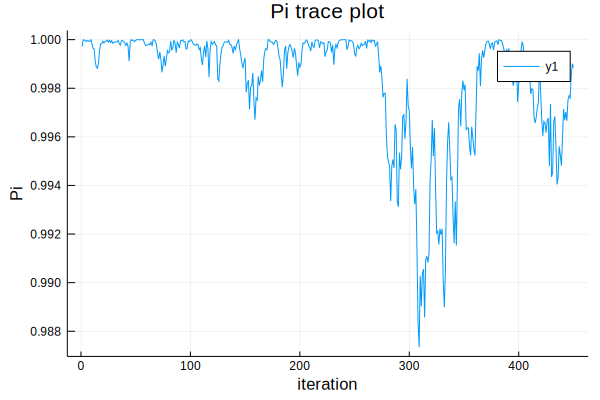

In [23]:
using Plots
x = Pi[!,1]; y = Pi[!,2]; # These are the plotting data
plot(x,y, title = "Pi trace plot",
        xlabel = "iteration", ylabel = "Pi")

In [24]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Died_Fin
,Int64,Float64
1,1,0.182519
2,2,0.0717171
3,3,0.098043
4,4,0.150258
5,5,0.220192
6,6,0.0583716
7,7,0.170229
8,8,0.115817
9,9,0.0612701


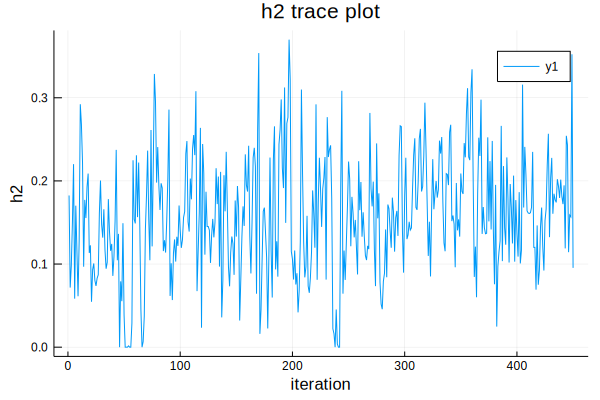

In [25]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [26]:
Died_Fin_model_equations = "Died_Fin = intercept + Batch + EntryAge + FinPenBatch"
Died_Fin_R=1.00000
Died_Fin_model=build_model(Died_Fin_model_equations,Died_Fin_R)
set_covariate(Died_Fin_model,"EntryAge")
Died_Fin_G1=0.110336
set_random(Died_Fin_model,"FinPenBatch",Died_Fin_G1)
Died_Fin_G3=0.296776E-01
@time add_genotypes(Died_Fin_model,M,Died_Fin_G3,header=false, rowID=rowID)

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
  7.788564 seconds (870.69 k allocations: 20.848 GiB, 10.66% gc time)


In [27]:
@time Died_Fin_outB=runMCMC(Died_Fin_model,phenotypes,methods="BayesB", missing_phenotypes=true, Pi=0.999,estimateScale=true, categorical_trait = true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.

The prior for marker effects variance is calculated from the genetic variance and π.
The mean of the prior for the marker effects variance is: 0.000178



A Linear Mixed Model was build using model equations:

Died_Fin = intercept + Batch + EntryAge + FinPenBatch

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               50
EntryAge        covariate    fixed                1
FinPenBatch     factor       random             243

MCMC Information:

methods                                      BayesB
                              complete genomic data
                   (i.e., non-single-step analysis)
chain_length                                  50000
burnin                                         5000
estimatePi                                    false
estimateScale    

running MCMC for BayesB...100%|█████████████████████████| Time: 11:40:18




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


42032.772733 seconds (113.04 G allocations: 2.362 TiB, 0.87% gc time)


Dict{Any,Any} with 8 entries:
  "marker effects"          => 435172×5 DataFrame…
  "heritability"            => 1×3 DataFrame…
  "location parameters"     => 295×5 DataFrame…
  "residual variance"       => 1×3 DataFrame…
  "ScaleEffectVar"          => 1×3 DataFrame…
  "genetic_variance"        => 1×3 DataFrame…
  "marker effects variance" => 1×3 DataFrame…
  "EBV_Died_Fin"            => 3205×3 DataFrame…

In [29]:
marker=CSV.read("MCMC_samples_genetic_variance.txt",delim = ' ',header=true)
Va=mean(marker[!, 1])

0.03645810093998688

In [30]:
pen=CSV.read("MCMC_samples_FinPenBatch_variances.txt",delim = ' ',header=true)
Vs=mean(pen[!, 1])

ArgumentError: ArgumentError: "MCMC_samples_NurPenBatch_variances.txt" is not a valid file

In [31]:
Res=CSV.read("MCMC_samples_residual_variance.txt",delim = ' ',header=true)
Ve=mean(Res[!, 1])

1.0

In [32]:
h2=Va/(Va+Ve)

0.03517566306532046

In [33]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Died_Fin
,Int64,Float64
1,1,0.0306184
2,2,0.0349313
3,3,0.0379146
4,4,0.0238296
5,5,0.0310479
6,6,0.0268233
7,7,0.0284781
8,8,0.0261602
9,9,0.0354547


In [ ]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [4]:
@time Died_Fin_outB,Died_Fin_winVarProps = GWAS("MCMC_samples_marker_effects_Died_Fin.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    M;header=true,window_size="0.25 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:43:21


BoundsError: BoundsError: attempt to access (9375×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 29     │ 1      │ 7000000   │ 7250000   │ 7002079   │ 7247588   │ 59     │ 0.00112265     │ 0.0051416   │ 1.95     │ 0.113333   │ 0.113333  │
│ 2    │ 1     │ 6071   │ 12     │ 4000000   │ 4250000   │ 4000815   │ 4249194   │ 77     │ 1.32495e-5     │ 9.17597e-5  │ 0.04     │ 0.0644444  │ 0.0888889 │
│ 3    │ 1     │ 1798   │ 3      │ 23500000  │ 23750000  │ 23502729  │ 23732630  │ 66     │ 1.16853e-5     │ 8.72034e-5  │ 0.04     │ 0.0577778  │ 0.0785185 │
│ 4    │ 1     │ 4985   │ 9      │ 20250000  │ 20500000  │ 20250743  │ 20497193  │ 76     │ 2.05069e-5     │ 0.000226995 │ 0.05     │ 0.0555556  │ 0.0727778 │
│ 5    │ 1     │ 5583   │ 10     │ 30500000  │ 30750000  │ 30501615  │ 30749867  │ 76     │ 1.38688e-5     │ 0.00013701  │ 0.04     │ 0.0555556  │ 0.0693333 │
│ 6    │ 1     │ 2254   │ 4      │ 4500000   │ 4750000   │ 4504355   │ 4749670   │ 83     │ 1.07988e-5     │ 6.35406e-5  │ 0.04     │ 0.0533333  │ 0.0666667 │
│ 7    │ 1     │ 3168   │ 5      │ 102000000 │ 102250000 │ 102003878 │ 102248859 │ 79     │ 1.50013e-5     │ 0.000102624 │ 0.04     │ 0.0533333  │ 0.0647619 │
│ 8    │ 1     │ 3245   │ 6      │ 16500000  │ 16750000  │ 16505469  │ 16740504  │ 72     │ 1.67737e-5     │ 0.000107703 │ 0.05     │ 0.0533333  │ 0.0633333 │
│ 9    │ 1     │ 6596   │ 13     │ 73500000  │ 73750000  │ 73503470  │ 73748133  │ 61     │ 2.95925e-5     │ 0.000303933 │ 0.08     │ 0.0533333  │ 0.0622222 │
│ 10   │ 1     │ 8192   │ 15     │ 123000000 │ 123250000 │ 123002910 │ 123247690 │ 63     │ 3.10358e-5     │ 0.000332472 │ 0.07     │ 0.0533333  │ 0.0613333 │
│ 11   │ 1     │ 2256   │ 4      │ 5000000   │ 5250000   │ 5000886   │ 5248938   │ 77     │ 1.11096e-5     │ 7.5231e-5   │ 0.03     │ 0.0511111  │ 0.060404  │
│ 12   │ 1     │ 2995   │ 5      │ 58750000  │ 59000000  │ 58751257  │ 58987988  │ 77     │ 8.43652e-6     │ 4.78971e-5  │ 0.02     │ 0.0511111  │ 0.0596296 │
│ 13   │ 1     │ 3636   │ 6      │ 114750000 │ 115000000 │ 114758831 │ 114995636 │ 57     │ 1.01448e-5     │ 6.07429e-5  │ 0.03     │ 0.0511111  │ 0.0589744 │
│ 14   │ 1     │ 3967   │ 7      │ 26750000  │ 27000000  │ 26750322  │ 26997638  │ 77     │ 9.37221e-6     │ 5.82707e-5  │ 0.03     │ 0.0511111  │ 0.0584127 │
│ 15   │ 1     │ 4892   │ 8      │ 136000000 │ 136250000 │ 136000761 │ 136249787 │ 74     │ 1.02944e-5     │ 6.33546e-5  │ 0.03     │ 0.0511111  │ 0.0579259 │
│ 16   │ 1     │ 5688   │ 10     │ 56750000  │ 57000000  │ 56751675  │ 56998136  │ 68     │ 9.41402e-6     │ 5.29098e-5  │ 0.03     │ 0.0511111  │ 0.0575    │
│ 17   │ 1     │ 6093   │ 12     │ 9500000   │ 9750000   │ 9500144   │ 9747883   │ 72     │ 2.00765e-5     │ 0.000193862 │ 0.05     │ 0.0511111  │ 0.0571242 │
│ 18   │ 1     │ 102    │ 1      │ 25250000  │ 25500000  │ 25251269  │ 25492538  │ 70     │ 1.04703e-5     │ 5.99291e-5  │ 0.03     │ 0.0488889  │ 0.0566667 │
│ 19   │ 1     │ 190    │ 1      │ 47250000  │ 47500000  │ 47252190  │ 47483846  │ 60     │ 1.75376e-5     │ 0.000189064 │ 0.04     │ 0.0488889  │ 0.0562573 │
│ 20   │ 1     │ 1816   │ 3      │ 28000000  │ 28250000  │ 28009836  │ 28241728  │ 71     │ 6.56243e-6     │ 3.53026e-5  │ 0.02     │ 0.0488889  │ 0.0558889 │
│ 21   │ 1     │ 1917   │ 3      │ 53250000  │ 53500000  │ 53251621  │ 53499299  │ 64     │ 1.12961e-5     │ 7.31156e-5  │ 0.04     │ 0.0488889  │ 0.0555556 │
│ 22   │ 1     │ 3691   │ 6      │ 128750000 │ 129000000 │ 128753534 │ 128998532 │ 78     │ 1.36445e-5     │ 0.000123959 │ 0.04     │ 0.0488889  │ 0.0552525 │
│ 23   │ 1     │ 4053   │ 7      │ 48250000  │ 48500000  │ 48253376  │ 48496620  │ 68     │ 1.96347e-5     │ 0.000165298 │ 0.06     │ 0.0488889  │ 0.0549758 │
│ 24   │ 1     │ 4992   │ 9      │ 22000000  │ 22250000  │ 22001833  │ 22248452  │ 77     │ 5.92037e-6     │ 3.07785e-5  │ 0.02     │ 0.0488889  │ 0.0547222 │
│ 25   │ 1     │ 6035   │ 11     │ 74250000  │ 74500000  │ 74251947  │ 74498042  │ 70     │ 4.77941e-5     │ 0.000498189 │ 0.11     │ 0.0488889  │ 0.0544889 │
│ 26   │ 1     │ 7038   │ 13     │ 184500000 │ 184750000 │ 184501816 │ 184748033 │ 58     │ 1.62196e-5     │ 0.000125928 │ 0.05     │ 0.0488889  │ 0.0542735 │
│ 27   │ 1     │ 234    │ 1      │ 58250000  │ 58500000  │ 58250201  │ 58490862  │ 68     │ 1.14839e-5     │ 8.05025e-5  │ 0.03     │ 0.0466667  │ 0.0539918 │
│ 28   │ 1     │ 1753   │ 3      │ 12250000  │ 12500000  │ 12253486  │ 12498338  │ 74     │ 6.88736e-6     │ 4.89308e-5  │ 0.02     │ 0.0466667  │ 0.0537302 │
│ 29   │ 1     │ 2273   │ 4      │ 9250000   │ 9500000   │ 9250836   │ 9497862   │ 75     │ 1.49655e-5     │ 0.000103742 │ 0.04     │ 0.0466667  │ 0.0534866 │
│ 30   │ 1     │ 2311   │ 4      │ 18750000  │ 19000000  │ 18751788  │ 18996573  │ 69     │ 6.83249e-6     │ 4.11843e-5  │ 0.02     │ 0.0466667  │ 0.0532593 │
│ 31   │ 1     │ 2682   │ 4      │ 111500000 │ 111750000 │ 111502138 │ 111748666 │ 62     │ 6.14625e-6     │ 3.50572e-5  │ 0.02     │ 0.0466667  │ 0.0530466 │
│ 32   │ 1     │ 2683   │ 4      │ 111750000 │ 112000000 │ 111750758 │ 111995964 │ 94     │ 8.40239e-6     │ 5.16305e-5  │ 0.02     │ 0.0466667  │ 0.0528472 │
│ 33   │ 1     │ 2753   │ 4      │ 129250000 │ 129500000 │ 129253797 │ 129496898 │ 58     │ 1.50149e-5     │ 0.000101067 │ 0.04     │ 0.0466667  │ 0.0526599 │
│ 34   │ 1     │ 3279   │ 6      │ 25000000  │ 25250000  │ 25001451  │ 25249390  │ 61     │ 6.29755e-6     │ 3.77565e-5  │ 0.02     │ 0.0466667  │ 0.0524837 │
│ 35   │ 1     │ 4295   │ 7      │ 108750000 │ 109000000 │ 108751068 │ 108996302 │ 60     │ 2.09431e-5     │ 0.000237512 │ 0.06     │ 0.0466667  │ 0.0523175 │
│ 36   │ 1     │ 4608   │ 8      │ 65000000  │ 65250000  │ 65002821  │ 65248163  │ 63     │ 8.11042e-6     │ 4.77099e-5  │ 0.02     │ 0.0466667  │ 0.0521605 │
│ 37   │ 1     │ 4998   │ 9      │ 23500000  │ 23750000  │ 23502264  │ 23748401  │ 67     │ 7.35274e-6     │ 5.10595e-5  │ 0.02     │ 0.0466667  │ 0.052012  │
│ 38   │ 1     │ 5159   │ 9      │ 64000000  │ 64250000  │ 64000934  │ 64247042  │ 77     │ 9.98753e-6     │ 6.10214e-5  │ 0.02     │ 0.0466667  │ 0.0518713 │
│ 39   │ 1     │ 5466   │ 10     │ 1250000   │ 1500000   │ 1251882   │ 1498720   │ 81     │ 8.33671e-6     │ 7.71744e-5  │ 0.02     │ 0.0466667  │ 0.0517379 │
│ 40   │ 1     │ 5637   │ 10     │ 44000000  │ 44250000  │ 44002230  │ 44248099  │ 67     │ 1.69961e-5     │ 0.000128312 │ 0.05     │ 0.0466667  │ 0.0516111 │
│ 41   │ 1     │ 5711   │ 10     │ 62500000  │ 62750000  │ 62500507  │ 62749536  │ 53     │ 6.0136e-6      │ 3.55105e-5  │ 0.02     │ 0.0466667  │ 0.0514905 │
│ 42   │ 1     │ 6110   │ 12     │ 13750000  │ 14000000  │ 13751410  │ 13982775  │ 63     │ 2.83549e-5     │ 0.000301882 │ 0.08     │ 0.0466667  │ 0.0513757 │
│ 43   │ 1     │ 6374   │ 13     │ 18000000  │ 18250000  │ 18006278  │ 18246240  │ 70     │ 2.35245e-5     │ 0.000380796 │ 0.05     │ 0.0466667  │ 0.0512661 │
│ 44   │ 1     │ 7165   │ 14     │ 7750000   │ 8000000   │ 7752760   │ 7998693   │ 79     │ 9.40424e-6     │ 4.80485e-5  │ 0.02     │ 0.0466667  │ 0.0511616 │
│ 45   │ 1     │ 7822   │ 15     │ 30250000  │ 30500000  │ 30254305  │ 30497718  │ 72     │ 8.93271e-6     │ 5.53117e-5  │ 0.02     │ 0.0466667  │ 0.0510617 │
│ 46   │ 1     │ 8728   │ 17     │ 36500000  │ 36750000  │ 36502725  │ 36749127  │ 79     │ 1.67012e-5     │ 0.000180006 │ 0.05     │ 0.0466667  │ 0.0509662 │
│ 47   │ 1     │ 8777   │ 17     │ 48750000  │ 49000000  │ 48751860  │ 48984494  │ 73     │ 8.74646e-6     │ 5.55209e-5  │ 0.02     │ 0.0466667  │ 0.0508747 │
│ 48   │ 1     │ 8806   │ 17     │ 56000000  │ 56250000  │ 56000454  │ 56247998  │ 62     │ 6.49817e-6     │ 3.59151e-5  │ 0.02     │ 0.0466667  │ 0.050787  │
│ 49   │ 1     │ 10     │ 1      │ 2250000   │ 2500000   │ 2251625   │ 2499085   │ 72     │ 1.07266e-5     │ 0.00011469  │ 0.03     │ 0.0444444  │ 0.0506576 │
│ 50   │ 1     │ 133    │ 1      │ 33000000  │ 33250000  │ 33002217  │ 33249640  │ 81     │ 5.09197e-6     │ 2.6227e-5   │ 0.02     │ 0.0444444  │ 0.0505333 │
│ 51   │ 1     │ 312    │ 1      │ 77750000  │ 78000000  │ 77750030  │ 77999996  │ 70     │ 5.29706e-6     │ 4.08731e-5  │ 0.02     │ 0.0444444  │ 0.0504139 │
│ 52   │ 1     │ 1439   │ 2      │ 85750000  │ 86000000  │ 85754717  │ 85999261  │ 62     │ 9.60614e-6     │ 6.09821e-5  │ 0.03     │ 0.0444444  │ 0.0502991 │
│ 53   │ 1     │ 1445   │ 2      │ 87250000  │ 87500000  │ 87250866  │ 87499318  │ 63     │ 8.94405e-6     │ 7.72118e-5  │ 0.02     │ 0.0444444  │ 0.0501887 │
│ 54   │ 1     │ 1609   │ 2      │ 128250000 │ 128500000 │ 128251673 │ 128496519 │ 80     │ 6.74737e-6     │ 3.55109e-5  │ 0.02     │ 0.0444444  │ 0.0500823 │
│ 55   │ 1     │ 1615   │ 2      │ 129750000 │ 130000000 │ 129751237 │ 129997872 │ 81     │ 5.28394e-6     │ 2.94251e-5  │ 0.01     │ 0.0444444  │ 0.0499798 │
│ 56   │ 1     │ 1689   │ 2      │ 148250000 │ 148500000 │ 148250609 │ 148499924 │ 67     │ 6.3414e-6      │ 4.44619e-5  │ 0.02     │ 0.0444444  │ 0.049881  │
│ 57   │ 1     │ 2044   │ 3      │ 85000000  │ 85250000  │ 85003412  │ 85246599  │ 60     │ 6.16044e-6     │ 4.31388e-5  │ 0.02     │ 0.0444444  │ 0.0497856 │
│ 58   │ 1     │ 2191   │ 3      │ 121750000 │ 122000000 │ 121750232 │ 121999120 │ 63     │ 5.58814e-6     │ 3.71756e-5  │ 0.02     │ 0.0444444  │ 0.0496935 │
│ 59   │ 1     │ 2283   │ 4      │ 11750000  │ 12000000  │ 11750927  │ 11998453  │ 73     │ 9.74022e-6     │ 6.89386e-5  │ 0.03     │ 0.0444444  │ 0.0496045 │
│ 60   │ 1     │ 2670   │ 4      │ 108500000 │ 108750000 │ 108501445 │ 108746592 │ 69     │ 1.2343e-5      │ 9.75252e-5  │ 0.04     │ 0.0444444  │ 0.0495185 │
│ 61   │ 1     │ 2751   │ 4      │ 128750000 │ 129000000 │ 128750655 │ 128996809 │ 75     │ 8.94327e-6     │ 6.0563e-5   │ 0.02     │ 0.0444444  │ 0.0494353 │
│ 62   │ 1     │ 3105   │ 5      │ 86250000  │ 86500000  │ 86261137  │ 86499379  │ 57     │ 2.39423e-5     │ 0.000317499 │ 0.06     │ 0.0444444  │ 0.0493548 │
│ 63   │ 1     │ 3167   │ 5      │ 101750000 │ 102000000 │ 101750667 │ 101995416 │ 73     │ 9.55055e-6     │ 5.91453e-5  │ 0.03     │ 0.0444444  │ 0.0492769 │
│ 64   │ 1     │ 3171   │ 5      │ 102750000 │ 103000000 │ 102754071 │ 102990446 │ 57     │ 2.70169e-5     │ 0.000225475 │ 0.07     │ 0.0444444  │ 0.0492014 │
│ 65   │ 1     │ 3265   │ 6      │ 21500000  │ 21750000  │ 21501866  │ 21746841  │ 72     │ 7.52494e-6     │ 4.44206e-5  │ 0.02     │ 0.0444444  │ 0.0491282 │
│ 66   │ 1     │ 3880   │ 7      │ 5000000   │ 5250000   │ 5000936   │ 5242217   │ 71     │ 8.669e-6       │ 7.17596e-5  │ 0.02     │ 0.0444444  │ 0.0490572 │
│ 67   │ 1     │ 3952   │ 7      │ 23000000  │ 23250000  │ 23001142  │ 23249903  │ 78     │ 1.45907e-5     │ 0.000131427 │ 0.04     │ 0.0444444  │ 0.0489884 │
│ 68   │ 1     │ 3954   │ 7      │ 23500000  │ 23750000  │ 23506483  │ 23744838  │ 62     │ 1.51027e-5     │ 0.000163366 │ 0.04     │ 0.0444444  │ 0.0489216 │
│ 69   │ 1     │ 4412   │ 8      │ 16000000  │ 16250000  │ 16009853  │ 16244015  │ 70     │ 4.94197e-6     │ 2.48165e-5  │ 0.01     │ 0.0444444  │ 0.0488567 │
│ 70   │ 1     │ 4413   │ 8      │ 16250000  │ 16500000  │ 16251908  │ 16499556  │ 82     │ 1.12082e-5     │ 8.49033e-5  │ 0.03     │ 0.0444444  │ 0.0487937 │
│ 71   │ 1     │ 4420   │ 8      │ 18000000  │ 18250000  │ 18002033  │ 18249462  │ 84     │ 7.04515e-6     │ 6.06072e-5  │ 0.02     │ 0.0444444  │ 0.0487324 │
│ 72   │ 1     │ 4695   │ 8      │ 86750000  │ 87000000  │ 86751805  │ 86999541  │ 76     │ 8.8772e-6      │ 4.78327e-5  │ 0.02     │ 0.0444444  │ 0.0486728 │
│ 73   │ 1     │ 4879   │ 8      │ 132750000 │ 133000000 │ 132752758 │ 132996052 │ 77     │ 8.53144e-6     │ 6.04156e-5  │ 0.02     │ 0.0444444  │ 0.0486149 │
│ 74   │ 1     │ 4887   │ 8      │ 134750000 │ 135000000 │ 134750037 │ 134996704 │ 81     │ 8.10044e-6     │ 4.41374e-5  │ 0.03     │ 0.0444444  │ 0.0485586 │
│ 75   │ 1     │ 4890   │ 8      │ 135500000 │ 135750000 │ 135502562 │ 135747658 │ 83     │ 8.49113e-6     │ 5.73415e-5  │ 0.03     │ 0.0444444  │ 0.0485037 │
│ 76   │ 1     │ 4913   │ 9      │ 2250000   │ 2500000   │ 2252059   │ 2498582   │ 79     │ 1.0792e-5      │ 0.000100532 │ 0.03     │ 0.0444444  │ 0.0484503 │
│ 77   │ 1     │ 4946   │ 9      │ 10500000  │ 10750000  │ 10501053  │ 10748686  │ 65     │ 7.90756e-6     │ 5.9192e-5   │ 0.02     │ 0.0444444  │ 0.0483983 │
│ 78   │ 1     │ 4966   │ 9      │ 15500000  │ 15750000  │ 15501739  │ 15743318  │ 72     │ 5.92728e-6     │ 3.25061e-5  │ 0.02     │ 0.0444444  │ 0.0483476 │
│ 79   │ 1     │ 5007   │ 9      │ 25750000  │ 26000000  │ 25750942  │ 25998536  │ 73     │ 5.66611e-6     │ 3.04963e-5  │ 0.02     │ 0.0444444  │ 0.0482982 │
│ 80   │ 1     │ 5147   │ 9      │ 60750000  │ 61000000  │ 60754978  │ 60999036  │ 61     │ 7.65726e-6     │ 4.2381e-5   │ 0.02     │ 0.0444444  │ 0.04825   │
│ 81   │ 1     │ 5266   │ 9      │ 90750000  │ 91000000  │ 90755392  │ 90998982  │ 71     │ 6.9803e-6      │ 5.40471e-5  │ 0.02     │ 0.0444444  │ 0.048203  │
│ 82   │ 1     │ 5415   │ 9      │ 128000000 │ 128250000 │ 128001989 │ 128248732 │ 59     │ 1.03282e-5     │ 0.000116728 │ 0.03     │ 0.0444444  │ 0.0481572 │
│ 83   │ 1     │ 5509   │ 10     │ 12000000  │ 12250000  │ 12001141  │ 12249957  │ 81     │ 1.55913e-5     │ 0.000105713 │ 0.05     │ 0.0444444  │ 0.0481124 │
│ 84   │ 1     │ 5635   │ 10     │ 43500000  │ 43750000  │ 43501152  │ 43748989  │ 80     │ 6.76689e-5     │ 0.00123473  │ 0.13     │ 0.0444444  │ 0.0480688 │
│ 85   │ 1     │ 5698   │ 10     │ 59250000  │ 59500000  │ 59253394  │ 59496065  │ 72     │ 1.23679e-5     │ 8.02597e-5  │ 0.03     │ 0.0444444  │ 0.0480261 │
│ 86   │ 1     │ 6088   │ 12     │ 8250000   │ 8500000   │ 8250421   │ 8499334   │ 76     │ 8.30623e-6     │ 6.06958e-5  │ 0.02     │ 0.0444444  │ 0.0479845 │
│ 87   │ 1     │ 6224   │ 12     │ 42250000  │ 42500000  │ 42255646  │ 42490544  │ 66     │ 6.7528e-6      │ 3.75324e-5  │ 0.02     │ 0.0444444  │ 0.0479438 │
│ 88   │ 1     │ 6413   │ 13     │ 27750000  │ 28000000  │ 27751397  │ 27990503  │ 58     │ 1.64473e-5     │ 0.000123678 │ 0.05     │ 0.0444444  │ 0.047904  │
│ 89   │ 1     │ 7183   │ 14     │ 12250000  │ 12500000  │ 12251254  │ 12499898  │ 52     │ 8.41968e-6     │ 5.29621e-5  │ 0.02     │ 0.0444444  │ 0.0478652 │
│ 90   │ 1     │ 7325   │ 14     │ 47750000  │ 48000000  │ 47750613  │ 47999414  │ 75     │ 9.82316e-6     │ 7.56232e-5  │ 0.03     │ 0.0444444  │ 0.0478272 │
│ 91   │ 1     │ 8282   │ 16     │ 5000000   │ 5250000   │ 5002482   │ 5248899   │ 74     │ 1.63927e-5     │ 0.000113186 │ 0.05     │ 0.0444444  │ 0.04779   │
│ 92   │ 1     │ 8697   │ 17     │ 28750000  │ 29000000  │ 28753482  │ 28996069  │ 74     │ 9.07932e-6     │ 6.45895e-5  │ 0.03     │ 0.0444444  │ 0.0477536 │
│ 93   │ 1     │ 31     │ 1      │ 7500000   │ 7750000   │ 7513299   │ 7749903   │ 66     │ 3.51165e-5     │ 0.000579794 │ 0.09     │ 0.0422222  │ 0.0476941 │
│ 94   │ 1     │ 108    │ 1      │ 26750000  │ 27000000  │ 26751288  │ 26994896  │ 64     │ 6.19792e-6     │ 3.91335e-5  │ 0.02     │ 0.0422222  │ 0.0476359 │
│ 95   │ 1     │ 286    │ 1      │ 71250000  │ 71500000  │ 71252208  │ 71496749  │ 61     │ 7.59292e-6     │ 4.81496e-5  │ 0.02     │ 0.0422222  │ 0.0475789 │
│ 96   │ 1     │ 303    │ 1      │ 75500000  │ 75750000  │ 75500259  │ 75732722  │ 59     │ 5.55535e-6     │ 3.10431e-5  │ 0.02     │ 0.0422222  │ 0.0475231 │
│ 97   │ 1     │ 359    │ 1      │ 89500000  │ 89750000  │ 89501355  │ 89743097  │ 53     │ 8.87187e-6     │ 8.61067e-5  │ 0.02     │ 0.0422222  │ 0.0474685 │
│ 98   │ 1     │ 958    │ 1      │ 239500000 │ 239750000 │ 239501260 │ 239747899 │ 57     │ 7.05786e-6     │ 4.13196e-5  │ 0.02     │ 0.0422222  │ 0.047415  │
│ 99   │ 1     │ 1077   │ 1      │ 269250000 │ 269500000 │ 269252461 │ 269491858 │ 58     │ 5.64537e-6     │ 3.60828e-5  │ 0.02     │ 0.0422222  │ 0.0473625 │
│ 100  │ 1     │ 1235   │ 2      │ 34500000  │ 34750000  │ 34501870  │ 34746456  │ 54     │ 8.65228e-6     │ 7.04239e-5  │ 0.02     │ 0.0422222  │ 0.0473111 │
│ 101  │ 1     │ 1269   │ 2      │ 43000000  │ 43250000  │ 43000868  │ 43249856  │ 64     │ 4.4225e-6      │ 2.26876e-5  │ 0.01     │ 0.0422222  │ 0.0472607 │
│ 102  │ 1     │ 1436   │ 2      │ 85000000  │ 85250000  │ 85000251  │ 85248821  │ 78     │ 7.51412e-6     │ 4.51213e-5  │ 0.02     │ 0.0422222  │ 0.0472113 │
│ 103  │ 1     │ 1610   │ 2      │ 128500000 │ 128750000 │ 128502492 │ 128748758 │ 64     │ 1.7669e-5      │ 0.000228628 │ 0.04     │ 0.0422222  │ 0.0471629 │
│ 104  │ 1     │ 1630   │ 2      │ 133500000 │ 133750000 │ 133500273 │ 133746047 │ 59     │ 8.52648e-6     │ 5.26613e-5  │ 0.02     │ 0.0422222  │ 0.0471154 │
│ 105  │ 1     │ 1652   │ 2      │ 139000000 │ 139250000 │ 139000185 │ 139249885 │ 85     │ 7.54699e-6     │ 5.03536e-5  │ 0.02     │ 0.0422222  │ 0.0470688 │
│ 106  │ 1     │ 2400   │ 4      │ 41000000  │ 41250000  │ 41003994  │ 41248672  │ 62     │ 6.21597e-6     │ 3.36207e-5  │ 0.02     │ 0.0422222  │ 0.0470231 │
│ 107  │ 1     │ 2593   │ 4      │ 89250000  │ 89500000  │ 89256443  │ 89479908  │ 64     │ 7.8028e-6      │ 4.75616e-5  │ 0.02     │ 0.0422222  │ 0.0469782 │
│ 108  │ 1     │ 2598   │ 4      │ 90500000  │ 90750000  │ 90503378  │ 90743743  │ 75     │ 8.12946e-6     │ 7.23353e-5  │ 0.02     │ 0.0422222  │ 0.0469342 │
│ 109  │ 1     │ 2743   │ 4      │ 126750000 │ 127000000 │ 126751259 │ 126996149 │ 96     │ 1.43238e-5     │ 9.0274e-5   │ 0.04     │ 0.0422222  │ 0.0468909 │
│ 110  │ 1     │ 2786   │ 5      │ 6500000   │ 6750000   │ 6502249   │ 6744333   │ 56     │ 1.16091e-5     │ 0.000138937 │ 0.03     │ 0.0422222  │ 0.0468485 │
│ 111  │ 1     │ 2828   │ 5      │ 17000000  │ 17250000  │ 17001893  │ 17245936  │ 74     │ 8.3507e-6      │ 7.63864e-5  │ 0.02     │ 0.0422222  │ 0.0468068 │
│ 112  │ 1     │ 3225   │ 6      │ 11500000  │ 11750000  │ 11502304  │ 11748308  │ 71     │ 2.57726e-5     │ 0.000257155 │ 0.08     │ 0.0422222  │ 0.0467659 │
│ 113  │ 1     │ 3256   │ 6      │ 19250000  │ 19500000  │ 19251446  │ 19496950  │ 75     │ 6.82719e-6     │ 5.4099e-5   │ 0.02     │ 0.0422222  │ 0.0467257 │
│ 114  │ 1     │ 3491   │ 6      │ 78500000  │ 78750000  │ 78503533  │ 78749934  │ 80     │ 2.13934e-5     │ 0.000156266 │ 0.06     │ 0.0422222  │ 0.0466862 │
│ 115  │ 1     │ 3522   │ 6      │ 86250000  │ 86500000  │ 86250115  │ 86499391  │ 76     │ 8.02682e-6     │ 5.46949e-5  │ 0.02     │ 0.0422222  │ 0.0466473 │
│ 116  │ 1     │ 3577   │ 6      │ 100000000 │ 100250000 │ 100004962 │ 100246844 │ 63     │ 7.74012e-6     │ 4.45043e-5  │ 0.02     │ 0.0422222  │ 0.0466092 │
│ 117  │ 1     │ 3706   │ 6      │ 132500000 │ 132750000 │ 132501900 │ 132725201 │ 63     │ 7.28612e-6     │ 5.40381e-5  │ 0.02     │ 0.0422222  │ 0.0465717 │
│ 118  │ 1     │ 3980   │ 7      │ 30000000  │ 30250000  │ 30000596  │ 30247666  │ 73     │ 1.77941e-5     │ 0.000204673 │ 0.04     │ 0.0422222  │ 0.0465348 │
│ 119  │ 1     │ 4043   │ 7      │ 45750000  │ 46000000  │ 45751655  │ 45993155  │ 76     │ 1.07819e-5     │ 0.000116471 │ 0.03     │ 0.0422222  │ 0.0464986 │
│ 120  │ 1     │ 4051   │ 7      │ 47750000  │ 48000000  │ 47750129  │ 47998980  │ 67     │ 5.10259e-6     │ 2.84816e-5  │ 0.01     │ 0.0422222  │ 0.046463  │
│ 121  │ 1     │ 4647   │ 8      │ 74750000  │ 75000000  │ 74750188  │ 74999275  │ 66     │ 1.41384e-5     │ 0.000147411 │ 0.04     │ 0.0422222  │ 0.0464279 │
│ 122  │ 1     │ 4886   │ 8      │ 134500000 │ 134750000 │ 134502772 │ 134746481 │ 61     │ 4.22481e-5     │ 0.000490619 │ 0.11     │ 0.0422222  │ 0.0463934 │
│ 123  │ 1     │ 4986   │ 9      │ 20500000  │ 20750000  │ 20500954  │ 20749714  │ 75     │ 9.1201e-6      │ 5.36944e-5  │ 0.03     │ 0.0422222  │ 0.0463595 │
│ 124  │ 1     │ 5001   │ 9      │ 24250000  │ 24500000  │ 24256400  │ 24498578  │ 72     │ 6.68729e-6     │ 3.84095e-5  │ 0.02     │ 0.0422222  │ 0.0463262 │
│ 125  │ 1     │ 5004   │ 9      │ 25000000  │ 25250000  │ 25000259  │ 25240888  │ 76     │ 1.71924e-5     │ 0.000133422 │ 0.05     │ 0.0422222  │ 0.0462933 │
│ 126  │ 1     │ 5005   │ 9      │ 25250000  │ 25500000  │ 25253728  │ 25499833  │ 81     │ 6.269e-6       │ 3.78372e-5  │ 0.02     │ 0.0422222  │ 0.046261  │
│ 127  │ 1     │ 5138   │ 9      │ 58500000  │ 58750000  │ 58505272  │ 58749147  │ 69     │ 1.4373e-5      │ 0.000176664 │ 0.03     │ 0.0422222  │ 0.0462292 │
│ 128  │ 1     │ 5172   │ 9      │ 67250000  │ 67500000  │ 67253137  │ 67498533  │ 68     │ 5.78999e-6     │ 3.35588e-5  │ 0.02     │ 0.0422222  │ 0.0461979 │
│ 129  │ 1     │ 5187   │ 9      │ 71000000  │ 71250000  │ 71001828  │ 71246222  │ 74     │ 9.05707e-6     │ 7.95011e-5  │ 0.03     │ 0.0422222  │ 0.0461671 │
│ 130  │ 1     │ 5402   │ 9      │ 124750000 │ 125000000 │ 124751476 │ 124991294 │ 59     │ 3.56622e-5     │ 0.000424851 │ 0.09     │ 0.0422222  │ 0.0461368 │
│ 131  │ 1     │ 5457   │ 9      │ 138500000 │ 138750000 │ 138501019 │ 138746611 │ 73     │ 8.32694e-6     │ 5.08585e-5  │ 0.02     │ 0.0422222  │ 0.0461069 │
│ 132  │ 1     │ 5468   │ 10     │ 1750000   │ 2000000   │ 1750223   │ 1998337   │ 76     │ 6.69295e-6     │ 3.89055e-5  │ 0.02     │ 0.0422222  │ 0.0460774 │
│ 133  │ 1     │ 5750   │ 11     │ 2750000   │ 3000000   │ 2750331   │ 2995603   │ 56     │ 1.66976e-5     │ 0.000176736 │ 0.04     │ 0.0422222  │ 0.0460485 │
│ 134  │ 1     │ 5753   │ 11     │ 3500000   │ 3750000   │ 3505982   │ 3749894   │ 62     │ 6.7233e-6      │ 3.94417e-5  │ 0.02     │ 0.0422222  │ 0.0460199 │
│ 135  │ 1     │ 6141   │ 12     │ 21500000  │ 21750000  │ 21501207  │ 21749390  │ 57     │ 6.24558e-6     │ 3.84512e-5  │ 0.02     │ 0.0422222  │ 0.0459918 │
│ 136  │ 1     │ 6152   │ 12     │ 24250000  │ 24500000  │ 24250712  │ 24498667  │ 56     │ 1.76117e-5     │ 0.00016199  │ 0.05     │ 0.0422222  │ 0.0459641 │
│ 137  │ 1     │ 6371   │ 13     │ 17250000  │ 17500000  │ 17253892  │ 17498699  │ 67     │ 7.0354e-6      │ 4.51562e-5  │ 0.02     │ 0.0422222  │ 0.0459367 │
│ 138  │ 1     │ 6382   │ 13     │ 20000000  │ 20250000  │ 20001244  │ 20246312  │ 68     │ 6.1305e-6      │ 3.80065e-5  │ 0.02     │ 0.0422222  │ 0.0459098 │
│ 139  │ 1     │ 6416   │ 13     │ 28500000  │ 28750000  │ 28501171  │ 28748649  │ 75     │ 2.42222e-5     │ 0.000222433 │ 0.06     │ 0.0422222  │ 0.0458833 │
│ 140  │ 1     │ 7106   │ 13     │ 201500000 │ 201750000 │ 201501949 │ 201744649 │ 66     │ 5.93939e-6     │ 4.73879e-5  │ 0.02     │ 0.0422222  │ 0.0458571 │
│ 141  │ 1     │ 7240   │ 14     │ 26500000  │ 26750000  │ 26500183  │ 26746671  │ 74     │ 1.56683e-5     │ 0.000119746 │ 0.05     │ 0.0422222  │ 0.0458314 │
│ 142  │ 1     │ 7299   │ 14     │ 41250000  │ 41500000  │ 41252195  │ 41497643  │ 66     │ 1.40804e-5     │ 0.000120429 │ 0.04     │ 0.0422222  │ 0.0458059 │
│ 143  │ 1     │ 7332   │ 14     │ 49500000  │ 49750000  │ 49501046  │ 49746602  │ 73     │ 1.49578e-5     │ 0.000143573 │ 0.04     │ 0.0422222  │ 0.0457809 │
│ 144  │ 1     │ 7422   │ 14     │ 72000000  │ 72250000  │ 72002695  │ 72248888  │ 65     │ 3.9984e-6      │ 2.41452e-5  │ 0.01     │ 0.0422222  │ 0.0457562 │
│ 145  │ 1     │ 7482   │ 14     │ 87000000  │ 87250000  │ 87001402  │ 87245349  │ 71     │ 6.813e-6       │ 4.32119e-5  │ 0.02     │ 0.0422222  │ 0.0457318 │
│ 146  │ 1     │ 8568   │ 16     │ 76500000  │ 76750000  │ 76502479  │ 76746821  │ 55     │ 6.54186e-6     │ 3.76202e-5  │ 0.02     │ 0.0422222  │ 0.0457078 │
│ 147  │ 1     │ 9011   │ 18     │ 44000000  │ 44250000  │ 44003130  │ 44248426  │ 75     │ 2.71054e-5     │ 0.000409888 │ 0.07     │ 0.0422222  │ 0.0456841 │
│ 148  │ 1     │ 93     │ 1      │ 23000000  │ 23250000  │ 23002334  │ 23245557  │ 50     │ 2.08529e-5     │ 0.000231509 │ 0.05     │ 0.04       │ 0.0456456 │
│ 149  │ 1     │ 131    │ 1      │ 32500000  │ 32750000  │ 32511332  │ 32749073  │ 69     │ 5.57964e-6     │ 3.24177e-5  │ 0.02     │ 0.04       │ 0.0456078 │
│ 150  │ 1     │ 258    │ 1      │ 64250000  │ 64500000  │ 64256818  │ 64498418  │ 53     │ 1.22995e-5     │ 8.4435e-5   │ 0.04     │ 0.04       │ 0.0455704 │
│ 151  │ 1     │ 639    │ 1      │ 159750000 │ 160000000 │ 159750850 │ 159997351 │ 65     │ 1.32526e-5     │ 9.99718e-5  │ 0.04     │ 0.04       │ 0.0455335 │
│ 152  │ 1     │ 944    │ 1      │ 236000000 │ 236250000 │ 236001433 │ 236243213 │ 58     │ 1.14587e-5     │ 9.2097e-5   │ 0.03     │ 0.04       │ 0.0454971 │
│ 153  │ 1     │ 1008   │ 1      │ 252000000 │ 252250000 │ 252008666 │ 252249604 │ 66     │ 7.47783e-6     │ 5.66273e-5  │ 0.02     │ 0.04       │ 0.0454611 │
│ 154  │ 1     │ 1139   │ 2      │ 10500000  │ 10750000  │ 10500109  │ 10748705  │ 64     │ 7.44042e-6     │ 4.8823e-5   │ 0.02     │ 0.04       │ 0.0454257 │
│ 155  │ 1     │ 1199   │ 2      │ 25500000  │ 25750000  │ 25502288  │ 25749441  │ 77     │ 6.31414e-6     │ 3.80667e-5  │ 0.02     │ 0.04       │ 0.0453907 │
│ 156  │ 1     │ 1265   │ 2      │ 42000000  │ 42250000  │ 42000823  │ 42242850  │ 64     │ 4.09305e-6     │ 2.52072e-5  │ 0.01     │ 0.04       │ 0.0453561 │
│ 157  │ 1     │ 1639   │ 2      │ 135750000 │ 136000000 │ 135750287 │ 135998841 │ 58     │ 1.11941e-5     │ 9.8883e-5   │ 0.03     │ 0.04       │ 0.045322  │
│ 158  │ 1     │ 1680   │ 2      │ 146000000 │ 146250000 │ 146001237 │ 146245448 │ 65     │ 1.07493e-5     │ 7.68973e-5  │ 0.03     │ 0.04       │ 0.0452883 │
│ 159  │ 1     │ 1806   │ 3      │ 25500000  │ 25750000  │ 25503690  │ 25747038  │ 74     │ 7.70895e-6     │ 5.20417e-5  │ 0.02     │ 0.04       │ 0.0452551 │
│ 160  │ 1     │ 1847   │ 3      │ 35750000  │ 36000000  │ 35753681  │ 35999759  │ 55     │ 4.18856e-6     │ 2.065e-5    │ 0.01     │ 0.04       │ 0.0452222 │
│ 161  │ 1     │ 1899   │ 3      │ 48750000  │ 49000000  │ 48750692  │ 48996757  │ 64     │ 6.4907e-6      │ 4.31812e-5  │ 0.02     │ 0.04       │ 0.0451898 │
│ 162  │ 1     │ 1947   │ 3      │ 60750000  │ 61000000  │ 60751644  │ 60995755  │ 55     │ 3.80179e-6     │ 2.24615e-5  │ 0.01     │ 0.04       │ 0.0451578 │
│ 163  │ 1     │ 2067   │ 3      │ 90750000  │ 91000000  │ 90751282  │ 90990801  │ 60     │ 9.63873e-6     │ 8.2787e-5   │ 0.03     │ 0.04       │ 0.0451261 │
│ 164  │ 1     │ 2089   │ 3      │ 96250000  │ 96500000  │ 96250051  │ 96494692  │ 57     │ 8.64575e-6     │ 6.13679e-5  │ 0.03     │ 0.04       │ 0.0450949 │
│ 165  │ 1     │ 2298   │ 4      │ 15500000  │ 15750000  │ 15501051  │ 15745338  │ 73     │ 5.94139e-6     │ 3.83991e-5  │ 0.02     │ 0.04       │ 0.045064  │
│ 166  │ 1     │ 2549   │ 4      │ 78250000  │ 78500000  │ 78251550  │ 78499093  │ 74     │ 4.25053e-6     │ 2.1662e-5   │ 0.01     │ 0.04       │ 0.0450335 │
│ 167  │ 1     │ 2718   │ 4      │ 120500000 │ 120750000 │ 120500134 │ 120747189 │ 66     │ 1.06756e-5     │ 0.000112778 │ 0.03     │ 0.04       │ 0.0450033 │
│ 168  │ 1     │ 2730   │ 4      │ 123500000 │ 123750000 │ 123502012 │ 123747918 │ 74     │ 7.91319e-6     │ 5.45393e-5  │ 0.02     │ 0.04       │ 0.0449735 │
│ 169  │ 1     │ 2834   │ 5      │ 18500000  │ 18750000  │ 18500528  │ 18748120  │ 71     │ 6.10865e-6     │ 4.96845e-5  │ 0.02     │ 0.04       │ 0.0449441 │
│ 170  │ 1     │ 3190   │ 6      │ 2750000   │ 3000000   │ 2750136   │ 2999538   │ 83     │ 1.78915e-5     │ 0.000216415 │ 0.05     │ 0.04       │ 0.044915  │
│ 171  │ 1     │ 3196   │ 6      │ 4250000   │ 4500000   │ 4252968   │ 4499494   │ 58     │ 7.20639e-6     │ 5.55689e-5  │ 0.02     │ 0.04       │ 0.0448863 │
│ 172  │ 1     │ 3199   │ 6      │ 5000000   │ 5250000   │ 5006887   │ 5245916   │ 75     │ 9.22623e-6     │ 7.0884e-5   │ 0.03     │ 0.04       │ 0.0448579 │
│ 173  │ 1     │ 3350   │ 6      │ 42750000  │ 43000000  │ 42752727  │ 42998265  │ 71     │ 7.54016e-6     │ 4.96653e-5  │ 0.02     │ 0.04       │ 0.0448298 │
│ 174  │ 1     │ 3421   │ 6      │ 60500000  │ 60750000  │ 60528390  │ 60748109  │ 60     │ 7.33128e-6     │ 5.401e-5    │ 0.02     │ 0.04       │ 0.044802  │
│ 175  │ 1     │ 3654   │ 6      │ 119250000 │ 119500000 │ 119250995 │ 119497214 │ 57     │ 3.69867e-6     │ 2.13569e-5  │ 0.01     │ 0.04       │ 0.0447746 │
│ 176  │ 1     │ 3769   │ 6      │ 148250000 │ 148500000 │ 148250668 │ 148497252 │ 72     │ 9.75089e-6     │ 6.11555e-5  │ 0.03     │ 0.04       │ 0.0447475 │
│ 177  │ 1     │ 3940   │ 7      │ 20000000  │ 20250000  │ 20001975  │ 20249027  │ 78     │ 8.89077e-6     │ 8.14489e-5  │ 0.02     │ 0.04       │ 0.0447207 │
│ 178  │ 1     │ 3961   │ 7      │ 25250000  │ 25500000  │ 25252532  │ 25498095  │ 71     │ 6.50815e-6     │ 3.96774e-5  │ 0.02     │ 0.04       │ 0.0446941 │
│ 179  │ 1     │ 3988   │ 7      │ 32000000  │ 32250000  │ 32001514  │ 32248315  │ 67     │ 1.42507e-5     │ 0.000106841 │ 0.04     │ 0.04       │ 0.0446679 │
│ 180  │ 1     │ 4050   │ 7      │ 47500000  │ 47750000  │ 47519505  │ 47746112  │ 65     │ 6.23093e-6     │ 3.71129e-5  │ 0.02     │ 0.04       │ 0.044642  │
│ 181  │ 1     │ 4407   │ 8      │ 14750000  │ 15000000  │ 14754349  │ 14996010  │ 62     │ 4.17708e-6     │ 2.08897e-5  │ 0.01     │ 0.04       │ 0.0446163 │
│ 182  │ 1     │ 4465   │ 8      │ 29250000  │ 29500000  │ 29251553  │ 29495959  │ 63     │ 9.40849e-6     │ 6.08326e-5  │ 0.03     │ 0.04       │ 0.044591  │
│ 183  │ 1     │ 4933   │ 9      │ 7250000   │ 7500000   │ 7253981   │ 7497812   │ 63     │ 4.80812e-6     │ 2.78354e-5  │ 0.01     │ 0.04       │ 0.0445659 │
│ 184  │ 1     │ 4956   │ 9      │ 13000000  │ 13250000  │ 13001616  │ 13248889  │ 77     │ 6.30076e-6     │ 4.50372e-5  │ 0.02     │ 0.04       │ 0.0445411 │
│ 185  │ 1     │ 5102   │ 9      │ 49500000  │ 49750000  │ 49501723  │ 49747728  │ 58     │ 1.30603e-5     │ 0.00012202  │ 0.04     │ 0.04       │ 0.0445165 │
│ 186  │ 1     │ 5418   │ 9      │ 128750000 │ 129000000 │ 128753282 │ 128999372 │ 62     │ 8.33408e-6     │ 6.92632e-5  │ 0.02     │ 0.04       │ 0.0444922 │
│ 187  │ 1     │ 5510   │ 10     │ 12250000  │ 12500000  │ 12252387  │ 12498356  │ 74     │ 6.82573e-6     │ 3.8317e-5   │ 0.02     │ 0.04       │ 0.0444682 │
│ 188  │ 1     │ 5524   │ 10     │ 15750000  │ 16000000  │ 15756197  │ 15999931  │ 67     │ 9.03517e-6     │ 6.70509e-5  │ 0.02     │ 0.04       │ 0.0444444 │
│ 189  │ 1     │ 5526   │ 10     │ 16250000  │ 16500000  │ 16278197  │ 16497027  │ 57     │ 5.23421e-6     │ 2.85891e-5  │ 0.02     │ 0.04       │ 0.0444209 │
│ 190  │ 1     │ 5528   │ 10     │ 16750000  │ 17000000  │ 16754035  │ 16998009  │ 65     │ 1.70588e-5     │ 0.000221681 │ 0.04     │ 0.04       │ 0.0443977 │
│ 191  │ 1     │ 5675   │ 10     │ 53500000  │ 53750000  │ 53505963  │ 53748673  │ 76     │ 6.20007e-6     │ 3.21655e-5  │ 0.02     │ 0.04       │ 0.0443746 │
│ 192  │ 1     │ 5677   │ 10     │ 54000000  │ 54250000  │ 54003286  │ 54248892  │ 75     │ 7.29486e-6     │ 4.8834e-5   │ 0.02     │ 0.04       │ 0.0443519 │
│ 193  │ 1     │ 5704   │ 10     │ 60750000  │ 61000000  │ 60750674  │ 60999298  │ 86     │ 1.04906e-5     │ 9.13486e-5  │ 0.03     │ 0.04       │ 0.0443293 │
│ 194  │ 1     │ 5713   │ 10     │ 63000000  │ 63250000  │ 63000776  │ 63244529  │ 69     │ 8.54404e-6     │ 5.43756e-5  │ 0.02     │ 0.04       │ 0.044307  │
│ 195  │ 1     │ 5788   │ 11     │ 12250000  │ 12500000  │ 12250262  │ 12498151  │ 67     │ 9.58913e-6     │ 5.90537e-5  │ 0.03     │ 0.04       │ 0.0442849 │
│ 196  │ 1     │ 6036   │ 11     │ 74500000  │ 74750000  │ 74502145  │ 74748566  │ 61     │ 7.03633e-6     │ 4.67084e-5  │ 0.02     │ 0.04       │ 0.044263  │
│ 197  │ 1     │ 6068   │ 12     │ 3250000   │ 3500000   │ 3250027   │ 3499965   │ 72     │ 6.14824e-6     │ 3.56803e-5  │ 0.02     │ 0.04       │ 0.0442414 │
│ 198  │ 1     │ 6114   │ 12     │ 14750000  │ 15000000  │ 14754977  │ 14999460  │ 73     │ 5.57534e-6     │ 3.23293e-5  │ 0.02     │ 0.04       │ 0.04422   │
│ 199  │ 1     │ 6128   │ 12     │ 18250000  │ 18500000  │ 18251462  │ 18497891  │ 72     │ 8.92623e-6     │ 7.11976e-5  │ 0.03     │ 0.04       │ 0.0441988 │
│ 200  │ 1     │ 6162   │ 12     │ 26750000  │ 27000000  │ 26768739  │ 26998030  │ 64     │ 5.23088e-6     │ 2.87739e-5  │ 0.02     │ 0.04       │ 0.0441778 │
│ 201  │ 1     │ 6216   │ 12     │ 40250000  │ 40500000  │ 40256635  │ 40494800  │ 74     │ 9.08857e-6     │ 6.24713e-5  │ 0.03     │ 0.04       │ 0.044157  │
│ 202  │ 1     │ 6232   │ 12     │ 44250000  │ 44500000  │ 44252251  │ 44486214  │ 67     │ 1.37804e-5     │ 0.000125096 │ 0.04     │ 0.04       │ 0.0441364 │
│ 203  │ 1     │ 6259   │ 12     │ 51000000  │ 51250000  │ 51002627  │ 51248940  │ 63     │ 8.96808e-6     │ 5.53319e-5  │ 0.03     │ 0.04       │ 0.044116  │
│ 204  │ 1     │ 6280   │ 12     │ 56250000  │ 56500000  │ 56251654  │ 56496674  │ 70     │ 3.8212e-6      │ 2.07215e-5  │ 0.01     │ 0.04       │ 0.0440959 │
│ 205  │ 1     │ 6291   │ 12     │ 59000000  │ 59250000  │ 59000386  │ 59245367  │ 74     │ 9.36643e-6     │ 6.09815e-5  │ 0.03     │ 0.04       │ 0.0440759 │
│ 206  │ 1     │ 6407   │ 13     │ 26250000  │ 26500000  │ 26254347  │ 26498394  │ 68     │ 7.25894e-6     │ 6.64147e-5  │ 0.02     │ 0.04       │ 0.0440561 │
│ 207  │ 1     │ 6408   │ 13     │ 26500000  │ 26750000  │ 26501515  │ 26749307  │ 59     │ 6.50368e-6     │ 3.72189e-5  │ 0.02     │ 0.04       │ 0.0440365 │
│ 208  │ 1     │ 6550   │ 13     │ 62000000  │ 62250000  │ 62000186  │ 62242318  │ 59     │ 9.72077e-6     │ 6.80483e-5  │ 0.03     │ 0.04       │ 0.0440171 │
│ 209  │ 1     │ 7068   │ 13     │ 192000000 │ 192250000 │ 192003047 │ 192248745 │ 64     │ 1.00275e-5     │ 6.22207e-5  │ 0.03     │ 0.04       │ 0.0439979 │
│ 210  │ 1     │ 7217   │ 14     │ 20750000  │ 21000000  │ 20750036  │ 20994152  │ 75     │ 8.6023e-6      │ 5.24894e-5  │ 0.02     │ 0.04       │ 0.0439788 │
│ 211  │ 1     │ 7476   │ 14     │ 85500000  │ 85750000  │ 85502968  │ 85749763  │ 66     │ 6.16914e-6     │ 3.79365e-5  │ 0.02     │ 0.04       │ 0.04396   │
│ 212  │ 1     │ 7500   │ 14     │ 91500000  │ 91750000  │ 91502527  │ 91749683  │ 76     │ 6.08483e-6     │ 4.72162e-5  │ 0.02     │ 0.04       │ 0.0439413 │
│ 213  │ 1     │ 7569   │ 14     │ 108750000 │ 109000000 │ 108751510 │ 108998978 │ 62     │ 5.46805e-6     │ 3.24961e-5  │ 0.02     │ 0.04       │ 0.0439228 │
│ 214  │ 1     │ 8183   │ 15     │ 120750000 │ 121000000 │ 120754489 │ 120990883 │ 46     │ 6.72947e-6     │ 4.19927e-5  │ 0.02     │ 0.04       │ 0.0439045 │
│ 215  │ 1     │ 8188   │ 15     │ 122000000 │ 122250000 │ 122000140 │ 122247049 │ 81     │ 6.8923e-6      │ 3.72258e-5  │ 0.02     │ 0.04       │ 0.0438863 │
│ 216  │ 1     │ 8189   │ 15     │ 122250000 │ 122500000 │ 122251669 │ 122499802 │ 69     │ 1.19336e-5     │ 8.7681e-5   │ 0.03     │ 0.04       │ 0.0438683 │
│ 217  │ 1     │ 8222   │ 15     │ 130500000 │ 130750000 │ 130505382 │ 130744665 │ 49     │ 7.87894e-6     │ 6.57606e-5  │ 0.02     │ 0.04       │ 0.0438505 │
│ 218  │ 1     │ 8245   │ 15     │ 136250000 │ 136500000 │ 136256565 │ 136495562 │ 63     │ 1.1087e-5      │ 7.73656e-5  │ 0.04     │ 0.04       │ 0.0438328 │
│ 219  │ 1     │ 8346   │ 16     │ 21000000  │ 21250000  │ 21001291  │ 21249792  │ 69     │ 6.07286e-6     │ 3.40549e-5  │ 0.02     │ 0.04       │ 0.0438153 │
│ 220  │ 1     │ 8367   │ 16     │ 26250000  │ 26500000  │ 26252954  │ 26499408  │ 69     │ 8.30794e-6     │ 7.97901e-5  │ 0.03     │ 0.04       │ 0.043798  │
│ 221  │ 1     │ 36     │ 1      │ 8750000   │ 9000000   │ 8755990   │ 8996136   │ 72     │ 7.70424e-6     │ 5.7751e-5   │ 0.02     │ 0.0377778  │ 0.0437707 │
│ 222  │ 1     │ 89     │ 1      │ 22000000  │ 22250000  │ 22002506  │ 22248281  │ 67     │ 4.83444e-6     │ 3.06232e-5  │ 0.01     │ 0.0377778  │ 0.0437437 │
│ 223  │ 1     │ 97     │ 1      │ 24000000  │ 24250000  │ 24001335  │ 24248166  │ 52     │ 9.85178e-6     │ 9.77271e-5  │ 0.03     │ 0.0377778  │ 0.043717  │
│ 224  │ 1     │ 125    │ 1      │ 31000000  │ 31250000  │ 31001089  │ 31249652  │ 66     │ 6.70494e-6     │ 4.48684e-5  │ 0.02     │ 0.0377778  │ 0.0436905 │
│ 225  │ 1     │ 159    │ 1      │ 39500000  │ 39750000  │ 39503218  │ 39748890  │ 57     │ 6.22202e-6     │ 5.49772e-5  │ 0.02     │ 0.0377778  │ 0.0436642 │
│ 226  │ 1     │ 160    │ 1      │ 39750000  │ 40000000  │ 39750594  │ 39991606  │ 73     │ 8.88292e-6     │ 6.5138e-5   │ 0.03     │ 0.0377778  │ 0.0436382 │
│ 227  │ 1     │ 323    │ 1      │ 80500000  │ 80750000  │ 80500582  │ 80745995  │ 68     │ 4.6917e-6      │ 2.65651e-5  │ 0.01     │ 0.0377778  │ 0.0436123 │
│ 228  │ 1     │ 408    │ 1      │ 102000000 │ 102250000 │ 102000871 │ 102248253 │ 49     │ 5.26568e-6     │ 3.05288e-5  │ 0.01     │ 0.0377778  │ 0.0435867 │
│ 229  │ 1     │ 471    │ 1      │ 117750000 │ 118000000 │ 117755679 │ 117988311 │ 62     │ 5.78946e-6     │ 3.64415e-5  │ 0.02     │ 0.0377778  │ 0.0435614 │
│ 230  │ 1     │ 969    │ 1      │ 242250000 │ 242500000 │ 242250736 │ 242492885 │ 57     │ 4.92153e-6     │ 3.70688e-5  │ 0.01     │ 0.0377778  │ 0.0435362 │
│ 231  │ 1     │ 1015   │ 1      │ 253750000 │ 254000000 │ 253751102 │ 253992920 │ 64     │ 8.42985e-6     │ 6.30081e-5  │ 0.03     │ 0.0377778  │ 0.0435113 │
│ 232  │ 1     │ 1133   │ 2      │ 9000000   │ 9250000   │ 9003683   │ 9244693   │ 67     │ 8.30254e-6     │ 6.35582e-5  │ 0.02     │ 0.0377778  │ 0.0434866 │
│ 233  │ 1     │ 1137   │ 2      │ 10000000  │ 10250000  │ 10002414  │ 10247647  │ 66     │ 9.13204e-6     │ 6.58549e-5  │ 0.03     │ 0.0377778  │ 0.0434621 │
│ 234  │ 1     │ 1282   │ 2      │ 46250000  │ 46500000  │ 46251882  │ 46498277  │ 67     │ 9.80174e-6     │ 0.000108181 │ 0.02     │ 0.0377778  │ 0.0434378 │
│ 235  │ 1     │ 1438   │ 2      │ 85500000  │ 85750000  │ 85501760  │ 85745867  │ 73     │ 6.87514e-6     │ 4.78084e-5  │ 0.02     │ 0.0377778  │ 0.0434137 │
│ 236  │ 1     │ 1504   │ 2      │ 102000000 │ 102250000 │ 102000568 │ 102247512 │ 69     │ 9.40312e-6     │ 6.32085e-5  │ 0.03     │ 0.0377778  │ 0.0433898 │
│ 237  │ 1     │ 1521   │ 2      │ 106250000 │ 106500000 │ 106250165 │ 106496109 │ 57     │ 8.40293e-6     │ 7.52527e-5  │ 0.03     │ 0.0377778  │ 0.0433662 │
│ 238  │ 1     │ 1561   │ 2      │ 116250000 │ 116500000 │ 116254232 │ 116497891 │ 78     │ 1.8538e-5      │ 0.000204005 │ 0.05     │ 0.0377778  │ 0.0433427 │
│ 239  │ 1     │ 1572   │ 2      │ 119000000 │ 119250000 │ 119002930 │ 119248190 │ 57     │ 9.78996e-6     │ 8.72203e-5  │ 0.03     │ 0.0377778  │ 0.0433194 │
│ 240  │ 1     │ 1578   │ 2      │ 120500000 │ 120750000 │ 120504561 │ 120749854 │ 77     │ 8.58267e-6     │ 5.60073e-5  │ 0.03     │ 0.0377778  │ 0.0432963 │
│ 241  │ 1     │ 1614   │ 2      │ 129500000 │ 129750000 │ 129502782 │ 129748881 │ 62     │ 4.21508e-6     │ 2.53164e-5  │ 0.01     │ 0.0377778  │ 0.0432734 │
│ 242  │ 1     │ 1695   │ 2      │ 149750000 │ 150000000 │ 149760014 │ 149998604 │ 67     │ 4.74777e-6     │ 2.9423e-5   │ 0.01     │ 0.0377778  │ 0.0432507 │
│ 243  │ 1     │ 1750   │ 3      │ 11500000  │ 11750000  │ 11500741  │ 11747968  │ 58     │ 5.34844e-5     │ 0.000872809 │ 0.12     │ 0.0377778  │ 0.0432282 │
│ 244  │ 1     │ 1805   │ 3      │ 25250000  │ 25500000  │ 25253140  │ 25495186  │ 68     │ 4.24264e-6     │ 2.40159e-5  │ 0.01     │ 0.0377778  │ 0.0432058 │
│ 245  │ 1     │ 1832   │ 3      │ 32000000  │ 32250000  │ 32003405  │ 32246445  │ 61     │ 6.4512e-6      │ 4.58636e-5  │ 0.02     │ 0.0377778  │ 0.0431837 │
│ 246  │ 1     │ 1939   │ 3      │ 58750000  │ 59000000  │ 58750776  │ 58995587  │ 68     │ 5.49865e-6     │ 3.73089e-5  │ 0.02     │ 0.0377778  │ 0.0431617 │
│ 247  │ 1     │ 1958   │ 3      │ 63500000  │ 63750000  │ 63505435  │ 63748466  │ 74     │ 6.87679e-6     │ 3.72174e-5  │ 0.02     │ 0.0377778  │ 0.0431399 │
│ 248  │ 1     │ 1986   │ 3      │ 70500000  │ 70750000  │ 70506164  │ 70747944  │ 56     │ 9.94208e-6     │ 6.63214e-5  │ 0.03     │ 0.0377778  │ 0.0431183 │
│ 249  │ 1     │ 2012   │ 3      │ 77000000  │ 77250000  │ 77003078  │ 77247525  │ 41     │ 9.77595e-6     │ 0.000116787 │ 0.04     │ 0.0377778  │ 0.0430968 │
│ 250  │ 1     │ 2130   │ 3      │ 106500000 │ 106750000 │ 106509844 │ 106747696 │ 67     │ 9.94386e-6     │ 0.000112968 │ 0.03     │ 0.0377778  │ 0.0430756 │
│ 251  │ 1     │ 2264   │ 4      │ 7000000   │ 7250000   │ 7000962   │ 7246865   │ 60     │ 6.52823e-6     │ 4.67772e-5  │ 0.02     │ 0.0377778  │ 0.0430544 │
│ 252  │ 1     │ 2301   │ 4      │ 16250000  │ 16500000  │ 16251150  │ 16497154  │ 74     │ 4.67473e-6     │ 2.56309e-5  │ 0.01     │ 0.0377778  │ 0.0430335 │
│ 253  │ 1     │ 2524   │ 4      │ 72000000  │ 72250000  │ 72003837  │ 72247472  │ 61     │ 5.12543e-6     │ 3.51578e-5  │ 0.01     │ 0.0377778  │ 0.0430127 │
│ 254  │ 1     │ 2736   │ 4      │ 125000000 │ 125250000 │ 125001553 │ 125244314 │ 70     │ 3.20274e-6     │ 1.66707e-5  │ 0.01     │ 0.0377778  │ 0.0429921 │
│ 255  │ 1     │ 2755   │ 4      │ 129750000 │ 130000000 │ 129750925 │ 129997909 │ 75     │ 4.66882e-6     │ 2.55817e-5  │ 0.01     │ 0.0377778  │ 0.0429717 │
│ 256  │ 1     │ 2801   │ 5      │ 10250000  │ 10500000  │ 10251491  │ 10492541  │ 61     │ 8.0751e-6      │ 5.78187e-5  │ 0.02     │ 0.0377778  │ 0.0429514 │
│ 257  │ 1     │ 2804   │ 5      │ 11000000  │ 11250000  │ 11001667  │ 11248994  │ 69     │ 1.43547e-5     │ 0.000132425 │ 0.04     │ 0.0377778  │ 0.0429313 │
│ 258  │ 1     │ 3335   │ 6      │ 39000000  │ 39250000  │ 39000452  │ 39249576  │ 57     │ 4.78795e-6     │ 3.13279e-5  │ 0.01     │ 0.0377778  │ 0.0429113 │
│ 259  │ 1     │ 3353   │ 6      │ 43500000  │ 43750000  │ 43501901  │ 43739797  │ 49     │ 7.62621e-6     │ 7.04356e-5  │ 0.02     │ 0.0377778  │ 0.0428915 │
│ 260  │ 1     │ 3441   │ 6      │ 66000000  │ 66250000  │ 66003236  │ 66247216  │ 74     │ 7.02646e-6     │ 4.46761e-5  │ 0.02     │ 0.0377778  │ 0.0428718 │
│ 261  │ 1     │ 3445   │ 6      │ 67000000  │ 67250000  │ 67008777  │ 67246013  │ 56     │ 1.66734e-5     │ 0.00022893  │ 0.04     │ 0.0377778  │ 0.0428523 │
│ 262  │ 1     │ 3454   │ 6      │ 69250000  │ 69500000  │ 69254296  │ 69498581  │ 63     │ 6.52946e-6     │ 6.56917e-5  │ 0.02     │ 0.0377778  │ 0.0428329 │
│ 263  │ 1     │ 3510   │ 6      │ 83250000  │ 83500000  │ 83266785  │ 83499042  │ 64     │ 4.75913e-6     │ 2.7196e-5   │ 0.01     │ 0.0377778  │ 0.0428137 │
│ 264  │ 1     │ 3581   │ 6      │ 101000000 │ 101250000 │ 101000917 │ 101246881 │ 56     │ 1.02263e-5     │ 8.65257e-5  │ 0.03     │ 0.0377778  │ 0.0427946 │
│ 265  │ 1     │ 3723   │ 6      │ 136750000 │ 137000000 │ 136751669 │ 136999743 │ 73     │ 3.50034e-6     │ 1.72197e-5  │ 0.01     │ 0.0377778  │ 0.0427757 │
│ 266  │ 1     │ 3764   │ 6      │ 147000000 │ 147250000 │ 147000268 │ 147248914 │ 60     │ 1.20206e-5     │ 9.5426e-5   │ 0.03     │ 0.0377778  │ 0.0427569 │
│ 267  │ 1     │ 3902   │ 7      │ 10500000  │ 10750000  │ 10501287  │ 10748969  │ 61     │ 9.64303e-6     │ 8.71099e-5  │ 0.03     │ 0.0377778  │ 0.0427382 │
│ 268  │ 1     │ 3924   │ 7      │ 16000000  │ 16250000  │ 16003704  │ 16247207  │ 55     │ 1.01266e-5     │ 8.26763e-5  │ 0.03     │ 0.0377778  │ 0.0427197 │
│ 269  │ 1     │ 4044   │ 7      │ 46000000  │ 46250000  │ 46001468  │ 46245706  │ 69     │ 8.75482e-6     │ 5.19097e-5  │ 0.02     │ 0.0377778  │ 0.0427014 │
│ 270  │ 1     │ 4045   │ 7      │ 46250000  │ 46500000  │ 46257770  │ 46499842  │ 66     │ 6.58342e-6     │ 3.90575e-5  │ 0.02     │ 0.0377778  │ 0.0426831 │
│ 271  │ 1     │ 4231   │ 7      │ 92750000  │ 93000000  │ 92752038  │ 92992472  │ 65     │ 1.14898e-5     │ 8.83312e-5  │ 0.03     │ 0.0377778  │ 0.042665  │
│ 272  │ 1     │ 4234   │ 7      │ 93500000  │ 93750000  │ 93506055  │ 93746345  │ 70     │ 5.85679e-6     │ 3.77968e-5  │ 0.02     │ 0.0377778  │ 0.0426471 │
│ 273  │ 1     │ 4283   │ 7      │ 105750000 │ 106000000 │ 105761094 │ 105998175 │ 55     │ 4.23931e-6     │ 2.33285e-5  │ 0.01     │ 0.0377778  │ 0.0426292 │
│ 274  │ 1     │ 4376   │ 8      │ 7000000   │ 7250000   │ 7003810   │ 7248711   │ 74     │ 9.30064e-6     │ 7.45905e-5  │ 0.03     │ 0.0377778  │ 0.0426115 │
│ 275  │ 1     │ 4431   │ 8      │ 20750000  │ 21000000  │ 20758888  │ 20992605  │ 68     │ 6.0849e-6      │ 3.57495e-5  │ 0.02     │ 0.0377778  │ 0.0425939 │
│ 276  │ 1     │ 4484   │ 8      │ 34000000  │ 34250000  │ 34002159  │ 34247658  │ 68     │ 6.36564e-6     │ 3.94359e-5  │ 0.02     │ 0.0377778  │ 0.0425765 │
│ 277  │ 1     │ 4655   │ 8      │ 76750000  │ 77000000  │ 76750960  │ 76996247  │ 77     │ 6.35121e-6     │ 4.0408e-5   │ 0.02     │ 0.0377778  │ 0.0425592 │
│ 278  │ 1     │ 4841   │ 8      │ 123250000 │ 123500000 │ 123254483 │ 123496573 │ 51     │ 5.25117e-6     │ 3.10134e-5  │ 0.02     │ 0.0377778  │ 0.042542  │
│ 279  │ 1     │ 4888   │ 8      │ 135000000 │ 135250000 │ 135003045 │ 135247616 │ 77     │ 4.42042e-6     │ 2.0951e-5   │ 0.01     │ 0.0377778  │ 0.0425249 │
│ 280  │ 1     │ 4974   │ 9      │ 17500000  │ 17750000  │ 17503967  │ 17743775  │ 62     │ 7.49937e-6     │ 5.26178e-5  │ 0.02     │ 0.0377778  │ 0.0425079 │
│ 281  │ 1     │ 5000   │ 9      │ 24000000  │ 24250000  │ 24004093  │ 24249627  │ 68     │ 4.99249e-6     │ 3.16206e-5  │ 0.01     │ 0.0377778  │ 0.0424911 │
│ 282  │ 1     │ 5075   │ 9      │ 42750000  │ 43000000  │ 42751292  │ 42999019  │ 66     │ 5.27462e-6     │ 3.29353e-5  │ 0.02     │ 0.0377778  │ 0.0424744 │
│ 283  │ 1     │ 5411   │ 9      │ 127000000 │ 127250000 │ 127010830 │ 127238919 │ 58     │ 4.59727e-6     │ 3.47251e-5  │ 0.01     │ 0.0377778  │ 0.0424578 │
│ 284  │ 1     │ 5431   │ 9      │ 132000000 │ 132250000 │ 132029193 │ 132243523 │ 62     │ 1.11095e-5     │ 0.00016189  │ 0.03     │ 0.0377778  │ 0.0424413 │
│ 285  │ 1     │ 5435   │ 9      │ 133000000 │ 133250000 │ 133003177 │ 133240499 │ 62     │ 8.87951e-6     │ 0.000106912 │ 0.03     │ 0.0377778  │ 0.042425  │
│ 286  │ 1     │ 5500   │ 10     │ 9750000   │ 10000000  │ 9751483   │ 9998051   │ 74     │ 5.74035e-6     │ 3.31528e-5  │ 0.02     │ 0.0377778  │ 0.0424087 │
│ 287  │ 1     │ 5515   │ 10     │ 13500000  │ 13750000  │ 13502514  │ 13748202  │ 70     │ 5.93415e-6     │ 4.24486e-5  │ 0.02     │ 0.0377778  │ 0.0423926 │
│ 288  │ 1     │ 5630   │ 10     │ 42250000  │ 42500000  │ 42255618  │ 42499999  │ 64     │ 1.08575e-5     │ 8.38233e-5  │ 0.03     │ 0.0377778  │ 0.0423765 │
│ 289  │ 1     │ 5642   │ 10     │ 45250000  │ 45500000  │ 45250090  │ 45495540  │ 74     │ 5.24943e-6     │ 3.52936e-5  │ 0.02     │ 0.0377778  │ 0.0423606 │
│ 290  │ 1     │ 5651   │ 10     │ 47500000  │ 47750000  │ 47500940  │ 47748243  │ 74     │ 1.01307e-5     │ 0.00011407  │ 0.03     │ 0.0377778  │ 0.0423448 │
│ 291  │ 1     │ 5690   │ 10     │ 57250000  │ 57500000  │ 57254586  │ 57499849  │ 66     │ 7.2656e-6      │ 5.01523e-5  │ 0.02     │ 0.0377778  │ 0.0423291 │
│ 292  │ 1     │ 5697   │ 10     │ 59000000  │ 59250000  │ 59006362  │ 59247636  │ 66     │ 6.1095e-6      │ 4.99073e-5  │ 0.02     │ 0.0377778  │ 0.0423135 │
│ 293  │ 1     │ 5835   │ 11     │ 24000000  │ 24250000  │ 24006118  │ 24242354  │ 65     │ 7.87045e-6     │ 5.18639e-5  │ 0.02     │ 0.0377778  │ 0.0422981 │
│ 294  │ 1     │ 5836   │ 11     │ 24250000  │ 24500000  │ 24251818  │ 24496120  │ 65     │ 4.76339e-6     │ 2.65839e-5  │ 0.01     │ 0.0377778  │ 0.0422827 │
│ 295  │ 1     │ 6030   │ 11     │ 73000000  │ 73250000  │ 73004835  │ 73248604  │ 73     │ 7.57682e-6     │ 4.69084e-5  │ 0.02     │ 0.0377778  │ 0.0422674 │
│ 296  │ 1     │ 6082   │ 12     │ 6750000   │ 7000000   │ 6750763   │ 6998493   │ 72     │ 5.99859e-6     │ 3.52614e-5  │ 0.02     │ 0.0377778  │ 0.0422523 │
│ 297  │ 1     │ 6097   │ 12     │ 10500000  │ 10750000  │ 10503748  │ 10749779  │ 76     │ 1.80426e-5     │ 0.00022187  │ 0.05     │ 0.0377778  │ 0.0422372 │
│ 298  │ 1     │ 6101   │ 12     │ 11500000  │ 11750000  │ 11501427  │ 11747242  │ 74     │ 7.61209e-6     │ 5.24039e-5  │ 0.02     │ 0.0377778  │ 0.0422222 │
│ 299  │ 1     │ 6159   │ 12     │ 26000000  │ 26250000  │ 26003111  │ 26243152  │ 58     │ 8.13156e-6     │ 5.49981e-5  │ 0.02     │ 0.0377778  │ 0.0422074 │
│ 300  │ 1     │ 6258   │ 12     │ 50750000  │ 51000000  │ 50753309  │ 50999769  │ 63     │ 4.97027e-6     │ 2.64808e-5  │ 0.01     │ 0.0377778  │ 0.0421926 │
│ 301  │ 1     │ 6281   │ 12     │ 56500000  │ 56750000  │ 56500401  │ 56746451  │ 53     │ 4.18468e-6     │ 2.78425e-5  │ 0.01     │ 0.0377778  │ 0.0421779 │
│ 302  │ 1     │ 6285   │ 12     │ 57500000  │ 57750000  │ 57501196  │ 57749060  │ 74     │ 6.00063e-6     │ 3.95335e-5  │ 0.02     │ 0.0377778  │ 0.0421634 │
│ 303  │ 1     │ 6344   │ 13     │ 10500000  │ 10750000  │ 10503723  │ 10748253  │ 66     │ 1.77518e-5     │ 0.000189973 │ 0.05     │ 0.0377778  │ 0.0421489 │
│ 304  │ 1     │ 6525   │ 13     │ 55750000  │ 56000000  │ 55754489  │ 55999252  │ 68     │ 6.34809e-6     │ 4.36298e-5  │ 0.02     │ 0.0377778  │ 0.0421345 │
│ 305  │ 1     │ 6560   │ 13     │ 64500000  │ 64750000  │ 64500742  │ 64745198  │ 66     │ 7.14207e-6     │ 4.51081e-5  │ 0.02     │ 0.0377778  │ 0.0421202 │
│ 306  │ 1     │ 6601   │ 13     │ 74750000  │ 75000000  │ 74754599  │ 74999566  │ 53     │ 1.17544e-5     │ 0.000138182 │ 0.03     │ 0.0377778  │ 0.042106  │
│ 307  │ 1     │ 7039   │ 13     │ 184750000 │ 185000000 │ 184759611 │ 184988161 │ 48     │ 4.89077e-6     │ 3.23461e-5  │ 0.01     │ 0.0377778  │ 0.0420919 │
│ 308  │ 1     │ 7086   │ 13     │ 196500000 │ 196750000 │ 196503768 │ 196749869 │ 76     │ 9.09194e-6     │ 6.72026e-5  │ 0.02     │ 0.0377778  │ 0.0420779 │
│ 309  │ 1     │ 7132   │ 13     │ 208000000 │ 208250000 │ 208005762 │ 208247435 │ 47     │ 7.59578e-6     │ 5.16359e-5  │ 0.02     │ 0.0377778  │ 0.042064  │
│ 310  │ 1     │ 7161   │ 14     │ 6750000   │ 7000000   │ 6752763   │ 6996902   │ 74     │ 5.13026e-6     │ 2.77909e-5  │ 0.01     │ 0.0377778  │ 0.0420502 │
│ 311  │ 1     │ 7164   │ 14     │ 7500000   │ 7750000   │ 7520400   │ 7749765   │ 63     │ 1.00911e-5     │ 8.77579e-5  │ 0.03     │ 0.0377778  │ 0.0420364 │
│ 312  │ 1     │ 7176   │ 14     │ 10500000  │ 10750000  │ 10500074  │ 10747609  │ 72     │ 6.56025e-6     │ 4.1758e-5   │ 0.02     │ 0.0377778  │ 0.0420228 │
│ 313  │ 1     │ 7179   │ 14     │ 11250000  │ 11500000  │ 11251462  │ 11497310  │ 75     │ 5.70552e-6     │ 3.72846e-5  │ 0.02     │ 0.0377778  │ 0.0420092 │
│ 314  │ 1     │ 7198   │ 14     │ 16000000  │ 16250000  │ 16001978  │ 16249578  │ 63     │ 6.20215e-6     │ 3.72296e-5  │ 0.02     │ 0.0377778  │ 0.0419958 │
│ 315  │ 1     │ 7213   │ 14     │ 19750000  │ 20000000  │ 19765402  │ 19994871  │ 67     │ 6.00873e-6     │ 3.92214e-5  │ 0.02     │ 0.0377778  │ 0.0419824 │
│ 316  │ 1     │ 7308   │ 14     │ 43500000  │ 43750000  │ 43506206  │ 43748399  │ 68     │ 3.69872e-6     │ 1.98519e-5  │ 0.01     │ 0.0377778  │ 0.0419691 │
│ 317  │ 1     │ 7368   │ 14     │ 58500000  │ 58750000  │ 58503682  │ 58745198  │ 81     │ 8.80884e-6     │ 5.61782e-5  │ 0.02     │ 0.0377778  │ 0.0419558 │
│ 318  │ 1     │ 7538   │ 14     │ 101000000 │ 101250000 │ 101001254 │ 101248370 │ 70     │ 6.99672e-6     │ 4.00711e-5  │ 0.02     │ 0.0377778  │ 0.0419427 │
│ 319  │ 1     │ 7642   │ 14     │ 127000000 │ 127250000 │ 127000716 │ 127241475 │ 53     │ 9.01894e-6     │ 7.46845e-5  │ 0.02     │ 0.0377778  │ 0.0419296 │
│ 320  │ 1     │ 7653   │ 14     │ 129750000 │ 130000000 │ 129750106 │ 129998870 │ 69     │ 1.0321e-5      │ 8.32573e-5  │ 0.03     │ 0.0377778  │ 0.0419167 │
│ 321  │ 1     │ 7809   │ 15     │ 27000000  │ 27250000  │ 27000553  │ 27248532  │ 78     │ 6.40308e-6     │ 4.12975e-5  │ 0.02     │ 0.0377778  │ 0.0419038 │
│ 322  │ 1     │ 7819   │ 15     │ 29500000  │ 29750000  │ 29502008  │ 29747563  │ 63     │ 5.44745e-6     │ 4.31797e-5  │ 0.01     │ 0.0377778  │ 0.041891  │
│ 323  │ 1     │ 8132   │ 15     │ 108000000 │ 108250000 │ 108000102 │ 108246782 │ 64     │ 2.77026e-5     │ 0.000401716 │ 0.08     │ 0.0377778  │ 0.0418782 │
│ 324  │ 1     │ 8233   │ 15     │ 133250000 │ 133500000 │ 133251578 │ 133497650 │ 68     │ 5.54087e-6     │ 3.85585e-5  │ 0.01     │ 0.0377778  │ 0.0418656 │
│ 325  │ 1     │ 8248   │ 15     │ 137000000 │ 137250000 │ 137002628 │ 137249709 │ 62     │ 3.35607e-6     │ 1.78928e-5  │ 0.01     │ 0.0377778  │ 0.041853  │
│ 326  │ 1     │ 8283   │ 16     │ 5250000   │ 5500000   │ 5251606   │ 5497710   │ 80     │ 4.87225e-6     │ 3.19484e-5  │ 0.01     │ 0.0377778  │ 0.0418405 │
│ 327  │ 1     │ 8357   │ 16     │ 23750000  │ 24000000  │ 23751020  │ 23997380  │ 73     │ 8.20614e-6     │ 8.24326e-5  │ 0.02     │ 0.0377778  │ 0.0418281 │
│ 328  │ 1     │ 8686   │ 17     │ 26000000  │ 26250000  │ 26002741  │ 26249106  │ 65     │ 4.39244e-6     │ 3.11858e-5  │ 0.01     │ 0.0377778  │ 0.0418157 │
│ 329  │ 1     │ 8702   │ 17     │ 30000000  │ 30250000  │ 30002660  │ 30238567  │ 72     │ 2.39683e-5     │ 0.00038784  │ 0.05     │ 0.0377778  │ 0.0418034 │
│ 330  │ 1     │ 8733   │ 17     │ 37750000  │ 38000000  │ 37751264  │ 37994920  │ 58     │ 7.38062e-6     │ 4.67363e-5  │ 0.02     │ 0.0377778  │ 0.0417912 │
│ 331  │ 1     │ 8768   │ 17     │ 46500000  │ 46750000  │ 46501751  │ 46748758  │ 67     │ 9.38698e-6     │ 9.8734e-5   │ 0.03     │ 0.0377778  │ 0.0417791 │
│ 332  │ 1     │ 8796   │ 17     │ 53500000  │ 53750000  │ 53501955  │ 53741407  │ 56     │ 1.04273e-5     │ 8.64264e-5  │ 0.03     │ 0.0377778  │ 0.0417671 │
│ 333  │ 1     │ 8797   │ 17     │ 53750000  │ 54000000  │ 53760068  │ 53999484  │ 61     │ 2.17388e-5     │ 0.000203557 │ 0.07     │ 0.0377778  │ 0.0417551 │
│ 334  │ 1     │ 8816   │ 17     │ 58500000  │ 58750000  │ 58500890  │ 58748543  │ 66     │ 6.57143e-6     │ 4.90947e-5  │ 0.02     │ 0.0377778  │ 0.0417432 │
│ 335  │ 1     │ 8826   │ 17     │ 61000000  │ 61250000  │ 61004370  │ 61248195  │ 63     │ 1.0739e-5      │ 8.24767e-5  │ 0.03     │ 0.0377778  │ 0.0417313 │
│ 336  │ 1     │ 8983   │ 18     │ 37000000  │ 37250000  │ 37004911  │ 37249274  │ 55     │ 6.89059e-6     │ 4.54435e-5  │ 0.02     │ 0.0377778  │ 0.0417196 │
│ 337  │ 1     │ 5      │ 1      │ 1000000   │ 1250000   │ 1005658   │ 1248474   │ 79     │ 4.04131e-6     │ 2.19639e-5  │ 0.01     │ 0.0355556  │ 0.0417013 │
│ 338  │ 1     │ 27     │ 1      │ 6500000   │ 6750000   │ 6500228   │ 6745262   │ 74     │ 6.06735e-6     │ 3.85012e-5  │ 0.02     │ 0.0355556  │ 0.0416831 │
│ 339  │ 1     │ 37     │ 1      │ 9000000   │ 9250000   │ 9009759   │ 9249958   │ 78     │ 5.62721e-6     │ 3.84144e-5  │ 0.01     │ 0.0355556  │ 0.041665  │
│ 340  │ 1     │ 99     │ 1      │ 24500000  │ 24750000  │ 24503209  │ 24747818  │ 63     │ 1.15186e-5     │ 0.000126465 │ 0.03     │ 0.0355556  │ 0.0416471 │
│ 341  │ 1     │ 211    │ 1      │ 52500000  │ 52750000  │ 52502195  │ 52747227  │ 71     │ 8.78333e-6     │ 7.40712e-5  │ 0.03     │ 0.0355556  │ 0.0416292 │
│ 342  │ 1     │ 287    │ 1      │ 71500000  │ 71750000  │ 71500926  │ 71746605  │ 69     │ 7.08667e-6     │ 5.55485e-5  │ 0.02     │ 0.0355556  │ 0.0416114 │
│ 343  │ 1     │ 297    │ 1      │ 74000000  │ 74250000  │ 74008732  │ 74244147  │ 63     │ 6.45045e-6     │ 4.3595e-5   │ 0.02     │ 0.0355556  │ 0.0415938 │
│ 344  │ 1     │ 376    │ 1      │ 94000000  │ 94250000  │ 94002702  │ 94244195  │ 50     │ 4.59467e-6     │ 2.82869e-5  │ 0.01     │ 0.0355556  │ 0.0415762 │
│ 345  │ 1     │ 409    │ 1      │ 102250000 │ 102500000 │ 102256438 │ 102476368 │ 50     │ 1.49653e-5     │ 0.000159555 │ 0.05     │ 0.0355556  │ 0.0415588 │
│ 346  │ 1     │ 451    │ 1      │ 112750000 │ 113000000 │ 112762904 │ 112996255 │ 63     │ 9.08799e-6     │ 9.23756e-5  │ 0.02     │ 0.0355556  │ 0.0415414 │
│ 347  │ 1     │ 501    │ 1      │ 125250000 │ 125500000 │ 125251167 │ 125499423 │ 60     │ 6.27008e-6     │ 4.48343e-5  │ 0.02     │ 0.0355556  │ 0.0415242 │
│ 348  │ 1     │ 993    │ 1      │ 248250000 │ 248500000 │ 248259907 │ 248498557 │ 59     │ 7.40085e-6     │ 5.20687e-5  │ 0.02     │ 0.0355556  │ 0.041507  │
│ 349  │ 1     │ 1044   │ 1      │ 261000000 │ 261250000 │ 261001702 │ 261241968 │ 70     │ 5.12692e-6     │ 3.22926e-5  │ 0.02     │ 0.0355556  │ 0.04149   │
│ 350  │ 1     │ 1125   │ 2      │ 7000000   │ 7250000   │ 7012200   │ 7248069   │ 68     │ 7.74498e-6     │ 8.01555e-5  │ 0.03     │ 0.0355556  │ 0.041473  │
│ 351  │ 1     │ 1126   │ 2      │ 7250000   │ 7500000   │ 7252757   │ 7497310   │ 57     │ 7.22147e-6     │ 5.49148e-5  │ 0.02     │ 0.0355556  │ 0.0414562 │
│ 352  │ 1     │ 1134   │ 2      │ 9250000   │ 9500000   │ 9250235   │ 9497782   │ 65     │ 8.29435e-6     │ 6.428e-5    │ 0.02     │ 0.0355556  │ 0.0414394 │
│ 353  │ 1     │ 1149   │ 2      │ 13000000  │ 13250000  │ 13012561  │ 13246910  │ 57     │ 1.11585e-5     │ 7.88692e-5  │ 0.03     │ 0.0355556  │ 0.0414227 │
│ 354  │ 1     │ 1164   │ 2      │ 16750000  │ 17000000  │ 16752843  │ 16999821  │ 70     │ 5.85109e-6     │ 3.94301e-5  │ 0.02     │ 0.0355556  │ 0.0414062 │
│ 355  │ 1     │ 1176   │ 2      │ 19750000  │ 20000000  │ 19753620  │ 19999202  │ 54     │ 4.27143e-6     │ 2.79724e-5  │ 0.01     │ 0.0355556  │ 0.0413897 │
│ 356  │ 1     │ 1189   │ 2      │ 23000000  │ 23250000  │ 23006617  │ 23249738  │ 58     │ 7.82155e-6     │ 6.48227e-5  │ 0.02     │ 0.0355556  │ 0.0413733 │
│ 357  │ 1     │ 1192   │ 2      │ 23750000  │ 24000000  │ 23751176  │ 23997297  │ 61     │ 9.67641e-6     │ 0.00010518  │ 0.03     │ 0.0355556  │ 0.041357  │
│ 358  │ 1     │ 1246   │ 2      │ 37250000  │ 37500000  │ 37250438  │ 37499757  │ 64     │ 8.34249e-6     │ 8.44453e-5  │ 0.02     │ 0.0355556  │ 0.0413408 │
│ 359  │ 1     │ 1253   │ 2      │ 39000000  │ 39250000  │ 39002387  │ 39249197  │ 62     │ 4.48025e-6     │ 2.98534e-5  │ 0.01     │ 0.0355556  │ 0.0413247 │
│ 360  │ 1     │ 1496   │ 2      │ 100000000 │ 100250000 │ 100001598 │ 100249581 │ 62     │ 8.55474e-6     │ 5.85811e-5  │ 0.02     │ 0.0355556  │ 0.0413086 │
│ 361  │ 1     │ 1503   │ 2      │ 101750000 │ 102000000 │ 101757473 │ 101996802 │ 60     │ 7.05944e-6     │ 7.52643e-5  │ 0.02     │ 0.0355556  │ 0.0412927 │
│ 362  │ 1     │ 1569   │ 2      │ 118250000 │ 118500000 │ 118251469 │ 118497478 │ 57     │ 5.19372e-6     │ 3.28764e-5  │ 0.02     │ 0.0355556  │ 0.0412769 │
│ 363  │ 1     │ 1603   │ 2      │ 126750000 │ 127000000 │ 126750099 │ 126995449 │ 68     │ 6.77124e-6     │ 4.06175e-5  │ 0.02     │ 0.0355556  │ 0.0412611 │
│ 364  │ 1     │ 1620   │ 2      │ 131000000 │ 131250000 │ 131002030 │ 131236618 │ 52     │ 7.23863e-6     │ 4.84792e-5  │ 0.02     │ 0.0355556  │ 0.0412454 │
│ 365  │ 1     │ 1648   │ 2      │ 138000000 │ 138250000 │ 138004354 │ 138243756 │ 64     │ 6.70552e-6     │ 5.51818e-5  │ 0.02     │ 0.0355556  │ 0.0412298 │
│ 366  │ 1     │ 1694   │ 2      │ 149500000 │ 149750000 │ 149500513 │ 149749488 │ 65     │ 4.2994e-6      │ 2.61167e-5  │ 0.01     │ 0.0355556  │ 0.0412143 │
│ 367  │ 1     │ 1698   │ 2      │ 150500000 │ 150750000 │ 150504958 │ 150748073 │ 74     │ 6.42718e-6     │ 4.08422e-5  │ 0.02     │ 0.0355556  │ 0.0411989 │
│ 368  │ 1     │ 1755   │ 3      │ 12750000  │ 13000000  │ 12750294  │ 12996879  │ 75     │ 6.67379e-6     │ 5.67439e-5  │ 0.02     │ 0.0355556  │ 0.0411836 │
│ 369  │ 1     │ 1851   │ 3      │ 36750000  │ 37000000  │ 36754857  │ 36996446  │ 56     │ 4.27025e-6     │ 2.5351e-5   │ 0.01     │ 0.0355556  │ 0.0411683 │
│ 370  │ 1     │ 2099   │ 3      │ 98750000  │ 99000000  │ 98754688  │ 98977271  │ 51     │ 7.04731e-6     │ 8.11136e-5  │ 0.02     │ 0.0355556  │ 0.0411532 │
│ 371  │ 1     │ 2118   │ 3      │ 103500000 │ 103750000 │ 103504747 │ 103749366 │ 75     │ 8.50317e-6     │ 5.86934e-5  │ 0.02     │ 0.0355556  │ 0.0411381 │
│ 372  │ 1     │ 2140   │ 3      │ 109000000 │ 109250000 │ 109003670 │ 109246475 │ 58     │ 5.07718e-5     │ 0.000948718 │ 0.09     │ 0.0355556  │ 0.0411231 │
│ 373  │ 1     │ 2149   │ 3      │ 111250000 │ 111500000 │ 111252754 │ 111498985 │ 64     │ 1.11944e-5     │ 0.000126642 │ 0.02     │ 0.0355556  │ 0.0411081 │
│ 374  │ 1     │ 2188   │ 3      │ 121000000 │ 121250000 │ 121001446 │ 121246450 │ 64     │ 7.81336e-6     │ 5.96874e-5  │ 0.02     │ 0.0355556  │ 0.0410933 │
│ 375  │ 1     │ 2246   │ 4      │ 2500000   │ 2750000   │ 2501691   │ 2749949   │ 71     │ 3.20457e-6     │ 1.63138e-5  │ 0.01     │ 0.0355556  │ 0.0410785 │
│ 376  │ 1     │ 2303   │ 4      │ 16750000  │ 17000000  │ 16769904  │ 16995953  │ 45     │ 5.99903e-6     │ 3.98676e-5  │ 0.02     │ 0.0355556  │ 0.0410638 │
│ 377  │ 1     │ 2497   │ 4      │ 65250000  │ 65500000  │ 65253554  │ 65499054  │ 68     │ 5.28752e-6     │ 4.05023e-5  │ 0.02     │ 0.0355556  │ 0.0410492 │
│ 378  │ 1     │ 2580   │ 4      │ 86000000  │ 86250000  │ 86005084  │ 86248138  │ 69     │ 6.28597e-6     │ 4.85584e-5  │ 0.02     │ 0.0355556  │ 0.0410347 │
│ 379  │ 1     │ 2679   │ 4      │ 110750000 │ 111000000 │ 110758451 │ 110995943 │ 63     │ 6.89869e-6     │ 5.095e-5    │ 0.02     │ 0.0355556  │ 0.0410202 │
│ 380  │ 1     │ 2685   │ 4      │ 112250000 │ 112500000 │ 112251838 │ 112497789 │ 73     │ 8.77756e-6     │ 6.20655e-5  │ 0.02     │ 0.0355556  │ 0.0410058 │
│ 381  │ 1     │ 2716   │ 4      │ 120000000 │ 120250000 │ 120003227 │ 120247608 │ 56     │ 1.37705e-5     │ 0.000130265 │ 0.04     │ 0.0355556  │ 0.0409915 │
│ 382  │ 1     │ 2758   │ 4      │ 130500000 │ 130750000 │ 130507528 │ 130747481 │ 58     │ 8.33977e-6     │ 6.21452e-5  │ 0.02     │ 0.0355556  │ 0.0409773 │
│ 383  │ 1     │ 2832   │ 5      │ 18000000  │ 18250000  │ 18001026  │ 18244738  │ 63     │ 1.17415e-5     │ 0.000174434 │ 0.02     │ 0.0355556  │ 0.0409632 │
│ 384  │ 1     │ 2833   │ 5      │ 18250000  │ 18500000  │ 18255708  │ 18497819  │ 59     │ 1.19401e-5     │ 0.000105157 │ 0.03     │ 0.0355556  │ 0.0409491 │
│ 385  │ 1     │ 2955   │ 5      │ 48750000  │ 49000000  │ 48755777  │ 48998769  │ 61     │ 4.73083e-6     │ 2.95927e-5  │ 0.01     │ 0.0355556  │ 0.0409351 │
│ 386  │ 1     │ 3022   │ 5      │ 65500000  │ 65750000  │ 65500578  │ 65747114  │ 77     │ 6.82652e-6     │ 5.00426e-5  │ 0.02     │ 0.0355556  │ 0.0409211 │
│ 387  │ 1     │ 3173   │ 5      │ 103250000 │ 103500000 │ 103251444 │ 103485798 │ 58     │ 2.98149e-5     │ 0.000460996 │ 0.08     │ 0.0355556  │ 0.0409073 │
│ 388  │ 1     │ 3175   │ 5      │ 103750000 │ 104000000 │ 103754184 │ 103990568 │ 57     │ 5.33286e-6     │ 3.41777e-5  │ 0.02     │ 0.0355556  │ 0.0408935 │
│ 389  │ 1     │ 3206   │ 6      │ 6750000   │ 7000000   │ 6750487   │ 6995932   │ 72     │ 1.12415e-5     │ 9.74898e-5  │ 0.03     │ 0.0355556  │ 0.0408797 │
│ 390  │ 1     │ 3266   │ 6      │ 21750000  │ 22000000  │ 21750532  │ 21999671  │ 81     │ 8.71262e-6     │ 8.27489e-5  │ 0.02     │ 0.0355556  │ 0.0408661 │
│ 391  │ 1     │ 3363   │ 6      │ 46000000  │ 46250000  │ 46001718  │ 46248115  │ 62     │ 6.67411e-6     │ 4.8041e-5   │ 0.02     │ 0.0355556  │ 0.0408525 │
│ 392  │ 1     │ 3607   │ 6      │ 107500000 │ 107750000 │ 107503697 │ 107747032 │ 53     │ 6.9777e-6      │ 4.77398e-5  │ 0.02     │ 0.0355556  │ 0.040839  │
│ 393  │ 1     │ 3700   │ 6      │ 131000000 │ 131250000 │ 131001348 │ 131246261 │ 53     │ 1.36276e-5     │ 0.00022567  │ 0.04     │ 0.0355556  │ 0.0408256 │
│ 394  │ 1     │ 3797   │ 6      │ 155250000 │ 155500000 │ 155251136 │ 155494166 │ 72     │ 1.00718e-5     │ 6.2535e-5   │ 0.03     │ 0.0355556  │ 0.0408122 │
│ 395  │ 1     │ 3799   │ 6      │ 155750000 │ 156000000 │ 155752099 │ 155999302 │ 73     │ 6.68754e-6     │ 5.07919e-5  │ 0.02     │ 0.0355556  │ 0.0407989 │
│ 396  │ 1     │ 3990   │ 7      │ 32500000  │ 32750000  │ 32503364  │ 32740776  │ 60     │ 5.43058e-6     │ 4.72331e-5  │ 0.02     │ 0.0355556  │ 0.0407856 │
│ 397  │ 1     │ 4068   │ 7      │ 52000000  │ 52250000  │ 52002198  │ 52241320  │ 70     │ 6.74929e-6     │ 4.92011e-5  │ 0.02     │ 0.0355556  │ 0.0407725 │
│ 398  │ 1     │ 4207   │ 7      │ 86750000  │ 87000000  │ 86750721  │ 86997788  │ 77     │ 5.59823e-6     │ 3.34777e-5  │ 0.02     │ 0.0355556  │ 0.0407594 │
│ 399  │ 1     │ 4209   │ 7      │ 87250000  │ 87500000  │ 87251891  │ 87498269  │ 66     │ 1.13629e-5     │ 0.000143407 │ 0.03     │ 0.0355556  │ 0.0407463 │
│ 400  │ 1     │ 4214   │ 7      │ 88500000  │ 88750000  │ 88501529  │ 88749888  │ 59     │ 6.93845e-6     │ 4.61431e-5  │ 0.02     │ 0.0355556  │ 0.0407333 │
│ 401  │ 1     │ 4224   │ 7      │ 91000000  │ 91250000  │ 91004014  │ 91246960  │ 57     │ 1.07264e-5     │ 0.000113882 │ 0.02     │ 0.0355556  │ 0.0407204 │
│ 402  │ 1     │ 4276   │ 7      │ 104000000 │ 104250000 │ 104010472 │ 104249518 │ 68     │ 0.000104056    │ 0.00168472  │ 0.18     │ 0.0355556  │ 0.0407076 │
│ 403  │ 1     │ 4315   │ 7      │ 113750000 │ 114000000 │ 113751906 │ 113999709 │ 70     │ 5.0029e-6      │ 3.55662e-5  │ 0.02     │ 0.0355556  │ 0.0406948 │
│ 404  │ 1     │ 4328   │ 7      │ 117000000 │ 117250000 │ 117000432 │ 117246663 │ 47     │ 5.96025e-6     │ 4.34508e-5  │ 0.01     │ 0.0355556  │ 0.0406821 │
│ 405  │ 1     │ 4363   │ 8      │ 3750000   │ 4000000   │ 3750757   │ 3999807   │ 68     │ 4.99312e-6     │ 3.40984e-5  │ 0.01     │ 0.0355556  │ 0.0406694 │
│ 406  │ 1     │ 4394   │ 8      │ 11500000  │ 11750000  │ 11501506  │ 11747431  │ 73     │ 4.51355e-6     │ 2.5087e-5   │ 0.01     │ 0.0355556  │ 0.0406568 │
│ 407  │ 1     │ 4421   │ 8      │ 18250000  │ 18500000  │ 18250962  │ 18498741  │ 69     │ 4.60147e-6     │ 2.54945e-5  │ 0.01     │ 0.0355556  │ 0.0406443 │
│ 408  │ 1     │ 4425   │ 8      │ 19250000  │ 19500000  │ 19252767  │ 19493764  │ 65     │ 4.61059e-6     │ 2.98721e-5  │ 0.01     │ 0.0355556  │ 0.0406318 │
│ 409  │ 1     │ 4470   │ 8      │ 30500000  │ 30750000  │ 30500058  │ 30740074  │ 64     │ 5.92501e-6     │ 4.03502e-5  │ 0.02     │ 0.0355556  │ 0.0406194 │
│ 410  │ 1     │ 4509   │ 8      │ 40250000  │ 40500000  │ 40252688  │ 40498539  │ 62     │ 6.29406e-6     │ 4.73946e-5  │ 0.02     │ 0.0355556  │ 0.040607  │
│ 411  │ 1     │ 4639   │ 8      │ 72750000  │ 73000000  │ 72756372  │ 72997258  │ 58     │ 7.06851e-6     │ 6.73526e-5  │ 0.02     │ 0.0355556  │ 0.0405948 │
│ 412  │ 1     │ 4665   │ 8      │ 79250000  │ 79500000  │ 79250102  │ 79497027  │ 66     │ 6.75552e-6     │ 5.08251e-5  │ 0.02     │ 0.0355556  │ 0.0405825 │
│ 413  │ 1     │ 4857   │ 8      │ 127250000 │ 127500000 │ 127260600 │ 127493338 │ 56     │ 4.5161e-6      │ 2.94691e-5  │ 0.01     │ 0.0355556  │ 0.0405704 │
│ 414  │ 1     │ 4858   │ 8      │ 127500000 │ 127750000 │ 127501912 │ 127747230 │ 51     │ 1.26847e-5     │ 9.84093e-5  │ 0.03     │ 0.0355556  │ 0.0405582 │
│ 415  │ 1     │ 4906   │ 9      │ 500000    │ 750000    │ 501912    │ 748121    │ 60     │ 1.54876e-5     │ 0.000213882 │ 0.04     │ 0.0355556  │ 0.0405462 │
│ 416  │ 1     │ 4912   │ 9      │ 2000000   │ 2250000   │ 2001714   │ 2249056   │ 81     │ 9.96989e-6     │ 0.000109676 │ 0.02     │ 0.0355556  │ 0.0405342 │
│ 417  │ 1     │ 4945   │ 9      │ 10250000  │ 10500000  │ 10250586  │ 10499100  │ 63     │ 7.91233e-6     │ 7.65283e-5  │ 0.02     │ 0.0355556  │ 0.0405222 │
│ 418  │ 1     │ 4977   │ 9      │ 18250000  │ 18500000  │ 18253664  │ 18496977  │ 56     │ 5.84823e-6     │ 4.16915e-5  │ 0.02     │ 0.0355556  │ 0.0405104 │
│ 419  │ 1     │ 4999   │ 9      │ 23750000  │ 24000000  │ 23750960  │ 23998130  │ 63     │ 5.12108e-6     │ 3.39292e-5  │ 0.01     │ 0.0355556  │ 0.0404985 │
│ 420  │ 1     │ 5216   │ 9      │ 78250000  │ 78500000  │ 78254206  │ 78489233  │ 53     │ 7.31767e-6     │ 4.96915e-5  │ 0.02     │ 0.0355556  │ 0.0404868 │
│ 421  │ 1     │ 5432   │ 9      │ 132250000 │ 132500000 │ 132250095 │ 132495752 │ 76     │ 1.1328e-5      │ 0.000115063 │ 0.03     │ 0.0355556  │ 0.0404751 │
│ 422  │ 1     │ 5467   │ 10     │ 1500000   │ 1750000   │ 1511065   │ 1749459   │ 60     │ 5.44678e-6     │ 3.728e-5    │ 0.02     │ 0.0355556  │ 0.0404634 │
│ 423  │ 1     │ 5486   │ 10     │ 6250000   │ 6500000   │ 6251252   │ 6474597   │ 59     │ 6.44386e-6     │ 4.76606e-5  │ 0.02     │ 0.0355556  │ 0.0404518 │
│ 424  │ 1     │ 5593   │ 10     │ 33000000  │ 33250000  │ 33002080  │ 33249524  │ 67     │ 3.31368e-5     │ 0.000416829 │ 0.09     │ 0.0355556  │ 0.0404403 │
│ 425  │ 1     │ 5596   │ 10     │ 33750000  │ 34000000  │ 33756186  │ 33994117  │ 71     │ 1.84149e-5     │ 0.000170039 │ 0.05     │ 0.0355556  │ 0.0404288 │
│ 426  │ 1     │ 5631   │ 10     │ 42500000  │ 42750000  │ 42503289  │ 42748666  │ 60     │ 1.2726e-5      │ 0.000108159 │ 0.04     │ 0.0355556  │ 0.0404173 │
│ 427  │ 1     │ 5636   │ 10     │ 43750000  │ 44000000  │ 43753309  │ 43997605  │ 58     │ 8.16094e-6     │ 7.31933e-5  │ 0.02     │ 0.0355556  │ 0.0404059 │
│ 428  │ 1     │ 5645   │ 10     │ 46000000  │ 46250000  │ 46003211  │ 46249163  │ 63     │ 7.14066e-6     │ 4.33351e-5  │ 0.02     │ 0.0355556  │ 0.0403946 │
│ 429  │ 1     │ 5650   │ 10     │ 47250000  │ 47500000  │ 47251599  │ 47497437  │ 75     │ 9.54472e-6     │ 7.83993e-5  │ 0.02     │ 0.0355556  │ 0.0403833 │
│ 430  │ 1     │ 5666   │ 10     │ 51250000  │ 51500000  │ 51253190  │ 51499334  │ 60     │ 3.6963e-6      │ 2.14691e-5  │ 0.01     │ 0.0355556  │ 0.0403721 │
│ 431  │ 1     │ 5685   │ 10     │ 56000000  │ 56250000  │ 56007735  │ 56242796  │ 71     │ 6.98355e-6     │ 4.74955e-5  │ 0.02     │ 0.0355556  │ 0.0403609 │
│ 432  │ 1     │ 5699   │ 10     │ 59500000  │ 59750000  │ 59500973  │ 59749071  │ 77     │ 7.72601e-6     │ 4.88953e-5  │ 0.02     │ 0.0355556  │ 0.0403498 │
│ 433  │ 1     │ 5803   │ 11     │ 16000000  │ 16250000  │ 16000869  │ 16248240  │ 64     │ 8.02926e-6     │ 6.09612e-5  │ 0.02     │ 0.0355556  │ 0.0403387 │
│ 434  │ 1     │ 5928   │ 11     │ 47500000  │ 47750000  │ 47501284  │ 47749336  │ 69     │ 5.17982e-6     │ 3.1937e-5   │ 0.02     │ 0.0355556  │ 0.0403277 │
│ 435  │ 1     │ 5979   │ 11     │ 60250000  │ 60500000  │ 60251421  │ 60498105  │ 61     │ 6.00318e-6     │ 4.48725e-5  │ 0.02     │ 0.0355556  │ 0.0403167 │
│ 436  │ 1     │ 5984   │ 11     │ 61500000  │ 61750000  │ 61501554  │ 61744519  │ 59     │ 8.40505e-6     │ 6.21931e-5  │ 0.02     │ 0.0355556  │ 0.0403058 │
│ 437  │ 1     │ 6002   │ 11     │ 66000000  │ 66250000  │ 66001158  │ 66249133  │ 73     │ 1.12502e-5     │ 9.94688e-5  │ 0.04     │ 0.0355556  │ 0.0402949 │
│ 438  │ 1     │ 6049   │ 11     │ 77750000  │ 78000000  │ 77753002  │ 77992952  │ 66     │ 5.20257e-6     │ 3.92772e-5  │ 0.01     │ 0.0355556  │ 0.0402841 │
│ 439  │ 1     │ 6056   │ 12     │ 250000    │ 500000    │ 251909    │ 499141    │ 67     │ 3.67095e-6     │ 2.00894e-5  │ 0.01     │ 0.0355556  │ 0.0402733 │
│ 440  │ 1     │ 6062   │ 12     │ 1750000   │ 2000000   │ 1755216   │ 1999386   │ 70     │ 3.71681e-6     │ 2.14378e-5  │ 0.01     │ 0.0355556  │ 0.0402626 │
│ 441  │ 1     │ 6091   │ 12     │ 9000000   │ 9250000   │ 9001175   │ 9249412   │ 75     │ 8.5956e-6      │ 6.24684e-5  │ 0.03     │ 0.0355556  │ 0.040252  │
│ 442  │ 1     │ 6250   │ 12     │ 48750000  │ 49000000  │ 48753388  │ 48998732  │ 68     │ 9.50469e-6     │ 8.90974e-5  │ 0.02     │ 0.0355556  │ 0.0402413 │
│ 443  │ 1     │ 6264   │ 12     │ 52250000  │ 52500000  │ 52252600  │ 52491337  │ 60     │ 9.74356e-6     │ 7.5935e-5   │ 0.03     │ 0.0355556  │ 0.0402307 │
│ 444  │ 1     │ 6307   │ 13     │ 1250000   │ 1500000   │ 1251219   │ 1495185   │ 61     │ 8.54226e-6     │ 6.00626e-5  │ 0.02     │ 0.0355556  │ 0.0402202 │
│ 445  │ 1     │ 6339   │ 13     │ 9250000   │ 9500000   │ 9252137   │ 9496134   │ 61     │ 6.00475e-6     │ 3.65808e-5  │ 0.02     │ 0.0355556  │ 0.0402097 │
│ 446  │ 1     │ 6372   │ 13     │ 17500000  │ 17750000  │ 17501889  │ 17734871  │ 57     │ 6.94447e-6     │ 4.78126e-5  │ 0.02     │ 0.0355556  │ 0.0401993 │
│ 447  │ 1     │ 6426   │ 13     │ 31000000  │ 31250000  │ 31012378  │ 31248722  │ 52     │ 5.57311e-6     │ 3.44668e-5  │ 0.02     │ 0.0355556  │ 0.0401889 │
│ 448  │ 1     │ 6538   │ 13     │ 59000000  │ 59250000  │ 59000633  │ 59246044  │ 68     │ 6.85401e-6     │ 5.89175e-5  │ 0.02     │ 0.0355556  │ 0.0401786 │
│ 449  │ 1     │ 6551   │ 13     │ 62250000  │ 62500000  │ 62251867  │ 62494265  │ 60     │ 1.12957e-5     │ 9.13796e-5  │ 0.03     │ 0.0355556  │ 0.0401683 │
│ 450  │ 1     │ 6581   │ 13     │ 69750000  │ 70000000  │ 69750225  │ 69996439  │ 44     │ 9.48706e-6     │ 8.63755e-5  │ 0.03     │ 0.0355556  │ 0.040158  │
│ 451  │ 1     │ 6627   │ 13     │ 81250000  │ 81500000  │ 81253252  │ 81488325  │ 56     │ 6.43493e-6     │ 4.13608e-5  │ 0.02     │ 0.0355556  │ 0.0401478 │
│ 452  │ 1     │ 6891   │ 13     │ 147500000 │ 147750000 │ 147502795 │ 147744626 │ 70     │ 1.07556e-5     │ 0.000126209 │ 0.03     │ 0.0355556  │ 0.0401377 │
│ 453  │ 1     │ 7014   │ 13     │ 178500000 │ 178750000 │ 178506113 │ 178746838 │ 60     │ 3.38725e-5     │ 0.000569597 │ 0.08     │ 0.0355556  │ 0.0401275 │
│ 454  │ 1     │ 7118   │ 13     │ 204500000 │ 204750000 │ 204500268 │ 204744587 │ 66     │ 3.65034e-6     │ 1.95607e-5  │ 0.01     │ 0.0355556  │ 0.0401175 │
│ 455  │ 1     │ 7172   │ 14     │ 9500000   │ 9750000   │ 9500648   │ 9747565   │ 73     │ 8.75431e-6     │ 7.86694e-5  │ 0.03     │ 0.0355556  │ 0.0401074 │
│ 456  │ 1     │ 7177   │ 14     │ 10750000  │ 11000000  │ 10753275  │ 10984477  │ 47     │ 8.51781e-6     │ 7.13401e-5  │ 0.02     │ 0.0355556  │ 0.0400975 │
│ 457  │ 1     │ 7178   │ 14     │ 11000000  │ 11250000  │ 11024678  │ 11246315  │ 66     │ 6.16535e-6     │ 4.0473e-5   │ 0.02     │ 0.0355556  │ 0.0400875 │
│ 458  │ 1     │ 7216   │ 14     │ 20500000  │ 20750000  │ 20504570  │ 20747927  │ 71     │ 6.49994e-6     │ 3.84526e-5  │ 0.02     │ 0.0355556  │ 0.0400776 │
│ 459  │ 1     │ 7539   │ 14     │ 101250000 │ 101500000 │ 101252113 │ 101498568 │ 74     │ 4.98453e-6     │ 2.98267e-5  │ 0.01     │ 0.0355556  │ 0.0400678 │
│ 460  │ 1     │ 7565   │ 14     │ 107750000 │ 108000000 │ 107755532 │ 107987938 │ 73     │ 3.83616e-6     │ 2.67485e-5  │ 0.01     │ 0.0355556  │ 0.040058  │
│ 461  │ 1     │ 7634   │ 14     │ 125000000 │ 125250000 │ 125000212 │ 125248685 │ 69     │ 7.57725e-6     │ 5.13792e-5  │ 0.02     │ 0.0355556  │ 0.0400482 │
│ 462  │ 1     │ 7637   │ 14     │ 125750000 │ 126000000 │ 125752879 │ 125999039 │ 63     │ 6.14547e-6     │ 4.12963e-5  │ 0.02     │ 0.0355556  │ 0.0400385 │
│ 463  │ 1     │ 7660   │ 14     │ 131500000 │ 131750000 │ 131501106 │ 131746100 │ 67     │ 5.0853e-6      │ 3.51871e-5  │ 0.01     │ 0.0355556  │ 0.0400288 │
│ 464  │ 1     │ 7675   │ 14     │ 135250000 │ 135500000 │ 135251935 │ 135499486 │ 73     │ 6.21883e-6     │ 4.49458e-5  │ 0.02     │ 0.0355556  │ 0.0400192 │
│ 465  │ 1     │ 7684   │ 14     │ 137500000 │ 137750000 │ 137501931 │ 137742410 │ 62     │ 5.09955e-6     │ 2.84686e-5  │ 0.01     │ 0.0355556  │ 0.0400096 │
│ 466  │ 1     │ 7756   │ 15     │ 13750000  │ 14000000  │ 13752834  │ 13990711  │ 69     │ 6.14673e-6     │ 4.34137e-5  │ 0.02     │ 0.0355556  │ 0.04      │
│ 467  │ 1     │ 7821   │ 15     │ 30000000  │ 30250000  │ 30001490  │ 30247873  │ 71     │ 8.25145e-6     │ 5.83135e-5  │ 0.02     │ 0.0355556  │ 0.0399905 │
│ 468  │ 1     │ 8190   │ 15     │ 122500000 │ 122750000 │ 122503503 │ 122749654 │ 65     │ 1.38801e-5     │ 0.000137698 │ 0.03     │ 0.0355556  │ 0.039981  │
│ 469  │ 1     │ 8193   │ 15     │ 123250000 │ 123500000 │ 123253451 │ 123494390 │ 75     │ 6.70333e-6     │ 4.82816e-5  │ 0.02     │ 0.0355556  │ 0.0399716 │
│ 470  │ 1     │ 8247   │ 15     │ 136750000 │ 137000000 │ 136752035 │ 136998863 │ 65     │ 1.22127e-5     │ 0.000105415 │ 0.04     │ 0.0355556  │ 0.0399622 │
│ 471  │ 1     │ 8275   │ 16     │ 3250000   │ 3500000   │ 3251059   │ 3498478   │ 75     │ 1.07846e-5     │ 7.55164e-5  │ 0.03     │ 0.0355556  │ 0.0399528 │
│ 472  │ 1     │ 8280   │ 16     │ 4500000   │ 4750000   │ 4506993   │ 4749669   │ 59     │ 5.68783e-6     │ 3.83702e-5  │ 0.02     │ 0.0355556  │ 0.0399435 │
│ 473  │ 1     │ 8284   │ 16     │ 5500000   │ 5750000   │ 5503230   │ 5749813   │ 68     │ 5.83831e-6     │ 5.24178e-5  │ 0.02     │ 0.0355556  │ 0.0399342 │
│ 474  │ 1     │ 8338   │ 16     │ 19000000  │ 19250000  │ 19001572  │ 19248015  │ 60     │ 7.03092e-6     │ 5.27958e-5  │ 0.02     │ 0.0355556  │ 0.039925  │
│ 475  │ 1     │ 8344   │ 16     │ 20500000  │ 20750000  │ 20500701  │ 20743023  │ 64     │ 3.72981e-6     │ 1.97876e-5  │ 0.01     │ 0.0355556  │ 0.0399158 │
│ 476  │ 1     │ 8381   │ 16     │ 29750000  │ 30000000  │ 29753018  │ 29999987  │ 60     │ 1.07307e-5     │ 0.000132596 │ 0.03     │ 0.0355556  │ 0.0399066 │
│ 477  │ 1     │ 8382   │ 16     │ 30000000  │ 30250000  │ 30010304  │ 30238792  │ 53     │ 6.25378e-6     │ 3.87547e-5  │ 0.02     │ 0.0355556  │ 0.0398975 │
│ 478  │ 1     │ 8487   │ 16     │ 56250000  │ 56500000  │ 56250524  │ 56498722  │ 64     │ 4.33599e-6     │ 2.55106e-5  │ 0.01     │ 0.0355556  │ 0.0398884 │
│ 479  │ 1     │ 8625   │ 17     │ 10750000  │ 11000000  │ 10755630  │ 10995434  │ 69     │ 4.31708e-6     │ 2.58674e-5  │ 0.01     │ 0.0355556  │ 0.0398794 │
│ 480  │ 1     │ 8627   │ 17     │ 11250000  │ 11500000  │ 11251502  │ 11489923  │ 65     │ 1.08269e-5     │ 0.000151306 │ 0.02     │ 0.0355556  │ 0.0398704 │
│ 481  │ 1     │ 8655   │ 17     │ 18250000  │ 18500000  │ 18252552  │ 18496102  │ 68     │ 4.85273e-6     │ 2.96788e-5  │ 0.01     │ 0.0355556  │ 0.0398614 │
│ 482  │ 1     │ 8700   │ 17     │ 29500000  │ 29750000  │ 29503019  │ 29749928  │ 77     │ 1.07032e-5     │ 9.8186e-5   │ 0.03     │ 0.0355556  │ 0.0398525 │
│ 483  │ 1     │ 8792   │ 17     │ 52500000  │ 52750000  │ 52500637  │ 52744209  │ 57     │ 9.25973e-6     │ 6.96892e-5  │ 0.03     │ 0.0355556  │ 0.0398436 │
│ 484  │ 1     │ 8802   │ 17     │ 55000000  │ 55250000  │ 55001404  │ 55247274  │ 77     │ 5.03e-6        │ 3.49375e-5  │ 0.01     │ 0.0355556  │ 0.0398347 │
│ 485  │ 1     │ 8845   │ 18     │ 2500000   │ 2750000   │ 2503901   │ 2748020   │ 59     │ 5.93132e-6     │ 3.72864e-5  │ 0.02     │ 0.0355556  │ 0.0398259 │
│ 486  │ 1     │ 8846   │ 18     │ 2750000   │ 3000000   │ 2751682   │ 2994394   │ 77     │ 1.40503e-5     │ 0.000102224 │ 0.04     │ 0.0355556  │ 0.0398171 │
│ 487  │ 1     │ 8884   │ 18     │ 12250000  │ 12500000  │ 12251953  │ 12496210  │ 57     │ 6.56117e-6     │ 4.29317e-5  │ 0.02     │ 0.0355556  │ 0.0398084 │
│ 488  │ 1     │ 9003   │ 18     │ 42000000  │ 42250000  │ 42004068  │ 42248048  │ 70     │ 1.32562e-5     │ 0.000131684 │ 0.04     │ 0.0355556  │ 0.0397996 │
│ 489  │ 1     │ 12     │ 1      │ 2750000   │ 3000000   │ 2751428   │ 2998071   │ 66     │ 8.00916e-6     │ 6.49175e-5  │ 0.02     │ 0.0333333  │ 0.0397864 │
│ 490  │ 1     │ 107    │ 1      │ 26500000  │ 26750000  │ 26500521  │ 26746777  │ 72     │ 6.09961e-6     │ 3.93483e-5  │ 0.02     │ 0.0333333  │ 0.0397732 │
│ 491  │ 1     │ 207    │ 1      │ 51500000  │ 51750000  │ 51500448  │ 51746122  │ 65     │ 6.06294e-6     │ 4.26376e-5  │ 0.02     │ 0.0333333  │ 0.0397601 │
│ 492  │ 1     │ 212    │ 1      │ 52750000  │ 53000000  │ 52750496  │ 52988384  │ 65     │ 7.12596e-6     │ 4.35925e-5  │ 0.02     │ 0.0333333  │ 0.0397471 │
│ 493  │ 1     │ 225    │ 1      │ 56000000  │ 56250000  │ 56003300  │ 56249634  │ 74     │ 1.16225e-5     │ 0.000104197 │ 0.03     │ 0.0333333  │ 0.0397341 │
│ 494  │ 1     │ 233    │ 1      │ 58000000  │ 58250000  │ 58007741  │ 58249895  │ 57     │ 5.43011e-6     │ 3.64639e-5  │ 0.01     │ 0.0333333  │ 0.0397211 │
│ 495  │ 1     │ 281    │ 1      │ 70000000  │ 70250000  │ 70001842  │ 70246315  │ 46     │ 6.74856e-6     │ 5.78129e-5  │ 0.02     │ 0.0333333  │ 0.0397082 │
│ 496  │ 1     │ 292    │ 1      │ 72750000  │ 73000000  │ 72751581  │ 72998025  │ 66     │ 7.6482e-6      │ 6.91798e-5  │ 0.02     │ 0.0333333  │ 0.0396953 │
│ 497  │ 1     │ 300    │ 1      │ 74750000  │ 75000000  │ 74750525  │ 74999519  │ 69     │ 4.9909e-6      │ 3.27249e-5  │ 0.01     │ 0.0333333  │ 0.0396825 │
│ 498  │ 1     │ 326    │ 1      │ 81250000  │ 81500000  │ 81250851  │ 81496569  │ 51     │ 7.42554e-6     │ 6.98488e-5  │ 0.02     │ 0.0333333  │ 0.0396698 │
│ 499  │ 1     │ 345    │ 1      │ 86000000  │ 86250000  │ 86005404  │ 86249259  │ 60     │ 5.68238e-6     │ 4.66783e-5  │ 0.01     │ 0.0333333  │ 0.0396571 │
│ 500  │ 1     │ 353    │ 1      │ 88000000  │ 88250000  │ 88002139  │ 88243611  │ 54     │ 4.25827e-6     │ 2.81552e-5  │ 0.01     │ 0.0333333  │ 0.0396444 │
│ 501  │ 1     │ 432    │ 1      │ 108000000 │ 108250000 │ 108003187 │ 108231430 │ 52     │ 4.08089e-6     │ 2.2554e-5   │ 0.01     │ 0.0333333  │ 0.0396318 │
│ 502  │ 1     │ 441    │ 1      │ 110250000 │ 110500000 │ 110252371 │ 110499366 │ 55     │ 3.41582e-6     │ 1.83906e-5  │ 0.01     │ 0.0333333  │ 0.0396193 │
│ 503  │ 1     │ 443    │ 1      │ 110750000 │ 111000000 │ 110755125 │ 110994142 │ 61     │ 4.99627e-6     │ 4.04511e-5  │ 0.01     │ 0.0333333  │ 0.0396068 │
│ 504  │ 1     │ 523    │ 1      │ 130750000 │ 131000000 │ 130750211 │ 130996899 │ 59     │ 3.8011e-6      │ 2.22332e-5  │ 0.01     │ 0.0333333  │ 0.0395944 │
│ 505  │ 1     │ 585    │ 1      │ 146250000 │ 146500000 │ 146257380 │ 146498523 │ 57     │ 5.64326e-6     │ 4.21892e-5  │ 0.02     │ 0.0333333  │ 0.039582  │
│ 506  │ 1     │ 634    │ 1      │ 158500000 │ 158750000 │ 158501891 │ 158748647 │ 62     │ 4.62463e-6     │ 3.24328e-5  │ 0.01     │ 0.0333333  │ 0.0395696 │
│ 507  │ 1     │ 889    │ 1      │ 222250000 │ 222500000 │ 222250609 │ 222495425 │ 62     │ 6.05657e-6     │ 4.38857e-5  │ 0.02     │ 0.0333333  │ 0.0395573 │
│ 508  │ 1     │ 1037   │ 1      │ 259250000 │ 259500000 │ 259252068 │ 259496373 │ 63     │ 7.16823e-6     │ 7.62876e-5  │ 0.02     │ 0.0333333  │ 0.0395451 │
│ 509  │ 1     │ 1046   │ 1      │ 261500000 │ 261750000 │ 261502693 │ 261748691 │ 72     │ 6.75396e-6     │ 5.36731e-5  │ 0.02     │ 0.0333333  │ 0.0395329 │
│ 510  │ 1     │ 1093   │ 1      │ 273250000 │ 273500000 │ 273252070 │ 273497833 │ 54     │ 5.42062e-6     │ 3.78307e-5  │ 0.01     │ 0.0333333  │ 0.0395207 │
│ 511  │ 1     │ 1212   │ 2      │ 28750000  │ 29000000  │ 28751065  │ 28999309  │ 71     │ 5.61449e-6     │ 3.50891e-5  │ 0.02     │ 0.0333333  │ 0.0395086 │
│ 512  │ 1     │ 1213   │ 2      │ 29000000  │ 29250000  │ 29001637  │ 29247927  │ 39     │ 5.70743e-6     │ 4.38688e-5  │ 0.02     │ 0.0333333  │ 0.0394965 │
│ 513  │ 1     │ 1240   │ 2      │ 35750000  │ 36000000  │ 35755625  │ 35999450  │ 52     │ 5.11965e-6     │ 3.72408e-5  │ 0.01     │ 0.0333333  │ 0.0394845 │
│ 514  │ 1     │ 1271   │ 2      │ 43500000  │ 43750000  │ 43502103  │ 43749486  │ 67     │ 6.00568e-6     │ 4.3602e-5   │ 0.02     │ 0.0333333  │ 0.0394725 │
│ 515  │ 1     │ 1458   │ 2      │ 90500000  │ 90750000  │ 90502814  │ 90749726  │ 61     │ 6.85274e-6     │ 5.28949e-5  │ 0.02     │ 0.0333333  │ 0.0394606 │
│ 516  │ 1     │ 1463   │ 2      │ 91750000  │ 92000000  │ 91752273  │ 91997849  │ 68     │ 5.27389e-6     │ 3.53371e-5  │ 0.02     │ 0.0333333  │ 0.0394488 │
│ 517  │ 1     │ 1495   │ 2      │ 99750000  │ 100000000 │ 99751032  │ 99999077  │ 50     │ 6.82804e-6     │ 6.38992e-5  │ 0.02     │ 0.0333333  │ 0.0394369 │
│ 518  │ 1     │ 1565   │ 2      │ 117250000 │ 117500000 │ 117250593 │ 117498764 │ 66     │ 1.18547e-5     │ 0.000132509 │ 0.03     │ 0.0333333  │ 0.0394251 │
│ 519  │ 1     │ 1573   │ 2      │ 119250000 │ 119500000 │ 119252614 │ 119499192 │ 62     │ 3.96386e-6     │ 2.51171e-5  │ 0.01     │ 0.0333333  │ 0.0394134 │
│ 520  │ 1     │ 1642   │ 2      │ 136500000 │ 136750000 │ 136500481 │ 136748099 │ 56     │ 5.55624e-6     │ 3.70553e-5  │ 0.02     │ 0.0333333  │ 0.0394017 │
│ 521  │ 1     │ 1696   │ 2      │ 150000000 │ 150250000 │ 150000500 │ 150245419 │ 71     │ 6.41086e-6     │ 4.81012e-5  │ 0.02     │ 0.0333333  │ 0.0393901 │
│ 522  │ 1     │ 1747   │ 3      │ 10750000  │ 11000000  │ 10751163  │ 10997821  │ 54     │ 1.04389e-5     │ 0.000101474 │ 0.03     │ 0.0333333  │ 0.0393785 │
│ 523  │ 1     │ 1775   │ 3      │ 17750000  │ 18000000  │ 17758871  │ 17999005  │ 62     │ 5.97129e-6     │ 4.69106e-5  │ 0.02     │ 0.0333333  │ 0.0393669 │
│ 524  │ 1     │ 1822   │ 3      │ 29500000  │ 29750000  │ 29502818  │ 29748085  │ 73     │ 7.2522e-6      │ 5.04104e-5  │ 0.02     │ 0.0333333  │ 0.0393554 │
│ 525  │ 1     │ 1839   │ 3      │ 33750000  │ 34000000  │ 33751416  │ 33999597  │ 78     │ 6.38436e-6     │ 4.44182e-5  │ 0.02     │ 0.0333333  │ 0.0393439 │
│ 526  │ 1     │ 2007   │ 3      │ 75750000  │ 76000000  │ 75753388  │ 75999116  │ 57     │ 1.09878e-5     │ 7.9673e-5   │ 0.03     │ 0.0333333  │ 0.0393325 │
│ 527  │ 1     │ 2061   │ 3      │ 89250000  │ 89500000  │ 89251851  │ 89498638  │ 46     │ 3.78204e-6     │ 2.24087e-5  │ 0.01     │ 0.0333333  │ 0.0393211 │
│ 528  │ 1     │ 2071   │ 3      │ 91750000  │ 92000000  │ 91750437  │ 91997047  │ 76     │ 1.01429e-5     │ 0.00011753  │ 0.02     │ 0.0333333  │ 0.0393098 │
│ 529  │ 1     │ 2072   │ 3      │ 92000000  │ 92250000  │ 92007407  │ 92245007  │ 46     │ 3.80504e-6     │ 2.4484e-5   │ 0.01     │ 0.0333333  │ 0.0392985 │
│ 530  │ 1     │ 2092   │ 3      │ 97000000  │ 97250000  │ 97007094  │ 97247809  │ 69     │ 4.38343e-6     │ 2.5628e-5   │ 0.01     │ 0.0333333  │ 0.0392872 │
│ 531  │ 1     │ 2112   │ 3      │ 102000000 │ 102250000 │ 102004555 │ 102246896 │ 62     │ 7.7299e-6      │ 5.30707e-5  │ 0.02     │ 0.0333333  │ 0.039276  │
│ 532  │ 1     │ 2142   │ 3      │ 109500000 │ 109750000 │ 109504492 │ 109746749 │ 63     │ 6.38752e-6     │ 5.09326e-5  │ 0.02     │ 0.0333333  │ 0.0392648 │
│ 533  │ 1     │ 2150   │ 3      │ 111500000 │ 111750000 │ 111501236 │ 111749685 │ 67     │ 2.74971e-6     │ 1.4645e-5   │ 0.01     │ 0.0333333  │ 0.0392537 │
│ 534  │ 1     │ 2207   │ 3      │ 125750000 │ 126000000 │ 125753088 │ 125996584 │ 67     │ 4.02689e-5     │ 0.000577642 │ 0.09     │ 0.0333333  │ 0.0392426 │
│ 535  │ 1     │ 2231   │ 3      │ 131750000 │ 132000000 │ 131758601 │ 131996617 │ 66     │ 7.16636e-6     │ 4.46767e-5  │ 0.02     │ 0.0333333  │ 0.0392316 │
│ 536  │ 1     │ 2249   │ 4      │ 3250000   │ 3500000   │ 3251992   │ 3497204   │ 76     │ 8.07111e-6     │ 6.95637e-5  │ 0.02     │ 0.0333333  │ 0.0392206 │
│ 537  │ 1     │ 2263   │ 4      │ 6750000   │ 7000000   │ 6751731   │ 6999460   │ 47     │ 1.00635e-5     │ 6.38619e-5  │ 0.03     │ 0.0333333  │ 0.0392096 │
│ 538  │ 1     │ 2276   │ 4      │ 10000000  │ 10250000  │ 10001816  │ 10248914  │ 78     │ 5.92322e-6     │ 4.65355e-5  │ 0.02     │ 0.0333333  │ 0.0391987 │
│ 539  │ 1     │ 2292   │ 4      │ 14000000  │ 14250000  │ 14003029  │ 14244981  │ 76     │ 5.20193e-6     │ 3.84128e-5  │ 0.01     │ 0.0333333  │ 0.0391878 │
│ 540  │ 1     │ 2363   │ 4      │ 31750000  │ 32000000  │ 31752264  │ 31999916  │ 52     │ 4.72911e-6     │ 3.39069e-5  │ 0.01     │ 0.0333333  │ 0.039177  │
│ 541  │ 1     │ 2605   │ 4      │ 92250000  │ 92500000  │ 92250121  │ 92496510  │ 65     │ 4.78508e-6     │ 3.06959e-5  │ 0.01     │ 0.0333333  │ 0.0391662 │
│ 542  │ 1     │ 2628   │ 4      │ 98000000  │ 98250000  │ 98002607  │ 98243760  │ 65     │ 5.43351e-6     │ 3.64736e-5  │ 0.01     │ 0.0333333  │ 0.0391554 │
│ 543  │ 1     │ 2669   │ 4      │ 108250000 │ 108500000 │ 108259860 │ 108498799 │ 62     │ 5.78294e-6     │ 3.68504e-5  │ 0.02     │ 0.0333333  │ 0.0391447 │
│ 544  │ 1     │ 2688   │ 4      │ 113000000 │ 113250000 │ 113001261 │ 113247206 │ 72     │ 8.12154e-6     │ 8.54234e-5  │ 0.02     │ 0.0333333  │ 0.039134  │
│ 545  │ 1     │ 2715   │ 4      │ 119750000 │ 120000000 │ 119752675 │ 119990133 │ 53     │ 5.56727e-6     │ 3.57384e-5  │ 0.02     │ 0.0333333  │ 0.0391233 │
│ 546  │ 1     │ 2717   │ 4      │ 120250000 │ 120500000 │ 120251199 │ 120497203 │ 63     │ 4.25067e-6     │ 2.70048e-5  │ 0.01     │ 0.0333333  │ 0.0391127 │
│ 547  │ 1     │ 2724   │ 4      │ 122000000 │ 122250000 │ 122001885 │ 122246724 │ 65     │ 8.31902e-6     │ 6.44771e-5  │ 0.02     │ 0.0333333  │ 0.0391022 │
│ 548  │ 1     │ 2752   │ 4      │ 129000000 │ 129250000 │ 129000232 │ 129248163 │ 72     │ 9.63819e-6     │ 0.00010384  │ 0.03     │ 0.0333333  │ 0.0390916 │
│ 549  │ 1     │ 2757   │ 4      │ 130250000 │ 130500000 │ 130258501 │ 130497007 │ 78     │ 5.98493e-6     │ 5.86172e-5  │ 0.02     │ 0.0333333  │ 0.0390812 │
│ 550  │ 1     │ 2884   │ 5      │ 31000000  │ 31250000  │ 31000167  │ 31249937  │ 75     │ 6.3481e-6      │ 3.93915e-5  │ 0.02     │ 0.0333333  │ 0.0390707 │
│ 551  │ 1     │ 2887   │ 5      │ 31750000  │ 32000000  │ 31754278  │ 31997103  │ 55     │ 4.83468e-6     │ 3.52059e-5  │ 0.01     │ 0.0333333  │ 0.0390603 │
│ 552  │ 1     │ 2997   │ 5      │ 59250000  │ 59500000  │ 59277072  │ 59495336  │ 46     │ 6.5919e-6      │ 4.60693e-5  │ 0.02     │ 0.0333333  │ 0.0390499 │
│ 553  │ 1     │ 3015   │ 5      │ 63750000  │ 64000000  │ 63757020  │ 63999657  │ 62     │ 8.11572e-6     │ 5.79788e-5  │ 0.02     │ 0.0333333  │ 0.0390396 │
│ 554  │ 1     │ 3021   │ 5      │ 65250000  │ 65500000  │ 65250371  │ 65497170  │ 73     │ 4.36104e-6     │ 2.9343e-5   │ 0.01     │ 0.0333333  │ 0.0390293 │
│ 555  │ 1     │ 3040   │ 5      │ 70000000  │ 70250000  │ 70006346  │ 70248255  │ 66     │ 7.55859e-6     │ 6.49906e-5  │ 0.02     │ 0.0333333  │ 0.039019  │
│ 556  │ 1     │ 3164   │ 5      │ 101000000 │ 101250000 │ 101034865 │ 101243967 │ 59     │ 3.99899e-6     │ 2.67657e-5  │ 0.01     │ 0.0333333  │ 0.0390088 │
│ 557  │ 1     │ 3169   │ 5      │ 102250000 │ 102500000 │ 102252735 │ 102498840 │ 60     │ 9.60621e-6     │ 8.03051e-5  │ 0.03     │ 0.0333333  │ 0.0389986 │
│ 558  │ 1     │ 3198   │ 6      │ 4750000   │ 5000000   │ 4752301   │ 4998954   │ 69     │ 8.14717e-6     │ 8.97135e-5  │ 0.02     │ 0.0333333  │ 0.0389885 │
│ 559  │ 1     │ 3230   │ 6      │ 12750000  │ 13000000  │ 12753153  │ 12996787  │ 69     │ 5.18276e-6     │ 3.21519e-5  │ 0.02     │ 0.0333333  │ 0.0389783 │
│ 560  │ 1     │ 3273   │ 6      │ 23500000  │ 23750000  │ 23502585  │ 23749761  │ 48     │ 6.51863e-6     │ 5.37333e-5  │ 0.02     │ 0.0333333  │ 0.0389683 │
│ 561  │ 1     │ 3277   │ 6      │ 24500000  │ 24750000  │ 24501610  │ 24747669  │ 71     │ 5.80838e-6     │ 3.91077e-5  │ 0.02     │ 0.0333333  │ 0.0389582 │
│ 562  │ 1     │ 3391   │ 6      │ 53000000  │ 53250000  │ 53001644  │ 53244537  │ 53     │ 6.59081e-6     │ 4.4695e-5   │ 0.02     │ 0.0333333  │ 0.0389482 │
│ 563  │ 1     │ 3446   │ 6      │ 67250000  │ 67500000  │ 67251634  │ 67476230  │ 53     │ 1.59561e-5     │ 0.000193516 │ 0.04     │ 0.0333333  │ 0.0389382 │
│ 564  │ 1     │ 3497   │ 6      │ 80000000  │ 80250000  │ 80013070  │ 80247868  │ 58     │ 4.799e-6       │ 3.08364e-5  │ 0.01     │ 0.0333333  │ 0.0389283 │
│ 565  │ 1     │ 3528   │ 6      │ 87750000  │ 88000000  │ 87750496  │ 87998848  │ 59     │ 3.79432e-6     │ 2.34178e-5  │ 0.01     │ 0.0333333  │ 0.0389184 │
│ 566  │ 1     │ 3539   │ 6      │ 90500000  │ 90750000  │ 90500376  │ 90749208  │ 71     │ 4.54024e-6     │ 2.91493e-5  │ 0.01     │ 0.0333333  │ 0.0389085 │
│ 567  │ 1     │ 3579   │ 6      │ 100500000 │ 100750000 │ 100501951 │ 100741775 │ 62     │ 4.33082e-6     │ 2.60298e-5  │ 0.01     │ 0.0333333  │ 0.0388987 │
│ 568  │ 1     │ 3621   │ 6      │ 111000000 │ 111250000 │ 111005596 │ 111232287 │ 50     │ 2.72781e-5     │ 0.000237688 │ 0.07     │ 0.0333333  │ 0.0388889 │
│ 569  │ 1     │ 3656   │ 6      │ 119750000 │ 120000000 │ 119750533 │ 119996184 │ 55     │ 9.20318e-6     │ 7.41101e-5  │ 0.03     │ 0.0333333  │ 0.0388791 │
│ 570  │ 1     │ 3694   │ 6      │ 129500000 │ 129750000 │ 129504077 │ 129748713 │ 54     │ 4.58606e-6     │ 3.0053e-5   │ 0.01     │ 0.0333333  │ 0.0388694 │
│ 571  │ 1     │ 3722   │ 6      │ 136500000 │ 136750000 │ 136501415 │ 136744015 │ 62     │ 3.22076e-6     │ 1.89347e-5  │ 0.01     │ 0.0333333  │ 0.0388597 │
│ 572  │ 1     │ 3787   │ 6      │ 152750000 │ 153000000 │ 152783408 │ 152998317 │ 59     │ 6.19492e-6     │ 5.36809e-5  │ 0.02     │ 0.0333333  │ 0.03885   │
│ 573  │ 1     │ 3921   │ 7      │ 15250000  │ 15500000  │ 15251350  │ 15498060  │ 76     │ 7.07254e-6     │ 6.02478e-5  │ 0.02     │ 0.0333333  │ 0.0388404 │
│ 574  │ 1     │ 3930   │ 7      │ 17500000  │ 17750000  │ 17509702  │ 17748012  │ 74     │ 3.57739e-6     │ 1.86871e-5  │ 0.01     │ 0.0333333  │ 0.0388308 │
│ 575  │ 1     │ 3936   │ 7      │ 19000000  │ 19250000  │ 19005336  │ 19245456  │ 68     │ 1.05874e-5     │ 8.51162e-5  │ 0.03     │ 0.0333333  │ 0.0388213 │
│ 576  │ 1     │ 3964   │ 7      │ 26000000  │ 26250000  │ 26007598  │ 26246557  │ 62     │ 4.29006e-6     │ 2.71448e-5  │ 0.01     │ 0.0333333  │ 0.0388117 │
│ 577  │ 1     │ 3971   │ 7      │ 27750000  │ 28000000  │ 27751637  │ 27997745  │ 56     │ 4.48136e-6     │ 3.04047e-5  │ 0.01     │ 0.0333333  │ 0.0388022 │
│ 578  │ 1     │ 4007   │ 7      │ 36750000  │ 37000000  │ 36750113  │ 36992566  │ 55     │ 3.56738e-6     │ 2.10915e-5  │ 0.01     │ 0.0333333  │ 0.0387928 │
│ 579  │ 1     │ 4035   │ 7      │ 43750000  │ 44000000  │ 43751514  │ 43998322  │ 63     │ 5.88023e-6     │ 3.90352e-5  │ 0.02     │ 0.0333333  │ 0.0387833 │
│ 580  │ 1     │ 4038   │ 7      │ 44500000  │ 44750000  │ 44504044  │ 44746958  │ 62     │ 8.14316e-6     │ 8.18593e-5  │ 0.02     │ 0.0333333  │ 0.0387739 │
│ 581  │ 1     │ 4064   │ 7      │ 51000000  │ 51250000  │ 51000085  │ 51246502  │ 68     │ 6.13075e-6     │ 4.87762e-5  │ 0.02     │ 0.0333333  │ 0.0387646 │
│ 582  │ 1     │ 4122   │ 7      │ 65500000  │ 65750000  │ 65501405  │ 65748602  │ 64     │ 4.90942e-6     │ 3.05529e-5  │ 0.01     │ 0.0333333  │ 0.0387553 │
│ 583  │ 1     │ 4208   │ 7      │ 87000000  │ 87250000  │ 87003720  │ 87246599  │ 73     │ 4.5104e-6      │ 2.32732e-5  │ 0.02     │ 0.0333333  │ 0.038746  │
│ 584  │ 1     │ 4327   │ 7      │ 116750000 │ 117000000 │ 116752079 │ 116996697 │ 69     │ 7.83372e-6     │ 7.95615e-5  │ 0.02     │ 0.0333333  │ 0.0387367 │
│ 585  │ 1     │ 4331   │ 7      │ 117750000 │ 118000000 │ 117753513 │ 117999329 │ 62     │ 1.0004e-5      │ 9.80681e-5  │ 0.03     │ 0.0333333  │ 0.0387274 │
│ 586  │ 1     │ 4361   │ 8      │ 3250000   │ 3500000   │ 3255542   │ 3491034   │ 56     │ 6.26014e-6     │ 6.12168e-5  │ 0.02     │ 0.0333333  │ 0.0387182 │
│ 587  │ 1     │ 4375   │ 8      │ 6750000   │ 7000000   │ 6750268   │ 6999129   │ 65     │ 6.15768e-6     │ 5.04193e-5  │ 0.02     │ 0.0333333  │ 0.0387091 │
│ 588  │ 1     │ 4389   │ 8      │ 10250000  │ 10500000  │ 10252061  │ 10498605  │ 61     │ 5.72095e-6     │ 4.20077e-5  │ 0.02     │ 0.0333333  │ 0.0386999 │
│ 589  │ 1     │ 4390   │ 8      │ 10500000  │ 10750000  │ 10500292  │ 10748016  │ 73     │ 5.41102e-6     │ 3.25364e-5  │ 0.02     │ 0.0333333  │ 0.0386908 │
│ 590  │ 1     │ 4402   │ 8      │ 13500000  │ 13750000  │ 13503837  │ 13746537  │ 66     │ 4.46148e-6     │ 3.40223e-5  │ 0.01     │ 0.0333333  │ 0.0386817 │
│ 591  │ 1     │ 4405   │ 8      │ 14250000  │ 14500000  │ 14250025  │ 14497623  │ 61     │ 5.24471e-6     │ 3.73303e-5  │ 0.01     │ 0.0333333  │ 0.0386727 │
│ 592  │ 1     │ 4473   │ 8      │ 31250000  │ 31500000  │ 31253770  │ 31498101  │ 71     │ 2.58449e-5     │ 0.000334412 │ 0.05     │ 0.0333333  │ 0.0386637 │
│ 593  │ 1     │ 4476   │ 8      │ 32000000  │ 32250000  │ 32000065  │ 32244511  │ 63     │ 7.99809e-6     │ 5.66579e-5  │ 0.02     │ 0.0333333  │ 0.0386547 │
│ 594  │ 1     │ 4504   │ 8      │ 39000000  │ 39250000  │ 39001357  │ 39247694  │ 65     │ 5.64892e-6     │ 4.20885e-5  │ 0.02     │ 0.0333333  │ 0.0386457 │
│ 595  │ 1     │ 4732   │ 8      │ 96000000  │ 96250000  │ 96001032  │ 96247830  │ 55     │ 6.66549e-6     │ 5.76473e-5  │ 0.02     │ 0.0333333  │ 0.0386368 │
│ 596  │ 1     │ 4793   │ 8      │ 111250000 │ 111500000 │ 111251758 │ 111498381 │ 63     │ 3.15209e-6     │ 1.79381e-5  │ 0.01     │ 0.0333333  │ 0.0386279 │
│ 597  │ 1     │ 4853   │ 8      │ 126250000 │ 126500000 │ 126251096 │ 126499310 │ 61     │ 6.62316e-6     │ 5.94581e-5  │ 0.02     │ 0.0333333  │ 0.038619  │
│ 598  │ 1     │ 4869   │ 8      │ 130250000 │ 130500000 │ 130261743 │ 130494441 │ 69     │ 4.61676e-6     │ 2.7062e-5   │ 0.01     │ 0.0333333  │ 0.0386102 │
│ 599  │ 1     │ 4872   │ 8      │ 131000000 │ 131250000 │ 131003752 │ 131240857 │ 63     │ 6.25122e-6     │ 5.61985e-5  │ 0.02     │ 0.0333333  │ 0.0386014 │
│ 600  │ 1     │ 4880   │ 8      │ 133000000 │ 133250000 │ 133005049 │ 133247899 │ 59     │ 4.22432e-6     │ 2.5503e-5   │ 0.01     │ 0.0333333  │ 0.0385926 │
│ 601  │ 1     │ 4950   │ 9      │ 11500000  │ 11750000  │ 11500204  │ 11749599  │ 53     │ 7.45862e-6     │ 5.78094e-5  │ 0.02     │ 0.0333333  │ 0.0385838 │
│ 602  │ 1     │ 4962   │ 9      │ 14500000  │ 14750000  │ 14500620  │ 14744069  │ 61     │ 6.40648e-6     │ 5.16246e-5  │ 0.02     │ 0.0333333  │ 0.0385751 │
│ 603  │ 1     │ 4967   │ 9      │ 15750000  │ 16000000  │ 15751388  │ 15999083  │ 69     │ 5.14597e-6     │ 5.08354e-5  │ 0.02     │ 0.0333333  │ 0.0385664 │
│ 604  │ 1     │ 4969   │ 9      │ 16250000  │ 16500000  │ 16253557  │ 16493785  │ 70     │ 4.91476e-6     │ 3.11596e-5  │ 0.01     │ 0.0333333  │ 0.0385578 │
│ 605  │ 1     │ 5160   │ 9      │ 64250000  │ 64500000  │ 64252346  │ 64458931  │ 61     │ 6.99493e-6     │ 5.36368e-5  │ 0.02     │ 0.0333333  │ 0.0385491 │
│ 606  │ 1     │ 5164   │ 9      │ 65250000  │ 65500000  │ 65252883  │ 65490923  │ 59     │ 5.22476e-6     │ 3.72368e-5  │ 0.02     │ 0.0333333  │ 0.0385405 │
│ 607  │ 1     │ 5220   │ 9      │ 79250000  │ 79500000  │ 79251566  │ 79494036  │ 59     │ 6.67649e-6     │ 7.31663e-5  │ 0.02     │ 0.0333333  │ 0.0385319 │
│ 608  │ 1     │ 5250   │ 9      │ 86750000  │ 87000000  │ 86750570  │ 86994798  │ 58     │ 4.8472e-6      │ 3.26977e-5  │ 0.01     │ 0.0333333  │ 0.0385234 │
│ 609  │ 1     │ 5262   │ 9      │ 89750000  │ 90000000  │ 89750695  │ 89997932  │ 61     │ 1.11326e-5     │ 7.60792e-5  │ 0.03     │ 0.0333333  │ 0.0385149 │
│ 610  │ 1     │ 5263   │ 9      │ 90000000  │ 90250000  │ 90000954  │ 90246050  │ 67     │ 6.74675e-6     │ 5.43288e-5  │ 0.02     │ 0.0333333  │ 0.0385064 │
│ 611  │ 1     │ 5270   │ 9      │ 91750000  │ 92000000  │ 91763699  │ 91999338  │ 48     │ 6.94275e-6     │ 5.1922e-5   │ 0.02     │ 0.0333333  │ 0.0384979 │
│ 612  │ 1     │ 5335   │ 9      │ 108000000 │ 108250000 │ 108000430 │ 108244923 │ 54     │ 4.29365e-6     │ 2.64229e-5  │ 0.01     │ 0.0333333  │ 0.0384895 │
│ 613  │ 1     │ 5382   │ 9      │ 119750000 │ 120000000 │ 119750500 │ 119994601 │ 46     │ 9.09857e-6     │ 6.76062e-5  │ 0.02     │ 0.0333333  │ 0.0384811 │
│ 614  │ 1     │ 5398   │ 9      │ 123750000 │ 124000000 │ 123750163 │ 123999702 │ 62     │ 9.0999e-6      │ 6.48899e-5  │ 0.03     │ 0.0333333  │ 0.0384727 │
│ 615  │ 1     │ 5419   │ 9      │ 129000000 │ 129250000 │ 129012278 │ 129247200 │ 73     │ 4.04617e-6     │ 2.33003e-5  │ 0.01     │ 0.0333333  │ 0.0384643 │
│ 616  │ 1     │ 5452   │ 9      │ 137250000 │ 137500000 │ 137251602 │ 137497566 │ 78     │ 4.96372e-6     │ 3.46329e-5  │ 0.02     │ 0.0333333  │ 0.038456  │
│ 617  │ 1     │ 5459   │ 9      │ 139000000 │ 139250000 │ 139001457 │ 139249565 │ 65     │ 9.49038e-6     │ 8.06672e-5  │ 0.03     │ 0.0333333  │ 0.0384477 │
│ 618  │ 1     │ 5507   │ 10     │ 11500000  │ 11750000  │ 11503239  │ 11749416  │ 68     │ 4.07147e-6     │ 2.39172e-5  │ 0.01     │ 0.0333333  │ 0.0384394 │
│ 619  │ 1     │ 5519   │ 10     │ 14500000  │ 14750000  │ 14501475  │ 14748165  │ 61     │ 1.35034e-5     │ 0.000104338 │ 0.04     │ 0.0333333  │ 0.0384312 │
│ 620  │ 1     │ 5566   │ 10     │ 26250000  │ 26500000  │ 26250197  │ 26496292  │ 64     │ 6.25452e-6     │ 4.8802e-5   │ 0.02     │ 0.0333333  │ 0.0384229 │
│ 621  │ 1     │ 5569   │ 10     │ 27000000  │ 27250000  │ 27009150  │ 27247069  │ 71     │ 5.85954e-6     │ 5.44664e-5  │ 0.02     │ 0.0333333  │ 0.0384147 │
│ 622  │ 1     │ 5572   │ 10     │ 27750000  │ 28000000  │ 27753246  │ 27998066  │ 75     │ 5.90826e-6     │ 5.56712e-5  │ 0.02     │ 0.0333333  │ 0.0384066 │
│ 623  │ 1     │ 5591   │ 10     │ 32500000  │ 32750000  │ 32504019  │ 32732650  │ 46     │ 6.57771e-6     │ 4.86881e-5  │ 0.02     │ 0.0333333  │ 0.0383984 │
│ 624  │ 1     │ 5619   │ 10     │ 39500000  │ 39750000  │ 39503040  │ 39742865  │ 62     │ 4.65714e-6     │ 3.05756e-5  │ 0.01     │ 0.0333333  │ 0.0383903 │
│ 625  │ 1     │ 5625   │ 10     │ 41000000  │ 41250000  │ 41003708  │ 41242213  │ 70     │ 5.77403e-6     │ 3.54378e-5  │ 0.02     │ 0.0333333  │ 0.0383822 │
│ 626  │ 1     │ 5632   │ 10     │ 42750000  │ 43000000  │ 42753834  │ 42991004  │ 54     │ 8.67696e-6     │ 6.56988e-5  │ 0.03     │ 0.0333333  │ 0.0383742 │
│ 627  │ 1     │ 5633   │ 10     │ 43000000  │ 43250000  │ 43010618  │ 43248014  │ 57     │ 1.28339e-5     │ 8.54662e-5  │ 0.03     │ 0.0333333  │ 0.0383661 │
│ 628  │ 1     │ 5652   │ 10     │ 47750000  │ 48000000  │ 47751164  │ 47999509  │ 69     │ 1.25146e-5     │ 0.000174484 │ 0.04     │ 0.0333333  │ 0.0383581 │
│ 629  │ 1     │ 5701   │ 10     │ 60000000  │ 60250000  │ 60003552  │ 60248202  │ 64     │ 6.46623e-6     │ 4.76611e-5  │ 0.02     │ 0.0333333  │ 0.0383501 │
│ 630  │ 1     │ 5712   │ 10     │ 62750000  │ 63000000  │ 62753407  │ 62999619  │ 63     │ 1.44576e-5     │ 0.000118426 │ 0.04     │ 0.0333333  │ 0.0383422 │
│ 631  │ 1     │ 5721   │ 10     │ 65000000  │ 65250000  │ 65008063  │ 65243920  │ 50     │ 5.17793e-6     │ 3.44441e-5  │ 0.01     │ 0.0333333  │ 0.0383342 │
│ 632  │ 1     │ 5734   │ 10     │ 68250000  │ 68500000  │ 68250306  │ 68485458  │ 64     │ 4.88735e-6     │ 3.14472e-5  │ 0.01     │ 0.0333333  │ 0.0383263 │
│ 633  │ 1     │ 5758   │ 11     │ 4750000   │ 5000000   │ 4752739   │ 4997011   │ 47     │ 3.41892e-6     │ 1.92166e-5  │ 0.01     │ 0.0333333  │ 0.0383184 │
│ 634  │ 1     │ 5782   │ 11     │ 10750000  │ 11000000  │ 10757714  │ 10997846  │ 78     │ 5.68293e-6     │ 4.64983e-5  │ 0.02     │ 0.0333333  │ 0.0383106 │
│ 635  │ 1     │ 5787   │ 11     │ 12000000  │ 12250000  │ 12008972  │ 12248077  │ 77     │ 1.18917e-5     │ 0.000130935 │ 0.04     │ 0.0333333  │ 0.0383027 │
│ 636  │ 1     │ 5802   │ 11     │ 15750000  │ 16000000  │ 15754259  │ 15998769  │ 60     │ 7.95317e-6     │ 5.6254e-5   │ 0.02     │ 0.0333333  │ 0.0382949 │
│ 637  │ 1     │ 5811   │ 11     │ 18000000  │ 18250000  │ 18002296  │ 18233917  │ 57     │ 6.69106e-6     │ 4.6433e-5   │ 0.02     │ 0.0333333  │ 0.0382871 │
│ 638  │ 1     │ 5973   │ 11     │ 58750000  │ 59000000  │ 58752588  │ 58983069  │ 48     │ 4.93324e-6     │ 3.25943e-5  │ 0.01     │ 0.0333333  │ 0.0382793 │
│ 639  │ 1     │ 5994   │ 11     │ 64000000  │ 64250000  │ 64004560  │ 64246137  │ 49     │ 4.59547e-6     │ 2.57286e-5  │ 0.01     │ 0.0333333  │ 0.0382716 │
│ 640  │ 1     │ 5998   │ 11     │ 65000000  │ 65250000  │ 65007560  │ 65249788  │ 62     │ 4.43259e-6     │ 2.89771e-5  │ 0.01     │ 0.0333333  │ 0.0382639 │
│ 641  │ 1     │ 6000   │ 11     │ 65500000  │ 65750000  │ 65511591  │ 65748244  │ 65     │ 1.23781e-5     │ 0.000177541 │ 0.03     │ 0.0333333  │ 0.0382562 │
│ 642  │ 1     │ 6003   │ 11     │ 66250000  │ 66500000  │ 66251526  │ 66499761  │ 51     │ 3.45858e-6     │ 2.21336e-5  │ 0.01     │ 0.0333333  │ 0.0382485 │
│ 643  │ 1     │ 6024   │ 11     │ 71500000  │ 71750000  │ 71504169  │ 71746125  │ 67     │ 8.23803e-6     │ 6.68186e-5  │ 0.03     │ 0.0333333  │ 0.0382409 │
│ 644  │ 1     │ 6028   │ 11     │ 72500000  │ 72750000  │ 72501902  │ 72748481  │ 67     │ 6.16354e-6     │ 3.85316e-5  │ 0.02     │ 0.0333333  │ 0.0382333 │
│ 645  │ 1     │ 6038   │ 11     │ 75000000  │ 75250000  │ 75000503  │ 75249194  │ 63     │ 5.51684e-6     │ 3.88401e-5  │ 0.02     │ 0.0333333  │ 0.0382257 │
│ 646  │ 1     │ 6042   │ 11     │ 76000000  │ 76250000  │ 76001870  │ 76249713  │ 47     │ 7.832e-6       │ 5.38932e-5  │ 0.02     │ 0.0333333  │ 0.0382181 │
│ 647  │ 1     │ 6136   │ 12     │ 20250000  │ 20500000  │ 20260964  │ 20492417  │ 51     │ 4.53212e-6     │ 2.55235e-5  │ 0.01     │ 0.0333333  │ 0.0382105 │
│ 648  │ 1     │ 6220   │ 12     │ 41250000  │ 41500000  │ 41253777  │ 41499183  │ 89     │ 5.39563e-6     │ 4.52718e-5  │ 0.01     │ 0.0333333  │ 0.038203  │
│ 649  │ 1     │ 6239   │ 12     │ 46000000  │ 46250000  │ 46000592  │ 46242883  │ 52     │ 1.81641e-5     │ 0.000184574 │ 0.05     │ 0.0333333  │ 0.0381955 │
│ 650  │ 1     │ 6243   │ 12     │ 47000000  │ 47250000  │ 47024669  │ 47249877  │ 69     │ 4.71772e-6     │ 2.57479e-5  │ 0.01     │ 0.0333333  │ 0.038188  │
│ 651  │ 1     │ 6253   │ 12     │ 49500000  │ 49750000  │ 49506299  │ 49748526  │ 49     │ 2.12409e-5     │ 0.000328811 │ 0.06     │ 0.0333333  │ 0.0381806 │
│ 652  │ 1     │ 6287   │ 12     │ 58000000  │ 58250000  │ 58000054  │ 58233987  │ 56     │ 4.86978e-6     │ 3.87266e-5  │ 0.01     │ 0.0333333  │ 0.0381731 │
│ 653  │ 1     │ 6345   │ 13     │ 10750000  │ 11000000  │ 10752900  │ 10999616  │ 76     │ 6.78039e-6     │ 4.51317e-5  │ 0.02     │ 0.0333333  │ 0.0381657 │
│ 654  │ 1     │ 6370   │ 13     │ 17000000  │ 17250000  │ 17002355  │ 17249251  │ 48     │ 4.30675e-6     │ 3.37342e-5  │ 0.01     │ 0.0333333  │ 0.0381583 │
│ 655  │ 1     │ 6406   │ 13     │ 26000000  │ 26250000  │ 26007656  │ 26249286  │ 66     │ 4.2558e-6      │ 2.63279e-5  │ 0.01     │ 0.0333333  │ 0.038151  │
│ 656  │ 1     │ 6409   │ 13     │ 26750000  │ 27000000  │ 26755348  │ 26998308  │ 55     │ 5.55787e-6     │ 3.47247e-5  │ 0.02     │ 0.0333333  │ 0.0381436 │
│ 657  │ 1     │ 6414   │ 13     │ 28000000  │ 28250000  │ 28001643  │ 28248248  │ 59     │ 4.69753e-6     │ 2.86576e-5  │ 0.01     │ 0.0333333  │ 0.0381363 │
│ 658  │ 1     │ 6451   │ 13     │ 37250000  │ 37500000  │ 37252987  │ 37499415  │ 53     │ 6.90416e-6     │ 5.0716e-5   │ 0.02     │ 0.0333333  │ 0.038129  │
│ 659  │ 1     │ 6454   │ 13     │ 38000000  │ 38250000  │ 38001217  │ 38244462  │ 53     │ 5.80259e-6     │ 4.65084e-5  │ 0.02     │ 0.0333333  │ 0.0381217 │
│ 660  │ 1     │ 6495   │ 13     │ 48250000  │ 48500000  │ 48255369  │ 48496974  │ 57     │ 6.48238e-6     │ 6.95448e-5  │ 0.02     │ 0.0333333  │ 0.0381145 │
│ 661  │ 1     │ 6515   │ 13     │ 53250000  │ 53500000  │ 53250214  │ 53496843  │ 81     │ 8.13276e-6     │ 6.51873e-5  │ 0.02     │ 0.0333333  │ 0.0381072 │
│ 662  │ 1     │ 6543   │ 13     │ 60250000  │ 60500000  │ 60254113  │ 60497641  │ 61     │ 6.54467e-6     │ 4.31764e-5  │ 0.02     │ 0.0333333  │ 0.0381    │
│ 663  │ 1     │ 6568   │ 13     │ 66500000  │ 66750000  │ 66502085  │ 66746849  │ 65     │ 4.80793e-6     │ 3.19082e-5  │ 0.01     │ 0.0333333  │ 0.0380928 │
│ 664  │ 1     │ 6572   │ 13     │ 67500000  │ 67750000  │ 67501914  │ 67745836  │ 67     │ 7.44079e-6     │ 6.80481e-5  │ 0.02     │ 0.0333333  │ 0.0380857 │
│ 665  │ 1     │ 6603   │ 13     │ 75250000  │ 75500000  │ 75256357  │ 75495956  │ 59     │ 9.62097e-6     │ 8.746e-5    │ 0.03     │ 0.0333333  │ 0.0380785 │
│ 666  │ 1     │ 6848   │ 13     │ 136750000 │ 137000000 │ 136756089 │ 136996866 │ 65     │ 8.90305e-6     │ 6.68122e-5  │ 0.03     │ 0.0333333  │ 0.0380714 │
│ 667  │ 1     │ 6876   │ 13     │ 143750000 │ 144000000 │ 143780475 │ 143988152 │ 43     │ 3.48377e-5     │ 0.000427336 │ 0.07     │ 0.0333333  │ 0.0380643 │
│ 668  │ 1     │ 7005   │ 13     │ 176250000 │ 176500000 │ 176250351 │ 176499643 │ 62     │ 5.2175e-6      │ 3.34519e-5  │ 0.02     │ 0.0333333  │ 0.0380572 │
│ 669  │ 1     │ 7018   │ 13     │ 179500000 │ 179750000 │ 179501934 │ 179749884 │ 69     │ 5.14945e-6     │ 3.27131e-5  │ 0.02     │ 0.0333333  │ 0.0380502 │
│ 670  │ 1     │ 7021   │ 13     │ 180250000 │ 180500000 │ 180256264 │ 180497100 │ 64     │ 5.30668e-6     │ 3.54537e-5  │ 0.01     │ 0.0333333  │ 0.0380431 │
│ 671  │ 1     │ 7139   │ 14     │ 1250000   │ 1500000   │ 1253058   │ 1498112   │ 61     │ 6.07134e-6     │ 3.91489e-5  │ 0.02     │ 0.0333333  │ 0.0380361 │
│ 672  │ 1     │ 7151   │ 14     │ 4250000   │ 4500000   │ 4256281   │ 4498850   │ 51     │ 6.27796e-6     │ 5.02985e-5  │ 0.02     │ 0.0333333  │ 0.0380291 │
│ 673  │ 1     │ 7201   │ 14     │ 16750000  │ 17000000  │ 16753356  │ 16996500  │ 56     │ 6.02182e-6     │ 5.26743e-5  │ 0.02     │ 0.0333333  │ 0.0380221 │
│ 674  │ 1     │ 7229   │ 14     │ 23750000  │ 24000000  │ 23750189  │ 23996549  │ 66     │ 1.50257e-5     │ 0.0001899   │ 0.04     │ 0.0333333  │ 0.0380152 │
│ 675  │ 1     │ 7330   │ 14     │ 49000000  │ 49250000  │ 49012254  │ 49241766  │ 46     │ 7.95184e-6     │ 8.10312e-5  │ 0.02     │ 0.0333333  │ 0.0380082 │
│ 676  │ 1     │ 7342   │ 14     │ 52000000  │ 52250000  │ 52002744  │ 52245906  │ 49     │ 7.38476e-6     │ 8.29791e-5  │ 0.02     │ 0.0333333  │ 0.0380013 │
│ 677  │ 1     │ 7361   │ 14     │ 56750000  │ 57000000  │ 56754209  │ 56995943  │ 68     │ 5.8835e-6      │ 4.23671e-5  │ 0.02     │ 0.0333333  │ 0.0379944 │
│ 678  │ 1     │ 7390   │ 14     │ 64000000  │ 64250000  │ 64000946  │ 64248130  │ 69     │ 4.34487e-6     │ 2.69548e-5  │ 0.01     │ 0.0333333  │ 0.0379875 │
│ 679  │ 1     │ 7396   │ 14     │ 65500000  │ 65750000  │ 65505759  │ 65743136  │ 55     │ 7.6717e-6      │ 4.76266e-5  │ 0.02     │ 0.0333333  │ 0.0379807 │
│ 680  │ 1     │ 7398   │ 14     │ 66000000  │ 66250000  │ 66000643  │ 66247524  │ 49     │ 5.61292e-6     │ 4.14052e-5  │ 0.02     │ 0.0333333  │ 0.0379739 │
│ 681  │ 1     │ 7459   │ 14     │ 81250000  │ 81500000  │ 81253433  │ 81499568  │ 56     │ 9.11944e-6     │ 7.69683e-5  │ 0.02     │ 0.0333333  │ 0.037967  │
│ 682  │ 1     │ 7531   │ 14     │ 99250000  │ 99500000  │ 99250072  │ 99498608  │ 72     │ 9.18335e-6     │ 7.2616e-5   │ 0.03     │ 0.0333333  │ 0.0379602 │
│ 683  │ 1     │ 7534   │ 14     │ 100000000 │ 100250000 │ 100000585 │ 100247183 │ 77     │ 7.03048e-6     │ 5.04607e-5  │ 0.02     │ 0.0333333  │ 0.0379535 │
│ 684  │ 1     │ 7561   │ 14     │ 106750000 │ 107000000 │ 106750452 │ 106997098 │ 80     │ 4.34331e-6     │ 2.36905e-5  │ 0.01     │ 0.0333333  │ 0.0379467 │
│ 685  │ 1     │ 7589   │ 14     │ 113750000 │ 114000000 │ 113763868 │ 113998187 │ 55     │ 1.0067e-5      │ 9.75883e-5  │ 0.03     │ 0.0333333  │ 0.03794   │
│ 686  │ 1     │ 7672   │ 14     │ 134500000 │ 134750000 │ 134501391 │ 134727825 │ 59     │ 7.07694e-6     │ 5.10569e-5  │ 0.02     │ 0.0333333  │ 0.0379333 │
│ 687  │ 1     │ 7673   │ 14     │ 134750000 │ 135000000 │ 134751580 │ 134996889 │ 72     │ 5.83941e-6     │ 3.5388e-5   │ 0.02     │ 0.0333333  │ 0.0379266 │
│ 688  │ 1     │ 7685   │ 14     │ 137750000 │ 138000000 │ 137750776 │ 137998069 │ 61     │ 6.49596e-6     │ 4.48624e-5  │ 0.02     │ 0.0333333  │ 0.0379199 │
│ 689  │ 1     │ 7752   │ 15     │ 12750000  │ 13000000  │ 12752091  │ 12997362  │ 63     │ 5.15716e-6     │ 3.87883e-5  │ 0.02     │ 0.0333333  │ 0.0379132 │
│ 690  │ 1     │ 7757   │ 15     │ 14000000  │ 14250000  │ 14013036  │ 14246431  │ 61     │ 5.67633e-6     │ 4.07445e-5  │ 0.02     │ 0.0333333  │ 0.0379066 │
│ 691  │ 1     │ 7771   │ 15     │ 17500000  │ 17750000  │ 17501143  │ 17749002  │ 73     │ 5.69531e-6     │ 4.27306e-5  │ 0.02     │ 0.0333333  │ 0.0379    │
│ 692  │ 1     │ 7774   │ 15     │ 18250000  │ 18500000  │ 18255796  │ 18491736  │ 44     │ 6.39111e-6     │ 4.54672e-5  │ 0.02     │ 0.0333333  │ 0.0378934 │
│ 693  │ 1     │ 7914   │ 15     │ 53250000  │ 53500000  │ 53264256  │ 53497992  │ 54     │ 4.71273e-6     │ 3.35116e-5  │ 0.01     │ 0.0333333  │ 0.0378868 │
│ 694  │ 1     │ 8007   │ 15     │ 76750000  │ 77000000  │ 76753033  │ 76998429  │ 51     │ 4.22266e-6     │ 3.5205e-5   │ 0.01     │ 0.0333333  │ 0.0378802 │
│ 695  │ 1     │ 8086   │ 15     │ 96500000  │ 96750000  │ 96508448  │ 96748257  │ 48     │ 5.4273e-6      │ 3.8839e-5   │ 0.01     │ 0.0333333  │ 0.0378737 │
│ 696  │ 1     │ 8139   │ 15     │ 109750000 │ 110000000 │ 109751500 │ 109999732 │ 51     │ 4.47169e-6     │ 2.71232e-5  │ 0.01     │ 0.0333333  │ 0.0378672 │
│ 697  │ 1     │ 8171   │ 15     │ 117750000 │ 118000000 │ 117753009 │ 117997398 │ 58     │ 1.02732e-5     │ 0.000104622 │ 0.03     │ 0.0333333  │ 0.0378607 │
│ 698  │ 1     │ 8173   │ 15     │ 118250000 │ 118500000 │ 118250509 │ 118497258 │ 68     │ 4.52074e-6     │ 3.0733e-5   │ 0.01     │ 0.0333333  │ 0.0378542 │
│ 699  │ 1     │ 8208   │ 15     │ 127000000 │ 127250000 │ 127002598 │ 127249474 │ 73     │ 1.1105e-5      │ 9.57983e-5  │ 0.04     │ 0.0333333  │ 0.0378477 │
│ 700  │ 1     │ 8297   │ 16     │ 8750000   │ 9000000   │ 8752179   │ 8999021   │ 50     │ 3.98095e-6     │ 2.76335e-5  │ 0.01     │ 0.0333333  │ 0.0378413 │
│ 701  │ 1     │ 8481   │ 16     │ 54750000  │ 55000000  │ 54750563  │ 54997875  │ 62     │ 5.69738e-6     │ 3.54171e-5  │ 0.02     │ 0.0333333  │ 0.0378348 │
│ 702  │ 1     │ 8482   │ 16     │ 55000000  │ 55250000  │ 55000251  │ 55241160  │ 65     │ 1.003e-5       │ 9.5751e-5   │ 0.03     │ 0.0333333  │ 0.0378284 │
│ 703  │ 1     │ 8513   │ 16     │ 62750000  │ 63000000  │ 62750208  │ 62999696  │ 62     │ 4.64508e-6     │ 2.82288e-5  │ 0.01     │ 0.0333333  │ 0.037822  │
│ 704  │ 1     │ 8593   │ 17     │ 2750000   │ 3000000   │ 2759066   │ 2999192   │ 57     │ 8.03378e-6     │ 5.41075e-5  │ 0.03     │ 0.0333333  │ 0.0378157 │
│ 705  │ 1     │ 8613   │ 17     │ 7750000   │ 8000000   │ 7759640   │ 7998227   │ 59     │ 4.59833e-6     │ 3.98231e-5  │ 0.01     │ 0.0333333  │ 0.0378093 │
│ 706  │ 1     │ 8621   │ 17     │ 9750000   │ 10000000  │ 9752974   │ 9998608   │ 65     │ 6.52466e-6     │ 4.45578e-5  │ 0.02     │ 0.0333333  │ 0.037803  │
│ 707  │ 1     │ 8654   │ 17     │ 18000000  │ 18250000  │ 18000621  │ 18249647  │ 74     │ 5.23628e-6     │ 3.03415e-5  │ 0.02     │ 0.0333333  │ 0.0377966 │
│ 708  │ 1     │ 8710   │ 17     │ 32000000  │ 32250000  │ 32000858  │ 32245574  │ 62     │ 8.92092e-6     │ 7.1364e-5   │ 0.02     │ 0.0333333  │ 0.0377903 │
│ 709  │ 1     │ 8714   │ 17     │ 33000000  │ 33250000  │ 33003841  │ 33244886  │ 62     │ 5.76331e-6     │ 3.70512e-5  │ 0.02     │ 0.0333333  │ 0.037784  │
│ 710  │ 1     │ 8744   │ 17     │ 40500000  │ 40750000  │ 40502121  │ 40748606  │ 62     │ 1.19402e-5     │ 0.000134426 │ 0.04     │ 0.0333333  │ 0.0377778 │
│ 711  │ 1     │ 8749   │ 17     │ 41750000  │ 42000000  │ 41753539  │ 41998620  │ 68     │ 7.5223e-6      │ 5.72358e-5  │ 0.02     │ 0.0333333  │ 0.0377715 │
│ 712  │ 1     │ 8814   │ 17     │ 58000000  │ 58250000  │ 58012455  │ 58246704  │ 77     │ 5.67551e-6     │ 4.12097e-5  │ 0.02     │ 0.0333333  │ 0.0377653 │
│ 713  │ 1     │ 8854   │ 18     │ 4750000   │ 5000000   │ 4753607   │ 4995194   │ 62     │ 7.68102e-6     │ 5.92809e-5  │ 0.02     │ 0.0333333  │ 0.0377591 │
│ 714  │ 1     │ 8935   │ 18     │ 25000000  │ 25250000  │ 25003089  │ 25244372  │ 70     │ 6.39297e-6     │ 4.00507e-5  │ 0.02     │ 0.0333333  │ 0.0377529 │
│ 715  │ 1     │ 9030   │ 18     │ 48750000  │ 49000000  │ 48752204  │ 48998034  │ 62     │ 1.78469e-5     │ 0.000165733 │ 0.05     │ 0.0333333  │ 0.0377467 │
│ 716  │ 1     │ 1      │ 1      │ 0         │ 250000    │ 10204     │ 247624    │ 47     │ 3.33532e-6     │ 2.14514e-5  │ 0.01     │ 0.0311111  │ 0.0377374 │
│ 717  │ 1     │ 6      │ 1      │ 1250000   │ 1500000   │ 1252256   │ 1499068   │ 72     │ 3.93459e-6     │ 2.32416e-5  │ 0.01     │ 0.0311111  │ 0.0377282 │
│ 718  │ 1     │ 23     │ 1      │ 5500000   │ 5750000   │ 5500246   │ 5748954   │ 53     │ 5.38212e-6     │ 4.24288e-5  │ 0.02     │ 0.0311111  │ 0.037719  │
│ 719  │ 1     │ 32     │ 1      │ 7750000   │ 8000000   │ 7754556   │ 7994976   │ 63     │ 2.65055e-5     │ 0.000439888 │ 0.06     │ 0.0311111  │ 0.0377098 │
│ 720  │ 1     │ 54     │ 1      │ 13250000  │ 13500000  │ 13251239  │ 13494245  │ 65     │ 4.70667e-6     │ 2.9053e-5   │ 0.01     │ 0.0311111  │ 0.0377006 │
│ 721  │ 1     │ 56     │ 1      │ 13750000  │ 14000000  │ 13778641  │ 13999491  │ 67     │ 5.14669e-6     │ 3.54944e-5  │ 0.01     │ 0.0311111  │ 0.0376915 │
│ 722  │ 1     │ 57     │ 1      │ 14000000  │ 14250000  │ 14002294  │ 14248440  │ 70     │ 8.18319e-6     │ 7.68414e-5  │ 0.03     │ 0.0311111  │ 0.0376824 │
│ 723  │ 1     │ 132    │ 1      │ 32750000  │ 33000000  │ 32760033  │ 32995417  │ 58     │ 1.28392e-5     │ 0.000128663 │ 0.04     │ 0.0311111  │ 0.0376733 │
│ 724  │ 1     │ 149    │ 1      │ 37000000  │ 37250000  │ 37001580  │ 37245154  │ 60     │ 1.33724e-5     │ 0.000162881 │ 0.04     │ 0.0311111  │ 0.0376642 │
│ 725  │ 1     │ 150    │ 1      │ 37250000  │ 37500000  │ 37250495  │ 37498872  │ 64     │ 8.03347e-6     │ 5.44087e-5  │ 0.02     │ 0.0311111  │ 0.0376552 │
│ 726  │ 1     │ 164    │ 1      │ 40750000  │ 41000000  │ 40752843  │ 40997806  │ 57     │ 5.86972e-6     │ 4.41363e-5  │ 0.02     │ 0.0311111  │ 0.0376462 │
│ 727  │ 1     │ 201    │ 1      │ 50000000  │ 50250000  │ 50004551  │ 50248941  │ 66     │ 3.97845e-6     │ 2.37598e-5  │ 0.01     │ 0.0311111  │ 0.0376372 │
│ 728  │ 1     │ 218    │ 1      │ 54250000  │ 54500000  │ 54259727  │ 54494097  │ 59     │ 3.48866e-6     │ 2.42119e-5  │ 0.01     │ 0.0311111  │ 0.0376282 │
│ 729  │ 1     │ 238    │ 1      │ 59250000  │ 59500000  │ 59252224  │ 59497083  │ 60     │ 7.14675e-6     │ 5.5266e-5   │ 0.02     │ 0.0311111  │ 0.0376193 │
│ 730  │ 1     │ 239    │ 1      │ 59500000  │ 59750000  │ 59501222  │ 59748956  │ 51     │ 6.73065e-6     │ 5.19679e-5  │ 0.02     │ 0.0311111  │ 0.0376104 │
│ 731  │ 1     │ 241    │ 1      │ 60000000  │ 60250000  │ 60006991  │ 60235024  │ 45     │ 8.40701e-6     │ 7.06539e-5  │ 0.03     │ 0.0311111  │ 0.0376015 │
│ 732  │ 1     │ 244    │ 1      │ 60750000  │ 61000000  │ 60754088  │ 60997004  │ 48     │ 5.7374e-6      │ 5.1707e-5   │ 0.02     │ 0.0311111  │ 0.0375926 │
│ 733  │ 1     │ 256    │ 1      │ 63750000  │ 64000000  │ 63753893  │ 63992807  │ 52     │ 8.79647e-6     │ 9.46609e-5  │ 0.02     │ 0.0311111  │ 0.0375838 │
│ 734  │ 1     │ 377    │ 1      │ 94250000  │ 94500000  │ 94250329  │ 94497968  │ 63     │ 6.71214e-6     │ 7.36781e-5  │ 0.02     │ 0.0311111  │ 0.0375749 │
│ 735  │ 1     │ 382    │ 1      │ 95500000  │ 95750000  │ 95508626  │ 95743243  │ 62     │ 4.45906e-6     │ 4.25923e-5  │ 0.01     │ 0.0311111  │ 0.0375661 │
│ 736  │ 1     │ 466    │ 1      │ 116500000 │ 116750000 │ 116501055 │ 116748710 │ 62     │ 7.28128e-6     │ 5.1749e-5   │ 0.02     │ 0.0311111  │ 0.0375574 │
│ 737  │ 1     │ 603    │ 1      │ 150750000 │ 151000000 │ 150753113 │ 150984488 │ 54     │ 5.62257e-6     │ 3.66903e-5  │ 0.01     │ 0.0311111  │ 0.0375486 │
│ 738  │ 1     │ 646    │ 1      │ 161500000 │ 161750000 │ 161500456 │ 161747004 │ 66     │ 1.25586e-5     │ 0.000122766 │ 0.04     │ 0.0311111  │ 0.0375399 │
│ 739  │ 1     │ 1000   │ 1      │ 250000000 │ 250250000 │ 250007490 │ 250248285 │ 56     │ 1.01828e-5     │ 0.000118614 │ 0.03     │ 0.0311111  │ 0.0375312 │
│ 740  │ 1     │ 1006   │ 1      │ 251500000 │ 251750000 │ 251501210 │ 251748100 │ 75     │ 5.37631e-6     │ 3.66183e-5  │ 0.02     │ 0.0311111  │ 0.0375225 │
│ 741  │ 1     │ 1011   │ 1      │ 252750000 │ 253000000 │ 252750854 │ 252997229 │ 77     │ 1.15156e-5     │ 0.000152244 │ 0.03     │ 0.0311111  │ 0.0375139 │
│ 742  │ 1     │ 1023   │ 1      │ 255750000 │ 256000000 │ 255750564 │ 255999886 │ 75     │ 6.51357e-6     │ 5.15928e-5  │ 0.02     │ 0.0311111  │ 0.0375052 │
│ 743  │ 1     │ 1027   │ 1      │ 256750000 │ 257000000 │ 256751587 │ 256993292 │ 65     │ 3.0927e-6      │ 1.90751e-5  │ 0.01     │ 0.0311111  │ 0.0374966 │
│ 744  │ 1     │ 1031   │ 1      │ 257750000 │ 258000000 │ 257751776 │ 257981656 │ 60     │ 5.04547e-6     │ 4.03517e-5  │ 0.01     │ 0.0311111  │ 0.0374881 │
│ 745  │ 1     │ 1041   │ 1      │ 260250000 │ 260500000 │ 260252510 │ 260498742 │ 73     │ 7.72199e-6     │ 5.91092e-5  │ 0.02     │ 0.0311111  │ 0.0374795 │
│ 746  │ 1     │ 1169   │ 2      │ 18000000  │ 18250000  │ 18002476  │ 18249050  │ 67     │ 9.57978e-6     │ 9.74176e-5  │ 0.03     │ 0.0311111  │ 0.037471  │
│ 747  │ 1     │ 1170   │ 2      │ 18250000  │ 18500000  │ 18250655  │ 18499249  │ 69     │ 1.20747e-5     │ 8.59789e-5  │ 0.03     │ 0.0311111  │ 0.0374624 │
│ 748  │ 1     │ 1191   │ 2      │ 23500000  │ 23750000  │ 23501829  │ 23746648  │ 73     │ 7.56917e-6     │ 6.78402e-5  │ 0.02     │ 0.0311111  │ 0.037454  │
│ 749  │ 1     │ 1205   │ 2      │ 27000000  │ 27250000  │ 27001294  │ 27249287  │ 68     │ 6.35065e-6     │ 4.84553e-5  │ 0.02     │ 0.0311111  │ 0.0374455 │
│ 750  │ 1     │ 1233   │ 2      │ 34000000  │ 34250000  │ 34003742  │ 34249053  │ 56     │ 3.99356e-6     │ 2.74063e-5  │ 0.01     │ 0.0311111  │ 0.037437  │
│ 751  │ 1     │ 1244   │ 2      │ 36750000  │ 37000000  │ 36750057  │ 36998614  │ 64     │ 9.09327e-6     │ 7.39122e-5  │ 0.03     │ 0.0311111  │ 0.0374286 │
│ 752  │ 1     │ 1254   │ 2      │ 39250000  │ 39500000  │ 39260867  │ 39497657  │ 63     │ 5.79932e-6     │ 4.75982e-5  │ 0.02     │ 0.0311111  │ 0.0374202 │
│ 753  │ 1     │ 1263   │ 2      │ 41500000  │ 41750000  │ 41501296  │ 41747257  │ 62     │ 3.31492e-6     │ 2.03377e-5  │ 0.01     │ 0.0311111  │ 0.0374118 │
│ 754  │ 1     │ 1272   │ 2      │ 43750000  │ 44000000  │ 43752711  │ 43995441  │ 71     │ 5.14998e-6     │ 3.42662e-5  │ 0.01     │ 0.0311111  │ 0.0374035 │
│ 755  │ 1     │ 1281   │ 2      │ 46000000  │ 46250000  │ 46007353  │ 46243348  │ 67     │ 5.66005e-6     │ 3.85541e-5  │ 0.02     │ 0.0311111  │ 0.0373951 │
│ 756  │ 1     │ 1485   │ 2      │ 97250000  │ 97500000  │ 97252425  │ 97495491  │ 48     │ 5.22698e-6     │ 3.99888e-5  │ 0.01     │ 0.0311111  │ 0.0373868 │
│ 757  │ 1     │ 1530   │ 2      │ 108500000 │ 108750000 │ 108500311 │ 108747496 │ 48     │ 3.36438e-6     │ 2.58589e-5  │ 0.01     │ 0.0311111  │ 0.0373785 │
│ 758  │ 1     │ 1567   │ 2      │ 117750000 │ 118000000 │ 117750667 │ 117998711 │ 66     │ 5.18073e-6     │ 3.72403e-5  │ 0.01     │ 0.0311111  │ 0.0373703 │
│ 759  │ 1     │ 1568   │ 2      │ 118000000 │ 118250000 │ 118002281 │ 118246782 │ 58     │ 4.23103e-6     │ 2.87449e-5  │ 0.01     │ 0.0311111  │ 0.037362  │
│ 760  │ 1     │ 1574   │ 2      │ 119500000 │ 119750000 │ 119500148 │ 119747761 │ 61     │ 3.39564e-6     │ 2.40533e-5  │ 0.01     │ 0.0311111  │ 0.0373538 │
│ 761  │ 1     │ 1628   │ 2      │ 133000000 │ 133250000 │ 133036088 │ 133245769 │ 46     │ 7.0888e-6      │ 5.50577e-5  │ 0.02     │ 0.0311111  │ 0.0373456 │
│ 762  │ 1     │ 1637   │ 2      │ 135250000 │ 135500000 │ 135253566 │ 135497224 │ 64     │ 1.25628e-5     │ 0.000107471 │ 0.04     │ 0.0311111  │ 0.0373374 │
│ 763  │ 1     │ 1725   │ 3      │ 5250000   │ 5500000   │ 5250156   │ 5495106   │ 73     │ 5.29442e-6     │ 4.37974e-5  │ 0.01     │ 0.0311111  │ 0.0373293 │
│ 764  │ 1     │ 1754   │ 3      │ 12500000  │ 12750000  │ 12500129  │ 12749194  │ 70     │ 8.49408e-6     │ 7.02992e-5  │ 0.02     │ 0.0311111  │ 0.0373211 │
│ 765  │ 1     │ 1795   │ 3      │ 22750000  │ 23000000  │ 22752110  │ 22985475  │ 57     │ 4.41637e-6     │ 3.0714e-5   │ 0.01     │ 0.0311111  │ 0.037313  │
│ 766  │ 1     │ 1808   │ 3      │ 26000000  │ 26250000  │ 26003466  │ 26248615  │ 51     │ 9.27938e-6     │ 7.59621e-5  │ 0.03     │ 0.0311111  │ 0.0373049 │
│ 767  │ 1     │ 1817   │ 3      │ 28250000  │ 28500000  │ 28251515  │ 28498391  │ 62     │ 4.4866e-6      │ 3.24027e-5  │ 0.01     │ 0.0311111  │ 0.0372968 │
│ 768  │ 1     │ 1820   │ 3      │ 29000000  │ 29250000  │ 29000896  │ 29247559  │ 69     │ 4.83521e-6     │ 3.65864e-5  │ 0.01     │ 0.0311111  │ 0.0372888 │
│ 769  │ 1     │ 1831   │ 3      │ 31750000  │ 32000000  │ 31751303  │ 31998911  │ 50     │ 3.73705e-6     │ 2.45458e-5  │ 0.01     │ 0.0311111  │ 0.0372807 │
│ 770  │ 1     │ 1848   │ 3      │ 36000000  │ 36250000  │ 36005512  │ 36248128  │ 72     │ 7.16919e-6     │ 5.48595e-5  │ 0.02     │ 0.0311111  │ 0.0372727 │
│ 771  │ 1     │ 1889   │ 3      │ 46250000  │ 46500000  │ 46253226  │ 46499552  │ 50     │ 4.77974e-6     │ 3.55968e-5  │ 0.01     │ 0.0311111  │ 0.0372647 │
│ 772  │ 1     │ 1900   │ 3      │ 49000000  │ 49250000  │ 49000352  │ 49248927  │ 59     │ 5.18476e-6     │ 5.51133e-5  │ 0.01     │ 0.0311111  │ 0.0372568 │
│ 773  │ 1     │ 1901   │ 3      │ 49250000  │ 49500000  │ 49252695  │ 49499297  │ 75     │ 9.35606e-6     │ 8.94766e-5  │ 0.03     │ 0.0311111  │ 0.0372488 │
│ 774  │ 1     │ 1946   │ 3      │ 60500000  │ 60750000  │ 60501560  │ 60743442  │ 55     │ 6.07929e-6     │ 6.00707e-5  │ 0.02     │ 0.0311111  │ 0.0372409 │
│ 775  │ 1     │ 2143   │ 3      │ 109750000 │ 110000000 │ 109750613 │ 109999258 │ 51     │ 1.0743e-5      │ 0.000109374 │ 0.03     │ 0.0311111  │ 0.037233  │
│ 776  │ 1     │ 2154   │ 3      │ 112500000 │ 112750000 │ 112505765 │ 112745024 │ 62     │ 7.58982e-6     │ 7.28583e-5  │ 0.02     │ 0.0311111  │ 0.0372251 │
│ 777  │ 1     │ 2189   │ 3      │ 121250000 │ 121500000 │ 121251117 │ 121499907 │ 77     │ 5.18584e-6     │ 3.48659e-5  │ 0.01     │ 0.0311111  │ 0.0372172 │
│ 778  │ 1     │ 2200   │ 3      │ 124000000 │ 124250000 │ 124004026 │ 124248535 │ 66     │ 3.8952e-6      │ 2.11494e-5  │ 0.01     │ 0.0311111  │ 0.0372094 │
│ 779  │ 1     │ 2251   │ 4      │ 3750000   │ 4000000   │ 3751657   │ 3998029   │ 76     │ 7.10301e-6     │ 6.04417e-5  │ 0.02     │ 0.0311111  │ 0.0372015 │
│ 780  │ 1     │ 2265   │ 4      │ 7250000   │ 7500000   │ 7251785   │ 7499398   │ 72     │ 5.6365e-6      │ 3.97986e-5  │ 0.02     │ 0.0311111  │ 0.0371937 │
│ 781  │ 1     │ 2299   │ 4      │ 15750000  │ 16000000  │ 15750637  │ 15999904  │ 73     │ 5.75395e-6     │ 3.83113e-5  │ 0.02     │ 0.0311111  │ 0.0371859 │
│ 782  │ 1     │ 2302   │ 4      │ 16500000  │ 16750000  │ 16502856  │ 16730818  │ 61     │ 5.42986e-6     │ 3.91944e-5  │ 0.01     │ 0.0311111  │ 0.0371782 │
│ 783  │ 1     │ 2307   │ 4      │ 17750000  │ 18000000  │ 17750301  │ 17998425  │ 62     │ 7.36303e-6     │ 6.04671e-5  │ 0.02     │ 0.0311111  │ 0.0371704 │
│ 784  │ 1     │ 2314   │ 4      │ 19500000  │ 19750000  │ 19502427  │ 19747179  │ 64     │ 3.042e-6       │ 1.73497e-5  │ 0.01     │ 0.0311111  │ 0.0371627 │
│ 785  │ 1     │ 2367   │ 4      │ 32750000  │ 33000000  │ 32766894  │ 32998244  │ 48     │ 4.76769e-6     │ 3.24603e-5  │ 0.01     │ 0.0311111  │ 0.037155  │
│ 786  │ 1     │ 2461   │ 4      │ 56250000  │ 56500000  │ 56252462  │ 56496026  │ 59     │ 3.63257e-6     │ 2.17466e-5  │ 0.01     │ 0.0311111  │ 0.0371473 │
│ 787  │ 1     │ 2464   │ 4      │ 57000000  │ 57250000  │ 57000232  │ 57249244  │ 53     │ 6.11124e-6     │ 5.08753e-5  │ 0.02     │ 0.0311111  │ 0.0371396 │
│ 788  │ 1     │ 2498   │ 4      │ 65500000  │ 65750000  │ 65502676  │ 65748132  │ 73     │ 4.78549e-6     │ 3.01434e-5  │ 0.01     │ 0.0311111  │ 0.037132  │
│ 789  │ 1     │ 2528   │ 4      │ 73000000  │ 73250000  │ 73000292  │ 73249381  │ 76     │ 1.03035e-5     │ 0.000100956 │ 0.03     │ 0.0311111  │ 0.0371243 │
│ 790  │ 1     │ 2553   │ 4      │ 79250000  │ 79500000  │ 79250594  │ 79498367  │ 57     │ 5.24373e-6     │ 4.18778e-5  │ 0.01     │ 0.0311111  │ 0.0371167 │
│ 791  │ 1     │ 2583   │ 4      │ 86750000  │ 87000000  │ 86750350  │ 86991254  │ 54     │ 5.0696e-6      │ 3.49233e-5  │ 0.02     │ 0.0311111  │ 0.0371091 │
│ 792  │ 1     │ 2636   │ 4      │ 100000000 │ 100250000 │ 100002369 │ 100240514 │ 61     │ 3.91393e-6     │ 2.23937e-5  │ 0.01     │ 0.0311111  │ 0.0371016 │
│ 793  │ 1     │ 2642   │ 4      │ 101500000 │ 101750000 │ 101500328 │ 101748928 │ 66     │ 3.05978e-6     │ 2.00793e-5  │ 0.01     │ 0.0311111  │ 0.037094  │
│ 794  │ 1     │ 2646   │ 4      │ 102500000 │ 102750000 │ 102501291 │ 102748490 │ 63     │ 4.84736e-6     │ 3.7185e-5   │ 0.01     │ 0.0311111  │ 0.0370865 │
│ 795  │ 1     │ 2673   │ 4      │ 109250000 │ 109500000 │ 109252758 │ 109498754 │ 67     │ 4.87917e-6     │ 3.32224e-5  │ 0.01     │ 0.0311111  │ 0.037079  │
│ 796  │ 1     │ 2727   │ 4      │ 122750000 │ 123000000 │ 122771610 │ 122999219 │ 44     │ 3.83678e-6     │ 2.13806e-5  │ 0.01     │ 0.0311111  │ 0.0370715 │
│ 797  │ 1     │ 2774   │ 5      │ 3500000   │ 3750000   │ 3505730   │ 3740666   │ 46     │ 4.16593e-6     │ 3.09641e-5  │ 0.01     │ 0.0311111  │ 0.037064  │
│ 798  │ 1     │ 2795   │ 5      │ 8750000   │ 9000000   │ 8752005   │ 8998287   │ 52     │ 4.36047e-6     │ 2.47508e-5  │ 0.01     │ 0.0311111  │ 0.0370565 │
│ 799  │ 1     │ 2802   │ 5      │ 10500000  │ 10750000  │ 10501359  │ 10745420  │ 65     │ 8.75344e-6     │ 6.76325e-5  │ 0.03     │ 0.0311111  │ 0.0370491 │
│ 800  │ 1     │ 2809   │ 5      │ 12250000  │ 12500000  │ 12252595  │ 12499710  │ 52     │ 7.22405e-6     │ 8.62949e-5  │ 0.02     │ 0.0311111  │ 0.0370417 │
│ 801  │ 1     │ 2836   │ 5      │ 19000000  │ 19250000  │ 19002497  │ 19244274  │ 60     │ 3.99173e-6     │ 2.57435e-5  │ 0.01     │ 0.0311111  │ 0.0370343 │
│ 802  │ 1     │ 2839   │ 5      │ 19750000  │ 20000000  │ 19750889  │ 19997547  │ 54     │ 6.67046e-6     │ 4.30493e-5  │ 0.02     │ 0.0311111  │ 0.0370269 │
│ 803  │ 1     │ 2853   │ 5      │ 23250000  │ 23500000  │ 23266607  │ 23498486  │ 59     │ 6.43048e-6     │ 5.34722e-5  │ 0.02     │ 0.0311111  │ 0.0370195 │
│ 804  │ 1     │ 2858   │ 5      │ 24500000  │ 24750000  │ 24503859  │ 24749535  │ 43     │ 6.32077e-6     │ 7.10424e-5  │ 0.02     │ 0.0311111  │ 0.0370122 │
│ 805  │ 1     │ 2914   │ 5      │ 38500000  │ 38750000  │ 38509076  │ 38749597  │ 45     │ 5.64559e-6     │ 4.20056e-5  │ 0.02     │ 0.0311111  │ 0.0370048 │
│ 806  │ 1     │ 3010   │ 5      │ 62500000  │ 62750000  │ 62500419  │ 62748730  │ 69     │ 6.15894e-6     │ 4.48421e-5  │ 0.02     │ 0.0311111  │ 0.0369975 │
│ 807  │ 1     │ 3011   │ 5      │ 62750000  │ 63000000  │ 62753540  │ 62999146  │ 63     │ 5.91152e-6     │ 3.46156e-5  │ 0.02     │ 0.0311111  │ 0.0369902 │
│ 808  │ 1     │ 3020   │ 5      │ 65000000  │ 65250000  │ 65000007  │ 65243569  │ 74     │ 3.40626e-6     │ 1.85185e-5  │ 0.01     │ 0.0311111  │ 0.0369829 │
│ 809  │ 1     │ 3028   │ 5      │ 67000000  │ 67250000  │ 67003698  │ 67245751  │ 57     │ 6.40393e-6     │ 5.73978e-5  │ 0.02     │ 0.0311111  │ 0.0369757 │
│ 810  │ 1     │ 3030   │ 5      │ 67500000  │ 67750000  │ 67503486  │ 67748235  │ 56     │ 4.49584e-6     │ 3.07076e-5  │ 0.01     │ 0.0311111  │ 0.0369684 │
│ 811  │ 1     │ 3033   │ 5      │ 68250000  │ 68500000  │ 68252000  │ 68496130  │ 55     │ 6.25971e-6     │ 5.87327e-5  │ 0.02     │ 0.0311111  │ 0.0369612 │
│ 812  │ 1     │ 3036   │ 5      │ 69000000  │ 69250000  │ 69006206  │ 69245236  │ 55     │ 4.69635e-6     │ 3.16755e-5  │ 0.01     │ 0.0311111  │ 0.036954  │
│ 813  │ 1     │ 3051   │ 5      │ 72750000  │ 73000000  │ 72750205  │ 72994204  │ 56     │ 7.91206e-6     │ 6.08766e-5  │ 0.02     │ 0.0311111  │ 0.0369468 │
│ 814  │ 1     │ 3092   │ 5      │ 83000000  │ 83250000  │ 83007678  │ 83248167  │ 57     │ 4.11457e-6     │ 3.13556e-5  │ 0.01     │ 0.0311111  │ 0.0369397 │
│ 815  │ 1     │ 3096   │ 5      │ 84000000  │ 84250000  │ 84052735  │ 84248475  │ 46     │ 6.49865e-6     │ 5.24757e-5  │ 0.02     │ 0.0311111  │ 0.0369325 │
│ 816  │ 1     │ 3113   │ 5      │ 88250000  │ 88500000  │ 88250167  │ 88499108  │ 54     │ 7.77301e-6     │ 5.13302e-5  │ 0.02     │ 0.0311111  │ 0.0369254 │
│ 817  │ 1     │ 3121   │ 5      │ 90250000  │ 90500000  │ 90252192  │ 90494989  │ 67     │ 3.56049e-6     │ 1.96296e-5  │ 0.01     │ 0.0311111  │ 0.0369183 │
│ 818  │ 1     │ 3155   │ 5      │ 98750000  │ 99000000  │ 98751602  │ 98998425  │ 59     │ 5.11095e-6     │ 3.71028e-5  │ 0.02     │ 0.0311111  │ 0.0369112 │
│ 819  │ 1     │ 3174   │ 5      │ 103500000 │ 103750000 │ 103504656 │ 103746591 │ 43     │ 1.29108e-5     │ 0.000111646 │ 0.03     │ 0.0311111  │ 0.0369041 │
│ 820  │ 1     │ 3194   │ 6      │ 3750000   │ 4000000   │ 3754464   │ 3998114   │ 80     │ 3.88788e-5     │ 0.000731812 │ 0.09     │ 0.0311111  │ 0.036897  │
│ 821  │ 1     │ 3244   │ 6      │ 16250000  │ 16500000  │ 16254371  │ 16487361  │ 52     │ 6.85548e-6     │ 7.04802e-5  │ 0.02     │ 0.0311111  │ 0.03689   │
│ 822  │ 1     │ 3246   │ 6      │ 16750000  │ 17000000  │ 16752645  │ 16998279  │ 69     │ 3.80099e-6     │ 2.38836e-5  │ 0.01     │ 0.0311111  │ 0.0368829 │
│ 823  │ 1     │ 3269   │ 6      │ 22500000  │ 22750000  │ 22500925  │ 22748733  │ 54     │ 5.00883e-6     │ 3.37042e-5  │ 0.01     │ 0.0311111  │ 0.0368759 │
│ 824  │ 1     │ 3340   │ 6      │ 40250000  │ 40500000  │ 40264857  │ 40498737  │ 66     │ 1.24436e-5     │ 0.000100744 │ 0.04     │ 0.0311111  │ 0.0368689 │
│ 825  │ 1     │ 3348   │ 6      │ 42250000  │ 42500000  │ 42251326  │ 42497077  │ 71     │ 8.21331e-6     │ 6.51084e-5  │ 0.02     │ 0.0311111  │ 0.036862  │
│ 826  │ 1     │ 3380   │ 6      │ 50250000  │ 50500000  │ 50250679  │ 50498048  │ 51     │ 2.49622e-6     │ 1.5169e-5   │ 0.01     │ 0.0311111  │ 0.036855  │
│ 827  │ 1     │ 3430   │ 6      │ 63250000  │ 63500000  │ 63300445  │ 63497288  │ 51     │ 6.17783e-6     │ 4.08686e-5  │ 0.02     │ 0.0311111  │ 0.036848  │
│ 828  │ 1     │ 3471   │ 6      │ 73500000  │ 73750000  │ 73500604  │ 73748169  │ 67     │ 4.99723e-6     │ 3.86329e-5  │ 0.01     │ 0.0311111  │ 0.0368411 │
│ 829  │ 1     │ 3474   │ 6      │ 74250000  │ 74500000  │ 74250906  │ 74493562  │ 56     │ 4.91321e-6     │ 3.34258e-5  │ 0.01     │ 0.0311111  │ 0.0368342 │
│ 830  │ 1     │ 3475   │ 6      │ 74500000  │ 74750000  │ 74503294  │ 74749654  │ 57     │ 1.16775e-5     │ 0.000168321 │ 0.03     │ 0.0311111  │ 0.0368273 │
│ 831  │ 1     │ 3480   │ 6      │ 75750000  │ 76000000  │ 75751148  │ 75998821  │ 71     │ 7.99418e-6     │ 6.04568e-5  │ 0.02     │ 0.0311111  │ 0.0368204 │
│ 832  │ 1     │ 3483   │ 6      │ 76500000  │ 76750000  │ 76501001  │ 76748439  │ 70     │ 5.71268e-6     │ 5.92809e-5  │ 0.02     │ 0.0311111  │ 0.0368136 │
│ 833  │ 1     │ 3509   │ 6      │ 83000000  │ 83250000  │ 83006198  │ 83244759  │ 71     │ 6.26775e-6     │ 6.55216e-5  │ 0.02     │ 0.0311111  │ 0.0368067 │
│ 834  │ 1     │ 3521   │ 6      │ 86000000  │ 86250000  │ 86000851  │ 86246571  │ 55     │ 5.85803e-6     │ 4.64768e-5  │ 0.02     │ 0.0311111  │ 0.0367999 │
│ 835  │ 1     │ 3570   │ 6      │ 98250000  │ 98500000  │ 98257805  │ 98495496  │ 55     │ 2.64107e-6     │ 1.39391e-5  │ 0.01     │ 0.0311111  │ 0.0367931 │
│ 836  │ 1     │ 3576   │ 6      │ 99750000  │ 100000000 │ 99757524  │ 99997769  │ 68     │ 3.91042e-6     │ 2.41379e-5  │ 0.01     │ 0.0311111  │ 0.0367863 │
│ 837  │ 1     │ 3598   │ 6      │ 105250000 │ 105500000 │ 105264678 │ 105489230 │ 60     │ 4.25674e-6     │ 2.56754e-5  │ 0.01     │ 0.0311111  │ 0.0367795 │
│ 838  │ 1     │ 3625   │ 6      │ 112000000 │ 112250000 │ 112007928 │ 112245505 │ 65     │ 5.22434e-6     │ 4.67653e-5  │ 0.01     │ 0.0311111  │ 0.0367727 │
│ 839  │ 1     │ 3651   │ 6      │ 118500000 │ 118750000 │ 118500063 │ 118745133 │ 62     │ 3.40337e-5     │ 0.000485081 │ 0.08     │ 0.0311111  │ 0.036766  │
│ 840  │ 1     │ 3661   │ 6      │ 121000000 │ 121250000 │ 121005974 │ 121248074 │ 60     │ 7.2711e-6      │ 6.98455e-5  │ 0.02     │ 0.0311111  │ 0.0367593 │
│ 841  │ 1     │ 3778   │ 6      │ 150500000 │ 150750000 │ 150503340 │ 150748471 │ 63     │ 5.73603e-6     │ 5.93286e-5  │ 0.02     │ 0.0311111  │ 0.0367525 │
│ 842  │ 1     │ 3791   │ 6      │ 153750000 │ 154000000 │ 153751037 │ 153999285 │ 74     │ 6.13815e-6     │ 4.31245e-5  │ 0.02     │ 0.0311111  │ 0.0367458 │
│ 843  │ 1     │ 3792   │ 6      │ 154000000 │ 154250000 │ 154003539 │ 154247328 │ 65     │ 6.76304e-6     │ 6.78498e-5  │ 0.02     │ 0.0311111  │ 0.0367392 │
│ 844  │ 1     │ 3794   │ 6      │ 154500000 │ 154750000 │ 154500937 │ 154746912 │ 56     │ 4.56298e-6     │ 2.87228e-5  │ 0.01     │ 0.0311111  │ 0.0367325 │
│ 845  │ 1     │ 3795   │ 6      │ 154750000 │ 155000000 │ 154750461 │ 154998189 │ 75     │ 6.12618e-6     │ 5.04202e-5  │ 0.02     │ 0.0311111  │ 0.0367258 │
│ 846  │ 1     │ 3825   │ 6      │ 162250000 │ 162500000 │ 162250303 │ 162492695 │ 57     │ 3.18764e-6     │ 2.13593e-5  │ 0.01     │ 0.0311111  │ 0.0367192 │
│ 847  │ 1     │ 3875   │ 7      │ 3750000   │ 4000000   │ 3754311   │ 3994603   │ 57     │ 4.81089e-6     │ 2.96712e-5  │ 0.01     │ 0.0311111  │ 0.0367126 │
│ 848  │ 1     │ 3883   │ 7      │ 5750000   │ 6000000   │ 5750837   │ 5990741   │ 75     │ 5.76043e-6     │ 3.95868e-5  │ 0.02     │ 0.0311111  │ 0.036706  │
│ 849  │ 1     │ 3903   │ 7      │ 10750000  │ 11000000  │ 10751598  │ 10996197  │ 65     │ 4.8543e-6      │ 3.17681e-5  │ 0.02     │ 0.0311111  │ 0.0366994 │
│ 850  │ 1     │ 3946   │ 7      │ 21500000  │ 21750000  │ 21504835  │ 21749623  │ 56     │ 5.71176e-6     │ 4.18351e-5  │ 0.02     │ 0.0311111  │ 0.0366928 │
│ 851  │ 1     │ 3986   │ 7      │ 31500000  │ 31750000  │ 31504025  │ 31747822  │ 68     │ 3.23449e-6     │ 1.97085e-5  │ 0.01     │ 0.0311111  │ 0.0366863 │
│ 852  │ 1     │ 3992   │ 7      │ 33000000  │ 33250000  │ 33005211  │ 33247054  │ 61     │ 2.84637e-5     │ 0.000385071 │ 0.05     │ 0.0311111  │ 0.0366797 │
│ 853  │ 1     │ 4052   │ 7      │ 48000000  │ 48250000  │ 48002486  │ 48248184  │ 75     │ 4.1693e-6      │ 2.3931e-5   │ 0.01     │ 0.0311111  │ 0.0366732 │
│ 854  │ 1     │ 4061   │ 7      │ 50250000  │ 50500000  │ 50250577  │ 50498935  │ 74     │ 3.64505e-6     │ 1.85698e-5  │ 0.01     │ 0.0311111  │ 0.0366667 │
│ 855  │ 1     │ 4066   │ 7      │ 51500000  │ 51750000  │ 51500643  │ 51747916  │ 69     │ 1.46736e-5     │ 0.000209497 │ 0.03     │ 0.0311111  │ 0.0366602 │
│ 856  │ 1     │ 4133   │ 7      │ 68250000  │ 68500000  │ 68253136  │ 68468807  │ 39     │ 3.66398e-6     │ 2.50349e-5  │ 0.01     │ 0.0311111  │ 0.0366537 │
│ 857  │ 1     │ 4202   │ 7      │ 85500000  │ 85750000  │ 85508025  │ 85746244  │ 53     │ 6.2503e-6      │ 4.4018e-5   │ 0.02     │ 0.0311111  │ 0.0366472 │
│ 858  │ 1     │ 4210   │ 7      │ 87500000  │ 87750000  │ 87501874  │ 87747118  │ 66     │ 5.92965e-6     │ 4.33247e-5  │ 0.02     │ 0.0311111  │ 0.0366408 │
│ 859  │ 1     │ 4229   │ 7      │ 92250000  │ 92500000  │ 92252063  │ 92497426  │ 71     │ 4.14213e-6     │ 2.71731e-5  │ 0.01     │ 0.0311111  │ 0.0366343 │
│ 860  │ 1     │ 4252   │ 7      │ 98000000  │ 98250000  │ 98001868  │ 98246645  │ 42     │ 4.66018e-6     │ 3.39e-5     │ 0.01     │ 0.0311111  │ 0.0366279 │
│ 861  │ 1     │ 4303   │ 7      │ 110750000 │ 111000000 │ 110752944 │ 110993875 │ 56     │ 3.85503e-6     │ 2.26846e-5  │ 0.01     │ 0.0311111  │ 0.0366215 │
│ 862  │ 1     │ 4317   │ 7      │ 114250000 │ 114500000 │ 114251424 │ 114486569 │ 61     │ 5.7039e-6      │ 3.81232e-5  │ 0.02     │ 0.0311111  │ 0.0366151 │
│ 863  │ 1     │ 4325   │ 7      │ 116250000 │ 116500000 │ 116253431 │ 116494983 │ 62     │ 8.89689e-6     │ 7.65528e-5  │ 0.03     │ 0.0311111  │ 0.0366087 │
│ 864  │ 1     │ 4326   │ 7      │ 116500000 │ 116750000 │ 116501529 │ 116748570 │ 64     │ 5.22114e-6     │ 3.93724e-5  │ 0.01     │ 0.0311111  │ 0.0366024 │
│ 865  │ 1     │ 4414   │ 8      │ 16500000  │ 16750000  │ 16501861  │ 16677354  │ 53     │ 4.50327e-6     │ 3.51736e-5  │ 0.01     │ 0.0311111  │ 0.036596  │
│ 866  │ 1     │ 4415   │ 8      │ 16750000  │ 17000000  │ 16750222  │ 16999617  │ 69     │ 6.23735e-6     │ 4.90447e-5  │ 0.02     │ 0.0311111  │ 0.0365897 │
│ 867  │ 1     │ 4418   │ 8      │ 17500000  │ 17750000  │ 17504145  │ 17746454  │ 73     │ 4.39108e-6     │ 2.56239e-5  │ 0.01     │ 0.0311111  │ 0.0365834 │
│ 868  │ 1     │ 4423   │ 8      │ 18750000  │ 19000000  │ 18759905  │ 18998044  │ 57     │ 8.81853e-6     │ 8.57015e-5  │ 0.03     │ 0.0311111  │ 0.0365771 │
│ 869  │ 1     │ 4459   │ 8      │ 27750000  │ 28000000  │ 27751754  │ 27999820  │ 60     │ 6.96963e-6     │ 4.75538e-5  │ 0.02     │ 0.0311111  │ 0.0365708 │
│ 870  │ 1     │ 4483   │ 8      │ 33750000  │ 34000000  │ 33750758  │ 33994137  │ 54     │ 2.90704e-6     │ 1.75373e-5  │ 0.01     │ 0.0311111  │ 0.0365645 │
│ 871  │ 1     │ 4499   │ 8      │ 37750000  │ 38000000  │ 37750509  │ 37997272  │ 43     │ 3.45047e-5     │ 0.000434552 │ 0.1      │ 0.0311111  │ 0.0365582 │
│ 872  │ 1     │ 4602   │ 8      │ 63500000  │ 63750000  │ 63502130  │ 63733341  │ 50     │ 3.73794e-6     │ 2.25369e-5  │ 0.01     │ 0.0311111  │ 0.036552  │
│ 873  │ 1     │ 4618   │ 8      │ 67500000  │ 67750000  │ 67501492  │ 67747099  │ 54     │ 3.10932e-6     │ 2.29496e-5  │ 0.01     │ 0.0311111  │ 0.0365458 │
│ 874  │ 1     │ 4636   │ 8      │ 72000000  │ 72250000  │ 72000801  │ 72249242  │ 74     │ 5.4365e-6      │ 3.64357e-5  │ 0.02     │ 0.0311111  │ 0.0365395 │
│ 875  │ 1     │ 4685   │ 8      │ 84250000  │ 84500000  │ 84254458  │ 84499053  │ 47     │ 5.14008e-6     │ 3.41629e-5  │ 0.02     │ 0.0311111  │ 0.0365333 │
│ 876  │ 1     │ 4693   │ 8      │ 86250000  │ 86500000  │ 86251027  │ 86498022  │ 65     │ 7.49919e-6     │ 6.72761e-5  │ 0.02     │ 0.0311111  │ 0.0365271 │
│ 877  │ 1     │ 4734   │ 8      │ 96500000  │ 96750000  │ 96501470  │ 96746853  │ 65     │ 7.02089e-6     │ 5.22463e-5  │ 0.02     │ 0.0311111  │ 0.036521  │
│ 878  │ 1     │ 4735   │ 8      │ 96750000  │ 97000000  │ 96751629  │ 96994212  │ 52     │ 4.82213e-6     │ 3.73642e-5  │ 0.01     │ 0.0311111  │ 0.0365148 │
│ 879  │ 1     │ 4846   │ 8      │ 124500000 │ 124750000 │ 124500243 │ 124749885 │ 66     │ 5.88061e-6     │ 3.94534e-5  │ 0.02     │ 0.0311111  │ 0.0365087 │
│ 880  │ 1     │ 4874   │ 8      │ 131500000 │ 131750000 │ 131502354 │ 131749137 │ 67     │ 5.21261e-6     │ 3.26909e-5  │ 0.01     │ 0.0311111  │ 0.0365025 │
│ 881  │ 1     │ 4882   │ 8      │ 133500000 │ 133750000 │ 133501037 │ 133747164 │ 73     │ 5.4503e-6      │ 4.00063e-5  │ 0.02     │ 0.0311111  │ 0.0364964 │
│ 882  │ 1     │ 4889   │ 8      │ 135250000 │ 135500000 │ 135250437 │ 135497793 │ 62     │ 1.30276e-5     │ 0.000118888 │ 0.04     │ 0.0311111  │ 0.0364903 │
│ 883  │ 1     │ 4891   │ 8      │ 135750000 │ 136000000 │ 135751832 │ 135995736 │ 61     │ 6.31703e-6     │ 4.63904e-5  │ 0.02     │ 0.0311111  │ 0.0364842 │
│ 884  │ 1     │ 4895   │ 8      │ 136750000 │ 137000000 │ 136751115 │ 136997320 │ 72     │ 7.25626e-6     │ 5.12818e-5  │ 0.02     │ 0.0311111  │ 0.0364781 │
│ 885  │ 1     │ 4926   │ 9      │ 5500000   │ 5750000   │ 5502581   │ 5749159   │ 69     │ 6.22937e-6     │ 4.40393e-5  │ 0.02     │ 0.0311111  │ 0.0364721 │
│ 886  │ 1     │ 4936   │ 9      │ 8000000   │ 8250000   │ 8003885   │ 8249440   │ 62     │ 1.03967e-5     │ 8.4736e-5   │ 0.03     │ 0.0311111  │ 0.036466  │
│ 887  │ 1     │ 4958   │ 9      │ 13500000  │ 13750000  │ 13501593  │ 13745543  │ 66     │ 6.94604e-6     │ 4.87938e-5  │ 0.02     │ 0.0311111  │ 0.03646   │
│ 888  │ 1     │ 4981   │ 9      │ 19250000  │ 19500000  │ 19250401  │ 19494720  │ 55     │ 6.22475e-6     │ 4.15676e-5  │ 0.02     │ 0.0311111  │ 0.036454  │
│ 889  │ 1     │ 4982   │ 9      │ 19500000  │ 19750000  │ 19500299  │ 19749588  │ 62     │ 6.33002e-6     │ 5.06228e-5  │ 0.02     │ 0.0311111  │ 0.0364479 │
│ 890  │ 1     │ 5002   │ 9      │ 24500000  │ 24750000  │ 24506145  │ 24740842  │ 62     │ 7.67284e-6     │ 5.0721e-5   │ 0.02     │ 0.0311111  │ 0.0364419 │
│ 891  │ 1     │ 5008   │ 9      │ 26000000  │ 26250000  │ 26002283  │ 26245726  │ 51     │ 6.18935e-6     │ 4.47086e-5  │ 0.02     │ 0.0311111  │ 0.036436  │
│ 892  │ 1     │ 5013   │ 9      │ 27250000  │ 27500000  │ 27261562  │ 27498880  │ 52     │ 7.10746e-6     │ 5.7544e-5   │ 0.02     │ 0.0311111  │ 0.03643   │
│ 893  │ 1     │ 5029   │ 9      │ 31250000  │ 31500000  │ 31250028  │ 31493332  │ 56     │ 5.68672e-6     │ 4.0235e-5   │ 0.02     │ 0.0311111  │ 0.036424  │
│ 894  │ 1     │ 5219   │ 9      │ 79000000  │ 79250000  │ 79006317  │ 79245901  │ 57     │ 5.92175e-6     │ 7.30435e-5  │ 0.02     │ 0.0311111  │ 0.0364181 │
│ 895  │ 1     │ 5261   │ 9      │ 89500000  │ 89750000  │ 89504277  │ 89748559  │ 54     │ 6.77679e-6     │ 4.93409e-5  │ 0.02     │ 0.0311111  │ 0.0364122 │
│ 896  │ 1     │ 5417   │ 9      │ 128500000 │ 128750000 │ 128505253 │ 128749217 │ 61     │ 3.89613e-6     │ 2.56478e-5  │ 0.01     │ 0.0311111  │ 0.0364062 │
│ 897  │ 1     │ 5423   │ 9      │ 130000000 │ 130250000 │ 130005999 │ 130248674 │ 78     │ 5.38373e-6     │ 3.92124e-5  │ 0.02     │ 0.0311111  │ 0.0364003 │
│ 898  │ 1     │ 5465   │ 10     │ 1000000   │ 1250000   │ 1001021   │ 1247071   │ 51     │ 7.13007e-6     │ 7.10281e-5  │ 0.02     │ 0.0311111  │ 0.0363945 │
│ 899  │ 1     │ 5473   │ 10     │ 3000000   │ 3250000   │ 3000281   │ 3248696   │ 67     │ 4.10094e-6     │ 2.38275e-5  │ 0.01     │ 0.0311111  │ 0.0363886 │
│ 900  │ 1     │ 5492   │ 10     │ 7750000   │ 8000000   │ 7751616   │ 7998178   │ 50     │ 4.81955e-6     │ 3.78136e-5  │ 0.01     │ 0.0311111  │ 0.0363827 │
│ 901  │ 1     │ 5558   │ 10     │ 24250000  │ 24500000  │ 24253670  │ 24497653  │ 43     │ 7.30053e-6     │ 8.03784e-5  │ 0.02     │ 0.0311111  │ 0.0363769 │
│ 902  │ 1     │ 5568   │ 10     │ 26750000  │ 27000000  │ 26750295  │ 26999239  │ 59     │ 4.04816e-6     │ 3.41372e-5  │ 0.01     │ 0.0311111  │ 0.036371  │
│ 903  │ 1     │ 5571   │ 10     │ 27500000  │ 27750000  │ 27505741  │ 27749066  │ 70     │ 5.79144e-6     │ 3.82434e-5  │ 0.02     │ 0.0311111  │ 0.0363652 │
│ 904  │ 1     │ 5581   │ 10     │ 30000000  │ 30250000  │ 30001562  │ 30247768  │ 75     │ 7.64935e-6     │ 5.36336e-5  │ 0.02     │ 0.0311111  │ 0.0363594 │
│ 905  │ 1     │ 5594   │ 10     │ 33250000  │ 33500000  │ 33259298  │ 33498636  │ 65     │ 1.44766e-5     │ 0.000158113 │ 0.03     │ 0.0311111  │ 0.0363536 │
│ 906  │ 1     │ 5597   │ 10     │ 34000000  │ 34250000  │ 34006816  │ 34242823  │ 49     │ 1.54646e-5     │ 0.000151175 │ 0.04     │ 0.0311111  │ 0.0363478 │
│ 907  │ 1     │ 5623   │ 10     │ 40500000  │ 40750000  │ 40506035  │ 40744949  │ 56     │ 4.23221e-6     │ 3.66692e-5  │ 0.01     │ 0.0311111  │ 0.036342  │
│ 908  │ 1     │ 5626   │ 10     │ 41250000  │ 41500000  │ 41251306  │ 41495989  │ 55     │ 6.61217e-6     │ 6.0768e-5   │ 0.02     │ 0.0311111  │ 0.0363363 │
│ 909  │ 1     │ 5644   │ 10     │ 45750000  │ 46000000  │ 45752349  │ 45999491  │ 65     │ 5.05206e-6     │ 2.8693e-5   │ 0.01     │ 0.0311111  │ 0.0363305 │
│ 910  │ 1     │ 5658   │ 10     │ 49250000  │ 49500000  │ 49255453  │ 49495555  │ 67     │ 8.98541e-6     │ 0.000120662 │ 0.03     │ 0.0311111  │ 0.0363248 │
│ 911  │ 1     │ 5706   │ 10     │ 61250000  │ 61500000  │ 61250801  │ 61499362  │ 61     │ 6.17725e-6     │ 4.05785e-5  │ 0.02     │ 0.0311111  │ 0.0363191 │
│ 912  │ 1     │ 5791   │ 11     │ 13000000  │ 13250000  │ 13011748  │ 13249113  │ 63     │ 5.75634e-6     │ 3.8372e-5   │ 0.02     │ 0.0311111  │ 0.0363134 │
│ 913  │ 1     │ 5828   │ 11     │ 22250000  │ 22500000  │ 22255079  │ 22493060  │ 69     │ 7.25743e-6     │ 6.21835e-5  │ 0.02     │ 0.0311111  │ 0.0363077 │
│ 914  │ 1     │ 5830   │ 11     │ 22750000  │ 23000000  │ 22753908  │ 22997599  │ 67     │ 4.58319e-6     │ 3.20918e-5  │ 0.01     │ 0.0311111  │ 0.036302  │
│ 915  │ 1     │ 5834   │ 11     │ 23750000  │ 24000000  │ 23752119  │ 23997546  │ 72     │ 4.99031e-6     │ 3.56341e-5  │ 0.01     │ 0.0311111  │ 0.0362963 │
│ 916  │ 1     │ 5850   │ 11     │ 27750000  │ 28000000  │ 27751988  │ 27998400  │ 61     │ 9.64937e-6     │ 8.51747e-5  │ 0.03     │ 0.0311111  │ 0.0362906 │
│ 917  │ 1     │ 5916   │ 11     │ 44500000  │ 44750000  │ 44500285  │ 44748089  │ 63     │ 6.0939e-6      │ 5.42357e-5  │ 0.02     │ 0.0311111  │ 0.036285  │
│ 918  │ 1     │ 5917   │ 11     │ 44750000  │ 45000000  │ 44752811  │ 44998836  │ 66     │ 7.19977e-6     │ 5.13041e-5  │ 0.02     │ 0.0311111  │ 0.0362794 │
│ 919  │ 1     │ 5924   │ 11     │ 46500000  │ 46750000  │ 46504354  │ 46746204  │ 72     │ 7.65278e-6     │ 6.32638e-5  │ 0.02     │ 0.0311111  │ 0.0362737 │
│ 920  │ 1     │ 5933   │ 11     │ 48750000  │ 49000000  │ 48752853  │ 48997952  │ 52     │ 6.72449e-6     │ 4.72404e-5  │ 0.02     │ 0.0311111  │ 0.0362681 │
│ 921  │ 1     │ 5988   │ 11     │ 62500000  │ 62750000  │ 62502451  │ 62749948  │ 75     │ 5.09842e-6     │ 3.50719e-5  │ 0.02     │ 0.0311111  │ 0.0362625 │
│ 922  │ 1     │ 6008   │ 11     │ 67500000  │ 67750000  │ 67501184  │ 67748934  │ 70     │ 9.82614e-6     │ 7.87398e-5  │ 0.03     │ 0.0311111  │ 0.0362569 │
│ 923  │ 1     │ 6019   │ 11     │ 70250000  │ 70500000  │ 70252839  │ 70496873  │ 67     │ 8.17149e-6     │ 0.000100481 │ 0.02     │ 0.0311111  │ 0.0362514 │
│ 924  │ 1     │ 6041   │ 11     │ 75750000  │ 76000000  │ 75761047  │ 75998918  │ 62     │ 5.46728e-6     │ 5.38854e-5  │ 0.01     │ 0.0311111  │ 0.0362458 │
│ 925  │ 1     │ 6046   │ 11     │ 77000000  │ 77250000  │ 77000749  │ 77218219  │ 62     │ 7.66828e-6     │ 5.15802e-5  │ 0.02     │ 0.0311111  │ 0.0362402 │
│ 926  │ 1     │ 6081   │ 12     │ 6500000   │ 6750000   │ 6505052   │ 6747593   │ 67     │ 4.19993e-6     │ 3.08721e-5  │ 0.01     │ 0.0311111  │ 0.0362347 │
│ 927  │ 1     │ 6116   │ 12     │ 15250000  │ 15500000  │ 15253709  │ 15497280  │ 63     │ 3.06846e-6     │ 1.59608e-5  │ 0.01     │ 0.0311111  │ 0.0362292 │
│ 928  │ 1     │ 6158   │ 12     │ 25750000  │ 26000000  │ 25753473  │ 25998088  │ 67     │ 4.80516e-6     │ 3.35803e-5  │ 0.01     │ 0.0311111  │ 0.0362237 │
│ 929  │ 1     │ 6160   │ 12     │ 26250000  │ 26500000  │ 26250533  │ 26497661  │ 68     │ 6.26105e-6     │ 5.03584e-5  │ 0.02     │ 0.0311111  │ 0.0362182 │
│ 930  │ 1     │ 6191   │ 12     │ 34000000  │ 34250000  │ 34003193  │ 34242809  │ 75     │ 3.00868e-6     │ 1.74608e-5  │ 0.01     │ 0.0311111  │ 0.0362127 │
│ 931  │ 1     │ 6202   │ 12     │ 36750000  │ 37000000  │ 36751432  │ 36999953  │ 61     │ 4.19963e-6     │ 2.51209e-5  │ 0.01     │ 0.0311111  │ 0.0362072 │
│ 932  │ 1     │ 6218   │ 12     │ 40750000  │ 41000000  │ 40750155  │ 40995926  │ 66     │ 5.15089e-6     │ 4.23072e-5  │ 0.01     │ 0.0311111  │ 0.0362017 │
│ 933  │ 1     │ 6233   │ 12     │ 44500000  │ 44750000  │ 44502978  │ 44748220  │ 68     │ 8.60517e-6     │ 0.000100671 │ 0.02     │ 0.0311111  │ 0.0361963 │
│ 934  │ 1     │ 6235   │ 12     │ 45000000  │ 45250000  │ 45002695  │ 45248905  │ 64     │ 6.2288e-6      │ 4.61938e-5  │ 0.02     │ 0.0311111  │ 0.0361908 │
│ 935  │ 1     │ 6242   │ 12     │ 46750000  │ 47000000  │ 46751167  │ 46993421  │ 83     │ 9.80767e-6     │ 0.000106955 │ 0.02     │ 0.0311111  │ 0.0361854 │
│ 936  │ 1     │ 6279   │ 12     │ 56000000  │ 56250000  │ 56001397  │ 56247349  │ 63     │ 7.95028e-6     │ 6.99806e-5  │ 0.02     │ 0.0311111  │ 0.03618   │
│ 937  │ 1     │ 6330   │ 13     │ 7000000   │ 7250000   │ 7001076   │ 7247314   │ 56     │ 9.91654e-6     │ 8.09166e-5  │ 0.03     │ 0.0311111  │ 0.0361746 │
│ 938  │ 1     │ 6341   │ 13     │ 9750000   │ 10000000  │ 9750605   │ 9999921   │ 72     │ 5.74508e-6     │ 3.83393e-5  │ 0.02     │ 0.0311111  │ 0.0361692 │
│ 939  │ 1     │ 6353   │ 13     │ 12750000  │ 13000000  │ 12752099  │ 12991793  │ 49     │ 5.4526e-6      │ 3.28652e-5  │ 0.02     │ 0.0311111  │ 0.0361638 │
│ 940  │ 1     │ 6355   │ 13     │ 13250000  │ 13500000  │ 13252291  │ 13497768  │ 69     │ 4.30272e-6     │ 3.00935e-5  │ 0.01     │ 0.0311111  │ 0.0361584 │
│ 941  │ 1     │ 6359   │ 13     │ 14250000  │ 14500000  │ 14252479  │ 14496033  │ 59     │ 1.87138e-5     │ 0.0002879   │ 0.05     │ 0.0311111  │ 0.036153  │
│ 942  │ 1     │ 6361   │ 13     │ 14750000  │ 15000000  │ 14754911  │ 14992413  │ 52     │ 2.18623e-5     │ 0.000314958 │ 0.05     │ 0.0311111  │ 0.0361477 │
│ 943  │ 1     │ 6395   │ 13     │ 23250000  │ 23500000  │ 23252531  │ 23494230  │ 66     │ 6.69062e-6     │ 4.52506e-5  │ 0.02     │ 0.0311111  │ 0.0361423 │
│ 944  │ 1     │ 6411   │ 13     │ 27250000  │ 27500000  │ 27250328  │ 27481794  │ 67     │ 1.29922e-5     │ 0.000157039 │ 0.03     │ 0.0311111  │ 0.036137  │
│ 945  │ 1     │ 6429   │ 13     │ 31750000  │ 32000000  │ 31752365  │ 31995446  │ 60     │ 1.01218e-5     │ 8.05113e-5  │ 0.03     │ 0.0311111  │ 0.0361317 │
│ 946  │ 1     │ 6430   │ 13     │ 32000000  │ 32250000  │ 32010962  │ 32249457  │ 52     │ 1.12019e-5     │ 0.000132178 │ 0.03     │ 0.0311111  │ 0.0361264 │
│ 947  │ 1     │ 6433   │ 13     │ 32750000  │ 33000000  │ 32750912  │ 32997950  │ 71     │ 7.59909e-6     │ 6.55542e-5  │ 0.02     │ 0.0311111  │ 0.0361211 │
│ 948  │ 1     │ 6507   │ 13     │ 51250000  │ 51500000  │ 51253061  │ 51499700  │ 65     │ 9.01507e-6     │ 7.93533e-5  │ 0.03     │ 0.0311111  │ 0.0361158 │
│ 949  │ 1     │ 6517   │ 13     │ 53750000  │ 54000000  │ 53755408  │ 53994927  │ 72     │ 4.63527e-6     │ 2.61758e-5  │ 0.01     │ 0.0311111  │ 0.0361105 │
│ 950  │ 1     │ 6518   │ 13     │ 54000000  │ 54250000  │ 54011001  │ 54243496  │ 61     │ 6.91381e-6     │ 6.95214e-5  │ 0.02     │ 0.0311111  │ 0.0361053 │
│ 951  │ 1     │ 6520   │ 13     │ 54500000  │ 54750000  │ 54502215  │ 54748168  │ 73     │ 6.91293e-6     │ 5.86086e-5  │ 0.02     │ 0.0311111  │ 0.0361    │
│ 952  │ 1     │ 6536   │ 13     │ 58500000  │ 58750000  │ 58503066  │ 58747937  │ 54     │ 6.93594e-6     │ 6.19797e-5  │ 0.02     │ 0.0311111  │ 0.0360948 │
│ 953  │ 1     │ 6583   │ 13     │ 70250000  │ 70500000  │ 70285583  │ 70495330  │ 55     │ 7.64922e-6     │ 7.92049e-5  │ 0.02     │ 0.0311111  │ 0.0360895 │
│ 954  │ 1     │ 6585   │ 13     │ 70750000  │ 71000000  │ 70750294  │ 70998813  │ 51     │ 3.06391e-6     │ 1.60442e-5  │ 0.01     │ 0.0311111  │ 0.0360843 │
│ 955  │ 1     │ 6600   │ 13     │ 74500000  │ 74750000  │ 74504254  │ 74745582  │ 61     │ 7.8918e-6      │ 5.92732e-5  │ 0.02     │ 0.0311111  │ 0.0360791 │
│ 956  │ 1     │ 6666   │ 13     │ 91000000  │ 91250000  │ 91001101  │ 91247919  │ 65     │ 5.07308e-6     │ 3.43295e-5  │ 0.02     │ 0.0311111  │ 0.0360739 │
│ 957  │ 1     │ 6679   │ 13     │ 94250000  │ 94500000  │ 94250056  │ 94493206  │ 57     │ 3.84949e-6     │ 2.92339e-5  │ 0.01     │ 0.0311111  │ 0.0360687 │
│ 958  │ 1     │ 6751   │ 13     │ 112500000 │ 112750000 │ 112500396 │ 112747824 │ 52     │ 3.60937e-6     │ 2.35157e-5  │ 0.01     │ 0.0311111  │ 0.0360636 │
│ 959  │ 1     │ 6794   │ 13     │ 123250000 │ 123500000 │ 123251808 │ 123495479 │ 40     │ 7.51372e-6     │ 6.11711e-5  │ 0.02     │ 0.0311111  │ 0.0360584 │
│ 960  │ 1     │ 6872   │ 13     │ 142750000 │ 143000000 │ 142750293 │ 142998665 │ 50     │ 3.16941e-5     │ 0.000551008 │ 0.08     │ 0.0311111  │ 0.0360532 │
│ 961  │ 1     │ 7013   │ 13     │ 178250000 │ 178500000 │ 178251384 │ 178499455 │ 63     │ 3.20994e-5     │ 0.000602163 │ 0.08     │ 0.0311111  │ 0.0360481 │
│ 962  │ 1     │ 7019   │ 13     │ 179750000 │ 180000000 │ 179752298 │ 179999152 │ 68     │ 3.62228e-6     │ 2.2574e-5   │ 0.01     │ 0.0311111  │ 0.036043  │
│ 963  │ 1     │ 7066   │ 13     │ 191500000 │ 191750000 │ 191501378 │ 191747670 │ 47     │ 3.9486e-6      │ 2.50218e-5  │ 0.01     │ 0.0311111  │ 0.0360378 │
│ 964  │ 1     │ 7146   │ 14     │ 3000000   │ 3250000   │ 3003355   │ 3245038   │ 50     │ 3.80758e-6     │ 2.90633e-5  │ 0.01     │ 0.0311111  │ 0.0360327 │
│ 965  │ 1     │ 7171   │ 14     │ 9250000   │ 9500000   │ 9253342   │ 9492506   │ 75     │ 4.26642e-6     │ 2.39912e-5  │ 0.01     │ 0.0311111  │ 0.0360276 │
│ 966  │ 1     │ 7180   │ 14     │ 11500000  │ 11750000  │ 11507217  │ 11747593  │ 66     │ 7.33255e-6     │ 5.88777e-5  │ 0.02     │ 0.0311111  │ 0.0360225 │
│ 967  │ 1     │ 7186   │ 14     │ 13000000  │ 13250000  │ 13001454  │ 13248671  │ 63     │ 3.70842e-6     │ 2.20102e-5  │ 0.01     │ 0.0311111  │ 0.0360175 │
│ 968  │ 1     │ 7193   │ 14     │ 14750000  │ 15000000  │ 14750303  │ 14998750  │ 70     │ 6.00677e-6     │ 4.49312e-5  │ 0.02     │ 0.0311111  │ 0.0360124 │
│ 969  │ 1     │ 7235   │ 14     │ 25250000  │ 25500000  │ 25251341  │ 25497210  │ 69     │ 8.87142e-6     │ 5.85797e-5  │ 0.03     │ 0.0311111  │ 0.0360073 │
│ 970  │ 1     │ 7237   │ 14     │ 25750000  │ 26000000  │ 25754410  │ 25989860  │ 57     │ 4.39288e-6     │ 2.91485e-5  │ 0.01     │ 0.0311111  │ 0.0360023 │
│ 971  │ 1     │ 7274   │ 14     │ 35000000  │ 35250000  │ 35000445  │ 35248374  │ 64     │ 5.57099e-6     │ 4.04102e-5  │ 0.01     │ 0.0311111  │ 0.0359973 │
│ 972  │ 1     │ 7296   │ 14     │ 40500000  │ 40750000  │ 40500296  │ 40747749  │ 63     │ 6.50268e-6     │ 4.87884e-5  │ 0.02     │ 0.0311111  │ 0.0359922 │
│ 973  │ 1     │ 7314   │ 14     │ 45000000  │ 45250000  │ 45001414  │ 45240098  │ 59     │ 5.17164e-6     │ 4.0195e-5   │ 0.02     │ 0.0311111  │ 0.0359872 │
│ 974  │ 1     │ 7321   │ 14     │ 46750000  │ 47000000  │ 46752865  │ 46998737  │ 55     │ 4.02742e-6     │ 3.00208e-5  │ 0.01     │ 0.0311111  │ 0.0359822 │
│ 975  │ 1     │ 7323   │ 14     │ 47250000  │ 47500000  │ 47255230  │ 47498248  │ 49     │ 4.96714e-6     │ 3.27016e-5  │ 0.01     │ 0.0311111  │ 0.0359772 │
│ 976  │ 1     │ 7356   │ 14     │ 55500000  │ 55750000  │ 55500996  │ 55732775  │ 56     │ 4.07627e-6     │ 2.97634e-5  │ 0.01     │ 0.0311111  │ 0.0359722 │
│ 977  │ 1     │ 7360   │ 14     │ 56500000  │ 56750000  │ 56500579  │ 56748719  │ 58     │ 6.61085e-6     │ 4.26543e-5  │ 0.02     │ 0.0311111  │ 0.0359672 │
│ 978  │ 1     │ 7364   │ 14     │ 57500000  │ 57750000  │ 57500000  │ 57749345  │ 72     │ 1.69763e-5     │ 0.000279049 │ 0.02     │ 0.0311111  │ 0.0359623 │
│ 979  │ 1     │ 7371   │ 14     │ 59250000  │ 59500000  │ 59252647  │ 59497467  │ 71     │ 4.92292e-6     │ 3.27519e-5  │ 0.01     │ 0.0311111  │ 0.0359573 │
│ 980  │ 1     │ 7387   │ 14     │ 63250000  │ 63500000  │ 63251236  │ 63498757  │ 52     │ 6.53069e-6     │ 5.60932e-5  │ 0.02     │ 0.0311111  │ 0.0359524 │
│ 981  │ 1     │ 7431   │ 14     │ 74250000  │ 74500000  │ 74252789  │ 74495318  │ 57     │ 7.02502e-6     │ 5.05035e-5  │ 0.02     │ 0.0311111  │ 0.0359474 │
│ 982  │ 1     │ 7462   │ 14     │ 82000000  │ 82250000  │ 82012183  │ 82246631  │ 41     │ 3.77535e-6     │ 2.46315e-5  │ 0.01     │ 0.0311111  │ 0.0359425 │
│ 983  │ 1     │ 7471   │ 14     │ 84250000  │ 84500000  │ 84253057  │ 84496749  │ 51     │ 3.05581e-6     │ 1.98192e-5  │ 0.01     │ 0.0311111  │ 0.0359376 │
│ 984  │ 1     │ 7485   │ 14     │ 87750000  │ 88000000  │ 87750644  │ 87999535  │ 66     │ 3.65028e-6     │ 2.272e-5    │ 0.01     │ 0.0311111  │ 0.0359327 │
│ 985  │ 1     │ 7494   │ 14     │ 90000000  │ 90250000  │ 90001876  │ 90243163  │ 60     │ 5.96669e-6     │ 4.3948e-5   │ 0.02     │ 0.0311111  │ 0.0359278 │
│ 986  │ 1     │ 7519   │ 14     │ 96250000  │ 96500000  │ 96255104  │ 96498935  │ 55     │ 3.65731e-6     │ 2.03296e-5  │ 0.01     │ 0.0311111  │ 0.0359229 │
│ 987  │ 1     │ 7530   │ 14     │ 99000000  │ 99250000  │ 99001304  │ 99245933  │ 78     │ 6.08197e-6     │ 5.11931e-5  │ 0.02     │ 0.0311111  │ 0.035918  │
│ 988  │ 1     │ 7564   │ 14     │ 107500000 │ 107750000 │ 107504844 │ 107749629 │ 62     │ 3.9715e-6      │ 2.63484e-5  │ 0.01     │ 0.0311111  │ 0.0359132 │
│ 989  │ 1     │ 7612   │ 14     │ 119500000 │ 119750000 │ 119504434 │ 119747898 │ 51     │ 2.89194e-6     │ 1.72976e-5  │ 0.01     │ 0.0311111  │ 0.0359083 │
│ 990  │ 1     │ 7649   │ 14     │ 128750000 │ 129000000 │ 128751590 │ 128998239 │ 62     │ 6.2438e-6      │ 4.30778e-5  │ 0.02     │ 0.0311111  │ 0.0359035 │
│ 991  │ 1     │ 7651   │ 14     │ 129250000 │ 129500000 │ 129251113 │ 129497008 │ 69     │ 4.3052e-5      │ 0.000846969 │ 0.08     │ 0.0311111  │ 0.0358986 │
│ 992  │ 1     │ 7677   │ 14     │ 135750000 │ 136000000 │ 135752352 │ 135999248 │ 68     │ 2.23268e-5     │ 0.000304056 │ 0.06     │ 0.0311111  │ 0.0358938 │
│ 993  │ 1     │ 7709   │ 15     │ 2000000   │ 2250000   │ 2001206   │ 2248288   │ 66     │ 5.81876e-6     │ 4.14665e-5  │ 0.02     │ 0.0311111  │ 0.035889  │
│ 994  │ 1     │ 7724   │ 15     │ 5750000   │ 6000000   │ 5752976   │ 5983190   │ 43     │ 6.13476e-6     │ 5.36733e-5  │ 0.02     │ 0.0311111  │ 0.0358842 │
│ 995  │ 1     │ 7734   │ 15     │ 8250000   │ 8500000   │ 8252185   │ 8499221   │ 59     │ 7.51068e-6     │ 8.09203e-5  │ 0.02     │ 0.0311111  │ 0.0358794 │
│ 996  │ 1     │ 7780   │ 15     │ 19750000  │ 20000000  │ 19750590  │ 19994125  │ 52     │ 6.31161e-6     │ 5.93204e-5  │ 0.02     │ 0.0311111  │ 0.0358746 │
│ 997  │ 1     │ 7803   │ 15     │ 25500000  │ 25750000  │ 25502596  │ 25740246  │ 71     │ 7.85037e-6     │ 6.95424e-5  │ 0.02     │ 0.0311111  │ 0.0358698 │
│ 998  │ 1     │ 7806   │ 15     │ 26250000  │ 26500000  │ 26252890  │ 26494041  │ 73     │ 6.44952e-6     │ 4.66642e-5  │ 0.02     │ 0.0311111  │ 0.0358651 │
│ 999  │ 1     │ 7814   │ 15     │ 28250000  │ 28500000  │ 28251815  │ 28499919  │ 50     │ 5.65882e-6     │ 4.01328e-5  │ 0.01     │ 0.0311111  │ 0.0358603 │
│ 1000 │ 1     │ 7827   │ 15     │ 31500000  │ 31750000  │ 31500971  │ 31745705  │ 54     │ 3.88908e-6     │ 2.51233e-5  │ 0.01     │ 0.0311111  │ 0.0358556 │
│ 1001 │ 1     │ 7838   │ 15     │ 34250000  │ 34500000  │ 34265634  │ 34495562  │ 75     │ 5.98961e-6     │ 4.88324e-5  │ 0.02     │ 0.0311111  │ 0.0358508 │
│ 1002 │ 1     │ 7878   │ 15     │ 44250000  │ 44500000  │ 44256301  │ 44499865  │ 60     │ 5.6723e-6      │ 4.71584e-5  │ 0.01     │ 0.0311111  │ 0.0358461 │
│ 1003 │ 1     │ 8217   │ 15     │ 129250000 │ 129500000 │ 129251471 │ 129494746 │ 66     │ 8.35482e-6     │ 6.5754e-5   │ 0.03     │ 0.0311111  │ 0.0358414 │
│ 1004 │ 1     │ 8221   │ 15     │ 130250000 │ 130500000 │ 130251550 │ 130495528 │ 64     │ 3.56726e-6     │ 2.09595e-5  │ 0.01     │ 0.0311111  │ 0.0358367 │
│ 1005 │ 1     │ 8223   │ 15     │ 130750000 │ 131000000 │ 130751002 │ 130999697 │ 45     │ 3.73962e-6     │ 2.42786e-5  │ 0.01     │ 0.0311111  │ 0.035832  │
│ 1006 │ 1     │ 8242   │ 15     │ 135500000 │ 135750000 │ 135503754 │ 135749830 │ 69     │ 4.06345e-6     │ 2.4979e-5   │ 0.01     │ 0.0311111  │ 0.0358273 │
│ 1007 │ 1     │ 8243   │ 15     │ 135750000 │ 136000000 │ 135753911 │ 135998552 │ 64     │ 5.69749e-6     │ 4.08077e-5  │ 0.02     │ 0.0311111  │ 0.0358226 │
│ 1008 │ 1     │ 8264   │ 16     │ 500000    │ 750000    │ 501896    │ 744902    │ 59     │ 5.49602e-6     │ 4.18804e-5  │ 0.02     │ 0.0311111  │ 0.0358179 │
│ 1009 │ 1     │ 8281   │ 16     │ 4750000   │ 5000000   │ 4753224   │ 4994366   │ 68     │ 8.89812e-6     │ 0.000117304 │ 0.02     │ 0.0311111  │ 0.0358132 │
│ 1010 │ 1     │ 8287   │ 16     │ 6250000   │ 6500000   │ 6256257   │ 6499225   │ 65     │ 3.46611e-6     │ 2.13063e-5  │ 0.01     │ 0.0311111  │ 0.0358086 │
│ 1011 │ 1     │ 8332   │ 16     │ 17500000  │ 17750000  │ 17504294  │ 17747716  │ 66     │ 6.52149e-6     │ 4.35544e-5  │ 0.02     │ 0.0311111  │ 0.0358039 │
│ 1012 │ 1     │ 8333   │ 16     │ 17750000  │ 18000000  │ 17751484  │ 17996098  │ 69     │ 6.15074e-6     │ 4.32902e-5  │ 0.02     │ 0.0311111  │ 0.0357993 │
│ 1013 │ 1     │ 8364   │ 16     │ 25500000  │ 25750000  │ 25502559  │ 25744099  │ 61     │ 3.10703e-6     │ 2.04087e-5  │ 0.01     │ 0.0311111  │ 0.0357947 │
│ 1014 │ 1     │ 8400   │ 16     │ 34500000  │ 34750000  │ 34508412  │ 34749572  │ 58     │ 3.67885e-6     │ 2.23884e-5  │ 0.01     │ 0.0311111  │ 0.0357901 │
│ 1015 │ 1     │ 8450   │ 16     │ 47000000  │ 47250000  │ 47001764  │ 47249245  │ 65     │ 5.1375e-6      │ 4.75813e-5  │ 0.01     │ 0.0311111  │ 0.0357854 │
│ 1016 │ 1     │ 8534   │ 16     │ 68000000  │ 68250000  │ 68004445  │ 68246949  │ 59     │ 5.63556e-6     │ 4.24577e-5  │ 0.02     │ 0.0311111  │ 0.0357808 │
│ 1017 │ 1     │ 8560   │ 16     │ 74500000  │ 74750000  │ 74503284  │ 74728351  │ 69     │ 5.26917e-6     │ 3.49957e-5  │ 0.01     │ 0.0311111  │ 0.0357762 │
│ 1018 │ 1     │ 8586   │ 17     │ 1000000   │ 1250000   │ 1005788   │ 1248941   │ 81     │ 4.3864e-6      │ 4.41138e-5  │ 0.01     │ 0.0311111  │ 0.0357717 │
│ 1019 │ 1     │ 8602   │ 17     │ 5000000   │ 5250000   │ 5004823   │ 5249754   │ 69     │ 7.10407e-6     │ 4.95031e-5  │ 0.02     │ 0.0311111  │ 0.0357671 │
│ 1020 │ 1     │ 8603   │ 17     │ 5250000   │ 5500000   │ 5251442   │ 5499142   │ 64     │ 6.84488e-6     │ 5.68903e-5  │ 0.02     │ 0.0311111  │ 0.0357625 │
│ 1021 │ 1     │ 8668   │ 17     │ 21500000  │ 21750000  │ 21516112  │ 21749964  │ 57     │ 1.6761e-5      │ 0.000250831 │ 0.05     │ 0.0311111  │ 0.035758  │
│ 1022 │ 1     │ 8689   │ 17     │ 26750000  │ 27000000  │ 26752116  │ 26996510  │ 69     │ 4.15931e-6     │ 2.59258e-5  │ 0.01     │ 0.0311111  │ 0.0357534 │
│ 1023 │ 1     │ 8695   │ 17     │ 28250000  │ 28500000  │ 28251833  │ 28497563  │ 63     │ 7.74928e-6     │ 7.12545e-5  │ 0.02     │ 0.0311111  │ 0.0357489 │
│ 1024 │ 1     │ 8731   │ 17     │ 37250000  │ 37500000  │ 37251217  │ 37492321  │ 66     │ 6.15373e-6     │ 4.42269e-5  │ 0.02     │ 0.0311111  │ 0.0357444 │
│ 1025 │ 1     │ 8781   │ 17     │ 49750000  │ 50000000  │ 49753863  │ 49999706  │ 59     │ 3.69742e-6     │ 2.32825e-5  │ 0.01     │ 0.0311111  │ 0.0357398 │
│ 1026 │ 1     │ 8799   │ 17     │ 54250000  │ 54500000  │ 54252218  │ 54495789  │ 77     │ 6.96464e-6     │ 4.95214e-5  │ 0.02     │ 0.0311111  │ 0.0357353 │
│ 1027 │ 1     │ 8865   │ 18     │ 7500000   │ 7750000   │ 7500197   │ 7747556   │ 46     │ 3.37235e-6     │ 2.31634e-5  │ 0.01     │ 0.0311111  │ 0.0357308 │
│ 1028 │ 1     │ 9021   │ 18     │ 46500000  │ 46750000  │ 46502682  │ 46742088  │ 59     │ 1.39368e-5     │ 0.00015062  │ 0.04     │ 0.0311111  │ 0.0357263 │
│ 1029 │ 1     │ 9044   │ 18     │ 52250000  │ 52500000  │ 52252368  │ 52497832  │ 71     │ 5.72917e-6     │ 4.96729e-5  │ 0.01     │ 0.0311111  │ 0.0357218 │
│ 1030 │ 1     │ 11     │ 1      │ 2500000   │ 2750000   │ 2502100   │ 2747345   │ 74     │ 2.76765e-6     │ 1.52177e-5  │ 0.01     │ 0.0288889  │ 0.0357152 │
│ 1031 │ 1     │ 58     │ 1      │ 14250000  │ 14500000  │ 14252100  │ 14497494  │ 58     │ 5.20721e-6     │ 4.33434e-5  │ 0.02     │ 0.0288889  │ 0.0357086 │
│ 1032 │ 1     │ 61     │ 1      │ 15000000  │ 15250000  │ 15001004  │ 15246632  │ 66     │ 7.9502e-6      │ 5.33551e-5  │ 0.02     │ 0.0288889  │ 0.035702  │
│ 1033 │ 1     │ 113    │ 1      │ 28000000  │ 28250000  │ 28002478  │ 28249369  │ 53     │ 5.45801e-6     │ 4.75259e-5  │ 0.01     │ 0.0288889  │ 0.0356954 │
│ 1034 │ 1     │ 115    │ 1      │ 28500000  │ 28750000  │ 28506559  │ 28744560  │ 66     │ 5.7292e-6      │ 3.93694e-5  │ 0.02     │ 0.0288889  │ 0.0356888 │
│ 1035 │ 1     │ 121    │ 1      │ 30000000  │ 30250000  │ 30000944  │ 30232043  │ 59     │ 3.87214e-6     │ 2.28211e-5  │ 0.01     │ 0.0288889  │ 0.0356822 │
│ 1036 │ 1     │ 127    │ 1      │ 31500000  │ 31750000  │ 31503055  │ 31749605  │ 68     │ 5.90361e-6     │ 4.49595e-5  │ 0.02     │ 0.0288889  │ 0.0356757 │
│ 1037 │ 1     │ 129    │ 1      │ 32000000  │ 32250000  │ 32024388  │ 32248863  │ 69     │ 3.99739e-6     │ 3.01034e-5  │ 0.01     │ 0.0288889  │ 0.0356691 │
│ 1038 │ 1     │ 134    │ 1      │ 33250000  │ 33500000  │ 33256472  │ 33499854  │ 71     │ 6.86139e-6     │ 8.74957e-5  │ 0.02     │ 0.0288889  │ 0.0356626 │
│ 1039 │ 1     │ 135    │ 1      │ 33500000  │ 33750000  │ 33505607  │ 33746133  │ 76     │ 2.78931e-6     │ 1.56914e-5  │ 0.01     │ 0.0288889  │ 0.0356561 │
│ 1040 │ 1     │ 152    │ 1      │ 37750000  │ 38000000  │ 37752411  │ 37998213  │ 56     │ 7.23232e-6     │ 4.99154e-5  │ 0.02     │ 0.0288889  │ 0.0356496 │
│ 1041 │ 1     │ 173    │ 1      │ 43000000  │ 43250000  │ 43001431  │ 43245576  │ 51     │ 4.73518e-6     │ 3.32095e-5  │ 0.01     │ 0.0288889  │ 0.0356431 │
│ 1042 │ 1     │ 194    │ 1      │ 48250000  │ 48500000  │ 48250074  │ 48493916  │ 59     │ 5.01202e-6     │ 4.89934e-5  │ 0.02     │ 0.0288889  │ 0.0356366 │
│ 1043 │ 1     │ 204    │ 1      │ 50750000  │ 51000000  │ 50751831  │ 50997988  │ 58     │ 4.80915e-6     │ 3.70516e-5  │ 0.01     │ 0.0288889  │ 0.0356301 │
│ 1044 │ 1     │ 205    │ 1      │ 51000000  │ 51250000  │ 51001474  │ 51249575  │ 57     │ 3.92106e-6     │ 2.10748e-5  │ 0.01     │ 0.0288889  │ 0.0356237 │
│ 1045 │ 1     │ 216    │ 1      │ 53750000  │ 54000000  │ 53757078  │ 53998155  │ 57     │ 4.77707e-6     │ 3.62041e-5  │ 0.01     │ 0.0288889  │ 0.0356172 │
│ 1046 │ 1     │ 219    │ 1      │ 54500000  │ 54750000  │ 54500495  │ 54744477  │ 51     │ 4.70976e-6     │ 3.36115e-5  │ 0.01     │ 0.0288889  │ 0.0356108 │
│ 1047 │ 1     │ 236    │ 1      │ 58750000  │ 59000000  │ 58752553  │ 58999705  │ 64     │ 4.03213e-6     │ 2.96096e-5  │ 0.01     │ 0.0288889  │ 0.0356044 │
│ 1048 │ 1     │ 262    │ 1      │ 65250000  │ 65500000  │ 65267490  │ 65499802  │ 45     │ 3.78788e-6     │ 2.47941e-5  │ 0.01     │ 0.0288889  │ 0.035598  │
│ 1049 │ 1     │ 275    │ 1      │ 68500000  │ 68750000  │ 68508587  │ 68740759  │ 49     │ 8.04373e-6     │ 7.66547e-5  │ 0.03     │ 0.0288889  │ 0.0355916 │
│ 1050 │ 1     │ 280    │ 1      │ 69750000  │ 70000000  │ 69752633  │ 69998202  │ 46     │ 5.97375e-6     │ 5.88373e-5  │ 0.01     │ 0.0288889  │ 0.0355852 │
│ 1051 │ 1     │ 362    │ 1      │ 90250000  │ 90500000  │ 90251598  │ 90476961  │ 46     │ 3.66285e-6     │ 2.49307e-5  │ 0.01     │ 0.0288889  │ 0.0355788 │
│ 1052 │ 1     │ 495    │ 1      │ 123750000 │ 124000000 │ 123750328 │ 123995795 │ 57     │ 8.64422e-6     │ 7.53838e-5  │ 0.03     │ 0.0288889  │ 0.0355725 │
│ 1053 │ 1     │ 587    │ 1      │ 146750000 │ 147000000 │ 146750694 │ 146997990 │ 68     │ 4.62285e-6     │ 2.87545e-5  │ 0.01     │ 0.0288889  │ 0.0355661 │
│ 1054 │ 1     │ 656    │ 1      │ 164000000 │ 164250000 │ 164000402 │ 164247400 │ 58     │ 3.66423e-6     │ 2.90738e-5  │ 0.01     │ 0.0288889  │ 0.0355598 │
│ 1055 │ 1     │ 667    │ 1      │ 166750000 │ 167000000 │ 166765882 │ 166999086 │ 43     │ 4.10493e-6     │ 2.98306e-5  │ 0.01     │ 0.0288889  │ 0.0355534 │
│ 1056 │ 1     │ 675    │ 1      │ 168750000 │ 169000000 │ 168763890 │ 168994200 │ 48     │ 7.40929e-6     │ 8.43289e-5  │ 0.02     │ 0.0288889  │ 0.0355471 │
│ 1057 │ 1     │ 751    │ 1      │ 187750000 │ 188000000 │ 187756775 │ 187990879 │ 49     │ 5.57635e-6     │ 4.38963e-5  │ 0.02     │ 0.0288889  │ 0.0355408 │
│ 1058 │ 1     │ 834    │ 1      │ 208500000 │ 208750000 │ 208500095 │ 208747833 │ 57     │ 3.15409e-6     │ 1.93647e-5  │ 0.01     │ 0.0288889  │ 0.0355346 │
│ 1059 │ 1     │ 928    │ 1      │ 232000000 │ 232250000 │ 232002641 │ 232242433 │ 53     │ 6.83048e-6     │ 5.82903e-5  │ 0.02     │ 0.0288889  │ 0.0355283 │
│ 1060 │ 1     │ 1007   │ 1      │ 251750000 │ 252000000 │ 251754048 │ 251996484 │ 65     │ 5.21343e-6     │ 4.11013e-5  │ 0.02     │ 0.0288889  │ 0.035522  │
│ 1061 │ 1     │ 1012   │ 1      │ 253000000 │ 253250000 │ 253003350 │ 253249295 │ 61     │ 1.30445e-5     │ 0.000175177 │ 0.03     │ 0.0288889  │ 0.0355158 │
│ 1062 │ 1     │ 1024   │ 1      │ 256000000 │ 256250000 │ 256004810 │ 256244956 │ 65     │ 5.25732e-6     │ 3.28634e-5  │ 0.01     │ 0.0288889  │ 0.0355095 │
│ 1063 │ 1     │ 1069   │ 1      │ 267250000 │ 267500000 │ 267250179 │ 267497014 │ 48     │ 5.15333e-6     │ 4.09538e-5  │ 0.02     │ 0.0288889  │ 0.0355033 │
│ 1064 │ 1     │ 1073   │ 1      │ 268250000 │ 268500000 │ 268251092 │ 268497864 │ 58     │ 7.86118e-6     │ 7.06898e-5  │ 0.02     │ 0.0288889  │ 0.0354971 │
│ 1065 │ 1     │ 1074   │ 1      │ 268500000 │ 268750000 │ 268500582 │ 268746913 │ 57     │ 5.9062e-6      │ 3.77199e-5  │ 0.02     │ 0.0288889  │ 0.0354909 │
│ 1066 │ 1     │ 1150   │ 2      │ 13250000  │ 13500000  │ 13250465  │ 13486889  │ 50     │ 1.55414e-5     │ 0.000189566 │ 0.04     │ 0.0288889  │ 0.0354847 │
│ 1067 │ 1     │ 1196   │ 2      │ 24750000  │ 25000000  │ 24750795  │ 24998492  │ 79     │ 4.95722e-6     │ 4.4171e-5   │ 0.01     │ 0.0288889  │ 0.0354785 │
│ 1068 │ 1     │ 1197   │ 2      │ 25000000  │ 25250000  │ 25001178  │ 25249734  │ 77     │ 3.84377e-6     │ 2.941e-5    │ 0.01     │ 0.0288889  │ 0.0354723 │
│ 1069 │ 1     │ 1198   │ 2      │ 25250000  │ 25500000  │ 25250944  │ 25499783  │ 73     │ 3.84443e-6     │ 2.37347e-5  │ 0.01     │ 0.0288889  │ 0.0354662 │
│ 1070 │ 1     │ 1239   │ 2      │ 35500000  │ 35750000  │ 35500025  │ 35749089  │ 58     │ 4.71076e-6     │ 3.67725e-5  │ 0.01     │ 0.0288889  │ 0.03546   │
│ 1071 │ 1     │ 1245   │ 2      │ 37000000  │ 37250000  │ 37000358  │ 37247435  │ 56     │ 7.97438e-6     │ 7.46342e-5  │ 0.02     │ 0.0288889  │ 0.0354539 │
│ 1072 │ 1     │ 1256   │ 2      │ 39750000  │ 40000000  │ 39752729  │ 39999794  │ 77     │ 4.07666e-6     │ 3.35916e-5  │ 0.01     │ 0.0288889  │ 0.0354478 │
│ 1073 │ 1     │ 1435   │ 2      │ 84750000  │ 85000000  │ 84759205  │ 84997704  │ 60     │ 5.61417e-6     │ 4.20874e-5  │ 0.02     │ 0.0288889  │ 0.0354416 │
│ 1074 │ 1     │ 1449   │ 2      │ 88250000  │ 88500000  │ 88250120  │ 88499414  │ 48     │ 4.12099e-6     │ 2.65775e-5  │ 0.01     │ 0.0288889  │ 0.0354355 │
│ 1075 │ 1     │ 1459   │ 2      │ 90750000  │ 91000000  │ 90753245  │ 90998852  │ 61     │ 5.28117e-6     │ 3.90045e-5  │ 0.01     │ 0.0288889  │ 0.0354295 │
│ 1076 │ 1     │ 1460   │ 2      │ 91000000  │ 91250000  │ 91002673  │ 91235781  │ 51     │ 3.28464e-6     │ 2.22294e-5  │ 0.01     │ 0.0288889  │ 0.0354234 │
│ 1077 │ 1     │ 1490   │ 2      │ 98500000  │ 98750000  │ 98504499  │ 98686732  │ 37     │ 4.29692e-6     │ 3.69739e-5  │ 0.01     │ 0.0288889  │ 0.0354173 │
│ 1078 │ 1     │ 1517   │ 2      │ 105250000 │ 105500000 │ 105252114 │ 105496986 │ 50     │ 7.0758e-6      │ 6.72948e-5  │ 0.02     │ 0.0288889  │ 0.0354113 │
│ 1079 │ 1     │ 1533   │ 2      │ 109250000 │ 109500000 │ 109250564 │ 109498231 │ 42     │ 3.94724e-6     │ 3.51474e-5  │ 0.01     │ 0.0288889  │ 0.0354052 │
│ 1080 │ 1     │ 1538   │ 2      │ 110500000 │ 110750000 │ 110507803 │ 110747801 │ 46     │ 8.06371e-6     │ 5.77099e-5  │ 0.02     │ 0.0288889  │ 0.0353992 │
│ 1081 │ 1     │ 1564   │ 2      │ 117000000 │ 117250000 │ 117000589 │ 117244846 │ 62     │ 1.41975e-5     │ 0.000152996 │ 0.04     │ 0.0288889  │ 0.0353932 │
│ 1082 │ 1     │ 1624   │ 2      │ 132000000 │ 132250000 │ 132004620 │ 132249552 │ 54     │ 3.67453e-6     │ 2.58853e-5  │ 0.01     │ 0.0288889  │ 0.0353871 │
│ 1083 │ 1     │ 1670   │ 2      │ 143500000 │ 143750000 │ 143503891 │ 143738328 │ 57     │ 1.49879e-5     │ 0.000169702 │ 0.04     │ 0.0288889  │ 0.0353811 │
│ 1084 │ 1     │ 1676   │ 2      │ 145000000 │ 145250000 │ 145004602 │ 145243276 │ 66     │ 5.16203e-6     │ 3.28553e-5  │ 0.01     │ 0.0288889  │ 0.0353752 │
│ 1085 │ 1     │ 1687   │ 2      │ 147750000 │ 148000000 │ 147750191 │ 147999694 │ 73     │ 3.46651e-6     │ 2.09967e-5  │ 0.01     │ 0.0288889  │ 0.0353692 │
│ 1086 │ 1     │ 1690   │ 2      │ 148500000 │ 148750000 │ 148503362 │ 148744106 │ 57     │ 7.76132e-6     │ 7.7332e-5   │ 0.02     │ 0.0288889  │ 0.0353632 │
│ 1087 │ 1     │ 1692   │ 2      │ 149000000 │ 149250000 │ 149000090 │ 149249354 │ 73     │ 4.76199e-6     │ 4.07889e-5  │ 0.01     │ 0.0288889  │ 0.0353573 │
│ 1088 │ 1     │ 1727   │ 3      │ 5750000   │ 6000000   │ 5750822   │ 5997754   │ 76     │ 4.31756e-6     │ 3.20683e-5  │ 0.01     │ 0.0288889  │ 0.0353513 │
│ 1089 │ 1     │ 1740   │ 3      │ 9000000   │ 9250000   │ 9000187   │ 9246263   │ 53     │ 5.56161e-6     │ 4.02227e-5  │ 0.02     │ 0.0288889  │ 0.0353454 │
│ 1090 │ 1     │ 1741   │ 3      │ 9250000   │ 9500000   │ 9251299   │ 9499901   │ 61     │ 3.53624e-6     │ 2.07443e-5  │ 0.01     │ 0.0288889  │ 0.0353394 │
│ 1091 │ 1     │ 1762   │ 3      │ 14500000  │ 14750000  │ 14500707  │ 14747781  │ 68     │ 9.84632e-6     │ 7.11812e-5  │ 0.03     │ 0.0288889  │ 0.0353335 │
│ 1092 │ 1     │ 1764   │ 3      │ 15000000  │ 15250000  │ 15002999  │ 15249737  │ 47     │ 7.08197e-6     │ 6.18246e-5  │ 0.02     │ 0.0288889  │ 0.0353276 │
│ 1093 │ 1     │ 1767   │ 3      │ 15750000  │ 16000000  │ 15754840  │ 15991838  │ 66     │ 6.07804e-6     │ 6.45031e-5  │ 0.02     │ 0.0288889  │ 0.0353217 │
│ 1094 │ 1     │ 1792   │ 3      │ 22000000  │ 22250000  │ 22000037  │ 22248220  │ 65     │ 7.27304e-6     │ 4.93918e-5  │ 0.02     │ 0.0288889  │ 0.0353159 │
│ 1095 │ 1     │ 1823   │ 3      │ 29750000  │ 30000000  │ 29764455  │ 29998112  │ 66     │ 2.39196e-6     │ 1.488e-5    │ 0.01     │ 0.0288889  │ 0.03531   │
│ 1096 │ 1     │ 1841   │ 3      │ 34250000  │ 34500000  │ 34250067  │ 34497450  │ 74     │ 5.81744e-6     │ 4.12152e-5  │ 0.02     │ 0.0288889  │ 0.0353041 │
│ 1097 │ 1     │ 1904   │ 3      │ 50000000  │ 50250000  │ 50001016  │ 50247890  │ 58     │ 2.59446e-6     │ 1.32095e-5  │ 0.01     │ 0.0288889  │ 0.0352983 │
│ 1098 │ 1     │ 1982   │ 3      │ 69500000  │ 69750000  │ 69503678  │ 69739006  │ 76     │ 3.08474e-6     │ 2.22466e-5  │ 0.01     │ 0.0288889  │ 0.0352925 │
│ 1099 │ 1     │ 2022   │ 3      │ 79500000  │ 79750000  │ 79500689  │ 79748438  │ 42     │ 5.25935e-6     │ 4.05465e-5  │ 0.01     │ 0.0288889  │ 0.0352866 │
│ 1100 │ 1     │ 2049   │ 3      │ 86250000  │ 86500000  │ 86263036  │ 86499896  │ 61     │ 2.80507e-6     │ 1.79921e-5  │ 0.01     │ 0.0288889  │ 0.0352808 │
│ 1101 │ 1     │ 2051   │ 3      │ 86750000  │ 87000000  │ 86750282  │ 86997000  │ 63     │ 4.15124e-6     │ 2.63321e-5  │ 0.01     │ 0.0288889  │ 0.035275  │
│ 1102 │ 1     │ 2063   │ 3      │ 89750000  │ 90000000  │ 89767243  │ 89993385  │ 42     │ 4.34916e-6     │ 2.6095e-5   │ 0.01     │ 0.0288889  │ 0.0352692 │
│ 1103 │ 1     │ 2065   │ 3      │ 90250000  │ 90500000  │ 90252309  │ 90498847  │ 59     │ 5.42425e-6     │ 4.58067e-5  │ 0.02     │ 0.0288889  │ 0.0352634 │
│ 1104 │ 1     │ 2085   │ 3      │ 95250000  │ 95500000  │ 95250086  │ 95484728  │ 55     │ 3.16371e-6     │ 1.94567e-5  │ 0.01     │ 0.0288889  │ 0.0352576 │
│ 1105 │ 1     │ 2132   │ 3      │ 107000000 │ 107250000 │ 107002038 │ 107187806 │ 38     │ 9.3816e-6      │ 0.000105088 │ 0.03     │ 0.0288889  │ 0.0352519 │
│ 1106 │ 1     │ 2155   │ 3      │ 112750000 │ 113000000 │ 112750282 │ 112997652 │ 57     │ 2.75127e-6     │ 1.55597e-5  │ 0.01     │ 0.0288889  │ 0.0352461 │
│ 1107 │ 1     │ 2194   │ 3      │ 122500000 │ 122750000 │ 122505074 │ 122748010 │ 80     │ 2.75193e-5     │ 0.000333121 │ 0.07     │ 0.0288889  │ 0.0352404 │
│ 1108 │ 1     │ 2198   │ 3      │ 123500000 │ 123750000 │ 123500812 │ 123744450 │ 54     │ 3.3663e-6      │ 1.95501e-5  │ 0.01     │ 0.0288889  │ 0.0352347 │
│ 1109 │ 1     │ 2226   │ 3      │ 130500000 │ 130750000 │ 130510002 │ 130739610 │ 35     │ 4.12506e-6     │ 4.12332e-5  │ 0.01     │ 0.0288889  │ 0.0352289 │
│ 1110 │ 1     │ 2259   │ 4      │ 5750000   │ 6000000   │ 5752943   │ 5998661   │ 66     │ 5.68831e-6     │ 4.65685e-5  │ 0.01     │ 0.0288889  │ 0.0352232 │
│ 1111 │ 1     │ 2267   │ 4      │ 7750000   │ 8000000   │ 7755757   │ 7999400   │ 61     │ 1.06288e-5     │ 0.000114656 │ 0.03     │ 0.0288889  │ 0.0352175 │
│ 1112 │ 1     │ 2284   │ 4      │ 12000000  │ 12250000  │ 12000731  │ 12248359  │ 76     │ 4.20087e-6     │ 3.15771e-5  │ 0.01     │ 0.0288889  │ 0.0352118 │
│ 1113 │ 1     │ 2288   │ 4      │ 13000000  │ 13250000  │ 13000977  │ 13244030  │ 63     │ 4.77937e-6     │ 3.40547e-5  │ 0.01     │ 0.0288889  │ 0.0352061 │
│ 1114 │ 1     │ 2310   │ 4      │ 18500000  │ 18750000  │ 18500016  │ 18747481  │ 63     │ 3.79775e-6     │ 2.53011e-5  │ 0.01     │ 0.0288889  │ 0.0352005 │
│ 1115 │ 1     │ 2319   │ 4      │ 20750000  │ 21000000  │ 20751837  │ 20998807  │ 83     │ 3.3717e-6      │ 2.28543e-5  │ 0.01     │ 0.0288889  │ 0.0351948 │
│ 1116 │ 1     │ 2332   │ 4      │ 24000000  │ 24250000  │ 24003588  │ 24238734  │ 56     │ 3.22204e-6     │ 1.9833e-5   │ 0.01     │ 0.0288889  │ 0.0351892 │
│ 1117 │ 1     │ 2359   │ 4      │ 30750000  │ 31000000  │ 30754644  │ 30999242  │ 63     │ 4.59741e-6     │ 3.96608e-5  │ 0.01     │ 0.0288889  │ 0.0351835 │
│ 1118 │ 1     │ 2413   │ 4      │ 44250000  │ 44500000  │ 44250267  │ 44499526  │ 54     │ 1.24787e-5     │ 0.000143845 │ 0.04     │ 0.0288889  │ 0.0351779 │
│ 1119 │ 1     │ 2463   │ 4      │ 56750000  │ 57000000  │ 56779426  │ 56995249  │ 56     │ 9.31093e-6     │ 0.000112705 │ 0.03     │ 0.0288889  │ 0.0351723 │
│ 1120 │ 1     │ 2475   │ 4      │ 59750000  │ 60000000  │ 59750483  │ 59994189  │ 50     │ 3.90732e-6     │ 2.54567e-5  │ 0.01     │ 0.0288889  │ 0.0351667 │
│ 1121 │ 1     │ 2489   │ 4      │ 63250000  │ 63500000  │ 63253029  │ 63496848  │ 55     │ 5.39479e-6     │ 3.75054e-5  │ 0.02     │ 0.0288889  │ 0.0351611 │
│ 1122 │ 1     │ 2525   │ 4      │ 72250000  │ 72500000  │ 72252370  │ 72499657  │ 72     │ 4.23973e-6     │ 2.61676e-5  │ 0.01     │ 0.0288889  │ 0.0351555 │
│ 1123 │ 1     │ 2587   │ 4      │ 87750000  │ 88000000  │ 87750988  │ 87994867  │ 62     │ 9.2263e-6      │ 8.88314e-5  │ 0.02     │ 0.0288889  │ 0.0351499 │
│ 1124 │ 1     │ 2624   │ 4      │ 97000000  │ 97250000  │ 97001016  │ 97245031  │ 56     │ 4.98148e-6     │ 3.45857e-5  │ 0.01     │ 0.0288889  │ 0.0351443 │
│ 1125 │ 1     │ 2625   │ 4      │ 97250000  │ 97500000  │ 97253083  │ 97497906  │ 73     │ 4.64897e-6     │ 3.25817e-5  │ 0.01     │ 0.0288889  │ 0.0351388 │
│ 1126 │ 1     │ 2633   │ 4      │ 99250000  │ 99500000  │ 99251258  │ 99496951  │ 67     │ 9.71371e-6     │ 9.72495e-5  │ 0.02     │ 0.0288889  │ 0.0351332 │
│ 1127 │ 1     │ 2635   │ 4      │ 99750000  │ 100000000 │ 99752925  │ 99993326  │ 67     │ 1.13245e-5     │ 0.000121507 │ 0.03     │ 0.0288889  │ 0.0351277 │
│ 1128 │ 1     │ 2644   │ 4      │ 102000000 │ 102250000 │ 102003131 │ 102239313 │ 62     │ 4.92974e-6     │ 3.18913e-5  │ 0.01     │ 0.0288889  │ 0.0351221 │
│ 1129 │ 1     │ 2647   │ 4      │ 102750000 │ 103000000 │ 102752115 │ 102997480 │ 55     │ 3.62076e-6     │ 2.555e-5    │ 0.01     │ 0.0288889  │ 0.0351166 │
│ 1130 │ 1     │ 2652   │ 4      │ 104000000 │ 104250000 │ 104002031 │ 104246042 │ 69     │ 8.46975e-6     │ 0.000108177 │ 0.02     │ 0.0288889  │ 0.0351111 │
│ 1131 │ 1     │ 2680   │ 4      │ 111000000 │ 111250000 │ 111013891 │ 111245313 │ 65     │ 5.06743e-6     │ 3.63503e-5  │ 0.02     │ 0.0288889  │ 0.0351056 │
│ 1132 │ 1     │ 2695   │ 4      │ 114750000 │ 115000000 │ 114759893 │ 114997387 │ 59     │ 4.02388e-6     │ 3.4613e-5   │ 0.01     │ 0.0288889  │ 0.0351001 │
│ 1133 │ 1     │ 2706   │ 4      │ 117500000 │ 117750000 │ 117503652 │ 117745447 │ 63     │ 4.61232e-6     │ 4.00934e-5  │ 0.01     │ 0.0288889  │ 0.0350946 │
│ 1134 │ 1     │ 2709   │ 4      │ 118250000 │ 118500000 │ 118251372 │ 118499212 │ 62     │ 4.44075e-6     │ 3.39853e-5  │ 0.01     │ 0.0288889  │ 0.0350892 │
│ 1135 │ 1     │ 2723   │ 4      │ 121750000 │ 122000000 │ 121750964 │ 121992471 │ 78     │ 3.39078e-6     │ 1.8768e-5   │ 0.01     │ 0.0288889  │ 0.0350837 │
│ 1136 │ 1     │ 2734   │ 4      │ 124500000 │ 124750000 │ 124502806 │ 124746318 │ 75     │ 5.39885e-6     │ 4.04211e-5  │ 0.01     │ 0.0288889  │ 0.0350782 │
│ 1137 │ 1     │ 2783   │ 5      │ 5750000   │ 6000000   │ 5750829   │ 5995664   │ 58     │ 1.47756e-5     │ 0.000240324 │ 0.03     │ 0.0288889  │ 0.0350728 │
│ 1138 │ 1     │ 2790   │ 5      │ 7500000   │ 7750000   │ 7501397   │ 7748532   │ 56     │ 6.24557e-6     │ 5.52481e-5  │ 0.01     │ 0.0288889  │ 0.0350674 │
│ 1139 │ 1     │ 2805   │ 5      │ 11250000  │ 11500000  │ 11252476  │ 11453488  │ 54     │ 4.49809e-6     │ 2.89205e-5  │ 0.01     │ 0.0288889  │ 0.0350619 │
│ 1140 │ 1     │ 2810   │ 5      │ 12500000  │ 12750000  │ 12502932  │ 12747027  │ 73     │ 4.48023e-6     │ 2.81471e-5  │ 0.01     │ 0.0288889  │ 0.0350565 │
│ 1141 │ 1     │ 2816   │ 5      │ 14000000  │ 14250000  │ 14001306  │ 14249135  │ 68     │ 4.73681e-6     │ 3.79132e-5  │ 0.01     │ 0.0288889  │ 0.0350511 │
│ 1142 │ 1     │ 2819   │ 5      │ 14750000  │ 15000000  │ 14752474  │ 14998063  │ 51     │ 3.70346e-6     │ 2.61167e-5  │ 0.01     │ 0.0288889  │ 0.0350457 │
│ 1143 │ 1     │ 2854   │ 5      │ 23500000  │ 23750000  │ 23500280  │ 23748596  │ 62     │ 3.95613e-6     │ 3.15741e-5  │ 0.01     │ 0.0288889  │ 0.0350403 │
│ 1144 │ 1     │ 2896   │ 5      │ 34000000  │ 34250000  │ 34000744  │ 34229359  │ 56     │ 7.84068e-6     │ 6.89273e-5  │ 0.02     │ 0.0288889  │ 0.035035  │
│ 1145 │ 1     │ 3005   │ 5      │ 61250000  │ 61500000  │ 61251369  │ 61498821  │ 59     │ 6.53582e-6     │ 5.07743e-5  │ 0.02     │ 0.0288889  │ 0.0350296 │
│ 1146 │ 1     │ 3027   │ 5      │ 66750000  │ 67000000  │ 66751793  │ 66997593  │ 68     │ 3.60294e-6     │ 2.12744e-5  │ 0.01     │ 0.0288889  │ 0.0350242 │
│ 1147 │ 1     │ 3085   │ 5      │ 81250000  │ 81500000  │ 81253778  │ 81496208  │ 57     │ 3.11468e-6     │ 2.13907e-5  │ 0.01     │ 0.0288889  │ 0.0350189 │
│ 1148 │ 1     │ 3161   │ 5      │ 100250000 │ 100500000 │ 100257640 │ 100498667 │ 63     │ 4.11941e-6     │ 2.84719e-5  │ 0.01     │ 0.0288889  │ 0.0350136 │
│ 1149 │ 1     │ 3172   │ 5      │ 103000000 │ 103250000 │ 103002119 │ 103248178 │ 66     │ 3.19646e-5     │ 0.000445481 │ 0.08     │ 0.0288889  │ 0.0350082 │
│ 1150 │ 1     │ 3187   │ 6      │ 2000000   │ 2250000   │ 2002563   │ 2249585   │ 57     │ 4.22991e-6     │ 3.43637e-5  │ 0.01     │ 0.0288889  │ 0.0350029 │
│ 1151 │ 1     │ 3308   │ 6      │ 32250000  │ 32500000  │ 32252185  │ 32492699  │ 65     │ 6.23499e-6     │ 6.25132e-5  │ 0.02     │ 0.0288889  │ 0.0349976 │
│ 1152 │ 1     │ 3339   │ 6      │ 40000000  │ 40250000  │ 40000532  │ 40243769  │ 57     │ 1.95153e-5     │ 0.000187481 │ 0.06     │ 0.0288889  │ 0.0349923 │
│ 1153 │ 1     │ 3372   │ 6      │ 48250000  │ 48500000  │ 48250480  │ 48496972  │ 61     │ 3.3606e-6      │ 2.08559e-5  │ 0.01     │ 0.0288889  │ 0.034987  │
│ 1154 │ 1     │ 3403   │ 6      │ 56000000  │ 56250000  │ 56001938  │ 56245022  │ 56     │ 6.71547e-6     │ 5.12558e-5  │ 0.02     │ 0.0288889  │ 0.0349817 │
│ 1155 │ 1     │ 3414   │ 6      │ 58750000  │ 59000000  │ 58752282  │ 58989410  │ 41     │ 7.40721e-6     │ 7.43091e-5  │ 0.02     │ 0.0288889  │ 0.0349764 │
│ 1156 │ 1     │ 3420   │ 6      │ 60250000  │ 60500000  │ 60257259  │ 60492855  │ 43     │ 4.38996e-6     │ 3.14631e-5  │ 0.01     │ 0.0288889  │ 0.0349712 │
│ 1157 │ 1     │ 3458   │ 6      │ 70250000  │ 70500000  │ 70250676  │ 70496858  │ 73     │ 1.30792e-5     │ 0.000120415 │ 0.04     │ 0.0288889  │ 0.0349659 │
│ 1158 │ 1     │ 3460   │ 6      │ 70750000  │ 71000000  │ 70750416  │ 70999043  │ 56     │ 3.61607e-6     │ 2.36284e-5  │ 0.01     │ 0.0288889  │ 0.0349607 │
│ 1159 │ 1     │ 3466   │ 6      │ 72250000  │ 72500000  │ 72270051  │ 72491193  │ 50     │ 3.63196e-6     │ 2.37812e-5  │ 0.01     │ 0.0288889  │ 0.0349554 │
│ 1160 │ 1     │ 3489   │ 6      │ 78000000  │ 78250000  │ 78000385  │ 78245725  │ 51     │ 3.79934e-6     │ 2.68617e-5  │ 0.01     │ 0.0288889  │ 0.0349502 │
│ 1161 │ 1     │ 3490   │ 6      │ 78250000  │ 78500000  │ 78250929  │ 78498269  │ 67     │ 5.12809e-6     │ 4.46129e-5  │ 0.01     │ 0.0288889  │ 0.034945  │
│ 1162 │ 1     │ 3495   │ 6      │ 79500000  │ 79750000  │ 79507220  │ 79747012  │ 45     │ 4.69537e-6     │ 2.95409e-5  │ 0.01     │ 0.0288889  │ 0.0349398 │
│ 1163 │ 1     │ 3515   │ 6      │ 84500000  │ 84750000  │ 84501667  │ 84746806  │ 71     │ 5.64005e-6     │ 4.28414e-5  │ 0.02     │ 0.0288889  │ 0.0349346 │
│ 1164 │ 1     │ 3526   │ 6      │ 87250000  │ 87500000  │ 87252807  │ 87493265  │ 72     │ 9.39029e-6     │ 9.83139e-5  │ 0.03     │ 0.0288889  │ 0.0349294 │
│ 1165 │ 1     │ 3535   │ 6      │ 89500000  │ 89750000  │ 89504415  │ 89742481  │ 57     │ 3.19826e-6     │ 2.07071e-5  │ 0.01     │ 0.0288889  │ 0.0349242 │
│ 1166 │ 1     │ 3616   │ 6      │ 109750000 │ 110000000 │ 109752206 │ 109980773 │ 40     │ 4.33927e-6     │ 2.72151e-5  │ 0.01     │ 0.0288889  │ 0.034919  │
│ 1167 │ 1     │ 3643   │ 6      │ 116500000 │ 116750000 │ 116508198 │ 116745126 │ 60     │ 8.72359e-6     │ 9.47609e-5  │ 0.03     │ 0.0288889  │ 0.0349138 │
│ 1168 │ 1     │ 3658   │ 6      │ 120250000 │ 120500000 │ 120259899 │ 120498014 │ 73     │ 2.81231e-6     │ 2.42181e-5  │ 0.01     │ 0.0288889  │ 0.0349087 │
│ 1169 │ 1     │ 3666   │ 6      │ 122500000 │ 122750000 │ 122504160 │ 122747802 │ 63     │ 5.79993e-6     │ 4.73352e-5  │ 0.02     │ 0.0288889  │ 0.0349035 │
│ 1170 │ 1     │ 3721   │ 6      │ 136250000 │ 136500000 │ 136250562 │ 136498157 │ 73     │ 4.76337e-6     │ 4.29596e-5  │ 0.01     │ 0.0288889  │ 0.0348984 │
│ 1171 │ 1     │ 3765   │ 6      │ 147250000 │ 147500000 │ 147252270 │ 147498631 │ 57     │ 4.67174e-6     │ 4.23346e-5  │ 0.01     │ 0.0288889  │ 0.0348933 │
│ 1172 │ 1     │ 3779   │ 6      │ 150750000 │ 151000000 │ 150755909 │ 150998203 │ 59     │ 3.04394e-6     │ 1.76639e-5  │ 0.01     │ 0.0288889  │ 0.0348881 │
│ 1173 │ 1     │ 3790   │ 6      │ 153500000 │ 153750000 │ 153500350 │ 153748030 │ 76     │ 5.18052e-6     │ 4.4138e-5   │ 0.01     │ 0.0288889  │ 0.034883  │
│ 1174 │ 1     │ 3810   │ 6      │ 158500000 │ 158750000 │ 158501062 │ 158742161 │ 63     │ 4.43944e-6     │ 3.07669e-5  │ 0.01     │ 0.0288889  │ 0.0348779 │
│ 1175 │ 1     │ 3869   │ 7      │ 2250000   │ 2500000   │ 2253334   │ 2497820   │ 68     │ 1.28081e-5     │ 0.000138055 │ 0.03     │ 0.0288889  │ 0.0348728 │
│ 1176 │ 1     │ 3882   │ 7      │ 5500000   │ 5750000   │ 5503036   │ 5748810   │ 62     │ 4.54171e-6     │ 3.0174e-5   │ 0.01     │ 0.0288889  │ 0.0348677 │
│ 1177 │ 1     │ 3904   │ 7      │ 11000000  │ 11250000  │ 11003222  │ 11247678  │ 64     │ 6.01743e-6     │ 5.42041e-5  │ 0.02     │ 0.0288889  │ 0.0348626 │
│ 1178 │ 1     │ 3931   │ 7      │ 17750000  │ 18000000  │ 17753072  │ 17979755  │ 61     │ 3.13054e-6     │ 1.90859e-5  │ 0.01     │ 0.0288889  │ 0.0348576 │
│ 1179 │ 1     │ 3932   │ 7      │ 18000000  │ 18250000  │ 18000280  │ 18248308  │ 63     │ 5.27355e-6     │ 3.47419e-5  │ 0.02     │ 0.0288889  │ 0.0348525 │
│ 1180 │ 1     │ 3963   │ 7      │ 25750000  │ 26000000  │ 25762018  │ 25997123  │ 60     │ 5.02508e-6     │ 3.50828e-5  │ 0.01     │ 0.0288889  │ 0.0348475 │
│ 1181 │ 1     │ 3965   │ 7      │ 26250000  │ 26500000  │ 26250728  │ 26494588  │ 60     │ 6.79024e-6     │ 4.57528e-5  │ 0.02     │ 0.0288889  │ 0.0348424 │
│ 1182 │ 1     │ 3972   │ 7      │ 28000000  │ 28250000  │ 28000991  │ 28231039  │ 58     │ 5.01274e-6     │ 4.37342e-5  │ 0.02     │ 0.0288889  │ 0.0348374 │
│ 1183 │ 1     │ 3976   │ 7      │ 29000000  │ 29250000  │ 29001223  │ 29245737  │ 77     │ 5.69529e-6     │ 3.71563e-5  │ 0.02     │ 0.0288889  │ 0.0348323 │
│ 1184 │ 1     │ 3981   │ 7      │ 30250000  │ 30500000  │ 30256309  │ 30497305  │ 56     │ 4.62488e-6     │ 3.36333e-5  │ 0.01     │ 0.0288889  │ 0.0348273 │
│ 1185 │ 1     │ 4002   │ 7      │ 35500000  │ 35750000  │ 35500113  │ 35747117  │ 72     │ 5.88989e-6     │ 4.65885e-5  │ 0.02     │ 0.0288889  │ 0.0348223 │
│ 1186 │ 1     │ 4005   │ 7      │ 36250000  │ 36500000  │ 36251023  │ 36495190  │ 52     │ 1.38588e-5     │ 0.000172525 │ 0.04     │ 0.0288889  │ 0.0348173 │
│ 1187 │ 1     │ 4021   │ 7      │ 40250000  │ 40500000  │ 40264575  │ 40497251  │ 52     │ 3.64077e-6     │ 2.36215e-5  │ 0.01     │ 0.0288889  │ 0.0348123 │
│ 1188 │ 1     │ 4046   │ 7      │ 46500000  │ 46750000  │ 46502537  │ 46748999  │ 64     │ 8.91063e-6     │ 0.000119052 │ 0.03     │ 0.0288889  │ 0.0348073 │
│ 1189 │ 1     │ 4128   │ 7      │ 67000000  │ 67250000  │ 67000053  │ 67240967  │ 43     │ 5.5108e-6      │ 4.2828e-5   │ 0.02     │ 0.0288889  │ 0.0348024 │
│ 1190 │ 1     │ 4130   │ 7      │ 67500000  │ 67750000  │ 67504909  │ 67748519  │ 63     │ 5.19512e-6     │ 3.4184e-5   │ 0.02     │ 0.0288889  │ 0.0347974 │
│ 1191 │ 1     │ 4149   │ 7      │ 72250000  │ 72500000  │ 72265532  │ 72498476  │ 36     │ 5.70094e-6     │ 4.67564e-5  │ 0.02     │ 0.0288889  │ 0.0347924 │
│ 1192 │ 1     │ 4155   │ 7      │ 73750000  │ 74000000  │ 73752763  │ 73999704  │ 47     │ 8.02655e-6     │ 6.14719e-5  │ 0.02     │ 0.0288889  │ 0.0347875 │
│ 1193 │ 1     │ 4219   │ 7      │ 89750000  │ 90000000  │ 89750320  │ 89999875  │ 62     │ 8.1134e-6      │ 6.94238e-5  │ 0.02     │ 0.0288889  │ 0.0347825 │
│ 1194 │ 1     │ 4266   │ 7      │ 101500000 │ 101750000 │ 101500822 │ 101743639 │ 70     │ 4.8007e-6      │ 3.05059e-5  │ 0.01     │ 0.0288889  │ 0.0347776 │
│ 1195 │ 1     │ 4277   │ 7      │ 104250000 │ 104500000 │ 104254385 │ 104497609 │ 59     │ 0.000157178    │ 0.00149869  │ 0.29     │ 0.0288889  │ 0.0347727 │
│ 1196 │ 1     │ 4280   │ 7      │ 105000000 │ 105250000 │ 105017008 │ 105248952 │ 49     │ 2.03819e-5     │ 0.000264564 │ 0.06     │ 0.0288889  │ 0.0347677 │
│ 1197 │ 1     │ 4324   │ 7      │ 116000000 │ 116250000 │ 116000136 │ 116249988 │ 69     │ 3.73894e-6     │ 2.76623e-5  │ 0.01     │ 0.0288889  │ 0.0347628 │
│ 1198 │ 1     │ 4352   │ 8      │ 1000000   │ 1250000   │ 1005267   │ 1248666   │ 54     │ 4.51614e-6     │ 3.26797e-5  │ 0.01     │ 0.0288889  │ 0.0347579 │
│ 1199 │ 1     │ 4374   │ 8      │ 6500000   │ 6750000   │ 6503224   │ 6743871   │ 54     │ 3.37995e-6     │ 2.06904e-5  │ 0.01     │ 0.0288889  │ 0.034753  │
│ 1200 │ 1     │ 4408   │ 8      │ 15000000  │ 15250000  │ 15001504  │ 15247586  │ 64     │ 1.00146e-5     │ 9.40677e-5  │ 0.03     │ 0.0288889  │ 0.0347481 │
│ 1201 │ 1     │ 4422   │ 8      │ 18500000  │ 18750000  │ 18501865  │ 18736270  │ 59     │ 3.92615e-6     │ 2.53425e-5  │ 0.01     │ 0.0288889  │ 0.0347433 │
│ 1202 │ 1     │ 4441   │ 8      │ 23250000  │ 23500000  │ 23314031  │ 23499364  │ 49     │ 7.1402e-6      │ 4.76073e-5  │ 0.02     │ 0.0288889  │ 0.0347384 │
│ 1203 │ 1     │ 4468   │ 8      │ 30000000  │ 30250000  │ 30000607  │ 30249273  │ 73     │ 8.9761e-6      │ 8.7445e-5   │ 0.02     │ 0.0288889  │ 0.0347335 │
│ 1204 │ 1     │ 4469   │ 8      │ 30250000  │ 30500000  │ 30254199  │ 30495795  │ 62     │ 6.64068e-6     │ 5.36512e-5  │ 0.02     │ 0.0288889  │ 0.0347287 │
│ 1205 │ 1     │ 4479   │ 8      │ 32750000  │ 33000000  │ 32754257  │ 32989418  │ 63     │ 9.6855e-6      │ 0.000106031 │ 0.03     │ 0.0288889  │ 0.0347238 │
│ 1206 │ 1     │ 4584   │ 8      │ 59000000  │ 59250000  │ 59005319  │ 59242997  │ 33     │ 4.33396e-6     │ 3.11475e-5  │ 0.01     │ 0.0288889  │ 0.034719  │
│ 1207 │ 1     │ 4640   │ 8      │ 73000000  │ 73250000  │ 73000889  │ 73247253  │ 53     │ 6.45461e-6     │ 5.22488e-5  │ 0.02     │ 0.0288889  │ 0.0347142 │
│ 1208 │ 1     │ 4650   │ 8      │ 75500000  │ 75750000  │ 75507683  │ 75747738  │ 45     │ 1.28863e-5     │ 0.000113997 │ 0.04     │ 0.0288889  │ 0.0347093 │
│ 1209 │ 1     │ 4651   │ 8      │ 75750000  │ 76000000  │ 75750520  │ 75995137  │ 42     │ 2.65926e-5     │ 0.000271185 │ 0.08     │ 0.0288889  │ 0.0347045 │
│ 1210 │ 1     │ 4656   │ 8      │ 77000000  │ 77250000  │ 77002839  │ 77245641  │ 69     │ 3.66396e-6     │ 2.15465e-5  │ 0.01     │ 0.0288889  │ 0.0346997 │
│ 1211 │ 1     │ 4657   │ 8      │ 77250000  │ 77500000  │ 77250200  │ 77499742  │ 56     │ 7.5949e-6      │ 6.74588e-5  │ 0.02     │ 0.0288889  │ 0.0346949 │
│ 1212 │ 1     │ 4668   │ 8      │ 80000000  │ 80250000  │ 80000311  │ 80245557  │ 54     │ 9.1469e-6      │ 0.000120818 │ 0.02     │ 0.0288889  │ 0.0346901 │
│ 1213 │ 1     │ 4727   │ 8      │ 94750000  │ 95000000  │ 94754200  │ 94999452  │ 43     │ 2.93243e-6     │ 1.81107e-5  │ 0.01     │ 0.0288889  │ 0.0346854 │
│ 1214 │ 1     │ 4751   │ 8      │ 100750000 │ 101000000 │ 100754387 │ 100991708 │ 65     │ 5.00491e-6     │ 4.50419e-5  │ 0.01     │ 0.0288889  │ 0.0346806 │
│ 1215 │ 1     │ 4754   │ 8      │ 101500000 │ 101750000 │ 101504456 │ 101748493 │ 65     │ 6.85323e-6     │ 5.8533e-5   │ 0.02     │ 0.0288889  │ 0.0346758 │
│ 1216 │ 1     │ 4756   │ 8      │ 102000000 │ 102250000 │ 102000637 │ 102243337 │ 58     │ 3.83904e-6     │ 2.44983e-5  │ 0.01     │ 0.0288889  │ 0.0346711 │
│ 1217 │ 1     │ 4769   │ 8      │ 105250000 │ 105500000 │ 105256894 │ 105497546 │ 59     │ 1.0782e-5      │ 0.000103642 │ 0.03     │ 0.0288889  │ 0.0346663 │
│ 1218 │ 1     │ 4826   │ 8      │ 119500000 │ 119750000 │ 119507701 │ 119749637 │ 58     │ 1.21348e-5     │ 0.000168743 │ 0.04     │ 0.0288889  │ 0.0346616 │
│ 1219 │ 1     │ 4835   │ 8      │ 121750000 │ 122000000 │ 121751456 │ 121940439 │ 45     │ 4.73201e-6     │ 3.73959e-5  │ 0.01     │ 0.0288889  │ 0.0346568 │
│ 1220 │ 1     │ 4854   │ 8      │ 126500000 │ 126750000 │ 126503250 │ 126749852 │ 58     │ 9.82019e-6     │ 8.8797e-5   │ 0.03     │ 0.0288889  │ 0.0346521 │
│ 1221 │ 1     │ 4875   │ 8      │ 131750000 │ 132000000 │ 131751715 │ 131999439 │ 67     │ 7.24248e-6     │ 4.94674e-5  │ 0.02     │ 0.0288889  │ 0.0346474 │
│ 1222 │ 1     │ 4893   │ 8      │ 136250000 │ 136500000 │ 136253882 │ 136497988 │ 70     │ 8.36929e-6     │ 7.32538e-5  │ 0.03     │ 0.0288889  │ 0.0346427 │
│ 1223 │ 1     │ 4900   │ 8      │ 138000000 │ 138250000 │ 138000902 │ 138248515 │ 74     │ 1.18201e-5     │ 0.000119798 │ 0.03     │ 0.0288889  │ 0.034638  │
│ 1224 │ 1     │ 4901   │ 8      │ 138250000 │ 138500000 │ 138251919 │ 138498107 │ 79     │ 3.61858e-6     │ 2.2867e-5   │ 0.01     │ 0.0288889  │ 0.0346333 │
│ 1225 │ 1     │ 4902   │ 8      │ 138500000 │ 138750000 │ 138501614 │ 138747930 │ 68     │ 6.86785e-6     │ 5.56178e-5  │ 0.02     │ 0.0288889  │ 0.0346286 │
│ 1226 │ 1     │ 4907   │ 9      │ 750000    │ 1000000   │ 756338    │ 994046    │ 73     │ 4.91195e-6     │ 4.15831e-5  │ 0.01     │ 0.0288889  │ 0.0346239 │
│ 1227 │ 1     │ 4909   │ 9      │ 1250000   │ 1500000   │ 1250372   │ 1499315   │ 64     │ 4.729e-6       │ 3.80536e-5  │ 0.01     │ 0.0288889  │ 0.0346192 │
│ 1228 │ 1     │ 4932   │ 9      │ 7000000   │ 7250000   │ 7001898   │ 7247947   │ 68     │ 6.69332e-6     │ 4.87398e-5  │ 0.02     │ 0.0288889  │ 0.0346145 │
│ 1229 │ 1     │ 4942   │ 9      │ 9500000   │ 9750000   │ 9500253   │ 9743740   │ 62     │ 6.11883e-6     │ 4.3055e-5   │ 0.02     │ 0.0288889  │ 0.0346099 │
│ 1230 │ 1     │ 4953   │ 9      │ 12250000  │ 12500000  │ 12252237  │ 12491311  │ 60     │ 4.61916e-6     │ 3.70925e-5  │ 0.01     │ 0.0288889  │ 0.0346052 │
│ 1231 │ 1     │ 4971   │ 9      │ 16750000  │ 17000000  │ 16751790  │ 16998670  │ 73     │ 6.00985e-6     │ 4.37255e-5  │ 0.02     │ 0.0288889  │ 0.0346006 │
│ 1232 │ 1     │ 4975   │ 9      │ 17750000  │ 18000000  │ 17751960  │ 17996542  │ 67     │ 4.11993e-6     │ 2.57406e-5  │ 0.01     │ 0.0288889  │ 0.034596  │
│ 1233 │ 1     │ 4976   │ 9      │ 18000000  │ 18250000  │ 18002311  │ 18247832  │ 62     │ 1.712e-5       │ 0.000274389 │ 0.05     │ 0.0288889  │ 0.0345913 │
│ 1234 │ 1     │ 4988   │ 9      │ 21000000  │ 21250000  │ 21002022  │ 21247455  │ 64     │ 5.61657e-6     │ 4.50733e-5  │ 0.01     │ 0.0288889  │ 0.0345867 │
│ 1235 │ 1     │ 4989   │ 9      │ 21250000  │ 21500000  │ 21254418  │ 21478144  │ 44     │ 4.94241e-6     │ 3.31968e-5  │ 0.01     │ 0.0288889  │ 0.0345821 │
│ 1236 │ 1     │ 4990   │ 9      │ 21500000  │ 21750000  │ 21500580  │ 21749745  │ 70     │ 6.15967e-6     │ 5.81085e-5  │ 0.02     │ 0.0288889  │ 0.0345775 │
│ 1237 │ 1     │ 5055   │ 9      │ 37750000  │ 38000000  │ 37751111  │ 37999243  │ 51     │ 4.93972e-6     │ 4.5336e-5   │ 0.02     │ 0.0288889  │ 0.0345729 │
│ 1238 │ 1     │ 5057   │ 9      │ 38250000  │ 38500000  │ 38251276  │ 38490285  │ 44     │ 5.36704e-6     │ 4.56445e-5  │ 0.02     │ 0.0288889  │ 0.0345683 │
│ 1239 │ 1     │ 5066   │ 9      │ 40500000  │ 40750000  │ 40501562  │ 40748124  │ 71     │ 3.7546e-6      │ 2.41748e-5  │ 0.01     │ 0.0288889  │ 0.0345637 │
│ 1240 │ 1     │ 5079   │ 9      │ 43750000  │ 44000000  │ 43752338  │ 43998414  │ 63     │ 4.77126e-6     │ 3.81296e-5  │ 0.01     │ 0.0288889  │ 0.0345591 │
│ 1241 │ 1     │ 5129   │ 9      │ 56250000  │ 56500000  │ 56250350  │ 56496142  │ 70     │ 8.52933e-6     │ 6.83636e-5  │ 0.03     │ 0.0288889  │ 0.0345546 │
│ 1242 │ 1     │ 5158   │ 9      │ 63750000  │ 64000000  │ 63764460  │ 63997503  │ 59     │ 9.2775e-6      │ 7.48932e-5  │ 0.03     │ 0.0288889  │ 0.03455   │
│ 1243 │ 1     │ 5184   │ 9      │ 70250000  │ 70500000  │ 70250790  │ 70494636  │ 65     │ 4.57977e-6     │ 3.68181e-5  │ 0.01     │ 0.0288889  │ 0.0345455 │
│ 1244 │ 1     │ 5190   │ 9      │ 71750000  │ 72000000  │ 71754888  │ 71999660  │ 51     │ 4.45513e-6     │ 3.92006e-5  │ 0.01     │ 0.0288889  │ 0.0345409 │
│ 1245 │ 1     │ 5191   │ 9      │ 72000000  │ 72250000  │ 72007457  │ 72249067  │ 42     │ 5.03446e-6     │ 4.20407e-5  │ 0.01     │ 0.0288889  │ 0.0345364 │
│ 1246 │ 1     │ 5226   │ 9      │ 80750000  │ 81000000  │ 80767388  │ 80996316  │ 46     │ 3.19149e-6     │ 1.8666e-5   │ 0.01     │ 0.0288889  │ 0.0345318 │
│ 1247 │ 1     │ 5243   │ 9      │ 85000000  │ 85250000  │ 85007060  │ 85249627  │ 60     │ 2.77214e-6     │ 1.73311e-5  │ 0.01     │ 0.0288889  │ 0.0345273 │
│ 1248 │ 1     │ 5258   │ 9      │ 88750000  │ 89000000  │ 88753880  │ 88997505  │ 44     │ 7.34991e-6     │ 6.65414e-5  │ 0.02     │ 0.0288889  │ 0.0345228 │
│ 1249 │ 1     │ 5332   │ 9      │ 107250000 │ 107500000 │ 107256216 │ 107493831 │ 58     │ 3.08926e-6     │ 2.16135e-5  │ 0.01     │ 0.0288889  │ 0.0345183 │
│ 1250 │ 1     │ 5392   │ 9      │ 122250000 │ 122500000 │ 122250460 │ 122497566 │ 43     │ 6.13691e-6     │ 5.1123e-5   │ 0.02     │ 0.0288889  │ 0.0345138 │
│ 1251 │ 1     │ 5397   │ 9      │ 123500000 │ 123750000 │ 123500675 │ 123749798 │ 75     │ 3.1732e-6      │ 1.87006e-5  │ 0.01     │ 0.0288889  │ 0.0345093 │
│ 1252 │ 1     │ 5433   │ 9      │ 132500000 │ 132750000 │ 132503845 │ 132743985 │ 57     │ 3.16864e-6     │ 2.03999e-5  │ 0.01     │ 0.0288889  │ 0.0345048 │
│ 1253 │ 1     │ 5439   │ 9      │ 134000000 │ 134250000 │ 134002433 │ 134248613 │ 60     │ 4.63837e-6     │ 3.14917e-5  │ 0.01     │ 0.0288889  │ 0.0345003 │
│ 1254 │ 1     │ 5440   │ 9      │ 134250000 │ 134500000 │ 134251367 │ 134499514 │ 69     │ 5.42038e-6     │ 3.73865e-5  │ 0.02     │ 0.0288889  │ 0.0344958 │
│ 1255 │ 1     │ 5444   │ 9      │ 135250000 │ 135500000 │ 135252989 │ 135497526 │ 71     │ 5.22047e-6     │ 3.47449e-5  │ 0.02     │ 0.0288889  │ 0.0344914 │
│ 1256 │ 1     │ 5463   │ 10     │ 500000    │ 750000    │ 509606    │ 739437    │ 57     │ 4.00621e-6     │ 2.48815e-5  │ 0.01     │ 0.0288889  │ 0.0344869 │
│ 1257 │ 1     │ 5471   │ 10     │ 2500000   │ 2750000   │ 2502189   │ 2748950   │ 56     │ 2.98278e-6     │ 1.79758e-5  │ 0.01     │ 0.0288889  │ 0.0344825 │
│ 1258 │ 1     │ 5493   │ 10     │ 8000000   │ 8250000   │ 8000238   │ 8241805   │ 69     │ 3.91484e-6     │ 2.75549e-5  │ 0.01     │ 0.0288889  │ 0.034478  │
│ 1259 │ 1     │ 5498   │ 10     │ 9250000   │ 9500000   │ 9250642   │ 9498684   │ 70     │ 8.16747e-6     │ 0.000107898 │ 0.03     │ 0.0288889  │ 0.0344736 │
│ 1260 │ 1     │ 5499   │ 10     │ 9500000   │ 9750000   │ 9500942   │ 9749849   │ 68     │ 7.34556e-6     │ 6.71952e-5  │ 0.02     │ 0.0288889  │ 0.0344691 │
│ 1261 │ 1     │ 5508   │ 10     │ 11750000  │ 12000000  │ 11752832  │ 11998795  │ 63     │ 8.14335e-6     │ 6.46803e-5  │ 0.02     │ 0.0288889  │ 0.0344647 │
│ 1262 │ 1     │ 5534   │ 10     │ 18250000  │ 18500000  │ 18257832  │ 18496578  │ 61     │ 2.87406e-6     │ 1.60444e-5  │ 0.01     │ 0.0288889  │ 0.0344603 │
│ 1263 │ 1     │ 5600   │ 10     │ 34750000  │ 35000000  │ 34752498  │ 34999513  │ 47     │ 4.05785e-6     │ 3.2302e-5   │ 0.01     │ 0.0288889  │ 0.0344559 │
│ 1264 │ 1     │ 5609   │ 10     │ 37000000  │ 37250000  │ 37006878  │ 37244990  │ 46     │ 5.81702e-6     │ 4.32397e-5  │ 0.02     │ 0.0288889  │ 0.0344515 │
│ 1265 │ 1     │ 5624   │ 10     │ 40750000  │ 41000000  │ 40750429  │ 40999605  │ 67     │ 4.619e-6       │ 3.38893e-5  │ 0.01     │ 0.0288889  │ 0.0344471 │
│ 1266 │ 1     │ 5657   │ 10     │ 49000000  │ 49250000  │ 49001308  │ 49248753  │ 67     │ 4.96893e-6     │ 3.3517e-5   │ 0.01     │ 0.0288889  │ 0.0344427 │
│ 1267 │ 1     │ 5670   │ 10     │ 52250000  │ 52500000  │ 52257630  │ 52493735  │ 59     │ 4.80677e-6     │ 3.19521e-5  │ 0.01     │ 0.0288889  │ 0.0344383 │
│ 1268 │ 1     │ 5683   │ 10     │ 55500000  │ 55750000  │ 55503340  │ 55739019  │ 62     │ 4.81755e-6     │ 3.36544e-5  │ 0.01     │ 0.0288889  │ 0.0344339 │
│ 1269 │ 1     │ 5689   │ 10     │ 57000000  │ 57250000  │ 57000582  │ 57247759  │ 59     │ 2.29217e-6     │ 1.24135e-5  │ 0.01     │ 0.0288889  │ 0.0344296 │
│ 1270 │ 1     │ 5705   │ 10     │ 61000000  │ 61250000  │ 61002828  │ 61246932  │ 66     │ 3.11458e-6     │ 1.91845e-5  │ 0.01     │ 0.0288889  │ 0.0344252 │
│ 1271 │ 1     │ 5714   │ 10     │ 63250000  │ 63500000  │ 63255055  │ 63498561  │ 55     │ 7.56259e-6     │ 6.29507e-5  │ 0.02     │ 0.0288889  │ 0.0344208 │
│ 1272 │ 1     │ 5716   │ 10     │ 63750000  │ 64000000  │ 63752291  │ 63999113  │ 58     │ 3.91939e-6     │ 3.11636e-5  │ 0.01     │ 0.0288889  │ 0.0344165 │
│ 1273 │ 1     │ 5764   │ 11     │ 6250000   │ 6500000   │ 6250591   │ 6498151   │ 56     │ 6.72695e-6     │ 5.4867e-5   │ 0.02     │ 0.0288889  │ 0.0344121 │
│ 1274 │ 1     │ 5766   │ 11     │ 6750000   │ 7000000   │ 6756004   │ 6997888   │ 68     │ 4.51099e-6     │ 2.75423e-5  │ 0.01     │ 0.0288889  │ 0.0344078 │
│ 1275 │ 1     │ 5777   │ 11     │ 9500000   │ 9750000   │ 9505293   │ 9748630   │ 79     │ 3.26987e-6     │ 2.36397e-5  │ 0.01     │ 0.0288889  │ 0.0344035 │
│ 1276 │ 1     │ 5805   │ 11     │ 16500000  │ 16750000  │ 16500129  │ 16745966  │ 49     │ 4.33938e-6     │ 3.02719e-5  │ 0.01     │ 0.0288889  │ 0.0343992 │
│ 1277 │ 1     │ 5896   │ 11     │ 39500000  │ 39750000  │ 39503065  │ 39745909  │ 46     │ 7.36665e-6     │ 7.13078e-5  │ 0.02     │ 0.0288889  │ 0.0343948 │
│ 1278 │ 1     │ 5915   │ 11     │ 44250000  │ 44500000  │ 44250820  │ 44489590  │ 55     │ 4.08371e-6     │ 2.4812e-5   │ 0.01     │ 0.0288889  │ 0.0343905 │
│ 1279 │ 1     │ 5956   │ 11     │ 54500000  │ 54750000  │ 54503050  │ 54749796  │ 47     │ 2.34933e-6     │ 1.53671e-5  │ 0.01     │ 0.0288889  │ 0.0343862 │
│ 1280 │ 1     │ 5986   │ 11     │ 62000000  │ 62250000  │ 62003503  │ 62249799  │ 65     │ 4.33752e-6     │ 3.19816e-5  │ 0.01     │ 0.0288889  │ 0.0343819 │
│ 1281 │ 1     │ 5999   │ 11     │ 65250000  │ 65500000  │ 65256900  │ 65490395  │ 61     │ 6.24415e-6     │ 5.80622e-5  │ 0.02     │ 0.0288889  │ 0.0343777 │
│ 1282 │ 1     │ 6004   │ 11     │ 66500000  │ 66750000  │ 66507844  │ 66748878  │ 60     │ 1.16357e-5     │ 9.2735e-5   │ 0.03     │ 0.0288889  │ 0.0343734 │
│ 1283 │ 1     │ 6006   │ 11     │ 67000000  │ 67250000  │ 67001214  │ 67241467  │ 58     │ 2.93497e-6     │ 2.37799e-5  │ 0.01     │ 0.0288889  │ 0.0343691 │
│ 1284 │ 1     │ 6018   │ 11     │ 70000000  │ 70250000  │ 70000786  │ 70245353  │ 66     │ 6.11558e-6     │ 4.19673e-5  │ 0.02     │ 0.0288889  │ 0.0343648 │
│ 1285 │ 1     │ 6027   │ 11     │ 72250000  │ 72500000  │ 72251349  │ 72493796  │ 68     │ 3.3499e-6      │ 2.03974e-5  │ 0.01     │ 0.0288889  │ 0.0343606 │
│ 1286 │ 1     │ 6037   │ 11     │ 74750000  │ 75000000  │ 74755151  │ 74999586  │ 82     │ 4.4794e-6      │ 3.92352e-5  │ 0.01     │ 0.0288889  │ 0.0343563 │
│ 1287 │ 1     │ 6061   │ 12     │ 1500000   │ 1750000   │ 1501977   │ 1744503   │ 48     │ 5.38918e-6     │ 3.91032e-5  │ 0.02     │ 0.0288889  │ 0.0343521 │
│ 1288 │ 1     │ 6084   │ 12     │ 7250000   │ 7500000   │ 7255059   │ 7498143   │ 71     │ 4.9864e-6      │ 2.9808e-5   │ 0.01     │ 0.0288889  │ 0.0343478 │
│ 1289 │ 1     │ 6122   │ 12     │ 16750000  │ 17000000  │ 16751220  │ 16999844  │ 49     │ 5.33732e-6     │ 4.3429e-5   │ 0.02     │ 0.0288889  │ 0.0343436 │
│ 1290 │ 1     │ 6124   │ 12     │ 17250000  │ 17500000  │ 17250204  │ 17499324  │ 54     │ 1.20475e-5     │ 0.000138723 │ 0.02     │ 0.0288889  │ 0.0343394 │
│ 1291 │ 1     │ 6125   │ 12     │ 17500000  │ 17750000  │ 17501722  │ 17745509  │ 68     │ 6.55651e-6     │ 6.08641e-5  │ 0.02     │ 0.0288889  │ 0.0343351 │
│ 1292 │ 1     │ 6129   │ 12     │ 18500000  │ 18750000  │ 18500563  │ 18746997  │ 67     │ 3.97769e-6     │ 2.42534e-5  │ 0.01     │ 0.0288889  │ 0.0343309 │
│ 1293 │ 1     │ 6130   │ 12     │ 18750000  │ 19000000  │ 18753211  │ 18998267  │ 53     │ 6.50991e-6     │ 6.28362e-5  │ 0.02     │ 0.0288889  │ 0.0343267 │
│ 1294 │ 1     │ 6131   │ 12     │ 19000000  │ 19250000  │ 19000407  │ 19247419  │ 47     │ 4.77647e-6     │ 3.61944e-5  │ 0.01     │ 0.0288889  │ 0.0343225 │
│ 1295 │ 1     │ 6179   │ 12     │ 31000000  │ 31250000  │ 31004962  │ 31248602  │ 69     │ 4.71413e-6     │ 3.45136e-5  │ 0.01     │ 0.0288889  │ 0.0343183 │
│ 1296 │ 1     │ 6184   │ 12     │ 32250000  │ 32500000  │ 32257423  │ 32497682  │ 65     │ 4.71e-6        │ 3.56686e-5  │ 0.01     │ 0.0288889  │ 0.0343141 │
│ 1297 │ 1     │ 6193   │ 12     │ 34500000  │ 34750000  │ 34501587  │ 34743152  │ 56     │ 4.47889e-6     │ 3.11521e-5  │ 0.01     │ 0.0288889  │ 0.0343099 │
│ 1298 │ 1     │ 6204   │ 12     │ 37250000  │ 37500000  │ 37252155  │ 37498572  │ 38     │ 5.4486e-6      │ 4.3337e-5   │ 0.02     │ 0.0288889  │ 0.0343058 │
│ 1299 │ 1     │ 6223   │ 12     │ 42000000  │ 42250000  │ 42033475  │ 42246689  │ 58     │ 3.05105e-6     │ 1.91328e-5  │ 0.01     │ 0.0288889  │ 0.0343016 │
│ 1300 │ 1     │ 6236   │ 12     │ 45250000  │ 45500000  │ 45253713  │ 45485384  │ 40     │ 2.27429e-6     │ 1.47486e-5  │ 0.01     │ 0.0288889  │ 0.0342974 │
│ 1301 │ 1     │ 6257   │ 12     │ 50500000  │ 50750000  │ 50503281  │ 50744799  │ 68     │ 4.16254e-6     │ 2.89372e-5  │ 0.01     │ 0.0288889  │ 0.0342933 │
│ 1302 │ 1     │ 6274   │ 12     │ 54750000  │ 55000000  │ 54753308  │ 54998709  │ 55     │ 7.79976e-6     │ 8.70735e-5  │ 0.02     │ 0.0288889  │ 0.0342891 │
│ 1303 │ 1     │ 6314   │ 13     │ 3000000   │ 3250000   │ 3003702   │ 3247235   │ 57     │ 3.05323e-6     │ 2.08805e-5  │ 0.01     │ 0.0288889  │ 0.034285  │
│ 1304 │ 1     │ 6318   │ 13     │ 4000000   │ 4250000   │ 4002562   │ 4249264   │ 56     │ 1.59965e-5     │ 0.000175931 │ 0.04     │ 0.0288889  │ 0.0342808 │
│ 1305 │ 1     │ 6332   │ 13     │ 7500000   │ 7750000   │ 7505377   │ 7748783   │ 45     │ 5.5688e-6      │ 3.69629e-5  │ 0.01     │ 0.0288889  │ 0.0342767 │
│ 1306 │ 1     │ 6347   │ 13     │ 11250000  │ 11500000  │ 11253249  │ 11499365  │ 72     │ 7.33837e-6     │ 5.55971e-5  │ 0.02     │ 0.0288889  │ 0.0342726 │
│ 1307 │ 1     │ 6364   │ 13     │ 15500000  │ 15750000  │ 15503324  │ 15746204  │ 70     │ 5.02774e-6     │ 3.41453e-5  │ 0.02     │ 0.0288889  │ 0.0342685 │
│ 1308 │ 1     │ 6420   │ 13     │ 29500000  │ 29750000  │ 29502290  │ 29749626  │ 71     │ 1.15942e-5     │ 0.000175544 │ 0.03     │ 0.0288889  │ 0.0342644 │
│ 1309 │ 1     │ 6421   │ 13     │ 29750000  │ 30000000  │ 29757233  │ 29991280  │ 54     │ 3.52347e-6     │ 2.36351e-5  │ 0.01     │ 0.0288889  │ 0.0342602 │
│ 1310 │ 1     │ 6440   │ 13     │ 34500000  │ 34750000  │ 34502713  │ 34735979  │ 47     │ 5.07855e-6     │ 6.5879e-5   │ 0.01     │ 0.0288889  │ 0.0342561 │
│ 1311 │ 1     │ 6504   │ 13     │ 50500000  │ 50750000  │ 50500065  │ 50745712  │ 65     │ 5.1067e-6      │ 4.11865e-5  │ 0.01     │ 0.0288889  │ 0.0342521 │
│ 1312 │ 1     │ 6505   │ 13     │ 50750000  │ 51000000  │ 50751071  │ 50998542  │ 62     │ 3.84621e-6     │ 2.23456e-5  │ 0.01     │ 0.0288889  │ 0.034248  │
│ 1313 │ 1     │ 6530   │ 13     │ 57000000  │ 57250000  │ 57004735  │ 57245057  │ 60     │ 5.14228e-6     │ 4.12733e-5  │ 0.02     │ 0.0288889  │ 0.0342439 │
│ 1314 │ 1     │ 6534   │ 13     │ 58000000  │ 58250000  │ 58006608  │ 58249512  │ 55     │ 3.73262e-6     │ 2.50987e-5  │ 0.01     │ 0.0288889  │ 0.0342398 │
│ 1315 │ 1     │ 6548   │ 13     │ 61500000  │ 61750000  │ 61503196  │ 61744371  │ 58     │ 5.55769e-6     │ 3.84276e-5  │ 0.02     │ 0.0288889  │ 0.0342357 │
│ 1316 │ 1     │ 6564   │ 13     │ 65500000  │ 65750000  │ 65501714  │ 65745222  │ 60     │ 4.99676e-6     │ 3.80216e-5  │ 0.01     │ 0.0288889  │ 0.0342317 │
│ 1317 │ 1     │ 6597   │ 13     │ 73750000  │ 74000000  │ 73752084  │ 73999923  │ 60     │ 4.03604e-6     │ 3.37072e-5  │ 0.01     │ 0.0288889  │ 0.0342276 │
│ 1318 │ 1     │ 6599   │ 13     │ 74250000  │ 74500000  │ 74254316  │ 74497127  │ 63     │ 1.41483e-5     │ 0.000137405 │ 0.04     │ 0.0288889  │ 0.0342236 │
│ 1319 │ 1     │ 6626   │ 13     │ 81000000  │ 81250000  │ 81006231  │ 81249573  │ 66     │ 7.50934e-6     │ 8.13332e-5  │ 0.03     │ 0.0288889  │ 0.0342195 │
│ 1320 │ 1     │ 6632   │ 13     │ 82500000  │ 82750000  │ 82501160  │ 82735445  │ 58     │ 2.85828e-6     │ 1.5829e-5   │ 0.01     │ 0.0288889  │ 0.0342155 │
│ 1321 │ 1     │ 6657   │ 13     │ 88750000  │ 89000000  │ 88753185  │ 88999545  │ 39     │ 5.90077e-6     │ 4.63767e-5  │ 0.02     │ 0.0288889  │ 0.0342115 │
│ 1322 │ 1     │ 6667   │ 13     │ 91250000  │ 91500000  │ 91252839  │ 91497617  │ 48     │ 3.44418e-6     │ 2.23036e-5  │ 0.01     │ 0.0288889  │ 0.0342074 │
│ 1323 │ 1     │ 6680   │ 13     │ 94500000  │ 94750000  │ 94500312  │ 94749158  │ 64     │ 7.68909e-6     │ 6.18437e-5  │ 0.03     │ 0.0288889  │ 0.0342034 │
│ 1324 │ 1     │ 6728   │ 13     │ 106500000 │ 106750000 │ 106502154 │ 106749600 │ 49     │ 3.43692e-6     │ 2.24056e-5  │ 0.01     │ 0.0288889  │ 0.0341994 │
│ 1325 │ 1     │ 6767   │ 13     │ 116500000 │ 116750000 │ 116503668 │ 116748900 │ 54     │ 3.61542e-6     │ 2.63571e-5  │ 0.01     │ 0.0288889  │ 0.0341954 │
│ 1326 │ 1     │ 6842   │ 13     │ 135250000 │ 135500000 │ 135250365 │ 135497407 │ 63     │ 6.24314e-6     │ 4.39308e-5  │ 0.02     │ 0.0288889  │ 0.0341914 │
│ 1327 │ 1     │ 6867   │ 13     │ 141500000 │ 141750000 │ 141511605 │ 141749444 │ 40     │ 3.49216e-6     │ 2.64923e-5  │ 0.01     │ 0.0288889  │ 0.0341874 │
│ 1328 │ 1     │ 6890   │ 13     │ 147250000 │ 147500000 │ 147253538 │ 147499494 │ 53     │ 5.57525e-6     │ 5.06228e-5  │ 0.02     │ 0.0288889  │ 0.0341834 │
│ 1329 │ 1     │ 6925   │ 13     │ 156000000 │ 156250000 │ 156001968 │ 156241969 │ 57     │ 6.9927e-6      │ 5.55219e-5  │ 0.02     │ 0.0288889  │ 0.0341794 │
│ 1330 │ 1     │ 6929   │ 13     │ 157000000 │ 157250000 │ 157000161 │ 157246989 │ 57     │ 5.06339e-6     │ 3.68649e-5  │ 0.01     │ 0.0288889  │ 0.0341754 │
│ 1331 │ 1     │ 6934   │ 13     │ 158250000 │ 158500000 │ 158259842 │ 158496055 │ 50     │ 5.09943e-6     │ 3.58249e-5  │ 0.02     │ 0.0288889  │ 0.0341715 │
│ 1332 │ 1     │ 6936   │ 13     │ 158750000 │ 159000000 │ 158761067 │ 158997555 │ 40     │ 3.49975e-6     │ 2.59126e-5  │ 0.01     │ 0.0288889  │ 0.0341675 │
│ 1333 │ 1     │ 6962   │ 13     │ 165250000 │ 165500000 │ 165269100 │ 165498051 │ 49     │ 3.37792e-6     │ 2.46546e-5  │ 0.01     │ 0.0288889  │ 0.0341635 │
│ 1334 │ 1     │ 7016   │ 13     │ 179000000 │ 179250000 │ 179003533 │ 179244668 │ 55     │ 7.30906e-6     │ 6.58319e-5  │ 0.02     │ 0.0288889  │ 0.0341596 │
│ 1335 │ 1     │ 7053   │ 13     │ 188250000 │ 188500000 │ 188252297 │ 188497977 │ 47     │ 5.76728e-6     │ 4.83348e-5  │ 0.02     │ 0.0288889  │ 0.0341556 │
│ 1336 │ 1     │ 7057   │ 13     │ 189250000 │ 189500000 │ 189254786 │ 189496337 │ 52     │ 3.23176e-6     │ 1.98596e-5  │ 0.01     │ 0.0288889  │ 0.0341517 │
│ 1337 │ 1     │ 7084   │ 13     │ 196000000 │ 196250000 │ 196052038 │ 196249190 │ 56     │ 3.7936e-6      │ 2.19886e-5  │ 0.01     │ 0.0288889  │ 0.0341478 │
│ 1338 │ 1     │ 7090   │ 13     │ 197500000 │ 197750000 │ 197502607 │ 197738250 │ 67     │ 3.859e-6       │ 2.35672e-5  │ 0.01     │ 0.0288889  │ 0.0341438 │
│ 1339 │ 1     │ 7092   │ 13     │ 198000000 │ 198250000 │ 198000357 │ 198247798 │ 56     │ 4.57293e-6     │ 4.99148e-5  │ 0.01     │ 0.0288889  │ 0.0341399 │
│ 1340 │ 1     │ 7107   │ 13     │ 201750000 │ 202000000 │ 201752360 │ 201999102 │ 72     │ 5.1834e-6      │ 4.27851e-5  │ 0.01     │ 0.0288889  │ 0.034136  │
│ 1341 │ 1     │ 7109   │ 13     │ 202250000 │ 202500000 │ 202250497 │ 202482205 │ 52     │ 6.36915e-6     │ 5.15555e-5  │ 0.02     │ 0.0288889  │ 0.0341321 │
│ 1342 │ 1     │ 7187   │ 14     │ 13250000  │ 13500000  │ 13253548  │ 13499612  │ 58     │ 6.50116e-6     │ 5.69972e-5  │ 0.02     │ 0.0288889  │ 0.0341282 │
│ 1343 │ 1     │ 7188   │ 14     │ 13500000  │ 13750000  │ 13506704  │ 13746155  │ 57     │ 4.91549e-6     │ 3.23924e-5  │ 0.01     │ 0.0288889  │ 0.0341243 │
│ 1344 │ 1     │ 7203   │ 14     │ 17250000  │ 17500000  │ 17254795  │ 17499850  │ 59     │ 6.3212e-6      │ 5.86053e-5  │ 0.02     │ 0.0288889  │ 0.0341204 │
│ 1345 │ 1     │ 7219   │ 14     │ 21250000  │ 21500000  │ 21252159  │ 21498839  │ 57     │ 1.02171e-5     │ 0.000112149 │ 0.03     │ 0.0288889  │ 0.0341165 │
│ 1346 │ 1     │ 7246   │ 14     │ 28000000  │ 28250000  │ 28007583  │ 28248300  │ 51     │ 6.10662e-6     │ 4.31738e-5  │ 0.02     │ 0.0288889  │ 0.0341126 │
│ 1347 │ 1     │ 7280   │ 14     │ 36500000  │ 36750000  │ 36507387  │ 36745613  │ 59     │ 6.99835e-6     │ 5.27632e-5  │ 0.02     │ 0.0288889  │ 0.0341087 │
│ 1348 │ 1     │ 7287   │ 14     │ 38250000  │ 38500000  │ 38257655  │ 38495434  │ 52     │ 6.07377e-6     │ 4.42365e-5  │ 0.02     │ 0.0288889  │ 0.0341048 │
│ 1349 │ 1     │ 7309   │ 14     │ 43750000  │ 44000000  │ 43752308  │ 43996993  │ 73     │ 7.26285e-6     │ 8.39162e-5  │ 0.02     │ 0.0288889  │ 0.034101  │
│ 1350 │ 1     │ 7310   │ 14     │ 44000000  │ 44250000  │ 44001184  │ 44248550  │ 68     │ 8.30957e-6     │ 0.000106018 │ 0.03     │ 0.0288889  │ 0.0340971 │
│ 1351 │ 1     │ 7311   │ 14     │ 44250000  │ 44500000  │ 44250687  │ 44498857  │ 66     │ 5.53841e-6     │ 3.38467e-5  │ 0.02     │ 0.0288889  │ 0.0340933 │
│ 1352 │ 1     │ 7354   │ 14     │ 55000000  │ 55250000  │ 55009586  │ 55247659  │ 63     │ 6.50815e-6     │ 4.56226e-5  │ 0.02     │ 0.0288889  │ 0.0340894 │
│ 1353 │ 1     │ 7363   │ 14     │ 57250000  │ 57500000  │ 57250439  │ 57496044  │ 66     │ 6.76361e-6     │ 5.28766e-5  │ 0.02     │ 0.0288889  │ 0.0340856 │
│ 1354 │ 1     │ 7374   │ 14     │ 60000000  │ 60250000  │ 60001837  │ 60242121  │ 65     │ 7.62817e-6     │ 5.57388e-5  │ 0.02     │ 0.0288889  │ 0.0340817 │
│ 1355 │ 1     │ 7379   │ 14     │ 61250000  │ 61500000  │ 61253921  │ 61499721  │ 63     │ 9.79643e-6     │ 9.72419e-5  │ 0.03     │ 0.0288889  │ 0.0340779 │
│ 1356 │ 1     │ 7403   │ 14     │ 67250000  │ 67500000  │ 67251167  │ 67481630  │ 56     │ 7.74362e-6     │ 6.11602e-5  │ 0.02     │ 0.0288889  │ 0.0340741 │
│ 1357 │ 1     │ 7430   │ 14     │ 74000000  │ 74250000  │ 74000370  │ 74249751  │ 73     │ 5.92521e-6     │ 4.3449e-5   │ 0.02     │ 0.0288889  │ 0.0340703 │
│ 1358 │ 1     │ 7458   │ 14     │ 81000000  │ 81250000  │ 81000749  │ 81246553  │ 51     │ 9.72352e-6     │ 9.60438e-5  │ 0.03     │ 0.0288889  │ 0.0340664 │
│ 1359 │ 1     │ 7469   │ 14     │ 83750000  │ 84000000  │ 83751464  │ 83999348  │ 55     │ 4.48187e-6     │ 2.7758e-5   │ 0.01     │ 0.0288889  │ 0.0340626 │
│ 1360 │ 1     │ 7481   │ 14     │ 86750000  │ 87000000  │ 86751534  │ 86999536  │ 65     │ 3.568e-6       │ 2.75063e-5  │ 0.01     │ 0.0288889  │ 0.0340588 │
│ 1361 │ 1     │ 7486   │ 14     │ 88000000  │ 88250000  │ 88003592  │ 88247060  │ 55     │ 6.24324e-6     │ 4.98438e-5  │ 0.01     │ 0.0288889  │ 0.034055  │
│ 1362 │ 1     │ 7488   │ 14     │ 88500000  │ 88750000  │ 88500469  │ 88747074  │ 67     │ 4.91325e-6     │ 3.80634e-5  │ 0.02     │ 0.0288889  │ 0.0340512 │
│ 1363 │ 1     │ 7497   │ 14     │ 90750000  │ 91000000  │ 90754138  │ 90974577  │ 54     │ 6.99988e-6     │ 5.5322e-5   │ 0.02     │ 0.0288889  │ 0.0340474 │
│ 1364 │ 1     │ 7529   │ 14     │ 98750000  │ 99000000  │ 98753342  │ 98999414  │ 62     │ 1.21534e-5     │ 0.000111546 │ 0.03     │ 0.0288889  │ 0.0340437 │
│ 1365 │ 1     │ 7550   │ 14     │ 104000000 │ 104250000 │ 104002403 │ 104245780 │ 41     │ 7.02391e-6     │ 7.15059e-5  │ 0.02     │ 0.0288889  │ 0.0340399 │
│ 1366 │ 1     │ 7556   │ 14     │ 105500000 │ 105750000 │ 105504554 │ 105749698 │ 70     │ 3.14157e-6     │ 1.94692e-5  │ 0.01     │ 0.0288889  │ 0.0340361 │
│ 1367 │ 1     │ 7557   │ 14     │ 105750000 │ 106000000 │ 105750939 │ 105990792 │ 55     │ 8.15193e-6     │ 8.11098e-5  │ 0.02     │ 0.0288889  │ 0.0340323 │
│ 1368 │ 1     │ 7591   │ 14     │ 114250000 │ 114500000 │ 114250614 │ 114497343 │ 55     │ 4.15202e-6     │ 3.10292e-5  │ 0.01     │ 0.0288889  │ 0.0340286 │
│ 1369 │ 1     │ 7593   │ 14     │ 114750000 │ 115000000 │ 114752764 │ 114989583 │ 50     │ 6.42389e-6     │ 5.65432e-5  │ 0.02     │ 0.0288889  │ 0.0340248 │
│ 1370 │ 1     │ 7624   │ 14     │ 122500000 │ 122750000 │ 122500424 │ 122742600 │ 65     │ 4.65939e-6     │ 3.21885e-5  │ 0.01     │ 0.0288889  │ 0.0340211 │
│ 1371 │ 1     │ 7665   │ 14     │ 132750000 │ 133000000 │ 132751486 │ 132998713 │ 70     │ 8.33083e-6     │ 9.1075e-5   │ 0.02     │ 0.0288889  │ 0.0340173 │
│ 1372 │ 1     │ 7676   │ 14     │ 135500000 │ 135750000 │ 135502851 │ 135744962 │ 71     │ 4.74155e-6     │ 3.79095e-5  │ 0.01     │ 0.0288889  │ 0.0340136 │
│ 1373 │ 1     │ 7678   │ 14     │ 136000000 │ 136250000 │ 136002179 │ 136239353 │ 41     │ 8.9116e-6      │ 8.33259e-5  │ 0.02     │ 0.0288889  │ 0.0340099 │
│ 1374 │ 1     │ 7689   │ 14     │ 138750000 │ 139000000 │ 138751566 │ 138998054 │ 57     │ 1.46903e-5     │ 0.00016959  │ 0.05     │ 0.0288889  │ 0.0340061 │
│ 1375 │ 1     │ 7721   │ 15     │ 5000000   │ 5250000   │ 5000848   │ 5246086   │ 56     │ 9.8301e-6      │ 0.000118929 │ 0.03     │ 0.0288889  │ 0.0340024 │
│ 1376 │ 1     │ 7777   │ 15     │ 19000000  │ 19250000  │ 19000134  │ 19246623  │ 53     │ 6.01772e-6     │ 4.15717e-5  │ 0.02     │ 0.0288889  │ 0.0339987 │
│ 1377 │ 1     │ 7823   │ 15     │ 30500000  │ 30750000  │ 30505591  │ 30680453  │ 48     │ 4.01818e-6     │ 2.73011e-5  │ 0.01     │ 0.0288889  │ 0.033995  │
│ 1378 │ 1     │ 7866   │ 15     │ 41250000  │ 41500000  │ 41260164  │ 41497852  │ 53     │ 3.95462e-6     │ 2.5398e-5   │ 0.01     │ 0.0288889  │ 0.0339913 │
│ 1379 │ 1     │ 7882   │ 15     │ 45250000  │ 45500000  │ 45253975  │ 45497562  │ 61     │ 1.02543e-5     │ 0.000111334 │ 0.02     │ 0.0288889  │ 0.0339876 │
│ 1380 │ 1     │ 7924   │ 15     │ 55750000  │ 56000000  │ 55751365  │ 55991031  │ 59     │ 5.99834e-6     │ 5.95087e-5  │ 0.02     │ 0.0288889  │ 0.0339839 │
│ 1381 │ 1     │ 8017   │ 15     │ 79250000  │ 79500000  │ 79251645  │ 79496595  │ 49     │ 4.2746e-6      │ 3.41779e-5  │ 0.01     │ 0.0288889  │ 0.0339802 │
│ 1382 │ 1     │ 8018   │ 15     │ 79500000  │ 79750000  │ 79500609  │ 79748389  │ 50     │ 5.1136e-6      │ 3.92316e-5  │ 0.01     │ 0.0288889  │ 0.0339765 │
│ 1383 │ 1     │ 8135   │ 15     │ 108750000 │ 109000000 │ 108750001 │ 108996231 │ 54     │ 7.21868e-6     │ 7.4535e-5   │ 0.02     │ 0.0288889  │ 0.0339728 │
│ 1384 │ 1     │ 8187   │ 15     │ 121750000 │ 122000000 │ 121761986 │ 121992925 │ 75     │ 6.78821e-6     │ 5.85125e-5  │ 0.02     │ 0.0288889  │ 0.0339692 │
│ 1385 │ 1     │ 8196   │ 15     │ 124000000 │ 124250000 │ 124007839 │ 124247114 │ 62     │ 6.66447e-6     │ 5.3065e-5   │ 0.02     │ 0.0288889  │ 0.0339655 │
│ 1386 │ 1     │ 8206   │ 15     │ 126500000 │ 126750000 │ 126505438 │ 126746486 │ 67     │ 1.98516e-5     │ 0.000332179 │ 0.03     │ 0.0288889  │ 0.0339618 │
│ 1387 │ 1     │ 8215   │ 15     │ 128750000 │ 129000000 │ 128759796 │ 128999950 │ 69     │ 4.52108e-6     │ 3.21887e-5  │ 0.01     │ 0.0288889  │ 0.0339582 │
│ 1388 │ 1     │ 8220   │ 15     │ 130000000 │ 130250000 │ 130004539 │ 130241751 │ 69     │ 3.76915e-6     │ 2.08917e-5  │ 0.01     │ 0.0288889  │ 0.0339545 │
│ 1389 │ 1     │ 8224   │ 15     │ 131000000 │ 131250000 │ 131009980 │ 131245343 │ 54     │ 3.62004e-6     │ 2.42866e-5  │ 0.01     │ 0.0288889  │ 0.0339509 │
│ 1390 │ 1     │ 8231   │ 15     │ 132750000 │ 133000000 │ 132758411 │ 132992940 │ 50     │ 4.46099e-6     │ 4.12169e-5  │ 0.01     │ 0.0288889  │ 0.0339472 │
│ 1391 │ 1     │ 8239   │ 15     │ 134750000 │ 135000000 │ 134755750 │ 134994047 │ 64     │ 6.1856e-6      │ 4.30926e-5  │ 0.02     │ 0.0288889  │ 0.0339436 │
│ 1392 │ 1     │ 8241   │ 15     │ 135250000 │ 135500000 │ 135261232 │ 135499254 │ 65     │ 7.48198e-6     │ 5.91945e-5  │ 0.02     │ 0.0288889  │ 0.03394   │
│ 1393 │ 1     │ 8285   │ 16     │ 5750000   │ 6000000   │ 5753908   │ 5999039   │ 79     │ 7.08613e-6     │ 7.61296e-5  │ 0.02     │ 0.0288889  │ 0.0339363 │
│ 1394 │ 1     │ 8340   │ 16     │ 19500000  │ 19750000  │ 19505000  │ 19746815  │ 66     │ 3.98785e-6     │ 2.57335e-5  │ 0.01     │ 0.0288889  │ 0.0339327 │
│ 1395 │ 1     │ 8349   │ 16     │ 21750000  │ 22000000  │ 21750799  │ 21999443  │ 67     │ 8.27771e-6     │ 7.31508e-5  │ 0.02     │ 0.0288889  │ 0.0339291 │
│ 1396 │ 1     │ 8368   │ 16     │ 26500000  │ 26750000  │ 26503547  │ 26746795  │ 65     │ 7.3623e-6      │ 7.45026e-5  │ 0.02     │ 0.0288889  │ 0.0339255 │
│ 1397 │ 1     │ 8393   │ 16     │ 32750000  │ 33000000  │ 32751390  │ 32997962  │ 57     │ 2.77206e-6     │ 1.69513e-5  │ 0.01     │ 0.0288889  │ 0.0339219 │
│ 1398 │ 1     │ 8407   │ 16     │ 36250000  │ 36500000  │ 36254564  │ 36499647  │ 53     │ 3.83591e-6     │ 3.35883e-5  │ 0.01     │ 0.0288889  │ 0.0339183 │
│ 1399 │ 1     │ 8415   │ 16     │ 38250000  │ 38500000  │ 38251215  │ 38496135  │ 42     │ 6.11468e-6     │ 4.74149e-5  │ 0.02     │ 0.0288889  │ 0.0339147 │
│ 1400 │ 1     │ 8475   │ 16     │ 53250000  │ 53500000  │ 53258765  │ 53496773  │ 52     │ 5.01484e-6     │ 3.72507e-5  │ 0.01     │ 0.0288889  │ 0.0339111 │
│ 1401 │ 1     │ 8514   │ 16     │ 63000000  │ 63250000  │ 63004405  │ 63245478  │ 58     │ 3.48356e-6     │ 2.08949e-5  │ 0.01     │ 0.0288889  │ 0.0339075 │
│ 1402 │ 1     │ 8525   │ 16     │ 65750000  │ 66000000  │ 65753266  │ 65999536  │ 64     │ 9.1996e-6      │ 6.74406e-5  │ 0.02     │ 0.0288889  │ 0.0339039 │
│ 1403 │ 1     │ 8531   │ 16     │ 67250000  │ 67500000  │ 67250135  │ 67499257  │ 63     │ 7.86792e-6     │ 6.17283e-5  │ 0.02     │ 0.0288889  │ 0.0339004 │
│ 1404 │ 1     │ 8543   │ 16     │ 70250000  │ 70500000  │ 70256877  │ 70498997  │ 56     │ 4.95832e-6     │ 3.76011e-5  │ 0.01     │ 0.0288889  │ 0.0338968 │
│ 1405 │ 1     │ 8604   │ 17     │ 5500000   │ 5750000   │ 5500600   │ 5747531   │ 51     │ 5.1992e-6      │ 4.57212e-5  │ 0.01     │ 0.0288889  │ 0.0338932 │
│ 1406 │ 1     │ 8606   │ 17     │ 6000000   │ 6250000   │ 6002142   │ 6235189   │ 63     │ 4.99882e-6     │ 3.79263e-5  │ 0.02     │ 0.0288889  │ 0.0338897 │
│ 1407 │ 1     │ 8611   │ 17     │ 7250000   │ 7500000   │ 7255390   │ 7498557   │ 54     │ 3.97186e-6     │ 2.75229e-5  │ 0.01     │ 0.0288889  │ 0.0338861 │
│ 1408 │ 1     │ 8612   │ 17     │ 7500000   │ 7750000   │ 7502981   │ 7748844   │ 48     │ 4.10444e-6     │ 2.84689e-5  │ 0.01     │ 0.0288889  │ 0.0338826 │
│ 1409 │ 1     │ 8622   │ 17     │ 10000000  │ 10250000  │ 10004193  │ 10247857  │ 62     │ 7.58729e-6     │ 9.89313e-5  │ 0.02     │ 0.0288889  │ 0.033879  │
│ 1410 │ 1     │ 8624   │ 17     │ 10500000  │ 10750000  │ 10503838  │ 10746347  │ 58     │ 6.30988e-6     │ 5.61505e-5  │ 0.01     │ 0.0288889  │ 0.0338755 │
│ 1411 │ 1     │ 8657   │ 17     │ 18750000  │ 19000000  │ 18751162  │ 18991191  │ 64     │ 3.61136e-6     │ 2.34847e-5  │ 0.01     │ 0.0288889  │ 0.033872  │
│ 1412 │ 1     │ 8674   │ 17     │ 23000000  │ 23250000  │ 23002439  │ 23249141  │ 59     │ 4.28316e-6     │ 3.47191e-5  │ 0.01     │ 0.0288889  │ 0.0338684 │
│ 1413 │ 1     │ 8687   │ 17     │ 26250000  │ 26500000  │ 26250300  │ 26499291  │ 68     │ 6.6946e-6      │ 6.41876e-5  │ 0.02     │ 0.0288889  │ 0.0338649 │
│ 1414 │ 1     │ 8693   │ 17     │ 27750000  │ 28000000  │ 27752180  │ 27999153  │ 69     │ 5.60978e-6     │ 4.27167e-5  │ 0.02     │ 0.0288889  │ 0.0338614 │
│ 1415 │ 1     │ 8761   │ 17     │ 44750000  │ 45000000  │ 44751346  │ 44997333  │ 69     │ 6.79369e-6     │ 5.39697e-5  │ 0.02     │ 0.0288889  │ 0.0338579 │
│ 1416 │ 1     │ 8785   │ 17     │ 50750000  │ 51000000  │ 50750183  │ 50999548  │ 56     │ 4.62536e-6     │ 3.11348e-5  │ 0.01     │ 0.0288889  │ 0.0338544 │
│ 1417 │ 1     │ 8786   │ 17     │ 51000000  │ 51250000  │ 51003279  │ 51247578  │ 74     │ 4.00012e-6     │ 2.54629e-5  │ 0.01     │ 0.0288889  │ 0.0338509 │
│ 1418 │ 1     │ 8793   │ 17     │ 52750000  │ 53000000  │ 52750520  │ 52999509  │ 81     │ 8.53801e-6     │ 7.51733e-5  │ 0.02     │ 0.0288889  │ 0.0338474 │
│ 1419 │ 1     │ 8794   │ 17     │ 53000000  │ 53250000  │ 53004264  │ 53243180  │ 73     │ 6.47536e-6     │ 5.58995e-5  │ 0.02     │ 0.0288889  │ 0.0338439 │
│ 1420 │ 1     │ 8800   │ 17     │ 54500000  │ 54750000  │ 54501153  │ 54749989  │ 73     │ 5.04203e-6     │ 5.16802e-5  │ 0.01     │ 0.0288889  │ 0.0338404 │
│ 1421 │ 1     │ 8822   │ 17     │ 60000000  │ 60250000  │ 60001699  │ 60248872  │ 56     │ 7.42278e-6     │ 5.81083e-5  │ 0.02     │ 0.0288889  │ 0.0338369 │
│ 1422 │ 1     │ 8851   │ 18     │ 4000000   │ 4250000   │ 4002471   │ 4246811   │ 66     │ 3.07987e-6     │ 1.73505e-5  │ 0.01     │ 0.0288889  │ 0.0338334 │
│ 1423 │ 1     │ 8852   │ 18     │ 4250000   │ 4500000   │ 4250843   │ 4498610   │ 70     │ 6.78569e-6     │ 7.3317e-5   │ 0.02     │ 0.0288889  │ 0.0338299 │
│ 1424 │ 1     │ 8869   │ 18     │ 8500000   │ 8750000   │ 8500155   │ 8749459   │ 66     │ 6.67469e-6     │ 4.96538e-5  │ 0.02     │ 0.0288889  │ 0.0338265 │
│ 1425 │ 1     │ 8874   │ 18     │ 9750000   │ 10000000  │ 9750906   │ 9997862   │ 59     │ 9.03169e-6     │ 8.96223e-5  │ 0.03     │ 0.0288889  │ 0.033823  │
│ 1426 │ 1     │ 8896   │ 18     │ 15250000  │ 15500000  │ 15254730  │ 15499079  │ 63     │ 5.64279e-6     │ 4.43803e-5  │ 0.02     │ 0.0288889  │ 0.0338195 │
│ 1427 │ 1     │ 8929   │ 18     │ 23500000  │ 23750000  │ 23501148  │ 23748948  │ 58     │ 6.63864e-6     │ 5.7819e-5   │ 0.02     │ 0.0288889  │ 0.0338161 │
│ 1428 │ 1     │ 8939   │ 18     │ 26000000  │ 26250000  │ 26003006  │ 26249846  │ 66     │ 9.46229e-6     │ 9.2666e-5   │ 0.02     │ 0.0288889  │ 0.0338126 │
│ 1429 │ 1     │ 8940   │ 18     │ 26250000  │ 26500000  │ 26256557  │ 26499762  │ 55     │ 6.51104e-6     │ 6.02997e-5  │ 0.02     │ 0.0288889  │ 0.0338092 │
│ 1430 │ 1     │ 8950   │ 18     │ 28750000  │ 29000000  │ 28753416  │ 28991659  │ 55     │ 8.51906e-6     │ 6.1629e-5   │ 0.03     │ 0.0288889  │ 0.0338057 │
│ 1431 │ 1     │ 8984   │ 18     │ 37250000  │ 37500000  │ 37255259  │ 37498254  │ 67     │ 5.07495e-6     │ 3.92168e-5  │ 0.01     │ 0.0288889  │ 0.0338023 │
│ 1432 │ 1     │ 9006   │ 18     │ 42750000  │ 43000000  │ 42750490  │ 42999919  │ 63     │ 1.63593e-5     │ 0.000271877 │ 0.04     │ 0.0288889  │ 0.0337989 │
│ 1433 │ 1     │ 9022   │ 18     │ 46750000  │ 47000000  │ 46751579  │ 46998911  │ 66     │ 4.12603e-6     │ 2.62138e-5  │ 0.01     │ 0.0288889  │ 0.0337955 │
│ 1434 │ 1     │ 9043   │ 18     │ 52000000  │ 52250000  │ 52000481  │ 52249739  │ 74     │ 3.86275e-6     │ 2.72877e-5  │ 0.01     │ 0.0288889  │ 0.033792  │
│ 1435 │ 1     │ 51     │ 1      │ 12500000  │ 12750000  │ 12501121  │ 12749472  │ 58     │ 6.37836e-6     │ 4.72518e-5  │ 0.02     │ 0.0266667  │ 0.0337871 │
│ 1436 │ 1     │ 106    │ 1      │ 26250000  │ 26500000  │ 26266513  │ 26498614  │ 67     │ 6.51787e-6     │ 4.83477e-5  │ 0.02     │ 0.0266667  │ 0.0337821 │
│ 1437 │ 1     │ 136    │ 1      │ 33750000  │ 34000000  │ 33771505  │ 33999771  │ 56     │ 5.35586e-6     │ 4.04065e-5  │ 0.02     │ 0.0266667  │ 0.0337772 │
│ 1438 │ 1     │ 153    │ 1      │ 38000000  │ 38250000  │ 38000390  │ 38248038  │ 68     │ 5.61222e-6     │ 5.03974e-5  │ 0.02     │ 0.0266667  │ 0.0337722 │
│ 1439 │ 1     │ 165    │ 1      │ 41000000  │ 41250000  │ 41001244  │ 41247900  │ 61     │ 9.9516e-6      │ 9.61007e-5  │ 0.03     │ 0.0266667  │ 0.0337673 │
│ 1440 │ 1     │ 170    │ 1      │ 42250000  │ 42500000  │ 42278421  │ 42498141  │ 54     │ 5.18096e-6     │ 4.05211e-5  │ 0.01     │ 0.0266667  │ 0.0337623 │
│ 1441 │ 1     │ 178    │ 1      │ 44250000  │ 44500000  │ 44258499  │ 44496205  │ 62     │ 4.25222e-6     │ 3.47433e-5  │ 0.01     │ 0.0266667  │ 0.0337574 │
│ 1442 │ 1     │ 183    │ 1      │ 45500000  │ 45750000  │ 45512137  │ 45748475  │ 51     │ 8.71435e-6     │ 9.98196e-5  │ 0.02     │ 0.0266667  │ 0.0337525 │
│ 1443 │ 1     │ 215    │ 1      │ 53500000  │ 53750000  │ 53503628  │ 53748757  │ 53     │ 6.67094e-6     │ 5.10619e-5  │ 0.02     │ 0.0266667  │ 0.0337476 │
│ 1444 │ 1     │ 217    │ 1      │ 54000000  │ 54250000  │ 54000704  │ 54238200  │ 56     │ 2.92583e-6     │ 1.98347e-5  │ 0.01     │ 0.0266667  │ 0.0337427 │
│ 1445 │ 1     │ 253    │ 1      │ 63000000  │ 63250000  │ 63000926  │ 63249474  │ 50     │ 6.72483e-6     │ 7.92377e-5  │ 0.02     │ 0.0266667  │ 0.0337378 │
│ 1446 │ 1     │ 270    │ 1      │ 67250000  │ 67500000  │ 67251704  │ 67496805  │ 61     │ 3.40418e-6     │ 2.28543e-5  │ 0.01     │ 0.0266667  │ 0.0337329 │
│ 1447 │ 1     │ 291    │ 1      │ 72500000  │ 72750000  │ 72506004  │ 72749530  │ 68     │ 4.89917e-6     │ 3.43272e-5  │ 0.01     │ 0.0266667  │ 0.033728  │
│ 1448 │ 1     │ 299    │ 1      │ 74500000  │ 74750000  │ 74500543  │ 74749134  │ 61     │ 5.18335e-6     │ 4.47534e-5  │ 0.01     │ 0.0266667  │ 0.0337231 │
│ 1449 │ 1     │ 315    │ 1      │ 78500000  │ 78750000  │ 78501059  │ 78749005  │ 47     │ 7.01958e-6     │ 5.01959e-5  │ 0.02     │ 0.0266667  │ 0.0337183 │
│ 1450 │ 1     │ 328    │ 1      │ 81750000  │ 82000000  │ 81754527  │ 81996397  │ 43     │ 3.09412e-6     │ 2.99483e-5  │ 0.01     │ 0.0266667  │ 0.0337134 │
│ 1451 │ 1     │ 366    │ 1      │ 91250000  │ 91500000  │ 91250317  │ 91490107  │ 38     │ 7.09385e-6     │ 6.46106e-5  │ 0.02     │ 0.0266667  │ 0.0337086 │
│ 1452 │ 1     │ 380    │ 1      │ 95000000  │ 95250000  │ 95000322  │ 95249591  │ 77     │ 5.00816e-6     │ 3.56768e-5  │ 0.02     │ 0.0266667  │ 0.0337037 │
│ 1453 │ 1     │ 405    │ 1      │ 101250000 │ 101500000 │ 101264659 │ 101473397 │ 36     │ 2.95755e-6     │ 2.12199e-5  │ 0.01     │ 0.0266667  │ 0.0336989 │
│ 1454 │ 1     │ 412    │ 1      │ 103000000 │ 103250000 │ 103015496 │ 103246559 │ 42     │ 1.71538e-5     │ 0.000226307 │ 0.03     │ 0.0266667  │ 0.033694  │
│ 1455 │ 1     │ 413    │ 1      │ 103250000 │ 103500000 │ 103250134 │ 103497376 │ 33     │ 4.06676e-6     │ 2.95083e-5  │ 0.01     │ 0.0266667  │ 0.0336892 │
│ 1456 │ 1     │ 446    │ 1      │ 111500000 │ 111750000 │ 111502096 │ 111748259 │ 59     │ 4.84059e-6     │ 3.54894e-5  │ 0.01     │ 0.0266667  │ 0.0336844 │
│ 1457 │ 1     │ 470    │ 1      │ 117500000 │ 117750000 │ 117511135 │ 117748730 │ 55     │ 4.06591e-6     │ 3.22583e-5  │ 0.01     │ 0.0266667  │ 0.0336796 │
│ 1458 │ 1     │ 496    │ 1      │ 124000000 │ 124250000 │ 124001275 │ 124239634 │ 67     │ 4.27148e-6     │ 2.83679e-5  │ 0.01     │ 0.0266667  │ 0.0336747 │
│ 1459 │ 1     │ 722    │ 1      │ 180500000 │ 180750000 │ 180515863 │ 180748356 │ 44     │ 5.63269e-6     │ 5.8868e-5   │ 0.01     │ 0.0266667  │ 0.0336699 │
│ 1460 │ 1     │ 766    │ 1      │ 191500000 │ 191750000 │ 191501625 │ 191748803 │ 61     │ 1.58517e-5     │ 0.000248276 │ 0.04     │ 0.0266667  │ 0.0336651 │
│ 1461 │ 1     │ 825    │ 1      │ 206250000 │ 206500000 │ 206258316 │ 206498464 │ 62     │ 3.86234e-6     │ 2.89985e-5  │ 0.01     │ 0.0266667  │ 0.0336604 │
│ 1462 │ 1     │ 949    │ 1      │ 237250000 │ 237500000 │ 237259051 │ 237489274 │ 53     │ 7.16223e-6     │ 5.54569e-5  │ 0.02     │ 0.0266667  │ 0.0336556 │
│ 1463 │ 1     │ 955    │ 1      │ 238750000 │ 239000000 │ 238754516 │ 238995914 │ 58     │ 1.01353e-5     │ 0.000118237 │ 0.03     │ 0.0266667  │ 0.0336508 │
│ 1464 │ 1     │ 956    │ 1      │ 239000000 │ 239250000 │ 239004635 │ 239249162 │ 62     │ 4.56632e-6     │ 3.56115e-5  │ 0.01     │ 0.0266667  │ 0.033646  │
│ 1465 │ 1     │ 961    │ 1      │ 240250000 │ 240500000 │ 240250094 │ 240493437 │ 61     │ 6.22129e-6     │ 6.7551e-5   │ 0.02     │ 0.0266667  │ 0.0336413 │
│ 1466 │ 1     │ 968    │ 1      │ 242000000 │ 242250000 │ 242005704 │ 242247126 │ 54     │ 4.76765e-6     │ 3.2162e-5   │ 0.01     │ 0.0266667  │ 0.0336365 │
│ 1467 │ 1     │ 981    │ 1      │ 245250000 │ 245500000 │ 245260901 │ 245499706 │ 48     │ 2.90122e-6     │ 1.89538e-5  │ 0.01     │ 0.0266667  │ 0.0336318 │
│ 1468 │ 1     │ 1013   │ 1      │ 253250000 │ 253500000 │ 253252359 │ 253498599 │ 74     │ 8.23183e-6     │ 7.93793e-5  │ 0.03     │ 0.0266667  │ 0.033627  │
│ 1469 │ 1     │ 1066   │ 1      │ 266500000 │ 266750000 │ 266502362 │ 266746755 │ 66     │ 3.71017e-6     │ 2.07204e-5  │ 0.01     │ 0.0266667  │ 0.0336223 │
│ 1470 │ 1     │ 1142   │ 2      │ 11250000  │ 11500000  │ 11251703  │ 11440433  │ 49     │ 2.86961e-6     │ 1.78023e-5  │ 0.01     │ 0.0266667  │ 0.0336175 │
│ 1471 │ 1     │ 1157   │ 2      │ 15000000  │ 15250000  │ 15000499  │ 15240264  │ 51     │ 3.83703e-6     │ 2.65223e-5  │ 0.01     │ 0.0266667  │ 0.0336128 │
│ 1472 │ 1     │ 1166   │ 2      │ 17250000  │ 17500000  │ 17251250  │ 17498380  │ 54     │ 5.56e-6        │ 5.38521e-5  │ 0.02     │ 0.0266667  │ 0.0336081 │
│ 1473 │ 1     │ 1173   │ 2      │ 19000000  │ 19250000  │ 19002276  │ 19247659  │ 58     │ 6.02494e-6     │ 5.09136e-5  │ 0.01     │ 0.0266667  │ 0.0336034 │
│ 1474 │ 1     │ 1179   │ 2      │ 20500000  │ 20750000  │ 20504553  │ 20745080  │ 67     │ 7.52273e-6     │ 6.47603e-5  │ 0.02     │ 0.0266667  │ 0.0335987 │
│ 1475 │ 1     │ 1218   │ 2      │ 30250000  │ 30500000  │ 30323717  │ 30497295  │ 45     │ 4.15649e-6     │ 2.89875e-5  │ 0.01     │ 0.0266667  │ 0.033594  │
│ 1476 │ 1     │ 1231   │ 2      │ 33500000  │ 33750000  │ 33505770  │ 33738133  │ 51     │ 8.41678e-6     │ 0.000126693 │ 0.03     │ 0.0266667  │ 0.0335893 │
│ 1477 │ 1     │ 1236   │ 2      │ 34750000  │ 35000000  │ 34753730  │ 34998101  │ 52     │ 4.08671e-6     │ 2.53942e-5  │ 0.01     │ 0.0266667  │ 0.0335846 │
│ 1478 │ 1     │ 1247   │ 2      │ 37500000  │ 37750000  │ 37504763  │ 37748512  │ 54     │ 3.98054e-6     │ 3.15617e-5  │ 0.01     │ 0.0266667  │ 0.0335799 │
│ 1479 │ 1     │ 1258   │ 2      │ 40250000  │ 40500000  │ 40252570  │ 40494939  │ 59     │ 5.29856e-6     │ 3.53131e-5  │ 0.02     │ 0.0266667  │ 0.0335752 │
│ 1480 │ 1     │ 1260   │ 2      │ 40750000  │ 41000000  │ 40751652  │ 40999735  │ 54     │ 5.08833e-6     │ 3.78442e-5  │ 0.02     │ 0.0266667  │ 0.0335706 │
│ 1481 │ 1     │ 1286   │ 2      │ 47250000  │ 47500000  │ 47252894  │ 47498088  │ 44     │ 3.21356e-6     │ 2.17871e-5  │ 0.01     │ 0.0266667  │ 0.0335659 │
│ 1482 │ 1     │ 1447   │ 2      │ 87750000  │ 88000000  │ 87751981  │ 87999303  │ 68     │ 6.34166e-6     │ 3.9573e-5   │ 0.02     │ 0.0266667  │ 0.0335613 │
│ 1483 │ 1     │ 1451   │ 2      │ 88750000  │ 89000000  │ 88750466  │ 88998495  │ 56     │ 5.79222e-6     │ 4.3362e-5   │ 0.02     │ 0.0266667  │ 0.0335566 │
│ 1484 │ 1     │ 1455   │ 2      │ 89750000  │ 90000000  │ 89753475  │ 89999357  │ 64     │ 5.48924e-6     │ 4.43166e-5  │ 0.02     │ 0.0266667  │ 0.033552  │
│ 1485 │ 1     │ 1465   │ 2      │ 92250000  │ 92500000  │ 92257026  │ 92490522  │ 70     │ 3.8171e-6      │ 2.42865e-5  │ 0.01     │ 0.0266667  │ 0.0335473 │
│ 1486 │ 1     │ 1467   │ 2      │ 92750000  │ 93000000  │ 92751602  │ 92998862  │ 51     │ 7.04604e-6     │ 5.67667e-5  │ 0.02     │ 0.0266667  │ 0.0335427 │
│ 1487 │ 1     │ 1474   │ 2      │ 94500000  │ 94750000  │ 94502042  │ 94745296  │ 66     │ 7.514e-6       │ 5.65748e-5  │ 0.02     │ 0.0266667  │ 0.0335381 │
│ 1488 │ 1     │ 1477   │ 2      │ 95250000  │ 95500000  │ 95250867  │ 95483544  │ 50     │ 3.61371e-6     │ 3.12035e-5  │ 0.01     │ 0.0266667  │ 0.0335335 │
│ 1489 │ 1     │ 1479   │ 2      │ 95750000  │ 96000000  │ 95750068  │ 95999632  │ 50     │ 4.50647e-6     │ 3.37315e-5  │ 0.01     │ 0.0266667  │ 0.0335288 │
│ 1490 │ 1     │ 1508   │ 2      │ 103000000 │ 103250000 │ 103002992 │ 103249156 │ 51     │ 3.73373e-6     │ 2.98003e-5  │ 0.01     │ 0.0266667  │ 0.0335242 │
│ 1491 │ 1     │ 1510   │ 2      │ 103500000 │ 103750000 │ 103503143 │ 103746040 │ 52     │ 3.67704e-6     │ 2.38496e-5  │ 0.01     │ 0.0266667  │ 0.0335196 │
│ 1492 │ 1     │ 1514   │ 2      │ 104500000 │ 104750000 │ 104500329 │ 104744771 │ 61     │ 4.21201e-6     │ 2.80518e-5  │ 0.01     │ 0.0266667  │ 0.033515  │
│ 1493 │ 1     │ 1547   │ 2      │ 112750000 │ 113000000 │ 112755414 │ 112994275 │ 63     │ 4.44623e-6     │ 2.8579e-5   │ 0.01     │ 0.0266667  │ 0.0335105 │
│ 1494 │ 1     │ 1556   │ 2      │ 115000000 │ 115250000 │ 115002760 │ 115249941 │ 57     │ 3.84177e-6     │ 3.18688e-5  │ 0.01     │ 0.0266667  │ 0.0335059 │
│ 1495 │ 1     │ 1566   │ 2      │ 117500000 │ 117750000 │ 117500288 │ 117744847 │ 62     │ 7.4543e-6      │ 6.36586e-5  │ 0.02     │ 0.0266667  │ 0.0335013 │
│ 1496 │ 1     │ 1575   │ 2      │ 119750000 │ 120000000 │ 119753250 │ 119998454 │ 50     │ 5.0751e-6      │ 3.85505e-5  │ 0.01     │ 0.0266667  │ 0.0334967 │
│ 1497 │ 1     │ 1590   │ 2      │ 123500000 │ 123750000 │ 123502850 │ 123748872 │ 58     │ 9.66005e-6     │ 0.000140668 │ 0.03     │ 0.0266667  │ 0.0334922 │
│ 1498 │ 1     │ 1594   │ 2      │ 124500000 │ 124750000 │ 124500103 │ 124737286 │ 51     │ 6.51187e-6     │ 5.32542e-5  │ 0.02     │ 0.0266667  │ 0.0334876 │
│ 1499 │ 1     │ 1612   │ 2      │ 129000000 │ 129250000 │ 129001454 │ 129244728 │ 58     │ 9.78463e-6     │ 0.000157385 │ 0.03     │ 0.0266667  │ 0.0334831 │
│ 1500 │ 1     │ 1613   │ 2      │ 129250000 │ 129500000 │ 129256795 │ 129496147 │ 54     │ 5.30842e-6     │ 4.32617e-5  │ 0.01     │ 0.0266667  │ 0.0334785 │
│ 1501 │ 1     │ 1622   │ 2      │ 131500000 │ 131750000 │ 131503446 │ 131746408 │ 57     │ 4.70745e-6     │ 2.94123e-5  │ 0.01     │ 0.0266667  │ 0.033474  │
│ 1502 │ 1     │ 1623   │ 2      │ 131750000 │ 132000000 │ 131750850 │ 131991172 │ 53     │ 3.80586e-6     │ 2.47674e-5  │ 0.01     │ 0.0266667  │ 0.0334694 │
│ 1503 │ 1     │ 1626   │ 2      │ 132500000 │ 132750000 │ 132505619 │ 132748640 │ 59     │ 3.4618e-6      │ 2.57157e-5  │ 0.01     │ 0.0266667  │ 0.0334649 │
│ 1504 │ 1     │ 1634   │ 2      │ 134500000 │ 134750000 │ 134501915 │ 134749982 │ 72     │ 3.60314e-6     │ 2.98551e-5  │ 0.01     │ 0.0266667  │ 0.0334604 │
│ 1505 │ 1     │ 1650   │ 2      │ 138500000 │ 138750000 │ 138502598 │ 138749899 │ 74     │ 6.64164e-6     │ 5.4401e-5   │ 0.02     │ 0.0266667  │ 0.0334559 │
│ 1506 │ 1     │ 1651   │ 2      │ 138750000 │ 139000000 │ 138753818 │ 138997891 │ 61     │ 5.23375e-6     │ 3.88339e-5  │ 0.01     │ 0.0266667  │ 0.0334514 │
│ 1507 │ 1     │ 1653   │ 2      │ 139250000 │ 139500000 │ 139251821 │ 139499671 │ 65     │ 4.08327e-6     │ 2.47359e-5  │ 0.01     │ 0.0266667  │ 0.0334469 │
│ 1508 │ 1     │ 1683   │ 2      │ 146750000 │ 147000000 │ 146750379 │ 146994948 │ 59     │ 4.28561e-6     │ 3.52194e-5  │ 0.01     │ 0.0266667  │ 0.0334424 │
│ 1509 │ 1     │ 1697   │ 2      │ 150250000 │ 150500000 │ 150250881 │ 150498662 │ 73     │ 3.7171e-6      │ 2.83144e-5  │ 0.01     │ 0.0266667  │ 0.0334379 │
│ 1510 │ 1     │ 1700   │ 2      │ 151000000 │ 151250000 │ 151000553 │ 151248635 │ 54     │ 3.76299e-6     │ 2.54722e-5  │ 0.01     │ 0.0266667  │ 0.0334334 │
│ 1511 │ 1     │ 1717   │ 3      │ 3250000   │ 3500000   │ 3254939   │ 3494285   │ 68     │ 5.58202e-6     │ 3.42164e-5  │ 0.01     │ 0.0266667  │ 0.0334289 │
│ 1512 │ 1     │ 1724   │ 3      │ 5000000   │ 5250000   │ 5002140   │ 5246403   │ 65     │ 4.89704e-6     │ 3.77744e-5  │ 0.01     │ 0.0266667  │ 0.0334245 │
│ 1513 │ 1     │ 1745   │ 3      │ 10250000  │ 10500000  │ 10252222  │ 10496820  │ 44     │ 7.16671e-6     │ 6.32573e-5  │ 0.02     │ 0.0266667  │ 0.03342   │
│ 1514 │ 1     │ 1746   │ 3      │ 10500000  │ 10750000  │ 10500582  │ 10749527  │ 63     │ 6.68695e-6     │ 7.41541e-5  │ 0.02     │ 0.0266667  │ 0.0334155 │
│ 1515 │ 1     │ 1752   │ 3      │ 12000000  │ 12250000  │ 12005480  │ 12249295  │ 61     │ 4.16455e-6     │ 2.76036e-5  │ 0.01     │ 0.0266667  │ 0.0334111 │
│ 1516 │ 1     │ 1758   │ 3      │ 13500000  │ 13750000  │ 13508173  │ 13747448  │ 69     │ 3.90639e-6     │ 2.97439e-5  │ 0.01     │ 0.0266667  │ 0.0334066 │
│ 1517 │ 1     │ 1769   │ 3      │ 16250000  │ 16500000  │ 16254189  │ 16497764  │ 61     │ 2.542e-6       │ 1.54302e-5  │ 0.01     │ 0.0266667  │ 0.0334022 │
│ 1518 │ 1     │ 1783   │ 3      │ 19750000  │ 20000000  │ 19753671  │ 19986394  │ 59     │ 5.21924e-6     │ 3.59137e-5  │ 0.02     │ 0.0266667  │ 0.0333977 │
│ 1519 │ 1     │ 1785   │ 3      │ 20250000  │ 20500000  │ 20252535  │ 20499037  │ 68     │ 4.29358e-6     │ 3.2646e-5   │ 0.01     │ 0.0266667  │ 0.0333933 │
│ 1520 │ 1     │ 1791   │ 3      │ 21750000  │ 22000000  │ 21750351  │ 21996174  │ 64     │ 3.0157e-6      │ 1.86568e-5  │ 0.01     │ 0.0266667  │ 0.0333889 │
│ 1521 │ 1     │ 1796   │ 3      │ 23000000  │ 23250000  │ 23003889  │ 23246684  │ 65     │ 5.80101e-6     │ 4.29756e-5  │ 0.02     │ 0.0266667  │ 0.0333845 │
│ 1522 │ 1     │ 1801   │ 3      │ 24250000  │ 24500000  │ 24251698  │ 24490862  │ 47     │ 6.55398e-6     │ 7.0521e-5   │ 0.02     │ 0.0266667  │ 0.0333801 │
│ 1523 │ 1     │ 1814   │ 3      │ 27500000  │ 27750000  │ 27500382  │ 27746592  │ 65     │ 8.71712e-6     │ 0.000106473 │ 0.03     │ 0.0266667  │ 0.0333756 │
│ 1524 │ 1     │ 1815   │ 3      │ 27750000  │ 28000000  │ 27750530  │ 27999660  │ 61     │ 5.82612e-6     │ 4.17854e-5  │ 0.02     │ 0.0266667  │ 0.0333712 │
│ 1525 │ 1     │ 1830   │ 3      │ 31500000  │ 31750000  │ 31500612  │ 31744765  │ 80     │ 2.71336e-6     │ 1.64594e-5  │ 0.01     │ 0.0266667  │ 0.0333668 │
│ 1526 │ 1     │ 1850   │ 3      │ 36500000  │ 36750000  │ 36500382  │ 36748353  │ 42     │ 2.70515e-6     │ 1.83271e-5  │ 0.01     │ 0.0266667  │ 0.0333625 │
│ 1527 │ 1     │ 1886   │ 3      │ 45500000  │ 45750000  │ 45502246  │ 45748408  │ 49     │ 1.19757e-5     │ 0.000202498 │ 0.03     │ 0.0266667  │ 0.0333581 │
│ 1528 │ 1     │ 1908   │ 3      │ 51000000  │ 51250000  │ 51005536  │ 51248058  │ 57     │ 9.55412e-6     │ 0.000103116 │ 0.03     │ 0.0266667  │ 0.0333537 │
│ 1529 │ 1     │ 1938   │ 3      │ 58500000  │ 58750000  │ 58502678  │ 58746901  │ 69     │ 4.00647e-6     │ 2.5728e-5   │ 0.01     │ 0.0266667  │ 0.0333493 │
│ 1530 │ 1     │ 1944   │ 3      │ 60000000  │ 60250000  │ 60000585  │ 60246079  │ 65     │ 2.94566e-6     │ 2.09404e-5  │ 0.01     │ 0.0266667  │ 0.033345  │
│ 1531 │ 1     │ 1957   │ 3      │ 63250000  │ 63500000  │ 63253819  │ 63497162  │ 57     │ 3.83908e-6     │ 2.49196e-5  │ 0.01     │ 0.0266667  │ 0.0333406 │
│ 1532 │ 1     │ 2069   │ 3      │ 91250000  │ 91500000  │ 91251077  │ 91498118  │ 60     │ 4.05752e-6     │ 2.80654e-5  │ 0.01     │ 0.0266667  │ 0.0333362 │
│ 1533 │ 1     │ 2101   │ 3      │ 99250000  │ 99500000  │ 99255791  │ 99498321  │ 41     │ 4.67996e-6     │ 3.58598e-5  │ 0.01     │ 0.0266667  │ 0.0333319 │
│ 1534 │ 1     │ 2110   │ 3      │ 101500000 │ 101750000 │ 101500937 │ 101749245 │ 53     │ 3.94962e-6     │ 3.47391e-5  │ 0.01     │ 0.0266667  │ 0.0333275 │
│ 1535 │ 1     │ 2129   │ 3      │ 106250000 │ 106500000 │ 106251554 │ 106499394 │ 68     │ 1.26632e-5     │ 0.000193961 │ 0.04     │ 0.0266667  │ 0.0333232 │
│ 1536 │ 1     │ 2151   │ 3      │ 111750000 │ 112000000 │ 111751415 │ 111998167 │ 43     │ 3.95036e-6     │ 2.72745e-5  │ 0.01     │ 0.0266667  │ 0.0333189 │
│ 1537 │ 1     │ 2153   │ 3      │ 112250000 │ 112500000 │ 112250613 │ 112499119 │ 62     │ 4.42123e-6     │ 3.17258e-5  │ 0.01     │ 0.0266667  │ 0.0333145 │
│ 1538 │ 1     │ 2161   │ 3      │ 114250000 │ 114500000 │ 114253281 │ 114495455 │ 62     │ 5.6517e-6      │ 3.97428e-5  │ 0.02     │ 0.0266667  │ 0.0333102 │
│ 1539 │ 1     │ 2178   │ 3      │ 118500000 │ 118750000 │ 118505698 │ 118747991 │ 54     │ 3.30252e-6     │ 2.31489e-5  │ 0.01     │ 0.0266667  │ 0.0333059 │
│ 1540 │ 1     │ 2185   │ 3      │ 120250000 │ 120500000 │ 120254428 │ 120497789 │ 57     │ 4.91017e-6     │ 3.48811e-5  │ 0.01     │ 0.0266667  │ 0.0333016 │
│ 1541 │ 1     │ 2204   │ 3      │ 125000000 │ 125250000 │ 125000519 │ 125248334 │ 75     │ 3.19544e-5     │ 0.000522126 │ 0.08     │ 0.0266667  │ 0.0332973 │
│ 1542 │ 1     │ 2211   │ 3      │ 126750000 │ 127000000 │ 126750750 │ 126999389 │ 66     │ 3.65135e-6     │ 2.54353e-5  │ 0.01     │ 0.0266667  │ 0.033293  │
│ 1543 │ 1     │ 2244   │ 4      │ 2000000   │ 2250000   │ 2002107   │ 2248443   │ 62     │ 3.78504e-6     │ 2.56659e-5  │ 0.01     │ 0.0266667  │ 0.0332887 │
│ 1544 │ 1     │ 2293   │ 4      │ 14250000  │ 14500000  │ 14252824  │ 14476931  │ 55     │ 4.16956e-6     │ 3.38393e-5  │ 0.01     │ 0.0266667  │ 0.0332844 │
│ 1545 │ 1     │ 2305   │ 4      │ 17250000  │ 17500000  │ 17256872  │ 17490733  │ 55     │ 1.14981e-5     │ 0.000150745 │ 0.03     │ 0.0266667  │ 0.0332801 │
│ 1546 │ 1     │ 2321   │ 4      │ 21250000  │ 21500000  │ 21251770  │ 21481120  │ 55     │ 2.41219e-6     │ 1.54692e-5  │ 0.01     │ 0.0266667  │ 0.0332758 │
│ 1547 │ 1     │ 2330   │ 4      │ 23500000  │ 23750000  │ 23504931  │ 23746509  │ 55     │ 4.64519e-6     │ 3.38823e-5  │ 0.01     │ 0.0266667  │ 0.0332716 │
│ 1548 │ 1     │ 2370   │ 4      │ 33500000  │ 33750000  │ 33502249  │ 33749825  │ 67     │ 2.45717e-6     │ 1.48338e-5  │ 0.01     │ 0.0266667  │ 0.0332673 │
│ 1549 │ 1     │ 2401   │ 4      │ 41250000  │ 41500000  │ 41251590  │ 41463839  │ 59     │ 8.23878e-6     │ 0.000118393 │ 0.02     │ 0.0266667  │ 0.033263  │
│ 1550 │ 1     │ 2466   │ 4      │ 57500000  │ 57750000  │ 57500862  │ 57744791  │ 65     │ 5.36738e-6     │ 5.57026e-5  │ 0.01     │ 0.0266667  │ 0.0332588 │
│ 1551 │ 1     │ 2487   │ 4      │ 62750000  │ 63000000  │ 62755262  │ 62999337  │ 71     │ 4.83361e-6     │ 4.5775e-5   │ 0.01     │ 0.0266667  │ 0.0332545 │
│ 1552 │ 1     │ 2508   │ 4      │ 68000000  │ 68250000  │ 68004345  │ 68245872  │ 67     │ 4.67904e-6     │ 4.02278e-5  │ 0.01     │ 0.0266667  │ 0.0332503 │
│ 1553 │ 1     │ 2512   │ 4      │ 69000000  │ 69250000  │ 69006884  │ 69249351  │ 42     │ 3.25033e-6     │ 2.54649e-5  │ 0.01     │ 0.0266667  │ 0.033246  │
│ 1554 │ 1     │ 2518   │ 4      │ 70500000  │ 70750000  │ 70502947  │ 70748859  │ 39     │ 2.24559e-6     │ 1.35389e-5  │ 0.01     │ 0.0266667  │ 0.0332418 │
│ 1555 │ 1     │ 2520   │ 4      │ 71000000  │ 71250000  │ 71000510  │ 71249995  │ 67     │ 6.43492e-6     │ 5.67839e-5  │ 0.02     │ 0.0266667  │ 0.0332376 │
│ 1556 │ 1     │ 2523   │ 4      │ 71750000  │ 72000000  │ 71756633  │ 71999979  │ 61     │ 3.86829e-6     │ 3.076e-5    │ 0.01     │ 0.0266667  │ 0.0332334 │
│ 1557 │ 1     │ 2527   │ 4      │ 72750000  │ 73000000  │ 72751768  │ 72997352  │ 67     │ 8.31256e-6     │ 7.81103e-5  │ 0.02     │ 0.0266667  │ 0.0332291 │
│ 1558 │ 1     │ 2534   │ 4      │ 74500000  │ 74750000  │ 74506120  │ 74747565  │ 58     │ 4.27541e-6     │ 3.31072e-5  │ 0.01     │ 0.0266667  │ 0.0332249 │
│ 1559 │ 1     │ 2545   │ 4      │ 77250000  │ 77500000  │ 77256307  │ 77499391  │ 51     │ 3.66234e-6     │ 2.76286e-5  │ 0.01     │ 0.0266667  │ 0.0332207 │
│ 1560 │ 1     │ 2579   │ 4      │ 85750000  │ 86000000  │ 85751612  │ 85987161  │ 66     │ 4.03659e-6     │ 2.85235e-5  │ 0.01     │ 0.0266667  │ 0.0332165 │
│ 1561 │ 1     │ 2610   │ 4      │ 93500000  │ 93750000  │ 93506724  │ 93748656  │ 60     │ 6.17346e-6     │ 4.32457e-5  │ 0.02     │ 0.0266667  │ 0.0332123 │
│ 1562 │ 1     │ 2630   │ 4      │ 98500000  │ 98750000  │ 98501022  │ 98744955  │ 62     │ 3.28103e-6     │ 2.71735e-5  │ 0.01     │ 0.0266667  │ 0.0332081 │
│ 1563 │ 1     │ 2631   │ 4      │ 98750000  │ 99000000  │ 98753631  │ 98999075  │ 51     │ 5.87812e-6     │ 4.68541e-5  │ 0.02     │ 0.0266667  │ 0.033204  │
│ 1564 │ 1     │ 2653   │ 4      │ 104250000 │ 104500000 │ 104252248 │ 104490233 │ 64     │ 4.81288e-6     │ 3.89947e-5  │ 0.01     │ 0.0266667  │ 0.0331998 │
│ 1565 │ 1     │ 2681   │ 4      │ 111250000 │ 111500000 │ 111259022 │ 111497312 │ 61     │ 2.85031e-6     │ 2.12108e-5  │ 0.01     │ 0.0266667  │ 0.0331956 │
│ 1566 │ 1     │ 2714   │ 4      │ 119500000 │ 119750000 │ 119500673 │ 119742168 │ 45     │ 3.97839e-6     │ 3.14501e-5  │ 0.01     │ 0.0266667  │ 0.0331914 │
│ 1567 │ 1     │ 2720   │ 4      │ 121000000 │ 121250000 │ 121001225 │ 121240880 │ 65     │ 8.84671e-6     │ 7.15211e-5  │ 0.02     │ 0.0266667  │ 0.0331873 │
│ 1568 │ 1     │ 2729   │ 4      │ 123250000 │ 123500000 │ 123255132 │ 123497781 │ 72     │ 4.84787e-6     │ 3.55247e-5  │ 0.01     │ 0.0266667  │ 0.0331831 │
│ 1569 │ 1     │ 2756   │ 4      │ 130000000 │ 130250000 │ 130003831 │ 130233641 │ 43     │ 4.38552e-6     │ 3.52792e-5  │ 0.01     │ 0.0266667  │ 0.033179  │
│ 1570 │ 1     │ 2781   │ 5      │ 5250000   │ 5500000   │ 5254343   │ 5489822   │ 44     │ 2.67441e-6     │ 1.8306e-5   │ 0.01     │ 0.0266667  │ 0.0331748 │
│ 1571 │ 1     │ 2797   │ 5      │ 9250000   │ 9500000   │ 9257536   │ 9499855   │ 50     │ 3.34423e-6     │ 2.30832e-5  │ 0.01     │ 0.0266667  │ 0.0331707 │
│ 1572 │ 1     │ 2800   │ 5      │ 10000000  │ 10250000  │ 10001303  │ 10248974  │ 48     │ 5.80215e-6     │ 5.08631e-5  │ 0.02     │ 0.0266667  │ 0.0331665 │
│ 1573 │ 1     │ 2823   │ 5      │ 15750000  │ 16000000  │ 15752460  │ 15997198  │ 59     │ 2.38028e-6     │ 1.61033e-5  │ 0.01     │ 0.0266667  │ 0.0331624 │
│ 1574 │ 1     │ 2950   │ 5      │ 47500000  │ 47750000  │ 47504311  │ 47738156  │ 46     │ 2.92001e-6     │ 2.02077e-5  │ 0.01     │ 0.0266667  │ 0.0331583 │
│ 1575 │ 1     │ 2990   │ 5      │ 57500000  │ 57750000  │ 57506021  │ 57738016  │ 60     │ 2.58882e-6     │ 1.68001e-5  │ 0.01     │ 0.0266667  │ 0.0331541 │
│ 1576 │ 1     │ 3023   │ 5      │ 65750000  │ 66000000  │ 65750929  │ 65997447  │ 78     │ 4.18219e-6     │ 2.85609e-5  │ 0.01     │ 0.0266667  │ 0.03315   │
│ 1577 │ 1     │ 3049   │ 5      │ 72250000  │ 72500000  │ 72251486  │ 72494335  │ 60     │ 4.68271e-6     │ 3.34132e-5  │ 0.01     │ 0.0266667  │ 0.0331459 │
│ 1578 │ 1     │ 3070   │ 5      │ 77500000  │ 77750000  │ 77505020  │ 77748817  │ 78     │ 6.98852e-6     │ 5.50596e-5  │ 0.02     │ 0.0266667  │ 0.0331418 │
│ 1579 │ 1     │ 3073   │ 5      │ 78250000  │ 78500000  │ 78254237  │ 78496112  │ 61     │ 4.30212e-6     │ 4.05074e-5  │ 0.01     │ 0.0266667  │ 0.0331377 │
│ 1580 │ 1     │ 3080   │ 5      │ 80000000  │ 80250000  │ 80004447  │ 80246799  │ 58     │ 5.0749e-6      │ 3.31024e-5  │ 0.01     │ 0.0266667  │ 0.0331336 │
│ 1581 │ 1     │ 3097   │ 5      │ 84250000  │ 84500000  │ 84257094  │ 84494069  │ 52     │ 6.3885e-6      │ 7.65645e-5  │ 0.02     │ 0.0266667  │ 0.0331295 │
│ 1582 │ 1     │ 3132   │ 5      │ 93000000  │ 93250000  │ 93007872  │ 93227100  │ 58     │ 4.24154e-6     │ 3.38254e-5  │ 0.01     │ 0.0266667  │ 0.0331254 │
│ 1583 │ 1     │ 3186   │ 6      │ 1750000   │ 2000000   │ 1755131   │ 1997795   │ 54     │ 2.75943e-6     │ 2.24017e-5  │ 0.01     │ 0.0266667  │ 0.0331214 │
│ 1584 │ 1     │ 3191   │ 6      │ 3000000   │ 3250000   │ 3000136   │ 3247920   │ 68     │ 3.27076e-6     │ 1.89044e-5  │ 0.01     │ 0.0266667  │ 0.0331173 │
│ 1585 │ 1     │ 3201   │ 6      │ 5500000   │ 5750000   │ 5500670   │ 5748981   │ 70     │ 5.69152e-6     │ 4.33967e-5  │ 0.02     │ 0.0266667  │ 0.0331132 │
│ 1586 │ 1     │ 3203   │ 6      │ 6000000   │ 6250000   │ 6004854   │ 6237466   │ 53     │ 4.14209e-6     │ 2.52728e-5  │ 0.01     │ 0.0266667  │ 0.0331091 │
│ 1587 │ 1     │ 3205   │ 6      │ 6500000   │ 6750000   │ 6500538   │ 6748016   │ 61     │ 5.29676e-6     │ 5.33252e-5  │ 0.02     │ 0.0266667  │ 0.0331051 │
│ 1588 │ 1     │ 3226   │ 6      │ 11750000  │ 12000000  │ 11750354  │ 11996440  │ 55     │ 5.12595e-6     │ 3.84053e-5  │ 0.01     │ 0.0266667  │ 0.033101  │
│ 1589 │ 1     │ 3229   │ 6      │ 12500000  │ 12750000  │ 12504838  │ 12749590  │ 51     │ 6.54509e-6     │ 4.79128e-5  │ 0.02     │ 0.0266667  │ 0.033097  │
│ 1590 │ 1     │ 3231   │ 6      │ 13000000  │ 13250000  │ 13000752  │ 13246792  │ 61     │ 4.92913e-6     │ 3.63765e-5  │ 0.01     │ 0.0266667  │ 0.0330929 │
│ 1591 │ 1     │ 3242   │ 6      │ 15750000  │ 16000000  │ 15752083  │ 15977371  │ 40     │ 2.99272e-6     │ 2.24485e-5  │ 0.01     │ 0.0266667  │ 0.0330889 │
│ 1592 │ 1     │ 3249   │ 6      │ 17500000  │ 17750000  │ 17500839  │ 17746779  │ 57     │ 1.21354e-5     │ 0.000139526 │ 0.04     │ 0.0266667  │ 0.0330849 │
│ 1593 │ 1     │ 3268   │ 6      │ 22250000  │ 22500000  │ 22251282  │ 22495916  │ 54     │ 9.73907e-6     │ 0.000120027 │ 0.02     │ 0.0266667  │ 0.0330808 │
│ 1594 │ 1     │ 3281   │ 6      │ 25500000  │ 25750000  │ 25502774  │ 25748244  │ 66     │ 3.05272e-6     │ 1.86649e-5  │ 0.01     │ 0.0266667  │ 0.0330768 │
│ 1595 │ 1     │ 3303   │ 6      │ 31000000  │ 31250000  │ 31001556  │ 31247336  │ 67     │ 3.47159e-6     │ 2.25681e-5  │ 0.01     │ 0.0266667  │ 0.0330728 │
│ 1596 │ 1     │ 3337   │ 6      │ 39500000  │ 39750000  │ 39500321  │ 39747798  │ 65     │ 6.44923e-6     │ 4.95413e-5  │ 0.02     │ 0.0266667  │ 0.0330688 │
│ 1597 │ 1     │ 3341   │ 6      │ 40500000  │ 40750000  │ 40501168  │ 40749242  │ 60     │ 1.89496e-5     │ 0.000311753 │ 0.05     │ 0.0266667  │ 0.0330648 │
│ 1598 │ 1     │ 3344   │ 6      │ 41250000  │ 41500000  │ 41254167  │ 41467550  │ 61     │ 6.28664e-6     │ 5.09403e-5  │ 0.02     │ 0.0266667  │ 0.0330608 │
│ 1599 │ 1     │ 3367   │ 6      │ 47000000  │ 47250000  │ 47001652  │ 47248301  │ 64     │ 8.68884e-6     │ 7.26474e-5  │ 0.03     │ 0.0266667  │ 0.0330568 │
│ 1600 │ 1     │ 3369   │ 6      │ 47500000  │ 47750000  │ 47502754  │ 47748210  │ 57     │ 9.25121e-6     │ 9.96963e-5  │ 0.02     │ 0.0266667  │ 0.0330528 │
│ 1601 │ 1     │ 3383   │ 6      │ 51000000  │ 51250000  │ 51002477  │ 51249217  │ 54     │ 5.05032e-6     │ 4.41043e-5  │ 0.01     │ 0.0266667  │ 0.0330488 │
│ 1602 │ 1     │ 3400   │ 6      │ 55250000  │ 55500000  │ 55252482  │ 55495646  │ 51     │ 4.47757e-6     │ 3.12455e-5  │ 0.01     │ 0.0266667  │ 0.0330448 │
│ 1603 │ 1     │ 3431   │ 6      │ 63500000  │ 63750000  │ 63500258  │ 63743210  │ 36     │ 4.32322e-6     │ 3.55574e-5  │ 0.01     │ 0.0266667  │ 0.0330408 │
│ 1604 │ 1     │ 3440   │ 6      │ 65750000  │ 66000000  │ 65753446  │ 65999097  │ 52     │ 7.38995e-6     │ 6.00785e-5  │ 0.02     │ 0.0266667  │ 0.0330369 │
│ 1605 │ 1     │ 3459   │ 6      │ 70500000  │ 70750000  │ 70502843  │ 70747740  │ 69     │ 4.10819e-6     │ 2.74896e-5  │ 0.01     │ 0.0266667  │ 0.0330329 │
│ 1606 │ 1     │ 3462   │ 6      │ 71250000  │ 71500000  │ 71251806  │ 71499075  │ 80     │ 4.05315e-6     │ 3.33551e-5  │ 0.01     │ 0.0266667  │ 0.0330289 │
│ 1607 │ 1     │ 3484   │ 6      │ 76750000  │ 77000000  │ 76754616  │ 76996113  │ 91     │ 3.73345e-6     │ 2.51435e-5  │ 0.01     │ 0.0266667  │ 0.033025  │
│ 1608 │ 1     │ 3485   │ 6      │ 77000000  │ 77250000  │ 77003280  │ 77246120  │ 51     │ 3.95306e-6     │ 2.66824e-5  │ 0.01     │ 0.0266667  │ 0.033021  │
│ 1609 │ 1     │ 3487   │ 6      │ 77500000  │ 77750000  │ 77501237  │ 77749458  │ 54     │ 5.51534e-6     │ 3.72822e-5  │ 0.02     │ 0.0266667  │ 0.0330171 │
│ 1610 │ 1     │ 3503   │ 6      │ 81500000  │ 81750000  │ 81500750  │ 81741871  │ 57     │ 4.9198e-6      │ 3.58457e-5  │ 0.02     │ 0.0266667  │ 0.0330131 │
│ 1611 │ 1     │ 3517   │ 6      │ 85000000  │ 85250000  │ 85001910  │ 85245623  │ 70     │ 3.08072e-6     │ 1.945e-5    │ 0.01     │ 0.0266667  │ 0.0330092 │
│ 1612 │ 1     │ 3536   │ 6      │ 89750000  │ 90000000  │ 89750088  │ 89992968  │ 67     │ 3.32058e-6     │ 2.33584e-5  │ 0.01     │ 0.0266667  │ 0.0330052 │
│ 1613 │ 1     │ 3556   │ 6      │ 94750000  │ 95000000  │ 94750865  │ 94976822  │ 46     │ 6.44469e-6     │ 5.6684e-5   │ 0.02     │ 0.0266667  │ 0.0330013 │
│ 1614 │ 1     │ 3586   │ 6      │ 102250000 │ 102500000 │ 102252262 │ 102498384 │ 51     │ 6.26452e-6     │ 5.98833e-5  │ 0.02     │ 0.0266667  │ 0.0329974 │
│ 1615 │ 1     │ 3623   │ 6      │ 111500000 │ 111750000 │ 111500457 │ 111747298 │ 46     │ 3.00352e-6     │ 1.90015e-5  │ 0.01     │ 0.0266667  │ 0.0329935 │
│ 1616 │ 1     │ 3624   │ 6      │ 111750000 │ 112000000 │ 111752200 │ 111996298 │ 35     │ 2.54475e-6     │ 1.67221e-5  │ 0.01     │ 0.0266667  │ 0.0329895 │
│ 1617 │ 1     │ 3659   │ 6      │ 120500000 │ 120750000 │ 120501873 │ 120742593 │ 54     │ 9.27432e-6     │ 9.98523e-5  │ 0.03     │ 0.0266667  │ 0.0329856 │
│ 1618 │ 1     │ 3663   │ 6      │ 121500000 │ 121750000 │ 121501056 │ 121749132 │ 73     │ 5.30183e-6     │ 4.75234e-5  │ 0.01     │ 0.0266667  │ 0.0329817 │
│ 1619 │ 1     │ 3670   │ 6      │ 123500000 │ 123750000 │ 123501617 │ 123746534 │ 58     │ 5.54706e-6     │ 4.15565e-5  │ 0.01     │ 0.0266667  │ 0.0329778 │
│ 1620 │ 1     │ 3716   │ 6      │ 135000000 │ 135250000 │ 135001414 │ 135239034 │ 71     │ 5.44088e-6     │ 5.18895e-5  │ 0.02     │ 0.0266667  │ 0.0329739 │
│ 1621 │ 1     │ 3724   │ 6      │ 137000000 │ 137250000 │ 137003240 │ 137245864 │ 55     │ 1.0762e-5      │ 0.000123148 │ 0.03     │ 0.0266667  │ 0.03297   │
│ 1622 │ 1     │ 3781   │ 6      │ 151250000 │ 151500000 │ 151250280 │ 151474109 │ 60     │ 6.68384e-6     │ 7.81814e-5  │ 0.02     │ 0.0266667  │ 0.0329662 │
│ 1623 │ 1     │ 3789   │ 6      │ 153250000 │ 153500000 │ 153251594 │ 153496416 │ 56     │ 2.76977e-6     │ 1.68054e-5  │ 0.01     │ 0.0266667  │ 0.0329623 │
│ 1624 │ 1     │ 3793   │ 6      │ 154250000 │ 154500000 │ 154252493 │ 154494256 │ 68     │ 1.63403e-5     │ 0.000176883 │ 0.05     │ 0.0266667  │ 0.0329584 │
│ 1625 │ 1     │ 3802   │ 6      │ 156500000 │ 156750000 │ 156500181 │ 156738205 │ 44     │ 1.05884e-5     │ 9.93122e-5  │ 0.03     │ 0.0266667  │ 0.0329545 │
│ 1626 │ 1     │ 3836   │ 6      │ 165000000 │ 165250000 │ 165000002 │ 165249700 │ 65     │ 7.21444e-6     │ 6.21541e-5  │ 0.02     │ 0.0266667  │ 0.0329507 │
│ 1627 │ 1     │ 3841   │ 6      │ 166250000 │ 166500000 │ 166250574 │ 166495075 │ 65     │ 3.85987e-6     │ 2.78216e-5  │ 0.01     │ 0.0266667  │ 0.0329468 │
│ 1628 │ 1     │ 3855   │ 6      │ 169750000 │ 170000000 │ 169753082 │ 169991113 │ 47     │ 2.70664e-6     │ 1.58126e-5  │ 0.01     │ 0.0266667  │ 0.0329429 │
│ 1629 │ 1     │ 3870   │ 7      │ 2500000   │ 2750000   │ 2504298   │ 2749878   │ 76     │ 6.21815e-6     │ 4.37526e-5  │ 0.02     │ 0.0266667  │ 0.0329391 │
│ 1630 │ 1     │ 3881   │ 7      │ 5250000   │ 5500000   │ 5263121   │ 5492015   │ 57     │ 7.40271e-6     │ 6.9844e-5   │ 0.02     │ 0.0266667  │ 0.0329352 │
│ 1631 │ 1     │ 3885   │ 7      │ 6250000   │ 6500000   │ 6255202   │ 6499061   │ 71     │ 4.38315e-6     │ 2.94021e-5  │ 0.01     │ 0.0266667  │ 0.0329314 │
│ 1632 │ 1     │ 3887   │ 7      │ 6750000   │ 7000000   │ 6751979   │ 6988259   │ 70     │ 4.30383e-6     │ 2.67228e-5  │ 0.01     │ 0.0266667  │ 0.0329276 │
│ 1633 │ 1     │ 3911   │ 7      │ 12750000  │ 13000000  │ 12750131  │ 12999951  │ 57     │ 1.52746e-5     │ 0.000194084 │ 0.03     │ 0.0266667  │ 0.0329237 │
│ 1634 │ 1     │ 3919   │ 7      │ 14750000  │ 15000000  │ 14753520  │ 14996585  │ 56     │ 4.42389e-5     │ 0.000863319 │ 0.08     │ 0.0266667  │ 0.0329199 │
│ 1635 │ 1     │ 3923   │ 7      │ 15750000  │ 16000000  │ 15750791  │ 15985084  │ 60     │ 4.92426e-6     │ 3.65654e-5  │ 0.02     │ 0.0266667  │ 0.0329161 │
│ 1636 │ 1     │ 3938   │ 7      │ 19500000  │ 19750000  │ 19504743  │ 19744719  │ 65     │ 7.3091e-6      │ 5.16446e-5  │ 0.02     │ 0.0266667  │ 0.0329123 │
│ 1637 │ 1     │ 3948   │ 7      │ 22000000  │ 22250000  │ 22003711  │ 22248800  │ 57     │ 4.36864e-6     │ 3.17845e-5  │ 0.01     │ 0.0266667  │ 0.0329084 │
│ 1638 │ 1     │ 3950   │ 7      │ 22500000  │ 22750000  │ 22501546  │ 22745850  │ 77     │ 3.16826e-6     │ 2.07713e-5  │ 0.01     │ 0.0266667  │ 0.0329046 │
│ 1639 │ 1     │ 4006   │ 7      │ 36500000  │ 36750000  │ 36502766  │ 36746263  │ 71     │ 5.12292e-6     │ 3.38216e-5  │ 0.02     │ 0.0266667  │ 0.0329008 │
│ 1640 │ 1     │ 4026   │ 7      │ 41500000  │ 41750000  │ 41501589  │ 41748224  │ 61     │ 6.08295e-6     │ 6.94617e-5  │ 0.02     │ 0.0266667  │ 0.032897  │
│ 1641 │ 1     │ 4028   │ 7      │ 42000000  │ 42250000  │ 42002747  │ 42242204  │ 54     │ 6.09287e-6     │ 5.00157e-5  │ 0.02     │ 0.0266667  │ 0.0328932 │
│ 1642 │ 1     │ 4036   │ 7      │ 44000000  │ 44250000  │ 44006459  │ 44249404  │ 62     │ 5.69258e-6     │ 5.63666e-5  │ 0.02     │ 0.0266667  │ 0.0328894 │
│ 1643 │ 1     │ 4037   │ 7      │ 44250000  │ 44500000  │ 44251751  │ 44489604  │ 57     │ 5.94385e-6     │ 5.47946e-5  │ 0.01     │ 0.0266667  │ 0.0328856 │
│ 1644 │ 1     │ 4040   │ 7      │ 45000000  │ 45250000  │ 45006606  │ 45240243  │ 56     │ 3.7013e-6      │ 2.40618e-5  │ 0.01     │ 0.0266667  │ 0.0328819 │
│ 1645 │ 1     │ 4054   │ 7      │ 48500000  │ 48750000  │ 48500135  │ 48749400  │ 58     │ 6.57769e-6     │ 5.09145e-5  │ 0.02     │ 0.0266667  │ 0.0328781 │
│ 1646 │ 1     │ 4060   │ 7      │ 50000000  │ 50250000  │ 50001617  │ 50248064  │ 73     │ 3.57397e-6     │ 2.69682e-5  │ 0.01     │ 0.0266667  │ 0.0328743 │
│ 1647 │ 1     │ 4117   │ 7      │ 64250000  │ 64500000  │ 64252896  │ 64496325  │ 48     │ 3.91825e-6     │ 2.92838e-5  │ 0.01     │ 0.0266667  │ 0.0328705 │
│ 1648 │ 1     │ 4188   │ 7      │ 82000000  │ 82250000  │ 82003699  │ 82249820  │ 42     │ 3.70959e-6     │ 3.10657e-5  │ 0.01     │ 0.0266667  │ 0.0328668 │
│ 1649 │ 1     │ 4196   │ 7      │ 84000000  │ 84250000  │ 84002432  │ 84248416  │ 64     │ 7.06249e-6     │ 5.6724e-5   │ 0.02     │ 0.0266667  │ 0.032863  │
│ 1650 │ 1     │ 4204   │ 7      │ 86000000  │ 86250000  │ 86000701  │ 86247222  │ 63     │ 6.24217e-6     │ 4.35309e-5  │ 0.02     │ 0.0266667  │ 0.0328593 │
│ 1651 │ 1     │ 4279   │ 7      │ 104750000 │ 105000000 │ 104751287 │ 104992883 │ 51     │ 5.97823e-6     │ 5.47192e-5  │ 0.02     │ 0.0266667  │ 0.0328555 │
│ 1652 │ 1     │ 4299   │ 7      │ 109750000 │ 110000000 │ 109751793 │ 109976377 │ 64     │ 6.00249e-6     │ 5.27049e-5  │ 0.02     │ 0.0266667  │ 0.0328518 │
│ 1653 │ 1     │ 4300   │ 7      │ 110000000 │ 110250000 │ 110006808 │ 110249512 │ 68     │ 4.23039e-6     │ 2.92725e-5  │ 0.01     │ 0.0266667  │ 0.032848  │
│ 1654 │ 1     │ 4316   │ 7      │ 114000000 │ 114250000 │ 114002077 │ 114247694 │ 70     │ 8.19367e-6     │ 8.31932e-5  │ 0.02     │ 0.0266667  │ 0.0328443 │
│ 1655 │ 1     │ 4333   │ 7      │ 118250000 │ 118500000 │ 118272730 │ 118495297 │ 60     │ 4.18799e-6     │ 3.29832e-5  │ 0.01     │ 0.0266667  │ 0.0328406 │
│ 1656 │ 1     │ 4343   │ 7      │ 120750000 │ 121000000 │ 120751563 │ 120979499 │ 43     │ 3.96713e-6     │ 3.13358e-5  │ 0.01     │ 0.0266667  │ 0.0328368 │
│ 1657 │ 1     │ 4378   │ 8      │ 7500000   │ 7750000   │ 7501954   │ 7749352   │ 61     │ 4.58189e-6     │ 4.02953e-5  │ 0.01     │ 0.0266667  │ 0.0328331 │
│ 1658 │ 1     │ 4384   │ 8      │ 9000000   │ 9250000   │ 9003113   │ 9249232   │ 65     │ 5.19446e-6     │ 3.84178e-5  │ 0.02     │ 0.0266667  │ 0.0328294 │
│ 1659 │ 1     │ 4385   │ 8      │ 9250000   │ 9500000   │ 9251617   │ 9492666   │ 65     │ 4.15179e-6     │ 3.1069e-5   │ 0.01     │ 0.0266667  │ 0.0328257 │
│ 1660 │ 1     │ 4386   │ 8      │ 9500000   │ 9750000   │ 9501709   │ 9748888   │ 58     │ 5.74643e-6     │ 4.95854e-5  │ 0.02     │ 0.0266667  │ 0.032822  │
│ 1661 │ 1     │ 4426   │ 8      │ 19500000  │ 19750000  │ 19500987  │ 19748892  │ 63     │ 6.40426e-6     │ 5.89051e-5  │ 0.02     │ 0.0266667  │ 0.0328182 │
│ 1662 │ 1     │ 4427   │ 8      │ 19750000  │ 20000000  │ 19750896  │ 19996073  │ 68     │ 7.38703e-6     │ 8.46188e-5  │ 0.02     │ 0.0266667  │ 0.0328145 │
│ 1663 │ 1     │ 4450   │ 8      │ 25500000  │ 25750000  │ 25502130  │ 25747079  │ 40     │ 2.98156e-6     │ 1.8854e-5   │ 0.01     │ 0.0266667  │ 0.0328109 │
│ 1664 │ 1     │ 4454   │ 8      │ 26500000  │ 26750000  │ 26505505  │ 26743944  │ 47     │ 5.49219e-6     │ 4.70803e-5  │ 0.02     │ 0.0266667  │ 0.0328072 │
│ 1665 │ 1     │ 4467   │ 8      │ 29750000  │ 30000000  │ 29750337  │ 29996164  │ 73     │ 4.98198e-6     │ 3.36853e-5  │ 0.01     │ 0.0266667  │ 0.0328035 │
│ 1666 │ 1     │ 4600   │ 8      │ 63000000  │ 63250000  │ 63005341  │ 63248634  │ 41     │ 6.06906e-6     │ 7.69148e-5  │ 0.02     │ 0.0266667  │ 0.0327998 │
│ 1667 │ 1     │ 4607   │ 8      │ 64750000  │ 65000000  │ 64761007  │ 64997911  │ 65     │ 7.52602e-6     │ 6.1874e-5   │ 0.02     │ 0.0266667  │ 0.0327961 │
│ 1668 │ 1     │ 4643   │ 8      │ 73750000  │ 74000000  │ 73750786  │ 73986542  │ 64     │ 4.00129e-6     │ 2.74452e-5  │ 0.01     │ 0.0266667  │ 0.0327924 │
│ 1669 │ 1     │ 4646   │ 8      │ 74500000  │ 74750000  │ 74501459  │ 74747486  │ 54     │ 4.95021e-6     │ 3.99586e-5  │ 0.01     │ 0.0266667  │ 0.0327888 │
│ 1670 │ 1     │ 4652   │ 8      │ 76000000  │ 76250000  │ 76002028  │ 76234031  │ 60     │ 5.7033e-6      │ 4.91097e-5  │ 0.01     │ 0.0266667  │ 0.0327851 │
│ 1671 │ 1     │ 4662   │ 8      │ 78500000  │ 78750000  │ 78504574  │ 78748039  │ 41     │ 7.2651e-6      │ 6.13051e-5  │ 0.02     │ 0.0266667  │ 0.0327814 │
│ 1672 │ 1     │ 4686   │ 8      │ 84500000  │ 84750000  │ 84506800  │ 84747021  │ 57     │ 2.22796e-6     │ 1.27622e-5  │ 0.01     │ 0.0266667  │ 0.0327778 │
│ 1673 │ 1     │ 4696   │ 8      │ 87000000  │ 87250000  │ 87002058  │ 87248961  │ 72     │ 3.35088e-6     │ 2.26179e-5  │ 0.01     │ 0.0266667  │ 0.0327741 │
│ 1674 │ 1     │ 4700   │ 8      │ 88000000  │ 88250000  │ 88003699  │ 88246418  │ 68     │ 6.05968e-6     │ 4.29278e-5  │ 0.02     │ 0.0266667  │ 0.0327705 │
│ 1675 │ 1     │ 4701   │ 8      │ 88250000  │ 88500000  │ 88254662  │ 88498916  │ 48     │ 5.91735e-6     │ 4.36891e-5  │ 0.02     │ 0.0266667  │ 0.0327668 │
│ 1676 │ 1     │ 4713   │ 8      │ 91250000  │ 91500000  │ 91252532  │ 91498359  │ 56     │ 5.29132e-6     │ 4.32023e-5  │ 0.01     │ 0.0266667  │ 0.0327632 │
│ 1677 │ 1     │ 4718   │ 8      │ 92500000  │ 92750000  │ 92502110  │ 92745170  │ 47     │ 2.17854e-6     │ 1.41509e-5  │ 0.01     │ 0.0266667  │ 0.0327596 │
│ 1678 │ 1     │ 4728   │ 8      │ 95000000  │ 95250000  │ 95003776  │ 95249990  │ 54     │ 6.7682e-6      │ 5.26731e-5  │ 0.02     │ 0.0266667  │ 0.0327559 │
│ 1679 │ 1     │ 4737   │ 8      │ 97250000  │ 97500000  │ 97251372  │ 97497642  │ 43     │ 2.39047e-6     │ 1.4882e-5   │ 0.01     │ 0.0266667  │ 0.0327523 │
│ 1680 │ 1     │ 4768   │ 8      │ 105000000 │ 105250000 │ 105000579 │ 105247109 │ 70     │ 5.62683e-6     │ 4.53395e-5  │ 0.02     │ 0.0266667  │ 0.0327487 │
│ 1681 │ 1     │ 4828   │ 8      │ 120000000 │ 120250000 │ 120002228 │ 120248271 │ 59     │ 5.35137e-6     │ 4.53699e-5  │ 0.02     │ 0.0266667  │ 0.0327451 │
│ 1682 │ 1     │ 4905   │ 9      │ 250000    │ 500000    │ 253666    │ 498217    │ 69     │ 4.5764e-6      │ 4.27812e-5  │ 0.01     │ 0.0266667  │ 0.0327414 │
│ 1683 │ 1     │ 4916   │ 9      │ 3000000   │ 3250000   │ 3005863   │ 3247777   │ 57     │ 6.03673e-6     │ 5.00185e-5  │ 0.02     │ 0.0266667  │ 0.0327378 │
│ 1684 │ 1     │ 4917   │ 9      │ 3250000   │ 3500000   │ 3251639   │ 3491283   │ 66     │ 4.08625e-6     │ 2.7784e-5   │ 0.01     │ 0.0266667  │ 0.0327342 │
│ 1685 │ 1     │ 4929   │ 9      │ 6250000   │ 6500000   │ 6256144   │ 6497388   │ 68     │ 2.8127e-6      │ 1.73393e-5  │ 0.01     │ 0.0266667  │ 0.0327306 │
│ 1686 │ 1     │ 4930   │ 9      │ 6500000   │ 6750000   │ 6502142   │ 6746037   │ 66     │ 7.73879e-6     │ 0.00010317  │ 0.02     │ 0.0266667  │ 0.032727  │
│ 1687 │ 1     │ 4941   │ 9      │ 9250000   │ 9500000   │ 9255310   │ 9497326   │ 73     │ 8.33288e-6     │ 6.64344e-5  │ 0.02     │ 0.0266667  │ 0.0327234 │
│ 1688 │ 1     │ 4957   │ 9      │ 13250000  │ 13500000  │ 13254959  │ 13496942  │ 48     │ 4.62743e-6     │ 3.4034e-5   │ 0.01     │ 0.0266667  │ 0.0327199 │
│ 1689 │ 1     │ 4959   │ 9      │ 13750000  │ 14000000  │ 13750916  │ 13993343  │ 47     │ 5.4795e-6      │ 4.72274e-5  │ 0.01     │ 0.0266667  │ 0.0327163 │
│ 1690 │ 1     │ 4961   │ 9      │ 14250000  │ 14500000  │ 14257904  │ 14498830  │ 53     │ 5.13621e-6     │ 3.24294e-5  │ 0.01     │ 0.0266667  │ 0.0327127 │
│ 1691 │ 1     │ 4965   │ 9      │ 15250000  │ 15500000  │ 15253067  │ 15499467  │ 67     │ 7.23355e-6     │ 7.20405e-5  │ 0.02     │ 0.0266667  │ 0.0327091 │
│ 1692 │ 1     │ 4972   │ 9      │ 17000000  │ 17250000  │ 17003236  │ 17248879  │ 75     │ 3.71981e-6     │ 3.13657e-5  │ 0.01     │ 0.0266667  │ 0.0327055 │
│ 1693 │ 1     │ 4993   │ 9      │ 22250000  │ 22500000  │ 22251175  │ 22497562  │ 56     │ 3.313e-6       │ 2.17563e-5  │ 0.01     │ 0.0266667  │ 0.032702  │
│ 1694 │ 1     │ 4995   │ 9      │ 22750000  │ 23000000  │ 22753598  │ 22996082  │ 69     │ 3.16922e-6     │ 2.09611e-5  │ 0.01     │ 0.0266667  │ 0.0326984 │
│ 1695 │ 1     │ 5006   │ 9      │ 25500000  │ 25750000  │ 25508522  │ 25743263  │ 74     │ 7.01359e-6     │ 5.11357e-5  │ 0.02     │ 0.0266667  │ 0.0326949 │
│ 1696 │ 1     │ 5018   │ 9      │ 28500000  │ 28750000  │ 28500378  │ 28748248  │ 57     │ 1.35802e-5     │ 0.000122743 │ 0.04     │ 0.0266667  │ 0.0326913 │
│ 1697 │ 1     │ 5063   │ 9      │ 39750000  │ 40000000  │ 39751260  │ 39998534  │ 52     │ 4.83938e-6     │ 3.21733e-5  │ 0.01     │ 0.0266667  │ 0.0326877 │
│ 1698 │ 1     │ 5072   │ 9      │ 42000000  │ 42250000  │ 42000446  │ 42246453  │ 29     │ 3.62835e-6     │ 2.76636e-5  │ 0.01     │ 0.0266667  │ 0.0326842 │
│ 1699 │ 1     │ 5073   │ 9      │ 42250000  │ 42500000  │ 42262327  │ 42494792  │ 52     │ 8.05609e-6     │ 6.79188e-5  │ 0.02     │ 0.0266667  │ 0.0326807 │
│ 1700 │ 1     │ 5076   │ 9      │ 43000000  │ 43250000  │ 43005954  │ 43248585  │ 52     │ 5.04797e-6     │ 4.96029e-5  │ 0.01     │ 0.0266667  │ 0.0326771 │
│ 1701 │ 1     │ 5082   │ 9      │ 44500000  │ 44750000  │ 44504695  │ 44747718  │ 41     │ 2.67595e-6     │ 1.64887e-5  │ 0.01     │ 0.0266667  │ 0.0326736 │
│ 1702 │ 1     │ 5090   │ 9      │ 46500000  │ 46750000  │ 46507509  │ 46746316  │ 55     │ 3.2398e-6      │ 3.54876e-5  │ 0.01     │ 0.0266667  │ 0.0326701 │
│ 1703 │ 1     │ 5097   │ 9      │ 48250000  │ 48500000  │ 48250279  │ 48494640  │ 38     │ 8.73132e-6     │ 9.33225e-5  │ 0.02     │ 0.0266667  │ 0.0326665 │
│ 1704 │ 1     │ 5109   │ 9      │ 51250000  │ 51500000  │ 51251367  │ 51493762  │ 32     │ 7.84818e-6     │ 6.67596e-5  │ 0.02     │ 0.0266667  │ 0.032663  │
│ 1705 │ 1     │ 5130   │ 9      │ 56500000  │ 56750000  │ 56500039  │ 56749500  │ 40     │ 6.39741e-6     │ 4.5462e-5   │ 0.02     │ 0.0266667  │ 0.0326595 │
│ 1706 │ 1     │ 5131   │ 9      │ 56750000  │ 57000000  │ 56753316  │ 56998575  │ 54     │ 9.03049e-6     │ 0.000116986 │ 0.03     │ 0.0266667  │ 0.032656  │
│ 1707 │ 1     │ 5140   │ 9      │ 59000000  │ 59250000  │ 59003035  │ 59242425  │ 68     │ 2.81902e-6     │ 1.93392e-5  │ 0.01     │ 0.0266667  │ 0.0326525 │
│ 1708 │ 1     │ 5146   │ 9      │ 60500000  │ 60750000  │ 60504863  │ 60738980  │ 63     │ 9.30387e-6     │ 0.00012497  │ 0.02     │ 0.0266667  │ 0.032649  │
│ 1709 │ 1     │ 5148   │ 9      │ 61000000  │ 61250000  │ 61002388  │ 61246717  │ 64     │ 4.51172e-6     │ 3.082e-5    │ 0.01     │ 0.0266667  │ 0.0326455 │
│ 1710 │ 1     │ 5170   │ 9      │ 66750000  │ 67000000  │ 66754558  │ 66994338  │ 48     │ 5.61924e-6     │ 4.0548e-5   │ 0.02     │ 0.0266667  │ 0.032642  │
│ 1711 │ 1     │ 5181   │ 9      │ 69500000  │ 69750000  │ 69503096  │ 69749481  │ 51     │ 5.96976e-6     │ 6.10888e-5  │ 0.01     │ 0.0266667  │ 0.0326385 │
│ 1712 │ 1     │ 5249   │ 9      │ 86500000  │ 86750000  │ 86506981  │ 86748470  │ 52     │ 3.21093e-6     │ 2.26106e-5  │ 0.01     │ 0.0266667  │ 0.032635  │
│ 1713 │ 1     │ 5252   │ 9      │ 87250000  │ 87500000  │ 87250153  │ 87487536  │ 47     │ 3.81095e-6     │ 3.51598e-5  │ 0.01     │ 0.0266667  │ 0.0326315 │
│ 1714 │ 1     │ 5275   │ 9      │ 93000000  │ 93250000  │ 93002531  │ 93245732  │ 44     │ 4.1384e-6      │ 2.90451e-5  │ 0.01     │ 0.0266667  │ 0.032628  │
│ 1715 │ 1     │ 5311   │ 9      │ 102000000 │ 102250000 │ 102002550 │ 102238550 │ 63     │ 4.5941e-6      │ 4.11499e-5  │ 0.01     │ 0.0266667  │ 0.0326246 │
│ 1716 │ 1     │ 5328   │ 9      │ 106250000 │ 106500000 │ 106255329 │ 106495082 │ 55     │ 4.50191e-6     │ 2.94678e-5  │ 0.01     │ 0.0266667  │ 0.0326211 │
│ 1717 │ 1     │ 5333   │ 9      │ 107500000 │ 107750000 │ 107500154 │ 107748179 │ 60     │ 4.47244e-6     │ 4.32875e-5  │ 0.01     │ 0.0266667  │ 0.0326176 │
│ 1718 │ 1     │ 5340   │ 9      │ 109250000 │ 109500000 │ 109252406 │ 109496483 │ 57     │ 6.05595e-6     │ 5.05677e-5  │ 0.02     │ 0.0266667  │ 0.0326142 │
│ 1719 │ 1     │ 5400   │ 9      │ 124250000 │ 124500000 │ 124260606 │ 124497145 │ 60     │ 2.92391e-6     │ 1.94154e-5  │ 0.01     │ 0.0266667  │ 0.0326107 │
│ 1720 │ 1     │ 5404   │ 9      │ 125250000 │ 125500000 │ 125250228 │ 125496061 │ 57     │ 4.97607e-6     │ 4.14788e-5  │ 0.01     │ 0.0266667  │ 0.0326072 │
│ 1721 │ 1     │ 5407   │ 9      │ 126000000 │ 126250000 │ 126000423 │ 126249411 │ 68     │ 3.64513e-6     │ 2.39656e-5  │ 0.01     │ 0.0266667  │ 0.0326038 │
│ 1722 │ 1     │ 5427   │ 9      │ 131000000 │ 131250000 │ 131001569 │ 131242091 │ 68     │ 2.9784e-6      │ 1.93013e-5  │ 0.01     │ 0.0266667  │ 0.0326003 │
│ 1723 │ 1     │ 5434   │ 9      │ 132750000 │ 133000000 │ 132755638 │ 132998192 │ 53     │ 3.45963e-6     │ 2.10513e-5  │ 0.01     │ 0.0266667  │ 0.0325969 │
│ 1724 │ 1     │ 5455   │ 9      │ 138000000 │ 138250000 │ 138001843 │ 138248019 │ 68     │ 3.71475e-6     │ 2.5732e-5   │ 0.01     │ 0.0266667  │ 0.0325935 │
│ 1725 │ 1     │ 5482   │ 10     │ 5250000   │ 5500000   │ 5252464   │ 5499285   │ 69     │ 4.50911e-6     │ 3.14885e-5  │ 0.01     │ 0.0266667  │ 0.03259   │
│ 1726 │ 1     │ 5491   │ 10     │ 7500000   │ 7750000   │ 7501608   │ 7748100   │ 69     │ 5.06995e-6     │ 3.45513e-5  │ 0.02     │ 0.0266667  │ 0.0325866 │
│ 1727 │ 1     │ 5494   │ 10     │ 8250000   │ 8500000   │ 8250536   │ 8498445   │ 65     │ 3.19643e-6     │ 2.00083e-5  │ 0.01     │ 0.0266667  │ 0.0325832 │
│ 1728 │ 1     │ 5495   │ 10     │ 8500000   │ 8750000   │ 8500372   │ 8743431   │ 78     │ 6.07101e-6     │ 5.0045e-5   │ 0.02     │ 0.0266667  │ 0.0325797 │
│ 1729 │ 1     │ 5506   │ 10     │ 11250000  │ 11500000  │ 11254971  │ 11498988  │ 77     │ 4.00169e-6     │ 3.10237e-5  │ 0.01     │ 0.0266667  │ 0.0325763 │
│ 1730 │ 1     │ 5512   │ 10     │ 12750000  │ 13000000  │ 12752255  │ 12996034  │ 66     │ 4.74517e-6     │ 3.45394e-5  │ 0.02     │ 0.0266667  │ 0.0325729 │
│ 1731 │ 1     │ 5520   │ 10     │ 14750000  │ 15000000  │ 14752274  │ 14996779  │ 59     │ 9.16438e-6     │ 7.15217e-5  │ 0.03     │ 0.0266667  │ 0.0325695 │
│ 1732 │ 1     │ 5529   │ 10     │ 17000000  │ 17250000  │ 17000037  │ 17247896  │ 60     │ 5.15398e-6     │ 3.19167e-5  │ 0.01     │ 0.0266667  │ 0.0325661 │
│ 1733 │ 1     │ 5541   │ 10     │ 20000000  │ 20250000  │ 20001357  │ 20248186  │ 60     │ 3.3257e-6      │ 2.95999e-5  │ 0.01     │ 0.0266667  │ 0.0325627 │
│ 1734 │ 1     │ 5550   │ 10     │ 22250000  │ 22500000  │ 22251821  │ 22498762  │ 62     │ 3.88965e-6     │ 2.65882e-5  │ 0.01     │ 0.0266667  │ 0.0325593 │
│ 1735 │ 1     │ 5573   │ 10     │ 28000000  │ 28250000  │ 28000532  │ 28245245  │ 52     │ 3.18108e-6     │ 2.33521e-5  │ 0.01     │ 0.0266667  │ 0.0325559 │
│ 1736 │ 1     │ 5588   │ 10     │ 31750000  │ 32000000  │ 31777402  │ 31986275  │ 50     │ 3.13695e-6     │ 2.25849e-5  │ 0.01     │ 0.0266667  │ 0.0325525 │
│ 1737 │ 1     │ 5627   │ 10     │ 41500000  │ 41750000  │ 41508322  │ 41743406  │ 55     │ 3.11395e-6     │ 1.97316e-5  │ 0.01     │ 0.0266667  │ 0.0325491 │
│ 1738 │ 1     │ 5634   │ 10     │ 43250000  │ 43500000  │ 43251455  │ 43499592  │ 65     │ 8.76915e-6     │ 6.48383e-5  │ 0.03     │ 0.0266667  │ 0.0325457 │
│ 1739 │ 1     │ 5638   │ 10     │ 44250000  │ 44500000  │ 44250018  │ 44499264  │ 62     │ 4.24811e-6     │ 3.24106e-5  │ 0.01     │ 0.0266667  │ 0.0325423 │
│ 1740 │ 1     │ 5660   │ 10     │ 49750000  │ 50000000  │ 49751869  │ 49998920  │ 57     │ 4.5833e-6      │ 3.48928e-5  │ 0.01     │ 0.0266667  │ 0.032539  │
│ 1741 │ 1     │ 5664   │ 10     │ 50750000  │ 51000000  │ 50754901  │ 50996733  │ 70     │ 2.84667e-6     │ 1.86322e-5  │ 0.01     │ 0.0266667  │ 0.0325356 │
│ 1742 │ 1     │ 5679   │ 10     │ 54500000  │ 54750000  │ 54504352  │ 54748317  │ 54     │ 3.36612e-6     │ 2.24185e-5  │ 0.01     │ 0.0266667  │ 0.0325322 │
│ 1743 │ 1     │ 5694   │ 10     │ 58250000  │ 58500000  │ 58255562  │ 58498142  │ 67     │ 4.12656e-6     │ 4.18036e-5  │ 0.01     │ 0.0266667  │ 0.0325288 │
│ 1744 │ 1     │ 5717   │ 10     │ 64000000  │ 64250000  │ 64001935  │ 64246874  │ 73     │ 5.721e-6       │ 4.07286e-5  │ 0.02     │ 0.0266667  │ 0.0325255 │
│ 1745 │ 1     │ 5722   │ 10     │ 65250000  │ 65500000  │ 65250775  │ 65495805  │ 57     │ 2.88421e-6     │ 1.92591e-5  │ 0.01     │ 0.0266667  │ 0.0325221 │
│ 1746 │ 1     │ 5724   │ 10     │ 65750000  │ 66000000  │ 65751323  │ 65992839  │ 59     │ 6.07345e-6     │ 5.52195e-5  │ 0.02     │ 0.0266667  │ 0.0325188 │
│ 1747 │ 1     │ 5731   │ 10     │ 67500000  │ 67750000  │ 67501019  │ 67745922  │ 78     │ 3.76361e-6     │ 2.60359e-5  │ 0.01     │ 0.0266667  │ 0.0325154 │
│ 1748 │ 1     │ 5747   │ 11     │ 2000000   │ 2250000   │ 2001289   │ 2247678   │ 43     │ 3.87545e-6     │ 2.84597e-5  │ 0.01     │ 0.0266667  │ 0.0325121 │
│ 1749 │ 1     │ 5757   │ 11     │ 4500000   │ 4750000   │ 4501032   │ 4745518   │ 61     │ 4.75974e-6     │ 3.44318e-5  │ 0.01     │ 0.0266667  │ 0.0325087 │
│ 1750 │ 1     │ 5767   │ 11     │ 7000000   │ 7250000   │ 7001005   │ 7247322   │ 63     │ 2.64448e-6     │ 1.84292e-5  │ 0.01     │ 0.0266667  │ 0.0325054 │
│ 1751 │ 1     │ 5768   │ 11     │ 7250000   │ 7500000   │ 7250704   │ 7494390   │ 61     │ 6.02388e-6     │ 4.27324e-5  │ 0.02     │ 0.0266667  │ 0.0325021 │
│ 1752 │ 1     │ 5770   │ 11     │ 7750000   │ 8000000   │ 7750392   │ 7997420   │ 61     │ 3.97897e-6     │ 4.00693e-5  │ 0.01     │ 0.0266667  │ 0.0324987 │
│ 1753 │ 1     │ 5789   │ 11     │ 12500000  │ 12750000  │ 12501091  │ 12746498  │ 63     │ 5.31689e-6     │ 3.32405e-5  │ 0.01     │ 0.0266667  │ 0.0324954 │
│ 1754 │ 1     │ 5798   │ 11     │ 14750000  │ 15000000  │ 14750578  │ 14996877  │ 32     │ 7.61499e-6     │ 7.48387e-5  │ 0.02     │ 0.0266667  │ 0.0324921 │
│ 1755 │ 1     │ 5819   │ 11     │ 20000000  │ 20250000  │ 20015049  │ 20248806  │ 49     │ 5.66797e-6     │ 5.66556e-5  │ 0.01     │ 0.0266667  │ 0.0324888 │
│ 1756 │ 1     │ 5821   │ 11     │ 20500000  │ 20750000  │ 20500463  │ 20743462  │ 65     │ 5.15014e-6     │ 4.42094e-5  │ 0.01     │ 0.0266667  │ 0.0324854 │
│ 1757 │ 1     │ 5837   │ 11     │ 24500000  │ 24750000  │ 24504765  │ 24746457  │ 71     │ 1.29278e-5     │ 0.000126896 │ 0.04     │ 0.0266667  │ 0.0324821 │
│ 1758 │ 1     │ 5839   │ 11     │ 25000000  │ 25250000  │ 25001041  │ 25241367  │ 58     │ 2.69272e-6     │ 1.66975e-5  │ 0.01     │ 0.0266667  │ 0.0324788 │
│ 1759 │ 1     │ 5906   │ 11     │ 42000000  │ 42250000  │ 42003924  │ 42245810  │ 43     │ 5.56504e-6     │ 5.9189e-5   │ 0.02     │ 0.0266667  │ 0.0324755 │
│ 1760 │ 1     │ 5914   │ 11     │ 44000000  │ 44250000  │ 44005756  │ 44243914  │ 63     │ 4.01699e-6     │ 2.49252e-5  │ 0.01     │ 0.0266667  │ 0.0324722 │
│ 1761 │ 1     │ 5948   │ 11     │ 52500000  │ 52750000  │ 52505113  │ 52743383  │ 51     │ 3.67726e-6     │ 2.54035e-5  │ 0.01     │ 0.0266667  │ 0.0324689 │
│ 1762 │ 1     │ 5949   │ 11     │ 52750000  │ 53000000  │ 52751443  │ 52999467  │ 54     │ 3.79988e-6     │ 3.20233e-5  │ 0.01     │ 0.0266667  │ 0.0324656 │
│ 1763 │ 1     │ 5971   │ 11     │ 58250000  │ 58500000  │ 58258783  │ 58496962  │ 54     │ 2.96684e-6     │ 2.1006e-5   │ 0.01     │ 0.0266667  │ 0.0324623 │
│ 1764 │ 1     │ 5995   │ 11     │ 64250000  │ 64500000  │ 64254303  │ 64480008  │ 39     │ 9.72716e-6     │ 9.5324e-5   │ 0.03     │ 0.0266667  │ 0.0324591 │
│ 1765 │ 1     │ 6001   │ 11     │ 65750000  │ 66000000  │ 65752038  │ 65992889  │ 72     │ 3.41554e-6     │ 2.11254e-5  │ 0.01     │ 0.0266667  │ 0.0324558 │
│ 1766 │ 1     │ 6011   │ 11     │ 68250000  │ 68500000  │ 68253114  │ 68499976  │ 52     │ 5.29924e-6     │ 4.35924e-5  │ 0.02     │ 0.0266667  │ 0.0324525 │
│ 1767 │ 1     │ 6034   │ 11     │ 74000000  │ 74250000  │ 74000057  │ 74247887  │ 58     │ 1.53149e-5     │ 0.000184103 │ 0.05     │ 0.0266667  │ 0.0324492 │
│ 1768 │ 1     │ 6060   │ 12     │ 1250000   │ 1500000   │ 1260678   │ 1497349   │ 48     │ 6.87049e-6     │ 5.76418e-5  │ 0.02     │ 0.0266667  │ 0.032446  │
│ 1769 │ 1     │ 6064   │ 12     │ 2250000   │ 2500000   │ 2251058   │ 2497540   │ 59     │ 4.30408e-6     │ 2.77091e-5  │ 0.01     │ 0.0266667  │ 0.0324427 │
│ 1770 │ 1     │ 6070   │ 12     │ 3750000   │ 4000000   │ 3849796   │ 3998905   │ 39     │ 2.88737e-6     │ 1.83287e-5  │ 0.01     │ 0.0266667  │ 0.0324394 │
│ 1771 │ 1     │ 6089   │ 12     │ 8500000   │ 8750000   │ 8504544   │ 8747257   │ 66     │ 9.50956e-6     │ 0.000111557 │ 0.03     │ 0.0266667  │ 0.0324362 │
│ 1772 │ 1     │ 6096   │ 12     │ 10250000  │ 10500000  │ 10252009  │ 10488061  │ 55     │ 3.68074e-6     │ 3.17253e-5  │ 0.01     │ 0.0266667  │ 0.0324329 │
│ 1773 │ 1     │ 6099   │ 12     │ 11000000  │ 11250000  │ 11001264  │ 11246837  │ 68     │ 4.02242e-6     │ 2.85559e-5  │ 0.01     │ 0.0266667  │ 0.0324297 │
│ 1774 │ 1     │ 6115   │ 12     │ 15000000  │ 15250000  │ 15004647  │ 15247306  │ 63     │ 3.64934e-6     │ 2.35912e-5  │ 0.01     │ 0.0266667  │ 0.0324264 │
│ 1775 │ 1     │ 6155   │ 12     │ 25000000  │ 25250000  │ 25003594  │ 25246758  │ 62     │ 3.70591e-6     │ 3.20787e-5  │ 0.01     │ 0.0266667  │ 0.0324232 │
│ 1776 │ 1     │ 6165   │ 12     │ 27500000  │ 27750000  │ 27501460  │ 27749732  │ 69     │ 3.22639e-6     │ 2.12385e-5  │ 0.01     │ 0.0266667  │ 0.0324199 │
│ 1777 │ 1     │ 6189   │ 12     │ 33500000  │ 33750000  │ 33503578  │ 33743465  │ 54     │ 6.34153e-6     │ 5.93877e-5  │ 0.02     │ 0.0266667  │ 0.0324167 │
│ 1778 │ 1     │ 6221   │ 12     │ 41500000  │ 41750000  │ 41503380  │ 41748207  │ 76     │ 1.06132e-5     │ 0.000100164 │ 0.03     │ 0.0266667  │ 0.0324134 │
│ 1779 │ 1     │ 6249   │ 12     │ 48500000  │ 48750000  │ 48502191  │ 48745009  │ 49     │ 7.20709e-6     │ 7.52496e-5  │ 0.02     │ 0.0266667  │ 0.0324102 │
│ 1780 │ 1     │ 6256   │ 12     │ 50250000  │ 50500000  │ 50250869  │ 50498823  │ 62     │ 4.87252e-6     │ 3.85066e-5  │ 0.01     │ 0.0266667  │ 0.032407  │
│ 1781 │ 1     │ 6276   │ 12     │ 55250000  │ 55500000  │ 55251625  │ 55475542  │ 45     │ 2.72143e-6     │ 1.71658e-5  │ 0.01     │ 0.0266667  │ 0.0324038 │
│ 1782 │ 1     │ 6282   │ 12     │ 56750000  │ 57000000  │ 56751590  │ 56989198  │ 65     │ 5.24686e-6     │ 3.57435e-5  │ 0.01     │ 0.0266667  │ 0.0324005 │
│ 1783 │ 1     │ 6296   │ 12     │ 60250000  │ 60500000  │ 60254107  │ 60449870  │ 46     │ 5.21847e-6     │ 4.97081e-5  │ 0.01     │ 0.0266667  │ 0.0323973 │
│ 1784 │ 1     │ 6303   │ 13     │ 250000    │ 500000    │ 265328    │ 496320    │ 63     │ 7.42548e-6     │ 5.61246e-5  │ 0.02     │ 0.0266667  │ 0.0323941 │
│ 1785 │ 1     │ 6317   │ 13     │ 3750000   │ 4000000   │ 3750966   │ 3996499   │ 55     │ 4.05789e-6     │ 2.65877e-5  │ 0.01     │ 0.0266667  │ 0.0323909 │
│ 1786 │ 1     │ 6326   │ 13     │ 6000000   │ 6250000   │ 6000488   │ 6248614   │ 61     │ 5.41785e-6     │ 4.24217e-5  │ 0.01     │ 0.0266667  │ 0.0323877 │
│ 1787 │ 1     │ 6336   │ 13     │ 8500000   │ 8750000   │ 8504707   │ 8742170   │ 64     │ 3.94651e-6     │ 3.61683e-5  │ 0.01     │ 0.0266667  │ 0.0323845 │
│ 1788 │ 1     │ 6338   │ 13     │ 9000000   │ 9250000   │ 9003326   │ 9242873   │ 59     │ 5.77054e-6     │ 5.30643e-5  │ 0.02     │ 0.0266667  │ 0.0323813 │
│ 1789 │ 1     │ 6343   │ 13     │ 10250000  │ 10500000  │ 10251941  │ 10497544  │ 61     │ 4.30141e-6     │ 2.68041e-5  │ 0.01     │ 0.0266667  │ 0.0323781 │
│ 1790 │ 1     │ 6351   │ 13     │ 12250000  │ 12500000  │ 12252964  │ 12493567  │ 76     │ 6.59638e-6     │ 5.12777e-5  │ 0.02     │ 0.0266667  │ 0.0323749 │
│ 1791 │ 1     │ 6362   │ 13     │ 15000000  │ 15250000  │ 15014599  │ 15248769  │ 65     │ 1.5651e-5      │ 0.000148225 │ 0.05     │ 0.0266667  │ 0.0323717 │
│ 1792 │ 1     │ 6365   │ 13     │ 15750000  │ 16000000  │ 15757407  │ 15993930  │ 71     │ 4.32556e-6     │ 3.61665e-5  │ 0.01     │ 0.0266667  │ 0.0323686 │
│ 1793 │ 1     │ 6381   │ 13     │ 19750000  │ 20000000  │ 19752188  │ 19992160  │ 58     │ 8.32422e-6     │ 9.31836e-5  │ 0.02     │ 0.0266667  │ 0.0323654 │
│ 1794 │ 1     │ 6394   │ 13     │ 23000000  │ 23250000  │ 23008237  │ 23248661  │ 64     │ 5.35366e-6     │ 3.58667e-5  │ 0.02     │ 0.0266667  │ 0.0323622 │
│ 1795 │ 1     │ 6417   │ 13     │ 28750000  │ 29000000  │ 28751126  │ 28995961  │ 55     │ 8.54975e-6     │ 9.47808e-5  │ 0.03     │ 0.0266667  │ 0.032359  │
│ 1796 │ 1     │ 6419   │ 13     │ 29250000  │ 29500000  │ 29254041  │ 29499656  │ 76     │ 4.54132e-6     │ 5.49111e-5  │ 0.02     │ 0.0266667  │ 0.0323559 │
│ 1797 │ 1     │ 6465   │ 13     │ 40750000  │ 41000000  │ 40751920  │ 40999691  │ 41     │ 3.37336e-6     │ 2.62076e-5  │ 0.01     │ 0.0266667  │ 0.0323527 │
│ 1798 │ 1     │ 6487   │ 13     │ 46250000  │ 46500000  │ 46252915  │ 46498700  │ 57     │ 4.60923e-6     │ 4.80568e-5  │ 0.01     │ 0.0266667  │ 0.0323495 │
│ 1799 │ 1     │ 6494   │ 13     │ 48000000  │ 48250000  │ 48000316  │ 48249046  │ 66     │ 3.98953e-6     │ 2.75038e-5  │ 0.01     │ 0.0266667  │ 0.0323464 │
│ 1800 │ 1     │ 6540   │ 13     │ 59500000  │ 59750000  │ 59502481  │ 59747580  │ 64     │ 3.84215e-6     │ 2.44661e-5  │ 0.01     │ 0.0266667  │ 0.0323432 │
│ 1801 │ 1     │ 6559   │ 13     │ 64250000  │ 64500000  │ 64254810  │ 64498182  │ 64     │ 3.57399e-6     │ 2.37683e-5  │ 0.01     │ 0.0266667  │ 0.0323401 │
│ 1802 │ 1     │ 6566   │ 13     │ 66000000  │ 66250000  │ 66001059  │ 66249500  │ 59     │ 9.97696e-6     │ 0.000133821 │ 0.03     │ 0.0266667  │ 0.0323369 │
│ 1803 │ 1     │ 6636   │ 13     │ 83500000  │ 83750000  │ 83501686  │ 83747753  │ 57     │ 4.10632e-6     │ 2.86087e-5  │ 0.01     │ 0.0266667  │ 0.0323338 │
│ 1804 │ 1     │ 6682   │ 13     │ 95000000  │ 95250000  │ 95004568  │ 95243930  │ 57     │ 2.66321e-6     │ 1.49968e-5  │ 0.01     │ 0.0266667  │ 0.0323306 │
│ 1805 │ 1     │ 6741   │ 13     │ 109750000 │ 110000000 │ 109751206 │ 109999581 │ 72     │ 7.57041e-6     │ 7.92284e-5  │ 0.02     │ 0.0266667  │ 0.0323275 │
│ 1806 │ 1     │ 6760   │ 13     │ 114750000 │ 115000000 │ 114757069 │ 114995678 │ 38     │ 3.82704e-6     │ 2.84622e-5  │ 0.01     │ 0.0266667  │ 0.0323244 │
│ 1807 │ 1     │ 6839   │ 13     │ 134500000 │ 134750000 │ 134500044 │ 134745334 │ 56     │ 8.07927e-6     │ 6.46337e-5  │ 0.02     │ 0.0266667  │ 0.0323212 │
│ 1808 │ 1     │ 6852   │ 13     │ 137750000 │ 138000000 │ 137754583 │ 137994487 │ 51     │ 4.32262e-6     │ 3.3673e-5   │ 0.01     │ 0.0266667  │ 0.0323181 │
│ 1809 │ 1     │ 6889   │ 13     │ 147000000 │ 147250000 │ 147001436 │ 147249770 │ 53     │ 4.65694e-6     │ 3.87789e-5  │ 0.01     │ 0.0266667  │ 0.032315  │
│ 1810 │ 1     │ 6903   │ 13     │ 150500000 │ 150750000 │ 150505386 │ 150741879 │ 57     │ 5.93786e-6     │ 6.06675e-5  │ 0.02     │ 0.0266667  │ 0.0323118 │
│ 1811 │ 1     │ 6927   │ 13     │ 156500000 │ 156750000 │ 156500020 │ 156748535 │ 63     │ 8.11985e-6     │ 6.903e-5    │ 0.02     │ 0.0266667  │ 0.0323087 │
│ 1812 │ 1     │ 6937   │ 13     │ 159000000 │ 159250000 │ 159008015 │ 159246949 │ 49     │ 2.98875e-6     │ 2.16316e-5  │ 0.01     │ 0.0266667  │ 0.0323056 │
│ 1813 │ 1     │ 6959   │ 13     │ 164500000 │ 164750000 │ 164505944 │ 164746659 │ 38     │ 6.94235e-6     │ 7.60577e-5  │ 0.02     │ 0.0266667  │ 0.0323025 │
│ 1814 │ 1     │ 6961   │ 13     │ 165000000 │ 165250000 │ 165001598 │ 165247656 │ 39     │ 4.8639e-6      │ 3.81586e-5  │ 0.01     │ 0.0266667  │ 0.0322994 │
│ 1815 │ 1     │ 6963   │ 13     │ 165500000 │ 165750000 │ 165501524 │ 165746723 │ 59     │ 2.39298e-6     │ 1.50893e-5  │ 0.01     │ 0.0266667  │ 0.0322963 │
│ 1816 │ 1     │ 6996   │ 13     │ 174000000 │ 174250000 │ 174003090 │ 174247091 │ 45     │ 2.27601e-5     │ 0.000251173 │ 0.05     │ 0.0266667  │ 0.0322932 │
│ 1817 │ 1     │ 7043   │ 13     │ 185750000 │ 186000000 │ 185757934 │ 185996326 │ 59     │ 4.7443e-6      │ 3.21625e-5  │ 0.01     │ 0.0266667  │ 0.0322901 │
│ 1818 │ 1     │ 7054   │ 13     │ 188500000 │ 188750000 │ 188501054 │ 188743898 │ 42     │ 2.93047e-6     │ 2.13251e-5  │ 0.01     │ 0.0266667  │ 0.032287  │
│ 1819 │ 1     │ 7062   │ 13     │ 190500000 │ 190750000 │ 190502852 │ 190748964 │ 63     │ 2.84923e-6     │ 1.61628e-5  │ 0.01     │ 0.0266667  │ 0.0322839 │
│ 1820 │ 1     │ 7069   │ 13     │ 192250000 │ 192500000 │ 192254083 │ 192499130 │ 65     │ 8.28019e-6     │ 5.99715e-5  │ 0.02     │ 0.0266667  │ 0.0322808 │
│ 1821 │ 1     │ 7166   │ 14     │ 8000000   │ 8250000   │ 8001609   │ 8248055   │ 50     │ 4.43204e-6     │ 4.58506e-5  │ 0.01     │ 0.0266667  │ 0.0322777 │
│ 1822 │ 1     │ 7173   │ 14     │ 9750000   │ 10000000  │ 9754430   │ 9996775   │ 75     │ 3.80359e-6     │ 3.2452e-5   │ 0.01     │ 0.0266667  │ 0.0322747 │
│ 1823 │ 1     │ 7182   │ 14     │ 12000000  │ 12250000  │ 12006796  │ 12249615  │ 74     │ 7.94978e-6     │ 9.15053e-5  │ 0.02     │ 0.0266667  │ 0.0322716 │
│ 1824 │ 1     │ 7207   │ 14     │ 18250000  │ 18500000  │ 18254655  │ 18496949  │ 64     │ 5.95895e-6     │ 4.55039e-5  │ 0.02     │ 0.0266667  │ 0.0322685 │
│ 1825 │ 1     │ 7211   │ 14     │ 19250000  │ 19500000  │ 19255148  │ 19499586  │ 47     │ 6.53097e-6     │ 6.70458e-5  │ 0.02     │ 0.0266667  │ 0.0322654 │
│ 1826 │ 1     │ 7222   │ 14     │ 22000000  │ 22250000  │ 22000774  │ 22249661  │ 60     │ 6.41646e-6     │ 4.99399e-5  │ 0.02     │ 0.0266667  │ 0.0322624 │
│ 1827 │ 1     │ 7278   │ 14     │ 36000000  │ 36250000  │ 36008678  │ 36244663  │ 58     │ 7.10504e-6     │ 5.81804e-5  │ 0.02     │ 0.0266667  │ 0.0322593 │
│ 1828 │ 1     │ 7282   │ 14     │ 37000000  │ 37250000  │ 37002918  │ 37248022  │ 52     │ 4.42359e-6     │ 3.10326e-5  │ 0.01     │ 0.0266667  │ 0.0322563 │
│ 1829 │ 1     │ 7286   │ 14     │ 38000000  │ 38250000  │ 38016878  │ 38247772  │ 53     │ 8.26045e-6     │ 6.50339e-5  │ 0.02     │ 0.0266667  │ 0.0322532 │
│ 1830 │ 1     │ 7300   │ 14     │ 41500000  │ 41750000  │ 41502014  │ 41747992  │ 73     │ 4.87072e-6     │ 3.74811e-5  │ 0.01     │ 0.0266667  │ 0.0322502 │
│ 1831 │ 1     │ 7307   │ 14     │ 43250000  │ 43500000  │ 43250657  │ 43499774  │ 59     │ 4.65126e-6     │ 4.53017e-5  │ 0.01     │ 0.0266667  │ 0.0322471 │
│ 1832 │ 1     │ 7320   │ 14     │ 46500000  │ 46750000  │ 46501477  │ 46744709  │ 63     │ 4.46598e-6     │ 5.31854e-5  │ 0.02     │ 0.0266667  │ 0.0322441 │
│ 1833 │ 1     │ 7324   │ 14     │ 47500000  │ 47750000  │ 47505397  │ 47744426  │ 50     │ 6.28237e-6     │ 4.14604e-5  │ 0.02     │ 0.0266667  │ 0.032241  │
│ 1834 │ 1     │ 7328   │ 14     │ 48500000  │ 48750000  │ 48505498  │ 48746326  │ 44     │ 4.4739e-6      │ 4.19991e-5  │ 0.01     │ 0.0266667  │ 0.032238  │
│ 1835 │ 1     │ 7331   │ 14     │ 49250000  │ 49500000  │ 49252292  │ 49498919  │ 52     │ 6.63642e-6     │ 6.20788e-5  │ 0.02     │ 0.0266667  │ 0.0322349 │
│ 1836 │ 1     │ 7348   │ 14     │ 53500000  │ 53750000  │ 53505622  │ 53749252  │ 59     │ 1.42162e-5     │ 0.000210655 │ 0.03     │ 0.0266667  │ 0.0322319 │
│ 1837 │ 1     │ 7351   │ 14     │ 54250000  │ 54500000  │ 54253686  │ 54498143  │ 61     │ 5.90189e-6     │ 5.11694e-5  │ 0.02     │ 0.0266667  │ 0.0322289 │
│ 1838 │ 1     │ 7352   │ 14     │ 54500000  │ 54750000  │ 54500038  │ 54749543  │ 66     │ 7.75295e-6     │ 0.000106446 │ 0.02     │ 0.0266667  │ 0.0322258 │
│ 1839 │ 1     │ 7369   │ 14     │ 58750000  │ 59000000  │ 58750006  │ 58998786  │ 64     │ 1.32287e-5     │ 0.00019312  │ 0.04     │ 0.0266667  │ 0.0322228 │
│ 1840 │ 1     │ 7372   │ 14     │ 59500000  │ 59750000  │ 59504291  │ 59749005  │ 55     │ 3.45186e-6     │ 2.57544e-5  │ 0.01     │ 0.0266667  │ 0.0322198 │
│ 1841 │ 1     │ 7381   │ 14     │ 61750000  │ 62000000  │ 61791346  │ 61999596  │ 48     │ 3.24554e-6     │ 2.53958e-5  │ 0.01     │ 0.0266667  │ 0.0322168 │
│ 1842 │ 1     │ 7428   │ 14     │ 73500000  │ 73750000  │ 73505765  │ 73748834  │ 72     │ 4.62061e-6     │ 3.26726e-5  │ 0.01     │ 0.0266667  │ 0.0322138 │
│ 1843 │ 1     │ 7479   │ 14     │ 86250000  │ 86500000  │ 86255366  │ 86498982  │ 52     │ 4.63066e-6     │ 4.46537e-5  │ 0.01     │ 0.0266667  │ 0.0322108 │
│ 1844 │ 1     │ 7480   │ 14     │ 86500000  │ 86750000  │ 86505890  │ 86747826  │ 53     │ 4.21391e-6     │ 3.34287e-5  │ 0.01     │ 0.0266667  │ 0.0322078 │
│ 1845 │ 1     │ 7527   │ 14     │ 98250000  │ 98500000  │ 98251576  │ 98495073  │ 54     │ 5.80117e-6     │ 5.0653e-5   │ 0.02     │ 0.0266667  │ 0.0322048 │
│ 1846 │ 1     │ 7533   │ 14     │ 99750000  │ 100000000 │ 99754239  │ 99997194  │ 51     │ 6.05877e-6     │ 5.2184e-5   │ 0.02     │ 0.0266667  │ 0.0322018 │
│ 1847 │ 1     │ 7537   │ 14     │ 100750000 │ 101000000 │ 100751898 │ 100999535 │ 74     │ 2.64796e-6     │ 1.57681e-5  │ 0.01     │ 0.0266667  │ 0.0321988 │
│ 1848 │ 1     │ 7553   │ 14     │ 104750000 │ 105000000 │ 104751257 │ 104994028 │ 61     │ 5.1002e-6      │ 3.47254e-5  │ 0.01     │ 0.0266667  │ 0.0321958 │
│ 1849 │ 1     │ 7572   │ 14     │ 109500000 │ 109750000 │ 109501585 │ 109749916 │ 73     │ 6.92089e-6     │ 5.46921e-5  │ 0.02     │ 0.0266667  │ 0.0321928 │
│ 1850 │ 1     │ 7597   │ 14     │ 115750000 │ 116000000 │ 115751324 │ 115999524 │ 63     │ 4.11268e-6     │ 2.90793e-5  │ 0.01     │ 0.0266667  │ 0.0321898 │
│ 1851 │ 1     │ 7600   │ 14     │ 116500000 │ 116750000 │ 116503148 │ 116747877 │ 65     │ 5.19457e-6     │ 4.61558e-5  │ 0.02     │ 0.0266667  │ 0.0321868 │
│ 1852 │ 1     │ 7601   │ 14     │ 116750000 │ 117000000 │ 116752943 │ 116997170 │ 49     │ 4.85464e-6     │ 3.51198e-5  │ 0.01     │ 0.0266667  │ 0.0321838 │
│ 1853 │ 1     │ 7602   │ 14     │ 117000000 │ 117250000 │ 117001044 │ 117249919 │ 53     │ 6.28426e-6     │ 4.31876e-5  │ 0.02     │ 0.0266667  │ 0.0321808 │
│ 1854 │ 1     │ 7620   │ 14     │ 121500000 │ 121750000 │ 121500675 │ 121748878 │ 58     │ 1.40275e-5     │ 0.000139853 │ 0.04     │ 0.0266667  │ 0.0321779 │
│ 1855 │ 1     │ 7633   │ 14     │ 124750000 │ 125000000 │ 124756821 │ 124998323 │ 74     │ 4.64699e-6     │ 3.80076e-5  │ 0.01     │ 0.0266667  │ 0.0321749 │
│ 1856 │ 1     │ 7635   │ 14     │ 125250000 │ 125500000 │ 125252037 │ 125489055 │ 65     │ 4.21287e-6     │ 3.64192e-5  │ 0.01     │ 0.0266667  │ 0.0321719 │
│ 1857 │ 1     │ 7644   │ 14     │ 127500000 │ 127750000 │ 127500955 │ 127744118 │ 69     │ 4.84748e-6     │ 3.85441e-5  │ 0.01     │ 0.0266667  │ 0.032169  │
│ 1858 │ 1     │ 7648   │ 14     │ 128500000 │ 128750000 │ 128508403 │ 128736991 │ 54     │ 7.71909e-6     │ 6.0085e-5   │ 0.02     │ 0.0266667  │ 0.032166  │
│ 1859 │ 1     │ 7656   │ 14     │ 130500000 │ 130750000 │ 130500895 │ 130749289 │ 61     │ 4.27751e-6     │ 2.67244e-5  │ 0.01     │ 0.0266667  │ 0.0321631 │
│ 1860 │ 1     │ 7664   │ 14     │ 132500000 │ 132750000 │ 132500006 │ 132748566 │ 56     │ 3.50333e-6     │ 2.07053e-5  │ 0.01     │ 0.0266667  │ 0.0321601 │
│ 1861 │ 1     │ 7691   │ 14     │ 139250000 │ 139500000 │ 139253097 │ 139492834 │ 48     │ 3.08876e-6     │ 2.08569e-5  │ 0.01     │ 0.0266667  │ 0.0321571 │
│ 1862 │ 1     │ 7708   │ 15     │ 1750000   │ 2000000   │ 1750092   │ 1999028   │ 68     │ 6.30263e-6     │ 5.60014e-5  │ 0.02     │ 0.0266667  │ 0.0321542 │
│ 1863 │ 1     │ 7714   │ 15     │ 3250000   │ 3500000   │ 3250648   │ 3488377   │ 70     │ 3.66964e-6     │ 2.38321e-5  │ 0.01     │ 0.0266667  │ 0.0321512 │
│ 1864 │ 1     │ 7733   │ 15     │ 8000000   │ 8250000   │ 8002324   │ 8248538   │ 69     │ 6.66648e-6     │ 6.49703e-5  │ 0.02     │ 0.0266667  │ 0.0321483 │
│ 1865 │ 1     │ 7745   │ 15     │ 11000000  │ 11250000  │ 11003166  │ 11249867  │ 41     │ 4.45646e-6     │ 4.43492e-5  │ 0.01     │ 0.0266667  │ 0.0321454 │
│ 1866 │ 1     │ 7750   │ 15     │ 12250000  │ 12500000  │ 12256629  │ 12495579  │ 53     │ 7.11359e-6     │ 7.87605e-5  │ 0.02     │ 0.0266667  │ 0.0321424 │
│ 1867 │ 1     │ 7775   │ 15     │ 18500000  │ 18750000  │ 18501479  │ 18749023  │ 57     │ 6.18277e-6     │ 5.84358e-5  │ 0.02     │ 0.0266667  │ 0.0321395 │
│ 1868 │ 1     │ 7781   │ 15     │ 20000000  │ 20250000  │ 20000859  │ 20248155  │ 65     │ 4.76378e-6     │ 3.84055e-5  │ 0.01     │ 0.0266667  │ 0.0321366 │
│ 1869 │ 1     │ 7787   │ 15     │ 21500000  │ 21750000  │ 21503273  │ 21745526  │ 48     │ 4.598e-6       │ 3.51781e-5  │ 0.01     │ 0.0266667  │ 0.0321336 │
│ 1870 │ 1     │ 7804   │ 15     │ 25750000  │ 26000000  │ 25758118  │ 25998164  │ 63     │ 3.8849e-6      │ 2.64627e-5  │ 0.01     │ 0.0266667  │ 0.0321307 │
│ 1871 │ 1     │ 7815   │ 15     │ 28500000  │ 28750000  │ 28503036  │ 28749893  │ 61     │ 8.96601e-6     │ 8.50189e-5  │ 0.03     │ 0.0266667  │ 0.0321278 │
│ 1872 │ 1     │ 7818   │ 15     │ 29250000  │ 29500000  │ 29251098  │ 29495910  │ 63     │ 8.97642e-6     │ 9.15431e-5  │ 0.02     │ 0.0266667  │ 0.0321249 │
│ 1873 │ 1     │ 7820   │ 15     │ 29750000  │ 30000000  │ 29750580  │ 29996306  │ 55     │ 3.75468e-6     │ 3.17235e-5  │ 0.01     │ 0.0266667  │ 0.032122  │
│ 1874 │ 1     │ 7831   │ 15     │ 32500000  │ 32750000  │ 32550488  │ 32747375  │ 45     │ 5.61624e-6     │ 7.03476e-5  │ 0.02     │ 0.0266667  │ 0.0321191 │
│ 1875 │ 1     │ 7834   │ 15     │ 33250000  │ 33500000  │ 33259804  │ 33494889  │ 48     │ 3.38989e-6     │ 2.18841e-5  │ 0.01     │ 0.0266667  │ 0.0321161 │
│ 1876 │ 1     │ 7843   │ 15     │ 35500000  │ 35750000  │ 35504287  │ 35747598  │ 58     │ 2.35167e-6     │ 1.45114e-5  │ 0.01     │ 0.0266667  │ 0.0321132 │
│ 1877 │ 1     │ 7850   │ 15     │ 37250000  │ 37500000  │ 37253370  │ 37499411  │ 54     │ 3.74403e-6     │ 2.49131e-5  │ 0.01     │ 0.0266667  │ 0.0321103 │
│ 1878 │ 1     │ 7869   │ 15     │ 42000000  │ 42250000  │ 42002747  │ 42246689  │ 57     │ 4.79257e-6     │ 3.32147e-5  │ 0.01     │ 0.0266667  │ 0.0321074 │
│ 1879 │ 1     │ 7903   │ 15     │ 50500000  │ 50750000  │ 50502599  │ 50739472  │ 55     │ 5.38892e-6     │ 4.17121e-5  │ 0.02     │ 0.0266667  │ 0.0321045 │
│ 1880 │ 1     │ 7910   │ 15     │ 52250000  │ 52500000  │ 52269921  │ 52496321  │ 39     │ 3.12198e-6     │ 2.20363e-5  │ 0.01     │ 0.0266667  │ 0.0321017 │
│ 1881 │ 1     │ 7936   │ 15     │ 58750000  │ 59000000  │ 58750791  │ 58997911  │ 55     │ 4.27763e-6     │ 3.59945e-5  │ 0.01     │ 0.0266667  │ 0.0320988 │
│ 1882 │ 1     │ 7994   │ 15     │ 73500000  │ 73750000  │ 73519349  │ 73744640  │ 36     │ 4.73271e-6     │ 3.71287e-5  │ 0.01     │ 0.0266667  │ 0.0320959 │
│ 1883 │ 1     │ 7998   │ 15     │ 74500000  │ 74750000  │ 74509660  │ 74733814  │ 42     │ 4.22296e-6     │ 3.75311e-5  │ 0.01     │ 0.0266667  │ 0.032093  │
│ 1884 │ 1     │ 8008   │ 15     │ 77000000  │ 77250000  │ 77000574  │ 77246251  │ 58     │ 4.1124e-6      │ 2.36774e-5  │ 0.01     │ 0.0266667  │ 0.0320901 │
│ 1885 │ 1     │ 8036   │ 15     │ 84000000  │ 84250000  │ 84006590  │ 84245196  │ 60     │ 5.17892e-6     │ 5.82651e-5  │ 0.01     │ 0.0266667  │ 0.0320872 │
│ 1886 │ 1     │ 8115   │ 15     │ 103750000 │ 104000000 │ 103751874 │ 103995883 │ 49     │ 3.99677e-6     │ 2.89649e-5  │ 0.01     │ 0.0266667  │ 0.0320844 │
│ 1887 │ 1     │ 8134   │ 15     │ 108500000 │ 108750000 │ 108500533 │ 108746940 │ 56     │ 4.34411e-6     │ 3.35304e-5  │ 0.01     │ 0.0266667  │ 0.0320815 │
│ 1888 │ 1     │ 8170   │ 15     │ 117500000 │ 117750000 │ 117502951 │ 117745662 │ 63     │ 4.45922e-6     │ 3.9311e-5   │ 0.01     │ 0.0266667  │ 0.0320786 │
│ 1889 │ 1     │ 8172   │ 15     │ 118000000 │ 118250000 │ 118000415 │ 118247778 │ 80     │ 5.94675e-6     │ 3.77389e-5  │ 0.02     │ 0.0266667  │ 0.0320758 │
│ 1890 │ 1     │ 8180   │ 15     │ 120000000 │ 120250000 │ 120001924 │ 120248587 │ 69     │ 6.28946e-6     │ 4.21376e-5  │ 0.02     │ 0.0266667  │ 0.0320729 │
│ 1891 │ 1     │ 8182   │ 15     │ 120500000 │ 120750000 │ 120505391 │ 120746956 │ 47     │ 4.77483e-6     │ 3.74542e-5  │ 0.01     │ 0.0266667  │ 0.03207   │
│ 1892 │ 1     │ 8184   │ 15     │ 121000000 │ 121250000 │ 121002687 │ 121249216 │ 49     │ 4.57042e-6     │ 5.26301e-5  │ 0.01     │ 0.0266667  │ 0.0320672 │
│ 1893 │ 1     │ 8195   │ 15     │ 123750000 │ 124000000 │ 123757059 │ 123990939 │ 58     │ 1.14469e-5     │ 0.000189769 │ 0.04     │ 0.0266667  │ 0.0320643 │
│ 1894 │ 1     │ 8199   │ 15     │ 124750000 │ 125000000 │ 124753970 │ 124994407 │ 73     │ 4.60258e-6     │ 3.57327e-5  │ 0.01     │ 0.0266667  │ 0.0320615 │
│ 1895 │ 1     │ 8232   │ 15     │ 133000000 │ 133250000 │ 133003695 │ 133249345 │ 62     │ 4.67861e-6     │ 3.2739e-5   │ 0.01     │ 0.0266667  │ 0.0320586 │
│ 1896 │ 1     │ 8251   │ 15     │ 137750000 │ 138000000 │ 137760622 │ 137995913 │ 55     │ 8.12259e-6     │ 7.09488e-5  │ 0.02     │ 0.0266667  │ 0.0320558 │
│ 1897 │ 1     │ 8288   │ 16     │ 6500000   │ 6750000   │ 6505111   │ 6748839   │ 55     │ 3.73259e-6     │ 2.83455e-5  │ 0.01     │ 0.0266667  │ 0.0320529 │
│ 1898 │ 1     │ 8293   │ 16     │ 7750000   │ 8000000   │ 7752198   │ 7990445   │ 39     │ 4.98817e-6     │ 3.73097e-5  │ 0.02     │ 0.0266667  │ 0.0320501 │
│ 1899 │ 1     │ 8302   │ 16     │ 10000000  │ 10250000  │ 10005210  │ 10246596  │ 59     │ 5.48915e-6     │ 5.22764e-5  │ 0.01     │ 0.0266667  │ 0.0320473 │
│ 1900 │ 1     │ 8306   │ 16     │ 11000000  │ 11250000  │ 11003155  │ 11238857  │ 57     │ 2.20692e-6     │ 1.311e-5    │ 0.01     │ 0.0266667  │ 0.0320444 │
│ 1901 │ 1     │ 8315   │ 16     │ 13250000  │ 13500000  │ 13253160  │ 13494754  │ 50     │ 2.35082e-6     │ 1.52265e-5  │ 0.01     │ 0.0266667  │ 0.0320416 │
│ 1902 │ 1     │ 8343   │ 16     │ 20250000  │ 20500000  │ 20254921  │ 20499892  │ 69     │ 5.3261e-6      │ 4.28609e-5  │ 0.02     │ 0.0266667  │ 0.0320388 │
│ 1903 │ 1     │ 8347   │ 16     │ 21250000  │ 21500000  │ 21254646  │ 21498050  │ 69     │ 4.45093e-6     │ 4.28332e-5  │ 0.01     │ 0.0266667  │ 0.032036  │
│ 1904 │ 1     │ 8371   │ 16     │ 27250000  │ 27500000  │ 27251369  │ 27497613  │ 60     │ 5.95747e-6     │ 4.63051e-5  │ 0.02     │ 0.0266667  │ 0.0320331 │
│ 1905 │ 1     │ 8383   │ 16     │ 30250000  │ 30500000  │ 30250571  │ 30496904  │ 63     │ 6.21934e-6     │ 4.36929e-5  │ 0.02     │ 0.0266667  │ 0.0320303 │
│ 1906 │ 1     │ 8389   │ 16     │ 31750000  │ 32000000  │ 31751597  │ 31997915  │ 59     │ 3.7655e-6      │ 2.73234e-5  │ 0.01     │ 0.0266667  │ 0.0320275 │
│ 1907 │ 1     │ 8396   │ 16     │ 33500000  │ 33750000  │ 33504275  │ 33749355  │ 59     │ 3.15377e-6     │ 2.11375e-5  │ 0.01     │ 0.0266667  │ 0.0320247 │
│ 1908 │ 1     │ 8441   │ 16     │ 44750000  │ 45000000  │ 44753473  │ 44998422  │ 54     │ 4.28807e-6     │ 2.90105e-5  │ 0.01     │ 0.0266667  │ 0.0320219 │
│ 1909 │ 1     │ 8442   │ 16     │ 45000000  │ 45250000  │ 45002854  │ 45249006  │ 62     │ 4.59841e-6     │ 3.51063e-5  │ 0.01     │ 0.0266667  │ 0.0320191 │
│ 1910 │ 1     │ 8444   │ 16     │ 45500000  │ 45750000  │ 45500092  │ 45747824  │ 48     │ 3.97429e-6     │ 3.08874e-5  │ 0.01     │ 0.0266667  │ 0.0320163 │
│ 1911 │ 1     │ 8488   │ 16     │ 56500000  │ 56750000  │ 56503940  │ 56747664  │ 53     │ 4.16279e-6     │ 2.9219e-5   │ 0.01     │ 0.0266667  │ 0.0320135 │
│ 1912 │ 1     │ 8506   │ 16     │ 61000000  │ 61250000  │ 61002486  │ 61241654  │ 48     │ 5.57145e-6     │ 6.4524e-5   │ 0.01     │ 0.0266667  │ 0.0320107 │
│ 1913 │ 1     │ 8539   │ 16     │ 69250000  │ 69500000  │ 69250023  │ 69494257  │ 64     │ 4.94406e-6     │ 3.06546e-5  │ 0.01     │ 0.0266667  │ 0.0320079 │
│ 1914 │ 1     │ 8545   │ 16     │ 70750000  │ 71000000  │ 70750882  │ 70999408  │ 58     │ 4.40349e-6     │ 2.59869e-5  │ 0.01     │ 0.0266667  │ 0.0320051 │
│ 1915 │ 1     │ 8589   │ 17     │ 1750000   │ 2000000   │ 1791321   │ 1996694   │ 44     │ 5.00806e-6     │ 4.08616e-5  │ 0.01     │ 0.0266667  │ 0.0320023 │
│ 1916 │ 1     │ 8600   │ 17     │ 4500000   │ 4750000   │ 4509544   │ 4739321   │ 61     │ 6.67701e-6     │ 5.54596e-5  │ 0.02     │ 0.0266667  │ 0.0319995 │
│ 1917 │ 1     │ 8634   │ 17     │ 13000000  │ 13250000  │ 13000548  │ 13249266  │ 50     │ 2.47849e-6     │ 1.72285e-5  │ 0.01     │ 0.0266667  │ 0.0319968 │
│ 1918 │ 1     │ 8648   │ 17     │ 16500000  │ 16750000  │ 16503675  │ 16749886  │ 62     │ 4.44259e-6     │ 2.94595e-5  │ 0.01     │ 0.0266667  │ 0.031994  │
│ 1919 │ 1     │ 8659   │ 17     │ 19250000  │ 19500000  │ 19256969  │ 19496980  │ 64     │ 4.53316e-6     │ 3.86222e-5  │ 0.01     │ 0.0266667  │ 0.0319912 │
│ 1920 │ 1     │ 8685   │ 17     │ 25750000  │ 26000000  │ 25754716  │ 25997624  │ 65     │ 7.59526e-6     │ 8.04275e-5  │ 0.02     │ 0.0266667  │ 0.0319884 │
│ 1921 │ 1     │ 8705   │ 17     │ 30750000  │ 31000000  │ 30752010  │ 30993815  │ 54     │ 3.08421e-6     │ 2.16333e-5  │ 0.01     │ 0.0266667  │ 0.0319857 │
│ 1922 │ 1     │ 8713   │ 17     │ 32750000  │ 33000000  │ 32753792  │ 32998532  │ 71     │ 4.19863e-6     │ 4.30007e-5  │ 0.01     │ 0.0266667  │ 0.0319829 │
│ 1923 │ 1     │ 8718   │ 17     │ 34000000  │ 34250000  │ 34000909  │ 34248687  │ 58     │ 3.97176e-6     │ 2.81209e-5  │ 0.01     │ 0.0266667  │ 0.0319801 │
│ 1924 │ 1     │ 8719   │ 17     │ 34250000  │ 34500000  │ 34265976  │ 34497420  │ 62     │ 3.30395e-6     │ 3.24666e-5  │ 0.01     │ 0.0266667  │ 0.0319774 │
│ 1925 │ 1     │ 8721   │ 17     │ 34750000  │ 35000000  │ 34750144  │ 34995452  │ 61     │ 6.37732e-6     │ 4.3029e-5   │ 0.02     │ 0.0266667  │ 0.0319746 │
│ 1926 │ 1     │ 8727   │ 17     │ 36250000  │ 36500000  │ 36252621  │ 36498120  │ 67     │ 4.81563e-6     │ 2.80686e-5  │ 0.01     │ 0.0266667  │ 0.0319718 │
│ 1927 │ 1     │ 8739   │ 17     │ 39250000  │ 39500000  │ 39252171  │ 39499511  │ 68     │ 4.30924e-6     │ 3.20075e-5  │ 0.01     │ 0.0266667  │ 0.0319691 │
│ 1928 │ 1     │ 8741   │ 17     │ 39750000  │ 40000000  │ 39750150  │ 39998170  │ 42     │ 1.73531e-5     │ 0.000285533 │ 0.03     │ 0.0266667  │ 0.0319663 │
│ 1929 │ 1     │ 8765   │ 17     │ 45750000  │ 46000000  │ 45752632  │ 45999754  │ 77     │ 4.57045e-6     │ 2.88045e-5  │ 0.01     │ 0.0266667  │ 0.0319636 │
│ 1930 │ 1     │ 8767   │ 17     │ 46250000  │ 46500000  │ 46252872  │ 46497909  │ 68     │ 5.07399e-6     │ 4.02606e-5  │ 0.01     │ 0.0266667  │ 0.0319609 │
│ 1931 │ 1     │ 8803   │ 17     │ 55250000  │ 55500000  │ 55251751  │ 55498125  │ 77     │ 3.73126e-6     │ 2.47531e-5  │ 0.01     │ 0.0266667  │ 0.0319581 │
│ 1932 │ 1     │ 8818   │ 17     │ 59000000  │ 59250000  │ 59004476  │ 59247848  │ 55     │ 4.39449e-6     │ 2.9407e-5   │ 0.01     │ 0.0266667  │ 0.0319554 │
│ 1933 │ 1     │ 8825   │ 17     │ 60750000  │ 61000000  │ 60752422  │ 60997712  │ 58     │ 4.34015e-6     │ 3.15456e-5  │ 0.01     │ 0.0266667  │ 0.0319526 │
│ 1934 │ 1     │ 8859   │ 18     │ 6000000   │ 6250000   │ 6006402   │ 6231806   │ 58     │ 4.38185e-6     │ 3.08835e-5  │ 0.01     │ 0.0266667  │ 0.0319499 │
│ 1935 │ 1     │ 8862   │ 18     │ 6750000   │ 7000000   │ 6764114   │ 6998466   │ 66     │ 6.61872e-6     │ 5.36583e-5  │ 0.02     │ 0.0266667  │ 0.0319472 │
│ 1936 │ 1     │ 8868   │ 18     │ 8250000   │ 8500000   │ 8250254   │ 8497392   │ 70     │ 2.75279e-6     │ 1.64356e-5  │ 0.01     │ 0.0266667  │ 0.0319444 │
│ 1937 │ 1     │ 8904   │ 18     │ 17250000  │ 17500000  │ 17260617  │ 17498264  │ 66     │ 4.72953e-6     │ 3.48488e-5  │ 0.01     │ 0.0266667  │ 0.0319417 │
│ 1938 │ 1     │ 8953   │ 18     │ 29500000  │ 29750000  │ 29505788  │ 29742414  │ 48     │ 3.06323e-6     │ 1.91768e-5  │ 0.01     │ 0.0266667  │ 0.031939  │
│ 1939 │ 1     │ 8971   │ 18     │ 34000000  │ 34250000  │ 34007636  │ 34247257  │ 46     │ 8.44912e-6     │ 8.85386e-5  │ 0.02     │ 0.0266667  │ 0.0319363 │
│ 1940 │ 1     │ 8972   │ 18     │ 34250000  │ 34500000  │ 34256275  │ 34499912  │ 39     │ 3.39912e-6     │ 2.34856e-5  │ 0.01     │ 0.0266667  │ 0.0319336 │
│ 1941 │ 1     │ 8985   │ 18     │ 37500000  │ 37750000  │ 37501757  │ 37749488  │ 74     │ 5.27216e-6     │ 5.61233e-5  │ 0.01     │ 0.0266667  │ 0.0319308 │
│ 1942 │ 1     │ 9000   │ 18     │ 41250000  │ 41500000  │ 41250065  │ 41498597  │ 74     │ 6.10749e-6     │ 4.30483e-5  │ 0.02     │ 0.0266667  │ 0.0319281 │
│ 1943 │ 1     │ 9025   │ 18     │ 47500000  │ 47750000  │ 47503969  │ 47749481  │ 65     │ 4.48071e-6     │ 3.34582e-5  │ 0.01     │ 0.0266667  │ 0.0319254 │
│ 1944 │ 1     │ 2      │ 1      │ 250000    │ 500000    │ 251883    │ 496376    │ 54     │ 2.89669e-6     │ 1.98475e-5  │ 0.01     │ 0.0244444  │ 0.0319216 │
│ 1945 │ 1     │ 7      │ 1      │ 1500000   │ 1750000   │ 1503174   │ 1748174   │ 72     │ 2.30458e-6     │ 1.21314e-5  │ 0.01     │ 0.0244444  │ 0.0319177 │
│ 1946 │ 1     │ 9      │ 1      │ 2000000   │ 2250000   │ 2000553   │ 2244388   │ 68     │ 4.40625e-6     │ 3.83714e-5  │ 0.01     │ 0.0244444  │ 0.0319139 │
│ 1947 │ 1     │ 15     │ 1      │ 3500000   │ 3750000   │ 3501012   │ 3743609   │ 62     │ 2.47116e-6     │ 1.51324e-5  │ 0.01     │ 0.0244444  │ 0.0319101 │
│ 1948 │ 1     │ 22     │ 1      │ 5250000   │ 5500000   │ 5252556   │ 5496049   │ 64     │ 3.31262e-6     │ 2.3892e-5   │ 0.01     │ 0.0244444  │ 0.0319062 │
│ 1949 │ 1     │ 33     │ 1      │ 8000000   │ 8250000   │ 8006283   │ 8249261   │ 69     │ 3.21241e-6     │ 2.17077e-5  │ 0.01     │ 0.0244444  │ 0.0319024 │
│ 1950 │ 1     │ 47     │ 1      │ 11500000  │ 11750000  │ 11502856  │ 11747120  │ 62     │ 3.76866e-6     │ 2.62215e-5  │ 0.01     │ 0.0244444  │ 0.0318986 │
│ 1951 │ 1     │ 50     │ 1      │ 12250000  │ 12500000  │ 12251230  │ 12495089  │ 54     │ 5.31235e-6     │ 6.45136e-5  │ 0.02     │ 0.0244444  │ 0.0318948 │
│ 1952 │ 1     │ 59     │ 1      │ 14500000  │ 14750000  │ 14502277  │ 14749650  │ 71     │ 6.50209e-6     │ 5.72485e-5  │ 0.02     │ 0.0244444  │ 0.0318909 │
│ 1953 │ 1     │ 60     │ 1      │ 14750000  │ 15000000  │ 14752530  │ 14993669  │ 64     │ 3.03891e-6     │ 2.86522e-5  │ 0.01     │ 0.0244444  │ 0.0318871 │
│ 1954 │ 1     │ 67     │ 1      │ 16500000  │ 16750000  │ 16500163  │ 16735336  │ 49     │ 2.87774e-6     │ 1.92977e-5  │ 0.01     │ 0.0244444  │ 0.0318833 │
│ 1955 │ 1     │ 79     │ 1      │ 19500000  │ 19750000  │ 19504474  │ 19749847  │ 44     │ 3.81477e-6     │ 2.52352e-5  │ 0.01     │ 0.0244444  │ 0.0318795 │
│ 1956 │ 1     │ 90     │ 1      │ 22250000  │ 22500000  │ 22253124  │ 22499865  │ 75     │ 2.7915e-6      │ 1.92818e-5  │ 0.01     │ 0.0244444  │ 0.0318757 │
│ 1957 │ 1     │ 103    │ 1      │ 25500000  │ 25750000  │ 25502333  │ 25746104  │ 64     │ 7.49615e-6     │ 6.60278e-5  │ 0.02     │ 0.0244444  │ 0.0318719 │
│ 1958 │ 1     │ 110    │ 1      │ 27250000  │ 27500000  │ 27251841  │ 27499941  │ 72     │ 5.76422e-6     │ 4.601e-5    │ 0.01     │ 0.0244444  │ 0.0318681 │
│ 1959 │ 1     │ 116    │ 1      │ 28750000  │ 29000000  │ 28752069  │ 28997086  │ 63     │ 5.88604e-6     │ 4.67169e-5  │ 0.02     │ 0.0244444  │ 0.0318643 │
│ 1960 │ 1     │ 117    │ 1      │ 29000000  │ 29250000  │ 29001421  │ 29247894  │ 63     │ 2.41993e-6     │ 1.28659e-5  │ 0.01     │ 0.0244444  │ 0.0318605 │
│ 1961 │ 1     │ 118    │ 1      │ 29250000  │ 29500000  │ 29252523  │ 29496612  │ 55     │ 5.0162e-6      │ 5.44293e-5  │ 0.02     │ 0.0244444  │ 0.0318568 │
│ 1962 │ 1     │ 124    │ 1      │ 30750000  │ 31000000  │ 30755541  │ 30998818  │ 60     │ 3.59054e-6     │ 3.04583e-5  │ 0.01     │ 0.0244444  │ 0.031853  │
│ 1963 │ 1     │ 146    │ 1      │ 36250000  │ 36500000  │ 36250670  │ 36499389  │ 52     │ 4.40494e-6     │ 4.02612e-5  │ 0.01     │ 0.0244444  │ 0.0318492 │
│ 1964 │ 1     │ 147    │ 1      │ 36500000  │ 36750000  │ 36503068  │ 36738943  │ 59     │ 4.68873e-6     │ 3.92669e-5  │ 0.01     │ 0.0244444  │ 0.0318454 │
│ 1965 │ 1     │ 155    │ 1      │ 38500000  │ 38750000  │ 38505190  │ 38749466  │ 63     │ 7.38848e-6     │ 7.15024e-5  │ 0.02     │ 0.0244444  │ 0.0318417 │
│ 1966 │ 1     │ 161    │ 1      │ 40000000  │ 40250000  │ 40017009  │ 40245864  │ 54     │ 5.54354e-6     │ 5.21944e-5  │ 0.02     │ 0.0244444  │ 0.0318379 │
│ 1967 │ 1     │ 174    │ 1      │ 43250000  │ 43500000  │ 43254524  │ 43499512  │ 64     │ 5.38549e-6     │ 5.42668e-5  │ 0.02     │ 0.0244444  │ 0.0318342 │
│ 1968 │ 1     │ 176    │ 1      │ 43750000  │ 44000000  │ 43751286  │ 43999473  │ 62     │ 6.73504e-6     │ 5.93938e-5  │ 0.02     │ 0.0244444  │ 0.0318304 │
│ 1969 │ 1     │ 185    │ 1      │ 46000000  │ 46250000  │ 46000976  │ 46245849  │ 56     │ 2.79669e-6     │ 1.73471e-5  │ 0.01     │ 0.0244444  │ 0.0318266 │
│ 1970 │ 1     │ 195    │ 1      │ 48500000  │ 48750000  │ 48504723  │ 48746860  │ 50     │ 4.40868e-6     │ 4.21033e-5  │ 0.01     │ 0.0244444  │ 0.0318229 │
│ 1971 │ 1     │ 209    │ 1      │ 52000000  │ 52250000  │ 52000507  │ 52249290  │ 73     │ 4.64716e-6     │ 3.82812e-5  │ 0.01     │ 0.0244444  │ 0.0318192 │
│ 1972 │ 1     │ 210    │ 1      │ 52250000  │ 52500000  │ 52251037  │ 52499848  │ 67     │ 4.21756e-6     │ 3.97129e-5  │ 0.01     │ 0.0244444  │ 0.0318154 │
│ 1973 │ 1     │ 223    │ 1      │ 55500000  │ 55750000  │ 55501807  │ 55748824  │ 64     │ 2.79872e-6     │ 2.55529e-5  │ 0.01     │ 0.0244444  │ 0.0318117 │
│ 1974 │ 1     │ 226    │ 1      │ 56250000  │ 56500000  │ 56253865  │ 56495788  │ 71     │ 4.11889e-6     │ 3.2831e-5   │ 0.01     │ 0.0244444  │ 0.0318079 │
│ 1975 │ 1     │ 228    │ 1      │ 56750000  │ 57000000  │ 56751024  │ 56997558  │ 52     │ 3.96384e-6     │ 2.71658e-5  │ 0.01     │ 0.0244444  │ 0.0318042 │
│ 1976 │ 1     │ 246    │ 1      │ 61250000  │ 61500000  │ 61252833  │ 61467114  │ 44     │ 9.4711e-6      │ 0.000108655 │ 0.02     │ 0.0244444  │ 0.0318005 │
│ 1977 │ 1     │ 257    │ 1      │ 64000000  │ 64250000  │ 64000088  │ 64249560  │ 61     │ 3.45919e-6     │ 2.34811e-5  │ 0.01     │ 0.0244444  │ 0.0317968 │
│ 1978 │ 1     │ 260    │ 1      │ 64750000  │ 65000000  │ 64750816  │ 64999142  │ 48     │ 6.55636e-6     │ 6.49997e-5  │ 0.02     │ 0.0244444  │ 0.0317931 │
│ 1979 │ 1     │ 272    │ 1      │ 67750000  │ 68000000  │ 67757382  │ 67999059  │ 61     │ 4.05522e-6     │ 3.14008e-5  │ 0.01     │ 0.0244444  │ 0.0317893 │
│ 1980 │ 1     │ 273    │ 1      │ 68000000  │ 68250000  │ 68002588  │ 68245569  │ 48     │ 4.55125e-6     │ 4.27257e-5  │ 0.01     │ 0.0244444  │ 0.0317856 │
│ 1981 │ 1     │ 337    │ 1      │ 84000000  │ 84250000  │ 84003966  │ 84249073  │ 55     │ 6.93866e-6     │ 6.86135e-5  │ 0.02     │ 0.0244444  │ 0.0317819 │
│ 1982 │ 1     │ 346    │ 1      │ 86250000  │ 86500000  │ 86256377  │ 86499987  │ 60     │ 3.67675e-6     │ 2.53964e-5  │ 0.01     │ 0.0244444  │ 0.0317782 │
│ 1983 │ 1     │ 347    │ 1      │ 86500000  │ 86750000  │ 86502245  │ 86748765  │ 54     │ 5.56475e-6     │ 4.29866e-5  │ 0.02     │ 0.0244444  │ 0.0317745 │
│ 1984 │ 1     │ 387    │ 1      │ 96750000  │ 97000000  │ 96758204  │ 96999587  │ 71     │ 6.16948e-6     │ 5.60128e-5  │ 0.02     │ 0.0244444  │ 0.0317708 │
│ 1985 │ 1     │ 467    │ 1      │ 116750000 │ 117000000 │ 116750487 │ 116998626 │ 51     │ 7.32747e-6     │ 7.01317e-5  │ 0.02     │ 0.0244444  │ 0.0317671 │
│ 1986 │ 1     │ 502    │ 1      │ 125500000 │ 125750000 │ 125507506 │ 125743790 │ 37     │ 3.47254e-6     │ 2.75424e-5  │ 0.01     │ 0.0244444  │ 0.0317635 │
│ 1987 │ 1     │ 519    │ 1      │ 129750000 │ 130000000 │ 129760035 │ 129994936 │ 34     │ 3.47868e-6     │ 3.09574e-5  │ 0.01     │ 0.0244444  │ 0.0317598 │
│ 1988 │ 1     │ 555    │ 1      │ 138750000 │ 139000000 │ 138760797 │ 138997189 │ 48     │ 1.1102e-5      │ 0.000112968 │ 0.04     │ 0.0244444  │ 0.0317561 │
│ 1989 │ 1     │ 590    │ 1      │ 147500000 │ 147750000 │ 147500033 │ 147746243 │ 59     │ 5.46289e-6     │ 5.21693e-5  │ 0.02     │ 0.0244444  │ 0.0317524 │
│ 1990 │ 1     │ 592    │ 1      │ 148000000 │ 148250000 │ 148001218 │ 148187535 │ 37     │ 7.64995e-6     │ 9.17955e-5  │ 0.02     │ 0.0244444  │ 0.0317487 │
│ 1991 │ 1     │ 593    │ 1      │ 148250000 │ 148500000 │ 148322906 │ 148497978 │ 52     │ 4.28962e-6     │ 2.7868e-5   │ 0.01     │ 0.0244444  │ 0.0317451 │
│ 1992 │ 1     │ 595    │ 1      │ 148750000 │ 149000000 │ 148757663 │ 148997209 │ 51     │ 2.79742e-6     │ 2.31871e-5  │ 0.01     │ 0.0244444  │ 0.0317414 │
│ 1993 │ 1     │ 638    │ 1      │ 159500000 │ 159750000 │ 159500733 │ 159748821 │ 57     │ 6.10325e-6     │ 4.85014e-5  │ 0.02     │ 0.0244444  │ 0.0317377 │
│ 1994 │ 1     │ 671    │ 1      │ 167750000 │ 168000000 │ 167761946 │ 167999625 │ 45     │ 2.59203e-6     │ 1.77236e-5  │ 0.01     │ 0.0244444  │ 0.0317341 │
│ 1995 │ 1     │ 677    │ 1      │ 169250000 │ 169500000 │ 169253525 │ 169476463 │ 62     │ 3.25854e-6     │ 2.30569e-5  │ 0.01     │ 0.0244444  │ 0.0317304 │
│ 1996 │ 1     │ 688    │ 1      │ 172000000 │ 172250000 │ 172001898 │ 172242745 │ 42     │ 5.76741e-6     │ 6.28674e-5  │ 0.02     │ 0.0244444  │ 0.0317268 │
│ 1997 │ 1     │ 689    │ 1      │ 172250000 │ 172500000 │ 172252595 │ 172490512 │ 53     │ 5.22343e-6     │ 4.92563e-5  │ 0.01     │ 0.0244444  │ 0.0317231 │
│ 1998 │ 1     │ 713    │ 1      │ 178250000 │ 178500000 │ 178258258 │ 178499490 │ 32     │ 4.6886e-6      │ 3.79355e-5  │ 0.01     │ 0.0244444  │ 0.0317195 │
│ 1999 │ 1     │ 786    │ 1      │ 196500000 │ 196750000 │ 196506064 │ 196746571 │ 45     │ 5.45702e-6     │ 4.96224e-5  │ 0.01     │ 0.0244444  │ 0.0317159 │
│ 2000 │ 1     │ 812    │ 1      │ 203000000 │ 203250000 │ 203002163 │ 203249694 │ 46     │ 3.15253e-6     │ 2.21148e-5  │ 0.01     │ 0.0244444  │ 0.0317122 │
│ 2001 │ 1     │ 826    │ 1      │ 206500000 │ 206750000 │ 206502595 │ 206748567 │ 59     │ 3.50375e-6     │ 2.90412e-5  │ 0.01     │ 0.0244444  │ 0.0317086 │
│ 2002 │ 1     │ 840    │ 1      │ 210000000 │ 210250000 │ 210000765 │ 210249751 │ 59     │ 3.72704e-6     │ 2.82966e-5  │ 0.01     │ 0.0244444  │ 0.031705  │
│ 2003 │ 1     │ 887    │ 1      │ 221750000 │ 222000000 │ 221751353 │ 221999900 │ 67     │ 5.19837e-6     │ 4.14414e-5  │ 0.01     │ 0.0244444  │ 0.0317013 │
│ 2004 │ 1     │ 913    │ 1      │ 228250000 │ 228500000 │ 228254735 │ 228492389 │ 38     │ 2.64428e-6     │ 1.62258e-5  │ 0.01     │ 0.0244444  │ 0.0316977 │
│ 2005 │ 1     │ 920    │ 1      │ 230000000 │ 230250000 │ 230003015 │ 230249063 │ 50     │ 4.17084e-6     │ 2.78471e-5  │ 0.01     │ 0.0244444  │ 0.0316941 │
│ 2006 │ 1     │ 959    │ 1      │ 239750000 │ 240000000 │ 239755990 │ 239999041 │ 64     │ 4.32954e-6     │ 3.0059e-5   │ 0.01     │ 0.0244444  │ 0.0316905 │
│ 2007 │ 1     │ 962    │ 1      │ 240500000 │ 240750000 │ 240503691 │ 240746666 │ 53     │ 2.59292e-6     │ 1.48295e-5  │ 0.01     │ 0.0244444  │ 0.0316869 │
│ 2008 │ 1     │ 1002   │ 1      │ 250500000 │ 250750000 │ 250502513 │ 250741740 │ 59     │ 3.75338e-6     │ 2.68343e-5  │ 0.01     │ 0.0244444  │ 0.0316833 │
│ 2009 │ 1     │ 1021   │ 1      │ 255250000 │ 255500000 │ 255253513 │ 255499024 │ 58     │ 2.32806e-6     │ 1.39292e-5  │ 0.01     │ 0.0244444  │ 0.0316797 │
│ 2010 │ 1     │ 1028   │ 1      │ 257000000 │ 257250000 │ 257005908 │ 257249021 │ 73     │ 5.66281e-6     │ 4.23648e-5  │ 0.02     │ 0.0244444  │ 0.0316761 │
│ 2011 │ 1     │ 1030   │ 1      │ 257500000 │ 257750000 │ 257525948 │ 257748698 │ 59     │ 4.69075e-6     │ 3.32638e-5  │ 0.01     │ 0.0244444  │ 0.0316725 │
│ 2012 │ 1     │ 1042   │ 1      │ 260500000 │ 260750000 │ 260502581 │ 260742908 │ 63     │ 2.6256e-6      │ 1.95141e-5  │ 0.01     │ 0.0244444  │ 0.0316689 │
│ 2013 │ 1     │ 1128   │ 2      │ 7750000   │ 8000000   │ 7751749   │ 7993131   │ 49     │ 4.64151e-6     │ 3.98384e-5  │ 0.01     │ 0.0244444  │ 0.0316653 │
│ 2014 │ 1     │ 1148   │ 2      │ 12750000  │ 13000000  │ 12750186  │ 12999460  │ 61     │ 2.90149e-6     │ 1.99999e-5  │ 0.01     │ 0.0244444  │ 0.0316617 │
│ 2015 │ 1     │ 1159   │ 2      │ 15500000  │ 15750000  │ 15503411  │ 15742716  │ 42     │ 7.41131e-6     │ 0.000101189 │ 0.02     │ 0.0244444  │ 0.0316581 │
│ 2016 │ 1     │ 1163   │ 2      │ 16500000  │ 16750000  │ 16503106  │ 16749587  │ 55     │ 3.50203e-6     │ 2.83773e-5  │ 0.01     │ 0.0244444  │ 0.0316545 │
│ 2017 │ 1     │ 1165   │ 2      │ 17000000  │ 17250000  │ 17006473  │ 17248493  │ 48     │ 2.9644e-6      │ 2.00791e-5  │ 0.01     │ 0.0244444  │ 0.031651  │
│ 2018 │ 1     │ 1194   │ 2      │ 24250000  │ 24500000  │ 24259189  │ 24498261  │ 36     │ 4.42034e-6     │ 3.21425e-5  │ 0.01     │ 0.0244444  │ 0.0316474 │
│ 2019 │ 1     │ 1201   │ 2      │ 26000000  │ 26250000  │ 26001259  │ 26249679  │ 67     │ 5.42351e-6     │ 4.3989e-5   │ 0.01     │ 0.0244444  │ 0.0316438 │
│ 2020 │ 1     │ 1203   │ 2      │ 26500000  │ 26750000  │ 26512221  │ 26748564  │ 75     │ 3.85841e-6     │ 3.17756e-5  │ 0.01     │ 0.0244444  │ 0.0316403 │
│ 2021 │ 1     │ 1219   │ 2      │ 30500000  │ 30750000  │ 30501579  │ 30747314  │ 58     │ 4.52403e-6     │ 3.79326e-5  │ 0.02     │ 0.0244444  │ 0.0316367 │
│ 2022 │ 1     │ 1238   │ 2      │ 35250000  │ 35500000  │ 35254357  │ 35496834  │ 53     │ 3.32335e-6     │ 2.30906e-5  │ 0.01     │ 0.0244444  │ 0.0316331 │
│ 2023 │ 1     │ 1243   │ 2      │ 36500000  │ 36750000  │ 36504055  │ 36746460  │ 54     │ 3.15711e-6     │ 2.05218e-5  │ 0.01     │ 0.0244444  │ 0.0316296 │
│ 2024 │ 1     │ 1248   │ 2      │ 37750000  │ 38000000  │ 37750194  │ 37997305  │ 63     │ 4.00128e-6     │ 2.76035e-5  │ 0.01     │ 0.0244444  │ 0.031626  │
│ 2025 │ 1     │ 1250   │ 2      │ 38250000  │ 38500000  │ 38250678  │ 38499406  │ 73     │ 3.24159e-6     │ 2.07449e-5  │ 0.01     │ 0.0244444  │ 0.0316225 │
│ 2026 │ 1     │ 1255   │ 2      │ 39500000  │ 39750000  │ 39501032  │ 39749947  │ 84     │ 6.46846e-6     │ 5.53436e-5  │ 0.02     │ 0.0244444  │ 0.031619  │
│ 2027 │ 1     │ 1262   │ 2      │ 41250000  │ 41500000  │ 41250750  │ 41497477  │ 69     │ 5.57456e-6     │ 4.34274e-5  │ 0.01     │ 0.0244444  │ 0.0316154 │
│ 2028 │ 1     │ 1306   │ 2      │ 52250000  │ 52500000  │ 52250209  │ 52479963  │ 51     │ 5.46159e-6     │ 4.65863e-5  │ 0.01     │ 0.0244444  │ 0.0316119 │
│ 2029 │ 1     │ 1421   │ 2      │ 81250000  │ 81500000  │ 81253726  │ 81494857  │ 46     │ 4.87065e-6     │ 3.96951e-5  │ 0.01     │ 0.0244444  │ 0.0316083 │
│ 2030 │ 1     │ 1430   │ 2      │ 83500000  │ 83750000  │ 83500427  │ 83747199  │ 54     │ 4.67672e-6     │ 5.39874e-5  │ 0.01     │ 0.0244444  │ 0.0316048 │
│ 2031 │ 1     │ 1432   │ 2      │ 84000000  │ 84250000  │ 84008293  │ 84242966  │ 69     │ 3.17017e-6     │ 2.41355e-5  │ 0.01     │ 0.0244444  │ 0.0316013 │
│ 2032 │ 1     │ 1437   │ 2      │ 85250000  │ 85500000  │ 85251325  │ 85491489  │ 76     │ 4.70973e-6     │ 3.09692e-5  │ 0.01     │ 0.0244444  │ 0.0315978 │
│ 2033 │ 1     │ 1442   │ 2      │ 86500000  │ 86750000  │ 86505377  │ 86749279  │ 59     │ 3.58684e-6     │ 2.08048e-5  │ 0.01     │ 0.0244444  │ 0.0315943 │
│ 2034 │ 1     │ 1446   │ 2      │ 87500000  │ 87750000  │ 87501477  │ 87748866  │ 66     │ 2.5593e-6      │ 1.97949e-5  │ 0.01     │ 0.0244444  │ 0.0315907 │
│ 2035 │ 1     │ 1448   │ 2      │ 88000000  │ 88250000  │ 88001262  │ 88242444  │ 52     │ 3.57404e-6     │ 2.65919e-5  │ 0.01     │ 0.0244444  │ 0.0315872 │
│ 2036 │ 1     │ 1453   │ 2      │ 89250000  │ 89500000  │ 89253535  │ 89489739  │ 54     │ 2.88908e-6     │ 2.06076e-5  │ 0.01     │ 0.0244444  │ 0.0315837 │
│ 2037 │ 1     │ 1454   │ 2      │ 89500000  │ 89750000  │ 89511380  │ 89749048  │ 54     │ 3.20151e-6     │ 2.01983e-5  │ 0.01     │ 0.0244444  │ 0.0315802 │
│ 2038 │ 1     │ 1456   │ 2      │ 90000000  │ 90250000  │ 90002695  │ 90248595  │ 54     │ 4.75197e-6     │ 4.10508e-5  │ 0.01     │ 0.0244444  │ 0.0315767 │
│ 2039 │ 1     │ 1462   │ 2      │ 91500000  │ 91750000  │ 91502389  │ 91748376  │ 68     │ 4.1114e-6      │ 4.22302e-5  │ 0.01     │ 0.0244444  │ 0.0315732 │
│ 2040 │ 1     │ 1473   │ 2      │ 94250000  │ 94500000  │ 94253941  │ 94499159  │ 62     │ 4.11829e-6     │ 2.73964e-5  │ 0.01     │ 0.0244444  │ 0.0315697 │
│ 2041 │ 1     │ 1487   │ 2      │ 97750000  │ 98000000  │ 97758219  │ 97995618  │ 56     │ 4.77973e-6     │ 3.9482e-5   │ 0.01     │ 0.0244444  │ 0.0315662 │
│ 2042 │ 1     │ 1489   │ 2      │ 98250000  │ 98500000  │ 98250426  │ 98496876  │ 50     │ 1.02864e-5     │ 0.000121209 │ 0.03     │ 0.0244444  │ 0.0315627 │
│ 2043 │ 1     │ 1502   │ 2      │ 101500000 │ 101750000 │ 101502547 │ 101748611 │ 53     │ 3.48465e-6     │ 2.9152e-5   │ 0.01     │ 0.0244444  │ 0.0315593 │
│ 2044 │ 1     │ 1528   │ 2      │ 108000000 │ 108250000 │ 108003265 │ 108243687 │ 64     │ 6.99189e-6     │ 7.27657e-5  │ 0.02     │ 0.0244444  │ 0.0315558 │
│ 2045 │ 1     │ 1541   │ 2      │ 111250000 │ 111500000 │ 111253087 │ 111498882 │ 44     │ 3.18853e-6     │ 2.22527e-5  │ 0.01     │ 0.0244444  │ 0.0315523 │
│ 2046 │ 1     │ 1545   │ 2      │ 112250000 │ 112500000 │ 112251566 │ 112488811 │ 58     │ 7.83498e-6     │ 6.71298e-5  │ 0.03     │ 0.0244444  │ 0.0315488 │
│ 2047 │ 1     │ 1550   │ 2      │ 113500000 │ 113750000 │ 113501526 │ 113748047 │ 57     │ 3.20469e-6     │ 2.41946e-5  │ 0.01     │ 0.0244444  │ 0.0315454 │
│ 2048 │ 1     │ 1551   │ 2      │ 113750000 │ 114000000 │ 113753759 │ 113999051 │ 56     │ 3.2267e-6      │ 2.88654e-5  │ 0.01     │ 0.0244444  │ 0.0315419 │
│ 2049 │ 1     │ 1555   │ 2      │ 114750000 │ 115000000 │ 114755089 │ 114996369 │ 61     │ 3.94232e-6     │ 2.88974e-5  │ 0.01     │ 0.0244444  │ 0.0315384 │
│ 2050 │ 1     │ 1576   │ 2      │ 120000000 │ 120250000 │ 120000220 │ 120240553 │ 52     │ 4.6581e-6      │ 4.03598e-5  │ 0.01     │ 0.0244444  │ 0.031535  │
│ 2051 │ 1     │ 1584   │ 2      │ 122000000 │ 122250000 │ 122000482 │ 122249193 │ 59     │ 4.49294e-6     │ 3.72956e-5  │ 0.01     │ 0.0244444  │ 0.0315315 │
│ 2052 │ 1     │ 1600   │ 2      │ 126000000 │ 126250000 │ 126004600 │ 126247838 │ 56     │ 6.76314e-6     │ 7.55627e-5  │ 0.02     │ 0.0244444  │ 0.031528  │
│ 2053 │ 1     │ 1604   │ 2      │ 127000000 │ 127250000 │ 127000238 │ 127249958 │ 56     │ 3.02742e-6     │ 1.94965e-5  │ 0.01     │ 0.0244444  │ 0.0315246 │
│ 2054 │ 1     │ 1607   │ 2      │ 127750000 │ 128000000 │ 127757002 │ 127999320 │ 69     │ 2.48239e-6     │ 1.33669e-5  │ 0.01     │ 0.0244444  │ 0.0315212 │
│ 2055 │ 1     │ 1608   │ 2      │ 128000000 │ 128250000 │ 128001588 │ 128247506 │ 69     │ 6.84245e-6     │ 6.58743e-5  │ 0.02     │ 0.0244444  │ 0.0315177 │
│ 2056 │ 1     │ 1619   │ 2      │ 130750000 │ 131000000 │ 130750072 │ 130990463 │ 63     │ 3.78641e-6     │ 2.49631e-5  │ 0.01     │ 0.0244444  │ 0.0315143 │
│ 2057 │ 1     │ 1632   │ 2      │ 134000000 │ 134250000 │ 134002521 │ 134242815 │ 54     │ 3.5509e-6      │ 2.75709e-5  │ 0.01     │ 0.0244444  │ 0.0315108 │
│ 2058 │ 1     │ 1633   │ 2      │ 134250000 │ 134500000 │ 134250063 │ 134497960 │ 62     │ 4.33684e-6     │ 2.99696e-5  │ 0.01     │ 0.0244444  │ 0.0315074 │
│ 2059 │ 1     │ 1635   │ 2      │ 134750000 │ 135000000 │ 134754452 │ 134999864 │ 54     │ 1.42209e-5     │ 0.000149821 │ 0.04     │ 0.0244444  │ 0.031504  │
│ 2060 │ 1     │ 1636   │ 2      │ 135000000 │ 135250000 │ 135005920 │ 135238716 │ 65     │ 3.82882e-6     │ 3.03759e-5  │ 0.01     │ 0.0244444  │ 0.0315005 │
│ 2061 │ 1     │ 1644   │ 2      │ 137000000 │ 137250000 │ 137000413 │ 137180757 │ 44     │ 1.08305e-5     │ 0.000106682 │ 0.03     │ 0.0244444  │ 0.0314971 │
│ 2062 │ 1     │ 1654   │ 2      │ 139500000 │ 139750000 │ 139503023 │ 139748221 │ 57     │ 4.4421e-6      │ 4.80284e-5  │ 0.01     │ 0.0244444  │ 0.0314937 │
│ 2063 │ 1     │ 1673   │ 2      │ 144250000 │ 144500000 │ 144252367 │ 144499572 │ 63     │ 3.84938e-6     │ 3.81577e-5  │ 0.01     │ 0.0244444  │ 0.0314903 │
│ 2064 │ 1     │ 1675   │ 2      │ 144750000 │ 145000000 │ 144761674 │ 144982683 │ 56     │ 7.09623e-6     │ 7.32398e-5  │ 0.02     │ 0.0244444  │ 0.0314869 │
│ 2065 │ 1     │ 1682   │ 2      │ 146500000 │ 146750000 │ 146500141 │ 146747538 │ 53     │ 3.67738e-6     │ 3.78621e-5  │ 0.01     │ 0.0244444  │ 0.0314835 │
│ 2066 │ 1     │ 1749   │ 3      │ 11250000  │ 11500000  │ 11250457  │ 11497906  │ 62     │ 4.92779e-6     │ 3.81284e-5  │ 0.01     │ 0.0244444  │ 0.03148   │
│ 2067 │ 1     │ 1780   │ 3      │ 19000000  │ 19250000  │ 19009885  │ 19249679  │ 45     │ 7.1966e-6      │ 0.000105049 │ 0.02     │ 0.0244444  │ 0.0314766 │
│ 2068 │ 1     │ 1794   │ 3      │ 22500000  │ 22750000  │ 22529727  │ 22749453  │ 59     │ 2.62454e-6     │ 1.861e-5    │ 0.01     │ 0.0244444  │ 0.0314732 │
│ 2069 │ 1     │ 1797   │ 3      │ 23250000  │ 23500000  │ 23250348  │ 23496958  │ 64     │ 2.78414e-6     │ 2.01522e-5  │ 0.01     │ 0.0244444  │ 0.0314698 │
│ 2070 │ 1     │ 1807   │ 3      │ 25750000  │ 26000000  │ 25751096  │ 25998487  │ 72     │ 9.21852e-6     │ 9.49124e-5  │ 0.03     │ 0.0244444  │ 0.0314665 │
│ 2071 │ 1     │ 1810   │ 3      │ 26500000  │ 26750000  │ 26500108  │ 26738255  │ 54     │ 4.47655e-6     │ 3.17085e-5  │ 0.01     │ 0.0244444  │ 0.0314631 │
│ 2072 │ 1     │ 1811   │ 3      │ 26750000  │ 27000000  │ 26756467  │ 26998689  │ 61     │ 2.82576e-6     │ 2.19601e-5  │ 0.01     │ 0.0244444  │ 0.0314597 │
│ 2073 │ 1     │ 1812   │ 3      │ 27000000  │ 27250000  │ 27002279  │ 27248829  │ 73     │ 5.46383e-6     │ 7.17648e-5  │ 0.01     │ 0.0244444  │ 0.0314563 │
│ 2074 │ 1     │ 1835   │ 3      │ 32750000  │ 33000000  │ 32756965  │ 32995581  │ 53     │ 3.36784e-6     │ 2.37318e-5  │ 0.01     │ 0.0244444  │ 0.0314529 │
│ 2075 │ 1     │ 1856   │ 3      │ 38000000  │ 38250000  │ 38001523  │ 38245756  │ 38     │ 5.24722e-6     │ 4.7783e-5   │ 0.01     │ 0.0244444  │ 0.0314495 │
│ 2076 │ 1     │ 1888   │ 3      │ 46000000  │ 46250000  │ 46003398  │ 46241894  │ 53     │ 3.35356e-6     │ 2.31285e-5  │ 0.01     │ 0.0244444  │ 0.0314462 │
│ 2077 │ 1     │ 1891   │ 3      │ 46750000  │ 47000000  │ 46756401  │ 46999803  │ 50     │ 5.91974e-6     │ 6.69962e-5  │ 0.02     │ 0.0244444  │ 0.0314428 │
│ 2078 │ 1     │ 1895   │ 3      │ 47750000  │ 48000000  │ 47752419  │ 47999924  │ 60     │ 4.88121e-6     │ 3.79458e-5  │ 0.01     │ 0.0244444  │ 0.0314394 │
│ 2079 │ 1     │ 1898   │ 3      │ 48500000  │ 48750000  │ 48502220  │ 48747145  │ 69     │ 2.71754e-6     │ 1.81129e-5  │ 0.01     │ 0.0244444  │ 0.0314361 │
│ 2080 │ 1     │ 1909   │ 3      │ 51250000  │ 51500000  │ 51250714  │ 51497601  │ 43     │ 2.89535e-6     │ 2.15311e-5  │ 0.01     │ 0.0244444  │ 0.0314327 │
│ 2081 │ 1     │ 1916   │ 3      │ 53000000  │ 53250000  │ 53000052  │ 53235156  │ 52     │ 3.24933e-6     │ 2.12307e-5  │ 0.01     │ 0.0244444  │ 0.0314293 │
│ 2082 │ 1     │ 1918   │ 3      │ 53500000  │ 53750000  │ 53504266  │ 53745762  │ 58     │ 4.53566e-6     │ 3.40195e-5  │ 0.01     │ 0.0244444  │ 0.031426  │
│ 2083 │ 1     │ 1934   │ 3      │ 57500000  │ 57750000  │ 57505189  │ 57748101  │ 57     │ 4.005e-6       │ 4.0334e-5   │ 0.01     │ 0.0244444  │ 0.0314226 │
│ 2084 │ 1     │ 1942   │ 3      │ 59500000  │ 59750000  │ 59502894  │ 59748591  │ 59     │ 3.24363e-6     │ 3.05433e-5  │ 0.01     │ 0.0244444  │ 0.0314193 │
│ 2085 │ 1     │ 1948   │ 3      │ 61000000  │ 61250000  │ 61000274  │ 61243546  │ 45     │ 4.4775e-6      │ 5.19705e-5  │ 0.01     │ 0.0244444  │ 0.0314159 │
│ 2086 │ 1     │ 1980   │ 3      │ 69000000  │ 69250000  │ 69000055  │ 69247686  │ 58     │ 4.44823e-6     │ 3.59357e-5  │ 0.01     │ 0.0244444  │ 0.0314126 │
│ 2087 │ 1     │ 2017   │ 3      │ 78250000  │ 78500000  │ 78251036  │ 78492767  │ 40     │ 4.74403e-6     │ 4.10005e-5  │ 0.02     │ 0.0244444  │ 0.0314093 │
│ 2088 │ 1     │ 2057   │ 3      │ 88250000  │ 88500000  │ 88254648  │ 88490013  │ 49     │ 3.44993e-6     │ 2.56986e-5  │ 0.01     │ 0.0244444  │ 0.0314059 │
│ 2089 │ 1     │ 2064   │ 3      │ 90000000  │ 90250000  │ 90005499  │ 90248997  │ 58     │ 5.90231e-6     │ 4.83159e-5  │ 0.02     │ 0.0244444  │ 0.0314026 │
│ 2090 │ 1     │ 2084   │ 3      │ 95000000  │ 95250000  │ 95012364  │ 95247891  │ 56     │ 5.14202e-6     │ 4.37489e-5  │ 0.01     │ 0.0244444  │ 0.0313993 │
│ 2091 │ 1     │ 2115   │ 3      │ 102750000 │ 103000000 │ 102763654 │ 102979052 │ 44     │ 1.36426e-5     │ 0.000161843 │ 0.04     │ 0.0244444  │ 0.0313959 │
│ 2092 │ 1     │ 2116   │ 3      │ 103000000 │ 103250000 │ 103039803 │ 103248760 │ 47     │ 3.51735e-6     │ 2.93405e-5  │ 0.01     │ 0.0244444  │ 0.0313926 │
│ 2093 │ 1     │ 2131   │ 3      │ 106750000 │ 107000000 │ 106750830 │ 106999209 │ 64     │ 5.82934e-6     │ 4.83238e-5  │ 0.02     │ 0.0244444  │ 0.0313893 │
│ 2094 │ 1     │ 2136   │ 3      │ 108000000 │ 108250000 │ 108001127 │ 108248961 │ 64     │ 4.27411e-6     │ 3.89705e-5  │ 0.01     │ 0.0244444  │ 0.031386  │
│ 2095 │ 1     │ 2184   │ 3      │ 120000000 │ 120250000 │ 120001184 │ 120248134 │ 57     │ 4.94052e-6     │ 3.71569e-5  │ 0.01     │ 0.0244444  │ 0.0313827 │
│ 2096 │ 1     │ 2199   │ 3      │ 123750000 │ 124000000 │ 123755927 │ 123998700 │ 67     │ 4.86365e-6     │ 3.84714e-5  │ 0.01     │ 0.0244444  │ 0.0313793 │
│ 2097 │ 1     │ 2216   │ 3      │ 128000000 │ 128250000 │ 128003120 │ 128248772 │ 67     │ 4.25127e-6     │ 3.10505e-5  │ 0.01     │ 0.0244444  │ 0.031376  │
│ 2098 │ 1     │ 2222   │ 3      │ 129500000 │ 129750000 │ 129502968 │ 129748906 │ 80     │ 4.11461e-6     │ 3.11797e-5  │ 0.01     │ 0.0244444  │ 0.0313727 │
│ 2099 │ 1     │ 2248   │ 4      │ 3000000   │ 3250000   │ 3000583   │ 3248135   │ 65     │ 5.12424e-6     │ 4.07416e-5  │ 0.01     │ 0.0244444  │ 0.0313694 │
│ 2100 │ 1     │ 2255   │ 4      │ 4750000   │ 5000000   │ 4753078   │ 4993072   │ 80     │ 6.69688e-6     │ 6.38011e-5  │ 0.02     │ 0.0244444  │ 0.0313661 │
│ 2101 │ 1     │ 2258   │ 4      │ 5500000   │ 5750000   │ 5503851   │ 5746770   │ 77     │ 7.53877e-6     │ 7.14422e-5  │ 0.02     │ 0.0244444  │ 0.0313628 │
│ 2102 │ 1     │ 2272   │ 4      │ 9000000   │ 9250000   │ 9002400   │ 9249634   │ 52     │ 4.11344e-6     │ 2.9159e-5   │ 0.01     │ 0.0244444  │ 0.0313596 │
│ 2103 │ 1     │ 2274   │ 4      │ 9500000   │ 9750000   │ 9500048   │ 9745595   │ 62     │ 3.17038e-6     │ 2.36224e-5  │ 0.01     │ 0.0244444  │ 0.0313563 │
│ 2104 │ 1     │ 2280   │ 4      │ 11000000  │ 11250000  │ 11001885  │ 11247782  │ 62     │ 2.87301e-6     │ 2.04319e-5  │ 0.01     │ 0.0244444  │ 0.031353  │
│ 2105 │ 1     │ 2286   │ 4      │ 12500000  │ 12750000  │ 12503515  │ 12748121  │ 58     │ 3.08591e-6     │ 1.96894e-5  │ 0.01     │ 0.0244444  │ 0.0313497 │
│ 2106 │ 1     │ 2287   │ 4      │ 12750000  │ 13000000  │ 12750712  │ 12994734  │ 58     │ 3.41294e-6     │ 2.70493e-5  │ 0.01     │ 0.0244444  │ 0.0313464 │
│ 2107 │ 1     │ 2289   │ 4      │ 13250000  │ 13500000  │ 13253383  │ 13498922  │ 64     │ 3.67083e-6     │ 2.59407e-5  │ 0.01     │ 0.0244444  │ 0.0313431 │
│ 2108 │ 1     │ 2295   │ 4      │ 14750000  │ 15000000  │ 14752503  │ 14999626  │ 52     │ 3.50932e-6     │ 2.62909e-5  │ 0.01     │ 0.0244444  │ 0.0313399 │
│ 2109 │ 1     │ 2345   │ 4      │ 27250000  │ 27500000  │ 27251221  │ 27499841  │ 56     │ 4.30017e-6     │ 3.415e-5    │ 0.01     │ 0.0244444  │ 0.0313366 │
│ 2110 │ 1     │ 2395   │ 4      │ 39750000  │ 40000000  │ 39754183  │ 39999581  │ 65     │ 2.97341e-6     │ 2.04193e-5  │ 0.01     │ 0.0244444  │ 0.0313333 │
│ 2111 │ 1     │ 2397   │ 4      │ 40250000  │ 40500000  │ 40252124  │ 40498202  │ 63     │ 3.7713e-6      │ 3.21119e-5  │ 0.01     │ 0.0244444  │ 0.0313301 │
│ 2112 │ 1     │ 2399   │ 4      │ 40750000  │ 41000000  │ 40752552  │ 40998021  │ 70     │ 8.10323e-6     │ 0.000101915 │ 0.03     │ 0.0244444  │ 0.0313268 │
│ 2113 │ 1     │ 2460   │ 4      │ 56000000  │ 56250000  │ 56004966  │ 56247942  │ 59     │ 5.44877e-6     │ 3.82147e-5  │ 0.01     │ 0.0244444  │ 0.0313236 │
│ 2114 │ 1     │ 2468   │ 4      │ 58000000  │ 58250000  │ 58000723  │ 58246745  │ 60     │ 3.68835e-6     │ 2.29849e-5  │ 0.01     │ 0.0244444  │ 0.0313203 │
│ 2115 │ 1     │ 2479   │ 4      │ 60750000  │ 61000000  │ 60750431  │ 60988280  │ 61     │ 5.78142e-6     │ 4.54837e-5  │ 0.02     │ 0.0244444  │ 0.031317  │
│ 2116 │ 1     │ 2485   │ 4      │ 62250000  │ 62500000  │ 62255471  │ 62498212  │ 49     │ 2.90063e-6     │ 2.26515e-5  │ 0.01     │ 0.0244444  │ 0.0313138 │
│ 2117 │ 1     │ 2490   │ 4      │ 63500000  │ 63750000  │ 63505595  │ 63749680  │ 65     │ 3.86213e-6     │ 3.11202e-5  │ 0.01     │ 0.0244444  │ 0.0313106 │
│ 2118 │ 1     │ 2513   │ 4      │ 69250000  │ 69500000  │ 69252035  │ 69496787  │ 66     │ 5.13103e-6     │ 4.26147e-5  │ 0.01     │ 0.0244444  │ 0.0313073 │
│ 2119 │ 1     │ 2522   │ 4      │ 71500000  │ 71750000  │ 71500015  │ 71748945  │ 55     │ 4.70006e-6     │ 4.19369e-5  │ 0.01     │ 0.0244444  │ 0.0313041 │
│ 2120 │ 1     │ 2529   │ 4      │ 73250000  │ 73500000  │ 73253665  │ 73499621  │ 41     │ 5.75401e-6     │ 7.51834e-5  │ 0.02     │ 0.0244444  │ 0.0313008 │
│ 2121 │ 1     │ 2557   │ 4      │ 80250000  │ 80500000  │ 80253009  │ 80499344  │ 49     │ 1.07298e-5     │ 0.000111616 │ 0.03     │ 0.0244444  │ 0.0312976 │
│ 2122 │ 1     │ 2558   │ 4      │ 80500000  │ 80750000  │ 80502664  │ 80749752  │ 51     │ 1.20876e-5     │ 0.000157865 │ 0.04     │ 0.0244444  │ 0.0312944 │
│ 2123 │ 1     │ 2561   │ 4      │ 81250000  │ 81500000  │ 81259357  │ 81497779  │ 66     │ 3.05565e-6     │ 1.95285e-5  │ 0.01     │ 0.0244444  │ 0.0312911 │
│ 2124 │ 1     │ 2578   │ 4      │ 85500000  │ 85750000  │ 85502468  │ 85748794  │ 72     │ 6.04735e-6     │ 7.71332e-5  │ 0.02     │ 0.0244444  │ 0.0312879 │
│ 2125 │ 1     │ 2584   │ 4      │ 87000000  │ 87250000  │ 87001010  │ 87246352  │ 64     │ 4.92041e-6     │ 3.96784e-5  │ 0.01     │ 0.0244444  │ 0.0312847 │
│ 2126 │ 1     │ 2585   │ 4      │ 87250000  │ 87500000  │ 87251094  │ 87499947  │ 70     │ 1.17092e-5     │ 9.11958e-5  │ 0.03     │ 0.0244444  │ 0.0312815 │
│ 2127 │ 1     │ 2589   │ 4      │ 88250000  │ 88500000  │ 88251440  │ 88494694  │ 76     │ 4.14926e-6     │ 3.30911e-5  │ 0.01     │ 0.0244444  │ 0.0312783 │
│ 2128 │ 1     │ 2595   │ 4      │ 89750000  │ 90000000  │ 89750446  │ 89998284  │ 78     │ 3.78126e-6     │ 2.45783e-5  │ 0.01     │ 0.0244444  │ 0.0312751 │
│ 2129 │ 1     │ 2607   │ 4      │ 92750000  │ 93000000  │ 92752460  │ 92991619  │ 48     │ 8.54931e-6     │ 0.000124751 │ 0.03     │ 0.0244444  │ 0.0312719 │
│ 2130 │ 1     │ 2609   │ 4      │ 93250000  │ 93500000  │ 93250863  │ 93492857  │ 58     │ 4.9731e-6      │ 3.50277e-5  │ 0.01     │ 0.0244444  │ 0.0312686 │
│ 2131 │ 1     │ 2612   │ 4      │ 94000000  │ 94250000  │ 94002308  │ 94246922  │ 47     │ 4.40388e-6     │ 3.45419e-5  │ 0.01     │ 0.0244444  │ 0.0312654 │
│ 2132 │ 1     │ 2618   │ 4      │ 95500000  │ 95750000  │ 95504550  │ 95749687  │ 61     │ 5.35074e-6     │ 4.29449e-5  │ 0.01     │ 0.0244444  │ 0.0312622 │
│ 2133 │ 1     │ 2619   │ 4      │ 95750000  │ 96000000  │ 95755171  │ 95997593  │ 55     │ 2.87183e-6     │ 1.78715e-5  │ 0.01     │ 0.0244444  │ 0.0312591 │
│ 2134 │ 1     │ 2626   │ 4      │ 97500000  │ 97750000  │ 97500510  │ 97748802  │ 73     │ 9.02475e-6     │ 0.000102422 │ 0.03     │ 0.0244444  │ 0.0312559 │
│ 2135 │ 1     │ 2627   │ 4      │ 97750000  │ 98000000  │ 97751876  │ 97999480  │ 65     │ 3.27473e-6     │ 2.42821e-5  │ 0.01     │ 0.0244444  │ 0.0312527 │
│ 2136 │ 1     │ 2629   │ 4      │ 98250000  │ 98500000  │ 98256106  │ 98495625  │ 51     │ 4.25746e-6     │ 3.61979e-5  │ 0.01     │ 0.0244444  │ 0.0312495 │
│ 2137 │ 1     │ 2632   │ 4      │ 99000000  │ 99250000  │ 99002346  │ 99249411  │ 46     │ 5.9452e-6      │ 5.55864e-5  │ 0.01     │ 0.0244444  │ 0.0312463 │
│ 2138 │ 1     │ 2650   │ 4      │ 103500000 │ 103750000 │ 103501687 │ 103748508 │ 70     │ 2.52679e-6     │ 1.6256e-5   │ 0.01     │ 0.0244444  │ 0.0312431 │
│ 2139 │ 1     │ 2671   │ 4      │ 108750000 │ 109000000 │ 108752378 │ 108996804 │ 68     │ 2.71489e-6     │ 1.95322e-5  │ 0.01     │ 0.0244444  │ 0.0312399 │
│ 2140 │ 1     │ 2712   │ 4      │ 119000000 │ 119250000 │ 119000782 │ 119243856 │ 63     │ 4.65479e-6     │ 4.49761e-5  │ 0.01     │ 0.0244444  │ 0.0312368 │
│ 2141 │ 1     │ 2742   │ 4      │ 126500000 │ 126750000 │ 126501497 │ 126749577 │ 61     │ 3.02437e-6     │ 1.89762e-5  │ 0.01     │ 0.0244444  │ 0.0312336 │
│ 2142 │ 1     │ 2754   │ 4      │ 129500000 │ 129750000 │ 129500529 │ 129748593 │ 66     │ 8.57413e-6     │ 8.30666e-5  │ 0.02     │ 0.0244444  │ 0.0312304 │
│ 2143 │ 1     │ 2782   │ 5      │ 5500000   │ 5750000   │ 5503722   │ 5744765   │ 52     │ 3.26697e-6     │ 2.43265e-5  │ 0.01     │ 0.0244444  │ 0.0312273 │
│ 2144 │ 1     │ 2811   │ 5      │ 12750000  │ 13000000  │ 12750388  │ 12999067  │ 77     │ 3.53335e-6     │ 2.4803e-5   │ 0.01     │ 0.0244444  │ 0.0312241 │
│ 2145 │ 1     │ 2824   │ 5      │ 16000000  │ 16250000  │ 16003709  │ 16244416  │ 49     │ 6.24734e-6     │ 6.51807e-5  │ 0.02     │ 0.0244444  │ 0.0312209 │
│ 2146 │ 1     │ 2865   │ 5      │ 26250000  │ 26500000  │ 26252680  │ 26498659  │ 58     │ 4.83808e-6     │ 3.84806e-5  │ 0.01     │ 0.0244444  │ 0.0312178 │
│ 2147 │ 1     │ 2904   │ 5      │ 36000000  │ 36250000  │ 36007222  │ 36247871  │ 39     │ 7.6861e-6      │ 8.00572e-5  │ 0.03     │ 0.0244444  │ 0.0312146 │
│ 2148 │ 1     │ 2926   │ 5      │ 41500000  │ 41750000  │ 41500729  │ 41740161  │ 44     │ 5.2026e-6      │ 5.5487e-5   │ 0.02     │ 0.0244444  │ 0.0312115 │
│ 2149 │ 1     │ 3002   │ 5      │ 60500000  │ 60750000  │ 60507280  │ 60749346  │ 71     │ 2.77855e-6     │ 1.7794e-5   │ 0.01     │ 0.0244444  │ 0.0312083 │
│ 2150 │ 1     │ 3003   │ 5      │ 60750000  │ 61000000  │ 60752062  │ 60941677  │ 55     │ 4.27405e-6     │ 3.31713e-5  │ 0.01     │ 0.0244444  │ 0.0312052 │
│ 2151 │ 1     │ 3034   │ 5      │ 68500000  │ 68750000  │ 68500378  │ 68746904  │ 51     │ 3.37764e-6     │ 2.74209e-5  │ 0.01     │ 0.0244444  │ 0.031202  │
│ 2152 │ 1     │ 3039   │ 5      │ 69750000  │ 70000000  │ 69750392  │ 69997517  │ 53     │ 3.46663e-6     │ 2.5523e-5   │ 0.01     │ 0.0244444  │ 0.0311989 │
│ 2153 │ 1     │ 3041   │ 5      │ 70250000  │ 70500000  │ 70262178  │ 70495065  │ 44     │ 2.84272e-6     │ 2.02364e-5  │ 0.01     │ 0.0244444  │ 0.0311957 │
│ 2154 │ 1     │ 3099   │ 5      │ 84750000  │ 85000000  │ 84751492  │ 84996048  │ 66     │ 3.13145e-6     │ 2.6152e-5   │ 0.01     │ 0.0244444  │ 0.0311926 │
│ 2155 │ 1     │ 3150   │ 5      │ 97500000  │ 97750000  │ 97511179  │ 97745637  │ 32     │ 3.22685e-6     │ 2.54202e-5  │ 0.01     │ 0.0244444  │ 0.0311895 │
│ 2156 │ 1     │ 3152   │ 5      │ 98000000  │ 98250000  │ 98061367  │ 98249292  │ 28     │ 6.43545e-6     │ 7.0122e-5   │ 0.02     │ 0.0244444  │ 0.0311864 │
│ 2157 │ 1     │ 3211   │ 6      │ 8000000   │ 8250000   │ 8019205   │ 8248506   │ 56     │ 3.42302e-6     │ 3.1764e-5   │ 0.01     │ 0.0244444  │ 0.0311832 │
│ 2158 │ 1     │ 3212   │ 6      │ 8250000   │ 8500000   │ 8252860   │ 8498435   │ 73     │ 4.46534e-6     │ 3.67336e-5  │ 0.01     │ 0.0244444  │ 0.0311801 │
│ 2159 │ 1     │ 3219   │ 6      │ 10000000  │ 10250000  │ 10000307  │ 10249575  │ 71     │ 2.7059e-6      │ 1.9759e-5   │ 0.01     │ 0.0244444  │ 0.031177  │
│ 2160 │ 1     │ 3227   │ 6      │ 12000000  │ 12250000  │ 12000842  │ 12246005  │ 69     │ 7.9546e-6      │ 5.53861e-5  │ 0.02     │ 0.0244444  │ 0.0311739 │
│ 2161 │ 1     │ 3241   │ 6      │ 15500000  │ 15750000  │ 15512762  │ 15747238  │ 50     │ 3.108e-6       │ 1.97461e-5  │ 0.01     │ 0.0244444  │ 0.0311708 │
│ 2162 │ 1     │ 3280   │ 6      │ 25250000  │ 25500000  │ 25256424  │ 25484687  │ 39     │ 4.54142e-6     │ 3.42142e-5  │ 0.01     │ 0.0244444  │ 0.0311676 │
│ 2163 │ 1     │ 3346   │ 6      │ 41750000  │ 42000000  │ 41753079  │ 41999273  │ 76     │ 2.5891e-6      │ 1.45262e-5  │ 0.01     │ 0.0244444  │ 0.0311645 │
│ 2164 │ 1     │ 3351   │ 6      │ 43000000  │ 43250000  │ 43004961  │ 43244535  │ 50     │ 2.41489e-6     │ 1.74489e-5  │ 0.01     │ 0.0244444  │ 0.0311614 │
│ 2165 │ 1     │ 3358   │ 6      │ 44750000  │ 45000000  │ 44757753  │ 44999321  │ 68     │ 5.74327e-6     │ 5.27323e-5  │ 0.02     │ 0.0244444  │ 0.0311583 │
│ 2166 │ 1     │ 3392   │ 6      │ 53250000  │ 53500000  │ 53256496  │ 53497579  │ 55     │ 7.73341e-6     │ 7.0087e-5   │ 0.02     │ 0.0244444  │ 0.0311552 │
│ 2167 │ 1     │ 3397   │ 6      │ 54500000  │ 54750000  │ 54501936  │ 54749489  │ 54     │ 4.93306e-6     │ 4.21411e-5  │ 0.02     │ 0.0244444  │ 0.0311521 │
│ 2168 │ 1     │ 3419   │ 6      │ 60000000  │ 60250000  │ 60018305  │ 60248120  │ 57     │ 6.03908e-6     │ 4.98614e-5  │ 0.02     │ 0.0244444  │ 0.031149  │
│ 2169 │ 1     │ 3439   │ 6      │ 65500000  │ 65750000  │ 65500129  │ 65747698  │ 81     │ 5.61439e-6     │ 4.71113e-5  │ 0.02     │ 0.0244444  │ 0.0311459 │
│ 2170 │ 1     │ 3443   │ 6      │ 66500000  │ 66750000  │ 66503020  │ 66747919  │ 62     │ 1.42381e-5     │ 0.000171781 │ 0.04     │ 0.0244444  │ 0.0311429 │
│ 2171 │ 1     │ 3473   │ 6      │ 74000000  │ 74250000  │ 74015961  │ 74249278  │ 64     │ 2.43785e-6     │ 1.5196e-5   │ 0.01     │ 0.0244444  │ 0.0311398 │
│ 2172 │ 1     │ 3479   │ 6      │ 75500000  │ 75750000  │ 75501318  │ 75746252  │ 64     │ 4.66773e-6     │ 4.65281e-5  │ 0.01     │ 0.0244444  │ 0.0311367 │
│ 2173 │ 1     │ 3488   │ 6      │ 77750000  │ 78000000  │ 77756039  │ 77994120  │ 74     │ 2.77753e-6     │ 1.68795e-5  │ 0.01     │ 0.0244444  │ 0.0311336 │
│ 2174 │ 1     │ 3494   │ 6      │ 79250000  │ 79500000  │ 79264756  │ 79499994  │ 68     │ 3.81638e-6     │ 3.1134e-5   │ 0.01     │ 0.0244444  │ 0.0311305 │
│ 2175 │ 1     │ 3498   │ 6      │ 80250000  │ 80500000  │ 80255459  │ 80497893  │ 57     │ 7.25813e-6     │ 5.84061e-5  │ 0.02     │ 0.0244444  │ 0.0311275 │
│ 2176 │ 1     │ 3507   │ 6      │ 82500000  │ 82750000  │ 82501738  │ 82748208  │ 71     │ 3.10819e-6     │ 2.03667e-5  │ 0.01     │ 0.0244444  │ 0.0311244 │
│ 2177 │ 1     │ 3508   │ 6      │ 82750000  │ 83000000  │ 82752015  │ 82999598  │ 47     │ 4.60304e-6     │ 4.17004e-5  │ 0.01     │ 0.0244444  │ 0.0311213 │
│ 2178 │ 1     │ 3525   │ 6      │ 87000000  │ 87250000  │ 87000831  │ 87249104  │ 51     │ 7.06738e-6     │ 6.0856e-5   │ 0.02     │ 0.0244444  │ 0.0311183 │
│ 2179 │ 1     │ 3530   │ 6      │ 88250000  │ 88500000  │ 88250087  │ 88493929  │ 68     │ 6.70317e-6     │ 6.05976e-5  │ 0.02     │ 0.0244444  │ 0.0311152 │
│ 2180 │ 1     │ 3555   │ 6      │ 94500000  │ 94750000  │ 94501277  │ 94748345  │ 61     │ 4.92175e-6     │ 3.76789e-5  │ 0.01     │ 0.0244444  │ 0.0311121 │
│ 2181 │ 1     │ 3657   │ 6      │ 120000000 │ 120250000 │ 120002571 │ 120249147 │ 63     │ 2.5638e-6      │ 1.52983e-5  │ 0.01     │ 0.0244444  │ 0.0311091 │
│ 2182 │ 1     │ 3674   │ 6      │ 124500000 │ 124750000 │ 124501448 │ 124748166 │ 61     │ 9.26372e-6     │ 7.76669e-5  │ 0.03     │ 0.0244444  │ 0.031106  │
│ 2183 │ 1     │ 3679   │ 6      │ 125750000 │ 126000000 │ 125752490 │ 125997565 │ 61     │ 4.34033e-6     │ 3.39632e-5  │ 0.01     │ 0.0244444  │ 0.031103  │
│ 2184 │ 1     │ 3681   │ 6      │ 126250000 │ 126500000 │ 126252563 │ 126499362 │ 39     │ 5.22111e-6     │ 5.54014e-5  │ 0.02     │ 0.0244444  │ 0.0310999 │
│ 2185 │ 1     │ 3702   │ 6      │ 131500000 │ 131750000 │ 131500918 │ 131748586 │ 68     │ 3.94946e-6     │ 3.49947e-5  │ 0.01     │ 0.0244444  │ 0.0310969 │
│ 2186 │ 1     │ 3703   │ 6      │ 131750000 │ 132000000 │ 131750300 │ 131994799 │ 50     │ 3.63361e-6     │ 2.43928e-5  │ 0.01     │ 0.0244444  │ 0.0310938 │
│ 2187 │ 1     │ 3704   │ 6      │ 132000000 │ 132250000 │ 132002947 │ 132249610 │ 53     │ 2.66995e-6     │ 2.0329e-5   │ 0.01     │ 0.0244444  │ 0.0310908 │
│ 2188 │ 1     │ 3713   │ 6      │ 134250000 │ 134500000 │ 134252691 │ 134493330 │ 48     │ 3.25974e-6     │ 2.17547e-5  │ 0.01     │ 0.0244444  │ 0.0310878 │
│ 2189 │ 1     │ 3719   │ 6      │ 135750000 │ 136000000 │ 135752826 │ 135998609 │ 76     │ 4.06538e-6     │ 3.01065e-5  │ 0.01     │ 0.0244444  │ 0.0310847 │
│ 2190 │ 1     │ 3749   │ 6      │ 143250000 │ 143500000 │ 143253486 │ 143498372 │ 55     │ 9.42351e-6     │ 0.000138596 │ 0.03     │ 0.0244444  │ 0.0310817 │
│ 2191 │ 1     │ 3757   │ 6      │ 145250000 │ 145500000 │ 145252103 │ 145498229 │ 47     │ 4.46434e-6     │ 4.15337e-5  │ 0.01     │ 0.0244444  │ 0.0310787 │
│ 2192 │ 1     │ 3774   │ 6      │ 149500000 │ 149750000 │ 149503211 │ 149747467 │ 68     │ 5.57937e-6     │ 4.83919e-5  │ 0.02     │ 0.0244444  │ 0.0310756 │
│ 2193 │ 1     │ 3776   │ 6      │ 150000000 │ 150250000 │ 150032914 │ 150247178 │ 68     │ 5.59082e-6     │ 4.46573e-5  │ 0.02     │ 0.0244444  │ 0.0310726 │
│ 2194 │ 1     │ 3809   │ 6      │ 158250000 │ 158500000 │ 158260574 │ 158496943 │ 54     │ 3.83483e-6     │ 3.14177e-5  │ 0.01     │ 0.0244444  │ 0.0310696 │
│ 2195 │ 1     │ 3827   │ 6      │ 162750000 │ 163000000 │ 162752157 │ 162935527 │ 45     │ 4.8827e-6      │ 4.01223e-5  │ 0.01     │ 0.0244444  │ 0.0310666 │
│ 2196 │ 1     │ 3830   │ 6      │ 163500000 │ 163750000 │ 163501754 │ 163749438 │ 59     │ 5.26725e-6     │ 4.14955e-5  │ 0.02     │ 0.0244444  │ 0.0310635 │
│ 2197 │ 1     │ 3843   │ 6      │ 166750000 │ 167000000 │ 166759382 │ 166991801 │ 55     │ 2.52982e-6     │ 1.74974e-5  │ 0.01     │ 0.0244444  │ 0.0310605 │
│ 2198 │ 1     │ 3845   │ 6      │ 167250000 │ 167500000 │ 167250784 │ 167497141 │ 62     │ 6.15156e-6     │ 5.17467e-5  │ 0.02     │ 0.0244444  │ 0.0310575 │
│ 2199 │ 1     │ 3848   │ 6      │ 168000000 │ 168250000 │ 168002831 │ 168228612 │ 46     │ 5.35788e-6     │ 4.69933e-5  │ 0.01     │ 0.0244444  │ 0.0310545 │
│ 2200 │ 1     │ 3857   │ 6      │ 170250000 │ 170500000 │ 170252543 │ 170494873 │ 61     │ 3.30431e-6     │ 2.31365e-5  │ 0.01     │ 0.0244444  │ 0.0310515 │
│ 2201 │ 1     │ 3872   │ 7      │ 3000000   │ 3250000   │ 3001119   │ 3249660   │ 41     │ 6.46706e-6     │ 5.69081e-5  │ 0.02     │ 0.0244444  │ 0.0310485 │
│ 2202 │ 1     │ 3877   │ 7      │ 4250000   │ 4500000   │ 4252876   │ 4493110   │ 60     │ 4.50772e-6     │ 5.21107e-5  │ 0.01     │ 0.0244444  │ 0.0310455 │
│ 2203 │ 1     │ 3888   │ 7      │ 7000000   │ 7250000   │ 7004353   │ 7249806   │ 58     │ 2.87486e-6     │ 2.10094e-5  │ 0.01     │ 0.0244444  │ 0.0310425 │
│ 2204 │ 1     │ 3898   │ 7      │ 9500000   │ 9750000   │ 9500872   │ 9747507   │ 53     │ 4.20486e-6     │ 4.04989e-5  │ 0.01     │ 0.0244444  │ 0.0310395 │
│ 2205 │ 1     │ 3899   │ 7      │ 9750000   │ 10000000  │ 9755824   │ 9999146   │ 47     │ 6.29405e-6     │ 5.07423e-5  │ 0.02     │ 0.0244444  │ 0.0310365 │
│ 2206 │ 1     │ 3928   │ 7      │ 17000000  │ 17250000  │ 17002783  │ 17248906  │ 66     │ 4.5814e-6      │ 3.44717e-5  │ 0.01     │ 0.0244444  │ 0.0310335 │
│ 2207 │ 1     │ 3929   │ 7      │ 17250000  │ 17500000  │ 17251875  │ 17489256  │ 66     │ 2.74686e-6     │ 2.06478e-5  │ 0.01     │ 0.0244444  │ 0.0310306 │
│ 2208 │ 1     │ 3975   │ 7      │ 28750000  │ 29000000  │ 28752404  │ 28999976  │ 60     │ 3.81626e-6     │ 2.68675e-5  │ 0.01     │ 0.0244444  │ 0.0310276 │
│ 2209 │ 1     │ 3977   │ 7      │ 29250000  │ 29500000  │ 29252271  │ 29499552  │ 78     │ 4.14012e-6     │ 3.16278e-5  │ 0.01     │ 0.0244444  │ 0.0310246 │
│ 2210 │ 1     │ 3983   │ 7      │ 30750000  │ 31000000  │ 30751351  │ 30998307  │ 67     │ 2.92539e-6     │ 2.46861e-5  │ 0.01     │ 0.0244444  │ 0.0310216 │
│ 2211 │ 1     │ 3989   │ 7      │ 32250000  │ 32500000  │ 32252312  │ 32499573  │ 70     │ 5.42574e-6     │ 5.08164e-5  │ 0.02     │ 0.0244444  │ 0.0310186 │
│ 2212 │ 1     │ 4001   │ 7      │ 35250000  │ 35500000  │ 35252340  │ 35496952  │ 73     │ 2.93006e-6     │ 1.79691e-5  │ 0.01     │ 0.0244444  │ 0.0310157 │
│ 2213 │ 1     │ 4010   │ 7      │ 37500000  │ 37750000  │ 37501141  │ 37749404  │ 60     │ 2.30699e-5     │ 0.000360939 │ 0.06     │ 0.0244444  │ 0.0310127 │
│ 2214 │ 1     │ 4013   │ 7      │ 38250000  │ 38500000  │ 38255297  │ 38497261  │ 67     │ 4.26575e-6     │ 2.86446e-5  │ 0.01     │ 0.0244444  │ 0.0310097 │
│ 2215 │ 1     │ 4023   │ 7      │ 40750000  │ 41000000  │ 40752825  │ 40999948  │ 71     │ 4.14828e-6     │ 3.14865e-5  │ 0.01     │ 0.0244444  │ 0.0310068 │
│ 2216 │ 1     │ 4032   │ 7      │ 43000000  │ 43250000  │ 43002291  │ 43249348  │ 60     │ 5.48165e-6     │ 4.55652e-5  │ 0.02     │ 0.0244444  │ 0.0310038 │
│ 2217 │ 1     │ 4033   │ 7      │ 43250000  │ 43500000  │ 43252576  │ 43494808  │ 47     │ 5.44221e-6     │ 4.69876e-5  │ 0.02     │ 0.0244444  │ 0.0310009 │
│ 2218 │ 1     │ 4041   │ 7      │ 45250000  │ 45500000  │ 45250424  │ 45499733  │ 51     │ 2.81917e-6     │ 2.16265e-5  │ 0.01     │ 0.0244444  │ 0.0309979 │
│ 2219 │ 1     │ 4042   │ 7      │ 45500000  │ 45750000  │ 45501518  │ 45748809  │ 75     │ 3.28195e-6     │ 2.46333e-5  │ 0.01     │ 0.0244444  │ 0.0309949 │
│ 2220 │ 1     │ 4057   │ 7      │ 49250000  │ 49500000  │ 49251084  │ 49494622  │ 77     │ 2.6519e-6      │ 1.58222e-5  │ 0.01     │ 0.0244444  │ 0.030992  │
│ 2221 │ 1     │ 4067   │ 7      │ 51750000  │ 52000000  │ 51754302  │ 51999459  │ 66     │ 5.5803e-6      │ 5.71686e-5  │ 0.02     │ 0.0244444  │ 0.030989  │
│ 2222 │ 1     │ 4072   │ 7      │ 53000000  │ 53250000  │ 53003943  │ 53246969  │ 63     │ 3.00714e-6     │ 2.12526e-5  │ 0.01     │ 0.0244444  │ 0.0309861 │
│ 2223 │ 1     │ 4116   │ 7      │ 64000000  │ 64250000  │ 64003225  │ 64247462  │ 52     │ 6.44192e-6     │ 6.58775e-5  │ 0.02     │ 0.0244444  │ 0.0309832 │
│ 2224 │ 1     │ 4121   │ 7      │ 65250000  │ 65500000  │ 65260397  │ 65492357  │ 58     │ 3.80949e-6     │ 2.50932e-5  │ 0.01     │ 0.0244444  │ 0.0309802 │
│ 2225 │ 1     │ 4131   │ 7      │ 67750000  │ 68000000  │ 67752252  │ 67993785  │ 38     │ 3.63929e-6     │ 3.39811e-5  │ 0.01     │ 0.0244444  │ 0.0309773 │
│ 2226 │ 1     │ 4157   │ 7      │ 74250000  │ 74500000  │ 74252379  │ 74495833  │ 54     │ 5.76177e-6     │ 5.21392e-5  │ 0.01     │ 0.0244444  │ 0.0309743 │
│ 2227 │ 1     │ 4158   │ 7      │ 74500000  │ 74750000  │ 74500711  │ 74726649  │ 59     │ 4.78769e-6     │ 3.53593e-5  │ 0.01     │ 0.0244444  │ 0.0309714 │
│ 2228 │ 1     │ 4187   │ 7      │ 81750000  │ 82000000  │ 81751972  │ 81999432  │ 57     │ 3.52405e-6     │ 2.06598e-5  │ 0.01     │ 0.0244444  │ 0.0309685 │
│ 2229 │ 1     │ 4205   │ 7      │ 86250000  │ 86500000  │ 86250391  │ 86498369  │ 61     │ 5.05968e-6     │ 3.98011e-5  │ 0.01     │ 0.0244444  │ 0.0309656 │
│ 2230 │ 1     │ 4206   │ 7      │ 86500000  │ 86750000  │ 86505084  │ 86747750  │ 62     │ 3.67527e-6     │ 3.03351e-5  │ 0.01     │ 0.0244444  │ 0.0309626 │
│ 2231 │ 1     │ 4212   │ 7      │ 88000000  │ 88250000  │ 88017033  │ 88248826  │ 56     │ 3.79995e-6     │ 2.84309e-5  │ 0.01     │ 0.0244444  │ 0.0309597 │
│ 2232 │ 1     │ 4233   │ 7      │ 93250000  │ 93500000  │ 93253447  │ 93497138  │ 51     │ 5.18282e-6     │ 3.94397e-5  │ 0.02     │ 0.0244444  │ 0.0309568 │
│ 2233 │ 1     │ 4235   │ 7      │ 93750000  │ 94000000  │ 93751785  │ 93980818  │ 53     │ 2.67281e-6     │ 1.83749e-5  │ 0.01     │ 0.0244444  │ 0.0309539 │
│ 2234 │ 1     │ 4271   │ 7      │ 102750000 │ 103000000 │ 102764146 │ 102999253 │ 52     │ 4.65361e-6     │ 3.57256e-5  │ 0.01     │ 0.0244444  │ 0.030951  │
│ 2235 │ 1     │ 4278   │ 7      │ 104500000 │ 104750000 │ 104513938 │ 104742016 │ 50     │ 3.26811e-6     │ 2.31785e-5  │ 0.01     │ 0.0244444  │ 0.030948  │
│ 2236 │ 1     │ 4301   │ 7      │ 110250000 │ 110500000 │ 110252573 │ 110492120 │ 45     │ 4.36846e-6     │ 4.51174e-5  │ 0.01     │ 0.0244444  │ 0.0309451 │
│ 2237 │ 1     │ 4313   │ 7      │ 113250000 │ 113500000 │ 113258057 │ 113498103 │ 66     │ 5.29883e-6     │ 5.35166e-5  │ 0.02     │ 0.0244444  │ 0.0309422 │
│ 2238 │ 1     │ 4320   │ 7      │ 115000000 │ 115250000 │ 115001346 │ 115245541 │ 69     │ 2.31973e-6     │ 1.39062e-5  │ 0.01     │ 0.0244444  │ 0.0309393 │
│ 2239 │ 1     │ 4340   │ 7      │ 120000000 │ 120250000 │ 120001397 │ 120244866 │ 52     │ 1.12393e-5     │ 0.00012878  │ 0.03     │ 0.0244444  │ 0.0309364 │
│ 2240 │ 1     │ 4354   │ 8      │ 1500000   │ 1750000   │ 1500102   │ 1748475   │ 64     │ 4.81977e-6     │ 5.45567e-5  │ 0.01     │ 0.0244444  │ 0.0309335 │
│ 2241 │ 1     │ 4380   │ 8      │ 8000000   │ 8250000   │ 8003511   │ 8249006   │ 65     │ 7.97528e-6     │ 7.14323e-5  │ 0.02     │ 0.0244444  │ 0.0309306 │
│ 2242 │ 1     │ 4381   │ 8      │ 8250000   │ 8500000   │ 8251151   │ 8496417   │ 61     │ 5.62537e-6     │ 4.21822e-5  │ 0.02     │ 0.0244444  │ 0.0309277 │
│ 2243 │ 1     │ 4392   │ 8      │ 11000000  │ 11250000  │ 11001859  │ 11248543  │ 67     │ 4.93685e-6     │ 4.43646e-5  │ 0.01     │ 0.0244444  │ 0.0309249 │
│ 2244 │ 1     │ 4393   │ 8      │ 11250000  │ 11500000  │ 11251957  │ 11490840  │ 68     │ 4.17443e-6     │ 4.49258e-5  │ 0.01     │ 0.0244444  │ 0.030922  │
│ 2245 │ 1     │ 4395   │ 8      │ 11750000  │ 12000000  │ 11750509  │ 11995518  │ 73     │ 4.05929e-6     │ 2.70722e-5  │ 0.01     │ 0.0244444  │ 0.0309191 │
│ 2246 │ 1     │ 4398   │ 8      │ 12500000  │ 12750000  │ 12501830  │ 12745731  │ 73     │ 3.89186e-6     │ 3.00732e-5  │ 0.01     │ 0.0244444  │ 0.0309162 │
│ 2247 │ 1     │ 4410   │ 8      │ 15500000  │ 15750000  │ 15500460  │ 15746169  │ 62     │ 5.35121e-6     │ 5.08654e-5  │ 0.02     │ 0.0244444  │ 0.0309133 │
│ 2248 │ 1     │ 4411   │ 8      │ 15750000  │ 16000000  │ 15760687  │ 15998941  │ 76     │ 3.92277e-6     │ 3.44328e-5  │ 0.01     │ 0.0244444  │ 0.0309104 │
│ 2249 │ 1     │ 4416   │ 8      │ 17000000  │ 17250000  │ 17001930  │ 17247573  │ 76     │ 3.02108e-6     │ 2.09757e-5  │ 0.01     │ 0.0244444  │ 0.0309076 │
│ 2250 │ 1     │ 4439   │ 8      │ 22750000  │ 23000000  │ 22750760  │ 22997278  │ 57     │ 7.69042e-6     │ 8.83386e-5  │ 0.02     │ 0.0244444  │ 0.0309047 │
│ 2251 │ 1     │ 4440   │ 8      │ 23000000  │ 23250000  │ 23001877  │ 23230546  │ 61     │ 3.64212e-6     │ 3.24165e-5  │ 0.01     │ 0.0244444  │ 0.0309018 │
│ 2252 │ 1     │ 4445   │ 8      │ 24250000  │ 24500000  │ 24250298  │ 24497967  │ 51     │ 1.79378e-6     │ 1.0134e-5   │ 0.01     │ 0.0244444  │ 0.030899  │
│ 2253 │ 1     │ 4455   │ 8      │ 26750000  │ 27000000  │ 26750641  │ 26994819  │ 44     │ 3.92728e-6     │ 2.96235e-5  │ 0.01     │ 0.0244444  │ 0.0308961 │
│ 2254 │ 1     │ 4474   │ 8      │ 31500000  │ 31750000  │ 31501031  │ 31704004  │ 47     │ 8.09415e-6     │ 7.98355e-5  │ 0.02     │ 0.0244444  │ 0.0308932 │
│ 2255 │ 1     │ 4490   │ 8      │ 35500000  │ 35750000  │ 35505323  │ 35746888  │ 47     │ 7.41315e-6     │ 7.08559e-5  │ 0.02     │ 0.0244444  │ 0.0308904 │
│ 2256 │ 1     │ 4500   │ 8      │ 38000000  │ 38250000  │ 38000661  │ 38238708  │ 51     │ 2.80445e-5     │ 0.000438892 │ 0.08     │ 0.0244444  │ 0.0308875 │
│ 2257 │ 1     │ 4503   │ 8      │ 38750000  │ 39000000  │ 38750202  │ 38997849  │ 54     │ 4.14001e-6     │ 3.10144e-5  │ 0.01     │ 0.0244444  │ 0.0308847 │
│ 2258 │ 1     │ 4628   │ 8      │ 70000000  │ 70250000  │ 70009084  │ 70236753  │ 40     │ 5.73512e-6     │ 5.35527e-5  │ 0.02     │ 0.0244444  │ 0.0308818 │
│ 2259 │ 1     │ 4637   │ 8      │ 72250000  │ 72500000  │ 72252893  │ 72495306  │ 62     │ 3.9534e-6      │ 2.69306e-5  │ 0.01     │ 0.0244444  │ 0.030879  │
│ 2260 │ 1     │ 4669   │ 8      │ 80250000  │ 80500000  │ 80250115  │ 80499390  │ 59     │ 1.27732e-5     │ 0.000141497 │ 0.03     │ 0.0244444  │ 0.0308761 │
│ 2261 │ 1     │ 4684   │ 8      │ 84000000  │ 84250000  │ 84009681  │ 84243757  │ 54     │ 3.55489e-6     │ 2.64076e-5  │ 0.01     │ 0.0244444  │ 0.0308733 │
│ 2262 │ 1     │ 4699   │ 8      │ 87750000  │ 88000000  │ 87751400  │ 87999483  │ 58     │ 2.68413e-6     │ 1.9973e-5   │ 0.01     │ 0.0244444  │ 0.0308704 │
│ 2263 │ 1     │ 4722   │ 8      │ 93500000  │ 93750000  │ 93503222  │ 93748931  │ 48     │ 3.34114e-6     │ 2.22571e-5  │ 0.01     │ 0.0244444  │ 0.0308676 │
│ 2264 │ 1     │ 4731   │ 8      │ 95750000  │ 96000000  │ 95791649  │ 95998381  │ 40     │ 4.45034e-6     │ 3.52359e-5  │ 0.01     │ 0.0244444  │ 0.0308647 │
│ 2265 │ 1     │ 4736   │ 8      │ 97000000  │ 97250000  │ 97005357  │ 97249357  │ 58     │ 5.58955e-6     │ 4.54521e-5  │ 0.02     │ 0.0244444  │ 0.0308619 │
│ 2266 │ 1     │ 4812   │ 8      │ 116000000 │ 116250000 │ 116000633 │ 116245285 │ 44     │ 5.54201e-6     │ 4.80174e-5  │ 0.02     │ 0.0244444  │ 0.0308591 │
│ 2267 │ 1     │ 4816   │ 8      │ 117000000 │ 117250000 │ 117001923 │ 117247160 │ 53     │ 6.99858e-6     │ 6.03611e-5  │ 0.02     │ 0.0244444  │ 0.0308562 │
│ 2268 │ 1     │ 4840   │ 8      │ 123000000 │ 123250000 │ 123000153 │ 123246423 │ 46     │ 5.21124e-6     │ 5.95467e-5  │ 0.02     │ 0.0244444  │ 0.0308534 │
│ 2269 │ 1     │ 4847   │ 8      │ 124750000 │ 125000000 │ 124753036 │ 124991605 │ 55     │ 5.62833e-6     │ 4.44664e-5  │ 0.02     │ 0.0244444  │ 0.0308506 │
│ 2270 │ 1     │ 4867   │ 8      │ 129750000 │ 130000000 │ 129764384 │ 129999587 │ 58     │ 2.17768e-6     │ 1.39094e-5  │ 0.01     │ 0.0244444  │ 0.0308478 │
│ 2271 │ 1     │ 4883   │ 8      │ 133750000 │ 134000000 │ 133750610 │ 133999293 │ 68     │ 4.04328e-6     │ 3.36439e-5  │ 0.01     │ 0.0244444  │ 0.030845  │
│ 2272 │ 1     │ 4914   │ 9      │ 2500000   │ 2750000   │ 2501818   │ 2748966   │ 60     │ 1.8057e-6      │ 1.08629e-5  │ 0.01     │ 0.0244444  │ 0.0308421 │
│ 2273 │ 1     │ 4963   │ 9      │ 14750000  │ 15000000  │ 14751219  │ 14998227  │ 63     │ 8.27691e-6     │ 0.000110516 │ 0.02     │ 0.0244444  │ 0.0308393 │
│ 2274 │ 1     │ 4964   │ 9      │ 15000000  │ 15250000  │ 15005226  │ 15246219  │ 59     │ 5.7328e-6      │ 4.38872e-5  │ 0.02     │ 0.0244444  │ 0.0308365 │
│ 2275 │ 1     │ 4970   │ 9      │ 16500000  │ 16750000  │ 16505700  │ 16746552  │ 69     │ 6.30094e-6     │ 6.03063e-5  │ 0.02     │ 0.0244444  │ 0.0308337 │
│ 2276 │ 1     │ 4983   │ 9      │ 19750000  │ 20000000  │ 19751972  │ 19997651  │ 55     │ 3.42916e-6     │ 2.91939e-5  │ 0.01     │ 0.0244444  │ 0.0308309 │
│ 2277 │ 1     │ 4994   │ 9      │ 22500000  │ 22750000  │ 22506639  │ 22749381  │ 67     │ 5.60994e-6     │ 4.70004e-5  │ 0.02     │ 0.0244444  │ 0.0308281 │
│ 2278 │ 1     │ 5009   │ 9      │ 26250000  │ 26500000  │ 26259536  │ 26497785  │ 58     │ 5.4409e-6      │ 5.03725e-5  │ 0.01     │ 0.0244444  │ 0.0308253 │
│ 2279 │ 1     │ 5014   │ 9      │ 27500000  │ 27750000  │ 27503015  │ 27745731  │ 43     │ 1.25327e-5     │ 0.000164348 │ 0.03     │ 0.0244444  │ 0.0308225 │
│ 2280 │ 1     │ 5020   │ 9      │ 29000000  │ 29250000  │ 29001236  │ 29240344  │ 55     │ 5.65272e-6     │ 4.64689e-5  │ 0.02     │ 0.0244444  │ 0.0308197 │
│ 2281 │ 1     │ 5022   │ 9      │ 29500000  │ 29750000  │ 29502118  │ 29748863  │ 45     │ 3.49145e-6     │ 2.77793e-5  │ 0.01     │ 0.0244444  │ 0.0308169 │
│ 2282 │ 1     │ 5054   │ 9      │ 37500000  │ 37750000  │ 37502267  │ 37747718  │ 63     │ 4.47409e-6     │ 2.98728e-5  │ 0.01     │ 0.0244444  │ 0.0308141 │
│ 2283 │ 1     │ 5069   │ 9      │ 41250000  │ 41500000  │ 41261443  │ 41488243  │ 46     │ 2.9231e-6      │ 2.12262e-5  │ 0.01     │ 0.0244444  │ 0.0308113 │
│ 2284 │ 1     │ 5077   │ 9      │ 43250000  │ 43500000  │ 43258702  │ 43498016  │ 52     │ 3.74787e-6     │ 3.66784e-5  │ 0.01     │ 0.0244444  │ 0.0308085 │
│ 2285 │ 1     │ 5105   │ 9      │ 50250000  │ 50500000  │ 50251054  │ 50496301  │ 45     │ 5.01853e-6     │ 4.66748e-5  │ 0.02     │ 0.0244444  │ 0.0308057 │
│ 2286 │ 1     │ 5106   │ 9      │ 50500000  │ 50750000  │ 50501087  │ 50744841  │ 51     │ 3.22924e-6     │ 2.24315e-5  │ 0.01     │ 0.0244444  │ 0.030803  │
│ 2287 │ 1     │ 5132   │ 9      │ 57000000  │ 57250000  │ 57001883  │ 57249740  │ 59     │ 4.63566e-6     │ 3.30713e-5  │ 0.01     │ 0.0244444  │ 0.0308002 │
│ 2288 │ 1     │ 5144   │ 9      │ 60000000  │ 60250000  │ 60001318  │ 60244288  │ 66     │ 5.94195e-6     │ 4.81771e-5  │ 0.02     │ 0.0244444  │ 0.0307974 │
│ 2289 │ 1     │ 5145   │ 9      │ 60250000  │ 60500000  │ 60250957  │ 60491999  │ 66     │ 6.09429e-6     │ 4.71256e-5  │ 0.02     │ 0.0244444  │ 0.0307946 │
│ 2290 │ 1     │ 5153   │ 9      │ 62250000  │ 62500000  │ 62253615  │ 62498908  │ 41     │ 1.37258e-5     │ 0.00017761  │ 0.04     │ 0.0244444  │ 0.0307918 │
│ 2291 │ 1     │ 5162   │ 9      │ 64750000  │ 65000000  │ 64755711  │ 64998071  │ 64     │ 3.3419e-6      │ 2.32544e-5  │ 0.01     │ 0.0244444  │ 0.0307891 │
│ 2292 │ 1     │ 5165   │ 9      │ 65500000  │ 65750000  │ 65501699  │ 65747225  │ 40     │ 3.27283e-6     │ 2.27141e-5  │ 0.01     │ 0.0244444  │ 0.0307863 │
│ 2293 │ 1     │ 5205   │ 9      │ 75500000  │ 75750000  │ 75502569  │ 75748432  │ 56     │ 4.27149e-6     │ 4.38352e-5  │ 0.01     │ 0.0244444  │ 0.0307835 │
│ 2294 │ 1     │ 5214   │ 9      │ 77750000  │ 78000000  │ 77756570  │ 77960135  │ 51     │ 6.83879e-6     │ 5.61833e-5  │ 0.02     │ 0.0244444  │ 0.0307808 │
│ 2295 │ 1     │ 5228   │ 9      │ 81250000  │ 81500000  │ 81258403  │ 81495182  │ 36     │ 4.24756e-6     │ 3.3221e-5   │ 0.01     │ 0.0244444  │ 0.030778  │
│ 2296 │ 1     │ 5248   │ 9      │ 86250000  │ 86500000  │ 86253420  │ 86498479  │ 65     │ 4.14715e-6     │ 3.96909e-5  │ 0.01     │ 0.0244444  │ 0.0307753 │
│ 2297 │ 1     │ 5310   │ 9      │ 101750000 │ 102000000 │ 101794688 │ 101999783 │ 38     │ 3.02309e-6     │ 2.40007e-5  │ 0.01     │ 0.0244444  │ 0.0307725 │
│ 2298 │ 1     │ 5324   │ 9      │ 105250000 │ 105500000 │ 105251536 │ 105492961 │ 37     │ 3.34611e-6     │ 2.22644e-5  │ 0.01     │ 0.0244444  │ 0.0307698 │
│ 2299 │ 1     │ 5327   │ 9      │ 106000000 │ 106250000 │ 106003716 │ 106244970 │ 62     │ 4.7583e-6      │ 3.54419e-5  │ 0.01     │ 0.0244444  │ 0.030767  │
│ 2300 │ 1     │ 5342   │ 9      │ 109750000 │ 110000000 │ 109755707 │ 109998027 │ 56     │ 3.19502e-6     │ 1.99331e-5  │ 0.01     │ 0.0244444  │ 0.0307643 │
│ 2301 │ 1     │ 5343   │ 9      │ 110000000 │ 110250000 │ 110000472 │ 110246937 │ 56     │ 4.35553e-6     │ 4.78513e-5  │ 0.01     │ 0.0244444  │ 0.0307615 │
│ 2302 │ 1     │ 5373   │ 9      │ 117500000 │ 117750000 │ 117507380 │ 117745829 │ 70     │ 4.47677e-6     │ 3.14564e-5  │ 0.01     │ 0.0244444  │ 0.0307588 │
│ 2303 │ 1     │ 5387   │ 9      │ 121000000 │ 121250000 │ 121012904 │ 121247449 │ 48     │ 5.08491e-6     │ 4.67798e-5  │ 0.02     │ 0.0244444  │ 0.030756  │
│ 2304 │ 1     │ 5391   │ 9      │ 122000000 │ 122250000 │ 122000183 │ 122248206 │ 55     │ 3.34117e-6     │ 2.88062e-5  │ 0.01     │ 0.0244444  │ 0.0307533 │
│ 2305 │ 1     │ 5395   │ 9      │ 123000000 │ 123250000 │ 123001818 │ 123247576 │ 62     │ 3.47923e-6     │ 2.54963e-5  │ 0.01     │ 0.0244444  │ 0.0307505 │
│ 2306 │ 1     │ 5403   │ 9      │ 125000000 │ 125250000 │ 125005311 │ 125246816 │ 58     │ 1.87586e-5     │ 0.000255871 │ 0.05     │ 0.0244444  │ 0.0307478 │
│ 2307 │ 1     │ 5405   │ 9      │ 125500000 │ 125750000 │ 125501450 │ 125747970 │ 68     │ 1.01819e-5     │ 0.000112908 │ 0.03     │ 0.0244444  │ 0.0307451 │
│ 2308 │ 1     │ 5408   │ 9      │ 126250000 │ 126500000 │ 126255080 │ 126494047 │ 59     │ 2.99771e-6     │ 2.19289e-5  │ 0.01     │ 0.0244444  │ 0.0307423 │
│ 2309 │ 1     │ 5414   │ 9      │ 127750000 │ 128000000 │ 127800880 │ 127999769 │ 54     │ 7.31284e-6     │ 6.92428e-5  │ 0.02     │ 0.0244444  │ 0.0307396 │
│ 2310 │ 1     │ 5424   │ 9      │ 130250000 │ 130500000 │ 130253169 │ 130498842 │ 54     │ 3.8061e-6      │ 2.95283e-5  │ 0.01     │ 0.0244444  │ 0.0307369 │
│ 2311 │ 1     │ 5437   │ 9      │ 133500000 │ 133750000 │ 133504553 │ 133746635 │ 51     │ 3.21264e-6     │ 2.77871e-5  │ 0.01     │ 0.0244444  │ 0.0307342 │
│ 2312 │ 1     │ 5441   │ 9      │ 134500000 │ 134750000 │ 134502081 │ 134749824 │ 39     │ 2.88881e-6     │ 2.58796e-5  │ 0.01     │ 0.0244444  │ 0.0307314 │
│ 2313 │ 1     │ 5448   │ 9      │ 136250000 │ 136500000 │ 136251462 │ 136487587 │ 52     │ 4.08109e-6     │ 3.90239e-5  │ 0.01     │ 0.0244444  │ 0.0307287 │
│ 2314 │ 1     │ 5456   │ 9      │ 138250000 │ 138500000 │ 138256378 │ 138497190 │ 74     │ 5.2517e-6      │ 3.87694e-5  │ 0.01     │ 0.0244444  │ 0.030726  │
│ 2315 │ 1     │ 5458   │ 9      │ 138750000 │ 139000000 │ 138750298 │ 138998103 │ 65     │ 4.67045e-6     │ 3.44128e-5  │ 0.01     │ 0.0244444  │ 0.0307233 │
│ 2316 │ 1     │ 5462   │ 10     │ 250000    │ 500000    │ 251423    │ 491187    │ 59     │ 7.08367e-6     │ 7.03379e-5  │ 0.02     │ 0.0244444  │ 0.0307206 │
│ 2317 │ 1     │ 5464   │ 10     │ 750000    │ 1000000   │ 763229    │ 998239    │ 73     │ 7.36071e-6     │ 6.69236e-5  │ 0.03     │ 0.0244444  │ 0.0307179 │
│ 2318 │ 1     │ 5475   │ 10     │ 3500000   │ 3750000   │ 3501841   │ 3748064   │ 59     │ 1.00688e-5     │ 0.000110796 │ 0.03     │ 0.0244444  │ 0.0307152 │
│ 2319 │ 1     │ 5481   │ 10     │ 5000000   │ 5250000   │ 5008611   │ 5248682   │ 62     │ 3.11929e-5     │ 0.000576914 │ 0.07     │ 0.0244444  │ 0.0307125 │
│ 2320 │ 1     │ 5490   │ 10     │ 7250000   │ 7500000   │ 7252368   │ 7495820   │ 63     │ 4.64366e-6     │ 3.43091e-5  │ 0.01     │ 0.0244444  │ 0.0307098 │
│ 2321 │ 1     │ 5505   │ 10     │ 11000000  │ 11250000  │ 11004581  │ 11249560  │ 82     │ 1.1844e-5      │ 0.000132225 │ 0.03     │ 0.0244444  │ 0.0307071 │
│ 2322 │ 1     │ 5532   │ 10     │ 17750000  │ 18000000  │ 17751135  │ 17977608  │ 59     │ 6.77332e-6     │ 6.28306e-5  │ 0.02     │ 0.0244444  │ 0.0307044 │
│ 2323 │ 1     │ 5554   │ 10     │ 23250000  │ 23500000  │ 23251782  │ 23498086  │ 38     │ 5.31218e-6     │ 4.00975e-5  │ 0.01     │ 0.0244444  │ 0.0307017 │
│ 2324 │ 1     │ 5576   │ 10     │ 28750000  │ 29000000  │ 28750414  │ 28999742  │ 58     │ 2.75622e-6     │ 1.87224e-5  │ 0.01     │ 0.0244444  │ 0.030699  │
│ 2325 │ 1     │ 5582   │ 10     │ 30250000  │ 30500000  │ 30250539  │ 30497838  │ 66     │ 3.60247e-5     │ 0.000513631 │ 0.08     │ 0.0244444  │ 0.0306963 │
│ 2326 │ 1     │ 5607   │ 10     │ 36500000  │ 36750000  │ 36501847  │ 36747812  │ 50     │ 3.59044e-6     │ 2.84446e-5  │ 0.01     │ 0.0244444  │ 0.0306936 │
│ 2327 │ 1     │ 5640   │ 10     │ 44750000  │ 45000000  │ 44755273  │ 44991759  │ 56     │ 5.13222e-6     │ 4.23701e-5  │ 0.02     │ 0.0244444  │ 0.0306909 │
│ 2328 │ 1     │ 5647   │ 10     │ 46500000  │ 46750000  │ 46500068  │ 46749684  │ 56     │ 3.93313e-6     │ 3.30452e-5  │ 0.01     │ 0.0244444  │ 0.0306882 │
│ 2329 │ 1     │ 5648   │ 10     │ 46750000  │ 47000000  │ 46752853  │ 46997126  │ 49     │ 4.97545e-6     │ 5.40026e-5  │ 0.01     │ 0.0244444  │ 0.0306856 │
│ 2330 │ 1     │ 5663   │ 10     │ 50500000  │ 50750000  │ 50504846  │ 50748581  │ 51     │ 4.4648e-6      │ 3.65779e-5  │ 0.01     │ 0.0244444  │ 0.0306829 │
│ 2331 │ 1     │ 5665   │ 10     │ 51000000  │ 51250000  │ 51000236  │ 51248139  │ 65     │ 3.26013e-6     │ 2.64073e-5  │ 0.01     │ 0.0244444  │ 0.0306802 │
│ 2332 │ 1     │ 5667   │ 10     │ 51500000  │ 51750000  │ 51506301  │ 51748375  │ 60     │ 5.41083e-6     │ 5.70562e-5  │ 0.01     │ 0.0244444  │ 0.0306775 │
│ 2333 │ 1     │ 5681   │ 10     │ 55000000  │ 55250000  │ 55002916  │ 55249722  │ 62     │ 7.6801e-6      │ 8.92255e-5  │ 0.03     │ 0.0244444  │ 0.0306749 │
│ 2334 │ 1     │ 5692   │ 10     │ 57750000  │ 58000000  │ 57759315  │ 57998402  │ 62     │ 5.34603e-6     │ 5.98859e-5  │ 0.02     │ 0.0244444  │ 0.0306722 │
│ 2335 │ 1     │ 5707   │ 10     │ 61500000  │ 61750000  │ 61500656  │ 61745450  │ 51     │ 3.07098e-6     │ 2.64431e-5  │ 0.01     │ 0.0244444  │ 0.0306695 │
│ 2336 │ 1     │ 5708   │ 10     │ 61750000  │ 62000000  │ 61750876  │ 61997554  │ 51     │ 1.29737e-5     │ 0.000117433 │ 0.04     │ 0.0244444  │ 0.0306669 │
│ 2337 │ 1     │ 5748   │ 11     │ 2250000   │ 2500000   │ 2252232   │ 2497679   │ 50     │ 3.62427e-5     │ 0.000638753 │ 0.09     │ 0.0244444  │ 0.0306642 │
│ 2338 │ 1     │ 5769   │ 11     │ 7500000   │ 7750000   │ 7513072   │ 7748967   │ 65     │ 9.07821e-6     │ 0.00013533  │ 0.03     │ 0.0244444  │ 0.0306615 │
│ 2339 │ 1     │ 5780   │ 11     │ 10250000  │ 10500000  │ 10250995  │ 10498188  │ 69     │ 2.79525e-6     │ 2.14973e-5  │ 0.01     │ 0.0244444  │ 0.0306589 │
│ 2340 │ 1     │ 5816   │ 11     │ 19250000  │ 19500000  │ 19264544  │ 19423645  │ 33     │ 4.60637e-6     │ 3.70787e-5  │ 0.01     │ 0.0244444  │ 0.0306562 │
│ 2341 │ 1     │ 5848   │ 11     │ 27250000  │ 27500000  │ 27250629  │ 27494623  │ 66     │ 2.08455e-6     │ 1.17478e-5  │ 0.01     │ 0.0244444  │ 0.0306536 │
│ 2342 │ 1     │ 5892   │ 11     │ 38500000  │ 38750000  │ 38507619  │ 38740135  │ 47     │ 4.90184e-6     │ 4.10988e-5  │ 0.01     │ 0.0244444  │ 0.0306509 │
│ 2343 │ 1     │ 5905   │ 11     │ 41750000  │ 42000000  │ 41758824  │ 41998950  │ 42     │ 5.935e-6       │ 4.59619e-5  │ 0.02     │ 0.0244444  │ 0.0306483 │
│ 2344 │ 1     │ 5910   │ 11     │ 43000000  │ 43250000  │ 43017508  │ 43227182  │ 41     │ 2.93955e-6     │ 2.14986e-5  │ 0.01     │ 0.0244444  │ 0.0306456 │
│ 2345 │ 1     │ 5970   │ 11     │ 58000000  │ 58250000  │ 58001695  │ 58243276  │ 53     │ 4.91299e-6     │ 3.6331e-5   │ 0.01     │ 0.0244444  │ 0.030643  │
│ 2346 │ 1     │ 5983   │ 11     │ 61250000  │ 61500000  │ 61251718  │ 61488650  │ 61     │ 3.96116e-6     │ 2.85944e-5  │ 0.01     │ 0.0244444  │ 0.0306403 │
│ 2347 │ 1     │ 5987   │ 11     │ 62250000  │ 62500000  │ 62252620  │ 62498123  │ 72     │ 7.53749e-6     │ 6.76816e-5  │ 0.02     │ 0.0244444  │ 0.0306377 │
│ 2348 │ 1     │ 6017   │ 11     │ 69750000  │ 70000000  │ 69750479  │ 69997665  │ 61     │ 8.35631e-6     │ 0.00012244  │ 0.03     │ 0.0244444  │ 0.0306351 │
│ 2349 │ 1     │ 6045   │ 11     │ 76750000  │ 77000000  │ 76750623  │ 76995102  │ 65     │ 4.29482e-6     │ 3.44213e-5  │ 0.01     │ 0.0244444  │ 0.0306324 │
│ 2350 │ 1     │ 6087   │ 12     │ 8000000   │ 8250000   │ 8012809   │ 8246641   │ 71     │ 2.70051e-6     │ 1.71162e-5  │ 0.01     │ 0.0244444  │ 0.0306298 │
│ 2351 │ 1     │ 6170   │ 12     │ 28750000  │ 29000000  │ 28752972  │ 28998086  │ 41     │ 4.67455e-6     │ 4.30063e-5  │ 0.01     │ 0.0244444  │ 0.0306272 │
│ 2352 │ 1     │ 6240   │ 12     │ 46250000  │ 46500000  │ 46255520  │ 46498475  │ 60     │ 2.87976e-6     │ 1.87896e-5  │ 0.01     │ 0.0244444  │ 0.0306245 │
│ 2353 │ 1     │ 6241   │ 12     │ 46500000  │ 46750000  │ 46502166  │ 46745165  │ 61     │ 7.82847e-6     │ 6.25082e-5  │ 0.02     │ 0.0244444  │ 0.0306219 │
│ 2354 │ 1     │ 6260   │ 12     │ 51250000  │ 51500000  │ 51251349  │ 51484344  │ 35     │ 4.51352e-6     │ 3.3758e-5   │ 0.01     │ 0.0244444  │ 0.0306193 │
│ 2355 │ 1     │ 6267   │ 12     │ 53000000  │ 53250000  │ 53001251  │ 53245059  │ 65     │ 2.80636e-6     │ 1.74298e-5  │ 0.01     │ 0.0244444  │ 0.0306167 │
│ 2356 │ 1     │ 6284   │ 12     │ 57250000  │ 57500000  │ 57251611  │ 57498228  │ 74     │ 1.01761e-5     │ 0.000112409 │ 0.03     │ 0.0244444  │ 0.030614  │
│ 2357 │ 1     │ 6312   │ 13     │ 2500000   │ 2750000   │ 2503561   │ 2749583   │ 53     │ 4.29068e-6     │ 5.23465e-5  │ 0.01     │ 0.0244444  │ 0.0306114 │
│ 2358 │ 1     │ 6315   │ 13     │ 3250000   │ 3500000   │ 3253331   │ 3494377   │ 58     │ 3.53883e-6     │ 2.55611e-5  │ 0.01     │ 0.0244444  │ 0.0306088 │
│ 2359 │ 1     │ 6340   │ 13     │ 9500000   │ 9750000   │ 9506040   │ 9748839   │ 62     │ 7.19959e-6     │ 8.4726e-5   │ 0.02     │ 0.0244444  │ 0.0306062 │
│ 2360 │ 1     │ 6350   │ 13     │ 12000000  │ 12250000  │ 12002261  │ 12249932  │ 73     │ 5.04045e-6     │ 4.33567e-5  │ 0.01     │ 0.0244444  │ 0.0306036 │
│ 2361 │ 1     │ 6356   │ 13     │ 13500000  │ 13750000  │ 13507242  │ 13744395  │ 56     │ 6.38337e-6     │ 5.89912e-5  │ 0.02     │ 0.0244444  │ 0.030601  │
│ 2362 │ 1     │ 6368   │ 13     │ 16500000  │ 16750000  │ 16502191  │ 16748223  │ 59     │ 4.75703e-6     │ 4.18507e-5  │ 0.01     │ 0.0244444  │ 0.0305984 │
│ 2363 │ 1     │ 6380   │ 13     │ 19500000  │ 19750000  │ 19508025  │ 19747120  │ 62     │ 1.03129e-5     │ 0.000142611 │ 0.03     │ 0.0244444  │ 0.0305958 │
│ 2364 │ 1     │ 6396   │ 13     │ 23500000  │ 23750000  │ 23501006  │ 23748245  │ 70     │ 3.17513e-6     │ 2.12648e-5  │ 0.01     │ 0.0244444  │ 0.0305932 │
│ 2365 │ 1     │ 6402   │ 13     │ 25000000  │ 25250000  │ 25003126  │ 25247844  │ 66     │ 1.10373e-5     │ 0.000144608 │ 0.03     │ 0.0244444  │ 0.0305906 │
│ 2366 │ 1     │ 6403   │ 13     │ 25250000  │ 25500000  │ 25252960  │ 25488017  │ 67     │ 4.75176e-6     │ 3.76222e-5  │ 0.01     │ 0.0244444  │ 0.030588  │
│ 2367 │ 1     │ 6434   │ 13     │ 33000000  │ 33250000  │ 33003550  │ 33248240  │ 54     │ 3.66888e-6     │ 2.60644e-5  │ 0.01     │ 0.0244444  │ 0.0305854 │
│ 2368 │ 1     │ 6435   │ 13     │ 33250000  │ 33500000  │ 33251374  │ 33492712  │ 55     │ 4.11533e-6     │ 2.86119e-5  │ 0.01     │ 0.0244444  │ 0.0305828 │
│ 2369 │ 1     │ 6439   │ 13     │ 34250000  │ 34500000  │ 34250261  │ 34498923  │ 58     │ 3.20648e-6     │ 2.18214e-5  │ 0.01     │ 0.0244444  │ 0.0305802 │
│ 2370 │ 1     │ 6441   │ 13     │ 34750000  │ 35000000  │ 34757330  │ 34999535  │ 57     │ 5.45241e-6     │ 7.18756e-5  │ 0.02     │ 0.0244444  │ 0.0305776 │
│ 2371 │ 1     │ 6445   │ 13     │ 35750000  │ 36000000  │ 35751025  │ 35998368  │ 61     │ 3.41145e-6     │ 2.5407e-5   │ 0.01     │ 0.0244444  │ 0.030575  │
│ 2372 │ 1     │ 6471   │ 13     │ 42250000  │ 42500000  │ 42252705  │ 42496204  │ 55     │ 4.83975e-6     │ 3.68357e-5  │ 0.01     │ 0.0244444  │ 0.0305724 │
│ 2373 │ 1     │ 6485   │ 13     │ 45750000  │ 46000000  │ 45750915  │ 45997291  │ 62     │ 2.21705e-6     │ 1.41267e-5  │ 0.01     │ 0.0244444  │ 0.0305698 │
│ 2374 │ 1     │ 6490   │ 13     │ 47000000  │ 47250000  │ 47001646  │ 47243928  │ 56     │ 5.85659e-6     │ 4.3446e-5   │ 0.02     │ 0.0244444  │ 0.0305673 │
│ 2375 │ 1     │ 6500   │ 13     │ 49500000  │ 49750000  │ 49500111  │ 49746767  │ 59     │ 3.63361e-6     │ 2.70096e-5  │ 0.01     │ 0.0244444  │ 0.0305647 │
│ 2376 │ 1     │ 6501   │ 13     │ 49750000  │ 50000000  │ 49751040  │ 49993340  │ 61     │ 5.64084e-6     │ 5.58212e-5  │ 0.02     │ 0.0244444  │ 0.0305621 │
│ 2377 │ 1     │ 6513   │ 13     │ 52750000  │ 53000000  │ 52752545  │ 52997382  │ 70     │ 1.0664e-5      │ 0.000123487 │ 0.03     │ 0.0244444  │ 0.0305595 │
│ 2378 │ 1     │ 6516   │ 13     │ 53500000  │ 53750000  │ 53500441  │ 53746257  │ 76     │ 7.13348e-6     │ 7.59565e-5  │ 0.02     │ 0.0244444  │ 0.030557  │
│ 2379 │ 1     │ 6521   │ 13     │ 54750000  │ 55000000  │ 54751521  │ 54999320  │ 56     │ 8.66646e-6     │ 7.43629e-5  │ 0.02     │ 0.0244444  │ 0.0305544 │
│ 2380 │ 1     │ 6524   │ 13     │ 55500000  │ 55750000  │ 55500909  │ 55747539  │ 50     │ 3.89368e-6     │ 3.02562e-5  │ 0.01     │ 0.0244444  │ 0.0305518 │
│ 2381 │ 1     │ 6526   │ 13     │ 56000000  │ 56250000  │ 56003654  │ 56243316  │ 60     │ 2.78911e-6     │ 1.86358e-5  │ 0.01     │ 0.0244444  │ 0.0305493 │
│ 2382 │ 1     │ 6531   │ 13     │ 57250000  │ 57500000  │ 57256729  │ 57496060  │ 54     │ 3.59445e-6     │ 3.14725e-5  │ 0.01     │ 0.0244444  │ 0.0305467 │
│ 2383 │ 1     │ 6537   │ 13     │ 58750000  │ 59000000  │ 58751562  │ 58997844  │ 62     │ 8.71404e-6     │ 0.00010811  │ 0.03     │ 0.0244444  │ 0.0305441 │
│ 2384 │ 1     │ 6557   │ 13     │ 63750000  │ 64000000  │ 63754967  │ 63994715  │ 63     │ 3.52311e-6     │ 2.6166e-5   │ 0.01     │ 0.0244444  │ 0.0305416 │
│ 2385 │ 1     │ 6577   │ 13     │ 68750000  │ 69000000  │ 68753164  │ 68998306  │ 40     │ 5.76931e-6     │ 6.03357e-5  │ 0.02     │ 0.0244444  │ 0.030539  │
│ 2386 │ 1     │ 6578   │ 13     │ 69000000  │ 69250000  │ 69001328  │ 69248955  │ 42     │ 3.22768e-6     │ 2.52947e-5  │ 0.01     │ 0.0244444  │ 0.0305365 │
│ 2387 │ 1     │ 6584   │ 13     │ 70500000  │ 70750000  │ 70505993  │ 70746241  │ 57     │ 7.54006e-6     │ 6.81841e-5  │ 0.02     │ 0.0244444  │ 0.0305339 │
│ 2388 │ 1     │ 6606   │ 13     │ 76000000  │ 76250000  │ 76006529  │ 76246218  │ 60     │ 4.91104e-6     │ 3.97915e-5  │ 0.01     │ 0.0244444  │ 0.0305314 │
│ 2389 │ 1     │ 6607   │ 13     │ 76250000  │ 76500000  │ 76250382  │ 76451526  │ 45     │ 5.75643e-6     │ 4.06259e-5  │ 0.02     │ 0.0244444  │ 0.0305288 │
│ 2390 │ 1     │ 6615   │ 13     │ 78250000  │ 78500000  │ 78253272  │ 78491899  │ 33     │ 2.71462e-6     │ 1.84699e-5  │ 0.01     │ 0.0244444  │ 0.0305263 │
│ 2391 │ 1     │ 6620   │ 13     │ 79500000  │ 79750000  │ 79508391  │ 79747700  │ 44     │ 5.31558e-6     │ 5.62825e-5  │ 0.02     │ 0.0244444  │ 0.0305237 │
│ 2392 │ 1     │ 6633   │ 13     │ 82750000  │ 83000000  │ 82751207  │ 82998466  │ 39     │ 3.33861e-6     │ 2.30488e-5  │ 0.01     │ 0.0244444  │ 0.0305212 │
│ 2393 │ 1     │ 6644   │ 13     │ 85500000  │ 85750000  │ 85503755  │ 85747954  │ 32     │ 2.95447e-6     │ 2.17236e-5  │ 0.01     │ 0.0244444  │ 0.0305186 │
│ 2394 │ 1     │ 6655   │ 13     │ 88250000  │ 88500000  │ 88251616  │ 88499322  │ 49     │ 4.68061e-6     │ 4.56244e-5  │ 0.01     │ 0.0244444  │ 0.0305161 │
│ 2395 │ 1     │ 6681   │ 13     │ 94750000  │ 95000000  │ 94756422  │ 94997891  │ 54     │ 2.31214e-6     │ 1.35843e-5  │ 0.01     │ 0.0244444  │ 0.0305136 │
│ 2396 │ 1     │ 6706   │ 13     │ 101000000 │ 101250000 │ 101003406 │ 101246040 │ 46     │ 4.68957e-6     │ 3.30193e-5  │ 0.01     │ 0.0244444  │ 0.030511  │
│ 2397 │ 1     │ 6717   │ 13     │ 103750000 │ 104000000 │ 103751843 │ 103998872 │ 43     │ 3.88256e-6     │ 2.80525e-5  │ 0.01     │ 0.0244444  │ 0.0305085 │
│ 2398 │ 1     │ 6726   │ 13     │ 106000000 │ 106250000 │ 106003005 │ 106248943 │ 45     │ 3.09567e-6     │ 2.41181e-5  │ 0.01     │ 0.0244444  │ 0.030506  │
│ 2399 │ 1     │ 6877   │ 13     │ 144000000 │ 144250000 │ 144002335 │ 144246626 │ 58     │ 7.91237e-6     │ 0.000114452 │ 0.02     │ 0.0244444  │ 0.0305035 │
│ 2400 │ 1     │ 6888   │ 13     │ 146750000 │ 147000000 │ 146776209 │ 146999624 │ 38     │ 2.57872e-6     │ 1.66928e-5  │ 0.01     │ 0.0244444  │ 0.0305009 │
│ 2401 │ 1     │ 6893   │ 13     │ 148000000 │ 148250000 │ 148000070 │ 148243530 │ 62     │ 2.93424e-6     │ 2.03437e-5  │ 0.01     │ 0.0244444  │ 0.0304984 │
│ 2402 │ 1     │ 6910   │ 13     │ 152250000 │ 152500000 │ 152250550 │ 152498087 │ 60     │ 3.44071e-6     │ 3.25893e-5  │ 0.01     │ 0.0244444  │ 0.0304959 │
│ 2403 │ 1     │ 6926   │ 13     │ 156250000 │ 156500000 │ 156251732 │ 156496413 │ 45     │ 3.89429e-6     │ 3.30642e-5  │ 0.01     │ 0.0244444  │ 0.0304934 │
│ 2404 │ 1     │ 6928   │ 13     │ 156750000 │ 157000000 │ 156752234 │ 156986020 │ 46     │ 4.08145e-6     │ 3.23152e-5  │ 0.01     │ 0.0244444  │ 0.0304908 │
│ 2405 │ 1     │ 6978   │ 13     │ 169250000 │ 169500000 │ 169268328 │ 169406868 │ 35     │ 4.32677e-6     │ 3.46526e-5  │ 0.01     │ 0.0244444  │ 0.0304883 │
│ 2406 │ 1     │ 7001   │ 13     │ 175250000 │ 175500000 │ 175251887 │ 175498233 │ 57     │ 5.98879e-6     │ 4.98411e-5  │ 0.01     │ 0.0244444  │ 0.0304858 │
│ 2407 │ 1     │ 7020   │ 13     │ 180000000 │ 180250000 │ 180002565 │ 180247003 │ 68     │ 5.18507e-6     │ 4.43709e-5  │ 0.02     │ 0.0244444  │ 0.0304833 │
│ 2408 │ 1     │ 7051   │ 13     │ 187750000 │ 188000000 │ 187757694 │ 187993435 │ 53     │ 8.47918e-6     │ 7.43834e-5  │ 0.02     │ 0.0244444  │ 0.0304808 │
│ 2409 │ 1     │ 7082   │ 13     │ 195500000 │ 195750000 │ 195504651 │ 195708954 │ 40     │ 2.85357e-6     │ 1.8479e-5   │ 0.01     │ 0.0244444  │ 0.0304783 │
│ 2410 │ 1     │ 7091   │ 13     │ 197750000 │ 198000000 │ 197755614 │ 197999145 │ 61     │ 3.53378e-6     │ 2.62262e-5  │ 0.01     │ 0.0244444  │ 0.0304758 │
│ 2411 │ 1     │ 7102   │ 13     │ 200500000 │ 200750000 │ 200500281 │ 200746413 │ 57     │ 8.21979e-6     │ 0.000112513 │ 0.03     │ 0.0244444  │ 0.0304733 │
│ 2412 │ 1     │ 7169   │ 14     │ 8750000   │ 9000000   │ 8761232   │ 8994023   │ 65     │ 6.97938e-6     │ 7.69649e-5  │ 0.02     │ 0.0244444  │ 0.0304708 │
│ 2413 │ 1     │ 7170   │ 14     │ 9000000   │ 9250000   │ 9004188   │ 9247258   │ 61     │ 6.82227e-6     │ 6.15157e-5  │ 0.02     │ 0.0244444  │ 0.0304683 │
│ 2414 │ 1     │ 7189   │ 14     │ 13750000  │ 14000000  │ 13752312  │ 13994109  │ 67     │ 4.55865e-6     │ 4.78402e-5  │ 0.01     │ 0.0244444  │ 0.0304658 │
│ 2415 │ 1     │ 7205   │ 14     │ 17750000  │ 18000000  │ 17756972  │ 17997381  │ 63     │ 4.45032e-6     │ 3.29711e-5  │ 0.01     │ 0.0244444  │ 0.0304633 │
│ 2416 │ 1     │ 7231   │ 14     │ 24250000  │ 24500000  │ 24250258  │ 24497541  │ 70     │ 3.4906e-6      │ 2.31954e-5  │ 0.01     │ 0.0244444  │ 0.0304608 │
│ 2417 │ 1     │ 7254   │ 14     │ 30000000  │ 30250000  │ 30007051  │ 30243453  │ 45     │ 4.067e-6       │ 2.98469e-5  │ 0.01     │ 0.0244444  │ 0.0304583 │
│ 2418 │ 1     │ 7285   │ 14     │ 37750000  │ 38000000  │ 37750419  │ 37998853  │ 54     │ 2.3389e-6      │ 1.49146e-5  │ 0.01     │ 0.0244444  │ 0.0304558 │
│ 2419 │ 1     │ 7319   │ 14     │ 46250000  │ 46500000  │ 46250370  │ 46499201  │ 61     │ 9.28474e-6     │ 0.000127022 │ 0.03     │ 0.0244444  │ 0.0304534 │
│ 2420 │ 1     │ 7353   │ 14     │ 54750000  │ 55000000  │ 54757348  │ 54993594  │ 76     │ 6.46922e-6     │ 6.67354e-5  │ 0.02     │ 0.0244444  │ 0.0304509 │
│ 2421 │ 1     │ 7362   │ 14     │ 57000000  │ 57250000  │ 57000936  │ 57247597  │ 74     │ 4.90403e-6     │ 3.32119e-5  │ 0.01     │ 0.0244444  │ 0.0304484 │
│ 2422 │ 1     │ 7382   │ 14     │ 62000000  │ 62250000  │ 62003851  │ 62248857  │ 59     │ 3.19389e-6     │ 2.19367e-5  │ 0.01     │ 0.0244444  │ 0.0304459 │
│ 2423 │ 1     │ 7386   │ 14     │ 63000000  │ 63250000  │ 63000046  │ 63244270  │ 50     │ 6.7898e-6      │ 5.54496e-5  │ 0.02     │ 0.0244444  │ 0.0304434 │
│ 2424 │ 1     │ 7391   │ 14     │ 64250000  │ 64500000  │ 64250392  │ 64497906  │ 65     │ 2.1448e-6      │ 1.47855e-5  │ 0.01     │ 0.0244444  │ 0.030441  │
│ 2425 │ 1     │ 7392   │ 14     │ 64500000  │ 64750000  │ 64500985  │ 64749254  │ 63     │ 6.42257e-6     │ 6.80836e-5  │ 0.02     │ 0.0244444  │ 0.0304385 │
│ 2426 │ 1     │ 7402   │ 14     │ 67000000  │ 67250000  │ 67000453  │ 67249836  │ 52     │ 2.96585e-6     │ 2.07481e-5  │ 0.01     │ 0.0244444  │ 0.030436  │
│ 2427 │ 1     │ 7415   │ 14     │ 70250000  │ 70500000  │ 70250940  │ 70497145  │ 47     │ 2.76643e-6     │ 2.05765e-5  │ 0.01     │ 0.0244444  │ 0.0304335 │
│ 2428 │ 1     │ 7425   │ 14     │ 72750000  │ 73000000  │ 72750395  │ 72995809  │ 67     │ 5.05036e-6     │ 3.62149e-5  │ 0.01     │ 0.0244444  │ 0.0304311 │
│ 2429 │ 1     │ 7467   │ 14     │ 83250000  │ 83500000  │ 83256257  │ 83497018  │ 52     │ 2.62225e-6     │ 1.66461e-5  │ 0.01     │ 0.0244444  │ 0.0304286 │
│ 2430 │ 1     │ 7468   │ 14     │ 83500000  │ 83750000  │ 83504897  │ 83748338  │ 56     │ 4.16342e-6     │ 3.53297e-5  │ 0.01     │ 0.0244444  │ 0.0304262 │
│ 2431 │ 1     │ 7475   │ 14     │ 85250000  │ 85500000  │ 85251656  │ 85497079  │ 70     │ 4.69447e-6     │ 3.95052e-5  │ 0.01     │ 0.0244444  │ 0.0304237 │
│ 2432 │ 1     │ 7478   │ 14     │ 86000000  │ 86250000  │ 86003611  │ 86238285  │ 62     │ 3.6636e-6      │ 3.08777e-5  │ 0.01     │ 0.0244444  │ 0.0304212 │
│ 2433 │ 1     │ 7492   │ 14     │ 89500000  │ 89750000  │ 89502333  │ 89744682  │ 58     │ 3.78803e-6     │ 2.67659e-5  │ 0.01     │ 0.0244444  │ 0.0304188 │
│ 2434 │ 1     │ 7511   │ 14     │ 94250000  │ 94500000  │ 94250978  │ 94499163  │ 49     │ 2.15684e-6     │ 1.62842e-5  │ 0.01     │ 0.0244444  │ 0.0304163 │
│ 2435 │ 1     │ 7517   │ 14     │ 95750000  │ 96000000  │ 95754253  │ 95997401  │ 56     │ 2.2014e-6      │ 1.41838e-5  │ 0.01     │ 0.0244444  │ 0.0304139 │
│ 2436 │ 1     │ 7520   │ 14     │ 96500000  │ 96750000  │ 96500677  │ 96748436  │ 55     │ 2.91552e-6     │ 1.85939e-5  │ 0.01     │ 0.0244444  │ 0.0304114 │
│ 2437 │ 1     │ 7528   │ 14     │ 98500000  │ 98750000  │ 98511992  │ 98748314  │ 62     │ 5.59482e-6     │ 4.55278e-5  │ 0.01     │ 0.0244444  │ 0.030409  │
│ 2438 │ 1     │ 7541   │ 14     │ 101750000 │ 102000000 │ 101751071 │ 101996657 │ 57     │ 3.32251e-6     │ 2.64855e-5  │ 0.01     │ 0.0244444  │ 0.0304065 │
│ 2439 │ 1     │ 7543   │ 14     │ 102250000 │ 102500000 │ 102253325 │ 102492597 │ 57     │ 4.44747e-6     │ 3.72522e-5  │ 0.01     │ 0.0244444  │ 0.0304041 │
│ 2440 │ 1     │ 7571   │ 14     │ 109250000 │ 109500000 │ 109255508 │ 109497913 │ 56     │ 9.87878e-6     │ 0.000115177 │ 0.03     │ 0.0244444  │ 0.0304016 │
│ 2441 │ 1     │ 7585   │ 14     │ 112750000 │ 113000000 │ 112761109 │ 112998922 │ 43     │ 2.33347e-6     │ 1.67469e-5  │ 0.01     │ 0.0244444  │ 0.0303992 │
│ 2442 │ 1     │ 7619   │ 14     │ 121250000 │ 121500000 │ 121252509 │ 121499293 │ 45     │ 6.79851e-6     │ 9.55934e-5  │ 0.02     │ 0.0244444  │ 0.0303968 │
│ 2443 │ 1     │ 7623   │ 14     │ 122250000 │ 122500000 │ 122250351 │ 122499236 │ 71     │ 3.17598e-6     │ 2.24498e-5  │ 0.01     │ 0.0244444  │ 0.0303943 │
│ 2444 │ 1     │ 7628   │ 14     │ 123500000 │ 123750000 │ 123502118 │ 123746434 │ 72     │ 3.99655e-6     │ 3.12578e-5  │ 0.01     │ 0.0244444  │ 0.0303919 │
│ 2445 │ 1     │ 7661   │ 14     │ 131750000 │ 132000000 │ 131750948 │ 131998574 │ 76     │ 3.81545e-6     │ 2.8443e-5   │ 0.01     │ 0.0244444  │ 0.0303895 │
│ 2446 │ 1     │ 7683   │ 14     │ 137250000 │ 137500000 │ 137252875 │ 137491587 │ 69     │ 3.67491e-6     │ 2.11127e-5  │ 0.01     │ 0.0244444  │ 0.030387  │
│ 2447 │ 1     │ 7711   │ 15     │ 2500000   │ 2750000   │ 2503728   │ 2743894   │ 73     │ 1.12272e-5     │ 0.000123583 │ 0.03     │ 0.0244444  │ 0.0303846 │
│ 2448 │ 1     │ 7720   │ 15     │ 4750000   │ 5000000   │ 4751726   │ 4999963   │ 63     │ 3.32522e-6     │ 2.38092e-5  │ 0.01     │ 0.0244444  │ 0.0303822 │
│ 2449 │ 1     │ 7810   │ 15     │ 27250000  │ 27500000  │ 27252645  │ 27497433  │ 73     │ 3.3055e-6      │ 2.26045e-5  │ 0.01     │ 0.0244444  │ 0.0303797 │
│ 2450 │ 1     │ 7812   │ 15     │ 27750000  │ 28000000  │ 27755517  │ 27999195  │ 52     │ 1.87471e-6     │ 1.18971e-5  │ 0.01     │ 0.0244444  │ 0.0303773 │
│ 2451 │ 1     │ 7825   │ 15     │ 31000000  │ 31250000  │ 31047023  │ 31234305  │ 57     │ 4.58463e-6     │ 3.65465e-5  │ 0.01     │ 0.0244444  │ 0.0303749 │
│ 2452 │ 1     │ 7828   │ 15     │ 31750000  │ 32000000  │ 31755708  │ 31998840  │ 36     │ 2.85229e-6     │ 1.99115e-5  │ 0.01     │ 0.0244444  │ 0.0303725 │
│ 2453 │ 1     │ 7833   │ 15     │ 33000000  │ 33250000  │ 33009952  │ 33248719  │ 58     │ 5.46245e-6     │ 4.73154e-5  │ 0.02     │ 0.0244444  │ 0.0303701 │
│ 2454 │ 1     │ 7872   │ 15     │ 42750000  │ 43000000  │ 42771198  │ 42995139  │ 39     │ 3.2725e-6      │ 2.26797e-5  │ 0.01     │ 0.0244444  │ 0.0303677 │
│ 2455 │ 1     │ 8006   │ 15     │ 76500000  │ 76750000  │ 76501651  │ 76748063  │ 66     │ 3.31656e-6     │ 2.29959e-5  │ 0.01     │ 0.0244444  │ 0.0303652 │
│ 2456 │ 1     │ 8015   │ 15     │ 78750000  │ 79000000  │ 78758759  │ 78999472  │ 60     │ 4.63461e-6     │ 3.57714e-5  │ 0.01     │ 0.0244444  │ 0.0303628 │
│ 2457 │ 1     │ 8039   │ 15     │ 84750000  │ 85000000  │ 84750469  │ 84992994  │ 36     │ 5.61891e-6     │ 4.57242e-5  │ 0.02     │ 0.0244444  │ 0.0303604 │
│ 2458 │ 1     │ 8145   │ 15     │ 111250000 │ 111500000 │ 111267466 │ 111497486 │ 45     │ 4.97436e-6     │ 5.04674e-5  │ 0.01     │ 0.0244444  │ 0.030358  │
│ 2459 │ 1     │ 8154   │ 15     │ 113500000 │ 113750000 │ 113502388 │ 113744847 │ 46     │ 3.34401e-6     │ 2.43559e-5  │ 0.01     │ 0.0244444  │ 0.0303556 │
│ 2460 │ 1     │ 8163   │ 15     │ 115750000 │ 116000000 │ 115753454 │ 115995128 │ 48     │ 3.80677e-6     │ 2.72443e-5  │ 0.01     │ 0.0244444  │ 0.0303532 │
│ 2461 │ 1     │ 8167   │ 15     │ 116750000 │ 117000000 │ 116755693 │ 116985429 │ 59     │ 4.09673e-6     │ 3.18064e-5  │ 0.01     │ 0.0244444  │ 0.0303508 │
│ 2462 │ 1     │ 8175   │ 15     │ 118750000 │ 119000000 │ 118768583 │ 118998748 │ 64     │ 3.94794e-6     │ 3.28807e-5  │ 0.01     │ 0.0244444  │ 0.0303484 │
│ 2463 │ 1     │ 8178   │ 15     │ 119500000 │ 119750000 │ 119510495 │ 119748854 │ 70     │ 3.41421e-6     │ 2.78186e-5  │ 0.01     │ 0.0244444  │ 0.030346  │
│ 2464 │ 1     │ 8198   │ 15     │ 124500000 │ 124750000 │ 124500365 │ 124733720 │ 70     │ 4.47956e-6     │ 3.18849e-5  │ 0.01     │ 0.0244444  │ 0.0303436 │
│ 2465 │ 1     │ 8204   │ 15     │ 126000000 │ 126250000 │ 126003496 │ 126237452 │ 54     │ 4.10501e-6     │ 3.31884e-5  │ 0.01     │ 0.0244444  │ 0.0303412 │
│ 2466 │ 1     │ 8216   │ 15     │ 129000000 │ 129250000 │ 129002403 │ 129244932 │ 72     │ 4.11455e-6     │ 3.32245e-5  │ 0.01     │ 0.0244444  │ 0.0303388 │
│ 2467 │ 1     │ 8225   │ 15     │ 131250000 │ 131500000 │ 131253082 │ 131498316 │ 68     │ 4.1242e-6      │ 3.1295e-5   │ 0.01     │ 0.0244444  │ 0.0303364 │
│ 2468 │ 1     │ 8265   │ 16     │ 750000    │ 1000000   │ 751533    │ 992635    │ 45     │ 4.84078e-6     │ 5.38839e-5  │ 0.01     │ 0.0244444  │ 0.0303341 │
│ 2469 │ 1     │ 8268   │ 16     │ 1500000   │ 1750000   │ 1502462   │ 1745874   │ 50     │ 2.49663e-6     │ 1.57876e-5  │ 0.01     │ 0.0244444  │ 0.0303317 │
│ 2470 │ 1     │ 8279   │ 16     │ 4250000   │ 4500000   │ 4253782   │ 4491758   │ 60     │ 3.94116e-6     │ 3.58672e-5  │ 0.01     │ 0.0244444  │ 0.0303293 │
│ 2471 │ 1     │ 8286   │ 16     │ 6000000   │ 6250000   │ 6005896   │ 6249070   │ 67     │ 5.11419e-6     │ 4.33203e-5  │ 0.01     │ 0.0244444  │ 0.0303269 │
│ 2472 │ 1     │ 8296   │ 16     │ 8500000   │ 8750000   │ 8501564   │ 8748698   │ 58     │ 2.4735e-6      │ 1.55145e-5  │ 0.01     │ 0.0244444  │ 0.0303245 │
│ 2473 │ 1     │ 8301   │ 16     │ 9750000   │ 10000000  │ 9753987   │ 9994767   │ 52     │ 3.96162e-6     │ 3.6027e-5   │ 0.01     │ 0.0244444  │ 0.0303221 │
│ 2474 │ 1     │ 8326   │ 16     │ 16000000  │ 16250000  │ 16002411  │ 16249828  │ 48     │ 4.52561e-6     │ 3.43037e-5  │ 0.01     │ 0.0244444  │ 0.0303198 │
│ 2475 │ 1     │ 8327   │ 16     │ 16250000  │ 16500000  │ 16254933  │ 16497033  │ 65     │ 4.37459e-6     │ 4.72783e-5  │ 0.01     │ 0.0244444  │ 0.0303174 │
│ 2476 │ 1     │ 8339   │ 16     │ 19250000  │ 19500000  │ 19252487  │ 19499875  │ 52     │ 7.35396e-6     │ 0.000102212 │ 0.02     │ 0.0244444  │ 0.030315  │
│ 2477 │ 1     │ 8342   │ 16     │ 20000000  │ 20250000  │ 20000699  │ 20246948  │ 75     │ 4.82021e-6     │ 3.35103e-5  │ 0.01     │ 0.0244444  │ 0.0303127 │
│ 2478 │ 1     │ 8355   │ 16     │ 23250000  │ 23500000  │ 23252416  │ 23498186  │ 72     │ 4.97501e-6     │ 3.88291e-5  │ 0.02     │ 0.0244444  │ 0.0303103 │
│ 2479 │ 1     │ 8361   │ 16     │ 24750000  │ 25000000  │ 24750974  │ 24998106  │ 55     │ 3.20466e-6     │ 2.31472e-5  │ 0.01     │ 0.0244444  │ 0.0303079 │
│ 2480 │ 1     │ 8363   │ 16     │ 25250000  │ 25500000  │ 25254702  │ 25499363  │ 63     │ 4.23753e-6     │ 3.28316e-5  │ 0.01     │ 0.0244444  │ 0.0303056 │
│ 2481 │ 1     │ 8366   │ 16     │ 26000000  │ 26250000  │ 26005303  │ 26244944  │ 61     │ 4.54404e-6     │ 4.13226e-5  │ 0.01     │ 0.0244444  │ 0.0303032 │
│ 2482 │ 1     │ 8384   │ 16     │ 30500000  │ 30750000  │ 30500754  │ 30749955  │ 53     │ 2.48203e-6     │ 1.57775e-5  │ 0.01     │ 0.0244444  │ 0.0303008 │
│ 2483 │ 1     │ 8385   │ 16     │ 30750000  │ 31000000  │ 30753069  │ 30996898  │ 55     │ 7.29399e-6     │ 6.74788e-5  │ 0.02     │ 0.0244444  │ 0.0302985 │
│ 2484 │ 1     │ 8399   │ 16     │ 34250000  │ 34500000  │ 34253236  │ 34497639  │ 62     │ 4.16548e-6     │ 4.20997e-5  │ 0.01     │ 0.0244444  │ 0.0302961 │
│ 2485 │ 1     │ 8402   │ 16     │ 35000000  │ 35250000  │ 35006355  │ 35248761  │ 63     │ 3.68939e-6     │ 3.00148e-5  │ 0.01     │ 0.0244444  │ 0.0302938 │
│ 2486 │ 1     │ 8404   │ 16     │ 35500000  │ 35750000  │ 35503532  │ 35744468  │ 66     │ 2.15468e-6     │ 1.46195e-5  │ 0.01     │ 0.0244444  │ 0.0302914 │
│ 2487 │ 1     │ 8405   │ 16     │ 35750000  │ 36000000  │ 35754215  │ 35994847  │ 56     │ 5.31473e-6     │ 5.42599e-5  │ 0.01     │ 0.0244444  │ 0.0302891 │
│ 2488 │ 1     │ 8420   │ 16     │ 39500000  │ 39750000  │ 39506627  │ 39743274  │ 43     │ 8.37758e-6     │ 6.44824e-5  │ 0.02     │ 0.0244444  │ 0.0302867 │
│ 2489 │ 1     │ 8434   │ 16     │ 43000000  │ 43250000  │ 43001631  │ 43248291  │ 44     │ 4.19669e-6     │ 3.1918e-5   │ 0.01     │ 0.0244444  │ 0.0302844 │
│ 2490 │ 1     │ 8446   │ 16     │ 46000000  │ 46250000  │ 46005600  │ 46242976  │ 48     │ 3.06514e-6     │ 2.13328e-5  │ 0.01     │ 0.0244444  │ 0.030282  │
│ 2491 │ 1     │ 8449   │ 16     │ 46750000  │ 47000000  │ 46760712  │ 46999109  │ 40     │ 3.49829e-6     │ 2.55909e-5  │ 0.01     │ 0.0244444  │ 0.0302797 │
│ 2492 │ 1     │ 8492   │ 16     │ 57500000  │ 57750000  │ 57501232  │ 57740854  │ 56     │ 4.18271e-6     │ 3.21957e-5  │ 0.01     │ 0.0244444  │ 0.0302773 │
│ 2493 │ 1     │ 8538   │ 16     │ 69000000  │ 69250000  │ 69000916  │ 69246565  │ 70     │ 6.49022e-6     │ 5.98668e-5  │ 0.02     │ 0.0244444  │ 0.030275  │
│ 2494 │ 1     │ 8540   │ 16     │ 69500000  │ 69750000  │ 69501440  │ 69747669  │ 53     │ 3.39294e-6     │ 2.5462e-5   │ 0.01     │ 0.0244444  │ 0.0302727 │
│ 2495 │ 1     │ 8547   │ 16     │ 71250000  │ 71500000  │ 71250025  │ 71493186  │ 79     │ 3.77233e-6     │ 2.80955e-5  │ 0.01     │ 0.0244444  │ 0.0302703 │
│ 2496 │ 1     │ 8562   │ 16     │ 75000000  │ 75250000  │ 75001305  │ 75247075  │ 55     │ 4.3341e-6      │ 3.03554e-5  │ 0.01     │ 0.0244444  │ 0.030268  │
│ 2497 │ 1     │ 8585   │ 17     │ 750000    │ 1000000   │ 750808    │ 998891    │ 56     │ 4.17615e-6     │ 3.16737e-5  │ 0.01     │ 0.0244444  │ 0.0302657 │
│ 2498 │ 1     │ 8590   │ 17     │ 2000000   │ 2250000   │ 2000389   │ 2233408   │ 46     │ 3.13098e-6     │ 2.04232e-5  │ 0.01     │ 0.0244444  │ 0.0302633 │
│ 2499 │ 1     │ 8630   │ 17     │ 12000000  │ 12250000  │ 12038013  │ 12245494  │ 62     │ 3.2789e-6      │ 2.45983e-5  │ 0.01     │ 0.0244444  │ 0.030261  │
│ 2500 │ 1     │ 8649   │ 17     │ 16750000  │ 17000000  │ 16755332  │ 16997180  │ 53     │ 3.3315e-6      │ 2.4764e-5   │ 0.01     │ 0.0244444  │ 0.0302587 │
│ 2501 │ 1     │ 8652   │ 17     │ 17500000  │ 17750000  │ 17501035  │ 17744513  │ 61     │ 2.63009e-6     │ 1.7574e-5   │ 0.01     │ 0.0244444  │ 0.0302563 │
│ 2502 │ 1     │ 8672   │ 17     │ 22500000  │ 22750000  │ 22505028  │ 22744970  │ 53     │ 3.61341e-6     │ 2.51647e-5  │ 0.01     │ 0.0244444  │ 0.030254  │
│ 2503 │ 1     │ 8699   │ 17     │ 29250000  │ 29500000  │ 29255521  │ 29497617  │ 63     │ 2.95021e-6     │ 1.99543e-5  │ 0.01     │ 0.0244444  │ 0.0302517 │
│ 2504 │ 1     │ 8701   │ 17     │ 29750000  │ 30000000  │ 29755055  │ 29997765  │ 60     │ 5.83142e-6     │ 7.50306e-5  │ 0.02     │ 0.0244444  │ 0.0302494 │
│ 2505 │ 1     │ 8716   │ 17     │ 33500000  │ 33750000  │ 33504635  │ 33745846  │ 57     │ 4.43362e-6     │ 4.08647e-5  │ 0.01     │ 0.0244444  │ 0.0302471 │
│ 2506 │ 1     │ 8720   │ 17     │ 34500000  │ 34750000  │ 34501762  │ 34748380  │ 53     │ 3.26381e-6     │ 3.02363e-5  │ 0.01     │ 0.0244444  │ 0.0302447 │
│ 2507 │ 1     │ 8730   │ 17     │ 37000000  │ 37250000  │ 37003496  │ 37247807  │ 62     │ 6.11774e-6     │ 5.71388e-5  │ 0.02     │ 0.0244444  │ 0.0302424 │
│ 2508 │ 1     │ 8745   │ 17     │ 40750000  │ 41000000  │ 40752275  │ 40997253  │ 47     │ 2.92307e-6     │ 1.81234e-5  │ 0.01     │ 0.0244444  │ 0.0302401 │
│ 2509 │ 1     │ 8755   │ 17     │ 43250000  │ 43500000  │ 43270505  │ 43491437  │ 43     │ 4.42178e-6     │ 3.30459e-5  │ 0.01     │ 0.0244444  │ 0.0302378 │
│ 2510 │ 1     │ 8769   │ 17     │ 46750000  │ 47000000  │ 46750192  │ 46991792  │ 63     │ 1.5757e-5      │ 0.000254227 │ 0.05     │ 0.0244444  │ 0.0302355 │
│ 2511 │ 1     │ 8782   │ 17     │ 50000000  │ 50250000  │ 50006522  │ 50222340  │ 60     │ 3.74154e-6     │ 2.86402e-5  │ 0.01     │ 0.0244444  │ 0.0302332 │
│ 2512 │ 1     │ 8787   │ 17     │ 51250000  │ 51500000  │ 51254674  │ 51449492  │ 59     │ 4.10129e-6     │ 2.7311e-5   │ 0.01     │ 0.0244444  │ 0.0302309 │
│ 2513 │ 1     │ 8791   │ 17     │ 52250000  │ 52500000  │ 52251153  │ 52498450  │ 60     │ 4.11579e-6     │ 3.27668e-5  │ 0.01     │ 0.0244444  │ 0.0302286 │
│ 2514 │ 1     │ 8805   │ 17     │ 55750000  │ 56000000  │ 55750936  │ 55998819  │ 63     │ 2.47454e-6     │ 1.5876e-5   │ 0.01     │ 0.0244444  │ 0.0302263 │
│ 2515 │ 1     │ 8815   │ 17     │ 58250000  │ 58500000  │ 58252850  │ 58498409  │ 77     │ 6.22221e-6     │ 4.75974e-5  │ 0.02     │ 0.0244444  │ 0.030224  │
│ 2516 │ 1     │ 8820   │ 17     │ 59500000  │ 59750000  │ 59504622  │ 59747361  │ 60     │ 5.00284e-6     │ 4.44301e-5  │ 0.01     │ 0.0244444  │ 0.0302217 │
│ 2517 │ 1     │ 8856   │ 18     │ 5250000   │ 5500000   │ 5255489   │ 5495574   │ 68     │ 1.2298e-5      │ 0.000193958 │ 0.03     │ 0.0244444  │ 0.0302194 │
│ 2518 │ 1     │ 8870   │ 18     │ 8750000   │ 9000000   │ 8755529   │ 8938737   │ 43     │ 8.24668e-6     │ 7.38875e-5  │ 0.02     │ 0.0244444  │ 0.0302171 │
│ 2519 │ 1     │ 8894   │ 18     │ 14750000  │ 15000000  │ 14753169  │ 14995923  │ 48     │ 3.32759e-6     │ 2.8499e-5   │ 0.01     │ 0.0244444  │ 0.0302148 │
│ 2520 │ 1     │ 8905   │ 18     │ 17500000  │ 17750000  │ 17502980  │ 17742162  │ 54     │ 3.19788e-6     │ 2.16317e-5  │ 0.01     │ 0.0244444  │ 0.0302125 │
│ 2521 │ 1     │ 8921   │ 18     │ 21500000  │ 21750000  │ 21507443  │ 21738080  │ 53     │ 2.21299e-6     │ 1.56033e-5  │ 0.01     │ 0.0244444  │ 0.0302102 │
│ 2522 │ 1     │ 8941   │ 18     │ 26500000  │ 26750000  │ 26509692  │ 26743944  │ 52     │ 4.43334e-6     │ 3.00506e-5  │ 0.01     │ 0.0244444  │ 0.0302079 │
│ 2523 │ 1     │ 8955   │ 18     │ 30000000  │ 30250000  │ 30000120  │ 30248643  │ 50     │ 4.31561e-6     │ 3.11605e-5  │ 0.01     │ 0.0244444  │ 0.0302057 │
│ 2524 │ 1     │ 8967   │ 18     │ 33000000  │ 33250000  │ 33002655  │ 33241045  │ 63     │ 4.14225e-6     │ 2.64037e-5  │ 0.01     │ 0.0244444  │ 0.0302034 │
│ 2525 │ 1     │ 8979   │ 18     │ 36000000  │ 36250000  │ 36000925  │ 36249683  │ 70     │ 3.74747e-6     │ 2.91613e-5  │ 0.01     │ 0.0244444  │ 0.0302011 │
│ 2526 │ 1     │ 8981   │ 18     │ 36500000  │ 36750000  │ 36504976  │ 36745365  │ 52     │ 3.57747e-6     │ 2.46225e-5  │ 0.01     │ 0.0244444  │ 0.0301988 │
│ 2527 │ 1     │ 8986   │ 18     │ 37750000  │ 38000000  │ 37753392  │ 37999889  │ 41     │ 4.994e-6       │ 4.60248e-5  │ 0.01     │ 0.0244444  │ 0.0301965 │
│ 2528 │ 1     │ 9002   │ 18     │ 41750000  │ 42000000  │ 41765432  │ 41997754  │ 70     │ 3.06837e-6     │ 2.31977e-5  │ 0.01     │ 0.0244444  │ 0.0301943 │
│ 2529 │ 1     │ 9039   │ 18     │ 51000000  │ 51250000  │ 51002661  │ 51248897  │ 59     │ 5.2783e-6      │ 4.4385e-5   │ 0.02     │ 0.0244444  │ 0.030192  │
│ 2530 │ 1     │ 8      │ 1      │ 1750000   │ 2000000   │ 1751943   │ 1991610   │ 57     │ 4.27656e-6     │ 3.72533e-5  │ 0.01     │ 0.0222222  │ 0.0301888 │
│ 2531 │ 1     │ 43     │ 1      │ 10500000  │ 10750000  │ 10503912  │ 10747506  │ 62     │ 3.48514e-6     │ 3.05552e-5  │ 0.01     │ 0.0222222  │ 0.0301857 │
│ 2532 │ 1     │ 48     │ 1      │ 11750000  │ 12000000  │ 11750626  │ 11999490  │ 63     │ 4.84672e-6     │ 4.84413e-5  │ 0.01     │ 0.0222222  │ 0.0301826 │
│ 2533 │ 1     │ 70     │ 1      │ 17250000  │ 17500000  │ 17252368  │ 17498262  │ 46     │ 4.27025e-6     │ 3.31813e-5  │ 0.01     │ 0.0222222  │ 0.0301794 │
│ 2534 │ 1     │ 76     │ 1      │ 18750000  │ 19000000  │ 18752764  │ 18993361  │ 49     │ 2.88516e-6     │ 2.26109e-5  │ 0.01     │ 0.0222222  │ 0.0301763 │
│ 2535 │ 1     │ 94     │ 1      │ 23250000  │ 23500000  │ 23250301  │ 23499504  │ 46     │ 7.97922e-6     │ 7.22696e-5  │ 0.03     │ 0.0222222  │ 0.0301731 │
│ 2536 │ 1     │ 96     │ 1      │ 23750000  │ 24000000  │ 23750335  │ 23996828  │ 33     │ 4.52648e-6     │ 3.59671e-5  │ 0.01     │ 0.0222222  │ 0.03017   │
│ 2537 │ 1     │ 104    │ 1      │ 25750000  │ 26000000  │ 25750298  │ 25998814  │ 78     │ 4.70524e-6     │ 3.5663e-5   │ 0.01     │ 0.0222222  │ 0.0301669 │
│ 2538 │ 1     │ 109    │ 1      │ 27000000  │ 27250000  │ 27000297  │ 27248937  │ 80     │ 3.7515e-6      │ 2.49905e-5  │ 0.01     │ 0.0222222  │ 0.0301637 │
│ 2539 │ 1     │ 119    │ 1      │ 29500000  │ 29750000  │ 29500553  │ 29748608  │ 63     │ 3.61338e-6     │ 3.46092e-5  │ 0.01     │ 0.0222222  │ 0.0301606 │
│ 2540 │ 1     │ 142    │ 1      │ 35250000  │ 35500000  │ 35250232  │ 35489910  │ 50     │ 5.55098e-6     │ 5.27529e-5  │ 0.02     │ 0.0222222  │ 0.0301575 │
│ 2541 │ 1     │ 143    │ 1      │ 35500000  │ 35750000  │ 35501168  │ 35743702  │ 47     │ 9.12702e-6     │ 0.000129109 │ 0.03     │ 0.0222222  │ 0.0301544 │
│ 2542 │ 1     │ 151    │ 1      │ 37500000  │ 37750000  │ 37500545  │ 37748484  │ 70     │ 7.57809e-6     │ 7.48306e-5  │ 0.02     │ 0.0222222  │ 0.0301512 │
│ 2543 │ 1     │ 158    │ 1      │ 39250000  │ 39500000  │ 39257356  │ 39497495  │ 54     │ 7.36341e-6     │ 6.58037e-5  │ 0.02     │ 0.0222222  │ 0.0301481 │
│ 2544 │ 1     │ 166    │ 1      │ 41250000  │ 41500000  │ 41255377  │ 41499271  │ 52     │ 5.42075e-6     │ 6.51532e-5  │ 0.02     │ 0.0222222  │ 0.030145  │
│ 2545 │ 1     │ 193    │ 1      │ 48000000  │ 48250000  │ 48000402  │ 48247524  │ 58     │ 3.00794e-6     │ 2.09935e-5  │ 0.01     │ 0.0222222  │ 0.0301419 │
│ 2546 │ 1     │ 196    │ 1      │ 48750000  │ 49000000  │ 48751178  │ 48997742  │ 45     │ 6.41546e-6     │ 7.6441e-5   │ 0.01     │ 0.0222222  │ 0.0301388 │
│ 2547 │ 1     │ 198    │ 1      │ 49250000  │ 49500000  │ 49256499  │ 49495795  │ 56     │ 2.98394e-6     │ 2.14288e-5  │ 0.01     │ 0.0222222  │ 0.0301357 │
│ 2548 │ 1     │ 199    │ 1      │ 49500000  │ 49750000  │ 49503000  │ 49741871  │ 68     │ 4.79344e-6     │ 3.94009e-5  │ 0.01     │ 0.0222222  │ 0.0301326 │
│ 2549 │ 1     │ 214    │ 1      │ 53250000  │ 53500000  │ 53252886  │ 53498894  │ 57     │ 3.6308e-6      │ 2.54544e-5  │ 0.01     │ 0.0222222  │ 0.0301295 │
│ 2550 │ 1     │ 220    │ 1      │ 54750000  │ 55000000  │ 54767513  │ 54998449  │ 44     │ 3.74059e-6     │ 2.96385e-5  │ 0.01     │ 0.0222222  │ 0.0301264 │
│ 2551 │ 1     │ 222    │ 1      │ 55250000  │ 55500000  │ 55257134  │ 55497639  │ 53     │ 3.69423e-6     │ 3.52327e-5  │ 0.01     │ 0.0222222  │ 0.0301233 │
│ 2552 │ 1     │ 227    │ 1      │ 56500000  │ 56750000  │ 56500036  │ 56738549  │ 66     │ 6.39197e-6     │ 6.53606e-5  │ 0.02     │ 0.0222222  │ 0.0301202 │
│ 2553 │ 1     │ 229    │ 1      │ 57000000  │ 57250000  │ 57002360  │ 57249612  │ 50     │ 5.94316e-6     │ 7.61867e-5  │ 0.02     │ 0.0222222  │ 0.0301171 │
│ 2554 │ 1     │ 232    │ 1      │ 57750000  │ 58000000  │ 57750720  │ 57996588  │ 57     │ 5.07909e-6     │ 4.04233e-5  │ 0.01     │ 0.0222222  │ 0.030114  │
│ 2555 │ 1     │ 240    │ 1      │ 59750000  │ 60000000  │ 59750229  │ 59998801  │ 42     │ 2.23073e-6     │ 1.63336e-5  │ 0.01     │ 0.0222222  │ 0.0301109 │
│ 2556 │ 1     │ 263    │ 1      │ 65500000  │ 65750000  │ 65501495  │ 65747284  │ 48     │ 2.62042e-6     │ 1.87612e-5  │ 0.01     │ 0.0222222  │ 0.0301078 │
│ 2557 │ 1     │ 266    │ 1      │ 66250000  │ 66500000  │ 66253449  │ 66499506  │ 48     │ 9.94737e-6     │ 0.000119573 │ 0.03     │ 0.0222222  │ 0.0301047 │
│ 2558 │ 1     │ 278    │ 1      │ 69250000  │ 69500000  │ 69261715  │ 69481779  │ 44     │ 4.35491e-6     │ 4.62395e-5  │ 0.01     │ 0.0222222  │ 0.0301016 │
│ 2559 │ 1     │ 295    │ 1      │ 73500000  │ 73750000  │ 73501881  │ 73745511  │ 58     │ 3.53494e-6     │ 2.80689e-5  │ 0.01     │ 0.0222222  │ 0.0300986 │
│ 2560 │ 1     │ 336    │ 1      │ 83750000  │ 84000000  │ 83750557  │ 83997119  │ 55     │ 3.79018e-6     │ 3.01757e-5  │ 0.01     │ 0.0222222  │ 0.0300955 │
│ 2561 │ 1     │ 338    │ 1      │ 84250000  │ 84500000  │ 84251219  │ 84496683  │ 59     │ 3.36341e-6     │ 2.57852e-5  │ 0.01     │ 0.0222222  │ 0.0300924 │
│ 2562 │ 1     │ 355    │ 1      │ 88500000  │ 88750000  │ 88501305  │ 88748738  │ 60     │ 2.72661e-6     │ 1.67717e-5  │ 0.01     │ 0.0222222  │ 0.0300893 │
│ 2563 │ 1     │ 356    │ 1      │ 88750000  │ 89000000  │ 88750097  │ 88996286  │ 60     │ 3.17674e-6     │ 2.4372e-5   │ 0.01     │ 0.0222222  │ 0.0300863 │
│ 2564 │ 1     │ 358    │ 1      │ 89250000  │ 89500000  │ 89250052  │ 89499212  │ 57     │ 2.99262e-6     │ 2.03697e-5  │ 0.01     │ 0.0222222  │ 0.0300832 │
│ 2565 │ 1     │ 361    │ 1      │ 90000000  │ 90250000  │ 90000214  │ 90243351  │ 56     │ 3.20804e-6     │ 2.08526e-5  │ 0.01     │ 0.0222222  │ 0.0300801 │
│ 2566 │ 1     │ 374    │ 1      │ 93250000  │ 93500000  │ 93256609  │ 93453472  │ 25     │ 4.23116e-6     │ 3.63866e-5  │ 0.01     │ 0.0222222  │ 0.0300771 │
│ 2567 │ 1     │ 383    │ 1      │ 95750000  │ 96000000  │ 95758114  │ 95999221  │ 62     │ 1.22075e-5     │ 0.000180048 │ 0.04     │ 0.0222222  │ 0.030074  │
│ 2568 │ 1     │ 386    │ 1      │ 96500000  │ 96750000  │ 96502267  │ 96749024  │ 42     │ 1.04977e-5     │ 0.000114405 │ 0.03     │ 0.0222222  │ 0.030071  │
│ 2569 │ 1     │ 388    │ 1      │ 97000000  │ 97250000  │ 97003511  │ 97249111  │ 65     │ 7.15699e-6     │ 5.42865e-5  │ 0.02     │ 0.0222222  │ 0.0300679 │
│ 2570 │ 1     │ 394    │ 1      │ 98500000  │ 98750000  │ 98503911  │ 98743662  │ 39     │ 3.02313e-6     │ 3.02729e-5  │ 0.01     │ 0.0222222  │ 0.0300649 │
│ 2571 │ 1     │ 424    │ 1      │ 106000000 │ 106250000 │ 106000150 │ 106161907 │ 26     │ 3.40911e-6     │ 2.46044e-5  │ 0.01     │ 0.0222222  │ 0.0300618 │
│ 2572 │ 1     │ 426    │ 1      │ 106500000 │ 106750000 │ 106503740 │ 106745679 │ 57     │ 2.09069e-6     │ 1.29595e-5  │ 0.01     │ 0.0222222  │ 0.0300588 │
│ 2573 │ 1     │ 427    │ 1      │ 106750000 │ 107000000 │ 106750587 │ 106996346 │ 58     │ 4.04138e-6     │ 3.53048e-5  │ 0.01     │ 0.0222222  │ 0.0300557 │
│ 2574 │ 1     │ 428    │ 1      │ 107000000 │ 107250000 │ 107002273 │ 107242596 │ 33     │ 3.74138e-6     │ 3.5601e-5   │ 0.01     │ 0.0222222  │ 0.0300527 │
│ 2575 │ 1     │ 530    │ 1      │ 132500000 │ 132750000 │ 132501424 │ 132665233 │ 25     │ 3.77557e-6     │ 3.89483e-5  │ 0.01     │ 0.0222222  │ 0.0300496 │
│ 2576 │ 1     │ 605    │ 1      │ 151250000 │ 151500000 │ 151256704 │ 151474655 │ 49     │ 3.75444e-6     │ 2.72937e-5  │ 0.01     │ 0.0222222  │ 0.0300466 │
│ 2577 │ 1     │ 623    │ 1      │ 155750000 │ 156000000 │ 155750862 │ 155997278 │ 37     │ 2.43325e-6     │ 2.05967e-5  │ 0.01     │ 0.0222222  │ 0.0300435 │
│ 2578 │ 1     │ 630    │ 1      │ 157500000 │ 157750000 │ 157504828 │ 157747113 │ 52     │ 2.94183e-6     │ 1.68777e-5  │ 0.01     │ 0.0222222  │ 0.0300405 │
│ 2579 │ 1     │ 651    │ 1      │ 162750000 │ 163000000 │ 162753794 │ 162998721 │ 62     │ 2.1929e-6      │ 1.53278e-5  │ 0.01     │ 0.0222222  │ 0.0300375 │
│ 2580 │ 1     │ 653    │ 1      │ 163250000 │ 163500000 │ 163250609 │ 163486591 │ 50     │ 2.40645e-6     │ 1.48418e-5  │ 0.01     │ 0.0222222  │ 0.0300345 │
│ 2581 │ 1     │ 663    │ 1      │ 165750000 │ 166000000 │ 165756649 │ 165994631 │ 41     │ 4.01793e-6     │ 3.09365e-5  │ 0.01     │ 0.0222222  │ 0.0300314 │
│ 2582 │ 1     │ 668    │ 1      │ 167000000 │ 167250000 │ 167007155 │ 167237810 │ 42     │ 8.17216e-6     │ 9.56052e-5  │ 0.02     │ 0.0222222  │ 0.0300284 │
│ 2583 │ 1     │ 670    │ 1      │ 167500000 │ 167750000 │ 167500575 │ 167748288 │ 52     │ 6.09734e-6     │ 4.25782e-5  │ 0.02     │ 0.0222222  │ 0.0300254 │
│ 2584 │ 1     │ 683    │ 1      │ 170750000 │ 171000000 │ 170772020 │ 170989920 │ 41     │ 9.68266e-6     │ 9.50949e-5  │ 0.03     │ 0.0222222  │ 0.0300224 │
│ 2585 │ 1     │ 694    │ 1      │ 173500000 │ 173750000 │ 173538449 │ 173749334 │ 32     │ 2.69674e-6     │ 2.05445e-5  │ 0.01     │ 0.0222222  │ 0.0300193 │
│ 2586 │ 1     │ 695    │ 1      │ 173750000 │ 174000000 │ 173776120 │ 173999496 │ 42     │ 6.77397e-6     │ 6.69405e-5  │ 0.02     │ 0.0222222  │ 0.0300163 │
│ 2587 │ 1     │ 701    │ 1      │ 175250000 │ 175500000 │ 175257448 │ 175488707 │ 44     │ 8.25697e-6     │ 9.00823e-5  │ 0.02     │ 0.0222222  │ 0.0300133 │
│ 2588 │ 1     │ 705    │ 1      │ 176250000 │ 176500000 │ 176257777 │ 176496105 │ 38     │ 5.70565e-6     │ 4.2325e-5   │ 0.01     │ 0.0222222  │ 0.0300103 │
│ 2589 │ 1     │ 712    │ 1      │ 178000000 │ 178250000 │ 178002219 │ 178249247 │ 45     │ 1.44111e-6     │ 9.85434e-6  │ 0.0      │ 0.0222222  │ 0.0300073 │
│ 2590 │ 1     │ 715    │ 1      │ 178750000 │ 179000000 │ 178760144 │ 178994918 │ 59     │ 2.42449e-6     │ 1.8256e-5   │ 0.01     │ 0.0222222  │ 0.0300043 │
│ 2591 │ 1     │ 740    │ 1      │ 185000000 │ 185250000 │ 185012878 │ 185249691 │ 67     │ 3.40455e-6     │ 2.55935e-5  │ 0.01     │ 0.0222222  │ 0.0300013 │
│ 2592 │ 1     │ 804    │ 1      │ 201000000 │ 201250000 │ 201000087 │ 201248619 │ 45     │ 6.50571e-6     │ 7.61667e-5  │ 0.02     │ 0.0222222  │ 0.0299983 │
│ 2593 │ 1     │ 827    │ 1      │ 206750000 │ 207000000 │ 206758039 │ 206987960 │ 40     │ 2.7786e-6      │ 2.04965e-5  │ 0.01     │ 0.0222222  │ 0.0299953 │
│ 2594 │ 1     │ 833    │ 1      │ 208250000 │ 208500000 │ 208252583 │ 208496214 │ 51     │ 3.63427e-6     │ 2.97012e-5  │ 0.01     │ 0.0222222  │ 0.0299923 │
│ 2595 │ 1     │ 838    │ 1      │ 209500000 │ 209750000 │ 209500868 │ 209744014 │ 52     │ 7.76322e-6     │ 6.92596e-5  │ 0.02     │ 0.0222222  │ 0.0299893 │
│ 2596 │ 1     │ 851    │ 1      │ 212750000 │ 213000000 │ 212750894 │ 212956614 │ 33     │ 3.15471e-6     │ 2.77892e-5  │ 0.01     │ 0.0222222  │ 0.0299863 │
│ 2597 │ 1     │ 915    │ 1      │ 228750000 │ 229000000 │ 228752337 │ 228999076 │ 66     │ 6.67228e-6     │ 6.61783e-5  │ 0.02     │ 0.0222222  │ 0.0299833 │
│ 2598 │ 1     │ 922    │ 1      │ 230500000 │ 230750000 │ 230502290 │ 230738049 │ 46     │ 4.76943e-6     │ 4.57158e-5  │ 0.01     │ 0.0222222  │ 0.0299803 │
│ 2599 │ 1     │ 938    │ 1      │ 234500000 │ 234750000 │ 234510351 │ 234749123 │ 55     │ 3.84477e-6     │ 3.05513e-5  │ 0.01     │ 0.0222222  │ 0.0299773 │
│ 2600 │ 1     │ 950    │ 1      │ 237500000 │ 237750000 │ 237501554 │ 237748430 │ 60     │ 2.85296e-6     │ 2.03713e-5  │ 0.01     │ 0.0222222  │ 0.0299744 │
│ 2601 │ 1     │ 974    │ 1      │ 243500000 │ 243750000 │ 243500470 │ 243707779 │ 50     │ 3.52604e-6     │ 2.83665e-5  │ 0.01     │ 0.0222222  │ 0.0299714 │
│ 2602 │ 1     │ 1016   │ 1      │ 254000000 │ 254250000 │ 254005981 │ 254248088 │ 58     │ 2.02163e-6     │ 1.3037e-5   │ 0.01     │ 0.0222222  │ 0.0299684 │
│ 2603 │ 1     │ 1022   │ 1      │ 255500000 │ 255750000 │ 255500712 │ 255747528 │ 77     │ 3.33756e-6     │ 2.65845e-5  │ 0.01     │ 0.0222222  │ 0.0299654 │
│ 2604 │ 1     │ 1036   │ 1      │ 259000000 │ 259250000 │ 259002162 │ 259249334 │ 60     │ 3.43756e-6     │ 2.98695e-5  │ 0.01     │ 0.0222222  │ 0.0299625 │
│ 2605 │ 1     │ 1059   │ 1      │ 264750000 │ 265000000 │ 264761400 │ 264992347 │ 38     │ 3.77936e-6     │ 3.3452e-5   │ 0.01     │ 0.0222222  │ 0.0299595 │
│ 2606 │ 1     │ 1124   │ 2      │ 6750000   │ 7000000   │ 6751300   │ 6999483   │ 66     │ 8.88335e-6     │ 9.43196e-5  │ 0.03     │ 0.0222222  │ 0.0299565 │
│ 2607 │ 1     │ 1136   │ 2      │ 9750000   │ 10000000  │ 9750961   │ 9990081   │ 48     │ 3.04987e-6     │ 2.14575e-5  │ 0.01     │ 0.0222222  │ 0.0299535 │
│ 2608 │ 1     │ 1140   │ 2      │ 10750000  │ 11000000  │ 10752126  │ 10975975  │ 60     │ 2.49856e-6     │ 1.61823e-5  │ 0.01     │ 0.0222222  │ 0.0299506 │
│ 2609 │ 1     │ 1143   │ 2      │ 11500000  │ 11750000  │ 11501570  │ 11749835  │ 47     │ 2.24232e-6     │ 1.55293e-5  │ 0.01     │ 0.0222222  │ 0.0299476 │
│ 2610 │ 1     │ 1168   │ 2      │ 17750000  │ 18000000  │ 17755299  │ 17993589  │ 49     │ 3.27798e-6     │ 2.93925e-5  │ 0.01     │ 0.0222222  │ 0.0299447 │
│ 2611 │ 1     │ 1185   │ 2      │ 22000000  │ 22250000  │ 22001883  │ 22249737  │ 55     │ 2.27233e-6     │ 1.68034e-5  │ 0.01     │ 0.0222222  │ 0.0299417 │
│ 2612 │ 1     │ 1190   │ 2      │ 23250000  │ 23500000  │ 23252716  │ 23498066  │ 51     │ 4.397e-6       │ 4.3297e-5   │ 0.01     │ 0.0222222  │ 0.0299387 │
│ 2613 │ 1     │ 1204   │ 2      │ 26750000  │ 27000000  │ 26752364  │ 26996768  │ 68     │ 5.48084e-6     │ 5.03107e-5  │ 0.02     │ 0.0222222  │ 0.0299358 │
│ 2614 │ 1     │ 1210   │ 2      │ 28250000  │ 28500000  │ 28254755  │ 28498627  │ 55     │ 2.8939e-6      │ 2.28756e-5  │ 0.01     │ 0.0222222  │ 0.0299328 │
│ 2615 │ 1     │ 1211   │ 2      │ 28500000  │ 28750000  │ 28506081  │ 28749400  │ 53     │ 5.21253e-6     │ 4.383e-5    │ 0.02     │ 0.0222222  │ 0.0299299 │
│ 2616 │ 1     │ 1214   │ 2      │ 29250000  │ 29500000  │ 29278378  │ 29496266  │ 33     │ 3.66953e-6     │ 2.81988e-5  │ 0.01     │ 0.0222222  │ 0.0299269 │
│ 2617 │ 1     │ 1230   │ 2      │ 33250000  │ 33500000  │ 33250239  │ 33494717  │ 39     │ 4.82579e-6     │ 6.33161e-5  │ 0.01     │ 0.0222222  │ 0.029924  │
│ 2618 │ 1     │ 1264   │ 2      │ 41750000  │ 42000000  │ 41750523  │ 41994631  │ 67     │ 5.52398e-6     │ 6.80014e-5  │ 0.02     │ 0.0222222  │ 0.0299211 │
│ 2619 │ 1     │ 1278   │ 2      │ 45250000  │ 45500000  │ 45257098  │ 45498631  │ 64     │ 2.15781e-6     │ 1.51024e-5  │ 0.01     │ 0.0222222  │ 0.0299181 │
│ 2620 │ 1     │ 1338   │ 2      │ 60500000  │ 60750000  │ 60502453  │ 60748425  │ 57     │ 3.00493e-6     │ 2.48545e-5  │ 0.01     │ 0.0222222  │ 0.0299152 │
│ 2621 │ 1     │ 1371   │ 2      │ 68750000  │ 69000000  │ 68751589  │ 68995337  │ 43     │ 6.8995e-6      │ 5.97841e-5  │ 0.02     │ 0.0222222  │ 0.0299122 │
│ 2622 │ 1     │ 1374   │ 2      │ 69500000  │ 69750000  │ 69501280  │ 69746142  │ 47     │ 2.92675e-6     │ 2.1454e-5   │ 0.01     │ 0.0222222  │ 0.0299093 │
│ 2623 │ 1     │ 1427   │ 2      │ 82750000  │ 83000000  │ 82752537  │ 82992603  │ 63     │ 4.24987e-6     │ 3.292e-5    │ 0.01     │ 0.0222222  │ 0.0299064 │
│ 2624 │ 1     │ 1433   │ 2      │ 84250000  │ 84500000  │ 84260732  │ 84499453  │ 55     │ 8.22042e-6     │ 8.58111e-5  │ 0.02     │ 0.0222222  │ 0.0299035 │
│ 2625 │ 1     │ 1457   │ 2      │ 90250000  │ 90500000  │ 90252344  │ 90495086  │ 64     │ 2.6225e-6      │ 1.94464e-5  │ 0.01     │ 0.0222222  │ 0.0299005 │
│ 2626 │ 1     │ 1464   │ 2      │ 92000000  │ 92250000  │ 92001580  │ 92244742  │ 47     │ 3.01557e-6     │ 2.57009e-5  │ 0.01     │ 0.0222222  │ 0.0298976 │
│ 2627 │ 1     │ 1486   │ 2      │ 97500000  │ 97750000  │ 97500130  │ 97742706  │ 53     │ 3.07501e-6     │ 2.15991e-5  │ 0.01     │ 0.0222222  │ 0.0298947 │
│ 2628 │ 1     │ 1497   │ 2      │ 100250000 │ 100500000 │ 100252832 │ 100494332 │ 53     │ 8.44946e-6     │ 7.96496e-5  │ 0.02     │ 0.0222222  │ 0.0298918 │
│ 2629 │ 1     │ 1501   │ 2      │ 101250000 │ 101500000 │ 101252314 │ 101497782 │ 55     │ 3.87138e-6     │ 2.88569e-5  │ 0.01     │ 0.0222222  │ 0.0298888 │
│ 2630 │ 1     │ 1511   │ 2      │ 103750000 │ 104000000 │ 103753188 │ 103948697 │ 45     │ 4.31142e-6     │ 3.69042e-5  │ 0.01     │ 0.0222222  │ 0.0298859 │
│ 2631 │ 1     │ 1515   │ 2      │ 104750000 │ 105000000 │ 104752393 │ 104995959 │ 44     │ 3.09596e-6     │ 3.11575e-5  │ 0.01     │ 0.0222222  │ 0.029883  │
│ 2632 │ 1     │ 1516   │ 2      │ 105000000 │ 105250000 │ 105000048 │ 105244886 │ 55     │ 3.05288e-6     │ 2.9839e-5   │ 0.01     │ 0.0222222  │ 0.0298801 │
│ 2633 │ 1     │ 1522   │ 2      │ 106500000 │ 106750000 │ 106503902 │ 106747849 │ 62     │ 6.65665e-6     │ 6.53847e-5  │ 0.02     │ 0.0222222  │ 0.0298772 │
│ 2634 │ 1     │ 1532   │ 2      │ 109000000 │ 109250000 │ 109002239 │ 109247075 │ 53     │ 2.24189e-6     │ 1.56108e-5  │ 0.01     │ 0.0222222  │ 0.0298743 │
│ 2635 │ 1     │ 1559   │ 2      │ 115750000 │ 116000000 │ 115754240 │ 115999406 │ 60     │ 3.417e-6       │ 2.52715e-5  │ 0.01     │ 0.0222222  │ 0.0298714 │
│ 2636 │ 1     │ 1583   │ 2      │ 121750000 │ 122000000 │ 121750641 │ 121996522 │ 58     │ 2.34958e-6     │ 1.71943e-5  │ 0.01     │ 0.0222222  │ 0.0298685 │
│ 2637 │ 1     │ 1589   │ 2      │ 123250000 │ 123500000 │ 123254942 │ 123498892 │ 58     │ 4.27324e-6     │ 4.25426e-5  │ 0.01     │ 0.0222222  │ 0.0298656 │
│ 2638 │ 1     │ 1606   │ 2      │ 127500000 │ 127750000 │ 127502334 │ 127747371 │ 69     │ 8.24093e-6     │ 0.000128539 │ 0.02     │ 0.0222222  │ 0.0298627 │
│ 2639 │ 1     │ 1618   │ 2      │ 130500000 │ 130750000 │ 130515519 │ 130748314 │ 59     │ 3.90079e-6     │ 3.70152e-5  │ 0.01     │ 0.0222222  │ 0.0298598 │
│ 2640 │ 1     │ 1655   │ 2      │ 139750000 │ 140000000 │ 139755054 │ 139998786 │ 49     │ 1.6431e-5      │ 0.000266649 │ 0.04     │ 0.0222222  │ 0.0298569 │
│ 2641 │ 1     │ 1657   │ 2      │ 140250000 │ 140500000 │ 140253234 │ 140497689 │ 54     │ 3.49899e-6     │ 3.27792e-5  │ 0.01     │ 0.0222222  │ 0.029854  │
│ 2642 │ 1     │ 1659   │ 2      │ 140750000 │ 141000000 │ 140751707 │ 140999901 │ 58     │ 3.50796e-6     │ 2.71341e-5  │ 0.01     │ 0.0222222  │ 0.0298511 │
│ 2643 │ 1     │ 1660   │ 2      │ 141000000 │ 141250000 │ 141004867 │ 141236966 │ 55     │ 2.64675e-6     │ 2.11454e-5  │ 0.01     │ 0.0222222  │ 0.0298482 │
│ 2644 │ 1     │ 1669   │ 2      │ 143250000 │ 143500000 │ 143250758 │ 143498591 │ 61     │ 7.63718e-6     │ 7.3369e-5   │ 0.02     │ 0.0222222  │ 0.0298454 │
│ 2645 │ 1     │ 1684   │ 2      │ 147000000 │ 147250000 │ 147002764 │ 147248020 │ 78     │ 2.79341e-6     │ 1.87889e-5  │ 0.01     │ 0.0222222  │ 0.0298425 │
│ 2646 │ 1     │ 1688   │ 2      │ 148000000 │ 148250000 │ 148002378 │ 148247184 │ 61     │ 2.86386e-6     │ 2.29777e-5  │ 0.01     │ 0.0222222  │ 0.0298396 │
│ 2647 │ 1     │ 1713   │ 3      │ 2250000   │ 2500000   │ 2274133   │ 2497165   │ 57     │ 2.37666e-6     │ 1.82957e-5  │ 0.01     │ 0.0222222  │ 0.0298367 │
│ 2648 │ 1     │ 1721   │ 3      │ 4250000   │ 4500000   │ 4250578   │ 4499557   │ 45     │ 2.3297e-6      │ 1.74375e-5  │ 0.01     │ 0.0222222  │ 0.0298338 │
│ 2649 │ 1     │ 1735   │ 3      │ 7750000   │ 8000000   │ 7768897   │ 7961385   │ 59     │ 4.94534e-6     │ 4.84817e-5  │ 0.01     │ 0.0222222  │ 0.029831  │
│ 2650 │ 1     │ 1759   │ 3      │ 13750000  │ 14000000  │ 13750193  │ 13959763  │ 48     │ 4.13227e-6     │ 3.5157e-5   │ 0.01     │ 0.0222222  │ 0.0298281 │
│ 2651 │ 1     │ 1761   │ 3      │ 14250000  │ 14500000  │ 14256231  │ 14499655  │ 67     │ 6.7424e-6      │ 7.31721e-5  │ 0.02     │ 0.0222222  │ 0.0298252 │
│ 2652 │ 1     │ 1763   │ 3      │ 14750000  │ 15000000  │ 14751319  │ 14993753  │ 54     │ 4.68964e-6     │ 4.17874e-5  │ 0.01     │ 0.0222222  │ 0.0298224 │
│ 2653 │ 1     │ 1770   │ 3      │ 16500000  │ 16750000  │ 16501180  │ 16740560  │ 38     │ 4.87953e-6     │ 3.68496e-5  │ 0.01     │ 0.0222222  │ 0.0298195 │
│ 2654 │ 1     │ 1778   │ 3      │ 18500000  │ 18750000  │ 18505448  │ 18749135  │ 60     │ 5.92879e-6     │ 5.71966e-5  │ 0.02     │ 0.0222222  │ 0.0298166 │
│ 2655 │ 1     │ 1779   │ 3      │ 18750000  │ 19000000  │ 18751762  │ 18999939  │ 53     │ 2.92246e-6     │ 2.31403e-5  │ 0.01     │ 0.0222222  │ 0.0298138 │
│ 2656 │ 1     │ 1786   │ 3      │ 20500000  │ 20750000  │ 20502381  │ 20749758  │ 70     │ 6.44144e-6     │ 5.96935e-5  │ 0.02     │ 0.0222222  │ 0.0298109 │
│ 2657 │ 1     │ 1800   │ 3      │ 24000000  │ 24250000  │ 24001695  │ 24248268  │ 61     │ 4.15686e-6     │ 3.50539e-5  │ 0.01     │ 0.0222222  │ 0.0298081 │
│ 2658 │ 1     │ 1829   │ 3      │ 31250000  │ 31500000  │ 31254973  │ 31497173  │ 53     │ 1.03813e-5     │ 0.00010071  │ 0.03     │ 0.0222222  │ 0.0298052 │
│ 2659 │ 1     │ 1836   │ 3      │ 33000000  │ 33250000  │ 33001353  │ 33249561  │ 74     │ 6.04718e-6     │ 7.7483e-5   │ 0.01     │ 0.0222222  │ 0.0298023 │
│ 2660 │ 1     │ 1853   │ 3      │ 37250000  │ 37500000  │ 37256360  │ 37491877  │ 43     │ 1.95225e-6     │ 1.29813e-5  │ 0.01     │ 0.0222222  │ 0.0297995 │
│ 2661 │ 1     │ 1887   │ 3      │ 45750000  │ 46000000  │ 45766432  │ 45998479  │ 45     │ 3.74422e-6     │ 2.84711e-5  │ 0.01     │ 0.0222222  │ 0.0297967 │
│ 2662 │ 1     │ 1893   │ 3      │ 47250000  │ 47500000  │ 47250820  │ 47497584  │ 66     │ 5.24867e-6     │ 4.09174e-5  │ 0.01     │ 0.0222222  │ 0.0297938 │
│ 2663 │ 1     │ 1913   │ 3      │ 52250000  │ 52500000  │ 52250813  │ 52499035  │ 56     │ 4.48964e-6     │ 4.07697e-5  │ 0.01     │ 0.0222222  │ 0.029791  │
│ 2664 │ 1     │ 1920   │ 3      │ 54000000  │ 54250000  │ 54003037  │ 54249999  │ 63     │ 2.18187e-6     │ 1.45585e-5  │ 0.01     │ 0.0222222  │ 0.0297881 │
│ 2665 │ 1     │ 1931   │ 3      │ 56750000  │ 57000000  │ 56755098  │ 56964058  │ 47     │ 3.05105e-6     │ 2.11626e-5  │ 0.01     │ 0.0222222  │ 0.0297853 │
│ 2666 │ 1     │ 1935   │ 3      │ 57750000  │ 58000000  │ 57750531  │ 57997464  │ 69     │ 6.1906e-6      │ 4.94439e-5  │ 0.02     │ 0.0222222  │ 0.0297824 │
│ 2667 │ 1     │ 1941   │ 3      │ 59250000  │ 59500000  │ 59252665  │ 59499098  │ 65     │ 2.71668e-6     │ 1.7447e-5   │ 0.01     │ 0.0222222  │ 0.0297796 │
│ 2668 │ 1     │ 1960   │ 3      │ 64000000  │ 64250000  │ 64000437  │ 64248696  │ 65     │ 2.11709e-6     │ 1.28941e-5  │ 0.01     │ 0.0222222  │ 0.0297768 │
│ 2669 │ 1     │ 1973   │ 3      │ 67250000  │ 67500000  │ 67257428  │ 67478294  │ 36     │ 3.91455e-6     │ 3.99821e-5  │ 0.01     │ 0.0222222  │ 0.0297739 │
│ 2670 │ 1     │ 1998   │ 3      │ 73500000  │ 73750000  │ 73500248  │ 73721517  │ 47     │ 3.10917e-6     │ 2.72408e-5  │ 0.01     │ 0.0222222  │ 0.0297711 │
│ 2671 │ 1     │ 2006   │ 3      │ 75500000  │ 75750000  │ 75503391  │ 75746187  │ 52     │ 2.41621e-6     │ 1.61729e-5  │ 0.01     │ 0.0222222  │ 0.0297683 │
│ 2672 │ 1     │ 2009   │ 3      │ 76250000  │ 76500000  │ 76255489  │ 76484018  │ 53     │ 3.07112e-6     │ 2.12319e-5  │ 0.01     │ 0.0222222  │ 0.0297655 │
│ 2673 │ 1     │ 2014   │ 3      │ 77500000  │ 77750000  │ 77506310  │ 77746857  │ 31     │ 3.66612e-6     │ 3.73122e-5  │ 0.01     │ 0.0222222  │ 0.0297626 │
│ 2674 │ 1     │ 2048   │ 3      │ 86000000  │ 86250000  │ 86000360  │ 86244607  │ 54     │ 3.76136e-6     │ 2.90421e-5  │ 0.01     │ 0.0222222  │ 0.0297598 │
│ 2675 │ 1     │ 2054   │ 3      │ 87500000  │ 87750000  │ 87505911  │ 87743555  │ 53     │ 2.31635e-6     │ 1.54198e-5  │ 0.01     │ 0.0222222  │ 0.029757  │
│ 2676 │ 1     │ 2058   │ 3      │ 88500000  │ 88750000  │ 88506678  │ 88748202  │ 48     │ 2.23045e-6     │ 1.56948e-5  │ 0.01     │ 0.0222222  │ 0.0297542 │
│ 2677 │ 1     │ 2080   │ 3      │ 94000000  │ 94250000  │ 94002162  │ 94240617  │ 62     │ 3.29892e-6     │ 2.22424e-5  │ 0.01     │ 0.0222222  │ 0.0297514 │
│ 2678 │ 1     │ 2091   │ 3      │ 96750000  │ 97000000  │ 96751679  │ 96995264  │ 36     │ 2.6576e-6      │ 1.85934e-5  │ 0.01     │ 0.0222222  │ 0.0297486 │
│ 2679 │ 1     │ 2093   │ 3      │ 97250000  │ 97500000  │ 97255136  │ 97494726  │ 52     │ 2.6234e-6      │ 1.97101e-5  │ 0.01     │ 0.0222222  │ 0.0297458 │
│ 2680 │ 1     │ 2134   │ 3      │ 107500000 │ 107750000 │ 107503463 │ 107743646 │ 46     │ 4.44015e-6     │ 4.55785e-5  │ 0.01     │ 0.0222222  │ 0.029743  │
│ 2681 │ 1     │ 2138   │ 3      │ 108500000 │ 108750000 │ 108538042 │ 108718870 │ 42     │ 4.26208e-6     │ 3.63477e-5  │ 0.01     │ 0.0222222  │ 0.0297401 │
│ 2682 │ 1     │ 2144   │ 3      │ 110000000 │ 110250000 │ 110002293 │ 110245986 │ 57     │ 4.39512e-6     │ 4.91442e-5  │ 0.01     │ 0.0222222  │ 0.0297373 │
│ 2683 │ 1     │ 2147   │ 3      │ 110750000 │ 111000000 │ 110754349 │ 110989284 │ 59     │ 2.30026e-6     │ 1.44151e-5  │ 0.01     │ 0.0222222  │ 0.0297345 │
│ 2684 │ 1     │ 2186   │ 3      │ 120500000 │ 120750000 │ 120501888 │ 120748646 │ 51     │ 2.97152e-6     │ 3.29689e-5  │ 0.01     │ 0.0222222  │ 0.0297317 │
│ 2685 │ 1     │ 2187   │ 3      │ 120750000 │ 121000000 │ 120750869 │ 120997364 │ 66     │ 5.87492e-6     │ 4.90428e-5  │ 0.01     │ 0.0222222  │ 0.0297289 │
│ 2686 │ 1     │ 2202   │ 3      │ 124500000 │ 124750000 │ 124502020 │ 124726912 │ 43     │ 5.72798e-6     │ 4.54469e-5  │ 0.02     │ 0.0222222  │ 0.0297262 │
│ 2687 │ 1     │ 2203   │ 3      │ 124750000 │ 125000000 │ 124780890 │ 124999448 │ 64     │ 3.86731e-6     │ 2.77983e-5  │ 0.01     │ 0.0222222  │ 0.0297234 │
│ 2688 │ 1     │ 2215   │ 3      │ 127750000 │ 128000000 │ 127752312 │ 127998185 │ 69     │ 3.85285e-6     │ 2.63707e-5  │ 0.01     │ 0.0222222  │ 0.0297206 │
│ 2689 │ 1     │ 2262   │ 4      │ 6500000   │ 6750000   │ 6500784   │ 6745818   │ 57     │ 4.66971e-6     │ 5.69547e-5  │ 0.01     │ 0.0222222  │ 0.0297178 │
│ 2690 │ 1     │ 2268   │ 4      │ 8000000   │ 8250000   │ 8001550   │ 8213912   │ 41     │ 7.11781e-6     │ 9.38471e-5  │ 0.02     │ 0.0222222  │ 0.029715  │
│ 2691 │ 1     │ 2271   │ 4      │ 8750000   │ 9000000   │ 8752275   │ 8998174   │ 58     │ 3.09346e-6     │ 2.3048e-5   │ 0.01     │ 0.0222222  │ 0.0297122 │
│ 2692 │ 1     │ 2300   │ 4      │ 16000000  │ 16250000  │ 16002595  │ 16245257  │ 69     │ 3.02508e-6     │ 1.93352e-5  │ 0.01     │ 0.0222222  │ 0.0297094 │
│ 2693 │ 1     │ 2309   │ 4      │ 18250000  │ 18500000  │ 18276920  │ 18497434  │ 53     │ 2.01112e-6     │ 1.40485e-5  │ 0.01     │ 0.0222222  │ 0.0297066 │
│ 2694 │ 1     │ 2322   │ 4      │ 21500000  │ 21750000  │ 21510410  │ 21729168  │ 46     │ 4.5356e-6      │ 3.53406e-5  │ 0.01     │ 0.0222222  │ 0.0297039 │
│ 2695 │ 1     │ 2361   │ 4      │ 31250000  │ 31500000  │ 31251336  │ 31497213  │ 39     │ 2.56432e-6     │ 1.81874e-5  │ 0.01     │ 0.0222222  │ 0.0297011 │
│ 2696 │ 1     │ 2362   │ 4      │ 31500000  │ 31750000  │ 31500227  │ 31747393  │ 50     │ 3.0229e-6      │ 2.47808e-5  │ 0.01     │ 0.0222222  │ 0.0296983 │
│ 2697 │ 1     │ 2393   │ 4      │ 39250000  │ 39500000  │ 39250669  │ 39491439  │ 45     │ 2.40714e-6     │ 1.54429e-5  │ 0.01     │ 0.0222222  │ 0.0296955 │
│ 2698 │ 1     │ 2404   │ 4      │ 42000000  │ 42250000  │ 42001625  │ 42239666  │ 45     │ 1.88348e-6     │ 1.32173e-5  │ 0.01     │ 0.0222222  │ 0.0296928 │
│ 2699 │ 1     │ 2409   │ 4      │ 43250000  │ 43500000  │ 43268642  │ 43496351  │ 46     │ 3.40115e-6     │ 2.37314e-5  │ 0.01     │ 0.0222222  │ 0.02969   │
│ 2700 │ 1     │ 2418   │ 4      │ 45500000  │ 45750000  │ 45518444  │ 45729782  │ 26     │ 3.40023e-6     │ 2.54471e-5  │ 0.01     │ 0.0222222  │ 0.0296872 │
│ 2701 │ 1     │ 2436   │ 4      │ 50000000  │ 50250000  │ 50002897  │ 50248323  │ 46     │ 3.51199e-6     │ 3.68961e-5  │ 0.01     │ 0.0222222  │ 0.0296845 │
│ 2702 │ 1     │ 2506   │ 4      │ 67500000  │ 67750000  │ 67504870  │ 67741831  │ 46     │ 5.42906e-6     │ 5.65113e-5  │ 0.01     │ 0.0222222  │ 0.0296817 │
│ 2703 │ 1     │ 2509   │ 4      │ 68250000  │ 68500000  │ 68251726  │ 68499466  │ 56     │ 7.20953e-6     │ 8.52981e-5  │ 0.02     │ 0.0222222  │ 0.029679  │
│ 2704 │ 1     │ 2519   │ 4      │ 70750000  │ 71000000  │ 70753873  │ 70997928  │ 67     │ 2.784e-6       │ 1.96523e-5  │ 0.01     │ 0.0222222  │ 0.0296762 │
│ 2705 │ 1     │ 2521   │ 4      │ 71250000  │ 71500000  │ 71257120  │ 71495317  │ 61     │ 2.73804e-6     │ 1.89326e-5  │ 0.01     │ 0.0222222  │ 0.0296734 │
│ 2706 │ 1     │ 2547   │ 4      │ 77750000  │ 78000000  │ 77752407  │ 77998869  │ 61     │ 4.22674e-6     │ 4.88448e-5  │ 0.01     │ 0.0222222  │ 0.0296707 │
│ 2707 │ 1     │ 2570   │ 4      │ 83500000  │ 83750000  │ 83503344  │ 83741933  │ 54     │ 2.6995e-6      │ 1.65867e-5  │ 0.01     │ 0.0222222  │ 0.0296679 │
│ 2708 │ 1     │ 2574   │ 4      │ 84500000  │ 84750000  │ 84505632  │ 84749684  │ 74     │ 4.13357e-6     │ 2.65773e-5  │ 0.01     │ 0.0222222  │ 0.0296652 │
│ 2709 │ 1     │ 2576   │ 4      │ 85000000  │ 85250000  │ 85000238  │ 85247369  │ 64     │ 4.01581e-6     │ 3.26391e-5  │ 0.01     │ 0.0222222  │ 0.0296624 │
│ 2710 │ 1     │ 2582   │ 4      │ 86500000  │ 86750000  │ 86503544  │ 86748605  │ 61     │ 7.76817e-6     │ 9.98359e-5  │ 0.02     │ 0.0222222  │ 0.0296597 │
│ 2711 │ 1     │ 2601   │ 4      │ 91250000  │ 91500000  │ 91251186  │ 91495198  │ 68     │ 2.78204e-6     │ 2.80005e-5  │ 0.01     │ 0.0222222  │ 0.029657  │
│ 2712 │ 1     │ 2614   │ 4      │ 94500000  │ 94750000  │ 94501634  │ 94743467  │ 51     │ 5.26926e-6     │ 5.17681e-5  │ 0.01     │ 0.0222222  │ 0.0296542 │
│ 2713 │ 1     │ 2648   │ 4      │ 103000000 │ 103250000 │ 103001016 │ 103244680 │ 66     │ 2.81585e-6     │ 1.72336e-5  │ 0.01     │ 0.0222222  │ 0.0296515 │
│ 2714 │ 1     │ 2672   │ 4      │ 109000000 │ 109250000 │ 109000526 │ 109249636 │ 64     │ 1.18043e-5     │ 0.000195107 │ 0.03     │ 0.0222222  │ 0.0296487 │
│ 2715 │ 1     │ 2678   │ 4      │ 110500000 │ 110750000 │ 110524775 │ 110749414 │ 54     │ 4.88991e-6     │ 4.36885e-5  │ 0.01     │ 0.0222222  │ 0.029646  │
│ 2716 │ 1     │ 2689   │ 4      │ 113250000 │ 113500000 │ 113253325 │ 113499545 │ 65     │ 2.26817e-6     │ 1.21724e-5  │ 0.01     │ 0.0222222  │ 0.0296433 │
│ 2717 │ 1     │ 2793   │ 5      │ 8250000   │ 8500000   │ 8251679   │ 8495493   │ 70     │ 2.84494e-6     │ 2.24387e-5  │ 0.01     │ 0.0222222  │ 0.0296405 │
│ 2718 │ 1     │ 2794   │ 5      │ 8500000   │ 8750000   │ 8503530   │ 8749683   │ 46     │ 3.61401e-6     │ 2.67114e-5  │ 0.01     │ 0.0222222  │ 0.0296378 │
│ 2719 │ 1     │ 2798   │ 5      │ 9500000   │ 9750000   │ 9503106   │ 9743404   │ 55     │ 3.5196e-6      │ 3.57967e-5  │ 0.01     │ 0.0222222  │ 0.0296351 │
│ 2720 │ 1     │ 2803   │ 5      │ 10750000  │ 11000000  │ 10755285  │ 10999692  │ 72     │ 1.9762e-6      │ 1.12207e-5  │ 0.01     │ 0.0222222  │ 0.0296324 │
│ 2721 │ 1     │ 2813   │ 5      │ 13250000  │ 13500000  │ 13254773  │ 13491633  │ 47     │ 4.44409e-6     │ 3.39961e-5  │ 0.01     │ 0.0222222  │ 0.0296296 │
│ 2722 │ 1     │ 2829   │ 5      │ 17250000  │ 17500000  │ 17252142  │ 17489908  │ 37     │ 5.8845e-6      │ 5.53958e-5  │ 0.02     │ 0.0222222  │ 0.0296269 │
│ 2723 │ 1     │ 2835   │ 5      │ 18750000  │ 19000000  │ 18751378  │ 18998498  │ 54     │ 4.54103e-6     │ 3.9717e-5   │ 0.01     │ 0.0222222  │ 0.0296242 │
│ 2724 │ 1     │ 2837   │ 5      │ 19250000  │ 19500000  │ 19250089  │ 19498180  │ 55     │ 3.72563e-6     │ 3.63995e-5  │ 0.01     │ 0.0222222  │ 0.0296215 │
│ 2725 │ 1     │ 2845   │ 5      │ 21250000  │ 21500000  │ 21251188  │ 21488318  │ 41     │ 2.08562e-6     │ 1.294e-5    │ 0.01     │ 0.0222222  │ 0.0296188 │
│ 2726 │ 1     │ 2866   │ 5      │ 26500000  │ 26750000  │ 26501069  │ 26746173  │ 48     │ 5.00187e-6     │ 5.3289e-5   │ 0.01     │ 0.0222222  │ 0.029616  │
│ 2727 │ 1     │ 2869   │ 5      │ 27250000  │ 27500000  │ 27251068  │ 27497547  │ 66     │ 3.52215e-6     │ 2.58019e-5  │ 0.01     │ 0.0222222  │ 0.0296133 │
│ 2728 │ 1     │ 2873   │ 5      │ 28250000  │ 28500000  │ 28252128  │ 28499156  │ 75     │ 2.81538e-6     │ 1.83924e-5  │ 0.01     │ 0.0222222  │ 0.0296106 │
│ 2729 │ 1     │ 2898   │ 5      │ 34500000  │ 34750000  │ 34525569  │ 34747588  │ 31     │ 4.97513e-6     │ 6.54305e-5  │ 0.01     │ 0.0222222  │ 0.0296079 │
│ 2730 │ 1     │ 2899   │ 5      │ 34750000  │ 35000000  │ 34751440  │ 34994745  │ 56     │ 5.02935e-6     │ 4.51649e-5  │ 0.01     │ 0.0222222  │ 0.0296052 │
│ 2731 │ 1     │ 2958   │ 5      │ 49500000  │ 49750000  │ 49500129  │ 49746182  │ 49     │ 4.86609e-6     │ 4.44739e-5  │ 0.01     │ 0.0222222  │ 0.0296025 │
│ 2732 │ 1     │ 2988   │ 5      │ 57000000  │ 57250000  │ 57001023  │ 57249112  │ 63     │ 3.01833e-6     │ 2.74283e-5  │ 0.01     │ 0.0222222  │ 0.0295998 │
│ 2733 │ 1     │ 3009   │ 5      │ 62250000  │ 62500000  │ 62251139  │ 62498442  │ 47     │ 4.50527e-6     │ 4.44749e-5  │ 0.01     │ 0.0222222  │ 0.0295971 │
│ 2734 │ 1     │ 3029   │ 5      │ 67250000  │ 67500000  │ 67253689  │ 67497017  │ 62     │ 5.85544e-6     │ 7.34809e-5  │ 0.01     │ 0.0222222  │ 0.0295944 │
│ 2735 │ 1     │ 3037   │ 5      │ 69250000  │ 69500000  │ 69251215  │ 69497774  │ 63     │ 3.78836e-6     │ 3.19893e-5  │ 0.01     │ 0.0222222  │ 0.0295917 │
│ 2736 │ 1     │ 3046   │ 5      │ 71500000  │ 71750000  │ 71503548  │ 71745736  │ 53     │ 4.92374e-6     │ 4.44675e-5  │ 0.01     │ 0.0222222  │ 0.029589  │
│ 2737 │ 1     │ 3055   │ 5      │ 73750000  │ 74000000  │ 73753773  │ 73999216  │ 44     │ 3.17859e-6     │ 2.27814e-5  │ 0.01     │ 0.0222222  │ 0.0295863 │
│ 2738 │ 1     │ 3077   │ 5      │ 79250000  │ 79500000  │ 79252424  │ 79492528  │ 56     │ 4.78727e-6     │ 5.48472e-5  │ 0.01     │ 0.0222222  │ 0.0295836 │
│ 2739 │ 1     │ 3083   │ 5      │ 80750000  │ 81000000  │ 80750702  │ 80998897  │ 64     │ 1.2739e-5      │ 0.000181178 │ 0.04     │ 0.0222222  │ 0.029581  │
│ 2740 │ 1     │ 3093   │ 5      │ 83250000  │ 83500000  │ 83251671  │ 83490650  │ 47     │ 2.99098e-6     │ 2.40431e-5  │ 0.01     │ 0.0222222  │ 0.0295783 │
│ 2741 │ 1     │ 3106   │ 5      │ 86500000  │ 86750000  │ 86501898  │ 86749072  │ 56     │ 3.76016e-6     │ 2.91327e-5  │ 0.01     │ 0.0222222  │ 0.0295756 │
│ 2742 │ 1     │ 3114   │ 5      │ 88500000  │ 88750000  │ 88501589  │ 88738359  │ 62     │ 1.22258e-5     │ 0.000201657 │ 0.03     │ 0.0222222  │ 0.0295729 │
│ 2743 │ 1     │ 3133   │ 5      │ 93250000  │ 93500000  │ 93250602  │ 93499756  │ 43     │ 3.39067e-6     │ 2.3181e-5   │ 0.01     │ 0.0222222  │ 0.0295702 │
│ 2744 │ 1     │ 3136   │ 5      │ 94000000  │ 94250000  │ 94002819  │ 94247674  │ 43     │ 6.19964e-6     │ 6.16733e-5  │ 0.02     │ 0.0222222  │ 0.0295675 │
│ 2745 │ 1     │ 3138   │ 5      │ 94500000  │ 94750000  │ 94505494  │ 94746858  │ 64     │ 2.96328e-6     │ 2.03513e-5  │ 0.01     │ 0.0222222  │ 0.0295649 │
│ 2746 │ 1     │ 3170   │ 5      │ 102500000 │ 102750000 │ 102500725 │ 102745383 │ 68     │ 4.07376e-6     │ 3.53225e-5  │ 0.01     │ 0.0222222  │ 0.0295622 │
│ 2747 │ 1     │ 3176   │ 5      │ 104000000 │ 104250000 │ 104007937 │ 104242161 │ 50     │ 6.42801e-6     │ 9.73122e-5  │ 0.02     │ 0.0222222  │ 0.0295595 │
│ 2748 │ 1     │ 3193   │ 6      │ 3500000   │ 3750000   │ 3501447   │ 3749964   │ 76     │ 2.62988e-6     │ 1.78195e-5  │ 0.01     │ 0.0222222  │ 0.0295568 │
│ 2749 │ 1     │ 3223   │ 6      │ 11000000  │ 11250000  │ 11002381  │ 11248701  │ 67     │ 2.80781e-6     │ 2.01857e-5  │ 0.01     │ 0.0222222  │ 0.0295542 │
│ 2750 │ 1     │ 3234   │ 6      │ 13750000  │ 14000000  │ 13753066  │ 13998714  │ 41     │ 4.59593e-6     │ 5.02554e-5  │ 0.01     │ 0.0222222  │ 0.0295515 │
│ 2751 │ 1     │ 3237   │ 6      │ 14500000  │ 14750000  │ 14503805  │ 14748963  │ 62     │ 5.48027e-6     │ 4.29208e-5  │ 0.02     │ 0.0222222  │ 0.0295489 │
│ 2752 │ 1     │ 3238   │ 6      │ 14750000  │ 15000000  │ 14754787  │ 14998202  │ 60     │ 4.23398e-6     │ 2.88385e-5  │ 0.01     │ 0.0222222  │ 0.0295462 │
│ 2753 │ 1     │ 3247   │ 6      │ 17000000  │ 17250000  │ 17001146  │ 17247307  │ 54     │ 4.24582e-6     │ 4.09418e-5  │ 0.01     │ 0.0222222  │ 0.0295435 │
│ 2754 │ 1     │ 3255   │ 6      │ 19000000  │ 19250000  │ 19006965  │ 19246225  │ 43     │ 4.37606e-6     │ 3.576e-5    │ 0.01     │ 0.0222222  │ 0.0295409 │
│ 2755 │ 1     │ 3259   │ 6      │ 20000000  │ 20250000  │ 20002651  │ 20249896  │ 74     │ 2.91647e-6     │ 1.94663e-5  │ 0.01     │ 0.0222222  │ 0.0295382 │
│ 2756 │ 1     │ 3262   │ 6      │ 20750000  │ 21000000  │ 20756321  │ 20956433  │ 56     │ 3.50848e-6     │ 2.63726e-5  │ 0.01     │ 0.0222222  │ 0.0295356 │
│ 2757 │ 1     │ 3264   │ 6      │ 21250000  │ 21500000  │ 21250068  │ 21497952  │ 61     │ 3.93567e-6     │ 3.1446e-5   │ 0.01     │ 0.0222222  │ 0.0295329 │
│ 2758 │ 1     │ 3267   │ 6      │ 22000000  │ 22250000  │ 22001444  │ 22249584  │ 42     │ 6.05318e-6     │ 5.78836e-5  │ 0.02     │ 0.0222222  │ 0.0295303 │
│ 2759 │ 1     │ 3342   │ 6      │ 40750000  │ 41000000  │ 40757982  │ 40994989  │ 49     │ 5.00064e-6     │ 4.80366e-5  │ 0.01     │ 0.0222222  │ 0.0295276 │
│ 2760 │ 1     │ 3378   │ 6      │ 49750000  │ 50000000  │ 49756176  │ 49993934  │ 46     │ 2.89439e-6     │ 2.12553e-5  │ 0.01     │ 0.0222222  │ 0.029525  │
│ 2761 │ 1     │ 3381   │ 6      │ 50500000  │ 50750000  │ 50500768  │ 50747618  │ 61     │ 4.46375e-6     │ 4.02397e-5  │ 0.01     │ 0.0222222  │ 0.0295223 │
│ 2762 │ 1     │ 3399   │ 6      │ 55000000  │ 55250000  │ 55001449  │ 55246187  │ 55     │ 3.28918e-6     │ 2.0398e-5   │ 0.01     │ 0.0222222  │ 0.0295197 │
│ 2763 │ 1     │ 3402   │ 6      │ 55750000  │ 56000000  │ 55764755  │ 55999294  │ 42     │ 4.88538e-6     │ 4.97201e-5  │ 0.01     │ 0.0222222  │ 0.029517  │
│ 2764 │ 1     │ 3411   │ 6      │ 58000000  │ 58250000  │ 58002692  │ 58247916  │ 55     │ 5.3991e-6      │ 4.47922e-5  │ 0.02     │ 0.0222222  │ 0.0295144 │
│ 2765 │ 1     │ 3437   │ 6      │ 65000000  │ 65250000  │ 65004525  │ 65240419  │ 43     │ 2.74431e-6     │ 1.7721e-5   │ 0.01     │ 0.0222222  │ 0.0295118 │
│ 2766 │ 1     │ 3438   │ 6      │ 65250000  │ 65500000  │ 65262725  │ 65498178  │ 55     │ 3.5733e-6      │ 2.81438e-5  │ 0.01     │ 0.0222222  │ 0.0295091 │
│ 2767 │ 1     │ 3448   │ 6      │ 67750000  │ 68000000  │ 67753465  │ 67983431  │ 50     │ 5.84943e-6     │ 4.59761e-5  │ 0.02     │ 0.0222222  │ 0.0295065 │
│ 2768 │ 1     │ 3451   │ 6      │ 68500000  │ 68750000  │ 68501727  │ 68746870  │ 63     │ 4.39299e-6     │ 3.45196e-5  │ 0.01     │ 0.0222222  │ 0.0295039 │
│ 2769 │ 1     │ 3472   │ 6      │ 73750000  │ 74000000  │ 73753725  │ 73996865  │ 70     │ 3.66268e-6     │ 2.84898e-5  │ 0.01     │ 0.0222222  │ 0.0295012 │
│ 2770 │ 1     │ 3476   │ 6      │ 74750000  │ 75000000  │ 74751519  │ 74987457  │ 52     │ 2.94269e-6     │ 2.1575e-5   │ 0.01     │ 0.0222222  │ 0.0294986 │
│ 2771 │ 1     │ 3496   │ 6      │ 79750000  │ 80000000  │ 79753279  │ 79984257  │ 47     │ 5.96909e-6     │ 8.43176e-5  │ 0.01     │ 0.0222222  │ 0.029496  │
│ 2772 │ 1     │ 3501   │ 6      │ 81000000  │ 81250000  │ 81000734  │ 81249221  │ 58     │ 3.22892e-6     │ 2.34982e-5  │ 0.01     │ 0.0222222  │ 0.0294933 │
│ 2773 │ 1     │ 3534   │ 6      │ 89250000  │ 89500000  │ 89254331  │ 89498020  │ 73     │ 3.02757e-6     │ 2.08362e-5  │ 0.01     │ 0.0222222  │ 0.0294907 │
│ 2774 │ 1     │ 3562   │ 6      │ 96250000  │ 96500000  │ 96255114  │ 96497790  │ 45     │ 2.90758e-6     │ 2.03977e-5  │ 0.01     │ 0.0222222  │ 0.0294881 │
│ 2775 │ 1     │ 3580   │ 6      │ 100750000 │ 101000000 │ 100752453 │ 100999255 │ 50     │ 4.27014e-6     │ 3.7522e-5   │ 0.01     │ 0.0222222  │ 0.0294855 │
│ 2776 │ 1     │ 3610   │ 6      │ 108250000 │ 108500000 │ 108250465 │ 108493817 │ 69     │ 6.40564e-6     │ 5.38581e-5  │ 0.02     │ 0.0222222  │ 0.0294829 │
│ 2777 │ 1     │ 3627   │ 6      │ 112500000 │ 112750000 │ 112501200 │ 112749981 │ 58     │ 4.79733e-6     │ 3.67208e-5  │ 0.02     │ 0.0222222  │ 0.0294803 │
│ 2778 │ 1     │ 3635   │ 6      │ 114500000 │ 114750000 │ 114529935 │ 114746748 │ 40     │ 2.33365e-6     │ 1.55052e-5  │ 0.01     │ 0.0222222  │ 0.0294776 │
│ 2779 │ 1     │ 3652   │ 6      │ 118750000 │ 119000000 │ 118752305 │ 118990157 │ 57     │ 2.84557e-6     │ 1.95096e-5  │ 0.01     │ 0.0222222  │ 0.029475  │
│ 2780 │ 1     │ 3653   │ 6      │ 119000000 │ 119250000 │ 119000489 │ 119247283 │ 58     │ 2.4665e-6      │ 1.82424e-5  │ 0.01     │ 0.0222222  │ 0.0294724 │
│ 2781 │ 1     │ 3660   │ 6      │ 120750000 │ 121000000 │ 120754457 │ 120999865 │ 50     │ 3.29938e-6     │ 3.3791e-5   │ 0.01     │ 0.0222222  │ 0.0294698 │
│ 2782 │ 1     │ 3667   │ 6      │ 122750000 │ 123000000 │ 122754724 │ 122999125 │ 49     │ 2.70972e-6     │ 1.89694e-5  │ 0.01     │ 0.0222222  │ 0.0294672 │
│ 2783 │ 1     │ 3669   │ 6      │ 123250000 │ 123500000 │ 123251272 │ 123499160 │ 64     │ 4.53431e-6     │ 3.84291e-5  │ 0.01     │ 0.0222222  │ 0.0294646 │
│ 2784 │ 1     │ 3673   │ 6      │ 124250000 │ 124500000 │ 124265290 │ 124494122 │ 44     │ 2.5155e-6      │ 2.00199e-5  │ 0.01     │ 0.0222222  │ 0.029462  │
│ 2785 │ 1     │ 3682   │ 6      │ 126500000 │ 126750000 │ 126506283 │ 126698976 │ 44     │ 2.38049e-6     │ 1.90758e-5  │ 0.01     │ 0.0222222  │ 0.0294594 │
│ 2786 │ 1     │ 3692   │ 6      │ 129000000 │ 129250000 │ 129001285 │ 129249481 │ 58     │ 3.36918e-6     │ 2.49197e-5  │ 0.01     │ 0.0222222  │ 0.0294568 │
│ 2787 │ 1     │ 3717   │ 6      │ 135250000 │ 135500000 │ 135250219 │ 135488848 │ 42     │ 4.06208e-6     │ 3.85898e-5  │ 0.01     │ 0.0222222  │ 0.0294542 │
│ 2788 │ 1     │ 3718   │ 6      │ 135500000 │ 135750000 │ 135511152 │ 135749001 │ 49     │ 2.19243e-6     │ 2.00917e-5  │ 0.01     │ 0.0222222  │ 0.0294516 │
│ 2789 │ 1     │ 3727   │ 6      │ 137750000 │ 138000000 │ 137753162 │ 137996946 │ 48     │ 3.26523e-6     │ 2.21881e-5  │ 0.01     │ 0.0222222  │ 0.029449  │
│ 2790 │ 1     │ 3733   │ 6      │ 139250000 │ 139500000 │ 139251927 │ 139459001 │ 44     │ 4.38562e-6     │ 3.82471e-5  │ 0.01     │ 0.0222222  │ 0.0294464 │
│ 2791 │ 1     │ 3780   │ 6      │ 151000000 │ 151250000 │ 151001470 │ 151247251 │ 57     │ 2.77131e-6     │ 2.00918e-5  │ 0.01     │ 0.0222222  │ 0.0294438 │
│ 2792 │ 1     │ 3798   │ 6      │ 155500000 │ 155750000 │ 155500844 │ 155749547 │ 46     │ 2.09119e-6     │ 1.45082e-5  │ 0.01     │ 0.0222222  │ 0.0294413 │
│ 2793 │ 1     │ 3801   │ 6      │ 156250000 │ 156500000 │ 156256666 │ 156499309 │ 44     │ 8.49999e-6     │ 0.000120833 │ 0.03     │ 0.0222222  │ 0.0294387 │
│ 2794 │ 1     │ 3816   │ 6      │ 160000000 │ 160250000 │ 160000786 │ 160246019 │ 48     │ 4.25959e-6     │ 4.1584e-5   │ 0.01     │ 0.0222222  │ 0.0294361 │
│ 2795 │ 1     │ 3820   │ 6      │ 161000000 │ 161250000 │ 161028491 │ 161245551 │ 38     │ 1.47931e-5     │ 0.00022724  │ 0.04     │ 0.0222222  │ 0.0294335 │
│ 2796 │ 1     │ 3828   │ 6      │ 163000000 │ 163250000 │ 163014315 │ 163247776 │ 44     │ 2.63738e-6     │ 2.01158e-5  │ 0.01     │ 0.0222222  │ 0.0294309 │
│ 2797 │ 1     │ 3831   │ 6      │ 163750000 │ 164000000 │ 163750101 │ 163999013 │ 63     │ 3.14512e-6     │ 2.20543e-5  │ 0.01     │ 0.0222222  │ 0.0294284 │
│ 2798 │ 1     │ 3864   │ 7      │ 1000000   │ 1250000   │ 1006444   │ 1244664   │ 38     │ 5.02484e-6     │ 6.50053e-5  │ 0.01     │ 0.0222222  │ 0.0294258 │
│ 2799 │ 1     │ 3879   │ 7      │ 4750000   │ 5000000   │ 4752542   │ 4999309   │ 64     │ 3.24106e-6     │ 1.91911e-5  │ 0.01     │ 0.0222222  │ 0.0294232 │
│ 2800 │ 1     │ 3884   │ 7      │ 6000000   │ 6250000   │ 6005602   │ 6248137   │ 56     │ 2.41317e-6     │ 1.60203e-5  │ 0.01     │ 0.0222222  │ 0.0294206 │
│ 2801 │ 1     │ 3886   │ 7      │ 6500000   │ 6750000   │ 6503307   │ 6745461   │ 62     │ 6.28003e-6     │ 5.6008e-5   │ 0.02     │ 0.0222222  │ 0.0294181 │
│ 2802 │ 1     │ 3892   │ 7      │ 8000000   │ 8250000   │ 8004153   │ 8242035   │ 44     │ 1.9063e-6      │ 1.49509e-5  │ 0.0      │ 0.0222222  │ 0.0294155 │
│ 2803 │ 1     │ 3894   │ 7      │ 8500000   │ 8750000   │ 8502065   │ 8747765   │ 66     │ 4.45851e-6     │ 3.78232e-5  │ 0.01     │ 0.0222222  │ 0.0294129 │
│ 2804 │ 1     │ 3896   │ 7      │ 9000000   │ 9250000   │ 9001952   │ 9240849   │ 43     │ 3.16721e-6     │ 2.51265e-5  │ 0.01     │ 0.0222222  │ 0.0294104 │
│ 2805 │ 1     │ 3909   │ 7      │ 12250000  │ 12500000  │ 12253352  │ 12495904  │ 68     │ 6.0774e-6      │ 7.86624e-5  │ 0.02     │ 0.0222222  │ 0.0294078 │
│ 2806 │ 1     │ 3916   │ 7      │ 14000000  │ 14250000  │ 14000259  │ 14249702  │ 55     │ 2.56658e-6     │ 1.6031e-5   │ 0.01     │ 0.0222222  │ 0.0294052 │
│ 2807 │ 1     │ 3925   │ 7      │ 16250000  │ 16500000  │ 16250806  │ 16497263  │ 59     │ 2.51632e-6     │ 1.50091e-5  │ 0.01     │ 0.0222222  │ 0.0294027 │
│ 2808 │ 1     │ 3927   │ 7      │ 16750000  │ 17000000  │ 16751522  │ 16998532  │ 68     │ 4.72699e-6     │ 4.14838e-5  │ 0.01     │ 0.0222222  │ 0.0294001 │
│ 2809 │ 1     │ 3935   │ 7      │ 18750000  │ 19000000  │ 18756062  │ 18996576  │ 43     │ 2.59738e-6     │ 2.16675e-5  │ 0.01     │ 0.0222222  │ 0.0293976 │
│ 2810 │ 1     │ 3937   │ 7      │ 19250000  │ 19500000  │ 19254572  │ 19497860  │ 63     │ 6.86187e-6     │ 6.25105e-5  │ 0.02     │ 0.0222222  │ 0.029395  │
│ 2811 │ 1     │ 3945   │ 7      │ 21250000  │ 21500000  │ 21277793  │ 21496418  │ 55     │ 3.74828e-5     │ 0.000744442 │ 0.07     │ 0.0222222  │ 0.0293925 │
│ 2812 │ 1     │ 3956   │ 7      │ 24000000  │ 24250000  │ 24003441  │ 24247099  │ 54     │ 4.41098e-6     │ 3.87826e-5  │ 0.01     │ 0.0222222  │ 0.0293899 │
│ 2813 │ 1     │ 3979   │ 7      │ 29750000  │ 30000000  │ 29755017  │ 29997805  │ 70     │ 3.44815e-6     │ 2.52222e-5  │ 0.01     │ 0.0222222  │ 0.0293874 │
│ 2814 │ 1     │ 3985   │ 7      │ 31250000  │ 31500000  │ 31251621  │ 31494727  │ 63     │ 1.75592e-6     │ 1.12641e-5  │ 0.01     │ 0.0222222  │ 0.0293848 │
│ 2815 │ 1     │ 3993   │ 7      │ 33250000  │ 33500000  │ 33251467  │ 33496631  │ 60     │ 4.71202e-6     │ 3.91274e-5  │ 0.01     │ 0.0222222  │ 0.0293823 │
│ 2816 │ 1     │ 3994   │ 7      │ 33500000  │ 33750000  │ 33504331  │ 33749004  │ 61     │ 8.61627e-6     │ 8.865e-5    │ 0.02     │ 0.0222222  │ 0.0293797 │
│ 2817 │ 1     │ 4000   │ 7      │ 35000000  │ 35250000  │ 35002703  │ 35249080  │ 69     │ 2.44714e-6     │ 1.31417e-5  │ 0.01     │ 0.0222222  │ 0.0293772 │
│ 2818 │ 1     │ 4004   │ 7      │ 36000000  │ 36250000  │ 36005167  │ 36248607  │ 69     │ 5.19364e-6     │ 5.09496e-5  │ 0.01     │ 0.0222222  │ 0.0293747 │
│ 2819 │ 1     │ 4012   │ 7      │ 38000000  │ 38250000  │ 38001363  │ 38248090  │ 69     │ 4.98781e-6     │ 4.63223e-5  │ 0.01     │ 0.0222222  │ 0.0293721 │
│ 2820 │ 1     │ 4024   │ 7      │ 41000000  │ 41250000  │ 41003627  │ 41231236  │ 59     │ 4.5901e-6      │ 4.12756e-5  │ 0.01     │ 0.0222222  │ 0.0293696 │
│ 2821 │ 1     │ 4047   │ 7      │ 46750000  │ 47000000  │ 46753106  │ 46998696  │ 55     │ 4.66451e-6     │ 4.24e-5     │ 0.01     │ 0.0222222  │ 0.029367  │
│ 2822 │ 1     │ 4055   │ 7      │ 48750000  │ 49000000  │ 48751343  │ 48992096  │ 55     │ 4.21544e-6     │ 3.23522e-5  │ 0.01     │ 0.0222222  │ 0.0293645 │
│ 2823 │ 1     │ 4065   │ 7      │ 51250000  │ 51500000  │ 51252006  │ 51499349  │ 67     │ 1.01765e-5     │ 0.000128482 │ 0.03     │ 0.0222222  │ 0.029362  │
│ 2824 │ 1     │ 4098   │ 7      │ 59500000  │ 59750000  │ 59522775  │ 59737714  │ 33     │ 4.59638e-6     │ 5.12497e-5  │ 0.01     │ 0.0222222  │ 0.0293595 │
│ 2825 │ 1     │ 4112   │ 7      │ 63000000  │ 63250000  │ 63008670  │ 63248877  │ 60     │ 2.52927e-6     │ 2.02355e-5  │ 0.01     │ 0.0222222  │ 0.0293569 │
│ 2826 │ 1     │ 4115   │ 7      │ 63750000  │ 64000000  │ 63757465  │ 63999225  │ 40     │ 3.35197e-6     │ 3.84709e-5  │ 0.01     │ 0.0222222  │ 0.0293544 │
│ 2827 │ 1     │ 4170   │ 7      │ 77500000  │ 77750000  │ 77503717  │ 77746159  │ 46     │ 4.48596e-6     │ 4.36831e-5  │ 0.01     │ 0.0222222  │ 0.0293519 │
│ 2828 │ 1     │ 4198   │ 7      │ 84500000  │ 84750000  │ 84502986  │ 84739802  │ 61     │ 1.07925e-5     │ 0.000142496 │ 0.03     │ 0.0222222  │ 0.0293494 │
│ 2829 │ 1     │ 4200   │ 7      │ 85000000  │ 85250000  │ 85002499  │ 85247058  │ 54     │ 4.1599e-6      │ 2.77134e-5  │ 0.01     │ 0.0222222  │ 0.0293468 │
│ 2830 │ 1     │ 4250   │ 7      │ 97500000  │ 97750000  │ 97511738  │ 97744708  │ 39     │ 1.77939e-6     │ 1.45022e-5  │ 0.01     │ 0.0222222  │ 0.0293443 │
│ 2831 │ 1     │ 4253   │ 7      │ 98250000  │ 98500000  │ 98255494  │ 98496533  │ 39     │ 3.91768e-6     │ 3.04204e-5  │ 0.01     │ 0.0222222  │ 0.0293418 │
│ 2832 │ 1     │ 4261   │ 7      │ 100250000 │ 100500000 │ 100250417 │ 100499228 │ 47     │ 3.2021e-6      │ 2.37345e-5  │ 0.01     │ 0.0222222  │ 0.0293393 │
│ 2833 │ 1     │ 4272   │ 7      │ 103000000 │ 103250000 │ 103003730 │ 103246875 │ 61     │ 3.3638e-6      │ 2.83156e-5  │ 0.01     │ 0.0222222  │ 0.0293368 │
│ 2834 │ 1     │ 4284   │ 7      │ 106000000 │ 106250000 │ 106008255 │ 106249187 │ 50     │ 4.88071e-6     │ 3.82904e-5  │ 0.01     │ 0.0222222  │ 0.0293343 │
│ 2835 │ 1     │ 4298   │ 7      │ 109500000 │ 109750000 │ 109508118 │ 109749908 │ 64     │ 6.00794e-6     │ 4.97975e-5  │ 0.02     │ 0.0222222  │ 0.0293318 │
│ 2836 │ 1     │ 4323   │ 7      │ 115750000 │ 116000000 │ 115751726 │ 115997084 │ 37     │ 5.20798e-6     │ 5.67228e-5  │ 0.02     │ 0.0222222  │ 0.0293293 │
│ 2837 │ 1     │ 4344   │ 7      │ 121000000 │ 121250000 │ 121001006 │ 121249392 │ 63     │ 2.85734e-5     │ 0.000354692 │ 0.07     │ 0.0222222  │ 0.0293268 │
│ 2838 │ 1     │ 4353   │ 8      │ 1250000   │ 1500000   │ 1250386   │ 1496896   │ 63     │ 5.63014e-6     │ 6.17392e-5  │ 0.01     │ 0.0222222  │ 0.0293243 │
│ 2839 │ 1     │ 4355   │ 8      │ 1750000   │ 2000000   │ 1750351   │ 1997315   │ 66     │ 4.78862e-6     │ 3.92191e-5  │ 0.01     │ 0.0222222  │ 0.0293217 │
│ 2840 │ 1     │ 4356   │ 8      │ 2000000   │ 2250000   │ 2002063   │ 2246070   │ 41     │ 5.13495e-6     │ 4.03129e-5  │ 0.02     │ 0.0222222  │ 0.0293192 │
│ 2841 │ 1     │ 4366   │ 8      │ 4500000   │ 4750000   │ 4502447   │ 4748717   │ 47     │ 3.04245e-6     │ 2.57755e-5  │ 0.01     │ 0.0222222  │ 0.0293168 │
│ 2842 │ 1     │ 4369   │ 8      │ 5250000   │ 5500000   │ 5252163   │ 5498622   │ 58     │ 6.21549e-6     │ 5.33257e-5  │ 0.02     │ 0.0222222  │ 0.0293143 │
│ 2843 │ 1     │ 4370   │ 8      │ 5500000   │ 5750000   │ 5501602   │ 5747627   │ 47     │ 3.16055e-6     │ 2.01597e-5  │ 0.01     │ 0.0222222  │ 0.0293118 │
│ 2844 │ 1     │ 4383   │ 8      │ 8750000   │ 9000000   │ 8756520   │ 8994563   │ 66     │ 4.13833e-6     │ 3.68246e-5  │ 0.01     │ 0.0222222  │ 0.0293093 │
│ 2845 │ 1     │ 4396   │ 8      │ 12000000  │ 12250000  │ 12003401  │ 12247938  │ 61     │ 3.53688e-6     │ 2.37217e-5  │ 0.01     │ 0.0222222  │ 0.0293068 │
│ 2846 │ 1     │ 4417   │ 8      │ 17250000  │ 17500000  │ 17250439  │ 17489263  │ 66     │ 4.0441e-6      │ 2.99208e-5  │ 0.01     │ 0.0222222  │ 0.0293043 │
│ 2847 │ 1     │ 4424   │ 8      │ 19000000  │ 19250000  │ 19000245  │ 19247515  │ 54     │ 5.0737e-6      │ 5.50644e-5  │ 0.01     │ 0.0222222  │ 0.0293018 │
│ 2848 │ 1     │ 4428   │ 8      │ 20000000  │ 20250000  │ 20000311  │ 20248606  │ 62     │ 7.42116e-6     │ 0.000107305 │ 0.02     │ 0.0222222  │ 0.0292993 │
│ 2849 │ 1     │ 4436   │ 8      │ 22000000  │ 22250000  │ 22000126  │ 22245666  │ 56     │ 3.24137e-6     │ 2.42366e-5  │ 0.01     │ 0.0222222  │ 0.0292968 │
│ 2850 │ 1     │ 4443   │ 8      │ 23750000  │ 24000000  │ 23751821  │ 23997865  │ 50     │ 4.58865e-6     │ 3.97223e-5  │ 0.01     │ 0.0222222  │ 0.0292943 │
│ 2851 │ 1     │ 4447   │ 8      │ 24750000  │ 25000000  │ 24759212  │ 24992573  │ 40     │ 5.29307e-6     │ 5.48877e-5  │ 0.01     │ 0.0222222  │ 0.0292919 │
│ 2852 │ 1     │ 4475   │ 8      │ 31750000  │ 32000000  │ 31808125  │ 31995066  │ 40     │ 5.4469e-6      │ 7.20195e-5  │ 0.02     │ 0.0222222  │ 0.0292894 │
│ 2853 │ 1     │ 4478   │ 8      │ 32500000  │ 32750000  │ 32501090  │ 32749167  │ 70     │ 1.26263e-5     │ 0.000197144 │ 0.03     │ 0.0222222  │ 0.0292869 │
│ 2854 │ 1     │ 4491   │ 8      │ 35750000  │ 36000000  │ 35751064  │ 35996593  │ 52     │ 4.8476e-6      │ 4.63401e-5  │ 0.02     │ 0.0222222  │ 0.0292844 │
│ 2855 │ 1     │ 4508   │ 8      │ 40000000  │ 40250000  │ 40001725  │ 40249593  │ 61     │ 1.78911e-6     │ 1.16199e-5  │ 0.01     │ 0.0222222  │ 0.029282  │
│ 2856 │ 1     │ 4540   │ 8      │ 48000000  │ 48250000  │ 48005002  │ 48246935  │ 57     │ 3.54989e-6     │ 2.49404e-5  │ 0.01     │ 0.0222222  │ 0.0292795 │
│ 2857 │ 1     │ 4559   │ 8      │ 52750000  │ 53000000  │ 52750355  │ 52999441  │ 29     │ 2.22606e-6     │ 1.71354e-5  │ 0.01     │ 0.0222222  │ 0.029277  │
│ 2858 │ 1     │ 4561   │ 8      │ 53250000  │ 53500000  │ 53277596  │ 53497439  │ 40     │ 3.53517e-6     │ 2.77418e-5  │ 0.01     │ 0.0222222  │ 0.0292746 │
│ 2859 │ 1     │ 4625   │ 8      │ 69250000  │ 69500000  │ 69255662  │ 69496166  │ 47     │ 5.57166e-6     │ 6.58031e-5  │ 0.02     │ 0.0222222  │ 0.0292721 │
│ 2860 │ 1     │ 4663   │ 8      │ 78750000  │ 79000000  │ 78752021  │ 78998951  │ 67     │ 3.16576e-6     │ 2.3876e-5   │ 0.01     │ 0.0222222  │ 0.0292696 │
│ 2861 │ 1     │ 4690   │ 8      │ 85500000  │ 85750000  │ 85510970  │ 85742236  │ 54     │ 7.13302e-6     │ 6.70544e-5  │ 0.02     │ 0.0222222  │ 0.0292672 │
│ 2862 │ 1     │ 4692   │ 8      │ 86000000  │ 86250000  │ 86001621  │ 86245423  │ 61     │ 2.68247e-6     │ 1.64343e-5  │ 0.01     │ 0.0222222  │ 0.0292647 │
│ 2863 │ 1     │ 4698   │ 8      │ 87500000  │ 87750000  │ 87501081  │ 87747738  │ 60     │ 8.59918e-6     │ 8.3797e-5   │ 0.02     │ 0.0222222  │ 0.0292622 │
│ 2864 │ 1     │ 4706   │ 8      │ 89500000  │ 89750000  │ 89501245  │ 89748998  │ 49     │ 3.94903e-6     │ 2.83415e-5  │ 0.01     │ 0.0222222  │ 0.0292598 │
│ 2865 │ 1     │ 4719   │ 8      │ 92750000  │ 93000000  │ 92750218  │ 92997323  │ 59     │ 2.91704e-6     │ 1.8055e-5   │ 0.01     │ 0.0222222  │ 0.0292573 │
│ 2866 │ 1     │ 4750   │ 8      │ 100500000 │ 100750000 │ 100506126 │ 100747884 │ 60     │ 6.29511e-6     │ 8.23606e-5  │ 0.02     │ 0.0222222  │ 0.0292549 │
│ 2867 │ 1     │ 4755   │ 8      │ 101750000 │ 102000000 │ 101752217 │ 101993032 │ 54     │ 8.18732e-6     │ 9.75017e-5  │ 0.02     │ 0.0222222  │ 0.0292524 │
│ 2868 │ 1     │ 4764   │ 8      │ 104000000 │ 104250000 │ 104000801 │ 104248929 │ 49     │ 3.11889e-6     │ 1.99397e-5  │ 0.01     │ 0.0222222  │ 0.02925   │
│ 2869 │ 1     │ 4765   │ 8      │ 104250000 │ 104500000 │ 104252666 │ 104494991 │ 53     │ 2.59398e-6     │ 2.14218e-5  │ 0.01     │ 0.0222222  │ 0.0292475 │
│ 2870 │ 1     │ 4789   │ 8      │ 110250000 │ 110500000 │ 110254604 │ 110496477 │ 51     │ 2.55113e-6     │ 1.58257e-5  │ 0.01     │ 0.0222222  │ 0.0292451 │
│ 2871 │ 1     │ 4790   │ 8      │ 110500000 │ 110750000 │ 110506660 │ 110736040 │ 43     │ 1.88113e-6     │ 1.33116e-5  │ 0.01     │ 0.0222222  │ 0.0292426 │
│ 2872 │ 1     │ 4796   │ 8      │ 112000000 │ 112250000 │ 112005632 │ 112172603 │ 42     │ 4.31393e-6     │ 3.44107e-5  │ 0.01     │ 0.0222222  │ 0.0292402 │
│ 2873 │ 1     │ 4803   │ 8      │ 113750000 │ 114000000 │ 113764446 │ 113999998 │ 45     │ 3.61801e-6     │ 3.6289e-5   │ 0.01     │ 0.0222222  │ 0.0292377 │
│ 2874 │ 1     │ 4817   │ 8      │ 117250000 │ 117500000 │ 117254732 │ 117498594 │ 63     │ 4.35142e-6     │ 4.2367e-5   │ 0.01     │ 0.0222222  │ 0.0292353 │
│ 2875 │ 1     │ 4822   │ 8      │ 118500000 │ 118750000 │ 118505372 │ 118746724 │ 61     │ 2.67622e-6     │ 2.04047e-5  │ 0.01     │ 0.0222222  │ 0.0292329 │
│ 2876 │ 1     │ 4852   │ 8      │ 126000000 │ 126250000 │ 126001921 │ 126247076 │ 46     │ 2.82525e-6     │ 2.25623e-5  │ 0.01     │ 0.0222222  │ 0.0292304 │
│ 2877 │ 1     │ 4859   │ 8      │ 127750000 │ 128000000 │ 127750091 │ 127993152 │ 50     │ 4.29839e-6     │ 5.11469e-5  │ 0.01     │ 0.0222222  │ 0.029228  │
│ 2878 │ 1     │ 4866   │ 8      │ 129500000 │ 129750000 │ 129500527 │ 129745799 │ 65     │ 5.82097e-6     │ 5.84315e-5  │ 0.02     │ 0.0222222  │ 0.0292255 │
│ 2879 │ 1     │ 4876   │ 8      │ 132000000 │ 132250000 │ 132008266 │ 132246676 │ 62     │ 6.85703e-6     │ 0.000102058 │ 0.02     │ 0.0222222  │ 0.0292231 │
│ 2880 │ 1     │ 4894   │ 8      │ 136500000 │ 136750000 │ 136501036 │ 136748773 │ 81     │ 2.94166e-6     │ 1.91257e-5  │ 0.01     │ 0.0222222  │ 0.0292207 │
│ 2881 │ 1     │ 4928   │ 9      │ 6000000   │ 6250000   │ 6001171   │ 6248061   │ 77     │ 3.09422e-6     │ 2.52807e-5  │ 0.01     │ 0.0222222  │ 0.0292182 │
│ 2882 │ 1     │ 4931   │ 9      │ 6750000   │ 7000000   │ 6750401   │ 6998992   │ 53     │ 4.46286e-6     │ 3.33187e-5  │ 0.01     │ 0.0222222  │ 0.0292158 │
│ 2883 │ 1     │ 4944   │ 9      │ 10000000  │ 10250000  │ 10022102  │ 10248822  │ 53     │ 3.23652e-6     │ 2.98438e-5  │ 0.01     │ 0.0222222  │ 0.0292134 │
│ 2884 │ 1     │ 4947   │ 9      │ 10750000  │ 11000000  │ 10752382  │ 10999166  │ 64     │ 3.22348e-6     │ 2.81647e-5  │ 0.01     │ 0.0222222  │ 0.029211  │
│ 2885 │ 1     │ 4952   │ 9      │ 12000000  │ 12250000  │ 12000199  │ 12247332  │ 63     │ 6.7723e-6      │ 5.7769e-5   │ 0.02     │ 0.0222222  │ 0.0292085 │
│ 2886 │ 1     │ 4955   │ 9      │ 12750000  │ 13000000  │ 12754381  │ 12998175  │ 66     │ 4.87708e-6     │ 4.51519e-5  │ 0.01     │ 0.0222222  │ 0.0292061 │
│ 2887 │ 1     │ 4960   │ 9      │ 14000000  │ 14250000  │ 14002914  │ 14248051  │ 51     │ 4.78212e-6     │ 4.25306e-5  │ 0.02     │ 0.0222222  │ 0.0292037 │
│ 2888 │ 1     │ 4984   │ 9      │ 20000000  │ 20250000  │ 20001064  │ 20248154  │ 57     │ 4.60162e-6     │ 3.56972e-5  │ 0.01     │ 0.0222222  │ 0.0292013 │
│ 2889 │ 1     │ 4991   │ 9      │ 21750000  │ 22000000  │ 21753536  │ 21993278  │ 69     │ 5.56261e-6     │ 5.68174e-5  │ 0.02     │ 0.0222222  │ 0.0291989 │
│ 2890 │ 1     │ 4996   │ 9      │ 23000000  │ 23250000  │ 23015572  │ 23247028  │ 56     │ 2.31093e-6     │ 1.59322e-5  │ 0.01     │ 0.0222222  │ 0.0291965 │
│ 2891 │ 1     │ 5003   │ 9      │ 24750000  │ 25000000  │ 24750687  │ 24994001  │ 82     │ 6.44001e-6     │ 7.88126e-5  │ 0.02     │ 0.0222222  │ 0.0291941 │
│ 2892 │ 1     │ 5030   │ 9      │ 31500000  │ 31750000  │ 31500253  │ 31743351  │ 47     │ 7.57532e-6     │ 6.86607e-5  │ 0.02     │ 0.0222222  │ 0.0291916 │
│ 2893 │ 1     │ 5031   │ 9      │ 31750000  │ 32000000  │ 31755160  │ 31998179  │ 53     │ 3.83829e-6     │ 3.22748e-5  │ 0.01     │ 0.0222222  │ 0.0291892 │
│ 2894 │ 1     │ 5042   │ 9      │ 34500000  │ 34750000  │ 34502022  │ 34746630  │ 57     │ 5.0353e-6      │ 4.16672e-5  │ 0.02     │ 0.0222222  │ 0.0291868 │
│ 2895 │ 1     │ 5046   │ 9      │ 35500000  │ 35750000  │ 35502158  │ 35745755  │ 48     │ 4.09299e-6     │ 3.38375e-5  │ 0.01     │ 0.0222222  │ 0.0291844 │
│ 2896 │ 1     │ 5047   │ 9      │ 35750000  │ 36000000  │ 35760049  │ 35999719  │ 46     │ 2.74057e-6     │ 1.97412e-5  │ 0.01     │ 0.0222222  │ 0.029182  │
│ 2897 │ 1     │ 5052   │ 9      │ 37000000  │ 37250000  │ 37007599  │ 37229740  │ 46     │ 3.43984e-6     │ 2.59407e-5  │ 0.01     │ 0.0222222  │ 0.0291796 │
│ 2898 │ 1     │ 5064   │ 9      │ 40000000  │ 40250000  │ 40000657  │ 40245427  │ 60     │ 4.07688e-6     │ 3.3416e-5   │ 0.01     │ 0.0222222  │ 0.0291772 │
│ 2899 │ 1     │ 5100   │ 9      │ 49000000  │ 49250000  │ 49009733  │ 49246397  │ 63     │ 2.59111e-6     │ 1.82055e-5  │ 0.01     │ 0.0222222  │ 0.0291748 │
│ 2900 │ 1     │ 5126   │ 9      │ 55500000  │ 55750000  │ 55501056  │ 55747623  │ 63     │ 3.67846e-6     │ 2.42567e-5  │ 0.01     │ 0.0222222  │ 0.0291724 │
│ 2901 │ 1     │ 5127   │ 9      │ 55750000  │ 56000000  │ 55750411  │ 55997883  │ 61     │ 6.55053e-6     │ 7.83123e-5  │ 0.02     │ 0.0222222  │ 0.02917   │
│ 2902 │ 1     │ 5133   │ 9      │ 57250000  │ 57500000  │ 57260483  │ 57499329  │ 44     │ 5.07927e-6     │ 6.66715e-5  │ 0.02     │ 0.0222222  │ 0.0291676 │
│ 2903 │ 1     │ 5141   │ 9      │ 59250000  │ 59500000  │ 59253212  │ 59498749  │ 69     │ 3.90299e-6     │ 3.28955e-5  │ 0.01     │ 0.0222222  │ 0.0291652 │
│ 2904 │ 1     │ 5142   │ 9      │ 59500000  │ 59750000  │ 59502666  │ 59749338  │ 66     │ 2.58085e-6     │ 1.53783e-5  │ 0.01     │ 0.0222222  │ 0.0291628 │
│ 2905 │ 1     │ 5180   │ 9      │ 69250000  │ 69500000  │ 69256286  │ 69498656  │ 55     │ 7.7497e-6      │ 0.00010907  │ 0.02     │ 0.0222222  │ 0.0291605 │
│ 2906 │ 1     │ 5186   │ 9      │ 70750000  │ 71000000  │ 70763877  │ 70999233  │ 69     │ 3.22735e-6     │ 2.5103e-5   │ 0.01     │ 0.0222222  │ 0.0291581 │
│ 2907 │ 1     │ 5218   │ 9      │ 78750000  │ 79000000  │ 78751858  │ 78999228  │ 53     │ 6.7879e-6      │ 5.68401e-5  │ 0.02     │ 0.0222222  │ 0.0291557 │
│ 2908 │ 1     │ 5225   │ 9      │ 80500000  │ 80750000  │ 80502525  │ 80748793  │ 51     │ 4.63155e-6     │ 3.74786e-5  │ 0.01     │ 0.0222222  │ 0.0291533 │
│ 2909 │ 1     │ 5251   │ 9      │ 87000000  │ 87250000  │ 87008098  │ 87246815  │ 46     │ 2.70114e-6     │ 2.36416e-5  │ 0.01     │ 0.0222222  │ 0.0291509 │
│ 2910 │ 1     │ 5253   │ 9      │ 87500000  │ 87750000  │ 87504635  │ 87746559  │ 57     │ 4.24172e-6     │ 3.45002e-5  │ 0.01     │ 0.0222222  │ 0.0291485 │
│ 2911 │ 1     │ 5256   │ 9      │ 88250000  │ 88500000  │ 88250766  │ 88496849  │ 58     │ 6.73642e-6     │ 6.69298e-5  │ 0.02     │ 0.0222222  │ 0.0291462 │
│ 2912 │ 1     │ 5257   │ 9      │ 88500000  │ 88750000  │ 88500561  │ 88747540  │ 50     │ 3.45229e-6     │ 3.09355e-5  │ 0.01     │ 0.0222222  │ 0.0291438 │
│ 2913 │ 1     │ 5259   │ 9      │ 89000000  │ 89250000  │ 89004411  │ 89223920  │ 58     │ 2.39948e-6     │ 1.58803e-5  │ 0.01     │ 0.0222222  │ 0.0291414 │
│ 2914 │ 1     │ 5265   │ 9      │ 90500000  │ 90750000  │ 90502687  │ 90748868  │ 66     │ 7.18502e-6     │ 8.66975e-5  │ 0.02     │ 0.0222222  │ 0.029139  │
│ 2915 │ 1     │ 5267   │ 9      │ 91000000  │ 91250000  │ 91001182  │ 91248164  │ 66     │ 3.48053e-6     │ 3.25365e-5  │ 0.01     │ 0.0222222  │ 0.0291366 │
│ 2916 │ 1     │ 5268   │ 9      │ 91250000  │ 91500000  │ 91251167  │ 91486716  │ 60     │ 6.12106e-6     │ 6.3496e-5   │ 0.02     │ 0.0222222  │ 0.0291343 │
│ 2917 │ 1     │ 5323   │ 9      │ 105000000 │ 105250000 │ 105002398 │ 105249143 │ 40     │ 3.99463e-6     │ 3.3455e-5   │ 0.01     │ 0.0222222  │ 0.0291319 │
│ 2918 │ 1     │ 5325   │ 9      │ 105500000 │ 105750000 │ 105502185 │ 105749862 │ 61     │ 6.98591e-6     │ 0.000105371 │ 0.02     │ 0.0222222  │ 0.0291295 │
│ 2919 │ 1     │ 5338   │ 9      │ 108750000 │ 109000000 │ 108771478 │ 108997767 │ 48     │ 1.06003e-5     │ 0.000149029 │ 0.03     │ 0.0222222  │ 0.0291272 │
│ 2920 │ 1     │ 5341   │ 9      │ 109500000 │ 109750000 │ 109512755 │ 109748016 │ 65     │ 4.80956e-6     │ 6.44969e-5  │ 0.01     │ 0.0222222  │ 0.0291248 │
│ 2921 │ 1     │ 5349   │ 9      │ 111500000 │ 111750000 │ 111500785 │ 111747261 │ 48     │ 3.84514e-6     │ 3.03394e-5  │ 0.01     │ 0.0222222  │ 0.0291224 │
│ 2922 │ 1     │ 5368   │ 9      │ 116250000 │ 116500000 │ 116251606 │ 116498853 │ 59     │ 2.80749e-6     │ 2.0863e-5   │ 0.01     │ 0.0222222  │ 0.0291201 │
│ 2923 │ 1     │ 5372   │ 9      │ 117250000 │ 117500000 │ 117255978 │ 117497249 │ 61     │ 3.52712e-6     │ 2.31993e-5  │ 0.01     │ 0.0222222  │ 0.0291177 │
│ 2924 │ 1     │ 5409   │ 9      │ 126500000 │ 126750000 │ 126503405 │ 126748216 │ 66     │ 3.50762e-6     │ 2.76083e-5  │ 0.01     │ 0.0222222  │ 0.0291154 │
│ 2925 │ 1     │ 5410   │ 9      │ 126750000 │ 127000000 │ 126750191 │ 126999164 │ 56     │ 4.19897e-6     │ 3.28767e-5  │ 0.01     │ 0.0222222  │ 0.029113  │
│ 2926 │ 1     │ 5421   │ 9      │ 129500000 │ 129750000 │ 129505007 │ 129745315 │ 61     │ 6.94601e-6     │ 0.00010589  │ 0.02     │ 0.0222222  │ 0.0291107 │
│ 2927 │ 1     │ 5430   │ 9      │ 131750000 │ 132000000 │ 131754160 │ 131975063 │ 58     │ 5.0643e-6      │ 5.69374e-5  │ 0.01     │ 0.0222222  │ 0.0291083 │
│ 2928 │ 1     │ 5436   │ 9      │ 133250000 │ 133500000 │ 133250378 │ 133499929 │ 53     │ 4.43144e-6     │ 4.28819e-5  │ 0.01     │ 0.0222222  │ 0.029106  │
│ 2929 │ 1     │ 5445   │ 9      │ 135500000 │ 135750000 │ 135503291 │ 135744164 │ 69     │ 5.29899e-6     │ 4.50838e-5  │ 0.02     │ 0.0222222  │ 0.0291036 │
│ 2930 │ 1     │ 5476   │ 10     │ 3750000   │ 4000000   │ 3750796   │ 3999351   │ 55     │ 1.43299e-5     │ 0.000155003 │ 0.04     │ 0.0222222  │ 0.0291013 │
│ 2931 │ 1     │ 5478   │ 10     │ 4250000   │ 4500000   │ 4255681   │ 4404254   │ 14     │ 3.81963e-6     │ 3.71705e-5  │ 0.01     │ 0.0222222  │ 0.0290989 │
│ 2932 │ 1     │ 5479   │ 10     │ 4500000   │ 4750000   │ 4588504   │ 4741754   │ 39     │ 1.22894e-5     │ 0.000119796 │ 0.03     │ 0.0222222  │ 0.0290966 │
│ 2933 │ 1     │ 5502   │ 10     │ 10250000  │ 10500000  │ 10253217  │ 10485702  │ 45     │ 4.81208e-6     │ 5.85304e-5  │ 0.01     │ 0.0222222  │ 0.0290942 │
│ 2934 │ 1     │ 5511   │ 10     │ 12500000  │ 12750000  │ 12506187  │ 12748269  │ 43     │ 4.3232e-6      │ 4.47034e-5  │ 0.01     │ 0.0222222  │ 0.0290919 │
│ 2935 │ 1     │ 5518   │ 10     │ 14250000  │ 14500000  │ 14250506  │ 14498330  │ 37     │ 2.40998e-6     │ 1.63532e-5  │ 0.01     │ 0.0222222  │ 0.0290895 │
│ 2936 │ 1     │ 5523   │ 10     │ 15500000  │ 15750000  │ 15502709  │ 15745543  │ 65     │ 3.90277e-6     │ 3.03745e-5  │ 0.01     │ 0.0222222  │ 0.0290872 │
│ 2937 │ 1     │ 5525   │ 10     │ 16000000  │ 16250000  │ 16005966  │ 16243143  │ 35     │ 3.83751e-6     │ 3.37411e-5  │ 0.01     │ 0.0222222  │ 0.0290849 │
│ 2938 │ 1     │ 5535   │ 10     │ 18500000  │ 18750000  │ 18502701  │ 18744193  │ 62     │ 3.44434e-6     │ 2.6408e-5   │ 0.01     │ 0.0222222  │ 0.0290825 │
│ 2939 │ 1     │ 5544   │ 10     │ 20750000  │ 21000000  │ 20750746  │ 20992572  │ 57     │ 5.61503e-6     │ 6.85292e-5  │ 0.02     │ 0.0222222  │ 0.0290802 │
│ 2940 │ 1     │ 5564   │ 10     │ 25750000  │ 26000000  │ 25754863  │ 25999771  │ 54     │ 1.65508e-6     │ 1.13654e-5  │ 0.0      │ 0.0222222  │ 0.0290779 │
│ 2941 │ 1     │ 5570   │ 10     │ 27250000  │ 27500000  │ 27252964  │ 27496296  │ 53     │ 7.4403e-6      │ 8.67184e-5  │ 0.02     │ 0.0222222  │ 0.0290755 │
│ 2942 │ 1     │ 5574   │ 10     │ 28250000  │ 28500000  │ 28251062  │ 28497705  │ 53     │ 4.0881e-6      │ 4.14758e-5  │ 0.01     │ 0.0222222  │ 0.0290732 │
│ 2943 │ 1     │ 5577   │ 10     │ 29000000  │ 29250000  │ 29001466  │ 29240604  │ 54     │ 2.84481e-6     │ 1.63786e-5  │ 0.01     │ 0.0222222  │ 0.0290709 │
│ 2944 │ 1     │ 5584   │ 10     │ 30750000  │ 31000000  │ 30752970  │ 30997480  │ 45     │ 2.15028e-5     │ 0.000394987 │ 0.05     │ 0.0222222  │ 0.0290685 │
│ 2945 │ 1     │ 5586   │ 10     │ 31250000  │ 31500000  │ 31250420  │ 31496779  │ 71     │ 2.10922e-6     │ 1.30413e-5  │ 0.01     │ 0.0222222  │ 0.0290662 │
│ 2946 │ 1     │ 5590   │ 10     │ 32250000  │ 32500000  │ 32253044  │ 32497866  │ 48     │ 3.63366e-6     │ 2.79873e-5  │ 0.01     │ 0.0222222  │ 0.0290639 │
│ 2947 │ 1     │ 5592   │ 10     │ 32750000  │ 33000000  │ 32751592  │ 32992615  │ 49     │ 1.1124e-5      │ 0.000144322 │ 0.03     │ 0.0222222  │ 0.0290616 │
│ 2948 │ 1     │ 5606   │ 10     │ 36250000  │ 36500000  │ 36258440  │ 36499474  │ 35     │ 2.58696e-5     │ 0.000402034 │ 0.07     │ 0.0222222  │ 0.0290592 │
│ 2949 │ 1     │ 5614   │ 10     │ 38250000  │ 38500000  │ 38250619  │ 38497729  │ 62     │ 2.15836e-6     │ 1.60773e-5  │ 0.01     │ 0.0222222  │ 0.0290569 │
│ 2950 │ 1     │ 5620   │ 10     │ 39750000  │ 40000000  │ 39750080  │ 39992625  │ 54     │ 3.18213e-6     │ 2.33189e-5  │ 0.01     │ 0.0222222  │ 0.0290546 │
│ 2951 │ 1     │ 5649   │ 10     │ 47000000  │ 47250000  │ 47003394  │ 47249840  │ 58     │ 4.14312e-6     │ 4.42246e-5  │ 0.01     │ 0.0222222  │ 0.0290523 │
│ 2952 │ 1     │ 5654   │ 10     │ 48250000  │ 48500000  │ 48275558  │ 48498281  │ 25     │ 2.85357e-6     │ 2.69224e-5  │ 0.01     │ 0.0222222  │ 0.02905   │
│ 2953 │ 1     │ 5661   │ 10     │ 50000000  │ 50250000  │ 50002842  │ 50241895  │ 56     │ 3.5885e-6      │ 2.38072e-5  │ 0.01     │ 0.0222222  │ 0.0290477 │
│ 2954 │ 1     │ 5674   │ 10     │ 53250000  │ 53500000  │ 53259586  │ 53496139  │ 44     │ 2.10448e-6     │ 1.51721e-5  │ 0.01     │ 0.0222222  │ 0.0290454 │
│ 2955 │ 1     │ 5676   │ 10     │ 53750000  │ 54000000  │ 53751316  │ 53996652  │ 68     │ 3.07942e-6     │ 2.47781e-5  │ 0.01     │ 0.0222222  │ 0.0290431 │
│ 2956 │ 1     │ 5695   │ 10     │ 58500000  │ 58750000  │ 58504064  │ 58749165  │ 44     │ 2.69372e-6     │ 1.89535e-5  │ 0.01     │ 0.0222222  │ 0.0290407 │
│ 2957 │ 1     │ 5702   │ 10     │ 60250000  │ 60500000  │ 60251568  │ 60499341  │ 68     │ 3.25751e-6     │ 2.25036e-5  │ 0.01     │ 0.0222222  │ 0.0290384 │
│ 2958 │ 1     │ 5725   │ 10     │ 66000000  │ 66250000  │ 66001638  │ 66247738  │ 59     │ 4.70183e-6     │ 3.96222e-5  │ 0.01     │ 0.0222222  │ 0.0290361 │
│ 2959 │ 1     │ 5754   │ 11     │ 3750000   │ 4000000   │ 3754888   │ 3999891   │ 66     │ 5.73302e-6     │ 4.77653e-5  │ 0.02     │ 0.0222222  │ 0.0290338 │
│ 2960 │ 1     │ 5755   │ 11     │ 4000000   │ 4250000   │ 4005778   │ 4249951   │ 60     │ 2.17535e-6     │ 1.65124e-5  │ 0.01     │ 0.0222222  │ 0.0290315 │
│ 2961 │ 1     │ 5756   │ 11     │ 4250000   │ 4500000   │ 4254442   │ 4497682   │ 46     │ 3.67016e-6     │ 2.8901e-5   │ 0.01     │ 0.0222222  │ 0.0290292 │
│ 2962 │ 1     │ 5773   │ 11     │ 8500000   │ 8750000   │ 8511850   │ 8747998   │ 68     │ 7.2584e-6      │ 8.15951e-5  │ 0.02     │ 0.0222222  │ 0.0290269 │
│ 2963 │ 1     │ 5779   │ 11     │ 10000000  │ 10250000  │ 10001014  │ 10249675  │ 47     │ 2.78596e-6     │ 1.96411e-5  │ 0.01     │ 0.0222222  │ 0.0290246 │
│ 2964 │ 1     │ 5793   │ 11     │ 13500000  │ 13750000  │ 13508429  │ 13749336  │ 47     │ 2.61866e-6     │ 1.82028e-5  │ 0.01     │ 0.0222222  │ 0.0290223 │
│ 2965 │ 1     │ 5804   │ 11     │ 16250000  │ 16500000  │ 16250465  │ 16496959  │ 60     │ 3.57745e-6     │ 3.00288e-5  │ 0.01     │ 0.0222222  │ 0.02902   │
│ 2966 │ 1     │ 5812   │ 11     │ 18250000  │ 18500000  │ 18251339  │ 18499999  │ 62     │ 2.65616e-6     │ 1.57274e-5  │ 0.01     │ 0.0222222  │ 0.0290178 │
│ 2967 │ 1     │ 5825   │ 11     │ 21500000  │ 21750000  │ 21524057  │ 21749347  │ 67     │ 3.70035e-6     │ 3.12148e-5  │ 0.01     │ 0.0222222  │ 0.0290155 │
│ 2968 │ 1     │ 5832   │ 11     │ 23250000  │ 23500000  │ 23254588  │ 23493054  │ 63     │ 2.49311e-6     │ 1.41122e-5  │ 0.01     │ 0.0222222  │ 0.0290132 │
│ 2969 │ 1     │ 5844   │ 11     │ 26250000  │ 26500000  │ 26251342  │ 26494790  │ 70     │ 1.90198e-6     │ 1.2317e-5   │ 0.01     │ 0.0222222  │ 0.0290109 │
│ 2970 │ 1     │ 5857   │ 11     │ 29500000  │ 29750000  │ 29503343  │ 29738465  │ 37     │ 4.67163e-6     │ 3.56561e-5  │ 0.01     │ 0.0222222  │ 0.0290086 │
│ 2971 │ 1     │ 5871   │ 11     │ 33000000  │ 33250000  │ 33006629  │ 33246338  │ 54     │ 5.44277e-6     │ 5.70638e-5  │ 0.01     │ 0.0222222  │ 0.0290063 │
│ 2972 │ 1     │ 5872   │ 11     │ 33250000  │ 33500000  │ 33252974  │ 33496511  │ 57     │ 3.6162e-6      │ 2.41995e-5  │ 0.01     │ 0.0222222  │ 0.029004  │
│ 2973 │ 1     │ 5923   │ 11     │ 46250000  │ 46500000  │ 46250716  │ 46496545  │ 57     │ 3.93341e-6     │ 3.28227e-5  │ 0.01     │ 0.0222222  │ 0.0290018 │
│ 2974 │ 1     │ 5925   │ 11     │ 46750000  │ 47000000  │ 46750128  │ 46997068  │ 55     │ 2.83527e-6     │ 1.98779e-5  │ 0.01     │ 0.0222222  │ 0.0289995 │
│ 2975 │ 1     │ 5942   │ 11     │ 51000000  │ 51250000  │ 51000783  │ 51245801  │ 60     │ 4.1269e-6      │ 4.22572e-5  │ 0.01     │ 0.0222222  │ 0.0289972 │
│ 2976 │ 1     │ 5945   │ 11     │ 51750000  │ 52000000  │ 51750263  │ 51997126  │ 59     │ 3.46074e-6     │ 2.39462e-5  │ 0.01     │ 0.0222222  │ 0.0289949 │
│ 2977 │ 1     │ 6009   │ 11     │ 67750000  │ 68000000  │ 67771293  │ 67999676  │ 55     │ 2.57109e-6     │ 1.65229e-5  │ 0.01     │ 0.0222222  │ 0.0289926 │
│ 2978 │ 1     │ 6010   │ 11     │ 68000000  │ 68250000  │ 68002275  │ 68246676  │ 69     │ 5.37496e-6     │ 5.89138e-5  │ 0.01     │ 0.0222222  │ 0.0289904 │
│ 2979 │ 1     │ 6022   │ 11     │ 71000000  │ 71250000  │ 71000992  │ 71248090  │ 60     │ 2.30563e-6     │ 1.76691e-5  │ 0.01     │ 0.0222222  │ 0.0289881 │
│ 2980 │ 1     │ 6025   │ 11     │ 71750000  │ 72000000  │ 71750083  │ 71995416  │ 55     │ 2.39977e-6     │ 1.71033e-5  │ 0.01     │ 0.0222222  │ 0.0289858 │
│ 2981 │ 1     │ 6026   │ 11     │ 72000000  │ 72250000  │ 72000796  │ 72248160  │ 48     │ 3.8408e-6      │ 2.90108e-5  │ 0.01     │ 0.0222222  │ 0.0289836 │
│ 2982 │ 1     │ 6029   │ 11     │ 72750000  │ 73000000  │ 72753858  │ 72998064  │ 62     │ 2.40722e-6     │ 1.61357e-5  │ 0.01     │ 0.0222222  │ 0.0289813 │
│ 2983 │ 1     │ 6039   │ 11     │ 75250000  │ 75500000  │ 75251557  │ 75496214  │ 59     │ 2.95925e-6     │ 2.14797e-5  │ 0.01     │ 0.0222222  │ 0.028979  │
│ 2984 │ 1     │ 6067   │ 12     │ 3000000   │ 3250000   │ 3000825   │ 3248095   │ 40     │ 9.04568e-6     │ 0.000111709 │ 0.02     │ 0.0222222  │ 0.0289768 │
│ 2985 │ 1     │ 6072   │ 12     │ 4250000   │ 4500000   │ 4253884   │ 4498039   │ 51     │ 4.85598e-6     │ 3.74666e-5  │ 0.02     │ 0.0222222  │ 0.0289745 │
│ 2986 │ 1     │ 6073   │ 12     │ 4500000   │ 4750000   │ 4501092   │ 4745324   │ 58     │ 5.97916e-6     │ 5.86948e-5  │ 0.02     │ 0.0222222  │ 0.0289722 │
│ 2987 │ 1     │ 6083   │ 12     │ 7000000   │ 7250000   │ 7006069   │ 7248548   │ 57     │ 6.06094e-6     │ 5.73026e-5  │ 0.02     │ 0.0222222  │ 0.02897   │
│ 2988 │ 1     │ 6090   │ 12     │ 8750000   │ 9000000   │ 8750044   │ 8997541   │ 37     │ 7.35205e-6     │ 5.98328e-5  │ 0.02     │ 0.0222222  │ 0.0289677 │
│ 2989 │ 1     │ 6102   │ 12     │ 11750000  │ 12000000  │ 11750354  │ 11993411  │ 57     │ 1.02573e-5     │ 0.000127715 │ 0.03     │ 0.0222222  │ 0.0289655 │
│ 2990 │ 1     │ 6107   │ 12     │ 13000000  │ 13250000  │ 13008602  │ 13244104  │ 76     │ 4.39536e-6     │ 3.7069e-5   │ 0.01     │ 0.0222222  │ 0.0289632 │
│ 2991 │ 1     │ 6108   │ 12     │ 13250000  │ 13500000  │ 13251735  │ 13498591  │ 65     │ 3.35301e-6     │ 2.26182e-5  │ 0.01     │ 0.0222222  │ 0.028961  │
│ 2992 │ 1     │ 6117   │ 12     │ 15500000  │ 15750000  │ 15501252  │ 15664072  │ 43     │ 3.85185e-6     │ 3.17759e-5  │ 0.01     │ 0.0222222  │ 0.0289587 │
│ 2993 │ 1     │ 6126   │ 12     │ 17750000  │ 18000000  │ 17765260  │ 17995907  │ 42     │ 2.68134e-6     │ 2.17465e-5  │ 0.01     │ 0.0222222  │ 0.0289565 │
│ 2994 │ 1     │ 6144   │ 12     │ 22250000  │ 22500000  │ 22257753  │ 22490600  │ 27     │ 5.79896e-6     │ 5.86251e-5  │ 0.02     │ 0.0222222  │ 0.0289542 │
│ 2995 │ 1     │ 6145   │ 12     │ 22500000  │ 22750000  │ 22507059  │ 22743493  │ 42     │ 4.25127e-6     │ 3.76012e-5  │ 0.01     │ 0.0222222  │ 0.028952  │
│ 2996 │ 1     │ 6149   │ 12     │ 23500000  │ 23750000  │ 23501404  │ 23736309  │ 50     │ 5.23644e-6     │ 4.88462e-5  │ 0.01     │ 0.0222222  │ 0.0289497 │
│ 2997 │ 1     │ 6186   │ 12     │ 32750000  │ 33000000  │ 32752485  │ 32998605  │ 49     │ 4.08223e-6     │ 3.278e-5    │ 0.01     │ 0.0222222  │ 0.0289475 │
│ 2998 │ 1     │ 6190   │ 12     │ 33750000  │ 34000000  │ 33752770  │ 33999741  │ 67     │ 2.97707e-6     │ 2.32155e-5  │ 0.01     │ 0.0222222  │ 0.0289452 │
│ 2999 │ 1     │ 6209   │ 12     │ 38500000  │ 38750000  │ 38504224  │ 38742446  │ 64     │ 3.0545e-6      │ 2.44737e-5  │ 0.01     │ 0.0222222  │ 0.028943  │
│ 3000 │ 1     │ 6211   │ 12     │ 39000000  │ 39250000  │ 39008834  │ 39244222  │ 61     │ 2.91003e-6     │ 2.02944e-5  │ 0.01     │ 0.0222222  │ 0.0289407 │
│ 3001 │ 1     │ 6213   │ 12     │ 39500000  │ 39750000  │ 39517066  │ 39728236  │ 56     │ 4.40365e-6     │ 5.12924e-5  │ 0.01     │ 0.0222222  │ 0.0289385 │
│ 3002 │ 1     │ 6234   │ 12     │ 44750000  │ 45000000  │ 44753720  │ 44992193  │ 71     │ 3.15047e-6     │ 2.21506e-5  │ 0.01     │ 0.0222222  │ 0.0289363 │
│ 3003 │ 1     │ 6238   │ 12     │ 45750000  │ 46000000  │ 45755322  │ 45996395  │ 56     │ 3.32516e-6     │ 2.64675e-5  │ 0.01     │ 0.0222222  │ 0.028934  │
│ 3004 │ 1     │ 6254   │ 12     │ 49750000  │ 50000000  │ 49757966  │ 49985332  │ 61     │ 3.46584e-6     │ 3.31641e-5  │ 0.01     │ 0.0222222  │ 0.0289318 │
│ 3005 │ 1     │ 6270   │ 12     │ 53750000  │ 54000000  │ 53752358  │ 53995960  │ 72     │ 4.94789e-6     │ 4.06901e-5  │ 0.02     │ 0.0222222  │ 0.0289296 │
│ 3006 │ 1     │ 6277   │ 12     │ 55500000  │ 55750000  │ 55500872  │ 55737145  │ 61     │ 3.69646e-6     │ 2.84305e-5  │ 0.01     │ 0.0222222  │ 0.0289273 │
│ 3007 │ 1     │ 6290   │ 12     │ 58750000  │ 59000000  │ 58751783  │ 58995430  │ 59     │ 4.75592e-6     │ 5.0305e-5   │ 0.01     │ 0.0222222  │ 0.0289251 │
│ 3008 │ 1     │ 6292   │ 12     │ 59250000  │ 59500000  │ 59254583  │ 59496739  │ 64     │ 3.68668e-6     │ 2.51202e-5  │ 0.01     │ 0.0222222  │ 0.0289229 │
│ 3009 │ 1     │ 6294   │ 12     │ 59750000  │ 60000000  │ 59750519  │ 59999582  │ 58     │ 4.89175e-6     │ 3.76266e-5  │ 0.02     │ 0.0222222  │ 0.0289206 │
│ 3010 │ 1     │ 6323   │ 13     │ 5250000   │ 5500000   │ 5253796   │ 5497189   │ 48     │ 3.78172e-6     │ 3.8234e-5   │ 0.01     │ 0.0222222  │ 0.0289184 │
│ 3011 │ 1     │ 6327   │ 13     │ 6250000   │ 6500000   │ 6256000   │ 6498250   │ 59     │ 3.61252e-6     │ 2.54921e-5  │ 0.01     │ 0.0222222  │ 0.0289162 │
│ 3012 │ 1     │ 6334   │ 13     │ 8000000   │ 8250000   │ 8013058   │ 8248921   │ 57     │ 7.80113e-6     │ 7.19581e-5  │ 0.02     │ 0.0222222  │ 0.028914  │
│ 3013 │ 1     │ 6348   │ 13     │ 11500000  │ 11750000  │ 11501827  │ 11749645  │ 53     │ 1.99693e-6     │ 1.20054e-5  │ 0.01     │ 0.0222222  │ 0.0289118 │
│ 3014 │ 1     │ 6354   │ 13     │ 13000000  │ 13250000  │ 13000934  │ 13247464  │ 42     │ 3.78655e-6     │ 3.38489e-5  │ 0.01     │ 0.0222222  │ 0.0289095 │
│ 3015 │ 1     │ 6357   │ 13     │ 13750000  │ 14000000  │ 13754584  │ 13999230  │ 66     │ 5.65891e-6     │ 5.36207e-5  │ 0.01     │ 0.0222222  │ 0.0289073 │
│ 3016 │ 1     │ 6375   │ 13     │ 18250000  │ 18500000  │ 18250433  │ 18489855  │ 60     │ 4.48054e-6     │ 3.98426e-5  │ 0.01     │ 0.0222222  │ 0.0289051 │
│ 3017 │ 1     │ 6377   │ 13     │ 18750000  │ 19000000  │ 18752080  │ 18999933  │ 28     │ 2.6264e-6      │ 2.04438e-5  │ 0.01     │ 0.0222222  │ 0.0289029 │
│ 3018 │ 1     │ 6391   │ 13     │ 22250000  │ 22500000  │ 22251858  │ 22478243  │ 56     │ 5.43523e-6     │ 6.79852e-5  │ 0.01     │ 0.0222222  │ 0.0289007 │
│ 3019 │ 1     │ 6400   │ 13     │ 24500000  │ 24750000  │ 24502994  │ 24749340  │ 63     │ 3.54743e-6     │ 2.79076e-5  │ 0.01     │ 0.0222222  │ 0.0288985 │
│ 3020 │ 1     │ 6418   │ 13     │ 29000000  │ 29250000  │ 29003720  │ 29247944  │ 64     │ 4.44071e-6     │ 4.22956e-5  │ 0.01     │ 0.0222222  │ 0.0288962 │
│ 3021 │ 1     │ 6438   │ 13     │ 34000000  │ 34250000  │ 34004251  │ 34246795  │ 46     │ 1.00482e-5     │ 0.000112657 │ 0.03     │ 0.0222222  │ 0.028894  │
│ 3022 │ 1     │ 6444   │ 13     │ 35500000  │ 35750000  │ 35500661  │ 35748698  │ 70     │ 3.08661e-6     │ 2.63469e-5  │ 0.01     │ 0.0222222  │ 0.0288918 │
│ 3023 │ 1     │ 6467   │ 13     │ 41250000  │ 41500000  │ 41253726  │ 41496086  │ 66     │ 4.5965e-6      │ 3.78071e-5  │ 0.01     │ 0.0222222  │ 0.0288896 │
│ 3024 │ 1     │ 6480   │ 13     │ 44500000  │ 44750000  │ 44504014  │ 44749844  │ 52     │ 4.34292e-6     │ 3.33943e-5  │ 0.01     │ 0.0222222  │ 0.0288874 │
│ 3025 │ 1     │ 6491   │ 13     │ 47250000  │ 47500000  │ 47258701  │ 47499812  │ 56     │ 1.24786e-5     │ 0.000193335 │ 0.03     │ 0.0222222  │ 0.0288852 │
│ 3026 │ 1     │ 6496   │ 13     │ 48500000  │ 48750000  │ 48500498  │ 48748082  │ 69     │ 3.52631e-6     │ 2.44089e-5  │ 0.01     │ 0.0222222  │ 0.028883  │
│ 3027 │ 1     │ 6497   │ 13     │ 48750000  │ 49000000  │ 48752684  │ 48997442  │ 53     │ 4.57498e-6     │ 4.25186e-5  │ 0.01     │ 0.0222222  │ 0.0288808 │
│ 3028 │ 1     │ 6522   │ 13     │ 55000000  │ 55250000  │ 55002845  │ 55241363  │ 64     │ 3.7038e-6      │ 2.62591e-5  │ 0.01     │ 0.0222222  │ 0.0288786 │
│ 3029 │ 1     │ 6528   │ 13     │ 56500000  │ 56750000  │ 56510083  │ 56727393  │ 45     │ 4.79418e-6     │ 4.69962e-5  │ 0.02     │ 0.0222222  │ 0.0288764 │
│ 3030 │ 1     │ 6553   │ 13     │ 62750000  │ 63000000  │ 62761142  │ 62991534  │ 49     │ 2.9875e-6      │ 2.94815e-5  │ 0.01     │ 0.0222222  │ 0.0288742 │
│ 3031 │ 1     │ 6558   │ 13     │ 64000000  │ 64250000  │ 64002972  │ 64245300  │ 66     │ 3.34458e-6     │ 2.83089e-5  │ 0.01     │ 0.0222222  │ 0.028872  │
│ 3032 │ 1     │ 6561   │ 13     │ 64750000  │ 65000000  │ 64752262  │ 64999497  │ 54     │ 4.818e-6       │ 4.45375e-5  │ 0.01     │ 0.0222222  │ 0.0288698 │
│ 3033 │ 1     │ 6562   │ 13     │ 65000000  │ 65250000  │ 65000613  │ 65249374  │ 54     │ 3.3775e-6      │ 2.41866e-5  │ 0.01     │ 0.0222222  │ 0.0288676 │
│ 3034 │ 1     │ 6565   │ 13     │ 65750000  │ 66000000  │ 65753453  │ 65999782  │ 54     │ 3.19344e-6     │ 2.2564e-5   │ 0.01     │ 0.0222222  │ 0.0288655 │
│ 3035 │ 1     │ 6574   │ 13     │ 68000000  │ 68250000  │ 68007567  │ 68247669  │ 47     │ 4.10352e-6     │ 3.25331e-5  │ 0.01     │ 0.0222222  │ 0.0288633 │
│ 3036 │ 1     │ 6576   │ 13     │ 68500000  │ 68750000  │ 68501368  │ 68743430  │ 51     │ 3.2466e-6      │ 2.54578e-5  │ 0.01     │ 0.0222222  │ 0.0288611 │
│ 3037 │ 1     │ 6582   │ 13     │ 70000000  │ 70250000  │ 70001503  │ 70249281  │ 59     │ 4.01775e-6     │ 2.84618e-5  │ 0.01     │ 0.0222222  │ 0.0288589 │
│ 3038 │ 1     │ 6605   │ 13     │ 75750000  │ 76000000  │ 75761318  │ 75999905  │ 59     │ 2.77656e-6     │ 1.70256e-5  │ 0.01     │ 0.0222222  │ 0.0288567 │
│ 3039 │ 1     │ 6623   │ 13     │ 80250000  │ 80500000  │ 80256207  │ 80491254  │ 66     │ 6.30056e-6     │ 5.07197e-5  │ 0.02     │ 0.0222222  │ 0.0288545 │
│ 3040 │ 1     │ 6634   │ 13     │ 83000000  │ 83250000  │ 83003064  │ 83245428  │ 51     │ 2.84144e-6     │ 2.12466e-5  │ 0.01     │ 0.0222222  │ 0.0288523 │
│ 3041 │ 1     │ 6637   │ 13     │ 83750000  │ 84000000  │ 83753218  │ 83999657  │ 63     │ 2.55897e-6     │ 1.82811e-5  │ 0.01     │ 0.0222222  │ 0.0288502 │
│ 3042 │ 1     │ 6646   │ 13     │ 86000000  │ 86250000  │ 86021176  │ 86246694  │ 34     │ 2.42099e-6     │ 2.45759e-5  │ 0.01     │ 0.0222222  │ 0.028848  │
│ 3043 │ 1     │ 6678   │ 13     │ 94000000  │ 94250000  │ 94000375  │ 94247615  │ 45     │ 2.57965e-6     │ 1.98124e-5  │ 0.01     │ 0.0222222  │ 0.0288458 │
│ 3044 │ 1     │ 6690   │ 13     │ 97000000  │ 97250000  │ 97000012  │ 97240528  │ 54     │ 3.97904e-6     │ 2.66488e-5  │ 0.01     │ 0.0222222  │ 0.0288436 │
│ 3045 │ 1     │ 6698   │ 13     │ 99000000  │ 99250000  │ 99003132  │ 99236125  │ 67     │ 5.61771e-6     │ 5.64897e-5  │ 0.01     │ 0.0222222  │ 0.0288415 │
│ 3046 │ 1     │ 6735   │ 13     │ 108250000 │ 108500000 │ 108250080 │ 108498627 │ 46     │ 4.67428e-6     │ 4.26179e-5  │ 0.01     │ 0.0222222  │ 0.0288393 │
│ 3047 │ 1     │ 6797   │ 13     │ 124000000 │ 124250000 │ 124002274 │ 124246423 │ 43     │ 2.39063e-6     │ 2.35953e-5  │ 0.01     │ 0.0222222  │ 0.0288371 │
│ 3048 │ 1     │ 6804   │ 13     │ 125750000 │ 126000000 │ 125778283 │ 125997975 │ 37     │ 4.08694e-6     │ 4.08689e-5  │ 0.01     │ 0.0222222  │ 0.0288349 │
│ 3049 │ 1     │ 6825   │ 13     │ 131000000 │ 131250000 │ 131000061 │ 131247649 │ 56     │ 2.72926e-6     │ 1.85566e-5  │ 0.01     │ 0.0222222  │ 0.0288328 │
│ 3050 │ 1     │ 6864   │ 13     │ 140750000 │ 141000000 │ 140759974 │ 140996259 │ 41     │ 3.34443e-6     │ 2.43589e-5  │ 0.01     │ 0.0222222  │ 0.0288306 │
│ 3051 │ 1     │ 6866   │ 13     │ 141250000 │ 141500000 │ 141254998 │ 141497500 │ 57     │ 3.16501e-6     │ 2.42465e-5  │ 0.01     │ 0.0222222  │ 0.0288284 │
│ 3052 │ 1     │ 6873   │ 13     │ 143000000 │ 143250000 │ 143005864 │ 143249912 │ 33     │ 5.50466e-6     │ 5.3133e-5   │ 0.02     │ 0.0222222  │ 0.0288263 │
│ 3053 │ 1     │ 6901   │ 13     │ 150000000 │ 150250000 │ 150107858 │ 150247558 │ 42     │ 3.12946e-6     │ 2.27515e-5  │ 0.01     │ 0.0222222  │ 0.0288241 │
│ 3054 │ 1     │ 6909   │ 13     │ 152000000 │ 152250000 │ 152005693 │ 152249417 │ 51     │ 2.76594e-6     │ 1.74437e-5  │ 0.01     │ 0.0222222  │ 0.0288219 │
│ 3055 │ 1     │ 6913   │ 13     │ 153000000 │ 153250000 │ 153004508 │ 153243485 │ 48     │ 5.11546e-6     │ 3.49988e-5  │ 0.01     │ 0.0222222  │ 0.0288198 │
│ 3056 │ 1     │ 6918   │ 13     │ 154250000 │ 154500000 │ 154252362 │ 154499164 │ 48     │ 3.6761e-6      │ 3.05287e-5  │ 0.01     │ 0.0222222  │ 0.0288176 │
│ 3057 │ 1     │ 6933   │ 13     │ 158000000 │ 158250000 │ 158008097 │ 158248295 │ 58     │ 4.97313e-6     │ 5.66918e-5  │ 0.02     │ 0.0222222  │ 0.0288155 │
│ 3058 │ 1     │ 7000   │ 13     │ 175000000 │ 175250000 │ 175036405 │ 175244870 │ 49     │ 2.94542e-6     │ 2.5321e-5   │ 0.01     │ 0.0222222  │ 0.0288133 │
│ 3059 │ 1     │ 7003   │ 13     │ 175750000 │ 176000000 │ 175754274 │ 175998055 │ 38     │ 3.00872e-6     │ 2.88817e-5  │ 0.01     │ 0.0222222  │ 0.0288112 │
│ 3060 │ 1     │ 7004   │ 13     │ 176000000 │ 176250000 │ 176010578 │ 176246935 │ 41     │ 3.82241e-6     │ 3.32887e-5  │ 0.01     │ 0.0222222  │ 0.028809  │
│ 3061 │ 1     │ 7022   │ 13     │ 180500000 │ 180750000 │ 180500899 │ 180731666 │ 47     │ 3.674e-6       │ 2.95066e-5  │ 0.01     │ 0.0222222  │ 0.0288069 │
│ 3062 │ 1     │ 7024   │ 13     │ 181000000 │ 181250000 │ 181005040 │ 181243855 │ 47     │ 2.30825e-6     │ 1.86917e-5  │ 0.01     │ 0.0222222  │ 0.0288047 │
│ 3063 │ 1     │ 7026   │ 13     │ 181500000 │ 181750000 │ 181502707 │ 181665610 │ 46     │ 8.10648e-6     │ 9.8163e-5   │ 0.02     │ 0.0222222  │ 0.0288026 │
│ 3064 │ 1     │ 7044   │ 13     │ 186000000 │ 186250000 │ 186000036 │ 186249440 │ 32     │ 3.17392e-6     │ 2.57935e-5  │ 0.01     │ 0.0222222  │ 0.0288004 │
│ 3065 │ 1     │ 7073   │ 13     │ 193250000 │ 193500000 │ 193250424 │ 193495180 │ 41     │ 5.36506e-6     │ 6.47188e-5  │ 0.02     │ 0.0222222  │ 0.0287983 │
│ 3066 │ 1     │ 7079   │ 13     │ 194750000 │ 195000000 │ 194751655 │ 194993757 │ 51     │ 2.7794e-6      │ 2.20376e-5  │ 0.01     │ 0.0222222  │ 0.0287961 │
│ 3067 │ 1     │ 7081   │ 13     │ 195250000 │ 195500000 │ 195253985 │ 195493835 │ 47     │ 3.90417e-6     │ 2.96527e-5  │ 0.01     │ 0.0222222  │ 0.028794  │
│ 3068 │ 1     │ 7089   │ 13     │ 197250000 │ 197500000 │ 197257810 │ 197495827 │ 70     │ 1.41675e-5     │ 0.00018808  │ 0.05     │ 0.0222222  │ 0.0287918 │
│ 3069 │ 1     │ 7134   │ 14     │ 0         │ 250000    │ 11088     │ 249778    │ 70     │ 1.66009e-6     │ 1.09596e-5  │ 0.01     │ 0.0222222  │ 0.0287897 │
│ 3070 │ 1     │ 7152   │ 14     │ 4500000   │ 4750000   │ 4504675   │ 4747985   │ 59     │ 3.92157e-6     │ 3.03345e-5  │ 0.01     │ 0.0222222  │ 0.0287875 │
│ 3071 │ 1     │ 7162   │ 14     │ 7000000   │ 7250000   │ 7001829   │ 7248925   │ 70     │ 2.81949e-6     │ 1.81555e-5  │ 0.01     │ 0.0222222  │ 0.0287854 │
│ 3072 │ 1     │ 7175   │ 14     │ 10250000  │ 10500000  │ 10254158  │ 10494509  │ 67     │ 3.25534e-6     │ 2.47652e-5  │ 0.01     │ 0.0222222  │ 0.0287833 │
│ 3073 │ 1     │ 7185   │ 14     │ 12750000  │ 13000000  │ 12756639  │ 12998431  │ 62     │ 3.91363e-6     │ 2.99281e-5  │ 0.01     │ 0.0222222  │ 0.0287811 │
│ 3074 │ 1     │ 7195   │ 14     │ 15250000  │ 15500000  │ 15253002  │ 15497671  │ 53     │ 2.35411e-6     │ 1.52792e-5  │ 0.01     │ 0.0222222  │ 0.028779  │
│ 3075 │ 1     │ 7200   │ 14     │ 16500000  │ 16750000  │ 16500641  │ 16739859  │ 43     │ 3.29018e-6     │ 2.69392e-5  │ 0.01     │ 0.0222222  │ 0.0287769 │
│ 3076 │ 1     │ 7204   │ 14     │ 17500000  │ 17750000  │ 17500595  │ 17747894  │ 61     │ 7.16457e-6     │ 9.90181e-5  │ 0.02     │ 0.0222222  │ 0.0287747 │
│ 3077 │ 1     │ 7206   │ 14     │ 18000000  │ 18250000  │ 18000496  │ 18249606  │ 62     │ 4.70186e-6     │ 3.947e-5    │ 0.01     │ 0.0222222  │ 0.0287726 │
│ 3078 │ 1     │ 7220   │ 14     │ 21500000  │ 21750000  │ 21500783  │ 21743064  │ 60     │ 3.35301e-6     │ 2.54357e-5  │ 0.01     │ 0.0222222  │ 0.0287705 │
│ 3079 │ 1     │ 7221   │ 14     │ 21750000  │ 22000000  │ 21752037  │ 21998093  │ 61     │ 2.80692e-6     │ 2.0956e-5   │ 0.01     │ 0.0222222  │ 0.0287684 │
│ 3080 │ 1     │ 7226   │ 14     │ 23000000  │ 23250000  │ 23001988  │ 23245711  │ 62     │ 2.68459e-6     │ 1.74581e-5  │ 0.01     │ 0.0222222  │ 0.0287662 │
│ 3081 │ 1     │ 7236   │ 14     │ 25500000  │ 25750000  │ 25501302  │ 25747482  │ 74     │ 5.99655e-6     │ 5.4862e-5   │ 0.02     │ 0.0222222  │ 0.0287641 │
│ 3082 │ 1     │ 7239   │ 14     │ 26250000  │ 26500000  │ 26253649  │ 26498131  │ 60     │ 4.39543e-6     │ 3.43616e-5  │ 0.01     │ 0.0222222  │ 0.028762  │
│ 3083 │ 1     │ 7250   │ 14     │ 29000000  │ 29250000  │ 29001692  │ 29246394  │ 53     │ 6.14177e-6     │ 7.68222e-5  │ 0.02     │ 0.0222222  │ 0.0287599 │
│ 3084 │ 1     │ 7265   │ 14     │ 32750000  │ 33000000  │ 32750081  │ 32999542  │ 46     │ 5.38539e-6     │ 4.69571e-5  │ 0.02     │ 0.0222222  │ 0.0287577 │
│ 3085 │ 1     │ 7281   │ 14     │ 36750000  │ 37000000  │ 36751760  │ 36989843  │ 57     │ 2.52553e-6     │ 1.62169e-5  │ 0.01     │ 0.0222222  │ 0.0287556 │
│ 3086 │ 1     │ 7288   │ 14     │ 38500000  │ 38750000  │ 38502606  │ 38748117  │ 62     │ 2.60429e-6     │ 1.87509e-5  │ 0.01     │ 0.0222222  │ 0.0287535 │
│ 3087 │ 1     │ 7303   │ 14     │ 42250000  │ 42500000  │ 42250990  │ 42496782  │ 66     │ 4.6302e-6      │ 3.67334e-5  │ 0.01     │ 0.0222222  │ 0.0287514 │
│ 3088 │ 1     │ 7333   │ 14     │ 49750000  │ 50000000  │ 49750429  │ 49983551  │ 49     │ 4.47905e-6     │ 5.26726e-5  │ 0.01     │ 0.0222222  │ 0.0287493 │
│ 3089 │ 1     │ 7338   │ 14     │ 51000000  │ 51250000  │ 51002925  │ 51247958  │ 44     │ 3.06313e-6     │ 3.10667e-5  │ 0.01     │ 0.0222222  │ 0.0287472 │
│ 3090 │ 1     │ 7347   │ 14     │ 53250000  │ 53500000  │ 53250844  │ 53498348  │ 42     │ 3.31703e-6     │ 2.46408e-5  │ 0.01     │ 0.0222222  │ 0.0287451 │
│ 3091 │ 1     │ 7349   │ 14     │ 53750000  │ 54000000  │ 53752180  │ 53999287  │ 50     │ 5.44319e-6     │ 6.69288e-5  │ 0.02     │ 0.0222222  │ 0.0287429 │
│ 3092 │ 1     │ 7359   │ 14     │ 56250000  │ 56500000  │ 56250337  │ 56498559  │ 74     │ 2.51985e-6     │ 1.92865e-5  │ 0.01     │ 0.0222222  │ 0.0287408 │
│ 3093 │ 1     │ 7385   │ 14     │ 62750000  │ 63000000  │ 62751048  │ 62997202  │ 49     │ 2.57459e-6     │ 2.0151e-5   │ 0.01     │ 0.0222222  │ 0.0287387 │
│ 3094 │ 1     │ 7389   │ 14     │ 63750000  │ 64000000  │ 63759211  │ 63991663  │ 63     │ 3.57938e-5     │ 0.000642085 │ 0.09     │ 0.0222222  │ 0.0287366 │
│ 3095 │ 1     │ 7419   │ 14     │ 71250000  │ 71500000  │ 71252522  │ 71498628  │ 58     │ 2.7603e-6      │ 2.10628e-5  │ 0.01     │ 0.0222222  │ 0.0287345 │
│ 3096 │ 1     │ 7423   │ 14     │ 72250000  │ 72500000  │ 72261851  │ 72496356  │ 70     │ 4.97928e-6     │ 4.05443e-5  │ 0.01     │ 0.0222222  │ 0.0287324 │
│ 3097 │ 1     │ 7448   │ 14     │ 78500000  │ 78750000  │ 78514273  │ 78690886  │ 48     │ 4.50264e-6     │ 5.1836e-5   │ 0.01     │ 0.0222222  │ 0.0287303 │
│ 3098 │ 1     │ 7491   │ 14     │ 89250000  │ 89500000  │ 89253369  │ 89498585  │ 48     │ 3.61833e-6     │ 2.80271e-5  │ 0.01     │ 0.0222222  │ 0.0287282 │
│ 3099 │ 1     │ 7501   │ 14     │ 91750000  │ 92000000  │ 91753758  │ 91998848  │ 65     │ 4.64938e-6     │ 4.48559e-5  │ 0.02     │ 0.0222222  │ 0.0287261 │
│ 3100 │ 1     │ 7513   │ 14     │ 94750000  │ 95000000  │ 94752759  │ 94998201  │ 48     │ 4.52422e-6     │ 3.50527e-5  │ 0.01     │ 0.0222222  │ 0.028724  │
│ 3101 │ 1     │ 7522   │ 14     │ 97000000  │ 97250000  │ 97001027  │ 97249146  │ 51     │ 4.90334e-6     │ 5.72903e-5  │ 0.01     │ 0.0222222  │ 0.0287219 │
│ 3102 │ 1     │ 7523   │ 14     │ 97250000  │ 97500000  │ 97252156  │ 97494511  │ 54     │ 2.44755e-6     │ 1.97815e-5  │ 0.01     │ 0.0222222  │ 0.0287198 │
│ 3103 │ 1     │ 7536   │ 14     │ 100500000 │ 100750000 │ 100507617 │ 100749919 │ 62     │ 3.3289e-6      │ 2.71317e-5  │ 0.01     │ 0.0222222  │ 0.0287177 │
│ 3104 │ 1     │ 7544   │ 14     │ 102500000 │ 102750000 │ 102507671 │ 102747711 │ 63     │ 4.13184e-6     │ 2.98371e-5  │ 0.01     │ 0.0222222  │ 0.0287156 │
│ 3105 │ 1     │ 7548   │ 14     │ 103500000 │ 103750000 │ 103507856 │ 103747227 │ 57     │ 2.98806e-6     │ 2.12643e-5  │ 0.01     │ 0.0222222  │ 0.0287135 │
│ 3106 │ 1     │ 7549   │ 14     │ 103750000 │ 104000000 │ 103750880 │ 103998855 │ 72     │ 5.54988e-6     │ 4.68843e-5  │ 0.02     │ 0.0222222  │ 0.0287115 │
│ 3107 │ 1     │ 7577   │ 14     │ 110750000 │ 111000000 │ 110750129 │ 110996258 │ 63     │ 5.77887e-6     │ 4.50207e-5  │ 0.02     │ 0.0222222  │ 0.0287094 │
│ 3108 │ 1     │ 7578   │ 14     │ 111000000 │ 111250000 │ 111006398 │ 111245172 │ 61     │ 3.69241e-6     │ 2.82957e-5  │ 0.01     │ 0.0222222  │ 0.0287073 │
│ 3109 │ 1     │ 7586   │ 14     │ 113000000 │ 113250000 │ 113001063 │ 113248946 │ 48     │ 6.72036e-6     │ 9.37991e-5  │ 0.03     │ 0.0222222  │ 0.0287052 │
│ 3110 │ 1     │ 7588   │ 14     │ 113500000 │ 113750000 │ 113502388 │ 113745140 │ 53     │ 4.54944e-6     │ 5.3856e-5   │ 0.01     │ 0.0222222  │ 0.0287031 │
│ 3111 │ 1     │ 7663   │ 14     │ 132250000 │ 132500000 │ 132266795 │ 132495049 │ 42     │ 6.39192e-6     │ 7.13277e-5  │ 0.02     │ 0.0222222  │ 0.028701  │
│ 3112 │ 1     │ 7667   │ 14     │ 133250000 │ 133500000 │ 133252635 │ 133496090 │ 75     │ 1.73348e-6     │ 1.08156e-5  │ 0.01     │ 0.0222222  │ 0.0286989 │
│ 3113 │ 1     │ 7669   │ 14     │ 133750000 │ 134000000 │ 133751919 │ 133999067 │ 65     │ 2.88276e-6     │ 1.90949e-5  │ 0.01     │ 0.0222222  │ 0.0286969 │
│ 3114 │ 1     │ 7682   │ 14     │ 137000000 │ 137250000 │ 137000956 │ 137246033 │ 69     │ 3.04387e-6     │ 2.18768e-5  │ 0.01     │ 0.0222222  │ 0.0286948 │
│ 3115 │ 1     │ 7688   │ 14     │ 138500000 │ 138750000 │ 138500542 │ 138747746 │ 57     │ 1.98385e-6     │ 1.21977e-5  │ 0.01     │ 0.0222222  │ 0.0286927 │
│ 3116 │ 1     │ 7692   │ 14     │ 139500000 │ 139750000 │ 139506518 │ 139735312 │ 62     │ 5.35469e-6     │ 4.93233e-5  │ 0.01     │ 0.0222222  │ 0.0286906 │
│ 3117 │ 1     │ 7693   │ 14     │ 139750000 │ 140000000 │ 139767230 │ 139999296 │ 57     │ 7.71168e-6     │ 0.000100413 │ 0.02     │ 0.0222222  │ 0.0286886 │
│ 3118 │ 1     │ 7707   │ 15     │ 1500000   │ 1750000   │ 1501839   │ 1745821   │ 67     │ 1.04316e-5     │ 0.000149229 │ 0.02     │ 0.0222222  │ 0.0286865 │
│ 3119 │ 1     │ 7713   │ 15     │ 3000000   │ 3250000   │ 3000073   │ 3247916   │ 63     │ 2.9947e-6      │ 2.14709e-5  │ 0.01     │ 0.0222222  │ 0.0286844 │
│ 3120 │ 1     │ 7716   │ 15     │ 3750000   │ 4000000   │ 3779235   │ 3999081   │ 44     │ 2.51321e-6     │ 1.67231e-5  │ 0.01     │ 0.0222222  │ 0.0286823 │
│ 3121 │ 1     │ 7722   │ 15     │ 5250000   │ 5500000   │ 5251348   │ 5499129   │ 49     │ 6.21043e-6     │ 8.80458e-5  │ 0.01     │ 0.0222222  │ 0.0286803 │
│ 3122 │ 1     │ 7726   │ 15     │ 6250000   │ 6500000   │ 6250931   │ 6493829   │ 46     │ 7.59244e-6     │ 7.07013e-5  │ 0.02     │ 0.0222222  │ 0.0286782 │
│ 3123 │ 1     │ 7730   │ 15     │ 7250000   │ 7500000   │ 7251305   │ 7498458   │ 57     │ 3.99105e-6     │ 2.99707e-5  │ 0.01     │ 0.0222222  │ 0.0286761 │
│ 3124 │ 1     │ 7758   │ 15     │ 14250000  │ 14500000  │ 14250146  │ 14488499  │ 42     │ 2.68692e-6     │ 1.89543e-5  │ 0.01     │ 0.0222222  │ 0.0286741 │
│ 3125 │ 1     │ 7760   │ 15     │ 14750000  │ 15000000  │ 14752699  │ 14964463  │ 49     │ 2.30437e-6     │ 1.65479e-5  │ 0.01     │ 0.0222222  │ 0.028672  │
│ 3126 │ 1     │ 7762   │ 15     │ 15250000  │ 15500000  │ 15252369  │ 15499065  │ 51     │ 4.41419e-6     │ 3.19939e-5  │ 0.01     │ 0.0222222  │ 0.0286699 │
│ 3127 │ 1     │ 7772   │ 15     │ 17750000  │ 18000000  │ 17751139  │ 17998624  │ 50     │ 4.24488e-6     │ 3.15533e-5  │ 0.01     │ 0.0222222  │ 0.0286679 │
│ 3128 │ 1     │ 7786   │ 15     │ 21250000  │ 21500000  │ 21251819  │ 21493118  │ 45     │ 3.8057e-6      │ 2.97609e-5  │ 0.01     │ 0.0222222  │ 0.0286658 │
│ 3129 │ 1     │ 7802   │ 15     │ 25250000  │ 25500000  │ 25250466  │ 25499288  │ 64     │ 4.67483e-6     │ 3.67038e-5  │ 0.01     │ 0.0222222  │ 0.0286638 │
│ 3130 │ 1     │ 7832   │ 15     │ 32750000  │ 33000000  │ 32750669  │ 32980733  │ 53     │ 1.82148e-5     │ 0.000217564 │ 0.05     │ 0.0222222  │ 0.0286617 │
│ 3131 │ 1     │ 7884   │ 15     │ 45750000  │ 46000000  │ 45750493  │ 45993903  │ 51     │ 3.04244e-6     │ 2.13957e-5  │ 0.01     │ 0.0222222  │ 0.0286596 │
│ 3132 │ 1     │ 7886   │ 15     │ 46250000  │ 46500000  │ 46253040  │ 46491249  │ 35     │ 3.53137e-6     │ 2.82234e-5  │ 0.01     │ 0.0222222  │ 0.0286576 │
│ 3133 │ 1     │ 7888   │ 15     │ 46750000  │ 47000000  │ 46750806  │ 46988929  │ 58     │ 3.45439e-6     │ 2.78644e-5  │ 0.01     │ 0.0222222  │ 0.0286555 │
│ 3134 │ 1     │ 7908   │ 15     │ 51750000  │ 52000000  │ 51751739  │ 51984373  │ 51     │ 6.52502e-6     │ 8.95522e-5  │ 0.02     │ 0.0222222  │ 0.0286535 │
│ 3135 │ 1     │ 7912   │ 15     │ 52750000  │ 53000000  │ 52753822  │ 52999925  │ 51     │ 2.05831e-6     │ 1.31941e-5  │ 0.01     │ 0.0222222  │ 0.0286514 │
│ 3136 │ 1     │ 8000   │ 15     │ 75000000  │ 75250000  │ 75002754  │ 75245535  │ 55     │ 4.49817e-6     │ 3.51572e-5  │ 0.01     │ 0.0222222  │ 0.0286494 │
│ 3137 │ 1     │ 8019   │ 15     │ 79750000  │ 80000000  │ 79750571  │ 79992667  │ 57     │ 2.98173e-6     │ 2.3517e-5   │ 0.01     │ 0.0222222  │ 0.0286473 │
│ 3138 │ 1     │ 8025   │ 15     │ 81250000  │ 81500000  │ 81252342  │ 81496113  │ 62     │ 3.33505e-6     │ 2.37641e-5  │ 0.01     │ 0.0222222  │ 0.0286453 │
│ 3139 │ 1     │ 8027   │ 15     │ 81750000  │ 82000000  │ 81751879  │ 81995808  │ 41     │ 4.94551e-6     │ 4.65114e-5  │ 0.01     │ 0.0222222  │ 0.0286432 │
│ 3140 │ 1     │ 8030   │ 15     │ 82500000  │ 82750000  │ 82502779  │ 82727241  │ 43     │ 5.21564e-6     │ 5.56737e-5  │ 0.02     │ 0.0222222  │ 0.0286412 │
│ 3141 │ 1     │ 8066   │ 15     │ 91500000  │ 91750000  │ 91504875  │ 91749468  │ 39     │ 4.73095e-6     │ 4.17519e-5  │ 0.01     │ 0.0222222  │ 0.0286391 │
│ 3142 │ 1     │ 8089   │ 15     │ 97250000  │ 97500000  │ 97250965  │ 97487148  │ 38     │ 9.18566e-6     │ 0.000128407 │ 0.02     │ 0.0222222  │ 0.0286371 │
│ 3143 │ 1     │ 8101   │ 15     │ 100250000 │ 100500000 │ 100255871 │ 100490918 │ 50     │ 4.1634e-6      │ 3.94071e-5  │ 0.01     │ 0.0222222  │ 0.0286351 │
│ 3144 │ 1     │ 8128   │ 15     │ 107000000 │ 107250000 │ 107002777 │ 107245855 │ 54     │ 3.54771e-6     │ 2.7807e-5   │ 0.01     │ 0.0222222  │ 0.028633  │
│ 3145 │ 1     │ 8133   │ 15     │ 108250000 │ 108500000 │ 108252037 │ 108499575 │ 51     │ 3.75389e-6     │ 3.71622e-5  │ 0.01     │ 0.0222222  │ 0.028631  │
│ 3146 │ 1     │ 8140   │ 15     │ 110000000 │ 110250000 │ 110011379 │ 110244208 │ 69     │ 2.40012e-6     │ 1.489e-5    │ 0.01     │ 0.0222222  │ 0.0286289 │
│ 3147 │ 1     │ 8168   │ 15     │ 117000000 │ 117250000 │ 117007290 │ 117245400 │ 57     │ 4.56154e-6     │ 3.75446e-5  │ 0.01     │ 0.0222222  │ 0.0286269 │
│ 3148 │ 1     │ 8176   │ 15     │ 119000000 │ 119250000 │ 119000935 │ 119241769 │ 61     │ 3.80378e-6     │ 3.14274e-5  │ 0.01     │ 0.0222222  │ 0.0286249 │
│ 3149 │ 1     │ 8179   │ 15     │ 119750000 │ 120000000 │ 119752773 │ 119998878 │ 68     │ 5.24924e-6     │ 4.19464e-5  │ 0.02     │ 0.0222222  │ 0.0286228 │
│ 3150 │ 1     │ 8181   │ 15     │ 120250000 │ 120500000 │ 120253439 │ 120498929 │ 54     │ 2.50922e-6     │ 1.58156e-5  │ 0.01     │ 0.0222222  │ 0.0286208 │
│ 3151 │ 1     │ 8185   │ 15     │ 121250000 │ 121500000 │ 121254490 │ 121497565 │ 48     │ 2.04496e-6     │ 1.30823e-5  │ 0.01     │ 0.0222222  │ 0.0286188 │
│ 3152 │ 1     │ 8194   │ 15     │ 123500000 │ 123750000 │ 123503164 │ 123742609 │ 67     │ 4.62981e-6     │ 3.70261e-5  │ 0.01     │ 0.0222222  │ 0.0286168 │
│ 3153 │ 1     │ 8197   │ 15     │ 124250000 │ 124500000 │ 124253721 │ 124496919 │ 73     │ 2.54383e-6     │ 1.70754e-5  │ 0.01     │ 0.0222222  │ 0.0286147 │
│ 3154 │ 1     │ 8200   │ 15     │ 125000000 │ 125250000 │ 125001537 │ 125245039 │ 44     │ 3.27856e-6     │ 2.38664e-5  │ 0.01     │ 0.0222222  │ 0.0286127 │
│ 3155 │ 1     │ 8210   │ 15     │ 127500000 │ 127750000 │ 127509941 │ 127747607 │ 57     │ 2.5097e-6      │ 2.02485e-5  │ 0.01     │ 0.0222222  │ 0.0286107 │
│ 3156 │ 1     │ 8229   │ 15     │ 132250000 │ 132500000 │ 132253077 │ 132497912 │ 66     │ 3.7208e-6      │ 2.8567e-5   │ 0.01     │ 0.0222222  │ 0.0286086 │
│ 3157 │ 1     │ 8234   │ 15     │ 133500000 │ 133750000 │ 133505197 │ 133748235 │ 64     │ 3.62623e-6     │ 3.71155e-5  │ 0.01     │ 0.0222222  │ 0.0286066 │
│ 3158 │ 1     │ 8237   │ 15     │ 134250000 │ 134500000 │ 134251386 │ 134497457 │ 61     │ 4.6226e-6      │ 3.62042e-5  │ 0.01     │ 0.0222222  │ 0.0286046 │
│ 3159 │ 1     │ 8238   │ 15     │ 134500000 │ 134750000 │ 134501326 │ 134749317 │ 69     │ 4.18793e-6     │ 4.29275e-5  │ 0.01     │ 0.0222222  │ 0.0286026 │
│ 3160 │ 1     │ 8244   │ 15     │ 136000000 │ 136250000 │ 136000730 │ 136229492 │ 41     │ 6.2159e-6      │ 5.6833e-5   │ 0.02     │ 0.0222222  │ 0.0286006 │
│ 3161 │ 1     │ 8246   │ 15     │ 136500000 │ 136750000 │ 136504779 │ 136748129 │ 33     │ 7.57943e-6     │ 9.80394e-5  │ 0.02     │ 0.0222222  │ 0.0285985 │
│ 3162 │ 1     │ 8252   │ 15     │ 138000000 │ 138250000 │ 138003374 │ 138249190 │ 47     │ 8.45168e-6     │ 0.000102249 │ 0.02     │ 0.0222222  │ 0.0285965 │
│ 3163 │ 1     │ 8266   │ 16     │ 1000000   │ 1250000   │ 1001972   │ 1248780   │ 56     │ 6.10394e-6     │ 5.74415e-5  │ 0.02     │ 0.0222222  │ 0.0285945 │
│ 3164 │ 1     │ 8270   │ 16     │ 2000000   │ 2250000   │ 2004411   │ 2248526   │ 51     │ 3.66346e-6     │ 2.67137e-5  │ 0.01     │ 0.0222222  │ 0.0285925 │
│ 3165 │ 1     │ 8271   │ 16     │ 2250000   │ 2500000   │ 2252390   │ 2499513   │ 49     │ 6.04426e-6     │ 4.75041e-5  │ 0.02     │ 0.0222222  │ 0.0285905 │
│ 3166 │ 1     │ 8276   │ 16     │ 3500000   │ 3750000   │ 3501916   │ 3749550   │ 57     │ 4.87054e-6     │ 4.0631e-5   │ 0.01     │ 0.0222222  │ 0.0285885 │
│ 3167 │ 1     │ 8305   │ 16     │ 10750000  │ 11000000  │ 10757177  │ 10995419  │ 53     │ 9.69429e-6     │ 9.15066e-5  │ 0.03     │ 0.0222222  │ 0.0285865 │
│ 3168 │ 1     │ 8311   │ 16     │ 12250000  │ 12500000  │ 12252238  │ 12481437  │ 60     │ 2.36406e-6     │ 1.73539e-5  │ 0.01     │ 0.0222222  │ 0.0285845 │
│ 3169 │ 1     │ 8320   │ 16     │ 14500000  │ 14750000  │ 14502270  │ 14739767  │ 41     │ 2.5753e-6      │ 2.17267e-5  │ 0.01     │ 0.0222222  │ 0.0285824 │
│ 3170 │ 1     │ 8372   │ 16     │ 27500000  │ 27750000  │ 27501422  │ 27728899  │ 39     │ 4.67758e-6     │ 4.91689e-5  │ 0.01     │ 0.0222222  │ 0.0285804 │
│ 3171 │ 1     │ 8379   │ 16     │ 29250000  │ 29500000  │ 29251143  │ 29496415  │ 47     │ 3.7186e-6      │ 2.9339e-5   │ 0.01     │ 0.0222222  │ 0.0285784 │
│ 3172 │ 1     │ 8380   │ 16     │ 29500000  │ 29750000  │ 29503761  │ 29749867  │ 61     │ 9.4779e-6      │ 0.000135446 │ 0.02     │ 0.0222222  │ 0.0285764 │
│ 3173 │ 1     │ 8391   │ 16     │ 32250000  │ 32500000  │ 32252713  │ 32498146  │ 65     │ 3.48407e-6     │ 2.40238e-5  │ 0.01     │ 0.0222222  │ 0.0285744 │
│ 3174 │ 1     │ 8394   │ 16     │ 33000000  │ 33250000  │ 33006305  │ 33247294  │ 57     │ 3.42402e-6     │ 3.05215e-5  │ 0.01     │ 0.0222222  │ 0.0285724 │
│ 3175 │ 1     │ 8403   │ 16     │ 35250000  │ 35500000  │ 35250628  │ 35498865  │ 59     │ 4.85363e-6     │ 5.13777e-5  │ 0.01     │ 0.0222222  │ 0.0285704 │
│ 3176 │ 1     │ 8411   │ 16     │ 37250000  │ 37500000  │ 37250358  │ 37498484  │ 61     │ 2.86245e-6     │ 2.02803e-5  │ 0.01     │ 0.0222222  │ 0.0285684 │
│ 3177 │ 1     │ 8417   │ 16     │ 38750000  │ 39000000  │ 38752406  │ 38999366  │ 49     │ 2.69535e-6     │ 2.84377e-5  │ 0.01     │ 0.0222222  │ 0.0285664 │
│ 3178 │ 1     │ 8445   │ 16     │ 45750000  │ 46000000  │ 45751092  │ 45996614  │ 46     │ 4.82677e-6     │ 4.70587e-5  │ 0.02     │ 0.0222222  │ 0.0285644 │
│ 3179 │ 1     │ 8502   │ 16     │ 60000000  │ 60250000  │ 60001022  │ 60249553  │ 60     │ 4.34603e-6     │ 3.32561e-5  │ 0.01     │ 0.0222222  │ 0.0285624 │
│ 3180 │ 1     │ 8504   │ 16     │ 60500000  │ 60750000  │ 60500519  │ 60748315  │ 60     │ 3.20421e-6     │ 2.2585e-5   │ 0.01     │ 0.0222222  │ 0.0285604 │
│ 3181 │ 1     │ 8509   │ 16     │ 61750000  │ 62000000  │ 61761012  │ 61999546  │ 49     │ 3.87025e-6     │ 3.08461e-5  │ 0.01     │ 0.0222222  │ 0.0285585 │
│ 3182 │ 1     │ 8520   │ 16     │ 64500000  │ 64750000  │ 64507512  │ 64746187  │ 48     │ 5.43037e-6     │ 4.80353e-5  │ 0.02     │ 0.0222222  │ 0.0285565 │
│ 3183 │ 1     │ 8529   │ 16     │ 66750000  │ 67000000  │ 66751802  │ 66998058  │ 38     │ 3.00103e-6     │ 2.11762e-5  │ 0.01     │ 0.0222222  │ 0.0285545 │
│ 3184 │ 1     │ 8533   │ 16     │ 67750000  │ 68000000  │ 67752290  │ 67999181  │ 56     │ 5.00712e-6     │ 3.5436e-5   │ 0.02     │ 0.0222222  │ 0.0285525 │
│ 3185 │ 1     │ 8535   │ 16     │ 68250000  │ 68500000  │ 68250061  │ 68499449  │ 63     │ 3.79399e-6     │ 2.91459e-5  │ 0.01     │ 0.0222222  │ 0.0285505 │
│ 3186 │ 1     │ 8537   │ 16     │ 68750000  │ 69000000  │ 68755082  │ 68997660  │ 49     │ 9.82618e-6     │ 8.90728e-5  │ 0.03     │ 0.0222222  │ 0.0285485 │
│ 3187 │ 1     │ 8556   │ 16     │ 73500000  │ 73750000  │ 73505892  │ 73746470  │ 71     │ 3.41488e-6     │ 3.19536e-5  │ 0.01     │ 0.0222222  │ 0.0285465 │
│ 3188 │ 1     │ 8564   │ 16     │ 75500000  │ 75750000  │ 75500233  │ 75741568  │ 57     │ 3.59983e-6     │ 2.47208e-5  │ 0.01     │ 0.0222222  │ 0.0285445 │
│ 3189 │ 1     │ 8566   │ 16     │ 76000000  │ 76250000  │ 76010354  │ 76241895  │ 46     │ 3.89723e-6     │ 2.66917e-5  │ 0.01     │ 0.0222222  │ 0.0285426 │
│ 3190 │ 1     │ 8569   │ 16     │ 76750000  │ 77000000  │ 76752897  │ 76996245  │ 58     │ 2.67464e-6     │ 1.99797e-5  │ 0.01     │ 0.0222222  │ 0.0285406 │
│ 3191 │ 1     │ 8570   │ 16     │ 77000000  │ 77250000  │ 77000990  │ 77248799  │ 58     │ 2.97701e-6     │ 1.97715e-5  │ 0.01     │ 0.0222222  │ 0.0285386 │
│ 3192 │ 1     │ 8571   │ 16     │ 77250000  │ 77500000  │ 77255383  │ 77487821  │ 50     │ 3.06175e-6     │ 2.27393e-5  │ 0.01     │ 0.0222222  │ 0.0285366 │
│ 3193 │ 1     │ 8615   │ 17     │ 8250000   │ 8500000   │ 8257591   │ 8499911   │ 56     │ 3.13186e-6     │ 2.03124e-5  │ 0.01     │ 0.0222222  │ 0.0285346 │
│ 3194 │ 1     │ 8644   │ 17     │ 15500000  │ 15750000  │ 15501845  │ 15747423  │ 58     │ 1.31165e-5     │ 0.000147423 │ 0.04     │ 0.0222222  │ 0.0285327 │
│ 3195 │ 1     │ 8650   │ 17     │ 17000000  │ 17250000  │ 17000621  │ 17248148  │ 55     │ 4.00582e-6     │ 3.20416e-5  │ 0.01     │ 0.0222222  │ 0.0285307 │
│ 3196 │ 1     │ 8651   │ 17     │ 17250000  │ 17500000  │ 17256692  │ 17498777  │ 64     │ 3.55038e-6     │ 2.56489e-5  │ 0.01     │ 0.0222222  │ 0.0285287 │
│ 3197 │ 1     │ 8667   │ 17     │ 21250000  │ 21500000  │ 21259317  │ 21483716  │ 55     │ 4.74946e-6     │ 4.3527e-5   │ 0.01     │ 0.0222222  │ 0.0285267 │
│ 3198 │ 1     │ 8669   │ 17     │ 21750000  │ 22000000  │ 21751404  │ 21996788  │ 53     │ 2.13965e-5     │ 0.000293486 │ 0.06     │ 0.0222222  │ 0.0285248 │
│ 3199 │ 1     │ 8670   │ 17     │ 22000000  │ 22250000  │ 22000350  │ 22246918  │ 57     │ 5.29587e-6     │ 5.69226e-5  │ 0.01     │ 0.0222222  │ 0.0285228 │
│ 3200 │ 1     │ 8679   │ 17     │ 24250000  │ 24500000  │ 24251167  │ 24496431  │ 67     │ 2.88026e-6     │ 1.82531e-5  │ 0.01     │ 0.0222222  │ 0.0285208 │
│ 3201 │ 1     │ 8709   │ 17     │ 31750000  │ 32000000  │ 31756334  │ 31999780  │ 70     │ 5.56737e-6     │ 5.74902e-5  │ 0.02     │ 0.0222222  │ 0.0285189 │
│ 3202 │ 1     │ 8711   │ 17     │ 32250000  │ 32500000  │ 32250013  │ 32497670  │ 67     │ 5.53362e-6     │ 4.15664e-5  │ 0.02     │ 0.0222222  │ 0.0285169 │
│ 3203 │ 1     │ 8712   │ 17     │ 32500000  │ 32750000  │ 32502364  │ 32749465  │ 60     │ 4.86257e-6     │ 4.53013e-5  │ 0.02     │ 0.0222222  │ 0.0285149 │
│ 3204 │ 1     │ 8740   │ 17     │ 39500000  │ 39750000  │ 39502382  │ 39747576  │ 76     │ 6.59515e-6     │ 4.88791e-5  │ 0.02     │ 0.0222222  │ 0.028513  │
│ 3205 │ 1     │ 8751   │ 17     │ 42250000  │ 42500000  │ 42252103  │ 42494663  │ 38     │ 3.18021e-6     │ 2.92019e-5  │ 0.01     │ 0.0222222  │ 0.028511  │
│ 3206 │ 1     │ 8752   │ 17     │ 42500000  │ 42750000  │ 42500272  │ 42744670  │ 42     │ 3.63045e-6     │ 3.00034e-5  │ 0.01     │ 0.0222222  │ 0.028509  │
│ 3207 │ 1     │ 8764   │ 17     │ 45500000  │ 45750000  │ 45506497  │ 45749556  │ 66     │ 2.24814e-6     │ 1.38041e-5  │ 0.01     │ 0.0222222  │ 0.0285071 │
│ 3208 │ 1     │ 8770   │ 17     │ 47000000  │ 47250000  │ 47000593  │ 47240939  │ 61     │ 4.6721e-6      │ 3.99329e-5  │ 0.01     │ 0.0222222  │ 0.0285051 │
│ 3209 │ 1     │ 8775   │ 17     │ 48250000  │ 48500000  │ 48270590  │ 48499332  │ 51     │ 4.65358e-6     │ 5.91254e-5  │ 0.01     │ 0.0222222  │ 0.0285032 │
│ 3210 │ 1     │ 8807   │ 17     │ 56250000  │ 56500000  │ 56252067  │ 56498938  │ 59     │ 6.24758e-6     │ 4.96977e-5  │ 0.02     │ 0.0222222  │ 0.0285012 │
│ 3211 │ 1     │ 8809   │ 17     │ 56750000  │ 57000000  │ 56750548  │ 56998744  │ 61     │ 4.18323e-6     │ 3.01515e-5  │ 0.01     │ 0.0222222  │ 0.0284993 │
│ 3212 │ 1     │ 8811   │ 17     │ 57250000  │ 57500000  │ 57251888  │ 57499464  │ 69     │ 4.90227e-6     │ 4.78585e-5  │ 0.02     │ 0.0222222  │ 0.0284973 │
│ 3213 │ 1     │ 8819   │ 17     │ 59250000  │ 59500000  │ 59250009  │ 59497409  │ 74     │ 3.06422e-6     │ 1.89176e-5  │ 0.01     │ 0.0222222  │ 0.0284953 │
│ 3214 │ 1     │ 8821   │ 17     │ 59750000  │ 60000000  │ 59750224  │ 59998341  │ 53     │ 8.61099e-6     │ 8.98392e-5  │ 0.02     │ 0.0222222  │ 0.0284934 │
│ 3215 │ 1     │ 8871   │ 18     │ 9000000   │ 9250000   │ 9010257   │ 9248822   │ 52     │ 6.25217e-6     │ 5.40948e-5  │ 0.02     │ 0.0222222  │ 0.0284914 │
│ 3216 │ 1     │ 8877   │ 18     │ 10500000  │ 10750000  │ 10503298  │ 10746469  │ 38     │ 3.51865e-6     │ 2.74657e-5  │ 0.01     │ 0.0222222  │ 0.0284895 │
│ 3217 │ 1     │ 8882   │ 18     │ 11750000  │ 12000000  │ 11750584  │ 11998800  │ 66     │ 3.57061e-6     │ 2.47312e-5  │ 0.01     │ 0.0222222  │ 0.0284875 │
│ 3218 │ 1     │ 8900   │ 18     │ 16250000  │ 16500000  │ 16252358  │ 16497546  │ 56     │ 3.35181e-6     │ 3.30823e-5  │ 0.01     │ 0.0222222  │ 0.0284856 │
│ 3219 │ 1     │ 8919   │ 18     │ 21000000  │ 21250000  │ 21011004  │ 21246573  │ 69     │ 6.38965e-6     │ 5.32919e-5  │ 0.01     │ 0.0222222  │ 0.0284837 │
│ 3220 │ 1     │ 8933   │ 18     │ 24500000  │ 24750000  │ 24500720  │ 24747936  │ 67     │ 1.52014e-5     │ 0.000165824 │ 0.04     │ 0.0222222  │ 0.0284817 │
│ 3221 │ 1     │ 8948   │ 18     │ 28250000  │ 28500000  │ 28252534  │ 28486104  │ 49     │ 2.24785e-6     │ 1.42356e-5  │ 0.01     │ 0.0222222  │ 0.0284798 │
│ 3222 │ 1     │ 8959   │ 18     │ 31000000  │ 31250000  │ 31000781  │ 31249246  │ 52     │ 3.92716e-6     │ 3.98811e-5  │ 0.01     │ 0.0222222  │ 0.0284778 │
│ 3223 │ 1     │ 8961   │ 18     │ 31500000  │ 31750000  │ 31503475  │ 31742385  │ 49     │ 3.50749e-6     │ 3.0144e-5   │ 0.01     │ 0.0222222  │ 0.0284759 │
│ 3224 │ 1     │ 8969   │ 18     │ 33500000  │ 33750000  │ 33501772  │ 33745070  │ 67     │ 3.91063e-6     │ 3.49987e-5  │ 0.01     │ 0.0222222  │ 0.0284739 │
│ 3225 │ 1     │ 8975   │ 18     │ 35000000  │ 35250000  │ 35005202  │ 35249142  │ 59     │ 5.65586e-6     │ 4.89842e-5  │ 0.02     │ 0.0222222  │ 0.028472  │
│ 3226 │ 1     │ 8990   │ 18     │ 38750000  │ 39000000  │ 38762012  │ 38986025  │ 37     │ 2.62587e-6     │ 1.97898e-5  │ 0.01     │ 0.0222222  │ 0.0284701 │
│ 3227 │ 1     │ 8993   │ 18     │ 39500000  │ 39750000  │ 39508485  │ 39748949  │ 59     │ 3.91237e-6     │ 3.95845e-5  │ 0.01     │ 0.0222222  │ 0.0284681 │
│ 3228 │ 1     │ 9035   │ 18     │ 50000000  │ 50250000  │ 50004085  │ 50246602  │ 56     │ 5.45035e-6     │ 5.70888e-5  │ 0.01     │ 0.0222222  │ 0.0284662 │
│ 3229 │ 1     │ 9036   │ 18     │ 50250000  │ 50500000  │ 50250665  │ 50497846  │ 52     │ 2.62436e-6     │ 1.95078e-5  │ 0.01     │ 0.0222222  │ 0.0284643 │
│ 3230 │ 1     │ 9037   │ 18     │ 50500000  │ 50750000  │ 50502318  │ 50725156  │ 38     │ 6.79747e-6     │ 7.62742e-5  │ 0.02     │ 0.0222222  │ 0.0284623 │
│ 3231 │ 1     │ 4      │ 1      │ 750000    │ 1000000   │ 750400    │ 998132    │ 45     │ 1.73845e-6     │ 1.56664e-5  │ 0.0      │ 0.02       │ 0.0284597 │
│ 3232 │ 1     │ 16     │ 1      │ 3750000   │ 4000000   │ 3754179   │ 3994225   │ 49     │ 2.10915e-6     │ 1.79325e-5  │ 0.01     │ 0.02       │ 0.0284571 │
│ 3233 │ 1     │ 28     │ 1      │ 6750000   │ 7000000   │ 6750123   │ 6992339   │ 56     │ 5.8534e-6      │ 6.56e-5     │ 0.02     │ 0.02       │ 0.0284545 │
│ 3234 │ 1     │ 35     │ 1      │ 8500000   │ 8750000   │ 8500105   │ 8748819   │ 66     │ 5.44546e-6     │ 4.14166e-5  │ 0.02     │ 0.02       │ 0.0284519 │
│ 3235 │ 1     │ 41     │ 1      │ 10000000  │ 10250000  │ 10008047  │ 10245617  │ 61     │ 2.90167e-6     │ 1.90724e-5  │ 0.01     │ 0.02       │ 0.0284493 │
│ 3236 │ 1     │ 42     │ 1      │ 10250000  │ 10500000  │ 10251752  │ 10497740  │ 64     │ 3.81427e-6     │ 2.93016e-5  │ 0.01     │ 0.02       │ 0.0284466 │
│ 3237 │ 1     │ 44     │ 1      │ 10750000  │ 11000000  │ 10753829  │ 10992034  │ 56     │ 4.94597e-6     │ 5.33505e-5  │ 0.01     │ 0.02       │ 0.028444  │
│ 3238 │ 1     │ 45     │ 1      │ 11000000  │ 11250000  │ 11000101  │ 11249562  │ 43     │ 1.972e-6       │ 1.48783e-5  │ 0.01     │ 0.02       │ 0.0284414 │
│ 3239 │ 1     │ 46     │ 1      │ 11250000  │ 11500000  │ 11254989  │ 11499232  │ 48     │ 8.39868e-6     │ 8.79307e-5  │ 0.02     │ 0.02       │ 0.0284388 │
│ 3240 │ 1     │ 49     │ 1      │ 12000000  │ 12250000  │ 12003243  │ 12248410  │ 64     │ 2.80481e-6     │ 2.30503e-5  │ 0.01     │ 0.02       │ 0.0284362 │
│ 3241 │ 1     │ 53     │ 1      │ 13000000  │ 13250000  │ 13002602  │ 13246655  │ 71     │ 2.37782e-6     │ 1.52507e-5  │ 0.01     │ 0.02       │ 0.0284336 │
│ 3242 │ 1     │ 71     │ 1      │ 17500000  │ 17750000  │ 17508079  │ 17748224  │ 56     │ 6.28894e-6     │ 7.6052e-5   │ 0.02     │ 0.02       │ 0.028431  │
│ 3243 │ 1     │ 72     │ 1      │ 17750000  │ 18000000  │ 17750851  │ 17999476  │ 59     │ 3.55017e-6     │ 2.81693e-5  │ 0.01     │ 0.02       │ 0.0284284 │
│ 3244 │ 1     │ 78     │ 1      │ 19250000  │ 19500000  │ 19252734  │ 19482415  │ 56     │ 3.71969e-6     │ 2.48034e-5  │ 0.01     │ 0.02       │ 0.0284258 │
│ 3245 │ 1     │ 80     │ 1      │ 19750000  │ 20000000  │ 19752259  │ 19982000  │ 61     │ 2.68114e-6     │ 1.75083e-5  │ 0.01     │ 0.02       │ 0.0284232 │
│ 3246 │ 1     │ 81     │ 1      │ 20000000  │ 20250000  │ 20068231  │ 20248508  │ 41     │ 3.51852e-6     │ 3.18912e-5  │ 0.01     │ 0.02       │ 0.0284206 │
│ 3247 │ 1     │ 84     │ 1      │ 20750000  │ 21000000  │ 20751287  │ 20995136  │ 49     │ 2.98384e-6     │ 2.44612e-5  │ 0.01     │ 0.02       │ 0.028418  │
│ 3248 │ 1     │ 87     │ 1      │ 21500000  │ 21750000  │ 21502842  │ 21746694  │ 61     │ 5.42303e-6     │ 5.219e-5    │ 0.01     │ 0.02       │ 0.0284154 │
│ 3249 │ 1     │ 98     │ 1      │ 24250000  │ 24500000  │ 24253290  │ 24499758  │ 59     │ 4.08943e-6     │ 3.10893e-5  │ 0.01     │ 0.02       │ 0.0284128 │
│ 3250 │ 1     │ 112    │ 1      │ 27750000  │ 28000000  │ 27750374  │ 27992242  │ 59     │ 1.21725e-5     │ 0.000203962 │ 0.04     │ 0.02       │ 0.0284103 │
│ 3251 │ 1     │ 123    │ 1      │ 30500000  │ 30750000  │ 30500551  │ 30746906  │ 64     │ 3.75282e-6     │ 3.14465e-5  │ 0.01     │ 0.02       │ 0.0284077 │
│ 3252 │ 1     │ 126    │ 1      │ 31250000  │ 31500000  │ 31254802  │ 31488035  │ 56     │ 3.13885e-6     │ 2.5841e-5   │ 0.01     │ 0.02       │ 0.0284051 │
│ 3253 │ 1     │ 138    │ 1      │ 34250000  │ 34500000  │ 34267164  │ 34495991  │ 43     │ 2.90613e-6     │ 3.23779e-5  │ 0.01     │ 0.02       │ 0.0284025 │
│ 3254 │ 1     │ 140    │ 1      │ 34750000  │ 35000000  │ 34752108  │ 34987225  │ 54     │ 4.57218e-6     │ 5.50531e-5  │ 0.01     │ 0.02       │ 0.0283999 │
│ 3255 │ 1     │ 148    │ 1      │ 36750000  │ 37000000  │ 36757463  │ 36999985  │ 63     │ 1.61999e-5     │ 0.000262179 │ 0.04     │ 0.02       │ 0.0283973 │
│ 3256 │ 1     │ 186    │ 1      │ 46250000  │ 46500000  │ 46255539  │ 46499968  │ 51     │ 3.16069e-6     │ 2.2629e-5   │ 0.01     │ 0.02       │ 0.0283948 │
│ 3257 │ 1     │ 189    │ 1      │ 47000000  │ 47250000  │ 47006446  │ 47234758  │ 41     │ 4.65583e-6     │ 4.39905e-5  │ 0.01     │ 0.02       │ 0.0283922 │
│ 3258 │ 1     │ 208    │ 1      │ 51750000  │ 52000000  │ 51753405  │ 51998674  │ 70     │ 4.13771e-6     │ 3.12514e-5  │ 0.01     │ 0.02       │ 0.0283896 │
│ 3259 │ 1     │ 213    │ 1      │ 53000000  │ 53250000  │ 53000537  │ 53248919  │ 67     │ 2.27515e-6     │ 1.45191e-5  │ 0.01     │ 0.02       │ 0.028387  │
│ 3260 │ 1     │ 221    │ 1      │ 55000000  │ 55250000  │ 55000843  │ 55245767  │ 64     │ 2.11574e-6     │ 1.67553e-5  │ 0.01     │ 0.02       │ 0.0283845 │
│ 3261 │ 1     │ 231    │ 1      │ 57500000  │ 57750000  │ 57500126  │ 57748322  │ 63     │ 3.15537e-6     │ 2.42726e-5  │ 0.01     │ 0.02       │ 0.0283819 │
│ 3262 │ 1     │ 235    │ 1      │ 58500000  │ 58750000  │ 58506284  │ 58740963  │ 32     │ 6.39401e-6     │ 8.61568e-5  │ 0.02     │ 0.02       │ 0.0283793 │
│ 3263 │ 1     │ 243    │ 1      │ 60500000  │ 60750000  │ 60543850  │ 60745363  │ 30     │ 5.38808e-6     │ 5.548e-5    │ 0.02     │ 0.02       │ 0.0283767 │
│ 3264 │ 1     │ 245    │ 1      │ 61000000  │ 61250000  │ 61000205  │ 61249149  │ 30     │ 2.91583e-6     │ 2.37105e-5  │ 0.01     │ 0.02       │ 0.0283742 │
│ 3265 │ 1     │ 248    │ 1      │ 61750000  │ 62000000  │ 61750319  │ 61990491  │ 37     │ 3.30662e-6     │ 3.68704e-5  │ 0.01     │ 0.02       │ 0.0283716 │
│ 3266 │ 1     │ 252    │ 1      │ 62750000  │ 63000000  │ 62752157  │ 62993816  │ 50     │ 1.60444e-6     │ 1.23391e-5  │ 0.0      │ 0.02       │ 0.0283691 │
│ 3267 │ 1     │ 264    │ 1      │ 65750000  │ 66000000  │ 65755011  │ 65999375  │ 65     │ 2.80944e-6     │ 2.28049e-5  │ 0.01     │ 0.02       │ 0.0283665 │
│ 3268 │ 1     │ 268    │ 1      │ 66750000  │ 67000000  │ 66752856  │ 66999558  │ 60     │ 3.85879e-6     │ 3.20342e-5  │ 0.01     │ 0.02       │ 0.0283639 │
│ 3269 │ 1     │ 282    │ 1      │ 70250000  │ 70500000  │ 70250461  │ 70495977  │ 48     │ 2.17351e-6     │ 1.65732e-5  │ 0.01     │ 0.02       │ 0.0283614 │
│ 3270 │ 1     │ 288    │ 1      │ 71750000  │ 72000000  │ 71751580  │ 71999425  │ 62     │ 2.89742e-6     │ 2.04901e-5  │ 0.01     │ 0.02       │ 0.0283588 │
│ 3271 │ 1     │ 289    │ 1      │ 72000000  │ 72250000  │ 72002524  │ 72249160  │ 49     │ 2.47648e-6     │ 1.89023e-5  │ 0.01     │ 0.02       │ 0.0283563 │
│ 3272 │ 1     │ 293    │ 1      │ 73000000  │ 73250000  │ 73006690  │ 73248314  │ 44     │ 2.83344e-6     │ 2.32002e-5  │ 0.01     │ 0.02       │ 0.0283537 │
│ 3273 │ 1     │ 302    │ 1      │ 75250000  │ 75500000  │ 75253458  │ 75499567  │ 65     │ 1.96283e-6     │ 1.10571e-5  │ 0.01     │ 0.02       │ 0.0283512 │
│ 3274 │ 1     │ 304    │ 1      │ 75750000  │ 76000000  │ 75751694  │ 75981624  │ 49     │ 1.7805e-6      │ 1.41954e-5  │ 0.0      │ 0.02       │ 0.0283486 │
│ 3275 │ 1     │ 306    │ 1      │ 76250000  │ 76500000  │ 76250694  │ 76494773  │ 54     │ 3.03792e-6     │ 2.74183e-5  │ 0.01     │ 0.02       │ 0.0283461 │
│ 3276 │ 1     │ 310    │ 1      │ 77250000  │ 77500000  │ 77250074  │ 77499184  │ 53     │ 2.15811e-6     │ 1.42443e-5  │ 0.01     │ 0.02       │ 0.0283435 │
│ 3277 │ 1     │ 319    │ 1      │ 79500000  │ 79750000  │ 79503649  │ 79747674  │ 50     │ 2.33126e-6     │ 1.73723e-5  │ 0.01     │ 0.02       │ 0.028341  │
│ 3278 │ 1     │ 324    │ 1      │ 80750000  │ 81000000  │ 80752557  │ 80998979  │ 55     │ 5.63603e-6     │ 5.14675e-5  │ 0.01     │ 0.02       │ 0.0283384 │
│ 3279 │ 1     │ 331    │ 1      │ 82500000  │ 82750000  │ 82502645  │ 82747918  │ 43     │ 2.98394e-6     │ 2.28091e-5  │ 0.01     │ 0.02       │ 0.0283359 │
│ 3280 │ 1     │ 334    │ 1      │ 83250000  │ 83500000  │ 83252361  │ 83498421  │ 33     │ 1.05988e-5     │ 0.000114872 │ 0.03     │ 0.02       │ 0.0283333 │
│ 3281 │ 1     │ 335    │ 1      │ 83500000  │ 83750000  │ 83501126  │ 83742907  │ 52     │ 2.36858e-6     │ 2.2014e-5   │ 0.01     │ 0.02       │ 0.0283308 │
│ 3282 │ 1     │ 349    │ 1      │ 87000000  │ 87250000  │ 87006107  │ 87248272  │ 47     │ 3.29077e-6     │ 2.89528e-5  │ 0.01     │ 0.02       │ 0.0283283 │
│ 3283 │ 1     │ 357    │ 1      │ 89000000  │ 89250000  │ 89001945  │ 89247324  │ 52     │ 5.48419e-6     │ 5.06633e-5  │ 0.02     │ 0.02       │ 0.0283257 │
│ 3284 │ 1     │ 360    │ 1      │ 89750000  │ 90000000  │ 89756414  │ 89996424  │ 54     │ 6.36206e-6     │ 6.70185e-5  │ 0.02     │ 0.02       │ 0.0283232 │
│ 3285 │ 1     │ 365    │ 1      │ 91000000  │ 91250000  │ 91005035  │ 91249544  │ 59     │ 1.71689e-6     │ 9.72371e-6  │ 0.01     │ 0.02       │ 0.0283206 │
│ 3286 │ 1     │ 390    │ 1      │ 97500000  │ 97750000  │ 97516803  │ 97748916  │ 62     │ 2.69223e-6     │ 1.90246e-5  │ 0.01     │ 0.02       │ 0.0283181 │
│ 3287 │ 1     │ 391    │ 1      │ 97750000  │ 98000000  │ 97750558  │ 97996706  │ 67     │ 2.41649e-6     │ 1.62642e-5  │ 0.01     │ 0.02       │ 0.0283156 │
│ 3288 │ 1     │ 416    │ 1      │ 104000000 │ 104250000 │ 104009778 │ 104243673 │ 26     │ 3.39819e-6     │ 3.31756e-5  │ 0.01     │ 0.02       │ 0.0283131 │
│ 3289 │ 1     │ 486    │ 1      │ 121500000 │ 121750000 │ 121515628 │ 121747794 │ 31     │ 5.83789e-6     │ 6.06748e-5  │ 0.01     │ 0.02       │ 0.0283105 │
│ 3290 │ 1     │ 493    │ 1      │ 123250000 │ 123500000 │ 123250497 │ 123498023 │ 67     │ 3.06229e-6     │ 2.60532e-5  │ 0.01     │ 0.02       │ 0.028308  │
│ 3291 │ 1     │ 497    │ 1      │ 124250000 │ 124500000 │ 124251913 │ 124492895 │ 54     │ 4.62088e-6     │ 3.81827e-5  │ 0.01     │ 0.02       │ 0.0283055 │
│ 3292 │ 1     │ 532    │ 1      │ 133000000 │ 133250000 │ 133034994 │ 133245793 │ 44     │ 2.96022e-6     │ 2.80004e-5  │ 0.01     │ 0.02       │ 0.028303  │
│ 3293 │ 1     │ 533    │ 1      │ 133250000 │ 133500000 │ 133253349 │ 133499991 │ 38     │ 5.42394e-6     │ 7.15438e-5  │ 0.02     │ 0.02       │ 0.0283004 │
│ 3294 │ 1     │ 562    │ 1      │ 140500000 │ 140750000 │ 140512041 │ 140743097 │ 51     │ 3.66785e-6     │ 3.79955e-5  │ 0.01     │ 0.02       │ 0.0282979 │
│ 3295 │ 1     │ 588    │ 1      │ 147000000 │ 147250000 │ 147001436 │ 147247033 │ 51     │ 4.01532e-6     │ 4.48126e-5  │ 0.01     │ 0.02       │ 0.0282954 │
│ 3296 │ 1     │ 597    │ 1      │ 149250000 │ 149500000 │ 149254851 │ 149499007 │ 35     │ 2.47109e-5     │ 0.000390404 │ 0.06     │ 0.02       │ 0.0282929 │
│ 3297 │ 1     │ 598    │ 1      │ 149500000 │ 149750000 │ 149501491 │ 149747877 │ 55     │ 5.41093e-6     │ 5.1518e-5   │ 0.01     │ 0.02       │ 0.0282904 │
│ 3298 │ 1     │ 624    │ 1      │ 156000000 │ 156250000 │ 156002318 │ 156242701 │ 42     │ 2.9709e-6      │ 2.30125e-5  │ 0.01     │ 0.02       │ 0.0282879 │
│ 3299 │ 1     │ 645    │ 1      │ 161250000 │ 161500000 │ 161252022 │ 161497353 │ 55     │ 2.32407e-6     │ 1.51648e-5  │ 0.01     │ 0.02       │ 0.0282853 │
│ 3300 │ 1     │ 648    │ 1      │ 162000000 │ 162250000 │ 162004596 │ 162247741 │ 47     │ 3.05165e-6     │ 2.41426e-5  │ 0.01     │ 0.02       │ 0.0282828 │
│ 3301 │ 1     │ 659    │ 1      │ 164750000 │ 165000000 │ 164750789 │ 164996694 │ 64     │ 3.1352e-6      │ 2.16852e-5  │ 0.01     │ 0.02       │ 0.0282803 │
│ 3302 │ 1     │ 660    │ 1      │ 165000000 │ 165250000 │ 165001760 │ 165220732 │ 40     │ 4.70073e-6     │ 3.60721e-5  │ 0.01     │ 0.02       │ 0.0282778 │
│ 3303 │ 1     │ 669    │ 1      │ 167250000 │ 167500000 │ 167252575 │ 167495057 │ 40     │ 2.72044e-6     │ 2.05602e-5  │ 0.01     │ 0.02       │ 0.0282753 │
│ 3304 │ 1     │ 676    │ 1      │ 169000000 │ 169250000 │ 169007402 │ 169249061 │ 44     │ 3.82e-6        │ 2.74212e-5  │ 0.01     │ 0.02       │ 0.0282728 │
│ 3305 │ 1     │ 687    │ 1      │ 171750000 │ 172000000 │ 171755292 │ 171995837 │ 43     │ 3.01036e-6     │ 2.25366e-5  │ 0.01     │ 0.02       │ 0.0282703 │
│ 3306 │ 1     │ 696    │ 1      │ 174000000 │ 174250000 │ 174003287 │ 174245481 │ 44     │ 1.89621e-6     │ 1.39491e-5  │ 0.01     │ 0.02       │ 0.0282678 │
│ 3307 │ 1     │ 697    │ 1      │ 174250000 │ 174500000 │ 174250333 │ 174487135 │ 32     │ 2.35819e-6     │ 1.69844e-5  │ 0.01     │ 0.02       │ 0.0282653 │
│ 3308 │ 1     │ 723    │ 1      │ 180750000 │ 181000000 │ 180753091 │ 180994825 │ 52     │ 2.33664e-6     │ 1.84216e-5  │ 0.01     │ 0.02       │ 0.0282628 │
│ 3309 │ 1     │ 725    │ 1      │ 181250000 │ 181500000 │ 181255284 │ 181499307 │ 47     │ 4.53885e-6     │ 4.5752e-5   │ 0.01     │ 0.02       │ 0.0282603 │
│ 3310 │ 1     │ 753    │ 1      │ 188250000 │ 188500000 │ 188263347 │ 188490368 │ 47     │ 2.21467e-6     │ 1.63594e-5  │ 0.01     │ 0.02       │ 0.0282578 │
│ 3311 │ 1     │ 760    │ 1      │ 190000000 │ 190250000 │ 190001724 │ 190249411 │ 44     │ 2.79283e-6     │ 2.04128e-5  │ 0.01     │ 0.02       │ 0.0282553 │
│ 3312 │ 1     │ 761    │ 1      │ 190250000 │ 190500000 │ 190256901 │ 190499081 │ 33     │ 1.87892e-6     │ 1.31349e-5  │ 0.01     │ 0.02       │ 0.0282528 │
│ 3313 │ 1     │ 764    │ 1      │ 191000000 │ 191250000 │ 191000276 │ 191240435 │ 46     │ 2.82232e-6     │ 2.68442e-5  │ 0.01     │ 0.02       │ 0.0282503 │
│ 3314 │ 1     │ 768    │ 1      │ 192000000 │ 192250000 │ 192008668 │ 192230981 │ 50     │ 1.93536e-6     │ 1.29205e-5  │ 0.0      │ 0.02       │ 0.0282478 │
│ 3315 │ 1     │ 769    │ 1      │ 192250000 │ 192500000 │ 192251867 │ 192499646 │ 41     │ 3.83693e-6     │ 3.84147e-5  │ 0.01     │ 0.02       │ 0.0282453 │
│ 3316 │ 1     │ 772    │ 1      │ 193000000 │ 193250000 │ 193001406 │ 193249492 │ 38     │ 2.15907e-6     │ 1.81744e-5  │ 0.01     │ 0.02       │ 0.0282429 │
│ 3317 │ 1     │ 820    │ 1      │ 205000000 │ 205250000 │ 205000612 │ 205249235 │ 49     │ 2.58615e-6     │ 2.01832e-5  │ 0.01     │ 0.02       │ 0.0282404 │
│ 3318 │ 1     │ 821    │ 1      │ 205250000 │ 205500000 │ 205252736 │ 205491478 │ 44     │ 3.16295e-6     │ 3.39726e-5  │ 0.01     │ 0.02       │ 0.0282379 │
│ 3319 │ 1     │ 829    │ 1      │ 207250000 │ 207500000 │ 207253552 │ 207498942 │ 41     │ 3.20714e-6     │ 2.5524e-5   │ 0.01     │ 0.02       │ 0.0282354 │
│ 3320 │ 1     │ 830    │ 1      │ 207500000 │ 207750000 │ 207500137 │ 207747599 │ 56     │ 3.96624e-6     │ 3.12768e-5  │ 0.01     │ 0.02       │ 0.0282329 │
│ 3321 │ 1     │ 836    │ 1      │ 209000000 │ 209250000 │ 209004896 │ 209244992 │ 49     │ 2.50389e-6     │ 1.88087e-5  │ 0.01     │ 0.02       │ 0.0282305 │
│ 3322 │ 1     │ 839    │ 1      │ 209750000 │ 210000000 │ 209751023 │ 209996034 │ 58     │ 2.71416e-6     │ 1.86895e-5  │ 0.01     │ 0.02       │ 0.028228  │
│ 3323 │ 1     │ 856    │ 1      │ 214000000 │ 214250000 │ 214002759 │ 214249897 │ 62     │ 2.42848e-6     │ 1.99889e-5  │ 0.01     │ 0.02       │ 0.0282255 │
│ 3324 │ 1     │ 871    │ 1      │ 217750000 │ 218000000 │ 217751243 │ 217985838 │ 51     │ 2.90577e-6     │ 2.2586e-5   │ 0.01     │ 0.02       │ 0.028223  │
│ 3325 │ 1     │ 876    │ 1      │ 219000000 │ 219250000 │ 219043201 │ 219244998 │ 48     │ 4.17535e-6     │ 3.78019e-5  │ 0.01     │ 0.02       │ 0.0282206 │
│ 3326 │ 1     │ 886    │ 1      │ 221500000 │ 221750000 │ 221504463 │ 221747903 │ 53     │ 5.86207e-6     │ 4.79025e-5  │ 0.02     │ 0.02       │ 0.0282181 │
│ 3327 │ 1     │ 890    │ 1      │ 222500000 │ 222750000 │ 222500017 │ 222748499 │ 76     │ 3.29806e-6     │ 2.59444e-5  │ 0.01     │ 0.02       │ 0.0282156 │
│ 3328 │ 1     │ 899    │ 1      │ 224750000 │ 225000000 │ 224766909 │ 224999642 │ 50     │ 3.42571e-6     │ 2.46039e-5  │ 0.01     │ 0.02       │ 0.0282131 │
│ 3329 │ 1     │ 901    │ 1      │ 225250000 │ 225500000 │ 225254556 │ 225484149 │ 54     │ 7.02555e-6     │ 0.000105321 │ 0.02     │ 0.02       │ 0.0282107 │
│ 3330 │ 1     │ 924    │ 1      │ 231000000 │ 231250000 │ 231002406 │ 231248419 │ 50     │ 8.27948e-6     │ 0.000134596 │ 0.02     │ 0.02       │ 0.0282082 │
│ 3331 │ 1     │ 939    │ 1      │ 234750000 │ 235000000 │ 234751538 │ 234999703 │ 51     │ 5.50146e-6     │ 4.64818e-5  │ 0.02     │ 0.02       │ 0.0282057 │
│ 3332 │ 1     │ 947    │ 1      │ 236750000 │ 237000000 │ 236764414 │ 236979237 │ 39     │ 3.12584e-6     │ 3.18175e-5  │ 0.01     │ 0.02       │ 0.0282033 │
│ 3333 │ 1     │ 953    │ 1      │ 238250000 │ 238500000 │ 238252685 │ 238498818 │ 59     │ 5.71115e-6     │ 5.14461e-5  │ 0.02     │ 0.02       │ 0.0282008 │
│ 3334 │ 1     │ 957    │ 1      │ 239250000 │ 239500000 │ 239250507 │ 239497740 │ 60     │ 3.8271e-6      │ 2.84204e-5  │ 0.01     │ 0.02       │ 0.0281984 │
│ 3335 │ 1     │ 1014   │ 1      │ 253500000 │ 253750000 │ 253502746 │ 253743804 │ 45     │ 5.60642e-6     │ 7.34273e-5  │ 0.01     │ 0.02       │ 0.0281959 │
│ 3336 │ 1     │ 1026   │ 1      │ 256500000 │ 256750000 │ 256502461 │ 256749135 │ 73     │ 3.4896e-6      │ 2.38806e-5  │ 0.01     │ 0.02       │ 0.0281934 │
│ 3337 │ 1     │ 1047   │ 1      │ 261750000 │ 262000000 │ 261750959 │ 261961317 │ 59     │ 3.53615e-6     │ 3.28826e-5  │ 0.01     │ 0.02       │ 0.028191  │
│ 3338 │ 1     │ 1068   │ 1      │ 267000000 │ 267250000 │ 267004702 │ 267246675 │ 45     │ 2.75198e-6     │ 2.20676e-5  │ 0.01     │ 0.02       │ 0.0281885 │
│ 3339 │ 1     │ 1079   │ 1      │ 269750000 │ 270000000 │ 269763787 │ 269999953 │ 55     │ 6.53994e-6     │ 6.25975e-5  │ 0.02     │ 0.02       │ 0.0281861 │
│ 3340 │ 1     │ 1081   │ 1      │ 270250000 │ 270500000 │ 270260063 │ 270495270 │ 72     │ 6.71797e-6     │ 5.71081e-5  │ 0.02     │ 0.02       │ 0.0281836 │
│ 3341 │ 1     │ 1089   │ 1      │ 272250000 │ 272500000 │ 272256406 │ 272492628 │ 53     │ 3.42637e-6     │ 2.63362e-5  │ 0.01     │ 0.02       │ 0.0281812 │
│ 3342 │ 1     │ 1090   │ 1      │ 272500000 │ 272750000 │ 272501080 │ 272746057 │ 59     │ 5.33254e-6     │ 5.85096e-5  │ 0.02     │ 0.02       │ 0.0281787 │
│ 3343 │ 1     │ 1092   │ 1      │ 273000000 │ 273250000 │ 273019490 │ 273248527 │ 53     │ 1.68916e-6     │ 1.14424e-5  │ 0.0      │ 0.02       │ 0.0281763 │
│ 3344 │ 1     │ 1098   │ 2      │ 0         │ 250000    │ 1420      │ 246502    │ 55     │ 4.31951e-6     │ 3.2785e-5   │ 0.01     │ 0.02       │ 0.0281738 │
│ 3345 │ 1     │ 1110   │ 2      │ 3250000   │ 3500000   │ 3254299   │ 3495227   │ 54     │ 3.74345e-6     │ 3.07602e-5  │ 0.01     │ 0.02       │ 0.0281714 │
│ 3346 │ 1     │ 1113   │ 2      │ 4000000   │ 4250000   │ 4012479   │ 4249741   │ 49     │ 3.26386e-6     │ 2.56827e-5  │ 0.01     │ 0.02       │ 0.028169  │
│ 3347 │ 1     │ 1114   │ 2      │ 4250000   │ 4500000   │ 4263924   │ 4499434   │ 66     │ 8.3225e-6      │ 0.000102018 │ 0.02     │ 0.02       │ 0.0281665 │
│ 3348 │ 1     │ 1132   │ 2      │ 8750000   │ 9000000   │ 8753305   │ 8999588   │ 56     │ 4.07733e-6     │ 3.20343e-5  │ 0.01     │ 0.02       │ 0.0281641 │
│ 3349 │ 1     │ 1155   │ 2      │ 14500000  │ 14750000  │ 14501068  │ 14749556  │ 60     │ 6.42824e-6     │ 8.91455e-5  │ 0.02     │ 0.02       │ 0.0281616 │
│ 3350 │ 1     │ 1172   │ 2      │ 18750000  │ 19000000  │ 18751344  │ 18999678  │ 41     │ 4.94505e-6     │ 6.05323e-5  │ 0.02     │ 0.02       │ 0.0281592 │
│ 3351 │ 1     │ 1184   │ 2      │ 21750000  │ 22000000  │ 21751485  │ 21999021  │ 57     │ 3.16202e-6     │ 2.85148e-5  │ 0.01     │ 0.02       │ 0.0281568 │
│ 3352 │ 1     │ 1186   │ 2      │ 22250000  │ 22500000  │ 22255286  │ 22496034  │ 57     │ 9.09958e-6     │ 0.000121567 │ 0.03     │ 0.02       │ 0.0281543 │
│ 3353 │ 1     │ 1195   │ 2      │ 24500000  │ 24750000  │ 24502660  │ 24745607  │ 60     │ 3.11719e-6     │ 2.45446e-5  │ 0.01     │ 0.02       │ 0.0281519 │
│ 3354 │ 1     │ 1202   │ 2      │ 26250000  │ 26500000  │ 26253387  │ 26496839  │ 73     │ 4.51987e-6     │ 6.01459e-5  │ 0.01     │ 0.02       │ 0.0281495 │
│ 3355 │ 1     │ 1220   │ 2      │ 30750000  │ 31000000  │ 30751660  │ 30997341  │ 61     │ 3.03626e-6     │ 2.66697e-5  │ 0.01     │ 0.02       │ 0.028147  │
│ 3356 │ 1     │ 1221   │ 2      │ 31000000  │ 31250000  │ 31014526  │ 31247445  │ 41     │ 7.70493e-6     │ 8.15343e-5  │ 0.02     │ 0.02       │ 0.0281446 │
│ 3357 │ 1     │ 1224   │ 2      │ 31750000  │ 32000000  │ 31753593  │ 31993346  │ 50     │ 3.52414e-6     │ 3.11947e-5  │ 0.01     │ 0.02       │ 0.0281422 │
│ 3358 │ 1     │ 1228   │ 2      │ 32750000  │ 33000000  │ 32752093  │ 32991971  │ 58     │ 1.89589e-6     │ 1.47756e-5  │ 0.01     │ 0.02       │ 0.0281398 │
│ 3359 │ 1     │ 1229   │ 2      │ 33000000  │ 33250000  │ 33000819  │ 33245848  │ 63     │ 2.83829e-6     │ 2.14004e-5  │ 0.01     │ 0.02       │ 0.0281373 │
│ 3360 │ 1     │ 1237   │ 2      │ 35000000  │ 35250000  │ 35001883  │ 35248617  │ 58     │ 3.12017e-6     │ 2.96489e-5  │ 0.01     │ 0.02       │ 0.0281349 │
│ 3361 │ 1     │ 1241   │ 2      │ 36000000  │ 36250000  │ 36001739  │ 36247528  │ 39     │ 5.48177e-6     │ 7.08063e-5  │ 0.01     │ 0.02       │ 0.0281325 │
│ 3362 │ 1     │ 1242   │ 2      │ 36250000  │ 36500000  │ 36250799  │ 36499948  │ 48     │ 3.40725e-6     │ 2.98578e-5  │ 0.01     │ 0.02       │ 0.0281301 │
│ 3363 │ 1     │ 1261   │ 2      │ 41000000  │ 41250000  │ 41003027  │ 41249391  │ 57     │ 4.64478e-6     │ 4.33227e-5  │ 0.02     │ 0.02       │ 0.0281277 │
│ 3364 │ 1     │ 1268   │ 2      │ 42750000  │ 43000000  │ 42750362  │ 42983351  │ 39     │ 2.49336e-6     │ 1.92602e-5  │ 0.01     │ 0.02       │ 0.0281252 │
│ 3365 │ 1     │ 1277   │ 2      │ 45000000  │ 45250000  │ 45001028  │ 45243048  │ 48     │ 2.70186e-6     │ 2.10211e-5  │ 0.01     │ 0.02       │ 0.0281228 │
│ 3366 │ 1     │ 1280   │ 2      │ 45750000  │ 46000000  │ 45750077  │ 45995075  │ 48     │ 2.8997e-6      │ 2.90902e-5  │ 0.01     │ 0.02       │ 0.0281204 │
│ 3367 │ 1     │ 1293   │ 2      │ 49000000  │ 49250000  │ 49001520  │ 49240948  │ 55     │ 3.67813e-6     │ 3.12248e-5  │ 0.01     │ 0.02       │ 0.028118  │
│ 3368 │ 1     │ 1370   │ 2      │ 68500000  │ 68750000  │ 68518903  │ 68747399  │ 38     │ 4.67555e-6     │ 5.98282e-5  │ 0.01     │ 0.02       │ 0.0281156 │
│ 3369 │ 1     │ 1428   │ 2      │ 83000000  │ 83250000  │ 83018196  │ 83249855  │ 39     │ 2.56866e-6     │ 2.9243e-5   │ 0.01     │ 0.02       │ 0.0281132 │
│ 3370 │ 1     │ 1429   │ 2      │ 83250000  │ 83500000  │ 83251759  │ 83497970  │ 48     │ 6.90717e-6     │ 7.45229e-5  │ 0.02     │ 0.02       │ 0.0281108 │
│ 3371 │ 1     │ 1452   │ 2      │ 89000000  │ 89250000  │ 89000241  │ 89245841  │ 62     │ 2.50413e-6     │ 2.07799e-5  │ 0.01     │ 0.02       │ 0.0281084 │
│ 3372 │ 1     │ 1461   │ 2      │ 91250000  │ 91500000  │ 91267424  │ 91498709  │ 39     │ 4.46453e-6     │ 6.03801e-5  │ 0.01     │ 0.02       │ 0.028106  │
│ 3373 │ 1     │ 1466   │ 2      │ 92500000  │ 92750000  │ 92501273  │ 92748106  │ 42     │ 3.04618e-6     │ 2.3427e-5   │ 0.01     │ 0.02       │ 0.0281036 │
│ 3374 │ 1     │ 1478   │ 2      │ 95500000  │ 95750000  │ 95548356  │ 95740633  │ 45     │ 2.72071e-6     │ 2.67855e-5  │ 0.01     │ 0.02       │ 0.0281012 │
│ 3375 │ 1     │ 1480   │ 2      │ 96000000  │ 96250000  │ 96002743  │ 96247610  │ 60     │ 2.6477e-6      │ 1.91094e-5  │ 0.01     │ 0.02       │ 0.0280988 │
│ 3376 │ 1     │ 1513   │ 2      │ 104250000 │ 104500000 │ 104250239 │ 104499035 │ 45     │ 2.52308e-6     │ 1.75883e-5  │ 0.01     │ 0.02       │ 0.0280964 │
│ 3377 │ 1     │ 1525   │ 2      │ 107250000 │ 107500000 │ 107250427 │ 107496252 │ 57     │ 5.61171e-6     │ 4.75213e-5  │ 0.02     │ 0.02       │ 0.028094  │
│ 3378 │ 1     │ 1531   │ 2      │ 108750000 │ 109000000 │ 108755639 │ 108998867 │ 64     │ 4.90727e-6     │ 5.31779e-5  │ 0.01     │ 0.02       │ 0.0280916 │
│ 3379 │ 1     │ 1534   │ 2      │ 109500000 │ 109750000 │ 109500057 │ 109749843 │ 53     │ 4.52671e-6     │ 4.68103e-5  │ 0.01     │ 0.02       │ 0.0280892 │
│ 3380 │ 1     │ 1546   │ 2      │ 112500000 │ 112750000 │ 112501823 │ 112746533 │ 50     │ 2.67714e-6     │ 1.96604e-5  │ 0.01     │ 0.02       │ 0.0280868 │
│ 3381 │ 1     │ 1557   │ 2      │ 115250000 │ 115500000 │ 115274783 │ 115499415 │ 52     │ 4.485e-6       │ 4.61867e-5  │ 0.01     │ 0.02       │ 0.0280844 │
│ 3382 │ 1     │ 1570   │ 2      │ 118500000 │ 118750000 │ 118500293 │ 118746885 │ 52     │ 2.53009e-6     │ 1.76009e-5  │ 0.01     │ 0.02       │ 0.028082  │
│ 3383 │ 1     │ 1580   │ 2      │ 121000000 │ 121250000 │ 121021366 │ 121217809 │ 46     │ 2.77804e-6     │ 2.26606e-5  │ 0.01     │ 0.02       │ 0.0280796 │
│ 3384 │ 1     │ 1585   │ 2      │ 122250000 │ 122500000 │ 122250240 │ 122497392 │ 58     │ 5.6026e-6      │ 5.53857e-5  │ 0.02     │ 0.02       │ 0.0280772 │
│ 3385 │ 1     │ 1587   │ 2      │ 122750000 │ 123000000 │ 122755565 │ 122988585 │ 56     │ 5.09932e-6     │ 4.9459e-5   │ 0.02     │ 0.02       │ 0.0280748 │
│ 3386 │ 1     │ 1625   │ 2      │ 132250000 │ 132500000 │ 132253671 │ 132499960 │ 71     │ 8.18982e-6     │ 0.000114048 │ 0.02     │ 0.02       │ 0.0280725 │
│ 3387 │ 1     │ 1627   │ 2      │ 132750000 │ 133000000 │ 132754079 │ 132982619 │ 62     │ 6.95452e-6     │ 5.86693e-5  │ 0.02     │ 0.02       │ 0.0280701 │
│ 3388 │ 1     │ 1641   │ 2      │ 136250000 │ 136500000 │ 136250615 │ 136495387 │ 67     │ 5.96657e-6     │ 5.99354e-5  │ 0.02     │ 0.02       │ 0.0280677 │
│ 3389 │ 1     │ 1649   │ 2      │ 138250000 │ 138500000 │ 138253796 │ 138499139 │ 64     │ 3.51082e-6     │ 2.33303e-5  │ 0.01     │ 0.02       │ 0.0280653 │
│ 3390 │ 1     │ 1668   │ 2      │ 143000000 │ 143250000 │ 143000961 │ 143247717 │ 65     │ 7.58268e-6     │ 7.55687e-5  │ 0.02     │ 0.02       │ 0.0280629 │
│ 3391 │ 1     │ 1691   │ 2      │ 148750000 │ 149000000 │ 148751961 │ 148999160 │ 54     │ 4.18779e-6     │ 4.29786e-5  │ 0.01     │ 0.02       │ 0.0280606 │
│ 3392 │ 1     │ 1693   │ 2      │ 149250000 │ 149500000 │ 149252002 │ 149497230 │ 62     │ 2.67593e-6     │ 1.99059e-5  │ 0.01     │ 0.02       │ 0.0280582 │
│ 3393 │ 1     │ 1719   │ 3      │ 3750000   │ 4000000   │ 3752553   │ 3996633   │ 55     │ 2.62814e-6     │ 1.90872e-5  │ 0.01     │ 0.02       │ 0.0280558 │
│ 3394 │ 1     │ 1720   │ 3      │ 4000000   │ 4250000   │ 4003207   │ 4246657   │ 56     │ 5.81466e-6     │ 6.89997e-5  │ 0.02     │ 0.02       │ 0.0280534 │
│ 3395 │ 1     │ 1737   │ 3      │ 8250000   │ 8500000   │ 8261817   │ 8498552   │ 47     │ 2.6449e-6      │ 2.35113e-5  │ 0.01     │ 0.02       │ 0.0280511 │
│ 3396 │ 1     │ 1751   │ 3      │ 11750000  │ 12000000  │ 11753943  │ 11999563  │ 75     │ 4.05047e-6     │ 3.82451e-5  │ 0.01     │ 0.02       │ 0.0280487 │
│ 3397 │ 1     │ 1760   │ 3      │ 14000000  │ 14250000  │ 14005702  │ 14249133  │ 59     │ 2.14759e-6     │ 1.61679e-5  │ 0.01     │ 0.02       │ 0.0280463 │
│ 3398 │ 1     │ 1766   │ 3      │ 15500000  │ 15750000  │ 15502893  │ 15748195  │ 53     │ 2.11058e-6     │ 1.48118e-5  │ 0.01     │ 0.02       │ 0.0280439 │
│ 3399 │ 1     │ 1768   │ 3      │ 16000000  │ 16250000  │ 16000461  │ 16246989  │ 59     │ 2.04743e-6     │ 1.30086e-5  │ 0.01     │ 0.02       │ 0.0280416 │
│ 3400 │ 1     │ 1781   │ 3      │ 19250000  │ 19500000  │ 19252547  │ 19493124  │ 66     │ 2.52663e-6     │ 1.97321e-5  │ 0.01     │ 0.02       │ 0.0280392 │
│ 3401 │ 1     │ 1782   │ 3      │ 19500000  │ 19750000  │ 19508643  │ 19740240  │ 52     │ 1.62098e-6     │ 1.04591e-5  │ 0.0      │ 0.02       │ 0.0280369 │
│ 3402 │ 1     │ 1809   │ 3      │ 26250000  │ 26500000  │ 26252239  │ 26493685  │ 55     │ 3.56878e-6     │ 3.09297e-5  │ 0.01     │ 0.02       │ 0.0280345 │
│ 3403 │ 1     │ 1813   │ 3      │ 27250000  │ 27500000  │ 27252572  │ 27499161  │ 77     │ 3.28388e-6     │ 2.20888e-5  │ 0.01     │ 0.02       │ 0.0280321 │
│ 3404 │ 1     │ 1828   │ 3      │ 31000000  │ 31250000  │ 31002224  │ 31239866  │ 58     │ 3.09945e-6     │ 2.22095e-5  │ 0.01     │ 0.02       │ 0.0280298 │
│ 3405 │ 1     │ 1837   │ 3      │ 33250000  │ 33500000  │ 33251331  │ 33493895  │ 64     │ 6.14432e-6     │ 6.6762e-5   │ 0.02     │ 0.02       │ 0.0280274 │
│ 3406 │ 1     │ 1846   │ 3      │ 35500000  │ 35750000  │ 35511077  │ 35745392  │ 49     │ 5.61061e-6     │ 4.64091e-5  │ 0.02     │ 0.02       │ 0.0280251 │
│ 3407 │ 1     │ 1852   │ 3      │ 37000000  │ 37250000  │ 37005762  │ 37236365  │ 47     │ 3.2776e-6      │ 2.46931e-5  │ 0.01     │ 0.02       │ 0.0280227 │
│ 3408 │ 1     │ 1884   │ 3      │ 45000000  │ 45250000  │ 45001539  │ 45212788  │ 37     │ 2.58849e-6     │ 1.84107e-5  │ 0.01     │ 0.02       │ 0.0280203 │
│ 3409 │ 1     │ 1896   │ 3      │ 48000000  │ 48250000  │ 48002501  │ 48244142  │ 54     │ 2.04778e-6     │ 1.66263e-5  │ 0.01     │ 0.02       │ 0.028018  │
│ 3410 │ 1     │ 1903   │ 3      │ 49750000  │ 50000000  │ 49755649  │ 49997298  │ 51     │ 2.39791e-6     │ 1.71146e-5  │ 0.01     │ 0.02       │ 0.0280156 │
│ 3411 │ 1     │ 1907   │ 3      │ 50750000  │ 51000000  │ 50754501  │ 50994111  │ 51     │ 3.26647e-6     │ 3.22524e-5  │ 0.01     │ 0.02       │ 0.0280133 │
│ 3412 │ 1     │ 1910   │ 3      │ 51500000  │ 51750000  │ 51501440  │ 51749473  │ 49     │ 1.89372e-6     │ 1.17798e-5  │ 0.0      │ 0.02       │ 0.0280109 │
│ 3413 │ 1     │ 1926   │ 3      │ 55500000  │ 55750000  │ 55503143  │ 55745143  │ 53     │ 5.1065e-6      │ 5.30632e-5  │ 0.02     │ 0.02       │ 0.0280086 │
│ 3414 │ 1     │ 1929   │ 3      │ 56250000  │ 56500000  │ 56257683  │ 56474513  │ 51     │ 2.82807e-6     │ 2.66847e-5  │ 0.01     │ 0.02       │ 0.0280062 │
│ 3415 │ 1     │ 1937   │ 3      │ 58250000  │ 58500000  │ 58250090  │ 58498783  │ 53     │ 1.98559e-6     │ 1.23479e-5  │ 0.01     │ 0.02       │ 0.0280039 │
│ 3416 │ 1     │ 1954   │ 3      │ 62500000  │ 62750000  │ 62502894  │ 62678852  │ 42     │ 5.07315e-6     │ 4.23805e-5  │ 0.02     │ 0.02       │ 0.0280016 │
│ 3417 │ 1     │ 1971   │ 3      │ 66750000  │ 67000000  │ 66753662  │ 66982192  │ 42     │ 7.24659e-6     │ 6.95858e-5  │ 0.02     │ 0.02       │ 0.0279992 │
│ 3418 │ 1     │ 2000   │ 3      │ 74000000  │ 74250000  │ 74001283  │ 74248214  │ 53     │ 2.65871e-6     │ 1.78283e-5  │ 0.01     │ 0.02       │ 0.0279969 │
│ 3419 │ 1     │ 2010   │ 3      │ 76500000  │ 76750000  │ 76518392  │ 76734017  │ 34     │ 5.95866e-6     │ 8.68786e-5  │ 0.02     │ 0.02       │ 0.0279945 │
│ 3420 │ 1     │ 2047   │ 3      │ 85750000  │ 86000000  │ 85754415  │ 85992139  │ 44     │ 2.40614e-6     │ 1.83102e-5  │ 0.01     │ 0.02       │ 0.0279922 │
│ 3421 │ 1     │ 2052   │ 3      │ 87000000  │ 87250000  │ 87002363  │ 87249236  │ 39     │ 5.20976e-6     │ 5.33371e-5  │ 0.02     │ 0.02       │ 0.0279899 │
│ 3422 │ 1     │ 2073   │ 3      │ 92250000  │ 92500000  │ 92250859  │ 92498977  │ 51     │ 2.17379e-6     │ 1.45144e-5  │ 0.01     │ 0.02       │ 0.0279875 │
│ 3423 │ 1     │ 2076   │ 3      │ 93000000  │ 93250000  │ 93007283  │ 93247415  │ 49     │ 1.88935e-6     │ 1.60306e-5  │ 0.0      │ 0.02       │ 0.0279852 │
│ 3424 │ 1     │ 2111   │ 3      │ 101750000 │ 102000000 │ 101755468 │ 101988890 │ 48     │ 9.3645e-6      │ 9.85309e-5  │ 0.03     │ 0.02       │ 0.0279829 │
│ 3425 │ 1     │ 2119   │ 3      │ 103750000 │ 104000000 │ 103754341 │ 103998487 │ 66     │ 3.31009e-6     │ 2.41763e-5  │ 0.01     │ 0.02       │ 0.0279805 │
│ 3426 │ 1     │ 2127   │ 3      │ 105750000 │ 106000000 │ 105753788 │ 105995823 │ 48     │ 4.51081e-6     │ 4.12606e-5  │ 0.01     │ 0.02       │ 0.0279782 │
│ 3427 │ 1     │ 2128   │ 3      │ 106000000 │ 106250000 │ 106002704 │ 106249287 │ 63     │ 4.08868e-6     │ 3.48875e-5  │ 0.01     │ 0.02       │ 0.0279759 │
│ 3428 │ 1     │ 2133   │ 3      │ 107250000 │ 107500000 │ 107312400 │ 107495787 │ 23     │ 2.89495e-6     │ 2.3804e-5   │ 0.01     │ 0.02       │ 0.0279736 │
│ 3429 │ 1     │ 2172   │ 3      │ 117000000 │ 117250000 │ 117002565 │ 117243479 │ 52     │ 1.99614e-6     │ 1.29448e-5  │ 0.01     │ 0.02       │ 0.0279712 │
│ 3430 │ 1     │ 2173   │ 3      │ 117250000 │ 117500000 │ 117252698 │ 117498219 │ 63     │ 3.19106e-6     │ 2.19291e-5  │ 0.01     │ 0.02       │ 0.0279689 │
│ 3431 │ 1     │ 2174   │ 3      │ 117500000 │ 117750000 │ 117502686 │ 117746335 │ 62     │ 4.01881e-6     │ 5.33857e-5  │ 0.01     │ 0.02       │ 0.0279666 │
│ 3432 │ 1     │ 2192   │ 3      │ 122000000 │ 122250000 │ 122002698 │ 122228866 │ 67     │ 3.27522e-6     │ 2.46105e-5  │ 0.01     │ 0.02       │ 0.0279643 │
│ 3433 │ 1     │ 2201   │ 3      │ 124250000 │ 124500000 │ 124250487 │ 124499858 │ 55     │ 4.85157e-6     │ 4.78038e-5  │ 0.02     │ 0.02       │ 0.0279619 │
│ 3434 │ 1     │ 2210   │ 3      │ 126500000 │ 126750000 │ 126500447 │ 126748916 │ 63     │ 3.35281e-6     │ 2.84073e-5  │ 0.01     │ 0.02       │ 0.0279596 │
│ 3435 │ 1     │ 2236   │ 4      │ 0         │ 250000    │ 27691     │ 242604    │ 38     │ 2.16091e-6     │ 1.65842e-5  │ 0.01     │ 0.02       │ 0.0279573 │
│ 3436 │ 1     │ 2250   │ 4      │ 3500000   │ 3750000   │ 3500258   │ 3748481   │ 60     │ 2.97907e-6     │ 1.92269e-5  │ 0.01     │ 0.02       │ 0.027955  │
│ 3437 │ 1     │ 2257   │ 4      │ 5250000   │ 5500000   │ 5250585   │ 5497861   │ 70     │ 5.78019e-6     │ 7.17243e-5  │ 0.01     │ 0.02       │ 0.0279527 │
│ 3438 │ 1     │ 2261   │ 4      │ 6250000   │ 6500000   │ 6250995   │ 6497521   │ 69     │ 3.48103e-6     │ 2.98477e-5  │ 0.01     │ 0.02       │ 0.0279504 │
│ 3439 │ 1     │ 2269   │ 4      │ 8250000   │ 8500000   │ 8255162   │ 8495687   │ 59     │ 1.8502e-6      │ 1.29987e-5  │ 0.01     │ 0.02       │ 0.027948  │
│ 3440 │ 1     │ 2281   │ 4      │ 11250000  │ 11500000  │ 11251406  │ 11498072  │ 76     │ 4.86239e-6     │ 4.09527e-5  │ 0.01     │ 0.02       │ 0.0279457 │
│ 3441 │ 1     │ 2315   │ 4      │ 19750000  │ 20000000  │ 19750336  │ 19998363  │ 56     │ 2.89673e-6     │ 2.98164e-5  │ 0.01     │ 0.02       │ 0.0279434 │
│ 3442 │ 1     │ 2320   │ 4      │ 21000000  │ 21250000  │ 21000187  │ 21246700  │ 58     │ 3.46339e-6     │ 2.53718e-5  │ 0.01     │ 0.02       │ 0.0279411 │
│ 3443 │ 1     │ 2329   │ 4      │ 23250000  │ 23500000  │ 23257361  │ 23487626  │ 48     │ 1.29249e-5     │ 0.000160475 │ 0.03     │ 0.02       │ 0.0279388 │
│ 3444 │ 1     │ 2348   │ 4      │ 28000000  │ 28250000  │ 28001744  │ 28248311  │ 63     │ 4.75745e-6     │ 4.40114e-5  │ 0.01     │ 0.02       │ 0.0279365 │
│ 3445 │ 1     │ 2353   │ 4      │ 29250000  │ 29500000  │ 29251385  │ 29497786  │ 46     │ 1.87986e-6     │ 1.18119e-5  │ 0.01     │ 0.02       │ 0.0279342 │
│ 3446 │ 1     │ 2372   │ 4      │ 34000000  │ 34250000  │ 34006164  │ 34239939  │ 63     │ 3.95047e-6     │ 4.28527e-5  │ 0.01     │ 0.02       │ 0.0279319 │
│ 3447 │ 1     │ 2373   │ 4      │ 34250000  │ 34500000  │ 34250526  │ 34471242  │ 53     │ 3.01287e-6     │ 2.95358e-5  │ 0.01     │ 0.02       │ 0.0279296 │
│ 3448 │ 1     │ 2379   │ 4      │ 35750000  │ 36000000  │ 35750327  │ 35999152  │ 43     │ 2.25976e-6     │ 1.54019e-5  │ 0.01     │ 0.02       │ 0.0279273 │
│ 3449 │ 1     │ 2380   │ 4      │ 36000000  │ 36250000  │ 36007171  │ 36245236  │ 51     │ 1.90569e-6     │ 1.30316e-5  │ 0.01     │ 0.02       │ 0.027925  │
│ 3450 │ 1     │ 2385   │ 4      │ 37250000  │ 37500000  │ 37252274  │ 37499532  │ 42     │ 2.77141e-6     │ 1.93697e-5  │ 0.01     │ 0.02       │ 0.0279227 │
│ 3451 │ 1     │ 2398   │ 4      │ 40500000  │ 40750000  │ 40503668  │ 40749053  │ 66     │ 2.31021e-6     │ 1.51541e-5  │ 0.01     │ 0.02       │ 0.0279204 │
│ 3452 │ 1     │ 2406   │ 4      │ 42500000  │ 42750000  │ 42504624  │ 42741015  │ 25     │ 3.00977e-6     │ 3.22711e-5  │ 0.01     │ 0.02       │ 0.0279181 │
│ 3453 │ 1     │ 2417   │ 4      │ 45250000  │ 45500000  │ 45254493  │ 45489030  │ 39     │ 1.63518e-5     │ 0.000295114 │ 0.04     │ 0.02       │ 0.0279158 │
│ 3454 │ 1     │ 2434   │ 4      │ 49500000  │ 49750000  │ 49502488  │ 49748356  │ 35     │ 3.16383e-6     │ 2.55913e-5  │ 0.01     │ 0.02       │ 0.0279135 │
│ 3455 │ 1     │ 2454   │ 4      │ 54500000  │ 54750000  │ 54507068  │ 54746223  │ 43     │ 3.48781e-6     │ 3.39951e-5  │ 0.01     │ 0.02       │ 0.0279112 │
│ 3456 │ 1     │ 2459   │ 4      │ 55750000  │ 56000000  │ 55751630  │ 55999499  │ 60     │ 5.64982e-6     │ 5.08297e-5  │ 0.02     │ 0.02       │ 0.027909  │
│ 3457 │ 1     │ 2465   │ 4      │ 57250000  │ 57500000  │ 57252275  │ 57496810  │ 45     │ 2.76526e-6     │ 1.94057e-5  │ 0.01     │ 0.02       │ 0.0279067 │
│ 3458 │ 1     │ 2474   │ 4      │ 59500000  │ 59750000  │ 59505125  │ 59747875  │ 51     │ 1.83575e-6     │ 1.1941e-5   │ 0.01     │ 0.02       │ 0.0279044 │
│ 3459 │ 1     │ 2476   │ 4      │ 60000000  │ 60250000  │ 60000583  │ 60247044  │ 33     │ 4.87986e-6     │ 4.43806e-5  │ 0.01     │ 0.02       │ 0.0279021 │
│ 3460 │ 1     │ 2504   │ 4      │ 67000000  │ 67250000  │ 67064117  │ 67247553  │ 46     │ 4.13031e-6     │ 3.24203e-5  │ 0.01     │ 0.02       │ 0.0278998 │
│ 3461 │ 1     │ 2510   │ 4      │ 68500000  │ 68750000  │ 68502289  │ 68748239  │ 37     │ 2.81683e-6     │ 2.39529e-5  │ 0.01     │ 0.02       │ 0.0278975 │
│ 3462 │ 1     │ 2515   │ 4      │ 69750000  │ 70000000  │ 69785708  │ 69991162  │ 35     │ 6.61477e-6     │ 7.26571e-5  │ 0.02     │ 0.02       │ 0.0278952 │
│ 3463 │ 1     │ 2517   │ 4      │ 70250000  │ 70500000  │ 70251747  │ 70499498  │ 55     │ 2.25453e-6     │ 1.60145e-5  │ 0.01     │ 0.02       │ 0.027893  │
│ 3464 │ 1     │ 2540   │ 4      │ 76000000  │ 76250000  │ 76038547  │ 76249467  │ 44     │ 3.73861e-6     │ 3.91454e-5  │ 0.01     │ 0.02       │ 0.0278907 │
│ 3465 │ 1     │ 2562   │ 4      │ 81500000  │ 81750000  │ 81501372  │ 81745776  │ 56     │ 2.42327e-6     │ 1.86445e-5  │ 0.01     │ 0.02       │ 0.0278884 │
│ 3466 │ 1     │ 2577   │ 4      │ 85250000  │ 85500000  │ 85250748  │ 85498273  │ 66     │ 4.08148e-6     │ 3.05514e-5  │ 0.01     │ 0.02       │ 0.0278861 │
│ 3467 │ 1     │ 2588   │ 4      │ 88000000  │ 88250000  │ 88000708  │ 88247810  │ 55     │ 3.42287e-6     │ 2.31001e-5  │ 0.01     │ 0.02       │ 0.0278839 │
│ 3468 │ 1     │ 2597   │ 4      │ 90250000  │ 90500000  │ 90250028  │ 90495919  │ 73     │ 2.65954e-6     │ 2.16606e-5  │ 0.01     │ 0.02       │ 0.0278816 │
│ 3469 │ 1     │ 2599   │ 4      │ 90750000  │ 91000000  │ 90752843  │ 90995247  │ 48     │ 3.42326e-6     │ 2.67399e-5  │ 0.01     │ 0.02       │ 0.0278793 │
│ 3470 │ 1     │ 2604   │ 4      │ 92000000  │ 92250000  │ 92005234  │ 92246267  │ 71     │ 7.65396e-6     │ 0.000100872 │ 0.02     │ 0.02       │ 0.027877  │
│ 3471 │ 1     │ 2617   │ 4      │ 95250000  │ 95500000  │ 95250098  │ 95485304  │ 48     │ 5.54243e-6     │ 5.84178e-5  │ 0.02     │ 0.02       │ 0.0278748 │
│ 3472 │ 1     │ 2622   │ 4      │ 96500000  │ 96750000  │ 96520013  │ 96746566  │ 64     │ 2.62665e-6     │ 1.77371e-5  │ 0.01     │ 0.02       │ 0.0278725 │
│ 3473 │ 1     │ 2634   │ 4      │ 99500000  │ 99750000  │ 99538814  │ 99747125  │ 43     │ 4.95842e-6     │ 4.47478e-5  │ 0.01     │ 0.02       │ 0.0278702 │
│ 3474 │ 1     │ 2655   │ 4      │ 104750000 │ 105000000 │ 104751739 │ 104999857 │ 75     │ 2.82934e-6     │ 2.36868e-5  │ 0.01     │ 0.02       │ 0.027868  │
│ 3475 │ 1     │ 2684   │ 4      │ 112000000 │ 112250000 │ 112003198 │ 112249380 │ 64     │ 2.78964e-6     │ 2.05367e-5  │ 0.01     │ 0.02       │ 0.0278657 │
│ 3476 │ 1     │ 2686   │ 4      │ 112500000 │ 112750000 │ 112502208 │ 112745359 │ 57     │ 2.95989e-6     │ 2.55295e-5  │ 0.01     │ 0.02       │ 0.0278634 │
│ 3477 │ 1     │ 2687   │ 4      │ 112750000 │ 113000000 │ 112751751 │ 112997098 │ 62     │ 5.57702e-6     │ 5.45242e-5  │ 0.02     │ 0.02       │ 0.0278612 │
│ 3478 │ 1     │ 2708   │ 4      │ 118000000 │ 118250000 │ 118017560 │ 118244588 │ 47     │ 4.00653e-6     │ 3.94466e-5  │ 0.01     │ 0.02       │ 0.0278589 │
│ 3479 │ 1     │ 2713   │ 4      │ 119250000 │ 119500000 │ 119250059 │ 119497735 │ 57     │ 2.46312e-6     │ 1.73954e-5  │ 0.01     │ 0.02       │ 0.0278567 │
│ 3480 │ 1     │ 2732   │ 4      │ 124000000 │ 124250000 │ 124002280 │ 124246562 │ 49     │ 2.36822e-6     │ 1.78682e-5  │ 0.01     │ 0.02       │ 0.0278544 │
│ 3481 │ 1     │ 2733   │ 4      │ 124250000 │ 124500000 │ 124254531 │ 124496746 │ 54     │ 3.56622e-6     │ 2.86458e-5  │ 0.01     │ 0.02       │ 0.0278521 │
│ 3482 │ 1     │ 2741   │ 4      │ 126250000 │ 126500000 │ 126250406 │ 126495961 │ 82     │ 3.71071e-6     │ 2.76112e-5  │ 0.01     │ 0.02       │ 0.0278499 │
│ 3483 │ 1     │ 2745   │ 4      │ 127250000 │ 127500000 │ 127252208 │ 127492397 │ 40     │ 2.54204e-6     │ 1.65709e-5  │ 0.01     │ 0.02       │ 0.0278476 │
│ 3484 │ 1     │ 2746   │ 4      │ 127500000 │ 127750000 │ 127500392 │ 127749186 │ 59     │ 2.62785e-6     │ 2.02893e-5  │ 0.01     │ 0.02       │ 0.0278454 │
│ 3485 │ 1     │ 2775   │ 5      │ 3750000   │ 4000000   │ 3769097   │ 3993061   │ 53     │ 3.74922e-6     │ 2.7422e-5   │ 0.01     │ 0.02       │ 0.0278431 │
│ 3486 │ 1     │ 2778   │ 5      │ 4500000   │ 4750000   │ 4502447   │ 4742278   │ 47     │ 5.11728e-6     │ 4.17704e-5  │ 0.01     │ 0.02       │ 0.0278409 │
│ 3487 │ 1     │ 2780   │ 5      │ 5000000   │ 5250000   │ 5032757   │ 5240097   │ 39     │ 6.95369e-6     │ 7.34645e-5  │ 0.02     │ 0.02       │ 0.0278386 │
│ 3488 │ 1     │ 2806   │ 5      │ 11500000  │ 11750000  │ 11547576  │ 11746975  │ 59     │ 1.00872e-5     │ 0.000144794 │ 0.02     │ 0.02       │ 0.0278364 │
│ 3489 │ 1     │ 2807   │ 5      │ 11750000  │ 12000000  │ 11756588  │ 11996380  │ 53     │ 7.91761e-6     │ 6.81422e-5  │ 0.02     │ 0.02       │ 0.0278341 │
│ 3490 │ 1     │ 2817   │ 5      │ 14250000  │ 14500000  │ 14255605  │ 14499235  │ 74     │ 4.27079e-6     │ 3.68354e-5  │ 0.01     │ 0.02       │ 0.0278319 │
│ 3491 │ 1     │ 2820   │ 5      │ 15000000  │ 15250000  │ 15004193  │ 15242928  │ 49     │ 5.24227e-6     │ 5.1224e-5   │ 0.02     │ 0.02       │ 0.0278297 │
│ 3492 │ 1     │ 2821   │ 5      │ 15250000  │ 15500000  │ 15250621  │ 15497830  │ 56     │ 3.31895e-6     │ 2.6325e-5   │ 0.01     │ 0.02       │ 0.0278274 │
│ 3493 │ 1     │ 2859   │ 5      │ 24750000  │ 25000000  │ 24753596  │ 24993832  │ 58     │ 4.64974e-6     │ 3.91677e-5  │ 0.01     │ 0.02       │ 0.0278252 │
│ 3494 │ 1     │ 2885   │ 5      │ 31250000  │ 31500000  │ 31252854  │ 31496725  │ 62     │ 5.03739e-6     │ 4.77022e-5  │ 0.02     │ 0.02       │ 0.0278229 │
│ 3495 │ 1     │ 2900   │ 5      │ 35000000  │ 35250000  │ 35001077  │ 35241581  │ 49     │ 6.18553e-6     │ 5.41993e-5  │ 0.02     │ 0.02       │ 0.0278207 │
│ 3496 │ 1     │ 2905   │ 5      │ 36250000  │ 36500000  │ 36253617  │ 36489690  │ 49     │ 2.42002e-6     │ 2.32394e-5  │ 0.01     │ 0.02       │ 0.0278185 │
│ 3497 │ 1     │ 2912   │ 5      │ 38000000  │ 38250000  │ 38001521  │ 38245841  │ 53     │ 3.12559e-6     │ 2.24192e-5  │ 0.01     │ 0.02       │ 0.0278162 │
│ 3498 │ 1     │ 2932   │ 5      │ 43000000  │ 43250000  │ 43015230  │ 43245530  │ 45     │ 1.07574e-5     │ 0.000172155 │ 0.02     │ 0.02       │ 0.027814  │
│ 3499 │ 1     │ 2952   │ 5      │ 48000000  │ 48250000  │ 48002280  │ 48249724  │ 43     │ 2.54413e-6     │ 2.20797e-5  │ 0.01     │ 0.02       │ 0.0278118 │
│ 3500 │ 1     │ 2960   │ 5      │ 50000000  │ 50250000  │ 50007362  │ 50247937  │ 55     │ 9.08274e-6     │ 0.000130355 │ 0.03     │ 0.02       │ 0.0278095 │
│ 3501 │ 1     │ 2994   │ 5      │ 58500000  │ 58750000  │ 58503050  │ 58749112  │ 65     │ 2.97902e-6     │ 2.04203e-5  │ 0.01     │ 0.02       │ 0.0278073 │
│ 3502 │ 1     │ 3004   │ 5      │ 61000000  │ 61250000  │ 61107413  │ 61245458  │ 21     │ 6.3527e-6      │ 6.99883e-5  │ 0.02     │ 0.02       │ 0.0278051 │
│ 3503 │ 1     │ 3007   │ 5      │ 61750000  │ 62000000  │ 61750778  │ 61991026  │ 81     │ 7.01084e-6     │ 5.94586e-5  │ 0.02     │ 0.02       │ 0.0278028 │
│ 3504 │ 1     │ 3032   │ 5      │ 68000000  │ 68250000  │ 68008083  │ 68248563  │ 49     │ 2.21072e-6     │ 1.50478e-5  │ 0.01     │ 0.02       │ 0.0278006 │
│ 3505 │ 1     │ 3042   │ 5      │ 70500000  │ 70750000  │ 70500600  │ 70747818  │ 54     │ 2.85208e-6     │ 1.99022e-5  │ 0.01     │ 0.02       │ 0.0277984 │
│ 3506 │ 1     │ 3045   │ 5      │ 71250000  │ 71500000  │ 71252685  │ 71498794  │ 54     │ 3.62611e-6     │ 3.32387e-5  │ 0.01     │ 0.02       │ 0.0277962 │
│ 3507 │ 1     │ 3057   │ 5      │ 74250000  │ 74500000  │ 74264669  │ 74496548  │ 42     │ 1.56936e-6     │ 1.02578e-5  │ 0.0      │ 0.02       │ 0.0277939 │
│ 3508 │ 1     │ 3069   │ 5      │ 77250000  │ 77500000  │ 77251641  │ 77499331  │ 57     │ 3.1885e-6      │ 2.79763e-5  │ 0.01     │ 0.02       │ 0.0277917 │
│ 3509 │ 1     │ 3079   │ 5      │ 79750000  │ 80000000  │ 79754463  │ 79999346  │ 61     │ 3.88877e-6     │ 4.1589e-5   │ 0.01     │ 0.02       │ 0.0277895 │
│ 3510 │ 1     │ 3082   │ 5      │ 80500000  │ 80750000  │ 80501963  │ 80748200  │ 63     │ 3.19655e-6     │ 2.59526e-5  │ 0.01     │ 0.02       │ 0.0277873 │
│ 3511 │ 1     │ 3101   │ 5      │ 85250000  │ 85500000  │ 85251093  │ 85499112  │ 58     │ 5.40199e-6     │ 7.41102e-5  │ 0.02     │ 0.02       │ 0.0277851 │
│ 3512 │ 1     │ 3110   │ 5      │ 87500000  │ 87750000  │ 87505317  │ 87745235  │ 58     │ 3.26381e-6     │ 2.23587e-5  │ 0.01     │ 0.02       │ 0.0277828 │
│ 3513 │ 1     │ 3116   │ 5      │ 89000000  │ 89250000  │ 89004418  │ 89248034  │ 54     │ 2.8367e-6      │ 2.24931e-5  │ 0.01     │ 0.02       │ 0.0277806 │
│ 3514 │ 1     │ 3122   │ 5      │ 90500000  │ 90750000  │ 90504516  │ 90743020  │ 59     │ 4.44179e-6     │ 3.98644e-5  │ 0.01     │ 0.02       │ 0.0277784 │
│ 3515 │ 1     │ 3124   │ 5      │ 91000000  │ 91250000  │ 91001049  │ 91244437  │ 57     │ 3.14824e-6     │ 2.34966e-5  │ 0.01     │ 0.02       │ 0.0277762 │
│ 3516 │ 1     │ 3126   │ 5      │ 91500000  │ 91750000  │ 91501426  │ 91741484  │ 46     │ 3.89136e-6     │ 3.35626e-5  │ 0.01     │ 0.02       │ 0.027774  │
│ 3517 │ 1     │ 3140   │ 5      │ 95000000  │ 95250000  │ 95005622  │ 95249890  │ 49     │ 1.18653e-6     │ 8.07136e-6  │ 0.0      │ 0.02       │ 0.0277718 │
│ 3518 │ 1     │ 3144   │ 5      │ 96000000  │ 96250000  │ 96010082  │ 96246000  │ 47     │ 2.61737e-6     │ 2.09284e-5  │ 0.01     │ 0.02       │ 0.0277696 │
│ 3519 │ 1     │ 3148   │ 5      │ 97000000  │ 97250000  │ 97003872  │ 97246442  │ 45     │ 5.43733e-6     │ 6.9869e-5   │ 0.01     │ 0.02       │ 0.0277674 │
│ 3520 │ 1     │ 3165   │ 5      │ 101250000 │ 101500000 │ 101250753 │ 101499279 │ 58     │ 3.20871e-6     │ 2.27344e-5  │ 0.01     │ 0.02       │ 0.0277652 │
│ 3521 │ 1     │ 3200   │ 6      │ 5250000   │ 5500000   │ 5250123   │ 5499430   │ 68     │ 3.45368e-6     │ 2.90849e-5  │ 0.01     │ 0.02       │ 0.0277629 │
│ 3522 │ 1     │ 3215   │ 6      │ 9000000   │ 9250000   │ 9032624   │ 9249453   │ 62     │ 5.75334e-6     │ 6.12215e-5  │ 0.01     │ 0.02       │ 0.0277607 │
│ 3523 │ 1     │ 3221   │ 6      │ 10500000  │ 10750000  │ 10501707  │ 10743368  │ 62     │ 2.47128e-6     │ 1.78833e-5  │ 0.01     │ 0.02       │ 0.0277585 │
│ 3524 │ 1     │ 3224   │ 6      │ 11250000  │ 11500000  │ 11282633  │ 11496328  │ 38     │ 3.012e-6       │ 2.34061e-5  │ 0.01     │ 0.02       │ 0.0277563 │
│ 3525 │ 1     │ 3236   │ 6      │ 14250000  │ 14500000  │ 14250587  │ 14499499  │ 59     │ 2.47823e-6     │ 1.81834e-5  │ 0.01     │ 0.02       │ 0.0277541 │
│ 3526 │ 1     │ 3243   │ 6      │ 16000000  │ 16250000  │ 16022825  │ 16249741  │ 51     │ 3.83029e-6     │ 3.0399e-5   │ 0.01     │ 0.02       │ 0.0277519 │
│ 3527 │ 1     │ 3258   │ 6      │ 19750000  │ 20000000  │ 19750664  │ 19999946  │ 59     │ 6.29123e-6     │ 8.51374e-5  │ 0.02     │ 0.02       │ 0.0277497 │
│ 3528 │ 1     │ 3260   │ 6      │ 20250000  │ 20500000  │ 20272005  │ 20490820  │ 39     │ 2.69186e-6     │ 1.92612e-5  │ 0.01     │ 0.02       │ 0.0277475 │
│ 3529 │ 1     │ 3274   │ 6      │ 23750000  │ 24000000  │ 23752383  │ 23957671  │ 47     │ 2.13053e-6     │ 1.5235e-5   │ 0.01     │ 0.02       │ 0.0277453 │
│ 3530 │ 1     │ 3282   │ 6      │ 25750000  │ 26000000  │ 25751462  │ 25998715  │ 75     │ 3.34168e-6     │ 2.872e-5    │ 0.01     │ 0.02       │ 0.0277432 │
│ 3531 │ 1     │ 3293   │ 6      │ 28500000  │ 28750000  │ 28503076  │ 28746932  │ 50     │ 3.08362e-6     │ 2.28919e-5  │ 0.01     │ 0.02       │ 0.027741  │
│ 3532 │ 1     │ 3302   │ 6      │ 30750000  │ 31000000  │ 30750656  │ 30999284  │ 45     │ 5.45932e-6     │ 7.24545e-5  │ 0.01     │ 0.02       │ 0.0277388 │
│ 3533 │ 1     │ 3312   │ 6      │ 33250000  │ 33500000  │ 33252031  │ 33493119  │ 47     │ 3.77299e-6     │ 3.77182e-5  │ 0.01     │ 0.02       │ 0.0277366 │
│ 3534 │ 1     │ 3320   │ 6      │ 35250000  │ 35500000  │ 35250466  │ 35464639  │ 41     │ 3.99602e-6     │ 3.74012e-5  │ 0.01     │ 0.02       │ 0.0277344 │
│ 3535 │ 1     │ 3333   │ 6      │ 38500000  │ 38750000  │ 38501098  │ 38662821  │ 34     │ 3.71354e-6     │ 3.96427e-5  │ 0.01     │ 0.02       │ 0.0277322 │
│ 3536 │ 1     │ 3343   │ 6      │ 41000000  │ 41250000  │ 41001533  │ 41249997  │ 50     │ 6.47608e-6     │ 9.16007e-5  │ 0.02     │ 0.02       │ 0.02773   │
│ 3537 │ 1     │ 3345   │ 6      │ 41500000  │ 41750000  │ 41519876  │ 41748888  │ 63     │ 1.00578e-5     │ 0.000119376 │ 0.03     │ 0.02       │ 0.0277278 │
│ 3538 │ 1     │ 3349   │ 6      │ 42500000  │ 42750000  │ 42501003  │ 42748631  │ 65     │ 4.72324e-6     │ 4.22025e-5  │ 0.01     │ 0.02       │ 0.0277256 │
│ 3539 │ 1     │ 3352   │ 6      │ 43250000  │ 43500000  │ 43255741  │ 43481771  │ 49     │ 5.54669e-6     │ 5.08033e-5  │ 0.02     │ 0.02       │ 0.0277235 │
│ 3540 │ 1     │ 3360   │ 6      │ 45250000  │ 45500000  │ 45264653  │ 45498851  │ 53     │ 2.0457e-6      │ 1.40525e-5  │ 0.01     │ 0.02       │ 0.0277213 │
│ 3541 │ 1     │ 3394   │ 6      │ 53750000  │ 54000000  │ 53750767  │ 53986822  │ 44     │ 1.49321e-5     │ 0.000271494 │ 0.02     │ 0.02       │ 0.0277191 │
│ 3542 │ 1     │ 3396   │ 6      │ 54250000  │ 54500000  │ 54262695  │ 54490379  │ 32     │ 2.5622e-6      │ 3.19761e-5  │ 0.01     │ 0.02       │ 0.0277169 │
│ 3543 │ 1     │ 3426   │ 6      │ 62250000  │ 62500000  │ 62260996  │ 62499226  │ 48     │ 3.27667e-6     │ 4.18468e-5  │ 0.01     │ 0.02       │ 0.0277147 │
│ 3544 │ 1     │ 3442   │ 6      │ 66250000  │ 66500000  │ 66250690  │ 66498105  │ 53     │ 3.77163e-6     │ 3.74966e-5  │ 0.01     │ 0.02       │ 0.0277126 │
│ 3545 │ 1     │ 3452   │ 6      │ 68750000  │ 69000000  │ 68753050  │ 68999679  │ 62     │ 2.24303e-6     │ 1.48385e-5  │ 0.01     │ 0.02       │ 0.0277104 │
│ 3546 │ 1     │ 3457   │ 6      │ 70000000  │ 70250000  │ 70000335  │ 70246010  │ 52     │ 5.65556e-6     │ 6.02134e-5  │ 0.01     │ 0.02       │ 0.0277082 │
│ 3547 │ 1     │ 3492   │ 6      │ 78750000  │ 79000000  │ 78752237  │ 78999521  │ 73     │ 4.08394e-6     │ 3.45945e-5  │ 0.01     │ 0.02       │ 0.027706  │
│ 3548 │ 1     │ 3499   │ 6      │ 80500000  │ 80750000  │ 80505196  │ 80748766  │ 69     │ 5.4535e-6      │ 5.38258e-5  │ 0.01     │ 0.02       │ 0.0277039 │
│ 3549 │ 1     │ 3504   │ 6      │ 81750000  │ 82000000  │ 81751633  │ 81998261  │ 63     │ 4.47135e-6     │ 4.71252e-5  │ 0.01     │ 0.02       │ 0.0277017 │
│ 3550 │ 1     │ 3506   │ 6      │ 82250000  │ 82500000  │ 82253779  │ 82497952  │ 67     │ 3.63742e-6     │ 2.5379e-5   │ 0.01     │ 0.02       │ 0.0276995 │
│ 3551 │ 1     │ 3523   │ 6      │ 86500000  │ 86750000  │ 86511457  │ 86747331  │ 54     │ 2.15551e-6     │ 1.62167e-5  │ 0.01     │ 0.02       │ 0.0276974 │
│ 3552 │ 1     │ 3538   │ 6      │ 90250000  │ 90500000  │ 90252046  │ 90494468  │ 48     │ 5.32864e-6     │ 6.20297e-5  │ 0.01     │ 0.02       │ 0.0276952 │
│ 3553 │ 1     │ 3553   │ 6      │ 94000000  │ 94250000  │ 94011223  │ 94249835  │ 64     │ 1.95326e-6     │ 1.39399e-5  │ 0.01     │ 0.02       │ 0.027693  │
│ 3554 │ 1     │ 3566   │ 6      │ 97250000  │ 97500000  │ 97252080  │ 97490700  │ 64     │ 4.28837e-6     │ 5.01802e-5  │ 0.01     │ 0.02       │ 0.0276909 │
│ 3555 │ 1     │ 3573   │ 6      │ 99000000  │ 99250000  │ 99001060  │ 99213656  │ 57     │ 2.46093e-6     │ 1.63012e-5  │ 0.01     │ 0.02       │ 0.0276887 │
│ 3556 │ 1     │ 3596   │ 6      │ 104750000 │ 105000000 │ 104766725 │ 104999127 │ 39     │ 1.66764e-6     │ 1.16652e-5  │ 0.0      │ 0.02       │ 0.0276865 │
│ 3557 │ 1     │ 3608   │ 6      │ 107750000 │ 108000000 │ 107751476 │ 107988318 │ 38     │ 5.52721e-6     │ 5.17935e-5  │ 0.01     │ 0.02       │ 0.0276844 │
│ 3558 │ 1     │ 3615   │ 6      │ 109500000 │ 109750000 │ 109532879 │ 109748705 │ 35     │ 5.92439e-6     │ 6.86696e-5  │ 0.02     │ 0.02       │ 0.0276822 │
│ 3559 │ 1     │ 3622   │ 6      │ 111250000 │ 111500000 │ 111252861 │ 111493922 │ 61     │ 6.41297e-6     │ 5.9714e-5   │ 0.02     │ 0.02       │ 0.0276801 │
│ 3560 │ 1     │ 3628   │ 6      │ 112750000 │ 113000000 │ 112752242 │ 112995811 │ 55     │ 4.85947e-6     │ 4.55227e-5  │ 0.01     │ 0.02       │ 0.0276779 │
│ 3561 │ 1     │ 3642   │ 6      │ 116250000 │ 116500000 │ 116250805 │ 116498426 │ 36     │ 5.33846e-6     │ 6.56658e-5  │ 0.01     │ 0.02       │ 0.0276757 │
│ 3562 │ 1     │ 3675   │ 6      │ 124750000 │ 125000000 │ 124755984 │ 124996553 │ 50     │ 4.35198e-6     │ 3.83282e-5  │ 0.01     │ 0.02       │ 0.0276736 │
│ 3563 │ 1     │ 3678   │ 6      │ 125500000 │ 125750000 │ 125500334 │ 125749259 │ 56     │ 3.04097e-6     │ 2.5749e-5   │ 0.01     │ 0.02       │ 0.0276714 │
│ 3564 │ 1     │ 3696   │ 6      │ 130000000 │ 130250000 │ 130002995 │ 130199009 │ 43     │ 3.58192e-6     │ 2.909e-5    │ 0.01     │ 0.02       │ 0.0276693 │
│ 3565 │ 1     │ 3698   │ 6      │ 130500000 │ 130750000 │ 130501924 │ 130749334 │ 59     │ 2.75509e-6     │ 1.97181e-5  │ 0.01     │ 0.02       │ 0.0276671 │
│ 3566 │ 1     │ 3705   │ 6      │ 132250000 │ 132500000 │ 132252182 │ 132492485 │ 56     │ 3.20766e-6     │ 2.7361e-5   │ 0.01     │ 0.02       │ 0.027665  │
│ 3567 │ 1     │ 3710   │ 6      │ 133500000 │ 133750000 │ 133504135 │ 133745446 │ 36     │ 1.665e-6       │ 1.14066e-5  │ 0.0      │ 0.02       │ 0.0276628 │
│ 3568 │ 1     │ 3728   │ 6      │ 138000000 │ 138250000 │ 138009042 │ 138245672 │ 46     │ 9.3528e-6      │ 0.000102641 │ 0.02     │ 0.02       │ 0.0276607 │
│ 3569 │ 1     │ 3730   │ 6      │ 138500000 │ 138750000 │ 138502073 │ 138689777 │ 41     │ 9.35823e-6     │ 9.27243e-5  │ 0.02     │ 0.02       │ 0.0276585 │
│ 3570 │ 1     │ 3741   │ 6      │ 141250000 │ 141500000 │ 141252102 │ 141490376 │ 35     │ 2.44518e-6     │ 1.87243e-5  │ 0.01     │ 0.02       │ 0.0276564 │
│ 3571 │ 1     │ 3744   │ 6      │ 142000000 │ 142250000 │ 142000861 │ 142248276 │ 58     │ 2.02075e-6     │ 1.2699e-5   │ 0.01     │ 0.02       │ 0.0276543 │
│ 3572 │ 1     │ 3745   │ 6      │ 142250000 │ 142500000 │ 142251181 │ 142499646 │ 43     │ 1.93609e-6     │ 1.25906e-5  │ 0.01     │ 0.02       │ 0.0276521 │
│ 3573 │ 1     │ 3761   │ 6      │ 146250000 │ 146500000 │ 146255434 │ 146498747 │ 45     │ 3.6208e-6      │ 2.93179e-5  │ 0.01     │ 0.02       │ 0.02765   │
│ 3574 │ 1     │ 3762   │ 6      │ 146500000 │ 146750000 │ 146508971 │ 146737682 │ 39     │ 2.50606e-6     │ 2.00862e-5  │ 0.01     │ 0.02       │ 0.0276478 │
│ 3575 │ 1     │ 3772   │ 6      │ 149000000 │ 149250000 │ 149001148 │ 149149189 │ 39     │ 3.77649e-6     │ 3.48391e-5  │ 0.01     │ 0.02       │ 0.0276457 │
│ 3576 │ 1     │ 3788   │ 6      │ 153000000 │ 153250000 │ 153001762 │ 153247477 │ 70     │ 3.11966e-6     │ 2.18089e-5  │ 0.01     │ 0.02       │ 0.0276435 │
│ 3577 │ 1     │ 3817   │ 6      │ 160250000 │ 160500000 │ 160251796 │ 160491749 │ 54     │ 1.95264e-6     │ 1.48843e-5  │ 0.01     │ 0.02       │ 0.0276414 │
│ 3578 │ 1     │ 3826   │ 6      │ 162500000 │ 162750000 │ 162504042 │ 162748241 │ 50     │ 5.93819e-6     │ 6.95721e-5  │ 0.02     │ 0.02       │ 0.0276393 │
│ 3579 │ 1     │ 3829   │ 6      │ 163250000 │ 163500000 │ 163250236 │ 163499239 │ 63     │ 4.39447e-6     │ 3.48359e-5  │ 0.01     │ 0.02       │ 0.0276371 │
│ 3580 │ 1     │ 3832   │ 6      │ 164000000 │ 164250000 │ 164001404 │ 164248012 │ 55     │ 5.14483e-6     │ 4.94409e-5  │ 0.02     │ 0.02       │ 0.027635  │
│ 3581 │ 1     │ 3840   │ 6      │ 166000000 │ 166250000 │ 166002527 │ 166248954 │ 43     │ 2.07983e-6     │ 1.41841e-5  │ 0.01     │ 0.02       │ 0.0276329 │
│ 3582 │ 1     │ 3851   │ 6      │ 168750000 │ 169000000 │ 168753393 │ 168935232 │ 46     │ 3.25325e-6     │ 2.55286e-5  │ 0.01     │ 0.02       │ 0.0276307 │
│ 3583 │ 1     │ 3853   │ 6      │ 169250000 │ 169500000 │ 169250048 │ 169496422 │ 62     │ 2.86414e-6     │ 2.2128e-5   │ 0.01     │ 0.02       │ 0.0276286 │
│ 3584 │ 1     │ 3873   │ 7      │ 3250000   │ 3500000   │ 3257987   │ 3496297   │ 43     │ 1.95956e-6     │ 1.33616e-5  │ 0.01     │ 0.02       │ 0.0276265 │
│ 3585 │ 1     │ 3874   │ 7      │ 3500000   │ 3750000   │ 3501494   │ 3744600   │ 79     │ 5.92817e-6     │ 6.88794e-5  │ 0.02     │ 0.02       │ 0.0276244 │
│ 3586 │ 1     │ 3891   │ 7      │ 7750000   │ 8000000   │ 7757751   │ 7990990   │ 44     │ 5.64171e-6     │ 4.58514e-5  │ 0.02     │ 0.02       │ 0.0276222 │
│ 3587 │ 1     │ 3920   │ 7      │ 15000000  │ 15250000  │ 15004764  │ 15247787  │ 57     │ 2.66432e-6     │ 1.58338e-5  │ 0.01     │ 0.02       │ 0.0276201 │
│ 3588 │ 1     │ 3933   │ 7      │ 18250000  │ 18500000  │ 18281304  │ 18430672  │ 37     │ 2.91436e-6     │ 2.24703e-5  │ 0.01     │ 0.02       │ 0.027618  │
│ 3589 │ 1     │ 3934   │ 7      │ 18500000  │ 18750000  │ 18532033  │ 18746811  │ 50     │ 2.34039e-6     │ 2.08968e-5  │ 0.01     │ 0.02       │ 0.0276159 │
│ 3590 │ 1     │ 3941   │ 7      │ 20250000  │ 20500000  │ 20252636  │ 20498625  │ 69     │ 2.38371e-6     │ 1.78802e-5  │ 0.01     │ 0.02       │ 0.0276137 │
│ 3591 │ 1     │ 3953   │ 7      │ 23250000  │ 23500000  │ 23252697  │ 23496766  │ 65     │ 3.48921e-6     │ 2.70131e-5  │ 0.01     │ 0.02       │ 0.0276116 │
│ 3592 │ 1     │ 3957   │ 7      │ 24250000  │ 24500000  │ 24253412  │ 24491157  │ 37     │ 5.31144e-6     │ 7.24827e-5  │ 0.02     │ 0.02       │ 0.0276095 │
│ 3593 │ 1     │ 3973   │ 7      │ 28250000  │ 28500000  │ 28251971  │ 28493479  │ 60     │ 2.51266e-6     │ 1.83126e-5  │ 0.01     │ 0.02       │ 0.0276074 │
│ 3594 │ 1     │ 3984   │ 7      │ 31000000  │ 31250000  │ 31003408  │ 31245153  │ 61     │ 3.31465e-6     │ 2.41266e-5  │ 0.01     │ 0.02       │ 0.0276053 │
│ 3595 │ 1     │ 3996   │ 7      │ 34000000  │ 34250000  │ 34087306  │ 34244294  │ 45     │ 2.94183e-6     │ 2.01653e-5  │ 0.01     │ 0.02       │ 0.0276032 │
│ 3596 │ 1     │ 3997   │ 7      │ 34250000  │ 34500000  │ 34251152  │ 34494360  │ 67     │ 2.75745e-6     │ 1.9112e-5   │ 0.01     │ 0.02       │ 0.027601  │
│ 3597 │ 1     │ 3998   │ 7      │ 34500000  │ 34750000  │ 34500795  │ 34747688  │ 74     │ 2.71491e-6     │ 1.90926e-5  │ 0.01     │ 0.02       │ 0.0275989 │
│ 3598 │ 1     │ 3999   │ 7      │ 34750000  │ 35000000  │ 34750556  │ 34998791  │ 72     │ 2.47276e-6     │ 1.69836e-5  │ 0.01     │ 0.02       │ 0.0275968 │
│ 3599 │ 1     │ 4009   │ 7      │ 37250000  │ 37500000  │ 37251516  │ 37499635  │ 63     │ 2.53296e-6     │ 1.9571e-5   │ 0.01     │ 0.02       │ 0.0275947 │
│ 3600 │ 1     │ 4049   │ 7      │ 47250000  │ 47500000  │ 47272382  │ 47486247  │ 50     │ 4.60526e-6     │ 4.50045e-5  │ 0.01     │ 0.02       │ 0.0275926 │
│ 3601 │ 1     │ 4056   │ 7      │ 49000000  │ 49250000  │ 49001175  │ 49247719  │ 75     │ 2.90615e-6     │ 2.49203e-5  │ 0.01     │ 0.02       │ 0.0275905 │
│ 3602 │ 1     │ 4123   │ 7      │ 65750000  │ 66000000  │ 65752350  │ 65999783  │ 64     │ 2.65515e-6     │ 1.8623e-5   │ 0.01     │ 0.02       │ 0.0275884 │
│ 3603 │ 1     │ 4137   │ 7      │ 69250000  │ 69500000  │ 69257045  │ 69497671  │ 41     │ 2.79678e-6     │ 2.01884e-5  │ 0.01     │ 0.02       │ 0.0275863 │
│ 3604 │ 1     │ 4154   │ 7      │ 73500000  │ 73750000  │ 73501480  │ 73746109  │ 51     │ 2.67486e-6     │ 1.8827e-5   │ 0.01     │ 0.02       │ 0.0275842 │
│ 3605 │ 1     │ 4165   │ 7      │ 76250000  │ 76500000  │ 76255769  │ 76498768  │ 60     │ 3.39615e-6     │ 2.32039e-5  │ 0.01     │ 0.02       │ 0.0275821 │
│ 3606 │ 1     │ 4175   │ 7      │ 78750000  │ 79000000  │ 78756586  │ 78996160  │ 40     │ 4.07662e-6     │ 4.0139e-5   │ 0.01     │ 0.02       │ 0.02758   │
│ 3607 │ 1     │ 4192   │ 7      │ 83000000  │ 83250000  │ 83056998  │ 83244827  │ 41     │ 2.58945e-6     │ 1.78624e-5  │ 0.01     │ 0.02       │ 0.0275779 │
│ 3608 │ 1     │ 4194   │ 7      │ 83500000  │ 83750000  │ 83504076  │ 83746761  │ 39     │ 3.53628e-6     │ 2.70196e-5  │ 0.01     │ 0.02       │ 0.0275758 │
│ 3609 │ 1     │ 4203   │ 7      │ 85750000  │ 86000000  │ 85752403  │ 85996849  │ 73     │ 4.47175e-6     │ 4.66864e-5  │ 0.01     │ 0.02       │ 0.0275737 │
│ 3610 │ 1     │ 4213   │ 7      │ 88250000  │ 88500000  │ 88251121  │ 88497522  │ 53     │ 4.14138e-6     │ 3.46995e-5  │ 0.01     │ 0.02       │ 0.0275716 │
│ 3611 │ 1     │ 4228   │ 7      │ 92000000  │ 92250000  │ 92001227  │ 92245952  │ 67     │ 2.35139e-6     │ 1.74653e-5  │ 0.01     │ 0.02       │ 0.0275695 │
│ 3612 │ 1     │ 4263   │ 7      │ 100750000 │ 101000000 │ 100796067 │ 100998371 │ 48     │ 4.28983e-6     │ 4.32272e-5  │ 0.02     │ 0.02       │ 0.0275674 │
│ 3613 │ 1     │ 4281   │ 7      │ 105250000 │ 105500000 │ 105252713 │ 105497609 │ 50     │ 3.2262e-6      │ 2.38494e-5  │ 0.01     │ 0.02       │ 0.0275653 │
│ 3614 │ 1     │ 4286   │ 7      │ 106500000 │ 106750000 │ 106502829 │ 106746686 │ 47     │ 2.6306e-6      │ 1.88037e-5  │ 0.01     │ 0.02       │ 0.0275632 │
│ 3615 │ 1     │ 4287   │ 7      │ 106750000 │ 107000000 │ 106753273 │ 106994711 │ 33     │ 2.07655e-6     │ 1.57847e-5  │ 0.01     │ 0.02       │ 0.0275611 │
│ 3616 │ 1     │ 4289   │ 7      │ 107250000 │ 107500000 │ 107251153 │ 107499479 │ 49     │ 1.99547e-6     │ 1.52389e-5  │ 0.01     │ 0.02       │ 0.027559  │
│ 3617 │ 1     │ 4292   │ 7      │ 108000000 │ 108250000 │ 108003545 │ 108247933 │ 49     │ 2.99191e-6     │ 2.09702e-5  │ 0.01     │ 0.02       │ 0.0275569 │
│ 3618 │ 1     │ 4296   │ 7      │ 109000000 │ 109250000 │ 109001736 │ 109242373 │ 45     │ 2.68991e-6     │ 2.10424e-5  │ 0.01     │ 0.02       │ 0.0275548 │
│ 3619 │ 1     │ 4304   │ 7      │ 111000000 │ 111250000 │ 111007443 │ 111247473 │ 60     │ 2.54552e-6     │ 1.58142e-5  │ 0.01     │ 0.02       │ 0.0275527 │
│ 3620 │ 1     │ 4305   │ 7      │ 111250000 │ 111500000 │ 111250442 │ 111498271 │ 53     │ 4.73508e-6     │ 4.05716e-5  │ 0.01     │ 0.02       │ 0.0275506 │
│ 3621 │ 1     │ 4308   │ 7      │ 112000000 │ 112250000 │ 112003882 │ 112244204 │ 47     │ 5.50326e-6     │ 5.03742e-5  │ 0.02     │ 0.02       │ 0.0275486 │
│ 3622 │ 1     │ 4309   │ 7      │ 112250000 │ 112500000 │ 112256713 │ 112492501 │ 57     │ 2.32786e-6     │ 1.61746e-5  │ 0.01     │ 0.02       │ 0.0275465 │
│ 3623 │ 1     │ 4314   │ 7      │ 113500000 │ 113750000 │ 113501195 │ 113749018 │ 55     │ 4.65009e-6     │ 4.06031e-5  │ 0.01     │ 0.02       │ 0.0275444 │
│ 3624 │ 1     │ 4322   │ 7      │ 115500000 │ 115750000 │ 115501090 │ 115749343 │ 60     │ 1.39972e-5     │ 0.000240405 │ 0.03     │ 0.02       │ 0.0275423 │
│ 3625 │ 1     │ 4329   │ 7      │ 117250000 │ 117500000 │ 117250109 │ 117497243 │ 58     │ 4.7442e-6      │ 4.8532e-5   │ 0.01     │ 0.02       │ 0.0275402 │
│ 3626 │ 1     │ 4330   │ 7      │ 117500000 │ 117750000 │ 117507349 │ 117749180 │ 48     │ 3.11656e-6     │ 2.83837e-5  │ 0.01     │ 0.02       │ 0.0275382 │
│ 3627 │ 1     │ 4341   │ 7      │ 120250000 │ 120500000 │ 120252780 │ 120487595 │ 52     │ 2.22957e-6     │ 1.51024e-5  │ 0.01     │ 0.02       │ 0.0275361 │
│ 3628 │ 1     │ 4379   │ 8      │ 7750000   │ 8000000   │ 7752037   │ 7982448   │ 60     │ 5.91606e-6     │ 6.66357e-5  │ 0.01     │ 0.02       │ 0.027534  │
│ 3629 │ 1     │ 4382   │ 8      │ 8500000   │ 8750000   │ 8502828   │ 8749689   │ 51     │ 3.71433e-6     │ 3.02818e-5  │ 0.01     │ 0.02       │ 0.0275319 │
│ 3630 │ 1     │ 4387   │ 8      │ 9750000   │ 10000000  │ 9752230   │ 9994305   │ 55     │ 3.71599e-6     │ 3.13064e-5  │ 0.01     │ 0.02       │ 0.0275298 │
│ 3631 │ 1     │ 4397   │ 8      │ 12250000  │ 12500000  │ 12251537  │ 12495310  │ 72     │ 4.10136e-6     │ 3.31798e-5  │ 0.01     │ 0.02       │ 0.0275278 │
│ 3632 │ 1     │ 4444   │ 8      │ 24000000  │ 24250000  │ 24008886  │ 24245438  │ 40     │ 2.69124e-6     │ 2.68767e-5  │ 0.01     │ 0.02       │ 0.0275257 │
│ 3633 │ 1     │ 4462   │ 8      │ 28500000  │ 28750000  │ 28500036  │ 28748429  │ 59     │ 3.4251e-6      │ 2.64681e-5  │ 0.01     │ 0.02       │ 0.0275236 │
│ 3634 │ 1     │ 4463   │ 8      │ 28750000  │ 29000000  │ 28758290  │ 28999930  │ 53     │ 3.44846e-6     │ 2.26335e-5  │ 0.01     │ 0.02       │ 0.0275216 │
│ 3635 │ 1     │ 4466   │ 8      │ 29500000  │ 29750000  │ 29503379  │ 29747179  │ 73     │ 5.82297e-6     │ 4.60462e-5  │ 0.02     │ 0.02       │ 0.0275195 │
│ 3636 │ 1     │ 4472   │ 8      │ 31000000  │ 31250000  │ 31006994  │ 31242923  │ 51     │ 3.53479e-6     │ 3.34278e-5  │ 0.01     │ 0.02       │ 0.0275174 │
│ 3637 │ 1     │ 4477   │ 8      │ 32250000  │ 32500000  │ 32254728  │ 32495808  │ 63     │ 3.31429e-6     │ 3.44787e-5  │ 0.01     │ 0.02       │ 0.0275154 │
│ 3638 │ 1     │ 4481   │ 8      │ 33250000  │ 33500000  │ 33252011  │ 33499813  │ 64     │ 3.9853e-6      │ 3.39325e-5  │ 0.01     │ 0.02       │ 0.0275133 │
│ 3639 │ 1     │ 4501   │ 8      │ 38250000  │ 38500000  │ 38286547  │ 38497157  │ 45     │ 3.03657e-6     │ 2.05232e-5  │ 0.01     │ 0.02       │ 0.0275112 │
│ 3640 │ 1     │ 4596   │ 8      │ 62000000  │ 62250000  │ 62010570  │ 62200211  │ 36     │ 4.39712e-6     │ 3.71429e-5  │ 0.01     │ 0.02       │ 0.0275092 │
│ 3641 │ 1     │ 4617   │ 8      │ 67250000  │ 67500000  │ 67260944  │ 67499964  │ 44     │ 2.9877e-6      │ 2.02488e-5  │ 0.01     │ 0.02       │ 0.0275071 │
│ 3642 │ 1     │ 4621   │ 8      │ 68250000  │ 68500000  │ 68259134  │ 68488407  │ 34     │ 2.47705e-6     │ 1.85116e-5  │ 0.01     │ 0.02       │ 0.027505  │
│ 3643 │ 1     │ 4627   │ 8      │ 69750000  │ 70000000  │ 69752744  │ 69988491  │ 58     │ 2.63377e-6     │ 2.35326e-5  │ 0.01     │ 0.02       │ 0.027503  │
│ 3644 │ 1     │ 4632   │ 8      │ 71000000  │ 71250000  │ 71002215  │ 71248704  │ 61     │ 4.67578e-6     │ 4.05303e-5  │ 0.01     │ 0.02       │ 0.0275009 │
│ 3645 │ 1     │ 4634   │ 8      │ 71500000  │ 71750000  │ 71500357  │ 71743682  │ 67     │ 1.06427e-5     │ 0.000185471 │ 0.03     │ 0.02       │ 0.0274989 │
│ 3646 │ 1     │ 4653   │ 8      │ 76250000  │ 76500000  │ 76317853  │ 76495526  │ 45     │ 7.72736e-6     │ 9.90441e-5  │ 0.01     │ 0.02       │ 0.0274968 │
│ 3647 │ 1     │ 4654   │ 8      │ 76500000  │ 76750000  │ 76503154  │ 76745654  │ 45     │ 4.81595e-6     │ 5.08305e-5  │ 0.01     │ 0.02       │ 0.0274947 │
│ 3648 │ 1     │ 4664   │ 8      │ 79000000  │ 79250000  │ 79002684  │ 79246819  │ 48     │ 2.92295e-6     │ 2.27063e-5  │ 0.01     │ 0.02       │ 0.0274927 │
│ 3649 │ 1     │ 4667   │ 8      │ 79750000  │ 80000000  │ 79767165  │ 79996809  │ 48     │ 3.01041e-6     │ 2.27649e-5  │ 0.01     │ 0.02       │ 0.0274906 │
│ 3650 │ 1     │ 4675   │ 8      │ 81750000  │ 82000000  │ 81751050  │ 81999744  │ 47     │ 2.06571e-6     │ 1.49009e-5  │ 0.01     │ 0.02       │ 0.0274886 │
│ 3651 │ 1     │ 4709   │ 8      │ 90250000  │ 90500000  │ 90253183  │ 90493802  │ 49     │ 3.96522e-6     │ 3.16811e-5  │ 0.01     │ 0.02       │ 0.0274865 │
│ 3652 │ 1     │ 4720   │ 8      │ 93000000  │ 93250000  │ 93000042  │ 93247423  │ 33     │ 4.51738e-6     │ 3.68409e-5  │ 0.01     │ 0.02       │ 0.0274845 │
│ 3653 │ 1     │ 4726   │ 8      │ 94500000  │ 94750000  │ 94501473  │ 94746579  │ 42     │ 5.41729e-6     │ 4.90144e-5  │ 0.02     │ 0.02       │ 0.0274824 │
│ 3654 │ 1     │ 4740   │ 8      │ 98000000  │ 98250000  │ 98000122  │ 98189952  │ 44     │ 4.25785e-6     │ 3.84828e-5  │ 0.01     │ 0.02       │ 0.0274804 │
│ 3655 │ 1     │ 4761   │ 8      │ 103250000 │ 103500000 │ 103251100 │ 103494710 │ 60     │ 3.09509e-6     │ 2.15279e-5  │ 0.01     │ 0.02       │ 0.0274783 │
│ 3656 │ 1     │ 4767   │ 8      │ 104750000 │ 105000000 │ 104751407 │ 104996962 │ 57     │ 3.18394e-6     │ 3.13664e-5  │ 0.01     │ 0.02       │ 0.0274763 │
│ 3657 │ 1     │ 4780   │ 8      │ 108000000 │ 108250000 │ 108006431 │ 108248525 │ 49     │ 2.54206e-6     │ 1.79998e-5  │ 0.01     │ 0.02       │ 0.0274743 │
│ 3658 │ 1     │ 4783   │ 8      │ 108750000 │ 109000000 │ 108750059 │ 108998507 │ 50     │ 1.52194e-6     │ 1.16209e-5  │ 0.0      │ 0.02       │ 0.0274722 │
│ 3659 │ 1     │ 4785   │ 8      │ 109250000 │ 109500000 │ 109252546 │ 109490261 │ 58     │ 4.22822e-6     │ 3.62096e-5  │ 0.01     │ 0.02       │ 0.0274702 │
│ 3660 │ 1     │ 4813   │ 8      │ 116250000 │ 116500000 │ 116251263 │ 116498604 │ 51     │ 3.72693e-6     │ 3.48952e-5  │ 0.01     │ 0.02       │ 0.0274681 │
│ 3661 │ 1     │ 4818   │ 8      │ 117500000 │ 117750000 │ 117500607 │ 117749696 │ 36     │ 3.42282e-6     │ 3.3856e-5   │ 0.01     │ 0.02       │ 0.0274661 │
│ 3662 │ 1     │ 4827   │ 8      │ 119750000 │ 120000000 │ 119750475 │ 119998373 │ 63     │ 4.59368e-6     │ 5.02411e-5  │ 0.02     │ 0.02       │ 0.027464  │
│ 3663 │ 1     │ 4830   │ 8      │ 120500000 │ 120750000 │ 120502242 │ 120748009 │ 57     │ 2.49325e-6     │ 1.87435e-5  │ 0.01     │ 0.02       │ 0.027462  │
│ 3664 │ 1     │ 4833   │ 8      │ 121250000 │ 121500000 │ 121274542 │ 121499061 │ 49     │ 2.43797e-6     │ 2.00722e-5  │ 0.01     │ 0.02       │ 0.02746   │
│ 3665 │ 1     │ 4839   │ 8      │ 122750000 │ 123000000 │ 122778977 │ 122996257 │ 46     │ 5.1322e-6      │ 4.48534e-5  │ 0.01     │ 0.02       │ 0.0274579 │
│ 3666 │ 1     │ 4843   │ 8      │ 123750000 │ 124000000 │ 123770281 │ 123999102 │ 55     │ 3.94386e-6     │ 3.48841e-5  │ 0.01     │ 0.02       │ 0.0274559 │
│ 3667 │ 1     │ 4848   │ 8      │ 125000000 │ 125250000 │ 125001558 │ 125246716 │ 65     │ 5.63672e-6     │ 5.26556e-5  │ 0.01     │ 0.02       │ 0.0274539 │
│ 3668 │ 1     │ 4851   │ 8      │ 125750000 │ 126000000 │ 125758036 │ 125999733 │ 35     │ 5.07874e-6     │ 6.41057e-5  │ 0.01     │ 0.02       │ 0.0274518 │
│ 3669 │ 1     │ 4855   │ 8      │ 126750000 │ 127000000 │ 126755749 │ 126998421 │ 55     │ 4.6007e-6      │ 5.13571e-5  │ 0.01     │ 0.02       │ 0.0274498 │
│ 3670 │ 1     │ 4856   │ 8      │ 127000000 │ 127250000 │ 127000766 │ 127246667 │ 54     │ 5.18168e-6     │ 5.01852e-5  │ 0.02     │ 0.02       │ 0.0274478 │
│ 3671 │ 1     │ 4865   │ 8      │ 129250000 │ 129500000 │ 129251532 │ 129499688 │ 60     │ 2.41165e-6     │ 1.68252e-5  │ 0.01     │ 0.02       │ 0.0274457 │
│ 3672 │ 1     │ 4868   │ 8      │ 130000000 │ 130250000 │ 130001772 │ 130207142 │ 52     │ 4.77974e-6     │ 6.19238e-5  │ 0.01     │ 0.02       │ 0.0274437 │
│ 3673 │ 1     │ 4873   │ 8      │ 131250000 │ 131500000 │ 131251746 │ 131498657 │ 65     │ 2.36142e-6     │ 1.62709e-5  │ 0.01     │ 0.02       │ 0.0274417 │
│ 3674 │ 1     │ 4877   │ 8      │ 132250000 │ 132500000 │ 132250730 │ 132499519 │ 71     │ 3.0002e-6      │ 2.32934e-5  │ 0.01     │ 0.02       │ 0.0274397 │
│ 3675 │ 1     │ 4878   │ 8      │ 132500000 │ 132750000 │ 132503008 │ 132748374 │ 68     │ 3.7883e-6      │ 3.14892e-5  │ 0.01     │ 0.02       │ 0.0274376 │
│ 3676 │ 1     │ 4884   │ 8      │ 134000000 │ 134250000 │ 134001251 │ 134249986 │ 54     │ 1.86908e-6     │ 1.23787e-5  │ 0.0      │ 0.02       │ 0.0274356 │
│ 3677 │ 1     │ 4899   │ 8      │ 137750000 │ 138000000 │ 137754572 │ 137997531 │ 66     │ 2.39036e-6     │ 1.93961e-5  │ 0.01     │ 0.02       │ 0.0274336 │
│ 3678 │ 1     │ 4924   │ 9      │ 5000000   │ 5250000   │ 5019909   │ 5249493   │ 48     │ 3.85767e-6     │ 3.10374e-5  │ 0.01     │ 0.02       │ 0.0274316 │
│ 3679 │ 1     │ 4934   │ 9      │ 7500000   │ 7750000   │ 7502901   │ 7746977   │ 37     │ 3.35931e-6     │ 2.70751e-5  │ 0.01     │ 0.02       │ 0.0274296 │
│ 3680 │ 1     │ 4935   │ 9      │ 7750000   │ 8000000   │ 7751360   │ 7997565   │ 48     │ 8.21682e-6     │ 0.00012548  │ 0.02     │ 0.02       │ 0.0274275 │
│ 3681 │ 1     │ 4948   │ 9      │ 11000000  │ 11250000  │ 11004124  │ 11245734  │ 55     │ 3.49262e-6     │ 2.6393e-5   │ 0.01     │ 0.02       │ 0.0274255 │
│ 3682 │ 1     │ 4951   │ 9      │ 11750000  │ 12000000  │ 11753930  │ 11997512  │ 57     │ 2.71204e-6     │ 1.95246e-5  │ 0.01     │ 0.02       │ 0.0274235 │
│ 3683 │ 1     │ 4973   │ 9      │ 17250000  │ 17500000  │ 17251776  │ 17499612  │ 59     │ 2.96589e-6     │ 2.39784e-5  │ 0.01     │ 0.02       │ 0.0274215 │
│ 3684 │ 1     │ 4979   │ 9      │ 18750000  │ 19000000  │ 18752014  │ 18997798  │ 52     │ 2.78279e-6     │ 2.63898e-5  │ 0.01     │ 0.02       │ 0.0274195 │
│ 3685 │ 1     │ 5010   │ 9      │ 26500000  │ 26750000  │ 26500183  │ 26748507  │ 65     │ 6.89091e-6     │ 5.42677e-5  │ 0.02     │ 0.02       │ 0.0274175 │
│ 3686 │ 1     │ 5011   │ 9      │ 26750000  │ 27000000  │ 26751055  │ 26997617  │ 61     │ 2.21414e-6     │ 1.65941e-5  │ 0.01     │ 0.02       │ 0.0274154 │
│ 3687 │ 1     │ 5043   │ 9      │ 34750000  │ 35000000  │ 34751576  │ 34988112  │ 43     │ 2.55454e-6     │ 2.19126e-5  │ 0.01     │ 0.02       │ 0.0274134 │
│ 3688 │ 1     │ 5065   │ 9      │ 40250000  │ 40500000  │ 40252679  │ 40497498  │ 65     │ 2.70022e-6     │ 1.82871e-5  │ 0.01     │ 0.02       │ 0.0274114 │
│ 3689 │ 1     │ 5068   │ 9      │ 41000000  │ 41250000  │ 41001092  │ 41246628  │ 53     │ 3.1934e-6      │ 2.45082e-5  │ 0.01     │ 0.02       │ 0.0274094 │
│ 3690 │ 1     │ 5085   │ 9      │ 45250000  │ 45500000  │ 45250927  │ 45498521  │ 53     │ 4.76928e-6     │ 3.7785e-5   │ 0.01     │ 0.02       │ 0.0274074 │
│ 3691 │ 1     │ 5096   │ 9      │ 48000000  │ 48250000  │ 48010280  │ 48246473  │ 55     │ 1.56798e-6     │ 8.36244e-6  │ 0.0      │ 0.02       │ 0.0274054 │
│ 3692 │ 1     │ 5098   │ 9      │ 48500000  │ 48750000  │ 48500136  │ 48747596  │ 77     │ 5.67601e-6     │ 5.86704e-5  │ 0.02     │ 0.02       │ 0.0274034 │
│ 3693 │ 1     │ 5103   │ 9      │ 49750000  │ 50000000  │ 49751613  │ 49997149  │ 41     │ 2.04719e-6     │ 1.42054e-5  │ 0.01     │ 0.02       │ 0.0274014 │
│ 3694 │ 1     │ 5121   │ 9      │ 54250000  │ 54500000  │ 54252134  │ 54499194  │ 38     │ 4.70066e-6     │ 4.02163e-5  │ 0.01     │ 0.02       │ 0.0273994 │
│ 3695 │ 1     │ 5125   │ 9      │ 55250000  │ 55500000  │ 55260215  │ 55494519  │ 49     │ 2.81092e-6     │ 2.7025e-5   │ 0.01     │ 0.02       │ 0.0273974 │
│ 3696 │ 1     │ 5135   │ 9      │ 57750000  │ 58000000  │ 57752370  │ 57992186  │ 64     │ 3.83702e-6     │ 2.88525e-5  │ 0.01     │ 0.02       │ 0.0273954 │
│ 3697 │ 1     │ 5136   │ 9      │ 58000000  │ 58250000  │ 58000081  │ 58249469  │ 51     │ 4.33419e-6     │ 4.13724e-5  │ 0.01     │ 0.02       │ 0.0273934 │
│ 3698 │ 1     │ 5139   │ 9      │ 58750000  │ 59000000  │ 58754612  │ 58994013  │ 68     │ 3.2084e-6      │ 2.65146e-5  │ 0.01     │ 0.02       │ 0.0273914 │
│ 3699 │ 1     │ 5166   │ 9      │ 65750000  │ 66000000  │ 65751949  │ 65999371  │ 48     │ 3.62551e-6     │ 2.86356e-5  │ 0.01     │ 0.02       │ 0.0273894 │
│ 3700 │ 1     │ 5173   │ 9      │ 67500000  │ 67750000  │ 67502733  │ 67748747  │ 47     │ 3.85647e-6     │ 3.9964e-5   │ 0.01     │ 0.02       │ 0.0273874 │
│ 3701 │ 1     │ 5183   │ 9      │ 70000000  │ 70250000  │ 70004754  │ 70248360  │ 47     │ 3.04211e-6     │ 2.57441e-5  │ 0.01     │ 0.02       │ 0.0273854 │
│ 3702 │ 1     │ 5200   │ 9      │ 74250000  │ 74500000  │ 74251316  │ 74486611  │ 36     │ 1.50227e-6     │ 1.20611e-5  │ 0.0      │ 0.02       │ 0.0273834 │
│ 3703 │ 1     │ 5203   │ 9      │ 75000000  │ 75250000  │ 75000208  │ 75242705  │ 54     │ 4.17004e-6     │ 3.57229e-5  │ 0.01     │ 0.02       │ 0.0273814 │
│ 3704 │ 1     │ 5208   │ 9      │ 76250000  │ 76500000  │ 76256835  │ 76494892  │ 43     │ 2.2265e-6      │ 1.60794e-5  │ 0.01     │ 0.02       │ 0.0273794 │
│ 3705 │ 1     │ 5210   │ 9      │ 76750000  │ 77000000  │ 76755735  │ 76986728  │ 39     │ 2.64896e-6     │ 2.07919e-5  │ 0.01     │ 0.02       │ 0.0273774 │
│ 3706 │ 1     │ 5221   │ 9      │ 79500000  │ 79750000  │ 79501977  │ 79746778  │ 53     │ 7.46334e-6     │ 7.5473e-5   │ 0.02     │ 0.02       │ 0.0273754 │
│ 3707 │ 1     │ 5229   │ 9      │ 81500000  │ 81750000  │ 81500392  │ 81747982  │ 59     │ 2.09351e-6     │ 1.72509e-5  │ 0.01     │ 0.02       │ 0.0273734 │
│ 3708 │ 1     │ 5231   │ 9      │ 82000000  │ 82250000  │ 82005042  │ 82246163  │ 59     │ 3.96229e-6     │ 3.65944e-5  │ 0.01     │ 0.02       │ 0.0273714 │
│ 3709 │ 1     │ 5236   │ 9      │ 83250000  │ 83500000  │ 83252168  │ 83488222  │ 44     │ 3.50414e-6     │ 3.17222e-5  │ 0.01     │ 0.02       │ 0.0273695 │
│ 3710 │ 1     │ 5244   │ 9      │ 85250000  │ 85500000  │ 85253403  │ 85497600  │ 57     │ 5.99127e-6     │ 5.99487e-5  │ 0.02     │ 0.02       │ 0.0273675 │
│ 3711 │ 1     │ 5308   │ 9      │ 101250000 │ 101500000 │ 101252059 │ 101486974 │ 28     │ 2.25854e-6     │ 1.76317e-5  │ 0.01     │ 0.02       │ 0.0273655 │
│ 3712 │ 1     │ 5317   │ 9      │ 103500000 │ 103750000 │ 103501057 │ 103746665 │ 51     │ 3.63676e-6     │ 3.95391e-5  │ 0.01     │ 0.02       │ 0.0273635 │
│ 3713 │ 1     │ 5344   │ 9      │ 110250000 │ 110500000 │ 110254786 │ 110489354 │ 56     │ 3.97459e-6     │ 2.9182e-5   │ 0.01     │ 0.02       │ 0.0273615 │
│ 3714 │ 1     │ 5345   │ 9      │ 110500000 │ 110750000 │ 110500322 │ 110746451 │ 50     │ 3.33383e-6     │ 2.7258e-5   │ 0.01     │ 0.02       │ 0.0273595 │
│ 3715 │ 1     │ 5346   │ 9      │ 110750000 │ 111000000 │ 110752411 │ 110992792 │ 44     │ 5.07108e-6     │ 6.0099e-5   │ 0.01     │ 0.02       │ 0.0273576 │
│ 3716 │ 1     │ 5352   │ 9      │ 112250000 │ 112500000 │ 112250637 │ 112494232 │ 50     │ 4.22034e-6     │ 3.65393e-5  │ 0.01     │ 0.02       │ 0.0273556 │
│ 3717 │ 1     │ 5383   │ 9      │ 120000000 │ 120250000 │ 120001416 │ 120249646 │ 42     │ 3.47113e-6     │ 2.61804e-5  │ 0.01     │ 0.02       │ 0.0273536 │
│ 3718 │ 1     │ 5386   │ 9      │ 120750000 │ 121000000 │ 120753673 │ 120995072 │ 56     │ 3.12297e-6     │ 2.12256e-5  │ 0.01     │ 0.02       │ 0.0273516 │
│ 3719 │ 1     │ 5396   │ 9      │ 123250000 │ 123500000 │ 123250797 │ 123497276 │ 49     │ 6.01409e-6     │ 5.68006e-5  │ 0.02     │ 0.02       │ 0.0273496 │
│ 3720 │ 1     │ 5406   │ 9      │ 125750000 │ 126000000 │ 125751570 │ 125993313 │ 58     │ 2.44881e-6     │ 1.71406e-5  │ 0.01     │ 0.02       │ 0.0273477 │
│ 3721 │ 1     │ 5420   │ 9      │ 129250000 │ 129500000 │ 129263010 │ 129497497 │ 72     │ 3.05504e-6     │ 1.99954e-5  │ 0.01     │ 0.02       │ 0.0273457 │
│ 3722 │ 1     │ 5425   │ 9      │ 130500000 │ 130750000 │ 130504515 │ 130747190 │ 68     │ 1.63671e-6     │ 9.66018e-6  │ 0.01     │ 0.02       │ 0.0273437 │
│ 3723 │ 1     │ 5426   │ 9      │ 130750000 │ 131000000 │ 130750408 │ 130982218 │ 53     │ 2.63274e-6     │ 2.05386e-5  │ 0.01     │ 0.02       │ 0.0273417 │
│ 3724 │ 1     │ 5454   │ 9      │ 137750000 │ 138000000 │ 137754816 │ 137996923 │ 57     │ 3.47123e-6     │ 3.24866e-5  │ 0.01     │ 0.02       │ 0.0273398 │
│ 3725 │ 1     │ 5470   │ 10     │ 2250000   │ 2500000   │ 2287879   │ 2489202   │ 51     │ 4.41739e-6     │ 4.19737e-5  │ 0.01     │ 0.02       │ 0.0273378 │
│ 3726 │ 1     │ 5483   │ 10     │ 5500000   │ 5750000   │ 5502006   │ 5739301   │ 65     │ 3.87059e-6     │ 2.84897e-5  │ 0.01     │ 0.02       │ 0.0273358 │
│ 3727 │ 1     │ 5489   │ 10     │ 7000000   │ 7250000   │ 7001294   │ 7246418   │ 75     │ 3.0214e-6      │ 2.43265e-5  │ 0.01     │ 0.02       │ 0.0273339 │
│ 3728 │ 1     │ 5501   │ 10     │ 10000000  │ 10250000  │ 10000677  │ 10243532  │ 61     │ 9.53178e-6     │ 0.00013136  │ 0.02     │ 0.02       │ 0.0273319 │
│ 3729 │ 1     │ 5527   │ 10     │ 16500000  │ 16750000  │ 16500082  │ 16748027  │ 64     │ 4.55023e-6     │ 4.20632e-5  │ 0.01     │ 0.02       │ 0.0273299 │
│ 3730 │ 1     │ 5531   │ 10     │ 17500000  │ 17750000  │ 17504351  │ 17743923  │ 63     │ 5.58133e-6     │ 4.88838e-5  │ 0.02     │ 0.02       │ 0.027328  │
│ 3731 │ 1     │ 5533   │ 10     │ 18000000  │ 18250000  │ 18012398  │ 18239007  │ 58     │ 5.80886e-6     │ 8.72762e-5  │ 0.02     │ 0.02       │ 0.027326  │
│ 3732 │ 1     │ 5565   │ 10     │ 26000000  │ 26250000  │ 26004430  │ 26245415  │ 48     │ 5.60936e-6     │ 5.75285e-5  │ 0.02     │ 0.02       │ 0.027324  │
│ 3733 │ 1     │ 5578   │ 10     │ 29250000  │ 29500000  │ 29258798  │ 29498316  │ 60     │ 2.91223e-6     │ 2.18925e-5  │ 0.01     │ 0.02       │ 0.0273221 │
│ 3734 │ 1     │ 5598   │ 10     │ 34250000  │ 34500000  │ 34250812  │ 34497485  │ 46     │ 2.45296e-6     │ 1.96855e-5  │ 0.01     │ 0.02       │ 0.0273201 │
│ 3735 │ 1     │ 5599   │ 10     │ 34500000  │ 34750000  │ 34506506  │ 34742573  │ 48     │ 3.48517e-6     │ 2.84703e-5  │ 0.01     │ 0.02       │ 0.0273182 │
│ 3736 │ 1     │ 5601   │ 10     │ 35000000  │ 35250000  │ 35002296  │ 35241993  │ 56     │ 2.80195e-6     │ 2.08231e-5  │ 0.01     │ 0.02       │ 0.0273162 │
│ 3737 │ 1     │ 5612   │ 10     │ 37750000  │ 38000000  │ 37751211  │ 37985314  │ 49     │ 4.95001e-6     │ 4.40184e-5  │ 0.01     │ 0.02       │ 0.0273142 │
│ 3738 │ 1     │ 5622   │ 10     │ 40250000  │ 40500000  │ 40259321  │ 40495573  │ 68     │ 2.2385e-6      │ 1.31277e-5  │ 0.01     │ 0.02       │ 0.0273123 │
│ 3739 │ 1     │ 5646   │ 10     │ 46250000  │ 46500000  │ 46252339  │ 46499017  │ 63     │ 9.63538e-6     │ 0.000124422 │ 0.03     │ 0.02       │ 0.0273103 │
│ 3740 │ 1     │ 5671   │ 10     │ 52500000  │ 52750000  │ 52500412  │ 52748107  │ 54     │ 2.389e-6       │ 1.89765e-5  │ 0.01     │ 0.02       │ 0.0273084 │
│ 3741 │ 1     │ 5678   │ 10     │ 54250000  │ 54500000  │ 54250710  │ 54499260  │ 62     │ 4.93455e-6     │ 4.70631e-5  │ 0.01     │ 0.02       │ 0.0273064 │
│ 3742 │ 1     │ 5680   │ 10     │ 54750000  │ 55000000  │ 54757463  │ 54992513  │ 72     │ 3.92867e-6     │ 2.87362e-5  │ 0.01     │ 0.02       │ 0.0273045 │
│ 3743 │ 1     │ 5687   │ 10     │ 56500000  │ 56750000  │ 56500228  │ 56747077  │ 64     │ 3.04887e-6     │ 2.19152e-5  │ 0.01     │ 0.02       │ 0.0273025 │
│ 3744 │ 1     │ 5718   │ 10     │ 64250000  │ 64500000  │ 64252016  │ 64494888  │ 52     │ 2.99315e-6     │ 2.99105e-5  │ 0.01     │ 0.02       │ 0.0273006 │
│ 3745 │ 1     │ 5719   │ 10     │ 64500000  │ 64750000  │ 64509977  │ 64747578  │ 67     │ 3.60467e-6     │ 2.91834e-5  │ 0.01     │ 0.02       │ 0.0272986 │
│ 3746 │ 1     │ 5728   │ 10     │ 66750000  │ 67000000  │ 66751118  │ 66995986  │ 67     │ 2.58553e-6     │ 1.91201e-5  │ 0.01     │ 0.02       │ 0.0272967 │
│ 3747 │ 1     │ 5736   │ 10     │ 68750000  │ 69000000  │ 68762299  │ 68992040  │ 59     │ 2.37717e-6     │ 1.61804e-5  │ 0.01     │ 0.02       │ 0.0272947 │
│ 3748 │ 1     │ 5745   │ 11     │ 1500000   │ 1750000   │ 1505743   │ 1748859   │ 59     │ 7.1587e-6      │ 8.70435e-5  │ 0.02     │ 0.02       │ 0.0272928 │
│ 3749 │ 1     │ 5749   │ 11     │ 2500000   │ 2750000   │ 2502906   │ 2748324   │ 68     │ 3.80114e-6     │ 3.51487e-5  │ 0.01     │ 0.02       │ 0.0272908 │
│ 3750 │ 1     │ 5759   │ 11     │ 5000000   │ 5250000   │ 5000468   │ 5241814   │ 64     │ 3.98926e-6     │ 3.9862e-5   │ 0.01     │ 0.02       │ 0.0272889 │
│ 3751 │ 1     │ 5761   │ 11     │ 5500000   │ 5750000   │ 5500380   │ 5746307   │ 51     │ 3.72057e-6     │ 2.79677e-5  │ 0.01     │ 0.02       │ 0.0272869 │
│ 3752 │ 1     │ 5763   │ 11     │ 6000000   │ 6250000   │ 6007631   │ 6245283   │ 40     │ 3.51216e-6     │ 2.88375e-5  │ 0.01     │ 0.02       │ 0.027285  │
│ 3753 │ 1     │ 5778   │ 11     │ 9750000   │ 10000000  │ 9753459   │ 9997784   │ 44     │ 4.11189e-6     │ 3.47943e-5  │ 0.01     │ 0.02       │ 0.0272831 │
│ 3754 │ 1     │ 5795   │ 11     │ 14000000  │ 14250000  │ 14009075  │ 14236211  │ 37     │ 2.0485e-6      │ 1.66573e-5  │ 0.01     │ 0.02       │ 0.0272811 │
│ 3755 │ 1     │ 5829   │ 11     │ 22500000  │ 22750000  │ 22500275  │ 22748986  │ 49     │ 2.31997e-6     │ 1.74407e-5  │ 0.01     │ 0.02       │ 0.0272792 │
│ 3756 │ 1     │ 5831   │ 11     │ 23000000  │ 23250000  │ 23001541  │ 23245938  │ 54     │ 1.25778e-5     │ 0.000193772 │ 0.04     │ 0.02       │ 0.0272772 │
│ 3757 │ 1     │ 5846   │ 11     │ 26750000  │ 27000000  │ 26750062  │ 26987955  │ 59     │ 2.19296e-6     │ 1.47333e-5  │ 0.01     │ 0.02       │ 0.0272753 │
│ 3758 │ 1     │ 5861   │ 11     │ 30500000  │ 30750000  │ 30502053  │ 30741957  │ 44     │ 3.16486e-6     │ 2.74084e-5  │ 0.01     │ 0.02       │ 0.0272734 │
│ 3759 │ 1     │ 5862   │ 11     │ 30750000  │ 31000000  │ 30757786  │ 30991985  │ 47     │ 2.40267e-6     │ 2.17703e-5  │ 0.01     │ 0.02       │ 0.0272714 │
│ 3760 │ 1     │ 5885   │ 11     │ 36750000  │ 37000000  │ 36751295  │ 36999538  │ 39     │ 2.49648e-6     │ 1.67533e-5  │ 0.01     │ 0.02       │ 0.0272695 │
│ 3761 │ 1     │ 5887   │ 11     │ 37250000  │ 37500000  │ 37257230  │ 37491913  │ 38     │ 6.35117e-6     │ 6.21761e-5  │ 0.02     │ 0.02       │ 0.0272676 │
│ 3762 │ 1     │ 5897   │ 11     │ 39750000  │ 40000000  │ 39750909  │ 39996016  │ 45     │ 7.20968e-6     │ 6.4356e-5   │ 0.02     │ 0.02       │ 0.0272656 │
│ 3763 │ 1     │ 5900   │ 11     │ 40500000  │ 40750000  │ 40502312  │ 40748741  │ 40     │ 2.31091e-6     │ 1.71297e-5  │ 0.01     │ 0.02       │ 0.0272637 │
│ 3764 │ 1     │ 5904   │ 11     │ 41500000  │ 41750000  │ 41503689  │ 41746817  │ 42     │ 2.393e-6       │ 1.9771e-5   │ 0.01     │ 0.02       │ 0.0272618 │
│ 3765 │ 1     │ 5920   │ 11     │ 45500000  │ 45750000  │ 45500703  │ 45716384  │ 38     │ 4.74005e-6     │ 5.47095e-5  │ 0.01     │ 0.02       │ 0.0272598 │
│ 3766 │ 1     │ 5936   │ 11     │ 49500000  │ 49750000  │ 49501344  │ 49735789  │ 42     │ 5.14496e-6     │ 4.84018e-5  │ 0.02     │ 0.02       │ 0.0272579 │
│ 3767 │ 1     │ 5943   │ 11     │ 51250000  │ 51500000  │ 51270223  │ 51498207  │ 50     │ 4.49267e-6     │ 4.00373e-5  │ 0.01     │ 0.02       │ 0.027256  │
│ 3768 │ 1     │ 5947   │ 11     │ 52250000  │ 52500000  │ 52251652  │ 52498813  │ 50     │ 3.59703e-6     │ 3.00914e-5  │ 0.01     │ 0.02       │ 0.0272541 │
│ 3769 │ 1     │ 5950   │ 11     │ 53000000  │ 53250000  │ 53002442  │ 53248306  │ 54     │ 2.28205e-6     │ 2.0877e-5   │ 0.01     │ 0.02       │ 0.0272521 │
│ 3770 │ 1     │ 5955   │ 11     │ 54250000  │ 54500000  │ 54258755  │ 54496390  │ 38     │ 2.05881e-6     │ 1.95487e-5  │ 0.01     │ 0.02       │ 0.0272502 │
│ 3771 │ 1     │ 5975   │ 11     │ 59250000  │ 59500000  │ 59260900  │ 59498850  │ 37     │ 2.2004e-6      │ 1.56273e-5  │ 0.01     │ 0.02       │ 0.0272483 │
│ 3772 │ 1     │ 5981   │ 11     │ 60750000  │ 61000000  │ 60750970  │ 60999334  │ 54     │ 3.34105e-6     │ 2.59573e-5  │ 0.01     │ 0.02       │ 0.0272464 │
│ 3773 │ 1     │ 5982   │ 11     │ 61000000  │ 61250000  │ 61002195  │ 61245394  │ 64     │ 3.09785e-6     │ 2.89506e-5  │ 0.01     │ 0.02       │ 0.0272445 │
│ 3774 │ 1     │ 5985   │ 11     │ 61750000  │ 62000000  │ 61753273  │ 61993162  │ 58     │ 3.18234e-6     │ 2.36322e-5  │ 0.01     │ 0.02       │ 0.0272425 │
│ 3775 │ 1     │ 5993   │ 11     │ 63750000  │ 64000000  │ 63755463  │ 63994069  │ 55     │ 6.2787e-6      │ 5.40264e-5  │ 0.02     │ 0.02       │ 0.0272406 │
│ 3776 │ 1     │ 6007   │ 11     │ 67250000  │ 67500000  │ 67253095  │ 67498381  │ 61     │ 3.38133e-6     │ 2.6508e-5   │ 0.01     │ 0.02       │ 0.0272387 │
│ 3777 │ 1     │ 6015   │ 11     │ 69250000  │ 69500000  │ 69251430  │ 69498915  │ 66     │ 2.54497e-6     │ 1.68216e-5  │ 0.01     │ 0.02       │ 0.0272368 │
│ 3778 │ 1     │ 6023   │ 11     │ 71250000  │ 71500000  │ 71257051  │ 71492769  │ 49     │ 4.34145e-6     │ 5.88222e-5  │ 0.01     │ 0.02       │ 0.0272349 │
│ 3779 │ 1     │ 6031   │ 11     │ 73250000  │ 73500000  │ 73262670  │ 73498369  │ 50     │ 3.39178e-6     │ 2.58434e-5  │ 0.01     │ 0.02       │ 0.027233  │
│ 3780 │ 1     │ 6043   │ 11     │ 76250000  │ 76500000  │ 76255239  │ 76492894  │ 50     │ 2.92655e-6     │ 2.46478e-5  │ 0.01     │ 0.02       │ 0.027231  │
│ 3781 │ 1     │ 6050   │ 11     │ 78000000  │ 78250000  │ 78002475  │ 78249811  │ 52     │ 3.95217e-6     │ 4.03463e-5  │ 0.01     │ 0.02       │ 0.0272291 │
│ 3782 │ 1     │ 6074   │ 12     │ 4750000   │ 5000000   │ 4752980   │ 4996379   │ 56     │ 8.66976e-6     │ 8.55122e-5  │ 0.02     │ 0.02       │ 0.0272272 │
│ 3783 │ 1     │ 6075   │ 12     │ 5000000   │ 5250000   │ 5001388   │ 5246918   │ 50     │ 4.22037e-6     │ 3.65287e-5  │ 0.01     │ 0.02       │ 0.0272253 │
│ 3784 │ 1     │ 6085   │ 12     │ 7500000   │ 7750000   │ 7500005   │ 7747753   │ 76     │ 1.34668e-5     │ 0.000150051 │ 0.03     │ 0.02       │ 0.0272234 │
│ 3785 │ 1     │ 6109   │ 12     │ 13500000  │ 13750000  │ 13501765  │ 13747319  │ 55     │ 8.85228e-6     │ 0.000100229 │ 0.02     │ 0.02       │ 0.0272215 │
│ 3786 │ 1     │ 6121   │ 12     │ 16500000  │ 16750000  │ 16500670  │ 16747758  │ 52     │ 1.79558e-6     │ 1.27339e-5  │ 0.01     │ 0.02       │ 0.0272196 │
│ 3787 │ 1     │ 6127   │ 12     │ 18000000  │ 18250000  │ 18001496  │ 18249439  │ 74     │ 3.55676e-6     │ 3.03512e-5  │ 0.01     │ 0.02       │ 0.0272177 │
│ 3788 │ 1     │ 6140   │ 12     │ 21250000  │ 21500000  │ 21253440  │ 21495776  │ 40     │ 2.03349e-6     │ 1.59248e-5  │ 0.01     │ 0.02       │ 0.0272158 │
│ 3789 │ 1     │ 6142   │ 12     │ 21750000  │ 22000000  │ 21752649  │ 21996928  │ 45     │ 3.19064e-6     │ 2.49633e-5  │ 0.01     │ 0.02       │ 0.0272139 │
│ 3790 │ 1     │ 6151   │ 12     │ 24000000  │ 24250000  │ 24004187  │ 24247238  │ 56     │ 3.1253e-6      │ 1.99393e-5  │ 0.01     │ 0.02       │ 0.027212  │
│ 3791 │ 1     │ 6153   │ 12     │ 24500000  │ 24750000  │ 24503702  │ 24746312  │ 62     │ 3.86928e-6     │ 3.34108e-5  │ 0.01     │ 0.02       │ 0.0272101 │
│ 3792 │ 1     │ 6161   │ 12     │ 26500000  │ 26750000  │ 26501333  │ 26749501  │ 38     │ 3.07928e-6     │ 2.29043e-5  │ 0.01     │ 0.02       │ 0.0272082 │
│ 3793 │ 1     │ 6167   │ 12     │ 28000000  │ 28250000  │ 28000451  │ 28244736  │ 61     │ 4.0691e-6      │ 4.21014e-5  │ 0.01     │ 0.02       │ 0.0272063 │
│ 3794 │ 1     │ 6187   │ 12     │ 33000000  │ 33250000  │ 33001559  │ 33247688  │ 65     │ 2.66143e-6     │ 2.04322e-5  │ 0.01     │ 0.02       │ 0.0272044 │
│ 3795 │ 1     │ 6194   │ 12     │ 34750000  │ 35000000  │ 34751636  │ 34998176  │ 47     │ 3.41493e-6     │ 2.69543e-5  │ 0.01     │ 0.02       │ 0.0272025 │
│ 3796 │ 1     │ 6198   │ 12     │ 35750000  │ 36000000  │ 35751427  │ 35999309  │ 52     │ 3.94857e-6     │ 3.25225e-5  │ 0.01     │ 0.02       │ 0.0272006 │
│ 3797 │ 1     │ 6215   │ 12     │ 40000000  │ 40250000  │ 40000835  │ 40239828  │ 62     │ 4.08713e-6     │ 4.06653e-5  │ 0.01     │ 0.02       │ 0.0271987 │
│ 3798 │ 1     │ 6217   │ 12     │ 40500000  │ 40750000  │ 40509146  │ 40743230  │ 67     │ 2.65344e-6     │ 2.34649e-5  │ 0.01     │ 0.02       │ 0.0271968 │
│ 3799 │ 1     │ 6226   │ 12     │ 42750000  │ 43000000  │ 42750614  │ 42991827  │ 45     │ 3.14215e-6     │ 2.51864e-5  │ 0.01     │ 0.02       │ 0.0271949 │
│ 3800 │ 1     │ 6228   │ 12     │ 43250000  │ 43500000  │ 43252663  │ 43497091  │ 61     │ 3.1267e-6      │ 2.31716e-5  │ 0.01     │ 0.02       │ 0.027193  │
│ 3801 │ 1     │ 6255   │ 12     │ 50000000  │ 50250000  │ 50001815  │ 50248911  │ 58     │ 2.48511e-6     │ 1.57615e-5  │ 0.01     │ 0.02       │ 0.0271911 │
│ 3802 │ 1     │ 6269   │ 12     │ 53500000  │ 53750000  │ 53500519  │ 53747693  │ 67     │ 3.11358e-6     │ 2.70723e-5  │ 0.01     │ 0.02       │ 0.0271892 │
│ 3803 │ 1     │ 6272   │ 12     │ 54250000  │ 54500000  │ 54250603  │ 54462602  │ 56     │ 2.73835e-6     │ 1.96835e-5  │ 0.01     │ 0.02       │ 0.0271873 │
│ 3804 │ 1     │ 6278   │ 12     │ 55750000  │ 56000000  │ 55754005  │ 55998317  │ 53     │ 3.23035e-6     │ 2.77612e-5  │ 0.01     │ 0.02       │ 0.0271854 │
│ 3805 │ 1     │ 6320   │ 13     │ 4500000   │ 4750000   │ 4503323   │ 4749257   │ 52     │ 9.49651e-6     │ 0.000106009 │ 0.03     │ 0.02       │ 0.0271835 │
│ 3806 │ 1     │ 6325   │ 13     │ 5750000   │ 6000000   │ 5760965   │ 5994494   │ 51     │ 3.56217e-6     │ 3.41429e-5  │ 0.01     │ 0.02       │ 0.0271816 │
│ 3807 │ 1     │ 6335   │ 13     │ 8250000   │ 8500000   │ 8253224   │ 8499912   │ 72     │ 5.28017e-6     │ 5.78401e-5  │ 0.01     │ 0.02       │ 0.0271798 │
│ 3808 │ 1     │ 6346   │ 13     │ 11000000  │ 11250000  │ 11001967  │ 11249235  │ 69     │ 5.52246e-6     │ 5.76238e-5  │ 0.01     │ 0.02       │ 0.0271779 │
│ 3809 │ 1     │ 6363   │ 13     │ 15250000  │ 15500000  │ 15250712  │ 15499667  │ 61     │ 7.07034e-6     │ 8.39745e-5  │ 0.02     │ 0.02       │ 0.027176  │
│ 3810 │ 1     │ 6373   │ 13     │ 17750000  │ 18000000  │ 17801164  │ 17999537  │ 56     │ 6.04189e-6     │ 6.27656e-5  │ 0.02     │ 0.02       │ 0.0271741 │
│ 3811 │ 1     │ 6384   │ 13     │ 20500000  │ 20750000  │ 20503509  │ 20742669  │ 52     │ 3.75237e-6     │ 3.65978e-5  │ 0.01     │ 0.02       │ 0.0271722 │
│ 3812 │ 1     │ 6401   │ 13     │ 24750000  │ 25000000  │ 24757981  │ 24999439  │ 48     │ 2.44511e-6     │ 1.64978e-5  │ 0.01     │ 0.02       │ 0.0271703 │
│ 3813 │ 1     │ 6405   │ 13     │ 25750000  │ 26000000  │ 25752636  │ 25999180  │ 70     │ 3.01273e-6     │ 2.10541e-5  │ 0.01     │ 0.02       │ 0.0271685 │
│ 3814 │ 1     │ 6412   │ 13     │ 27500000  │ 27750000  │ 27500920  │ 27747200  │ 43     │ 2.77767e-6     │ 2.83234e-5  │ 0.01     │ 0.02       │ 0.0271666 │
│ 3815 │ 1     │ 6415   │ 13     │ 28250000  │ 28500000  │ 28250127  │ 28493742  │ 67     │ 3.0804e-6      │ 2.0212e-5   │ 0.01     │ 0.02       │ 0.0271647 │
│ 3816 │ 1     │ 6424   │ 13     │ 30500000  │ 30750000  │ 30502403  │ 30745459  │ 51     │ 3.6424e-6      │ 4.18515e-5  │ 0.01     │ 0.02       │ 0.0271628 │
│ 3817 │ 1     │ 6436   │ 13     │ 33500000  │ 33750000  │ 33505511  │ 33749878  │ 56     │ 3.33286e-6     │ 2.63107e-5  │ 0.01     │ 0.02       │ 0.0271609 │
│ 3818 │ 1     │ 6484   │ 13     │ 45500000  │ 45750000  │ 45505191  │ 45749194  │ 64     │ 1.74885e-6     │ 1.27627e-5  │ 0.01     │ 0.02       │ 0.0271591 │
│ 3819 │ 1     │ 6488   │ 13     │ 46500000  │ 46750000  │ 46502307  │ 46749265  │ 69     │ 7.19222e-6     │ 0.000119131 │ 0.01     │ 0.02       │ 0.0271572 │
│ 3820 │ 1     │ 6493   │ 13     │ 47750000  │ 48000000  │ 47750116  │ 47997581  │ 57     │ 4.04273e-6     │ 3.19953e-5  │ 0.01     │ 0.02       │ 0.0271553 │
│ 3821 │ 1     │ 6499   │ 13     │ 49250000  │ 49500000  │ 49254932  │ 49496692  │ 44     │ 4.08973e-6     │ 4.76285e-5  │ 0.01     │ 0.02       │ 0.0271535 │
│ 3822 │ 1     │ 6512   │ 13     │ 52500000  │ 52750000  │ 52503048  │ 52749996  │ 71     │ 4.4713e-6      │ 3.49797e-5  │ 0.01     │ 0.02       │ 0.0271516 │
│ 3823 │ 1     │ 6523   │ 13     │ 55250000  │ 55500000  │ 55258042  │ 55489694  │ 59     │ 3.72302e-6     │ 3.0366e-5   │ 0.01     │ 0.02       │ 0.0271497 │
│ 3824 │ 1     │ 6529   │ 13     │ 56750000  │ 57000000  │ 56829780  │ 56998388  │ 37     │ 2.53985e-6     │ 1.89283e-5  │ 0.01     │ 0.02       │ 0.0271478 │
│ 3825 │ 1     │ 6547   │ 13     │ 61250000  │ 61500000  │ 61252570  │ 61499304  │ 69     │ 2.3107e-6      │ 1.58057e-5  │ 0.01     │ 0.02       │ 0.027146  │
│ 3826 │ 1     │ 6567   │ 13     │ 66250000  │ 66500000  │ 66263072  │ 66499477  │ 54     │ 7.29167e-6     │ 0.000100697 │ 0.02     │ 0.02       │ 0.0271441 │
│ 3827 │ 1     │ 6570   │ 13     │ 67000000  │ 67250000  │ 67002032  │ 67249102  │ 42     │ 2.27497e-6     │ 1.66357e-5  │ 0.01     │ 0.02       │ 0.0271422 │
│ 3828 │ 1     │ 6589   │ 13     │ 71750000  │ 72000000  │ 71750165  │ 71994971  │ 59     │ 1.84691e-6     │ 1.36606e-5  │ 0.01     │ 0.02       │ 0.0271404 │
│ 3829 │ 1     │ 6617   │ 13     │ 78750000  │ 79000000  │ 78757353  │ 78989380  │ 36     │ 2.35833e-6     │ 1.66303e-5  │ 0.01     │ 0.02       │ 0.0271385 │
│ 3830 │ 1     │ 6619   │ 13     │ 79250000  │ 79500000  │ 79254377  │ 79499751  │ 53     │ 7.14771e-6     │ 0.000108878 │ 0.01     │ 0.02       │ 0.0271366 │
│ 3831 │ 1     │ 6625   │ 13     │ 80750000  │ 81000000  │ 80751958  │ 80998155  │ 63     │ 1.80629e-6     │ 1.18765e-5  │ 0.0      │ 0.02       │ 0.0271348 │
│ 3832 │ 1     │ 6635   │ 13     │ 83250000  │ 83500000  │ 83258782  │ 83498236  │ 37     │ 3.51762e-6     │ 4.03422e-5  │ 0.01     │ 0.02       │ 0.0271329 │
│ 3833 │ 1     │ 6639   │ 13     │ 84250000  │ 84500000  │ 84253513  │ 84499453  │ 69     │ 3.64591e-6     │ 2.77496e-5  │ 0.01     │ 0.02       │ 0.0271311 │
│ 3834 │ 1     │ 6656   │ 13     │ 88500000  │ 88750000  │ 88500932  │ 88745226  │ 50     │ 2.64151e-6     │ 1.9247e-5   │ 0.01     │ 0.02       │ 0.0271292 │
│ 3835 │ 1     │ 6658   │ 13     │ 89000000  │ 89250000  │ 89003006  │ 89236527  │ 47     │ 5.67933e-6     │ 7.0459e-5   │ 0.01     │ 0.02       │ 0.0271273 │
│ 3836 │ 1     │ 6660   │ 13     │ 89500000  │ 89750000  │ 89509254  │ 89741480  │ 45     │ 2.23488e-6     │ 1.58054e-5  │ 0.01     │ 0.02       │ 0.0271255 │
│ 3837 │ 1     │ 6661   │ 13     │ 89750000  │ 90000000  │ 89751037  │ 89999002  │ 58     │ 4.41196e-6     │ 3.74754e-5  │ 0.01     │ 0.02       │ 0.0271236 │
│ 3838 │ 1     │ 6665   │ 13     │ 90750000  │ 91000000  │ 90752087  │ 90998549  │ 49     │ 3.57408e-6     │ 3.03808e-5  │ 0.01     │ 0.02       │ 0.0271218 │
│ 3839 │ 1     │ 6668   │ 13     │ 91500000  │ 91750000  │ 91502772  │ 91748295  │ 50     │ 2.61924e-6     │ 1.917e-5    │ 0.01     │ 0.02       │ 0.0271199 │
│ 3840 │ 1     │ 6670   │ 13     │ 92000000  │ 92250000  │ 92001449  │ 92242833  │ 31     │ 3.56038e-6     │ 3.64717e-5  │ 0.01     │ 0.02       │ 0.0271181 │
│ 3841 │ 1     │ 6671   │ 13     │ 92250000  │ 92500000  │ 92259600  │ 92457602  │ 28     │ 4.04004e-6     │ 4.30137e-5  │ 0.01     │ 0.02       │ 0.0271162 │
│ 3842 │ 1     │ 6697   │ 13     │ 98750000  │ 99000000  │ 98752334  │ 98996971  │ 48     │ 3.09388e-6     │ 3.93059e-5  │ 0.01     │ 0.02       │ 0.0271144 │
│ 3843 │ 1     │ 6703   │ 13     │ 100250000 │ 100500000 │ 100254192 │ 100491924 │ 44     │ 1.7105e-6      │ 1.04858e-5  │ 0.0      │ 0.02       │ 0.0271125 │
│ 3844 │ 1     │ 6719   │ 13     │ 104250000 │ 104500000 │ 104259674 │ 104491317 │ 45     │ 4.35463e-6     │ 5.21496e-5  │ 0.01     │ 0.02       │ 0.0271106 │
│ 3845 │ 1     │ 6730   │ 13     │ 107000000 │ 107250000 │ 107001901 │ 107243024 │ 48     │ 3.45594e-6     │ 3.05394e-5  │ 0.01     │ 0.02       │ 0.0271088 │
│ 3846 │ 1     │ 6733   │ 13     │ 107750000 │ 108000000 │ 107750165 │ 107998214 │ 39     │ 3.42186e-6     │ 2.86904e-5  │ 0.01     │ 0.02       │ 0.027107  │
│ 3847 │ 1     │ 6740   │ 13     │ 109500000 │ 109750000 │ 109500254 │ 109748102 │ 43     │ 5.52655e-6     │ 6.13099e-5  │ 0.02     │ 0.02       │ 0.0271051 │
│ 3848 │ 1     │ 6755   │ 13     │ 113500000 │ 113750000 │ 113500520 │ 113745443 │ 47     │ 2.0849e-6      │ 1.60278e-5  │ 0.01     │ 0.02       │ 0.0271033 │
│ 3849 │ 1     │ 6766   │ 13     │ 116250000 │ 116500000 │ 116255842 │ 116499869 │ 37     │ 4.40312e-6     │ 3.86698e-5  │ 0.01     │ 0.02       │ 0.0271014 │
│ 3850 │ 1     │ 6795   │ 13     │ 123500000 │ 123750000 │ 123501081 │ 123749401 │ 25     │ 2.70911e-6     │ 2.33603e-5  │ 0.01     │ 0.02       │ 0.0270996 │
│ 3851 │ 1     │ 6820   │ 13     │ 129750000 │ 130000000 │ 129755375 │ 129999806 │ 51     │ 2.26278e-6     │ 1.70142e-5  │ 0.01     │ 0.02       │ 0.0270977 │
│ 3852 │ 1     │ 6871   │ 13     │ 142500000 │ 142750000 │ 142500503 │ 142747216 │ 33     │ 2.32565e-5     │ 0.000441502 │ 0.05     │ 0.02       │ 0.0270959 │
│ 3853 │ 1     │ 6885   │ 13     │ 146000000 │ 146250000 │ 146001388 │ 146238654 │ 45     │ 2.86694e-6     │ 2.12071e-5  │ 0.01     │ 0.02       │ 0.027094  │
│ 3854 │ 1     │ 6895   │ 13     │ 148500000 │ 148750000 │ 148501669 │ 148742433 │ 60     │ 3.09344e-6     │ 1.98843e-5  │ 0.01     │ 0.02       │ 0.0270922 │
│ 3855 │ 1     │ 6906   │ 13     │ 151250000 │ 151500000 │ 151250019 │ 151499977 │ 60     │ 7.24434e-6     │ 6.41021e-5  │ 0.02     │ 0.02       │ 0.0270904 │
│ 3856 │ 1     │ 6912   │ 13     │ 152750000 │ 153000000 │ 152756235 │ 152995149 │ 58     │ 4.23613e-6     │ 3.55697e-5  │ 0.01     │ 0.02       │ 0.0270885 │
│ 3857 │ 1     │ 6956   │ 13     │ 163750000 │ 164000000 │ 163758914 │ 163992518 │ 35     │ 3.3118e-6      │ 3.08053e-5  │ 0.01     │ 0.02       │ 0.0270867 │
│ 3858 │ 1     │ 6966   │ 13     │ 166250000 │ 166500000 │ 166251346 │ 166474794 │ 41     │ 3.33355e-6     │ 2.55368e-5  │ 0.01     │ 0.02       │ 0.0270848 │
│ 3859 │ 1     │ 6970   │ 13     │ 167250000 │ 167500000 │ 167250754 │ 167498310 │ 44     │ 4.07482e-6     │ 3.49712e-5  │ 0.01     │ 0.02       │ 0.027083  │
│ 3860 │ 1     │ 6987   │ 13     │ 171500000 │ 171750000 │ 171500285 │ 171744897 │ 44     │ 2.25706e-6     │ 1.62116e-5  │ 0.01     │ 0.02       │ 0.0270812 │
│ 3861 │ 1     │ 7002   │ 13     │ 175500000 │ 175750000 │ 175500055 │ 175747863 │ 54     │ 2.7004e-6      │ 1.94017e-5  │ 0.01     │ 0.02       │ 0.0270793 │
│ 3862 │ 1     │ 7006   │ 13     │ 176500000 │ 176750000 │ 176502495 │ 176747516 │ 58     │ 4.73031e-6     │ 5.28287e-5  │ 0.01     │ 0.02       │ 0.0270775 │
│ 3863 │ 1     │ 7037   │ 13     │ 184250000 │ 184500000 │ 184253677 │ 184495575 │ 44     │ 3.37042e-6     │ 2.63316e-5  │ 0.01     │ 0.02       │ 0.0270757 │
│ 3864 │ 1     │ 7048   │ 13     │ 187000000 │ 187250000 │ 187003391 │ 187247406 │ 38     │ 4.48632e-6     │ 3.68276e-5  │ 0.01     │ 0.02       │ 0.0270738 │
│ 3865 │ 1     │ 7050   │ 13     │ 187500000 │ 187750000 │ 187511149 │ 187748204 │ 57     │ 2.31747e-6     │ 1.81581e-5  │ 0.01     │ 0.02       │ 0.027072  │
│ 3866 │ 1     │ 7060   │ 13     │ 190000000 │ 190250000 │ 190004332 │ 190249558 │ 49     │ 3.60992e-6     │ 4.53134e-5  │ 0.01     │ 0.02       │ 0.0270702 │
│ 3867 │ 1     │ 7067   │ 13     │ 191750000 │ 192000000 │ 191750203 │ 191999660 │ 52     │ 4.75047e-6     │ 4.72734e-5  │ 0.01     │ 0.02       │ 0.0270684 │
│ 3868 │ 1     │ 7070   │ 13     │ 192500000 │ 192750000 │ 192501299 │ 192741684 │ 62     │ 5.57476e-6     │ 5.3171e-5   │ 0.02     │ 0.02       │ 0.0270665 │
│ 3869 │ 1     │ 7108   │ 13     │ 202000000 │ 202250000 │ 202002946 │ 202242990 │ 64     │ 9.01273e-6     │ 0.000123956 │ 0.03     │ 0.02       │ 0.0270647 │
│ 3870 │ 1     │ 7113   │ 13     │ 203250000 │ 203500000 │ 203254042 │ 203419824 │ 35     │ 3.04946e-6     │ 2.88047e-5  │ 0.01     │ 0.02       │ 0.0270629 │
│ 3871 │ 1     │ 7114   │ 13     │ 203500000 │ 203750000 │ 203525398 │ 203725241 │ 46     │ 4.01166e-6     │ 3.17113e-5  │ 0.01     │ 0.02       │ 0.0270611 │
│ 3872 │ 1     │ 7128   │ 13     │ 207000000 │ 207250000 │ 207025418 │ 207243141 │ 45     │ 3.8398e-6      │ 4.1449e-5   │ 0.01     │ 0.02       │ 0.0270592 │
│ 3873 │ 1     │ 7130   │ 13     │ 207500000 │ 207750000 │ 207503298 │ 207748429 │ 57     │ 2.06851e-6     │ 1.36155e-5  │ 0.01     │ 0.02       │ 0.0270574 │
│ 3874 │ 1     │ 7136   │ 14     │ 500000    │ 750000    │ 501065    │ 688434    │ 45     │ 2.63061e-6     │ 1.92736e-5  │ 0.01     │ 0.02       │ 0.0270556 │
│ 3875 │ 1     │ 7140   │ 14     │ 1500000   │ 1750000   │ 1501558   │ 1744808   │ 49     │ 3.21082e-6     │ 2.98683e-5  │ 0.01     │ 0.02       │ 0.0270538 │
│ 3876 │ 1     │ 7153   │ 14     │ 4750000   │ 5000000   │ 4751169   │ 4998137   │ 62     │ 2.66038e-6     │ 1.70949e-5  │ 0.01     │ 0.02       │ 0.0270519 │
│ 3877 │ 1     │ 7156   │ 14     │ 5500000   │ 5750000   │ 5539276   │ 5749516   │ 40     │ 3.67578e-6     │ 3.83412e-5  │ 0.01     │ 0.02       │ 0.0270501 │
│ 3878 │ 1     │ 7159   │ 14     │ 6250000   │ 6500000   │ 6252110   │ 6499878   │ 54     │ 4.31177e-6     │ 3.37145e-5  │ 0.01     │ 0.02       │ 0.0270483 │
│ 3879 │ 1     │ 7160   │ 14     │ 6500000   │ 6750000   │ 6505505   │ 6741000   │ 54     │ 3.13217e-6     │ 2.79747e-5  │ 0.01     │ 0.02       │ 0.0270465 │
│ 3880 │ 1     │ 7190   │ 14     │ 14000000  │ 14250000  │ 14002604  │ 14247493  │ 69     │ 8.27857e-6     │ 0.000133257 │ 0.02     │ 0.02       │ 0.0270447 │
│ 3881 │ 1     │ 7199   │ 14     │ 16250000  │ 16500000  │ 16255107  │ 16496892  │ 59     │ 1.79575e-6     │ 1.12194e-5  │ 0.01     │ 0.02       │ 0.0270429 │
│ 3882 │ 1     │ 7208   │ 14     │ 18500000  │ 18750000  │ 18500467  │ 18748069  │ 54     │ 5.23452e-6     │ 5.46165e-5  │ 0.02     │ 0.02       │ 0.027041  │
│ 3883 │ 1     │ 7209   │ 14     │ 18750000  │ 19000000  │ 18750526  │ 18999757  │ 56     │ 2.3615e-6      │ 1.48499e-5  │ 0.01     │ 0.02       │ 0.0270392 │
│ 3884 │ 1     │ 7228   │ 14     │ 23500000  │ 23750000  │ 23504300  │ 23749382  │ 58     │ 3.52253e-6     │ 4.20159e-5  │ 0.01     │ 0.02       │ 0.0270374 │
│ 3885 │ 1     │ 7230   │ 14     │ 24000000  │ 24250000  │ 24000282  │ 24246013  │ 72     │ 6.20591e-6     │ 6.45514e-5  │ 0.02     │ 0.02       │ 0.0270356 │
│ 3886 │ 1     │ 7232   │ 14     │ 24500000  │ 24750000  │ 24501628  │ 24748109  │ 56     │ 6.06326e-6     │ 5.26453e-5  │ 0.02     │ 0.02       │ 0.0270338 │
│ 3887 │ 1     │ 7238   │ 14     │ 26000000  │ 26250000  │ 26000790  │ 26246258  │ 46     │ 2.52858e-6     │ 2.24869e-5  │ 0.01     │ 0.02       │ 0.027032  │
│ 3888 │ 1     │ 7247   │ 14     │ 28250000  │ 28500000  │ 28256768  │ 28499669  │ 45     │ 4.23184e-6     │ 3.7789e-5   │ 0.01     │ 0.02       │ 0.0270302 │
│ 3889 │ 1     │ 7258   │ 14     │ 31000000  │ 31250000  │ 31001096  │ 31241071  │ 49     │ 4.87618e-6     │ 3.96733e-5  │ 0.01     │ 0.02       │ 0.0270284 │
│ 3890 │ 1     │ 7269   │ 14     │ 33750000  │ 34000000  │ 33750117  │ 33999981  │ 59     │ 3.45078e-6     │ 3.25173e-5  │ 0.01     │ 0.02       │ 0.0270266 │
│ 3891 │ 1     │ 7277   │ 14     │ 35750000  │ 36000000  │ 35757494  │ 35999529  │ 63     │ 2.78643e-6     │ 2.14071e-5  │ 0.01     │ 0.02       │ 0.0270248 │
│ 3892 │ 1     │ 7284   │ 14     │ 37500000  │ 37750000  │ 37507062  │ 37747385  │ 55     │ 2.96432e-6     │ 2.17431e-5  │ 0.01     │ 0.02       │ 0.027023  │
│ 3893 │ 1     │ 7315   │ 14     │ 45250000  │ 45500000  │ 45255085  │ 45479128  │ 43     │ 5.68834e-6     │ 5.54955e-5  │ 0.02     │ 0.02       │ 0.0270211 │
│ 3894 │ 1     │ 7316   │ 14     │ 45500000  │ 45750000  │ 45509383  │ 45748047  │ 51     │ 3.04819e-6     │ 1.99162e-5  │ 0.01     │ 0.02       │ 0.0270193 │
│ 3895 │ 1     │ 7322   │ 14     │ 47000000  │ 47250000  │ 47005710  │ 47249974  │ 54     │ 4.13598e-6     │ 3.9517e-5   │ 0.01     │ 0.02       │ 0.0270175 │
│ 3896 │ 1     │ 7366   │ 14     │ 58000000  │ 58250000  │ 58002731  │ 58248431  │ 67     │ 2.41443e-6     │ 2.06581e-5  │ 0.01     │ 0.02       │ 0.0270157 │
│ 3897 │ 1     │ 7367   │ 14     │ 58250000  │ 58500000  │ 58251522  │ 58496910  │ 62     │ 3.14602e-6     │ 2.47939e-5  │ 0.01     │ 0.02       │ 0.0270139 │
│ 3898 │ 1     │ 7377   │ 14     │ 60750000  │ 61000000  │ 60768888  │ 60999211  │ 44     │ 3.18049e-6     │ 2.68173e-5  │ 0.01     │ 0.02       │ 0.0270121 │
│ 3899 │ 1     │ 7378   │ 14     │ 61000000  │ 61250000  │ 61008648  │ 61249512  │ 50     │ 3.55625e-6     │ 3.44691e-5  │ 0.01     │ 0.02       │ 0.0270103 │
│ 3900 │ 1     │ 7409   │ 14     │ 68750000  │ 69000000  │ 68750571  │ 68995223  │ 49     │ 2.6219e-6      │ 2.31344e-5  │ 0.01     │ 0.02       │ 0.0270085 │
│ 3901 │ 1     │ 7411   │ 14     │ 69250000  │ 69500000  │ 69252726  │ 69497523  │ 43     │ 3.4788e-6      │ 2.95383e-5  │ 0.01     │ 0.02       │ 0.0270068 │
│ 3902 │ 1     │ 7413   │ 14     │ 69750000  │ 70000000  │ 69753753  │ 69999911  │ 57     │ 6.19066e-6     │ 8.18713e-5  │ 0.02     │ 0.02       │ 0.027005  │
│ 3903 │ 1     │ 7436   │ 14     │ 75500000  │ 75750000  │ 75503161  │ 75747387  │ 52     │ 3.53149e-6     │ 2.90026e-5  │ 0.01     │ 0.02       │ 0.0270032 │
│ 3904 │ 1     │ 7464   │ 14     │ 82500000  │ 82750000  │ 82501375  │ 82749971  │ 57     │ 4.18434e-6     │ 3.71695e-5  │ 0.01     │ 0.02       │ 0.0270014 │
│ 3905 │ 1     │ 7477   │ 14     │ 85750000  │ 86000000  │ 85751402  │ 85998405  │ 57     │ 2.37791e-6     │ 1.56411e-5  │ 0.01     │ 0.02       │ 0.0269996 │
│ 3906 │ 1     │ 7487   │ 14     │ 88250000  │ 88500000  │ 88258993  │ 88495374  │ 50     │ 2.12306e-6     │ 1.619e-5    │ 0.01     │ 0.02       │ 0.0269978 │
│ 3907 │ 1     │ 7493   │ 14     │ 89750000  │ 90000000  │ 89752035  │ 89997874  │ 60     │ 3.36062e-6     │ 3.03285e-5  │ 0.01     │ 0.02       │ 0.026996  │
│ 3908 │ 1     │ 7496   │ 14     │ 90500000  │ 90750000  │ 90500102  │ 90745858  │ 62     │ 2.27418e-6     │ 1.7705e-5   │ 0.01     │ 0.02       │ 0.0269942 │
│ 3909 │ 1     │ 7499   │ 14     │ 91250000  │ 91500000  │ 91253691  │ 91496419  │ 60     │ 2.95781e-6     │ 2.4402e-5   │ 0.01     │ 0.02       │ 0.0269924 │
│ 3910 │ 1     │ 7506   │ 14     │ 93000000  │ 93250000  │ 93001930  │ 93246496  │ 55     │ 7.07163e-6     │ 8.97062e-5  │ 0.02     │ 0.02       │ 0.0269906 │
│ 3911 │ 1     │ 7524   │ 14     │ 97500000  │ 97750000  │ 97507648  │ 97746226  │ 53     │ 3.66426e-6     │ 2.76177e-5  │ 0.01     │ 0.02       │ 0.0269888 │
│ 3912 │ 1     │ 7532   │ 14     │ 99500000  │ 99750000  │ 99501194  │ 99746244  │ 63     │ 2.55564e-6     │ 2.36517e-5  │ 0.01     │ 0.02       │ 0.026987  │
│ 3913 │ 1     │ 7540   │ 14     │ 101500000 │ 101750000 │ 101501695 │ 101733737 │ 51     │ 2.84987e-6     │ 2.3654e-5   │ 0.01     │ 0.02       │ 0.0269853 │
│ 3914 │ 1     │ 7551   │ 14     │ 104250000 │ 104500000 │ 104251797 │ 104496384 │ 55     │ 4.1713e-6      │ 3.77444e-5  │ 0.01     │ 0.02       │ 0.0269835 │
│ 3915 │ 1     │ 7552   │ 14     │ 104500000 │ 104750000 │ 104500353 │ 104747550 │ 52     │ 5.66629e-6     │ 4.83462e-5  │ 0.02     │ 0.02       │ 0.0269817 │
│ 3916 │ 1     │ 7562   │ 14     │ 107000000 │ 107250000 │ 107000498 │ 107247134 │ 65     │ 4.19827e-6     │ 3.30769e-5  │ 0.01     │ 0.02       │ 0.0269799 │
│ 3917 │ 1     │ 7566   │ 14     │ 108000000 │ 108250000 │ 108009305 │ 108249093 │ 56     │ 2.94166e-6     │ 2.30098e-5  │ 0.01     │ 0.02       │ 0.0269781 │
│ 3918 │ 1     │ 7580   │ 14     │ 111500000 │ 111750000 │ 111506497 │ 111749872 │ 54     │ 2.84247e-6     │ 2.15193e-5  │ 0.01     │ 0.02       │ 0.0269763 │
│ 3919 │ 1     │ 7592   │ 14     │ 114500000 │ 114750000 │ 114500993 │ 114732085 │ 36     │ 5.36312e-6     │ 5.49678e-5  │ 0.02     │ 0.02       │ 0.0269746 │
│ 3920 │ 1     │ 7595   │ 14     │ 115250000 │ 115500000 │ 115259797 │ 115497973 │ 49     │ 2.17857e-6     │ 1.53655e-5  │ 0.01     │ 0.02       │ 0.0269728 │
│ 3921 │ 1     │ 7608   │ 14     │ 118500000 │ 118750000 │ 118511783 │ 118748319 │ 45     │ 3.11188e-6     │ 3.48286e-5  │ 0.01     │ 0.02       │ 0.026971  │
│ 3922 │ 1     │ 7614   │ 14     │ 120000000 │ 120250000 │ 120005553 │ 120248386 │ 57     │ 2.00021e-6     │ 1.39015e-5  │ 0.01     │ 0.02       │ 0.0269692 │
│ 3923 │ 1     │ 7638   │ 14     │ 126000000 │ 126250000 │ 126006582 │ 126248999 │ 64     │ 1.63284e-6     │ 9.04333e-6  │ 0.01     │ 0.02       │ 0.0269675 │
│ 3924 │ 1     │ 7652   │ 14     │ 129500000 │ 129750000 │ 129500803 │ 129744767 │ 51     │ 4.28733e-6     │ 6.1553e-5   │ 0.02     │ 0.02       │ 0.0269657 │
│ 3925 │ 1     │ 7654   │ 14     │ 130000000 │ 130250000 │ 130000022 │ 130247972 │ 60     │ 2.85249e-6     │ 2.07457e-5  │ 0.01     │ 0.02       │ 0.0269639 │
│ 3926 │ 1     │ 7659   │ 14     │ 131250000 │ 131500000 │ 131250627 │ 131497220 │ 70     │ 2.78003e-6     │ 1.85474e-5  │ 0.01     │ 0.02       │ 0.0269621 │
│ 3927 │ 1     │ 7662   │ 14     │ 132000000 │ 132250000 │ 132003108 │ 132245430 │ 54     │ 2.67266e-6     │ 1.87578e-5  │ 0.01     │ 0.02       │ 0.0269604 │
│ 3928 │ 1     │ 7699   │ 14     │ 141250000 │ 141500000 │ 141254655 │ 141484847 │ 45     │ 4.62674e-6     │ 3.48789e-5  │ 0.02     │ 0.02       │ 0.0269586 │
│ 3929 │ 1     │ 7701   │ 15     │ 0         │ 250000    │ 111204    │ 249986    │ 40     │ 1.54667e-6     │ 1.11558e-5  │ 0.0      │ 0.02       │ 0.0269568 │
│ 3930 │ 1     │ 7703   │ 15     │ 500000    │ 750000    │ 512456    │ 746043    │ 33     │ 2.82109e-6     │ 2.31007e-5  │ 0.01     │ 0.02       │ 0.026955  │
│ 3931 │ 1     │ 7704   │ 15     │ 750000    │ 1000000   │ 757192    │ 998446    │ 51     │ 4.11636e-6     │ 3.18743e-5  │ 0.01     │ 0.02       │ 0.0269533 │
│ 3932 │ 1     │ 7710   │ 15     │ 2250000   │ 2500000   │ 2253854   │ 2497182   │ 53     │ 3.52506e-6     │ 3.1212e-5   │ 0.01     │ 0.02       │ 0.0269515 │
│ 3933 │ 1     │ 7717   │ 15     │ 4000000   │ 4250000   │ 4012233   │ 4243275   │ 40     │ 2.59408e-6     │ 2.00482e-5  │ 0.01     │ 0.02       │ 0.0269497 │
│ 3934 │ 1     │ 7746   │ 15     │ 11250000  │ 11500000  │ 11251403  │ 11498533  │ 59     │ 4.5867e-6      │ 3.60905e-5  │ 0.01     │ 0.02       │ 0.026948  │
│ 3935 │ 1     │ 7747   │ 15     │ 11500000  │ 11750000  │ 11504885  │ 11741479  │ 57     │ 2.97048e-6     │ 2.30441e-5  │ 0.01     │ 0.02       │ 0.0269462 │
│ 3936 │ 1     │ 7763   │ 15     │ 15500000  │ 15750000  │ 15500583  │ 15747522  │ 59     │ 3.31317e-6     │ 2.31941e-5  │ 0.01     │ 0.02       │ 0.0269444 │
│ 3937 │ 1     │ 7782   │ 15     │ 20250000  │ 20500000  │ 20250076  │ 20491711  │ 54     │ 2.12415e-5     │ 0.000374843 │ 0.04     │ 0.02       │ 0.0269427 │
│ 3938 │ 1     │ 7785   │ 15     │ 21000000  │ 21250000  │ 21002773  │ 21243381  │ 37     │ 4.22579e-6     │ 3.59765e-5  │ 0.01     │ 0.02       │ 0.0269409 │
│ 3939 │ 1     │ 7797   │ 15     │ 24000000  │ 24250000  │ 24003511  │ 24237766  │ 30     │ 4.05235e-6     │ 3.51091e-5  │ 0.01     │ 0.02       │ 0.0269392 │
│ 3940 │ 1     │ 7808   │ 15     │ 26750000  │ 27000000  │ 26752248  │ 26999005  │ 58     │ 4.18388e-6     │ 4.01705e-5  │ 0.01     │ 0.02       │ 0.0269374 │
│ 3941 │ 1     │ 7816   │ 15     │ 28750000  │ 29000000  │ 28752870  │ 28998375  │ 61     │ 3.11512e-6     │ 2.07478e-5  │ 0.01     │ 0.02       │ 0.0269356 │
│ 3942 │ 1     │ 7881   │ 15     │ 45000000  │ 45250000  │ 45001067  │ 45246175  │ 57     │ 2.95172e-6     │ 2.0283e-5   │ 0.01     │ 0.02       │ 0.0269339 │
│ 3943 │ 1     │ 7920   │ 15     │ 54750000  │ 55000000  │ 54750350  │ 54998521  │ 52     │ 2.23953e-6     │ 1.49886e-5  │ 0.01     │ 0.02       │ 0.0269321 │
│ 3944 │ 1     │ 8023   │ 15     │ 80750000  │ 81000000  │ 80752829  │ 80973208  │ 58     │ 3.49448e-6     │ 2.21165e-5  │ 0.01     │ 0.02       │ 0.0269304 │
│ 3945 │ 1     │ 8029   │ 15     │ 82250000  │ 82500000  │ 82257968  │ 82494712  │ 52     │ 2.74263e-6     │ 3.101e-5    │ 0.01     │ 0.02       │ 0.0269286 │
│ 3946 │ 1     │ 8035   │ 15     │ 83750000  │ 84000000  │ 83759913  │ 83999658  │ 47     │ 2.19179e-6     │ 1.40468e-5  │ 0.01     │ 0.02       │ 0.0269268 │
│ 3947 │ 1     │ 8050   │ 15     │ 87500000  │ 87750000  │ 87511336  │ 87742930  │ 36     │ 2.886e-6       │ 2.76634e-5  │ 0.01     │ 0.02       │ 0.0269251 │
│ 3948 │ 1     │ 8104   │ 15     │ 101000000 │ 101250000 │ 101009768 │ 101240263 │ 55     │ 3.171e-6       │ 2.8081e-5   │ 0.01     │ 0.02       │ 0.0269233 │
│ 3949 │ 1     │ 8129   │ 15     │ 107250000 │ 107500000 │ 107259807 │ 107497881 │ 57     │ 2.08205e-6     │ 1.27283e-5  │ 0.01     │ 0.02       │ 0.0269216 │
│ 3950 │ 1     │ 8130   │ 15     │ 107500000 │ 107750000 │ 107500247 │ 107737382 │ 55     │ 3.76695e-6     │ 3.16627e-5  │ 0.01     │ 0.02       │ 0.0269198 │
│ 3951 │ 1     │ 8147   │ 15     │ 111750000 │ 112000000 │ 111750783 │ 111997726 │ 44     │ 4.20508e-6     │ 4.68877e-5  │ 0.01     │ 0.02       │ 0.0269181 │
│ 3952 │ 1     │ 8148   │ 15     │ 112000000 │ 112250000 │ 112005831 │ 112246975 │ 47     │ 8.03524e-6     │ 0.000111833 │ 0.02     │ 0.02       │ 0.0269163 │
│ 3953 │ 1     │ 8149   │ 15     │ 112250000 │ 112500000 │ 112255447 │ 112487020 │ 61     │ 4.88735e-6     │ 3.97969e-5  │ 0.01     │ 0.02       │ 0.0269146 │
│ 3954 │ 1     │ 8191   │ 15     │ 122750000 │ 123000000 │ 122767349 │ 122998178 │ 61     │ 4.43701e-6     │ 3.25895e-5  │ 0.01     │ 0.02       │ 0.0269128 │
│ 3955 │ 1     │ 8201   │ 15     │ 125250000 │ 125500000 │ 125253176 │ 125418875 │ 37     │ 6.35239e-6     │ 7.29266e-5  │ 0.02     │ 0.02       │ 0.0269111 │
│ 3956 │ 1     │ 8228   │ 15     │ 132000000 │ 132250000 │ 132000316 │ 132244941 │ 52     │ 2.00135e-6     │ 1.36146e-5  │ 0.01     │ 0.02       │ 0.0269093 │
│ 3957 │ 1     │ 8250   │ 15     │ 137500000 │ 137750000 │ 137508342 │ 137746791 │ 60     │ 8.65139e-6     │ 0.000115424 │ 0.02     │ 0.02       │ 0.0269076 │
│ 3958 │ 1     │ 8260   │ 15     │ 140000000 │ 140250000 │ 140000061 │ 140216062 │ 34     │ 3.87062e-6     │ 3.79977e-5  │ 0.01     │ 0.02       │ 0.0269058 │
│ 3959 │ 1     │ 8303   │ 16     │ 10250000  │ 10500000  │ 10251094  │ 10491449  │ 61     │ 2.60807e-6     │ 1.85276e-5  │ 0.01     │ 0.02       │ 0.0269041 │
│ 3960 │ 1     │ 8334   │ 16     │ 18000000  │ 18250000  │ 18001119  │ 18247679  │ 72     │ 2.99091e-6     │ 2.06357e-5  │ 0.01     │ 0.02       │ 0.0269024 │
│ 3961 │ 1     │ 8336   │ 16     │ 18500000  │ 18750000  │ 18506319  │ 18748090  │ 45     │ 3.86236e-6     │ 3.10043e-5  │ 0.01     │ 0.02       │ 0.0269006 │
│ 3962 │ 1     │ 8345   │ 16     │ 20750000  │ 21000000  │ 20750606  │ 20997407  │ 63     │ 4.09362e-6     │ 4.56679e-5  │ 0.01     │ 0.02       │ 0.0268989 │
│ 3963 │ 1     │ 8354   │ 16     │ 23000000  │ 23250000  │ 23002426  │ 23249513  │ 72     │ 2.18767e-6     │ 1.25592e-5  │ 0.01     │ 0.02       │ 0.0268971 │
│ 3964 │ 1     │ 8358   │ 16     │ 24000000  │ 24250000  │ 24000735  │ 24228669  │ 55     │ 3.62232e-6     │ 3.0345e-5   │ 0.01     │ 0.02       │ 0.0268954 │
│ 3965 │ 1     │ 8360   │ 16     │ 24500000  │ 24750000  │ 24504586  │ 24748474  │ 60     │ 2.82354e-6     │ 2.03363e-5  │ 0.01     │ 0.02       │ 0.0268937 │
│ 3966 │ 1     │ 8362   │ 16     │ 25000000  │ 25250000  │ 25009115  │ 25249237  │ 57     │ 2.89753e-6     │ 2.14581e-5  │ 0.01     │ 0.02       │ 0.0268919 │
│ 3967 │ 1     │ 8387   │ 16     │ 31250000  │ 31500000  │ 31253994  │ 31489091  │ 52     │ 5.26588e-6     │ 5.53095e-5  │ 0.01     │ 0.02       │ 0.0268902 │
│ 3968 │ 1     │ 8390   │ 16     │ 32000000  │ 32250000  │ 32004019  │ 32246012  │ 62     │ 6.73567e-6     │ 8.64951e-5  │ 0.02     │ 0.02       │ 0.0268884 │
│ 3969 │ 1     │ 8397   │ 16     │ 33750000  │ 34000000  │ 33750968  │ 33999511  │ 59     │ 5.76229e-6     │ 4.97557e-5  │ 0.02     │ 0.02       │ 0.0268867 │
│ 3970 │ 1     │ 8410   │ 16     │ 37000000  │ 37250000  │ 37001445  │ 37225712  │ 44     │ 2.92954e-6     │ 2.50195e-5  │ 0.01     │ 0.02       │ 0.026885  │
│ 3971 │ 1     │ 8413   │ 16     │ 37750000  │ 38000000  │ 37758134  │ 37995007  │ 31     │ 2.50746e-6     │ 2.1728e-5   │ 0.01     │ 0.02       │ 0.0268832 │
│ 3972 │ 1     │ 8414   │ 16     │ 38000000  │ 38250000  │ 38006112  │ 38248379  │ 33     │ 4.77656e-6     │ 5.07827e-5  │ 0.01     │ 0.02       │ 0.0268815 │
│ 3973 │ 1     │ 8416   │ 16     │ 38500000  │ 38750000  │ 38508044  │ 38749629  │ 51     │ 8.94934e-6     │ 0.000117374 │ 0.02     │ 0.02       │ 0.0268798 │
│ 3974 │ 1     │ 8419   │ 16     │ 39250000  │ 39500000  │ 39253673  │ 39492844  │ 44     │ 4.30355e-6     │ 3.65176e-5  │ 0.01     │ 0.02       │ 0.026878  │
│ 3975 │ 1     │ 8435   │ 16     │ 43250000  │ 43500000  │ 43253610  │ 43498641  │ 51     │ 3.75244e-6     │ 3.80626e-5  │ 0.01     │ 0.02       │ 0.0268763 │
│ 3976 │ 1     │ 8438   │ 16     │ 44000000  │ 44250000  │ 44036706  │ 44243557  │ 40     │ 5.51788e-6     │ 7.7628e-5   │ 0.02     │ 0.02       │ 0.0268746 │
│ 3977 │ 1     │ 8459   │ 16     │ 49250000  │ 49500000  │ 49271969  │ 49497996  │ 41     │ 2.38359e-6     │ 1.69595e-5  │ 0.01     │ 0.02       │ 0.0268729 │
│ 3978 │ 1     │ 8484   │ 16     │ 55500000  │ 55750000  │ 55512142  │ 55742662  │ 57     │ 3.30596e-6     │ 2.72165e-5  │ 0.01     │ 0.02       │ 0.0268711 │
│ 3979 │ 1     │ 8496   │ 16     │ 58500000  │ 58750000  │ 58500470  │ 58746639  │ 52     │ 9.51984e-6     │ 0.000119061 │ 0.03     │ 0.02       │ 0.0268694 │
│ 3980 │ 1     │ 8528   │ 16     │ 66500000  │ 66750000  │ 66517741  │ 66748266  │ 40     │ 3.1613e-6      │ 2.66858e-5  │ 0.01     │ 0.02       │ 0.0268677 │
│ 3981 │ 1     │ 8541   │ 16     │ 69750000  │ 70000000  │ 69750033  │ 69996877  │ 66     │ 2.4013e-6      │ 1.61405e-5  │ 0.01     │ 0.02       │ 0.0268659 │
│ 3982 │ 1     │ 8548   │ 16     │ 71500000  │ 71750000  │ 71500360  │ 71748558  │ 59     │ 3.09764e-6     │ 3.59177e-5  │ 0.01     │ 0.02       │ 0.0268642 │
│ 3983 │ 1     │ 8549   │ 16     │ 71750000  │ 72000000  │ 71751869  │ 71995274  │ 65     │ 2.25745e-6     │ 1.68192e-5  │ 0.01     │ 0.02       │ 0.0268625 │
│ 3984 │ 1     │ 8558   │ 16     │ 74000000  │ 74250000  │ 74000782  │ 74244125  │ 57     │ 3.06549e-6     │ 2.29513e-5  │ 0.01     │ 0.02       │ 0.0268608 │
│ 3985 │ 1     │ 8559   │ 16     │ 74250000  │ 74500000  │ 74251866  │ 74494618  │ 63     │ 5.38598e-6     │ 5.20235e-5  │ 0.01     │ 0.02       │ 0.0268591 │
│ 3986 │ 1     │ 8594   │ 17     │ 3000000   │ 3250000   │ 3005054   │ 3249995   │ 65     │ 3.64311e-6     │ 2.57818e-5  │ 0.01     │ 0.02       │ 0.0268573 │
│ 3987 │ 1     │ 8599   │ 17     │ 4250000   │ 4500000   │ 4256153   │ 4493724   │ 51     │ 3.94026e-6     │ 3.93197e-5  │ 0.01     │ 0.02       │ 0.0268556 │
│ 3988 │ 1     │ 8601   │ 17     │ 4750000   │ 5000000   │ 4760717   │ 4999254   │ 53     │ 7.85852e-6     │ 0.00013058  │ 0.02     │ 0.02       │ 0.0268539 │
│ 3989 │ 1     │ 8608   │ 17     │ 6500000   │ 6750000   │ 6500440   │ 6744550   │ 42     │ 3.46775e-6     │ 2.97527e-5  │ 0.01     │ 0.02       │ 0.0268522 │
│ 3990 │ 1     │ 8619   │ 17     │ 9250000   │ 9500000   │ 9251839   │ 9497082   │ 45     │ 7.52075e-6     │ 7.84542e-5  │ 0.02     │ 0.02       │ 0.0268505 │
│ 3991 │ 1     │ 8628   │ 17     │ 11500000  │ 11750000  │ 11501230  │ 11749065  │ 72     │ 5.91201e-6     │ 5.74995e-5  │ 0.02     │ 0.02       │ 0.0268487 │
│ 3992 │ 1     │ 8629   │ 17     │ 11750000  │ 12000000  │ 11754830  │ 11973027  │ 44     │ 1.80653e-6     │ 1.34881e-5  │ 0.01     │ 0.02       │ 0.026847  │
│ 3993 │ 1     │ 8633   │ 17     │ 12750000  │ 13000000  │ 12753213  │ 12999322  │ 58     │ 2.52707e-6     │ 1.8968e-5   │ 0.01     │ 0.02       │ 0.0268453 │
│ 3994 │ 1     │ 8645   │ 17     │ 15750000  │ 16000000  │ 15758097  │ 15995802  │ 70     │ 1.11748e-5     │ 0.000107749 │ 0.03     │ 0.02       │ 0.0268436 │
│ 3995 │ 1     │ 8656   │ 17     │ 18500000  │ 18750000  │ 18500116  │ 18746402  │ 79     │ 2.32751e-6     │ 1.42186e-5  │ 0.01     │ 0.02       │ 0.0268419 │
│ 3996 │ 1     │ 8678   │ 17     │ 24000000  │ 24250000  │ 24099163  │ 24247698  │ 45     │ 3.18302e-6     │ 2.32066e-5  │ 0.01     │ 0.02       │ 0.0268402 │
│ 3997 │ 1     │ 8681   │ 17     │ 24750000  │ 25000000  │ 24750349  │ 24996793  │ 55     │ 6.71497e-6     │ 8.72063e-5  │ 0.02     │ 0.02       │ 0.0268385 │
│ 3998 │ 1     │ 8682   │ 17     │ 25000000  │ 25250000  │ 25001988  │ 25248447  │ 69     │ 3.04962e-6     │ 2.35337e-5  │ 0.01     │ 0.02       │ 0.0268368 │
│ 3999 │ 1     │ 8694   │ 17     │ 28000000  │ 28250000  │ 28010758  │ 28246731  │ 51     │ 2.27608e-6     │ 1.39932e-5  │ 0.01     │ 0.02       │ 0.026835  │
│ 4000 │ 1     │ 8696   │ 17     │ 28500000  │ 28750000  │ 28500055  │ 28749484  │ 59     │ 4.4453e-6      │ 4.58375e-5  │ 0.01     │ 0.02       │ 0.0268333 │
│ 4001 │ 1     │ 8717   │ 17     │ 33750000  │ 34000000  │ 33760447  │ 33998498  │ 70     │ 3.08299e-6     │ 2.12358e-5  │ 0.01     │ 0.02       │ 0.0268316 │
│ 4002 │ 1     │ 8722   │ 17     │ 35000000  │ 35250000  │ 35004576  │ 35249766  │ 66     │ 3.63912e-6     │ 3.03174e-5  │ 0.01     │ 0.02       │ 0.0268299 │
│ 4003 │ 1     │ 8723   │ 17     │ 35250000  │ 35500000  │ 35255367  │ 35495591  │ 64     │ 1.97513e-6     │ 1.32931e-5  │ 0.01     │ 0.02       │ 0.0268282 │
│ 4004 │ 1     │ 8734   │ 17     │ 38000000  │ 38250000  │ 38001554  │ 38248983  │ 48     │ 3.95338e-6     │ 3.76491e-5  │ 0.01     │ 0.02       │ 0.0268265 │
│ 4005 │ 1     │ 8735   │ 17     │ 38250000  │ 38500000  │ 38254135  │ 38498878  │ 53     │ 3.06077e-6     │ 2.16118e-5  │ 0.01     │ 0.02       │ 0.0268248 │
│ 4006 │ 1     │ 8762   │ 17     │ 45000000  │ 45250000  │ 45001680  │ 45244382  │ 67     │ 2.91149e-6     │ 2.88933e-5  │ 0.01     │ 0.02       │ 0.0268231 │
│ 4007 │ 1     │ 8771   │ 17     │ 47250000  │ 47500000  │ 47253760  │ 47488866  │ 56     │ 9.19392e-6     │ 8.85983e-5  │ 0.03     │ 0.02       │ 0.0268214 │
│ 4008 │ 1     │ 8774   │ 17     │ 48000000  │ 48250000  │ 48005217  │ 48234481  │ 60     │ 7.60725e-6     │ 0.000103625 │ 0.02     │ 0.02       │ 0.0268197 │
│ 4009 │ 1     │ 8801   │ 17     │ 54750000  │ 55000000  │ 54753371  │ 54999214  │ 76     │ 3.60247e-6     │ 3.15594e-5  │ 0.01     │ 0.02       │ 0.026818  │
│ 4010 │ 1     │ 8804   │ 17     │ 55500000  │ 55750000  │ 55500235  │ 55749409  │ 54     │ 2.15688e-6     │ 1.32922e-5  │ 0.01     │ 0.02       │ 0.0268163 │
│ 4011 │ 1     │ 8813   │ 17     │ 57750000  │ 58000000  │ 57750133  │ 57998390  │ 57     │ 2.95104e-6     │ 2.27207e-5  │ 0.01     │ 0.02       │ 0.0268146 │
│ 4012 │ 1     │ 8839   │ 18     │ 1000000   │ 1250000   │ 1000160   │ 1248771   │ 51     │ 2.59521e-6     │ 2.46942e-5  │ 0.01     │ 0.02       │ 0.0268129 │
│ 4013 │ 1     │ 8841   │ 18     │ 1500000   │ 1750000   │ 1505019   │ 1746909   │ 64     │ 3.27448e-6     │ 3.57263e-5  │ 0.01     │ 0.02       │ 0.0268112 │
│ 4014 │ 1     │ 8842   │ 18     │ 1750000   │ 2000000   │ 1751306   │ 1998326   │ 64     │ 4.06373e-6     │ 3.05196e-5  │ 0.01     │ 0.02       │ 0.0268095 │
│ 4015 │ 1     │ 8843   │ 18     │ 2000000   │ 2250000   │ 2004529   │ 2249576   │ 63     │ 5.40556e-6     │ 5.91025e-5  │ 0.02     │ 0.02       │ 0.0268078 │
│ 4016 │ 1     │ 8847   │ 18     │ 3000000   │ 3250000   │ 3004929   │ 3248499   │ 55     │ 1.872e-6       │ 1.41125e-5  │ 0.0      │ 0.02       │ 0.0268061 │
│ 4017 │ 1     │ 8848   │ 18     │ 3250000   │ 3500000   │ 3253383   │ 3496024   │ 72     │ 2.23694e-6     │ 1.36953e-5  │ 0.01     │ 0.02       │ 0.0268044 │
│ 4018 │ 1     │ 8853   │ 18     │ 4500000   │ 4750000   │ 4508038   │ 4747527   │ 69     │ 7.17328e-6     │ 7.65021e-5  │ 0.02     │ 0.02       │ 0.0268027 │
│ 4019 │ 1     │ 8867   │ 18     │ 8000000   │ 8250000   │ 8000801   │ 8246857   │ 50     │ 3.0124e-6      │ 3.5801e-5   │ 0.01     │ 0.02       │ 0.026801  │
│ 4020 │ 1     │ 8881   │ 18     │ 11500000  │ 11750000  │ 11501549  │ 11747612  │ 57     │ 2.71242e-6     │ 2.03239e-5  │ 0.01     │ 0.02       │ 0.0267993 │
│ 4021 │ 1     │ 8888   │ 18     │ 13250000  │ 13500000  │ 13252371  │ 13497156  │ 34     │ 2.90175e-6     │ 2.62527e-5  │ 0.01     │ 0.02       │ 0.0267976 │
│ 4022 │ 1     │ 8901   │ 18     │ 16500000  │ 16750000  │ 16517093  │ 16743635  │ 40     │ 3.44909e-6     │ 3.58934e-5  │ 0.01     │ 0.02       │ 0.026796  │
│ 4023 │ 1     │ 8903   │ 18     │ 17000000  │ 17250000  │ 17001631  │ 17246030  │ 45     │ 2.30925e-6     │ 1.60212e-5  │ 0.01     │ 0.02       │ 0.0267943 │
│ 4024 │ 1     │ 8914   │ 18     │ 19750000  │ 20000000  │ 19751770  │ 19988911  │ 59     │ 1.04437e-5     │ 9.40361e-5  │ 0.02     │ 0.02       │ 0.0267926 │
│ 4025 │ 1     │ 8923   │ 18     │ 22000000  │ 22250000  │ 22002178  │ 22247470  │ 46     │ 3.80506e-6     │ 4.23088e-5  │ 0.01     │ 0.02       │ 0.0267909 │
│ 4026 │ 1     │ 8927   │ 18     │ 23000000  │ 23250000  │ 23000967  │ 23245873  │ 53     │ 3.94173e-6     │ 2.92451e-5  │ 0.01     │ 0.02       │ 0.0267892 │
│ 4027 │ 1     │ 8932   │ 18     │ 24250000  │ 24500000  │ 24250803  │ 24495627  │ 49     │ 4.35556e-6     │ 4.63391e-5  │ 0.01     │ 0.02       │ 0.0267875 │
│ 4028 │ 1     │ 8934   │ 18     │ 24750000  │ 25000000  │ 24750359  │ 24999354  │ 56     │ 3.70008e-6     │ 3.80679e-5  │ 0.01     │ 0.02       │ 0.0267858 │
│ 4029 │ 1     │ 8945   │ 18     │ 27500000  │ 27750000  │ 27506744  │ 27734558  │ 45     │ 3.96975e-6     │ 3.19914e-5  │ 0.01     │ 0.02       │ 0.0267841 │
│ 4030 │ 1     │ 8987   │ 18     │ 38000000  │ 38250000  │ 38000927  │ 38245198  │ 52     │ 2.41323e-6     │ 1.97903e-5  │ 0.01     │ 0.02       │ 0.0267825 │
│ 4031 │ 1     │ 9007   │ 18     │ 43000000  │ 43250000  │ 43002622  │ 43249482  │ 66     │ 2.91654e-6     │ 1.95787e-5  │ 0.01     │ 0.02       │ 0.0267808 │
│ 4032 │ 1     │ 9010   │ 18     │ 43750000  │ 44000000  │ 43750102  │ 43999665  │ 74     │ 3.81729e-6     │ 3.22702e-5  │ 0.01     │ 0.02       │ 0.0267791 │
│ 4033 │ 1     │ 9020   │ 18     │ 46250000  │ 46500000  │ 46252237  │ 46499581  │ 54     │ 3.84015e-6     │ 4.57961e-5  │ 0.01     │ 0.02       │ 0.0267774 │
│ 4034 │ 1     │ 9031   │ 18     │ 49000000  │ 49250000  │ 49015412  │ 49249657  │ 54     │ 2.3639e-6      │ 1.82176e-5  │ 0.01     │ 0.02       │ 0.0267757 │
│ 4035 │ 1     │ 9051   │ 18     │ 54000000  │ 54250000  │ 54025912  │ 54249623  │ 36     │ 1.79865e-6     │ 1.57043e-5  │ 0.01     │ 0.02       │ 0.0267741 │
│ 4036 │ 1     │ 9056   │ 18     │ 55250000  │ 55500000  │ 55250580  │ 55497825  │ 50     │ 2.1512e-6      │ 1.7465e-5   │ 0.01     │ 0.02       │ 0.0267724 │
│ 4037 │ 1     │ 9080   │ 19     │ 6000000   │ 6250000   │ 6008030   │ 6130258   │ 41     │ 2.77596e-6     │ 1.86638e-5  │ 0.01     │ 0.02       │ 0.0267707 │
│ 4038 │ 1     │ 14     │ 1      │ 3250000   │ 3500000   │ 3275884   │ 3496506   │ 59     │ 2.82173e-6     │ 2.29399e-5  │ 0.01     │ 0.0177778  │ 0.0267685 │
│ 4039 │ 1     │ 20     │ 1      │ 4750000   │ 5000000   │ 4751837   │ 4992802   │ 71     │ 3.02205e-6     │ 2.64258e-5  │ 0.01     │ 0.0177778  │ 0.0267663 │
│ 4040 │ 1     │ 34     │ 1      │ 8250000   │ 8500000   │ 8251440   │ 8497031   │ 69     │ 3.14817e-6     │ 2.27443e-5  │ 0.01     │ 0.0177778  │ 0.026764  │
│ 4041 │ 1     │ 38     │ 1      │ 9250000   │ 9500000   │ 9252149   │ 9458115   │ 58     │ 2.93073e-6     │ 2.61636e-5  │ 0.01     │ 0.0177778  │ 0.0267618 │
│ 4042 │ 1     │ 39     │ 1      │ 9500000   │ 9750000   │ 9597435   │ 9743677   │ 40     │ 2.13117e-6     │ 1.93154e-5  │ 0.01     │ 0.0177778  │ 0.0267596 │
│ 4043 │ 1     │ 40     │ 1      │ 9750000   │ 10000000  │ 9751900   │ 9995902   │ 63     │ 1.92751e-6     │ 1.55457e-5  │ 0.01     │ 0.0177778  │ 0.0267574 │
│ 4044 │ 1     │ 64     │ 1      │ 15750000  │ 16000000  │ 15752411  │ 15972270  │ 52     │ 3.52061e-6     │ 4.07027e-5  │ 0.01     │ 0.0177778  │ 0.0267551 │
│ 4045 │ 1     │ 66     │ 1      │ 16250000  │ 16500000  │ 16252772  │ 16495214  │ 59     │ 2.24661e-6     │ 1.92067e-5  │ 0.01     │ 0.0177778  │ 0.0267529 │
│ 4046 │ 1     │ 86     │ 1      │ 21250000  │ 21500000  │ 21263684  │ 21499391  │ 50     │ 4.06114e-6     │ 5.56004e-5  │ 0.01     │ 0.0177778  │ 0.0267507 │
│ 4047 │ 1     │ 91     │ 1      │ 22500000  │ 22750000  │ 22503138  │ 22747140  │ 54     │ 2.58976e-6     │ 2.01398e-5  │ 0.01     │ 0.0177778  │ 0.0267485 │
│ 4048 │ 1     │ 101    │ 1      │ 25000000  │ 25250000  │ 25000643  │ 25248454  │ 65     │ 3.48694e-6     │ 4.03214e-5  │ 0.01     │ 0.0177778  │ 0.0267463 │
│ 4049 │ 1     │ 139    │ 1      │ 34500000  │ 34750000  │ 34505019  │ 34748949  │ 47     │ 2.70671e-6     │ 2.14429e-5  │ 0.01     │ 0.0177778  │ 0.0267441 │
│ 4050 │ 1     │ 145    │ 1      │ 36000000  │ 36250000  │ 36012903  │ 36247092  │ 53     │ 3.27917e-6     │ 2.59048e-5  │ 0.01     │ 0.0177778  │ 0.0267418 │
│ 4051 │ 1     │ 154    │ 1      │ 38250000  │ 38500000  │ 38251909  │ 38490961  │ 63     │ 2.47366e-6     │ 1.84531e-5  │ 0.01     │ 0.0177778  │ 0.0267396 │
│ 4052 │ 1     │ 162    │ 1      │ 40250000  │ 40500000  │ 40251693  │ 40497108  │ 46     │ 3.59339e-6     │ 4.43106e-5  │ 0.01     │ 0.0177778  │ 0.0267374 │
│ 4053 │ 1     │ 163    │ 1      │ 40500000  │ 40750000  │ 40504879  │ 40745525  │ 67     │ 3.93441e-6     │ 4.13564e-5  │ 0.01     │ 0.0177778  │ 0.0267352 │
│ 4054 │ 1     │ 167    │ 1      │ 41500000  │ 41750000  │ 41500663  │ 41747601  │ 47     │ 2.77643e-6     │ 2.13967e-5  │ 0.01     │ 0.0177778  │ 0.026733  │
│ 4055 │ 1     │ 175    │ 1      │ 43500000  │ 43750000  │ 43504853  │ 43748357  │ 60     │ 4.23211e-6     │ 4.11218e-5  │ 0.01     │ 0.0177778  │ 0.0267308 │
│ 4056 │ 1     │ 181    │ 1      │ 45000000  │ 45250000  │ 45009954  │ 45228494  │ 51     │ 3.28541e-6     │ 2.62936e-5  │ 0.01     │ 0.0177778  │ 0.0267286 │
│ 4057 │ 1     │ 184    │ 1      │ 45750000  │ 46000000  │ 45754014  │ 45999436  │ 52     │ 5.35563e-6     │ 5.20059e-5  │ 0.01     │ 0.0177778  │ 0.0267264 │
│ 4058 │ 1     │ 197    │ 1      │ 49000000  │ 49250000  │ 49000445  │ 49248290  │ 53     │ 1.7163e-6      │ 1.14261e-5  │ 0.01     │ 0.0177778  │ 0.0267242 │
│ 4059 │ 1     │ 254    │ 1      │ 63250000  │ 63500000  │ 63251675  │ 63495419  │ 46     │ 3.07676e-6     │ 2.29153e-5  │ 0.01     │ 0.0177778  │ 0.026722  │
│ 4060 │ 1     │ 259    │ 1      │ 64500000  │ 64750000  │ 64503959  │ 64749005  │ 40     │ 2.51251e-6     │ 1.98536e-5  │ 0.01     │ 0.0177778  │ 0.0267198 │
│ 4061 │ 1     │ 265    │ 1      │ 66000000  │ 66250000  │ 66002610  │ 66248474  │ 52     │ 1.60535e-6     │ 1.15391e-5  │ 0.01     │ 0.0177778  │ 0.0267176 │
│ 4062 │ 1     │ 267    │ 1      │ 66500000  │ 66750000  │ 66501937  │ 66749045  │ 56     │ 7.28512e-6     │ 9.5727e-5   │ 0.02     │ 0.0177778  │ 0.0267154 │
│ 4063 │ 1     │ 285    │ 1      │ 71000000  │ 71250000  │ 71000195  │ 71248433  │ 59     │ 1.60411e-6     │ 1.18629e-5  │ 0.0      │ 0.0177778  │ 0.0267132 │
│ 4064 │ 1     │ 298    │ 1      │ 74250000  │ 74500000  │ 74250820  │ 74491721  │ 57     │ 2.75391e-6     │ 2.21349e-5  │ 0.01     │ 0.0177778  │ 0.026711  │
│ 4065 │ 1     │ 307    │ 1      │ 76500000  │ 76750000  │ 76523957  │ 76746580  │ 53     │ 1.54721e-6     │ 1.12873e-5  │ 0.0      │ 0.0177778  │ 0.0267088 │
│ 4066 │ 1     │ 308    │ 1      │ 76750000  │ 77000000  │ 76750564  │ 76997251  │ 40     │ 3.1592e-6      │ 2.82731e-5  │ 0.01     │ 0.0177778  │ 0.0267066 │
│ 4067 │ 1     │ 314    │ 1      │ 78250000  │ 78500000  │ 78255265  │ 78498226  │ 42     │ 1.99488e-6     │ 1.42384e-5  │ 0.01     │ 0.0177778  │ 0.0267044 │
│ 4068 │ 1     │ 316    │ 1      │ 78750000  │ 79000000  │ 78768034  │ 78998462  │ 47     │ 3.58192e-6     │ 3.63232e-5  │ 0.01     │ 0.0177778  │ 0.0267022 │
│ 4069 │ 1     │ 322    │ 1      │ 80250000  │ 80500000  │ 80251985  │ 80497113  │ 48     │ 1.90024e-6     │ 1.50806e-5  │ 0.01     │ 0.0177778  │ 0.0267    │
│ 4070 │ 1     │ 333    │ 1      │ 83000000  │ 83250000  │ 83001395  │ 83247351  │ 53     │ 3.17623e-6     │ 3.24559e-5  │ 0.01     │ 0.0177778  │ 0.0266978 │
│ 4071 │ 1     │ 350    │ 1      │ 87250000  │ 87500000  │ 87253276  │ 87495248  │ 47     │ 2.72516e-6     │ 2.50887e-5  │ 0.01     │ 0.0177778  │ 0.0266956 │
│ 4072 │ 1     │ 378    │ 1      │ 94500000  │ 94750000  │ 94502839  │ 94744270  │ 47     │ 3.52211e-6     │ 3.12187e-5  │ 0.01     │ 0.0177778  │ 0.0266934 │
│ 4073 │ 1     │ 381    │ 1      │ 95250000  │ 95500000  │ 95252461  │ 95488966  │ 59     │ 2.57012e-6     │ 2.47146e-5  │ 0.01     │ 0.0177778  │ 0.0266912 │
│ 4074 │ 1     │ 384    │ 1      │ 96000000  │ 96250000  │ 96001995  │ 96249320  │ 52     │ 1.82699e-6     │ 1.32521e-5  │ 0.01     │ 0.0177778  │ 0.026689  │
│ 4075 │ 1     │ 389    │ 1      │ 97250000  │ 97500000  │ 97252638  │ 97493567  │ 51     │ 2.76162e-6     │ 2.27777e-5  │ 0.01     │ 0.0177778  │ 0.0266868 │
│ 4076 │ 1     │ 407    │ 1      │ 101750000 │ 102000000 │ 101758996 │ 101997865 │ 34     │ 3.06407e-6     │ 2.28193e-5  │ 0.01     │ 0.0177778  │ 0.0266847 │
│ 4077 │ 1     │ 411    │ 1      │ 102750000 │ 103000000 │ 102773864 │ 102997193 │ 19     │ 4.54449e-6     │ 4.39341e-5  │ 0.01     │ 0.0177778  │ 0.0266825 │
│ 4078 │ 1     │ 414    │ 1      │ 103500000 │ 103750000 │ 103502350 │ 103743617 │ 54     │ 2.40173e-6     │ 1.71538e-5  │ 0.01     │ 0.0177778  │ 0.0266803 │
│ 4079 │ 1     │ 433    │ 1      │ 108250000 │ 108500000 │ 108263906 │ 108488620 │ 35     │ 2.9132e-6      │ 2.43282e-5  │ 0.01     │ 0.0177778  │ 0.0266781 │
│ 4080 │ 1     │ 444    │ 1      │ 111000000 │ 111250000 │ 111010212 │ 111244629 │ 46     │ 2.04739e-6     │ 1.84814e-5  │ 0.01     │ 0.0177778  │ 0.0266759 │
│ 4081 │ 1     │ 490    │ 1      │ 122500000 │ 122750000 │ 122502094 │ 122746890 │ 32     │ 6.28015e-6     │ 7.00604e-5  │ 0.01     │ 0.0177778  │ 0.0266737 │
│ 4082 │ 1     │ 494    │ 1      │ 123500000 │ 123750000 │ 123504532 │ 123746964 │ 49     │ 2.22197e-6     │ 1.72208e-5  │ 0.01     │ 0.0177778  │ 0.0266716 │
│ 4083 │ 1     │ 504    │ 1      │ 126000000 │ 126250000 │ 126005634 │ 126239340 │ 47     │ 3.98341e-6     │ 3.67695e-5  │ 0.01     │ 0.0177778  │ 0.0266694 │
│ 4084 │ 1     │ 556    │ 1      │ 139000000 │ 139250000 │ 139004072 │ 139249924 │ 45     │ 1.11487e-6     │ 7.57809e-6  │ 0.0      │ 0.0177778  │ 0.0266672 │
│ 4085 │ 1     │ 557    │ 1      │ 139250000 │ 139500000 │ 139254198 │ 139496255 │ 58     │ 2.17528e-6     │ 1.70921e-5  │ 0.01     │ 0.0177778  │ 0.026665  │
│ 4086 │ 1     │ 558    │ 1      │ 139500000 │ 139750000 │ 139501135 │ 139746847 │ 65     │ 3.8092e-6      │ 3.39761e-5  │ 0.01     │ 0.0177778  │ 0.0266629 │
│ 4087 │ 1     │ 559    │ 1      │ 139750000 │ 140000000 │ 139750247 │ 139999096 │ 57     │ 2.8978e-6      │ 2.2842e-5   │ 0.01     │ 0.0177778  │ 0.0266607 │
│ 4088 │ 1     │ 560    │ 1      │ 140000000 │ 140250000 │ 140001245 │ 140248723 │ 61     │ 3.23571e-6     │ 2.7614e-5   │ 0.01     │ 0.0177778  │ 0.0266585 │
│ 4089 │ 1     │ 561    │ 1      │ 140250000 │ 140500000 │ 140257694 │ 140491258 │ 37     │ 4.07192e-6     │ 4.21009e-5  │ 0.01     │ 0.0177778  │ 0.0266563 │
│ 4090 │ 1     │ 601    │ 1      │ 150250000 │ 150500000 │ 150348597 │ 150495046 │ 28     │ 3.60809e-6     │ 4.05051e-5  │ 0.01     │ 0.0177778  │ 0.0266542 │
│ 4091 │ 1     │ 602    │ 1      │ 150500000 │ 150750000 │ 150500148 │ 150749622 │ 43     │ 2.05139e-6     │ 1.66764e-5  │ 0.01     │ 0.0177778  │ 0.026652  │
│ 4092 │ 1     │ 604    │ 1      │ 151000000 │ 151250000 │ 151002114 │ 151248846 │ 42     │ 3.62849e-6     │ 3.7029e-5   │ 0.01     │ 0.0177778  │ 0.0266498 │
│ 4093 │ 1     │ 607    │ 1      │ 151750000 │ 152000000 │ 151759033 │ 151999265 │ 38     │ 1.69279e-6     │ 1.15381e-5  │ 0.0      │ 0.0177778  │ 0.0266477 │
│ 4094 │ 1     │ 609    │ 1      │ 152250000 │ 152500000 │ 152258740 │ 152489641 │ 44     │ 4.41343e-6     │ 3.8045e-5   │ 0.01     │ 0.0177778  │ 0.0266455 │
│ 4095 │ 1     │ 625    │ 1      │ 156250000 │ 156500000 │ 156252265 │ 156477638 │ 46     │ 5.69824e-6     │ 6.08758e-5  │ 0.02     │ 0.0177778  │ 0.0266433 │
│ 4096 │ 1     │ 633    │ 1      │ 158250000 │ 158500000 │ 158250706 │ 158497190 │ 49     │ 3.16159e-6     │ 2.6136e-5   │ 0.01     │ 0.0177778  │ 0.0266412 │
│ 4097 │ 1     │ 641    │ 1      │ 160250000 │ 160500000 │ 160258827 │ 160494546 │ 40     │ 2.24427e-6     │ 2.02315e-5  │ 0.01     │ 0.0177778  │ 0.026639  │
│ 4098 │ 1     │ 647    │ 1      │ 161750000 │ 162000000 │ 161753812 │ 161999307 │ 50     │ 4.31396e-6     │ 4.35718e-5  │ 0.01     │ 0.0177778  │ 0.0266368 │
│ 4099 │ 1     │ 655    │ 1      │ 163750000 │ 164000000 │ 163753654 │ 163990350 │ 47     │ 2.01131e-6     │ 1.58452e-5  │ 0.01     │ 0.0177778  │ 0.0266347 │
│ 4100 │ 1     │ 658    │ 1      │ 164500000 │ 164750000 │ 164507581 │ 164747171 │ 44     │ 2.28334e-6     │ 1.94442e-5  │ 0.01     │ 0.0177778  │ 0.0266325 │
│ 4101 │ 1     │ 662    │ 1      │ 165500000 │ 165750000 │ 165500801 │ 165748980 │ 30     │ 6.16081e-6     │ 6.7569e-5   │ 0.02     │ 0.0177778  │ 0.0266304 │
│ 4102 │ 1     │ 673    │ 1      │ 168250000 │ 168500000 │ 168251914 │ 168493893 │ 33     │ 1.85725e-6     │ 1.55642e-5  │ 0.01     │ 0.0177778  │ 0.0266282 │
│ 4103 │ 1     │ 706    │ 1      │ 176500000 │ 176750000 │ 176501514 │ 176748472 │ 61     │ 2.97043e-6     │ 2.18089e-5  │ 0.01     │ 0.0177778  │ 0.026626  │
│ 4104 │ 1     │ 707    │ 1      │ 176750000 │ 177000000 │ 176753337 │ 176990911 │ 24     │ 2.98695e-6     │ 2.75477e-5  │ 0.01     │ 0.0177778  │ 0.0266239 │
│ 4105 │ 1     │ 708    │ 1      │ 177000000 │ 177250000 │ 177004564 │ 177247109 │ 34     │ 3.60632e-6     │ 3.71107e-5  │ 0.01     │ 0.0177778  │ 0.0266217 │
│ 4106 │ 1     │ 714    │ 1      │ 178500000 │ 178750000 │ 178500801 │ 178748726 │ 36     │ 2.35097e-6     │ 2.38e-5     │ 0.01     │ 0.0177778  │ 0.0266196 │
│ 4107 │ 1     │ 724    │ 1      │ 181000000 │ 181250000 │ 181002521 │ 181245816 │ 49     │ 2.79251e-6     │ 2.37042e-5  │ 0.01     │ 0.0177778  │ 0.0266174 │
│ 4108 │ 1     │ 731    │ 1      │ 182750000 │ 183000000 │ 182751202 │ 182988561 │ 53     │ 5.70962e-6     │ 5.48709e-5  │ 0.01     │ 0.0177778  │ 0.0266153 │
│ 4109 │ 1     │ 736    │ 1      │ 184000000 │ 184250000 │ 184002653 │ 184247316 │ 43     │ 2.4097e-6      │ 2.17591e-5  │ 0.01     │ 0.0177778  │ 0.0266131 │
│ 4110 │ 1     │ 737    │ 1      │ 184250000 │ 184500000 │ 184262075 │ 184499888 │ 58     │ 2.22744e-6     │ 1.8869e-5   │ 0.01     │ 0.0177778  │ 0.026611  │
│ 4111 │ 1     │ 743    │ 1      │ 185750000 │ 186000000 │ 185751004 │ 185994661 │ 51     │ 2.40413e-6     │ 1.86645e-5  │ 0.01     │ 0.0177778  │ 0.0266088 │
│ 4112 │ 1     │ 754    │ 1      │ 188500000 │ 188750000 │ 188500008 │ 188749008 │ 31     │ 3.45502e-6     │ 4.85743e-5  │ 0.01     │ 0.0177778  │ 0.0266067 │
│ 4113 │ 1     │ 755    │ 1      │ 188750000 │ 189000000 │ 188750938 │ 188969445 │ 39     │ 3.64468e-6     │ 2.8728e-5   │ 0.01     │ 0.0177778  │ 0.0266045 │
│ 4114 │ 1     │ 759    │ 1      │ 189750000 │ 190000000 │ 189766877 │ 189997166 │ 37     │ 5.90455e-6     │ 7.84877e-5  │ 0.02     │ 0.0177778  │ 0.0266024 │
│ 4115 │ 1     │ 788    │ 1      │ 197000000 │ 197250000 │ 197002296 │ 197247746 │ 36     │ 2.74164e-6     │ 2.19525e-5  │ 0.01     │ 0.0177778  │ 0.0266002 │
│ 4116 │ 1     │ 811    │ 1      │ 202750000 │ 203000000 │ 202753756 │ 202985244 │ 41     │ 3.89636e-6     │ 3.92492e-5  │ 0.01     │ 0.0177778  │ 0.0265981 │
│ 4117 │ 1     │ 824    │ 1      │ 206000000 │ 206250000 │ 206000872 │ 206248994 │ 51     │ 2.34959e-6     │ 1.90729e-5  │ 0.01     │ 0.0177778  │ 0.026596  │
│ 4118 │ 1     │ 843    │ 1      │ 210750000 │ 211000000 │ 210751789 │ 210987509 │ 45     │ 1.98287e-6     │ 1.33428e-5  │ 0.01     │ 0.0177778  │ 0.0265938 │
│ 4119 │ 1     │ 850    │ 1      │ 212500000 │ 212750000 │ 212501046 │ 212742975 │ 57     │ 2.67379e-6     │ 2.0917e-5   │ 0.01     │ 0.0177778  │ 0.0265917 │
│ 4120 │ 1     │ 857    │ 1      │ 214250000 │ 214500000 │ 214259938 │ 214492979 │ 57     │ 1.91273e-6     │ 1.78784e-5  │ 0.01     │ 0.0177778  │ 0.0265895 │
│ 4121 │ 1     │ 860    │ 1      │ 215000000 │ 215250000 │ 215001239 │ 215247785 │ 49     │ 7.31247e-6     │ 7.88579e-5  │ 0.02     │ 0.0177778  │ 0.0265874 │
│ 4122 │ 1     │ 866    │ 1      │ 216500000 │ 216750000 │ 216503616 │ 216749714 │ 54     │ 2.00136e-6     │ 1.33275e-5  │ 0.01     │ 0.0177778  │ 0.0265853 │
│ 4123 │ 1     │ 875    │ 1      │ 218750000 │ 219000000 │ 218754288 │ 218999878 │ 48     │ 2.80593e-6     │ 2.26777e-5  │ 0.01     │ 0.0177778  │ 0.0265831 │
│ 4124 │ 1     │ 883    │ 1      │ 220750000 │ 221000000 │ 220750248 │ 220999472 │ 40     │ 9.24522e-6     │ 0.000113369 │ 0.03     │ 0.0177778  │ 0.026581  │
│ 4125 │ 1     │ 918    │ 1      │ 229500000 │ 229750000 │ 229502058 │ 229748074 │ 66     │ 4.61041e-6     │ 4.58123e-5  │ 0.01     │ 0.0177778  │ 0.0265789 │
│ 4126 │ 1     │ 963    │ 1      │ 240750000 │ 241000000 │ 240759755 │ 240997339 │ 53     │ 3.30266e-6     │ 3.29438e-5  │ 0.01     │ 0.0177778  │ 0.0265767 │
│ 4127 │ 1     │ 972    │ 1      │ 243000000 │ 243250000 │ 243035494 │ 243247045 │ 47     │ 3.87595e-6     │ 3.25787e-5  │ 0.01     │ 0.0177778  │ 0.0265746 │
│ 4128 │ 1     │ 990    │ 1      │ 247500000 │ 247750000 │ 247501425 │ 247741609 │ 31     │ 1.95206e-6     │ 1.88612e-5  │ 0.01     │ 0.0177778  │ 0.0265725 │
│ 4129 │ 1     │ 991    │ 1      │ 247750000 │ 248000000 │ 247755272 │ 247998016 │ 46     │ 1.99123e-6     │ 1.47051e-5  │ 0.01     │ 0.0177778  │ 0.0265703 │
│ 4130 │ 1     │ 992    │ 1      │ 248000000 │ 248250000 │ 248001591 │ 248247688 │ 51     │ 2.12085e-6     │ 1.68692e-5  │ 0.01     │ 0.0177778  │ 0.0265682 │
│ 4131 │ 1     │ 995    │ 1      │ 248750000 │ 249000000 │ 248751178 │ 248999553 │ 59     │ 1.83135e-6     │ 1.13877e-5  │ 0.0      │ 0.0177778  │ 0.0265661 │
│ 4132 │ 1     │ 1005   │ 1      │ 251250000 │ 251500000 │ 251260775 │ 251492691 │ 62     │ 2.01062e-6     │ 1.43298e-5  │ 0.01     │ 0.0177778  │ 0.0265639 │
│ 4133 │ 1     │ 1019   │ 1      │ 254750000 │ 255000000 │ 254750249 │ 254998655 │ 71     │ 3.67323e-6     │ 2.92941e-5  │ 0.01     │ 0.0177778  │ 0.0265618 │
│ 4134 │ 1     │ 1025   │ 1      │ 256250000 │ 256500000 │ 256251508 │ 256499525 │ 58     │ 3.63997e-6     │ 3.76857e-5  │ 0.01     │ 0.0177778  │ 0.0265597 │
│ 4135 │ 1     │ 1032   │ 1      │ 258000000 │ 258250000 │ 258006043 │ 258248690 │ 47     │ 5.89491e-6     │ 5.58048e-5  │ 0.02     │ 0.0177778  │ 0.0265576 │
│ 4136 │ 1     │ 1064   │ 1      │ 266000000 │ 266250000 │ 266007499 │ 266219811 │ 48     │ 3.70901e-6     │ 3.20813e-5  │ 0.01     │ 0.0177778  │ 0.0265554 │
│ 4137 │ 1     │ 1067   │ 1      │ 266750000 │ 267000000 │ 266750060 │ 266998158 │ 52     │ 2.43903e-6     │ 1.87033e-5  │ 0.01     │ 0.0177778  │ 0.0265533 │
│ 4138 │ 1     │ 1070   │ 1      │ 267500000 │ 267750000 │ 267500770 │ 267740682 │ 59     │ 8.46327e-6     │ 0.0001123   │ 0.02     │ 0.0177778  │ 0.0265512 │
│ 4139 │ 1     │ 1111   │ 2      │ 3500000   │ 3750000   │ 3504867   │ 3749997   │ 50     │ 2.02809e-6     │ 1.47494e-5  │ 0.01     │ 0.0177778  │ 0.0265491 │
│ 4140 │ 1     │ 1135   │ 2      │ 9500000   │ 9750000   │ 9500417   │ 9748922   │ 69     │ 1.94634e-6     │ 1.41559e-5  │ 0.01     │ 0.0177778  │ 0.026547  │
│ 4141 │ 1     │ 1141   │ 2      │ 11000000  │ 11250000  │ 11003302  │ 11248691  │ 54     │ 3.18449e-6     │ 2.58159e-5  │ 0.01     │ 0.0177778  │ 0.0265448 │
│ 4142 │ 1     │ 1145   │ 2      │ 12000000  │ 12250000  │ 12006992  │ 12248218  │ 39     │ 2.96534e-6     │ 1.96986e-5  │ 0.01     │ 0.0177778  │ 0.0265427 │
│ 4143 │ 1     │ 1147   │ 2      │ 12500000  │ 12750000  │ 12500994  │ 12745900  │ 65     │ 2.34269e-6     │ 1.78023e-5  │ 0.01     │ 0.0177778  │ 0.0265406 │
│ 4144 │ 1     │ 1162   │ 2      │ 16250000  │ 16500000  │ 16252554  │ 16499563  │ 63     │ 3.66183e-6     │ 3.52888e-5  │ 0.01     │ 0.0177778  │ 0.0265385 │
│ 4145 │ 1     │ 1167   │ 2      │ 17500000  │ 17750000  │ 17500795  │ 17748970  │ 62     │ 6.18626e-6     │ 6.18354e-5  │ 0.02     │ 0.0177778  │ 0.0265364 │
│ 4146 │ 1     │ 1171   │ 2      │ 18500000  │ 18750000  │ 18502847  │ 18747420  │ 68     │ 3.20875e-6     │ 3.38719e-5  │ 0.01     │ 0.0177778  │ 0.0265343 │
│ 4147 │ 1     │ 1178   │ 2      │ 20250000  │ 20500000  │ 20255545  │ 20499646  │ 56     │ 2.21659e-6     │ 1.45629e-5  │ 0.01     │ 0.0177778  │ 0.0265322 │
│ 4148 │ 1     │ 1182   │ 2      │ 21250000  │ 21500000  │ 21252306  │ 21498722  │ 58     │ 3.19598e-6     │ 3.23128e-5  │ 0.01     │ 0.0177778  │ 0.0265301 │
│ 4149 │ 1     │ 1200   │ 2      │ 25750000  │ 26000000  │ 25751527  │ 25999526  │ 79     │ 5.14522e-6     │ 6.54757e-5  │ 0.02     │ 0.0177778  │ 0.0265279 │
│ 4150 │ 1     │ 1216   │ 2      │ 29750000  │ 30000000  │ 29751370  │ 29990578  │ 61     │ 2.7781e-6      │ 2.52897e-5  │ 0.01     │ 0.0177778  │ 0.0265258 │
│ 4151 │ 1     │ 1227   │ 2      │ 32500000  │ 32750000  │ 32507800  │ 32745604  │ 54     │ 2.9229e-6      │ 3.05041e-5  │ 0.01     │ 0.0177778  │ 0.0265237 │
│ 4152 │ 1     │ 1249   │ 2      │ 38000000  │ 38250000  │ 38009044  │ 38244678  │ 54     │ 2.61508e-6     │ 2.29399e-5  │ 0.01     │ 0.0177778  │ 0.0265216 │
│ 4153 │ 1     │ 1257   │ 2      │ 40000000  │ 40250000  │ 40001880  │ 40249873  │ 72     │ 3.33577e-6     │ 2.8402e-5   │ 0.01     │ 0.0177778  │ 0.0265195 │
│ 4154 │ 1     │ 1270   │ 2      │ 43250000  │ 43500000  │ 43251367  │ 43495877  │ 60     │ 6.96234e-6     │ 8.75563e-5  │ 0.02     │ 0.0177778  │ 0.0265174 │
│ 4155 │ 1     │ 1273   │ 2      │ 44000000  │ 44250000  │ 44002178  │ 44244367  │ 50     │ 2.48075e-6     │ 2.06099e-5  │ 0.01     │ 0.0177778  │ 0.0265153 │
│ 4156 │ 1     │ 1275   │ 2      │ 44500000  │ 44750000  │ 44526513  │ 44749854  │ 44     │ 1.83815e-6     │ 1.51606e-5  │ 0.01     │ 0.0177778  │ 0.0265132 │
│ 4157 │ 1     │ 1283   │ 2      │ 46500000  │ 46750000  │ 46503189  │ 46743977  │ 43     │ 2.6663e-6      │ 1.96537e-5  │ 0.01     │ 0.0177778  │ 0.0265111 │
│ 4158 │ 1     │ 1291   │ 2      │ 48500000  │ 48750000  │ 48504578  │ 48746205  │ 49     │ 2.23375e-6     │ 2.09249e-5  │ 0.01     │ 0.0177778  │ 0.026509  │
│ 4159 │ 1     │ 1313   │ 2      │ 54000000  │ 54250000  │ 54036375  │ 54222615  │ 37     │ 5.21008e-6     │ 5.31569e-5  │ 0.02     │ 0.0177778  │ 0.0265069 │
│ 4160 │ 1     │ 1320   │ 2      │ 56000000  │ 56250000  │ 56006777  │ 56248877  │ 26     │ 4.72513e-6     │ 7.02804e-5  │ 0.01     │ 0.0177778  │ 0.0265048 │
│ 4161 │ 1     │ 1341   │ 2      │ 61250000  │ 61500000  │ 61250793  │ 61488713  │ 42     │ 1.98173e-6     │ 1.59254e-5  │ 0.01     │ 0.0177778  │ 0.0265027 │
│ 4162 │ 1     │ 1368   │ 2      │ 68000000  │ 68250000  │ 68053319  │ 68221621  │ 25     │ 3.21283e-6     │ 2.77197e-5  │ 0.01     │ 0.0177778  │ 0.0265006 │
│ 4163 │ 1     │ 1372   │ 2      │ 69000000  │ 69250000  │ 69001924  │ 69232405  │ 44     │ 3.54917e-6     │ 2.82198e-5  │ 0.01     │ 0.0177778  │ 0.0264985 │
│ 4164 │ 1     │ 1397   │ 2      │ 75250000  │ 75500000  │ 75252707  │ 75476515  │ 36     │ 2.56335e-6     │ 2.13678e-5  │ 0.01     │ 0.0177778  │ 0.0264964 │
│ 4165 │ 1     │ 1401   │ 2      │ 76250000  │ 76500000  │ 76251368  │ 76494336  │ 36     │ 2.0962e-6      │ 1.80495e-5  │ 0.01     │ 0.0177778  │ 0.0264943 │
│ 4166 │ 1     │ 1411   │ 2      │ 78750000  │ 79000000  │ 78774960  │ 78992490  │ 29     │ 2.41748e-6     │ 2.33613e-5  │ 0.01     │ 0.0177778  │ 0.0264922 │
│ 4167 │ 1     │ 1423   │ 2      │ 81750000  │ 82000000  │ 81807744  │ 81999425  │ 29     │ 2.56291e-6     │ 2.56255e-5  │ 0.01     │ 0.0177778  │ 0.0264901 │
│ 4168 │ 1     │ 1425   │ 2      │ 82250000  │ 82500000  │ 82252557  │ 82496030  │ 58     │ 5.58695e-6     │ 5.67421e-5  │ 0.02     │ 0.0177778  │ 0.0264881 │
│ 4169 │ 1     │ 1431   │ 2      │ 83750000  │ 84000000  │ 83754287  │ 83995823  │ 59     │ 4.50665e-6     │ 4.86435e-5  │ 0.01     │ 0.0177778  │ 0.026486  │
│ 4170 │ 1     │ 1481   │ 2      │ 96250000  │ 96500000  │ 96283180  │ 96497779  │ 37     │ 3.45803e-6     │ 4.31093e-5  │ 0.01     │ 0.0177778  │ 0.0264839 │
│ 4171 │ 1     │ 1488   │ 2      │ 98000000  │ 98250000  │ 98001290  │ 98246191  │ 46     │ 3.34608e-6     │ 3.08997e-5  │ 0.01     │ 0.0177778  │ 0.0264818 │
│ 4172 │ 1     │ 1494   │ 2      │ 99500000  │ 99750000  │ 99501740  │ 99748647  │ 47     │ 1.68678e-6     │ 1.30212e-5  │ 0.0      │ 0.0177778  │ 0.0264797 │
│ 4173 │ 1     │ 1506   │ 2      │ 102500000 │ 102750000 │ 102501473 │ 102744457 │ 53     │ 2.0867e-6      │ 1.40824e-5  │ 0.01     │ 0.0177778  │ 0.0264776 │
│ 4174 │ 1     │ 1509   │ 2      │ 103250000 │ 103500000 │ 103252160 │ 103499743 │ 64     │ 2.43833e-6     │ 1.88257e-5  │ 0.01     │ 0.0177778  │ 0.0264755 │
│ 4175 │ 1     │ 1512   │ 2      │ 104000000 │ 104250000 │ 104064504 │ 104239787 │ 46     │ 1.86665e-6     │ 1.7038e-5   │ 0.0      │ 0.0177778  │ 0.0264735 │
│ 4176 │ 1     │ 1536   │ 2      │ 110000000 │ 110250000 │ 110025798 │ 110237765 │ 39     │ 3.93708e-6     │ 3.72359e-5  │ 0.01     │ 0.0177778  │ 0.0264714 │
│ 4177 │ 1     │ 1537   │ 2      │ 110250000 │ 110500000 │ 110255055 │ 110496716 │ 48     │ 1.65211e-5     │ 0.000288324 │ 0.04     │ 0.0177778  │ 0.0264693 │
│ 4178 │ 1     │ 1542   │ 2      │ 111500000 │ 111750000 │ 111502326 │ 111746521 │ 41     │ 3.07606e-6     │ 2.48245e-5  │ 0.01     │ 0.0177778  │ 0.0264672 │
│ 4179 │ 1     │ 1548   │ 2      │ 113000000 │ 113250000 │ 113000803 │ 113240238 │ 45     │ 2.92163e-6     │ 2.88258e-5  │ 0.01     │ 0.0177778  │ 0.0264651 │
│ 4180 │ 1     │ 1554   │ 2      │ 114500000 │ 114750000 │ 114542328 │ 114749551 │ 50     │ 2.1541e-6      │ 1.33993e-5  │ 0.01     │ 0.0177778  │ 0.0264631 │
│ 4181 │ 1     │ 1562   │ 2      │ 116500000 │ 116750000 │ 116500920 │ 116745487 │ 71     │ 3.2586e-6      │ 2.57301e-5  │ 0.01     │ 0.0177778  │ 0.026461  │
│ 4182 │ 1     │ 1577   │ 2      │ 120250000 │ 120500000 │ 120253874 │ 120496978 │ 57     │ 2.65718e-6     │ 1.91909e-5  │ 0.01     │ 0.0177778  │ 0.0264589 │
│ 4183 │ 1     │ 1588   │ 2      │ 123000000 │ 123250000 │ 123001944 │ 123249886 │ 53     │ 2.44964e-6     │ 2.00397e-5  │ 0.01     │ 0.0177778  │ 0.0264568 │
│ 4184 │ 1     │ 1617   │ 2      │ 130250000 │ 130500000 │ 130257425 │ 130494312 │ 46     │ 3.1185e-6      │ 2.67903e-5  │ 0.01     │ 0.0177778  │ 0.0264547 │
│ 4185 │ 1     │ 1629   │ 2      │ 133250000 │ 133500000 │ 133254050 │ 133493122 │ 54     │ 4.15158e-6     │ 4.85953e-5  │ 0.01     │ 0.0177778  │ 0.0264527 │
│ 4186 │ 1     │ 1638   │ 2      │ 135500000 │ 135750000 │ 135500512 │ 135746746 │ 67     │ 5.09424e-6     │ 5.42601e-5  │ 0.01     │ 0.0177778  │ 0.0264506 │
│ 4187 │ 1     │ 1663   │ 2      │ 141750000 │ 142000000 │ 141750283 │ 141996830 │ 44     │ 2.76443e-6     │ 2.84207e-5  │ 0.01     │ 0.0177778  │ 0.0264485 │
│ 4188 │ 1     │ 1672   │ 2      │ 144000000 │ 144250000 │ 144002611 │ 144249484 │ 73     │ 9.3348e-6      │ 0.000102621 │ 0.03     │ 0.0177778  │ 0.0264465 │
│ 4189 │ 1     │ 1674   │ 2      │ 144500000 │ 144750000 │ 144501233 │ 144747974 │ 66     │ 5.83731e-6     │ 6.25665e-5  │ 0.02     │ 0.0177778  │ 0.0264444 │
│ 4190 │ 1     │ 1677   │ 2      │ 145250000 │ 145500000 │ 145252792 │ 145494535 │ 51     │ 4.06722e-6     │ 3.30907e-5  │ 0.01     │ 0.0177778  │ 0.0264423 │
│ 4191 │ 1     │ 1678   │ 2      │ 145500000 │ 145750000 │ 145500345 │ 145667597 │ 20     │ 2.50309e-6     │ 2.43997e-5  │ 0.01     │ 0.0177778  │ 0.0264403 │
│ 4192 │ 1     │ 1685   │ 2      │ 147250000 │ 147500000 │ 147252028 │ 147495731 │ 67     │ 3.44589e-6     │ 3.48509e-5  │ 0.01     │ 0.0177778  │ 0.0264382 │
│ 4193 │ 1     │ 1686   │ 2      │ 147500000 │ 147750000 │ 147500131 │ 147747549 │ 65     │ 3.42398e-6     │ 3.22336e-5  │ 0.01     │ 0.0177778  │ 0.0264361 │
│ 4194 │ 1     │ 1711   │ 3      │ 1750000   │ 2000000   │ 1752708   │ 1999315   │ 44     │ 2.145e-5       │ 0.000418725 │ 0.05     │ 0.0177778  │ 0.0264341 │
│ 4195 │ 1     │ 1714   │ 3      │ 2500000   │ 2750000   │ 2500530   │ 2737881   │ 53     │ 1.7253e-6      │ 1.20245e-5  │ 0.0      │ 0.0177778  │ 0.026432  │
│ 4196 │ 1     │ 1729   │ 3      │ 6250000   │ 6500000   │ 6255449   │ 6498219   │ 54     │ 2.87764e-6     │ 2.94762e-5  │ 0.01     │ 0.0177778  │ 0.0264299 │
│ 4197 │ 1     │ 1742   │ 3      │ 9500000   │ 9750000   │ 9503637   │ 9746533   │ 60     │ 2.93752e-6     │ 2.54264e-5  │ 0.01     │ 0.0177778  │ 0.0264279 │
│ 4198 │ 1     │ 1765   │ 3      │ 15250000  │ 15500000  │ 15252136  │ 15498248  │ 69     │ 2.40598e-6     │ 1.76746e-5  │ 0.01     │ 0.0177778  │ 0.0264258 │
│ 4199 │ 1     │ 1799   │ 3      │ 23750000  │ 24000000  │ 23755924  │ 23992988  │ 50     │ 1.62179e-6     │ 1.05398e-5  │ 0.0      │ 0.0177778  │ 0.0264238 │
│ 4200 │ 1     │ 1818   │ 3      │ 28500000  │ 28750000  │ 28502025  │ 28748373  │ 50     │ 2.05204e-6     │ 1.89525e-5  │ 0.01     │ 0.0177778  │ 0.0264217 │
│ 4201 │ 1     │ 1826   │ 3      │ 30500000  │ 30750000  │ 30502901  │ 30749727  │ 58     │ 1.42429e-5     │ 0.000248269 │ 0.04     │ 0.0177778  │ 0.0264196 │
│ 4202 │ 1     │ 1827   │ 3      │ 30750000  │ 31000000  │ 30752002  │ 30999216  │ 74     │ 4.08504e-6     │ 3.7755e-5   │ 0.01     │ 0.0177778  │ 0.0264176 │
│ 4203 │ 1     │ 1833   │ 3      │ 32250000  │ 32500000  │ 32250576  │ 32497290  │ 74     │ 2.91323e-6     │ 2.37198e-5  │ 0.01     │ 0.0177778  │ 0.0264155 │
│ 4204 │ 1     │ 1840   │ 3      │ 34000000  │ 34250000  │ 34006372  │ 34246943  │ 60     │ 8.89699e-6     │ 0.000133062 │ 0.03     │ 0.0177778  │ 0.0264135 │
│ 4205 │ 1     │ 1843   │ 3      │ 34750000  │ 35000000  │ 34750485  │ 34999889  │ 55     │ 3.34478e-6     │ 4.16285e-5  │ 0.01     │ 0.0177778  │ 0.0264114 │
│ 4206 │ 1     │ 1844   │ 3      │ 35000000  │ 35250000  │ 35002558  │ 35249455  │ 71     │ 4.73511e-6     │ 5.88584e-5  │ 0.02     │ 0.0177778  │ 0.0264094 │
│ 4207 │ 1     │ 1845   │ 3      │ 35250000  │ 35500000  │ 35254972  │ 35492847  │ 58     │ 2.96125e-6     │ 2.35171e-5  │ 0.01     │ 0.0177778  │ 0.0264073 │
│ 4208 │ 1     │ 1857   │ 3      │ 38250000  │ 38500000  │ 38257181  │ 38499257  │ 47     │ 4.79456e-6     │ 4.01838e-5  │ 0.01     │ 0.0177778  │ 0.0264053 │
│ 4209 │ 1     │ 1892   │ 3      │ 47000000  │ 47250000  │ 47005350  │ 47247400  │ 55     │ 5.17067e-6     │ 4.34761e-5  │ 0.01     │ 0.0177778  │ 0.0264032 │
│ 4210 │ 1     │ 1922   │ 3      │ 54500000  │ 54750000  │ 54501228  │ 54749613  │ 56     │ 2.19114e-6     │ 1.57507e-5  │ 0.01     │ 0.0177778  │ 0.0264012 │
│ 4211 │ 1     │ 1933   │ 3      │ 57250000  │ 57500000  │ 57276817  │ 57494396  │ 71     │ 2.55151e-6     │ 2.23143e-5  │ 0.01     │ 0.0177778  │ 0.0263991 │
│ 4212 │ 1     │ 1940   │ 3      │ 59000000  │ 59250000  │ 59001725  │ 59248580  │ 76     │ 3.11293e-6     │ 2.22846e-5  │ 0.01     │ 0.0177778  │ 0.0263971 │
│ 4213 │ 1     │ 1977   │ 3      │ 68250000  │ 68500000  │ 68252847  │ 68495673  │ 56     │ 4.43044e-6     │ 4.08657e-5  │ 0.01     │ 0.0177778  │ 0.026395  │
│ 4214 │ 1     │ 1979   │ 3      │ 68750000  │ 69000000  │ 68754433  │ 68998156  │ 51     │ 3.8649e-6      │ 3.90758e-5  │ 0.01     │ 0.0177778  │ 0.026393  │
│ 4215 │ 1     │ 1987   │ 3      │ 70750000  │ 71000000  │ 70751563  │ 70997273  │ 51     │ 2.02119e-6     │ 1.69867e-5  │ 0.01     │ 0.0177778  │ 0.0263909 │
│ 4216 │ 1     │ 1991   │ 3      │ 71750000  │ 72000000  │ 71751189  │ 71999561  │ 45     │ 2.45472e-6     │ 1.95671e-5  │ 0.01     │ 0.0177778  │ 0.0263889 │
│ 4217 │ 1     │ 1994   │ 3      │ 72500000  │ 72750000  │ 72510426  │ 72748861  │ 46     │ 2.71305e-6     │ 1.87942e-5  │ 0.01     │ 0.0177778  │ 0.0263868 │
│ 4218 │ 1     │ 2008   │ 3      │ 76000000  │ 76250000  │ 76006097  │ 76247162  │ 40     │ 1.90957e-6     │ 1.26884e-5  │ 0.01     │ 0.0177778  │ 0.0263848 │
│ 4219 │ 1     │ 2029   │ 3      │ 81250000  │ 81500000  │ 81262905  │ 81494248  │ 53     │ 2.15685e-6     │ 1.96612e-5  │ 0.01     │ 0.0177778  │ 0.0263828 │
│ 4220 │ 1     │ 2035   │ 3      │ 82750000  │ 83000000  │ 82754119  │ 82998792  │ 33     │ 1.75249e-6     │ 1.34695e-5  │ 0.01     │ 0.0177778  │ 0.0263807 │
│ 4221 │ 1     │ 2036   │ 3      │ 83000000  │ 83250000  │ 83003796  │ 83219630  │ 35     │ 2.23896e-6     │ 1.80382e-5  │ 0.01     │ 0.0177778  │ 0.0263787 │
│ 4222 │ 1     │ 2045   │ 3      │ 85250000  │ 85500000  │ 85251249  │ 85498518  │ 52     │ 3.11715e-6     │ 2.55587e-5  │ 0.01     │ 0.0177778  │ 0.0263767 │
│ 4223 │ 1     │ 2053   │ 3      │ 87250000  │ 87500000  │ 87260668  │ 87499946  │ 46     │ 2.89033e-6     │ 2.77952e-5  │ 0.01     │ 0.0177778  │ 0.0263746 │
│ 4224 │ 1     │ 2097   │ 3      │ 98250000  │ 98500000  │ 98256514  │ 98485670  │ 39     │ 3.03195e-6     │ 3.69989e-5  │ 0.01     │ 0.0177778  │ 0.0263726 │
│ 4225 │ 1     │ 2104   │ 3      │ 100000000 │ 100250000 │ 100011046 │ 100245449 │ 40     │ 5.79553e-6     │ 5.97495e-5  │ 0.02     │ 0.0177778  │ 0.0263705 │
│ 4226 │ 1     │ 2122   │ 3      │ 104500000 │ 104750000 │ 104504539 │ 104747543 │ 55     │ 2.04781e-6     │ 1.708e-5    │ 0.01     │ 0.0177778  │ 0.0263685 │
│ 4227 │ 1     │ 2126   │ 3      │ 105500000 │ 105750000 │ 105502633 │ 105749444 │ 63     │ 4.57351e-6     │ 5.17468e-5  │ 0.01     │ 0.0177778  │ 0.0263665 │
│ 4228 │ 1     │ 2157   │ 3      │ 113250000 │ 113500000 │ 113258530 │ 113496085 │ 58     │ 3.971e-6       │ 3.29384e-5  │ 0.01     │ 0.0177778  │ 0.0263644 │
│ 4229 │ 1     │ 2162   │ 3      │ 114500000 │ 114750000 │ 114501818 │ 114747405 │ 51     │ 2.62246e-6     │ 2.33385e-5  │ 0.01     │ 0.0177778  │ 0.0263624 │
│ 4230 │ 1     │ 2167   │ 3      │ 115750000 │ 116000000 │ 115752455 │ 115980907 │ 52     │ 5.18796e-6     │ 4.69413e-5  │ 0.01     │ 0.0177778  │ 0.0263604 │
│ 4231 │ 1     │ 2171   │ 3      │ 116750000 │ 117000000 │ 116753749 │ 116998338 │ 63     │ 3.22279e-6     │ 2.63911e-5  │ 0.01     │ 0.0177778  │ 0.0263584 │
│ 4232 │ 1     │ 2176   │ 3      │ 118000000 │ 118250000 │ 118008871 │ 118237675 │ 43     │ 2.41374e-6     │ 1.90891e-5  │ 0.01     │ 0.0177778  │ 0.0263563 │
│ 4233 │ 1     │ 2177   │ 3      │ 118250000 │ 118500000 │ 118254263 │ 118499984 │ 60     │ 3.13518e-6     │ 2.92282e-5  │ 0.01     │ 0.0177778  │ 0.0263543 │
│ 4234 │ 1     │ 2205   │ 3      │ 125250000 │ 125500000 │ 125251130 │ 125495928 │ 43     │ 4.97192e-6     │ 4.64835e-5  │ 0.02     │ 0.0177778  │ 0.0263523 │
│ 4235 │ 1     │ 2221   │ 3      │ 129250000 │ 129500000 │ 129250567 │ 129499610 │ 54     │ 4.12124e-6     │ 3.32777e-5  │ 0.01     │ 0.0177778  │ 0.0263503 │
│ 4236 │ 1     │ 2224   │ 3      │ 130000000 │ 130250000 │ 130000414 │ 130248627 │ 59     │ 5.31867e-6     │ 5.1078e-5   │ 0.01     │ 0.0177778  │ 0.0263482 │
│ 4237 │ 1     │ 2225   │ 3      │ 130250000 │ 130500000 │ 130252331 │ 130498855 │ 54     │ 2.88515e-6     │ 2.49612e-5  │ 0.01     │ 0.0177778  │ 0.0263462 │
│ 4238 │ 1     │ 2245   │ 4      │ 2250000   │ 2500000   │ 2257110   │ 2495651   │ 40     │ 2.03852e-6     │ 1.63069e-5  │ 0.01     │ 0.0177778  │ 0.0263442 │
│ 4239 │ 1     │ 2253   │ 4      │ 4250000   │ 4500000   │ 4251999   │ 4496188   │ 75     │ 4.79207e-6     │ 4.96914e-5  │ 0.01     │ 0.0177778  │ 0.0263422 │
│ 4240 │ 1     │ 2266   │ 4      │ 7500000   │ 7750000   │ 7505568   │ 7749666   │ 66     │ 1.82482e-6     │ 1.40347e-5  │ 0.01     │ 0.0177778  │ 0.0263401 │
│ 4241 │ 1     │ 2270   │ 4      │ 8500000   │ 8750000   │ 8501840   │ 8748477   │ 73     │ 4.69863e-6     │ 5.70621e-5  │ 0.01     │ 0.0177778  │ 0.0263381 │
│ 4242 │ 1     │ 2275   │ 4      │ 9750000   │ 10000000  │ 9756621   │ 9997747   │ 52     │ 2.6917e-6      │ 1.92005e-5  │ 0.01     │ 0.0177778  │ 0.0263361 │
│ 4243 │ 1     │ 2285   │ 4      │ 12250000  │ 12500000  │ 12260766  │ 12499776  │ 60     │ 7.65466e-6     │ 9.65809e-5  │ 0.02     │ 0.0177778  │ 0.0263341 │
│ 4244 │ 1     │ 2316   │ 4      │ 20000000  │ 20250000  │ 20000716  │ 20247597  │ 68     │ 3.69798e-6     │ 2.9456e-5   │ 0.01     │ 0.0177778  │ 0.0263321 │
│ 4245 │ 1     │ 2317   │ 4      │ 20250000  │ 20500000  │ 20252990  │ 20498115  │ 52     │ 2.4065e-6      │ 1.90931e-5  │ 0.01     │ 0.0177778  │ 0.0263301 │
│ 4246 │ 1     │ 2318   │ 4      │ 20500000  │ 20750000  │ 20502798  │ 20744836  │ 58     │ 2.37171e-6     │ 1.89634e-5  │ 0.01     │ 0.0177778  │ 0.026328  │
│ 4247 │ 1     │ 2357   │ 4      │ 30250000  │ 30500000  │ 30266157  │ 30497141  │ 46     │ 4.11538e-6     │ 3.62106e-5  │ 0.01     │ 0.0177778  │ 0.026326  │
│ 4248 │ 1     │ 2364   │ 4      │ 32000000  │ 32250000  │ 32001758  │ 32243888  │ 39     │ 2.11364e-6     │ 1.83538e-5  │ 0.01     │ 0.0177778  │ 0.026324  │
│ 4249 │ 1     │ 2365   │ 4      │ 32250000  │ 32500000  │ 32258554  │ 32498755  │ 55     │ 3.71389e-6     │ 4.952e-5    │ 0.01     │ 0.0177778  │ 0.026322  │
│ 4250 │ 1     │ 2368   │ 4      │ 33000000  │ 33250000  │ 33002035  │ 33212712  │ 47     │ 2.65192e-6     │ 2.60525e-5  │ 0.01     │ 0.0177778  │ 0.02632   │
│ 4251 │ 1     │ 2377   │ 4      │ 35250000  │ 35500000  │ 35251205  │ 35490412  │ 28     │ 3.30091e-6     │ 3.70878e-5  │ 0.01     │ 0.0177778  │ 0.026318  │
│ 4252 │ 1     │ 2383   │ 4      │ 36750000  │ 37000000  │ 36754451  │ 36998738  │ 43     │ 4.78835e-6     │ 4.44613e-5  │ 0.01     │ 0.0177778  │ 0.026316  │
│ 4253 │ 1     │ 2420   │ 4      │ 46000000  │ 46250000  │ 46009175  │ 46249307  │ 42     │ 3.97952e-6     │ 4.01909e-5  │ 0.01     │ 0.0177778  │ 0.026314  │
│ 4254 │ 1     │ 2456   │ 4      │ 55000000  │ 55250000  │ 55002341  │ 55247682  │ 48     │ 3.20814e-6     │ 3.20021e-5  │ 0.01     │ 0.0177778  │ 0.026312  │
│ 4255 │ 1     │ 2472   │ 4      │ 59000000  │ 59250000  │ 59000627  │ 59247575  │ 48     │ 7.51224e-6     │ 7.9877e-5   │ 0.02     │ 0.0177778  │ 0.02631   │
│ 4256 │ 1     │ 2481   │ 4      │ 61250000  │ 61500000  │ 61252774  │ 61499082  │ 47     │ 2.34679e-6     │ 1.88881e-5  │ 0.01     │ 0.0177778  │ 0.026308  │
│ 4257 │ 1     │ 2482   │ 4      │ 61500000  │ 61750000  │ 61505178  │ 61745914  │ 61     │ 3.01215e-6     │ 2.3488e-5   │ 0.01     │ 0.0177778  │ 0.026306  │
│ 4258 │ 1     │ 2484   │ 4      │ 62000000  │ 62250000  │ 62001106  │ 62248423  │ 51     │ 1.84802e-6     │ 1.44127e-5  │ 0.0      │ 0.0177778  │ 0.026304  │
│ 4259 │ 1     │ 2499   │ 4      │ 65750000  │ 66000000  │ 65753890  │ 65980845  │ 55     │ 2.3566e-6      │ 1.91762e-5  │ 0.01     │ 0.0177778  │ 0.0263019 │
│ 4260 │ 1     │ 2507   │ 4      │ 67750000  │ 68000000  │ 67750664  │ 67994797  │ 52     │ 3.3507e-6      │ 3.25929e-5  │ 0.01     │ 0.0177778  │ 0.0262999 │
│ 4261 │ 1     │ 2526   │ 4      │ 72500000  │ 72750000  │ 72501246  │ 72749649  │ 67     │ 4.00943e-6     │ 5.08217e-5  │ 0.01     │ 0.0177778  │ 0.0262979 │
│ 4262 │ 1     │ 2530   │ 4      │ 73500000  │ 73750000  │ 73513054  │ 73722786  │ 37     │ 3.01772e-6     │ 2.98801e-5  │ 0.01     │ 0.0177778  │ 0.0262959 │
│ 4263 │ 1     │ 2532   │ 4      │ 74000000  │ 74250000  │ 74002300  │ 74236645  │ 38     │ 3.37658e-6     │ 3.21409e-5  │ 0.01     │ 0.0177778  │ 0.026294  │
│ 4264 │ 1     │ 2535   │ 4      │ 74750000  │ 75000000  │ 74751259  │ 74992884  │ 58     │ 5.88073e-6     │ 7.078e-5    │ 0.02     │ 0.0177778  │ 0.026292  │
│ 4265 │ 1     │ 2537   │ 4      │ 75250000  │ 75500000  │ 75258267  │ 75486438  │ 48     │ 2.31832e-6     │ 1.78089e-5  │ 0.01     │ 0.0177778  │ 0.02629   │
│ 4266 │ 1     │ 2548   │ 4      │ 78000000  │ 78250000  │ 78004201  │ 78243888  │ 60     │ 2.91844e-6     │ 2.3313e-5   │ 0.01     │ 0.0177778  │ 0.026288  │
│ 4267 │ 1     │ 2555   │ 4      │ 79750000  │ 80000000  │ 79751535  │ 79996444  │ 56     │ 1.74388e-6     │ 1.11312e-5  │ 0.01     │ 0.0177778  │ 0.026286  │
│ 4268 │ 1     │ 2566   │ 4      │ 82500000  │ 82750000  │ 82501480  │ 82742040  │ 48     │ 1.65572e-6     │ 1.02584e-5  │ 0.0      │ 0.0177778  │ 0.026284  │
│ 4269 │ 1     │ 2573   │ 4      │ 84250000  │ 84500000  │ 84265302  │ 84497922  │ 55     │ 4.25597e-6     │ 3.9464e-5   │ 0.01     │ 0.0177778  │ 0.026282  │
│ 4270 │ 1     │ 2592   │ 4      │ 89000000  │ 89250000  │ 89088205  │ 89249460  │ 40     │ 7.37044e-6     │ 9.05262e-5  │ 0.02     │ 0.0177778  │ 0.02628   │
│ 4271 │ 1     │ 2600   │ 4      │ 91000000  │ 91250000  │ 91003507  │ 91248997  │ 56     │ 5.47164e-6     │ 6.00035e-5  │ 0.02     │ 0.0177778  │ 0.026278  │
│ 4272 │ 1     │ 2602   │ 4      │ 91500000  │ 91750000  │ 91500117  │ 91746947  │ 61     │ 8.44783e-6     │ 9.379e-5    │ 0.02     │ 0.0177778  │ 0.026276  │
│ 4273 │ 1     │ 2608   │ 4      │ 93000000  │ 93250000  │ 93000546  │ 93246212  │ 43     │ 2.44278e-6     │ 2.08244e-5  │ 0.01     │ 0.0177778  │ 0.026274  │
│ 4274 │ 1     │ 2615   │ 4      │ 94750000  │ 95000000  │ 94751660  │ 94999948  │ 52     │ 3.18628e-6     │ 3.37781e-5  │ 0.01     │ 0.0177778  │ 0.026272  │
│ 4275 │ 1     │ 2623   │ 4      │ 96750000  │ 97000000  │ 96750374  │ 96996272  │ 62     │ 3.15306e-6     │ 2.41926e-5  │ 0.01     │ 0.0177778  │ 0.02627   │
│ 4276 │ 1     │ 2639   │ 4      │ 100750000 │ 101000000 │ 100750042 │ 100999731 │ 40     │ 5.4048e-6      │ 4.20275e-5  │ 0.01     │ 0.0177778  │ 0.0262681 │
│ 4277 │ 1     │ 2643   │ 4      │ 101750000 │ 102000000 │ 101757265 │ 101996784 │ 51     │ 1.52095e-6     │ 1.1704e-5   │ 0.0      │ 0.0177778  │ 0.0262661 │
│ 4278 │ 1     │ 2660   │ 4      │ 106000000 │ 106250000 │ 106002452 │ 106246591 │ 46     │ 2.57338e-6     │ 1.98955e-5  │ 0.01     │ 0.0177778  │ 0.0262641 │
│ 4279 │ 1     │ 2690   │ 4      │ 113500000 │ 113750000 │ 113502179 │ 113739914 │ 55     │ 4.17775e-6     │ 2.97806e-5  │ 0.01     │ 0.0177778  │ 0.0262621 │
│ 4280 │ 1     │ 2701   │ 4      │ 116250000 │ 116500000 │ 116251348 │ 116490484 │ 43     │ 4.7378e-6      │ 5.31502e-5  │ 0.01     │ 0.0177778  │ 0.0262601 │
│ 4281 │ 1     │ 2702   │ 4      │ 116500000 │ 116750000 │ 116502643 │ 116748036 │ 56     │ 3.51694e-6     │ 3.14246e-5  │ 0.01     │ 0.0177778  │ 0.0262581 │
│ 4282 │ 1     │ 2711   │ 4      │ 118750000 │ 119000000 │ 118750514 │ 118998248 │ 61     │ 3.27891e-6     │ 3.0616e-5   │ 0.01     │ 0.0177778  │ 0.0262562 │
│ 4283 │ 1     │ 2725   │ 4      │ 122250000 │ 122500000 │ 122258828 │ 122495235 │ 61     │ 2.15648e-6     │ 1.49505e-5  │ 0.01     │ 0.0177778  │ 0.0262542 │
│ 4284 │ 1     │ 2728   │ 4      │ 123000000 │ 123250000 │ 123000467 │ 123247587 │ 47     │ 1.54691e-6     │ 1.31086e-5  │ 0.0      │ 0.0177778  │ 0.0262522 │
│ 4285 │ 1     │ 2739   │ 4      │ 125750000 │ 126000000 │ 125750544 │ 125997761 │ 66     │ 2.02163e-6     │ 1.50917e-5  │ 0.01     │ 0.0177778  │ 0.0262502 │
│ 4286 │ 1     │ 2740   │ 4      │ 126000000 │ 126250000 │ 126004065 │ 126243287 │ 56     │ 4.28743e-6     │ 4.73901e-5  │ 0.01     │ 0.0177778  │ 0.0262483 │
│ 4287 │ 1     │ 2747   │ 4      │ 127750000 │ 128000000 │ 127750912 │ 127993436 │ 64     │ 2.65685e-6     │ 1.91323e-5  │ 0.01     │ 0.0177778  │ 0.0262463 │
│ 4288 │ 1     │ 2749   │ 4      │ 128250000 │ 128500000 │ 128251720 │ 128498076 │ 61     │ 3.74931e-6     │ 3.78599e-5  │ 0.01     │ 0.0177778  │ 0.0262443 │
│ 4289 │ 1     │ 2750   │ 4      │ 128500000 │ 128750000 │ 128500803 │ 128743514 │ 55     │ 2.40405e-6     │ 1.54769e-5  │ 0.01     │ 0.0177778  │ 0.0262423 │
│ 4290 │ 1     │ 2769   │ 5      │ 2250000   │ 2500000   │ 2250903   │ 2493635   │ 44     │ 3.23047e-6     │ 2.86767e-5  │ 0.01     │ 0.0177778  │ 0.0262404 │
│ 4291 │ 1     │ 2773   │ 5      │ 3250000   │ 3500000   │ 3253138   │ 3494756   │ 33     │ 2.51579e-6     │ 1.82254e-5  │ 0.01     │ 0.0177778  │ 0.0262384 │
│ 4292 │ 1     │ 2784   │ 5      │ 6000000   │ 6250000   │ 6002613   │ 6229668   │ 42     │ 2.116e-6       │ 1.75709e-5  │ 0.01     │ 0.0177778  │ 0.0262364 │
│ 4293 │ 1     │ 2808   │ 5      │ 12000000  │ 12250000  │ 12001289  │ 12246122  │ 54     │ 2.06517e-6     │ 1.52606e-5  │ 0.0      │ 0.0177778  │ 0.0262344 │
│ 4294 │ 1     │ 2825   │ 5      │ 16250000  │ 16500000  │ 16256163  │ 16497562  │ 38     │ 3.55751e-6     │ 3.41883e-5  │ 0.01     │ 0.0177778  │ 0.0262325 │
│ 4295 │ 1     │ 2826   │ 5      │ 16500000  │ 16750000  │ 16505027  │ 16660091  │ 31     │ 2.1779e-6      │ 2.14903e-5  │ 0.01     │ 0.0177778  │ 0.0262305 │
│ 4296 │ 1     │ 2838   │ 5      │ 19500000  │ 19750000  │ 19503665  │ 19745569  │ 64     │ 3.46301e-6     │ 3.03531e-5  │ 0.01     │ 0.0177778  │ 0.0262285 │
│ 4297 │ 1     │ 2860   │ 5      │ 25000000  │ 25250000  │ 25001966  │ 25247669  │ 59     │ 2.95348e-6     │ 2.59855e-5  │ 0.01     │ 0.0177778  │ 0.0262266 │
│ 4298 │ 1     │ 2861   │ 5      │ 25250000  │ 25500000  │ 25250606  │ 25477127  │ 46     │ 3.06808e-6     │ 2.50767e-5  │ 0.01     │ 0.0177778  │ 0.0262246 │
│ 4299 │ 1     │ 2862   │ 5      │ 25500000  │ 25750000  │ 25505500  │ 25749821  │ 40     │ 3.4613e-6      │ 3.07028e-5  │ 0.01     │ 0.0177778  │ 0.0262226 │
│ 4300 │ 1     │ 2878   │ 5      │ 29500000  │ 29750000  │ 29502434  │ 29749301  │ 50     │ 2.83896e-6     │ 2.07022e-5  │ 0.01     │ 0.0177778  │ 0.0262207 │
│ 4301 │ 1     │ 2888   │ 5      │ 32000000  │ 32250000  │ 32000324  │ 32246089  │ 38     │ 3.81051e-6     │ 5.14028e-5  │ 0.01     │ 0.0177778  │ 0.0262187 │
│ 4302 │ 1     │ 2890   │ 5      │ 32500000  │ 32750000  │ 32536510  │ 32742905  │ 52     │ 1.54802e-6     │ 1.61508e-5  │ 0.01     │ 0.0177778  │ 0.0262167 │
│ 4303 │ 1     │ 2895   │ 5      │ 33750000  │ 34000000  │ 33752799  │ 33999341  │ 68     │ 1.26865e-5     │ 0.000194533 │ 0.03     │ 0.0177778  │ 0.0262148 │
│ 4304 │ 1     │ 2933   │ 5      │ 43250000  │ 43500000  │ 43251692  │ 43496700  │ 41     │ 5.16642e-6     │ 5.02797e-5  │ 0.01     │ 0.0177778  │ 0.0262128 │
│ 4305 │ 1     │ 2937   │ 5      │ 44250000  │ 44500000  │ 44257412  │ 44495641  │ 51     │ 4.84594e-6     │ 6.21851e-5  │ 0.01     │ 0.0177778  │ 0.0262109 │
│ 4306 │ 1     │ 2945   │ 5      │ 46250000  │ 46500000  │ 46250066  │ 46498678  │ 40     │ 2.86312e-6     │ 2.9092e-5   │ 0.01     │ 0.0177778  │ 0.0262089 │
│ 4307 │ 1     │ 2951   │ 5      │ 47750000  │ 48000000  │ 47751592  │ 47997173  │ 47     │ 3.99484e-6     │ 3.79517e-5  │ 0.01     │ 0.0177778  │ 0.0262069 │
│ 4308 │ 1     │ 2986   │ 5      │ 56500000  │ 56750000  │ 56501071  │ 56738250  │ 53     │ 1.98648e-6     │ 1.65122e-5  │ 0.01     │ 0.0177778  │ 0.026205  │
│ 4309 │ 1     │ 3025   │ 5      │ 66250000  │ 66500000  │ 66253429  │ 66491437  │ 57     │ 1.26522e-6     │ 8.30371e-6  │ 0.0      │ 0.0177778  │ 0.026203  │
│ 4310 │ 1     │ 3026   │ 5      │ 66500000  │ 66750000  │ 66504533  │ 66749501  │ 71     │ 2.21602e-6     │ 1.71018e-5  │ 0.01     │ 0.0177778  │ 0.0262011 │
│ 4311 │ 1     │ 3056   │ 5      │ 74000000  │ 74250000  │ 74010393  │ 74249579  │ 52     │ 3.0002e-6      │ 2.84581e-5  │ 0.01     │ 0.0177778  │ 0.0261991 │
│ 4312 │ 1     │ 3059   │ 5      │ 74750000  │ 75000000  │ 74751361  │ 74998241  │ 56     │ 2.09254e-6     │ 1.78941e-5  │ 0.01     │ 0.0177778  │ 0.0261972 │
│ 4313 │ 1     │ 3066   │ 5      │ 76500000  │ 76750000  │ 76501426  │ 76747762  │ 36     │ 2.17618e-6     │ 1.83311e-5  │ 0.01     │ 0.0177778  │ 0.0261952 │
│ 4314 │ 1     │ 3078   │ 5      │ 79500000  │ 79750000  │ 79513170  │ 79745598  │ 57     │ 3.48707e-6     │ 3.69466e-5  │ 0.01     │ 0.0177778  │ 0.0261933 │
│ 4315 │ 1     │ 3091   │ 5      │ 82750000  │ 83000000  │ 82752576  │ 82984680  │ 41     │ 4.36717e-6     │ 5.12333e-5  │ 0.01     │ 0.0177778  │ 0.0261913 │
│ 4316 │ 1     │ 3109   │ 5      │ 87250000  │ 87500000  │ 87255773  │ 87495404  │ 56     │ 2.00887e-6     │ 1.45767e-5  │ 0.01     │ 0.0177778  │ 0.0261894 │
│ 4317 │ 1     │ 3127   │ 5      │ 91750000  │ 92000000  │ 91751312  │ 91996661  │ 43     │ 3.47427e-6     │ 2.64903e-5  │ 0.01     │ 0.0177778  │ 0.0261874 │
│ 4318 │ 1     │ 3137   │ 5      │ 94250000  │ 94500000  │ 94254185  │ 94495591  │ 44     │ 3.03037e-6     │ 2.37399e-5  │ 0.01     │ 0.0177778  │ 0.0261855 │
│ 4319 │ 1     │ 3145   │ 5      │ 96250000  │ 96500000  │ 96251881  │ 96489622  │ 52     │ 3.21551e-6     │ 2.86501e-5  │ 0.01     │ 0.0177778  │ 0.0261835 │
│ 4320 │ 1     │ 3154   │ 5      │ 98500000  │ 98750000  │ 98500019  │ 98749942  │ 64     │ 2.99858e-6     │ 2.61761e-5  │ 0.01     │ 0.0177778  │ 0.0261816 │
│ 4321 │ 1     │ 3162   │ 5      │ 100500000 │ 100750000 │ 100502760 │ 100749274 │ 63     │ 1.66091e-6     │ 1.13809e-5  │ 0.01     │ 0.0177778  │ 0.0261796 │
│ 4322 │ 1     │ 3180   │ 6      │ 250000    │ 500000    │ 260749    │ 497656    │ 41     │ 1.52853e-6     │ 1.14734e-5  │ 0.0      │ 0.0177778  │ 0.0261777 │
│ 4323 │ 1     │ 3188   │ 6      │ 2250000   │ 2500000   │ 2252239   │ 2498919   │ 64     │ 4.74038e-6     │ 3.38251e-5  │ 0.01     │ 0.0177778  │ 0.0261758 │
│ 4324 │ 1     │ 3189   │ 6      │ 2500000   │ 2750000   │ 2502162   │ 2744147   │ 43     │ 3.55338e-6     │ 3.1665e-5   │ 0.01     │ 0.0177778  │ 0.0261738 │
│ 4325 │ 1     │ 3204   │ 6      │ 6250000   │ 6500000   │ 6306394   │ 6491433   │ 35     │ 4.18077e-6     │ 4.30755e-5  │ 0.01     │ 0.0177778  │ 0.0261719 │
│ 4326 │ 1     │ 3213   │ 6      │ 8500000   │ 8750000   │ 8504646   │ 8745519   │ 47     │ 3.76337e-6     │ 3.62482e-5  │ 0.01     │ 0.0177778  │ 0.0261699 │
│ 4327 │ 1     │ 3228   │ 6      │ 12250000  │ 12500000  │ 12251766  │ 12491459  │ 45     │ 1.97059e-6     │ 1.35018e-5  │ 0.01     │ 0.0177778  │ 0.026168  │
│ 4328 │ 1     │ 3232   │ 6      │ 13250000  │ 13500000  │ 13254571  │ 13497072  │ 56     │ 2.28648e-6     │ 1.7051e-5   │ 0.01     │ 0.0177778  │ 0.0261661 │
│ 4329 │ 1     │ 3248   │ 6      │ 17250000  │ 17500000  │ 17250526  │ 17497822  │ 48     │ 2.78459e-6     │ 2.81879e-5  │ 0.01     │ 0.0177778  │ 0.0261641 │
│ 4330 │ 1     │ 3257   │ 6      │ 19500000  │ 19750000  │ 19520622  │ 19748873  │ 58     │ 3.84118e-6     │ 3.71036e-5  │ 0.01     │ 0.0177778  │ 0.0261622 │
│ 4331 │ 1     │ 3261   │ 6      │ 20500000  │ 20750000  │ 20502227  │ 20747549  │ 71     │ 5.32097e-6     │ 4.66463e-5  │ 0.02     │ 0.0177778  │ 0.0261602 │
│ 4332 │ 1     │ 3314   │ 6      │ 33750000  │ 34000000  │ 33753428  │ 33999933  │ 65     │ 3.98622e-6     │ 3.28851e-5  │ 0.01     │ 0.0177778  │ 0.0261583 │
│ 4333 │ 1     │ 3319   │ 6      │ 35000000  │ 35250000  │ 35000125  │ 35244120  │ 60     │ 1.08796e-5     │ 0.000148651 │ 0.03     │ 0.0177778  │ 0.0261564 │
│ 4334 │ 1     │ 3357   │ 6      │ 44500000  │ 44750000  │ 44501791  │ 44749864  │ 66     │ 2.65813e-6     │ 2.15499e-5  │ 0.01     │ 0.0177778  │ 0.0261544 │
│ 4335 │ 1     │ 3361   │ 6      │ 45500000  │ 45750000  │ 45501919  │ 45734370  │ 58     │ 3.20165e-6     │ 3.05067e-5  │ 0.01     │ 0.0177778  │ 0.0261525 │
│ 4336 │ 1     │ 3365   │ 6      │ 46500000  │ 46750000  │ 46504671  │ 46736519  │ 46     │ 1.83654e-6     │ 1.42601e-5  │ 0.01     │ 0.0177778  │ 0.0261506 │
│ 4337 │ 1     │ 3368   │ 6      │ 47250000  │ 47500000  │ 47250363  │ 47496372  │ 55     │ 2.49954e-6     │ 2.16806e-5  │ 0.01     │ 0.0177778  │ 0.0261486 │
│ 4338 │ 1     │ 3375   │ 6      │ 49000000  │ 49250000  │ 49001879  │ 49241854  │ 43     │ 3.1413e-6      │ 2.52014e-5  │ 0.01     │ 0.0177778  │ 0.0261467 │
│ 4339 │ 1     │ 3395   │ 6      │ 54000000  │ 54250000  │ 54018783  │ 54249413  │ 45     │ 1.8373e-6      │ 1.27548e-5  │ 0.01     │ 0.0177778  │ 0.0261448 │
│ 4340 │ 1     │ 3398   │ 6      │ 54750000  │ 55000000  │ 54753796  │ 54998234  │ 38     │ 1.90016e-6     │ 1.281e-5    │ 0.01     │ 0.0177778  │ 0.0261429 │
│ 4341 │ 1     │ 3412   │ 6      │ 58250000  │ 58500000  │ 58250620  │ 58497558  │ 51     │ 3.32023e-6     │ 3.02086e-5  │ 0.01     │ 0.0177778  │ 0.0261409 │
│ 4342 │ 1     │ 3423   │ 6      │ 61000000  │ 61250000  │ 61001947  │ 61218668  │ 30     │ 4.20165e-6     │ 3.96834e-5  │ 0.01     │ 0.0177778  │ 0.026139  │
│ 4343 │ 1     │ 3434   │ 6      │ 64250000  │ 64500000  │ 64269635  │ 64496246  │ 44     │ 5.43325e-6     │ 6.21415e-5  │ 0.01     │ 0.0177778  │ 0.0261371 │
│ 4344 │ 1     │ 3435   │ 6      │ 64500000  │ 64750000  │ 64501354  │ 64746850  │ 52     │ 2.48869e-6     │ 1.8845e-5   │ 0.01     │ 0.0177778  │ 0.0261352 │
│ 4345 │ 1     │ 3453   │ 6      │ 69000000  │ 69250000  │ 69010272  │ 69245789  │ 43     │ 3.31707e-6     │ 3.87018e-5  │ 0.01     │ 0.0177778  │ 0.0261332 │
│ 4346 │ 1     │ 3456   │ 6      │ 69750000  │ 70000000  │ 69791937  │ 69996437  │ 48     │ 2.72712e-6     │ 2.73427e-5  │ 0.01     │ 0.0177778  │ 0.0261313 │
│ 4347 │ 1     │ 3470   │ 6      │ 73250000  │ 73500000  │ 73252118  │ 73495169  │ 65     │ 3.14977e-6     │ 2.80696e-5  │ 0.01     │ 0.0177778  │ 0.0261294 │
│ 4348 │ 1     │ 3481   │ 6      │ 76000000  │ 76250000  │ 76010373  │ 76249862  │ 73     │ 2.3769e-6      │ 1.76449e-5  │ 0.01     │ 0.0177778  │ 0.0261275 │
│ 4349 │ 1     │ 3505   │ 6      │ 82000000  │ 82250000  │ 82002369  │ 82249859  │ 75     │ 1.88514e-6     │ 1.31597e-5  │ 0.01     │ 0.0177778  │ 0.0261255 │
│ 4350 │ 1     │ 3529   │ 6      │ 88000000  │ 88250000  │ 88002592  │ 88247330  │ 58     │ 1.85471e-6     │ 1.5006e-5   │ 0.01     │ 0.0177778  │ 0.0261236 │
│ 4351 │ 1     │ 3531   │ 6      │ 88500000  │ 88750000  │ 88502482  │ 88742126  │ 49     │ 1.23202e-6     │ 9.19879e-6  │ 0.0      │ 0.0177778  │ 0.0261217 │
│ 4352 │ 1     │ 3554   │ 6      │ 94250000  │ 94500000  │ 94265869  │ 94497310  │ 40     │ 3.70378e-6     │ 3.24143e-5  │ 0.01     │ 0.0177778  │ 0.0261198 │
│ 4353 │ 1     │ 3567   │ 6      │ 97500000  │ 97750000  │ 97509061  │ 97747973  │ 75     │ 2.78864e-6     │ 2.43665e-5  │ 0.01     │ 0.0177778  │ 0.0261179 │
│ 4354 │ 1     │ 3571   │ 6      │ 98500000  │ 98750000  │ 98502464  │ 98747656  │ 51     │ 3.87877e-6     │ 3.56866e-5  │ 0.01     │ 0.0177778  │ 0.026116  │
│ 4355 │ 1     │ 3583   │ 6      │ 101500000 │ 101750000 │ 101501075 │ 101655827 │ 39     │ 3.55981e-6     │ 3.63569e-5  │ 0.01     │ 0.0177778  │ 0.026114  │
│ 4356 │ 1     │ 3585   │ 6      │ 102000000 │ 102250000 │ 102001293 │ 102249860 │ 57     │ 3.11983e-6     │ 2.59437e-5  │ 0.01     │ 0.0177778  │ 0.0261121 │
│ 4357 │ 1     │ 3640   │ 6      │ 115750000 │ 116000000 │ 115767713 │ 115999711 │ 38     │ 4.37684e-6     │ 4.33025e-5  │ 0.01     │ 0.0177778  │ 0.0261102 │
│ 4358 │ 1     │ 3648   │ 6      │ 117750000 │ 118000000 │ 117755903 │ 117994728 │ 28     │ 5.94007e-6     │ 7.09179e-5  │ 0.01     │ 0.0177778  │ 0.0261083 │
│ 4359 │ 1     │ 3688   │ 6      │ 128000000 │ 128250000 │ 128003734 │ 128248062 │ 44     │ 3.17966e-6     │ 2.97669e-5  │ 0.01     │ 0.0177778  │ 0.0261064 │
│ 4360 │ 1     │ 3693   │ 6      │ 129250000 │ 129500000 │ 129259612 │ 129497065 │ 48     │ 2.61981e-6     │ 2.08284e-5  │ 0.01     │ 0.0177778  │ 0.0261045 │
│ 4361 │ 1     │ 3699   │ 6      │ 130750000 │ 131000000 │ 130754326 │ 130994450 │ 58     │ 4.26255e-6     │ 4.958e-5    │ 0.01     │ 0.0177778  │ 0.0261026 │
│ 4362 │ 1     │ 3729   │ 6      │ 138250000 │ 138500000 │ 138252761 │ 138497590 │ 32     │ 1.40405e-6     │ 1.03797e-5  │ 0.0      │ 0.0177778  │ 0.0261007 │
│ 4363 │ 1     │ 3746   │ 6      │ 142500000 │ 142750000 │ 142506238 │ 142746654 │ 37     │ 2.39441e-6     │ 1.74283e-5  │ 0.01     │ 0.0177778  │ 0.0260988 │
│ 4364 │ 1     │ 3747   │ 6      │ 142750000 │ 143000000 │ 142753879 │ 142997731 │ 46     │ 3.69466e-6     │ 3.21235e-5  │ 0.01     │ 0.0177778  │ 0.0260969 │
│ 4365 │ 1     │ 3750   │ 6      │ 143500000 │ 143750000 │ 143501059 │ 143747741 │ 54     │ 5.12041e-6     │ 6.85758e-5  │ 0.01     │ 0.0177778  │ 0.0260949 │
│ 4366 │ 1     │ 3763   │ 6      │ 146750000 │ 147000000 │ 146782297 │ 146997249 │ 50     │ 2.87899e-6     │ 2.51503e-5  │ 0.01     │ 0.0177778  │ 0.026093  │
│ 4367 │ 1     │ 3770   │ 6      │ 148500000 │ 148750000 │ 148504510 │ 148749859 │ 36     │ 1.91153e-6     │ 1.4112e-5   │ 0.01     │ 0.0177778  │ 0.0260911 │
│ 4368 │ 1     │ 3775   │ 6      │ 149750000 │ 150000000 │ 149751290 │ 149984023 │ 53     │ 3.24871e-6     │ 3.18901e-5  │ 0.01     │ 0.0177778  │ 0.0260892 │
│ 4369 │ 1     │ 3796   │ 6      │ 155000000 │ 155250000 │ 155002417 │ 155247312 │ 50     │ 1.86691e-6     │ 1.50401e-5  │ 0.01     │ 0.0177778  │ 0.0260873 │
│ 4370 │ 1     │ 3800   │ 6      │ 156000000 │ 156250000 │ 156001546 │ 156249875 │ 47     │ 4.07701e-6     │ 4.04137e-5  │ 0.01     │ 0.0177778  │ 0.0260854 │
│ 4371 │ 1     │ 3803   │ 6      │ 156750000 │ 157000000 │ 156750034 │ 156997362 │ 46     │ 2.09803e-5     │ 0.000389842 │ 0.05     │ 0.0177778  │ 0.0260835 │
│ 4372 │ 1     │ 3847   │ 6      │ 167750000 │ 168000000 │ 167751117 │ 167996655 │ 75     │ 5.91371e-6     │ 7.24177e-5  │ 0.01     │ 0.0177778  │ 0.0260816 │
│ 4373 │ 1     │ 3850   │ 6      │ 168500000 │ 168750000 │ 168503664 │ 168749807 │ 64     │ 2.91705e-6     │ 2.64867e-5  │ 0.01     │ 0.0177778  │ 0.0260797 │
│ 4374 │ 1     │ 3865   │ 7      │ 1250000   │ 1500000   │ 1266094   │ 1499398   │ 46     │ 2.91623e-6     │ 2.05013e-5  │ 0.01     │ 0.0177778  │ 0.0260778 │
│ 4375 │ 1     │ 3878   │ 7      │ 4500000   │ 4750000   │ 4501048   │ 4748257   │ 55     │ 1.67848e-6     │ 1.40875e-5  │ 0.01     │ 0.0177778  │ 0.0260759 │
│ 4376 │ 1     │ 3897   │ 7      │ 9250000   │ 9500000   │ 9252384   │ 9498129   │ 44     │ 2.17557e-6     │ 1.60627e-5  │ 0.01     │ 0.0177778  │ 0.026074  │
│ 4377 │ 1     │ 3905   │ 7      │ 11250000  │ 11500000  │ 11252289  │ 11491740  │ 43     │ 2.62835e-6     │ 2.47985e-5  │ 0.01     │ 0.0177778  │ 0.0260721 │
│ 4378 │ 1     │ 3907   │ 7      │ 11750000  │ 12000000  │ 11763168  │ 11989354  │ 51     │ 2.62132e-6     │ 2.67529e-5  │ 0.01     │ 0.0177778  │ 0.0260703 │
│ 4379 │ 1     │ 3910   │ 7      │ 12500000  │ 12750000  │ 12501319  │ 12747717  │ 55     │ 1.91241e-6     │ 1.48937e-5  │ 0.01     │ 0.0177778  │ 0.0260684 │
│ 4380 │ 1     │ 3922   │ 7      │ 15500000  │ 15750000  │ 15502287  │ 15749046  │ 53     │ 3.6912e-6      │ 5.23015e-5  │ 0.01     │ 0.0177778  │ 0.0260665 │
│ 4381 │ 1     │ 3926   │ 7      │ 16500000  │ 16750000  │ 16503961  │ 16747803  │ 61     │ 5.0484e-6      │ 4.89991e-5  │ 0.02     │ 0.0177778  │ 0.0260646 │
│ 4382 │ 1     │ 3939   │ 7      │ 19750000  │ 20000000  │ 19751868  │ 19998274  │ 58     │ 2.43651e-6     │ 2.05986e-5  │ 0.01     │ 0.0177778  │ 0.0260627 │
│ 4383 │ 1     │ 3960   │ 7      │ 25000000  │ 25250000  │ 25001072  │ 25248747  │ 61     │ 3.37363e-6     │ 3.47499e-5  │ 0.01     │ 0.0177778  │ 0.0260608 │
│ 4384 │ 1     │ 3966   │ 7      │ 26500000  │ 26750000  │ 26500623  │ 26747706  │ 66     │ 1.35928e-6     │ 8.43086e-6  │ 0.0      │ 0.0177778  │ 0.0260589 │
│ 4385 │ 1     │ 3968   │ 7      │ 27000000  │ 27250000  │ 27000204  │ 27249064  │ 68     │ 3.16523e-6     │ 2.1994e-5   │ 0.01     │ 0.0177778  │ 0.026057  │
│ 4386 │ 1     │ 3970   │ 7      │ 27500000  │ 27750000  │ 27502436  │ 27739781  │ 61     │ 3.11045e-6     │ 2.78998e-5  │ 0.01     │ 0.0177778  │ 0.0260551 │
│ 4387 │ 1     │ 3982   │ 7      │ 30500000  │ 30750000  │ 30503700  │ 30743717  │ 66     │ 2.6855e-6      │ 1.91274e-5  │ 0.01     │ 0.0177778  │ 0.0260532 │
│ 4388 │ 1     │ 4003   │ 7      │ 35750000  │ 36000000  │ 35750860  │ 35999908  │ 54     │ 4.72403e-6     │ 4.22367e-5  │ 0.01     │ 0.0177778  │ 0.0260514 │
│ 4389 │ 1     │ 4011   │ 7      │ 37750000  │ 38000000  │ 37750272  │ 37997693  │ 45     │ 3.54902e-6     │ 3.55154e-5  │ 0.01     │ 0.0177778  │ 0.0260495 │
│ 4390 │ 1     │ 4018   │ 7      │ 39500000  │ 39750000  │ 39504336  │ 39728172  │ 45     │ 4.27314e-6     │ 5.01559e-5  │ 0.01     │ 0.0177778  │ 0.0260476 │
│ 4391 │ 1     │ 4020   │ 7      │ 40000000  │ 40250000  │ 40003757  │ 40247424  │ 27     │ 2.42235e-6     │ 2.8512e-5   │ 0.01     │ 0.0177778  │ 0.0260457 │
│ 4392 │ 1     │ 4022   │ 7      │ 40500000  │ 40750000  │ 40502439  │ 40749308  │ 47     │ 5.84214e-6     │ 5.23239e-5  │ 0.02     │ 0.0177778  │ 0.0260438 │
│ 4393 │ 1     │ 4058   │ 7      │ 49500000  │ 49750000  │ 49504198  │ 49748787  │ 60     │ 2.51965e-6     │ 2.24202e-5  │ 0.01     │ 0.0177778  │ 0.0260419 │
│ 4394 │ 1     │ 4062   │ 7      │ 50500000  │ 50750000  │ 50506269  │ 50728561  │ 63     │ 3.37435e-6     │ 2.76301e-5  │ 0.01     │ 0.0177778  │ 0.0260401 │
│ 4395 │ 1     │ 4089   │ 7      │ 57250000  │ 57500000  │ 57252364  │ 57494011  │ 43     │ 2.85073e-6     │ 2.32423e-5  │ 0.01     │ 0.0177778  │ 0.0260382 │
│ 4396 │ 1     │ 4090   │ 7      │ 57500000  │ 57750000  │ 57508115  │ 57747224  │ 58     │ 2.88583e-6     │ 2.38757e-5  │ 0.01     │ 0.0177778  │ 0.0260363 │
│ 4397 │ 1     │ 4091   │ 7      │ 57750000  │ 58000000  │ 57756600  │ 57985363  │ 62     │ 2.53237e-6     │ 1.84056e-5  │ 0.01     │ 0.0177778  │ 0.0260344 │
│ 4398 │ 1     │ 4135   │ 7      │ 68750000  │ 69000000  │ 68776917  │ 68976218  │ 41     │ 8.45201e-6     │ 0.000117844 │ 0.03     │ 0.0177778  │ 0.0260325 │
│ 4399 │ 1     │ 4159   │ 7      │ 74750000  │ 75000000  │ 74752277  │ 74993155  │ 33     │ 2.49888e-6     │ 2.29906e-5  │ 0.01     │ 0.0177778  │ 0.0260307 │
│ 4400 │ 1     │ 4166   │ 7      │ 76500000  │ 76750000  │ 76501614  │ 76747308  │ 46     │ 1.62433e-6     │ 1.12551e-5  │ 0.0      │ 0.0177778  │ 0.0260288 │
│ 4401 │ 1     │ 4185   │ 7      │ 81250000  │ 81500000  │ 81257559  │ 81497332  │ 54     │ 3.22659e-6     │ 2.79523e-5  │ 0.01     │ 0.0177778  │ 0.0260269 │
│ 4402 │ 1     │ 4189   │ 7      │ 82250000  │ 82500000  │ 82252185  │ 82499868  │ 51     │ 5.91625e-6     │ 6.61462e-5  │ 0.02     │ 0.0177778  │ 0.026025  │
│ 4403 │ 1     │ 4193   │ 7      │ 83250000  │ 83500000  │ 83250429  │ 83499482  │ 61     │ 2.01775e-6     │ 1.38151e-5  │ 0.01     │ 0.0177778  │ 0.0260232 │
│ 4404 │ 1     │ 4218   │ 7      │ 89500000  │ 89750000  │ 89501720  │ 89747377  │ 58     │ 4.44275e-6     │ 5.32928e-5  │ 0.01     │ 0.0177778  │ 0.0260213 │
│ 4405 │ 1     │ 4223   │ 7      │ 90750000  │ 91000000  │ 90752535  │ 90997809  │ 59     │ 1.90285e-6     │ 1.45045e-5  │ 0.01     │ 0.0177778  │ 0.0260194 │
│ 4406 │ 1     │ 4244   │ 7      │ 96000000  │ 96250000  │ 96002107  │ 96248089  │ 53     │ 2.01548e-6     │ 1.69776e-5  │ 0.01     │ 0.0177778  │ 0.0260176 │
│ 4407 │ 1     │ 4246   │ 7      │ 96500000  │ 96750000  │ 96523241  │ 96747245  │ 54     │ 3.11486e-6     │ 2.70028e-5  │ 0.01     │ 0.0177778  │ 0.0260157 │
│ 4408 │ 1     │ 4248   │ 7      │ 97000000  │ 97250000  │ 97020636  │ 97236974  │ 48     │ 7.84187e-6     │ 9.56745e-5  │ 0.02     │ 0.0177778  │ 0.0260138 │
│ 4409 │ 1     │ 4249   │ 7      │ 97250000  │ 97500000  │ 97250174  │ 97499186  │ 41     │ 5.03077e-6     │ 4.66405e-5  │ 0.01     │ 0.0177778  │ 0.0260119 │
│ 4410 │ 1     │ 4255   │ 7      │ 98750000  │ 99000000  │ 98751341  │ 98994813  │ 42     │ 1.69638e-6     │ 1.16753e-5  │ 0.0      │ 0.0177778  │ 0.0260101 │
│ 4411 │ 1     │ 4256   │ 7      │ 99000000  │ 99250000  │ 99015944  │ 99247668  │ 51     │ 2.23172e-6     │ 1.72435e-5  │ 0.01     │ 0.0177778  │ 0.0260082 │
│ 4412 │ 1     │ 4258   │ 7      │ 99500000  │ 99750000  │ 99500456  │ 99748083  │ 61     │ 2.78281e-6     │ 2.24689e-5  │ 0.01     │ 0.0177778  │ 0.0260063 │
│ 4413 │ 1     │ 4269   │ 7      │ 102250000 │ 102500000 │ 102259440 │ 102497941 │ 60     │ 3.67953e-6     │ 2.56613e-5  │ 0.01     │ 0.0177778  │ 0.0260045 │
│ 4414 │ 1     │ 4302   │ 7      │ 110500000 │ 110750000 │ 110501226 │ 110744786 │ 40     │ 4.19075e-6     │ 4.38394e-5  │ 0.01     │ 0.0177778  │ 0.0260026 │
│ 4415 │ 1     │ 4306   │ 7      │ 111500000 │ 111750000 │ 111510150 │ 111747466 │ 67     │ 2.43624e-6     │ 2.21868e-5  │ 0.01     │ 0.0177778  │ 0.0260008 │
│ 4416 │ 1     │ 4336   │ 7      │ 119000000 │ 119250000 │ 119008795 │ 119245615 │ 67     │ 3.54163e-6     │ 3.4497e-5   │ 0.01     │ 0.0177778  │ 0.0259989 │
│ 4417 │ 1     │ 4342   │ 7      │ 120500000 │ 120750000 │ 120504036 │ 120747958 │ 56     │ 1.80596e-6     │ 1.06564e-5  │ 0.01     │ 0.0177778  │ 0.025997  │
│ 4418 │ 1     │ 4391   │ 8      │ 10750000  │ 11000000  │ 10750915  │ 10996186  │ 65     │ 4.21967e-6     │ 5.38496e-5  │ 0.01     │ 0.0177778  │ 0.0259952 │
│ 4419 │ 1     │ 4406   │ 8      │ 14500000  │ 14750000  │ 14500413  │ 14749044  │ 59     │ 2.02199e-6     │ 1.5715e-5   │ 0.01     │ 0.0177778  │ 0.0259933 │
│ 4420 │ 1     │ 4437   │ 8      │ 22250000  │ 22500000  │ 22251239  │ 22499000  │ 59     │ 3.7169e-6      │ 4.01438e-5  │ 0.01     │ 0.0177778  │ 0.0259915 │
│ 4421 │ 1     │ 4448   │ 8      │ 25000000  │ 25250000  │ 25006258  │ 25244159  │ 41     │ 2.37556e-6     │ 1.78529e-5  │ 0.01     │ 0.0177778  │ 0.0259896 │
│ 4422 │ 1     │ 4464   │ 8      │ 29000000  │ 29250000  │ 29001693  │ 29248502  │ 67     │ 2.73273e-6     │ 2.21769e-5  │ 0.01     │ 0.0177778  │ 0.0259877 │
│ 4423 │ 1     │ 4480   │ 8      │ 33000000  │ 33250000  │ 33001959  │ 33247555  │ 66     │ 6.81717e-6     │ 6.73722e-5  │ 0.02     │ 0.0177778  │ 0.0259859 │
│ 4424 │ 1     │ 4482   │ 8      │ 33500000  │ 33750000  │ 33502168  │ 33728684  │ 46     │ 1.50034e-6     │ 1.04048e-5  │ 0.0      │ 0.0177778  │ 0.025984  │
│ 4425 │ 1     │ 4487   │ 8      │ 34750000  │ 35000000  │ 34752231  │ 34998881  │ 60     │ 4.12984e-6     │ 4.15888e-5  │ 0.01     │ 0.0177778  │ 0.0259822 │
│ 4426 │ 1     │ 4488   │ 8      │ 35000000  │ 35250000  │ 35006256  │ 35248058  │ 50     │ 4.56863e-6     │ 6.21517e-5  │ 0.01     │ 0.0177778  │ 0.0259803 │
│ 4427 │ 1     │ 4489   │ 8      │ 35250000  │ 35500000  │ 35250548  │ 35497977  │ 52     │ 3.11506e-6     │ 2.51917e-5  │ 0.01     │ 0.0177778  │ 0.0259785 │
│ 4428 │ 1     │ 4569   │ 8      │ 55250000  │ 55500000  │ 55250667  │ 55499624  │ 50     │ 2.47328e-6     │ 2.03349e-5  │ 0.01     │ 0.0177778  │ 0.0259766 │
│ 4429 │ 1     │ 4598   │ 8      │ 62500000  │ 62750000  │ 62502305  │ 62734967  │ 43     │ 3.57046e-6     │ 3.7747e-5   │ 0.01     │ 0.0177778  │ 0.0259748 │
│ 4430 │ 1     │ 4604   │ 8      │ 64000000  │ 64250000  │ 64001882  │ 64244379  │ 36     │ 3.75612e-6     │ 4.71982e-5  │ 0.01     │ 0.0177778  │ 0.0259729 │
│ 4431 │ 1     │ 4631   │ 8      │ 70750000  │ 71000000  │ 70750299  │ 70998959  │ 63     │ 2.28263e-6     │ 1.74673e-5  │ 0.01     │ 0.0177778  │ 0.0259711 │
│ 4432 │ 1     │ 4635   │ 8      │ 71750000  │ 72000000  │ 71756104  │ 71999108  │ 61     │ 7.62221e-6     │ 9.36773e-5  │ 0.02     │ 0.0177778  │ 0.0259692 │
│ 4433 │ 1     │ 4649   │ 8      │ 75250000  │ 75500000  │ 75277043  │ 75477577  │ 51     │ 2.05615e-6     │ 1.35606e-5  │ 0.01     │ 0.0177778  │ 0.0259674 │
│ 4434 │ 1     │ 4661   │ 8      │ 78250000  │ 78500000  │ 78263198  │ 78497762  │ 38     │ 2.71854e-6     │ 2.15075e-5  │ 0.01     │ 0.0177778  │ 0.0259655 │
│ 4435 │ 1     │ 4670   │ 8      │ 80500000  │ 80750000  │ 80500615  │ 80747691  │ 42     │ 1.89428e-6     │ 1.49552e-5  │ 0.01     │ 0.0177778  │ 0.0259637 │
│ 4436 │ 1     │ 4671   │ 8      │ 80750000  │ 81000000  │ 80751256  │ 80995030  │ 49     │ 3.04638e-6     │ 2.61942e-5  │ 0.01     │ 0.0177778  │ 0.0259618 │
│ 4437 │ 1     │ 4677   │ 8      │ 82250000  │ 82500000  │ 82254615  │ 82472117  │ 38     │ 1.47524e-6     │ 1.00744e-5  │ 0.0      │ 0.0177778  │ 0.02596   │
│ 4438 │ 1     │ 4682   │ 8      │ 83500000  │ 83750000  │ 83502010  │ 83749387  │ 52     │ 2.75375e-6     │ 2.04926e-5  │ 0.01     │ 0.0177778  │ 0.0259581 │
│ 4439 │ 1     │ 4688   │ 8      │ 85000000  │ 85250000  │ 85000919  │ 85247761  │ 39     │ 4.05749e-6     │ 3.53337e-5  │ 0.01     │ 0.0177778  │ 0.0259563 │
│ 4440 │ 1     │ 4702   │ 8      │ 88500000  │ 88750000  │ 88501056  │ 88709395  │ 42     │ 2.25704e-6     │ 1.58044e-5  │ 0.01     │ 0.0177778  │ 0.0259545 │
│ 4441 │ 1     │ 4704   │ 8      │ 89000000  │ 89250000  │ 89008083  │ 89249886  │ 57     │ 1.7808e-6      │ 1.36996e-5  │ 0.01     │ 0.0177778  │ 0.0259526 │
│ 4442 │ 1     │ 4742   │ 8      │ 98500000  │ 98750000  │ 98502029  │ 98743532  │ 40     │ 1.38748e-6     │ 1.03781e-5  │ 0.0      │ 0.0177778  │ 0.0259508 │
│ 4443 │ 1     │ 4743   │ 8      │ 98750000  │ 99000000  │ 98750880  │ 98996606  │ 33     │ 2.65828e-6     │ 2.01924e-5  │ 0.01     │ 0.0177778  │ 0.0259489 │
│ 4444 │ 1     │ 4746   │ 8      │ 99500000  │ 99750000  │ 99503272  │ 99749415  │ 55     │ 2.84552e-6     │ 3.62058e-5  │ 0.01     │ 0.0177778  │ 0.0259471 │
│ 4445 │ 1     │ 4749   │ 8      │ 100250000 │ 100500000 │ 100263275 │ 100493417 │ 38     │ 2.1997e-6      │ 1.61901e-5  │ 0.01     │ 0.0177778  │ 0.0259453 │
│ 4446 │ 1     │ 4752   │ 8      │ 101000000 │ 101250000 │ 101009629 │ 101249975 │ 56     │ 3.79061e-6     │ 3.08255e-5  │ 0.01     │ 0.0177778  │ 0.0259434 │
│ 4447 │ 1     │ 4760   │ 8      │ 103000000 │ 103250000 │ 103001148 │ 103247559 │ 48     │ 2.1394e-6      │ 1.49221e-5  │ 0.01     │ 0.0177778  │ 0.0259416 │
│ 4448 │ 1     │ 4773   │ 8      │ 106250000 │ 106500000 │ 106252331 │ 106499657 │ 49     │ 3.92004e-6     │ 4.42667e-5  │ 0.01     │ 0.0177778  │ 0.0259397 │
│ 4449 │ 1     │ 4784   │ 8      │ 109000000 │ 109250000 │ 109002244 │ 109246055 │ 50     │ 2.38797e-6     │ 2.12597e-5  │ 0.01     │ 0.0177778  │ 0.0259379 │
│ 4450 │ 1     │ 4787   │ 8      │ 109750000 │ 110000000 │ 109752263 │ 109995324 │ 63     │ 3.0578e-5      │ 0.000600262 │ 0.06     │ 0.0177778  │ 0.0259361 │
│ 4451 │ 1     │ 4798   │ 8      │ 112500000 │ 112750000 │ 112500689 │ 112749382 │ 46     │ 6.12934e-6     │ 7.61247e-5  │ 0.02     │ 0.0177778  │ 0.0259342 │
│ 4452 │ 1     │ 4821   │ 8      │ 118250000 │ 118500000 │ 118250137 │ 118499193 │ 46     │ 3.09296e-6     │ 2.93234e-5  │ 0.01     │ 0.0177778  │ 0.0259324 │
│ 4453 │ 1     │ 4832   │ 8      │ 121000000 │ 121250000 │ 121004321 │ 121248073 │ 43     │ 2.43374e-6     │ 2.40958e-5  │ 0.01     │ 0.0177778  │ 0.0259306 │
│ 4454 │ 1     │ 4850   │ 8      │ 125500000 │ 125750000 │ 125500235 │ 125748676 │ 57     │ 4.80916e-6     │ 4.75408e-5  │ 0.01     │ 0.0177778  │ 0.0259288 │
│ 4455 │ 1     │ 4861   │ 8      │ 128250000 │ 128500000 │ 128252820 │ 128495731 │ 53     │ 8.17363e-6     │ 9.80995e-5  │ 0.02     │ 0.0177778  │ 0.0259269 │
│ 4456 │ 1     │ 4898   │ 8      │ 137500000 │ 137750000 │ 137500010 │ 137746581 │ 66     │ 2.6189e-6      │ 1.98973e-5  │ 0.01     │ 0.0177778  │ 0.0259251 │
│ 4457 │ 1     │ 4911   │ 9      │ 1750000   │ 2000000   │ 1810925   │ 1998281   │ 39     │ 6.14271e-6     │ 6.33151e-5  │ 0.02     │ 0.0177778  │ 0.0259233 │
│ 4458 │ 1     │ 4968   │ 9      │ 16000000  │ 16250000  │ 16000738  │ 16246861  │ 60     │ 3.74461e-6     │ 3.44275e-5  │ 0.01     │ 0.0177778  │ 0.0259214 │
│ 4459 │ 1     │ 4980   │ 9      │ 19000000  │ 19250000  │ 19000705  │ 19248225  │ 40     │ 2.87621e-6     │ 2.32609e-5  │ 0.01     │ 0.0177778  │ 0.0259196 │
│ 4460 │ 1     │ 4987   │ 9      │ 20750000  │ 21000000  │ 20752853  │ 20997916  │ 47     │ 3.8299e-6      │ 3.43465e-5  │ 0.01     │ 0.0177778  │ 0.0259178 │
│ 4461 │ 1     │ 5012   │ 9      │ 27000000  │ 27250000  │ 27001161  │ 27236185  │ 53     │ 3.2933e-6      │ 3.15746e-5  │ 0.01     │ 0.0177778  │ 0.025916  │
│ 4462 │ 1     │ 5017   │ 9      │ 28250000  │ 28500000  │ 28252511  │ 28493229  │ 49     │ 2.68785e-6     │ 2.71489e-5  │ 0.01     │ 0.0177778  │ 0.0259141 │
│ 4463 │ 1     │ 5025   │ 9      │ 30250000  │ 30500000  │ 30253067  │ 30498539  │ 35     │ 1.57657e-6     │ 1.28639e-5  │ 0.0      │ 0.0177778  │ 0.0259123 │
│ 4464 │ 1     │ 5037   │ 9      │ 33250000  │ 33500000  │ 33252356  │ 33489016  │ 50     │ 7.32823e-6     │ 8.43225e-5  │ 0.02     │ 0.0177778  │ 0.0259105 │
│ 4465 │ 1     │ 5056   │ 9      │ 38000000  │ 38250000  │ 38000328  │ 38239078  │ 63     │ 2.13347e-6     │ 1.49546e-5  │ 0.01     │ 0.0177778  │ 0.0259087 │
│ 4466 │ 1     │ 5070   │ 9      │ 41500000  │ 41750000  │ 41506800  │ 41733925  │ 39     │ 3.52139e-6     │ 3.81532e-5  │ 0.01     │ 0.0177778  │ 0.0259069 │
│ 4467 │ 1     │ 5074   │ 9      │ 42500000  │ 42750000  │ 42500108  │ 42749130  │ 58     │ 2.73113e-6     │ 2.33406e-5  │ 0.01     │ 0.0177778  │ 0.025905  │
│ 4468 │ 1     │ 5078   │ 9      │ 43500000  │ 43750000  │ 43518440  │ 43749338  │ 59     │ 3.65878e-6     │ 3.41492e-5  │ 0.01     │ 0.0177778  │ 0.0259032 │
│ 4469 │ 1     │ 5080   │ 9      │ 44000000  │ 44250000  │ 44002488  │ 44247639  │ 55     │ 2.9066e-6      │ 2.83398e-5  │ 0.01     │ 0.0177778  │ 0.0259014 │
│ 4470 │ 1     │ 5081   │ 9      │ 44250000  │ 44500000  │ 44251419  │ 44494654  │ 33     │ 2.16264e-6     │ 1.66305e-5  │ 0.01     │ 0.0177778  │ 0.0258996 │
│ 4471 │ 1     │ 5083   │ 9      │ 44750000  │ 45000000  │ 44750691  │ 44960898  │ 57     │ 2.48192e-6     │ 1.79591e-5  │ 0.01     │ 0.0177778  │ 0.0258978 │
│ 4472 │ 1     │ 5084   │ 9      │ 45000000  │ 45250000  │ 45014421  │ 45246498  │ 62     │ 2.46989e-6     │ 2.42273e-5  │ 0.01     │ 0.0177778  │ 0.0258959 │
│ 4473 │ 1     │ 5092   │ 9      │ 47000000  │ 47250000  │ 47002079  │ 47248228  │ 51     │ 2.09875e-6     │ 1.49633e-5  │ 0.01     │ 0.0177778  │ 0.0258941 │
│ 4474 │ 1     │ 5095   │ 9      │ 47750000  │ 48000000  │ 47752416  │ 47992499  │ 42     │ 2.98453e-6     │ 2.31272e-5  │ 0.01     │ 0.0177778  │ 0.0258923 │
│ 4475 │ 1     │ 5119   │ 9      │ 53750000  │ 54000000  │ 53755969  │ 53993676  │ 41     │ 3.19134e-6     │ 3.18642e-5  │ 0.01     │ 0.0177778  │ 0.0258905 │
│ 4476 │ 1     │ 5123   │ 9      │ 54750000  │ 55000000  │ 54752588  │ 54996747  │ 57     │ 3.83121e-6     │ 3.07724e-5  │ 0.01     │ 0.0177778  │ 0.0258887 │
│ 4477 │ 1     │ 5134   │ 9      │ 57500000  │ 57750000  │ 57509840  │ 57747372  │ 48     │ 2.27924e-6     │ 1.95813e-5  │ 0.01     │ 0.0177778  │ 0.0258869 │
│ 4478 │ 1     │ 5137   │ 9      │ 58250000  │ 58500000  │ 58252631  │ 58495771  │ 54     │ 4.04827e-6     │ 3.39194e-5  │ 0.01     │ 0.0177778  │ 0.0258851 │
│ 4479 │ 1     │ 5143   │ 9      │ 59750000  │ 60000000  │ 59752055  │ 59999654  │ 60     │ 3.0327e-6      │ 2.55236e-5  │ 0.01     │ 0.0177778  │ 0.0258833 │
│ 4480 │ 1     │ 5161   │ 9      │ 64500000  │ 64750000  │ 64509396  │ 64749927  │ 46     │ 3.63163e-6     │ 3.24941e-5  │ 0.01     │ 0.0177778  │ 0.0258814 │
│ 4481 │ 1     │ 5163   │ 9      │ 65000000  │ 65250000  │ 65003469  │ 65237725  │ 54     │ 2.1851e-6      │ 1.59495e-5  │ 0.01     │ 0.0177778  │ 0.0258796 │
│ 4482 │ 1     │ 5168   │ 9      │ 66250000  │ 66500000  │ 66259887  │ 66497201  │ 56     │ 2.63229e-6     │ 2.99305e-5  │ 0.01     │ 0.0177778  │ 0.0258778 │
│ 4483 │ 1     │ 5188   │ 9      │ 71250000  │ 71500000  │ 71253043  │ 71499430  │ 48     │ 4.5723e-6      │ 3.62818e-5  │ 0.01     │ 0.0177778  │ 0.025876  │
│ 4484 │ 1     │ 5193   │ 9      │ 72500000  │ 72750000  │ 72503323  │ 72746547  │ 33     │ 3.72638e-6     │ 3.54514e-5  │ 0.01     │ 0.0177778  │ 0.0258742 │
│ 4485 │ 1     │ 5199   │ 9      │ 74000000  │ 74250000  │ 74002419  │ 74247151  │ 38     │ 1.42868e-6     │ 1.12839e-5  │ 0.0      │ 0.0177778  │ 0.0258724 │
│ 4486 │ 1     │ 5206   │ 9      │ 75750000  │ 76000000  │ 75752163  │ 75988228  │ 50     │ 4.39972e-6     │ 5.21055e-5  │ 0.01     │ 0.0177778  │ 0.0258706 │
│ 4487 │ 1     │ 5223   │ 9      │ 80000000  │ 80250000  │ 80007910  │ 80246070  │ 49     │ 3.49631e-6     │ 3.08946e-5  │ 0.01     │ 0.0177778  │ 0.0258688 │
│ 4488 │ 1     │ 5235   │ 9      │ 83000000  │ 83250000  │ 83008269  │ 83248654  │ 32     │ 2.79735e-6     │ 2.24751e-5  │ 0.01     │ 0.0177778  │ 0.025867  │
│ 4489 │ 1     │ 5239   │ 9      │ 84000000  │ 84250000  │ 84001988  │ 84249742  │ 50     │ 2.56489e-6     │ 2.42259e-5  │ 0.01     │ 0.0177778  │ 0.0258652 │
│ 4490 │ 1     │ 5264   │ 9      │ 90250000  │ 90500000  │ 90250042  │ 90494908  │ 51     │ 2.75063e-6     │ 2.48022e-5  │ 0.01     │ 0.0177778  │ 0.0258634 │
│ 4491 │ 1     │ 5285   │ 9      │ 95500000  │ 95750000  │ 95512653  │ 95739573  │ 33     │ 4.64082e-6     │ 4.67548e-5  │ 0.01     │ 0.0177778  │ 0.0258616 │
│ 4492 │ 1     │ 5313   │ 9      │ 102500000 │ 102750000 │ 102529478 │ 102741559 │ 35     │ 4.62573e-6     │ 4.53657e-5  │ 0.01     │ 0.0177778  │ 0.0258598 │
│ 4493 │ 1     │ 5316   │ 9      │ 103250000 │ 103500000 │ 103257384 │ 103499463 │ 41     │ 1.92199e-6     │ 1.37781e-5  │ 0.01     │ 0.0177778  │ 0.025858  │
│ 4494 │ 1     │ 5320   │ 9      │ 104250000 │ 104500000 │ 104252404 │ 104482613 │ 51     │ 2.53688e-6     │ 2.0632e-5   │ 0.01     │ 0.0177778  │ 0.0258562 │
│ 4495 │ 1     │ 5321   │ 9      │ 104500000 │ 104750000 │ 104519242 │ 104748354 │ 35     │ 4.35423e-6     │ 3.79478e-5  │ 0.01     │ 0.0177778  │ 0.0258544 │
│ 4496 │ 1     │ 5326   │ 9      │ 105750000 │ 106000000 │ 105753423 │ 105990390 │ 63     │ 4.9296e-6      │ 4.63296e-5  │ 0.01     │ 0.0177778  │ 0.0258526 │
│ 4497 │ 1     │ 5331   │ 9      │ 107000000 │ 107250000 │ 107032509 │ 107244599 │ 44     │ 2.27283e-6     │ 1.56736e-5  │ 0.01     │ 0.0177778  │ 0.0258508 │
│ 4498 │ 1     │ 5348   │ 9      │ 111250000 │ 111500000 │ 111251268 │ 111496779 │ 49     │ 2.63473e-6     │ 2.16607e-5  │ 0.01     │ 0.0177778  │ 0.025849  │
│ 4499 │ 1     │ 5366   │ 9      │ 115750000 │ 116000000 │ 115758470 │ 115995877 │ 29     │ 2.9103e-6      │ 2.51518e-5  │ 0.01     │ 0.0177778  │ 0.0258472 │
│ 4500 │ 1     │ 5429   │ 9      │ 131500000 │ 131750000 │ 131502016 │ 131741010 │ 64     │ 6.22779e-6     │ 9.26161e-5  │ 0.01     │ 0.0177778  │ 0.0258454 │
│ 4501 │ 1     │ 5438   │ 9      │ 133750000 │ 134000000 │ 133752095 │ 133999287 │ 56     │ 3.74884e-6     │ 4.62988e-5  │ 0.01     │ 0.0177778  │ 0.0258436 │
│ 4502 │ 1     │ 5442   │ 9      │ 134750000 │ 135000000 │ 134752716 │ 134999851 │ 47     │ 2.26863e-6     │ 1.89024e-5  │ 0.01     │ 0.0177778  │ 0.0258418 │
│ 4503 │ 1     │ 5451   │ 9      │ 137000000 │ 137250000 │ 137002017 │ 137246632 │ 52     │ 3.18094e-6     │ 2.6073e-5   │ 0.01     │ 0.0177778  │ 0.0258401 │
│ 4504 │ 1     │ 5472   │ 10     │ 2750000   │ 3000000   │ 2761383   │ 2996701   │ 57     │ 4.37619e-6     │ 5.09585e-5  │ 0.01     │ 0.0177778  │ 0.0258383 │
│ 4505 │ 1     │ 5474   │ 10     │ 3250000   │ 3500000   │ 3253139   │ 3498852   │ 70     │ 2.427e-6       │ 2.0756e-5   │ 0.01     │ 0.0177778  │ 0.0258365 │
│ 4506 │ 1     │ 5487   │ 10     │ 6500000   │ 6750000   │ 6517165   │ 6748585   │ 58     │ 5.26772e-6     │ 5.08694e-5  │ 0.02     │ 0.0177778  │ 0.0258347 │
│ 4507 │ 1     │ 5488   │ 10     │ 6750000   │ 7000000   │ 6757333   │ 6996554   │ 72     │ 1.51762e-5     │ 0.000295743 │ 0.03     │ 0.0177778  │ 0.0258329 │
│ 4508 │ 1     │ 5522   │ 10     │ 15250000  │ 15500000  │ 15259009  │ 15495375  │ 66     │ 4.19409e-6     │ 3.97316e-5  │ 0.01     │ 0.0177778  │ 0.0258311 │
│ 4509 │ 1     │ 5536   │ 10     │ 18750000  │ 19000000  │ 18752586  │ 18988777  │ 51     │ 4.88565e-6     │ 5.47133e-5  │ 0.01     │ 0.0177778  │ 0.0258293 │
│ 4510 │ 1     │ 5543   │ 10     │ 20500000  │ 20750000  │ 20500764  │ 20746935  │ 52     │ 2.139e-6       │ 1.58251e-5  │ 0.01     │ 0.0177778  │ 0.0258275 │
│ 4511 │ 1     │ 5545   │ 10     │ 21000000  │ 21250000  │ 21010664  │ 21248068  │ 40     │ 1.91508e-6     │ 1.74742e-5  │ 0.01     │ 0.0177778  │ 0.0258258 │
│ 4512 │ 1     │ 5567   │ 10     │ 26500000  │ 26750000  │ 26502782  │ 26746992  │ 70     │ 2.96276e-6     │ 2.91848e-5  │ 0.01     │ 0.0177778  │ 0.025824  │
│ 4513 │ 1     │ 5587   │ 10     │ 31500000  │ 31750000  │ 31500868  │ 31706215  │ 48     │ 1.48182e-6     │ 1.08233e-5  │ 0.0      │ 0.0177778  │ 0.0258222 │
│ 4514 │ 1     │ 5615   │ 10     │ 38500000  │ 38750000  │ 38502291  │ 38747110  │ 66     │ 4.45117e-6     │ 3.73609e-5  │ 0.01     │ 0.0177778  │ 0.0258204 │
│ 4515 │ 1     │ 5618   │ 10     │ 39250000  │ 39500000  │ 39254349  │ 39499852  │ 57     │ 2.23222e-6     │ 1.56828e-5  │ 0.01     │ 0.0177778  │ 0.0258186 │
│ 4516 │ 1     │ 5643   │ 10     │ 45500000  │ 45750000  │ 45502001  │ 45746002  │ 52     │ 5.28401e-6     │ 6.03302e-5  │ 0.01     │ 0.0177778  │ 0.0258168 │
│ 4517 │ 1     │ 5656   │ 10     │ 48750000  │ 49000000  │ 48751920  │ 48998044  │ 56     │ 3.81214e-6     │ 3.55536e-5  │ 0.01     │ 0.0177778  │ 0.0258151 │
│ 4518 │ 1     │ 5659   │ 10     │ 49500000  │ 49750000  │ 49501309  │ 49749811  │ 50     │ 3.52248e-6     │ 3.31825e-5  │ 0.01     │ 0.0177778  │ 0.0258133 │
│ 4519 │ 1     │ 5691   │ 10     │ 57500000  │ 57750000  │ 57506241  │ 57745664  │ 57     │ 2.07922e-6     │ 1.49682e-5  │ 0.01     │ 0.0177778  │ 0.0258115 │
│ 4520 │ 1     │ 5693   │ 10     │ 58000000  │ 58250000  │ 58000026  │ 58238376  │ 62     │ 2.58306e-6     │ 2.20956e-5  │ 0.01     │ 0.0177778  │ 0.0258097 │
│ 4521 │ 1     │ 5710   │ 10     │ 62250000  │ 62500000  │ 62257559  │ 62499145  │ 48     │ 2.78403e-6     │ 2.87673e-5  │ 0.01     │ 0.0177778  │ 0.025808  │
│ 4522 │ 1     │ 5723   │ 10     │ 65500000  │ 65750000  │ 65505331  │ 65749573  │ 27     │ 5.8269e-6      │ 7.76487e-5  │ 0.02     │ 0.0177778  │ 0.0258062 │
│ 4523 │ 1     │ 5727   │ 10     │ 66500000  │ 66750000  │ 66500952  │ 66741801  │ 56     │ 2.15142e-6     │ 1.71006e-5  │ 0.01     │ 0.0177778  │ 0.0258044 │
│ 4524 │ 1     │ 5729   │ 10     │ 67000000  │ 67250000  │ 67000332  │ 67248269  │ 52     │ 3.03811e-6     │ 2.56944e-5  │ 0.01     │ 0.0177778  │ 0.0258026 │
│ 4525 │ 1     │ 5733   │ 10     │ 68000000  │ 68250000  │ 68000536  │ 68248672  │ 51     │ 2.33911e-6     │ 1.84012e-5  │ 0.01     │ 0.0177778  │ 0.0258009 │
│ 4526 │ 1     │ 5760   │ 11     │ 5250000   │ 5500000   │ 5257916   │ 5488719   │ 44     │ 2.42905e-6     │ 1.9933e-5   │ 0.01     │ 0.0177778  │ 0.0257991 │
│ 4527 │ 1     │ 5783   │ 11     │ 11000000  │ 11250000  │ 11001723  │ 11249881  │ 55     │ 3.62082e-6     │ 3.59925e-5  │ 0.01     │ 0.0177778  │ 0.0257973 │
│ 4528 │ 1     │ 5786   │ 11     │ 11750000  │ 12000000  │ 11756038  │ 11992693  │ 56     │ 2.47532e-6     │ 1.62935e-5  │ 0.01     │ 0.0177778  │ 0.0257955 │
│ 4529 │ 1     │ 5790   │ 11     │ 12750000  │ 13000000  │ 12806123  │ 12996406  │ 31     │ 1.44213e-5     │ 0.000246605 │ 0.05     │ 0.0177778  │ 0.0257938 │
│ 4530 │ 1     │ 5806   │ 11     │ 16750000  │ 17000000  │ 16751806  │ 16999399  │ 34     │ 3.83238e-6     │ 3.7575e-5   │ 0.01     │ 0.0177778  │ 0.025792  │
│ 4531 │ 1     │ 5827   │ 11     │ 22000000  │ 22250000  │ 22003212  │ 22248995  │ 55     │ 3.07021e-6     │ 2.95226e-5  │ 0.01     │ 0.0177778  │ 0.0257902 │
│ 4532 │ 1     │ 5833   │ 11     │ 23500000  │ 23750000  │ 23502211  │ 23749824  │ 64     │ 2.26899e-6     │ 2.09349e-5  │ 0.01     │ 0.0177778  │ 0.0257885 │
│ 4533 │ 1     │ 5838   │ 11     │ 24750000  │ 25000000  │ 24750938  │ 24998435  │ 78     │ 2.95876e-6     │ 2.8785e-5   │ 0.01     │ 0.0177778  │ 0.0257867 │
│ 4534 │ 1     │ 5860   │ 11     │ 30250000  │ 30500000  │ 30253109  │ 30499778  │ 45     │ 2.18948e-6     │ 1.99394e-5  │ 0.01     │ 0.0177778  │ 0.0257849 │
│ 4535 │ 1     │ 5868   │ 11     │ 32250000  │ 32500000  │ 32252846  │ 32499950  │ 51     │ 3.08672e-6     │ 2.50734e-5  │ 0.01     │ 0.0177778  │ 0.0257832 │
│ 4536 │ 1     │ 5877   │ 11     │ 34750000  │ 35000000  │ 34750066  │ 34981008  │ 36     │ 3.44357e-6     │ 4.02098e-5  │ 0.01     │ 0.0177778  │ 0.0257814 │
│ 4537 │ 1     │ 5879   │ 11     │ 35250000  │ 35500000  │ 35253898  │ 35490835  │ 31     │ 3.99966e-6     │ 6.42655e-5  │ 0.01     │ 0.0177778  │ 0.0257796 │
│ 4538 │ 1     │ 5886   │ 11     │ 37000000  │ 37250000  │ 37010226  │ 37248020  │ 43     │ 2.49665e-6     │ 1.77995e-5  │ 0.01     │ 0.0177778  │ 0.0257779 │
│ 4539 │ 1     │ 5893   │ 11     │ 38750000  │ 39000000  │ 38752401  │ 38997006  │ 51     │ 3.65136e-6     │ 3.86692e-5  │ 0.01     │ 0.0177778  │ 0.0257761 │
│ 4540 │ 1     │ 5898   │ 11     │ 40000000  │ 40250000  │ 40009974  │ 40217444  │ 42     │ 3.84484e-6     │ 3.09803e-5  │ 0.01     │ 0.0177778  │ 0.0257744 │
│ 4541 │ 1     │ 5899   │ 11     │ 40250000  │ 40500000  │ 40263873  │ 40485353  │ 35     │ 6.23877e-6     │ 9.13067e-5  │ 0.02     │ 0.0177778  │ 0.0257726 │
│ 4542 │ 1     │ 5903   │ 11     │ 41250000  │ 41500000  │ 41268336  │ 41499852  │ 38     │ 3.11536e-6     │ 2.60912e-5  │ 0.01     │ 0.0177778  │ 0.0257708 │
│ 4543 │ 1     │ 5907   │ 11     │ 42250000  │ 42500000  │ 42251496  │ 42495044  │ 41     │ 2.74506e-6     │ 2.16611e-5  │ 0.01     │ 0.0177778  │ 0.0257691 │
│ 4544 │ 1     │ 5930   │ 11     │ 48000000  │ 48250000  │ 48017285  │ 48235300  │ 45     │ 6.06988e-6     │ 9.98276e-5  │ 0.02     │ 0.0177778  │ 0.0257673 │
│ 4545 │ 1     │ 5934   │ 11     │ 49000000  │ 49250000  │ 49004506  │ 49249853  │ 51     │ 5.00683e-6     │ 7.45356e-5  │ 0.01     │ 0.0177778  │ 0.0257656 │
│ 4546 │ 1     │ 5944   │ 11     │ 51500000  │ 51750000  │ 51501518  │ 51747829  │ 54     │ 3.61914e-6     │ 2.86735e-5  │ 0.01     │ 0.0177778  │ 0.0257638 │
│ 4547 │ 1     │ 5946   │ 11     │ 52000000  │ 52250000  │ 52000487  │ 52247184  │ 55     │ 2.93096e-6     │ 2.16955e-5  │ 0.01     │ 0.0177778  │ 0.025762  │
│ 4548 │ 1     │ 5952   │ 11     │ 53500000  │ 53750000  │ 53500405  │ 53742822  │ 45     │ 2.69136e-6     │ 2.07292e-5  │ 0.01     │ 0.0177778  │ 0.0257603 │
│ 4549 │ 1     │ 5980   │ 11     │ 60500000  │ 60750000  │ 60501827  │ 60747909  │ 51     │ 5.91253e-6     │ 5.71874e-5  │ 0.02     │ 0.0177778  │ 0.0257585 │
│ 4550 │ 1     │ 5992   │ 11     │ 63500000  │ 63750000  │ 63502429  │ 63747566  │ 46     │ 2.98785e-6     │ 2.5555e-5   │ 0.01     │ 0.0177778  │ 0.0257568 │
│ 4551 │ 1     │ 6012   │ 11     │ 68500000  │ 68750000  │ 68510765  │ 68742030  │ 43     │ 1.80089e-6     │ 1.19399e-5  │ 0.01     │ 0.0177778  │ 0.025755  │
│ 4552 │ 1     │ 6016   │ 11     │ 69500000  │ 69750000  │ 69510147  │ 69747893  │ 51     │ 2.22849e-6     │ 1.61149e-5  │ 0.01     │ 0.0177778  │ 0.0257533 │
│ 4553 │ 1     │ 6048   │ 11     │ 77500000  │ 77750000  │ 77501646  │ 77749966  │ 51     │ 3.33215e-6     │ 4.2356e-5   │ 0.01     │ 0.0177778  │ 0.0257515 │
│ 4554 │ 1     │ 6053   │ 11     │ 78750000  │ 79000000  │ 78751707  │ 78996684  │ 29     │ 1.99876e-6     │ 1.42486e-5  │ 0.01     │ 0.0177778  │ 0.0257498 │
│ 4555 │ 1     │ 6076   │ 12     │ 5250000   │ 5500000   │ 5253188   │ 5495826   │ 44     │ 2.19028e-6     │ 1.78202e-5  │ 0.01     │ 0.0177778  │ 0.025748  │
│ 4556 │ 1     │ 6080   │ 12     │ 6250000   │ 6500000   │ 6276833   │ 6498360   │ 43     │ 2.47252e-6     │ 1.8827e-5   │ 0.01     │ 0.0177778  │ 0.0257463 │
│ 4557 │ 1     │ 6095   │ 12     │ 10000000  │ 10250000  │ 10005769  │ 10249552  │ 72     │ 2.95128e-6     │ 2.0761e-5   │ 0.01     │ 0.0177778  │ 0.0257445 │
│ 4558 │ 1     │ 6098   │ 12     │ 10750000  │ 11000000  │ 10757508  │ 10994771  │ 52     │ 2.77513e-6     │ 2.08392e-5  │ 0.01     │ 0.0177778  │ 0.0257428 │
│ 4559 │ 1     │ 6119   │ 12     │ 16000000  │ 16250000  │ 16000187  │ 16232184  │ 65     │ 2.7688e-6      │ 2.17774e-5  │ 0.01     │ 0.0177778  │ 0.025741  │
│ 4560 │ 1     │ 6120   │ 12     │ 16250000  │ 16500000  │ 16264915  │ 16486538  │ 51     │ 3.48657e-6     │ 3.60333e-5  │ 0.01     │ 0.0177778  │ 0.0257393 │
│ 4561 │ 1     │ 6123   │ 12     │ 17000000  │ 17250000  │ 17002863  │ 17243937  │ 58     │ 2.11966e-6     │ 1.7374e-5   │ 0.01     │ 0.0177778  │ 0.0257375 │
│ 4562 │ 1     │ 6139   │ 12     │ 21000000  │ 21250000  │ 21006253  │ 21244954  │ 56     │ 9.23062e-6     │ 0.000132763 │ 0.02     │ 0.0177778  │ 0.0257358 │
│ 4563 │ 1     │ 6154   │ 12     │ 24750000  │ 25000000  │ 24751210  │ 24999455  │ 57     │ 1.43979e-5     │ 0.000258611 │ 0.03     │ 0.0177778  │ 0.025734  │
│ 4564 │ 1     │ 6157   │ 12     │ 25500000  │ 25750000  │ 25500418  │ 25734333  │ 59     │ 2.44056e-6     │ 2.1779e-5   │ 0.01     │ 0.0177778  │ 0.0257323 │
│ 4565 │ 1     │ 6163   │ 12     │ 27000000  │ 27250000  │ 27003028  │ 27169313  │ 51     │ 1.90597e-6     │ 1.4424e-5   │ 0.01     │ 0.0177778  │ 0.0257306 │
│ 4566 │ 1     │ 6166   │ 12     │ 27750000  │ 28000000  │ 27755438  │ 27996678  │ 47     │ 1.44237e-6     │ 1.04928e-5  │ 0.0      │ 0.0177778  │ 0.0257288 │
│ 4567 │ 1     │ 6180   │ 12     │ 31250000  │ 31500000  │ 31253026  │ 31495272  │ 36     │ 1.79617e-6     │ 1.31136e-5  │ 0.01     │ 0.0177778  │ 0.0257271 │
│ 4568 │ 1     │ 6181   │ 12     │ 31500000  │ 31750000  │ 31506410  │ 31749313  │ 58     │ 3.20458e-6     │ 3.79324e-5  │ 0.01     │ 0.0177778  │ 0.0257253 │
│ 4569 │ 1     │ 6183   │ 12     │ 32000000  │ 32250000  │ 32000629  │ 32247066  │ 40     │ 4.77054e-6     │ 6.64659e-5  │ 0.01     │ 0.0177778  │ 0.0257236 │
│ 4570 │ 1     │ 6185   │ 12     │ 32500000  │ 32750000  │ 32502071  │ 32746107  │ 70     │ 2.97075e-6     │ 2.19336e-5  │ 0.01     │ 0.0177778  │ 0.0257219 │
│ 4571 │ 1     │ 6192   │ 12     │ 34250000  │ 34500000  │ 34253730  │ 34499223  │ 60     │ 4.97882e-6     │ 4.69011e-5  │ 0.02     │ 0.0177778  │ 0.0257201 │
│ 4572 │ 1     │ 6197   │ 12     │ 35500000  │ 35750000  │ 35502577  │ 35749188  │ 60     │ 3.29588e-6     │ 3.47808e-5  │ 0.01     │ 0.0177778  │ 0.0257184 │
│ 4573 │ 1     │ 6200   │ 12     │ 36250000  │ 36500000  │ 36270207  │ 36497930  │ 28     │ 2.57952e-6     │ 2.16658e-5  │ 0.01     │ 0.0177778  │ 0.0257166 │
│ 4574 │ 1     │ 6207   │ 12     │ 38000000  │ 38250000  │ 38000462  │ 38248407  │ 58     │ 6.25613e-6     │ 8.5277e-5   │ 0.02     │ 0.0177778  │ 0.0257149 │
│ 4575 │ 1     │ 6208   │ 12     │ 38250000  │ 38500000  │ 38255701  │ 38498773  │ 66     │ 2.60919e-6     │ 1.89323e-5  │ 0.01     │ 0.0177778  │ 0.0257132 │
│ 4576 │ 1     │ 6229   │ 12     │ 43500000  │ 43750000  │ 43501137  │ 43743997  │ 43     │ 8.85485e-6     │ 0.000110164 │ 0.03     │ 0.0177778  │ 0.0257114 │
│ 4577 │ 1     │ 6231   │ 12     │ 44000000  │ 44250000  │ 44001579  │ 44249825  │ 71     │ 7.27938e-6     │ 9.19234e-5  │ 0.02     │ 0.0177778  │ 0.0257097 │
│ 4578 │ 1     │ 6262   │ 12     │ 51750000  │ 52000000  │ 51750926  │ 51997436  │ 67     │ 2.44838e-6     │ 1.69427e-5  │ 0.01     │ 0.0177778  │ 0.025708  │
│ 4579 │ 1     │ 6268   │ 12     │ 53250000  │ 53500000  │ 53268628  │ 53497607  │ 57     │ 2.28236e-6     │ 1.84263e-5  │ 0.01     │ 0.0177778  │ 0.0257062 │
│ 4580 │ 1     │ 6271   │ 12     │ 54000000  │ 54250000  │ 54004044  │ 54248371  │ 58     │ 2.8437e-6      │ 2.63905e-5  │ 0.01     │ 0.0177778  │ 0.0257045 │
│ 4581 │ 1     │ 6298   │ 12     │ 60750000  │ 61000000  │ 60757842  │ 60999657  │ 46     │ 3.54836e-6     │ 3.32095e-5  │ 0.01     │ 0.0177778  │ 0.0257028 │
│ 4582 │ 1     │ 6308   │ 13     │ 1500000   │ 1750000   │ 1505539   │ 1748894   │ 58     │ 3.83969e-6     │ 3.95738e-5  │ 0.01     │ 0.0177778  │ 0.0257011 │
│ 4583 │ 1     │ 6310   │ 13     │ 2000000   │ 2250000   │ 2021069   │ 2244580   │ 56     │ 1.88114e-6     │ 1.42889e-5  │ 0.01     │ 0.0177778  │ 0.0256993 │
│ 4584 │ 1     │ 6311   │ 13     │ 2250000   │ 2500000   │ 2263648   │ 2498158   │ 55     │ 4.64794e-6     │ 4.33107e-5  │ 0.01     │ 0.0177778  │ 0.0256976 │
│ 4585 │ 1     │ 6329   │ 13     │ 6750000   │ 7000000   │ 6750832   │ 6999595   │ 59     │ 6.16313e-6     │ 8.08294e-5  │ 0.01     │ 0.0177778  │ 0.0256959 │
│ 4586 │ 1     │ 6358   │ 13     │ 14000000  │ 14250000  │ 14000314  │ 14247775  │ 60     │ 4.63892e-6     │ 6.23849e-5  │ 0.02     │ 0.0177778  │ 0.0256941 │
│ 4587 │ 1     │ 6360   │ 13     │ 14500000  │ 14750000  │ 14501029  │ 14749705  │ 48     │ 2.4499e-6      │ 1.89418e-5  │ 0.01     │ 0.0177778  │ 0.0256924 │
│ 4588 │ 1     │ 6366   │ 13     │ 16000000  │ 16250000  │ 16000656  │ 16241121  │ 61     │ 2.30275e-6     │ 1.61809e-5  │ 0.01     │ 0.0177778  │ 0.0256907 │
│ 4589 │ 1     │ 6389   │ 13     │ 21750000  │ 22000000  │ 21754123  │ 21994628  │ 48     │ 2.08218e-6     │ 1.4645e-5   │ 0.01     │ 0.0177778  │ 0.025689  │
│ 4590 │ 1     │ 6390   │ 13     │ 22000000  │ 22250000  │ 22000422  │ 22245620  │ 64     │ 2.83593e-6     │ 2.00125e-5  │ 0.01     │ 0.0177778  │ 0.0256872 │
│ 4591 │ 1     │ 6404   │ 13     │ 25500000  │ 25750000  │ 25500024  │ 25749463  │ 60     │ 1.62609e-6     │ 1.47237e-5  │ 0.01     │ 0.0177778  │ 0.0256855 │
│ 4592 │ 1     │ 6422   │ 13     │ 30000000  │ 30250000  │ 30068506  │ 30243743  │ 28     │ 3.39348e-6     │ 3.69268e-5  │ 0.01     │ 0.0177778  │ 0.0256838 │
│ 4593 │ 1     │ 6437   │ 13     │ 33750000  │ 34000000  │ 33753684  │ 33989109  │ 37     │ 9.70133e-6     │ 0.000110401 │ 0.02     │ 0.0177778  │ 0.0256821 │
│ 4594 │ 1     │ 6463   │ 13     │ 40250000  │ 40500000  │ 40251807  │ 40485533  │ 41     │ 2.81356e-6     │ 2.61819e-5  │ 0.01     │ 0.0177778  │ 0.0256804 │
│ 4595 │ 1     │ 6469   │ 13     │ 41750000  │ 42000000  │ 41754464  │ 41990513  │ 55     │ 3.13198e-6     │ 2.42574e-5  │ 0.01     │ 0.0177778  │ 0.0256786 │
│ 4596 │ 1     │ 6470   │ 13     │ 42000000  │ 42250000  │ 42000608  │ 42249549  │ 55     │ 1.85861e-6     │ 1.34166e-5  │ 0.01     │ 0.0177778  │ 0.0256769 │
│ 4597 │ 1     │ 6476   │ 13     │ 43500000  │ 43750000  │ 43503109  │ 43746261  │ 49     │ 3.45143e-6     │ 2.5599e-5   │ 0.01     │ 0.0177778  │ 0.0256752 │
│ 4598 │ 1     │ 6481   │ 13     │ 44750000  │ 45000000  │ 44752394  │ 44997535  │ 59     │ 1.62751e-6     │ 1.33038e-5  │ 0.01     │ 0.0177778  │ 0.0256735 │
│ 4599 │ 1     │ 6482   │ 13     │ 45000000  │ 45250000  │ 45001580  │ 45249401  │ 63     │ 5.80312e-6     │ 7.66624e-5  │ 0.02     │ 0.0177778  │ 0.0256718 │
│ 4600 │ 1     │ 6489   │ 13     │ 46750000  │ 47000000  │ 46750416  │ 46996155  │ 58     │ 2.61328e-6     │ 2.46433e-5  │ 0.01     │ 0.0177778  │ 0.02567   │
│ 4601 │ 1     │ 6492   │ 13     │ 47500000  │ 47750000  │ 47516640  │ 47746229  │ 59     │ 2.49137e-6     │ 2.10208e-5  │ 0.01     │ 0.0177778  │ 0.0256683 │
│ 4602 │ 1     │ 6506   │ 13     │ 51000000  │ 51250000  │ 51002730  │ 51248982  │ 60     │ 4.28454e-6     │ 3.71898e-5  │ 0.01     │ 0.0177778  │ 0.0256666 │
│ 4603 │ 1     │ 6511   │ 13     │ 52250000  │ 52500000  │ 52252871  │ 52497016  │ 49     │ 4.16794e-6     │ 3.32681e-5  │ 0.01     │ 0.0177778  │ 0.0256649 │
│ 4604 │ 1     │ 6514   │ 13     │ 53000000  │ 53250000  │ 53001612  │ 53245612  │ 76     │ 2.68253e-6     │ 1.96651e-5  │ 0.01     │ 0.0177778  │ 0.0256632 │
│ 4605 │ 1     │ 6519   │ 13     │ 54250000  │ 54500000  │ 54259038  │ 54495785  │ 47     │ 1.7336e-6      │ 1.30001e-5  │ 0.0      │ 0.0177778  │ 0.0256615 │
│ 4606 │ 1     │ 6539   │ 13     │ 59250000  │ 59500000  │ 59252095  │ 59498473  │ 61     │ 4.5951e-6      │ 4.4863e-5   │ 0.01     │ 0.0177778  │ 0.0256598 │
│ 4607 │ 1     │ 6549   │ 13     │ 61750000  │ 62000000  │ 61751840  │ 61997713  │ 66     │ 5.41949e-6     │ 6.44084e-5  │ 0.02     │ 0.0177778  │ 0.0256581 │
│ 4608 │ 1     │ 6552   │ 13     │ 62500000  │ 62750000  │ 62506521  │ 62749881  │ 52     │ 3.79591e-6     │ 5.33163e-5  │ 0.01     │ 0.0177778  │ 0.0256563 │
│ 4609 │ 1     │ 6569   │ 13     │ 66750000  │ 67000000  │ 66750695  │ 66999309  │ 70     │ 2.3575e-6      │ 1.76149e-5  │ 0.01     │ 0.0177778  │ 0.0256546 │
│ 4610 │ 1     │ 6571   │ 13     │ 67250000  │ 67500000  │ 67260134  │ 67499299  │ 64     │ 6.32782e-6     │ 7.27891e-5  │ 0.01     │ 0.0177778  │ 0.0256529 │
│ 4611 │ 1     │ 6590   │ 13     │ 72000000  │ 72250000  │ 72001702  │ 72240667  │ 53     │ 1.50401e-6     │ 1.11743e-5  │ 0.0      │ 0.0177778  │ 0.0256512 │
│ 4612 │ 1     │ 6591   │ 13     │ 72250000  │ 72500000  │ 72251896  │ 72495442  │ 42     │ 3.22129e-6     │ 2.68171e-5  │ 0.01     │ 0.0177778  │ 0.0256495 │
│ 4613 │ 1     │ 6595   │ 13     │ 73250000  │ 73500000  │ 73251836  │ 73497925  │ 49     │ 2.50716e-6     │ 2.18323e-5  │ 0.01     │ 0.0177778  │ 0.0256478 │
│ 4614 │ 1     │ 6604   │ 13     │ 75500000  │ 75750000  │ 75500778  │ 75746317  │ 55     │ 3.06844e-6     │ 2.68485e-5  │ 0.01     │ 0.0177778  │ 0.0256461 │
│ 4615 │ 1     │ 6622   │ 13     │ 80000000  │ 80250000  │ 80000384  │ 80249935  │ 59     │ 3.40838e-6     │ 2.70197e-5  │ 0.01     │ 0.0177778  │ 0.0256444 │
│ 4616 │ 1     │ 6645   │ 13     │ 85750000  │ 86000000  │ 85763916  │ 85993930  │ 39     │ 2.06593e-6     │ 1.77302e-5  │ 0.01     │ 0.0177778  │ 0.0256427 │
│ 4617 │ 1     │ 6651   │ 13     │ 87250000  │ 87500000  │ 87250664  │ 87498976  │ 33     │ 2.47664e-6     │ 1.89106e-5  │ 0.01     │ 0.0177778  │ 0.025641  │
│ 4618 │ 1     │ 6652   │ 13     │ 87500000  │ 87750000  │ 87502059  │ 87743207  │ 49     │ 2.06024e-6     │ 1.50643e-5  │ 0.01     │ 0.0177778  │ 0.0256393 │
│ 4619 │ 1     │ 6653   │ 13     │ 87750000  │ 88000000  │ 87757869  │ 87996300  │ 36     │ 5.28091e-6     │ 5.51571e-5  │ 0.01     │ 0.0177778  │ 0.0256376 │
│ 4620 │ 1     │ 6654   │ 13     │ 88000000  │ 88250000  │ 88002698  │ 88248417  │ 49     │ 5.47649e-6     │ 5.46478e-5  │ 0.01     │ 0.0177778  │ 0.0256359 │
│ 4621 │ 1     │ 6674   │ 13     │ 93000000  │ 93250000  │ 93004647  │ 93249740  │ 49     │ 2.89463e-6     │ 2.28644e-5  │ 0.01     │ 0.0177778  │ 0.0256342 │
│ 4622 │ 1     │ 6683   │ 13     │ 95250000  │ 95500000  │ 95255010  │ 95497115  │ 60     │ 3.77749e-6     │ 3.71022e-5  │ 0.01     │ 0.0177778  │ 0.0256325 │
│ 4623 │ 1     │ 6687   │ 13     │ 96250000  │ 96500000  │ 96257300  │ 96497192  │ 44     │ 1.70435e-6     │ 1.30209e-5  │ 0.01     │ 0.0177778  │ 0.0256308 │
│ 4624 │ 1     │ 6700   │ 13     │ 99500000  │ 99750000  │ 99505389  │ 99747496  │ 59     │ 3.75099e-6     │ 3.9104e-5   │ 0.01     │ 0.0177778  │ 0.0256291 │
│ 4625 │ 1     │ 6704   │ 13     │ 100500000 │ 100750000 │ 100500622 │ 100743993 │ 62     │ 2.46189e-6     │ 1.75237e-5  │ 0.01     │ 0.0177778  │ 0.0256274 │
│ 4626 │ 1     │ 6714   │ 13     │ 103000000 │ 103250000 │ 103003465 │ 103241661 │ 44     │ 1.16229e-5     │ 0.000187005 │ 0.04     │ 0.0177778  │ 0.0256257 │
│ 4627 │ 1     │ 6724   │ 13     │ 105500000 │ 105750000 │ 105501003 │ 105747517 │ 35     │ 3.08917e-6     │ 2.7752e-5   │ 0.01     │ 0.0177778  │ 0.025624  │
│ 4628 │ 1     │ 6734   │ 13     │ 108000000 │ 108250000 │ 108005792 │ 108246057 │ 48     │ 3.86956e-6     │ 3.95845e-5  │ 0.01     │ 0.0177778  │ 0.0256223 │
│ 4629 │ 1     │ 6753   │ 13     │ 113000000 │ 113250000 │ 113002671 │ 113249951 │ 37     │ 1.77333e-6     │ 1.55313e-5  │ 0.01     │ 0.0177778  │ 0.0256206 │
│ 4630 │ 1     │ 6761   │ 13     │ 115000000 │ 115250000 │ 115003047 │ 115241311 │ 34     │ 1.80528e-6     │ 1.21527e-5  │ 0.0      │ 0.0177778  │ 0.0256189 │
│ 4631 │ 1     │ 6768   │ 13     │ 116750000 │ 117000000 │ 116751160 │ 116998765 │ 48     │ 4.84453e-6     │ 4.57561e-5  │ 0.01     │ 0.0177778  │ 0.0256172 │
│ 4632 │ 1     │ 6785   │ 13     │ 121000000 │ 121250000 │ 121002297 │ 121230707 │ 39     │ 4.43345e-6     │ 4.12372e-5  │ 0.01     │ 0.0177778  │ 0.0256155 │
│ 4633 │ 1     │ 6807   │ 13     │ 126500000 │ 126750000 │ 126515376 │ 126745561 │ 30     │ 1.95049e-6     │ 1.77674e-5  │ 0.01     │ 0.0177778  │ 0.0256138 │
│ 4634 │ 1     │ 6811   │ 13     │ 127500000 │ 127750000 │ 127503678 │ 127749422 │ 38     │ 1.99825e-6     │ 1.4452e-5   │ 0.01     │ 0.0177778  │ 0.0256121 │
│ 4635 │ 1     │ 6815   │ 13     │ 128500000 │ 128750000 │ 128543993 │ 128748449 │ 39     │ 3.61672e-6     │ 3.17007e-5  │ 0.01     │ 0.0177778  │ 0.0256105 │
│ 4636 │ 1     │ 6818   │ 13     │ 129250000 │ 129500000 │ 129254683 │ 129499940 │ 28     │ 5.58796e-6     │ 6.3144e-5   │ 0.02     │ 0.0177778  │ 0.0256088 │
│ 4637 │ 1     │ 6819   │ 13     │ 129500000 │ 129750000 │ 129509881 │ 129747676 │ 34     │ 4.80888e-6     │ 4.62846e-5  │ 0.01     │ 0.0177778  │ 0.0256071 │
│ 4638 │ 1     │ 6832   │ 13     │ 132750000 │ 133000000 │ 132752003 │ 132993378 │ 34     │ 9.52113e-6     │ 0.000127329 │ 0.02     │ 0.0177778  │ 0.0256054 │
│ 4639 │ 1     │ 6837   │ 13     │ 134000000 │ 134250000 │ 134002539 │ 134243430 │ 50     │ 1.59188e-5     │ 0.000242397 │ 0.04     │ 0.0177778  │ 0.0256037 │
│ 4640 │ 1     │ 6840   │ 13     │ 134750000 │ 135000000 │ 134760758 │ 134997816 │ 12     │ 6.7861e-6      │ 0.000116604 │ 0.02     │ 0.0177778  │ 0.025602  │
│ 4641 │ 1     │ 6854   │ 13     │ 138250000 │ 138500000 │ 138253025 │ 138498853 │ 62     │ 5.51952e-6     │ 7.31623e-5  │ 0.01     │ 0.0177778  │ 0.0256003 │
│ 4642 │ 1     │ 6880   │ 13     │ 144750000 │ 145000000 │ 144757713 │ 144984105 │ 27     │ 3.21086e-6     │ 2.72739e-5  │ 0.01     │ 0.0177778  │ 0.0255986 │
│ 4643 │ 1     │ 6883   │ 13     │ 145500000 │ 145750000 │ 145503046 │ 145748825 │ 36     │ 5.68583e-6     │ 9.18e-5     │ 0.02     │ 0.0177778  │ 0.025597  │
│ 4644 │ 1     │ 6887   │ 13     │ 146500000 │ 146750000 │ 146502957 │ 146747215 │ 37     │ 3.00246e-6     │ 2.39784e-5  │ 0.01     │ 0.0177778  │ 0.0255953 │
│ 4645 │ 1     │ 6892   │ 13     │ 147750000 │ 148000000 │ 147753493 │ 147996319 │ 43     │ 3.00434e-6     │ 2.96018e-5  │ 0.01     │ 0.0177778  │ 0.0255936 │
│ 4646 │ 1     │ 6904   │ 13     │ 150750000 │ 151000000 │ 150767365 │ 150888759 │ 23     │ 2.5083e-6      │ 2.17865e-5  │ 0.01     │ 0.0177778  │ 0.0255919 │
│ 4647 │ 1     │ 6907   │ 13     │ 151500000 │ 151750000 │ 151502325 │ 151749460 │ 62     │ 2.11043e-6     │ 1.58641e-5  │ 0.01     │ 0.0177778  │ 0.0255902 │
│ 4648 │ 1     │ 6908   │ 13     │ 151750000 │ 152000000 │ 151751525 │ 151999588 │ 49     │ 2.64744e-6     │ 2.14492e-5  │ 0.01     │ 0.0177778  │ 0.0255885 │
│ 4649 │ 1     │ 6911   │ 13     │ 152500000 │ 152750000 │ 152507789 │ 152749017 │ 60     │ 1.64389e-6     │ 1.10228e-5  │ 0.0      │ 0.0177778  │ 0.0255869 │
│ 4650 │ 1     │ 6915   │ 13     │ 153500000 │ 153750000 │ 153505582 │ 153740992 │ 62     │ 5.11259e-6     │ 4.56491e-5  │ 0.01     │ 0.0177778  │ 0.0255852 │
│ 4651 │ 1     │ 6919   │ 13     │ 154500000 │ 154750000 │ 154509050 │ 154639801 │ 36     │ 1.57136e-6     │ 1.38826e-5  │ 0.0      │ 0.0177778  │ 0.0255835 │
│ 4652 │ 1     │ 6935   │ 13     │ 158500000 │ 158750000 │ 158503876 │ 158748312 │ 30     │ 2.73241e-6     │ 3.12873e-5  │ 0.01     │ 0.0177778  │ 0.0255818 │
│ 4653 │ 1     │ 6938   │ 13     │ 159250000 │ 159500000 │ 159250629 │ 159498067 │ 43     │ 6.29411e-6     │ 6.59585e-5  │ 0.02     │ 0.0177778  │ 0.0255802 │
│ 4654 │ 1     │ 6954   │ 13     │ 163250000 │ 163500000 │ 163252687 │ 163497780 │ 41     │ 4.54413e-6     │ 3.79908e-5  │ 0.01     │ 0.0177778  │ 0.0255785 │
│ 4655 │ 1     │ 6980   │ 13     │ 169750000 │ 170000000 │ 169754210 │ 169996104 │ 47     │ 8.1654e-6      │ 0.000124262 │ 0.03     │ 0.0177778  │ 0.0255768 │
│ 4656 │ 1     │ 6997   │ 13     │ 174250000 │ 174500000 │ 174250411 │ 174458486 │ 39     │ 8.07749e-6     │ 9.98225e-5  │ 0.02     │ 0.0177778  │ 0.0255751 │
│ 4657 │ 1     │ 7007   │ 13     │ 176750000 │ 177000000 │ 176750892 │ 176951393 │ 46     │ 1.48431e-6     │ 8.73689e-6  │ 0.0      │ 0.0177778  │ 0.0255734 │
│ 4658 │ 1     │ 7009   │ 13     │ 177250000 │ 177500000 │ 177251442 │ 177494021 │ 57     │ 2.0572e-6      │ 1.55626e-5  │ 0.01     │ 0.0177778  │ 0.0255718 │
│ 4659 │ 1     │ 7010   │ 13     │ 177500000 │ 177750000 │ 177505711 │ 177747065 │ 57     │ 2.59226e-6     │ 2.55132e-5  │ 0.01     │ 0.0177778  │ 0.0255701 │
│ 4660 │ 1     │ 7011   │ 13     │ 177750000 │ 178000000 │ 177753186 │ 177988506 │ 52     │ 2.4422e-6      │ 2.28326e-5  │ 0.01     │ 0.0177778  │ 0.0255684 │
│ 4661 │ 1     │ 7017   │ 13     │ 179250000 │ 179500000 │ 179255284 │ 179491955 │ 56     │ 6.62881e-6     │ 9.59852e-5  │ 0.02     │ 0.0177778  │ 0.0255668 │
│ 4662 │ 1     │ 7023   │ 13     │ 180750000 │ 181000000 │ 180777921 │ 180999700 │ 55     │ 5.62397e-6     │ 5.45442e-5  │ 0.02     │ 0.0177778  │ 0.0255651 │
│ 4663 │ 1     │ 7036   │ 13     │ 184000000 │ 184250000 │ 184010006 │ 184248873 │ 39     │ 4.88163e-6     │ 5.15288e-5  │ 0.01     │ 0.0177778  │ 0.0255634 │
│ 4664 │ 1     │ 7042   │ 13     │ 185500000 │ 185750000 │ 185503398 │ 185738999 │ 40     │ 3.58351e-6     │ 3.10273e-5  │ 0.01     │ 0.0177778  │ 0.0255617 │
│ 4665 │ 1     │ 7064   │ 13     │ 191000000 │ 191250000 │ 191004986 │ 191244051 │ 57     │ 1.48252e-6     │ 1.14578e-5  │ 0.0      │ 0.0177778  │ 0.0255601 │
│ 4666 │ 1     │ 7065   │ 13     │ 191250000 │ 191500000 │ 191250613 │ 191497752 │ 51     │ 3.5921e-6      │ 3.16799e-5  │ 0.01     │ 0.0177778  │ 0.0255584 │
│ 4667 │ 1     │ 7072   │ 13     │ 193000000 │ 193250000 │ 193001007 │ 193248237 │ 68     │ 4.14946e-6     │ 3.75693e-5  │ 0.01     │ 0.0177778  │ 0.0255567 │
│ 4668 │ 1     │ 7077   │ 13     │ 194250000 │ 194500000 │ 194371406 │ 194499867 │ 29     │ 2.73035e-6     │ 2.37688e-5  │ 0.01     │ 0.0177778  │ 0.0255551 │
│ 4669 │ 1     │ 7080   │ 13     │ 195000000 │ 195250000 │ 195010145 │ 195247982 │ 47     │ 2.07035e-6     │ 1.59223e-5  │ 0.01     │ 0.0177778  │ 0.0255534 │
│ 4670 │ 1     │ 7112   │ 13     │ 203000000 │ 203250000 │ 203001704 │ 203242402 │ 47     │ 2.36604e-6     │ 1.77272e-5  │ 0.01     │ 0.0177778  │ 0.0255517 │
│ 4671 │ 1     │ 7116   │ 13     │ 204000000 │ 204250000 │ 204001448 │ 204236129 │ 35     │ 5.21486e-6     │ 6.34823e-5  │ 0.02     │ 0.0177778  │ 0.0255501 │
│ 4672 │ 1     │ 7119   │ 13     │ 204750000 │ 205000000 │ 204753041 │ 204998164 │ 60     │ 2.0545e-6      │ 1.82757e-5  │ 0.01     │ 0.0177778  │ 0.0255484 │
│ 4673 │ 1     │ 7137   │ 14     │ 750000    │ 1000000   │ 755024    │ 995159    │ 59     │ 3.10755e-6     │ 2.31672e-5  │ 0.01     │ 0.0177778  │ 0.0255468 │
│ 4674 │ 1     │ 7150   │ 14     │ 4000000   │ 4250000   │ 4014029   │ 4249577   │ 34     │ 3.37252e-6     │ 2.81785e-5  │ 0.01     │ 0.0177778  │ 0.0255451 │
│ 4675 │ 1     │ 7174   │ 14     │ 10000000  │ 10250000  │ 10001094  │ 10248401  │ 72     │ 5.26372e-6     │ 5.54236e-5  │ 0.01     │ 0.0177778  │ 0.0255434 │
│ 4676 │ 1     │ 7196   │ 14     │ 15500000  │ 15750000  │ 15500169  │ 15731100  │ 52     │ 2.31013e-6     │ 1.84567e-5  │ 0.01     │ 0.0177778  │ 0.0255418 │
│ 4677 │ 1     │ 7215   │ 14     │ 20250000  │ 20500000  │ 20255175  │ 20494970  │ 40     │ 1.17665e-6     │ 8.57919e-6  │ 0.0      │ 0.0177778  │ 0.0255401 │
│ 4678 │ 1     │ 7242   │ 14     │ 27000000  │ 27250000  │ 27000438  │ 27248126  │ 58     │ 3.72192e-6     │ 4.88241e-5  │ 0.01     │ 0.0177778  │ 0.0255385 │
│ 4679 │ 1     │ 7245   │ 14     │ 27750000  │ 28000000  │ 27753295  │ 27992389  │ 39     │ 4.94129e-6     │ 5.21267e-5  │ 0.01     │ 0.0177778  │ 0.0255368 │
│ 4680 │ 1     │ 7251   │ 14     │ 29250000  │ 29500000  │ 29253702  │ 29496862  │ 51     │ 3.70062e-6     │ 3.75794e-5  │ 0.01     │ 0.0177778  │ 0.0255351 │
│ 4681 │ 1     │ 7262   │ 14     │ 32000000  │ 32250000  │ 32001432  │ 32248388  │ 64     │ 3.05046e-6     │ 2.52182e-5  │ 0.01     │ 0.0177778  │ 0.0255335 │
│ 4682 │ 1     │ 7264   │ 14     │ 32500000  │ 32750000  │ 32502554  │ 32746834  │ 46     │ 1.93911e-6     │ 1.59386e-5  │ 0.01     │ 0.0177778  │ 0.0255318 │
│ 4683 │ 1     │ 7266   │ 14     │ 33000000  │ 33250000  │ 33005424  │ 33248102  │ 44     │ 4.55021e-6     │ 4.95107e-5  │ 0.02     │ 0.0177778  │ 0.0255302 │
│ 4684 │ 1     │ 7267   │ 14     │ 33250000  │ 33500000  │ 33251907  │ 33489412  │ 56     │ 3.12601e-6     │ 3.8526e-5   │ 0.01     │ 0.0177778  │ 0.0255285 │
│ 4685 │ 1     │ 7270   │ 14     │ 34000000  │ 34250000  │ 34009454  │ 34235905  │ 38     │ 3.07851e-6     │ 2.91049e-5  │ 0.01     │ 0.0177778  │ 0.0255269 │
│ 4686 │ 1     │ 7304   │ 14     │ 42500000  │ 42750000  │ 42503663  │ 42747447  │ 69     │ 2.18716e-6     │ 1.58833e-5  │ 0.01     │ 0.0177778  │ 0.0255252 │
│ 4687 │ 1     │ 7312   │ 14     │ 44500000  │ 44750000  │ 44510715  │ 44749960  │ 46     │ 2.1125e-6      │ 1.50068e-5  │ 0.01     │ 0.0177778  │ 0.0255236 │
│ 4688 │ 1     │ 7313   │ 14     │ 44750000  │ 45000000  │ 44755505  │ 44992256  │ 55     │ 5.83144e-6     │ 4.62919e-5  │ 0.02     │ 0.0177778  │ 0.0255219 │
│ 4689 │ 1     │ 7326   │ 14     │ 48000000  │ 48250000  │ 48005641  │ 48242220  │ 49     │ 7.71805e-6     │ 0.000114054 │ 0.03     │ 0.0177778  │ 0.0255202 │
│ 4690 │ 1     │ 7339   │ 14     │ 51250000  │ 51500000  │ 51262126  │ 51495932  │ 37     │ 4.00381e-6     │ 4.96218e-5  │ 0.01     │ 0.0177778  │ 0.0255186 │
│ 4691 │ 1     │ 7350   │ 14     │ 54000000  │ 54250000  │ 54006810  │ 54248395  │ 61     │ 4.66688e-6     │ 3.91803e-5  │ 0.01     │ 0.0177778  │ 0.0255169 │
│ 4692 │ 1     │ 7357   │ 14     │ 55750000  │ 56000000  │ 55750535  │ 55999131  │ 47     │ 2.4818e-6      │ 2.15674e-5  │ 0.01     │ 0.0177778  │ 0.0255153 │
│ 4693 │ 1     │ 7373   │ 14     │ 59750000  │ 60000000  │ 59751355  │ 59998949  │ 52     │ 1.9593e-6      │ 1.60285e-5  │ 0.01     │ 0.0177778  │ 0.0255136 │
│ 4694 │ 1     │ 7375   │ 14     │ 60250000  │ 60500000  │ 60253836  │ 60498547  │ 55     │ 2.20189e-6     │ 1.62617e-5  │ 0.01     │ 0.0177778  │ 0.025512  │
│ 4695 │ 1     │ 7376   │ 14     │ 60500000  │ 60750000  │ 60501983  │ 60746233  │ 69     │ 2.55359e-6     │ 1.82999e-5  │ 0.01     │ 0.0177778  │ 0.0255104 │
│ 4696 │ 1     │ 7388   │ 14     │ 63500000  │ 63750000  │ 63504845  │ 63748572  │ 66     │ 1.76531e-6     │ 1.5696e-5   │ 0.01     │ 0.0177778  │ 0.0255087 │
│ 4697 │ 1     │ 7399   │ 14     │ 66250000  │ 66500000  │ 66252910  │ 66499228  │ 61     │ 3.32975e-6     │ 3.60144e-5  │ 0.01     │ 0.0177778  │ 0.0255071 │
│ 4698 │ 1     │ 7400   │ 14     │ 66500000  │ 66750000  │ 66506283  │ 66748559  │ 44     │ 2.15129e-6     │ 1.9377e-5   │ 0.01     │ 0.0177778  │ 0.0255054 │
│ 4699 │ 1     │ 7401   │ 14     │ 66750000  │ 67000000  │ 66751617  │ 66986109  │ 40     │ 2.9704e-6      │ 1.98645e-5  │ 0.01     │ 0.0177778  │ 0.0255038 │
│ 4700 │ 1     │ 7405   │ 14     │ 67750000  │ 68000000  │ 67757437  │ 67996849  │ 56     │ 2.58329e-6     │ 1.76043e-5  │ 0.01     │ 0.0177778  │ 0.0255021 │
│ 4701 │ 1     │ 7408   │ 14     │ 68500000  │ 68750000  │ 68500566  │ 68747052  │ 48     │ 2.47472e-6     │ 2.16441e-5  │ 0.01     │ 0.0177778  │ 0.0255005 │
│ 4702 │ 1     │ 7417   │ 14     │ 70750000  │ 71000000  │ 70750857  │ 70997321  │ 36     │ 2.45381e-6     │ 2.27326e-5  │ 0.01     │ 0.0177778  │ 0.0254988 │
│ 4703 │ 1     │ 7447   │ 14     │ 78250000  │ 78500000  │ 78251132  │ 78488078  │ 52     │ 2.4496e-6      │ 1.84934e-5  │ 0.01     │ 0.0177778  │ 0.0254972 │
│ 4704 │ 1     │ 7451   │ 14     │ 79250000  │ 79500000  │ 79260652  │ 79487379  │ 24     │ 4.28182e-6     │ 3.91521e-5  │ 0.01     │ 0.0177778  │ 0.0254956 │
│ 4705 │ 1     │ 7453   │ 14     │ 79750000  │ 80000000  │ 79750711  │ 79997421  │ 53     │ 2.90132e-6     │ 2.35387e-5  │ 0.01     │ 0.0177778  │ 0.0254939 │
│ 4706 │ 1     │ 7508   │ 14     │ 93500000  │ 93750000  │ 93502477  │ 93736347  │ 38     │ 3.03586e-6     │ 4.1709e-5   │ 0.01     │ 0.0177778  │ 0.0254923 │
│ 4707 │ 1     │ 7512   │ 14     │ 94500000  │ 94750000  │ 94502969  │ 94748746  │ 47     │ 3.12582e-6     │ 2.7558e-5   │ 0.01     │ 0.0177778  │ 0.0254906 │
│ 4708 │ 1     │ 7521   │ 14     │ 96750000  │ 97000000  │ 96753908  │ 96999609  │ 38     │ 1.74158e-6     │ 1.19858e-5  │ 0.01     │ 0.0177778  │ 0.025489  │
│ 4709 │ 1     │ 7526   │ 14     │ 98000000  │ 98250000  │ 98003202  │ 98249875  │ 66     │ 2.66729e-6     │ 1.9424e-5   │ 0.01     │ 0.0177778  │ 0.0254874 │
│ 4710 │ 1     │ 7535   │ 14     │ 100250000 │ 100500000 │ 100252521 │ 100487599 │ 58     │ 5.46755e-6     │ 6.97457e-5  │ 0.01     │ 0.0177778  │ 0.0254857 │
│ 4711 │ 1     │ 7542   │ 14     │ 102000000 │ 102250000 │ 102014072 │ 102245069 │ 57     │ 5.45488e-6     │ 7.70607e-5  │ 0.02     │ 0.0177778  │ 0.0254841 │
│ 4712 │ 1     │ 7555   │ 14     │ 105250000 │ 105500000 │ 105251523 │ 105499721 │ 52     │ 5.4123e-6      │ 6.9131e-5   │ 0.02     │ 0.0177778  │ 0.0254825 │
│ 4713 │ 1     │ 7576   │ 14     │ 110500000 │ 110750000 │ 110511422 │ 110746782 │ 63     │ 3.45959e-6     │ 3.17882e-5  │ 0.01     │ 0.0177778  │ 0.0254808 │
│ 4714 │ 1     │ 7582   │ 14     │ 112000000 │ 112250000 │ 112013797 │ 112242461 │ 39     │ 5.52255e-6     │ 6.45719e-5  │ 0.02     │ 0.0177778  │ 0.0254792 │
│ 4715 │ 1     │ 7599   │ 14     │ 116250000 │ 116500000 │ 116257506 │ 116499017 │ 49     │ 5.38876e-6     │ 6.41015e-5  │ 0.01     │ 0.0177778  │ 0.0254776 │
│ 4716 │ 1     │ 7615   │ 14     │ 120250000 │ 120500000 │ 120251532 │ 120494778 │ 51     │ 3.97328e-6     │ 5.15891e-5  │ 0.01     │ 0.0177778  │ 0.0254759 │
│ 4717 │ 1     │ 7621   │ 14     │ 121750000 │ 122000000 │ 121752820 │ 121992372 │ 50     │ 2.96461e-6     │ 2.61779e-5  │ 0.01     │ 0.0177778  │ 0.0254743 │
│ 4718 │ 1     │ 7627   │ 14     │ 123250000 │ 123500000 │ 123252106 │ 123490557 │ 57     │ 3.249e-6       │ 3.5534e-5   │ 0.01     │ 0.0177778  │ 0.0254727 │
│ 4719 │ 1     │ 7632   │ 14     │ 124500000 │ 124750000 │ 124508616 │ 124748991 │ 62     │ 3.37403e-6     │ 3.05579e-5  │ 0.01     │ 0.0177778  │ 0.025471  │
│ 4720 │ 1     │ 7645   │ 14     │ 127750000 │ 128000000 │ 127750281 │ 127998828 │ 34     │ 3.33121e-6     │ 3.35514e-5  │ 0.01     │ 0.0177778  │ 0.0254694 │
│ 4721 │ 1     │ 7647   │ 14     │ 128250000 │ 128500000 │ 128250476 │ 128490257 │ 36     │ 2.36481e-6     │ 1.81992e-5  │ 0.01     │ 0.0177778  │ 0.0254678 │
│ 4722 │ 1     │ 7655   │ 14     │ 130250000 │ 130500000 │ 130250507 │ 130498899 │ 68     │ 3.12473e-6     │ 2.9698e-5   │ 0.01     │ 0.0177778  │ 0.0254661 │
│ 4723 │ 1     │ 7658   │ 14     │ 131000000 │ 131250000 │ 131002943 │ 131247633 │ 42     │ 3.47241e-6     │ 3.57097e-5  │ 0.01     │ 0.0177778  │ 0.0254645 │
│ 4724 │ 1     │ 7670   │ 14     │ 134000000 │ 134250000 │ 134001290 │ 134242279 │ 64     │ 2.92028e-6     │ 2.26685e-5  │ 0.01     │ 0.0177778  │ 0.0254629 │
│ 4725 │ 1     │ 7671   │ 14     │ 134250000 │ 134500000 │ 134256293 │ 134497922 │ 68     │ 2.26095e-6     │ 2.0266e-5   │ 0.01     │ 0.0177778  │ 0.0254613 │
│ 4726 │ 1     │ 7706   │ 15     │ 1250000   │ 1500000   │ 1263934   │ 1497641   │ 61     │ 2.46167e-6     │ 1.95677e-5  │ 0.01     │ 0.0177778  │ 0.0254596 │
│ 4727 │ 1     │ 7718   │ 15     │ 4250000   │ 4500000   │ 4257005   │ 4498709   │ 63     │ 4.89954e-6     │ 5.16179e-5  │ 0.01     │ 0.0177778  │ 0.025458  │
│ 4728 │ 1     │ 7723   │ 15     │ 5500000   │ 5750000   │ 5502459   │ 5744880   │ 48     │ 3.63468e-6     │ 3.51567e-5  │ 0.01     │ 0.0177778  │ 0.0254564 │
│ 4729 │ 1     │ 7729   │ 15     │ 7000000   │ 7250000   │ 7002091   │ 7249061   │ 63     │ 4.48753e-6     │ 3.70127e-5  │ 0.01     │ 0.0177778  │ 0.0254548 │
│ 4730 │ 1     │ 7731   │ 15     │ 7500000   │ 7750000   │ 7500138   │ 7748045   │ 68     │ 2.2132e-6      │ 2.24809e-5  │ 0.01     │ 0.0177778  │ 0.0254531 │
│ 4731 │ 1     │ 7732   │ 15     │ 7750000   │ 8000000   │ 7757067   │ 7957037   │ 52     │ 1.34759e-6     │ 9.73469e-6  │ 0.0      │ 0.0177778  │ 0.0254515 │
│ 4732 │ 1     │ 7741   │ 15     │ 10000000  │ 10250000  │ 10004095  │ 10248875  │ 66     │ 2.96449e-6     │ 2.90429e-5  │ 0.01     │ 0.0177778  │ 0.0254499 │
│ 4733 │ 1     │ 7748   │ 15     │ 11750000  │ 12000000  │ 11754214  │ 11997973  │ 52     │ 2.49643e-6     │ 1.76535e-5  │ 0.01     │ 0.0177778  │ 0.0254483 │
│ 4734 │ 1     │ 7749   │ 15     │ 12000000  │ 12250000  │ 12002874  │ 12246889  │ 60     │ 3.26675e-6     │ 2.42661e-5  │ 0.01     │ 0.0177778  │ 0.0254467 │
│ 4735 │ 1     │ 7751   │ 15     │ 12500000  │ 12750000  │ 12500338  │ 12749269  │ 37     │ 2.6995e-6      │ 2.13725e-5  │ 0.01     │ 0.0177778  │ 0.025445  │
│ 4736 │ 1     │ 7770   │ 15     │ 17250000  │ 17500000  │ 17253368  │ 17497702  │ 74     │ 3.64039e-6     │ 2.9514e-5   │ 0.01     │ 0.0177778  │ 0.0254434 │
│ 4737 │ 1     │ 7783   │ 15     │ 20500000  │ 20750000  │ 20514445  │ 20743071  │ 51     │ 6.72772e-6     │ 7.06191e-5  │ 0.02     │ 0.0177778  │ 0.0254418 │
│ 4738 │ 1     │ 7800   │ 15     │ 24750000  │ 25000000  │ 24750417  │ 24993092  │ 54     │ 3.07099e-6     │ 2.46834e-5  │ 0.01     │ 0.0177778  │ 0.0254402 │
│ 4739 │ 1     │ 7801   │ 15     │ 25000000  │ 25250000  │ 25005982  │ 25248352  │ 36     │ 4.10274e-6     │ 4.83536e-5  │ 0.01     │ 0.0177778  │ 0.0254386 │
│ 4740 │ 1     │ 7805   │ 15     │ 26000000  │ 26250000  │ 26000931  │ 26249843  │ 43     │ 5.12438e-6     │ 4.71924e-5  │ 0.02     │ 0.0177778  │ 0.0254369 │
│ 4741 │ 1     │ 7807   │ 15     │ 26500000  │ 26750000  │ 26501830  │ 26737767  │ 41     │ 2.30292e-6     │ 2.23398e-5  │ 0.01     │ 0.0177778  │ 0.0254353 │
│ 4742 │ 1     │ 7811   │ 15     │ 27500000  │ 27750000  │ 27503005  │ 27749130  │ 72     │ 8.03033e-6     │ 0.000118782 │ 0.02     │ 0.0177778  │ 0.0254337 │
│ 4743 │ 1     │ 7835   │ 15     │ 33500000  │ 33750000  │ 33503626  │ 33749563  │ 47     │ 4.90653e-6     │ 5.35266e-5  │ 0.01     │ 0.0177778  │ 0.0254321 │
│ 4744 │ 1     │ 7836   │ 15     │ 33750000  │ 34000000  │ 33751854  │ 33997827  │ 56     │ 2.14808e-6     │ 1.85646e-5  │ 0.01     │ 0.0177778  │ 0.0254305 │
│ 4745 │ 1     │ 7844   │ 15     │ 35750000  │ 36000000  │ 35751290  │ 35977028  │ 55     │ 2.68333e-6     │ 2.31394e-5  │ 0.01     │ 0.0177778  │ 0.0254289 │
│ 4746 │ 1     │ 7846   │ 15     │ 36250000  │ 36500000  │ 36251018  │ 36488307  │ 46     │ 2.78305e-6     │ 2.31059e-5  │ 0.01     │ 0.0177778  │ 0.0254273 │
│ 4747 │ 1     │ 7883   │ 15     │ 45500000  │ 45750000  │ 45505733  │ 45749065  │ 47     │ 1.95796e-6     │ 1.80581e-5  │ 0.01     │ 0.0177778  │ 0.0254256 │
│ 4748 │ 1     │ 7892   │ 15     │ 47750000  │ 48000000  │ 47750891  │ 47999600  │ 57     │ 2.19451e-6     │ 2.2973e-5   │ 0.01     │ 0.0177778  │ 0.025424  │
│ 4749 │ 1     │ 7895   │ 15     │ 48500000  │ 48750000  │ 48528929  │ 48749850  │ 44     │ 1.77234e-6     │ 1.35307e-5  │ 0.01     │ 0.0177778  │ 0.0254224 │
│ 4750 │ 1     │ 7897   │ 15     │ 49000000  │ 49250000  │ 49001280  │ 49241798  │ 58     │ 3.24122e-6     │ 2.94529e-5  │ 0.01     │ 0.0177778  │ 0.0254208 │
│ 4751 │ 1     │ 7898   │ 15     │ 49250000  │ 49500000  │ 49250782  │ 49497124  │ 50     │ 5.77286e-6     │ 7.77464e-5  │ 0.01     │ 0.0177778  │ 0.0254192 │
│ 4752 │ 1     │ 7906   │ 15     │ 51250000  │ 51500000  │ 51251038  │ 51496355  │ 60     │ 3.61297e-6     │ 2.91682e-5  │ 0.01     │ 0.0177778  │ 0.0254176 │
│ 4753 │ 1     │ 7913   │ 15     │ 53000000  │ 53250000  │ 53003303  │ 53247634  │ 53     │ 3.169e-6       │ 2.67634e-5  │ 0.01     │ 0.0177778  │ 0.025416  │
│ 4754 │ 1     │ 7930   │ 15     │ 57250000  │ 57500000  │ 57255352  │ 57493912  │ 31     │ 1.98215e-6     │ 1.5169e-5   │ 0.01     │ 0.0177778  │ 0.0254144 │
│ 4755 │ 1     │ 7935   │ 15     │ 58500000  │ 58750000  │ 58505146  │ 58747363  │ 46     │ 2.17666e-6     │ 1.84655e-5  │ 0.01     │ 0.0177778  │ 0.0254128 │
│ 4756 │ 1     │ 7960   │ 15     │ 65000000  │ 65250000  │ 65000720  │ 65241399  │ 46     │ 5.0545e-6      │ 5.68287e-5  │ 0.01     │ 0.0177778  │ 0.0254112 │
│ 4757 │ 1     │ 7968   │ 15     │ 67000000  │ 67250000  │ 67000643  │ 67244679  │ 33     │ 2.76587e-6     │ 2.33656e-5  │ 0.01     │ 0.0177778  │ 0.0254096 │
│ 4758 │ 1     │ 8010   │ 15     │ 77500000  │ 77750000  │ 77501076  │ 77748141  │ 56     │ 2.42879e-6     │ 2.0295e-5   │ 0.01     │ 0.0177778  │ 0.025408  │
│ 4759 │ 1     │ 8014   │ 15     │ 78500000  │ 78750000  │ 78502190  │ 78745777  │ 54     │ 3.4307e-6      │ 2.89632e-5  │ 0.01     │ 0.0177778  │ 0.0254064 │
│ 4760 │ 1     │ 8026   │ 15     │ 81500000  │ 81750000  │ 81502790  │ 81743940  │ 61     │ 2.08818e-6     │ 1.29538e-5  │ 0.01     │ 0.0177778  │ 0.0254048 │
│ 4761 │ 1     │ 8032   │ 15     │ 83000000  │ 83250000  │ 83002450  │ 83247466  │ 54     │ 4.58353e-6     │ 3.58178e-5  │ 0.01     │ 0.0177778  │ 0.0254032 │
│ 4762 │ 1     │ 8033   │ 15     │ 83250000  │ 83500000  │ 83251121  │ 83499024  │ 40     │ 1.97489e-6     │ 1.67901e-5  │ 0.01     │ 0.0177778  │ 0.0254016 │
│ 4763 │ 1     │ 8059   │ 15     │ 89750000  │ 90000000  │ 89753055  │ 89997575  │ 44     │ 1.46513e-6     │ 9.00135e-6  │ 0.0      │ 0.0177778  │ 0.0254    │
│ 4764 │ 1     │ 8138   │ 15     │ 109500000 │ 109750000 │ 109500022 │ 109747979 │ 36     │ 2.66294e-6     │ 1.9225e-5   │ 0.01     │ 0.0177778  │ 0.0253984 │
│ 4765 │ 1     │ 8151   │ 15     │ 112750000 │ 113000000 │ 112778959 │ 112992060 │ 24     │ 2.08966e-6     │ 1.46106e-5  │ 0.01     │ 0.0177778  │ 0.0253968 │
│ 4766 │ 1     │ 8156   │ 15     │ 114000000 │ 114250000 │ 114006902 │ 114246243 │ 43     │ 3.38346e-6     │ 3.54405e-5  │ 0.01     │ 0.0177778  │ 0.0253952 │
│ 4767 │ 1     │ 8159   │ 15     │ 114750000 │ 115000000 │ 114764843 │ 114999739 │ 39     │ 3.10303e-6     │ 3.0878e-5   │ 0.01     │ 0.0177778  │ 0.0253936 │
│ 4768 │ 1     │ 8186   │ 15     │ 121500000 │ 121750000 │ 121510815 │ 121748701 │ 33     │ 1.17843e-5     │ 0.000207875 │ 0.03     │ 0.0177778  │ 0.025392  │
│ 4769 │ 1     │ 8202   │ 15     │ 125500000 │ 125750000 │ 125502167 │ 125748022 │ 54     │ 4.06076e-6     │ 3.52845e-5  │ 0.01     │ 0.0177778  │ 0.0253904 │
│ 4770 │ 1     │ 8209   │ 15     │ 127250000 │ 127500000 │ 127253267 │ 127465749 │ 51     │ 4.45649e-6     │ 3.12317e-5  │ 0.01     │ 0.0177778  │ 0.0253888 │
│ 4771 │ 1     │ 8211   │ 15     │ 127750000 │ 128000000 │ 127751415 │ 127995861 │ 62     │ 5.11361e-6     │ 5.07279e-5  │ 0.01     │ 0.0177778  │ 0.0253872 │
│ 4772 │ 1     │ 8212   │ 15     │ 128000000 │ 128250000 │ 128006746 │ 128249094 │ 59     │ 1.83439e-6     │ 1.37407e-5  │ 0.01     │ 0.0177778  │ 0.0253856 │
│ 4773 │ 1     │ 8213   │ 15     │ 128250000 │ 128500000 │ 128251391 │ 128498746 │ 81     │ 7.05454e-6     │ 8.26665e-5  │ 0.02     │ 0.0177778  │ 0.025384  │
│ 4774 │ 1     │ 8214   │ 15     │ 128500000 │ 128750000 │ 128502448 │ 128746194 │ 68     │ 5.05538e-6     │ 4.26366e-5  │ 0.01     │ 0.0177778  │ 0.0253824 │
│ 4775 │ 1     │ 8218   │ 15     │ 129500000 │ 129750000 │ 129507992 │ 129743167 │ 56     │ 4.89557e-6     │ 4.92005e-5  │ 0.01     │ 0.0177778  │ 0.0253808 │
│ 4776 │ 1     │ 8226   │ 15     │ 131500000 │ 131750000 │ 131509060 │ 131747726 │ 57     │ 3.01883e-6     │ 2.36567e-5  │ 0.01     │ 0.0177778  │ 0.0253792 │
│ 4777 │ 1     │ 8227   │ 15     │ 131750000 │ 132000000 │ 131751011 │ 131998360 │ 48     │ 2.72802e-6     │ 2.4507e-5   │ 0.01     │ 0.0177778  │ 0.0253776 │
│ 4778 │ 1     │ 8255   │ 15     │ 138750000 │ 139000000 │ 138751432 │ 138997397 │ 57     │ 1.87653e-6     │ 1.371e-5    │ 0.01     │ 0.0177778  │ 0.025376  │
│ 4779 │ 1     │ 8274   │ 16     │ 3000000   │ 3250000   │ 3001996   │ 3248143   │ 50     │ 1.84858e-6     │ 1.33006e-5  │ 0.01     │ 0.0177778  │ 0.0253744 │
│ 4780 │ 1     │ 8278   │ 16     │ 4000000   │ 4250000   │ 4002367   │ 4243997   │ 56     │ 2.8887e-6      │ 2.55505e-5  │ 0.01     │ 0.0177778  │ 0.0253728 │
│ 4781 │ 1     │ 8291   │ 16     │ 7250000   │ 7500000   │ 7251126   │ 7498841   │ 47     │ 1.76128e-6     │ 1.47891e-5  │ 0.01     │ 0.0177778  │ 0.0253713 │
│ 4782 │ 1     │ 8295   │ 16     │ 8250000   │ 8500000   │ 8263586   │ 8498471   │ 36     │ 1.49099e-6     │ 1.0306e-5   │ 0.0      │ 0.0177778  │ 0.0253697 │
│ 4783 │ 1     │ 8298   │ 16     │ 9000000   │ 9250000   │ 9006943   │ 9248413   │ 53     │ 3.58239e-6     │ 3.41702e-5  │ 0.01     │ 0.0177778  │ 0.0253681 │
│ 4784 │ 1     │ 8299   │ 16     │ 9250000   │ 9500000   │ 9255963   │ 9488963   │ 44     │ 2.47538e-6     │ 1.59782e-5  │ 0.01     │ 0.0177778  │ 0.0253665 │
│ 4785 │ 1     │ 8300   │ 16     │ 9500000   │ 9750000   │ 9500311   │ 9745598   │ 52     │ 2.3626e-6      │ 1.62636e-5  │ 0.01     │ 0.0177778  │ 0.0253649 │
│ 4786 │ 1     │ 8314   │ 16     │ 13000000  │ 13250000  │ 13000758  │ 13248796  │ 41     │ 2.31097e-6     │ 2.02012e-5  │ 0.01     │ 0.0177778  │ 0.0253633 │
│ 4787 │ 1     │ 8322   │ 16     │ 15000000  │ 15250000  │ 15000858  │ 15157423  │ 41     │ 4.84377e-6     │ 6.50825e-5  │ 0.01     │ 0.0177778  │ 0.0253617 │
│ 4788 │ 1     │ 8335   │ 16     │ 18250000  │ 18500000  │ 18250038  │ 18492361  │ 65     │ 3.4257e-6      │ 3.27423e-5  │ 0.01     │ 0.0177778  │ 0.0253602 │
│ 4789 │ 1     │ 8352   │ 16     │ 22500000  │ 22750000  │ 22501133  │ 22743436  │ 65     │ 1.96051e-6     │ 1.44574e-5  │ 0.01     │ 0.0177778  │ 0.0253586 │
│ 4790 │ 1     │ 8370   │ 16     │ 27000000  │ 27250000  │ 27006632  │ 27247420  │ 47     │ 1.97333e-6     │ 1.50973e-5  │ 0.01     │ 0.0177778  │ 0.025357  │
│ 4791 │ 1     │ 8373   │ 16     │ 27750000  │ 28000000  │ 27759146  │ 27998336  │ 52     │ 3.15052e-6     │ 2.75883e-5  │ 0.01     │ 0.0177778  │ 0.0253554 │
│ 4792 │ 1     │ 8375   │ 16     │ 28250000  │ 28500000  │ 28258709  │ 28498130  │ 44     │ 4.50735e-6     │ 4.76548e-5  │ 0.02     │ 0.0177778  │ 0.0253538 │
│ 4793 │ 1     │ 8377   │ 16     │ 28750000  │ 29000000  │ 28750263  │ 28996064  │ 44     │ 2.6053e-6      │ 2.21924e-5  │ 0.01     │ 0.0177778  │ 0.0253522 │
│ 4794 │ 1     │ 8378   │ 16     │ 29000000  │ 29250000  │ 29007627  │ 29248115  │ 47     │ 4.23457e-6     │ 3.7811e-5   │ 0.01     │ 0.0177778  │ 0.0253507 │
│ 4795 │ 1     │ 8432   │ 16     │ 42500000  │ 42750000  │ 42504833  │ 42748724  │ 51     │ 3.9008e-6      │ 3.50113e-5  │ 0.01     │ 0.0177778  │ 0.0253491 │
│ 4796 │ 1     │ 8440   │ 16     │ 44500000  │ 44750000  │ 44501782  │ 44741136  │ 45     │ 4.60077e-6     │ 5.48955e-5  │ 0.01     │ 0.0177778  │ 0.0253475 │
│ 4797 │ 1     │ 8452   │ 16     │ 47500000  │ 47750000  │ 47502143  │ 47749699  │ 49     │ 4.92549e-6     │ 6.32273e-5  │ 0.01     │ 0.0177778  │ 0.0253459 │
│ 4798 │ 1     │ 8474   │ 16     │ 53000000  │ 53250000  │ 53002422  │ 53249026  │ 49     │ 3.13811e-6     │ 2.94494e-5  │ 0.01     │ 0.0177778  │ 0.0253444 │
│ 4799 │ 1     │ 8476   │ 16     │ 53500000  │ 53750000  │ 53511766  │ 53739693  │ 52     │ 2.10461e-6     │ 1.49305e-5  │ 0.01     │ 0.0177778  │ 0.0253428 │
│ 4800 │ 1     │ 8477   │ 16     │ 53750000  │ 54000000  │ 53754000  │ 53995795  │ 47     │ 7.21841e-6     │ 0.000109465 │ 0.02     │ 0.0177778  │ 0.0253412 │
│ 4801 │ 1     │ 8480   │ 16     │ 54500000  │ 54750000  │ 54500726  │ 54746828  │ 60     │ 1.13841e-5     │ 0.000187148 │ 0.03     │ 0.0177778  │ 0.0253396 │
│ 4802 │ 1     │ 8486   │ 16     │ 56000000  │ 56250000  │ 56003408  │ 56247697  │ 69     │ 4.58525e-6     │ 4.48147e-5  │ 0.01     │ 0.0177778  │ 0.0253381 │
│ 4803 │ 1     │ 8500   │ 16     │ 59500000  │ 59750000  │ 59516523  │ 59747430  │ 54     │ 2.26778e-6     │ 1.57421e-5  │ 0.01     │ 0.0177778  │ 0.0253365 │
│ 4804 │ 1     │ 8503   │ 16     │ 60250000  │ 60500000  │ 60251647  │ 60499069  │ 60     │ 4.6668e-6      │ 5.12156e-5  │ 0.02     │ 0.0177778  │ 0.0253349 │
│ 4805 │ 1     │ 8507   │ 16     │ 61250000  │ 61500000  │ 61250729  │ 61499411  │ 50     │ 2.19434e-6     │ 1.97038e-5  │ 0.01     │ 0.0177778  │ 0.0253333 │
│ 4806 │ 1     │ 8515   │ 16     │ 63250000  │ 63500000  │ 63254469  │ 63498985  │ 58     │ 3.01046e-6     │ 3.02487e-5  │ 0.01     │ 0.0177778  │ 0.0253318 │
│ 4807 │ 1     │ 8530   │ 16     │ 67000000  │ 67250000  │ 67000816  │ 67248498  │ 62     │ 3.42101e-6     │ 3.29214e-5  │ 0.01     │ 0.0177778  │ 0.0253302 │
│ 4808 │ 1     │ 8536   │ 16     │ 68500000  │ 68750000  │ 68502059  │ 68746906  │ 41     │ 2.40618e-6     │ 2.07763e-5  │ 0.01     │ 0.0177778  │ 0.0253286 │
│ 4809 │ 1     │ 8546   │ 16     │ 71000000  │ 71250000  │ 71022969  │ 71244079  │ 54     │ 3.2514e-6      │ 2.64486e-5  │ 0.01     │ 0.0177778  │ 0.025327  │
│ 4810 │ 1     │ 8551   │ 16     │ 72250000  │ 72500000  │ 72253963  │ 72499898  │ 52     │ 3.60262e-6     │ 3.1374e-5   │ 0.01     │ 0.0177778  │ 0.0253255 │
│ 4811 │ 1     │ 8555   │ 16     │ 73250000  │ 73500000  │ 73253924  │ 73493681  │ 56     │ 3.60017e-6     │ 3.61368e-5  │ 0.01     │ 0.0177778  │ 0.0253239 │
│ 4812 │ 1     │ 8557   │ 16     │ 73750000  │ 74000000  │ 73750940  │ 73998828  │ 55     │ 3.65734e-6     │ 3.75469e-5  │ 0.01     │ 0.0177778  │ 0.0253223 │
│ 4813 │ 1     │ 8565   │ 16     │ 75750000  │ 76000000  │ 75753182  │ 75998400  │ 53     │ 2.68194e-6     │ 2.14776e-5  │ 0.01     │ 0.0177778  │ 0.0253208 │
│ 4814 │ 1     │ 8567   │ 16     │ 76250000  │ 76500000  │ 76253300  │ 76499815  │ 72     │ 1.4793e-6      │ 9.65861e-6  │ 0.0      │ 0.0177778  │ 0.0253192 │
│ 4815 │ 1     │ 8588   │ 17     │ 1500000   │ 1750000   │ 1501449   │ 1738963   │ 60     │ 5.43053e-6     │ 5.84126e-5  │ 0.01     │ 0.0177778  │ 0.0253176 │
│ 4816 │ 1     │ 8595   │ 17     │ 3250000   │ 3500000   │ 3257512   │ 3496720   │ 45     │ 2.55759e-6     │ 1.91067e-5  │ 0.01     │ 0.0177778  │ 0.0253161 │
│ 4817 │ 1     │ 8596   │ 17     │ 3500000   │ 3750000   │ 3500570   │ 3748408   │ 45     │ 2.39991e-6     │ 1.85673e-5  │ 0.01     │ 0.0177778  │ 0.0253145 │
│ 4818 │ 1     │ 8597   │ 17     │ 3750000   │ 4000000   │ 3784614   │ 3998447   │ 54     │ 2.57774e-6     │ 1.94224e-5  │ 0.01     │ 0.0177778  │ 0.0253129 │
│ 4819 │ 1     │ 8623   │ 17     │ 10250000  │ 10500000  │ 10250619  │ 10498558  │ 81     │ 4.58367e-6     │ 4.48412e-5  │ 0.01     │ 0.0177778  │ 0.0253114 │
│ 4820 │ 1     │ 8661   │ 17     │ 19750000  │ 20000000  │ 19751461  │ 19999960  │ 66     │ 3.43606e-6     │ 3.34677e-5  │ 0.01     │ 0.0177778  │ 0.0253098 │
│ 4821 │ 1     │ 8665   │ 17     │ 20750000  │ 21000000  │ 20763022  │ 20996996  │ 48     │ 3.97672e-6     │ 4.40474e-5  │ 0.01     │ 0.0177778  │ 0.0253083 │
│ 4822 │ 1     │ 8671   │ 17     │ 22250000  │ 22500000  │ 22250395  │ 22496686  │ 45     │ 7.8829e-6      │ 0.000123418 │ 0.02     │ 0.0177778  │ 0.0253067 │
│ 4823 │ 1     │ 8688   │ 17     │ 26500000  │ 26750000  │ 26503869  │ 26748553  │ 65     │ 1.42987e-6     │ 9.67961e-6  │ 0.0      │ 0.0177778  │ 0.0253051 │
│ 4824 │ 1     │ 8690   │ 17     │ 27000000  │ 27250000  │ 27001572  │ 27248558  │ 63     │ 2.78458e-6     │ 2.49311e-5  │ 0.01     │ 0.0177778  │ 0.0253036 │
│ 4825 │ 1     │ 8704   │ 17     │ 30500000  │ 30750000  │ 30502975  │ 30749578  │ 68     │ 3.05846e-6     │ 2.39773e-5  │ 0.01     │ 0.0177778  │ 0.025302  │
│ 4826 │ 1     │ 8715   │ 17     │ 33250000  │ 33500000  │ 33255444  │ 33498655  │ 69     │ 4.81704e-6     │ 4.22872e-5  │ 0.01     │ 0.0177778  │ 0.0253005 │
│ 4827 │ 1     │ 8724   │ 17     │ 35500000  │ 35750000  │ 35507474  │ 35749899  │ 72     │ 1.666e-6       │ 1.17913e-5  │ 0.0      │ 0.0177778  │ 0.0252989 │
│ 4828 │ 1     │ 8729   │ 17     │ 36750000  │ 37000000  │ 36751194  │ 36997342  │ 71     │ 6.97041e-6     │ 8.70187e-5  │ 0.02     │ 0.0177778  │ 0.0252973 │
│ 4829 │ 1     │ 8738   │ 17     │ 39000000  │ 39250000  │ 39005690  │ 39247595  │ 52     │ 5.61906e-6     │ 6.17122e-5  │ 0.01     │ 0.0177778  │ 0.0252958 │
│ 4830 │ 1     │ 8746   │ 17     │ 41000000  │ 41250000  │ 41000054  │ 41240144  │ 61     │ 3.80285e-6     │ 3.37959e-5  │ 0.01     │ 0.0177778  │ 0.0252942 │
│ 4831 │ 1     │ 8748   │ 17     │ 41500000  │ 41750000  │ 41506253  │ 41748936  │ 59     │ 2.28468e-6     │ 2.66779e-5  │ 0.01     │ 0.0177778  │ 0.0252927 │
│ 4832 │ 1     │ 8779   │ 17     │ 49250000  │ 49500000  │ 49273393  │ 49499301  │ 59     │ 1.83914e-6     │ 1.60301e-5  │ 0.01     │ 0.0177778  │ 0.0252911 │
│ 4833 │ 1     │ 8780   │ 17     │ 49500000  │ 49750000  │ 49504143  │ 49747501  │ 45     │ 5.56448e-6     │ 6.15417e-5  │ 0.01     │ 0.0177778  │ 0.0252896 │
│ 4834 │ 1     │ 8817   │ 17     │ 58750000  │ 59000000  │ 58761913  │ 58997844  │ 63     │ 1.5024e-6      │ 1.04103e-5  │ 0.0      │ 0.0177778  │ 0.025288  │
│ 4835 │ 1     │ 8824   │ 17     │ 60500000  │ 60750000  │ 60502643  │ 60749108  │ 65     │ 3.26276e-6     │ 2.56182e-5  │ 0.01     │ 0.0177778  │ 0.0252865 │
│ 4836 │ 1     │ 8837   │ 18     │ 500000    │ 750000    │ 505458    │ 747166    │ 41     │ 4.39066e-6     │ 4.68158e-5  │ 0.01     │ 0.0177778  │ 0.0252849 │
│ 4837 │ 1     │ 8860   │ 18     │ 6250000   │ 6500000   │ 6251599   │ 6496508   │ 52     │ 2.22669e-6     │ 1.52437e-5  │ 0.01     │ 0.0177778  │ 0.0252833 │
│ 4838 │ 1     │ 8863   │ 18     │ 7000000   │ 7250000   │ 7004683   │ 7249963   │ 45     │ 1.55188e-6     │ 1.02485e-5  │ 0.0      │ 0.0177778  │ 0.0252818 │
│ 4839 │ 1     │ 8872   │ 18     │ 9250000   │ 9500000   │ 9252208   │ 9493040   │ 55     │ 2.0319e-6      │ 1.30574e-5  │ 0.01     │ 0.0177778  │ 0.0252802 │
│ 4840 │ 1     │ 8878   │ 18     │ 10750000  │ 11000000  │ 10752810  │ 10998919  │ 53     │ 4.81203e-6     │ 5.44494e-5  │ 0.01     │ 0.0177778  │ 0.0252787 │
│ 4841 │ 1     │ 8889   │ 18     │ 13500000  │ 13750000  │ 13500504  │ 13744067  │ 56     │ 3.10267e-6     │ 3.0491e-5   │ 0.01     │ 0.0177778  │ 0.0252771 │
│ 4842 │ 1     │ 8892   │ 18     │ 14250000  │ 14500000  │ 14267958  │ 14496947  │ 40     │ 3.87814e-6     │ 4.46117e-5  │ 0.01     │ 0.0177778  │ 0.0252756 │
│ 4843 │ 1     │ 8899   │ 18     │ 16000000  │ 16250000  │ 16001016  │ 16249767  │ 49     │ 4.08541e-6     │ 3.21953e-5  │ 0.01     │ 0.0177778  │ 0.025274  │
│ 4844 │ 1     │ 8915   │ 18     │ 20000000  │ 20250000  │ 20007968  │ 20229772  │ 30     │ 3.55022e-6     │ 3.53938e-5  │ 0.01     │ 0.0177778  │ 0.0252725 │
│ 4845 │ 1     │ 8924   │ 18     │ 22250000  │ 22500000  │ 22250345  │ 22494789  │ 43     │ 2.16266e-6     │ 1.87966e-5  │ 0.01     │ 0.0177778  │ 0.025271  │
│ 4846 │ 1     │ 8928   │ 18     │ 23250000  │ 23500000  │ 23251051  │ 23494906  │ 59     │ 2.98053e-6     │ 2.42309e-5  │ 0.01     │ 0.0177778  │ 0.0252694 │
│ 4847 │ 1     │ 8937   │ 18     │ 25500000  │ 25750000  │ 25502525  │ 25747700  │ 56     │ 2.59503e-6     │ 2.03057e-5  │ 0.01     │ 0.0177778  │ 0.0252679 │
│ 4848 │ 1     │ 8949   │ 18     │ 28500000  │ 28750000  │ 28512332  │ 28749919  │ 60     │ 1.80028e-6     │ 1.13161e-5  │ 0.01     │ 0.0177778  │ 0.0252663 │
│ 4849 │ 1     │ 8952   │ 18     │ 29250000  │ 29500000  │ 29258681  │ 29498507  │ 41     │ 3.12304e-6     │ 2.74349e-5  │ 0.01     │ 0.0177778  │ 0.0252648 │
│ 4850 │ 1     │ 8954   │ 18     │ 29750000  │ 30000000  │ 29752483  │ 29996793  │ 45     │ 3.2415e-6      │ 2.72336e-5  │ 0.01     │ 0.0177778  │ 0.0252632 │
│ 4851 │ 1     │ 8973   │ 18     │ 34500000  │ 34750000  │ 34502118  │ 34743108  │ 37     │ 4.35984e-6     │ 6.26251e-5  │ 0.01     │ 0.0177778  │ 0.0252617 │
│ 4852 │ 1     │ 8992   │ 18     │ 39250000  │ 39500000  │ 39254968  │ 39496190  │ 60     │ 2.35669e-6     │ 1.98209e-5  │ 0.01     │ 0.0177778  │ 0.0252601 │
│ 4853 │ 1     │ 9004   │ 18     │ 42250000  │ 42500000  │ 42251287  │ 42498761  │ 51     │ 4.34991e-6     │ 4.98776e-5  │ 0.01     │ 0.0177778  │ 0.0252586 │
│ 4854 │ 1     │ 9015   │ 18     │ 45000000  │ 45250000  │ 45004125  │ 45245903  │ 62     │ 3.20035e-6     │ 2.43126e-5  │ 0.01     │ 0.0177778  │ 0.0252571 │
│ 4855 │ 1     │ 9017   │ 18     │ 45500000  │ 45750000  │ 45503620  │ 45747600  │ 63     │ 4.02224e-6     │ 3.15968e-5  │ 0.01     │ 0.0177778  │ 0.0252555 │
│ 4856 │ 1     │ 9019   │ 18     │ 46000000  │ 46250000  │ 46008401  │ 46249295  │ 73     │ 5.23609e-6     │ 5.35458e-5  │ 0.01     │ 0.0177778  │ 0.025254  │
│ 4857 │ 1     │ 9029   │ 18     │ 48500000  │ 48750000  │ 48500153  │ 48746599  │ 35     │ 1.1573e-5      │ 0.000186905 │ 0.03     │ 0.0177778  │ 0.0252524 │
│ 4858 │ 1     │ 9078   │ 19     │ 5500000   │ 5750000   │ 5520919   │ 5737760   │ 34     │ 2.56463e-6     │ 2.31014e-5  │ 0.01     │ 0.0177778  │ 0.0252509 │
│ 4859 │ 1     │ 3      │ 1      │ 500000    │ 750000    │ 501133    │ 744678    │ 47     │ 4.29818e-6     │ 4.88132e-5  │ 0.01     │ 0.0155556  │ 0.0252489 │
│ 4860 │ 1     │ 13     │ 1      │ 3000000   │ 3250000   │ 3015934   │ 3244780   │ 46     │ 1.77786e-6     │ 1.4309e-5   │ 0.0      │ 0.0155556  │ 0.0252469 │
│ 4861 │ 1     │ 17     │ 1      │ 4000000   │ 4250000   │ 4000817   │ 4249603   │ 43     │ 1.92319e-6     │ 1.43164e-5  │ 0.01     │ 0.0155556  │ 0.0252449 │
│ 4862 │ 1     │ 19     │ 1      │ 4500000   │ 4750000   │ 4507516   │ 4749689   │ 65     │ 1.5834e-6      │ 1.17433e-5  │ 0.0      │ 0.0155556  │ 0.0252429 │
│ 4863 │ 1     │ 24     │ 1      │ 5750000   │ 6000000   │ 5752257   │ 5994381   │ 64     │ 3.2283e-6      │ 2.83214e-5  │ 0.01     │ 0.0155556  │ 0.0252409 │
│ 4864 │ 1     │ 26     │ 1      │ 6250000   │ 6500000   │ 6252163   │ 6496197   │ 70     │ 2.36029e-6     │ 1.82289e-5  │ 0.01     │ 0.0155556  │ 0.0252389 │
│ 4865 │ 1     │ 85     │ 1      │ 21000000  │ 21250000  │ 21014920  │ 21242199  │ 39     │ 2.19915e-6     │ 1.69219e-5  │ 0.01     │ 0.0155556  │ 0.025237  │
│ 4866 │ 1     │ 88     │ 1      │ 21750000  │ 22000000  │ 21750288  │ 21999344  │ 63     │ 1.71014e-6     │ 1.27022e-5  │ 0.0      │ 0.0155556  │ 0.025235  │
│ 4867 │ 1     │ 144    │ 1      │ 35750000  │ 36000000  │ 35761789  │ 35989691  │ 41     │ 3.75694e-6     │ 3.54904e-5  │ 0.01     │ 0.0155556  │ 0.025233  │
│ 4868 │ 1     │ 156    │ 1      │ 38750000  │ 39000000  │ 38753318  │ 38993167  │ 50     │ 2.36081e-6     │ 1.99541e-5  │ 0.01     │ 0.0155556  │ 0.025231  │
│ 4869 │ 1     │ 157    │ 1      │ 39000000  │ 39250000  │ 39000584  │ 39248744  │ 49     │ 5.43044e-6     │ 5.96758e-5  │ 0.02     │ 0.0155556  │ 0.025229  │
│ 4870 │ 1     │ 168    │ 1      │ 41750000  │ 42000000  │ 41750699  │ 41995556  │ 59     │ 4.36144e-6     │ 4.75609e-5  │ 0.01     │ 0.0155556  │ 0.025227  │
│ 4871 │ 1     │ 171    │ 1      │ 42500000  │ 42750000  │ 42509158  │ 42741491  │ 41     │ 2.43885e-6     │ 1.85084e-5  │ 0.01     │ 0.0155556  │ 0.025225  │
│ 4872 │ 1     │ 172    │ 1      │ 42750000  │ 43000000  │ 42753579  │ 42997288  │ 65     │ 2.37871e-6     │ 1.556e-5    │ 0.01     │ 0.0155556  │ 0.025223  │
│ 4873 │ 1     │ 187    │ 1      │ 46500000  │ 46750000  │ 46504181  │ 46744831  │ 39     │ 2.05639e-6     │ 1.55743e-5  │ 0.01     │ 0.0155556  │ 0.0252211 │
│ 4874 │ 1     │ 192    │ 1      │ 47750000  │ 48000000  │ 47755863  │ 47995992  │ 50     │ 2.31505e-6     │ 1.83144e-5  │ 0.01     │ 0.0155556  │ 0.0252191 │
│ 4875 │ 1     │ 200    │ 1      │ 49750000  │ 50000000  │ 49759965  │ 49997984  │ 65     │ 2.97762e-6     │ 3.12977e-5  │ 0.01     │ 0.0155556  │ 0.0252171 │
│ 4876 │ 1     │ 206    │ 1      │ 51250000  │ 51500000  │ 51253733  │ 51488318  │ 55     │ 3.26594e-6     │ 3.99159e-5  │ 0.01     │ 0.0155556  │ 0.0252151 │
│ 4877 │ 1     │ 224    │ 1      │ 55750000  │ 56000000  │ 55755753  │ 55999195  │ 52     │ 5.48877e-6     │ 6.35881e-5  │ 0.02     │ 0.0155556  │ 0.0252131 │
│ 4878 │ 1     │ 230    │ 1      │ 57250000  │ 57500000  │ 57253240  │ 57496885  │ 44     │ 4.29741e-6     │ 5.71284e-5  │ 0.01     │ 0.0155556  │ 0.0252112 │
│ 4879 │ 1     │ 242    │ 1      │ 60250000  │ 60500000  │ 60254652  │ 60490881  │ 51     │ 4.54003e-6     │ 4.43231e-5  │ 0.01     │ 0.0155556  │ 0.0252092 │
│ 4880 │ 1     │ 251    │ 1      │ 62500000  │ 62750000  │ 62502264  │ 62745872  │ 35     │ 2.01841e-6     │ 1.92941e-5  │ 0.01     │ 0.0155556  │ 0.0252072 │
│ 4881 │ 1     │ 271    │ 1      │ 67500000  │ 67750000  │ 67501988  │ 67746139  │ 53     │ 2.54117e-6     │ 2.08153e-5  │ 0.01     │ 0.0155556  │ 0.0252052 │
│ 4882 │ 1     │ 274    │ 1      │ 68250000  │ 68500000  │ 68251097  │ 68496300  │ 56     │ 5.81077e-6     │ 8.43676e-5  │ 0.02     │ 0.0155556  │ 0.0252032 │
│ 4883 │ 1     │ 277    │ 1      │ 69000000  │ 69250000  │ 69003694  │ 69247078  │ 29     │ 8.47835e-6     │ 0.000106102 │ 0.03     │ 0.0155556  │ 0.0252013 │
│ 4884 │ 1     │ 283    │ 1      │ 70500000  │ 70750000  │ 70519860  │ 70741947  │ 49     │ 5.09274e-6     │ 6.54964e-5  │ 0.02     │ 0.0155556  │ 0.0251993 │
│ 4885 │ 1     │ 325    │ 1      │ 81000000  │ 81250000  │ 81001561  │ 81246308  │ 54     │ 1.78372e-6     │ 1.40455e-5  │ 0.01     │ 0.0155556  │ 0.0251973 │
│ 4886 │ 1     │ 329    │ 1      │ 82000000  │ 82250000  │ 82000359  │ 82249065  │ 48     │ 4.62607e-6     │ 4.63435e-5  │ 0.01     │ 0.0155556  │ 0.0251953 │
│ 4887 │ 1     │ 369    │ 1      │ 92000000  │ 92250000  │ 92001893  │ 92248478  │ 40     │ 2.49611e-6     │ 2.51503e-5  │ 0.01     │ 0.0155556  │ 0.0251934 │
│ 4888 │ 1     │ 392    │ 1      │ 98000000  │ 98250000  │ 98000949  │ 98248822  │ 64     │ 1.50078e-6     │ 1.02586e-5  │ 0.0      │ 0.0155556  │ 0.0251914 │
│ 4889 │ 1     │ 417    │ 1      │ 104250000 │ 104500000 │ 104252042 │ 104499882 │ 34     │ 9.01428e-6     │ 0.000117575 │ 0.03     │ 0.0155556  │ 0.0251894 │
│ 4890 │ 1     │ 418    │ 1      │ 104500000 │ 104750000 │ 104507340 │ 104746973 │ 37     │ 2.88096e-6     │ 2.91864e-5  │ 0.01     │ 0.0155556  │ 0.0251875 │
│ 4891 │ 1     │ 421    │ 1      │ 105250000 │ 105500000 │ 105254437 │ 105480962 │ 32     │ 4.07802e-6     │ 4.93628e-5  │ 0.01     │ 0.0155556  │ 0.0251855 │
│ 4892 │ 1     │ 422    │ 1      │ 105500000 │ 105750000 │ 105504360 │ 105744951 │ 42     │ 3.41173e-6     │ 3.47515e-5  │ 0.01     │ 0.0155556  │ 0.0251835 │
│ 4893 │ 1     │ 429    │ 1      │ 107250000 │ 107500000 │ 107250153 │ 107488552 │ 30     │ 5.55948e-6     │ 7.06136e-5  │ 0.02     │ 0.0155556  │ 0.0251816 │
│ 4894 │ 1     │ 449    │ 1      │ 112250000 │ 112500000 │ 112252702 │ 112497893 │ 34     │ 1.95776e-6     │ 1.68361e-5  │ 0.01     │ 0.0155556  │ 0.0251796 │
│ 4895 │ 1     │ 465    │ 1      │ 116250000 │ 116500000 │ 116254451 │ 116481416 │ 29     │ 1.36787e-6     │ 1.17795e-5  │ 0.0      │ 0.0155556  │ 0.0251776 │
│ 4896 │ 1     │ 528    │ 1      │ 132000000 │ 132250000 │ 132002472 │ 132247028 │ 46     │ 1.51362e-6     │ 1.23885e-5  │ 0.0      │ 0.0155556  │ 0.0251757 │
│ 4897 │ 1     │ 537    │ 1      │ 134250000 │ 134500000 │ 134268373 │ 134499592 │ 30     │ 4.70644e-6     │ 5.26187e-5  │ 0.01     │ 0.0155556  │ 0.0251737 │
│ 4898 │ 1     │ 563    │ 1      │ 140750000 │ 141000000 │ 140755403 │ 140916301 │ 41     │ 3.32158e-6     │ 4.1152e-5   │ 0.01     │ 0.0155556  │ 0.0251717 │
│ 4899 │ 1     │ 566    │ 1      │ 141500000 │ 141750000 │ 141539202 │ 141731802 │ 34     │ 2.25139e-6     │ 1.88308e-5  │ 0.01     │ 0.0155556  │ 0.0251698 │
│ 4900 │ 1     │ 581    │ 1      │ 145250000 │ 145500000 │ 145276471 │ 145499936 │ 49     │ 3.08689e-6     │ 3.12043e-5  │ 0.01     │ 0.0155556  │ 0.0251678 │
│ 4901 │ 1     │ 589    │ 1      │ 147250000 │ 147500000 │ 147259333 │ 147498017 │ 55     │ 1.16973e-5     │ 0.000182582 │ 0.03     │ 0.0155556  │ 0.0251658 │
│ 4902 │ 1     │ 596    │ 1      │ 149000000 │ 149250000 │ 149002313 │ 149242059 │ 37     │ 1.00649e-5     │ 0.000193822 │ 0.03     │ 0.0155556  │ 0.0251639 │
│ 4903 │ 1     │ 599    │ 1      │ 149750000 │ 150000000 │ 149750359 │ 149993355 │ 49     │ 2.08106e-6     │ 2.0166e-5   │ 0.01     │ 0.0155556  │ 0.0251619 │
│ 4904 │ 1     │ 600    │ 1      │ 150000000 │ 150250000 │ 150000496 │ 150172141 │ 37     │ 1.23881e-6     │ 1.05456e-5  │ 0.0      │ 0.0155556  │ 0.02516   │
│ 4905 │ 1     │ 606    │ 1      │ 151500000 │ 151750000 │ 151504103 │ 151736598 │ 44     │ 2.91779e-6     │ 2.51353e-5  │ 0.01     │ 0.0155556  │ 0.025158  │
│ 4906 │ 1     │ 610    │ 1      │ 152500000 │ 152750000 │ 152506936 │ 152728169 │ 48     │ 2.45073e-6     │ 3.2126e-5   │ 0.01     │ 0.0155556  │ 0.025156  │
│ 4907 │ 1     │ 613    │ 1      │ 153250000 │ 153500000 │ 153253726 │ 153496521 │ 36     │ 1.82389e-6     │ 1.50446e-5  │ 0.01     │ 0.0155556  │ 0.0251541 │
│ 4908 │ 1     │ 615    │ 1      │ 153750000 │ 154000000 │ 153766222 │ 153994073 │ 36     │ 1.79994e-6     │ 1.55643e-5  │ 0.01     │ 0.0155556  │ 0.0251521 │
│ 4909 │ 1     │ 621    │ 1      │ 155250000 │ 155500000 │ 155258003 │ 155498315 │ 36     │ 1.45733e-6     │ 1.33927e-5  │ 0.0      │ 0.0155556  │ 0.0251502 │
│ 4910 │ 1     │ 627    │ 1      │ 156750000 │ 157000000 │ 156752985 │ 156997313 │ 41     │ 2.35698e-6     │ 2.0557e-5   │ 0.01     │ 0.0155556  │ 0.0251482 │
│ 4911 │ 1     │ 644    │ 1      │ 161000000 │ 161250000 │ 161005018 │ 161247684 │ 52     │ 3.21292e-6     │ 3.11407e-5  │ 0.01     │ 0.0155556  │ 0.0251463 │
│ 4912 │ 1     │ 652    │ 1      │ 163000000 │ 163250000 │ 163003130 │ 163247023 │ 38     │ 4.36405e-6     │ 5.12184e-5  │ 0.01     │ 0.0155556  │ 0.0251443 │
│ 4913 │ 1     │ 654    │ 1      │ 163500000 │ 163750000 │ 163506342 │ 163741630 │ 48     │ 3.23684e-6     │ 3.16704e-5  │ 0.01     │ 0.0155556  │ 0.0251424 │
│ 4914 │ 1     │ 664    │ 1      │ 166000000 │ 166250000 │ 166003026 │ 166249235 │ 57     │ 2.21963e-6     │ 2.37461e-5  │ 0.01     │ 0.0155556  │ 0.0251404 │
│ 4915 │ 1     │ 665    │ 1      │ 166250000 │ 166500000 │ 166253306 │ 166497707 │ 57     │ 2.26418e-6     │ 1.78497e-5  │ 0.01     │ 0.0155556  │ 0.0251385 │
│ 4916 │ 1     │ 666    │ 1      │ 166500000 │ 166750000 │ 166502481 │ 166747135 │ 39     │ 2.18866e-6     │ 2.16526e-5  │ 0.0      │ 0.0155556  │ 0.0251365 │
│ 4917 │ 1     │ 716    │ 1      │ 179000000 │ 179250000 │ 179003894 │ 179246253 │ 38     │ 1.05799e-6     │ 8.75145e-6  │ 0.0      │ 0.0155556  │ 0.0251346 │
│ 4918 │ 1     │ 726    │ 1      │ 181500000 │ 181750000 │ 181506225 │ 181748909 │ 38     │ 1.86957e-6     │ 1.53862e-5  │ 0.01     │ 0.0155556  │ 0.0251326 │
│ 4919 │ 1     │ 732    │ 1      │ 183000000 │ 183250000 │ 183001337 │ 183245543 │ 39     │ 2.32905e-6     │ 2.26808e-5  │ 0.01     │ 0.0155556  │ 0.0251307 │
│ 4920 │ 1     │ 733    │ 1      │ 183250000 │ 183500000 │ 183254723 │ 183471934 │ 40     │ 1.72045e-6     │ 1.65573e-5  │ 0.01     │ 0.0155556  │ 0.0251287 │
│ 4921 │ 1     │ 741    │ 1      │ 185250000 │ 185500000 │ 185251566 │ 185490693 │ 53     │ 2.30125e-6     │ 2.11253e-5  │ 0.01     │ 0.0155556  │ 0.0251268 │
│ 4922 │ 1     │ 746    │ 1      │ 186500000 │ 186750000 │ 186508403 │ 186746183 │ 48     │ 2.16021e-6     │ 2.21109e-5  │ 0.01     │ 0.0155556  │ 0.0251248 │
│ 4923 │ 1     │ 752    │ 1      │ 188000000 │ 188250000 │ 188010236 │ 188222289 │ 31     │ 5.7726e-6      │ 8.48734e-5  │ 0.01     │ 0.0155556  │ 0.0251229 │
│ 4924 │ 1     │ 771    │ 1      │ 192750000 │ 193000000 │ 192752316 │ 192990195 │ 44     │ 1.75698e-6     │ 1.49479e-5  │ 0.0      │ 0.0155556  │ 0.0251209 │
│ 4925 │ 1     │ 774    │ 1      │ 193500000 │ 193750000 │ 193509768 │ 193749899 │ 55     │ 1.83684e-6     │ 1.30473e-5  │ 0.0      │ 0.0155556  │ 0.025119  │
│ 4926 │ 1     │ 794    │ 1      │ 198500000 │ 198750000 │ 198503534 │ 198746702 │ 46     │ 1.8667e-6      │ 1.48247e-5  │ 0.01     │ 0.0155556  │ 0.0251171 │
│ 4927 │ 1     │ 797    │ 1      │ 199250000 │ 199500000 │ 199250325 │ 199498529 │ 37     │ 2.40767e-6     │ 2.64531e-5  │ 0.01     │ 0.0155556  │ 0.0251151 │
│ 4928 │ 1     │ 802    │ 1      │ 200500000 │ 200750000 │ 200541674 │ 200746022 │ 41     │ 1.62056e-6     │ 1.56941e-5  │ 0.0      │ 0.0155556  │ 0.0251132 │
│ 4929 │ 1     │ 822    │ 1      │ 205500000 │ 205750000 │ 205506515 │ 205749869 │ 52     │ 2.83454e-6     │ 2.6201e-5   │ 0.01     │ 0.0155556  │ 0.0251112 │
│ 4930 │ 1     │ 832    │ 1      │ 208000000 │ 208250000 │ 208005987 │ 208247660 │ 55     │ 2.93912e-6     │ 2.67119e-5  │ 0.01     │ 0.0155556  │ 0.0251093 │
│ 4931 │ 1     │ 842    │ 1      │ 210500000 │ 210750000 │ 210565096 │ 210747617 │ 33     │ 1.30637e-6     │ 1.06707e-5  │ 0.0      │ 0.0155556  │ 0.0251074 │
│ 4932 │ 1     │ 849    │ 1      │ 212250000 │ 212500000 │ 212261889 │ 212487874 │ 51     │ 2.75367e-6     │ 2.97153e-5  │ 0.01     │ 0.0155556  │ 0.0251054 │
│ 4933 │ 1     │ 853    │ 1      │ 213250000 │ 213500000 │ 213251294 │ 213495197 │ 51     │ 3.64856e-6     │ 4.27292e-5  │ 0.01     │ 0.0155556  │ 0.0251035 │
│ 4934 │ 1     │ 861    │ 1      │ 215250000 │ 215500000 │ 215263729 │ 215495944 │ 41     │ 2.37726e-6     │ 2.25825e-5  │ 0.01     │ 0.0155556  │ 0.0251016 │
│ 4935 │ 1     │ 868    │ 1      │ 217000000 │ 217250000 │ 217001075 │ 217247119 │ 52     │ 1.95849e-6     │ 1.57275e-5  │ 0.01     │ 0.0155556  │ 0.0250996 │
│ 4936 │ 1     │ 880    │ 1      │ 220000000 │ 220250000 │ 220003048 │ 220238859 │ 38     │ 1.58647e-6     │ 1.05969e-5  │ 0.0      │ 0.0155556  │ 0.0250977 │
│ 4937 │ 1     │ 895    │ 1      │ 223750000 │ 224000000 │ 223755174 │ 223998344 │ 67     │ 1.11307e-6     │ 8.22302e-6  │ 0.0      │ 0.0155556  │ 0.0250958 │
│ 4938 │ 1     │ 903    │ 1      │ 225750000 │ 226000000 │ 225753860 │ 225998235 │ 54     │ 1.66887e-6     │ 1.28569e-5  │ 0.01     │ 0.0155556  │ 0.0250938 │
│ 4939 │ 1     │ 904    │ 1      │ 226000000 │ 226250000 │ 226002283 │ 226248133 │ 47     │ 1.9572e-6      │ 1.40214e-5  │ 0.01     │ 0.0155556  │ 0.0250919 │
│ 4940 │ 1     │ 905    │ 1      │ 226250000 │ 226500000 │ 226264635 │ 226497240 │ 44     │ 2.51394e-6     │ 2.5613e-5   │ 0.01     │ 0.0155556  │ 0.02509   │
│ 4941 │ 1     │ 907    │ 1      │ 226750000 │ 227000000 │ 226762867 │ 226997199 │ 39     │ 3.68451e-6     │ 4.22013e-5  │ 0.01     │ 0.0155556  │ 0.025088  │
│ 4942 │ 1     │ 911    │ 1      │ 227750000 │ 228000000 │ 227767954 │ 227998370 │ 45     │ 2.20555e-6     │ 2.74949e-5  │ 0.01     │ 0.0155556  │ 0.0250861 │
│ 4943 │ 1     │ 912    │ 1      │ 228000000 │ 228250000 │ 228030099 │ 228240031 │ 43     │ 2.9517e-6      │ 2.79388e-5  │ 0.01     │ 0.0155556  │ 0.0250842 │
│ 4944 │ 1     │ 917    │ 1      │ 229250000 │ 229500000 │ 229257553 │ 229498361 │ 49     │ 2.08653e-6     │ 1.8179e-5   │ 0.01     │ 0.0155556  │ 0.0250823 │
│ 4945 │ 1     │ 919    │ 1      │ 229750000 │ 230000000 │ 229755564 │ 229999238 │ 43     │ 8.85014e-6     │ 0.000149627 │ 0.02     │ 0.0155556  │ 0.0250803 │
│ 4946 │ 1     │ 923    │ 1      │ 230750000 │ 231000000 │ 230755723 │ 230998382 │ 48     │ 2.57859e-6     │ 2.02103e-5  │ 0.01     │ 0.0155556  │ 0.0250784 │
│ 4947 │ 1     │ 926    │ 1      │ 231500000 │ 231750000 │ 231504368 │ 231731637 │ 53     │ 2.27386e-6     │ 2.38644e-5  │ 0.01     │ 0.0155556  │ 0.0250765 │
│ 4948 │ 1     │ 930    │ 1      │ 232500000 │ 232750000 │ 232508000 │ 232746595 │ 35     │ 1.45538e-6     │ 1.19092e-5  │ 0.0      │ 0.0155556  │ 0.0250746 │
│ 4949 │ 1     │ 931    │ 1      │ 232750000 │ 233000000 │ 232752910 │ 232996335 │ 48     │ 2.32796e-6     │ 2.36272e-5  │ 0.01     │ 0.0155556  │ 0.0250726 │
│ 4950 │ 1     │ 937    │ 1      │ 234250000 │ 234500000 │ 234250408 │ 234492554 │ 57     │ 4.0915e-6      │ 5.70151e-5  │ 0.01     │ 0.0155556  │ 0.0250707 │
│ 4951 │ 1     │ 952    │ 1      │ 238000000 │ 238250000 │ 238002756 │ 238221268 │ 45     │ 2.2098e-6      │ 1.85276e-5  │ 0.01     │ 0.0155556  │ 0.0250688 │
│ 4952 │ 1     │ 954    │ 1      │ 238500000 │ 238750000 │ 238502151 │ 238746945 │ 51     │ 2.58318e-6     │ 2.38148e-5  │ 0.01     │ 0.0155556  │ 0.0250669 │
│ 4953 │ 1     │ 980    │ 1      │ 245000000 │ 245250000 │ 245015378 │ 245236057 │ 37     │ 3.72929e-6     │ 4.47332e-5  │ 0.01     │ 0.0155556  │ 0.0250649 │
│ 4954 │ 1     │ 989    │ 1      │ 247250000 │ 247500000 │ 247252087 │ 247499177 │ 40     │ 4.21986e-6     │ 6.34269e-5  │ 0.01     │ 0.0155556  │ 0.025063  │
│ 4955 │ 1     │ 1001   │ 1      │ 250250000 │ 250500000 │ 250253143 │ 250499908 │ 49     │ 2.0205e-6      │ 1.61018e-5  │ 0.01     │ 0.0155556  │ 0.0250611 │
│ 4956 │ 1     │ 1003   │ 1      │ 250750000 │ 251000000 │ 250803571 │ 250994543 │ 51     │ 1.70068e-6     │ 1.41034e-5  │ 0.01     │ 0.0155556  │ 0.0250592 │
│ 4957 │ 1     │ 1004   │ 1      │ 251000000 │ 251250000 │ 251002983 │ 251249295 │ 74     │ 2.3592e-6      │ 1.79154e-5  │ 0.01     │ 0.0155556  │ 0.0250573 │
│ 4958 │ 1     │ 1009   │ 1      │ 252250000 │ 252500000 │ 252251428 │ 252494719 │ 37     │ 2.26341e-6     │ 1.79656e-5  │ 0.01     │ 0.0155556  │ 0.0250554 │
│ 4959 │ 1     │ 1018   │ 1      │ 254500000 │ 254750000 │ 254501321 │ 254744967 │ 72     │ 5.16183e-6     │ 6.16647e-5  │ 0.02     │ 0.0155556  │ 0.0250534 │
│ 4960 │ 1     │ 1029   │ 1      │ 257250000 │ 257500000 │ 257252592 │ 257492176 │ 59     │ 1.03294e-6     │ 5.57954e-6  │ 0.0      │ 0.0155556  │ 0.0250515 │
│ 4961 │ 1     │ 1035   │ 1      │ 258750000 │ 259000000 │ 258755267 │ 258998618 │ 60     │ 1.91379e-6     │ 1.23795e-5  │ 0.01     │ 0.0155556  │ 0.0250496 │
│ 4962 │ 1     │ 1048   │ 1      │ 262000000 │ 262250000 │ 262012437 │ 262247408 │ 49     │ 2.2103e-6      │ 2.1489e-5   │ 0.01     │ 0.0155556  │ 0.0250477 │
│ 4963 │ 1     │ 1076   │ 1      │ 269000000 │ 269250000 │ 269000418 │ 269245016 │ 56     │ 5.23839e-6     │ 5.09556e-5  │ 0.01     │ 0.0155556  │ 0.0250458 │
│ 4964 │ 1     │ 1080   │ 1      │ 270000000 │ 270250000 │ 270001548 │ 270217937 │ 52     │ 2.23857e-6     │ 1.71032e-5  │ 0.01     │ 0.0155556  │ 0.0250439 │
│ 4965 │ 1     │ 1082   │ 1      │ 270500000 │ 270750000 │ 270502020 │ 270744668 │ 45     │ 1.81398e-6     │ 1.554e-5    │ 0.0      │ 0.0155556  │ 0.025042  │
│ 4966 │ 1     │ 1083   │ 1      │ 270750000 │ 271000000 │ 270751039 │ 270998751 │ 66     │ 5.18742e-6     │ 6.23232e-5  │ 0.01     │ 0.0155556  │ 0.0250401 │
│ 4967 │ 1     │ 1084   │ 1      │ 271000000 │ 271250000 │ 271002876 │ 271247509 │ 62     │ 2.51386e-6     │ 1.89459e-5  │ 0.01     │ 0.0155556  │ 0.0250381 │
│ 4968 │ 1     │ 1117   │ 2      │ 5000000   │ 5250000   │ 5002263   │ 5247567   │ 45     │ 2.19656e-6     │ 1.67917e-5  │ 0.01     │ 0.0155556  │ 0.0250362 │
│ 4969 │ 1     │ 1123   │ 2      │ 6500000   │ 6750000   │ 6504226   │ 6748126   │ 58     │ 3.26166e-6     │ 3.29346e-5  │ 0.01     │ 0.0155556  │ 0.0250343 │
│ 4970 │ 1     │ 1127   │ 2      │ 7500000   │ 7750000   │ 7501113   │ 7748477   │ 48     │ 2.68527e-6     │ 3.15618e-5  │ 0.01     │ 0.0155556  │ 0.0250324 │
│ 4971 │ 1     │ 1144   │ 2      │ 11750000  │ 12000000  │ 11753026  │ 11996496  │ 68     │ 2.345e-6       │ 1.83565e-5  │ 0.01     │ 0.0155556  │ 0.0250305 │
│ 4972 │ 1     │ 1187   │ 2      │ 22500000  │ 22750000  │ 22508228  │ 22747633  │ 52     │ 2.51508e-6     │ 2.22949e-5  │ 0.01     │ 0.0155556  │ 0.0250286 │
│ 4973 │ 1     │ 1188   │ 2      │ 22750000  │ 23000000  │ 22751381  │ 22996590  │ 62     │ 1.29896e-6     │ 8.81255e-6  │ 0.0      │ 0.0155556  │ 0.0250267 │
│ 4974 │ 1     │ 1193   │ 2      │ 24000000  │ 24250000  │ 24003949  │ 24186882  │ 47     │ 1.62659e-6     │ 1.26346e-5  │ 0.0      │ 0.0155556  │ 0.0250248 │
│ 4975 │ 1     │ 1215   │ 2      │ 29500000  │ 29750000  │ 29504478  │ 29749031  │ 42     │ 1.68931e-6     │ 1.41966e-5  │ 0.01     │ 0.0155556  │ 0.0250229 │
│ 4976 │ 1     │ 1226   │ 2      │ 32250000  │ 32500000  │ 32260299  │ 32499404  │ 47     │ 4.10163e-6     │ 4.19489e-5  │ 0.01     │ 0.0155556  │ 0.025021  │
│ 4977 │ 1     │ 1259   │ 2      │ 40500000  │ 40750000  │ 40500592  │ 40749718  │ 55     │ 1.34561e-6     │ 9.50782e-6  │ 0.0      │ 0.0155556  │ 0.0250191 │
│ 4978 │ 1     │ 1267   │ 2      │ 42500000  │ 42750000  │ 42542930  │ 42735144  │ 31     │ 1.37866e-6     │ 1.18513e-5  │ 0.0      │ 0.0155556  │ 0.0250172 │
│ 4979 │ 1     │ 1276   │ 2      │ 44750000  │ 45000000  │ 44775486  │ 44997749  │ 29     │ 2.31215e-6     │ 1.90342e-5  │ 0.01     │ 0.0155556  │ 0.0250153 │
│ 4980 │ 1     │ 1285   │ 2      │ 47000000  │ 47250000  │ 47002489  │ 47248515  │ 18     │ 1.20327e-6     │ 9.911e-6    │ 0.0      │ 0.0155556  │ 0.0250134 │
│ 4981 │ 1     │ 1292   │ 2      │ 48750000  │ 49000000  │ 48751201  │ 48986881  │ 52     │ 1.90043e-6     │ 1.39664e-5  │ 0.01     │ 0.0155556  │ 0.0250115 │
│ 4982 │ 1     │ 1296   │ 2      │ 49750000  │ 50000000  │ 49753446  │ 49994889  │ 45     │ 2.25954e-6     │ 2.24933e-5  │ 0.01     │ 0.0155556  │ 0.0250096 │
│ 4983 │ 1     │ 1302   │ 2      │ 51250000  │ 51500000  │ 51254760  │ 51498894  │ 31     │ 1.9507e-6      │ 1.49244e-5  │ 0.01     │ 0.0155556  │ 0.0250077 │
│ 4984 │ 1     │ 1359   │ 2      │ 65750000  │ 66000000  │ 65755698  │ 65994356  │ 49     │ 1.53063e-6     │ 1.01753e-5  │ 0.0      │ 0.0155556  │ 0.0250058 │
│ 4985 │ 1     │ 1365   │ 2      │ 67250000  │ 67500000  │ 67258894  │ 67463959  │ 48     │ 1.72819e-6     │ 1.89953e-5  │ 0.0      │ 0.0155556  │ 0.0250039 │
│ 4986 │ 1     │ 1379   │ 2      │ 70750000  │ 71000000  │ 70750737  │ 70997486  │ 40     │ 3.82256e-6     │ 3.84927e-5  │ 0.01     │ 0.0155556  │ 0.025002  │
│ 4987 │ 1     │ 1381   │ 2      │ 71250000  │ 71500000  │ 71254305  │ 71498767  │ 32     │ 2.2401e-6      │ 2.62183e-5  │ 0.01     │ 0.0155556  │ 0.0250001 │
│ 4988 │ 1     │ 1382   │ 2      │ 71500000  │ 71750000  │ 71503939  │ 71733973  │ 45     │ 7.33439e-6     │ 9.31304e-5  │ 0.02     │ 0.0155556  │ 0.0249982 │
│ 4989 │ 1     │ 1391   │ 2      │ 73750000  │ 74000000  │ 73750281  │ 73996917  │ 24     │ 1.55451e-6     │ 1.30216e-5  │ 0.0      │ 0.0155556  │ 0.0249963 │
│ 4990 │ 1     │ 1396   │ 2      │ 75000000  │ 75250000  │ 75003177  │ 75244863  │ 19     │ 6.70644e-6     │ 0.00010452  │ 0.02     │ 0.0155556  │ 0.0249944 │
│ 4991 │ 1     │ 1402   │ 2      │ 76500000  │ 76750000  │ 76516782  │ 76628596  │ 26     │ 4.13529e-6     │ 3.96e-5     │ 0.01     │ 0.0155556  │ 0.0249925 │
│ 4992 │ 1     │ 1434   │ 2      │ 84500000  │ 84750000  │ 84502424  │ 84747819  │ 66     │ 2.74864e-6     │ 2.56229e-5  │ 0.01     │ 0.0155556  │ 0.0249907 │
│ 4993 │ 1     │ 1440   │ 2      │ 86000000  │ 86250000  │ 86002826  │ 86240757  │ 67     │ 9.01085e-6     │ 0.000143016 │ 0.03     │ 0.0155556  │ 0.0249888 │
│ 4994 │ 1     │ 1443   │ 2      │ 86750000  │ 87000000  │ 86750746  │ 86998119  │ 67     │ 2.86066e-6     │ 2.18519e-5  │ 0.01     │ 0.0155556  │ 0.0249869 │
│ 4995 │ 1     │ 1472   │ 2      │ 94000000  │ 94250000  │ 94014188  │ 94246871  │ 37     │ 2.12746e-6     │ 1.63701e-5  │ 0.01     │ 0.0155556  │ 0.024985  │
│ 4996 │ 1     │ 1476   │ 2      │ 95000000  │ 95250000  │ 95004512  │ 95242375  │ 49     │ 3.08135e-6     │ 2.47568e-5  │ 0.01     │ 0.0155556  │ 0.0249831 │
│ 4997 │ 1     │ 1493   │ 2      │ 99250000  │ 99500000  │ 99250690  │ 99489837  │ 53     │ 2.32046e-6     │ 1.92384e-5  │ 0.01     │ 0.0155556  │ 0.0249812 │
│ 4998 │ 1     │ 1499   │ 2      │ 100750000 │ 101000000 │ 100753508 │ 100990857 │ 50     │ 4.39542e-6     │ 3.89578e-5  │ 0.01     │ 0.0155556  │ 0.0249793 │
│ 4999 │ 1     │ 1518   │ 2      │ 105500000 │ 105750000 │ 105501159 │ 105747448 │ 50     │ 3.70404e-6     │ 4.50232e-5  │ 0.01     │ 0.0155556  │ 0.0249774 │
│ 5000 │ 1     │ 1526   │ 2      │ 107500000 │ 107750000 │ 107503621 │ 107749460 │ 57     │ 2.36851e-6     │ 2.26253e-5  │ 0.01     │ 0.0155556  │ 0.0249756 │
│ 5001 │ 1     │ 1527   │ 2      │ 107750000 │ 108000000 │ 107752797 │ 107999648 │ 62     │ 2.46835e-6     │ 2.14677e-5  │ 0.01     │ 0.0155556  │ 0.0249737 │
│ 5002 │ 1     │ 1558   │ 2      │ 115500000 │ 115750000 │ 115506303 │ 115742154 │ 47     │ 1.93605e-6     │ 1.65653e-5  │ 0.01     │ 0.0155556  │ 0.0249718 │
│ 5003 │ 1     │ 1560   │ 2      │ 116000000 │ 116250000 │ 116000379 │ 116243522 │ 56     │ 1.52895e-6     │ 1.48748e-5  │ 0.0      │ 0.0155556  │ 0.0249699 │
│ 5004 │ 1     │ 1563   │ 2      │ 116750000 │ 117000000 │ 116750432 │ 116995291 │ 64     │ 2.95783e-6     │ 2.50387e-5  │ 0.01     │ 0.0155556  │ 0.024968  │
│ 5005 │ 1     │ 1571   │ 2      │ 118750000 │ 119000000 │ 118750037 │ 118999711 │ 52     │ 3.68096e-6     │ 3.01037e-5  │ 0.01     │ 0.0155556  │ 0.0249661 │
│ 5006 │ 1     │ 1591   │ 2      │ 123750000 │ 124000000 │ 123763542 │ 123986510 │ 44     │ 2.53304e-6     │ 2.81276e-5  │ 0.01     │ 0.0155556  │ 0.0249643 │
│ 5007 │ 1     │ 1592   │ 2      │ 124000000 │ 124250000 │ 124007765 │ 124243361 │ 53     │ 2.66126e-6     │ 2.08389e-5  │ 0.01     │ 0.0155556  │ 0.0249624 │
│ 5008 │ 1     │ 1595   │ 2      │ 124750000 │ 125000000 │ 124753453 │ 124994787 │ 64     │ 8.72391e-6     │ 0.000121688 │ 0.02     │ 0.0155556  │ 0.0249605 │
│ 5009 │ 1     │ 1601   │ 2      │ 126250000 │ 126500000 │ 126260523 │ 126498463 │ 48     │ 3.72614e-6     │ 3.33716e-5  │ 0.01     │ 0.0155556  │ 0.0249586 │
│ 5010 │ 1     │ 1662   │ 2      │ 141500000 │ 141750000 │ 141512061 │ 141744083 │ 42     │ 2.96012e-6     │ 3.61338e-5  │ 0.01     │ 0.0155556  │ 0.0249568 │
│ 5011 │ 1     │ 1671   │ 2      │ 143750000 │ 144000000 │ 143790232 │ 143999489 │ 65     │ 3.39875e-6     │ 3.25427e-5  │ 0.01     │ 0.0155556  │ 0.0249549 │
│ 5012 │ 1     │ 1708   │ 3      │ 1000000   │ 1250000   │ 1007245   │ 1248172   │ 33     │ 1.74918e-6     │ 1.52553e-5  │ 0.0      │ 0.0155556  │ 0.024953  │
│ 5013 │ 1     │ 1716   │ 3      │ 3000000   │ 3250000   │ 3001527   │ 3241591   │ 52     │ 1.38332e-6     │ 9.20256e-6  │ 0.0      │ 0.0155556  │ 0.0249511 │
│ 5014 │ 1     │ 1718   │ 3      │ 3500000   │ 3750000   │ 3500697   │ 3749330   │ 63     │ 2.88232e-6     │ 2.26997e-5  │ 0.01     │ 0.0155556  │ 0.0249493 │
│ 5015 │ 1     │ 1726   │ 3      │ 5500000   │ 5750000   │ 5500853   │ 5747201   │ 68     │ 1.5577e-6      │ 1.1734e-5   │ 0.0      │ 0.0155556  │ 0.0249474 │
│ 5016 │ 1     │ 1732   │ 3      │ 7000000   │ 7250000   │ 7000600   │ 7249032   │ 40     │ 1.55904e-6     │ 1.12933e-5  │ 0.0      │ 0.0155556  │ 0.0249455 │
│ 5017 │ 1     │ 1744   │ 3      │ 10000000  │ 10250000  │ 10004557  │ 10249784  │ 36     │ 2.76916e-6     │ 2.41579e-5  │ 0.01     │ 0.0155556  │ 0.0249436 │
│ 5018 │ 1     │ 1802   │ 3      │ 24500000  │ 24750000  │ 24513377  │ 24748942  │ 41     │ 1.5721e-6      │ 1.21253e-5  │ 0.0      │ 0.0155556  │ 0.0249418 │
│ 5019 │ 1     │ 1803   │ 3      │ 24750000  │ 25000000  │ 24750120  │ 24983555  │ 65     │ 2.99295e-6     │ 2.23595e-5  │ 0.01     │ 0.0155556  │ 0.0249399 │
│ 5020 │ 1     │ 1821   │ 3      │ 29250000  │ 29500000  │ 29252115  │ 29499859  │ 68     │ 2.42608e-6     │ 1.70782e-5  │ 0.01     │ 0.0155556  │ 0.024938  │
│ 5021 │ 1     │ 1824   │ 3      │ 30000000  │ 30250000  │ 30000059  │ 30245326  │ 56     │ 2.83945e-6     │ 2.33056e-5  │ 0.01     │ 0.0155556  │ 0.0249362 │
│ 5022 │ 1     │ 1834   │ 3      │ 32500000  │ 32750000  │ 32504083  │ 32746200  │ 49     │ 1.795e-6       │ 1.62631e-5  │ 0.01     │ 0.0155556  │ 0.0249343 │
│ 5023 │ 1     │ 1882   │ 3      │ 44500000  │ 44750000  │ 44502391  │ 44746146  │ 32     │ 4.75454e-6     │ 5.75774e-5  │ 0.01     │ 0.0155556  │ 0.0249324 │
│ 5024 │ 1     │ 1906   │ 3      │ 50500000  │ 50750000  │ 50504745  │ 50749800  │ 43     │ 1.18946e-6     │ 7.81353e-6  │ 0.0      │ 0.0155556  │ 0.0249306 │
│ 5025 │ 1     │ 1911   │ 3      │ 51750000  │ 52000000  │ 51750357  │ 51998776  │ 45     │ 3.47542e-6     │ 2.99604e-5  │ 0.01     │ 0.0155556  │ 0.0249287 │
│ 5026 │ 1     │ 1925   │ 3      │ 55250000  │ 55500000  │ 55250001  │ 55498610  │ 50     │ 1.72095e-6     │ 1.30006e-5  │ 0.01     │ 0.0155556  │ 0.0249268 │
│ 5027 │ 1     │ 1943   │ 3      │ 59750000  │ 60000000  │ 59750787  │ 59994441  │ 54     │ 3.42271e-6     │ 3.75112e-5  │ 0.01     │ 0.0155556  │ 0.024925  │
│ 5028 │ 1     │ 1945   │ 3      │ 60250000  │ 60500000  │ 60250565  │ 60496145  │ 53     │ 3.65059e-6     │ 3.59605e-5  │ 0.01     │ 0.0155556  │ 0.0249231 │
│ 5029 │ 1     │ 1949   │ 3      │ 61250000  │ 61500000  │ 61253682  │ 61497198  │ 45     │ 1.16371e-6     │ 9.01183e-6  │ 0.0      │ 0.0155556  │ 0.0249212 │
│ 5030 │ 1     │ 1952   │ 3      │ 62000000  │ 62250000  │ 62000761  │ 62245206  │ 39     │ 1.27495e-6     │ 8.97257e-6  │ 0.0      │ 0.0155556  │ 0.0249194 │
│ 5031 │ 1     │ 1953   │ 3      │ 62250000  │ 62500000  │ 62250291  │ 62491715  │ 46     │ 3.46526e-6     │ 3.10914e-5  │ 0.01     │ 0.0155556  │ 0.0249175 │
│ 5032 │ 1     │ 1959   │ 3      │ 63750000  │ 64000000  │ 63754799  │ 63999017  │ 64     │ 2.00913e-6     │ 1.56563e-5  │ 0.01     │ 0.0155556  │ 0.0249157 │
│ 5033 │ 1     │ 1981   │ 3      │ 69250000  │ 69500000  │ 69251402  │ 69494738  │ 57     │ 4.72866e-6     │ 5.36175e-5  │ 0.01     │ 0.0155556  │ 0.0249138 │
│ 5034 │ 1     │ 1988   │ 3      │ 71000000  │ 71250000  │ 71005193  │ 71237222  │ 44     │ 4.06587e-6     │ 4.73039e-5  │ 0.01     │ 0.0155556  │ 0.0249119 │
│ 5035 │ 1     │ 2001   │ 3      │ 74250000  │ 74500000  │ 74253289  │ 74478159  │ 37     │ 2.5886e-6      │ 1.9427e-5   │ 0.01     │ 0.0155556  │ 0.0249101 │
│ 5036 │ 1     │ 2004   │ 3      │ 75000000  │ 75250000  │ 75005583  │ 75246807  │ 40     │ 2.63134e-6     │ 2.56334e-5  │ 0.01     │ 0.0155556  │ 0.0249082 │
│ 5037 │ 1     │ 2005   │ 3      │ 75250000  │ 75500000  │ 75250778  │ 75498222  │ 55     │ 3.3827e-6      │ 3.05607e-5  │ 0.01     │ 0.0155556  │ 0.0249064 │
│ 5038 │ 1     │ 2011   │ 3      │ 76750000  │ 77000000  │ 76760026  │ 76998798  │ 48     │ 4.15137e-6     │ 5.13098e-5  │ 0.01     │ 0.0155556  │ 0.0249045 │
│ 5039 │ 1     │ 2028   │ 3      │ 81000000  │ 81250000  │ 81035819  │ 81241193  │ 24     │ 2.50156e-6     │ 2.11589e-5  │ 0.01     │ 0.0155556  │ 0.0249026 │
│ 5040 │ 1     │ 2031   │ 3      │ 81750000  │ 82000000  │ 81762461  │ 81992966  │ 27     │ 3.26698e-6     │ 3.73552e-5  │ 0.01     │ 0.0155556  │ 0.0249008 │
│ 5041 │ 1     │ 2032   │ 3      │ 82000000  │ 82250000  │ 82016599  │ 82244700  │ 47     │ 1.73178e-6     │ 1.34519e-5  │ 0.01     │ 0.0155556  │ 0.0248989 │
│ 5042 │ 1     │ 2056   │ 3      │ 88000000  │ 88250000  │ 88008569  │ 88248172  │ 22     │ 3.70895e-6     │ 3.52713e-5  │ 0.01     │ 0.0155556  │ 0.0248971 │
│ 5043 │ 1     │ 2075   │ 3      │ 92750000  │ 93000000  │ 92766052  │ 92993974  │ 50     │ 2.60713e-6     │ 1.83405e-5  │ 0.01     │ 0.0155556  │ 0.0248952 │
│ 5044 │ 1     │ 2078   │ 3      │ 93500000  │ 93750000  │ 93501245  │ 93749887  │ 32     │ 3.4459e-6      │ 3.73502e-5  │ 0.01     │ 0.0155556  │ 0.0248934 │
│ 5045 │ 1     │ 2108   │ 3      │ 101000000 │ 101250000 │ 101005910 │ 101244324 │ 35     │ 1.96947e-6     │ 1.60652e-5  │ 0.01     │ 0.0155556  │ 0.0248915 │
│ 5046 │ 1     │ 2125   │ 3      │ 105250000 │ 105500000 │ 105252243 │ 105499962 │ 55     │ 2.13646e-6     │ 1.63851e-5  │ 0.01     │ 0.0155556  │ 0.0248897 │
│ 5047 │ 1     │ 2145   │ 3      │ 110250000 │ 110500000 │ 110251234 │ 110494256 │ 50     │ 2.79275e-6     │ 2.96423e-5  │ 0.01     │ 0.0155556  │ 0.0248878 │
│ 5048 │ 1     │ 2156   │ 3      │ 113000000 │ 113250000 │ 113000985 │ 113249170 │ 62     │ 1.12903e-6     │ 7.33429e-6  │ 0.0      │ 0.0155556  │ 0.024886  │
│ 5049 │ 1     │ 2160   │ 3      │ 114000000 │ 114250000 │ 114008047 │ 114249442 │ 41     │ 8.63625e-6     │ 0.000152059 │ 0.03     │ 0.0155556  │ 0.0248841 │
│ 5050 │ 1     │ 2164   │ 3      │ 115000000 │ 115250000 │ 115012855 │ 115241553 │ 61     │ 1.84566e-6     │ 1.36383e-5  │ 0.01     │ 0.0155556  │ 0.0248823 │
│ 5051 │ 1     │ 2175   │ 3      │ 117750000 │ 118000000 │ 117755521 │ 117983679 │ 46     │ 1.60094e-6     │ 1.22547e-5  │ 0.0      │ 0.0155556  │ 0.0248804 │
│ 5052 │ 1     │ 2193   │ 3      │ 122250000 │ 122500000 │ 122263341 │ 122497223 │ 55     │ 3.276e-6       │ 4.06353e-5  │ 0.01     │ 0.0155556  │ 0.0248786 │
│ 5053 │ 1     │ 2196   │ 3      │ 123000000 │ 123250000 │ 123003510 │ 123242350 │ 47     │ 1.46552e-6     │ 1.02597e-5  │ 0.0      │ 0.0155556  │ 0.0248768 │
│ 5054 │ 1     │ 2197   │ 3      │ 123250000 │ 123500000 │ 123251997 │ 123498142 │ 48     │ 1.72975e-6     │ 1.30974e-5  │ 0.0      │ 0.0155556  │ 0.0248749 │
│ 5055 │ 1     │ 2212   │ 3      │ 127000000 │ 127250000 │ 127002517 │ 127248571 │ 67     │ 2.53524e-6     │ 2.03241e-5  │ 0.01     │ 0.0155556  │ 0.0248731 │
│ 5056 │ 1     │ 2214   │ 3      │ 127500000 │ 127750000 │ 127500309 │ 127740121 │ 54     │ 3.26817e-6     │ 3.05211e-5  │ 0.01     │ 0.0155556  │ 0.0248712 │
│ 5057 │ 1     │ 2217   │ 3      │ 128250000 │ 128500000 │ 128251374 │ 128489038 │ 61     │ 1.73255e-6     │ 1.34552e-5  │ 0.01     │ 0.0155556  │ 0.0248694 │
│ 5058 │ 1     │ 2218   │ 3      │ 128500000 │ 128750000 │ 128506592 │ 128748188 │ 53     │ 6.22652e-6     │ 5.48148e-5  │ 0.02     │ 0.0155556  │ 0.0248675 │
│ 5059 │ 1     │ 2219   │ 3      │ 128750000 │ 129000000 │ 128753460 │ 128997476 │ 49     │ 1.04789e-5     │ 0.00016848  │ 0.03     │ 0.0155556  │ 0.0248657 │
│ 5060 │ 1     │ 2223   │ 3      │ 129750000 │ 130000000 │ 129753138 │ 129998184 │ 46     │ 2.76013e-6     │ 2.17794e-5  │ 0.01     │ 0.0155556  │ 0.0248639 │
│ 5061 │ 1     │ 2227   │ 3      │ 130750000 │ 131000000 │ 130763110 │ 130976523 │ 39     │ 4.02202e-6     │ 3.4782e-5   │ 0.01     │ 0.0155556  │ 0.024862  │
│ 5062 │ 1     │ 2228   │ 3      │ 131000000 │ 131250000 │ 131022107 │ 131248953 │ 56     │ 2.801e-6       │ 2.59101e-5  │ 0.01     │ 0.0155556  │ 0.0248602 │
│ 5063 │ 1     │ 2232   │ 3      │ 132000000 │ 132250000 │ 132000962 │ 132244257 │ 51     │ 2.05751e-6     │ 1.51867e-5  │ 0.01     │ 0.0155556  │ 0.0248583 │
│ 5064 │ 1     │ 2233   │ 3      │ 132250000 │ 132500000 │ 132254103 │ 132496576 │ 27     │ 1.88144e-6     │ 1.70762e-5  │ 0.0      │ 0.0155556  │ 0.0248565 │
│ 5065 │ 1     │ 2252   │ 4      │ 4000000   │ 4250000   │ 4004185   │ 4245201   │ 53     │ 2.86248e-6     │ 2.51119e-5  │ 0.01     │ 0.0155556  │ 0.0248547 │
│ 5066 │ 1     │ 2282   │ 4      │ 11500000  │ 11750000  │ 11500318  │ 11742038  │ 44     │ 3.40986e-6     │ 2.78068e-5  │ 0.01     │ 0.0155556  │ 0.0248528 │
│ 5067 │ 1     │ 2294   │ 4      │ 14500000  │ 14750000  │ 14500530  │ 14748479  │ 54     │ 2.01065e-6     │ 1.94308e-5  │ 0.01     │ 0.0155556  │ 0.024851  │
│ 5068 │ 1     │ 2306   │ 4      │ 17500000  │ 17750000  │ 17514513  │ 17744153  │ 56     │ 2.5248e-6      │ 2.01269e-5  │ 0.01     │ 0.0155556  │ 0.0248492 │
│ 5069 │ 1     │ 2327   │ 4      │ 22750000  │ 23000000  │ 22752384  │ 22995083  │ 39     │ 1.97145e-6     │ 1.80319e-5  │ 0.01     │ 0.0155556  │ 0.0248473 │
│ 5070 │ 1     │ 2336   │ 4      │ 25000000  │ 25250000  │ 25000121  │ 25233335  │ 31     │ 2.94185e-6     │ 2.87687e-5  │ 0.01     │ 0.0155556  │ 0.0248455 │
│ 5071 │ 1     │ 2340   │ 4      │ 26000000  │ 26250000  │ 26005074  │ 26239722  │ 49     │ 1.85065e-6     │ 1.52951e-5  │ 0.01     │ 0.0155556  │ 0.0248437 │
│ 5072 │ 1     │ 2354   │ 4      │ 29500000  │ 29750000  │ 29500228  │ 29723048  │ 45     │ 2.74554e-6     │ 2.627e-5    │ 0.01     │ 0.0155556  │ 0.0248418 │
│ 5073 │ 1     │ 2355   │ 4      │ 29750000  │ 30000000  │ 29755931  │ 29997950  │ 40     │ 2.96867e-6     │ 3.52134e-5  │ 0.01     │ 0.0155556  │ 0.02484   │
│ 5074 │ 1     │ 2366   │ 4      │ 32500000  │ 32750000  │ 32504857  │ 32735448  │ 38     │ 3.5595e-6      │ 3.33825e-5  │ 0.01     │ 0.0155556  │ 0.0248382 │
│ 5075 │ 1     │ 2378   │ 4      │ 35500000  │ 35750000  │ 35504716  │ 35746156  │ 41     │ 2.5306e-6      │ 2.40839e-5  │ 0.01     │ 0.0155556  │ 0.0248363 │
│ 5076 │ 1     │ 2390   │ 4      │ 38500000  │ 38750000  │ 38502873  │ 38742967  │ 32     │ 3.6448e-6      │ 3.56773e-5  │ 0.01     │ 0.0155556  │ 0.0248345 │
│ 5077 │ 1     │ 2396   │ 4      │ 40000000  │ 40250000  │ 40000761  │ 40245541  │ 70     │ 1.76472e-6     │ 1.26201e-5  │ 0.01     │ 0.0155556  │ 0.0248327 │
│ 5078 │ 1     │ 2405   │ 4      │ 42250000  │ 42500000  │ 42250080  │ 42481422  │ 33     │ 1.58708e-6     │ 1.34558e-5  │ 0.0      │ 0.0155556  │ 0.0248309 │
│ 5079 │ 1     │ 2412   │ 4      │ 44000000  │ 44250000  │ 44002145  │ 44245267  │ 51     │ 2.2813e-6      │ 1.63969e-5  │ 0.01     │ 0.0155556  │ 0.024829  │
│ 5080 │ 1     │ 2416   │ 4      │ 45000000  │ 45250000  │ 45006343  │ 45247881  │ 30     │ 2.64584e-6     │ 2.34094e-5  │ 0.01     │ 0.0155556  │ 0.0248272 │
│ 5081 │ 1     │ 2421   │ 4      │ 46250000  │ 46500000  │ 46254840  │ 46481554  │ 28     │ 3.66195e-6     │ 3.35826e-5  │ 0.01     │ 0.0155556  │ 0.0248254 │
│ 5082 │ 1     │ 2426   │ 4      │ 47500000  │ 47750000  │ 47500192  │ 47749371  │ 34     │ 2.58185e-6     │ 2.56936e-5  │ 0.01     │ 0.0155556  │ 0.0248236 │
│ 5083 │ 1     │ 2427   │ 4      │ 47750000  │ 48000000  │ 47752781  │ 47997790  │ 33     │ 3.60374e-6     │ 3.368e-5    │ 0.01     │ 0.0155556  │ 0.0248217 │
│ 5084 │ 1     │ 2429   │ 4      │ 48250000  │ 48500000  │ 48253368  │ 48493504  │ 34     │ 1.04189e-5     │ 0.000189563 │ 0.03     │ 0.0155556  │ 0.0248199 │
│ 5085 │ 1     │ 2451   │ 4      │ 53750000  │ 54000000  │ 53760658  │ 53982405  │ 29     │ 1.50345e-6     │ 1.24579e-5  │ 0.0      │ 0.0155556  │ 0.0248181 │
│ 5086 │ 1     │ 2458   │ 4      │ 55500000  │ 55750000  │ 55502206  │ 55736728  │ 51     │ 2.46477e-6     │ 1.76783e-5  │ 0.01     │ 0.0155556  │ 0.0248163 │
│ 5087 │ 1     │ 2467   │ 4      │ 57750000  │ 58000000  │ 57754225  │ 57997888  │ 58     │ 2.62248e-6     │ 2.31054e-5  │ 0.01     │ 0.0155556  │ 0.0248145 │
│ 5088 │ 1     │ 2483   │ 4      │ 61750000  │ 62000000  │ 61753709  │ 61993682  │ 49     │ 4.08378e-6     │ 4.14976e-5  │ 0.01     │ 0.0155556  │ 0.0248126 │
│ 5089 │ 1     │ 2491   │ 4      │ 63750000  │ 64000000  │ 63751763  │ 63995039  │ 54     │ 2.1131e-6      │ 1.92377e-5  │ 0.01     │ 0.0155556  │ 0.0248108 │
│ 5090 │ 1     │ 2494   │ 4      │ 64500000  │ 64750000  │ 64501256  │ 64740240  │ 59     │ 5.51476e-6     │ 7.19747e-5  │ 0.02     │ 0.0155556  │ 0.024809  │
│ 5091 │ 1     │ 2505   │ 4      │ 67250000  │ 67500000  │ 67250913  │ 67490111  │ 64     │ 2.88639e-6     │ 2.9708e-5   │ 0.01     │ 0.0155556  │ 0.0248072 │
│ 5092 │ 1     │ 2541   │ 4      │ 76250000  │ 76500000  │ 76256425  │ 76473958  │ 40     │ 4.23949e-6     │ 4.22536e-5  │ 0.01     │ 0.0155556  │ 0.0248054 │
│ 5093 │ 1     │ 2546   │ 4      │ 77500000  │ 77750000  │ 77503038  │ 77748592  │ 48     │ 1.7426e-6      │ 1.52598e-5  │ 0.0      │ 0.0155556  │ 0.0248035 │
│ 5094 │ 1     │ 2550   │ 4      │ 78500000  │ 78750000  │ 78502013  │ 78748857  │ 31     │ 5.6585e-6      │ 6.41239e-5  │ 0.02     │ 0.0155556  │ 0.0248017 │
│ 5095 │ 1     │ 2551   │ 4      │ 78750000  │ 79000000  │ 78751993  │ 78987036  │ 44     │ 1.4817e-6      │ 1.07881e-5  │ 0.0      │ 0.0155556  │ 0.0247999 │
│ 5096 │ 1     │ 2563   │ 4      │ 81750000  │ 82000000  │ 81753174  │ 81996876  │ 44     │ 2.95431e-6     │ 2.53462e-5  │ 0.01     │ 0.0155556  │ 0.0247981 │
│ 5097 │ 1     │ 2581   │ 4      │ 86250000  │ 86500000  │ 86251159  │ 86491324  │ 55     │ 1.58425e-6     │ 1.10577e-5  │ 0.0      │ 0.0155556  │ 0.0247963 │
│ 5098 │ 1     │ 2590   │ 4      │ 88500000  │ 88750000  │ 88500301  │ 88748657  │ 53     │ 3.09456e-6     │ 3.18941e-5  │ 0.01     │ 0.0155556  │ 0.0247945 │
│ 5099 │ 1     │ 2620   │ 4      │ 96000000  │ 96250000  │ 96001092  │ 96248872  │ 70     │ 1.23004e-6     │ 7.79563e-6  │ 0.0      │ 0.0155556  │ 0.0247927 │
│ 5100 │ 1     │ 2621   │ 4      │ 96250000  │ 96500000  │ 96251273  │ 96424686  │ 46     │ 2.55793e-6     │ 2.42112e-5  │ 0.01     │ 0.0155556  │ 0.0247908 │
│ 5101 │ 1     │ 2651   │ 4      │ 103750000 │ 104000000 │ 103757148 │ 103995836 │ 64     │ 5.32806e-6     │ 5.34105e-5  │ 0.02     │ 0.0155556  │ 0.024789  │
│ 5102 │ 1     │ 2663   │ 4      │ 106750000 │ 107000000 │ 106752560 │ 106995854 │ 50     │ 2.22814e-6     │ 2.13836e-5  │ 0.01     │ 0.0155556  │ 0.0247872 │
│ 5103 │ 1     │ 2664   │ 4      │ 107000000 │ 107250000 │ 107002287 │ 107248206 │ 57     │ 4.69442e-6     │ 7.27069e-5  │ 0.01     │ 0.0155556  │ 0.0247854 │
│ 5104 │ 1     │ 2665   │ 4      │ 107250000 │ 107500000 │ 107251345 │ 107491125 │ 41     │ 1.11389e-6     │ 8.59598e-6  │ 0.0      │ 0.0155556  │ 0.0247836 │
│ 5105 │ 1     │ 2693   │ 4      │ 114250000 │ 114500000 │ 114252026 │ 114492493 │ 46     │ 5.40624e-6     │ 9.26122e-5  │ 0.01     │ 0.0155556  │ 0.0247818 │
│ 5106 │ 1     │ 2694   │ 4      │ 114500000 │ 114750000 │ 114506305 │ 114747893 │ 34     │ 4.69407e-6     │ 5.15318e-5  │ 0.01     │ 0.0155556  │ 0.02478   │
│ 5107 │ 1     │ 2698   │ 4      │ 115500000 │ 115750000 │ 115500308 │ 115732172 │ 58     │ 2.49606e-6     │ 2.09074e-5  │ 0.01     │ 0.0155556  │ 0.0247782 │
│ 5108 │ 1     │ 2699   │ 4      │ 115750000 │ 116000000 │ 115758539 │ 115998511 │ 45     │ 3.35074e-6     │ 3.26577e-5  │ 0.01     │ 0.0155556  │ 0.0247764 │
│ 5109 │ 1     │ 2700   │ 4      │ 116000000 │ 116250000 │ 116009255 │ 116248637 │ 60     │ 1.76673e-6     │ 1.16072e-5  │ 0.0      │ 0.0155556  │ 0.0247746 │
│ 5110 │ 1     │ 2705   │ 4      │ 117250000 │ 117500000 │ 117256570 │ 117486030 │ 50     │ 2.07751e-6     │ 1.78565e-5  │ 0.01     │ 0.0155556  │ 0.0247728 │
│ 5111 │ 1     │ 2710   │ 4      │ 118500000 │ 118750000 │ 118500932 │ 118749274 │ 68     │ 2.27369e-6     │ 1.94403e-5  │ 0.01     │ 0.0155556  │ 0.024771  │
│ 5112 │ 1     │ 2726   │ 4      │ 122500000 │ 122750000 │ 122500689 │ 122749829 │ 62     │ 3.22121e-6     │ 2.67563e-5  │ 0.01     │ 0.0155556  │ 0.0247692 │
│ 5113 │ 1     │ 2737   │ 4      │ 125250000 │ 125500000 │ 125251952 │ 125497843 │ 78     │ 5.19222e-6     │ 5.27525e-5  │ 0.02     │ 0.0155556  │ 0.0247674 │
│ 5114 │ 1     │ 2748   │ 4      │ 128000000 │ 128250000 │ 128015990 │ 128244327 │ 42     │ 2.68058e-6     │ 2.32994e-5  │ 0.01     │ 0.0155556  │ 0.0247656 │
│ 5115 │ 1     │ 2770   │ 5      │ 2500000   │ 2750000   │ 2503481   │ 2748876   │ 45     │ 1.37281e-6     │ 1.03923e-5  │ 0.0      │ 0.0155556  │ 0.0247638 │
│ 5116 │ 1     │ 2815   │ 5      │ 13750000  │ 14000000  │ 13769758  │ 13995572  │ 48     │ 3.7696e-6      │ 3.62528e-5  │ 0.01     │ 0.0155556  │ 0.024762  │
│ 5117 │ 1     │ 2850   │ 5      │ 22500000  │ 22750000  │ 22501140  │ 22747577  │ 46     │ 2.36386e-6     │ 2.26901e-5  │ 0.01     │ 0.0155556  │ 0.0247602 │
│ 5118 │ 1     │ 2856   │ 5      │ 24000000  │ 24250000  │ 24000573  │ 24246202  │ 47     │ 2.66852e-6     │ 2.14812e-5  │ 0.01     │ 0.0155556  │ 0.0247584 │
│ 5119 │ 1     │ 2857   │ 5      │ 24250000  │ 24500000  │ 24250599  │ 24434935  │ 37     │ 4.11268e-6     │ 4.35368e-5  │ 0.01     │ 0.0155556  │ 0.0247566 │
│ 5120 │ 1     │ 2863   │ 5      │ 25750000  │ 26000000  │ 25753450  │ 25996854  │ 46     │ 3.25931e-6     │ 3.03055e-5  │ 0.01     │ 0.0155556  │ 0.0247548 │
│ 5121 │ 1     │ 2864   │ 5      │ 26000000  │ 26250000  │ 26003321  │ 26248746  │ 48     │ 3.3785e-6      │ 3.18731e-5  │ 0.01     │ 0.0155556  │ 0.024753  │
│ 5122 │ 1     │ 2870   │ 5      │ 27500000  │ 27750000  │ 27504693  │ 27748257  │ 61     │ 3.03304e-6     │ 2.5528e-5   │ 0.01     │ 0.0155556  │ 0.0247512 │
│ 5123 │ 1     │ 2872   │ 5      │ 28000000  │ 28250000  │ 28008002  │ 28248231  │ 55     │ 1.5139e-5      │ 0.000249828 │ 0.03     │ 0.0155556  │ 0.0247494 │
│ 5124 │ 1     │ 2874   │ 5      │ 28500000  │ 28750000  │ 28503656  │ 28742560  │ 51     │ 3.62728e-6     │ 3.2319e-5   │ 0.01     │ 0.0155556  │ 0.0247476 │
│ 5125 │ 1     │ 2881   │ 5      │ 30250000  │ 30500000  │ 30250196  │ 30496993  │ 45     │ 5.65256e-6     │ 6.81273e-5  │ 0.02     │ 0.0155556  │ 0.0247458 │
│ 5126 │ 1     │ 2883   │ 5      │ 30750000  │ 31000000  │ 30751599  │ 30996757  │ 60     │ 3.7904e-6      │ 4.24749e-5  │ 0.01     │ 0.0155556  │ 0.024744  │
│ 5127 │ 1     │ 2886   │ 5      │ 31500000  │ 31750000  │ 31501882  │ 31748565  │ 45     │ 2.492e-6       │ 2.18147e-5  │ 0.01     │ 0.0155556  │ 0.0247422 │
│ 5128 │ 1     │ 2889   │ 5      │ 32250000  │ 32500000  │ 32250864  │ 32497165  │ 60     │ 1.83735e-6     │ 1.46012e-5  │ 0.0      │ 0.0155556  │ 0.0247404 │
│ 5129 │ 1     │ 2903   │ 5      │ 35750000  │ 36000000  │ 35752102  │ 35998192  │ 41     │ 2.2484e-6      │ 2.44178e-5  │ 0.01     │ 0.0155556  │ 0.0247386 │
│ 5130 │ 1     │ 2908   │ 5      │ 37000000  │ 37250000  │ 37008161  │ 37219577  │ 28     │ 1.64185e-6     │ 1.50696e-5  │ 0.0      │ 0.0155556  │ 0.0247368 │
│ 5131 │ 1     │ 2936   │ 5      │ 44000000  │ 44250000  │ 44002618  │ 44249446  │ 53     │ 1.68134e-6     │ 1.46328e-5  │ 0.01     │ 0.0155556  │ 0.0247351 │
│ 5132 │ 1     │ 2941   │ 5      │ 45250000  │ 45500000  │ 45250147  │ 45497997  │ 47     │ 4.49835e-6     │ 4.68746e-5  │ 0.01     │ 0.0155556  │ 0.0247333 │
│ 5133 │ 1     │ 2942   │ 5      │ 45500000  │ 45750000  │ 45502943  │ 45746294  │ 42     │ 2.02777e-6     │ 1.83681e-5  │ 0.01     │ 0.0155556  │ 0.0247315 │
│ 5134 │ 1     │ 2964   │ 5      │ 51000000  │ 51250000  │ 51044921  │ 51248345  │ 25     │ 2.90414e-6     │ 3.90381e-5  │ 0.01     │ 0.0155556  │ 0.0247297 │
│ 5135 │ 1     │ 2967   │ 5      │ 51750000  │ 52000000  │ 51750888  │ 51999725  │ 30     │ 7.91254e-6     │ 9.03455e-5  │ 0.02     │ 0.0155556  │ 0.0247279 │
│ 5136 │ 1     │ 2974   │ 5      │ 53500000  │ 53750000  │ 53517880  │ 53747768  │ 41     │ 4.09965e-6     │ 4.48912e-5  │ 0.01     │ 0.0155556  │ 0.0247261 │
│ 5137 │ 1     │ 2980   │ 5      │ 55000000  │ 55250000  │ 55003151  │ 55249313  │ 38     │ 1.57152e-6     │ 1.26868e-5  │ 0.0      │ 0.0155556  │ 0.0247243 │
│ 5138 │ 1     │ 2989   │ 5      │ 57250000  │ 57500000  │ 57252317  │ 57494867  │ 44     │ 1.84509e-6     │ 1.6273e-5   │ 0.01     │ 0.0155556  │ 0.0247225 │
│ 5139 │ 1     │ 3006   │ 5      │ 61500000  │ 61750000  │ 61507336  │ 61744841  │ 53     │ 2.23159e-6     │ 2.81696e-5  │ 0.01     │ 0.0155556  │ 0.0247208 │
│ 5140 │ 1     │ 3017   │ 5      │ 64250000  │ 64500000  │ 64250091  │ 64495945  │ 59     │ 3.36323e-6     │ 3.29946e-5  │ 0.01     │ 0.0155556  │ 0.024719  │
│ 5141 │ 1     │ 3035   │ 5      │ 68750000  │ 69000000  │ 68754894  │ 68997896  │ 44     │ 2.2046e-6      │ 1.81489e-5  │ 0.01     │ 0.0155556  │ 0.0247172 │
│ 5142 │ 1     │ 3052   │ 5      │ 73000000  │ 73250000  │ 73002857  │ 73247527  │ 68     │ 2.04589e-6     │ 1.60829e-5  │ 0.01     │ 0.0155556  │ 0.0247154 │
│ 5143 │ 1     │ 3061   │ 5      │ 75250000  │ 75500000  │ 75253150  │ 75494763  │ 38     │ 2.70531e-6     │ 2.92002e-5  │ 0.01     │ 0.0155556  │ 0.0247136 │
│ 5144 │ 1     │ 3064   │ 5      │ 76000000  │ 76250000  │ 76003264  │ 76244450  │ 54     │ 1.47335e-6     │ 1.48088e-5  │ 0.0      │ 0.0155556  │ 0.0247119 │
│ 5145 │ 1     │ 3071   │ 5      │ 77750000  │ 78000000  │ 77752231  │ 77997876  │ 71     │ 2.6689e-6      │ 2.14112e-5  │ 0.01     │ 0.0155556  │ 0.0247101 │
│ 5146 │ 1     │ 3074   │ 5      │ 78500000  │ 78750000  │ 78501103  │ 78748363  │ 42     │ 1.56856e-6     │ 1.35957e-5  │ 0.0      │ 0.0155556  │ 0.0247083 │
│ 5147 │ 1     │ 3075   │ 5      │ 78750000  │ 79000000  │ 78750149  │ 78975667  │ 37     │ 1.34176e-6     │ 9.47329e-6  │ 0.0      │ 0.0155556  │ 0.0247065 │
│ 5148 │ 1     │ 3086   │ 5      │ 81500000  │ 81750000  │ 81501080  │ 81741750  │ 51     │ 2.56468e-6     │ 2.49489e-5  │ 0.01     │ 0.0155556  │ 0.0247047 │
│ 5149 │ 1     │ 3095   │ 5      │ 83750000  │ 84000000  │ 83778742  │ 83924310  │ 36     │ 1.9797e-6      │ 1.8841e-5   │ 0.01     │ 0.0155556  │ 0.024703  │
│ 5150 │ 1     │ 3104   │ 5      │ 86000000  │ 86250000  │ 86009966  │ 86249600  │ 49     │ 3.05284e-6     │ 2.69322e-5  │ 0.01     │ 0.0155556  │ 0.0247012 │
│ 5151 │ 1     │ 3112   │ 5      │ 88000000  │ 88250000  │ 88008270  │ 88246415  │ 34     │ 2.07572e-6     │ 1.47059e-5  │ 0.01     │ 0.0155556  │ 0.0246994 │
│ 5152 │ 1     │ 3115   │ 5      │ 88750000  │ 89000000  │ 88831317  │ 88994549  │ 43     │ 1.65883e-6     │ 1.30415e-5  │ 0.01     │ 0.0155556  │ 0.0246976 │
│ 5153 │ 1     │ 3117   │ 5      │ 89250000  │ 89500000  │ 89251430  │ 89499001  │ 50     │ 3.69889e-6     │ 3.96671e-5  │ 0.01     │ 0.0155556  │ 0.0246959 │
│ 5154 │ 1     │ 3120   │ 5      │ 90000000  │ 90250000  │ 90013977  │ 90248754  │ 56     │ 2.07727e-6     │ 2.04886e-5  │ 0.01     │ 0.0155556  │ 0.0246941 │
│ 5155 │ 1     │ 3123   │ 5      │ 90750000  │ 91000000  │ 90750510  │ 90999137  │ 47     │ 2.97548e-6     │ 2.72686e-5  │ 0.01     │ 0.0155556  │ 0.0246923 │
│ 5156 │ 1     │ 3146   │ 5      │ 96500000  │ 96750000  │ 96503448  │ 96749660  │ 45     │ 1.59522e-6     │ 1.31364e-5  │ 0.0      │ 0.0155556  │ 0.0246905 │
│ 5157 │ 1     │ 3149   │ 5      │ 97250000  │ 97500000  │ 97250248  │ 97499181  │ 47     │ 5.33332e-6     │ 5.49636e-5  │ 0.02     │ 0.0155556  │ 0.0246888 │
│ 5158 │ 1     │ 3153   │ 5      │ 98250000  │ 98500000  │ 98252669  │ 98496078  │ 58     │ 2.17032e-6     │ 1.75903e-5  │ 0.01     │ 0.0155556  │ 0.024687  │
│ 5159 │ 1     │ 3159   │ 5      │ 99750000  │ 100000000 │ 99751434  │ 99926406  │ 43     │ 1.86323e-6     │ 1.73344e-5  │ 0.0      │ 0.0155556  │ 0.0246852 │
│ 5160 │ 1     │ 3177   │ 5      │ 104250000 │ 104500000 │ 104252324 │ 104496319 │ 44     │ 2.92019e-6     │ 3.09165e-5  │ 0.01     │ 0.0155556  │ 0.0246835 │
│ 5161 │ 1     │ 3270   │ 6      │ 22750000  │ 23000000  │ 22750598  │ 22999725  │ 27     │ 1.29072e-6     │ 1.08063e-5  │ 0.0      │ 0.0155556  │ 0.0246817 │
│ 5162 │ 1     │ 3271   │ 6      │ 23000000  │ 23250000  │ 23119642  │ 23249663  │ 42     │ 1.05288e-5     │ 0.000137069 │ 0.02     │ 0.0155556  │ 0.0246799 │
│ 5163 │ 1     │ 3272   │ 6      │ 23250000  │ 23500000  │ 23253763  │ 23493312  │ 58     │ 5.92287e-6     │ 7.25373e-5  │ 0.02     │ 0.0155556  │ 0.0246782 │
│ 5164 │ 1     │ 3278   │ 6      │ 24750000  │ 25000000  │ 24750382  │ 24998378  │ 52     │ 3.38533e-6     │ 2.89633e-5  │ 0.01     │ 0.0155556  │ 0.0246764 │
│ 5165 │ 1     │ 3283   │ 6      │ 26000000  │ 26250000  │ 26001357  │ 26248750  │ 63     │ 3.18693e-6     │ 2.72206e-5  │ 0.01     │ 0.0155556  │ 0.0246746 │
│ 5166 │ 1     │ 3298   │ 6      │ 29750000  │ 30000000  │ 29752965  │ 29999972  │ 61     │ 4.44057e-6     │ 4.80585e-5  │ 0.01     │ 0.0155556  │ 0.0246729 │
│ 5167 │ 1     │ 3307   │ 6      │ 32000000  │ 32250000  │ 32003286  │ 32231551  │ 41     │ 2.24824e-6     │ 2.4778e-5   │ 0.0      │ 0.0155556  │ 0.0246711 │
│ 5168 │ 1     │ 3309   │ 6      │ 32500000  │ 32750000  │ 32501200  │ 32742573  │ 64     │ 1.88735e-6     │ 1.55635e-5  │ 0.01     │ 0.0155556  │ 0.0246693 │
│ 5169 │ 1     │ 3316   │ 6      │ 34250000  │ 34500000  │ 34252979  │ 34486543  │ 33     │ 2.1884e-6      │ 2.0555e-5   │ 0.01     │ 0.0155556  │ 0.0246676 │
│ 5170 │ 1     │ 3347   │ 6      │ 42000000  │ 42250000  │ 42002178  │ 42246957  │ 54     │ 1.91018e-6     │ 1.55302e-5  │ 0.01     │ 0.0155556  │ 0.0246658 │
│ 5171 │ 1     │ 3356   │ 6      │ 44250000  │ 44500000  │ 44257938  │ 44497613  │ 41     │ 1.53652e-6     │ 1.24958e-5  │ 0.0      │ 0.0155556  │ 0.024664  │
│ 5172 │ 1     │ 3364   │ 6      │ 46250000  │ 46500000  │ 46250125  │ 46494896  │ 42     │ 1.87587e-6     │ 1.53887e-5  │ 0.0      │ 0.0155556  │ 0.0246623 │
│ 5173 │ 1     │ 3366   │ 6      │ 46750000  │ 47000000  │ 46761300  │ 46999974  │ 54     │ 2.21887e-6     │ 2.00406e-5  │ 0.01     │ 0.0155556  │ 0.0246605 │
│ 5174 │ 1     │ 3370   │ 6      │ 47750000  │ 48000000  │ 47751952  │ 47999899  │ 63     │ 3.51423e-6     │ 3.71076e-5  │ 0.01     │ 0.0155556  │ 0.0246588 │
│ 5175 │ 1     │ 3393   │ 6      │ 53500000  │ 53750000  │ 53500687  │ 53746723  │ 59     │ 4.76106e-6     │ 5.28241e-5  │ 0.01     │ 0.0155556  │ 0.024657  │
│ 5176 │ 1     │ 3422   │ 6      │ 60750000  │ 61000000  │ 60753312  │ 60998166  │ 58     │ 2.01151e-6     │ 1.62353e-5  │ 0.01     │ 0.0155556  │ 0.0246552 │
│ 5177 │ 1     │ 3424   │ 6      │ 61250000  │ 61500000  │ 61253795  │ 61450238  │ 41     │ 2.10713e-6     │ 1.82244e-5  │ 0.01     │ 0.0155556  │ 0.0246535 │
│ 5178 │ 1     │ 3436   │ 6      │ 64750000  │ 65000000  │ 64750640  │ 64999828  │ 63     │ 3.18392e-6     │ 3.16598e-5  │ 0.01     │ 0.0155556  │ 0.0246517 │
│ 5179 │ 1     │ 3444   │ 6      │ 66750000  │ 67000000  │ 66750771  │ 66987107  │ 54     │ 2.57438e-6     │ 2.24889e-5  │ 0.01     │ 0.0155556  │ 0.02465   │
│ 5180 │ 1     │ 3461   │ 6      │ 71000000  │ 71250000  │ 71001289  │ 71249002  │ 73     │ 3.2689e-6      │ 2.83131e-5  │ 0.01     │ 0.0155556  │ 0.0246482 │
│ 5181 │ 1     │ 3469   │ 6      │ 73000000  │ 73250000  │ 73003014  │ 73243201  │ 50     │ 2.4496e-6      │ 2.32312e-5  │ 0.01     │ 0.0155556  │ 0.0246465 │
│ 5182 │ 1     │ 3478   │ 6      │ 75250000  │ 75500000  │ 75254901  │ 75497685  │ 58     │ 3.22364e-6     │ 4.72748e-5  │ 0.01     │ 0.0155556  │ 0.0246447 │
│ 5183 │ 1     │ 3511   │ 6      │ 83500000  │ 83750000  │ 83500125  │ 83696131  │ 39     │ 2.0478e-6      │ 1.56804e-5  │ 0.01     │ 0.0155556  │ 0.024643  │
│ 5184 │ 1     │ 3514   │ 6      │ 84250000  │ 84500000  │ 84252927  │ 84497992  │ 69     │ 2.93144e-6     │ 3.48262e-5  │ 0.01     │ 0.0155556  │ 0.0246412 │
│ 5185 │ 1     │ 3520   │ 6      │ 85750000  │ 86000000  │ 85750742  │ 85997279  │ 57     │ 2.14048e-6     │ 1.47708e-5  │ 0.01     │ 0.0155556  │ 0.0246395 │
│ 5186 │ 1     │ 3527   │ 6      │ 87500000  │ 87750000  │ 87501558  │ 87746752  │ 45     │ 2.11341e-6     │ 1.95205e-5  │ 0.01     │ 0.0155556  │ 0.0246377 │
│ 5187 │ 1     │ 3533   │ 6      │ 89000000  │ 89250000  │ 89003779  │ 89240886  │ 56     │ 1.72184e-6     │ 1.42718e-5  │ 0.01     │ 0.0155556  │ 0.0246359 │
│ 5188 │ 1     │ 3537   │ 6      │ 90000000  │ 90250000  │ 90000787  │ 90242081  │ 49     │ 6.1248e-6      │ 9.31732e-5  │ 0.01     │ 0.0155556  │ 0.0246342 │
│ 5189 │ 1     │ 3560   │ 6      │ 95750000  │ 96000000  │ 95753240  │ 95998206  │ 35     │ 4.6007e-6      │ 4.46031e-5  │ 0.01     │ 0.0155556  │ 0.0246324 │
│ 5190 │ 1     │ 3563   │ 6      │ 96500000  │ 96750000  │ 96501577  │ 96748326  │ 53     │ 2.21624e-6     │ 1.63679e-5  │ 0.01     │ 0.0155556  │ 0.0246307 │
│ 5191 │ 1     │ 3564   │ 6      │ 96750000  │ 97000000  │ 96751984  │ 96996882  │ 57     │ 1.71239e-6     │ 1.30758e-5  │ 0.0      │ 0.0155556  │ 0.024629  │
│ 5192 │ 1     │ 3569   │ 6      │ 98000000  │ 98250000  │ 98002771  │ 98249874  │ 43     │ 4.04136e-6     │ 5.87881e-5  │ 0.01     │ 0.0155556  │ 0.0246272 │
│ 5193 │ 1     │ 3574   │ 6      │ 99250000  │ 99500000  │ 99272005  │ 99495666  │ 61     │ 1.75671e-6     │ 1.52529e-5  │ 0.01     │ 0.0155556  │ 0.0246255 │
│ 5194 │ 1     │ 3578   │ 6      │ 100250000 │ 100500000 │ 100256788 │ 100498744 │ 42     │ 2.40181e-6     │ 2.11621e-5  │ 0.01     │ 0.0155556  │ 0.0246237 │
│ 5195 │ 1     │ 3589   │ 6      │ 103000000 │ 103250000 │ 103004299 │ 103243969 │ 53     │ 4.46448e-6     │ 5.72721e-5  │ 0.01     │ 0.0155556  │ 0.024622  │
│ 5196 │ 1     │ 3591   │ 6      │ 103500000 │ 103750000 │ 103501064 │ 103748816 │ 39     │ 3.2299e-6      │ 3.12479e-5  │ 0.01     │ 0.0155556  │ 0.0246202 │
│ 5197 │ 1     │ 3609   │ 6      │ 108000000 │ 108250000 │ 108000897 │ 108243948 │ 55     │ 2.32883e-6     │ 1.88992e-5  │ 0.01     │ 0.0155556  │ 0.0246185 │
│ 5198 │ 1     │ 3637   │ 6      │ 115000000 │ 115250000 │ 115002198 │ 115249434 │ 45     │ 1.017e-6       │ 6.76737e-6  │ 0.0      │ 0.0155556  │ 0.0246167 │
│ 5199 │ 1     │ 3655   │ 6      │ 119500000 │ 119750000 │ 119509704 │ 119745045 │ 51     │ 2.30586e-6     │ 3.23838e-5  │ 0.01     │ 0.0155556  │ 0.024615  │
│ 5200 │ 1     │ 3668   │ 6      │ 123000000 │ 123250000 │ 123003461 │ 123244959 │ 44     │ 1.86122e-6     │ 1.54562e-5  │ 0.0      │ 0.0155556  │ 0.0246132 │
│ 5201 │ 1     │ 3671   │ 6      │ 123750000 │ 124000000 │ 123755967 │ 123996985 │ 50     │ 2.53026e-6     │ 2.13811e-5  │ 0.01     │ 0.0155556  │ 0.0246115 │
│ 5202 │ 1     │ 3676   │ 6      │ 125000000 │ 125250000 │ 125002684 │ 125237849 │ 56     │ 1.59162e-6     │ 9.85299e-6  │ 0.0      │ 0.0155556  │ 0.0246098 │
│ 5203 │ 1     │ 3680   │ 6      │ 126000000 │ 126250000 │ 126011940 │ 126247600 │ 54     │ 4.43403e-6     │ 5.0275e-5   │ 0.01     │ 0.0155556  │ 0.024608  │
│ 5204 │ 1     │ 3686   │ 6      │ 127500000 │ 127750000 │ 127501227 │ 127736653 │ 34     │ 5.05188e-6     │ 5.56923e-5  │ 0.01     │ 0.0155556  │ 0.0246063 │
│ 5205 │ 1     │ 3689   │ 6      │ 128250000 │ 128500000 │ 128251588 │ 128430140 │ 20     │ 6.41363e-6     │ 7.37791e-5  │ 0.02     │ 0.0155556  │ 0.0246045 │
│ 5206 │ 1     │ 3707   │ 6      │ 132750000 │ 133000000 │ 132833417 │ 132999380 │ 35     │ 2.9535e-6      │ 2.37626e-5  │ 0.01     │ 0.0155556  │ 0.0246028 │
│ 5207 │ 1     │ 3726   │ 6      │ 137500000 │ 137750000 │ 137500604 │ 137748970 │ 46     │ 2.35828e-6     │ 1.94607e-5  │ 0.01     │ 0.0155556  │ 0.0246011 │
│ 5208 │ 1     │ 3740   │ 6      │ 141000000 │ 141250000 │ 141001519 │ 141247885 │ 46     │ 1.54611e-6     │ 1.19976e-5  │ 0.0      │ 0.0155556  │ 0.0245993 │
│ 5209 │ 1     │ 3760   │ 6      │ 146000000 │ 146250000 │ 146001490 │ 146248190 │ 60     │ 1.9672e-6      │ 1.35826e-5  │ 0.01     │ 0.0155556  │ 0.0245976 │
│ 5210 │ 1     │ 3773   │ 6      │ 149250000 │ 149500000 │ 149328236 │ 149499601 │ 52     │ 2.88062e-6     │ 3.73985e-5  │ 0.01     │ 0.0155556  │ 0.0245959 │
│ 5211 │ 1     │ 3812   │ 6      │ 159000000 │ 159250000 │ 159010586 │ 159246881 │ 51     │ 1.85241e-6     │ 1.41391e-5  │ 0.01     │ 0.0155556  │ 0.0245941 │
│ 5212 │ 1     │ 3821   │ 6      │ 161250000 │ 161500000 │ 161251998 │ 161498483 │ 36     │ 4.2204e-6      │ 4.68691e-5  │ 0.01     │ 0.0155556  │ 0.0245924 │
│ 5213 │ 1     │ 3835   │ 6      │ 164750000 │ 165000000 │ 164750095 │ 164993693 │ 52     │ 8.01568e-6     │ 0.000131367 │ 0.03     │ 0.0155556  │ 0.0245907 │
│ 5214 │ 1     │ 3837   │ 6      │ 165250000 │ 165500000 │ 165256903 │ 165497688 │ 53     │ 5.35113e-6     │ 5.17816e-5  │ 0.02     │ 0.0155556  │ 0.0245889 │
│ 5215 │ 1     │ 3838   │ 6      │ 165500000 │ 165750000 │ 165502178 │ 165749990 │ 34     │ 3.60783e-6     │ 3.30024e-5  │ 0.01     │ 0.0155556  │ 0.0245872 │
│ 5216 │ 1     │ 3849   │ 6      │ 168250000 │ 168500000 │ 168297535 │ 168496159 │ 29     │ 9.46865e-6     │ 0.000147643 │ 0.03     │ 0.0155556  │ 0.0245855 │
│ 5217 │ 1     │ 3868   │ 7      │ 2000000   │ 2250000   │ 2000772   │ 2246738   │ 49     │ 2.74699e-6     │ 3.0693e-5   │ 0.01     │ 0.0155556  │ 0.0245837 │
│ 5218 │ 1     │ 3889   │ 7      │ 7250000   │ 7500000   │ 7252806   │ 7496623   │ 51     │ 1.67671e-6     │ 1.4707e-5   │ 0.0      │ 0.0155556  │ 0.024582  │
│ 5219 │ 1     │ 3890   │ 7      │ 7500000   │ 7750000   │ 7501029   │ 7738126   │ 52     │ 2.68332e-6     │ 2.69578e-5  │ 0.01     │ 0.0155556  │ 0.0245803 │
│ 5220 │ 1     │ 3906   │ 7      │ 11500000  │ 11750000  │ 11502819  │ 11747591  │ 41     │ 1.6625e-6      │ 1.17302e-5  │ 0.0      │ 0.0155556  │ 0.0245785 │
│ 5221 │ 1     │ 3912   │ 7      │ 13000000  │ 13250000  │ 13002660  │ 13233996  │ 44     │ 8.46931e-6     │ 0.000110289 │ 0.02     │ 0.0155556  │ 0.0245768 │
│ 5222 │ 1     │ 3915   │ 7      │ 13750000  │ 14000000  │ 13752502  │ 13998175  │ 61     │ 1.53609e-6     │ 1.48034e-5  │ 0.0      │ 0.0155556  │ 0.0245751 │
│ 5223 │ 1     │ 3949   │ 7      │ 22250000  │ 22500000  │ 22253336  │ 22497178  │ 35     │ 3.22864e-6     │ 3.23851e-5  │ 0.01     │ 0.0155556  │ 0.0245734 │
│ 5224 │ 1     │ 3962   │ 7      │ 25500000  │ 25750000  │ 25502512  │ 25748770  │ 67     │ 1.18932e-6     │ 8.79419e-6  │ 0.0      │ 0.0155556  │ 0.0245716 │
│ 5225 │ 1     │ 3969   │ 7      │ 27250000  │ 27500000  │ 27250982  │ 27497985  │ 45     │ 2.04799e-6     │ 2.11226e-5  │ 0.01     │ 0.0155556  │ 0.0245699 │
│ 5226 │ 1     │ 3978   │ 7      │ 29500000  │ 29750000  │ 29500086  │ 29744642  │ 66     │ 1.93716e-6     │ 1.24629e-5  │ 0.01     │ 0.0155556  │ 0.0245682 │
│ 5227 │ 1     │ 4008   │ 7      │ 37000000  │ 37250000  │ 37014607  │ 37233323  │ 34     │ 4.47815e-6     │ 4.91174e-5  │ 0.01     │ 0.0155556  │ 0.0245665 │
│ 5228 │ 1     │ 4016   │ 7      │ 39000000  │ 39250000  │ 39001990  │ 39246867  │ 43     │ 2.24473e-6     │ 2.48961e-5  │ 0.01     │ 0.0155556  │ 0.0245647 │
│ 5229 │ 1     │ 4017   │ 7      │ 39250000  │ 39500000  │ 39250511  │ 39493108  │ 49     │ 3.81588e-6     │ 3.30403e-5  │ 0.01     │ 0.0155556  │ 0.024563  │
│ 5230 │ 1     │ 4034   │ 7      │ 43500000  │ 43750000  │ 43501436  │ 43749668  │ 67     │ 4.46733e-6     │ 5.99076e-5  │ 0.01     │ 0.0155556  │ 0.0245613 │
│ 5231 │ 1     │ 4059   │ 7      │ 49750000  │ 50000000  │ 49750991  │ 49998683  │ 73     │ 2.71478e-6     │ 2.88603e-5  │ 0.01     │ 0.0155556  │ 0.0245596 │
│ 5232 │ 1     │ 4069   │ 7      │ 52250000  │ 52500000  │ 52252749  │ 52498473  │ 61     │ 1.71723e-6     │ 1.09632e-5  │ 0.0      │ 0.0155556  │ 0.0245578 │
│ 5233 │ 1     │ 4070   │ 7      │ 52500000  │ 52750000  │ 52502228  │ 52731768  │ 41     │ 1.78256e-6     │ 1.2973e-5   │ 0.01     │ 0.0155556  │ 0.0245561 │
│ 5234 │ 1     │ 4073   │ 7      │ 53250000  │ 53500000  │ 53252129  │ 53494732  │ 41     │ 1.27401e-6     │ 7.85473e-6  │ 0.0      │ 0.0155556  │ 0.0245544 │
│ 5235 │ 1     │ 4081   │ 7      │ 55250000  │ 55500000  │ 55250066  │ 55451289  │ 40     │ 2.08626e-6     │ 1.96179e-5  │ 0.01     │ 0.0155556  │ 0.0245527 │
│ 5236 │ 1     │ 4086   │ 7      │ 56500000  │ 56750000  │ 56500973  │ 56729428  │ 20     │ 3.05679e-6     │ 2.6685e-5   │ 0.01     │ 0.0155556  │ 0.024551  │
│ 5237 │ 1     │ 4100   │ 7      │ 60000000  │ 60250000  │ 60023465  │ 60247657  │ 33     │ 1.00975e-5     │ 0.000143563 │ 0.03     │ 0.0155556  │ 0.0245493 │
│ 5238 │ 1     │ 4101   │ 7      │ 60250000  │ 60500000  │ 60252369  │ 60455410  │ 29     │ 5.56807e-6     │ 7.45364e-5  │ 0.02     │ 0.0155556  │ 0.0245475 │
│ 5239 │ 1     │ 4103   │ 7      │ 60750000  │ 61000000  │ 60756181  │ 60997484  │ 26     │ 1.4927e-6      │ 1.33567e-5  │ 0.0      │ 0.0155556  │ 0.0245458 │
│ 5240 │ 1     │ 4108   │ 7      │ 62000000  │ 62250000  │ 62009185  │ 62241750  │ 35     │ 2.58948e-6     │ 1.99735e-5  │ 0.01     │ 0.0155556  │ 0.0245441 │
│ 5241 │ 1     │ 4114   │ 7      │ 63500000  │ 63750000  │ 63500514  │ 63702342  │ 47     │ 4.95052e-6     │ 4.78848e-5  │ 0.01     │ 0.0155556  │ 0.0245424 │
│ 5242 │ 1     │ 4118   │ 7      │ 64500000  │ 64750000  │ 64500494  │ 64655130  │ 36     │ 2.26696e-6     │ 1.70152e-5  │ 0.01     │ 0.0155556  │ 0.0245407 │
│ 5243 │ 1     │ 4126   │ 7      │ 66500000  │ 66750000  │ 66500761  │ 66747982  │ 51     │ 2.71205e-6     │ 2.70505e-5  │ 0.01     │ 0.0155556  │ 0.024539  │
│ 5244 │ 1     │ 4132   │ 7      │ 68000000  │ 68250000  │ 68000910  │ 68247565  │ 47     │ 1.60785e-6     │ 1.27154e-5  │ 0.0      │ 0.0155556  │ 0.0245372 │
│ 5245 │ 1     │ 4139   │ 7      │ 69750000  │ 70000000  │ 69753207  │ 69998926  │ 40     │ 3.39682e-6     │ 3.82746e-5  │ 0.01     │ 0.0155556  │ 0.0245355 │
│ 5246 │ 1     │ 4144   │ 7      │ 71000000  │ 71250000  │ 71008434  │ 71239981  │ 38     │ 3.68745e-6     │ 3.37485e-5  │ 0.01     │ 0.0155556  │ 0.0245338 │
│ 5247 │ 1     │ 4152   │ 7      │ 73000000  │ 73250000  │ 73002153  │ 73249583  │ 43     │ 1.77136e-6     │ 1.40428e-5  │ 0.01     │ 0.0155556  │ 0.0245321 │
│ 5248 │ 1     │ 4161   │ 7      │ 75250000  │ 75500000  │ 75254261  │ 75497811  │ 30     │ 1.15128e-6     │ 8.81621e-6  │ 0.0      │ 0.0155556  │ 0.0245304 │
│ 5249 │ 1     │ 4181   │ 7      │ 80250000  │ 80500000  │ 80256320  │ 80494939  │ 25     │ 1.60929e-6     │ 1.29126e-5  │ 0.0      │ 0.0155556  │ 0.0245287 │
│ 5250 │ 1     │ 4184   │ 7      │ 81000000  │ 81250000  │ 81017824  │ 81247618  │ 39     │ 2.59759e-6     │ 2.49078e-5  │ 0.01     │ 0.0155556  │ 0.024527  │
│ 5251 │ 1     │ 4186   │ 7      │ 81500000  │ 81750000  │ 81501936  │ 81746079  │ 58     │ 1.57598e-6     │ 1.14407e-5  │ 0.0      │ 0.0155556  │ 0.0245253 │
│ 5252 │ 1     │ 4191   │ 7      │ 82750000  │ 83000000  │ 82752408  │ 82934139  │ 44     │ 2.8683e-6      │ 2.70822e-5  │ 0.01     │ 0.0155556  │ 0.0245236 │
│ 5253 │ 1     │ 4195   │ 7      │ 83750000  │ 84000000  │ 83755373  │ 83998615  │ 49     │ 3.32009e-6     │ 4.19246e-5  │ 0.01     │ 0.0155556  │ 0.0245219 │
│ 5254 │ 1     │ 4201   │ 7      │ 85250000  │ 85500000  │ 85251678  │ 85497445  │ 41     │ 2.18794e-6     │ 1.91024e-5  │ 0.01     │ 0.0155556  │ 0.0245202 │
│ 5255 │ 1     │ 4211   │ 7      │ 87750000  │ 88000000  │ 87752005  │ 87935821  │ 44     │ 3.47296e-6     │ 4.11348e-5  │ 0.01     │ 0.0155556  │ 0.0245184 │
│ 5256 │ 1     │ 4215   │ 7      │ 88750000  │ 89000000  │ 88758443  │ 88995313  │ 57     │ 2.63059e-6     │ 2.42673e-5  │ 0.01     │ 0.0155556  │ 0.0245167 │
│ 5257 │ 1     │ 4216   │ 7      │ 89000000  │ 89250000  │ 89005643  │ 89248596  │ 63     │ 1.34693e-6     │ 9.59798e-6  │ 0.0      │ 0.0155556  │ 0.024515  │
│ 5258 │ 1     │ 4225   │ 7      │ 91250000  │ 91500000  │ 91251081  │ 91498954  │ 58     │ 1.18289e-6     │ 7.90781e-6  │ 0.0      │ 0.0155556  │ 0.0245133 │
│ 5259 │ 1     │ 4236   │ 7      │ 94000000  │ 94250000  │ 94005381  │ 94248111  │ 39     │ 1.56343e-6     │ 1.25459e-5  │ 0.0      │ 0.0155556  │ 0.0245116 │
│ 5260 │ 1     │ 4251   │ 7      │ 97750000  │ 98000000  │ 97752476  │ 97988976  │ 47     │ 2.94487e-6     │ 2.77537e-5  │ 0.01     │ 0.0155556  │ 0.0245099 │
│ 5261 │ 1     │ 4264   │ 7      │ 101000000 │ 101250000 │ 101000409 │ 101248411 │ 56     │ 2.44729e-6     │ 1.81197e-5  │ 0.01     │ 0.0155556  │ 0.0245082 │
│ 5262 │ 1     │ 4267   │ 7      │ 101750000 │ 102000000 │ 101750424 │ 101997489 │ 50     │ 1.32786e-6     │ 1.06493e-5  │ 0.0      │ 0.0155556  │ 0.0245065 │
│ 5263 │ 1     │ 4275   │ 7      │ 103750000 │ 104000000 │ 103815385 │ 103979734 │ 19     │ 8.11448e-5     │ 0.00159978  │ 0.11     │ 0.0155556  │ 0.0245048 │
│ 5264 │ 1     │ 4290   │ 7      │ 107500000 │ 107750000 │ 107504324 │ 107746112 │ 57     │ 1.66168e-6     │ 1.52846e-5  │ 0.01     │ 0.0155556  │ 0.0245031 │
│ 5265 │ 1     │ 4291   │ 7      │ 107750000 │ 108000000 │ 107759923 │ 107993502 │ 44     │ 3.47489e-6     │ 3.6528e-5   │ 0.01     │ 0.0155556  │ 0.0245014 │
│ 5266 │ 1     │ 4294   │ 7      │ 108500000 │ 108750000 │ 108501468 │ 108748427 │ 61     │ 2.29916e-6     │ 1.74114e-5  │ 0.01     │ 0.0155556  │ 0.0244997 │
│ 5267 │ 1     │ 4297   │ 7      │ 109250000 │ 109500000 │ 109250505 │ 109495059 │ 46     │ 5.1287e-6      │ 4.58736e-5  │ 0.02     │ 0.0155556  │ 0.024498  │
│ 5268 │ 1     │ 4310   │ 7      │ 112500000 │ 112750000 │ 112501063 │ 112745900 │ 59     │ 2.52063e-6     │ 2.97492e-5  │ 0.01     │ 0.0155556  │ 0.0244963 │
│ 5269 │ 1     │ 4311   │ 7      │ 112750000 │ 113000000 │ 112756851 │ 112999052 │ 46     │ 3.74877e-6     │ 4.82904e-5  │ 0.01     │ 0.0155556  │ 0.0244946 │
│ 5270 │ 1     │ 4334   │ 7      │ 118500000 │ 118750000 │ 118500686 │ 118748841 │ 64     │ 2.13339e-6     │ 2.21434e-5  │ 0.01     │ 0.0155556  │ 0.0244929 │
│ 5271 │ 1     │ 4339   │ 7      │ 119750000 │ 120000000 │ 119750135 │ 119998518 │ 43     │ 1.24133e-6     │ 9.25739e-6  │ 0.0      │ 0.0155556  │ 0.0244912 │
│ 5272 │ 1     │ 4345   │ 7      │ 121250000 │ 121500000 │ 121252610 │ 121499343 │ 40     │ 1.9555e-6      │ 1.59583e-5  │ 0.01     │ 0.0155556  │ 0.0244895 │
│ 5273 │ 1     │ 4346   │ 7      │ 121500000 │ 121750000 │ 121500398 │ 121734168 │ 51     │ 2.26203e-6     │ 1.97842e-5  │ 0.01     │ 0.0155556  │ 0.0244879 │
│ 5274 │ 1     │ 4357   │ 8      │ 2250000   │ 2500000   │ 2253270   │ 2496220   │ 44     │ 6.25514e-6     │ 7.61752e-5  │ 0.02     │ 0.0155556  │ 0.0244862 │
│ 5275 │ 1     │ 4359   │ 8      │ 2750000   │ 3000000   │ 2751642   │ 2996467   │ 59     │ 1.74098e-6     │ 1.10889e-5  │ 0.01     │ 0.0155556  │ 0.0244845 │
│ 5276 │ 1     │ 4400   │ 8      │ 13000000  │ 13250000  │ 13043014  │ 13247319  │ 34     │ 2.0903e-6      │ 2.72223e-5  │ 0.0      │ 0.0155556  │ 0.0244828 │
│ 5277 │ 1     │ 4404   │ 8      │ 14000000  │ 14250000  │ 14000387  │ 14235961  │ 52     │ 2.71129e-6     │ 3.06077e-5  │ 0.01     │ 0.0155556  │ 0.0244811 │
│ 5278 │ 1     │ 4432   │ 8      │ 21000000  │ 21250000  │ 21000271  │ 21231804  │ 53     │ 2.57926e-6     │ 2.88193e-5  │ 0.01     │ 0.0155556  │ 0.0244794 │
│ 5279 │ 1     │ 4433   │ 8      │ 21250000  │ 21500000  │ 21251004  │ 21498459  │ 38     │ 1.52785e-6     │ 1.02101e-5  │ 0.0      │ 0.0155556  │ 0.0244777 │
│ 5280 │ 1     │ 4453   │ 8      │ 26250000  │ 26500000  │ 26343946  │ 26496930  │ 40     │ 3.6662e-6      │ 4.0225e-5   │ 0.01     │ 0.0155556  │ 0.024476  │
│ 5281 │ 1     │ 4457   │ 8      │ 27250000  │ 27500000  │ 27256931  │ 27499286  │ 48     │ 9.48187e-6     │ 0.00015319  │ 0.03     │ 0.0155556  │ 0.0244743 │
│ 5282 │ 1     │ 4492   │ 8      │ 36000000  │ 36250000  │ 36003171  │ 36241714  │ 41     │ 2.8991e-6      │ 3.59939e-5  │ 0.01     │ 0.0155556  │ 0.0244726 │
│ 5283 │ 1     │ 4529   │ 8      │ 45250000  │ 45500000  │ 45251546  │ 45495106  │ 48     │ 2.82607e-6     │ 2.26605e-5  │ 0.01     │ 0.0155556  │ 0.0244709 │
│ 5284 │ 1     │ 4541   │ 8      │ 48250000  │ 48500000  │ 48252950  │ 48495844  │ 40     │ 3.42845e-6     │ 3.50786e-5  │ 0.01     │ 0.0155556  │ 0.0244693 │
│ 5285 │ 1     │ 4603   │ 8      │ 63750000  │ 64000000  │ 63760973  │ 63995691  │ 32     │ 2.66808e-6     │ 2.76574e-5  │ 0.01     │ 0.0155556  │ 0.0244676 │
│ 5286 │ 1     │ 4609   │ 8      │ 65250000  │ 65500000  │ 65251041  │ 65494245  │ 53     │ 1.83648e-6     │ 1.21824e-5  │ 0.01     │ 0.0155556  │ 0.0244659 │
│ 5287 │ 1     │ 4610   │ 8      │ 65500000  │ 65750000  │ 65507402  │ 65739509  │ 46     │ 2.24214e-6     │ 1.72172e-5  │ 0.01     │ 0.0155556  │ 0.0244642 │
│ 5288 │ 1     │ 4622   │ 8      │ 68500000  │ 68750000  │ 68515820  │ 68748865  │ 28     │ 2.33442e-6     │ 2.22557e-5  │ 0.01     │ 0.0155556  │ 0.0244625 │
│ 5289 │ 1     │ 4630   │ 8      │ 70500000  │ 70750000  │ 70504217  │ 70749262  │ 49     │ 1.36967e-6     │ 9.96856e-6  │ 0.0      │ 0.0155556  │ 0.0244608 │
│ 5290 │ 1     │ 4633   │ 8      │ 71250000  │ 71500000  │ 71254661  │ 71498650  │ 57     │ 2.23862e-6     │ 1.81991e-5  │ 0.01     │ 0.0155556  │ 0.0244591 │
│ 5291 │ 1     │ 4641   │ 8      │ 73250000  │ 73500000  │ 73256710  │ 73497349  │ 39     │ 1.76206e-6     │ 1.3872e-5   │ 0.0      │ 0.0155556  │ 0.0244575 │
│ 5292 │ 1     │ 4642   │ 8      │ 73500000  │ 73750000  │ 73500632  │ 73743856  │ 54     │ 2.39038e-6     │ 2.06092e-5  │ 0.01     │ 0.0155556  │ 0.0244558 │
│ 5293 │ 1     │ 4645   │ 8      │ 74250000  │ 74500000  │ 74250504  │ 74497410  │ 50     │ 1.37891e-6     │ 1.25134e-5  │ 0.0      │ 0.0155556  │ 0.0244541 │
│ 5294 │ 1     │ 4659   │ 8      │ 77750000  │ 78000000  │ 77753455  │ 77998224  │ 43     │ 6.22054e-6     │ 5.91706e-5  │ 0.02     │ 0.0155556  │ 0.0244524 │
│ 5295 │ 1     │ 4680   │ 8      │ 83000000  │ 83250000  │ 83004968  │ 83249301  │ 49     │ 1.85539e-6     │ 1.49731e-5  │ 0.0      │ 0.0155556  │ 0.0244507 │
│ 5296 │ 1     │ 4694   │ 8      │ 86500000  │ 86750000  │ 86500716  │ 86746942  │ 59     │ 1.77507e-6     │ 1.39959e-5  │ 0.0      │ 0.0155556  │ 0.0244491 │
│ 5297 │ 1     │ 4707   │ 8      │ 89750000  │ 90000000  │ 89753566  │ 89991311  │ 39     │ 1.5609e-6      │ 1.13918e-5  │ 0.0      │ 0.0155556  │ 0.0244474 │
│ 5298 │ 1     │ 4710   │ 8      │ 90500000  │ 90750000  │ 90501787  │ 90749401  │ 50     │ 1.6383e-6      │ 1.37694e-5  │ 0.0      │ 0.0155556  │ 0.0244457 │
│ 5299 │ 1     │ 4715   │ 8      │ 91750000  │ 92000000  │ 91771738  │ 91999517  │ 38     │ 3.3722e-6      │ 3.38755e-5  │ 0.01     │ 0.0155556  │ 0.024444  │
│ 5300 │ 1     │ 4716   │ 8      │ 92000000  │ 92250000  │ 92003359  │ 92243518  │ 54     │ 2.11265e-6     │ 1.60219e-5  │ 0.01     │ 0.0155556  │ 0.0244423 │
│ 5301 │ 1     │ 4717   │ 8      │ 92250000  │ 92500000  │ 92250568  │ 92495910  │ 48     │ 2.54898e-6     │ 2.27212e-5  │ 0.01     │ 0.0155556  │ 0.0244407 │
│ 5302 │ 1     │ 4744   │ 8      │ 99000000  │ 99250000  │ 99000318  │ 99243306  │ 47     │ 1.40906e-6     │ 9.60922e-6  │ 0.0      │ 0.0155556  │ 0.024439  │
│ 5303 │ 1     │ 4770   │ 8      │ 105500000 │ 105750000 │ 105510054 │ 105744565 │ 54     │ 3.02691e-6     │ 3.42477e-5  │ 0.01     │ 0.0155556  │ 0.0244373 │
│ 5304 │ 1     │ 4771   │ 8      │ 105750000 │ 106000000 │ 105750231 │ 105999224 │ 29     │ 1.83126e-6     │ 1.48594e-5  │ 0.0      │ 0.0155556  │ 0.0244356 │
│ 5305 │ 1     │ 4772   │ 8      │ 106000000 │ 106250000 │ 106003794 │ 106244207 │ 34     │ 3.45761e-6     │ 4.0369e-5   │ 0.01     │ 0.0155556  │ 0.024434  │
│ 5306 │ 1     │ 4786   │ 8      │ 109500000 │ 109750000 │ 109501654 │ 109749263 │ 37     │ 1.92638e-6     │ 2.4502e-5   │ 0.01     │ 0.0155556  │ 0.0244323 │
│ 5307 │ 1     │ 4791   │ 8      │ 110750000 │ 111000000 │ 110750403 │ 110996520 │ 51     │ 1.96159e-6     │ 1.81083e-5  │ 0.01     │ 0.0155556  │ 0.0244306 │
│ 5308 │ 1     │ 4794   │ 8      │ 111500000 │ 111750000 │ 111501031 │ 111743919 │ 49     │ 1.86173e-6     │ 1.41429e-5  │ 0.01     │ 0.0155556  │ 0.024429  │
│ 5309 │ 1     │ 4814   │ 8      │ 116500000 │ 116750000 │ 116501445 │ 116748089 │ 65     │ 5.89154e-6     │ 7.69576e-5  │ 0.01     │ 0.0155556  │ 0.0244273 │
│ 5310 │ 1     │ 4815   │ 8      │ 116750000 │ 117000000 │ 116756544 │ 116999307 │ 52     │ 4.08278e-6     │ 4.16648e-5  │ 0.01     │ 0.0155556  │ 0.0244256 │
│ 5311 │ 1     │ 4845   │ 8      │ 124250000 │ 124500000 │ 124252802 │ 124496161 │ 67     │ 2.28084e-6     │ 1.70628e-5  │ 0.01     │ 0.0155556  │ 0.0244239 │
│ 5312 │ 1     │ 4849   │ 8      │ 125250000 │ 125500000 │ 125251870 │ 125499356 │ 55     │ 3.55156e-6     │ 3.21173e-5  │ 0.01     │ 0.0155556  │ 0.0244223 │
│ 5313 │ 1     │ 4862   │ 8      │ 128500000 │ 128750000 │ 128512364 │ 128748267 │ 52     │ 1.71968e-6     │ 1.2801e-5   │ 0.0      │ 0.0155556  │ 0.0244206 │
│ 5314 │ 1     │ 4896   │ 8      │ 137000000 │ 137250000 │ 137001623 │ 137238674 │ 41     │ 1.80362e-6     │ 1.53638e-5  │ 0.01     │ 0.0155556  │ 0.0244189 │
│ 5315 │ 1     │ 4908   │ 9      │ 1000000   │ 1250000   │ 1002718   │ 1238238   │ 49     │ 2.77219e-6     │ 2.40504e-5  │ 0.01     │ 0.0155556  │ 0.0244173 │
│ 5316 │ 1     │ 4920   │ 9      │ 4000000   │ 4250000   │ 4041245   │ 4249077   │ 44     │ 3.93279e-6     │ 3.53455e-5  │ 0.01     │ 0.0155556  │ 0.0244156 │
│ 5317 │ 1     │ 5027   │ 9      │ 30750000  │ 31000000  │ 30752471  │ 30998948  │ 53     │ 3.41757e-6     │ 4.55054e-5  │ 0.01     │ 0.0155556  │ 0.0244139 │
│ 5318 │ 1     │ 5028   │ 9      │ 31000000  │ 31250000  │ 31000998  │ 31247559  │ 47     │ 3.69188e-6     │ 3.88586e-5  │ 0.01     │ 0.0155556  │ 0.0244123 │
│ 5319 │ 1     │ 5040   │ 9      │ 34000000  │ 34250000  │ 34000802  │ 34244659  │ 58     │ 2.22076e-6     │ 1.72757e-5  │ 0.01     │ 0.0155556  │ 0.0244106 │
│ 5320 │ 1     │ 5041   │ 9      │ 34250000  │ 34500000  │ 34254032  │ 34494573  │ 53     │ 2.79625e-6     │ 1.99709e-5  │ 0.01     │ 0.0155556  │ 0.0244089 │
│ 5321 │ 1     │ 5049   │ 9      │ 36250000  │ 36500000  │ 36250117  │ 36489590  │ 49     │ 1.5269e-6      │ 1.15229e-5  │ 0.0      │ 0.0155556  │ 0.0244073 │
│ 5322 │ 1     │ 5058   │ 9      │ 38500000  │ 38750000  │ 38506365  │ 38749989  │ 72     │ 2.49298e-6     │ 1.79395e-5  │ 0.01     │ 0.0155556  │ 0.0244056 │
│ 5323 │ 1     │ 5101   │ 9      │ 49250000  │ 49500000  │ 49250191  │ 49498442  │ 51     │ 2.5248e-6      │ 1.99647e-5  │ 0.01     │ 0.0155556  │ 0.0244039 │
│ 5324 │ 1     │ 5112   │ 9      │ 52000000  │ 52250000  │ 52003814  │ 52248844  │ 33     │ 3.41067e-6     │ 2.84343e-5  │ 0.01     │ 0.0155556  │ 0.0244023 │
│ 5325 │ 1     │ 5124   │ 9      │ 55000000  │ 55250000  │ 55000216  │ 55246593  │ 55     │ 1.8384e-6      │ 1.13914e-5  │ 0.01     │ 0.0155556  │ 0.0244006 │
│ 5326 │ 1     │ 5174   │ 9      │ 67750000  │ 68000000  │ 67751425  │ 67999761  │ 52     │ 3.58889e-6     │ 3.01503e-5  │ 0.01     │ 0.0155556  │ 0.024399  │
│ 5327 │ 1     │ 5175   │ 9      │ 68000000  │ 68250000  │ 68001607  │ 68248612  │ 44     │ 2.52574e-6     │ 2.77176e-5  │ 0.01     │ 0.0155556  │ 0.0243973 │
│ 5328 │ 1     │ 5192   │ 9      │ 72250000  │ 72500000  │ 72256760  │ 72493372  │ 49     │ 5.03011e-6     │ 7.18709e-5  │ 0.01     │ 0.0155556  │ 0.0243956 │
│ 5329 │ 1     │ 5195   │ 9      │ 73000000  │ 73250000  │ 73000517  │ 73249900  │ 39     │ 1.52718e-6     │ 1.02225e-5  │ 0.0      │ 0.0155556  │ 0.024394  │
│ 5330 │ 1     │ 5211   │ 9      │ 77000000  │ 77250000  │ 77001263  │ 77249078  │ 47     │ 2.93728e-6     │ 2.69654e-5  │ 0.01     │ 0.0155556  │ 0.0243923 │
│ 5331 │ 1     │ 5222   │ 9      │ 79750000  │ 80000000  │ 79750565  │ 79993757  │ 46     │ 2.06935e-6     │ 1.62148e-5  │ 0.01     │ 0.0155556  │ 0.0243907 │
│ 5332 │ 1     │ 5224   │ 9      │ 80250000  │ 80500000  │ 80256892  │ 80498026  │ 38     │ 2.61216e-6     │ 2.06867e-5  │ 0.01     │ 0.0155556  │ 0.024389  │
│ 5333 │ 1     │ 5232   │ 9      │ 82250000  │ 82500000  │ 82250106  │ 82496264  │ 61     │ 4.15039e-6     │ 6.15241e-5  │ 0.01     │ 0.0155556  │ 0.0243874 │
│ 5334 │ 1     │ 5237   │ 9      │ 83500000  │ 83750000  │ 83501548  │ 83747896  │ 37     │ 3.45628e-6     │ 3.87345e-5  │ 0.01     │ 0.0155556  │ 0.0243857 │
│ 5335 │ 1     │ 5241   │ 9      │ 84500000  │ 84750000  │ 84502482  │ 84747724  │ 52     │ 4.37141e-6     │ 4.90321e-5  │ 0.01     │ 0.0155556  │ 0.024384  │
│ 5336 │ 1     │ 5245   │ 9      │ 85500000  │ 85750000  │ 85500862  │ 85740428  │ 53     │ 2.77841e-6     │ 2.21709e-5  │ 0.01     │ 0.0155556  │ 0.0243824 │
│ 5337 │ 1     │ 5246   │ 9      │ 85750000  │ 86000000  │ 85750064  │ 85957538  │ 43     │ 1.63959e-6     │ 1.38133e-5  │ 0.0      │ 0.0155556  │ 0.0243807 │
│ 5338 │ 1     │ 5269   │ 9      │ 91500000  │ 91750000  │ 91501337  │ 91742715  │ 45     │ 2.67157e-6     │ 2.60017e-5  │ 0.01     │ 0.0155556  │ 0.0243791 │
│ 5339 │ 1     │ 5306   │ 9      │ 100750000 │ 101000000 │ 100754307 │ 100997988 │ 54     │ 1.49989e-6     │ 1.0336e-5   │ 0.0      │ 0.0155556  │ 0.0243774 │
│ 5340 │ 1     │ 5312   │ 9      │ 102250000 │ 102500000 │ 102252786 │ 102489203 │ 29     │ 1.45853e-6     │ 1.23047e-5  │ 0.0      │ 0.0155556  │ 0.0243758 │
│ 5341 │ 1     │ 5319   │ 9      │ 104000000 │ 104250000 │ 104001157 │ 104248947 │ 43     │ 1.79898e-6     │ 1.4116e-5   │ 0.01     │ 0.0155556  │ 0.0243741 │
│ 5342 │ 1     │ 5334   │ 9      │ 107750000 │ 108000000 │ 107752031 │ 107997097 │ 60     │ 1.52032e-6     │ 1.15264e-5  │ 0.0      │ 0.0155556  │ 0.0243725 │
│ 5343 │ 1     │ 5351   │ 9      │ 112000000 │ 112250000 │ 112005473 │ 112242906 │ 41     │ 3.03463e-6     │ 3.28427e-5  │ 0.01     │ 0.0155556  │ 0.0243708 │
│ 5344 │ 1     │ 5355   │ 9      │ 113000000 │ 113250000 │ 113000142 │ 113246501 │ 58     │ 2.03089e-6     │ 1.55741e-5  │ 0.01     │ 0.0155556  │ 0.0243692 │
│ 5345 │ 1     │ 5377   │ 9      │ 118500000 │ 118750000 │ 118503124 │ 118749705 │ 33     │ 1.20285e-6     │ 9.14592e-6  │ 0.0      │ 0.0155556  │ 0.0243675 │
│ 5346 │ 1     │ 5378   │ 9      │ 118750000 │ 119000000 │ 118754645 │ 118996094 │ 59     │ 2.02777e-6     │ 1.54157e-5  │ 0.01     │ 0.0155556  │ 0.0243659 │
│ 5347 │ 1     │ 5379   │ 9      │ 119000000 │ 119250000 │ 119000691 │ 119249393 │ 51     │ 2.26239e-6     │ 2.1043e-5   │ 0.01     │ 0.0155556  │ 0.0243642 │
│ 5348 │ 1     │ 5401   │ 9      │ 124500000 │ 124750000 │ 124501448 │ 124745842 │ 61     │ 2.75717e-6     │ 2.8573e-5   │ 0.01     │ 0.0155556  │ 0.0243626 │
│ 5349 │ 1     │ 5416   │ 9      │ 128250000 │ 128500000 │ 128250720 │ 128495572 │ 44     │ 2.12028e-6     │ 2.15219e-5  │ 0.01     │ 0.0155556  │ 0.0243609 │
│ 5350 │ 1     │ 5453   │ 9      │ 137500000 │ 137750000 │ 137500085 │ 137747152 │ 68     │ 3.80048e-6     │ 5.55092e-5  │ 0.01     │ 0.0155556  │ 0.0243593 │
│ 5351 │ 1     │ 5477   │ 10     │ 4000000   │ 4250000   │ 4003053   │ 4244873   │ 57     │ 2.44392e-6     │ 2.17688e-5  │ 0.01     │ 0.0155556  │ 0.0243576 │
│ 5352 │ 1     │ 5484   │ 10     │ 5750000   │ 6000000   │ 5751390   │ 5997111   │ 53     │ 2.34139e-6     │ 2.09764e-5  │ 0.01     │ 0.0155556  │ 0.024356  │
│ 5353 │ 1     │ 5496   │ 10     │ 8750000   │ 9000000   │ 8759998   │ 8999313   │ 60     │ 1.93076e-6     │ 1.53694e-5  │ 0.01     │ 0.0155556  │ 0.0243544 │
│ 5354 │ 1     │ 5497   │ 10     │ 9000000   │ 9250000   │ 9003124   │ 9249006   │ 78     │ 3.80138e-6     │ 5.58652e-5  │ 0.01     │ 0.0155556  │ 0.0243527 │
│ 5355 │ 1     │ 5514   │ 10     │ 13250000  │ 13500000  │ 13251803  │ 13499882  │ 26     │ 4.27024e-6     │ 3.64965e-5  │ 0.01     │ 0.0155556  │ 0.0243511 │
│ 5356 │ 1     │ 5517   │ 10     │ 14000000  │ 14250000  │ 14026569  │ 14242539  │ 49     │ 2.12729e-6     │ 1.75507e-5  │ 0.01     │ 0.0155556  │ 0.0243494 │
│ 5357 │ 1     │ 5542   │ 10     │ 20250000  │ 20500000  │ 20259227  │ 20499572  │ 37     │ 2.8309e-6      │ 2.53975e-5  │ 0.01     │ 0.0155556  │ 0.0243478 │
│ 5358 │ 1     │ 5552   │ 10     │ 22750000  │ 23000000  │ 22797431  │ 22995215  │ 52     │ 2.76903e-6     │ 2.18484e-5  │ 0.01     │ 0.0155556  │ 0.0243461 │
│ 5359 │ 1     │ 5553   │ 10     │ 23000000  │ 23250000  │ 23000257  │ 23248430  │ 54     │ 3.16271e-6     │ 3.77561e-5  │ 0.01     │ 0.0155556  │ 0.0243445 │
│ 5360 │ 1     │ 5555   │ 10     │ 23500000  │ 23750000  │ 23500910  │ 23747416  │ 51     │ 1.9641e-6      │ 1.52699e-5  │ 0.01     │ 0.0155556  │ 0.0243429 │
│ 5361 │ 1     │ 5595   │ 10     │ 33500000  │ 33750000  │ 33500784  │ 33749400  │ 48     │ 1.81839e-6     │ 1.36364e-5  │ 0.01     │ 0.0155556  │ 0.0243412 │
│ 5362 │ 1     │ 5621   │ 10     │ 40000000  │ 40250000  │ 40000791  │ 40247032  │ 63     │ 1.97316e-6     │ 1.63659e-5  │ 0.01     │ 0.0155556  │ 0.0243396 │
│ 5363 │ 1     │ 5639   │ 10     │ 44500000  │ 44750000  │ 44501101  │ 44749243  │ 61     │ 3.39187e-6     │ 3.42524e-5  │ 0.01     │ 0.0155556  │ 0.024338  │
│ 5364 │ 1     │ 5641   │ 10     │ 45000000  │ 45250000  │ 45001616  │ 45246580  │ 68     │ 3.37704e-6     │ 3.1499e-5   │ 0.01     │ 0.0155556  │ 0.0243363 │
│ 5365 │ 1     │ 5668   │ 10     │ 51750000  │ 52000000  │ 51750229  │ 51999323  │ 63     │ 2.33681e-6     │ 2.24679e-5  │ 0.01     │ 0.0155556  │ 0.0243347 │
│ 5366 │ 1     │ 5669   │ 10     │ 52000000  │ 52250000  │ 52005271  │ 52247754  │ 55     │ 3.10858e-6     │ 2.65969e-5  │ 0.01     │ 0.0155556  │ 0.024333  │
│ 5367 │ 1     │ 5682   │ 10     │ 55250000  │ 55500000  │ 55257128  │ 55497549  │ 55     │ 2.63415e-6     │ 2.5658e-5   │ 0.01     │ 0.0155556  │ 0.0243314 │
│ 5368 │ 1     │ 5703   │ 10     │ 60500000  │ 60750000  │ 60501656  │ 60749739  │ 61     │ 3.20029e-6     │ 3.38033e-5  │ 0.01     │ 0.0155556  │ 0.0243298 │
│ 5369 │ 1     │ 5735   │ 10     │ 68500000  │ 68750000  │ 68516803  │ 68748149  │ 46     │ 1.8427e-6      │ 1.35426e-5  │ 0.01     │ 0.0155556  │ 0.0243281 │
│ 5370 │ 1     │ 5739   │ 11     │ 0         │ 250000    │ 1120      │ 249824    │ 37     │ 2.00948e-6     │ 1.43218e-5  │ 0.01     │ 0.0155556  │ 0.0243265 │
│ 5371 │ 1     │ 5744   │ 11     │ 1250000   │ 1500000   │ 1273124   │ 1496964   │ 35     │ 3.86933e-6     │ 5.06302e-5  │ 0.01     │ 0.0155556  │ 0.0243249 │
│ 5372 │ 1     │ 5762   │ 11     │ 5750000   │ 6000000   │ 5750933   │ 5998023   │ 55     │ 1.78202e-6     │ 1.39532e-5  │ 0.0      │ 0.0155556  │ 0.0243232 │
│ 5373 │ 1     │ 5765   │ 11     │ 6500000   │ 6750000   │ 6501089   │ 6748938   │ 46     │ 1.36103e-6     │ 1.05135e-5  │ 0.0      │ 0.0155556  │ 0.0243216 │
│ 5374 │ 1     │ 5775   │ 11     │ 9000000   │ 9250000   │ 9002820   │ 9249389   │ 43     │ 2.94187e-6     │ 3.6922e-5   │ 0.01     │ 0.0155556  │ 0.02432   │
│ 5375 │ 1     │ 5776   │ 11     │ 9250000   │ 9500000   │ 9250050   │ 9495778   │ 53     │ 1.80497e-6     │ 1.2861e-5   │ 0.01     │ 0.0155556  │ 0.0243183 │
│ 5376 │ 1     │ 5784   │ 11     │ 11250000  │ 11500000  │ 11251008  │ 11497253  │ 49     │ 1.89971e-6     │ 1.48269e-5  │ 0.01     │ 0.0155556  │ 0.0243167 │
│ 5377 │ 1     │ 5792   │ 11     │ 13250000  │ 13500000  │ 13257053  │ 13482869  │ 43     │ 1.57675e-6     │ 1.09196e-5  │ 0.0      │ 0.0155556  │ 0.0243151 │
│ 5378 │ 1     │ 5801   │ 11     │ 15500000  │ 15750000  │ 15522631  │ 15749766  │ 50     │ 1.70655e-6     │ 1.53911e-5  │ 0.01     │ 0.0155556  │ 0.0243135 │
│ 5379 │ 1     │ 5817   │ 11     │ 19500000  │ 19750000  │ 19532879  │ 19736706  │ 52     │ 2.55533e-6     │ 2.00303e-5  │ 0.01     │ 0.0155556  │ 0.0243118 │
│ 5380 │ 1     │ 5823   │ 11     │ 21000000  │ 21250000  │ 21002337  │ 21249992  │ 55     │ 1.83529e-6     │ 1.30129e-5  │ 0.01     │ 0.0155556  │ 0.0243102 │
│ 5381 │ 1     │ 5840   │ 11     │ 25250000  │ 25500000  │ 25250194  │ 25499106  │ 45     │ 1.66699e-6     │ 1.31896e-5  │ 0.01     │ 0.0155556  │ 0.0243086 │
│ 5382 │ 1     │ 5849   │ 11     │ 27500000  │ 27750000  │ 27500630  │ 27745733  │ 60     │ 3.69611e-6     │ 3.61976e-5  │ 0.01     │ 0.0155556  │ 0.0243069 │
│ 5383 │ 1     │ 5851   │ 11     │ 28000000  │ 28250000  │ 28001468  │ 28249342  │ 64     │ 2.16225e-6     │ 1.69303e-5  │ 0.01     │ 0.0155556  │ 0.0243053 │
│ 5384 │ 1     │ 5858   │ 11     │ 29750000  │ 30000000  │ 29769989  │ 29992496  │ 40     │ 2.06254e-6     │ 1.63728e-5  │ 0.01     │ 0.0155556  │ 0.0243037 │
│ 5385 │ 1     │ 5869   │ 11     │ 32500000  │ 32750000  │ 32503497  │ 32746054  │ 29     │ 2.42093e-6     │ 2.35149e-5  │ 0.01     │ 0.0155556  │ 0.0243021 │
│ 5386 │ 1     │ 5889   │ 11     │ 37750000  │ 38000000  │ 37764535  │ 37981771  │ 33     │ 2.84397e-6     │ 3.00411e-5  │ 0.01     │ 0.0155556  │ 0.0243004 │
│ 5387 │ 1     │ 5890   │ 11     │ 38000000  │ 38250000  │ 38004701  │ 38249552  │ 38     │ 1.80876e-6     │ 1.46992e-5  │ 0.01     │ 0.0155556  │ 0.0242988 │
│ 5388 │ 1     │ 5891   │ 11     │ 38250000  │ 38500000  │ 38250915  │ 38496106  │ 53     │ 1.1697e-5      │ 0.000135974 │ 0.04     │ 0.0155556  │ 0.0242972 │
│ 5389 │ 1     │ 5912   │ 11     │ 43500000  │ 43750000  │ 43501801  │ 43746234  │ 33     │ 2.32856e-6     │ 2.28165e-5  │ 0.01     │ 0.0155556  │ 0.0242956 │
│ 5390 │ 1     │ 5913   │ 11     │ 43750000  │ 44000000  │ 43755035  │ 43998244  │ 51     │ 3.04852e-6     │ 3.28347e-5  │ 0.01     │ 0.0155556  │ 0.024294  │
│ 5391 │ 1     │ 5927   │ 11     │ 47250000  │ 47500000  │ 47255121  │ 47499879  │ 70     │ 2.62499e-6     │ 2.45654e-5  │ 0.01     │ 0.0155556  │ 0.0242923 │
│ 5392 │ 1     │ 5931   │ 11     │ 48250000  │ 48500000  │ 48251659  │ 48495532  │ 53     │ 5.62143e-6     │ 5.73488e-5  │ 0.01     │ 0.0155556  │ 0.0242907 │
│ 5393 │ 1     │ 5953   │ 11     │ 53750000  │ 54000000  │ 53754239  │ 53995214  │ 41     │ 1.44332e-6     │ 1.20998e-5  │ 0.0      │ 0.0155556  │ 0.0242891 │
│ 5394 │ 1     │ 5990   │ 11     │ 63000000  │ 63250000  │ 63010760  │ 63243414  │ 49     │ 3.01431e-6     │ 2.89412e-5  │ 0.01     │ 0.0155556  │ 0.0242875 │
│ 5395 │ 1     │ 6014   │ 11     │ 69000000  │ 69250000  │ 69004070  │ 69247845  │ 36     │ 4.02185e-6     │ 4.42077e-5  │ 0.01     │ 0.0155556  │ 0.0242859 │
│ 5396 │ 1     │ 6020   │ 11     │ 70500000  │ 70750000  │ 70500213  │ 70748681  │ 76     │ 2.55409e-6     │ 1.8542e-5   │ 0.01     │ 0.0155556  │ 0.0242842 │
│ 5397 │ 1     │ 6032   │ 11     │ 73500000  │ 73750000  │ 73513011  │ 73747425  │ 60     │ 2.78019e-6     │ 1.93703e-5  │ 0.01     │ 0.0155556  │ 0.0242826 │
│ 5398 │ 1     │ 6033   │ 11     │ 73750000  │ 74000000  │ 73754207  │ 73993401  │ 57     │ 1.1977e-5      │ 0.00017937  │ 0.03     │ 0.0155556  │ 0.024281  │
│ 5399 │ 1     │ 6047   │ 11     │ 77250000  │ 77500000  │ 77252295  │ 77492829  │ 49     │ 2.13541e-6     │ 1.67638e-5  │ 0.01     │ 0.0155556  │ 0.0242794 │
│ 5400 │ 1     │ 6055   │ 12     │ 0         │ 250000    │ 26544     │ 243340    │ 37     │ 1.36538e-6     │ 8.97401e-6  │ 0.0      │ 0.0155556  │ 0.0242778 │
│ 5401 │ 1     │ 6057   │ 12     │ 500000    │ 750000    │ 501605    │ 714399    │ 40     │ 2.14389e-6     │ 2.28288e-5  │ 0.01     │ 0.0155556  │ 0.0242762 │
│ 5402 │ 1     │ 6063   │ 12     │ 2000000   │ 2250000   │ 2005645   │ 2249596   │ 45     │ 5.55251e-6     │ 8.98544e-5  │ 0.02     │ 0.0155556  │ 0.0242745 │
│ 5403 │ 1     │ 6065   │ 12     │ 2500000   │ 2750000   │ 2500741   │ 2748745   │ 58     │ 3.58372e-6     │ 3.598e-5    │ 0.01     │ 0.0155556  │ 0.0242729 │
│ 5404 │ 1     │ 6066   │ 12     │ 2750000   │ 3000000   │ 2756945   │ 2997712   │ 51     │ 2.21201e-6     │ 2.0445e-5   │ 0.01     │ 0.0155556  │ 0.0242713 │
│ 5405 │ 1     │ 6078   │ 12     │ 5750000   │ 6000000   │ 5751175   │ 5995747   │ 26     │ 2.41193e-6     │ 2.78756e-5  │ 0.01     │ 0.0155556  │ 0.0242697 │
│ 5406 │ 1     │ 6092   │ 12     │ 9250000   │ 9500000   │ 9252947   │ 9497064   │ 48     │ 3.64744e-6     │ 4.5272e-5   │ 0.01     │ 0.0155556  │ 0.0242681 │
│ 5407 │ 1     │ 6100   │ 12     │ 11250000  │ 11500000  │ 11257399  │ 11498825  │ 48     │ 2.91379e-6     │ 2.90083e-5  │ 0.01     │ 0.0155556  │ 0.0242665 │
│ 5408 │ 1     │ 6104   │ 12     │ 12250000  │ 12500000  │ 12252596  │ 12498313  │ 51     │ 2.19221e-6     │ 2.13147e-5  │ 0.01     │ 0.0155556  │ 0.0242649 │
│ 5409 │ 1     │ 6105   │ 12     │ 12500000  │ 12750000  │ 12500058  │ 12749508  │ 54     │ 1.935e-6       │ 1.38024e-5  │ 0.01     │ 0.0155556  │ 0.0242633 │
│ 5410 │ 1     │ 6111   │ 12     │ 14000000  │ 14250000  │ 14004791  │ 14242916  │ 49     │ 4.08147e-6     │ 4.37786e-5  │ 0.01     │ 0.0155556  │ 0.0242617 │
│ 5411 │ 1     │ 6113   │ 12     │ 14500000  │ 14750000  │ 14511766  │ 14738463  │ 28     │ 1.70853e-6     │ 1.51863e-5  │ 0.0      │ 0.0155556  │ 0.02426   │
│ 5412 │ 1     │ 6133   │ 12     │ 19500000  │ 19750000  │ 19500937  │ 19747123  │ 50     │ 2.081e-6       │ 1.68579e-5  │ 0.01     │ 0.0155556  │ 0.0242584 │
│ 5413 │ 1     │ 6195   │ 12     │ 35000000  │ 35250000  │ 35017720  │ 35246427  │ 27     │ 6.88575e-6     │ 8.04688e-5  │ 0.02     │ 0.0155556  │ 0.0242568 │
│ 5414 │ 1     │ 6203   │ 12     │ 37000000  │ 37250000  │ 37002706  │ 37244356  │ 52     │ 1.74399e-6     │ 1.32676e-5  │ 0.01     │ 0.0155556  │ 0.0242552 │
│ 5415 │ 1     │ 6210   │ 12     │ 38750000  │ 39000000  │ 38750713  │ 38997596  │ 45     │ 2.90363e-6     │ 2.84361e-5  │ 0.01     │ 0.0155556  │ 0.0242536 │
│ 5416 │ 1     │ 6225   │ 12     │ 42500000  │ 42750000  │ 42501038  │ 42746845  │ 58     │ 2.31652e-6     │ 1.79434e-5  │ 0.01     │ 0.0155556  │ 0.024252  │
│ 5417 │ 1     │ 6275   │ 12     │ 55000000  │ 55250000  │ 55000050  │ 55224872  │ 41     │ 1.56302e-6     │ 1.07384e-5  │ 0.0      │ 0.0155556  │ 0.0242504 │
│ 5418 │ 1     │ 6304   │ 13     │ 500000    │ 750000    │ 512392    │ 736491    │ 47     │ 2.3393e-6      │ 2.41145e-5  │ 0.01     │ 0.0155556  │ 0.0242488 │
│ 5419 │ 1     │ 6309   │ 13     │ 1750000   │ 2000000   │ 1756154   │ 1991523   │ 52     │ 2.75419e-6     │ 2.43037e-5  │ 0.01     │ 0.0155556  │ 0.0242472 │
│ 5420 │ 1     │ 6316   │ 13     │ 3500000   │ 3750000   │ 3500097   │ 3741948   │ 70     │ 2.87268e-6     │ 2.06144e-5  │ 0.01     │ 0.0155556  │ 0.0242456 │
│ 5421 │ 1     │ 6333   │ 13     │ 7750000   │ 8000000   │ 7751914   │ 7988873   │ 52     │ 3.17245e-6     │ 2.87496e-5  │ 0.01     │ 0.0155556  │ 0.024244  │
│ 5422 │ 1     │ 6342   │ 13     │ 10000000  │ 10250000  │ 10003121  │ 10248910  │ 52     │ 2.17915e-6     │ 1.42881e-5  │ 0.01     │ 0.0155556  │ 0.0242424 │
│ 5423 │ 1     │ 6352   │ 13     │ 12500000  │ 12750000  │ 12502458  │ 12748539  │ 54     │ 2.47469e-6     │ 2.00424e-5  │ 0.01     │ 0.0155556  │ 0.0242408 │
│ 5424 │ 1     │ 6369   │ 13     │ 16750000  │ 17000000  │ 16752205  │ 16999600  │ 58     │ 2.47253e-6     │ 1.78924e-5  │ 0.01     │ 0.0155556  │ 0.0242392 │
│ 5425 │ 1     │ 6379   │ 13     │ 19250000  │ 19500000  │ 19259661  │ 19499651  │ 55     │ 4.3627e-6      │ 4.94712e-5  │ 0.01     │ 0.0155556  │ 0.0242376 │
│ 5426 │ 1     │ 6385   │ 13     │ 20750000  │ 21000000  │ 20750450  │ 20999217  │ 52     │ 1.69737e-6     │ 1.77317e-5  │ 0.01     │ 0.0155556  │ 0.024236  │
│ 5427 │ 1     │ 6387   │ 13     │ 21250000  │ 21500000  │ 21256766  │ 21498788  │ 37     │ 1.61957e-6     │ 1.17902e-5  │ 0.0      │ 0.0155556  │ 0.0242344 │
│ 5428 │ 1     │ 6393   │ 13     │ 22750000  │ 23000000  │ 22750454  │ 22992518  │ 55     │ 2.92983e-6     │ 2.3894e-5   │ 0.01     │ 0.0155556  │ 0.0242328 │
│ 5429 │ 1     │ 6397   │ 13     │ 23750000  │ 24000000  │ 23752357  │ 23997082  │ 61     │ 1.86842e-6     │ 1.5011e-5   │ 0.0      │ 0.0155556  │ 0.0242312 │
│ 5430 │ 1     │ 6399   │ 13     │ 24250000  │ 24500000  │ 24255222  │ 24499501  │ 60     │ 2.03599e-6     │ 1.54659e-5  │ 0.01     │ 0.0155556  │ 0.0242296 │
│ 5431 │ 1     │ 6428   │ 13     │ 31500000  │ 31750000  │ 31501700  │ 31749926  │ 53     │ 1.12028e-6     │ 1.03373e-5  │ 0.0      │ 0.0155556  │ 0.024228  │
│ 5432 │ 1     │ 6443   │ 13     │ 35250000  │ 35500000  │ 35257382  │ 35498603  │ 59     │ 1.355e-6       │ 1.04658e-5  │ 0.0      │ 0.0155556  │ 0.0242264 │
│ 5433 │ 1     │ 6452   │ 13     │ 37500000  │ 37750000  │ 37507605  │ 37724204  │ 38     │ 3.44817e-6     │ 3.37591e-5  │ 0.01     │ 0.0155556  │ 0.0242248 │
│ 5434 │ 1     │ 6455   │ 13     │ 38250000  │ 38500000  │ 38259827  │ 38497509  │ 31     │ 2.6261e-6      │ 2.80453e-5  │ 0.01     │ 0.0155556  │ 0.0242232 │
│ 5435 │ 1     │ 6477   │ 13     │ 43750000  │ 44000000  │ 43750163  │ 43997741  │ 43     │ 1.87745e-6     │ 1.58182e-5  │ 0.01     │ 0.0155556  │ 0.0242216 │
│ 5436 │ 1     │ 6478   │ 13     │ 44000000  │ 44250000  │ 44002946  │ 44248754  │ 54     │ 2.10328e-6     │ 1.73145e-5  │ 0.01     │ 0.0155556  │ 0.02422   │
│ 5437 │ 1     │ 6479   │ 13     │ 44250000  │ 44500000  │ 44254825  │ 44499411  │ 48     │ 3.78512e-6     │ 4.36474e-5  │ 0.01     │ 0.0155556  │ 0.0242184 │
│ 5438 │ 1     │ 6498   │ 13     │ 49000000  │ 49250000  │ 49004461  │ 49236723  │ 47     │ 2.39471e-6     │ 2.2447e-5   │ 0.01     │ 0.0155556  │ 0.0242168 │
│ 5439 │ 1     │ 6509   │ 13     │ 51750000  │ 52000000  │ 51754740  │ 51999050  │ 59     │ 2.15212e-6     │ 1.88957e-5  │ 0.01     │ 0.0155556  │ 0.0242152 │
│ 5440 │ 1     │ 6535   │ 13     │ 58250000  │ 58500000  │ 58252724  │ 58499055  │ 55     │ 1.1809e-6      │ 1.04094e-5  │ 0.0      │ 0.0155556  │ 0.0242136 │
│ 5441 │ 1     │ 6544   │ 13     │ 60500000  │ 60750000  │ 60500028  │ 60748778  │ 52     │ 3.93949e-6     │ 3.82247e-5  │ 0.01     │ 0.0155556  │ 0.0242121 │
│ 5442 │ 1     │ 6563   │ 13     │ 65250000  │ 65500000  │ 65270448  │ 65494997  │ 25     │ 5.6462e-6      │ 6.4889e-5   │ 0.02     │ 0.0155556  │ 0.0242105 │
│ 5443 │ 1     │ 6580   │ 13     │ 69500000  │ 69750000  │ 69502649  │ 69745784  │ 60     │ 2.32605e-6     │ 2.26597e-5  │ 0.01     │ 0.0155556  │ 0.0242089 │
│ 5444 │ 1     │ 6609   │ 13     │ 76750000  │ 77000000  │ 76752342  │ 76981838  │ 44     │ 2.96902e-6     │ 2.75219e-5  │ 0.01     │ 0.0155556  │ 0.0242073 │
│ 5445 │ 1     │ 6638   │ 13     │ 84000000  │ 84250000  │ 84001572  │ 84249855  │ 55     │ 4.10956e-6     │ 4.21839e-5  │ 0.01     │ 0.0155556  │ 0.0242057 │
│ 5446 │ 1     │ 6642   │ 13     │ 85000000  │ 85250000  │ 85002191  │ 85243675  │ 37     │ 1.41292e-6     │ 1.03917e-5  │ 0.0      │ 0.0155556  │ 0.0242041 │
│ 5447 │ 1     │ 6643   │ 13     │ 85250000  │ 85500000  │ 85251848  │ 85496219  │ 35     │ 6.24749e-6     │ 0.000102196 │ 0.02     │ 0.0155556  │ 0.0242025 │
│ 5448 │ 1     │ 6662   │ 13     │ 90000000  │ 90250000  │ 90004525  │ 90238894  │ 44     │ 2.54519e-6     │ 2.40641e-5  │ 0.01     │ 0.0155556  │ 0.0242009 │
│ 5449 │ 1     │ 6663   │ 13     │ 90250000  │ 90500000  │ 90252871  │ 90494003  │ 42     │ 4.26046e-6     │ 3.78903e-5  │ 0.01     │ 0.0155556  │ 0.0241993 │
│ 5450 │ 1     │ 6673   │ 13     │ 92750000  │ 93000000  │ 92753107  │ 92997132  │ 46     │ 4.60488e-6     │ 4.05639e-5  │ 0.01     │ 0.0155556  │ 0.0241978 │
│ 5451 │ 1     │ 6675   │ 13     │ 93250000  │ 93500000  │ 93254883  │ 93495323  │ 41     │ 1.44877e-6     │ 9.68161e-6  │ 0.0      │ 0.0155556  │ 0.0241962 │
│ 5452 │ 1     │ 6685   │ 13     │ 95750000  │ 96000000  │ 95750631  │ 95997995  │ 48     │ 2.484e-6       │ 2.14566e-5  │ 0.01     │ 0.0155556  │ 0.0241946 │
│ 5453 │ 1     │ 6688   │ 13     │ 96500000  │ 96750000  │ 96501500  │ 96728377  │ 37     │ 2.52553e-6     │ 2.29427e-5  │ 0.01     │ 0.0155556  │ 0.024193  │
│ 5454 │ 1     │ 6696   │ 13     │ 98500000  │ 98750000  │ 98506869  │ 98749626  │ 41     │ 2.45326e-6     │ 1.94425e-5  │ 0.01     │ 0.0155556  │ 0.0241914 │
│ 5455 │ 1     │ 6705   │ 13     │ 100750000 │ 101000000 │ 100760569 │ 100998658 │ 47     │ 4.86547e-6     │ 5.68042e-5  │ 0.01     │ 0.0155556  │ 0.0241898 │
│ 5456 │ 1     │ 6708   │ 13     │ 101500000 │ 101750000 │ 101501654 │ 101743018 │ 33     │ 1.66193e-6     │ 1.1599e-5   │ 0.0      │ 0.0155556  │ 0.0241883 │
│ 5457 │ 1     │ 6723   │ 13     │ 105250000 │ 105500000 │ 105257290 │ 105493975 │ 36     │ 3.96046e-6     │ 4.72738e-5  │ 0.01     │ 0.0155556  │ 0.0241867 │
│ 5458 │ 1     │ 6725   │ 13     │ 105750000 │ 106000000 │ 105764108 │ 105992519 │ 40     │ 1.04151e-5     │ 0.00012532  │ 0.03     │ 0.0155556  │ 0.0241851 │
│ 5459 │ 1     │ 6727   │ 13     │ 106250000 │ 106500000 │ 106253138 │ 106498872 │ 58     │ 1.69412e-6     │ 1.503e-5    │ 0.01     │ 0.0155556  │ 0.0241835 │
│ 5460 │ 1     │ 6731   │ 13     │ 107250000 │ 107500000 │ 107253483 │ 107493149 │ 33     │ 1.90283e-6     │ 1.66418e-5  │ 0.0      │ 0.0155556  │ 0.0241819 │
│ 5461 │ 1     │ 6750   │ 13     │ 112250000 │ 112500000 │ 112255247 │ 112498823 │ 40     │ 4.69519e-6     │ 4.41964e-5  │ 0.01     │ 0.0155556  │ 0.0241803 │
│ 5462 │ 1     │ 6792   │ 13     │ 122750000 │ 123000000 │ 122779676 │ 122986053 │ 39     │ 2.34402e-6     │ 2.11064e-5  │ 0.01     │ 0.0155556  │ 0.0241788 │
│ 5463 │ 1     │ 6831   │ 13     │ 132500000 │ 132750000 │ 132529136 │ 132749620 │ 33     │ 1.42783e-6     │ 1.20894e-5  │ 0.0      │ 0.0155556  │ 0.0241772 │
│ 5464 │ 1     │ 6836   │ 13     │ 133750000 │ 134000000 │ 133754438 │ 133994314 │ 30     │ 6.00479e-6     │ 6.31696e-5  │ 0.02     │ 0.0155556  │ 0.0241756 │
│ 5465 │ 1     │ 6845   │ 13     │ 136000000 │ 136250000 │ 136015147 │ 136238103 │ 42     │ 5.72646e-6     │ 6.03832e-5  │ 0.02     │ 0.0155556  │ 0.024174  │
│ 5466 │ 1     │ 6894   │ 13     │ 148250000 │ 148500000 │ 148254310 │ 148497035 │ 68     │ 1.71281e-6     │ 1.14179e-5  │ 0.0      │ 0.0155556  │ 0.0241725 │
│ 5467 │ 1     │ 6897   │ 13     │ 149000000 │ 149250000 │ 149000874 │ 149249506 │ 47     │ 1.87979e-6     │ 1.57445e-5  │ 0.0      │ 0.0155556  │ 0.0241709 │
│ 5468 │ 1     │ 6900   │ 13     │ 149750000 │ 150000000 │ 149759028 │ 149933541 │ 20     │ 1.22603e-6     │ 1.05072e-5  │ 0.0      │ 0.0155556  │ 0.0241693 │
│ 5469 │ 1     │ 6902   │ 13     │ 150250000 │ 150500000 │ 150253088 │ 150498000 │ 37     │ 2.46753e-6     │ 1.89574e-5  │ 0.01     │ 0.0155556  │ 0.0241677 │
│ 5470 │ 1     │ 6917   │ 13     │ 154000000 │ 154250000 │ 154012540 │ 154246152 │ 50     │ 2.90316e-6     │ 2.61648e-5  │ 0.01     │ 0.0155556  │ 0.0241662 │
│ 5471 │ 1     │ 6924   │ 13     │ 155750000 │ 156000000 │ 155755853 │ 155997441 │ 37     │ 1.65618e-6     │ 1.935e-5    │ 0.0      │ 0.0155556  │ 0.0241646 │
│ 5472 │ 1     │ 6939   │ 13     │ 159500000 │ 159750000 │ 159503244 │ 159748758 │ 39     │ 3.51424e-6     │ 3.69342e-5  │ 0.01     │ 0.0155556  │ 0.024163  │
│ 5473 │ 1     │ 6940   │ 13     │ 159750000 │ 160000000 │ 159756675 │ 159991709 │ 45     │ 3.51177e-6     │ 3.21434e-5  │ 0.01     │ 0.0155556  │ 0.0241614 │
│ 5474 │ 1     │ 6944   │ 13     │ 160750000 │ 161000000 │ 160764145 │ 160994835 │ 36     │ 1.70659e-6     │ 1.25236e-5  │ 0.0      │ 0.0155556  │ 0.0241599 │
│ 5475 │ 1     │ 6952   │ 13     │ 162750000 │ 163000000 │ 162750102 │ 162994256 │ 53     │ 3.16783e-6     │ 3.08548e-5  │ 0.01     │ 0.0155556  │ 0.0241583 │
│ 5476 │ 1     │ 6955   │ 13     │ 163500000 │ 163750000 │ 163503139 │ 163747907 │ 40     │ 1.48781e-6     │ 1.09359e-5  │ 0.0      │ 0.0155556  │ 0.0241567 │
│ 5477 │ 1     │ 6960   │ 13     │ 164750000 │ 165000000 │ 164768849 │ 164986838 │ 27     │ 1.93004e-6     │ 1.87535e-5  │ 0.01     │ 0.0155556  │ 0.0241552 │
│ 5478 │ 1     │ 6974   │ 13     │ 168250000 │ 168500000 │ 168258760 │ 168497964 │ 47     │ 1.34506e-6     │ 1.08261e-5  │ 0.0      │ 0.0155556  │ 0.0241536 │
│ 5479 │ 1     │ 6977   │ 13     │ 169000000 │ 169250000 │ 169014194 │ 169234902 │ 36     │ 3.78777e-6     │ 4.3284e-5   │ 0.01     │ 0.0155556  │ 0.024152  │
│ 5480 │ 1     │ 6991   │ 13     │ 172750000 │ 173000000 │ 172753529 │ 172971008 │ 36     │ 2.4025e-5      │ 0.0004643   │ 0.06     │ 0.0155556  │ 0.0241504 │
│ 5481 │ 1     │ 6992   │ 13     │ 173000000 │ 173250000 │ 173072227 │ 173228961 │ 23     │ 3.58642e-6     │ 3.67785e-5  │ 0.01     │ 0.0155556  │ 0.0241489 │
│ 5482 │ 1     │ 7025   │ 13     │ 181250000 │ 181500000 │ 181252954 │ 181498474 │ 49     │ 1.48561e-5     │ 0.00021135  │ 0.04     │ 0.0155556  │ 0.0241473 │
│ 5483 │ 1     │ 7031   │ 13     │ 182750000 │ 183000000 │ 182758402 │ 182999875 │ 61     │ 3.51473e-6     │ 2.9623e-5   │ 0.01     │ 0.0155556  │ 0.0241457 │
│ 5484 │ 1     │ 7034   │ 13     │ 183500000 │ 183750000 │ 183503215 │ 183749066 │ 46     │ 1.37091e-6     │ 9.78065e-6  │ 0.0      │ 0.0155556  │ 0.0241442 │
│ 5485 │ 1     │ 7035   │ 13     │ 183750000 │ 184000000 │ 183753483 │ 183996587 │ 46     │ 2.79625e-6     │ 2.5684e-5   │ 0.01     │ 0.0155556  │ 0.0241426 │
│ 5486 │ 1     │ 7046   │ 13     │ 186500000 │ 186750000 │ 186578464 │ 186744674 │ 36     │ 2.61502e-6     │ 2.52585e-5  │ 0.01     │ 0.0155556  │ 0.024141  │
│ 5487 │ 1     │ 7049   │ 13     │ 187250000 │ 187500000 │ 187251670 │ 187495293 │ 51     │ 5.83472e-6     │ 6.77322e-5  │ 0.01     │ 0.0155556  │ 0.0241395 │
│ 5488 │ 1     │ 7052   │ 13     │ 188000000 │ 188250000 │ 188002315 │ 188249217 │ 27     │ 2.35742e-6     │ 2.07414e-5  │ 0.01     │ 0.0155556  │ 0.0241379 │
│ 5489 │ 1     │ 7059   │ 13     │ 189750000 │ 190000000 │ 189758484 │ 189996490 │ 51     │ 1.37151e-5     │ 0.000226923 │ 0.04     │ 0.0155556  │ 0.0241364 │
│ 5490 │ 1     │ 7071   │ 13     │ 192750000 │ 193000000 │ 192751334 │ 192997488 │ 44     │ 3.02541e-6     │ 2.74187e-5  │ 0.01     │ 0.0155556  │ 0.0241348 │
│ 5491 │ 1     │ 7075   │ 13     │ 193750000 │ 194000000 │ 193750192 │ 193992812 │ 42     │ 2.08858e-6     │ 1.65943e-5  │ 0.01     │ 0.0155556  │ 0.0241332 │
│ 5492 │ 1     │ 7100   │ 13     │ 200000000 │ 200250000 │ 200015227 │ 200239434 │ 51     │ 2.51104e-6     │ 2.08832e-5  │ 0.01     │ 0.0155556  │ 0.0241317 │
│ 5493 │ 1     │ 7117   │ 13     │ 204250000 │ 204500000 │ 204252597 │ 204492917 │ 42     │ 4.36387e-6     │ 4.9e-5      │ 0.01     │ 0.0155556  │ 0.0241301 │
│ 5494 │ 1     │ 7121   │ 13     │ 205250000 │ 205500000 │ 205252155 │ 205499219 │ 60     │ 5.54711e-6     │ 5.69445e-5  │ 0.02     │ 0.0155556  │ 0.0241285 │
│ 5495 │ 1     │ 7126   │ 13     │ 206500000 │ 206750000 │ 206500185 │ 206744522 │ 40     │ 1.92047e-6     │ 1.95882e-5  │ 0.01     │ 0.0155556  │ 0.024127  │
│ 5496 │ 1     │ 7141   │ 14     │ 1750000   │ 2000000   │ 1818004   │ 1995407   │ 42     │ 3.48874e-6     │ 3.92906e-5  │ 0.01     │ 0.0155556  │ 0.0241254 │
│ 5497 │ 1     │ 7157   │ 14     │ 5750000   │ 6000000   │ 5753286   │ 5889257   │ 43     │ 3.14094e-6     │ 3.4072e-5   │ 0.01     │ 0.0155556  │ 0.0241239 │
│ 5498 │ 1     │ 7181   │ 14     │ 11750000  │ 12000000  │ 11750601  │ 11996853  │ 46     │ 2.26281e-6     │ 1.98217e-5  │ 0.01     │ 0.0155556  │ 0.0241223 │
│ 5499 │ 1     │ 7184   │ 14     │ 12500000  │ 12750000  │ 12503354  │ 12749046  │ 52     │ 2.34353e-6     │ 1.72885e-5  │ 0.01     │ 0.0155556  │ 0.0241207 │
│ 5500 │ 1     │ 7191   │ 14     │ 14250000  │ 14500000  │ 14253771  │ 14496645  │ 52     │ 2.47037e-6     │ 1.86654e-5  │ 0.01     │ 0.0155556  │ 0.0241192 │
│ 5501 │ 1     │ 7194   │ 14     │ 15000000  │ 15250000  │ 15010065  │ 15244719  │ 63     │ 2.31628e-6     │ 2.17663e-5  │ 0.01     │ 0.0155556  │ 0.0241176 │
│ 5502 │ 1     │ 7214   │ 14     │ 20000000  │ 20250000  │ 20001647  │ 20249695  │ 54     │ 3.03484e-6     │ 3.05967e-5  │ 0.01     │ 0.0155556  │ 0.0241161 │
│ 5503 │ 1     │ 7234   │ 14     │ 25000000  │ 25250000  │ 25000729  │ 25248729  │ 57     │ 3.15507e-6     │ 3.11532e-5  │ 0.01     │ 0.0155556  │ 0.0241145 │
│ 5504 │ 1     │ 7243   │ 14     │ 27250000  │ 27500000  │ 27251927  │ 27495313  │ 35     │ 5.19533e-6     │ 6.95777e-5  │ 0.01     │ 0.0155556  │ 0.024113  │
│ 5505 │ 1     │ 7244   │ 14     │ 27500000  │ 27750000  │ 27503075  │ 27749608  │ 43     │ 1.9434e-6      │ 1.40326e-5  │ 0.01     │ 0.0155556  │ 0.0241114 │
│ 5506 │ 1     │ 7248   │ 14     │ 28500000  │ 28750000  │ 28503275  │ 28746545  │ 46     │ 1.03297e-5     │ 0.000130108 │ 0.03     │ 0.0155556  │ 0.0241099 │
│ 5507 │ 1     │ 7252   │ 14     │ 29500000  │ 29750000  │ 29512631  │ 29746958  │ 37     │ 1.38296e-6     │ 1.12259e-5  │ 0.0      │ 0.0155556  │ 0.0241083 │
│ 5508 │ 1     │ 7256   │ 14     │ 30500000  │ 30750000  │ 30500721  │ 30744887  │ 43     │ 5.0076e-6      │ 5.09678e-5  │ 0.01     │ 0.0155556  │ 0.0241068 │
│ 5509 │ 1     │ 7260   │ 14     │ 31500000  │ 31750000  │ 31510537  │ 31748213  │ 41     │ 3.98194e-6     │ 5.35239e-5  │ 0.01     │ 0.0155556  │ 0.0241052 │
│ 5510 │ 1     │ 7268   │ 14     │ 33500000  │ 33750000  │ 33503135  │ 33747380  │ 46     │ 3.01326e-6     │ 2.53051e-5  │ 0.01     │ 0.0155556  │ 0.0241036 │
│ 5511 │ 1     │ 7273   │ 14     │ 34750000  │ 35000000  │ 34751435  │ 34998680  │ 68     │ 2.41904e-6     │ 2.61212e-5  │ 0.01     │ 0.0155556  │ 0.0241021 │
│ 5512 │ 1     │ 7295   │ 14     │ 40250000  │ 40500000  │ 40257465  │ 40497880  │ 41     │ 2.51427e-6     │ 2.12839e-5  │ 0.01     │ 0.0155556  │ 0.0241005 │
│ 5513 │ 1     │ 7298   │ 14     │ 41000000  │ 41250000  │ 41002054  │ 41245763  │ 54     │ 2.79292e-6     │ 2.21897e-5  │ 0.01     │ 0.0155556  │ 0.024099  │
│ 5514 │ 1     │ 7305   │ 14     │ 42750000  │ 43000000  │ 42766702  │ 42998467  │ 51     │ 3.83081e-6     │ 3.77704e-5  │ 0.01     │ 0.0155556  │ 0.0240974 │
│ 5515 │ 1     │ 7306   │ 14     │ 43000000  │ 43250000  │ 43000400  │ 43242401  │ 55     │ 4.7759e-6      │ 7.03466e-5  │ 0.01     │ 0.0155556  │ 0.0240959 │
│ 5516 │ 1     │ 7327   │ 14     │ 48250000  │ 48500000  │ 48250503  │ 48497483  │ 47     │ 2.3493e-6      │ 1.89915e-5  │ 0.01     │ 0.0155556  │ 0.0240944 │
│ 5517 │ 1     │ 7341   │ 14     │ 51750000  │ 52000000  │ 51773402  │ 51999578  │ 43     │ 3.1677e-6      │ 2.95321e-5  │ 0.01     │ 0.0155556  │ 0.0240928 │
│ 5518 │ 1     │ 7343   │ 14     │ 52250000  │ 52500000  │ 52252652  │ 52499172  │ 41     │ 2.48628e-6     │ 2.24921e-5  │ 0.01     │ 0.0155556  │ 0.0240913 │
│ 5519 │ 1     │ 7344   │ 14     │ 52500000  │ 52750000  │ 52510339  │ 52744997  │ 20     │ 4.00132e-6     │ 4.19355e-5  │ 0.01     │ 0.0155556  │ 0.0240897 │
│ 5520 │ 1     │ 7345   │ 14     │ 52750000  │ 53000000  │ 52770190  │ 52999897  │ 30     │ 4.76533e-6     │ 4.72719e-5  │ 0.01     │ 0.0155556  │ 0.0240882 │
│ 5521 │ 1     │ 7365   │ 14     │ 57750000  │ 58000000  │ 57751807  │ 57998868  │ 51     │ 2.62851e-6     │ 2.98326e-5  │ 0.01     │ 0.0155556  │ 0.0240866 │
│ 5522 │ 1     │ 7370   │ 14     │ 59000000  │ 59250000  │ 59014476  │ 59246013  │ 49     │ 2.54966e-6     │ 1.94022e-5  │ 0.01     │ 0.0155556  │ 0.0240851 │
│ 5523 │ 1     │ 7393   │ 14     │ 64750000  │ 65000000  │ 64754837  │ 64998434  │ 53     │ 1.93912e-6     │ 1.80516e-5  │ 0.0      │ 0.0155556  │ 0.0240835 │
│ 5524 │ 1     │ 7410   │ 14     │ 69000000  │ 69250000  │ 69000745  │ 69243641  │ 39     │ 2.14861e-6     │ 1.58616e-5  │ 0.01     │ 0.0155556  │ 0.024082  │
│ 5525 │ 1     │ 7412   │ 14     │ 69500000  │ 69750000  │ 69502694  │ 69749604  │ 50     │ 4.21443e-6     │ 6.13725e-5  │ 0.01     │ 0.0155556  │ 0.0240804 │
│ 5526 │ 1     │ 7414   │ 14     │ 70000000  │ 70250000  │ 70006052  │ 70248402  │ 63     │ 3.48084e-6     │ 3.57282e-5  │ 0.01     │ 0.0155556  │ 0.0240789 │
│ 5527 │ 1     │ 7418   │ 14     │ 71000000  │ 71250000  │ 71000515  │ 71241880  │ 35     │ 4.53182e-6     │ 5.5407e-5   │ 0.02     │ 0.0155556  │ 0.0240774 │
│ 5528 │ 1     │ 7424   │ 14     │ 72500000  │ 72750000  │ 72500288  │ 72747373  │ 38     │ 2.92736e-6     │ 3.19843e-5  │ 0.01     │ 0.0155556  │ 0.0240758 │
│ 5529 │ 1     │ 7446   │ 14     │ 78000000  │ 78250000  │ 78001173  │ 78246736  │ 57     │ 3.54414e-6     │ 2.90386e-5  │ 0.01     │ 0.0155556  │ 0.0240743 │
│ 5530 │ 1     │ 7457   │ 14     │ 80750000  │ 81000000  │ 80770341  │ 80981426  │ 39     │ 1.94519e-6     │ 1.80577e-5  │ 0.01     │ 0.0155556  │ 0.0240727 │
│ 5531 │ 1     │ 7463   │ 14     │ 82250000  │ 82500000  │ 82252299  │ 82498080  │ 66     │ 2.14095e-6     │ 1.6373e-5   │ 0.01     │ 0.0155556  │ 0.0240712 │
│ 5532 │ 1     │ 7465   │ 14     │ 82750000  │ 83000000  │ 82754716  │ 82996259  │ 34     │ 1.67609e-6     │ 1.73477e-5  │ 0.0      │ 0.0155556  │ 0.0240697 │
│ 5533 │ 1     │ 7470   │ 14     │ 84000000  │ 84250000  │ 84006294  │ 84249969  │ 38     │ 4.10301e-6     │ 3.68351e-5  │ 0.01     │ 0.0155556  │ 0.0240681 │
│ 5534 │ 1     │ 7484   │ 14     │ 87500000  │ 87750000  │ 87501880  │ 87748541  │ 46     │ 1.62474e-6     │ 1.38614e-5  │ 0.01     │ 0.0155556  │ 0.0240666 │
│ 5535 │ 1     │ 7489   │ 14     │ 88750000  │ 89000000  │ 88750287  │ 88995928  │ 69     │ 3.70908e-6     │ 2.75518e-5  │ 0.01     │ 0.0155556  │ 0.024065  │
│ 5536 │ 1     │ 7490   │ 14     │ 89000000  │ 89250000  │ 89015921  │ 89249700  │ 42     │ 2.60239e-6     │ 2.00826e-5  │ 0.01     │ 0.0155556  │ 0.0240635 │
│ 5537 │ 1     │ 7498   │ 14     │ 91000000  │ 91250000  │ 91046897  │ 91249399  │ 46     │ 1.99405e-6     │ 1.58286e-5  │ 0.01     │ 0.0155556  │ 0.024062  │
│ 5538 │ 1     │ 7509   │ 14     │ 93750000  │ 94000000  │ 93752206  │ 93997024  │ 58     │ 3.25669e-6     │ 3.11064e-5  │ 0.01     │ 0.0155556  │ 0.0240604 │
│ 5539 │ 1     │ 7545   │ 14     │ 102750000 │ 103000000 │ 102751499 │ 102987801 │ 54     │ 2.08042e-6     │ 2.15333e-5  │ 0.01     │ 0.0155556  │ 0.0240589 │
│ 5540 │ 1     │ 7547   │ 14     │ 103250000 │ 103500000 │ 103254659 │ 103487180 │ 38     │ 2.8235e-6      │ 3.1749e-5   │ 0.01     │ 0.0155556  │ 0.0240574 │
│ 5541 │ 1     │ 7554   │ 14     │ 105000000 │ 105250000 │ 105000792 │ 105248036 │ 62     │ 1.503e-6       │ 1.2106e-5   │ 0.0      │ 0.0155556  │ 0.0240558 │
│ 5542 │ 1     │ 7583   │ 14     │ 112250000 │ 112500000 │ 112253162 │ 112499178 │ 46     │ 2.26708e-6     │ 1.79409e-5  │ 0.01     │ 0.0155556  │ 0.0240543 │
│ 5543 │ 1     │ 7606   │ 14     │ 118000000 │ 118250000 │ 118016099 │ 118249151 │ 39     │ 9.99897e-6     │ 0.00012608  │ 0.03     │ 0.0155556  │ 0.0240528 │
│ 5544 │ 1     │ 7626   │ 14     │ 123000000 │ 123250000 │ 123004709 │ 123240407 │ 58     │ 3.44974e-6     │ 3.52873e-5  │ 0.01     │ 0.0155556  │ 0.0240512 │
│ 5545 │ 1     │ 7630   │ 14     │ 124000000 │ 124250000 │ 124064721 │ 124249915 │ 37     │ 3.44324e-6     │ 3.92601e-5  │ 0.01     │ 0.0155556  │ 0.0240497 │
│ 5546 │ 1     │ 7636   │ 14     │ 125500000 │ 125750000 │ 125500580 │ 125744098 │ 50     │ 6.90897e-6     │ 8.5914e-5   │ 0.02     │ 0.0155556  │ 0.0240482 │
│ 5547 │ 1     │ 7657   │ 14     │ 130750000 │ 131000000 │ 130765062 │ 130998592 │ 55     │ 3.23519e-6     │ 3.68629e-5  │ 0.01     │ 0.0155556  │ 0.0240466 │
│ 5548 │ 1     │ 7666   │ 14     │ 133000000 │ 133250000 │ 133004109 │ 133248815 │ 77     │ 3.60196e-6     │ 2.9607e-5   │ 0.01     │ 0.0155556  │ 0.0240451 │
│ 5549 │ 1     │ 7674   │ 14     │ 135000000 │ 135250000 │ 135000986 │ 135238726 │ 64     │ 2.11562e-6     │ 1.72303e-5  │ 0.01     │ 0.0155556  │ 0.0240436 │
│ 5550 │ 1     │ 7679   │ 14     │ 136250000 │ 136500000 │ 136273177 │ 136498841 │ 44     │ 6.08921e-6     │ 8.7465e-5   │ 0.02     │ 0.0155556  │ 0.024042  │
│ 5551 │ 1     │ 7686   │ 14     │ 138000000 │ 138250000 │ 138002903 │ 138247025 │ 48     │ 7.61518e-6     │ 9.77925e-5  │ 0.02     │ 0.0155556  │ 0.0240405 │
│ 5552 │ 1     │ 7700   │ 14     │ 141500000 │ 141750000 │ 141538307 │ 141729714 │ 23     │ 4.82502e-6     │ 4.4799e-5   │ 0.01     │ 0.0155556  │ 0.024039  │
│ 5553 │ 1     │ 7702   │ 15     │ 250000    │ 500000    │ 252573    │ 498916    │ 40     │ 1.7162e-6      │ 1.63419e-5  │ 0.0      │ 0.0155556  │ 0.0240375 │
│ 5554 │ 1     │ 7705   │ 15     │ 1000000   │ 1250000   │ 1001402   │ 1246781   │ 52     │ 1.90349e-6     │ 1.54239e-5  │ 0.01     │ 0.0155556  │ 0.0240359 │
│ 5555 │ 1     │ 7719   │ 15     │ 4500000   │ 4750000   │ 4501420   │ 4746537   │ 64     │ 6.72369e-6     │ 8.28668e-5  │ 0.02     │ 0.0155556  │ 0.0240344 │
│ 5556 │ 1     │ 7728   │ 15     │ 6750000   │ 7000000   │ 6755255   │ 6997182   │ 53     │ 1.82235e-6     │ 1.29502e-5  │ 0.01     │ 0.0155556  │ 0.0240329 │
│ 5557 │ 1     │ 7740   │ 15     │ 9750000   │ 10000000  │ 9750279   │ 9996420   │ 46     │ 2.8997e-6      │ 2.44125e-5  │ 0.01     │ 0.0155556  │ 0.0240314 │
│ 5558 │ 1     │ 7744   │ 15     │ 10750000  │ 11000000  │ 10759289  │ 10990135  │ 43     │ 2.6258e-6      │ 3.28486e-5  │ 0.01     │ 0.0155556  │ 0.0240298 │
│ 5559 │ 1     │ 7753   │ 15     │ 13000000  │ 13250000  │ 13004351  │ 13247598  │ 61     │ 3.11241e-6     │ 3.81059e-5  │ 0.01     │ 0.0155556  │ 0.0240283 │
│ 5560 │ 1     │ 7754   │ 15     │ 13250000  │ 13500000  │ 13256052  │ 13495112  │ 45     │ 1.95691e-6     │ 1.60591e-5  │ 0.01     │ 0.0155556  │ 0.0240268 │
│ 5561 │ 1     │ 7755   │ 15     │ 13500000  │ 13750000  │ 13503738  │ 13747766  │ 50     │ 2.14622e-6     │ 1.89713e-5  │ 0.01     │ 0.0155556  │ 0.0240253 │
│ 5562 │ 1     │ 7759   │ 15     │ 14500000  │ 14750000  │ 14524626  │ 14749975  │ 46     │ 3.32529e-6     │ 3.92932e-5  │ 0.01     │ 0.0155556  │ 0.0240237 │
│ 5563 │ 1     │ 7761   │ 15     │ 15000000  │ 15250000  │ 15006453  │ 15247130  │ 37     │ 2.27481e-6     │ 2.1923e-5   │ 0.01     │ 0.0155556  │ 0.0240222 │
│ 5564 │ 1     │ 7767   │ 15     │ 16500000  │ 16750000  │ 16511665  │ 16748561  │ 47     │ 1.404e-6       │ 1.16557e-5  │ 0.0      │ 0.0155556  │ 0.0240207 │
│ 5565 │ 1     │ 7776   │ 15     │ 18750000  │ 19000000  │ 18752370  │ 18996465  │ 41     │ 3.95244e-6     │ 4.18996e-5  │ 0.01     │ 0.0155556  │ 0.0240192 │
│ 5566 │ 1     │ 7791   │ 15     │ 22500000  │ 22750000  │ 22502770  │ 22747207  │ 42     │ 2.47857e-6     │ 2.60918e-5  │ 0.01     │ 0.0155556  │ 0.0240176 │
│ 5567 │ 1     │ 7813   │ 15     │ 28000000  │ 28250000  │ 28004345  │ 28244250  │ 59     │ 2.66531e-6     │ 2.02964e-5  │ 0.01     │ 0.0155556  │ 0.0240161 │
│ 5568 │ 1     │ 7840   │ 15     │ 34750000  │ 35000000  │ 34752546  │ 34996698  │ 51     │ 2.00415e-6     │ 1.6024e-5   │ 0.01     │ 0.0155556  │ 0.0240146 │
│ 5569 │ 1     │ 7841   │ 15     │ 35000000  │ 35250000  │ 35000399  │ 35242597  │ 48     │ 4.06252e-6     │ 3.64424e-5  │ 0.01     │ 0.0155556  │ 0.0240131 │
│ 5570 │ 1     │ 7847   │ 15     │ 36500000  │ 36750000  │ 36500843  │ 36740902  │ 50     │ 1.97553e-6     │ 1.61439e-5  │ 0.01     │ 0.0155556  │ 0.0240116 │
│ 5571 │ 1     │ 7902   │ 15     │ 50250000  │ 50500000  │ 50255267  │ 50496997  │ 68     │ 3.20858e-6     │ 3.76692e-5  │ 0.01     │ 0.0155556  │ 0.0240101 │
│ 5572 │ 1     │ 7921   │ 15     │ 55000000  │ 55250000  │ 55002102  │ 55248637  │ 53     │ 2.20055e-6     │ 2.03025e-5  │ 0.01     │ 0.0155556  │ 0.0240085 │
│ 5573 │ 1     │ 7928   │ 15     │ 56750000  │ 57000000  │ 56758392  │ 56999075  │ 34     │ 3.39454e-6     │ 3.46312e-5  │ 0.01     │ 0.0155556  │ 0.024007  │
│ 5574 │ 1     │ 7931   │ 15     │ 57500000  │ 57750000  │ 57502658  │ 57744183  │ 59     │ 2.56495e-6     │ 2.34857e-5  │ 0.01     │ 0.0155556  │ 0.0240055 │
│ 5575 │ 1     │ 7932   │ 15     │ 57750000  │ 58000000  │ 57755509  │ 57988761  │ 25     │ 1.74813e-6     │ 1.65915e-5  │ 0.01     │ 0.0155556  │ 0.024004  │
│ 5576 │ 1     │ 7933   │ 15     │ 58000000  │ 58250000  │ 58000077  │ 58243428  │ 40     │ 2.53104e-6     │ 2.93988e-5  │ 0.01     │ 0.0155556  │ 0.0240025 │
│ 5577 │ 1     │ 7945   │ 15     │ 61000000  │ 61250000  │ 61002769  │ 61245927  │ 33     │ 2.38229e-6     │ 2.40533e-5  │ 0.01     │ 0.0155556  │ 0.024001  │
│ 5578 │ 1     │ 7948   │ 15     │ 61750000  │ 62000000  │ 61752320  │ 61995126  │ 21     │ 1.31825e-6     │ 8.75717e-6  │ 0.0      │ 0.0155556  │ 0.0239994 │
│ 5579 │ 1     │ 7976   │ 15     │ 69000000  │ 69250000  │ 69003503  │ 69222212  │ 23     │ 1.62223e-6     │ 1.41944e-5  │ 0.0      │ 0.0155556  │ 0.0239979 │
│ 5580 │ 1     │ 8001   │ 15     │ 75250000  │ 75500000  │ 75253740  │ 75490478  │ 45     │ 3.71607e-6     │ 4.09077e-5  │ 0.01     │ 0.0155556  │ 0.0239964 │
│ 5581 │ 1     │ 8012   │ 15     │ 78000000  │ 78250000  │ 78002072  │ 78223252  │ 42     │ 2.26364e-6     │ 1.83358e-5  │ 0.01     │ 0.0155556  │ 0.0239949 │
│ 5582 │ 1     │ 8022   │ 15     │ 80500000  │ 80750000  │ 80504011  │ 80746638  │ 59     │ 3.7351e-6      │ 4.1558e-5   │ 0.01     │ 0.0155556  │ 0.0239934 │
│ 5583 │ 1     │ 8041   │ 15     │ 85250000  │ 85500000  │ 85255360  │ 85497720  │ 45     │ 3.25858e-6     │ 4.66561e-5  │ 0.01     │ 0.0155556  │ 0.0239919 │
│ 5584 │ 1     │ 8053   │ 15     │ 88250000  │ 88500000  │ 88251131  │ 88494676  │ 48     │ 3.90764e-6     │ 4.7138e-5   │ 0.01     │ 0.0155556  │ 0.0239904 │
│ 5585 │ 1     │ 8055   │ 15     │ 88750000  │ 89000000  │ 88753455  │ 88992450  │ 41     │ 3.26312e-6     │ 3.66962e-5  │ 0.01     │ 0.0155556  │ 0.0239889 │
│ 5586 │ 1     │ 8082   │ 15     │ 95500000  │ 95750000  │ 95515332  │ 95744456  │ 43     │ 4.98359e-6     │ 6.89261e-5  │ 0.01     │ 0.0155556  │ 0.0239873 │
│ 5587 │ 1     │ 8109   │ 15     │ 102250000 │ 102500000 │ 102260926 │ 102484765 │ 33     │ 1.11372e-6     │ 7.56276e-6  │ 0.0      │ 0.0155556  │ 0.0239858 │
│ 5588 │ 1     │ 8116   │ 15     │ 104000000 │ 104250000 │ 104003369 │ 104248366 │ 44     │ 2.50202e-6     │ 2.20497e-5  │ 0.01     │ 0.0155556  │ 0.0239843 │
│ 5589 │ 1     │ 8141   │ 15     │ 110250000 │ 110500000 │ 110250678 │ 110494040 │ 60     │ 4.26598e-6     │ 4.13416e-5  │ 0.01     │ 0.0155556  │ 0.0239828 │
│ 5590 │ 1     │ 8142   │ 15     │ 110500000 │ 110750000 │ 110500028 │ 110746468 │ 38     │ 2.76194e-6     │ 2.58235e-5  │ 0.01     │ 0.0155556  │ 0.0239813 │
│ 5591 │ 1     │ 8143   │ 15     │ 110750000 │ 111000000 │ 110760619 │ 110998217 │ 44     │ 1.68025e-6     │ 1.39534e-5  │ 0.01     │ 0.0155556  │ 0.0239798 │
│ 5592 │ 1     │ 8164   │ 15     │ 116000000 │ 116250000 │ 116014169 │ 116243890 │ 40     │ 7.56506e-6     │ 0.00014455  │ 0.02     │ 0.0155556  │ 0.0239783 │
│ 5593 │ 1     │ 8203   │ 15     │ 125750000 │ 126000000 │ 125751071 │ 125995930 │ 57     │ 2.38472e-6     │ 1.68571e-5  │ 0.01     │ 0.0155556  │ 0.0239768 │
│ 5594 │ 1     │ 8219   │ 15     │ 129750000 │ 130000000 │ 129750302 │ 129996887 │ 55     │ 1.41756e-6     │ 8.47659e-6  │ 0.0      │ 0.0155556  │ 0.0239753 │
│ 5595 │ 1     │ 8253   │ 15     │ 138250000 │ 138500000 │ 138261921 │ 138494953 │ 47     │ 2.00697e-6     │ 1.67581e-5  │ 0.0      │ 0.0155556  │ 0.0239738 │
│ 5596 │ 1     │ 8256   │ 15     │ 139000000 │ 139250000 │ 139000150 │ 139118138 │ 31     │ 2.15319e-6     │ 2.05881e-5  │ 0.01     │ 0.0155556  │ 0.0239723 │
│ 5597 │ 1     │ 8262   │ 16     │ 0         │ 250000    │ 57109     │ 247800    │ 39     │ 1.83051e-6     │ 1.48747e-5  │ 0.0      │ 0.0155556  │ 0.0239708 │
│ 5598 │ 1     │ 8267   │ 16     │ 1250000   │ 1500000   │ 1250843   │ 1493104   │ 42     │ 3.55616e-6     │ 3.85441e-5  │ 0.01     │ 0.0155556  │ 0.0239693 │
│ 5599 │ 1     │ 8272   │ 16     │ 2500000   │ 2750000   │ 2511965   │ 2745985   │ 49     │ 4.07209e-6     │ 3.785e-5    │ 0.01     │ 0.0155556  │ 0.0239678 │
│ 5600 │ 1     │ 8277   │ 16     │ 3750000   │ 4000000   │ 3751488   │ 3998921   │ 63     │ 4.21999e-6     │ 4.36466e-5  │ 0.01     │ 0.0155556  │ 0.0239663 │
│ 5601 │ 1     │ 8313   │ 16     │ 12750000  │ 13000000  │ 12755060  │ 12998846  │ 48     │ 1.57246e-6     │ 1.24946e-5  │ 0.01     │ 0.0155556  │ 0.0239648 │
│ 5602 │ 1     │ 8317   │ 16     │ 13750000  │ 14000000  │ 13753068  │ 13988343  │ 43     │ 1.75513e-6     │ 1.46135e-5  │ 0.01     │ 0.0155556  │ 0.0239633 │
│ 5603 │ 1     │ 8319   │ 16     │ 14250000  │ 14500000  │ 14252507  │ 14492203  │ 53     │ 2.94723e-6     │ 3.03476e-5  │ 0.01     │ 0.0155556  │ 0.0239618 │
│ 5604 │ 1     │ 8321   │ 16     │ 14750000  │ 15000000  │ 14762859  │ 14999165  │ 41     │ 2.59385e-6     │ 2.26138e-5  │ 0.01     │ 0.0155556  │ 0.0239603 │
│ 5605 │ 1     │ 8329   │ 16     │ 16750000  │ 17000000  │ 16750641  │ 16997675  │ 38     │ 2.03065e-6     │ 1.7089e-5   │ 0.01     │ 0.0155556  │ 0.0239588 │
│ 5606 │ 1     │ 8331   │ 16     │ 17250000  │ 17500000  │ 17255695  │ 17498981  │ 62     │ 2.24177e-6     │ 2.59287e-5  │ 0.01     │ 0.0155556  │ 0.0239573 │
│ 5607 │ 1     │ 8337   │ 16     │ 18750000  │ 19000000  │ 18801710  │ 18995564  │ 46     │ 3.84591e-6     │ 3.62064e-5  │ 0.01     │ 0.0155556  │ 0.0239558 │
│ 5608 │ 1     │ 8353   │ 16     │ 22750000  │ 23000000  │ 22760535  │ 22998327  │ 56     │ 2.51478e-6     │ 2.15165e-5  │ 0.01     │ 0.0155556  │ 0.0239543 │
│ 5609 │ 1     │ 8359   │ 16     │ 24250000  │ 24500000  │ 24324808  │ 24499035  │ 44     │ 4.69897e-6     │ 3.73448e-5  │ 0.01     │ 0.0155556  │ 0.0239528 │
│ 5610 │ 1     │ 8376   │ 16     │ 28500000  │ 28750000  │ 28500464  │ 28749462  │ 48     │ 2.109e-6       │ 1.53466e-5  │ 0.01     │ 0.0155556  │ 0.0239513 │
│ 5611 │ 1     │ 8395   │ 16     │ 33250000  │ 33500000  │ 33252217  │ 33493331  │ 63     │ 3.18937e-6     │ 3.16412e-5  │ 0.01     │ 0.0155556  │ 0.0239498 │
│ 5612 │ 1     │ 8406   │ 16     │ 36000000  │ 36250000  │ 36000513  │ 36244574  │ 43     │ 3.25364e-6     │ 3.15779e-5  │ 0.01     │ 0.0155556  │ 0.0239483 │
│ 5613 │ 1     │ 8448   │ 16     │ 46500000  │ 46750000  │ 46501298  │ 46741187  │ 44     │ 2.68838e-6     │ 2.88737e-5  │ 0.01     │ 0.0155556  │ 0.0239468 │
│ 5614 │ 1     │ 8455   │ 16     │ 48250000  │ 48500000  │ 48252636  │ 48488759  │ 56     │ 3.44928e-6     │ 3.52854e-5  │ 0.01     │ 0.0155556  │ 0.0239453 │
│ 5615 │ 1     │ 8466   │ 16     │ 51000000  │ 51250000  │ 51001388  │ 51245269  │ 45     │ 5.31039e-6     │ 5.31784e-5  │ 0.02     │ 0.0155556  │ 0.0239438 │
│ 5616 │ 1     │ 8469   │ 16     │ 51750000  │ 52000000  │ 51757905  │ 51999170  │ 57     │ 4.37353e-6     │ 4.93887e-5  │ 0.01     │ 0.0155556  │ 0.0239423 │
│ 5617 │ 1     │ 8479   │ 16     │ 54250000  │ 54500000  │ 54257973  │ 54490215  │ 29     │ 3.77615e-6     │ 5.68244e-5  │ 0.01     │ 0.0155556  │ 0.0239408 │
│ 5618 │ 1     │ 8483   │ 16     │ 55250000  │ 55500000  │ 55252893  │ 55471195  │ 30     │ 3.81471e-6     │ 5.26959e-5  │ 0.01     │ 0.0155556  │ 0.0239393 │
│ 5619 │ 1     │ 8490   │ 16     │ 57000000  │ 57250000  │ 57000048  │ 57249483  │ 49     │ 2.75906e-6     │ 2.10403e-5  │ 0.01     │ 0.0155556  │ 0.0239378 │
│ 5620 │ 1     │ 8493   │ 16     │ 57750000  │ 58000000  │ 57750066  │ 57997919  │ 39     │ 2.16425e-6     │ 1.76835e-5  │ 0.01     │ 0.0155556  │ 0.0239363 │
│ 5621 │ 1     │ 8512   │ 16     │ 62500000  │ 62750000  │ 62508305  │ 62729521  │ 50     │ 5.15501e-6     │ 6.24421e-5  │ 0.01     │ 0.0155556  │ 0.0239348 │
│ 5622 │ 1     │ 8532   │ 16     │ 67500000  │ 67750000  │ 67503914  │ 67747320  │ 49     │ 3.5141e-6      │ 3.05769e-5  │ 0.01     │ 0.0155556  │ 0.0239334 │
│ 5623 │ 1     │ 8550   │ 16     │ 72000000  │ 72250000  │ 72000902  │ 72245808  │ 31     │ 2.41372e-6     │ 2.26126e-5  │ 0.01     │ 0.0155556  │ 0.0239319 │
│ 5624 │ 1     │ 8554   │ 16     │ 73000000  │ 73250000  │ 73002992  │ 73249093  │ 69     │ 1.55549e-6     │ 1.17356e-5  │ 0.0      │ 0.0155556  │ 0.0239304 │
│ 5625 │ 1     │ 8563   │ 16     │ 75250000  │ 75500000  │ 75251696  │ 75495336  │ 56     │ 1.63872e-6     │ 1.21118e-5  │ 0.0      │ 0.0155556  │ 0.0239289 │
│ 5626 │ 1     │ 8583   │ 17     │ 250000    │ 500000    │ 251754    │ 498572    │ 56     │ 2.85758e-6     │ 2.59939e-5  │ 0.01     │ 0.0155556  │ 0.0239274 │
│ 5627 │ 1     │ 8598   │ 17     │ 4000000   │ 4250000   │ 4002223   │ 4248160   │ 48     │ 3.19987e-6     │ 3.35126e-5  │ 0.01     │ 0.0155556  │ 0.0239259 │
│ 5628 │ 1     │ 8605   │ 17     │ 5750000   │ 6000000   │ 5754194   │ 5996688   │ 59     │ 8.582e-6       │ 8.96305e-5  │ 0.03     │ 0.0155556  │ 0.0239244 │
│ 5629 │ 1     │ 8610   │ 17     │ 7000000   │ 7250000   │ 7002195   │ 7233229   │ 43     │ 2.41817e-6     │ 2.78651e-5  │ 0.01     │ 0.0155556  │ 0.0239229 │
│ 5630 │ 1     │ 8631   │ 17     │ 12250000  │ 12500000  │ 12255992  │ 12493318  │ 41     │ 4.25881e-6     │ 5.51928e-5  │ 0.01     │ 0.0155556  │ 0.0239215 │
│ 5631 │ 1     │ 8653   │ 17     │ 17750000  │ 18000000  │ 17750617  │ 17997825  │ 67     │ 1.90531e-6     │ 1.5077e-5   │ 0.01     │ 0.0155556  │ 0.02392   │
│ 5632 │ 1     │ 8662   │ 17     │ 20000000  │ 20250000  │ 20006726  │ 20248493  │ 55     │ 5.33184e-6     │ 6.90901e-5  │ 0.02     │ 0.0155556  │ 0.0239185 │
│ 5633 │ 1     │ 8673   │ 17     │ 22750000  │ 23000000  │ 22766718  │ 22997210  │ 52     │ 2.67052e-6     │ 2.6741e-5   │ 0.01     │ 0.0155556  │ 0.023917  │
│ 5634 │ 1     │ 8675   │ 17     │ 23250000  │ 23500000  │ 23254690  │ 23499768  │ 60     │ 4.11723e-6     │ 4.82106e-5  │ 0.01     │ 0.0155556  │ 0.0239155 │
│ 5635 │ 1     │ 8677   │ 17     │ 23750000  │ 24000000  │ 23752493  │ 23983893  │ 60     │ 3.36161e-6     │ 2.94027e-5  │ 0.01     │ 0.0155556  │ 0.023914  │
│ 5636 │ 1     │ 8680   │ 17     │ 24500000  │ 24750000  │ 24502253  │ 24741128  │ 62     │ 3.30985e-6     │ 2.54717e-5  │ 0.01     │ 0.0155556  │ 0.0239125 │
│ 5637 │ 1     │ 8707   │ 17     │ 31250000  │ 31500000  │ 31259894  │ 31490003  │ 45     │ 3.4685e-6      │ 3.7496e-5   │ 0.01     │ 0.0155556  │ 0.0239111 │
│ 5638 │ 1     │ 8708   │ 17     │ 31500000  │ 31750000  │ 31501886  │ 31747665  │ 52     │ 3.44422e-6     │ 3.31987e-5  │ 0.01     │ 0.0155556  │ 0.0239096 │
│ 5639 │ 1     │ 8725   │ 17     │ 35750000  │ 36000000  │ 35751614  │ 35997507  │ 37     │ 3.73756e-6     │ 5.37272e-5  │ 0.01     │ 0.0155556  │ 0.0239081 │
│ 5640 │ 1     │ 8736   │ 17     │ 38500000  │ 38750000  │ 38502489  │ 38740946  │ 42     │ 1.33911e-6     │ 9.76307e-6  │ 0.0      │ 0.0155556  │ 0.0239066 │
│ 5641 │ 1     │ 8742   │ 17     │ 40000000  │ 40250000  │ 40005226  │ 40248004  │ 49     │ 2.01816e-6     │ 1.70267e-5  │ 0.01     │ 0.0155556  │ 0.0239051 │
│ 5642 │ 1     │ 8763   │ 17     │ 45250000  │ 45500000  │ 45255346  │ 45499945  │ 69     │ 3.06665e-6     │ 2.91773e-5  │ 0.01     │ 0.0155556  │ 0.0239037 │
│ 5643 │ 1     │ 8766   │ 17     │ 46000000  │ 46250000  │ 46002822  │ 46249675  │ 54     │ 2.37952e-6     │ 1.77071e-5  │ 0.01     │ 0.0155556  │ 0.0239022 │
│ 5644 │ 1     │ 8795   │ 17     │ 53250000  │ 53500000  │ 53279854  │ 53497557  │ 64     │ 3.73074e-6     │ 4.79565e-5  │ 0.01     │ 0.0155556  │ 0.0239007 │
│ 5645 │ 1     │ 8823   │ 17     │ 60250000  │ 60500000  │ 60252778  │ 60495913  │ 61     │ 3.60028e-6     │ 3.74371e-5  │ 0.01     │ 0.0155556  │ 0.0238992 │
│ 5646 │ 1     │ 8828   │ 17     │ 61500000  │ 61750000  │ 61501960  │ 61639265  │ 26     │ 1.75593e-6     │ 1.51726e-5  │ 0.01     │ 0.0155556  │ 0.0238977 │
│ 5647 │ 1     │ 8840   │ 18     │ 1250000   │ 1500000   │ 1256300   │ 1496651   │ 34     │ 4.31982e-6     │ 4.25036e-5  │ 0.01     │ 0.0155556  │ 0.0238963 │
│ 5648 │ 1     │ 8844   │ 18     │ 2250000   │ 2500000   │ 2252278   │ 2492429   │ 58     │ 2.62275e-6     │ 2.36761e-5  │ 0.01     │ 0.0155556  │ 0.0238948 │
│ 5649 │ 1     │ 8849   │ 18     │ 3500000   │ 3750000   │ 3502463   │ 3713566   │ 60     │ 3.40805e-6     │ 3.5268e-5   │ 0.01     │ 0.0155556  │ 0.0238933 │
│ 5650 │ 1     │ 8850   │ 18     │ 3750000   │ 4000000   │ 3830366   │ 3999029   │ 41     │ 8.62054e-6     │ 0.000104076 │ 0.03     │ 0.0155556  │ 0.0238918 │
│ 5651 │ 1     │ 8858   │ 18     │ 5750000   │ 6000000   │ 5754684   │ 5996706   │ 58     │ 5.76218e-6     │ 6.87229e-5  │ 0.02     │ 0.0155556  │ 0.0238904 │
│ 5652 │ 1     │ 8875   │ 18     │ 10000000  │ 10250000  │ 10016453  │ 10243905  │ 41     │ 1.54244e-6     │ 1.32184e-5  │ 0.0      │ 0.0155556  │ 0.0238889 │
│ 5653 │ 1     │ 8886   │ 18     │ 12750000  │ 13000000  │ 12752251  │ 12991966  │ 47     │ 1.14498e-5     │ 0.000215034 │ 0.03     │ 0.0155556  │ 0.0238874 │
│ 5654 │ 1     │ 8891   │ 18     │ 14000000  │ 14250000  │ 14002845  │ 14247538  │ 52     │ 2.46146e-6     │ 2.30619e-5  │ 0.01     │ 0.0155556  │ 0.0238859 │
│ 5655 │ 1     │ 8895   │ 18     │ 15000000  │ 15250000  │ 15000208  │ 15246864  │ 54     │ 3.4325e-6      │ 2.92805e-5  │ 0.01     │ 0.0155556  │ 0.0238845 │
│ 5656 │ 1     │ 8913   │ 18     │ 19500000  │ 19750000  │ 19504210  │ 19745096  │ 50     │ 1.4492e-6      │ 1.01438e-5  │ 0.0      │ 0.0155556  │ 0.023883  │
│ 5657 │ 1     │ 8918   │ 18     │ 20750000  │ 21000000  │ 20768809  │ 20992711  │ 36     │ 1.76424e-6     │ 1.50959e-5  │ 0.0      │ 0.0155556  │ 0.0238815 │
│ 5658 │ 1     │ 8930   │ 18     │ 23750000  │ 24000000  │ 23785258  │ 23998256  │ 56     │ 2.68504e-6     │ 2.24995e-5  │ 0.01     │ 0.0155556  │ 0.0238801 │
│ 5659 │ 1     │ 8956   │ 18     │ 30250000  │ 30500000  │ 30253497  │ 30497021  │ 39     │ 2.75433e-6     │ 3.57847e-5  │ 0.01     │ 0.0155556  │ 0.0238786 │
│ 5660 │ 1     │ 8960   │ 18     │ 31250000  │ 31500000  │ 31253945  │ 31488040  │ 42     │ 3.56433e-6     │ 3.0083e-5   │ 0.01     │ 0.0155556  │ 0.0238771 │
│ 5661 │ 1     │ 8966   │ 18     │ 32750000  │ 33000000  │ 32750536  │ 32995182  │ 36     │ 1.43727e-6     │ 1.02859e-5  │ 0.0      │ 0.0155556  │ 0.0238756 │
│ 5662 │ 1     │ 8968   │ 18     │ 33250000  │ 33500000  │ 33255045  │ 33496975  │ 44     │ 2.46525e-6     │ 2.57803e-5  │ 0.01     │ 0.0155556  │ 0.0238742 │
│ 5663 │ 1     │ 8974   │ 18     │ 34750000  │ 35000000  │ 34756234  │ 34988064  │ 44     │ 4.47851e-6     │ 5.49114e-5  │ 0.01     │ 0.0155556  │ 0.0238727 │
│ 5664 │ 1     │ 8976   │ 18     │ 35250000  │ 35500000  │ 35251133  │ 35497913  │ 37     │ 1.89344e-6     │ 1.79779e-5  │ 0.01     │ 0.0155556  │ 0.0238712 │
│ 5665 │ 1     │ 8999   │ 18     │ 41000000  │ 41250000  │ 41007612  │ 41245628  │ 57     │ 6.22193e-6     │ 6.56959e-5  │ 0.02     │ 0.0155556  │ 0.0238698 │
│ 5666 │ 1     │ 9008   │ 18     │ 43250000  │ 43500000  │ 43251832  │ 43499031  │ 77     │ 1.70898e-6     │ 1.25993e-5  │ 0.0      │ 0.0155556  │ 0.0238683 │
│ 5667 │ 1     │ 9012   │ 18     │ 44250000  │ 44500000  │ 44252450  │ 44493150  │ 41     │ 5.07824e-6     │ 5.52212e-5  │ 0.01     │ 0.0155556  │ 0.0238668 │
│ 5668 │ 1     │ 9013   │ 18     │ 44500000  │ 44750000  │ 44504253  │ 44746994  │ 43     │ 3.58024e-6     │ 3.47516e-5  │ 0.01     │ 0.0155556  │ 0.0238654 │
│ 5669 │ 1     │ 9018   │ 18     │ 45750000  │ 46000000  │ 45751370  │ 45995488  │ 54     │ 3.5482e-6      │ 3.56309e-5  │ 0.01     │ 0.0155556  │ 0.0238639 │
│ 5670 │ 1     │ 9023   │ 18     │ 47000000  │ 47250000  │ 47009663  │ 47244586  │ 64     │ 2.36198e-6     │ 2.03639e-5  │ 0.01     │ 0.0155556  │ 0.0238624 │
│ 5671 │ 1     │ 9024   │ 18     │ 47250000  │ 47500000  │ 47254416  │ 47498512  │ 63     │ 4.00001e-6     │ 3.54335e-5  │ 0.01     │ 0.0155556  │ 0.023861  │
│ 5672 │ 1     │ 9026   │ 18     │ 47750000  │ 48000000  │ 47751104  │ 47996889  │ 66     │ 1.80493e-6     │ 1.37283e-5  │ 0.01     │ 0.0155556  │ 0.0238595 │
│ 5673 │ 1     │ 9027   │ 18     │ 48000000  │ 48250000  │ 48001545  │ 48245391  │ 62     │ 1.43154e-6     │ 1.05938e-5  │ 0.0      │ 0.0155556  │ 0.023858  │
│ 5674 │ 1     │ 9041   │ 18     │ 51500000  │ 51750000  │ 51501006  │ 51742471  │ 53     │ 2.40219e-6     │ 2.25292e-5  │ 0.01     │ 0.0155556  │ 0.0238566 │
│ 5675 │ 1     │ 9042   │ 18     │ 51750000  │ 52000000  │ 51762908  │ 51999096  │ 63     │ 1.67434e-6     │ 1.16424e-5  │ 0.01     │ 0.0155556  │ 0.0238551 │
│ 5676 │ 1     │ 9049   │ 18     │ 53500000  │ 53750000  │ 53511150  │ 53745967  │ 47     │ 2.21386e-6     │ 1.64021e-5  │ 0.01     │ 0.0155556  │ 0.0238537 │
│ 5677 │ 1     │ 18     │ 1      │ 4250000   │ 4500000   │ 4251960   │ 4494393   │ 51     │ 2.14497e-6     │ 1.80215e-5  │ 0.01     │ 0.0133333  │ 0.0238518 │
│ 5678 │ 1     │ 25     │ 1      │ 6000000   │ 6250000   │ 6011062   │ 6246035   │ 58     │ 1.61379e-5     │ 0.000308887 │ 0.04     │ 0.0133333  │ 0.0238499 │
│ 5679 │ 1     │ 63     │ 1      │ 15500000  │ 15750000  │ 15509381  │ 15747889  │ 54     │ 3.2802e-6      │ 5.26174e-5  │ 0.01     │ 0.0133333  │ 0.0238481 │
│ 5680 │ 1     │ 73     │ 1      │ 18000000  │ 18250000  │ 18007380  │ 18245831  │ 53     │ 1.78535e-6     │ 1.74031e-5  │ 0.01     │ 0.0133333  │ 0.0238462 │
│ 5681 │ 1     │ 83     │ 1      │ 20500000  │ 20750000  │ 20500828  │ 20748061  │ 42     │ 3.75887e-6     │ 4.37201e-5  │ 0.01     │ 0.0133333  │ 0.0238444 │
│ 5682 │ 1     │ 92     │ 1      │ 22750000  │ 23000000  │ 22753012  │ 22991873  │ 50     │ 4.82834e-6     │ 4.96704e-5  │ 0.01     │ 0.0133333  │ 0.0238425 │
│ 5683 │ 1     │ 95     │ 1      │ 23500000  │ 23750000  │ 23500658  │ 23746912  │ 53     │ 4.36454e-6     │ 5.22696e-5  │ 0.01     │ 0.0133333  │ 0.0238407 │
│ 5684 │ 1     │ 114    │ 1      │ 28250000  │ 28500000  │ 28254749  │ 28495846  │ 56     │ 1.74214e-6     │ 1.52314e-5  │ 0.0      │ 0.0133333  │ 0.0238388 │
│ 5685 │ 1     │ 120    │ 1      │ 29750000  │ 30000000  │ 29750984  │ 29999664  │ 66     │ 1.25421e-6     │ 8.5298e-6   │ 0.0      │ 0.0133333  │ 0.023837  │
│ 5686 │ 1     │ 141    │ 1      │ 35000000  │ 35250000  │ 35002738  │ 35248144  │ 62     │ 3.73882e-6     │ 3.76993e-5  │ 0.01     │ 0.0133333  │ 0.0238352 │
│ 5687 │ 1     │ 179    │ 1      │ 44500000  │ 44750000  │ 44502796  │ 44716333  │ 49     │ 2.44542e-6     │ 2.48804e-5  │ 0.01     │ 0.0133333  │ 0.0238333 │
│ 5688 │ 1     │ 180    │ 1      │ 44750000  │ 45000000  │ 44783979  │ 44994173  │ 40     │ 7.98309e-6     │ 9.99786e-5  │ 0.02     │ 0.0133333  │ 0.0238315 │
│ 5689 │ 1     │ 191    │ 1      │ 47500000  │ 47750000  │ 47507765  │ 47748411  │ 42     │ 1.46152e-6     │ 1.32425e-5  │ 0.0      │ 0.0133333  │ 0.0238296 │
│ 5690 │ 1     │ 203    │ 1      │ 50500000  │ 50750000  │ 50500942  │ 50748413  │ 49     │ 5.05156e-6     │ 4.81226e-5  │ 0.02     │ 0.0133333  │ 0.0238278 │
│ 5691 │ 1     │ 269    │ 1      │ 67000000  │ 67250000  │ 67001376  │ 67248505  │ 42     │ 2.17853e-6     │ 1.84762e-5  │ 0.01     │ 0.0133333  │ 0.0238259 │
│ 5692 │ 1     │ 279    │ 1      │ 69500000  │ 69750000  │ 69513391  │ 69749624  │ 45     │ 2.45106e-6     │ 2.9048e-5   │ 0.01     │ 0.0133333  │ 0.0238241 │
│ 5693 │ 1     │ 290    │ 1      │ 72250000  │ 72500000  │ 72252659  │ 72496687  │ 50     │ 1.29508e-6     │ 1.02164e-5  │ 0.0      │ 0.0133333  │ 0.0238222 │
│ 5694 │ 1     │ 294    │ 1      │ 73250000  │ 73500000  │ 73252814  │ 73499085  │ 47     │ 1.22844e-6     │ 1.03139e-5  │ 0.0      │ 0.0133333  │ 0.0238204 │
│ 5695 │ 1     │ 296    │ 1      │ 73750000  │ 74000000  │ 73753335  │ 73999102  │ 57     │ 2.00113e-6     │ 1.63243e-5  │ 0.01     │ 0.0133333  │ 0.0238186 │
│ 5696 │ 1     │ 301    │ 1      │ 75000000  │ 75250000  │ 75002773  │ 75246144  │ 46     │ 1.4046e-6      │ 1.05865e-5  │ 0.0      │ 0.0133333  │ 0.0238167 │
│ 5697 │ 1     │ 313    │ 1      │ 78000000  │ 78250000  │ 78005125  │ 78247582  │ 52     │ 2.31764e-6     │ 1.8398e-5   │ 0.01     │ 0.0133333  │ 0.0238149 │
│ 5698 │ 1     │ 317    │ 1      │ 79000000  │ 79250000  │ 79004139  │ 79247514  │ 35     │ 2.13171e-6     │ 1.76133e-5  │ 0.01     │ 0.0133333  │ 0.023813  │
│ 5699 │ 1     │ 318    │ 1      │ 79250000  │ 79500000  │ 79250661  │ 79499239  │ 47     │ 3.01682e-6     │ 2.93934e-5  │ 0.01     │ 0.0133333  │ 0.0238112 │
│ 5700 │ 1     │ 330    │ 1      │ 82250000  │ 82500000  │ 82260981  │ 82498942  │ 33     │ 1.3616e-6      │ 9.43608e-6  │ 0.0      │ 0.0133333  │ 0.0238094 │
│ 5701 │ 1     │ 339    │ 1      │ 84500000  │ 84750000  │ 84500121  │ 84723466  │ 36     │ 3.62582e-6     │ 3.44396e-5  │ 0.01     │ 0.0133333  │ 0.0238075 │
│ 5702 │ 1     │ 354    │ 1      │ 88250000  │ 88500000  │ 88254923  │ 88499414  │ 45     │ 9.19029e-7     │ 5.99678e-6  │ 0.0      │ 0.0133333  │ 0.0238057 │
│ 5703 │ 1     │ 363    │ 1      │ 90500000  │ 90750000  │ 90527587  │ 90748703  │ 48     │ 3.11758e-6     │ 3.91691e-5  │ 0.01     │ 0.0133333  │ 0.0238038 │
│ 5704 │ 1     │ 367    │ 1      │ 91500000  │ 91750000  │ 91505386  │ 91741886  │ 20     │ 2.17677e-6     │ 2.56231e-5  │ 0.01     │ 0.0133333  │ 0.023802  │
│ 5705 │ 1     │ 370    │ 1      │ 92250000  │ 92500000  │ 92257676  │ 92498512  │ 36     │ 3.05967e-6     │ 3.01608e-5  │ 0.01     │ 0.0133333  │ 0.0238002 │
│ 5706 │ 1     │ 385    │ 1      │ 96250000  │ 96500000  │ 96254583  │ 96490656  │ 38     │ 4.72108e-6     │ 4.95778e-5  │ 0.01     │ 0.0133333  │ 0.0237983 │
│ 5707 │ 1     │ 397    │ 1      │ 99250000  │ 99500000  │ 99253874  │ 99497378  │ 40     │ 4.98424e-6     │ 5.31307e-5  │ 0.01     │ 0.0133333  │ 0.0237965 │
│ 5708 │ 1     │ 410    │ 1      │ 102500000 │ 102750000 │ 102502336 │ 102718610 │ 38     │ 1.71772e-6     │ 1.36167e-5  │ 0.0      │ 0.0133333  │ 0.0237947 │
│ 5709 │ 1     │ 435    │ 1      │ 108750000 │ 109000000 │ 108769207 │ 108996346 │ 25     │ 2.02708e-6     │ 2.33686e-5  │ 0.01     │ 0.0133333  │ 0.0237928 │
│ 5710 │ 1     │ 436    │ 1      │ 109000000 │ 109250000 │ 109000599 │ 109246898 │ 58     │ 2.28136e-6     │ 2.82784e-5  │ 0.01     │ 0.0133333  │ 0.023791  │
│ 5711 │ 1     │ 438    │ 1      │ 109500000 │ 109750000 │ 109500868 │ 109725224 │ 40     │ 2.15282e-6     │ 2.0291e-5   │ 0.01     │ 0.0133333  │ 0.0237892 │
│ 5712 │ 1     │ 448    │ 1      │ 112000000 │ 112250000 │ 112000233 │ 112243513 │ 45     │ 3.15394e-6     │ 3.3516e-5   │ 0.01     │ 0.0133333  │ 0.0237873 │
│ 5713 │ 1     │ 464    │ 1      │ 116000000 │ 116250000 │ 116003388 │ 116249782 │ 29     │ 2.50265e-6     │ 2.9797e-5   │ 0.01     │ 0.0133333  │ 0.0237855 │
│ 5714 │ 1     │ 472    │ 1      │ 118000000 │ 118250000 │ 118001042 │ 118241326 │ 34     │ 6.79866e-6     │ 8.06549e-5  │ 0.02     │ 0.0133333  │ 0.0237837 │
│ 5715 │ 1     │ 498    │ 1      │ 124500000 │ 124750000 │ 124518532 │ 124730704 │ 34     │ 1.06257e-6     │ 8.64199e-6  │ 0.0      │ 0.0133333  │ 0.0237819 │
│ 5716 │ 1     │ 503    │ 1      │ 125750000 │ 126000000 │ 125760305 │ 125999448 │ 37     │ 1.42009e-6     │ 1.13419e-5  │ 0.0      │ 0.0133333  │ 0.02378   │
│ 5717 │ 1     │ 515    │ 1      │ 128750000 │ 129000000 │ 128753232 │ 128995269 │ 38     │ 1.59229e-6     │ 1.40489e-5  │ 0.0      │ 0.0133333  │ 0.0237782 │
│ 5718 │ 1     │ 516    │ 1      │ 129000000 │ 129250000 │ 129009007 │ 129249343 │ 44     │ 1.5494e-6      │ 1.28404e-5  │ 0.0      │ 0.0133333  │ 0.0237764 │
│ 5719 │ 1     │ 522    │ 1      │ 130500000 │ 130750000 │ 130525477 │ 130748231 │ 32     │ 9.93263e-7     │ 8.84889e-6  │ 0.0      │ 0.0133333  │ 0.0237746 │
│ 5720 │ 1     │ 527    │ 1      │ 131750000 │ 132000000 │ 131767236 │ 131997760 │ 40     │ 2.29183e-6     │ 2.37253e-5  │ 0.01     │ 0.0133333  │ 0.0237727 │
│ 5721 │ 1     │ 546    │ 1      │ 136500000 │ 136750000 │ 136504538 │ 136748194 │ 26     │ 1.45659e-6     │ 1.22488e-5  │ 0.0      │ 0.0133333  │ 0.0237709 │
│ 5722 │ 1     │ 565    │ 1      │ 141250000 │ 141500000 │ 141301904 │ 141479291 │ 33     │ 3.27215e-6     │ 3.03091e-5  │ 0.01     │ 0.0133333  │ 0.0237691 │
│ 5723 │ 1     │ 567    │ 1      │ 141750000 │ 142000000 │ 141762560 │ 141995728 │ 26     │ 2.50047e-6     │ 2.77783e-5  │ 0.01     │ 0.0133333  │ 0.0237673 │
│ 5724 │ 1     │ 575    │ 1      │ 143750000 │ 144000000 │ 143764947 │ 143998612 │ 45     │ 1.35521e-5     │ 0.000176629 │ 0.04     │ 0.0133333  │ 0.0237654 │
│ 5725 │ 1     │ 582    │ 1      │ 145500000 │ 145750000 │ 145502248 │ 145747710 │ 46     │ 2.27095e-6     │ 1.92796e-5  │ 0.01     │ 0.0133333  │ 0.0237636 │
│ 5726 │ 1     │ 584    │ 1      │ 146000000 │ 146250000 │ 146001912 │ 146240972 │ 33     │ 1.35286e-6     │ 1.18806e-5  │ 0.0      │ 0.0133333  │ 0.0237618 │
│ 5727 │ 1     │ 620    │ 1      │ 155000000 │ 155250000 │ 155003614 │ 155243577 │ 42     │ 1.48367e-6     │ 1.0014e-5   │ 0.0      │ 0.0133333  │ 0.02376   │
│ 5728 │ 1     │ 637    │ 1      │ 159250000 │ 159500000 │ 159316327 │ 159497717 │ 35     │ 1.62962e-6     │ 1.1844e-5   │ 0.0      │ 0.0133333  │ 0.0237581 │
│ 5729 │ 1     │ 640    │ 1      │ 160000000 │ 160250000 │ 160005633 │ 160243765 │ 39     │ 1.13925e-6     │ 9.24574e-6  │ 0.0      │ 0.0133333  │ 0.0237563 │
│ 5730 │ 1     │ 649    │ 1      │ 162250000 │ 162500000 │ 162250389 │ 162497905 │ 52     │ 5.76912e-6     │ 8.47842e-5  │ 0.02     │ 0.0133333  │ 0.0237545 │
│ 5731 │ 1     │ 657    │ 1      │ 164250000 │ 164500000 │ 164250155 │ 164482803 │ 41     │ 1.28188e-6     │ 9.98777e-6  │ 0.0      │ 0.0133333  │ 0.0237527 │
│ 5732 │ 1     │ 684    │ 1      │ 171000000 │ 171250000 │ 171017646 │ 171247752 │ 29     │ 2.26833e-6     │ 2.0113e-5   │ 0.01     │ 0.0133333  │ 0.0237509 │
│ 5733 │ 1     │ 692    │ 1      │ 173000000 │ 173250000 │ 173005066 │ 173249678 │ 28     │ 2.18091e-6     │ 1.91618e-5  │ 0.01     │ 0.0133333  │ 0.0237491 │
│ 5734 │ 1     │ 717    │ 1      │ 179250000 │ 179500000 │ 179258631 │ 179497453 │ 27     │ 1.39069e-6     │ 1.19834e-5  │ 0.0      │ 0.0133333  │ 0.0237472 │
│ 5735 │ 1     │ 721    │ 1      │ 180250000 │ 180500000 │ 180275627 │ 180497229 │ 18     │ 2.76441e-6     │ 4.47231e-5  │ 0.01     │ 0.0133333  │ 0.0237454 │
│ 5736 │ 1     │ 728    │ 1      │ 182000000 │ 182250000 │ 182003531 │ 182240531 │ 45     │ 1.79536e-6     │ 1.49369e-5  │ 0.01     │ 0.0133333  │ 0.0237436 │
│ 5737 │ 1     │ 745    │ 1      │ 186250000 │ 186500000 │ 186251774 │ 186491520 │ 34     │ 1.58226e-5     │ 0.000293442 │ 0.04     │ 0.0133333  │ 0.0237418 │
│ 5738 │ 1     │ 763    │ 1      │ 190750000 │ 191000000 │ 190751255 │ 190997581 │ 21     │ 1.6805e-6      │ 1.5685e-5   │ 0.0      │ 0.0133333  │ 0.02374   │
│ 5739 │ 1     │ 770    │ 1      │ 192500000 │ 192750000 │ 192503450 │ 192745442 │ 56     │ 2.54146e-6     │ 2.45832e-5  │ 0.01     │ 0.0133333  │ 0.0237382 │
│ 5740 │ 1     │ 773    │ 1      │ 193250000 │ 193500000 │ 193255486 │ 193496717 │ 51     │ 2.70584e-6     │ 2.74088e-5  │ 0.01     │ 0.0133333  │ 0.0237364 │
│ 5741 │ 1     │ 787    │ 1      │ 196750000 │ 197000000 │ 196751134 │ 196992955 │ 29     │ 2.15258e-6     │ 1.65307e-5  │ 0.01     │ 0.0133333  │ 0.0237345 │
│ 5742 │ 1     │ 790    │ 1      │ 197500000 │ 197750000 │ 197503687 │ 197749005 │ 35     │ 1.30136e-6     │ 1.09541e-5  │ 0.0      │ 0.0133333  │ 0.0237327 │
│ 5743 │ 1     │ 795    │ 1      │ 198750000 │ 199000000 │ 198751050 │ 198995725 │ 34     │ 9.36933e-6     │ 0.000117725 │ 0.02     │ 0.0133333  │ 0.0237309 │
│ 5744 │ 1     │ 796    │ 1      │ 199000000 │ 199250000 │ 199003737 │ 199245062 │ 44     │ 1.88674e-6     │ 1.87279e-5  │ 0.01     │ 0.0133333  │ 0.0237291 │
│ 5745 │ 1     │ 828    │ 1      │ 207000000 │ 207250000 │ 207000664 │ 207242687 │ 32     │ 1.57599e-6     │ 1.07612e-5  │ 0.0      │ 0.0133333  │ 0.0237273 │
│ 5746 │ 1     │ 837    │ 1      │ 209250000 │ 209500000 │ 209258095 │ 209497696 │ 44     │ 2.47032e-6     │ 2.39569e-5  │ 0.01     │ 0.0133333  │ 0.0237255 │
│ 5747 │ 1     │ 846    │ 1      │ 211500000 │ 211750000 │ 211504774 │ 211740284 │ 23     │ 2.69464e-6     │ 2.92572e-5  │ 0.01     │ 0.0133333  │ 0.0237237 │
│ 5748 │ 1     │ 848    │ 1      │ 212000000 │ 212250000 │ 212001677 │ 212246492 │ 45     │ 2.31838e-6     │ 2.2107e-5   │ 0.01     │ 0.0133333  │ 0.0237219 │
│ 5749 │ 1     │ 852    │ 1      │ 213000000 │ 213250000 │ 213006956 │ 213249198 │ 46     │ 1.79114e-6     │ 1.75712e-5  │ 0.01     │ 0.0133333  │ 0.0237201 │
│ 5750 │ 1     │ 858    │ 1      │ 214500000 │ 214750000 │ 214520561 │ 214749272 │ 54     │ 1.48063e-6     │ 1.00885e-5  │ 0.0      │ 0.0133333  │ 0.0237183 │
│ 5751 │ 1     │ 872    │ 1      │ 218000000 │ 218250000 │ 218000436 │ 218239674 │ 48     │ 2.89352e-6     │ 2.64212e-5  │ 0.01     │ 0.0133333  │ 0.0237165 │
│ 5752 │ 1     │ 884    │ 1      │ 221000000 │ 221250000 │ 221013400 │ 221247950 │ 64     │ 1.815e-6       │ 1.67856e-5  │ 0.01     │ 0.0133333  │ 0.0237146 │
│ 5753 │ 1     │ 888    │ 1      │ 222000000 │ 222250000 │ 222001818 │ 222245479 │ 48     │ 2.41892e-6     │ 2.20654e-5  │ 0.01     │ 0.0133333  │ 0.0237128 │
│ 5754 │ 1     │ 892    │ 1      │ 223000000 │ 223250000 │ 223018146 │ 223247027 │ 46     │ 2.28313e-6     │ 2.28577e-5  │ 0.01     │ 0.0133333  │ 0.023711  │
│ 5755 │ 1     │ 896    │ 1      │ 224000000 │ 224250000 │ 224002694 │ 224248785 │ 58     │ 1.94944e-6     │ 1.83849e-5  │ 0.0      │ 0.0133333  │ 0.0237092 │
│ 5756 │ 1     │ 908    │ 1      │ 227000000 │ 227250000 │ 227017822 │ 227248871 │ 20     │ 6.81741e-6     │ 7.46542e-5  │ 0.02     │ 0.0133333  │ 0.0237074 │
│ 5757 │ 1     │ 916    │ 1      │ 229000000 │ 229250000 │ 229000928 │ 229240136 │ 38     │ 2.61218e-6     │ 3.16359e-5  │ 0.01     │ 0.0133333  │ 0.0237056 │
│ 5758 │ 1     │ 925    │ 1      │ 231250000 │ 231500000 │ 231251430 │ 231498335 │ 53     │ 5.87479e-6     │ 5.66424e-5  │ 0.02     │ 0.0133333  │ 0.0237038 │
│ 5759 │ 1     │ 941    │ 1      │ 235250000 │ 235500000 │ 235269944 │ 235498215 │ 44     │ 1.68408e-6     │ 1.59537e-5  │ 0.0      │ 0.0133333  │ 0.023702  │
│ 5760 │ 1     │ 942    │ 1      │ 235500000 │ 235750000 │ 235500215 │ 235747958 │ 38     │ 2.68172e-6     │ 2.70603e-5  │ 0.01     │ 0.0133333  │ 0.0237002 │
│ 5761 │ 1     │ 945    │ 1      │ 236250000 │ 236500000 │ 236254196 │ 236496386 │ 58     │ 2.31897e-6     │ 2.05539e-5  │ 0.01     │ 0.0133333  │ 0.0236984 │
│ 5762 │ 1     │ 948    │ 1      │ 237000000 │ 237250000 │ 237046657 │ 237247838 │ 42     │ 1.59256e-6     │ 1.31703e-5  │ 0.0      │ 0.0133333  │ 0.0236966 │
│ 5763 │ 1     │ 966    │ 1      │ 241500000 │ 241750000 │ 241514891 │ 241731544 │ 28     │ 2.69554e-6     │ 2.77552e-5  │ 0.01     │ 0.0133333  │ 0.0236948 │
│ 5764 │ 1     │ 979    │ 1      │ 244750000 │ 245000000 │ 244761476 │ 244996985 │ 31     │ 2.62772e-6     │ 2.30661e-5  │ 0.01     │ 0.0133333  │ 0.023693  │
│ 5765 │ 1     │ 986    │ 1      │ 246500000 │ 246750000 │ 246501242 │ 246748800 │ 47     │ 2.72881e-6     │ 2.47099e-5  │ 0.01     │ 0.0133333  │ 0.0236912 │
│ 5766 │ 1     │ 987    │ 1      │ 246750000 │ 247000000 │ 246753289 │ 246997834 │ 43     │ 2.87426e-6     │ 2.81579e-5  │ 0.01     │ 0.0133333  │ 0.0236894 │
│ 5767 │ 1     │ 999    │ 1      │ 249750000 │ 250000000 │ 249757079 │ 249998099 │ 63     │ 4.47771e-6     │ 4.83567e-5  │ 0.02     │ 0.0133333  │ 0.0236876 │
│ 5768 │ 1     │ 1010   │ 1      │ 252500000 │ 252750000 │ 252516402 │ 252748344 │ 51     │ 5.07092e-6     │ 7.17966e-5  │ 0.02     │ 0.0133333  │ 0.0236859 │
│ 5769 │ 1     │ 1017   │ 1      │ 254250000 │ 254500000 │ 254251691 │ 254498103 │ 56     │ 2.10818e-6     │ 2.37113e-5  │ 0.01     │ 0.0133333  │ 0.0236841 │
│ 5770 │ 1     │ 1034   │ 1      │ 258500000 │ 258750000 │ 258503881 │ 258739422 │ 56     │ 2.1722e-6      │ 2.15137e-5  │ 0.01     │ 0.0133333  │ 0.0236823 │
│ 5771 │ 1     │ 1043   │ 1      │ 260750000 │ 261000000 │ 260752813 │ 260998364 │ 48     │ 2.04257e-6     │ 1.84797e-5  │ 0.01     │ 0.0133333  │ 0.0236805 │
│ 5772 │ 1     │ 1062   │ 1      │ 265500000 │ 265750000 │ 265562311 │ 265747347 │ 42     │ 1.05265e-6     │ 8.23985e-6  │ 0.0      │ 0.0133333  │ 0.0236787 │
│ 5773 │ 1     │ 1065   │ 1      │ 266250000 │ 266500000 │ 266271241 │ 266493934 │ 30     │ 2.98409e-6     │ 3.58386e-5  │ 0.01     │ 0.0133333  │ 0.0236769 │
│ 5774 │ 1     │ 1075   │ 1      │ 268750000 │ 269000000 │ 268756074 │ 268997655 │ 50     │ 2.00655e-6     │ 2.07502e-5  │ 0.01     │ 0.0133333  │ 0.0236751 │
│ 5775 │ 1     │ 1085   │ 1      │ 271250000 │ 271500000 │ 271252416 │ 271499799 │ 45     │ 1.79741e-6     │ 1.60503e-5  │ 0.01     │ 0.0133333  │ 0.0236733 │
│ 5776 │ 1     │ 1087   │ 1      │ 271750000 │ 272000000 │ 271753235 │ 271991310 │ 63     │ 1.48795e-6     │ 1.01213e-5  │ 0.0      │ 0.0133333  │ 0.0236715 │
│ 5777 │ 1     │ 1088   │ 1      │ 272000000 │ 272250000 │ 272001272 │ 272247156 │ 41     │ 2.98113e-6     │ 2.70632e-5  │ 0.01     │ 0.0133333  │ 0.0236697 │
│ 5778 │ 1     │ 1094   │ 1      │ 273500000 │ 273750000 │ 273511050 │ 273739728 │ 39     │ 1.92831e-6     │ 1.81775e-5  │ 0.01     │ 0.0133333  │ 0.0236679 │
│ 5779 │ 1     │ 1096   │ 1      │ 274000000 │ 274250000 │ 274010955 │ 274242445 │ 51     │ 2.87512e-6     │ 3.34493e-5  │ 0.01     │ 0.0133333  │ 0.0236661 │
│ 5780 │ 1     │ 1097   │ 1      │ 274250000 │ 274500000 │ 274256229 │ 274325000 │ 19     │ 2.19958e-6     │ 2.06014e-5  │ 0.01     │ 0.0133333  │ 0.0236644 │
│ 5781 │ 1     │ 1112   │ 2      │ 3750000   │ 4000000   │ 3773639   │ 3985548   │ 64     │ 5.25706e-6     │ 5.88631e-5  │ 0.02     │ 0.0133333  │ 0.0236626 │
│ 5782 │ 1     │ 1115   │ 2      │ 4500000   │ 4750000   │ 4508850   │ 4744560   │ 36     │ 7.66577e-7     │ 6.30366e-6  │ 0.0      │ 0.0133333  │ 0.0236608 │
│ 5783 │ 1     │ 1120   │ 2      │ 5750000   │ 6000000   │ 5755235   │ 5998495   │ 31     │ 1.12994e-6     │ 1.00711e-5  │ 0.0      │ 0.0133333  │ 0.023659  │
│ 5784 │ 1     │ 1130   │ 2      │ 8250000   │ 8500000   │ 8252416   │ 8494981   │ 34     │ 1.67366e-6     │ 1.69438e-5  │ 0.0      │ 0.0133333  │ 0.0236572 │
│ 5785 │ 1     │ 1151   │ 2      │ 13500000  │ 13750000  │ 13560116  │ 13737294  │ 28     │ 2.79753e-6     │ 3.39352e-5  │ 0.01     │ 0.0133333  │ 0.0236554 │
│ 5786 │ 1     │ 1156   │ 2      │ 14750000  │ 15000000  │ 14753237  │ 14996227  │ 57     │ 2.73932e-6     │ 3.38749e-5  │ 0.01     │ 0.0133333  │ 0.0236536 │
│ 5787 │ 1     │ 1161   │ 2      │ 16000000  │ 16250000  │ 16003552  │ 16240778  │ 48     │ 1.95491e-6     │ 1.7604e-5   │ 0.01     │ 0.0133333  │ 0.0236519 │
│ 5788 │ 1     │ 1174   │ 2      │ 19250000  │ 19500000  │ 19253051  │ 19498460  │ 56     │ 2.06117e-6     │ 2.56838e-5  │ 0.01     │ 0.0133333  │ 0.0236501 │
│ 5789 │ 1     │ 1175   │ 2      │ 19500000  │ 19750000  │ 19500618  │ 19748789  │ 58     │ 2.40495e-6     │ 2.2597e-5   │ 0.01     │ 0.0133333  │ 0.0236483 │
│ 5790 │ 1     │ 1181   │ 2      │ 21000000  │ 21250000  │ 21006698  │ 21248548  │ 62     │ 5.75889e-6     │ 7.1588e-5   │ 0.01     │ 0.0133333  │ 0.0236465 │
│ 5791 │ 1     │ 1183   │ 2      │ 21500000  │ 21750000  │ 21502774  │ 21746909  │ 62     │ 1.35979e-6     │ 9.0264e-6   │ 0.0      │ 0.0133333  │ 0.0236447 │
│ 5792 │ 1     │ 1217   │ 2      │ 30000000  │ 30250000  │ 30001557  │ 30227804  │ 52     │ 2.86799e-6     │ 2.68195e-5  │ 0.01     │ 0.0133333  │ 0.023643  │
│ 5793 │ 1     │ 1234   │ 2      │ 34250000  │ 34500000  │ 34263151  │ 34493947  │ 52     │ 3.03632e-6     │ 3.18793e-5  │ 0.01     │ 0.0133333  │ 0.0236412 │
│ 5794 │ 1     │ 1274   │ 2      │ 44250000  │ 44500000  │ 44250631  │ 44498990  │ 36     │ 1.92735e-6     │ 1.75961e-5  │ 0.01     │ 0.0133333  │ 0.0236394 │
│ 5795 │ 1     │ 1289   │ 2      │ 48000000  │ 48250000  │ 48003485  │ 48247276  │ 55     │ 2.76053e-6     │ 2.93474e-5  │ 0.01     │ 0.0133333  │ 0.0236376 │
│ 5796 │ 1     │ 1294   │ 2      │ 49250000  │ 49500000  │ 49253343  │ 49488419  │ 38     │ 1.51651e-6     │ 1.1105e-5   │ 0.0      │ 0.0133333  │ 0.0236358 │
│ 5797 │ 1     │ 1310   │ 2      │ 53250000  │ 53500000  │ 53251327  │ 53488321  │ 31     │ 1.5803e-6      │ 1.40782e-5  │ 0.01     │ 0.0133333  │ 0.0236341 │
│ 5798 │ 1     │ 1331   │ 2      │ 58750000  │ 59000000  │ 58774921  │ 58973393  │ 25     │ 1.8564e-6      │ 2.45167e-5  │ 0.01     │ 0.0133333  │ 0.0236323 │
│ 5799 │ 1     │ 1342   │ 2      │ 61500000  │ 61750000  │ 61502283  │ 61746770  │ 39     │ 1.32907e-6     │ 1.20693e-5  │ 0.0      │ 0.0133333  │ 0.0236305 │
│ 5800 │ 1     │ 1354   │ 2      │ 64500000  │ 64750000  │ 64531592  │ 64740968  │ 28     │ 1.29855e-6     │ 1.05193e-5  │ 0.0      │ 0.0133333  │ 0.0236287 │
│ 5801 │ 1     │ 1356   │ 2      │ 65000000  │ 65250000  │ 65024103  │ 65242606  │ 40     │ 1.11393e-6     │ 9.46942e-6  │ 0.0      │ 0.0133333  │ 0.023627  │
│ 5802 │ 1     │ 1375   │ 2      │ 69750000  │ 70000000  │ 69751332  │ 69987545  │ 28     │ 1.36978e-6     │ 1.22255e-5  │ 0.0      │ 0.0133333  │ 0.0236252 │
│ 5803 │ 1     │ 1393   │ 2      │ 74250000  │ 74500000  │ 74296852  │ 74482052  │ 22     │ 5.01196e-6     │ 6.1276e-5   │ 0.01     │ 0.0133333  │ 0.0236234 │
│ 5804 │ 1     │ 1416   │ 2      │ 80000000  │ 80250000  │ 80006825  │ 80243657  │ 34     │ 1.90089e-6     │ 1.84539e-5  │ 0.01     │ 0.0133333  │ 0.0236216 │
│ 5805 │ 1     │ 1450   │ 2      │ 88500000  │ 88750000  │ 88501422  │ 88745600  │ 57     │ 4.64739e-6     │ 5.15503e-5  │ 0.01     │ 0.0133333  │ 0.0236199 │
│ 5806 │ 1     │ 1468   │ 2      │ 93000000  │ 93250000  │ 93006612  │ 93249263  │ 27     │ 1.5778e-6      │ 1.49401e-5  │ 0.0      │ 0.0133333  │ 0.0236181 │
│ 5807 │ 1     │ 1469   │ 2      │ 93250000  │ 93500000  │ 93251557  │ 93493770  │ 35     │ 4.41628e-6     │ 4.61341e-5  │ 0.01     │ 0.0133333  │ 0.0236163 │
│ 5808 │ 1     │ 1475   │ 2      │ 94750000  │ 95000000  │ 94750075  │ 94999932  │ 50     │ 2.05866e-6     │ 1.88425e-5  │ 0.01     │ 0.0133333  │ 0.0236146 │
│ 5809 │ 1     │ 1498   │ 2      │ 100500000 │ 100750000 │ 100503030 │ 100749860 │ 43     │ 1.99165e-6     │ 1.88544e-5  │ 0.01     │ 0.0133333  │ 0.0236128 │
│ 5810 │ 1     │ 1500   │ 2      │ 101000000 │ 101250000 │ 101000616 │ 101248900 │ 36     │ 1.71413e-6     │ 1.41465e-5  │ 0.0      │ 0.0133333  │ 0.023611  │
│ 5811 │ 1     │ 1505   │ 2      │ 102250000 │ 102500000 │ 102253463 │ 102499375 │ 65     │ 1.99998e-6     │ 1.75691e-5  │ 0.01     │ 0.0133333  │ 0.0236092 │
│ 5812 │ 1     │ 1519   │ 2      │ 105750000 │ 106000000 │ 105750643 │ 105989893 │ 46     │ 3.07075e-6     │ 4.00624e-5  │ 0.01     │ 0.0133333  │ 0.0236075 │
│ 5813 │ 1     │ 1524   │ 2      │ 107000000 │ 107250000 │ 107001372 │ 107243475 │ 49     │ 3.17473e-6     │ 2.80076e-5  │ 0.01     │ 0.0133333  │ 0.0236057 │
│ 5814 │ 1     │ 1529   │ 2      │ 108250000 │ 108500000 │ 108251414 │ 108491882 │ 42     │ 1.96826e-6     │ 1.6636e-5   │ 0.01     │ 0.0133333  │ 0.0236039 │
│ 5815 │ 1     │ 1540   │ 2      │ 111000000 │ 111250000 │ 111078402 │ 111249247 │ 23     │ 3.07823e-6     │ 4.37345e-5  │ 0.01     │ 0.0133333  │ 0.0236022 │
│ 5816 │ 1     │ 1549   │ 2      │ 113250000 │ 113500000 │ 113252485 │ 113494879 │ 51     │ 2.76904e-6     │ 3.5402e-5   │ 0.01     │ 0.0133333  │ 0.0236004 │
│ 5817 │ 1     │ 1552   │ 2      │ 114000000 │ 114250000 │ 114001748 │ 114239351 │ 54     │ 3.33102e-6     │ 3.12784e-5  │ 0.01     │ 0.0133333  │ 0.0235986 │
│ 5818 │ 1     │ 1581   │ 2      │ 121250000 │ 121500000 │ 121250945 │ 121497446 │ 47     │ 1.72305e-6     │ 2.10331e-5  │ 0.0      │ 0.0133333  │ 0.0235969 │
│ 5819 │ 1     │ 1586   │ 2      │ 122500000 │ 122750000 │ 122501004 │ 122746840 │ 63     │ 9.60257e-6     │ 0.000133659 │ 0.03     │ 0.0133333  │ 0.0235951 │
│ 5820 │ 1     │ 1598   │ 2      │ 125500000 │ 125750000 │ 125501606 │ 125747052 │ 68     │ 3.13882e-6     │ 3.45996e-5  │ 0.01     │ 0.0133333  │ 0.0235934 │
│ 5821 │ 1     │ 1599   │ 2      │ 125750000 │ 126000000 │ 125751908 │ 125999643 │ 41     │ 2.47442e-6     │ 2.3353e-5   │ 0.01     │ 0.0133333  │ 0.0235916 │
│ 5822 │ 1     │ 1647   │ 2      │ 137750000 │ 138000000 │ 137750935 │ 137999503 │ 77     │ 2.66234e-6     │ 2.46751e-5  │ 0.01     │ 0.0133333  │ 0.0235898 │
│ 5823 │ 1     │ 1667   │ 2      │ 142750000 │ 143000000 │ 142750005 │ 142984354 │ 39     │ 3.7293e-6      │ 4.29658e-5  │ 0.01     │ 0.0133333  │ 0.0235881 │
│ 5824 │ 1     │ 1699   │ 2      │ 150750000 │ 151000000 │ 150750360 │ 150995892 │ 64     │ 1.56823e-6     │ 1.1897e-5   │ 0.0      │ 0.0133333  │ 0.0235863 │
│ 5825 │ 1     │ 1705   │ 3      │ 250000    │ 500000    │ 256207    │ 498328    │ 44     │ 1.3772e-6      │ 1.14919e-5  │ 0.0      │ 0.0133333  │ 0.0235845 │
│ 5826 │ 1     │ 1707   │ 3      │ 750000    │ 1000000   │ 751876    │ 988609    │ 49     │ 3.26975e-6     │ 3.23142e-5  │ 0.01     │ 0.0133333  │ 0.0235828 │
│ 5827 │ 1     │ 1715   │ 3      │ 2750000   │ 3000000   │ 2752371   │ 2996059   │ 67     │ 1.43847e-6     │ 9.40751e-6  │ 0.0      │ 0.0133333  │ 0.023581  │
│ 5828 │ 1     │ 1728   │ 3      │ 6000000   │ 6250000   │ 6001861   │ 6249846   │ 46     │ 4.46194e-6     │ 6.04791e-5  │ 0.01     │ 0.0133333  │ 0.0235793 │
│ 5829 │ 1     │ 1733   │ 3      │ 7250000   │ 7500000   │ 7251043   │ 7426414   │ 12     │ 2.71501e-6     │ 3.14009e-5  │ 0.01     │ 0.0133333  │ 0.0235775 │
│ 5830 │ 1     │ 1738   │ 3      │ 8500000   │ 8750000   │ 8502907   │ 8742942   │ 44     │ 1.69607e-6     │ 1.01756e-5  │ 0.0      │ 0.0133333  │ 0.0235758 │
│ 5831 │ 1     │ 1748   │ 3      │ 11000000  │ 11250000  │ 11001814  │ 11249284  │ 70     │ 1.87392e-6     │ 1.36755e-5  │ 0.01     │ 0.0133333  │ 0.023574  │
│ 5832 │ 1     │ 1756   │ 3      │ 13000000  │ 13250000  │ 13004192  │ 13245399  │ 74     │ 2.54713e-6     │ 2.66948e-5  │ 0.01     │ 0.0133333  │ 0.0235722 │
│ 5833 │ 1     │ 1757   │ 3      │ 13250000  │ 13500000  │ 13256095  │ 13496770  │ 45     │ 2.18673e-6     │ 2.12528e-5  │ 0.01     │ 0.0133333  │ 0.0235705 │
│ 5834 │ 1     │ 1787   │ 3      │ 20750000  │ 21000000  │ 20752321  │ 20989760  │ 55     │ 1.60513e-6     │ 1.28188e-5  │ 0.01     │ 0.0133333  │ 0.0235687 │
│ 5835 │ 1     │ 1804   │ 3      │ 25000000  │ 25250000  │ 25001822  │ 25243298  │ 50     │ 2.52389e-6     │ 2.3276e-5   │ 0.01     │ 0.0133333  │ 0.023567  │
│ 5836 │ 1     │ 1819   │ 3      │ 28750000  │ 29000000  │ 28756645  │ 28996380  │ 48     │ 1.61981e-6     │ 1.31244e-5  │ 0.0      │ 0.0133333  │ 0.0235652 │
│ 5837 │ 1     │ 1838   │ 3      │ 33500000  │ 33750000  │ 33508135  │ 33737772  │ 49     │ 1.43605e-6     │ 1.34935e-5  │ 0.0      │ 0.0133333  │ 0.0235635 │
│ 5838 │ 1     │ 1842   │ 3      │ 34500000  │ 34750000  │ 34500903  │ 34747084  │ 48     │ 6.16128e-6     │ 6.57207e-5  │ 0.01     │ 0.0133333  │ 0.0235617 │
│ 5839 │ 1     │ 1849   │ 3      │ 36250000  │ 36500000  │ 36251163  │ 36496665  │ 68     │ 3.09586e-6     │ 2.84087e-5  │ 0.01     │ 0.0133333  │ 0.02356   │
│ 5840 │ 1     │ 1858   │ 3      │ 38500000  │ 38750000  │ 38503410  │ 38742554  │ 37     │ 1.79503e-6     │ 1.79041e-5  │ 0.01     │ 0.0133333  │ 0.0235582 │
│ 5841 │ 1     │ 1860   │ 3      │ 39000000  │ 39250000  │ 39007053  │ 39245041  │ 19     │ 5.40586e-6     │ 6.16903e-5  │ 0.01     │ 0.0133333  │ 0.0235565 │
│ 5842 │ 1     │ 1875   │ 3      │ 42750000  │ 43000000  │ 42763629  │ 42989379  │ 19     │ 1.4007e-6      │ 1.17044e-5  │ 0.0      │ 0.0133333  │ 0.0235547 │
│ 5843 │ 1     │ 1885   │ 3      │ 45250000  │ 45500000  │ 45257753  │ 45499279  │ 39     │ 3.89666e-6     │ 4.5839e-5   │ 0.01     │ 0.0133333  │ 0.023553  │
│ 5844 │ 1     │ 1902   │ 3      │ 49500000  │ 49750000  │ 49501623  │ 49721688  │ 52     │ 3.20445e-6     │ 3.54954e-5  │ 0.01     │ 0.0133333  │ 0.0235512 │
│ 5845 │ 1     │ 1912   │ 3      │ 52000000  │ 52250000  │ 52001575  │ 52248261  │ 38     │ 2.91051e-6     │ 3.21501e-5  │ 0.01     │ 0.0133333  │ 0.0235495 │
│ 5846 │ 1     │ 1914   │ 3      │ 52500000  │ 52750000  │ 52504264  │ 52743722  │ 46     │ 1.86309e-6     │ 1.51247e-5  │ 0.0      │ 0.0133333  │ 0.0235477 │
│ 5847 │ 1     │ 1923   │ 3      │ 54750000  │ 55000000  │ 54753578  │ 54986924  │ 42     │ 1.60463e-6     │ 1.22706e-5  │ 0.0      │ 0.0133333  │ 0.023546  │
│ 5848 │ 1     │ 1956   │ 3      │ 63000000  │ 63250000  │ 63004901  │ 63249783  │ 45     │ 1.21334e-6     │ 1.15564e-5  │ 0.0      │ 0.0133333  │ 0.0235442 │
│ 5849 │ 1     │ 1963   │ 3      │ 64750000  │ 65000000  │ 64755159  │ 64999103  │ 56     │ 2.23483e-6     │ 1.75797e-5  │ 0.01     │ 0.0133333  │ 0.0235425 │
│ 5850 │ 1     │ 1972   │ 3      │ 67000000  │ 67250000  │ 67002448  │ 67249966  │ 33     │ 1.52348e-6     │ 1.37111e-5  │ 0.0      │ 0.0133333  │ 0.0235407 │
│ 5851 │ 1     │ 1990   │ 3      │ 71500000  │ 71750000  │ 71501335  │ 71742503  │ 38     │ 1.46873e-6     │ 1.17993e-5  │ 0.0      │ 0.0133333  │ 0.023539  │
│ 5852 │ 1     │ 1996   │ 3      │ 73000000  │ 73250000  │ 73001685  │ 73235015  │ 45     │ 1.49104e-6     │ 1.19963e-5  │ 0.0      │ 0.0133333  │ 0.0235373 │
│ 5853 │ 1     │ 1997   │ 3      │ 73250000  │ 73500000  │ 73265210  │ 73496921  │ 41     │ 2.05797e-6     │ 2.14541e-5  │ 0.01     │ 0.0133333  │ 0.0235355 │
│ 5854 │ 1     │ 2003   │ 3      │ 74750000  │ 75000000  │ 74769145  │ 74985251  │ 38     │ 1.09846e-6     │ 8.29465e-6  │ 0.0      │ 0.0133333  │ 0.0235338 │
│ 5855 │ 1     │ 2040   │ 3      │ 84000000  │ 84250000  │ 84003648  │ 84247490  │ 39     │ 1.33819e-6     │ 1.2791e-5   │ 0.0      │ 0.0133333  │ 0.023532  │
│ 5856 │ 1     │ 2042   │ 3      │ 84500000  │ 84750000  │ 84501119  │ 84736454  │ 48     │ 2.2745e-6      │ 1.94112e-5  │ 0.01     │ 0.0133333  │ 0.0235303 │
│ 5857 │ 1     │ 2043   │ 3      │ 84750000  │ 85000000  │ 84754476  │ 84996056  │ 57     │ 6.44122e-6     │ 0.00010143  │ 0.02     │ 0.0133333  │ 0.0235285 │
│ 5858 │ 1     │ 2046   │ 3      │ 85500000  │ 85750000  │ 85504087  │ 85749306  │ 38     │ 6.4995e-6      │ 6.14348e-5  │ 0.02     │ 0.0133333  │ 0.0235268 │
│ 5859 │ 1     │ 2055   │ 3      │ 87750000  │ 88000000  │ 87750606  │ 87997350  │ 53     │ 6.78968e-6     │ 7.69358e-5  │ 0.02     │ 0.0133333  │ 0.0235251 │
│ 5860 │ 1     │ 2068   │ 3      │ 91000000  │ 91250000  │ 91000075  │ 91248155  │ 46     │ 1.50156e-6     │ 1.35362e-5  │ 0.0      │ 0.0133333  │ 0.0235233 │
│ 5861 │ 1     │ 2070   │ 3      │ 91500000  │ 91750000  │ 91508465  │ 91749609  │ 39     │ 8.92425e-7     │ 6.5395e-6   │ 0.0      │ 0.0133333  │ 0.0235216 │
│ 5862 │ 1     │ 2074   │ 3      │ 92500000  │ 92750000  │ 92504390  │ 92746624  │ 39     │ 1.41479e-6     │ 1.26526e-5  │ 0.0      │ 0.0133333  │ 0.0235198 │
│ 5863 │ 1     │ 2081   │ 3      │ 94250000  │ 94500000  │ 94260569  │ 94497920  │ 47     │ 1.72261e-6     │ 1.33374e-5  │ 0.01     │ 0.0133333  │ 0.0235181 │
│ 5864 │ 1     │ 2082   │ 3      │ 94500000  │ 94750000  │ 94500028  │ 94744688  │ 47     │ 1.3144e-6      │ 9.73609e-6  │ 0.0      │ 0.0133333  │ 0.0235164 │
│ 5865 │ 1     │ 2083   │ 3      │ 94750000  │ 95000000  │ 94759871  │ 94991792  │ 38     │ 2.73345e-6     │ 2.49263e-5  │ 0.01     │ 0.0133333  │ 0.0235146 │
│ 5866 │ 1     │ 2088   │ 3      │ 96000000  │ 96250000  │ 96001973  │ 96229493  │ 45     │ 1.0792e-6      │ 8.7106e-6   │ 0.0      │ 0.0133333  │ 0.0235129 │
│ 5867 │ 1     │ 2106   │ 3      │ 100500000 │ 100750000 │ 100505290 │ 100747577 │ 60     │ 2.08042e-6     │ 1.93932e-5  │ 0.01     │ 0.0133333  │ 0.0235112 │
│ 5868 │ 1     │ 2117   │ 3      │ 103250000 │ 103500000 │ 103250870 │ 103498310 │ 63     │ 3.42955e-6     │ 3.38674e-5  │ 0.01     │ 0.0133333  │ 0.0235094 │
│ 5869 │ 1     │ 2120   │ 3      │ 104000000 │ 104250000 │ 104003625 │ 104210085 │ 48     │ 1.7158e-6      │ 1.45535e-5  │ 0.0      │ 0.0133333  │ 0.0235077 │
│ 5870 │ 1     │ 2124   │ 3      │ 105000000 │ 105250000 │ 105000502 │ 105249521 │ 53     │ 2.53408e-6     │ 2.38637e-5  │ 0.01     │ 0.0133333  │ 0.023506  │
│ 5871 │ 1     │ 2141   │ 3      │ 109250000 │ 109500000 │ 109250684 │ 109498525 │ 34     │ 8.61725e-6     │ 0.000163737 │ 0.03     │ 0.0133333  │ 0.0235042 │
│ 5872 │ 1     │ 2146   │ 3      │ 110500000 │ 110750000 │ 110500033 │ 110748536 │ 39     │ 7.7386e-6      │ 0.000114186 │ 0.02     │ 0.0133333  │ 0.0235025 │
│ 5873 │ 1     │ 2158   │ 3      │ 113500000 │ 113750000 │ 113507191 │ 113747531 │ 60     │ 1.70995e-6     │ 1.21587e-5  │ 0.0      │ 0.0133333  │ 0.0235008 │
│ 5874 │ 1     │ 2163   │ 3      │ 114750000 │ 115000000 │ 114771295 │ 114997670 │ 56     │ 3.1645e-6      │ 4.10079e-5  │ 0.01     │ 0.0133333  │ 0.023499  │
│ 5875 │ 1     │ 2168   │ 3      │ 116000000 │ 116250000 │ 116009800 │ 116228820 │ 37     │ 2.18462e-6     │ 1.81311e-5  │ 0.01     │ 0.0133333  │ 0.0234973 │
│ 5876 │ 1     │ 2170   │ 3      │ 116500000 │ 116750000 │ 116500296 │ 116746742 │ 45     │ 2.402e-6       │ 2.67426e-5  │ 0.01     │ 0.0133333  │ 0.0234956 │
│ 5877 │ 1     │ 2182   │ 3      │ 119500000 │ 119750000 │ 119518193 │ 119748763 │ 44     │ 2.77993e-6     │ 2.65979e-5  │ 0.01     │ 0.0133333  │ 0.0234938 │
│ 5878 │ 1     │ 2183   │ 3      │ 119750000 │ 120000000 │ 119751010 │ 119990489 │ 38     │ 1.27702e-6     │ 1.08871e-5  │ 0.0      │ 0.0133333  │ 0.0234921 │
│ 5879 │ 1     │ 2195   │ 3      │ 122750000 │ 123000000 │ 122758312 │ 122998767 │ 43     │ 2.98678e-6     │ 2.772e-5    │ 0.01     │ 0.0133333  │ 0.0234904 │
│ 5880 │ 1     │ 2208   │ 3      │ 126000000 │ 126250000 │ 126001056 │ 126248280 │ 43     │ 1.74127e-6     │ 1.30678e-5  │ 0.01     │ 0.0133333  │ 0.0234887 │
│ 5881 │ 1     │ 2230   │ 3      │ 131500000 │ 131750000 │ 131504553 │ 131747785 │ 61     │ 9.24329e-6     │ 0.000124179 │ 0.02     │ 0.0133333  │ 0.0234869 │
│ 5882 │ 1     │ 2234   │ 3      │ 132500000 │ 132750000 │ 132501946 │ 132725705 │ 41     │ 2.25195e-6     │ 1.94848e-5  │ 0.01     │ 0.0133333  │ 0.0234852 │
│ 5883 │ 1     │ 2240   │ 4      │ 1000000   │ 1250000   │ 1007411   │ 1247136   │ 31     │ 2.42832e-6     │ 2.22615e-5  │ 0.01     │ 0.0133333  │ 0.0234835 │
│ 5884 │ 1     │ 2247   │ 4      │ 2750000   │ 3000000   │ 2753960   │ 2999722   │ 49     │ 2.99202e-6     │ 2.5306e-5   │ 0.01     │ 0.0133333  │ 0.0234818 │
│ 5885 │ 1     │ 2260   │ 4      │ 6000000   │ 6250000   │ 6000203   │ 6249054   │ 68     │ 2.85887e-6     │ 2.63332e-5  │ 0.01     │ 0.0133333  │ 0.02348   │
│ 5886 │ 1     │ 2278   │ 4      │ 10500000  │ 10750000  │ 10500307  │ 10749332  │ 53     │ 3.14147e-6     │ 2.84821e-5  │ 0.01     │ 0.0133333  │ 0.0234783 │
│ 5887 │ 1     │ 2279   │ 4      │ 10750000  │ 11000000  │ 10761530  │ 10995063  │ 57     │ 4.35383e-6     │ 4.34214e-5  │ 0.01     │ 0.0133333  │ 0.0234766 │
│ 5888 │ 1     │ 2291   │ 4      │ 13750000  │ 14000000  │ 13770727  │ 13998827  │ 28     │ 5.95848e-6     │ 7.88772e-5  │ 0.02     │ 0.0133333  │ 0.0234749 │
│ 5889 │ 1     │ 2297   │ 4      │ 15250000  │ 15500000  │ 15251194  │ 15495528  │ 50     │ 2.20432e-6     │ 1.54606e-5  │ 0.01     │ 0.0133333  │ 0.0234731 │
│ 5890 │ 1     │ 2308   │ 4      │ 18000000  │ 18250000  │ 18000592  │ 18215038  │ 42     │ 1.64863e-6     │ 1.37817e-5  │ 0.0      │ 0.0133333  │ 0.0234714 │
│ 5891 │ 1     │ 2312   │ 4      │ 19000000  │ 19250000  │ 19001591  │ 19249459  │ 60     │ 3.2591e-6      │ 3.24407e-5  │ 0.01     │ 0.0133333  │ 0.0234697 │
│ 5892 │ 1     │ 2313   │ 4      │ 19250000  │ 19500000  │ 19255157  │ 19495909  │ 61     │ 2.3467e-6      │ 1.88725e-5  │ 0.01     │ 0.0133333  │ 0.023468  │
│ 5893 │ 1     │ 2324   │ 4      │ 22000000  │ 22250000  │ 22012792  │ 22246869  │ 34     │ 1.85037e-6     │ 1.5501e-5   │ 0.01     │ 0.0133333  │ 0.0234663 │
│ 5894 │ 1     │ 2335   │ 4      │ 24750000  │ 25000000  │ 24755629  │ 24983636  │ 25     │ 1.26524e-6     │ 1.13589e-5  │ 0.0      │ 0.0133333  │ 0.0234645 │
│ 5895 │ 1     │ 2343   │ 4      │ 26750000  │ 27000000  │ 26752059  │ 26992686  │ 34     │ 5.90586e-6     │ 7.818e-5    │ 0.02     │ 0.0133333  │ 0.0234628 │
│ 5896 │ 1     │ 2350   │ 4      │ 28500000  │ 28750000  │ 28503623  │ 28749316  │ 44     │ 1.43783e-6     │ 9.93513e-6  │ 0.0      │ 0.0133333  │ 0.0234611 │
│ 5897 │ 1     │ 2376   │ 4      │ 35000000  │ 35250000  │ 35001447  │ 35234707  │ 32     │ 1.41075e-6     │ 1.34539e-5  │ 0.0      │ 0.0133333  │ 0.0234594 │
│ 5898 │ 1     │ 2382   │ 4      │ 36500000  │ 36750000  │ 36521003  │ 36748210  │ 35     │ 1.48748e-6     │ 1.36838e-5  │ 0.0      │ 0.0133333  │ 0.0234577 │
│ 5899 │ 1     │ 2391   │ 4      │ 38750000  │ 39000000  │ 38753141  │ 38995425  │ 47     │ 2.4205e-6      │ 2.08476e-5  │ 0.01     │ 0.0133333  │ 0.023456  │
│ 5900 │ 1     │ 2394   │ 4      │ 39500000  │ 39750000  │ 39500762  │ 39745261  │ 37     │ 1.90076e-6     │ 1.66926e-5  │ 0.01     │ 0.0133333  │ 0.0234542 │
│ 5901 │ 1     │ 2403   │ 4      │ 41750000  │ 42000000  │ 41750355  │ 41995315  │ 45     │ 5.45505e-6     │ 7.47496e-5  │ 0.02     │ 0.0133333  │ 0.0234525 │
│ 5902 │ 1     │ 2422   │ 4      │ 46500000  │ 46750000  │ 46520767  │ 46746253  │ 40     │ 3.77529e-6     │ 3.58867e-5  │ 0.01     │ 0.0133333  │ 0.0234508 │
│ 5903 │ 1     │ 2423   │ 4      │ 46750000  │ 47000000  │ 46752497  │ 46998530  │ 41     │ 3.27755e-6     │ 3.59097e-5  │ 0.01     │ 0.0133333  │ 0.0234491 │
│ 5904 │ 1     │ 2425   │ 4      │ 47250000  │ 47500000  │ 47290154  │ 47485122  │ 33     │ 3.20507e-6     │ 3.54214e-5  │ 0.01     │ 0.0133333  │ 0.0234474 │
│ 5905 │ 1     │ 2435   │ 4      │ 49750000  │ 50000000  │ 49755781  │ 49997689  │ 60     │ 4.72601e-6     │ 6.18598e-5  │ 0.02     │ 0.0133333  │ 0.0234457 │
│ 5906 │ 1     │ 2450   │ 4      │ 53500000  │ 53750000  │ 53526683  │ 53748519  │ 26     │ 1.45923e-6     │ 1.21636e-5  │ 0.0      │ 0.0133333  │ 0.023444  │
│ 5907 │ 1     │ 2455   │ 4      │ 54750000  │ 55000000  │ 54751245  │ 54991689  │ 43     │ 9.46211e-7     │ 8.19915e-6  │ 0.0      │ 0.0133333  │ 0.0234422 │
│ 5908 │ 1     │ 2471   │ 4      │ 58750000  │ 59000000  │ 58770022  │ 58996669  │ 43     │ 3.97065e-6     │ 3.90605e-5  │ 0.01     │ 0.0133333  │ 0.0234405 │
│ 5909 │ 1     │ 2473   │ 4      │ 59250000  │ 59500000  │ 59252765  │ 59497966  │ 58     │ 1.39154e-6     │ 9.91259e-6  │ 0.0      │ 0.0133333  │ 0.0234388 │
│ 5910 │ 1     │ 2502   │ 4      │ 66500000  │ 66750000  │ 66503208  │ 66749036  │ 44     │ 3.00981e-6     │ 2.89934e-5  │ 0.01     │ 0.0133333  │ 0.0234371 │
│ 5911 │ 1     │ 2503   │ 4      │ 66750000  │ 67000000  │ 66753325  │ 66967019  │ 42     │ 4.35038e-6     │ 6.43531e-5  │ 0.01     │ 0.0133333  │ 0.0234354 │
│ 5912 │ 1     │ 2533   │ 4      │ 74250000  │ 74500000  │ 74250569  │ 74483999  │ 49     │ 1.69794e-6     │ 1.28992e-5  │ 0.0      │ 0.0133333  │ 0.0234337 │
│ 5913 │ 1     │ 2544   │ 4      │ 77000000  │ 77250000  │ 77003274  │ 77247074  │ 49     │ 1.97236e-6     │ 1.65799e-5  │ 0.01     │ 0.0133333  │ 0.023432  │
│ 5914 │ 1     │ 2569   │ 4      │ 83250000  │ 83500000  │ 83251473  │ 83499545  │ 57     │ 5.75451e-6     │ 7.24937e-5  │ 0.02     │ 0.0133333  │ 0.0234303 │
│ 5915 │ 1     │ 2571   │ 4      │ 83750000  │ 84000000  │ 83750271  │ 83998919  │ 60     │ 1.44061e-6     │ 8.82344e-6  │ 0.0      │ 0.0133333  │ 0.0234286 │
│ 5916 │ 1     │ 2591   │ 4      │ 88750000  │ 89000000  │ 88758312  │ 88973114  │ 36     │ 1.89269e-6     │ 1.57498e-5  │ 0.01     │ 0.0133333  │ 0.0234269 │
│ 5917 │ 1     │ 2594   │ 4      │ 89500000  │ 89750000  │ 89642890  │ 89749942  │ 32     │ 5.04298e-6     │ 8.07474e-5  │ 0.01     │ 0.0133333  │ 0.0234252 │
│ 5918 │ 1     │ 2606   │ 4      │ 92500000  │ 92750000  │ 92503993  │ 92747550  │ 60     │ 2.32369e-6     │ 2.79589e-5  │ 0.01     │ 0.0133333  │ 0.0234235 │
│ 5919 │ 1     │ 2637   │ 4      │ 100250000 │ 100500000 │ 100251797 │ 100475765 │ 44     │ 8.20377e-6     │ 0.000134617 │ 0.02     │ 0.0133333  │ 0.0234217 │
│ 5920 │ 1     │ 2657   │ 4      │ 105250000 │ 105500000 │ 105260826 │ 105496841 │ 42     │ 2.30296e-6     │ 2.79677e-5  │ 0.01     │ 0.0133333  │ 0.02342   │
│ 5921 │ 1     │ 2666   │ 4      │ 107500000 │ 107750000 │ 107506553 │ 107746068 │ 53     │ 2.01342e-6     │ 1.60454e-5  │ 0.01     │ 0.0133333  │ 0.0234183 │
│ 5922 │ 1     │ 2674   │ 4      │ 109500000 │ 109750000 │ 109506947 │ 109749761 │ 56     │ 1.9135e-6      │ 1.66046e-5  │ 0.01     │ 0.0133333  │ 0.0234166 │
│ 5923 │ 1     │ 2677   │ 4      │ 110250000 │ 110500000 │ 110250026 │ 110464609 │ 26     │ 2.00714e-6     │ 2.18891e-5  │ 0.01     │ 0.0133333  │ 0.0234149 │
│ 5924 │ 1     │ 2707   │ 4      │ 117750000 │ 118000000 │ 117758227 │ 117988547 │ 51     │ 1.10843e-6     │ 8.43301e-6  │ 0.0      │ 0.0133333  │ 0.0234132 │
│ 5925 │ 1     │ 2721   │ 4      │ 121250000 │ 121500000 │ 121257311 │ 121498510 │ 60     │ 7.48031e-6     │ 0.000124753 │ 0.01     │ 0.0133333  │ 0.0234115 │
│ 5926 │ 1     │ 2731   │ 4      │ 123750000 │ 124000000 │ 123753479 │ 123998271 │ 45     │ 3.11756e-6     │ 3.87067e-5  │ 0.01     │ 0.0133333  │ 0.0234098 │
│ 5927 │ 1     │ 2735   │ 4      │ 124750000 │ 125000000 │ 124751491 │ 124995785 │ 29     │ 4.1296e-6      │ 6.47947e-5  │ 0.01     │ 0.0133333  │ 0.0234081 │
│ 5928 │ 1     │ 2738   │ 4      │ 125500000 │ 125750000 │ 125500733 │ 125746392 │ 64     │ 2.54799e-6     │ 2.4957e-5   │ 0.01     │ 0.0133333  │ 0.0234064 │
│ 5929 │ 1     │ 2759   │ 4      │ 130750000 │ 131000000 │ 130750805 │ 130881004 │ 32     │ 1.72612e-6     │ 1.49681e-5  │ 0.0      │ 0.0133333  │ 0.0234047 │
│ 5930 │ 1     │ 2764   │ 5      │ 1000000   │ 1250000   │ 1002694   │ 1248951   │ 46     │ 2.53985e-6     │ 2.36361e-5  │ 0.01     │ 0.0133333  │ 0.023403  │
│ 5931 │ 1     │ 2777   │ 5      │ 4250000   │ 4500000   │ 4252365   │ 4492774   │ 42     │ 3.89125e-6     │ 4.15263e-5  │ 0.01     │ 0.0133333  │ 0.0234013 │
│ 5932 │ 1     │ 2779   │ 5      │ 4750000   │ 5000000   │ 4750089   │ 4986323   │ 57     │ 2.80611e-6     │ 2.986e-5    │ 0.01     │ 0.0133333  │ 0.0233996 │
│ 5933 │ 1     │ 2788   │ 5      │ 7000000   │ 7250000   │ 7003116   │ 7246026   │ 26     │ 5.17503e-6     │ 8.02639e-5  │ 0.01     │ 0.0133333  │ 0.0233979 │
│ 5934 │ 1     │ 2791   │ 5      │ 7750000   │ 8000000   │ 7751304   │ 7997195   │ 58     │ 1.57283e-6     │ 1.43422e-5  │ 0.0      │ 0.0133333  │ 0.0233962 │
│ 5935 │ 1     │ 2796   │ 5      │ 9000000   │ 9250000   │ 9002088   │ 9240676   │ 30     │ 1.03302e-6     │ 8.38253e-6  │ 0.0      │ 0.0133333  │ 0.0233946 │
│ 5936 │ 1     │ 2812   │ 5      │ 13000000  │ 13250000  │ 13002115  │ 13249429  │ 67     │ 1.75533e-6     │ 1.11089e-5  │ 0.0      │ 0.0133333  │ 0.0233929 │
│ 5937 │ 1     │ 2814   │ 5      │ 13500000  │ 13750000  │ 13504531  │ 13740687  │ 49     │ 2.95479e-6     │ 2.95553e-5  │ 0.01     │ 0.0133333  │ 0.0233912 │
│ 5938 │ 1     │ 2827   │ 5      │ 16750000  │ 17000000  │ 16761575  │ 16999361  │ 52     │ 1.88981e-6     │ 2.12148e-5  │ 0.01     │ 0.0133333  │ 0.0233895 │
│ 5939 │ 1     │ 2867   │ 5      │ 26750000  │ 27000000  │ 26751019  │ 26975822  │ 41     │ 1.38656e-6     │ 9.90594e-6  │ 0.0      │ 0.0133333  │ 0.0233878 │
│ 5940 │ 1     │ 2871   │ 5      │ 27750000  │ 28000000  │ 27752507  │ 27999952  │ 28     │ 2.28975e-6     │ 2.05614e-5  │ 0.01     │ 0.0133333  │ 0.0233861 │
│ 5941 │ 1     │ 2882   │ 5      │ 30500000  │ 30750000  │ 30505943  │ 30746165  │ 61     │ 2.22793e-6     │ 2.37402e-5  │ 0.01     │ 0.0133333  │ 0.0233844 │
│ 5942 │ 1     │ 2892   │ 5      │ 33000000  │ 33250000  │ 33000654  │ 33237492  │ 42     │ 2.57896e-6     │ 2.73271e-5  │ 0.01     │ 0.0133333  │ 0.0233827 │
│ 5943 │ 1     │ 2894   │ 5      │ 33500000  │ 33750000  │ 33503561  │ 33748898  │ 54     │ 3.07445e-6     │ 2.7048e-5   │ 0.01     │ 0.0133333  │ 0.023381  │
│ 5944 │ 1     │ 2907   │ 5      │ 36750000  │ 37000000  │ 36764708  │ 36998077  │ 29     │ 1.56393e-6     │ 1.677e-5    │ 0.0      │ 0.0133333  │ 0.0233793 │
│ 5945 │ 1     │ 2910   │ 5      │ 37500000  │ 37750000  │ 37508614  │ 37713327  │ 26     │ 6.2698e-6      │ 9.80577e-5  │ 0.02     │ 0.0133333  │ 0.0233776 │
│ 5946 │ 1     │ 2913   │ 5      │ 38250000  │ 38500000  │ 38253106  │ 38498939  │ 26     │ 3.01232e-6     │ 3.19288e-5  │ 0.01     │ 0.0133333  │ 0.0233759 │
│ 5947 │ 1     │ 2935   │ 5      │ 43750000  │ 44000000  │ 43752803  │ 43999847  │ 46     │ 2.59083e-6     │ 2.10621e-5  │ 0.01     │ 0.0133333  │ 0.0233743 │
│ 5948 │ 1     │ 2944   │ 5      │ 46000000  │ 46250000  │ 46008027  │ 46244433  │ 66     │ 1.62932e-6     │ 1.25768e-5  │ 0.01     │ 0.0133333  │ 0.0233726 │
│ 5949 │ 1     │ 2946   │ 5      │ 46500000  │ 46750000  │ 46502626  │ 46742793  │ 54     │ 4.35729e-6     │ 6.18333e-5  │ 0.01     │ 0.0133333  │ 0.0233709 │
│ 5950 │ 1     │ 2948   │ 5      │ 47000000  │ 47250000  │ 47004915  │ 47242606  │ 56     │ 2.12965e-6     │ 1.85762e-5  │ 0.01     │ 0.0133333  │ 0.0233692 │
│ 5951 │ 1     │ 2956   │ 5      │ 49000000  │ 49250000  │ 49003496  │ 49229002  │ 44     │ 2.61607e-6     │ 2.82384e-5  │ 0.01     │ 0.0133333  │ 0.0233675 │
│ 5952 │ 1     │ 2961   │ 5      │ 50250000  │ 50500000  │ 50250067  │ 50482016  │ 45     │ 3.35421e-6     │ 3.16231e-5  │ 0.01     │ 0.0133333  │ 0.0233658 │
│ 5953 │ 1     │ 2965   │ 5      │ 51250000  │ 51500000  │ 51255234  │ 51466244  │ 39     │ 3.19992e-6     │ 3.22016e-5  │ 0.01     │ 0.0133333  │ 0.0233641 │
│ 5954 │ 1     │ 2972   │ 5      │ 53000000  │ 53250000  │ 53022037  │ 53243666  │ 25     │ 3.29282e-6     │ 4.47449e-5  │ 0.01     │ 0.0133333  │ 0.0233624 │
│ 5955 │ 1     │ 2981   │ 5      │ 55250000  │ 55500000  │ 55253097  │ 55470400  │ 32     │ 2.92077e-6     │ 3.83913e-5  │ 0.01     │ 0.0133333  │ 0.0233608 │
│ 5956 │ 1     │ 2985   │ 5      │ 56250000  │ 56500000  │ 56315219  │ 56498918  │ 42     │ 2.65041e-6     │ 2.45505e-5  │ 0.01     │ 0.0133333  │ 0.0233591 │
│ 5957 │ 1     │ 2991   │ 5      │ 57750000  │ 58000000  │ 57756782  │ 57999432  │ 52     │ 2.77549e-6     │ 3.24869e-5  │ 0.01     │ 0.0133333  │ 0.0233574 │
│ 5958 │ 1     │ 2992   │ 5      │ 58000000  │ 58250000  │ 58001578  │ 58246969  │ 37     │ 2.74313e-6     │ 2.4974e-5   │ 0.01     │ 0.0133333  │ 0.0233557 │
│ 5959 │ 1     │ 3001   │ 5      │ 60250000  │ 60500000  │ 60253115  │ 60499806  │ 64     │ 2.04206e-6     │ 1.78248e-5  │ 0.01     │ 0.0133333  │ 0.023354  │
│ 5960 │ 1     │ 3008   │ 5      │ 62000000  │ 62250000  │ 62006261  │ 62249754  │ 55     │ 1.83255e-6     │ 1.58188e-5  │ 0.0      │ 0.0133333  │ 0.0233523 │
│ 5961 │ 1     │ 3024   │ 5      │ 66000000  │ 66250000  │ 66000830  │ 66244036  │ 48     │ 2.64727e-6     │ 3.57568e-5  │ 0.01     │ 0.0133333  │ 0.0233507 │
│ 5962 │ 1     │ 3043   │ 5      │ 70750000  │ 71000000  │ 70753868  │ 70999169  │ 42     │ 2.10135e-6     │ 2.06317e-5  │ 0.01     │ 0.0133333  │ 0.023349  │
│ 5963 │ 1     │ 3048   │ 5      │ 72000000  │ 72250000  │ 72002250  │ 72244415  │ 39     │ 5.63299e-6     │ 6.55935e-5  │ 0.01     │ 0.0133333  │ 0.0233473 │
│ 5964 │ 1     │ 3058   │ 5      │ 74500000  │ 74750000  │ 74504730  │ 74745273  │ 26     │ 1.68721e-6     │ 1.39244e-5  │ 0.0      │ 0.0133333  │ 0.0233456 │
│ 5965 │ 1     │ 3063   │ 5      │ 75750000  │ 76000000  │ 75750968  │ 75998326  │ 40     │ 2.4669e-6      │ 2.48237e-5  │ 0.01     │ 0.0133333  │ 0.023344  │
│ 5966 │ 1     │ 3068   │ 5      │ 77000000  │ 77250000  │ 77000223  │ 77248822  │ 62     │ 1.68012e-6     │ 1.32496e-5  │ 0.0      │ 0.0133333  │ 0.0233423 │
│ 5967 │ 1     │ 3087   │ 5      │ 81750000  │ 82000000  │ 81755490  │ 81998173  │ 54     │ 1.83706e-6     │ 1.63556e-5  │ 0.01     │ 0.0133333  │ 0.0233406 │
│ 5968 │ 1     │ 3098   │ 5      │ 84500000  │ 84750000  │ 84500762  │ 84748332  │ 54     │ 8.84993e-6     │ 0.000158045 │ 0.03     │ 0.0133333  │ 0.0233389 │
│ 5969 │ 1     │ 3102   │ 5      │ 85500000  │ 85750000  │ 85502963  │ 85749005  │ 39     │ 1.79145e-6     │ 1.67417e-5  │ 0.01     │ 0.0133333  │ 0.0233372 │
│ 5970 │ 1     │ 3103   │ 5      │ 85750000  │ 86000000  │ 85750092  │ 85998523  │ 43     │ 1.66118e-6     │ 1.08334e-5  │ 0.0      │ 0.0133333  │ 0.0233356 │
│ 5971 │ 1     │ 3108   │ 5      │ 87000000  │ 87250000  │ 87060268  │ 87248501  │ 32     │ 1.35002e-6     │ 1.07403e-5  │ 0.0      │ 0.0133333  │ 0.0233339 │
│ 5972 │ 1     │ 3128   │ 5      │ 92000000  │ 92250000  │ 92003902  │ 92239318  │ 45     │ 1.22091e-6     │ 8.56196e-6  │ 0.0      │ 0.0133333  │ 0.0233322 │
│ 5973 │ 1     │ 3130   │ 5      │ 92500000  │ 92750000  │ 92505376  │ 92747020  │ 26     │ 3.27068e-6     │ 3.78862e-5  │ 0.01     │ 0.0133333  │ 0.0233305 │
│ 5974 │ 1     │ 3135   │ 5      │ 93750000  │ 94000000  │ 93801313  │ 93995640  │ 22     │ 4.75306e-6     │ 7.0844e-5   │ 0.02     │ 0.0133333  │ 0.0233289 │
│ 5975 │ 1     │ 3139   │ 5      │ 94750000  │ 95000000  │ 94761300  │ 94995182  │ 52     │ 2.53512e-6     │ 2.47832e-5  │ 0.01     │ 0.0133333  │ 0.0233272 │
│ 5976 │ 1     │ 3157   │ 5      │ 99250000  │ 99500000  │ 99250521  │ 99498255  │ 42     │ 3.09458e-6     │ 3.05904e-5  │ 0.01     │ 0.0133333  │ 0.0233255 │
│ 5977 │ 1     │ 3158   │ 5      │ 99500000  │ 99750000  │ 99501373  │ 99745586  │ 63     │ 1.66246e-6     │ 1.20016e-5  │ 0.0      │ 0.0133333  │ 0.0233239 │
│ 5978 │ 1     │ 3160   │ 5      │ 100000000 │ 100250000 │ 100064063 │ 100249745 │ 57     │ 1.48164e-6     │ 9.9704e-6   │ 0.0      │ 0.0133333  │ 0.0233222 │
│ 5979 │ 1     │ 3214   │ 6      │ 8750000   │ 9000000   │ 8750303   │ 8992477   │ 48     │ 1.6098e-6      │ 1.23399e-5  │ 0.0      │ 0.0133333  │ 0.0233205 │
│ 5980 │ 1     │ 3218   │ 6      │ 9750000   │ 10000000  │ 9758305   │ 9997578   │ 45     │ 3.4891e-6      │ 4.45862e-5  │ 0.01     │ 0.0133333  │ 0.0233188 │
│ 5981 │ 1     │ 3233   │ 6      │ 13500000  │ 13750000  │ 13508500  │ 13749085  │ 31     │ 2.00409e-6     │ 2.21622e-5  │ 0.01     │ 0.0133333  │ 0.0233172 │
│ 5982 │ 1     │ 3239   │ 6      │ 15000000  │ 15250000  │ 15000303  │ 15219929  │ 45     │ 3.24531e-6     │ 3.14198e-5  │ 0.01     │ 0.0133333  │ 0.0233155 │
│ 5983 │ 1     │ 3286   │ 6      │ 26750000  │ 27000000  │ 26762336  │ 26998337  │ 61     │ 3.14522e-6     │ 3.12683e-5  │ 0.01     │ 0.0133333  │ 0.0233138 │
│ 5984 │ 1     │ 3292   │ 6      │ 28250000  │ 28500000  │ 28259539  │ 28498142  │ 42     │ 1.09288e-6     │ 8.22553e-6  │ 0.0      │ 0.0133333  │ 0.0233122 │
│ 5985 │ 1     │ 3295   │ 6      │ 29000000  │ 29250000  │ 29002258  │ 29236444  │ 27     │ 4.9605e-6      │ 7.90677e-5  │ 0.01     │ 0.0133333  │ 0.0233105 │
│ 5986 │ 1     │ 3296   │ 6      │ 29250000  │ 29500000  │ 29252763  │ 29489936  │ 26     │ 2.25714e-6     │ 2.05264e-5  │ 0.01     │ 0.0133333  │ 0.0233088 │
│ 5987 │ 1     │ 3322   │ 6      │ 35750000  │ 36000000  │ 35753827  │ 35997826  │ 39     │ 1.6043e-6      │ 1.40894e-5  │ 0.0      │ 0.0133333  │ 0.0233072 │
│ 5988 │ 1     │ 3323   │ 6      │ 36000000  │ 36250000  │ 36003436  │ 36246528  │ 43     │ 3.29001e-6     │ 4.03059e-5  │ 0.01     │ 0.0133333  │ 0.0233055 │
│ 5989 │ 1     │ 3324   │ 6      │ 36250000  │ 36500000  │ 36261504  │ 36466052  │ 33     │ 1.54982e-6     │ 1.34902e-5  │ 0.01     │ 0.0133333  │ 0.0233038 │
│ 5990 │ 1     │ 3325   │ 6      │ 36500000  │ 36750000  │ 36584199  │ 36749100  │ 26     │ 1.57228e-6     │ 1.29394e-5  │ 0.0      │ 0.0133333  │ 0.0233022 │
│ 5991 │ 1     │ 3330   │ 6      │ 37750000  │ 38000000  │ 37751873  │ 37983160  │ 23     │ 1.56914e-6     │ 1.52695e-5  │ 0.0      │ 0.0133333  │ 0.0233005 │
│ 5992 │ 1     │ 3332   │ 6      │ 38250000  │ 38500000  │ 38268854  │ 38498619  │ 54     │ 1.02328e-6     │ 9.58979e-6  │ 0.0      │ 0.0133333  │ 0.0232988 │
│ 5993 │ 1     │ 3334   │ 6      │ 38750000  │ 39000000  │ 38838582  │ 38998476  │ 20     │ 1.44694e-6     │ 1.38881e-5  │ 0.0      │ 0.0133333  │ 0.0232972 │
│ 5994 │ 1     │ 3355   │ 6      │ 44000000  │ 44250000  │ 44007794  │ 44249381  │ 39     │ 1.57871e-6     │ 1.14191e-5  │ 0.0      │ 0.0133333  │ 0.0232955 │
│ 5995 │ 1     │ 3371   │ 6      │ 48000000  │ 48250000  │ 48004334  │ 48246866  │ 59     │ 2.46811e-6     │ 1.89745e-5  │ 0.01     │ 0.0133333  │ 0.0232939 │
│ 5996 │ 1     │ 3373   │ 6      │ 48500000  │ 48750000  │ 48507243  │ 48748372  │ 41     │ 2.37538e-6     │ 2.58245e-5  │ 0.01     │ 0.0133333  │ 0.0232922 │
│ 5997 │ 1     │ 3374   │ 6      │ 48750000  │ 49000000  │ 48753632  │ 48997629  │ 50     │ 1.95764e-6     │ 1.80446e-5  │ 0.01     │ 0.0133333  │ 0.0232905 │
│ 5998 │ 1     │ 3404   │ 6      │ 56250000  │ 56500000  │ 56252169  │ 56486827  │ 38     │ 1.82718e-6     │ 2.10904e-5  │ 0.0      │ 0.0133333  │ 0.0232889 │
│ 5999 │ 1     │ 3417   │ 6      │ 59500000  │ 59750000  │ 59618237  │ 59747105  │ 20     │ 9.33675e-6     │ 0.000157736 │ 0.03     │ 0.0133333  │ 0.0232872 │
│ 6000 │ 1     │ 3418   │ 6      │ 59750000  │ 60000000  │ 59750298  │ 59989157  │ 48     │ 1.98668e-6     │ 1.70947e-5  │ 0.01     │ 0.0133333  │ 0.0232856 │
│ 6001 │ 1     │ 3447   │ 6      │ 67500000  │ 67750000  │ 67662607  │ 67745638  │ 15     │ 3.37997e-6     │ 5.42255e-5  │ 0.01     │ 0.0133333  │ 0.0232839 │
│ 6002 │ 1     │ 3449   │ 6      │ 68000000  │ 68250000  │ 68006113  │ 68246379  │ 58     │ 2.67731e-6     │ 2.52576e-5  │ 0.01     │ 0.0133333  │ 0.0232822 │
│ 6003 │ 1     │ 3463   │ 6      │ 71500000  │ 71750000  │ 71505102  │ 71749469  │ 69     │ 5.64257e-6     │ 7.72344e-5  │ 0.02     │ 0.0133333  │ 0.0232806 │
│ 6004 │ 1     │ 3464   │ 6      │ 71750000  │ 72000000  │ 71756480  │ 71993130  │ 61     │ 2.24526e-6     │ 1.74635e-5  │ 0.01     │ 0.0133333  │ 0.0232789 │
│ 6005 │ 1     │ 3467   │ 6      │ 72500000  │ 72750000  │ 72512704  │ 72742454  │ 57     │ 2.49506e-6     │ 1.96782e-5  │ 0.01     │ 0.0133333  │ 0.0232773 │
│ 6006 │ 1     │ 3493   │ 6      │ 79000000  │ 79250000  │ 79001177  │ 79246094  │ 54     │ 2.66376e-6     │ 2.46158e-5  │ 0.01     │ 0.0133333  │ 0.0232756 │
│ 6007 │ 1     │ 3502   │ 6      │ 81250000  │ 81500000  │ 81260730  │ 81481699  │ 28     │ 5.25279e-6     │ 8.24425e-5  │ 0.01     │ 0.0133333  │ 0.023274  │
│ 6008 │ 1     │ 3512   │ 6      │ 83750000  │ 84000000  │ 83764088  │ 83995868  │ 56     │ 1.89683e-6     │ 1.41479e-5  │ 0.01     │ 0.0133333  │ 0.0232723 │
│ 6009 │ 1     │ 3541   │ 6      │ 91000000  │ 91250000  │ 91000972  │ 91152886  │ 14     │ 6.05174e-6     │ 9.64007e-5  │ 0.02     │ 0.0133333  │ 0.0232706 │
│ 6010 │ 1     │ 3548   │ 6      │ 92750000  │ 93000000  │ 92752886  │ 92991147  │ 41     │ 2.30839e-6     │ 2.04327e-5  │ 0.01     │ 0.0133333  │ 0.023269  │
│ 6011 │ 1     │ 3559   │ 6      │ 95500000  │ 95750000  │ 95538883  │ 95738399  │ 26     │ 4.52828e-6     │ 5.10569e-5  │ 0.01     │ 0.0133333  │ 0.0232673 │
│ 6012 │ 1     │ 3561   │ 6      │ 96000000  │ 96250000  │ 96002562  │ 96249712  │ 30     │ 1.87615e-6     │ 1.94936e-5  │ 0.01     │ 0.0133333  │ 0.0232657 │
│ 6013 │ 1     │ 3568   │ 6      │ 97750000  │ 98000000  │ 97751731  │ 97998157  │ 61     │ 1.34438e-6     │ 1.1298e-5   │ 0.0      │ 0.0133333  │ 0.023264  │
│ 6014 │ 1     │ 3575   │ 6      │ 99500000  │ 99750000  │ 99503149  │ 99746731  │ 41     │ 1.8489e-6      │ 1.25455e-5  │ 0.01     │ 0.0133333  │ 0.0232624 │
│ 6015 │ 1     │ 3582   │ 6      │ 101250000 │ 101500000 │ 101251549 │ 101495158 │ 57     │ 4.07197e-6     │ 3.69718e-5  │ 0.01     │ 0.0133333  │ 0.0232607 │
│ 6016 │ 1     │ 3588   │ 6      │ 102750000 │ 103000000 │ 102752531 │ 102997308 │ 53     │ 1.51319e-6     │ 1.17246e-5  │ 0.0      │ 0.0133333  │ 0.0232591 │
│ 6017 │ 1     │ 3612   │ 6      │ 108750000 │ 109000000 │ 108750841 │ 108995164 │ 43     │ 3.82136e-6     │ 4.46574e-5  │ 0.01     │ 0.0133333  │ 0.0232574 │
│ 6018 │ 1     │ 3613   │ 6      │ 109000000 │ 109250000 │ 109023299 │ 109240131 │ 37     │ 2.44041e-6     │ 2.50105e-5  │ 0.01     │ 0.0133333  │ 0.0232558 │
│ 6019 │ 1     │ 3614   │ 6      │ 109250000 │ 109500000 │ 109252070 │ 109499913 │ 29     │ 5.20542e-6     │ 8.44207e-5  │ 0.01     │ 0.0133333  │ 0.0232541 │
│ 6020 │ 1     │ 3629   │ 6      │ 113000000 │ 113250000 │ 113001832 │ 113247092 │ 47     │ 1.46734e-6     │ 1.23178e-5  │ 0.0      │ 0.0133333  │ 0.0232525 │
│ 6021 │ 1     │ 3639   │ 6      │ 115500000 │ 115750000 │ 115503771 │ 115705622 │ 26     │ 8.81058e-7     │ 7.76299e-6  │ 0.0      │ 0.0133333  │ 0.0232508 │
│ 6022 │ 1     │ 3662   │ 6      │ 121250000 │ 121500000 │ 121252721 │ 121498044 │ 64     │ 1.35178e-6     │ 1.10483e-5  │ 0.0      │ 0.0133333  │ 0.0232492 │
│ 6023 │ 1     │ 3677   │ 6      │ 125250000 │ 125500000 │ 125250484 │ 125497043 │ 44     │ 1.37694e-6     │ 1.08552e-5  │ 0.0      │ 0.0133333  │ 0.0232476 │
│ 6024 │ 1     │ 3695   │ 6      │ 129750000 │ 130000000 │ 129759841 │ 129990928 │ 42     │ 1.98141e-6     │ 2.01175e-5  │ 0.01     │ 0.0133333  │ 0.0232459 │
│ 6025 │ 1     │ 3701   │ 6      │ 131250000 │ 131500000 │ 131250415 │ 131494731 │ 53     │ 3.54969e-6     │ 3.75842e-5  │ 0.01     │ 0.0133333  │ 0.0232443 │
│ 6026 │ 1     │ 3712   │ 6      │ 134000000 │ 134250000 │ 134002906 │ 134247131 │ 51     │ 2.35294e-6     │ 2.77591e-5  │ 0.01     │ 0.0133333  │ 0.0232426 │
│ 6027 │ 1     │ 3725   │ 6      │ 137250000 │ 137500000 │ 137260980 │ 137497726 │ 27     │ 1.83945e-6     │ 1.85022e-5  │ 0.01     │ 0.0133333  │ 0.023241  │
│ 6028 │ 1     │ 3736   │ 6      │ 140000000 │ 140250000 │ 140003127 │ 140245349 │ 46     │ 2.72658e-6     │ 3.22689e-5  │ 0.01     │ 0.0133333  │ 0.0232393 │
│ 6029 │ 1     │ 3755   │ 6      │ 144750000 │ 145000000 │ 144784378 │ 144983058 │ 21     │ 1.3716e-6      │ 1.4307e-5   │ 0.0      │ 0.0133333  │ 0.0232377 │
│ 6030 │ 1     │ 3758   │ 6      │ 145500000 │ 145750000 │ 145516140 │ 145744575 │ 46     │ 1.65641e-6     │ 1.25921e-5  │ 0.0      │ 0.0133333  │ 0.023236  │
│ 6031 │ 1     │ 3766   │ 6      │ 147500000 │ 147750000 │ 147502252 │ 147746040 │ 29     │ 1.31489e-6     │ 1.0002e-5   │ 0.0      │ 0.0133333  │ 0.0232344 │
│ 6032 │ 1     │ 3768   │ 6      │ 148000000 │ 148250000 │ 148004247 │ 148243414 │ 48     │ 3.32298e-6     │ 3.39864e-5  │ 0.01     │ 0.0133333  │ 0.0232328 │
│ 6033 │ 1     │ 3771   │ 6      │ 148750000 │ 149000000 │ 148753151 │ 148999157 │ 64     │ 3.17122e-6     │ 2.7896e-5   │ 0.01     │ 0.0133333  │ 0.0232311 │
│ 6034 │ 1     │ 3783   │ 6      │ 151750000 │ 152000000 │ 151754623 │ 151994661 │ 38     │ 5.00347e-6     │ 6.28493e-5  │ 0.02     │ 0.0133333  │ 0.0232295 │
│ 6035 │ 1     │ 3811   │ 6      │ 158750000 │ 159000000 │ 158752973 │ 158992820 │ 61     │ 1.28349e-6     │ 1.00537e-5  │ 0.0      │ 0.0133333  │ 0.0232278 │
│ 6036 │ 1     │ 3818   │ 6      │ 160500000 │ 160750000 │ 160506365 │ 160738205 │ 53     │ 2.0058e-6      │ 1.41702e-5  │ 0.01     │ 0.0133333  │ 0.0232262 │
│ 6037 │ 1     │ 3839   │ 6      │ 165750000 │ 166000000 │ 165752774 │ 165997868 │ 46     │ 2.53847e-6     │ 3.4475e-5   │ 0.01     │ 0.0133333  │ 0.0232246 │
│ 6038 │ 1     │ 3856   │ 6      │ 170000000 │ 170250000 │ 170004534 │ 170248765 │ 35     │ 1.13665e-5     │ 0.00020065  │ 0.03     │ 0.0133333  │ 0.0232229 │
│ 6039 │ 1     │ 3893   │ 7      │ 8250000   │ 8500000   │ 8253147   │ 8495979   │ 30     │ 1.49819e-6     │ 1.43609e-5  │ 0.0      │ 0.0133333  │ 0.0232213 │
│ 6040 │ 1     │ 3895   │ 7      │ 8750000   │ 9000000   │ 8751109   │ 8998941   │ 51     │ 2.83031e-6     │ 2.83264e-5  │ 0.01     │ 0.0133333  │ 0.0232196 │
│ 6041 │ 1     │ 3908   │ 7      │ 12000000  │ 12250000  │ 12008520  │ 12241776  │ 40     │ 2.45436e-6     │ 2.58115e-5  │ 0.01     │ 0.0133333  │ 0.023218  │
│ 6042 │ 1     │ 3914   │ 7      │ 13500000  │ 13750000  │ 13518453  │ 13749203  │ 49     │ 2.54056e-6     │ 2.79854e-5  │ 0.01     │ 0.0133333  │ 0.0232164 │
│ 6043 │ 1     │ 3917   │ 7      │ 14250000  │ 14500000  │ 14252241  │ 14497811  │ 49     │ 3.13902e-6     │ 2.66669e-5  │ 0.01     │ 0.0133333  │ 0.0232147 │
│ 6044 │ 1     │ 3918   │ 7      │ 14500000  │ 14750000  │ 14502884  │ 14749365  │ 47     │ 1.67002e-6     │ 1.48122e-5  │ 0.01     │ 0.0133333  │ 0.0232131 │
│ 6045 │ 1     │ 3943   │ 7      │ 20750000  │ 21000000  │ 20797858  │ 20995550  │ 51     │ 1.60393e-6     │ 1.3883e-5   │ 0.0      │ 0.0133333  │ 0.0232115 │
│ 6046 │ 1     │ 3955   │ 7      │ 23750000  │ 24000000  │ 23751863  │ 23999710  │ 38     │ 2.30955e-6     │ 1.9444e-5   │ 0.01     │ 0.0133333  │ 0.0232098 │
│ 6047 │ 1     │ 3987   │ 7      │ 31750000  │ 32000000  │ 31755160  │ 31996106  │ 44     │ 1.50158e-6     │ 1.46075e-5  │ 0.0      │ 0.0133333  │ 0.0232082 │
│ 6048 │ 1     │ 3991   │ 7      │ 32750000  │ 33000000  │ 32752569  │ 32998973  │ 55     │ 1.53801e-6     │ 1.38797e-5  │ 0.0      │ 0.0133333  │ 0.0232066 │
│ 6049 │ 1     │ 4019   │ 7      │ 39750000  │ 40000000  │ 39778394  │ 39991914  │ 31     │ 2.26627e-6     │ 1.93199e-5  │ 0.01     │ 0.0133333  │ 0.0232049 │
│ 6050 │ 1     │ 4030   │ 7      │ 42500000  │ 42750000  │ 42501808  │ 42742074  │ 42     │ 2.21749e-6     │ 2.42586e-5  │ 0.01     │ 0.0133333  │ 0.0232033 │
│ 6051 │ 1     │ 4071   │ 7      │ 52750000  │ 53000000  │ 52769794  │ 52999923  │ 42     │ 1.26591e-5     │ 0.00023954  │ 0.02     │ 0.0133333  │ 0.0232017 │
│ 6052 │ 1     │ 4077   │ 7      │ 54250000  │ 54500000  │ 54265201  │ 54491531  │ 31     │ 1.48307e-6     │ 1.51747e-5  │ 0.0      │ 0.0133333  │ 0.0232    │
│ 6053 │ 1     │ 4088   │ 7      │ 57000000  │ 57250000  │ 57022789  │ 57248858  │ 27     │ 1.27497e-5     │ 0.000181361 │ 0.03     │ 0.0133333  │ 0.0231984 │
│ 6054 │ 1     │ 4099   │ 7      │ 59750000  │ 60000000  │ 59768191  │ 59999790  │ 43     │ 3.91718e-6     │ 4.9824e-5   │ 0.01     │ 0.0133333  │ 0.0231968 │
│ 6055 │ 1     │ 4113   │ 7      │ 63250000  │ 63500000  │ 63258589  │ 63499758  │ 47     │ 1.89974e-6     │ 1.39801e-5  │ 0.0      │ 0.0133333  │ 0.0231952 │
│ 6056 │ 1     │ 4140   │ 7      │ 70000000  │ 70250000  │ 70000432  │ 70248954  │ 50     │ 2.32776e-6     │ 2.11022e-5  │ 0.01     │ 0.0133333  │ 0.0231935 │
│ 6057 │ 1     │ 4145   │ 7      │ 71250000  │ 71500000  │ 71253394  │ 71494925  │ 35     │ 1.92931e-6     │ 2.07949e-5  │ 0.01     │ 0.0133333  │ 0.0231919 │
│ 6058 │ 1     │ 4146   │ 7      │ 71500000  │ 71750000  │ 71506598  │ 71747789  │ 32     │ 2.98922e-6     │ 4.24211e-5  │ 0.01     │ 0.0133333  │ 0.0231903 │
│ 6059 │ 1     │ 4156   │ 7      │ 74000000  │ 74250000  │ 74004222  │ 74249131  │ 39     │ 1.87466e-6     │ 1.41802e-5  │ 0.01     │ 0.0133333  │ 0.0231886 │
│ 6060 │ 1     │ 4183   │ 7      │ 80750000  │ 81000000  │ 80750937  │ 80980092  │ 42     │ 1.38996e-6     │ 1.22019e-5  │ 0.0      │ 0.0133333  │ 0.023187  │
│ 6061 │ 1     │ 4220   │ 7      │ 90000000  │ 90250000  │ 90006547  │ 90247607  │ 45     │ 4.21349e-6     │ 5.34626e-5  │ 0.01     │ 0.0133333  │ 0.0231854 │
│ 6062 │ 1     │ 4227   │ 7      │ 91750000  │ 92000000  │ 91750381  │ 91997133  │ 68     │ 3.91174e-6     │ 4.09623e-5  │ 0.01     │ 0.0133333  │ 0.0231838 │
│ 6063 │ 1     │ 4230   │ 7      │ 92500000  │ 92750000  │ 92500500  │ 92746357  │ 43     │ 2.25003e-6     │ 1.86707e-5  │ 0.01     │ 0.0133333  │ 0.0231821 │
│ 6064 │ 1     │ 4239   │ 7      │ 94750000  │ 95000000  │ 94751327  │ 94997328  │ 55     │ 4.78082e-6     │ 4.67901e-5  │ 0.02     │ 0.0133333  │ 0.0231805 │
│ 6065 │ 1     │ 4260   │ 7      │ 100000000 │ 100250000 │ 100003085 │ 100244988 │ 60     │ 1.99686e-6     │ 1.82072e-5  │ 0.0      │ 0.0133333  │ 0.0231789 │
│ 6066 │ 1     │ 4265   │ 7      │ 101250000 │ 101500000 │ 101251876 │ 101498308 │ 58     │ 2.01116e-6     │ 1.91908e-5  │ 0.01     │ 0.0133333  │ 0.0231773 │
│ 6067 │ 1     │ 4268   │ 7      │ 102000000 │ 102250000 │ 102032915 │ 102247986 │ 36     │ 2.28084e-6     │ 2.78925e-5  │ 0.01     │ 0.0133333  │ 0.0231756 │
│ 6068 │ 1     │ 4285   │ 7      │ 106250000 │ 106500000 │ 106268771 │ 106499128 │ 51     │ 3.31344e-6     │ 3.3402e-5   │ 0.01     │ 0.0133333  │ 0.023174  │
│ 6069 │ 1     │ 4288   │ 7      │ 107000000 │ 107250000 │ 107003414 │ 107249620 │ 61     │ 2.51043e-6     │ 2.3903e-5   │ 0.01     │ 0.0133333  │ 0.0231724 │
│ 6070 │ 1     │ 4307   │ 7      │ 111750000 │ 112000000 │ 111752106 │ 111999958 │ 55     │ 2.093e-6       │ 1.5728e-5   │ 0.01     │ 0.0133333  │ 0.0231708 │
│ 6071 │ 1     │ 4335   │ 7      │ 118750000 │ 119000000 │ 118751033 │ 118995300 │ 55     │ 2.45044e-6     │ 2.63687e-5  │ 0.01     │ 0.0133333  │ 0.0231692 │
│ 6072 │ 1     │ 4337   │ 7      │ 119250000 │ 119500000 │ 119252955 │ 119487210 │ 41     │ 2.03242e-6     │ 2.18949e-5  │ 0.01     │ 0.0133333  │ 0.0231675 │
│ 6073 │ 1     │ 4338   │ 7      │ 119500000 │ 119750000 │ 119505564 │ 119738743 │ 38     │ 2.08341e-6     │ 2.30137e-5  │ 0.01     │ 0.0133333  │ 0.0231659 │
│ 6074 │ 1     │ 4351   │ 8      │ 750000    │ 1000000   │ 790739    │ 998304    │ 43     │ 3.02696e-6     │ 3.28084e-5  │ 0.01     │ 0.0133333  │ 0.0231643 │
│ 6075 │ 1     │ 4360   │ 8      │ 3000000   │ 3250000   │ 3002328   │ 3249649   │ 28     │ 1.67038e-6     │ 1.43914e-5  │ 0.0      │ 0.0133333  │ 0.0231627 │
│ 6076 │ 1     │ 4362   │ 8      │ 3500000   │ 3750000   │ 3500563   │ 3748549   │ 39     │ 2.52111e-6     │ 2.56848e-5  │ 0.01     │ 0.0133333  │ 0.0231611 │
│ 6077 │ 1     │ 4367   │ 8      │ 4750000   │ 5000000   │ 4751623   │ 4992908   │ 53     │ 2.22252e-6     │ 1.75202e-5  │ 0.01     │ 0.0133333  │ 0.0231595 │
│ 6078 │ 1     │ 4373   │ 8      │ 6250000   │ 6500000   │ 6251533   │ 6499659   │ 37     │ 1.86678e-6     │ 1.95631e-5  │ 0.01     │ 0.0133333  │ 0.0231578 │
│ 6079 │ 1     │ 4401   │ 8      │ 13250000  │ 13500000  │ 13252589  │ 13493042  │ 35     │ 4.44516e-6     │ 4.54359e-5  │ 0.01     │ 0.0133333  │ 0.0231562 │
│ 6080 │ 1     │ 4430   │ 8      │ 20500000  │ 20750000  │ 20508807  │ 20741448  │ 70     │ 2.26199e-6     │ 2.40381e-5  │ 0.01     │ 0.0133333  │ 0.0231546 │
│ 6081 │ 1     │ 4435   │ 8      │ 21750000  │ 22000000  │ 21765001  │ 21995872  │ 48     │ 1.59568e-6     │ 1.34904e-5  │ 0.0      │ 0.0133333  │ 0.023153  │
│ 6082 │ 1     │ 4438   │ 8      │ 22500000  │ 22750000  │ 22500094  │ 22747098  │ 43     │ 2.08274e-6     │ 1.36893e-5  │ 0.01     │ 0.0133333  │ 0.0231514 │
│ 6083 │ 1     │ 4451   │ 8      │ 25750000  │ 26000000  │ 25780233  │ 25998293  │ 43     │ 3.54162e-6     │ 3.54233e-5  │ 0.01     │ 0.0133333  │ 0.0231498 │
│ 6084 │ 1     │ 4452   │ 8      │ 26000000  │ 26250000  │ 26003622  │ 26245207  │ 51     │ 2.05925e-6     │ 2.93327e-5  │ 0.01     │ 0.0133333  │ 0.0231481 │
│ 6085 │ 1     │ 4494   │ 8      │ 36500000  │ 36750000  │ 36500406  │ 36749110  │ 62     │ 2.82498e-6     │ 2.03394e-5  │ 0.01     │ 0.0133333  │ 0.0231465 │
│ 6086 │ 1     │ 4495   │ 8      │ 36750000  │ 37000000  │ 36750948  │ 36996067  │ 51     │ 1.67361e-6     │ 1.44508e-5  │ 0.0      │ 0.0133333  │ 0.0231449 │
│ 6087 │ 1     │ 4502   │ 8      │ 38500000  │ 38750000  │ 38500397  │ 38746290  │ 34     │ 2.08157e-6     │ 1.8792e-5   │ 0.01     │ 0.0133333  │ 0.0231433 │
│ 6088 │ 1     │ 4505   │ 8      │ 39250000  │ 39500000  │ 39253399  │ 39496775  │ 51     │ 3.08346e-6     │ 4.84789e-5  │ 0.01     │ 0.0133333  │ 0.0231417 │
│ 6089 │ 1     │ 4506   │ 8      │ 39500000  │ 39750000  │ 39510634  │ 39746565  │ 39     │ 2.6894e-6      │ 3.09032e-5  │ 0.01     │ 0.0133333  │ 0.0231401 │
│ 6090 │ 1     │ 4511   │ 8      │ 40750000  │ 41000000  │ 40761429  │ 40982260  │ 42     │ 1.97022e-6     │ 2.00094e-5  │ 0.01     │ 0.0133333  │ 0.0231385 │
│ 6091 │ 1     │ 4512   │ 8      │ 41000000  │ 41250000  │ 41002026  │ 41237772  │ 44     │ 2.42559e-6     │ 2.1723e-5   │ 0.01     │ 0.0133333  │ 0.0231369 │
│ 6092 │ 1     │ 4568   │ 8      │ 55000000  │ 55250000  │ 55009764  │ 55239042  │ 45     │ 1.51063e-6     │ 1.30837e-5  │ 0.0      │ 0.0133333  │ 0.0231353 │
│ 6093 │ 1     │ 4580   │ 8      │ 58000000  │ 58250000  │ 58013592  │ 58247033  │ 30     │ 2.45457e-6     │ 3.16043e-5  │ 0.01     │ 0.0133333  │ 0.0231337 │
│ 6094 │ 1     │ 4583   │ 8      │ 58750000  │ 59000000  │ 58769215  │ 58990728  │ 25     │ 2.14949e-6     │ 2.0049e-5   │ 0.01     │ 0.0133333  │ 0.023132  │
│ 6095 │ 1     │ 4585   │ 8      │ 59250000  │ 59500000  │ 59265607  │ 59497566  │ 27     │ 1.26427e-6     │ 1.00514e-5  │ 0.0      │ 0.0133333  │ 0.0231304 │
│ 6096 │ 1     │ 4590   │ 8      │ 60500000  │ 60750000  │ 60508830  │ 60742065  │ 41     │ 1.4062e-6      │ 1.06035e-5  │ 0.0      │ 0.0133333  │ 0.0231288 │
│ 6097 │ 1     │ 4623   │ 8      │ 68750000  │ 69000000  │ 68753144  │ 68998573  │ 41     │ 1.59733e-6     │ 1.31663e-5  │ 0.0      │ 0.0133333  │ 0.0231272 │
│ 6098 │ 1     │ 4644   │ 8      │ 74000000  │ 74250000  │ 74016052  │ 74248100  │ 59     │ 1.55767e-6     │ 1.24284e-5  │ 0.01     │ 0.0133333  │ 0.0231256 │
│ 6099 │ 1     │ 4648   │ 8      │ 75000000  │ 75250000  │ 75011684  │ 75199303  │ 26     │ 1.543e-6       │ 1.42056e-5  │ 0.0      │ 0.0133333  │ 0.023124  │
│ 6100 │ 1     │ 4705   │ 8      │ 89250000  │ 89500000  │ 89252907  │ 89497167  │ 26     │ 2.63784e-6     │ 2.59746e-5  │ 0.01     │ 0.0133333  │ 0.0231224 │
│ 6101 │ 1     │ 4708   │ 8      │ 90000000  │ 90250000  │ 90005047  │ 90246050  │ 40     │ 1.36968e-6     │ 1.06244e-5  │ 0.0      │ 0.0133333  │ 0.0231208 │
│ 6102 │ 1     │ 4711   │ 8      │ 90750000  │ 91000000  │ 90753345  │ 90970592  │ 42     │ 1.59533e-6     │ 1.42051e-5  │ 0.0      │ 0.0133333  │ 0.0231192 │
│ 6103 │ 1     │ 4721   │ 8      │ 93250000  │ 93500000  │ 93252738  │ 93494191  │ 40     │ 1.35325e-6     │ 1.22729e-5  │ 0.0      │ 0.0133333  │ 0.0231176 │
│ 6104 │ 1     │ 4723   │ 8      │ 93750000  │ 94000000  │ 93764000  │ 93962546  │ 24     │ 1.35776e-5     │ 0.000236494 │ 0.04     │ 0.0133333  │ 0.023116  │
│ 6105 │ 1     │ 4729   │ 8      │ 95250000  │ 95500000  │ 95254906  │ 95498508  │ 46     │ 3.20779e-6     │ 4.31061e-5  │ 0.01     │ 0.0133333  │ 0.0231144 │
│ 6106 │ 1     │ 4747   │ 8      │ 99750000  │ 100000000 │ 99751856  │ 99995528  │ 50     │ 1.28506e-6     │ 1.03038e-5  │ 0.0      │ 0.0133333  │ 0.0231128 │
│ 6107 │ 1     │ 4748   │ 8      │ 100000000 │ 100250000 │ 100000924 │ 100247221 │ 53     │ 3.15519e-6     │ 3.46589e-5  │ 0.01     │ 0.0133333  │ 0.0231112 │
│ 6108 │ 1     │ 4758   │ 8      │ 102500000 │ 102750000 │ 102506005 │ 102748333 │ 47     │ 1.18752e-6     │ 8.42652e-6  │ 0.0      │ 0.0133333  │ 0.0231096 │
│ 6109 │ 1     │ 4759   │ 8      │ 102750000 │ 103000000 │ 102755768 │ 102999435 │ 43     │ 1.80565e-6     │ 1.6179e-5   │ 0.01     │ 0.0133333  │ 0.023108  │
│ 6110 │ 1     │ 4792   │ 8      │ 111000000 │ 111250000 │ 111000702 │ 111249161 │ 39     │ 3.46317e-6     │ 4.82974e-5  │ 0.01     │ 0.0133333  │ 0.0231064 │
│ 6111 │ 1     │ 4795   │ 8      │ 111750000 │ 112000000 │ 111752278 │ 111985497 │ 46     │ 1.95343e-6     │ 1.41822e-5  │ 0.01     │ 0.0133333  │ 0.0231048 │
│ 6112 │ 1     │ 4797   │ 8      │ 112250000 │ 112500000 │ 112254766 │ 112497103 │ 53     │ 2.49715e-6     │ 2.22483e-5  │ 0.01     │ 0.0133333  │ 0.0231032 │
│ 6113 │ 1     │ 4805   │ 8      │ 114250000 │ 114500000 │ 114388457 │ 114492456 │ 20     │ 1.67945e-6     │ 1.4961e-5   │ 0.0      │ 0.0133333  │ 0.0231016 │
│ 6114 │ 1     │ 4807   │ 8      │ 114750000 │ 115000000 │ 114765519 │ 114986964 │ 30     │ 1.76306e-6     │ 1.49579e-5  │ 0.01     │ 0.0133333  │ 0.0231    │
│ 6115 │ 1     │ 4820   │ 8      │ 118000000 │ 118250000 │ 118015075 │ 118248943 │ 45     │ 1.33024e-6     │ 1.06737e-5  │ 0.0      │ 0.0133333  │ 0.0230984 │
│ 6116 │ 1     │ 4823   │ 8      │ 118750000 │ 119000000 │ 118750372 │ 118987283 │ 42     │ 1.82151e-6     │ 1.69436e-5  │ 0.0      │ 0.0133333  │ 0.0230968 │
│ 6117 │ 1     │ 4829   │ 8      │ 120250000 │ 120500000 │ 120252278 │ 120499555 │ 68     │ 1.0867e-5      │ 0.000195619 │ 0.02     │ 0.0133333  │ 0.0230952 │
│ 6118 │ 1     │ 4836   │ 8      │ 122000000 │ 122250000 │ 122021104 │ 122246277 │ 26     │ 1.06053e-6     │ 8.75787e-6  │ 0.0      │ 0.0133333  │ 0.0230936 │
│ 6119 │ 1     │ 4842   │ 8      │ 123500000 │ 123750000 │ 123500355 │ 123748292 │ 44     │ 1.14899e-6     │ 8.8848e-6   │ 0.0      │ 0.0133333  │ 0.023092  │
│ 6120 │ 1     │ 4844   │ 8      │ 124000000 │ 124250000 │ 124008610 │ 124235311 │ 48     │ 1.88828e-6     │ 1.45458e-5  │ 0.01     │ 0.0133333  │ 0.0230904 │
│ 6121 │ 1     │ 4860   │ 8      │ 128000000 │ 128250000 │ 128001103 │ 128248039 │ 45     │ 2.26009e-6     │ 2.18189e-5  │ 0.01     │ 0.0133333  │ 0.0230888 │
│ 6122 │ 1     │ 4897   │ 8      │ 137250000 │ 137500000 │ 137254206 │ 137496102 │ 52     │ 2.53629e-6     │ 2.53774e-5  │ 0.01     │ 0.0133333  │ 0.0230872 │
│ 6123 │ 1     │ 4937   │ 9      │ 8250000   │ 8500000   │ 8252566   │ 8494231   │ 61     │ 6.45135e-6     │ 9.27068e-5  │ 0.01     │ 0.0133333  │ 0.0230856 │
│ 6124 │ 1     │ 4939   │ 9      │ 8750000   │ 9000000   │ 8751884   │ 8997965   │ 45     │ 2.19447e-6     │ 1.72107e-5  │ 0.01     │ 0.0133333  │ 0.023084  │
│ 6125 │ 1     │ 4940   │ 9      │ 9000000   │ 9250000   │ 9000641   │ 9242831   │ 41     │ 1.40783e-6     │ 1.35518e-5  │ 0.0      │ 0.0133333  │ 0.0230824 │
│ 6126 │ 1     │ 4949   │ 9      │ 11250000  │ 11500000  │ 11250510  │ 11495116  │ 61     │ 1.7864e-6      │ 1.723e-5    │ 0.01     │ 0.0133333  │ 0.0230809 │
│ 6127 │ 1     │ 4954   │ 9      │ 12500000  │ 12750000  │ 12506455  │ 12749486  │ 52     │ 1.86663e-6     │ 2.32016e-5  │ 0.0      │ 0.0133333  │ 0.0230793 │
│ 6128 │ 1     │ 4978   │ 9      │ 18500000  │ 18750000  │ 18501577  │ 18746897  │ 58     │ 2.29928e-6     │ 2.00266e-5  │ 0.01     │ 0.0133333  │ 0.0230777 │
│ 6129 │ 1     │ 4997   │ 9      │ 23250000  │ 23500000  │ 23253450  │ 23498447  │ 58     │ 1.71774e-6     │ 1.44206e-5  │ 0.0      │ 0.0133333  │ 0.0230761 │
│ 6130 │ 1     │ 5016   │ 9      │ 28000000  │ 28250000  │ 28002255  │ 28249765  │ 56     │ 1.52867e-6     │ 1.07022e-5  │ 0.0      │ 0.0133333  │ 0.0230745 │
│ 6131 │ 1     │ 5019   │ 9      │ 28750000  │ 29000000  │ 28750599  │ 28997584  │ 44     │ 4.91002e-6     │ 8.19752e-5  │ 0.02     │ 0.0133333  │ 0.0230729 │
│ 6132 │ 1     │ 5021   │ 9      │ 29250000  │ 29500000  │ 29252998  │ 29498687  │ 44     │ 2.05834e-6     │ 2.01026e-5  │ 0.01     │ 0.0133333  │ 0.0230713 │
│ 6133 │ 1     │ 5036   │ 9      │ 33000000  │ 33250000  │ 33003512  │ 33249148  │ 44     │ 2.06099e-6     │ 1.82173e-5  │ 0.01     │ 0.0133333  │ 0.0230697 │
│ 6134 │ 1     │ 5045   │ 9      │ 35250000  │ 35500000  │ 35250973  │ 35498120  │ 46     │ 1.80737e-6     │ 2.1058e-5   │ 0.01     │ 0.0133333  │ 0.0230681 │
│ 6135 │ 1     │ 5048   │ 9      │ 36000000  │ 36250000  │ 36000763  │ 36243648  │ 50     │ 2.55636e-6     │ 2.90128e-5  │ 0.01     │ 0.0133333  │ 0.0230666 │
│ 6136 │ 1     │ 5053   │ 9      │ 37250000  │ 37500000  │ 37265374  │ 37499425  │ 52     │ 6.84897e-6     │ 9.41083e-5  │ 0.02     │ 0.0133333  │ 0.023065  │
│ 6137 │ 1     │ 5062   │ 9      │ 39500000  │ 39750000  │ 39502889  │ 39746862  │ 46     │ 2.06613e-6     │ 2.05992e-5  │ 0.01     │ 0.0133333  │ 0.0230634 │
│ 6138 │ 1     │ 5086   │ 9      │ 45500000  │ 45750000  │ 45500218  │ 45707964  │ 36     │ 1.60163e-6     │ 1.47314e-5  │ 0.0      │ 0.0133333  │ 0.0230618 │
│ 6139 │ 1     │ 5089   │ 9      │ 46250000  │ 46500000  │ 46252837  │ 46497649  │ 40     │ 1.39334e-6     │ 1.26112e-5  │ 0.0      │ 0.0133333  │ 0.0230602 │
│ 6140 │ 1     │ 5091   │ 9      │ 46750000  │ 47000000  │ 46750281  │ 46997330  │ 57     │ 3.01532e-6     │ 4.1644e-5   │ 0.01     │ 0.0133333  │ 0.0230586 │
│ 6141 │ 1     │ 5093   │ 9      │ 47250000  │ 47500000  │ 47255533  │ 47493981  │ 31     │ 1.26975e-6     │ 1.09608e-5  │ 0.0      │ 0.0133333  │ 0.023057  │
│ 6142 │ 1     │ 5099   │ 9      │ 48750000  │ 49000000  │ 48756690  │ 48990007  │ 30     │ 2.84007e-6     │ 2.83355e-5  │ 0.01     │ 0.0133333  │ 0.0230555 │
│ 6143 │ 1     │ 5104   │ 9      │ 50000000  │ 50250000  │ 50018017  │ 50246231  │ 24     │ 3.84761e-6     │ 4.53983e-5  │ 0.01     │ 0.0133333  │ 0.0230539 │
│ 6144 │ 1     │ 5118   │ 9      │ 53500000  │ 53750000  │ 53500816  │ 53729240  │ 43     │ 9.79413e-7     │ 8.0936e-6   │ 0.0      │ 0.0133333  │ 0.0230523 │
│ 6145 │ 1     │ 5150   │ 9      │ 61500000  │ 61750000  │ 61502262  │ 61734412  │ 34     │ 2.74844e-6     │ 2.52389e-5  │ 0.01     │ 0.0133333  │ 0.0230507 │
│ 6146 │ 1     │ 5151   │ 9      │ 61750000  │ 62000000  │ 61776469  │ 61933999  │ 31     │ 7.53236e-6     │ 0.00013869  │ 0.02     │ 0.0133333  │ 0.0230491 │
│ 6147 │ 1     │ 5167   │ 9      │ 66000000  │ 66250000  │ 66004378  │ 66238143  │ 44     │ 2.29379e-6     │ 2.40222e-5  │ 0.01     │ 0.0133333  │ 0.0230476 │
│ 6148 │ 1     │ 5176   │ 9      │ 68250000  │ 68500000  │ 68252214  │ 68495025  │ 50     │ 3.9031e-6      │ 4.74121e-5  │ 0.01     │ 0.0133333  │ 0.023046  │
│ 6149 │ 1     │ 5177   │ 9      │ 68500000  │ 68750000  │ 68502980  │ 68741017  │ 38     │ 2.48746e-6     │ 2.59276e-5  │ 0.01     │ 0.0133333  │ 0.0230444 │
│ 6150 │ 1     │ 5182   │ 9      │ 69750000  │ 70000000  │ 69755445  │ 69999326  │ 49     │ 1.58539e-6     │ 1.22485e-5  │ 0.0      │ 0.0133333  │ 0.0230428 │
│ 6151 │ 1     │ 5194   │ 9      │ 72750000  │ 73000000  │ 72752446  │ 72998506  │ 41     │ 1.56366e-6     │ 1.49624e-5  │ 0.0      │ 0.0133333  │ 0.0230412 │
│ 6152 │ 1     │ 5196   │ 9      │ 73250000  │ 73500000  │ 73261556  │ 73497127  │ 45     │ 2.08951e-6     │ 2.70835e-5  │ 0.01     │ 0.0133333  │ 0.0230397 │
│ 6153 │ 1     │ 5197   │ 9      │ 73500000  │ 73750000  │ 73512636  │ 73740609  │ 28     │ 6.76286e-6     │ 0.000105106 │ 0.02     │ 0.0133333  │ 0.0230381 │
│ 6154 │ 1     │ 5202   │ 9      │ 74750000  │ 75000000  │ 74750661  │ 74999120  │ 32     │ 2.47265e-6     │ 2.05968e-5  │ 0.01     │ 0.0133333  │ 0.0230365 │
│ 6155 │ 1     │ 5204   │ 9      │ 75250000  │ 75500000  │ 75250245  │ 75485757  │ 55     │ 1.73951e-6     │ 1.46055e-5  │ 0.0      │ 0.0133333  │ 0.0230349 │
│ 6156 │ 1     │ 5212   │ 9      │ 77250000  │ 77500000  │ 77253676  │ 77491398  │ 47     │ 2.05086e-6     │ 2.08294e-5  │ 0.01     │ 0.0133333  │ 0.0230334 │
│ 6157 │ 1     │ 5213   │ 9      │ 77500000  │ 77750000  │ 77503197  │ 77748819  │ 36     │ 2.42489e-6     │ 2.15621e-5  │ 0.01     │ 0.0133333  │ 0.0230318 │
│ 6158 │ 1     │ 5215   │ 9      │ 78000000  │ 78250000  │ 78066081  │ 78247066  │ 30     │ 4.038e-6       │ 4.03845e-5  │ 0.01     │ 0.0133333  │ 0.0230302 │
│ 6159 │ 1     │ 5234   │ 9      │ 82750000  │ 83000000  │ 82753237  │ 82992384  │ 32     │ 1.93518e-6     │ 1.49841e-5  │ 0.01     │ 0.0133333  │ 0.0230286 │
│ 6160 │ 1     │ 5254   │ 9      │ 87750000  │ 88000000  │ 87752757  │ 87997468  │ 30     │ 1.84344e-6     │ 1.8864e-5   │ 0.01     │ 0.0133333  │ 0.0230271 │
│ 6161 │ 1     │ 5260   │ 9      │ 89250000  │ 89500000  │ 89267468  │ 89489444  │ 29     │ 1.74391e-6     │ 1.54412e-5  │ 0.0      │ 0.0133333  │ 0.0230255 │
│ 6162 │ 1     │ 5295   │ 9      │ 98000000  │ 98250000  │ 98021152  │ 98249386  │ 31     │ 1.21548e-6     │ 9.57867e-6  │ 0.0      │ 0.0133333  │ 0.0230239 │
│ 6163 │ 1     │ 5329   │ 9      │ 106500000 │ 106750000 │ 106501211 │ 106744399 │ 46     │ 7.40561e-6     │ 0.000111885 │ 0.02     │ 0.0133333  │ 0.0230223 │
│ 6164 │ 1     │ 5336   │ 9      │ 108250000 │ 108500000 │ 108252142 │ 108491423 │ 38     │ 2.32618e-6     │ 2.21254e-5  │ 0.01     │ 0.0133333  │ 0.0230208 │
│ 6165 │ 1     │ 5337   │ 9      │ 108500000 │ 108750000 │ 108505158 │ 108747480 │ 34     │ 2.09824e-6     │ 1.84609e-5  │ 0.0      │ 0.0133333  │ 0.0230192 │
│ 6166 │ 1     │ 5339   │ 9      │ 109000000 │ 109250000 │ 109006614 │ 109248590 │ 38     │ 2.23868e-6     │ 2.01693e-5  │ 0.01     │ 0.0133333  │ 0.0230176 │
│ 6167 │ 1     │ 5347   │ 9      │ 111000000 │ 111250000 │ 111000814 │ 111247431 │ 36     │ 1.45633e-6     │ 1.49484e-5  │ 0.0      │ 0.0133333  │ 0.0230161 │
│ 6168 │ 1     │ 5359   │ 9      │ 114000000 │ 114250000 │ 114006674 │ 114247414 │ 35     │ 1.19366e-6     │ 9.70744e-6  │ 0.0      │ 0.0133333  │ 0.0230145 │
│ 6169 │ 1     │ 5363   │ 9      │ 115000000 │ 115250000 │ 115001746 │ 115221956 │ 28     │ 1.16345e-6     │ 9.28053e-6  │ 0.0      │ 0.0133333  │ 0.0230129 │
│ 6170 │ 1     │ 5365   │ 9      │ 115500000 │ 115750000 │ 115505923 │ 115747153 │ 39     │ 2.58856e-6     │ 2.8611e-5   │ 0.01     │ 0.0133333  │ 0.0230113 │
│ 6171 │ 1     │ 5371   │ 9      │ 117000000 │ 117250000 │ 117000628 │ 117248146 │ 37     │ 1.96647e-6     │ 1.91916e-5  │ 0.01     │ 0.0133333  │ 0.0230098 │
│ 6172 │ 1     │ 5384   │ 9      │ 120250000 │ 120500000 │ 120257593 │ 120495866 │ 59     │ 1.95219e-6     │ 1.69452e-5  │ 0.01     │ 0.0133333  │ 0.0230082 │
│ 6173 │ 1     │ 5390   │ 9      │ 121750000 │ 122000000 │ 121750017 │ 121992523 │ 40     │ 3.66006e-6     │ 3.46516e-5  │ 0.01     │ 0.0133333  │ 0.0230066 │
│ 6174 │ 1     │ 5393   │ 9      │ 122500000 │ 122750000 │ 122502078 │ 122747823 │ 38     │ 3.06696e-6     │ 3.37404e-5  │ 0.01     │ 0.0133333  │ 0.0230051 │
│ 6175 │ 1     │ 5422   │ 9      │ 129750000 │ 130000000 │ 129751485 │ 129998963 │ 57     │ 1.4866e-6      │ 1.18969e-5  │ 0.0      │ 0.0133333  │ 0.0230035 │
│ 6176 │ 1     │ 5447   │ 9      │ 136000000 │ 136250000 │ 136002936 │ 136248821 │ 32     │ 2.45812e-6     │ 2.74753e-5  │ 0.01     │ 0.0133333  │ 0.0230019 │
│ 6177 │ 1     │ 5504   │ 10     │ 10750000  │ 11000000  │ 10754974  │ 10998944  │ 62     │ 4.24339e-6     │ 4.3415e-5   │ 0.01     │ 0.0133333  │ 0.0230004 │
│ 6178 │ 1     │ 5516   │ 10     │ 13750000  │ 14000000  │ 13750902  │ 13998342  │ 59     │ 1.81882e-6     │ 1.4967e-5   │ 0.0      │ 0.0133333  │ 0.0229988 │
│ 6179 │ 1     │ 5540   │ 10     │ 19750000  │ 20000000  │ 19753037  │ 19992830  │ 47     │ 1.75785e-6     │ 1.33476e-5  │ 0.0      │ 0.0133333  │ 0.0229972 │
│ 6180 │ 1     │ 5547   │ 10     │ 21500000  │ 21750000  │ 21520508  │ 21742236  │ 53     │ 3.3673e-6      │ 3.2699e-5   │ 0.01     │ 0.0133333  │ 0.0229957 │
│ 6181 │ 1     │ 5556   │ 10     │ 23750000  │ 24000000  │ 23751049  │ 23998429  │ 53     │ 4.7586e-6      │ 6.60806e-5  │ 0.01     │ 0.0133333  │ 0.0229941 │
│ 6182 │ 1     │ 5563   │ 10     │ 25500000  │ 25750000  │ 25500944  │ 25748820  │ 51     │ 1.62513e-6     │ 1.49263e-5  │ 0.0      │ 0.0133333  │ 0.0229926 │
│ 6183 │ 1     │ 5579   │ 10     │ 29500000  │ 29750000  │ 29500094  │ 29682283  │ 54     │ 1.93586e-6     │ 2.15109e-5  │ 0.01     │ 0.0133333  │ 0.022991  │
│ 6184 │ 1     │ 5603   │ 10     │ 35500000  │ 35750000  │ 35501795  │ 35744932  │ 31     │ 1.06913e-6     │ 8.6837e-6   │ 0.0      │ 0.0133333  │ 0.0229894 │
│ 6185 │ 1     │ 5605   │ 10     │ 36000000  │ 36250000  │ 36007416  │ 36243538  │ 38     │ 2.19942e-6     │ 2.35399e-5  │ 0.01     │ 0.0133333  │ 0.0229879 │
│ 6186 │ 1     │ 5611   │ 10     │ 37500000  │ 37750000  │ 37504844  │ 37748502  │ 36     │ 2.02524e-6     │ 1.9563e-5   │ 0.01     │ 0.0133333  │ 0.0229863 │
│ 6187 │ 1     │ 5613   │ 10     │ 38000000  │ 38250000  │ 38037640  │ 38237256  │ 45     │ 3.61046e-6     │ 4.31301e-5  │ 0.01     │ 0.0133333  │ 0.0229848 │
│ 6188 │ 1     │ 5629   │ 10     │ 42000000  │ 42250000  │ 42021072  │ 42248115  │ 24     │ 1.82995e-6     │ 1.64962e-5  │ 0.0      │ 0.0133333  │ 0.0229832 │
│ 6189 │ 1     │ 5655   │ 10     │ 48500000  │ 48750000  │ 48525474  │ 48741116  │ 54     │ 2.11995e-6     │ 2.07989e-5  │ 0.01     │ 0.0133333  │ 0.0229816 │
│ 6190 │ 1     │ 5686   │ 10     │ 56250000  │ 56500000  │ 56251593  │ 56492824  │ 60     │ 4.21333e-6     │ 5.69122e-5  │ 0.01     │ 0.0133333  │ 0.0229801 │
│ 6191 │ 1     │ 5700   │ 10     │ 59750000  │ 60000000  │ 59752196  │ 59999679  │ 46     │ 1.76766e-6     │ 1.17145e-5  │ 0.0      │ 0.0133333  │ 0.0229785 │
│ 6192 │ 1     │ 5720   │ 10     │ 64750000  │ 65000000  │ 64751189  │ 64994211  │ 54     │ 2.17066e-6     │ 1.90832e-5  │ 0.01     │ 0.0133333  │ 0.022977  │
│ 6193 │ 1     │ 5726   │ 10     │ 66250000  │ 66500000  │ 66250316  │ 66498176  │ 65     │ 1.52825e-6     │ 9.44808e-6  │ 0.0      │ 0.0133333  │ 0.0229754 │
│ 6194 │ 1     │ 5730   │ 10     │ 67250000  │ 67500000  │ 67251874  │ 67498087  │ 77     │ 1.93902e-6     │ 1.63623e-5  │ 0.0      │ 0.0133333  │ 0.0229738 │
│ 6195 │ 1     │ 5741   │ 11     │ 500000    │ 750000    │ 520811    │ 704591    │ 18     │ 1.81012e-6     │ 1.67378e-5  │ 0.0      │ 0.0133333  │ 0.0229723 │
│ 6196 │ 1     │ 5781   │ 11     │ 10500000  │ 10750000  │ 10523182  │ 10717460  │ 48     │ 1.65254e-6     │ 1.50812e-5  │ 0.0      │ 0.0133333  │ 0.0229707 │
│ 6197 │ 1     │ 5785   │ 11     │ 11500000  │ 11750000  │ 11514006  │ 11694178  │ 55     │ 4.78082e-6     │ 5.42424e-5  │ 0.01     │ 0.0133333  │ 0.0229692 │
│ 6198 │ 1     │ 5796   │ 11     │ 14250000  │ 14500000  │ 14250228  │ 14482988  │ 52     │ 2.42109e-6     │ 2.37012e-5  │ 0.01     │ 0.0133333  │ 0.0229676 │
│ 6199 │ 1     │ 5800   │ 11     │ 15250000  │ 15500000  │ 15258493  │ 15498622  │ 35     │ 6.89168e-6     │ 0.000103784 │ 0.02     │ 0.0133333  │ 0.0229661 │
│ 6200 │ 1     │ 5814   │ 11     │ 18750000  │ 19000000  │ 18761432  │ 18995925  │ 41     │ 1.96332e-6     │ 1.90229e-5  │ 0.01     │ 0.0133333  │ 0.0229645 │
│ 6201 │ 1     │ 5826   │ 11     │ 21750000  │ 22000000  │ 21757480  │ 21995476  │ 35     │ 1.48195e-6     │ 1.60501e-5  │ 0.0      │ 0.0133333  │ 0.022963  │
│ 6202 │ 1     │ 5841   │ 11     │ 25500000  │ 25750000  │ 25503836  │ 25704909  │ 44     │ 3.01647e-6     │ 2.99412e-5  │ 0.01     │ 0.0133333  │ 0.0229614 │
│ 6203 │ 1     │ 5842   │ 11     │ 25750000  │ 26000000  │ 25805663  │ 25993045  │ 48     │ 3.16271e-6     │ 3.74074e-5  │ 0.01     │ 0.0133333  │ 0.0229599 │
│ 6204 │ 1     │ 5847   │ 11     │ 27000000  │ 27250000  │ 27003658  │ 27245276  │ 55     │ 3.00475e-6     │ 3.75804e-5  │ 0.01     │ 0.0133333  │ 0.0229583 │
│ 6205 │ 1     │ 5859   │ 11     │ 30000000  │ 30250000  │ 30027952  │ 30246853  │ 25     │ 1.71606e-6     │ 1.53311e-5  │ 0.01     │ 0.0133333  │ 0.0229568 │
│ 6206 │ 1     │ 5867   │ 11     │ 32000000  │ 32250000  │ 32003675  │ 32247899  │ 39     │ 1.64763e-6     │ 1.43633e-5  │ 0.0      │ 0.0133333  │ 0.0229552 │
│ 6207 │ 1     │ 5875   │ 11     │ 34000000  │ 34250000  │ 34001761  │ 34224412  │ 36     │ 5.26001e-6     │ 7.33785e-5  │ 0.01     │ 0.0133333  │ 0.0229537 │
│ 6208 │ 1     │ 5878   │ 11     │ 35000000  │ 35250000  │ 35002876  │ 35247444  │ 26     │ 2.37401e-6     │ 2.53371e-5  │ 0.01     │ 0.0133333  │ 0.0229521 │
│ 6209 │ 1     │ 5881   │ 11     │ 35750000  │ 36000000  │ 35753706  │ 35979365  │ 18     │ 1.90223e-6     │ 1.61207e-5  │ 0.0      │ 0.0133333  │ 0.0229506 │
│ 6210 │ 1     │ 5882   │ 11     │ 36000000  │ 36250000  │ 36030832  │ 36247384  │ 18     │ 7.56783e-6     │ 0.000101347 │ 0.02     │ 0.0133333  │ 0.022949  │
│ 6211 │ 1     │ 5894   │ 11     │ 39000000  │ 39250000  │ 39004167  │ 39246521  │ 47     │ 3.39373e-6     │ 3.17755e-5  │ 0.01     │ 0.0133333  │ 0.0229475 │
│ 6212 │ 1     │ 5895   │ 11     │ 39250000  │ 39500000  │ 39253947  │ 39498132  │ 52     │ 6.24081e-6     │ 7.67335e-5  │ 0.02     │ 0.0133333  │ 0.0229459 │
│ 6213 │ 1     │ 5929   │ 11     │ 47750000  │ 48000000  │ 47750961  │ 47997707  │ 43     │ 2.25436e-6     │ 1.85882e-5  │ 0.01     │ 0.0133333  │ 0.0229444 │
│ 6214 │ 1     │ 5938   │ 11     │ 50000000  │ 50250000  │ 50002168  │ 50247096  │ 45     │ 1.69747e-6     │ 1.50257e-5  │ 0.01     │ 0.0133333  │ 0.0229428 │
│ 6215 │ 1     │ 5941   │ 11     │ 50750000  │ 51000000  │ 50752300  │ 50994652  │ 48     │ 2.00233e-6     │ 1.6869e-5   │ 0.01     │ 0.0133333  │ 0.0229413 │
│ 6216 │ 1     │ 5951   │ 11     │ 53250000  │ 53500000  │ 53255882  │ 53484833  │ 36     │ 1.20125e-6     │ 1.07971e-5  │ 0.0      │ 0.0133333  │ 0.0229397 │
│ 6217 │ 1     │ 5966   │ 11     │ 57000000  │ 57250000  │ 57001562  │ 57244036  │ 43     │ 2.35104e-6     │ 2.86082e-5  │ 0.01     │ 0.0133333  │ 0.0229382 │
│ 6218 │ 1     │ 5968   │ 11     │ 57500000  │ 57750000  │ 57503466  │ 57742239  │ 29     │ 2.62206e-6     │ 2.51588e-5  │ 0.01     │ 0.0133333  │ 0.0229366 │
│ 6219 │ 1     │ 5989   │ 11     │ 62750000  │ 63000000  │ 62752442  │ 62999512  │ 60     │ 4.2296e-6      │ 5.34664e-5  │ 0.01     │ 0.0133333  │ 0.0229351 │
│ 6220 │ 1     │ 6013   │ 11     │ 68750000  │ 69000000  │ 68750686  │ 68994666  │ 49     │ 3.10844e-6     │ 3.71861e-5  │ 0.01     │ 0.0133333  │ 0.0229335 │
│ 6221 │ 1     │ 6040   │ 11     │ 75500000  │ 75750000  │ 75500204  │ 75738001  │ 64     │ 2.67463e-6     │ 2.45696e-5  │ 0.01     │ 0.0133333  │ 0.022932  │
│ 6222 │ 1     │ 6077   │ 12     │ 5500000   │ 5750000   │ 5505372   │ 5748218   │ 58     │ 3.44244e-6     │ 3.77304e-5  │ 0.01     │ 0.0133333  │ 0.0229305 │
│ 6223 │ 1     │ 6094   │ 12     │ 9750000   │ 10000000  │ 9753347   │ 9997294   │ 68     │ 4.22716e-6     │ 5.50216e-5  │ 0.01     │ 0.0133333  │ 0.0229289 │
│ 6224 │ 1     │ 6106   │ 12     │ 12750000  │ 13000000  │ 12750053  │ 12986787  │ 59     │ 2.14849e-6     │ 1.97718e-5  │ 0.01     │ 0.0133333  │ 0.0229274 │
│ 6225 │ 1     │ 6118   │ 12     │ 15750000  │ 16000000  │ 15805886  │ 15993017  │ 51     │ 1.48194e-6     │ 1.44544e-5  │ 0.0      │ 0.0133333  │ 0.0229258 │
│ 6226 │ 1     │ 6132   │ 12     │ 19250000  │ 19500000  │ 19253196  │ 19498162  │ 63     │ 6.76066e-6     │ 8.03497e-5  │ 0.02     │ 0.0133333  │ 0.0229243 │
│ 6227 │ 1     │ 6135   │ 12     │ 20000000  │ 20250000  │ 20024452  │ 20248982  │ 48     │ 2.30928e-6     │ 1.87777e-5  │ 0.01     │ 0.0133333  │ 0.0229228 │
│ 6228 │ 1     │ 6138   │ 12     │ 20750000  │ 21000000  │ 20754369  │ 20977547  │ 26     │ 1.58372e-6     │ 1.38321e-5  │ 0.0      │ 0.0133333  │ 0.0229212 │
│ 6229 │ 1     │ 6143   │ 12     │ 22000000  │ 22250000  │ 22002109  │ 22245724  │ 34     │ 2.23963e-6     │ 3.1972e-5   │ 0.01     │ 0.0133333  │ 0.0229197 │
│ 6230 │ 1     │ 6156   │ 12     │ 25250000  │ 25500000  │ 25250593  │ 25497448  │ 32     │ 4.97383e-6     │ 8.29704e-5  │ 0.01     │ 0.0133333  │ 0.0229181 │
│ 6231 │ 1     │ 6169   │ 12     │ 28500000  │ 28750000  │ 28537565  │ 28746383  │ 41     │ 3.65531e-6     │ 4.12347e-5  │ 0.01     │ 0.0133333  │ 0.0229166 │
│ 6232 │ 1     │ 6171   │ 12     │ 29000000  │ 29250000  │ 29023076  │ 29242932  │ 33     │ 9.66466e-7     │ 8.59434e-6  │ 0.0      │ 0.0133333  │ 0.0229151 │
│ 6233 │ 1     │ 6178   │ 12     │ 30750000  │ 31000000  │ 30751377  │ 30993421  │ 44     │ 1.92243e-6     │ 1.59928e-5  │ 0.01     │ 0.0133333  │ 0.0229135 │
│ 6234 │ 1     │ 6182   │ 12     │ 31750000  │ 32000000  │ 31752854  │ 31995513  │ 52     │ 1.91461e-6     │ 1.59216e-5  │ 0.01     │ 0.0133333  │ 0.022912  │
│ 6235 │ 1     │ 6199   │ 12     │ 36000000  │ 36250000  │ 36011870  │ 36248805  │ 51     │ 4.20914e-6     │ 4.50981e-5  │ 0.01     │ 0.0133333  │ 0.0229105 │
│ 6236 │ 1     │ 6201   │ 12     │ 36500000  │ 36750000  │ 36503862  │ 36749772  │ 48     │ 1.54049e-6     │ 1.29444e-5  │ 0.0      │ 0.0133333  │ 0.0229089 │
│ 6237 │ 1     │ 6222   │ 12     │ 41750000  │ 42000000  │ 41750353  │ 41950202  │ 47     │ 1.86434e-6     │ 1.81497e-5  │ 0.0      │ 0.0133333  │ 0.0229074 │
│ 6238 │ 1     │ 6230   │ 12     │ 43750000  │ 44000000  │ 43755868  │ 43999717  │ 66     │ 1.86972e-6     │ 1.4398e-5   │ 0.01     │ 0.0133333  │ 0.0229058 │
│ 6239 │ 1     │ 6245   │ 12     │ 47500000  │ 47750000  │ 47507381  │ 47749960  │ 27     │ 1.83373e-6     │ 1.74596e-5  │ 0.01     │ 0.0133333  │ 0.0229043 │
│ 6240 │ 1     │ 6246   │ 12     │ 47750000  │ 48000000  │ 47751228  │ 47982083  │ 38     │ 1.91172e-6     │ 1.86735e-5  │ 0.01     │ 0.0133333  │ 0.0229028 │
│ 6241 │ 1     │ 6247   │ 12     │ 48000000  │ 48250000  │ 48003845  │ 48249651  │ 48     │ 1.5006e-6      │ 1.16397e-5  │ 0.0      │ 0.0133333  │ 0.0229012 │
│ 6242 │ 1     │ 6263   │ 12     │ 52000000  │ 52250000  │ 52009939  │ 52246135  │ 46     │ 4.85122e-6     │ 7.51131e-5  │ 0.01     │ 0.0133333  │ 0.0228997 │
│ 6243 │ 1     │ 6273   │ 12     │ 54500000  │ 54750000  │ 54558926  │ 54747803  │ 57     │ 1.63462e-6     │ 1.264e-5    │ 0.0      │ 0.0133333  │ 0.0228982 │
│ 6244 │ 1     │ 6286   │ 12     │ 57750000  │ 58000000  │ 57750845  │ 57996214  │ 71     │ 2.72863e-6     │ 2.99503e-5  │ 0.01     │ 0.0133333  │ 0.0228966 │
│ 6245 │ 1     │ 6288   │ 12     │ 58250000  │ 58500000  │ 58274359  │ 58497983  │ 63     │ 3.55901e-6     │ 3.71825e-5  │ 0.01     │ 0.0133333  │ 0.0228951 │
│ 6246 │ 1     │ 6289   │ 12     │ 58500000  │ 58750000  │ 58506474  │ 58749181  │ 21     │ 1.05596e-5     │ 0.000187804 │ 0.03     │ 0.0133333  │ 0.0228936 │
│ 6247 │ 1     │ 6319   │ 13     │ 4250000   │ 4500000   │ 4252980   │ 4499881   │ 46     │ 1.80433e-6     │ 1.49234e-5  │ 0.0      │ 0.0133333  │ 0.0228921 │
│ 6248 │ 1     │ 6321   │ 13     │ 4750000   │ 5000000   │ 4757153   │ 4999515   │ 51     │ 2.56702e-6     │ 2.47761e-5  │ 0.01     │ 0.0133333  │ 0.0228905 │
│ 6249 │ 1     │ 6328   │ 13     │ 6500000   │ 6750000   │ 6501112   │ 6748946   │ 40     │ 1.47345e-6     │ 1.30412e-5  │ 0.0      │ 0.0133333  │ 0.022889  │
│ 6250 │ 1     │ 6410   │ 13     │ 27000000  │ 27250000  │ 27001607  │ 27246912  │ 56     │ 7.07475e-6     │ 0.000105132 │ 0.02     │ 0.0133333  │ 0.0228875 │
│ 6251 │ 1     │ 6423   │ 13     │ 30250000  │ 30500000  │ 30250953  │ 30497996  │ 63     │ 2.88954e-6     │ 2.65719e-5  │ 0.01     │ 0.0133333  │ 0.0228859 │
│ 6252 │ 1     │ 6427   │ 13     │ 31250000  │ 31500000  │ 31252718  │ 31498456  │ 58     │ 2.00867e-6     │ 1.70222e-5  │ 0.01     │ 0.0133333  │ 0.0228844 │
│ 6253 │ 1     │ 6431   │ 13     │ 32250000  │ 32500000  │ 32255252  │ 32490305  │ 44     │ 3.63746e-6     │ 4.55678e-5  │ 0.01     │ 0.0133333  │ 0.0228829 │
│ 6254 │ 1     │ 6446   │ 13     │ 36000000  │ 36250000  │ 36007489  │ 36247641  │ 55     │ 2.48236e-6     │ 2.7817e-5   │ 0.01     │ 0.0133333  │ 0.0228814 │
│ 6255 │ 1     │ 6450   │ 13     │ 37000000  │ 37250000  │ 37000117  │ 37247611  │ 43     │ 1.76378e-6     │ 1.98854e-5  │ 0.01     │ 0.0133333  │ 0.0228798 │
│ 6256 │ 1     │ 6456   │ 13     │ 38500000  │ 38750000  │ 38507218  │ 38749059  │ 30     │ 3.26262e-6     │ 5.62165e-5  │ 0.01     │ 0.0133333  │ 0.0228783 │
│ 6257 │ 1     │ 6466   │ 13     │ 41000000  │ 41250000  │ 41001528  │ 41247218  │ 54     │ 2.44044e-6     │ 2.4142e-5   │ 0.01     │ 0.0133333  │ 0.0228768 │
│ 6258 │ 1     │ 6472   │ 13     │ 42500000  │ 42750000  │ 42506290  │ 42748958  │ 47     │ 1.32451e-6     │ 1.05741e-5  │ 0.0      │ 0.0133333  │ 0.0228753 │
│ 6259 │ 1     │ 6503   │ 13     │ 50250000  │ 50500000  │ 50254123  │ 50498976  │ 55     │ 1.51809e-5     │ 0.000248238 │ 0.03     │ 0.0133333  │ 0.0228737 │
│ 6260 │ 1     │ 6508   │ 13     │ 51500000  │ 51750000  │ 51506247  │ 51740855  │ 49     │ 2.71573e-6     │ 3.41583e-5  │ 0.01     │ 0.0133333  │ 0.0228722 │
│ 6261 │ 1     │ 6510   │ 13     │ 52000000  │ 52250000  │ 52008461  │ 52244126  │ 56     │ 5.44605e-6     │ 7.26133e-5  │ 0.01     │ 0.0133333  │ 0.0228707 │
│ 6262 │ 1     │ 6532   │ 13     │ 57500000  │ 57750000  │ 57500031  │ 57743613  │ 56     │ 1.67364e-6     │ 1.74089e-5  │ 0.0      │ 0.0133333  │ 0.0228692 │
│ 6263 │ 1     │ 6533   │ 13     │ 57750000  │ 58000000  │ 57752862  │ 57998818  │ 57     │ 1.08014e-6     │ 7.54996e-6  │ 0.0      │ 0.0133333  │ 0.0228676 │
│ 6264 │ 1     │ 6545   │ 13     │ 60750000  │ 61000000  │ 60752536  │ 60997664  │ 46     │ 1.41783e-6     │ 1.16258e-5  │ 0.0      │ 0.0133333  │ 0.0228661 │
│ 6265 │ 1     │ 6556   │ 13     │ 63500000  │ 63750000  │ 63510417  │ 63742624  │ 53     │ 6.25423e-6     │ 8.27124e-5  │ 0.02     │ 0.0133333  │ 0.0228646 │
│ 6266 │ 1     │ 6573   │ 13     │ 67750000  │ 68000000  │ 67750040  │ 67999278  │ 52     │ 3.80047e-6     │ 4.47951e-5  │ 0.01     │ 0.0133333  │ 0.0228631 │
│ 6267 │ 1     │ 6575   │ 13     │ 68250000  │ 68500000  │ 68251271  │ 68496506  │ 56     │ 2.70372e-6     │ 3.16907e-5  │ 0.01     │ 0.0133333  │ 0.0228615 │
│ 6268 │ 1     │ 6579   │ 13     │ 69250000  │ 69500000  │ 69250776  │ 69492356  │ 53     │ 1.43937e-6     │ 1.08035e-5  │ 0.0      │ 0.0133333  │ 0.02286   │
│ 6269 │ 1     │ 6611   │ 13     │ 77250000  │ 77500000  │ 77251845  │ 77492829  │ 28     │ 1.34951e-6     │ 1.28992e-5  │ 0.0      │ 0.0133333  │ 0.0228585 │
│ 6270 │ 1     │ 6616   │ 13     │ 78500000  │ 78750000  │ 78500108  │ 78748420  │ 40     │ 2.387e-6       │ 2.81676e-5  │ 0.01     │ 0.0133333  │ 0.022857  │
│ 6271 │ 1     │ 6618   │ 13     │ 79000000  │ 79250000  │ 79004645  │ 79248646  │ 39     │ 1.73612e-6     │ 1.38406e-5  │ 0.0      │ 0.0133333  │ 0.0228555 │
│ 6272 │ 1     │ 6621   │ 13     │ 79750000  │ 80000000  │ 79773153  │ 79996222  │ 35     │ 2.27834e-6     │ 2.28381e-5  │ 0.01     │ 0.0133333  │ 0.022854  │
│ 6273 │ 1     │ 6628   │ 13     │ 81500000  │ 81750000  │ 81506117  │ 81745901  │ 54     │ 8.38234e-6     │ 0.000131025 │ 0.02     │ 0.0133333  │ 0.0228524 │
│ 6274 │ 1     │ 6631   │ 13     │ 82250000  │ 82500000  │ 82251516  │ 82498818  │ 42     │ 3.94432e-6     │ 4.69829e-5  │ 0.01     │ 0.0133333  │ 0.0228509 │
│ 6275 │ 1     │ 6647   │ 13     │ 86250000  │ 86500000  │ 86250787  │ 86469422  │ 35     │ 3.14025e-6     │ 4.11745e-5  │ 0.01     │ 0.0133333  │ 0.0228494 │
│ 6276 │ 1     │ 6676   │ 13     │ 93500000  │ 93750000  │ 93500615  │ 93747322  │ 41     │ 1.4096e-6      │ 1.16903e-5  │ 0.0      │ 0.0133333  │ 0.0228479 │
│ 6277 │ 1     │ 6677   │ 13     │ 93750000  │ 94000000  │ 93769601  │ 93996604  │ 40     │ 1.59969e-6     │ 1.27078e-5  │ 0.0      │ 0.0133333  │ 0.0228464 │
│ 6278 │ 1     │ 6689   │ 13     │ 96750000  │ 97000000  │ 96755570  │ 96996214  │ 37     │ 1.75656e-6     │ 1.41614e-5  │ 0.01     │ 0.0133333  │ 0.0228449 │
│ 6279 │ 1     │ 6702   │ 13     │ 100000000 │ 100250000 │ 100000258 │ 100237327 │ 37     │ 3.27833e-6     │ 4.42136e-5  │ 0.01     │ 0.0133333  │ 0.0228433 │
│ 6280 │ 1     │ 6713   │ 13     │ 102750000 │ 103000000 │ 102758300 │ 102999761 │ 41     │ 1.87654e-6     │ 2.4016e-5   │ 0.01     │ 0.0133333  │ 0.0228418 │
│ 6281 │ 1     │ 6716   │ 13     │ 103500000 │ 103750000 │ 103501335 │ 103719556 │ 31     │ 2.66392e-6     │ 2.58803e-5  │ 0.01     │ 0.0133333  │ 0.0228403 │
│ 6282 │ 1     │ 6721   │ 13     │ 104750000 │ 105000000 │ 104798170 │ 104998721 │ 27     │ 2.34069e-6     │ 2.81767e-5  │ 0.01     │ 0.0133333  │ 0.0228388 │
│ 6283 │ 1     │ 6722   │ 13     │ 105000000 │ 105250000 │ 105004316 │ 105249476 │ 46     │ 1.47111e-6     │ 1.20125e-5  │ 0.0      │ 0.0133333  │ 0.0228373 │
│ 6284 │ 1     │ 6729   │ 13     │ 106750000 │ 107000000 │ 106759238 │ 106998121 │ 43     │ 2.98508e-6     │ 2.56627e-5  │ 0.01     │ 0.0133333  │ 0.0228358 │
│ 6285 │ 1     │ 6748   │ 13     │ 111750000 │ 112000000 │ 111753151 │ 111987619 │ 29     │ 1.34895e-6     │ 1.07784e-5  │ 0.0      │ 0.0133333  │ 0.0228343 │
│ 6286 │ 1     │ 6749   │ 13     │ 112000000 │ 112250000 │ 112009543 │ 112227692 │ 30     │ 1.77882e-6     │ 1.90749e-5  │ 0.01     │ 0.0133333  │ 0.0228328 │
│ 6287 │ 1     │ 6754   │ 13     │ 113250000 │ 113500000 │ 113251335 │ 113490496 │ 45     │ 1.57397e-6     │ 1.44081e-5  │ 0.0      │ 0.0133333  │ 0.0228312 │
│ 6288 │ 1     │ 6762   │ 13     │ 115250000 │ 115500000 │ 115251507 │ 115494191 │ 37     │ 3.1697e-6      │ 3.18559e-5  │ 0.01     │ 0.0133333  │ 0.0228297 │
│ 6289 │ 1     │ 6774   │ 13     │ 118250000 │ 118500000 │ 118253870 │ 118495927 │ 28     │ 2.65461e-6     │ 2.40384e-5  │ 0.01     │ 0.0133333  │ 0.0228282 │
│ 6290 │ 1     │ 6805   │ 13     │ 126000000 │ 126250000 │ 126009393 │ 126235714 │ 44     │ 1.48863e-6     │ 1.27365e-5  │ 0.0      │ 0.0133333  │ 0.0228267 │
│ 6291 │ 1     │ 6816   │ 13     │ 128750000 │ 129000000 │ 128754561 │ 128999318 │ 42     │ 1.82311e-6     │ 1.50574e-5  │ 0.01     │ 0.0133333  │ 0.0228252 │
│ 6292 │ 1     │ 6821   │ 13     │ 130000000 │ 130250000 │ 130002556 │ 130234716 │ 35     │ 1.25538e-6     │ 9.58313e-6  │ 0.0      │ 0.0133333  │ 0.0228237 │
│ 6293 │ 1     │ 6833   │ 13     │ 133000000 │ 133250000 │ 133001712 │ 133248074 │ 41     │ 1.25141e-6     │ 8.09181e-6  │ 0.0      │ 0.0133333  │ 0.0228222 │
│ 6294 │ 1     │ 6849   │ 13     │ 137000000 │ 137250000 │ 137000925 │ 137209916 │ 40     │ 3.32698e-6     │ 5.15451e-5  │ 0.01     │ 0.0133333  │ 0.0228207 │
│ 6295 │ 1     │ 6862   │ 13     │ 140250000 │ 140500000 │ 140256463 │ 140496158 │ 40     │ 1.84148e-6     │ 1.46904e-5  │ 0.01     │ 0.0133333  │ 0.0228192 │
│ 6296 │ 1     │ 6879   │ 13     │ 144500000 │ 144750000 │ 144501651 │ 144748214 │ 44     │ 1.80642e-6     │ 1.61648e-5  │ 0.01     │ 0.0133333  │ 0.0228177 │
│ 6297 │ 1     │ 6881   │ 13     │ 145000000 │ 145250000 │ 145036458 │ 145249197 │ 27     │ 8.80895e-6     │ 0.000126909 │ 0.03     │ 0.0133333  │ 0.0228162 │
│ 6298 │ 1     │ 6905   │ 13     │ 151000000 │ 151250000 │ 151030326 │ 151245929 │ 61     │ 1.85393e-6     │ 1.68919e-5  │ 0.0      │ 0.0133333  │ 0.0228147 │
│ 6299 │ 1     │ 6916   │ 13     │ 153750000 │ 154000000 │ 153755784 │ 153999763 │ 47     │ 2.71744e-6     │ 2.31826e-5  │ 0.01     │ 0.0133333  │ 0.0228131 │
│ 6300 │ 1     │ 6923   │ 13     │ 155500000 │ 155750000 │ 155514873 │ 155749994 │ 36     │ 1.85012e-6     │ 1.65051e-5  │ 0.01     │ 0.0133333  │ 0.0228116 │
│ 6301 │ 1     │ 6931   │ 13     │ 157500000 │ 157750000 │ 157503584 │ 157733002 │ 59     │ 2.17383e-6     │ 1.79418e-5  │ 0.01     │ 0.0133333  │ 0.0228101 │
│ 6302 │ 1     │ 6932   │ 13     │ 157750000 │ 158000000 │ 157757643 │ 157996816 │ 57     │ 1.38237e-6     │ 1.06401e-5  │ 0.0      │ 0.0133333  │ 0.0228086 │
│ 6303 │ 1     │ 6942   │ 13     │ 160250000 │ 160500000 │ 160253783 │ 160437732 │ 35     │ 1.93167e-6     │ 1.77029e-5  │ 0.01     │ 0.0133333  │ 0.0228071 │
│ 6304 │ 1     │ 6951   │ 13     │ 162500000 │ 162750000 │ 162500854 │ 162749627 │ 43     │ 4.23317e-6     │ 4.11232e-5  │ 0.01     │ 0.0133333  │ 0.0228056 │
│ 6305 │ 1     │ 6964   │ 13     │ 165750000 │ 166000000 │ 165752091 │ 165999470 │ 50     │ 1.72681e-6     │ 1.5619e-5   │ 0.01     │ 0.0133333  │ 0.0228041 │
│ 6306 │ 1     │ 6967   │ 13     │ 166500000 │ 166750000 │ 166508348 │ 166746011 │ 45     │ 3.2624e-6      │ 3.85304e-5  │ 0.01     │ 0.0133333  │ 0.0228026 │
│ 6307 │ 1     │ 6982   │ 13     │ 170250000 │ 170500000 │ 170250115 │ 170497971 │ 23     │ 1.89981e-6     │ 1.70673e-5  │ 0.01     │ 0.0133333  │ 0.0228011 │
│ 6308 │ 1     │ 6990   │ 13     │ 172500000 │ 172750000 │ 172520765 │ 172749981 │ 36     │ 1.40229e-6     │ 1.24934e-5  │ 0.0      │ 0.0133333  │ 0.0227996 │
│ 6309 │ 1     │ 6994   │ 13     │ 173500000 │ 173750000 │ 173504092 │ 173748075 │ 39     │ 2.14117e-6     │ 1.79268e-5  │ 0.01     │ 0.0133333  │ 0.0227981 │
│ 6310 │ 1     │ 6998   │ 13     │ 174500000 │ 174750000 │ 174515256 │ 174747481 │ 30     │ 3.71969e-6     │ 3.8362e-5   │ 0.01     │ 0.0133333  │ 0.0227966 │
│ 6311 │ 1     │ 6999   │ 13     │ 174750000 │ 175000000 │ 174750638 │ 174974862 │ 44     │ 1.41653e-6     │ 1.09384e-5  │ 0.0      │ 0.0133333  │ 0.0227951 │
│ 6312 │ 1     │ 7029   │ 13     │ 182250000 │ 182500000 │ 182251017 │ 182495085 │ 48     │ 2.63987e-6     │ 2.6337e-5   │ 0.01     │ 0.0133333  │ 0.0227936 │
│ 6313 │ 1     │ 7040   │ 13     │ 185000000 │ 185250000 │ 185009989 │ 185247718 │ 52     │ 2.9596e-6      │ 2.92802e-5  │ 0.01     │ 0.0133333  │ 0.0227921 │
│ 6314 │ 1     │ 7055   │ 13     │ 188750000 │ 189000000 │ 188766628 │ 188935304 │ 27     │ 2.49321e-6     │ 3.11581e-5  │ 0.01     │ 0.0133333  │ 0.0227906 │
│ 6315 │ 1     │ 7056   │ 13     │ 189000000 │ 189250000 │ 189009406 │ 189248590 │ 50     │ 1.71232e-6     │ 1.24915e-5  │ 0.0      │ 0.0133333  │ 0.0227891 │
│ 6316 │ 1     │ 7058   │ 13     │ 189500000 │ 189750000 │ 189501884 │ 189724539 │ 52     │ 2.39671e-6     │ 2.48462e-5  │ 0.01     │ 0.0133333  │ 0.0227876 │
│ 6317 │ 1     │ 7061   │ 13     │ 190250000 │ 190500000 │ 190258454 │ 190498394 │ 60     │ 1.93368e-6     │ 1.96317e-5  │ 0.01     │ 0.0133333  │ 0.0227861 │
│ 6318 │ 1     │ 7078   │ 13     │ 194500000 │ 194750000 │ 194504432 │ 194746453 │ 44     │ 3.26448e-6     │ 3.27312e-5  │ 0.01     │ 0.0133333  │ 0.0227846 │
│ 6319 │ 1     │ 7085   │ 13     │ 196250000 │ 196500000 │ 196279032 │ 196499458 │ 46     │ 3.97077e-6     │ 4.02855e-5  │ 0.01     │ 0.0133333  │ 0.0227831 │
│ 6320 │ 1     │ 7095   │ 13     │ 198750000 │ 199000000 │ 198752983 │ 198998586 │ 49     │ 3.03108e-6     │ 3.41037e-5  │ 0.01     │ 0.0133333  │ 0.0227816 │
│ 6321 │ 1     │ 7104   │ 13     │ 201000000 │ 201250000 │ 201000388 │ 201248604 │ 46     │ 2.67999e-6     │ 2.37465e-5  │ 0.01     │ 0.0133333  │ 0.0227802 │
│ 6322 │ 1     │ 7105   │ 13     │ 201250000 │ 201500000 │ 201251914 │ 201496834 │ 59     │ 2.21375e-6     │ 2.37555e-5  │ 0.01     │ 0.0133333  │ 0.0227787 │
│ 6323 │ 1     │ 7110   │ 13     │ 202500000 │ 202750000 │ 202555354 │ 202745396 │ 37     │ 2.49241e-6     │ 2.5383e-5   │ 0.01     │ 0.0133333  │ 0.0227772 │
│ 6324 │ 1     │ 7120   │ 13     │ 205000000 │ 205250000 │ 205004172 │ 205249393 │ 54     │ 1.08325e-6     │ 8.23306e-6  │ 0.0      │ 0.0133333  │ 0.0227757 │
│ 6325 │ 1     │ 7123   │ 13     │ 205750000 │ 206000000 │ 205756645 │ 205988867 │ 46     │ 2.19572e-6     │ 1.96624e-5  │ 0.01     │ 0.0133333  │ 0.0227742 │
│ 6326 │ 1     │ 7124   │ 13     │ 206000000 │ 206250000 │ 206000510 │ 206161176 │ 19     │ 3.43511e-6     │ 4.91603e-5  │ 0.01     │ 0.0133333  │ 0.0227727 │
│ 6327 │ 1     │ 7138   │ 14     │ 1000000   │ 1250000   │ 1002911   │ 1249610   │ 47     │ 7.97826e-6     │ 0.000110989 │ 0.02     │ 0.0133333  │ 0.0227712 │
│ 6328 │ 1     │ 7142   │ 14     │ 2000000   │ 2250000   │ 2002014   │ 2248239   │ 46     │ 2.26803e-6     │ 2.08235e-5  │ 0.01     │ 0.0133333  │ 0.0227697 │
│ 6329 │ 1     │ 7143   │ 14     │ 2250000   │ 2500000   │ 2252031   │ 2497395   │ 50     │ 7.03439e-6     │ 0.000104497 │ 0.02     │ 0.0133333  │ 0.0227682 │
│ 6330 │ 1     │ 7145   │ 14     │ 2750000   │ 3000000   │ 2755029   │ 2994973   │ 57     │ 3.0473e-6      │ 2.87554e-5  │ 0.01     │ 0.0133333  │ 0.0227667 │
│ 6331 │ 1     │ 7154   │ 14     │ 5000000   │ 5250000   │ 5000978   │ 5248152   │ 55     │ 2.43896e-6     │ 2.32819e-5  │ 0.0      │ 0.0133333  │ 0.0227652 │
│ 6332 │ 1     │ 7155   │ 14     │ 5250000   │ 5500000   │ 5250123   │ 5416597   │ 49     │ 9.47624e-7     │ 7.66543e-6  │ 0.0      │ 0.0133333  │ 0.0227637 │
│ 6333 │ 1     │ 7163   │ 14     │ 7250000   │ 7500000   │ 7253723   │ 7492325   │ 25     │ 1.64004e-6     │ 1.37297e-5  │ 0.01     │ 0.0133333  │ 0.0227623 │
│ 6334 │ 1     │ 7167   │ 14     │ 8250000   │ 8500000   │ 8275155   │ 8489666   │ 50     │ 2.33867e-6     │ 2.07024e-5  │ 0.01     │ 0.0133333  │ 0.0227608 │
│ 6335 │ 1     │ 7168   │ 14     │ 8500000   │ 8750000   │ 8537558   │ 8747686   │ 43     │ 2.07618e-6     │ 1.77788e-5  │ 0.01     │ 0.0133333  │ 0.0227593 │
│ 6336 │ 1     │ 7210   │ 14     │ 19000000  │ 19250000  │ 19002350  │ 19249293  │ 46     │ 1.59954e-6     │ 1.34834e-5  │ 0.0      │ 0.0133333  │ 0.0227578 │
│ 6337 │ 1     │ 7212   │ 14     │ 19500000  │ 19750000  │ 19503711  │ 19748272  │ 35     │ 1.60869e-6     │ 1.31114e-5  │ 0.0      │ 0.0133333  │ 0.0227563 │
│ 6338 │ 1     │ 7224   │ 14     │ 22500000  │ 22750000  │ 22500519  │ 22734549  │ 42     │ 1.40119e-6     │ 9.75491e-6  │ 0.0      │ 0.0133333  │ 0.0227548 │
│ 6339 │ 1     │ 7233   │ 14     │ 24750000  │ 25000000  │ 24750667  │ 24997921  │ 60     │ 4.89055e-6     │ 5.09268e-5  │ 0.01     │ 0.0133333  │ 0.0227533 │
│ 6340 │ 1     │ 7253   │ 14     │ 29750000  │ 30000000  │ 29751845  │ 29997165  │ 46     │ 3.5338e-6      │ 3.73208e-5  │ 0.01     │ 0.0133333  │ 0.0227518 │
│ 6341 │ 1     │ 7259   │ 14     │ 31250000  │ 31500000  │ 31252785  │ 31498166  │ 51     │ 1.72913e-6     │ 1.26463e-5  │ 0.01     │ 0.0133333  │ 0.0227504 │
│ 6342 │ 1     │ 7263   │ 14     │ 32250000  │ 32500000  │ 32250406  │ 32499469  │ 43     │ 2.68417e-6     │ 2.49391e-5  │ 0.01     │ 0.0133333  │ 0.0227489 │
│ 6343 │ 1     │ 7275   │ 14     │ 35250000  │ 35500000  │ 35252407  │ 35496512  │ 62     │ 2.34912e-6     │ 2.10283e-5  │ 0.01     │ 0.0133333  │ 0.0227474 │
│ 6344 │ 1     │ 7283   │ 14     │ 37250000  │ 37500000  │ 37251259  │ 37497888  │ 50     │ 4.11197e-6     │ 5.30367e-5  │ 0.01     │ 0.0133333  │ 0.0227459 │
│ 6345 │ 1     │ 7290   │ 14     │ 39000000  │ 39250000  │ 39001669  │ 39249102  │ 62     │ 3.06596e-6     │ 2.76239e-5  │ 0.01     │ 0.0133333  │ 0.0227444 │
│ 6346 │ 1     │ 7291   │ 14     │ 39250000  │ 39500000  │ 39254698  │ 39495748  │ 54     │ 1.68676e-6     │ 1.37884e-5  │ 0.0      │ 0.0133333  │ 0.0227429 │
│ 6347 │ 1     │ 7293   │ 14     │ 39750000  │ 40000000  │ 39755677  │ 39998746  │ 37     │ 2.88811e-6     │ 2.89676e-5  │ 0.01     │ 0.0133333  │ 0.0227415 │
│ 6348 │ 1     │ 7334   │ 14     │ 50000000  │ 50250000  │ 50014625  │ 50244620  │ 28     │ 5.04549e-6     │ 7.54614e-5  │ 0.01     │ 0.0133333  │ 0.02274   │
│ 6349 │ 1     │ 7355   │ 14     │ 55250000  │ 55500000  │ 55253754  │ 55498686  │ 60     │ 3.0666e-6      │ 3.16421e-5  │ 0.01     │ 0.0133333  │ 0.0227385 │
│ 6350 │ 1     │ 7380   │ 14     │ 61500000  │ 61750000  │ 61503379  │ 61710516  │ 48     │ 1.40444e-6     │ 9.62682e-6  │ 0.0      │ 0.0133333  │ 0.022737  │
│ 6351 │ 1     │ 7383   │ 14     │ 62250000  │ 62500000  │ 62250696  │ 62492935  │ 35     │ 7.45871e-6     │ 0.000134827 │ 0.02     │ 0.0133333  │ 0.0227355 │
│ 6352 │ 1     │ 7395   │ 14     │ 65250000  │ 65500000  │ 65252712  │ 65497913  │ 66     │ 2.99141e-6     │ 2.31394e-5  │ 0.01     │ 0.0133333  │ 0.022734  │
│ 6353 │ 1     │ 7397   │ 14     │ 65750000  │ 66000000  │ 65750445  │ 65996530  │ 55     │ 1.39746e-6     │ 1.2722e-5   │ 0.0      │ 0.0133333  │ 0.0227326 │
│ 6354 │ 1     │ 7404   │ 14     │ 67500000  │ 67750000  │ 67508288  │ 67746399  │ 59     │ 1.33016e-6     │ 9.72678e-6  │ 0.0      │ 0.0133333  │ 0.0227311 │
│ 6355 │ 1     │ 7416   │ 14     │ 70500000  │ 70750000  │ 70502037  │ 70749872  │ 55     │ 2.08792e-6     │ 2.57177e-5  │ 0.01     │ 0.0133333  │ 0.0227296 │
│ 6356 │ 1     │ 7420   │ 14     │ 71500000  │ 71750000  │ 71500869  │ 71749978  │ 39     │ 1.15855e-6     │ 8.39286e-6  │ 0.0      │ 0.0133333  │ 0.0227281 │
│ 6357 │ 1     │ 7441   │ 14     │ 76750000  │ 77000000  │ 76750616  │ 76996854  │ 52     │ 1.81707e-6     │ 1.81289e-5  │ 0.0      │ 0.0133333  │ 0.0227267 │
│ 6358 │ 1     │ 7444   │ 14     │ 77500000  │ 77750000  │ 77500698  │ 77748943  │ 65     │ 2.31472e-6     │ 2.59459e-5  │ 0.01     │ 0.0133333  │ 0.0227252 │
│ 6359 │ 1     │ 7454   │ 14     │ 80000000  │ 80250000  │ 80004609  │ 80220434  │ 36     │ 1.72105e-6     │ 1.46596e-5  │ 0.0      │ 0.0133333  │ 0.0227237 │
│ 6360 │ 1     │ 7466   │ 14     │ 83000000  │ 83250000  │ 83004580  │ 83249106  │ 25     │ 3.01487e-6     │ 3.22256e-5  │ 0.01     │ 0.0133333  │ 0.0227222 │
│ 6361 │ 1     │ 7473   │ 14     │ 84750000  │ 85000000  │ 84757252  │ 84999344  │ 52     │ 1.24643e-6     │ 8.79054e-6  │ 0.0      │ 0.0133333  │ 0.0227207 │
│ 6362 │ 1     │ 7502   │ 14     │ 92000000  │ 92250000  │ 92002120  │ 92245150  │ 48     │ 4.21451e-6     │ 4.30233e-5  │ 0.01     │ 0.0133333  │ 0.0227193 │
│ 6363 │ 1     │ 7503   │ 14     │ 92250000  │ 92500000  │ 92259709  │ 92493927  │ 22     │ 4.00412e-6     │ 5.52831e-5  │ 0.01     │ 0.0133333  │ 0.0227178 │
│ 6364 │ 1     │ 7507   │ 14     │ 93250000  │ 93500000  │ 93257525  │ 93496328  │ 42     │ 2.33829e-6     │ 2.56858e-5  │ 0.01     │ 0.0133333  │ 0.0227163 │
│ 6365 │ 1     │ 7514   │ 14     │ 95000000  │ 95250000  │ 95003810  │ 95245924  │ 43     │ 1.52885e-6     │ 1.29622e-5  │ 0.0      │ 0.0133333  │ 0.0227148 │
│ 6366 │ 1     │ 7525   │ 14     │ 97750000  │ 98000000  │ 97752221  │ 97990791  │ 58     │ 1.74965e-6     │ 1.75135e-5  │ 0.0      │ 0.0133333  │ 0.0227134 │
│ 6367 │ 1     │ 7546   │ 14     │ 103000000 │ 103250000 │ 103004166 │ 103243346 │ 39     │ 1.15033e-6     │ 8.81046e-6  │ 0.0      │ 0.0133333  │ 0.0227119 │
│ 6368 │ 1     │ 7563   │ 14     │ 107250000 │ 107500000 │ 107261744 │ 107497534 │ 45     │ 3.91955e-6     │ 3.77831e-5  │ 0.01     │ 0.0133333  │ 0.0227104 │
│ 6369 │ 1     │ 7570   │ 14     │ 109000000 │ 109250000 │ 109002090 │ 109245149 │ 53     │ 2.03499e-6     │ 2.07474e-5  │ 0.01     │ 0.0133333  │ 0.022709  │
│ 6370 │ 1     │ 7584   │ 14     │ 112500000 │ 112750000 │ 112503078 │ 112746575 │ 48     │ 1.7664e-6      │ 1.70971e-5  │ 0.0      │ 0.0133333  │ 0.0227075 │
│ 6371 │ 1     │ 7609   │ 14     │ 118750000 │ 119000000 │ 118752392 │ 118998047 │ 46     │ 1.89498e-6     │ 2.11104e-5  │ 0.01     │ 0.0133333  │ 0.022706  │
│ 6372 │ 1     │ 7611   │ 14     │ 119250000 │ 119500000 │ 119251553 │ 119499622 │ 44     │ 2.12169e-6     │ 1.8186e-5   │ 0.01     │ 0.0133333  │ 0.0227045 │
│ 6373 │ 1     │ 7631   │ 14     │ 124250000 │ 124500000 │ 124253543 │ 124497228 │ 39     │ 3.13248e-6     │ 3.87088e-5  │ 0.01     │ 0.0133333  │ 0.0227031 │
│ 6374 │ 1     │ 7639   │ 14     │ 126250000 │ 126500000 │ 126253306 │ 126496999 │ 70     │ 3.12067e-6     │ 3.74572e-5  │ 0.01     │ 0.0133333  │ 0.0227016 │
│ 6375 │ 1     │ 7643   │ 14     │ 127250000 │ 127500000 │ 127252803 │ 127493424 │ 59     │ 3.30024e-6     │ 3.03356e-5  │ 0.01     │ 0.0133333  │ 0.0227001 │
│ 6376 │ 1     │ 7668   │ 14     │ 133500000 │ 133750000 │ 133504403 │ 133743243 │ 51     │ 2.00512e-6     │ 2.06673e-5  │ 0.01     │ 0.0133333  │ 0.0226987 │
│ 6377 │ 1     │ 7694   │ 14     │ 140000000 │ 140250000 │ 140005921 │ 140175106 │ 31     │ 1.89192e-6     │ 1.97848e-5  │ 0.01     │ 0.0133333  │ 0.0226972 │
│ 6378 │ 1     │ 7697   │ 14     │ 140750000 │ 141000000 │ 140750059 │ 140995047 │ 34     │ 2.05262e-6     │ 1.83443e-5  │ 0.01     │ 0.0133333  │ 0.0226957 │
│ 6379 │ 1     │ 7698   │ 14     │ 141000000 │ 141250000 │ 141007106 │ 141249187 │ 38     │ 1.7518e-6      │ 1.6225e-5   │ 0.01     │ 0.0133333  │ 0.0226943 │
│ 6380 │ 1     │ 7712   │ 15     │ 2750000   │ 3000000   │ 2752174   │ 2997811   │ 37     │ 1.10682e-5     │ 0.000188215 │ 0.03     │ 0.0133333  │ 0.0226928 │
│ 6381 │ 1     │ 7735   │ 15     │ 8500000   │ 8750000   │ 8503033   │ 8745450   │ 53     │ 1.84119e-6     │ 1.54253e-5  │ 0.01     │ 0.0133333  │ 0.0226913 │
│ 6382 │ 1     │ 7743   │ 15     │ 10500000  │ 10750000  │ 10504034  │ 10748744  │ 48     │ 1.89062e-6     │ 1.61662e-5  │ 0.01     │ 0.0133333  │ 0.0226899 │
│ 6383 │ 1     │ 7766   │ 15     │ 16250000  │ 16500000  │ 16254661  │ 16493176  │ 41     │ 2.56003e-6     │ 2.34412e-5  │ 0.01     │ 0.0133333  │ 0.0226884 │
│ 6384 │ 1     │ 7768   │ 15     │ 16750000  │ 17000000  │ 16755742  │ 16985477  │ 46     │ 9.75123e-7     │ 6.73622e-6  │ 0.0      │ 0.0133333  │ 0.0226869 │
│ 6385 │ 1     │ 7773   │ 15     │ 18000000  │ 18250000  │ 18007956  │ 18248939  │ 48     │ 2.46651e-6     │ 1.99069e-5  │ 0.01     │ 0.0133333  │ 0.0226855 │
│ 6386 │ 1     │ 7779   │ 15     │ 19500000  │ 19750000  │ 19502249  │ 19736504  │ 65     │ 1.73508e-6     │ 1.74006e-5  │ 0.01     │ 0.0133333  │ 0.022684  │
│ 6387 │ 1     │ 7817   │ 15     │ 29000000  │ 29250000  │ 29002268  │ 29247288  │ 67     │ 2.86578e-6     │ 3.32395e-5  │ 0.01     │ 0.0133333  │ 0.0226825 │
│ 6388 │ 1     │ 7837   │ 15     │ 34000000  │ 34250000  │ 34008906  │ 34248468  │ 51     │ 1.58067e-6     │ 1.57687e-5  │ 0.01     │ 0.0133333  │ 0.0226811 │
│ 6389 │ 1     │ 7839   │ 15     │ 34500000  │ 34750000  │ 34503688  │ 34747732  │ 51     │ 1.54187e-6     │ 1.33924e-5  │ 0.0      │ 0.0133333  │ 0.0226796 │
│ 6390 │ 1     │ 7848   │ 15     │ 36750000  │ 37000000  │ 36752384  │ 36998024  │ 58     │ 1.38214e-6     │ 1.00444e-5  │ 0.0      │ 0.0133333  │ 0.0226781 │
│ 6391 │ 1     │ 7851   │ 15     │ 37500000  │ 37750000  │ 37507220  │ 37739394  │ 35     │ 1.29465e-6     │ 8.66771e-6  │ 0.0      │ 0.0133333  │ 0.0226767 │
│ 6392 │ 1     │ 7855   │ 15     │ 38500000  │ 38750000  │ 38509552  │ 38745475  │ 38     │ 1.0117e-6      │ 8.45676e-6  │ 0.0      │ 0.0133333  │ 0.0226752 │
│ 6393 │ 1     │ 7870   │ 15     │ 42250000  │ 42500000  │ 42283067  │ 42499524  │ 38     │ 3.13897e-6     │ 3.66877e-5  │ 0.01     │ 0.0133333  │ 0.0226738 │
│ 6394 │ 1     │ 7874   │ 15     │ 43250000  │ 43500000  │ 43250215  │ 43494500  │ 43     │ 1.25601e-6     │ 1.00459e-5  │ 0.0      │ 0.0133333  │ 0.0226723 │
│ 6395 │ 1     │ 7877   │ 15     │ 44000000  │ 44250000  │ 44006149  │ 44247176  │ 48     │ 1.00652e-6     │ 7.0033e-6   │ 0.0      │ 0.0133333  │ 0.0226708 │
│ 6396 │ 1     │ 7885   │ 15     │ 46000000  │ 46250000  │ 46001421  │ 46247944  │ 54     │ 7.49027e-6     │ 0.000124039 │ 0.02     │ 0.0133333  │ 0.0226694 │
│ 6397 │ 1     │ 7890   │ 15     │ 47250000  │ 47500000  │ 47265456  │ 47499779  │ 33     │ 1.91922e-6     │ 1.8329e-5   │ 0.01     │ 0.0133333  │ 0.0226679 │
│ 6398 │ 1     │ 7911   │ 15     │ 52500000  │ 52750000  │ 52505092  │ 52749619  │ 47     │ 2.46991e-6     │ 2.41916e-5  │ 0.01     │ 0.0133333  │ 0.0226665 │
│ 6399 │ 1     │ 7915   │ 15     │ 53500000  │ 53750000  │ 53504501  │ 53743476  │ 25     │ 2.53064e-6     │ 3.63739e-5  │ 0.01     │ 0.0133333  │ 0.022665  │
│ 6400 │ 1     │ 7917   │ 15     │ 54000000  │ 54250000  │ 54004208  │ 54249412  │ 40     │ 1.36811e-6     │ 1.00244e-5  │ 0.0      │ 0.0133333  │ 0.0226635 │
│ 6401 │ 1     │ 7919   │ 15     │ 54500000  │ 54750000  │ 54506478  │ 54745561  │ 52     │ 2.38191e-6     │ 1.71904e-5  │ 0.01     │ 0.0133333  │ 0.0226621 │
│ 6402 │ 1     │ 7925   │ 15     │ 56000000  │ 56250000  │ 56002614  │ 56249260  │ 37     │ 1.33328e-6     │ 1.29391e-5  │ 0.0      │ 0.0133333  │ 0.0226606 │
│ 6403 │ 1     │ 7929   │ 15     │ 57000000  │ 57250000  │ 57001880  │ 57240462  │ 49     │ 2.62473e-6     │ 2.33192e-5  │ 0.01     │ 0.0133333  │ 0.0226592 │
│ 6404 │ 1     │ 7937   │ 15     │ 59000000  │ 59250000  │ 59000909  │ 59249309  │ 45     │ 1.65061e-6     │ 1.37079e-5  │ 0.0      │ 0.0133333  │ 0.0226577 │
│ 6405 │ 1     │ 7938   │ 15     │ 59250000  │ 59500000  │ 59254273  │ 59490319  │ 46     │ 3.75617e-6     │ 5.03473e-5  │ 0.01     │ 0.0133333  │ 0.0226563 │
│ 6406 │ 1     │ 7939   │ 15     │ 59500000  │ 59750000  │ 59504181  │ 59708205  │ 26     │ 4.47884e-6     │ 7.46405e-5  │ 0.01     │ 0.0133333  │ 0.0226548 │
│ 6407 │ 1     │ 7949   │ 15     │ 62000000  │ 62250000  │ 62007336  │ 62234206  │ 34     │ 4.12488e-6     │ 4.32684e-5  │ 0.01     │ 0.0133333  │ 0.0226533 │
│ 6408 │ 1     │ 7957   │ 15     │ 64250000  │ 64500000  │ 64252008  │ 64498661  │ 29     │ 3.28116e-6     │ 2.75442e-5  │ 0.01     │ 0.0133333  │ 0.0226519 │
│ 6409 │ 1     │ 7975   │ 15     │ 68750000  │ 69000000  │ 68752700  │ 68999492  │ 26     │ 1.01534e-5     │ 0.000173272 │ 0.03     │ 0.0133333  │ 0.0226504 │
│ 6410 │ 1     │ 7981   │ 15     │ 70250000  │ 70500000  │ 70266600  │ 70498850  │ 31     │ 2.30214e-6     │ 2.91199e-5  │ 0.01     │ 0.0133333  │ 0.022649  │
│ 6411 │ 1     │ 7986   │ 15     │ 71500000  │ 71750000  │ 71500728  │ 71738200  │ 27     │ 3.203e-6       │ 3.13917e-5  │ 0.01     │ 0.0133333  │ 0.0226475 │
│ 6412 │ 1     │ 7990   │ 15     │ 72500000  │ 72750000  │ 72509336  │ 72748746  │ 25     │ 1.47839e-6     │ 1.12723e-5  │ 0.0      │ 0.0133333  │ 0.0226461 │
│ 6413 │ 1     │ 7996   │ 15     │ 74000000  │ 74250000  │ 74007371  │ 74238881  │ 37     │ 1.38585e-6     │ 1.15354e-5  │ 0.0      │ 0.0133333  │ 0.0226446 │
│ 6414 │ 1     │ 8016   │ 15     │ 79000000  │ 79250000  │ 79006559  │ 79248081  │ 56     │ 2.77407e-6     │ 2.1717e-5   │ 0.01     │ 0.0133333  │ 0.0226432 │
│ 6415 │ 1     │ 8028   │ 15     │ 82000000  │ 82250000  │ 82002924  │ 82235679  │ 57     │ 1.30949e-6     │ 1.25779e-5  │ 0.0      │ 0.0133333  │ 0.0226417 │
│ 6416 │ 1     │ 8040   │ 15     │ 85000000  │ 85250000  │ 85000161  │ 85240663  │ 37     │ 1.7871e-6      │ 1.66856e-5  │ 0.01     │ 0.0133333  │ 0.0226403 │
│ 6417 │ 1     │ 8045   │ 15     │ 86250000  │ 86500000  │ 86250099  │ 86499676  │ 37     │ 1.29568e-6     │ 1.083e-5    │ 0.0      │ 0.0133333  │ 0.0226388 │
│ 6418 │ 1     │ 8065   │ 15     │ 91250000  │ 91500000  │ 91250794  │ 91494311  │ 36     │ 2.32153e-6     │ 2.13378e-5  │ 0.01     │ 0.0133333  │ 0.0226374 │
│ 6419 │ 1     │ 8078   │ 15     │ 94500000  │ 94750000  │ 94531169  │ 94748259  │ 22     │ 5.35279e-6     │ 8.1639e-5   │ 0.01     │ 0.0133333  │ 0.0226359 │
│ 6420 │ 1     │ 8099   │ 15     │ 99750000  │ 100000000 │ 99792070  │ 99990583  │ 26     │ 2.04863e-6     │ 2.25234e-5  │ 0.01     │ 0.0133333  │ 0.0226345 │
│ 6421 │ 1     │ 8102   │ 15     │ 100500000 │ 100750000 │ 100502384 │ 100733834 │ 41     │ 2.58628e-6     │ 3.13788e-5  │ 0.01     │ 0.0133333  │ 0.022633  │
│ 6422 │ 1     │ 8112   │ 15     │ 103000000 │ 103250000 │ 103012680 │ 103248022 │ 17     │ 1.28852e-6     │ 1.3312e-5   │ 0.0      │ 0.0133333  │ 0.0226316 │
│ 6423 │ 1     │ 8131   │ 15     │ 107750000 │ 108000000 │ 107751064 │ 107995253 │ 61     │ 2.36619e-6     │ 2.00639e-5  │ 0.01     │ 0.0133333  │ 0.0226301 │
│ 6424 │ 1     │ 8136   │ 15     │ 109000000 │ 109250000 │ 109001663 │ 109248593 │ 53     │ 1.83845e-6     │ 1.62727e-5  │ 0.0      │ 0.0133333  │ 0.0226287 │
│ 6425 │ 1     │ 8157   │ 15     │ 114250000 │ 114500000 │ 114254155 │ 114498771 │ 31     │ 1.8126e-6      │ 2.17706e-5  │ 0.01     │ 0.0133333  │ 0.0226272 │
│ 6426 │ 1     │ 8161   │ 15     │ 115250000 │ 115500000 │ 115256322 │ 115497619 │ 39     │ 1.3874e-6      │ 1.16375e-5  │ 0.0      │ 0.0133333  │ 0.0226258 │
│ 6427 │ 1     │ 8162   │ 15     │ 115500000 │ 115750000 │ 115501293 │ 115745229 │ 48     │ 1.39574e-6     │ 1.00569e-5  │ 0.0      │ 0.0133333  │ 0.0226243 │
│ 6428 │ 1     │ 8165   │ 15     │ 116250000 │ 116500000 │ 116254355 │ 116495001 │ 33     │ 2.28677e-6     │ 2.39569e-5  │ 0.01     │ 0.0133333  │ 0.0226229 │
│ 6429 │ 1     │ 8169   │ 15     │ 117250000 │ 117500000 │ 117297491 │ 117496745 │ 47     │ 1.92669e-6     │ 1.4711e-5   │ 0.01     │ 0.0133333  │ 0.0226215 │
│ 6430 │ 1     │ 8205   │ 15     │ 126250000 │ 126500000 │ 126251303 │ 126495389 │ 45     │ 4.5125e-6      │ 6.33464e-5  │ 0.01     │ 0.0133333  │ 0.02262   │
│ 6431 │ 1     │ 8254   │ 15     │ 138500000 │ 138750000 │ 138500184 │ 138745909 │ 41     │ 3.1923e-6      │ 2.94562e-5  │ 0.01     │ 0.0133333  │ 0.0226186 │
│ 6432 │ 1     │ 8257   │ 15     │ 139250000 │ 139500000 │ 139252671 │ 139497798 │ 56     │ 2.73238e-6     │ 2.57204e-5  │ 0.01     │ 0.0133333  │ 0.0226171 │
│ 6433 │ 1     │ 8263   │ 16     │ 250000    │ 500000    │ 251751    │ 497140    │ 48     │ 3.22385e-6     │ 4.27843e-5  │ 0.01     │ 0.0133333  │ 0.0226157 │
│ 6434 │ 1     │ 8273   │ 16     │ 2750000   │ 3000000   │ 2760188   │ 2999331   │ 59     │ 2.0953e-6      │ 1.9561e-5   │ 0.01     │ 0.0133333  │ 0.0226142 │
│ 6435 │ 1     │ 8294   │ 16     │ 8000000   │ 8250000   │ 8003979   │ 8243944   │ 42     │ 1.137e-6       │ 1.00842e-5  │ 0.0      │ 0.0133333  │ 0.0226128 │
│ 6436 │ 1     │ 8304   │ 16     │ 10500000  │ 10750000  │ 10500454  │ 10736836  │ 49     │ 1.45035e-6     │ 1.26909e-5  │ 0.0      │ 0.0133333  │ 0.0226114 │
│ 6437 │ 1     │ 8309   │ 16     │ 11750000  │ 12000000  │ 11772438  │ 11978197  │ 43     │ 3.67555e-6     │ 5.33882e-5  │ 0.01     │ 0.0133333  │ 0.0226099 │
│ 6438 │ 1     │ 8310   │ 16     │ 12000000  │ 12250000  │ 12024200  │ 12243102  │ 55     │ 3.41125e-6     │ 4.53953e-5  │ 0.01     │ 0.0133333  │ 0.0226085 │
│ 6439 │ 1     │ 8318   │ 16     │ 14000000  │ 14250000  │ 14001456  │ 14247768  │ 45     │ 6.30268e-6     │ 8.41407e-5  │ 0.01     │ 0.0133333  │ 0.022607  │
│ 6440 │ 1     │ 8328   │ 16     │ 16500000  │ 16750000  │ 16567273  │ 16748696  │ 32     │ 1.12994e-6     │ 1.10196e-5  │ 0.0      │ 0.0133333  │ 0.0226056 │
│ 6441 │ 1     │ 8330   │ 16     │ 17000000  │ 17250000  │ 17001516  │ 17249479  │ 53     │ 1.27388e-6     │ 1.1416e-5   │ 0.0      │ 0.0133333  │ 0.0226042 │
│ 6442 │ 1     │ 8348   │ 16     │ 21500000  │ 21750000  │ 21500926  │ 21747563  │ 47     │ 1.47307e-6     │ 1.30246e-5  │ 0.0      │ 0.0133333  │ 0.0226027 │
│ 6443 │ 1     │ 8351   │ 16     │ 22250000  │ 22500000  │ 22263883  │ 22498513  │ 47     │ 1.96055e-6     │ 1.68959e-5  │ 0.01     │ 0.0133333  │ 0.0226013 │
│ 6444 │ 1     │ 8365   │ 16     │ 25750000  │ 26000000  │ 25760592  │ 25998926  │ 51     │ 3.11333e-6     │ 3.81627e-5  │ 0.01     │ 0.0133333  │ 0.0225998 │
│ 6445 │ 1     │ 8374   │ 16     │ 28000000  │ 28250000  │ 28004236  │ 28248897  │ 60     │ 4.29253e-6     │ 5.96896e-5  │ 0.01     │ 0.0133333  │ 0.0225984 │
│ 6446 │ 1     │ 8386   │ 16     │ 31000000  │ 31250000  │ 31000320  │ 31246411  │ 54     │ 2.03149e-6     │ 1.97712e-5  │ 0.01     │ 0.0133333  │ 0.022597  │
│ 6447 │ 1     │ 8388   │ 16     │ 31500000  │ 31750000  │ 31502769  │ 31744120  │ 36     │ 1.52219e-6     │ 1.47455e-5  │ 0.0      │ 0.0133333  │ 0.0225955 │
│ 6448 │ 1     │ 8401   │ 16     │ 34750000  │ 35000000  │ 34752507  │ 34993549  │ 55     │ 2.42658e-6     │ 2.61245e-5  │ 0.01     │ 0.0133333  │ 0.0225941 │
│ 6449 │ 1     │ 8409   │ 16     │ 36750000  │ 37000000  │ 36750279  │ 36999043  │ 42     │ 1.89773e-6     │ 1.39626e-5  │ 0.01     │ 0.0133333  │ 0.0225927 │
│ 6450 │ 1     │ 8418   │ 16     │ 39000000  │ 39250000  │ 39002995  │ 39248657  │ 54     │ 1.60062e-6     │ 1.35291e-5  │ 0.0      │ 0.0133333  │ 0.0225912 │
│ 6451 │ 1     │ 8428   │ 16     │ 41500000  │ 41750000  │ 41507575  │ 41734449  │ 31     │ 1.75056e-6     │ 1.49077e-5  │ 0.01     │ 0.0133333  │ 0.0225898 │
│ 6452 │ 1     │ 8436   │ 16     │ 43500000  │ 43750000  │ 43503474  │ 43748296  │ 55     │ 1.60789e-6     │ 1.28495e-5  │ 0.0      │ 0.0133333  │ 0.0225883 │
│ 6453 │ 1     │ 8447   │ 16     │ 46250000  │ 46500000  │ 46255726  │ 46498098  │ 47     │ 2.0612e-6      │ 1.9981e-5   │ 0.01     │ 0.0133333  │ 0.0225869 │
│ 6454 │ 1     │ 8461   │ 16     │ 49750000  │ 50000000  │ 49777136  │ 49995603  │ 30     │ 4.54765e-6     │ 5.12587e-5  │ 0.01     │ 0.0133333  │ 0.0225855 │
│ 6455 │ 1     │ 8467   │ 16     │ 51250000  │ 51500000  │ 51253996  │ 51497019  │ 42     │ 1.08488e-6     │ 9.9964e-6   │ 0.0      │ 0.0133333  │ 0.022584  │
│ 6456 │ 1     │ 8472   │ 16     │ 52500000  │ 52750000  │ 52510957  │ 52747161  │ 33     │ 2.95822e-6     │ 2.815e-5    │ 0.01     │ 0.0133333  │ 0.0225826 │
│ 6457 │ 1     │ 8495   │ 16     │ 58250000  │ 58500000  │ 58251385  │ 58498038  │ 45     │ 2.03001e-6     │ 1.81188e-5  │ 0.01     │ 0.0133333  │ 0.0225812 │
│ 6458 │ 1     │ 8498   │ 16     │ 59000000  │ 59250000  │ 59001049  │ 59246999  │ 34     │ 1.69562e-6     │ 1.67121e-5  │ 0.01     │ 0.0133333  │ 0.0225797 │
│ 6459 │ 1     │ 8505   │ 16     │ 60750000  │ 61000000  │ 60751389  │ 60996089  │ 47     │ 2.33536e-6     │ 2.30838e-5  │ 0.01     │ 0.0133333  │ 0.0225783 │
│ 6460 │ 1     │ 8516   │ 16     │ 63500000  │ 63750000  │ 63511045  │ 63743529  │ 50     │ 2.6614e-6      │ 3.92981e-5  │ 0.01     │ 0.0133333  │ 0.0225769 │
│ 6461 │ 1     │ 8518   │ 16     │ 64000000  │ 64250000  │ 64001009  │ 64239267  │ 42     │ 2.69492e-6     │ 2.578e-5    │ 0.01     │ 0.0133333  │ 0.0225755 │
│ 6462 │ 1     │ 8521   │ 16     │ 64750000  │ 65000000  │ 64756964  │ 64998441  │ 41     │ 1.99023e-6     │ 1.85329e-5  │ 0.01     │ 0.0133333  │ 0.022574  │
│ 6463 │ 1     │ 8523   │ 16     │ 65250000  │ 65500000  │ 65257320  │ 65495813  │ 65     │ 1.08072e-6     │ 7.34288e-6  │ 0.0      │ 0.0133333  │ 0.0225726 │
│ 6464 │ 1     │ 8524   │ 16     │ 65500000  │ 65750000  │ 65500900  │ 65747469  │ 53     │ 2.9028e-6      │ 4.30946e-5  │ 0.01     │ 0.0133333  │ 0.0225712 │
│ 6465 │ 1     │ 8526   │ 16     │ 66000000  │ 66250000  │ 66005903  │ 66249177  │ 66     │ 3.1737e-6      │ 2.62926e-5  │ 0.01     │ 0.0133333  │ 0.0225697 │
│ 6466 │ 1     │ 8544   │ 16     │ 70500000  │ 70750000  │ 70500632  │ 70749902  │ 56     │ 1.645e-6       │ 1.57834e-5  │ 0.0      │ 0.0133333  │ 0.0225683 │
│ 6467 │ 1     │ 8553   │ 16     │ 72750000  │ 73000000  │ 72754206  │ 72999600  │ 65     │ 3.63139e-6     │ 3.81316e-5  │ 0.01     │ 0.0133333  │ 0.0225669 │
│ 6468 │ 1     │ 8561   │ 16     │ 74750000  │ 75000000  │ 74768239  │ 74997386  │ 73     │ 3.37651e-6     │ 3.65103e-5  │ 0.01     │ 0.0133333  │ 0.0225655 │
│ 6469 │ 1     │ 8572   │ 16     │ 77500000  │ 77750000  │ 77501216  │ 77745837  │ 51     │ 3.54901e-6     │ 3.31771e-5  │ 0.01     │ 0.0133333  │ 0.022564  │
│ 6470 │ 1     │ 8576   │ 16     │ 78500000  │ 78750000  │ 78504638  │ 78748917  │ 56     │ 2.87508e-6     │ 3.542e-5    │ 0.01     │ 0.0133333  │ 0.0225626 │
│ 6471 │ 1     │ 8577   │ 16     │ 78750000  │ 79000000  │ 78756343  │ 78995586  │ 55     │ 4.04515e-6     │ 5.37728e-5  │ 0.01     │ 0.0133333  │ 0.0225612 │
│ 6472 │ 1     │ 8591   │ 17     │ 2250000   │ 2500000   │ 2255196   │ 2496393   │ 44     │ 1.59787e-6     │ 1.39039e-5  │ 0.0      │ 0.0133333  │ 0.0225597 │
│ 6473 │ 1     │ 8607   │ 17     │ 6250000   │ 6500000   │ 6254655   │ 6499349   │ 44     │ 1.70829e-6     │ 1.65098e-5  │ 0.01     │ 0.0133333  │ 0.0225583 │
│ 6474 │ 1     │ 8618   │ 17     │ 9000000   │ 9250000   │ 9126682   │ 9249630   │ 26     │ 9.83847e-7     │ 8.45381e-6  │ 0.0      │ 0.0133333  │ 0.0225569 │
│ 6475 │ 1     │ 8646   │ 17     │ 16000000  │ 16250000  │ 16019048  │ 16244697  │ 45     │ 1.51699e-6     │ 1.33161e-5  │ 0.0      │ 0.0133333  │ 0.0225555 │
│ 6476 │ 1     │ 8647   │ 17     │ 16250000  │ 16500000  │ 16252523  │ 16499289  │ 49     │ 2.07066e-6     │ 1.75457e-5  │ 0.01     │ 0.0133333  │ 0.022554  │
│ 6477 │ 1     │ 8658   │ 17     │ 19000000  │ 19250000  │ 19001078  │ 19248462  │ 53     │ 3.03611e-6     │ 4.30655e-5  │ 0.01     │ 0.0133333  │ 0.0225526 │
│ 6478 │ 1     │ 8660   │ 17     │ 19500000  │ 19750000  │ 19502125  │ 19746778  │ 65     │ 2.01489e-6     │ 1.75325e-5  │ 0.01     │ 0.0133333  │ 0.0225512 │
│ 6479 │ 1     │ 8663   │ 17     │ 20250000  │ 20500000  │ 20263243  │ 20497381  │ 50     │ 6.48152e-6     │ 9.6011e-5   │ 0.02     │ 0.0133333  │ 0.0225498 │
│ 6480 │ 1     │ 8666   │ 17     │ 21000000  │ 21250000  │ 21000295  │ 21245322  │ 30     │ 2.68552e-6     │ 3.78153e-5  │ 0.01     │ 0.0133333  │ 0.0225484 │
│ 6481 │ 1     │ 8676   │ 17     │ 23500000  │ 23750000  │ 23511497  │ 23748994  │ 39     │ 1.81121e-6     │ 1.41617e-5  │ 0.01     │ 0.0133333  │ 0.0225469 │
│ 6482 │ 1     │ 8683   │ 17     │ 25250000  │ 25500000  │ 25251108  │ 25495587  │ 49     │ 1.66773e-6     │ 1.23498e-5  │ 0.0      │ 0.0133333  │ 0.0225455 │
│ 6483 │ 1     │ 8692   │ 17     │ 27500000  │ 27750000  │ 27501543  │ 27748749  │ 72     │ 1.70318e-6     │ 1.54784e-5  │ 0.0      │ 0.0133333  │ 0.0225441 │
│ 6484 │ 1     │ 8703   │ 17     │ 30250000  │ 30500000  │ 30254077  │ 30497854  │ 58     │ 3.62658e-6     │ 4.61045e-5  │ 0.01     │ 0.0133333  │ 0.0225427 │
│ 6485 │ 1     │ 8706   │ 17     │ 31000000  │ 31250000  │ 31013974  │ 31239573  │ 47     │ 2.07753e-6     │ 1.66721e-5  │ 0.01     │ 0.0133333  │ 0.0225412 │
│ 6486 │ 1     │ 8726   │ 17     │ 36000000  │ 36250000  │ 36001178  │ 36242345  │ 56     │ 2.05239e-6     │ 1.8544e-5   │ 0.01     │ 0.0133333  │ 0.0225398 │
│ 6487 │ 1     │ 8747   │ 17     │ 41250000  │ 41500000  │ 41250842  │ 41497605  │ 57     │ 2.36675e-6     │ 2.2768e-5   │ 0.01     │ 0.0133333  │ 0.0225384 │
│ 6488 │ 1     │ 8757   │ 17     │ 43750000  │ 44000000  │ 43751466  │ 43999833  │ 47     │ 1.91254e-6     │ 1.9982e-5   │ 0.01     │ 0.0133333  │ 0.022537  │
│ 6489 │ 1     │ 8760   │ 17     │ 44500000  │ 44750000  │ 44576299  │ 44747010  │ 25     │ 1.07317e-6     │ 8.95178e-6  │ 0.0      │ 0.0133333  │ 0.0225356 │
│ 6490 │ 1     │ 8772   │ 17     │ 47500000  │ 47750000  │ 47517860  │ 47740022  │ 48     │ 2.37914e-6     │ 2.05945e-5  │ 0.01     │ 0.0133333  │ 0.0225342 │
│ 6491 │ 1     │ 8773   │ 17     │ 47750000  │ 48000000  │ 47751614  │ 47998181  │ 56     │ 2.18392e-6     │ 2.19945e-5  │ 0.01     │ 0.0133333  │ 0.0225327 │
│ 6492 │ 1     │ 8776   │ 17     │ 48500000  │ 48750000  │ 48507971  │ 48746884  │ 54     │ 2.62054e-6     │ 3.04337e-5  │ 0.01     │ 0.0133333  │ 0.0225313 │
│ 6493 │ 1     │ 8783   │ 17     │ 50250000  │ 50500000  │ 50265804  │ 50498118  │ 53     │ 3.04015e-6     │ 3.91862e-5  │ 0.01     │ 0.0133333  │ 0.0225299 │
│ 6494 │ 1     │ 8789   │ 17     │ 51750000  │ 52000000  │ 51784172  │ 51997722  │ 34     │ 2.57548e-6     │ 3.29994e-5  │ 0.01     │ 0.0133333  │ 0.0225285 │
│ 6495 │ 1     │ 8790   │ 17     │ 52000000  │ 52250000  │ 52001245  │ 52249392  │ 42     │ 4.41496e-6     │ 5.06414e-5  │ 0.01     │ 0.0133333  │ 0.0225271 │
│ 6496 │ 1     │ 8810   │ 17     │ 57000000  │ 57250000  │ 57006273  │ 57243838  │ 48     │ 2.974e-6       │ 2.79364e-5  │ 0.01     │ 0.0133333  │ 0.0225257 │
│ 6497 │ 1     │ 8857   │ 18     │ 5500000   │ 5750000   │ 5506600   │ 5745009   │ 66     │ 1.48102e-6     │ 1.28633e-5  │ 0.0      │ 0.0133333  │ 0.0225242 │
│ 6498 │ 1     │ 8866   │ 18     │ 7750000   │ 8000000   │ 7750080   │ 7992494   │ 45     │ 4.0329e-6      │ 4.80278e-5  │ 0.01     │ 0.0133333  │ 0.0225228 │
│ 6499 │ 1     │ 8893   │ 18     │ 14500000  │ 14750000  │ 14500619  │ 14748891  │ 24     │ 1.30293e-6     │ 9.25166e-6  │ 0.0      │ 0.0133333  │ 0.0225214 │
│ 6500 │ 1     │ 8910   │ 18     │ 18750000  │ 19000000  │ 18762069  │ 18991423  │ 44     │ 3.54621e-6     │ 5.17801e-5  │ 0.01     │ 0.0133333  │ 0.02252   │
│ 6501 │ 1     │ 8920   │ 18     │ 21250000  │ 21500000  │ 21250005  │ 21499911  │ 61     │ 4.65887e-6     │ 5.65819e-5  │ 0.01     │ 0.0133333  │ 0.0225186 │
│ 6502 │ 1     │ 8931   │ 18     │ 24000000  │ 24250000  │ 24002131  │ 24248011  │ 69     │ 3.62386e-6     │ 3.22642e-5  │ 0.01     │ 0.0133333  │ 0.0225172 │
│ 6503 │ 1     │ 8936   │ 18     │ 25250000  │ 25500000  │ 25264512  │ 25495478  │ 45     │ 4.82132e-6     │ 8.14423e-5  │ 0.01     │ 0.0133333  │ 0.0225158 │
│ 6504 │ 1     │ 8946   │ 18     │ 27750000  │ 28000000  │ 27752981  │ 27997287  │ 30     │ 4.92315e-6     │ 7.30463e-5  │ 0.01     │ 0.0133333  │ 0.0225144 │
│ 6505 │ 1     │ 8951   │ 18     │ 29000000  │ 29250000  │ 29006412  │ 29244148  │ 50     │ 1.89765e-6     │ 1.86982e-5  │ 0.01     │ 0.0133333  │ 0.0225129 │
│ 6506 │ 1     │ 8962   │ 18     │ 31750000  │ 32000000  │ 31754633  │ 31940216  │ 35     │ 1.48777e-6     │ 1.18095e-5  │ 0.0      │ 0.0133333  │ 0.0225115 │
│ 6507 │ 1     │ 8964   │ 18     │ 32250000  │ 32500000  │ 32278014  │ 32491143  │ 23     │ 1.80057e-6     │ 1.59489e-5  │ 0.0      │ 0.0133333  │ 0.0225101 │
│ 6508 │ 1     │ 8977   │ 18     │ 35500000  │ 35750000  │ 35501447  │ 35746674  │ 33     │ 1.606e-6       │ 1.3103e-5   │ 0.0      │ 0.0133333  │ 0.0225087 │
│ 6509 │ 1     │ 8978   │ 18     │ 35750000  │ 36000000  │ 35753542  │ 35998977  │ 43     │ 4.00339e-6     │ 4.41579e-5  │ 0.01     │ 0.0133333  │ 0.0225073 │
│ 6510 │ 1     │ 8980   │ 18     │ 36250000  │ 36500000  │ 36254404  │ 36497727  │ 33     │ 2.68681e-6     │ 2.51668e-5  │ 0.01     │ 0.0133333  │ 0.0225059 │
│ 6511 │ 1     │ 8982   │ 18     │ 36750000  │ 37000000  │ 36756911  │ 36998442  │ 43     │ 2.5646e-6      │ 2.93815e-5  │ 0.01     │ 0.0133333  │ 0.0225045 │
│ 6512 │ 1     │ 9001   │ 18     │ 41500000  │ 41750000  │ 41501199  │ 41695039  │ 43     │ 3.12009e-6     │ 4.2997e-5   │ 0.01     │ 0.0133333  │ 0.0225031 │
│ 6513 │ 1     │ 9005   │ 18     │ 42500000  │ 42750000  │ 42502623  │ 42746793  │ 34     │ 1.4234e-6      │ 1.05243e-5  │ 0.0      │ 0.0133333  │ 0.0225017 │
│ 6514 │ 1     │ 9014   │ 18     │ 44750000  │ 45000000  │ 44750315  │ 44993621  │ 40     │ 1.94846e-6     │ 1.69398e-5  │ 0.01     │ 0.0133333  │ 0.0225003 │
│ 6515 │ 1     │ 9047   │ 18     │ 53000000  │ 53250000  │ 53000166  │ 53248249  │ 36     │ 1.82566e-6     │ 1.60074e-5  │ 0.01     │ 0.0133333  │ 0.0224988 │
│ 6516 │ 1     │ 9050   │ 18     │ 53750000  │ 54000000  │ 53750194  │ 53996539  │ 40     │ 2.52963e-6     │ 3.23048e-5  │ 0.01     │ 0.0133333  │ 0.0224974 │
│ 6517 │ 1     │ 9052   │ 18     │ 54250000  │ 54500000  │ 54254317  │ 54499840  │ 36     │ 1.31845e-6     │ 1.22585e-5  │ 0.0      │ 0.0133333  │ 0.022496  │
│ 6518 │ 1     │ 9055   │ 18     │ 55000000  │ 55250000  │ 55000068  │ 55246693  │ 30     │ 1.22834e-6     │ 9.68802e-6  │ 0.0      │ 0.0133333  │ 0.0224946 │
│ 6519 │ 1     │ 9081   │ 19     │ 6250000   │ 6500000   │ 6316275   │ 6459838   │ 18     │ 1.59602e-6     │ 1.70214e-5  │ 0.01     │ 0.0133333  │ 0.0224932 │
│ 6520 │ 1     │ 52     │ 1      │ 12750000  │ 13000000  │ 12763377  │ 12997223  │ 48     │ 2.84344e-6     │ 3.35835e-5  │ 0.01     │ 0.0111111  │ 0.0224915 │
│ 6521 │ 1     │ 55     │ 1      │ 13500000  │ 13750000  │ 13501448  │ 13742567  │ 58     │ 2.40028e-6     │ 2.26807e-5  │ 0.01     │ 0.0111111  │ 0.0224897 │
│ 6522 │ 1     │ 77     │ 1      │ 19000000  │ 19250000  │ 19001152  │ 19244926  │ 50     │ 1.11813e-6     │ 8.23931e-6  │ 0.0      │ 0.0111111  │ 0.022488  │
│ 6523 │ 1     │ 82     │ 1      │ 20250000  │ 20500000  │ 20251519  │ 20496789  │ 41     │ 1.49386e-6     │ 1.61506e-5  │ 0.0      │ 0.0111111  │ 0.0224862 │
│ 6524 │ 1     │ 100    │ 1      │ 24750000  │ 25000000  │ 24750318  │ 24997798  │ 37     │ 2.04827e-6     │ 2.59208e-5  │ 0.01     │ 0.0111111  │ 0.0224845 │
│ 6525 │ 1     │ 105    │ 1      │ 26000000  │ 26250000  │ 26001840  │ 26246395  │ 58     │ 2.86695e-6     │ 3.90033e-5  │ 0.01     │ 0.0111111  │ 0.0224828 │
│ 6526 │ 1     │ 111    │ 1      │ 27500000  │ 27750000  │ 27506650  │ 27747279  │ 73     │ 2.13325e-6     │ 2.12276e-5  │ 0.01     │ 0.0111111  │ 0.022481  │
│ 6527 │ 1     │ 128    │ 1      │ 31750000  │ 32000000  │ 31752114  │ 31978268  │ 41     │ 1.60686e-6     │ 1.24853e-5  │ 0.0      │ 0.0111111  │ 0.0224793 │
│ 6528 │ 1     │ 130    │ 1      │ 32250000  │ 32500000  │ 32251396  │ 32498777  │ 33     │ 1.91534e-6     │ 1.76161e-5  │ 0.0      │ 0.0111111  │ 0.0224775 │
│ 6529 │ 1     │ 177    │ 1      │ 44000000  │ 44250000  │ 44006026  │ 44248915  │ 53     │ 2.67506e-6     │ 3.71944e-5  │ 0.01     │ 0.0111111  │ 0.0224758 │
│ 6530 │ 1     │ 188    │ 1      │ 46750000  │ 47000000  │ 46750986  │ 46995468  │ 33     │ 1.19753e-6     │ 1.28913e-5  │ 0.0      │ 0.0111111  │ 0.0224741 │
│ 6531 │ 1     │ 202    │ 1      │ 50250000  │ 50500000  │ 50256436  │ 50499172  │ 56     │ 3.53967e-6     │ 4.85687e-5  │ 0.01     │ 0.0111111  │ 0.0224723 │
│ 6532 │ 1     │ 237    │ 1      │ 59000000  │ 59250000  │ 59002370  │ 59248533  │ 56     │ 1.57188e-6     │ 1.99777e-5  │ 0.0      │ 0.0111111  │ 0.0224706 │
│ 6533 │ 1     │ 250    │ 1      │ 62250000  │ 62500000  │ 62250950  │ 62489663  │ 46     │ 3.04461e-6     │ 3.13939e-5  │ 0.01     │ 0.0111111  │ 0.0224688 │
│ 6534 │ 1     │ 276    │ 1      │ 68750000  │ 69000000  │ 68751591  │ 68996339  │ 46     │ 2.2505e-6      │ 2.28061e-5  │ 0.01     │ 0.0111111  │ 0.0224671 │
│ 6535 │ 1     │ 309    │ 1      │ 77000000  │ 77250000  │ 77001359  │ 77249209  │ 44     │ 1.91093e-6     │ 2.02794e-5  │ 0.01     │ 0.0111111  │ 0.0224654 │
│ 6536 │ 1     │ 311    │ 1      │ 77500000  │ 77750000  │ 77507750  │ 77747736  │ 56     │ 2.02069e-6     │ 1.87116e-5  │ 0.01     │ 0.0111111  │ 0.0224636 │
│ 6537 │ 1     │ 320    │ 1      │ 79750000  │ 80000000  │ 79758136  │ 79998526  │ 35     │ 1.3628e-6      │ 1.32075e-5  │ 0.0      │ 0.0111111  │ 0.0224619 │
│ 6538 │ 1     │ 321    │ 1      │ 80000000  │ 80250000  │ 80015980  │ 80224111  │ 35     │ 2.05497e-6     │ 2.28044e-5  │ 0.01     │ 0.0111111  │ 0.0224601 │
│ 6539 │ 1     │ 327    │ 1      │ 81500000  │ 81750000  │ 81512377  │ 81749973  │ 45     │ 1.23974e-6     │ 1.18858e-5  │ 0.0      │ 0.0111111  │ 0.0224584 │
│ 6540 │ 1     │ 343    │ 1      │ 85500000  │ 85750000  │ 85502728  │ 85748057  │ 51     │ 1.39158e-6     │ 1.11281e-5  │ 0.0      │ 0.0111111  │ 0.0224567 │
│ 6541 │ 1     │ 344    │ 1      │ 85750000  │ 86000000  │ 85755361  │ 85997978  │ 42     │ 1.60351e-6     │ 1.25974e-5  │ 0.0      │ 0.0111111  │ 0.0224549 │
│ 6542 │ 1     │ 348    │ 1      │ 86750000  │ 87000000  │ 86751140  │ 86999929  │ 42     │ 1.16567e-6     │ 1.11181e-5  │ 0.0      │ 0.0111111  │ 0.0224532 │
│ 6543 │ 1     │ 352    │ 1      │ 87750000  │ 88000000  │ 87864622  │ 87995279  │ 28     │ 1.67063e-6     │ 1.44578e-5  │ 0.0      │ 0.0111111  │ 0.0224515 │
│ 6544 │ 1     │ 393    │ 1      │ 98250000  │ 98500000  │ 98257532  │ 98497649  │ 57     │ 4.25134e-6     │ 7.26023e-5  │ 0.01     │ 0.0111111  │ 0.0224497 │
│ 6545 │ 1     │ 395    │ 1      │ 98750000  │ 99000000  │ 98750398  │ 98996195  │ 25     │ 2.4164e-6      │ 2.76956e-5  │ 0.01     │ 0.0111111  │ 0.022448  │
│ 6546 │ 1     │ 398    │ 1      │ 99500000  │ 99750000  │ 99500584  │ 99721283  │ 52     │ 1.53813e-6     │ 1.68382e-5  │ 0.0      │ 0.0111111  │ 0.0224463 │
│ 6547 │ 1     │ 400    │ 1      │ 100000000 │ 100250000 │ 100008538 │ 100248049 │ 33     │ 1.64724e-6     │ 1.94849e-5  │ 0.01     │ 0.0111111  │ 0.0224445 │
│ 6548 │ 1     │ 419    │ 1      │ 104750000 │ 105000000 │ 104759167 │ 104988076 │ 44     │ 1.59089e-6     │ 1.6042e-5   │ 0.0      │ 0.0111111  │ 0.0224428 │
│ 6549 │ 1     │ 442    │ 1      │ 110500000 │ 110750000 │ 110520165 │ 110748165 │ 44     │ 1.96474e-6     │ 1.94215e-5  │ 0.0      │ 0.0111111  │ 0.0224411 │
│ 6550 │ 1     │ 457    │ 1      │ 114250000 │ 114500000 │ 114254364 │ 114487851 │ 33     │ 1.61402e-6     │ 1.55584e-5  │ 0.01     │ 0.0111111  │ 0.0224394 │
│ 6551 │ 1     │ 463    │ 1      │ 115750000 │ 116000000 │ 115757343 │ 115993957 │ 26     │ 1.52186e-6     │ 1.97921e-5  │ 0.0      │ 0.0111111  │ 0.0224376 │
│ 6552 │ 1     │ 475    │ 1      │ 118750000 │ 119000000 │ 118752536 │ 118999237 │ 31     │ 1.29323e-6     │ 1.09512e-5  │ 0.0      │ 0.0111111  │ 0.0224359 │
│ 6553 │ 1     │ 478    │ 1      │ 119500000 │ 119750000 │ 119505578 │ 119736472 │ 52     │ 1.86205e-6     │ 2.03585e-5  │ 0.01     │ 0.0111111  │ 0.0224342 │
│ 6554 │ 1     │ 488    │ 1      │ 122000000 │ 122250000 │ 122003486 │ 122210871 │ 20     │ 2.6049e-6      │ 3.05786e-5  │ 0.01     │ 0.0111111  │ 0.0224324 │
│ 6555 │ 1     │ 500    │ 1      │ 125000000 │ 125250000 │ 125006739 │ 125246998 │ 34     │ 2.68153e-6     │ 3.1123e-5   │ 0.01     │ 0.0111111  │ 0.0224307 │
│ 6556 │ 1     │ 505    │ 1      │ 126250000 │ 126500000 │ 126256496 │ 126495844 │ 41     │ 1.42722e-6     │ 1.55417e-5  │ 0.0      │ 0.0111111  │ 0.022429  │
│ 6557 │ 1     │ 517    │ 1      │ 129250000 │ 129500000 │ 129254945 │ 129483836 │ 31     │ 1.68888e-6     │ 1.84862e-5  │ 0.0      │ 0.0111111  │ 0.0224273 │
│ 6558 │ 1     │ 524    │ 1      │ 131000000 │ 131250000 │ 131007899 │ 131248493 │ 39     │ 1.40419e-6     │ 1.32431e-5  │ 0.0      │ 0.0111111  │ 0.0224255 │
│ 6559 │ 1     │ 526    │ 1      │ 131500000 │ 131750000 │ 131504578 │ 131743990 │ 29     │ 1.06728e-6     │ 1.20671e-5  │ 0.0      │ 0.0111111  │ 0.0224238 │
│ 6560 │ 1     │ 534    │ 1      │ 133500000 │ 133750000 │ 133500866 │ 133709630 │ 23     │ 2.47362e-6     │ 3.26506e-5  │ 0.01     │ 0.0111111  │ 0.0224221 │
│ 6561 │ 1     │ 550    │ 1      │ 137500000 │ 137750000 │ 137501552 │ 137695699 │ 16     │ 8.19386e-7     │ 7.97908e-6  │ 0.0      │ 0.0111111  │ 0.0224204 │
│ 6562 │ 1     │ 571    │ 1      │ 142750000 │ 143000000 │ 142761055 │ 142990603 │ 16     │ 9.5563e-7      │ 9.55132e-6  │ 0.0      │ 0.0111111  │ 0.0224186 │
│ 6563 │ 1     │ 612    │ 1      │ 153000000 │ 153250000 │ 153023518 │ 153235509 │ 24     │ 8.2855e-7      │ 7.21937e-6  │ 0.0      │ 0.0111111  │ 0.0224169 │
│ 6564 │ 1     │ 629    │ 1      │ 157250000 │ 157500000 │ 157259758 │ 157498487 │ 38     │ 1.89651e-6     │ 1.74283e-5  │ 0.01     │ 0.0111111  │ 0.0224152 │
│ 6565 │ 1     │ 631    │ 1      │ 157750000 │ 158000000 │ 157754256 │ 157980147 │ 32     │ 1.35327e-6     │ 1.25013e-5  │ 0.0      │ 0.0111111  │ 0.0224135 │
│ 6566 │ 1     │ 636    │ 1      │ 159000000 │ 159250000 │ 159002671 │ 159245850 │ 22     │ 7.27216e-6     │ 0.000102411 │ 0.02     │ 0.0111111  │ 0.0224118 │
│ 6567 │ 1     │ 650    │ 1      │ 162500000 │ 162750000 │ 162500974 │ 162749515 │ 32     │ 2.67509e-6     │ 2.84637e-5  │ 0.01     │ 0.0111111  │ 0.02241   │
│ 6568 │ 1     │ 686    │ 1      │ 171500000 │ 171750000 │ 171503243 │ 171749457 │ 33     │ 2.94638e-6     │ 3.83863e-5  │ 0.01     │ 0.0111111  │ 0.0224083 │
│ 6569 │ 1     │ 698    │ 1      │ 174500000 │ 174750000 │ 174507063 │ 174749199 │ 47     │ 5.44693e-6     │ 7.82958e-5  │ 0.02     │ 0.0111111  │ 0.0224066 │
│ 6570 │ 1     │ 699    │ 1      │ 174750000 │ 175000000 │ 174753096 │ 174992575 │ 28     │ 1.32671e-6     │ 1.14719e-5  │ 0.0      │ 0.0111111  │ 0.0224049 │
│ 6571 │ 1     │ 727    │ 1      │ 181750000 │ 182000000 │ 181768545 │ 181992079 │ 51     │ 2.02983e-6     │ 2.09191e-5  │ 0.01     │ 0.0111111  │ 0.0224032 │
│ 6572 │ 1     │ 738    │ 1      │ 184500000 │ 184750000 │ 184503757 │ 184749190 │ 42     │ 2.49364e-6     │ 2.81512e-5  │ 0.01     │ 0.0111111  │ 0.0224014 │
│ 6573 │ 1     │ 762    │ 1      │ 190500000 │ 190750000 │ 190500602 │ 190717641 │ 20     │ 1.58514e-6     │ 1.79772e-5  │ 0.01     │ 0.0111111  │ 0.0223997 │
│ 6574 │ 1     │ 765    │ 1      │ 191250000 │ 191500000 │ 191252429 │ 191496857 │ 37     │ 1.00646e-6     │ 8.36585e-6  │ 0.0      │ 0.0111111  │ 0.022398  │
│ 6575 │ 1     │ 777    │ 1      │ 194250000 │ 194500000 │ 194277144 │ 194498545 │ 39     │ 1.94022e-6     │ 2.17859e-5  │ 0.01     │ 0.0111111  │ 0.0223963 │
│ 6576 │ 1     │ 784    │ 1      │ 196000000 │ 196250000 │ 196001057 │ 196232954 │ 28     │ 9.47884e-7     │ 9.41551e-6  │ 0.0      │ 0.0111111  │ 0.0223946 │
│ 6577 │ 1     │ 789    │ 1      │ 197250000 │ 197500000 │ 197250817 │ 197491487 │ 40     │ 1.49688e-6     │ 1.39034e-5  │ 0.0      │ 0.0111111  │ 0.0223929 │
│ 6578 │ 1     │ 793    │ 1      │ 198250000 │ 198500000 │ 198252525 │ 198496679 │ 41     │ 1.17853e-6     │ 1.10917e-5  │ 0.0      │ 0.0111111  │ 0.0223911 │
│ 6579 │ 1     │ 799    │ 1      │ 199750000 │ 200000000 │ 199755711 │ 199998859 │ 35     │ 1.08388e-6     │ 8.5107e-6   │ 0.0      │ 0.0111111  │ 0.0223894 │
│ 6580 │ 1     │ 810    │ 1      │ 202500000 │ 202750000 │ 202502148 │ 202749691 │ 40     │ 2.24497e-6     │ 2.6806e-5   │ 0.01     │ 0.0111111  │ 0.0223877 │
│ 6581 │ 1     │ 813    │ 1      │ 203250000 │ 203500000 │ 203260817 │ 203495533 │ 41     │ 1.02447e-6     │ 8.03334e-6  │ 0.0      │ 0.0111111  │ 0.022386  │
│ 6582 │ 1     │ 831    │ 1      │ 207750000 │ 208000000 │ 207750484 │ 207997671 │ 35     │ 3.75155e-6     │ 4.55959e-5  │ 0.01     │ 0.0111111  │ 0.0223843 │
│ 6583 │ 1     │ 835    │ 1      │ 208750000 │ 209000000 │ 208752326 │ 208999734 │ 46     │ 1.27832e-6     │ 1.14523e-5  │ 0.0      │ 0.0111111  │ 0.0223826 │
│ 6584 │ 1     │ 854    │ 1      │ 213500000 │ 213750000 │ 213519950 │ 213743531 │ 38     │ 1.67818e-6     │ 1.93143e-5  │ 0.0      │ 0.0111111  │ 0.0223809 │
│ 6585 │ 1     │ 869    │ 1      │ 217250000 │ 217500000 │ 217254182 │ 217497530 │ 42     │ 1.26002e-6     │ 1.14549e-5  │ 0.0      │ 0.0111111  │ 0.0223791 │
│ 6586 │ 1     │ 870    │ 1      │ 217500000 │ 217750000 │ 217504648 │ 217747172 │ 44     │ 1.41227e-6     │ 1.09457e-5  │ 0.0      │ 0.0111111  │ 0.0223774 │
│ 6587 │ 1     │ 881    │ 1      │ 220250000 │ 220500000 │ 220258813 │ 220498006 │ 43     │ 1.73876e-6     │ 1.90251e-5  │ 0.01     │ 0.0111111  │ 0.0223757 │
│ 6588 │ 1     │ 891    │ 1      │ 222750000 │ 223000000 │ 222755084 │ 222993680 │ 60     │ 1.24943e-6     │ 7.41749e-6  │ 0.0      │ 0.0111111  │ 0.022374  │
│ 6589 │ 1     │ 894    │ 1      │ 223500000 │ 223750000 │ 223502975 │ 223746601 │ 32     │ 9.45613e-7     │ 8.06562e-6  │ 0.0      │ 0.0111111  │ 0.0223723 │
│ 6590 │ 1     │ 900    │ 1      │ 225000000 │ 225250000 │ 225002603 │ 225245520 │ 51     │ 1.44042e-6     │ 1.3874e-5   │ 0.0      │ 0.0111111  │ 0.0223706 │
│ 6591 │ 1     │ 910    │ 1      │ 227500000 │ 227750000 │ 227525013 │ 227739391 │ 40     │ 3.90666e-6     │ 5.201e-5    │ 0.01     │ 0.0111111  │ 0.0223689 │
│ 6592 │ 1     │ 933    │ 1      │ 233250000 │ 233500000 │ 233252650 │ 233497101 │ 36     │ 8.0643e-7      │ 6.85072e-6  │ 0.0      │ 0.0111111  │ 0.0223672 │
│ 6593 │ 1     │ 943    │ 1      │ 235750000 │ 236000000 │ 235758702 │ 235999464 │ 51     │ 1.41873e-6     │ 1.17766e-5  │ 0.0      │ 0.0111111  │ 0.0223655 │
│ 6594 │ 1     │ 960    │ 1      │ 240000000 │ 240250000 │ 240002385 │ 240247120 │ 42     │ 6.76453e-6     │ 0.000108188 │ 0.02     │ 0.0111111  │ 0.0223638 │
│ 6595 │ 1     │ 964    │ 1      │ 241000000 │ 241250000 │ 241009458 │ 241244932 │ 38     │ 1.22924e-6     │ 9.82237e-6  │ 0.0      │ 0.0111111  │ 0.0223621 │
│ 6596 │ 1     │ 971    │ 1      │ 242750000 │ 243000000 │ 242787170 │ 242965606 │ 31     │ 1.48921e-6     │ 1.37848e-5  │ 0.0      │ 0.0111111  │ 0.0223604 │
│ 6597 │ 1     │ 973    │ 1      │ 243250000 │ 243500000 │ 243287481 │ 243497892 │ 53     │ 1.44242e-6     │ 1.39342e-5  │ 0.0      │ 0.0111111  │ 0.0223586 │
│ 6598 │ 1     │ 977    │ 1      │ 244250000 │ 244500000 │ 244273432 │ 244484511 │ 14     │ 1.04783e-6     │ 9.73991e-6  │ 0.0      │ 0.0111111  │ 0.0223569 │
│ 6599 │ 1     │ 982    │ 1      │ 245500000 │ 245750000 │ 245501878 │ 245749889 │ 38     │ 2.53107e-6     │ 3.50219e-5  │ 0.01     │ 0.0111111  │ 0.0223552 │
│ 6600 │ 1     │ 983    │ 1      │ 245750000 │ 246000000 │ 245754288 │ 245989729 │ 42     │ 2.77471e-6     │ 3.02659e-5  │ 0.01     │ 0.0111111  │ 0.0223535 │
│ 6601 │ 1     │ 988    │ 1      │ 247000000 │ 247250000 │ 247007196 │ 247245810 │ 41     │ 1.69807e-6     │ 1.609e-5    │ 0.01     │ 0.0111111  │ 0.0223518 │
│ 6602 │ 1     │ 994    │ 1      │ 248500000 │ 248750000 │ 248503695 │ 248749811 │ 61     │ 1.71033e-6     │ 1.47274e-5  │ 0.01     │ 0.0111111  │ 0.0223501 │
│ 6603 │ 1     │ 1020   │ 1      │ 255000000 │ 255250000 │ 255002622 │ 255248983 │ 47     │ 1.73535e-6     │ 1.77552e-5  │ 0.01     │ 0.0111111  │ 0.0223484 │
│ 6604 │ 1     │ 1033   │ 1      │ 258250000 │ 258500000 │ 258252302 │ 258487182 │ 42     │ 1.69658e-6     │ 1.34036e-5  │ 0.0      │ 0.0111111  │ 0.0223467 │
│ 6605 │ 1     │ 1057   │ 1      │ 264250000 │ 264500000 │ 264250332 │ 264499887 │ 36     │ 1.1431e-6      │ 8.94754e-6  │ 0.0      │ 0.0111111  │ 0.022345  │
│ 6606 │ 1     │ 1072   │ 1      │ 268000000 │ 268250000 │ 268000680 │ 268242350 │ 49     │ 5.73783e-6     │ 7.53909e-5  │ 0.01     │ 0.0111111  │ 0.0223433 │
│ 6607 │ 1     │ 1078   │ 1      │ 269500000 │ 269750000 │ 269509248 │ 269729895 │ 39     │ 2.44643e-6     │ 2.36985e-5  │ 0.01     │ 0.0111111  │ 0.0223416 │
│ 6608 │ 1     │ 1099   │ 2      │ 250000    │ 500000    │ 256371    │ 494118    │ 46     │ 3.11471e-6     │ 3.70743e-5  │ 0.01     │ 0.0111111  │ 0.0223399 │
│ 6609 │ 1     │ 1100   │ 2      │ 500000    │ 750000    │ 502471    │ 731240    │ 28     │ 9.34276e-7     │ 7.50051e-6  │ 0.0      │ 0.0111111  │ 0.0223382 │
│ 6610 │ 1     │ 1108   │ 2      │ 2750000   │ 3000000   │ 2750825   │ 2998479   │ 62     │ 3.27606e-6     │ 4.64112e-5  │ 0.01     │ 0.0111111  │ 0.0223365 │
│ 6611 │ 1     │ 1116   │ 2      │ 4750000   │ 5000000   │ 4756132   │ 4999397   │ 52     │ 1.6532e-6      │ 1.56912e-5  │ 0.01     │ 0.0111111  │ 0.0223348 │
│ 6612 │ 1     │ 1118   │ 2      │ 5250000   │ 5500000   │ 5251993   │ 5486569   │ 47     │ 1.15003e-6     │ 8.76771e-6  │ 0.0      │ 0.0111111  │ 0.0223331 │
│ 6613 │ 1     │ 1121   │ 2      │ 6000000   │ 6250000   │ 6000720   │ 6247249   │ 48     │ 2.40529e-6     │ 2.78355e-5  │ 0.01     │ 0.0111111  │ 0.0223314 │
│ 6614 │ 1     │ 1122   │ 2      │ 6250000   │ 6500000   │ 6251408   │ 6499849   │ 44     │ 2.16716e-5     │ 0.000410571 │ 0.04     │ 0.0111111  │ 0.0223297 │
│ 6615 │ 1     │ 1131   │ 2      │ 8500000   │ 8750000   │ 8506059   │ 8745301   │ 33     │ 1.19289e-6     │ 1.15769e-5  │ 0.0      │ 0.0111111  │ 0.022328  │
│ 6616 │ 1     │ 1152   │ 2      │ 13750000  │ 14000000  │ 13872342  │ 13994371  │ 24     │ 2.10036e-6     │ 2.47185e-5  │ 0.01     │ 0.0111111  │ 0.0223263 │
│ 6617 │ 1     │ 1158   │ 2      │ 15250000  │ 15500000  │ 15251356  │ 15489501  │ 56     │ 2.67871e-6     │ 2.90831e-5  │ 0.01     │ 0.0111111  │ 0.0223247 │
│ 6618 │ 1     │ 1206   │ 2      │ 27250000  │ 27500000  │ 27252681  │ 27498281  │ 52     │ 1.53782e-6     │ 1.21621e-5  │ 0.01     │ 0.0111111  │ 0.022323  │
│ 6619 │ 1     │ 1208   │ 2      │ 27750000  │ 28000000  │ 27750719  │ 27996641  │ 30     │ 3.57209e-6     │ 5.07187e-5  │ 0.01     │ 0.0111111  │ 0.0223213 │
│ 6620 │ 1     │ 1209   │ 2      │ 28000000  │ 28250000  │ 28007525  │ 28249414  │ 45     │ 1.63075e-6     │ 1.35038e-5  │ 0.0      │ 0.0111111  │ 0.0223196 │
│ 6621 │ 1     │ 1251   │ 2      │ 38500000  │ 38750000  │ 38502743  │ 38742790  │ 35     │ 9.35526e-7     │ 7.71088e-6  │ 0.0      │ 0.0111111  │ 0.0223179 │
│ 6622 │ 1     │ 1266   │ 2      │ 42250000  │ 42500000  │ 42292895  │ 42402115  │ 22     │ 1.83557e-6     │ 1.76286e-5  │ 0.0      │ 0.0111111  │ 0.0223162 │
│ 6623 │ 1     │ 1279   │ 2      │ 45500000  │ 45750000  │ 45502384  │ 45745663  │ 46     │ 1.27102e-6     │ 1.67636e-5  │ 0.0      │ 0.0111111  │ 0.0223145 │
│ 6624 │ 1     │ 1284   │ 2      │ 46750000  │ 47000000  │ 46750107  │ 46993599  │ 40     │ 1.38116e-6     │ 1.2846e-5   │ 0.0      │ 0.0111111  │ 0.0223128 │
│ 6625 │ 1     │ 1344   │ 2      │ 62000000  │ 62250000  │ 62064388  │ 62243879  │ 36     │ 1.94904e-6     │ 1.6383e-5   │ 0.01     │ 0.0111111  │ 0.0223111 │
│ 6626 │ 1     │ 1345   │ 2      │ 62250000  │ 62500000  │ 62258382  │ 62493364  │ 50     │ 1.80553e-6     │ 1.83169e-5  │ 0.0      │ 0.0111111  │ 0.0223094 │
│ 6627 │ 1     │ 1350   │ 2      │ 63500000  │ 63750000  │ 63506451  │ 63682809  │ 5      │ 1.91928e-6     │ 1.87111e-5  │ 0.01     │ 0.0111111  │ 0.0223077 │
│ 6628 │ 1     │ 1355   │ 2      │ 64750000  │ 65000000  │ 64770261  │ 64876968  │ 20     │ 2.42674e-6     │ 2.60745e-5  │ 0.01     │ 0.0111111  │ 0.022306  │
│ 6629 │ 1     │ 1357   │ 2      │ 65250000  │ 65500000  │ 65250174  │ 65492323  │ 35     │ 2.50095e-6     │ 2.94231e-5  │ 0.01     │ 0.0111111  │ 0.0223044 │
│ 6630 │ 1     │ 1358   │ 2      │ 65500000  │ 65750000  │ 65502862  │ 65747239  │ 43     │ 1.08543e-6     │ 9.96069e-6  │ 0.0      │ 0.0111111  │ 0.0223027 │
│ 6631 │ 1     │ 1360   │ 2      │ 66000000  │ 66250000  │ 66006938  │ 66249906  │ 35     │ 3.23116e-6     │ 3.61206e-5  │ 0.01     │ 0.0111111  │ 0.022301  │
│ 6632 │ 1     │ 1378   │ 2      │ 70500000  │ 70750000  │ 70505674  │ 70745033  │ 34     │ 9.03306e-7     │ 8.04943e-6  │ 0.0      │ 0.0111111  │ 0.0222993 │
│ 6633 │ 1     │ 1383   │ 2      │ 71750000  │ 72000000  │ 71750012  │ 71935181  │ 43     │ 1.14864e-5     │ 0.0002192   │ 0.03     │ 0.0111111  │ 0.0222976 │
│ 6634 │ 1     │ 1394   │ 2      │ 74500000  │ 74750000  │ 74501449  │ 74745491  │ 31     │ 1.55825e-6     │ 1.83854e-5  │ 0.0      │ 0.0111111  │ 0.0222959 │
│ 6635 │ 1     │ 1413   │ 2      │ 79250000  │ 79500000  │ 79254890  │ 79490134  │ 27     │ 5.77962e-7     │ 5.04339e-6  │ 0.0      │ 0.0111111  │ 0.0222942 │
│ 6636 │ 1     │ 1422   │ 2      │ 81500000  │ 81750000  │ 81502063  │ 81717183  │ 19     │ 1.34476e-6     │ 1.54047e-5  │ 0.0      │ 0.0111111  │ 0.0222925 │
│ 6637 │ 1     │ 1424   │ 2      │ 82000000  │ 82250000  │ 82020316  │ 82249007  │ 39     │ 2.86795e-6     │ 2.97113e-5  │ 0.01     │ 0.0111111  │ 0.0222909 │
│ 6638 │ 1     │ 1492   │ 2      │ 99000000  │ 99250000  │ 99002885  │ 99247587  │ 53     │ 1.2368e-6      │ 1.01855e-5  │ 0.0      │ 0.0111111  │ 0.0222892 │
│ 6639 │ 1     │ 1523   │ 2      │ 106750000 │ 107000000 │ 106755122 │ 106994537 │ 53     │ 3.52565e-6     │ 5.06521e-5  │ 0.01     │ 0.0111111  │ 0.0222875 │
│ 6640 │ 1     │ 1579   │ 2      │ 120750000 │ 121000000 │ 120753013 │ 120996518 │ 61     │ 2.94727e-6     │ 2.83852e-5  │ 0.01     │ 0.0111111  │ 0.0222858 │
│ 6641 │ 1     │ 1593   │ 2      │ 124250000 │ 124500000 │ 124284301 │ 124497998 │ 51     │ 1.5054e-6      │ 1.13937e-5  │ 0.0      │ 0.0111111  │ 0.0222841 │
│ 6642 │ 1     │ 1597   │ 2      │ 125250000 │ 125500000 │ 125251038 │ 125490435 │ 45     │ 1.67092e-6     │ 1.53931e-5  │ 0.01     │ 0.0111111  │ 0.0222824 │
│ 6643 │ 1     │ 1611   │ 2      │ 128750000 │ 129000000 │ 128752505 │ 128999358 │ 64     │ 2.84068e-6     │ 3.24434e-5  │ 0.01     │ 0.0111111  │ 0.0222808 │
│ 6644 │ 1     │ 1616   │ 2      │ 130000000 │ 130250000 │ 130005707 │ 130246847 │ 60     │ 1.70104e-6     │ 1.67829e-5  │ 0.0      │ 0.0111111  │ 0.0222791 │
│ 6645 │ 1     │ 1640   │ 2      │ 136000000 │ 136250000 │ 136002896 │ 136246764 │ 63     │ 2.20771e-6     │ 2.49909e-5  │ 0.01     │ 0.0111111  │ 0.0222774 │
│ 6646 │ 1     │ 1643   │ 2      │ 136750000 │ 137000000 │ 136754433 │ 136993097 │ 67     │ 2.06985e-6     │ 1.88751e-5  │ 0.01     │ 0.0111111  │ 0.0222757 │
│ 6647 │ 1     │ 1645   │ 2      │ 137250000 │ 137500000 │ 137254632 │ 137478440 │ 61     │ 1.22574e-6     │ 8.14891e-6  │ 0.0      │ 0.0111111  │ 0.022274  │
│ 6648 │ 1     │ 1656   │ 2      │ 140000000 │ 140250000 │ 140002900 │ 140248885 │ 37     │ 1.14558e-6     │ 9.36428e-6  │ 0.0      │ 0.0111111  │ 0.0222724 │
│ 6649 │ 1     │ 1664   │ 2      │ 142000000 │ 142250000 │ 142003428 │ 142241579 │ 30     │ 1.28422e-6     │ 1.19659e-5  │ 0.0      │ 0.0111111  │ 0.0222707 │
│ 6650 │ 1     │ 1665   │ 2      │ 142250000 │ 142500000 │ 142250120 │ 142493851 │ 35     │ 2.34423e-6     │ 3.01623e-5  │ 0.01     │ 0.0111111  │ 0.022269  │
│ 6651 │ 1     │ 1681   │ 2      │ 146250000 │ 146500000 │ 146253305 │ 146497240 │ 63     │ 1.34952e-6     │ 1.11206e-5  │ 0.0      │ 0.0111111  │ 0.0222673 │
│ 6652 │ 1     │ 1704   │ 3      │ 0         │ 250000    │ 28868     │ 247650    │ 33     │ 2.83684e-6     │ 3.94493e-5  │ 0.01     │ 0.0111111  │ 0.0222657 │
│ 6653 │ 1     │ 1712   │ 3      │ 2000000   │ 2250000   │ 2002473   │ 2071648   │ 19     │ 2.16125e-6     │ 2.9015e-5   │ 0.0      │ 0.0111111  │ 0.022264  │
│ 6654 │ 1     │ 1743   │ 3      │ 9750000   │ 10000000  │ 9750409   │ 9994211   │ 58     │ 1.72506e-6     │ 1.81553e-5  │ 0.0      │ 0.0111111  │ 0.0222623 │
│ 6655 │ 1     │ 1776   │ 3      │ 18000000  │ 18250000  │ 18008602  │ 18230516  │ 42     │ 1.20228e-6     │ 1.1176e-5   │ 0.0      │ 0.0111111  │ 0.0222606 │
│ 6656 │ 1     │ 1777   │ 3      │ 18250000  │ 18500000  │ 18278603  │ 18446092  │ 20     │ 5.91919e-6     │ 8.66198e-5  │ 0.02     │ 0.0111111  │ 0.0222589 │
│ 6657 │ 1     │ 1784   │ 3      │ 20000000  │ 20250000  │ 20012454  │ 20248365  │ 50     │ 3.4646e-6      │ 3.95466e-5  │ 0.01     │ 0.0111111  │ 0.0222573 │
│ 6658 │ 1     │ 1788   │ 3      │ 21000000  │ 21250000  │ 21001639  │ 21249032  │ 56     │ 1.78678e-6     │ 1.36116e-5  │ 0.0      │ 0.0111111  │ 0.0222556 │
│ 6659 │ 1     │ 1854   │ 3      │ 37500000  │ 37750000  │ 37501521  │ 37740984  │ 21     │ 1.06814e-6     │ 1.08738e-5  │ 0.0      │ 0.0111111  │ 0.0222539 │
│ 6660 │ 1     │ 1864   │ 3      │ 40000000  │ 40250000  │ 40015767  │ 40241891  │ 10     │ 7.20668e-6     │ 0.000114765 │ 0.02     │ 0.0111111  │ 0.0222523 │
│ 6661 │ 1     │ 1890   │ 3      │ 46500000  │ 46750000  │ 46506610  │ 46745513  │ 48     │ 1.86064e-6     │ 1.63675e-5  │ 0.01     │ 0.0111111  │ 0.0222506 │
│ 6662 │ 1     │ 1894   │ 3      │ 47500000  │ 47750000  │ 47500622  │ 47744944  │ 55     │ 4.07674e-6     │ 5.42505e-5  │ 0.01     │ 0.0111111  │ 0.0222489 │
│ 6663 │ 1     │ 1905   │ 3      │ 50250000  │ 50500000  │ 50252339  │ 50495846  │ 48     │ 1.52718e-6     │ 1.37749e-5  │ 0.0      │ 0.0111111  │ 0.0222472 │
│ 6664 │ 1     │ 1928   │ 3      │ 56000000  │ 56250000  │ 56012179  │ 56246487  │ 53     │ 8.53021e-7     │ 7.74907e-6  │ 0.0      │ 0.0111111  │ 0.0222456 │
│ 6665 │ 1     │ 1936   │ 3      │ 58000000  │ 58250000  │ 58000307  │ 58242955  │ 56     │ 1.33791e-6     │ 1.28726e-5  │ 0.0      │ 0.0111111  │ 0.0222439 │
│ 6666 │ 1     │ 1951   │ 3      │ 61750000  │ 62000000  │ 61751008  │ 61998334  │ 48     │ 2.87067e-6     │ 2.92675e-5  │ 0.01     │ 0.0111111  │ 0.0222422 │
│ 6667 │ 1     │ 1961   │ 3      │ 64250000  │ 64500000  │ 64270704  │ 64491165  │ 33     │ 1.91276e-6     │ 1.87153e-5  │ 0.01     │ 0.0111111  │ 0.0222406 │
│ 6668 │ 1     │ 1965   │ 3      │ 65250000  │ 65500000  │ 65253390  │ 65497935  │ 41     │ 1.41826e-6     │ 1.47325e-5  │ 0.0      │ 0.0111111  │ 0.0222389 │
│ 6669 │ 1     │ 1966   │ 3      │ 65500000  │ 65750000  │ 65506560  │ 65741931  │ 49     │ 6.59939e-6     │ 0.000108839 │ 0.02     │ 0.0111111  │ 0.0222372 │
│ 6670 │ 1     │ 1968   │ 3      │ 66000000  │ 66250000  │ 66011782  │ 66243803  │ 32     │ 1.26371e-6     │ 1.05506e-5  │ 0.0      │ 0.0111111  │ 0.0222355 │
│ 6671 │ 1     │ 1978   │ 3      │ 68500000  │ 68750000  │ 68504086  │ 68748799  │ 58     │ 1.41862e-6     │ 1.05174e-5  │ 0.0      │ 0.0111111  │ 0.0222339 │
│ 6672 │ 1     │ 1985   │ 3      │ 70250000  │ 70500000  │ 70266416  │ 70497562  │ 36     │ 3.02208e-6     │ 4.56572e-5  │ 0.01     │ 0.0111111  │ 0.0222322 │
│ 6673 │ 1     │ 2002   │ 3      │ 74500000  │ 74750000  │ 74501158  │ 74742580  │ 43     │ 2.21622e-6     │ 2.25624e-5  │ 0.01     │ 0.0111111  │ 0.0222305 │
│ 6674 │ 1     │ 2016   │ 3      │ 78000000  │ 78250000  │ 78029727  │ 78243466  │ 21     │ 1.07792e-5     │ 0.000204657 │ 0.03     │ 0.0111111  │ 0.0222289 │
│ 6675 │ 1     │ 2030   │ 3      │ 81500000  │ 81750000  │ 81501532  │ 81749871  │ 37     │ 1.78805e-6     │ 1.80589e-5  │ 0.0      │ 0.0111111  │ 0.0222272 │
│ 6676 │ 1     │ 2038   │ 3      │ 83500000  │ 83750000  │ 83538654  │ 83747235  │ 38     │ 6.3407e-6      │ 0.000113862 │ 0.02     │ 0.0111111  │ 0.0222256 │
│ 6677 │ 1     │ 2059   │ 3      │ 88750000  │ 89000000  │ 88766783  │ 88982809  │ 45     │ 1.55762e-6     │ 1.29867e-5  │ 0.01     │ 0.0111111  │ 0.0222239 │
│ 6678 │ 1     │ 2060   │ 3      │ 89000000  │ 89250000  │ 89005540  │ 89247438  │ 49     │ 1.52755e-6     │ 1.32965e-5  │ 0.0      │ 0.0111111  │ 0.0222222 │
│ 6679 │ 1     │ 2077   │ 3      │ 93250000  │ 93500000  │ 93253696  │ 93499358  │ 54     │ 2.42876e-6     │ 2.11227e-5  │ 0.01     │ 0.0111111  │ 0.0222206 │
│ 6680 │ 1     │ 2079   │ 3      │ 93750000  │ 94000000  │ 93751541  │ 93998657  │ 55     │ 1.329e-6       │ 1.41222e-5  │ 0.0      │ 0.0111111  │ 0.0222189 │
│ 6681 │ 1     │ 2086   │ 3      │ 95500000  │ 95750000  │ 95542373  │ 95745435  │ 40     │ 1.81937e-6     │ 1.78356e-5  │ 0.01     │ 0.0111111  │ 0.0222172 │
│ 6682 │ 1     │ 2087   │ 3      │ 95750000  │ 96000000  │ 95769703  │ 95998761  │ 41     │ 1.11201e-6     │ 8.19382e-6  │ 0.0      │ 0.0111111  │ 0.0222156 │
│ 6683 │ 1     │ 2090   │ 3      │ 96500000  │ 96750000  │ 96506648  │ 96746074  │ 33     │ 1.47239e-6     │ 1.25501e-5  │ 0.0      │ 0.0111111  │ 0.0222139 │
│ 6684 │ 1     │ 2096   │ 3      │ 98000000  │ 98250000  │ 98001598  │ 98249245  │ 16     │ 1.46548e-6     │ 1.46108e-5  │ 0.0      │ 0.0111111  │ 0.0222122 │
│ 6685 │ 1     │ 2107   │ 3      │ 100750000 │ 101000000 │ 100752650 │ 100998249 │ 33     │ 2.16039e-6     │ 2.37513e-5  │ 0.01     │ 0.0111111  │ 0.0222106 │
│ 6686 │ 1     │ 2113   │ 3      │ 102250000 │ 102500000 │ 102254226 │ 102497938 │ 35     │ 1.92197e-6     │ 2.07035e-5  │ 0.0      │ 0.0111111  │ 0.0222089 │
│ 6687 │ 1     │ 2135   │ 3      │ 107750000 │ 108000000 │ 107752603 │ 107998561 │ 43     │ 1.77225e-6     │ 1.63459e-5  │ 0.01     │ 0.0111111  │ 0.0222073 │
│ 6688 │ 1     │ 2148   │ 3      │ 111000000 │ 111250000 │ 111003857 │ 111249877 │ 54     │ 2.8811e-6      │ 3.04931e-5  │ 0.01     │ 0.0111111  │ 0.0222056 │
│ 6689 │ 1     │ 2152   │ 3      │ 112000000 │ 112250000 │ 112000154 │ 112245538 │ 54     │ 1.25439e-6     │ 8.1846e-6   │ 0.0      │ 0.0111111  │ 0.022204  │
│ 6690 │ 1     │ 2159   │ 3      │ 113750000 │ 114000000 │ 113750595 │ 113997746 │ 48     │ 3.23185e-6     │ 4.68355e-5  │ 0.01     │ 0.0111111  │ 0.0222023 │
│ 6691 │ 1     │ 2166   │ 3      │ 115500000 │ 115750000 │ 115500695 │ 115742580 │ 65     │ 2.85651e-6     │ 2.85927e-5  │ 0.01     │ 0.0111111  │ 0.0222006 │
│ 6692 │ 1     │ 2190   │ 3      │ 121500000 │ 121750000 │ 121501725 │ 121747820 │ 61     │ 1.83288e-6     │ 1.6109e-5   │ 0.01     │ 0.0111111  │ 0.022199  │
│ 6693 │ 1     │ 2220   │ 3      │ 129000000 │ 129250000 │ 129000890 │ 129246996 │ 45     │ 4.3155e-6      │ 6.59101e-5  │ 0.01     │ 0.0111111  │ 0.0221973 │
│ 6694 │ 1     │ 2239   │ 4      │ 750000    │ 1000000   │ 886823    │ 994415    │ 21     │ 4.48493e-6     │ 6.56932e-5  │ 0.02     │ 0.0111111  │ 0.0221957 │
│ 6695 │ 1     │ 2243   │ 4      │ 1750000   │ 2000000   │ 1786056   │ 1996784   │ 14     │ 1.30147e-6     │ 1.48522e-5  │ 0.0      │ 0.0111111  │ 0.022194  │
│ 6696 │ 1     │ 2277   │ 4      │ 10250000  │ 10500000  │ 10253617  │ 10497642  │ 45     │ 1.20676e-6     │ 9.91455e-6  │ 0.0      │ 0.0111111  │ 0.0221924 │
│ 6697 │ 1     │ 2296   │ 4      │ 15000000  │ 15250000  │ 15003409  │ 15246294  │ 51     │ 3.74391e-6     │ 6.06151e-5  │ 0.01     │ 0.0111111  │ 0.0221907 │
│ 6698 │ 1     │ 2333   │ 4      │ 24250000  │ 24500000  │ 24257729  │ 24492285  │ 46     │ 7.8815e-6      │ 0.000148112 │ 0.02     │ 0.0111111  │ 0.022189  │
│ 6699 │ 1     │ 2334   │ 4      │ 24500000  │ 24750000  │ 24511753  │ 24749965  │ 45     │ 1.20814e-6     │ 1.03087e-5  │ 0.0      │ 0.0111111  │ 0.0221874 │
│ 6700 │ 1     │ 2337   │ 4      │ 25250000  │ 25500000  │ 25262720  │ 25499056  │ 27     │ 3.21813e-6     │ 3.95494e-5  │ 0.01     │ 0.0111111  │ 0.0221857 │
│ 6701 │ 1     │ 2339   │ 4      │ 25750000  │ 26000000  │ 25750240  │ 25999088  │ 35     │ 5.04724e-6     │ 5.07548e-5  │ 0.01     │ 0.0111111  │ 0.0221841 │
│ 6702 │ 1     │ 2341   │ 4      │ 26250000  │ 26500000  │ 26267087  │ 26484141  │ 30     │ 1.8282e-6      │ 2.08418e-5  │ 0.0      │ 0.0111111  │ 0.0221824 │
│ 6703 │ 1     │ 2349   │ 4      │ 28250000  │ 28500000  │ 28253191  │ 28499896  │ 28     │ 2.33678e-6     │ 2.72027e-5  │ 0.01     │ 0.0111111  │ 0.0221808 │
│ 6704 │ 1     │ 2352   │ 4      │ 29000000  │ 29250000  │ 29010632  │ 29236862  │ 35     │ 9.25176e-7     │ 7.48829e-6  │ 0.0      │ 0.0111111  │ 0.0221791 │
│ 6705 │ 1     │ 2371   │ 4      │ 33750000  │ 34000000  │ 33751060  │ 33996671  │ 54     │ 2.1711e-6      │ 1.92499e-5  │ 0.01     │ 0.0111111  │ 0.0221775 │
│ 6706 │ 1     │ 2387   │ 4      │ 37750000  │ 38000000  │ 37752214  │ 37999608  │ 37     │ 2.32394e-6     │ 2.59375e-5  │ 0.01     │ 0.0111111  │ 0.0221758 │
│ 6707 │ 1     │ 2415   │ 4      │ 44750000  │ 45000000  │ 44755064  │ 44999873  │ 42     │ 1.61976e-6     │ 1.27135e-5  │ 0.0      │ 0.0111111  │ 0.0221742 │
│ 6708 │ 1     │ 2430   │ 4      │ 48500000  │ 48750000  │ 48505484  │ 48746712  │ 35     │ 1.76422e-6     │ 1.98327e-5  │ 0.01     │ 0.0111111  │ 0.0221725 │
│ 6709 │ 1     │ 2440   │ 4      │ 51000000  │ 51250000  │ 51014794  │ 51238927  │ 41     │ 1.92106e-6     │ 2.51145e-5  │ 0.01     │ 0.0111111  │ 0.0221709 │
│ 6710 │ 1     │ 2462   │ 4      │ 56500000  │ 56750000  │ 56501538  │ 56711969  │ 58     │ 1.73696e-6     │ 2.01178e-5  │ 0.01     │ 0.0111111  │ 0.0221692 │
│ 6711 │ 1     │ 2469   │ 4      │ 58250000  │ 58500000  │ 58253029  │ 58479690  │ 39     │ 1.26274e-6     │ 1.14216e-5  │ 0.0      │ 0.0111111  │ 0.0221676 │
│ 6712 │ 1     │ 2486   │ 4      │ 62500000  │ 62750000  │ 62502822  │ 62745242  │ 43     │ 1.52063e-6     │ 1.40995e-5  │ 0.0      │ 0.0111111  │ 0.0221659 │
│ 6713 │ 1     │ 2495   │ 4      │ 64750000  │ 65000000  │ 64750867  │ 64996694  │ 50     │ 2.71962e-6     │ 3.57207e-5  │ 0.01     │ 0.0111111  │ 0.0221643 │
│ 6714 │ 1     │ 2496   │ 4      │ 65000000  │ 65250000  │ 65004977  │ 65247584  │ 36     │ 1.2443e-6      │ 9.1743e-6   │ 0.0      │ 0.0111111  │ 0.0221626 │
│ 6715 │ 1     │ 2511   │ 4      │ 68750000  │ 69000000  │ 68773047  │ 68983838  │ 19     │ 2.6668e-6      │ 3.80261e-5  │ 0.01     │ 0.0111111  │ 0.022161  │
│ 6716 │ 1     │ 2516   │ 4      │ 70000000  │ 70250000  │ 70005673  │ 70242805  │ 37     │ 2.20821e-6     │ 1.87159e-5  │ 0.01     │ 0.0111111  │ 0.0221594 │
│ 6717 │ 1     │ 2536   │ 4      │ 75000000  │ 75250000  │ 75001079  │ 75248722  │ 37     │ 1.27916e-6     │ 1.12167e-5  │ 0.0      │ 0.0111111  │ 0.0221577 │
│ 6718 │ 1     │ 2556   │ 4      │ 80000000  │ 80250000  │ 80001559  │ 80219430  │ 31     │ 1.33331e-6     │ 1.22819e-5  │ 0.0      │ 0.0111111  │ 0.0221561 │
│ 6719 │ 1     │ 2568   │ 4      │ 83000000  │ 83250000  │ 83024687  │ 83249784  │ 41     │ 1.16518e-6     │ 1.02025e-5  │ 0.0      │ 0.0111111  │ 0.0221544 │
│ 6720 │ 1     │ 2575   │ 4      │ 84750000  │ 85000000  │ 84752785  │ 84993977  │ 51     │ 1.36535e-6     │ 1.2027e-5   │ 0.0      │ 0.0111111  │ 0.0221528 │
│ 6721 │ 1     │ 2586   │ 4      │ 87500000  │ 87750000  │ 87501822  │ 87745506  │ 44     │ 1.63276e-6     │ 1.31789e-5  │ 0.0      │ 0.0111111  │ 0.0221511 │
│ 6722 │ 1     │ 2596   │ 4      │ 90000000  │ 90250000  │ 90001950  │ 90236551  │ 52     │ 1.21308e-6     │ 8.61637e-6  │ 0.0      │ 0.0111111  │ 0.0221495 │
│ 6723 │ 1     │ 2603   │ 4      │ 91750000  │ 92000000  │ 91756335  │ 91980413  │ 42     │ 1.4003e-6      │ 1.42335e-5  │ 0.0      │ 0.0111111  │ 0.0221479 │
│ 6724 │ 1     │ 2611   │ 4      │ 93750000  │ 94000000  │ 93751734  │ 93995045  │ 55     │ 2.39936e-6     │ 2.42165e-5  │ 0.01     │ 0.0111111  │ 0.0221462 │
│ 6725 │ 1     │ 2654   │ 4      │ 104500000 │ 104750000 │ 104517306 │ 104748584 │ 61     │ 1.02589e-6     │ 6.83272e-6  │ 0.0      │ 0.0111111  │ 0.0221446 │
│ 6726 │ 1     │ 2656   │ 4      │ 105000000 │ 105250000 │ 105002063 │ 105249567 │ 63     │ 1.79354e-6     │ 1.46809e-5  │ 0.0      │ 0.0111111  │ 0.0221429 │
│ 6727 │ 1     │ 2658   │ 4      │ 105500000 │ 105750000 │ 105503970 │ 105740956 │ 40     │ 1.18569e-6     │ 8.5059e-6   │ 0.0      │ 0.0111111  │ 0.0221413 │
│ 6728 │ 1     │ 2676   │ 4      │ 110000000 │ 110250000 │ 110003682 │ 110245510 │ 41     │ 1.43373e-6     │ 1.3251e-5   │ 0.0      │ 0.0111111  │ 0.0221396 │
│ 6729 │ 1     │ 2719   │ 4      │ 120750000 │ 121000000 │ 120759606 │ 120997236 │ 64     │ 1.20966e-6     │ 7.32671e-6  │ 0.0      │ 0.0111111  │ 0.022138  │
│ 6730 │ 1     │ 2744   │ 4      │ 127000000 │ 127250000 │ 127002826 │ 127245003 │ 56     │ 4.76141e-6     │ 7.91162e-5  │ 0.01     │ 0.0111111  │ 0.0221364 │
│ 6731 │ 1     │ 2776   │ 5      │ 4000000   │ 4250000   │ 4066031   │ 4243056   │ 37     │ 9.08751e-7     │ 8.4682e-6   │ 0.0      │ 0.0111111  │ 0.0221347 │
│ 6732 │ 1     │ 2787   │ 5      │ 6750000   │ 7000000   │ 6752332   │ 6999956   │ 42     │ 1.43816e-6     │ 1.39006e-5  │ 0.0      │ 0.0111111  │ 0.0221331 │
│ 6733 │ 1     │ 2789   │ 5      │ 7250000   │ 7500000   │ 7252069   │ 7426296   │ 39     │ 2.42109e-6     │ 3.06704e-5  │ 0.01     │ 0.0111111  │ 0.0221315 │
│ 6734 │ 1     │ 2792   │ 5      │ 8000000   │ 8250000   │ 8004360   │ 8248683   │ 55     │ 2.62358e-6     │ 3.14752e-5  │ 0.01     │ 0.0111111  │ 0.0221298 │
│ 6735 │ 1     │ 2822   │ 5      │ 15500000  │ 15750000  │ 15503361  │ 15746409  │ 52     │ 3.74827e-6     │ 4.37076e-5  │ 0.01     │ 0.0111111  │ 0.0221282 │
│ 6736 │ 1     │ 2831   │ 5      │ 17750000  │ 18000000  │ 17751914  │ 17998660  │ 45     │ 1.73517e-6     │ 2.71353e-5  │ 0.01     │ 0.0111111  │ 0.0221266 │
│ 6737 │ 1     │ 2868   │ 5      │ 27000000  │ 27250000  │ 27015037  │ 27239921  │ 48     │ 1.4159e-6      │ 1.13487e-5  │ 0.0      │ 0.0111111  │ 0.0221249 │
│ 6738 │ 1     │ 2876   │ 5      │ 29000000  │ 29250000  │ 29123724  │ 29246548  │ 32     │ 1.20059e-6     │ 9.31871e-6  │ 0.0      │ 0.0111111  │ 0.0221233 │
│ 6739 │ 1     │ 2880   │ 5      │ 30000000  │ 30250000  │ 30011796  │ 30240423  │ 34     │ 1.16168e-6     │ 1.04937e-5  │ 0.0      │ 0.0111111  │ 0.0221216 │
│ 6740 │ 1     │ 2893   │ 5      │ 33250000  │ 33500000  │ 33332394  │ 33499853  │ 32     │ 7.80054e-7     │ 6.79347e-6  │ 0.0      │ 0.0111111  │ 0.02212   │
│ 6741 │ 1     │ 2902   │ 5      │ 35500000  │ 35750000  │ 35513145  │ 35748032  │ 42     │ 1.6311e-6      │ 1.39064e-5  │ 0.01     │ 0.0111111  │ 0.0221184 │
│ 6742 │ 1     │ 2909   │ 5      │ 37250000  │ 37500000  │ 37261727  │ 37495348  │ 33     │ 3.23031e-6     │ 4.02455e-5  │ 0.01     │ 0.0111111  │ 0.0221167 │
│ 6743 │ 1     │ 2911   │ 5      │ 37750000  │ 38000000  │ 37750739  │ 37992170  │ 42     │ 1.34255e-6     │ 1.0812e-5   │ 0.0      │ 0.0111111  │ 0.0221151 │
│ 6744 │ 1     │ 2931   │ 5      │ 42750000  │ 43000000  │ 42750277  │ 42877139  │ 24     │ 1.59239e-6     │ 1.42659e-5  │ 0.01     │ 0.0111111  │ 0.0221135 │
│ 6745 │ 1     │ 2934   │ 5      │ 43500000  │ 43750000  │ 43500919  │ 43735605  │ 39     │ 1.33e-6        │ 1.13782e-5  │ 0.0      │ 0.0111111  │ 0.0221119 │
│ 6746 │ 1     │ 2938   │ 5      │ 44500000  │ 44750000  │ 44501482  │ 44749266  │ 40     │ 2.17346e-6     │ 2.27733e-5  │ 0.01     │ 0.0111111  │ 0.0221102 │
│ 6747 │ 1     │ 2939   │ 5      │ 44750000  │ 45000000  │ 44750317  │ 44977257  │ 36     │ 2.45389e-6     │ 3.79652e-5  │ 0.01     │ 0.0111111  │ 0.0221086 │
│ 6748 │ 1     │ 2953   │ 5      │ 48250000  │ 48500000  │ 48256089  │ 48499843  │ 48     │ 1.27788e-6     │ 1.00884e-5  │ 0.0      │ 0.0111111  │ 0.022107  │
│ 6749 │ 1     │ 2957   │ 5      │ 49250000  │ 49500000  │ 49343988  │ 49497136  │ 26     │ 2.33507e-6     │ 2.35041e-5  │ 0.01     │ 0.0111111  │ 0.0221053 │
│ 6750 │ 1     │ 2962   │ 5      │ 50500000  │ 50750000  │ 50500469  │ 50745548  │ 40     │ 4.96202e-6     │ 8.97091e-5  │ 0.01     │ 0.0111111  │ 0.0221037 │
│ 6751 │ 1     │ 2963   │ 5      │ 50750000  │ 51000000  │ 50753379  │ 50879263  │ 21     │ 2.19274e-6     │ 2.82314e-5  │ 0.01     │ 0.0111111  │ 0.0221021 │
│ 6752 │ 1     │ 2977   │ 5      │ 54250000  │ 54500000  │ 54281542  │ 54492817  │ 28     │ 1.04114e-6     │ 8.43771e-6  │ 0.0      │ 0.0111111  │ 0.0221004 │
│ 6753 │ 1     │ 2984   │ 5      │ 56000000  │ 56250000  │ 56010724  │ 56156448  │ 28     │ 1.15329e-6     │ 1.07038e-5  │ 0.0      │ 0.0111111  │ 0.0220988 │
│ 6754 │ 1     │ 2998   │ 5      │ 59500000  │ 59750000  │ 59504493  │ 59748264  │ 28     │ 1.48119e-6     │ 1.91914e-5  │ 0.0      │ 0.0111111  │ 0.0220972 │
│ 6755 │ 1     │ 2999   │ 5      │ 59750000  │ 60000000  │ 59755921  │ 59980512  │ 24     │ 1.65011e-6     │ 1.74177e-5  │ 0.0      │ 0.0111111  │ 0.0220956 │
│ 6756 │ 1     │ 3018   │ 5      │ 64500000  │ 64750000  │ 64506395  │ 64728835  │ 27     │ 1.71833e-6     │ 1.82352e-5  │ 0.0      │ 0.0111111  │ 0.0220939 │
│ 6757 │ 1     │ 3031   │ 5      │ 67750000  │ 68000000  │ 67764587  │ 67999593  │ 54     │ 3.18958e-6     │ 3.35031e-5  │ 0.01     │ 0.0111111  │ 0.0220923 │
│ 6758 │ 1     │ 3038   │ 5      │ 69500000  │ 69750000  │ 69502878  │ 69748168  │ 40     │ 1.56422e-6     │ 1.46417e-5  │ 0.0      │ 0.0111111  │ 0.0220907 │
│ 6759 │ 1     │ 3044   │ 5      │ 71000000  │ 71250000  │ 71008362  │ 71232632  │ 36     │ 1.68885e-6     │ 1.59071e-5  │ 0.01     │ 0.0111111  │ 0.0220891 │
│ 6760 │ 1     │ 3062   │ 5      │ 75500000  │ 75750000  │ 75503810  │ 75742510  │ 35     │ 1.36838e-6     │ 1.22525e-5  │ 0.0      │ 0.0111111  │ 0.0220874 │
│ 6761 │ 1     │ 3065   │ 5      │ 76250000  │ 76500000  │ 76256139  │ 76499300  │ 50     │ 1.27886e-6     │ 1.08904e-5  │ 0.0      │ 0.0111111  │ 0.0220858 │
│ 6762 │ 1     │ 3111   │ 5      │ 87750000  │ 88000000  │ 87752623  │ 87988893  │ 21     │ 1.96732e-6     │ 2.2025e-5   │ 0.01     │ 0.0111111  │ 0.0220842 │
│ 6763 │ 1     │ 3118   │ 5      │ 89500000  │ 89750000  │ 89502859  │ 89735476  │ 57     │ 1.24012e-6     │ 8.90278e-6  │ 0.0      │ 0.0111111  │ 0.0220826 │
│ 6764 │ 1     │ 3131   │ 5      │ 92750000  │ 93000000  │ 92764446  │ 92997259  │ 43     │ 1.31214e-6     │ 1.09292e-5  │ 0.0      │ 0.0111111  │ 0.022081  │
│ 6765 │ 1     │ 3134   │ 5      │ 93500000  │ 93750000  │ 93504564  │ 93727105  │ 51     │ 2.81706e-6     │ 3.085e-5    │ 0.01     │ 0.0111111  │ 0.0220793 │
│ 6766 │ 1     │ 3141   │ 5      │ 95250000  │ 95500000  │ 95252820  │ 95498931  │ 37     │ 1.79288e-6     │ 1.81383e-5  │ 0.0      │ 0.0111111  │ 0.0220777 │
│ 6767 │ 1     │ 3142   │ 5      │ 95500000  │ 95750000  │ 95512401  │ 95742293  │ 47     │ 2.21601e-6     │ 3.06491e-5  │ 0.01     │ 0.0111111  │ 0.0220761 │
│ 6768 │ 1     │ 3147   │ 5      │ 96750000  │ 97000000  │ 96752914  │ 96989449  │ 37     │ 1.25218e-6     │ 1.10625e-5  │ 0.0      │ 0.0111111  │ 0.0220745 │
│ 6769 │ 1     │ 3166   │ 5      │ 101500000 │ 101750000 │ 101507541 │ 101744871 │ 51     │ 2.14619e-6     │ 2.12511e-5  │ 0.01     │ 0.0111111  │ 0.0220728 │
│ 6770 │ 1     │ 3181   │ 6      │ 500000    │ 750000    │ 505349    │ 731532    │ 33     │ 1.42212e-6     │ 1.15921e-5  │ 0.0      │ 0.0111111  │ 0.0220712 │
│ 6771 │ 1     │ 3192   │ 6      │ 3250000   │ 3500000   │ 3251148   │ 3498459   │ 59     │ 2.55081e-6     │ 3.00042e-5  │ 0.01     │ 0.0111111  │ 0.0220696 │
│ 6772 │ 1     │ 3210   │ 6      │ 7750000   │ 8000000   │ 7886553   │ 7991406   │ 26     │ 1.25299e-5     │ 0.000182092 │ 0.03     │ 0.0111111  │ 0.022068  │
│ 6773 │ 1     │ 3216   │ 6      │ 9250000   │ 9500000   │ 9263495   │ 9497375   │ 45     │ 2.95651e-6     │ 2.90926e-5  │ 0.01     │ 0.0111111  │ 0.0220664 │
│ 6774 │ 1     │ 3240   │ 6      │ 15250000  │ 15500000  │ 15254392  │ 15494805  │ 40     │ 1.41451e-6     │ 1.20258e-5  │ 0.0      │ 0.0111111  │ 0.0220648 │
│ 6775 │ 1     │ 3285   │ 6      │ 26500000  │ 26750000  │ 26501937  │ 26740348  │ 48     │ 2.74509e-6     │ 3.12079e-5  │ 0.01     │ 0.0111111  │ 0.0220631 │
│ 6776 │ 1     │ 3289   │ 6      │ 27500000  │ 27750000  │ 27511606  │ 27635275  │ 19     │ 3.77605e-6     │ 5.24712e-5  │ 0.01     │ 0.0111111  │ 0.0220615 │
│ 6777 │ 1     │ 3300   │ 6      │ 30250000  │ 30500000  │ 30251970  │ 30490121  │ 47     │ 2.6243e-6      │ 2.84145e-5  │ 0.01     │ 0.0111111  │ 0.0220599 │
│ 6778 │ 1     │ 3301   │ 6      │ 30500000  │ 30750000  │ 30517789  │ 30744643  │ 24     │ 1.15073e-6     │ 1.12844e-5  │ 0.0      │ 0.0111111  │ 0.0220583 │
│ 6779 │ 1     │ 3313   │ 6      │ 33500000  │ 33750000  │ 33507384  │ 33748836  │ 50     │ 2.81639e-6     │ 2.96203e-5  │ 0.01     │ 0.0111111  │ 0.0220567 │
│ 6780 │ 1     │ 3331   │ 6      │ 38000000  │ 38250000  │ 38053245  │ 38241380  │ 34     │ 2.77094e-6     │ 3.54297e-5  │ 0.01     │ 0.0111111  │ 0.0220551 │
│ 6781 │ 1     │ 3336   │ 6      │ 39250000  │ 39500000  │ 39252120  │ 39493811  │ 47     │ 7.97916e-7     │ 7.39437e-6  │ 0.0      │ 0.0111111  │ 0.0220534 │
│ 6782 │ 1     │ 3354   │ 6      │ 43750000  │ 44000000  │ 43750831  │ 43981578  │ 35     │ 2.28891e-6     │ 2.16099e-5  │ 0.01     │ 0.0111111  │ 0.0220518 │
│ 6783 │ 1     │ 3359   │ 6      │ 45000000  │ 45250000  │ 45003290  │ 45237837  │ 52     │ 1.02888e-6     │ 7.75461e-6  │ 0.0      │ 0.0111111  │ 0.0220502 │
│ 6784 │ 1     │ 3362   │ 6      │ 45750000  │ 46000000  │ 45752755  │ 45999881  │ 56     │ 1.68962e-6     │ 1.37229e-5  │ 0.0      │ 0.0111111  │ 0.0220486 │
│ 6785 │ 1     │ 3376   │ 6      │ 49250000  │ 49500000  │ 49250057  │ 49496521  │ 39     │ 1.64057e-6     │ 1.85904e-5  │ 0.01     │ 0.0111111  │ 0.022047  │
│ 6786 │ 1     │ 3382   │ 6      │ 50750000  │ 51000000  │ 50753389  │ 50998567  │ 50     │ 1.81741e-6     │ 2.217e-5    │ 0.0      │ 0.0111111  │ 0.0220454 │
│ 6787 │ 1     │ 3387   │ 6      │ 52000000  │ 52250000  │ 52001086  │ 52242479  │ 28     │ 1.70094e-6     │ 1.78041e-5  │ 0.0      │ 0.0111111  │ 0.0220438 │
│ 6788 │ 1     │ 3416   │ 6      │ 59250000  │ 59500000  │ 59297539  │ 59492525  │ 37     │ 2.33945e-6     │ 2.49259e-5  │ 0.01     │ 0.0111111  │ 0.0220422 │
│ 6789 │ 1     │ 3427   │ 6      │ 62500000  │ 62750000  │ 62504001  │ 62741866  │ 42     │ 1.86874e-6     │ 2.03731e-5  │ 0.01     │ 0.0111111  │ 0.0220406 │
│ 6790 │ 1     │ 3433   │ 6      │ 64000000  │ 64250000  │ 64009586  │ 64143427  │ 28     │ 3.02138e-6     │ 3.30823e-5  │ 0.01     │ 0.0111111  │ 0.0220389 │
│ 6791 │ 1     │ 3455   │ 6      │ 69500000  │ 69750000  │ 69502521  │ 69659906  │ 20     │ 4.84885e-6     │ 7.46676e-5  │ 0.01     │ 0.0111111  │ 0.0220373 │
│ 6792 │ 1     │ 3465   │ 6      │ 72000000  │ 72250000  │ 72000305  │ 72244421  │ 38     │ 1.48553e-6     │ 1.63132e-5  │ 0.0      │ 0.0111111  │ 0.0220357 │
│ 6793 │ 1     │ 3468   │ 6      │ 72750000  │ 73000000  │ 72754986  │ 72999532  │ 38     │ 1.24421e-6     │ 1.11718e-5  │ 0.0      │ 0.0111111  │ 0.0220341 │
│ 6794 │ 1     │ 3477   │ 6      │ 75000000  │ 75250000  │ 75000620  │ 75244716  │ 29     │ 6.87021e-6     │ 0.000102422 │ 0.02     │ 0.0111111  │ 0.0220325 │
│ 6795 │ 1     │ 3482   │ 6      │ 76250000  │ 76500000  │ 76253780  │ 76499354  │ 35     │ 2.58764e-6     │ 2.73638e-5  │ 0.01     │ 0.0111111  │ 0.0220309 │
│ 6796 │ 1     │ 3500   │ 6      │ 80750000  │ 81000000  │ 80751626  │ 80998399  │ 70     │ 3.38844e-6     │ 5.45129e-5  │ 0.01     │ 0.0111111  │ 0.0220293 │
│ 6797 │ 1     │ 3513   │ 6      │ 84000000  │ 84250000  │ 84012010  │ 84247610  │ 54     │ 3.57044e-6     │ 5.2782e-5   │ 0.01     │ 0.0111111  │ 0.0220277 │
│ 6798 │ 1     │ 3519   │ 6      │ 85500000  │ 85750000  │ 85500625  │ 85747595  │ 30     │ 2.43122e-6     │ 2.89077e-5  │ 0.01     │ 0.0111111  │ 0.0220261 │
│ 6799 │ 1     │ 3532   │ 6      │ 88750000  │ 89000000  │ 88750930  │ 88999682  │ 52     │ 2.11672e-6     │ 1.89094e-5  │ 0.0      │ 0.0111111  │ 0.0220245 │
│ 6800 │ 1     │ 3540   │ 6      │ 90750000  │ 91000000  │ 90755405  │ 90991232  │ 39     │ 3.26127e-6     │ 3.70326e-5  │ 0.01     │ 0.0111111  │ 0.0220229 │
│ 6801 │ 1     │ 3544   │ 6      │ 91750000  │ 92000000  │ 91805155  │ 91975187  │ 25     │ 1.78411e-6     │ 2.06989e-5  │ 0.01     │ 0.0111111  │ 0.0220213 │
│ 6802 │ 1     │ 3549   │ 6      │ 93000000  │ 93250000  │ 93003431  │ 93231496  │ 52     │ 1.39354e-6     │ 1.24287e-5  │ 0.0      │ 0.0111111  │ 0.0220197 │
│ 6803 │ 1     │ 3572   │ 6      │ 98750000  │ 99000000  │ 98751502  │ 98999093  │ 39     │ 1.60398e-6     │ 1.31793e-5  │ 0.0      │ 0.0111111  │ 0.0220181 │
│ 6804 │ 1     │ 3590   │ 6      │ 103250000 │ 103500000 │ 103254504 │ 103499308 │ 42     │ 2.33131e-6     │ 3.6859e-5   │ 0.01     │ 0.0111111  │ 0.0220165 │
│ 6805 │ 1     │ 3630   │ 6      │ 113250000 │ 113500000 │ 113255499 │ 113475795 │ 37     │ 2.3734e-6      │ 2.772e-5    │ 0.01     │ 0.0111111  │ 0.0220149 │
│ 6806 │ 1     │ 3634   │ 6      │ 114250000 │ 114500000 │ 114265432 │ 114375931 │ 18     │ 1.44912e-6     │ 1.52282e-5  │ 0.0      │ 0.0111111  │ 0.0220133 │
│ 6807 │ 1     │ 3646   │ 6      │ 117250000 │ 117500000 │ 117350965 │ 117496806 │ 22     │ 2.70806e-6     │ 3.06167e-5  │ 0.01     │ 0.0111111  │ 0.0220117 │
│ 6808 │ 1     │ 3649   │ 6      │ 118000000 │ 118250000 │ 118016270 │ 118193604 │ 41     │ 4.05327e-6     │ 4.38467e-5  │ 0.01     │ 0.0111111  │ 0.0220101 │
│ 6809 │ 1     │ 3650   │ 6      │ 118250000 │ 118500000 │ 118251502 │ 118492517 │ 25     │ 9.61957e-6     │ 0.000109055 │ 0.03     │ 0.0111111  │ 0.0220085 │
│ 6810 │ 1     │ 3664   │ 6      │ 121750000 │ 122000000 │ 121751773 │ 121830145 │ 14     │ 1.0712e-6      │ 1.25376e-5  │ 0.0      │ 0.0111111  │ 0.0220069 │
│ 6811 │ 1     │ 3687   │ 6      │ 127750000 │ 128000000 │ 127875846 │ 127995645 │ 25     │ 2.51548e-6     │ 3.47221e-5  │ 0.01     │ 0.0111111  │ 0.0220053 │
│ 6812 │ 1     │ 3709   │ 6      │ 133250000 │ 133500000 │ 133262503 │ 133499478 │ 62     │ 1.80916e-6     │ 1.87017e-5  │ 0.01     │ 0.0111111  │ 0.0220037 │
│ 6813 │ 1     │ 3715   │ 6      │ 134750000 │ 135000000 │ 134764306 │ 134988109 │ 45     │ 1.5802e-6      │ 1.72815e-5  │ 0.0      │ 0.0111111  │ 0.0220021 │
│ 6814 │ 1     │ 3720   │ 6      │ 136000000 │ 136250000 │ 136000533 │ 136248975 │ 26     │ 2.02007e-6     │ 2.29381e-5  │ 0.01     │ 0.0111111  │ 0.0220005 │
│ 6815 │ 1     │ 3734   │ 6      │ 139500000 │ 139750000 │ 139510492 │ 139747509 │ 31     │ 2.07188e-6     │ 2.34928e-5  │ 0.01     │ 0.0111111  │ 0.0219989 │
│ 6816 │ 1     │ 3767   │ 6      │ 147750000 │ 148000000 │ 147754369 │ 147995891 │ 35     │ 1.54253e-6     │ 1.55318e-5  │ 0.0      │ 0.0111111  │ 0.0219973 │
│ 6817 │ 1     │ 3777   │ 6      │ 150250000 │ 150500000 │ 150252926 │ 150495146 │ 43     │ 1.35864e-6     │ 1.34055e-5  │ 0.0      │ 0.0111111  │ 0.0219957 │
│ 6818 │ 1     │ 3804   │ 6      │ 157000000 │ 157250000 │ 157010367 │ 157244141 │ 38     │ 1.1354e-6      │ 1.03085e-5  │ 0.0      │ 0.0111111  │ 0.0219941 │
│ 6819 │ 1     │ 3805   │ 6      │ 157250000 │ 157500000 │ 157252916 │ 157496820 │ 49     │ 1.20029e-6     │ 8.65717e-6  │ 0.0      │ 0.0111111  │ 0.0219925 │
│ 6820 │ 1     │ 3806   │ 6      │ 157500000 │ 157750000 │ 157500418 │ 157743903 │ 56     │ 1.24647e-6     │ 9.92053e-6  │ 0.0      │ 0.0111111  │ 0.0219909 │
│ 6821 │ 1     │ 3807   │ 6      │ 157750000 │ 158000000 │ 157835376 │ 157991553 │ 16     │ 1.7232e-6      │ 1.63481e-5  │ 0.01     │ 0.0111111  │ 0.0219893 │
│ 6822 │ 1     │ 3808   │ 6      │ 158000000 │ 158250000 │ 158000143 │ 158245431 │ 37     │ 1.70905e-6     │ 1.8185e-5   │ 0.01     │ 0.0111111  │ 0.0219877 │
│ 6823 │ 1     │ 3814   │ 6      │ 159500000 │ 159750000 │ 159532317 │ 159748084 │ 34     │ 2.71828e-6     │ 2.8389e-5   │ 0.01     │ 0.0111111  │ 0.0219861 │
│ 6824 │ 1     │ 3819   │ 6      │ 160750000 │ 161000000 │ 160751832 │ 160988111 │ 28     │ 8.3128e-7      │ 6.5388e-6   │ 0.0      │ 0.0111111  │ 0.0219845 │
│ 6825 │ 1     │ 3822   │ 6      │ 161500000 │ 161750000 │ 161501843 │ 161740102 │ 37     │ 2.3596e-6      │ 2.86892e-5  │ 0.01     │ 0.0111111  │ 0.0219829 │
│ 6826 │ 1     │ 3824   │ 6      │ 162000000 │ 162250000 │ 162053645 │ 162247697 │ 38     │ 1.67633e-6     │ 1.68255e-5  │ 0.0      │ 0.0111111  │ 0.0219813 │
│ 6827 │ 1     │ 3842   │ 6      │ 166500000 │ 166750000 │ 166517768 │ 166749772 │ 61     │ 1.55332e-6     │ 1.35787e-5  │ 0.0      │ 0.0111111  │ 0.0219797 │
│ 6828 │ 1     │ 3846   │ 6      │ 167500000 │ 167750000 │ 167501448 │ 167748126 │ 33     │ 1.37189e-6     │ 1.19113e-5  │ 0.0      │ 0.0111111  │ 0.0219781 │
│ 6829 │ 1     │ 3866   │ 7      │ 1500000   │ 1750000   │ 1502123   │ 1735281   │ 30     │ 2.09256e-6     │ 2.23723e-5  │ 0.01     │ 0.0111111  │ 0.0219765 │
│ 6830 │ 1     │ 3876   │ 7      │ 4000000   │ 4250000   │ 4002464   │ 4233766   │ 30     │ 9.66834e-7     │ 6.98563e-6  │ 0.0      │ 0.0111111  │ 0.0219749 │
│ 6831 │ 1     │ 3901   │ 7      │ 10250000  │ 10500000  │ 10250174  │ 10499115  │ 64     │ 1.42352e-6     │ 1.17359e-5  │ 0.0      │ 0.0111111  │ 0.0219734 │
│ 6832 │ 1     │ 3959   │ 7      │ 24750000  │ 25000000  │ 24764780  │ 24993022  │ 46     │ 2.40162e-6     │ 2.00428e-5  │ 0.01     │ 0.0111111  │ 0.0219718 │
│ 6833 │ 1     │ 3974   │ 7      │ 28500000  │ 28750000  │ 28504819  │ 28749550  │ 56     │ 1.60343e-6     │ 1.51271e-5  │ 0.0      │ 0.0111111  │ 0.0219702 │
│ 6834 │ 1     │ 3995   │ 7      │ 33750000  │ 34000000  │ 33755642  │ 33894594  │ 44     │ 1.56401e-6     │ 1.53013e-5  │ 0.0      │ 0.0111111  │ 0.0219686 │
│ 6835 │ 1     │ 4015   │ 7      │ 38750000  │ 39000000  │ 38754069  │ 38998747  │ 53     │ 2.33819e-6     │ 2.58905e-5  │ 0.01     │ 0.0111111  │ 0.021967  │
│ 6836 │ 1     │ 4025   │ 7      │ 41250000  │ 41500000  │ 41253441  │ 41482407  │ 39     │ 1.69526e-6     │ 1.52346e-5  │ 0.0      │ 0.0111111  │ 0.0219654 │
│ 6837 │ 1     │ 4031   │ 7      │ 42750000  │ 43000000  │ 42750900  │ 42987987  │ 42     │ 1.14418e-6     │ 8.81411e-6  │ 0.0      │ 0.0111111  │ 0.0219638 │
│ 6838 │ 1     │ 4063   │ 7      │ 50750000  │ 51000000  │ 50791483  │ 50996708  │ 41     │ 2.05775e-6     │ 2.67985e-5  │ 0.01     │ 0.0111111  │ 0.0219622 │
│ 6839 │ 1     │ 4076   │ 7      │ 54000000  │ 54250000  │ 54000823  │ 54200249  │ 28     │ 1.00559e-6     │ 8.77011e-6  │ 0.0      │ 0.0111111  │ 0.0219607 │
│ 6840 │ 1     │ 4084   │ 7      │ 56000000  │ 56250000  │ 56057666  │ 56246677  │ 34     │ 1.74184e-6     │ 1.62497e-5  │ 0.01     │ 0.0111111  │ 0.0219591 │
│ 6841 │ 1     │ 4095   │ 7      │ 58750000  │ 59000000  │ 58753432  │ 58993482  │ 48     │ 1.28893e-6     │ 1.38521e-5  │ 0.0      │ 0.0111111  │ 0.0219575 │
│ 6842 │ 1     │ 4138   │ 7      │ 69500000  │ 69750000  │ 69509980  │ 69747754  │ 31     │ 1.92419e-6     │ 1.54356e-5  │ 0.01     │ 0.0111111  │ 0.0219559 │
│ 6843 │ 1     │ 4142   │ 7      │ 70500000  │ 70750000  │ 70501707  │ 70749531  │ 31     │ 1.59815e-6     │ 1.4515e-5   │ 0.0      │ 0.0111111  │ 0.0219543 │
│ 6844 │ 1     │ 4150   │ 7      │ 72500000  │ 72750000  │ 72517411  │ 72746800  │ 21     │ 1.51437e-6     │ 1.40692e-5  │ 0.0      │ 0.0111111  │ 0.0219527 │
│ 6845 │ 1     │ 4151   │ 7      │ 72750000  │ 73000000  │ 72759770  │ 72981596  │ 21     │ 2.47467e-6     │ 3.21593e-5  │ 0.01     │ 0.0111111  │ 0.0219511 │
│ 6846 │ 1     │ 4160   │ 7      │ 75000000  │ 75250000  │ 75003441  │ 75239028  │ 20     │ 1.45678e-6     │ 1.56071e-5  │ 0.0      │ 0.0111111  │ 0.0219496 │
│ 6847 │ 1     │ 4162   │ 7      │ 75500000  │ 75750000  │ 75502650  │ 75748147  │ 37     │ 4.9784e-6      │ 5.26197e-5  │ 0.01     │ 0.0111111  │ 0.021948  │
│ 6848 │ 1     │ 4164   │ 7      │ 76000000  │ 76250000  │ 76000645  │ 76247190  │ 44     │ 9.94152e-7     │ 8.32076e-6  │ 0.0      │ 0.0111111  │ 0.0219464 │
│ 6849 │ 1     │ 4179   │ 7      │ 79750000  │ 80000000  │ 79756291  │ 79998208  │ 23     │ 1.66259e-6     │ 1.35528e-5  │ 0.0      │ 0.0111111  │ 0.0219448 │
│ 6850 │ 1     │ 4190   │ 7      │ 82500000  │ 82750000  │ 82501326  │ 82746264  │ 42     │ 2.27966e-6     │ 3.09201e-5  │ 0.01     │ 0.0111111  │ 0.0219432 │
│ 6851 │ 1     │ 4197   │ 7      │ 84250000  │ 84500000  │ 84252143  │ 84492047  │ 47     │ 2.42637e-6     │ 2.26657e-5  │ 0.01     │ 0.0111111  │ 0.0219416 │
│ 6852 │ 1     │ 4217   │ 7      │ 89250000  │ 89500000  │ 89254210  │ 89497976  │ 31     │ 2.27205e-6     │ 2.2563e-5   │ 0.01     │ 0.0111111  │ 0.0219401 │
│ 6853 │ 1     │ 4221   │ 7      │ 90250000  │ 90500000  │ 90256521  │ 90401210  │ 24     │ 9.95609e-7     │ 9.03918e-6  │ 0.0      │ 0.0111111  │ 0.0219385 │
│ 6854 │ 1     │ 4222   │ 7      │ 90500000  │ 90750000  │ 90562042  │ 90749901  │ 27     │ 1.0358e-6      │ 9.63892e-6  │ 0.0      │ 0.0111111  │ 0.0219369 │
│ 6855 │ 1     │ 4232   │ 7      │ 93000000  │ 93250000  │ 93000355  │ 93240891  │ 54     │ 1.50812e-6     │ 1.45863e-5  │ 0.0      │ 0.0111111  │ 0.0219353 │
│ 6856 │ 1     │ 4240   │ 7      │ 95000000  │ 95250000  │ 95003365  │ 95249813  │ 61     │ 3.91146e-6     │ 6.35198e-5  │ 0.01     │ 0.0111111  │ 0.0219337 │
│ 6857 │ 1     │ 4241   │ 7      │ 95250000  │ 95500000  │ 95254285  │ 95485640  │ 55     │ 1.53384e-6     │ 1.31368e-5  │ 0.0      │ 0.0111111  │ 0.0219322 │
│ 6858 │ 1     │ 4262   │ 7      │ 100500000 │ 100750000 │ 100501856 │ 100748379 │ 30     │ 3.23764e-6     │ 4.31528e-5  │ 0.01     │ 0.0111111  │ 0.0219306 │
│ 6859 │ 1     │ 4282   │ 7      │ 105500000 │ 105750000 │ 105514679 │ 105745664 │ 42     │ 1.85262e-6     │ 1.88285e-5  │ 0.01     │ 0.0111111  │ 0.021929  │
│ 6860 │ 1     │ 4321   │ 7      │ 115250000 │ 115500000 │ 115251756 │ 115492220 │ 50     │ 2.1017e-6      │ 1.70937e-5  │ 0.01     │ 0.0111111  │ 0.0219274 │
│ 6861 │ 1     │ 4332   │ 7      │ 118000000 │ 118250000 │ 118002343 │ 118201225 │ 39     │ 2.4358e-6      │ 3.35966e-5  │ 0.01     │ 0.0111111  │ 0.0219259 │
│ 6862 │ 1     │ 4368   │ 8      │ 5000000   │ 5250000   │ 5005169   │ 5249861   │ 38     │ 1.22382e-6     │ 1.19718e-5  │ 0.0      │ 0.0111111  │ 0.0219243 │
│ 6863 │ 1     │ 4377   │ 8      │ 7250000   │ 7500000   │ 7254350   │ 7496154   │ 48     │ 1.65363e-6     │ 1.50097e-5  │ 0.0      │ 0.0111111  │ 0.0219227 │
│ 6864 │ 1     │ 4403   │ 8      │ 13750000  │ 14000000  │ 13761855  │ 13997222  │ 52     │ 2.02986e-6     │ 1.65614e-5  │ 0.01     │ 0.0111111  │ 0.0219211 │
│ 6865 │ 1     │ 4409   │ 8      │ 15250000  │ 15500000  │ 15256417  │ 15499083  │ 72     │ 3.23589e-6     │ 4.84762e-5  │ 0.01     │ 0.0111111  │ 0.0219196 │
│ 6866 │ 1     │ 4442   │ 8      │ 23500000  │ 23750000  │ 23504006  │ 23747569  │ 52     │ 1.10899e-6     │ 8.76042e-6  │ 0.0      │ 0.0111111  │ 0.021918  │
│ 6867 │ 1     │ 4449   │ 8      │ 25250000  │ 25500000  │ 25261703  │ 25499219  │ 54     │ 3.22437e-6     │ 3.47562e-5  │ 0.01     │ 0.0111111  │ 0.0219164 │
│ 6868 │ 1     │ 4456   │ 8      │ 27000000  │ 27250000  │ 27018514  │ 27238710  │ 41     │ 2.11865e-6     │ 2.24112e-5  │ 0.01     │ 0.0111111  │ 0.0219148 │
│ 6869 │ 1     │ 4458   │ 8      │ 27500000  │ 27750000  │ 27503963  │ 27748307  │ 58     │ 1.82773e-6     │ 1.8075e-5   │ 0.01     │ 0.0111111  │ 0.0219133 │
│ 6870 │ 1     │ 4507   │ 8      │ 39750000  │ 40000000  │ 39759705  │ 39998603  │ 42     │ 7.5846e-6      │ 0.000106723 │ 0.02     │ 0.0111111  │ 0.0219117 │
│ 6871 │ 1     │ 4510   │ 8      │ 40500000  │ 40750000  │ 40501622  │ 40737837  │ 23     │ 3.21794e-6     │ 3.80173e-5  │ 0.01     │ 0.0111111  │ 0.0219101 │
│ 6872 │ 1     │ 4558   │ 8      │ 52500000  │ 52750000  │ 52500034  │ 52748149  │ 36     │ 4.30104e-6     │ 5.26373e-5  │ 0.01     │ 0.0111111  │ 0.0219085 │
│ 6873 │ 1     │ 4562   │ 8      │ 53500000  │ 53750000  │ 53501391  │ 53743161  │ 30     │ 1.33247e-6     │ 1.37142e-5  │ 0.0      │ 0.0111111  │ 0.021907  │
│ 6874 │ 1     │ 4567   │ 8      │ 54750000  │ 55000000  │ 54754139  │ 54999775  │ 38     │ 1.40592e-6     │ 1.94778e-5  │ 0.0      │ 0.0111111  │ 0.0219054 │
│ 6875 │ 1     │ 4582   │ 8      │ 58500000  │ 58750000  │ 58513423  │ 58716014  │ 20     │ 1.17063e-6     │ 9.33644e-6  │ 0.0      │ 0.0111111  │ 0.0219038 │
│ 6876 │ 1     │ 4587   │ 8      │ 59750000  │ 60000000  │ 59752984  │ 59995149  │ 50     │ 1.17919e-6     │ 9.89493e-6  │ 0.0      │ 0.0111111  │ 0.0219023 │
│ 6877 │ 1     │ 4588   │ 8      │ 60000000  │ 60250000  │ 60000617  │ 60249511  │ 45     │ 3.67567e-6     │ 5.05212e-5  │ 0.01     │ 0.0111111  │ 0.0219007 │
│ 6878 │ 1     │ 4601   │ 8      │ 63250000  │ 63500000  │ 63252994  │ 63495578  │ 50     │ 1.80692e-6     │ 1.96836e-5  │ 0.01     │ 0.0111111  │ 0.0218991 │
│ 6879 │ 1     │ 4606   │ 8      │ 64500000  │ 64750000  │ 64505995  │ 64744633  │ 53     │ 1.14458e-5     │ 0.000223179 │ 0.03     │ 0.0111111  │ 0.0218976 │
│ 6880 │ 1     │ 4614   │ 8      │ 66500000  │ 66750000  │ 66562061  │ 66749664  │ 26     │ 1.35138e-6     │ 1.33792e-5  │ 0.0      │ 0.0111111  │ 0.021896  │
│ 6881 │ 1     │ 4616   │ 8      │ 67000000  │ 67250000  │ 67003909  │ 67152783  │ 27     │ 2.44424e-6     │ 2.41366e-5  │ 0.01     │ 0.0111111  │ 0.0218944 │
│ 6882 │ 1     │ 4626   │ 8      │ 69500000  │ 69750000  │ 69506099  │ 69744093  │ 39     │ 2.35481e-6     │ 2.81389e-5  │ 0.01     │ 0.0111111  │ 0.0218929 │
│ 6883 │ 1     │ 4660   │ 8      │ 78000000  │ 78250000  │ 78000395  │ 78244795  │ 37     │ 1.6186e-6      │ 1.48761e-5  │ 0.01     │ 0.0111111  │ 0.0218913 │
│ 6884 │ 1     │ 4666   │ 8      │ 79500000  │ 79750000  │ 79513272  │ 79749095  │ 47     │ 2.84342e-6     │ 3.29452e-5  │ 0.01     │ 0.0111111  │ 0.0218897 │
│ 6885 │ 1     │ 4672   │ 8      │ 81000000  │ 81250000  │ 81004850  │ 81242370  │ 35     │ 9.77163e-7     │ 8.00197e-6  │ 0.0      │ 0.0111111  │ 0.0218882 │
│ 6886 │ 1     │ 4673   │ 8      │ 81250000  │ 81500000  │ 81253805  │ 81492385  │ 55     │ 2.15181e-6     │ 1.73926e-5  │ 0.01     │ 0.0111111  │ 0.0218866 │
│ 6887 │ 1     │ 4679   │ 8      │ 82750000  │ 83000000  │ 82767751  │ 82982149  │ 33     │ 1.6456e-6      │ 1.50536e-5  │ 0.0      │ 0.0111111  │ 0.021885  │
│ 6888 │ 1     │ 4687   │ 8      │ 84750000  │ 85000000  │ 84753601  │ 84998298  │ 42     │ 2.49142e-6     │ 2.86934e-5  │ 0.01     │ 0.0111111  │ 0.0218835 │
│ 6889 │ 1     │ 4697   │ 8      │ 87250000  │ 87500000  │ 87252646  │ 87498816  │ 55     │ 1.71129e-6     │ 1.5985e-5   │ 0.0      │ 0.0111111  │ 0.0218819 │
│ 6890 │ 1     │ 4712   │ 8      │ 91000000  │ 91250000  │ 91002978  │ 91243646  │ 39     │ 9.7888e-7      │ 9.80951e-6  │ 0.0      │ 0.0111111  │ 0.0218803 │
│ 6891 │ 1     │ 4714   │ 8      │ 91500000  │ 91750000  │ 91500325  │ 91638078  │ 23     │ 1.55284e-6     │ 1.5256e-5   │ 0.01     │ 0.0111111  │ 0.0218788 │
│ 6892 │ 1     │ 4739   │ 8      │ 97750000  │ 98000000  │ 97752471  │ 97996950  │ 39     │ 2.20145e-6     │ 1.92063e-5  │ 0.01     │ 0.0111111  │ 0.0218772 │
│ 6893 │ 1     │ 4745   │ 8      │ 99250000  │ 99500000  │ 99255895  │ 99497683  │ 59     │ 2.62322e-6     │ 2.76689e-5  │ 0.01     │ 0.0111111  │ 0.0218757 │
│ 6894 │ 1     │ 4753   │ 8      │ 101250000 │ 101500000 │ 101252167 │ 101493395 │ 44     │ 1.79249e-6     │ 1.85944e-5  │ 0.01     │ 0.0111111  │ 0.0218741 │
│ 6895 │ 1     │ 4757   │ 8      │ 102250000 │ 102500000 │ 102256817 │ 102493001 │ 47     │ 2.48689e-6     │ 2.49974e-5  │ 0.01     │ 0.0111111  │ 0.0218725 │
│ 6896 │ 1     │ 4762   │ 8      │ 103500000 │ 103750000 │ 103501303 │ 103747419 │ 53     │ 1.31622e-6     │ 1.19906e-5  │ 0.0      │ 0.0111111  │ 0.021871  │
│ 6897 │ 1     │ 4763   │ 8      │ 103750000 │ 104000000 │ 103750341 │ 103996644 │ 59     │ 2.04146e-6     │ 2.00943e-5  │ 0.01     │ 0.0111111  │ 0.0218694 │
│ 6898 │ 1     │ 4801   │ 8      │ 113250000 │ 113500000 │ 113260237 │ 113495870 │ 45     │ 1.30112e-6     │ 1.24677e-5  │ 0.0      │ 0.0111111  │ 0.0218679 │
│ 6899 │ 1     │ 4806   │ 8      │ 114500000 │ 114750000 │ 114503239 │ 114723445 │ 25     │ 3.21207e-6     │ 5.32841e-5  │ 0.01     │ 0.0111111  │ 0.0218663 │
│ 6900 │ 1     │ 4809   │ 8      │ 115250000 │ 115500000 │ 115261267 │ 115496933 │ 41     │ 1.99899e-6     │ 1.88008e-5  │ 0.01     │ 0.0111111  │ 0.0218647 │
│ 6901 │ 1     │ 4831   │ 8      │ 120750000 │ 121000000 │ 120750855 │ 120996281 │ 47     │ 1.33989e-6     │ 1.31728e-5  │ 0.0      │ 0.0111111  │ 0.0218632 │
│ 6902 │ 1     │ 4834   │ 8      │ 121500000 │ 121750000 │ 121501732 │ 121748867 │ 64     │ 1.66088e-6     │ 1.49365e-5  │ 0.0      │ 0.0111111  │ 0.0218616 │
│ 6903 │ 1     │ 4864   │ 8      │ 129000000 │ 129250000 │ 129000359 │ 129248311 │ 53     │ 1.77537e-6     │ 1.24468e-5  │ 0.01     │ 0.0111111  │ 0.0218601 │
│ 6904 │ 1     │ 4871   │ 8      │ 130750000 │ 131000000 │ 130820295 │ 130854052 │ 12     │ 2.41702e-6     │ 2.78312e-5  │ 0.01     │ 0.0111111  │ 0.0218585 │
│ 6905 │ 1     │ 4903   │ 8      │ 138750000 │ 139000000 │ 138751412 │ 138943693 │ 55     │ 1.75226e-6     │ 1.56965e-5  │ 0.0      │ 0.0111111  │ 0.0218569 │
│ 6906 │ 1     │ 4904   │ 9      │ 0         │ 250000    │ 42279     │ 249011    │ 53     │ 1.38186e-6     │ 1.27546e-5  │ 0.0      │ 0.0111111  │ 0.0218554 │
│ 6907 │ 1     │ 4923   │ 9      │ 4750000   │ 5000000   │ 4761973   │ 4912307   │ 42     │ 1.4811e-6      │ 1.48282e-5  │ 0.0      │ 0.0111111  │ 0.0218538 │
│ 6908 │ 1     │ 4925   │ 9      │ 5250000   │ 5500000   │ 5250898   │ 5494424   │ 76     │ 2.67443e-6     │ 2.64382e-5  │ 0.01     │ 0.0111111  │ 0.0218523 │
│ 6909 │ 1     │ 4927   │ 9      │ 5750000   │ 6000000   │ 5753414   │ 5997466   │ 35     │ 1.39294e-6     │ 1.14999e-5  │ 0.0      │ 0.0111111  │ 0.0218507 │
│ 6910 │ 1     │ 5023   │ 9      │ 29750000  │ 30000000  │ 29761261  │ 29997197  │ 35     │ 4.23911e-6     │ 4.86727e-5  │ 0.01     │ 0.0111111  │ 0.0218492 │
│ 6911 │ 1     │ 5033   │ 9      │ 32250000  │ 32500000  │ 32304973  │ 32499325  │ 41     │ 1.63851e-6     │ 1.36509e-5  │ 0.0      │ 0.0111111  │ 0.0218476 │
│ 6912 │ 1     │ 5039   │ 9      │ 33750000  │ 34000000  │ 33775660  │ 33995675  │ 36     │ 1.67362e-6     │ 1.72848e-5  │ 0.01     │ 0.0111111  │ 0.0218461 │
│ 6913 │ 1     │ 5044   │ 9      │ 35000000  │ 35250000  │ 35004365  │ 35249307  │ 39     │ 3.20086e-6     │ 3.2453e-5   │ 0.01     │ 0.0111111  │ 0.0218445 │
│ 6914 │ 1     │ 5050   │ 9      │ 36500000  │ 36750000  │ 36509153  │ 36749903  │ 49     │ 1.47394e-6     │ 1.29193e-5  │ 0.0      │ 0.0111111  │ 0.021843  │
│ 6915 │ 1     │ 5060   │ 9      │ 39000000  │ 39250000  │ 39001318  │ 39189253  │ 35     │ 1.68388e-6     │ 1.59423e-5  │ 0.0      │ 0.0111111  │ 0.0218414 │
│ 6916 │ 1     │ 5067   │ 9      │ 40750000  │ 41000000  │ 40757815  │ 40992793  │ 53     │ 4.19229e-6     │ 6.20699e-5  │ 0.01     │ 0.0111111  │ 0.0218399 │
│ 6917 │ 1     │ 5114   │ 9      │ 52500000  │ 52750000  │ 52501571  │ 52745655  │ 39     │ 1.08843e-6     │ 1.12652e-5  │ 0.0      │ 0.0111111  │ 0.0218383 │
│ 6918 │ 1     │ 5120   │ 9      │ 54000000  │ 54250000  │ 54018630  │ 54248351  │ 37     │ 7.73348e-6     │ 0.00011002  │ 0.02     │ 0.0111111  │ 0.0218368 │
│ 6919 │ 1     │ 5128   │ 9      │ 56000000  │ 56250000  │ 56015537  │ 56245696  │ 50     │ 3.45041e-6     │ 4.68317e-5  │ 0.01     │ 0.0111111  │ 0.0218352 │
│ 6920 │ 1     │ 5152   │ 9      │ 62000000  │ 62250000  │ 62007331  │ 62249015  │ 46     │ 1.26396e-6     │ 1.1236e-5   │ 0.0      │ 0.0111111  │ 0.0218337 │
│ 6921 │ 1     │ 5154   │ 9      │ 62500000  │ 62750000  │ 62502582  │ 62721295  │ 28     │ 2.38476e-6     │ 2.77966e-5  │ 0.01     │ 0.0111111  │ 0.0218321 │
│ 6922 │ 1     │ 5171   │ 9      │ 67000000  │ 67250000  │ 67020035  │ 67249790  │ 47     │ 1.08873e-6     │ 8.83032e-6  │ 0.0      │ 0.0111111  │ 0.0218306 │
│ 6923 │ 1     │ 5179   │ 9      │ 69000000  │ 69250000  │ 69000120  │ 69246412  │ 50     │ 1.72241e-6     │ 1.69416e-5  │ 0.0      │ 0.0111111  │ 0.021829  │
│ 6924 │ 1     │ 5217   │ 9      │ 78500000  │ 78750000  │ 78507876  │ 78749091  │ 54     │ 7.926e-7       │ 5.56173e-6  │ 0.0      │ 0.0111111  │ 0.0218275 │
│ 6925 │ 1     │ 5227   │ 9      │ 81000000  │ 81250000  │ 81002355  │ 81243830  │ 44     │ 2.60731e-6     │ 2.75378e-5  │ 0.01     │ 0.0111111  │ 0.0218259 │
│ 6926 │ 1     │ 5238   │ 9      │ 83750000  │ 84000000  │ 83751247  │ 83998854  │ 53     │ 1.90503e-6     │ 2.00761e-5  │ 0.01     │ 0.0111111  │ 0.0218244 │
│ 6927 │ 1     │ 5240   │ 9      │ 84250000  │ 84500000  │ 84253411  │ 84496838  │ 55     │ 2.74846e-6     │ 2.70925e-5  │ 0.01     │ 0.0111111  │ 0.0218228 │
│ 6928 │ 1     │ 5247   │ 9      │ 86000000  │ 86250000  │ 86011098  │ 86249463  │ 57     │ 1.57854e-6     │ 1.39732e-5  │ 0.0      │ 0.0111111  │ 0.0218213 │
│ 6929 │ 1     │ 5271   │ 9      │ 92000000  │ 92250000  │ 92001698  │ 92248572  │ 21     │ 3.90282e-6     │ 4.12003e-5  │ 0.01     │ 0.0111111  │ 0.0218197 │
│ 6930 │ 1     │ 5272   │ 9      │ 92250000  │ 92500000  │ 92253672  │ 92493085  │ 26     │ 2.07947e-6     │ 1.71025e-5  │ 0.01     │ 0.0111111  │ 0.0218182 │
│ 6931 │ 1     │ 5279   │ 9      │ 94000000  │ 94250000  │ 94020208  │ 94238562  │ 23     │ 2.58777e-6     │ 3.71148e-5  │ 0.01     │ 0.0111111  │ 0.0218166 │
│ 6932 │ 1     │ 5288   │ 9      │ 96250000  │ 96500000  │ 96255033  │ 96498030  │ 45     │ 8.90689e-7     │ 9.16282e-6  │ 0.0      │ 0.0111111  │ 0.0218151 │
│ 6933 │ 1     │ 5289   │ 9      │ 96500000  │ 96750000  │ 96506522  │ 96749429  │ 51     │ 1.7321e-6      │ 1.75699e-5  │ 0.0      │ 0.0111111  │ 0.0218135 │
│ 6934 │ 1     │ 5291   │ 9      │ 97000000  │ 97250000  │ 97000187  │ 97249856  │ 47     │ 1.33852e-6     │ 9.63874e-6  │ 0.0      │ 0.0111111  │ 0.021812  │
│ 6935 │ 1     │ 5298   │ 9      │ 98750000  │ 99000000  │ 98753791  │ 98970143  │ 21     │ 2.36005e-6     │ 3.05939e-5  │ 0.01     │ 0.0111111  │ 0.0218105 │
│ 6936 │ 1     │ 5314   │ 9      │ 102750000 │ 103000000 │ 102754197 │ 102997097 │ 31     │ 1.06023e-6     │ 9.65469e-6  │ 0.0      │ 0.0111111  │ 0.0218089 │
│ 6937 │ 1     │ 5318   │ 9      │ 103750000 │ 104000000 │ 103750602 │ 103996802 │ 48     │ 2.771e-6       │ 3.03445e-5  │ 0.01     │ 0.0111111  │ 0.0218074 │
│ 6938 │ 1     │ 5330   │ 9      │ 106750000 │ 107000000 │ 106760084 │ 106934964 │ 37     │ 2.61869e-6     │ 3.30897e-5  │ 0.01     │ 0.0111111  │ 0.0218058 │
│ 6939 │ 1     │ 5360   │ 9      │ 114250000 │ 114500000 │ 114252154 │ 114496898 │ 20     │ 1.77714e-6     │ 2.26265e-5  │ 0.0      │ 0.0111111  │ 0.0218043 │
│ 6940 │ 1     │ 5361   │ 9      │ 114500000 │ 114750000 │ 114507284 │ 114746966 │ 30     │ 1.15475e-6     │ 9.21468e-6  │ 0.0      │ 0.0111111  │ 0.0218028 │
│ 6941 │ 1     │ 5362   │ 9      │ 114750000 │ 115000000 │ 114761311 │ 114946341 │ 29     │ 2.77578e-6     │ 2.7568e-5   │ 0.01     │ 0.0111111  │ 0.0218012 │
│ 6942 │ 1     │ 5385   │ 9      │ 120500000 │ 120750000 │ 120504272 │ 120745783 │ 21     │ 2.80765e-5     │ 0.000576798 │ 0.05     │ 0.0111111  │ 0.0217997 │
│ 6943 │ 1     │ 5388   │ 9      │ 121250000 │ 121500000 │ 121271900 │ 121497427 │ 37     │ 1.44741e-6     │ 1.27259e-5  │ 0.0      │ 0.0111111  │ 0.0217981 │
│ 6944 │ 1     │ 5394   │ 9      │ 122750000 │ 123000000 │ 122751502 │ 122988639 │ 36     │ 7.45403e-7     │ 6.88276e-6  │ 0.0      │ 0.0111111  │ 0.0217966 │
│ 6945 │ 1     │ 5480   │ 10     │ 4750000   │ 5000000   │ 4753540   │ 4996597   │ 49     │ 3.01041e-6     │ 3.29979e-5  │ 0.01     │ 0.0111111  │ 0.0217951 │
│ 6946 │ 1     │ 5503   │ 10     │ 10500000  │ 10750000  │ 10500922  │ 10749888  │ 41     │ 1.55528e-6     │ 1.62993e-5  │ 0.0      │ 0.0111111  │ 0.0217935 │
│ 6947 │ 1     │ 5521   │ 10     │ 15000000  │ 15250000  │ 15000580  │ 15247774  │ 53     │ 1.16083e-6     │ 9.67448e-6  │ 0.0      │ 0.0111111  │ 0.021792  │
│ 6948 │ 1     │ 5538   │ 10     │ 19250000  │ 19500000  │ 19262551  │ 19499336  │ 32     │ 4.05244e-6     │ 5.05524e-5  │ 0.01     │ 0.0111111  │ 0.0217904 │
│ 6949 │ 1     │ 5539   │ 10     │ 19500000  │ 19750000  │ 19502405  │ 19746895  │ 37     │ 2.76299e-6     │ 3.26114e-5  │ 0.01     │ 0.0111111  │ 0.0217889 │
│ 6950 │ 1     │ 5585   │ 10     │ 31000000  │ 31250000  │ 31007401  │ 31245941  │ 32     │ 1.36937e-6     │ 1.02829e-5  │ 0.0      │ 0.0111111  │ 0.0217874 │
│ 6951 │ 1     │ 5589   │ 10     │ 32000000  │ 32250000  │ 32026753  │ 32249473  │ 46     │ 1.96932e-6     │ 1.71549e-5  │ 0.01     │ 0.0111111  │ 0.0217858 │
│ 6952 │ 1     │ 5616   │ 10     │ 38750000  │ 39000000  │ 38751879  │ 38993251  │ 33     │ 2.5209e-6      │ 2.82571e-5  │ 0.01     │ 0.0111111  │ 0.0217843 │
│ 6953 │ 1     │ 5617   │ 10     │ 39000000  │ 39250000  │ 39003462  │ 39245925  │ 54     │ 8.73685e-7     │ 6.65479e-6  │ 0.0      │ 0.0111111  │ 0.0217828 │
│ 6954 │ 1     │ 5662   │ 10     │ 50250000  │ 50500000  │ 50256071  │ 50498021  │ 64     │ 1.80219e-6     │ 1.51734e-5  │ 0.01     │ 0.0111111  │ 0.0217812 │
│ 6955 │ 1     │ 5672   │ 10     │ 52750000  │ 53000000  │ 52755389  │ 52998231  │ 45     │ 2.90873e-6     │ 3.78347e-5  │ 0.01     │ 0.0111111  │ 0.0217797 │
│ 6956 │ 1     │ 5709   │ 10     │ 62000000  │ 62250000  │ 62003873  │ 62248469  │ 46     │ 2.1211e-6      │ 2.30864e-5  │ 0.01     │ 0.0111111  │ 0.0217782 │
│ 6957 │ 1     │ 5732   │ 10     │ 67750000  │ 68000000  │ 67752061  │ 67999635  │ 43     │ 1.43781e-6     │ 1.08758e-5  │ 0.0      │ 0.0111111  │ 0.0217766 │
│ 6958 │ 1     │ 5740   │ 11     │ 250000    │ 500000    │ 281454    │ 485031    │ 25     │ 2.65678e-6     │ 3.04334e-5  │ 0.01     │ 0.0111111  │ 0.0217751 │
│ 6959 │ 1     │ 5742   │ 11     │ 750000    │ 1000000   │ 818680    │ 994695    │ 30     │ 8.17424e-7     │ 8.14815e-6  │ 0.0      │ 0.0111111  │ 0.0217736 │
│ 6960 │ 1     │ 5751   │ 11     │ 3000000   │ 3250000   │ 3001510   │ 3247045   │ 35     │ 2.44045e-6     │ 2.42786e-5  │ 0.01     │ 0.0111111  │ 0.021772  │
│ 6961 │ 1     │ 5772   │ 11     │ 8250000   │ 8500000   │ 8261600   │ 8496854   │ 49     │ 4.19827e-6     │ 5.46347e-5  │ 0.01     │ 0.0111111  │ 0.0217705 │
│ 6962 │ 1     │ 5794   │ 11     │ 13750000  │ 14000000  │ 13755360  │ 13993989  │ 58     │ 1.16417e-6     │ 1.08713e-5  │ 0.0      │ 0.0111111  │ 0.021769  │
│ 6963 │ 1     │ 5799   │ 11     │ 15000000  │ 15250000  │ 15000250  │ 15248813  │ 44     │ 1.31081e-6     │ 1.1974e-5   │ 0.0      │ 0.0111111  │ 0.0217674 │
│ 6964 │ 1     │ 5824   │ 11     │ 21250000  │ 21500000  │ 21250927  │ 21494741  │ 42     │ 4.43911e-6     │ 4.61115e-5  │ 0.01     │ 0.0111111  │ 0.0217659 │
│ 6965 │ 1     │ 5843   │ 11     │ 26000000  │ 26250000  │ 26016976  │ 26245702  │ 57     │ 1.33021e-6     │ 1.15917e-5  │ 0.0      │ 0.0111111  │ 0.0217644 │
│ 6966 │ 1     │ 5845   │ 11     │ 26500000  │ 26750000  │ 26505728  │ 26744544  │ 62     │ 1.83554e-6     │ 1.77905e-5  │ 0.0      │ 0.0111111  │ 0.0217628 │
│ 6967 │ 1     │ 5852   │ 11     │ 28250000  │ 28500000  │ 28251677  │ 28499878  │ 32     │ 1.65295e-6     │ 1.47849e-5  │ 0.0      │ 0.0111111  │ 0.0217613 │
│ 6968 │ 1     │ 5911   │ 11     │ 43250000  │ 43500000  │ 43290344  │ 43494431  │ 30     │ 1.63255e-6     │ 2.00782e-5  │ 0.01     │ 0.0111111  │ 0.0217598 │
│ 6969 │ 1     │ 5926   │ 11     │ 47000000  │ 47250000  │ 47001271  │ 47242143  │ 61     │ 3.47832e-6     │ 4.78574e-5  │ 0.01     │ 0.0111111  │ 0.0217583 │
│ 6970 │ 1     │ 5939   │ 11     │ 50250000  │ 50500000  │ 50252044  │ 50498155  │ 47     │ 2.90431e-6     │ 2.83231e-5  │ 0.01     │ 0.0111111  │ 0.0217567 │
│ 6971 │ 1     │ 5940   │ 11     │ 50500000  │ 50750000  │ 50500351  │ 50744445  │ 42     │ 4.39603e-6     │ 7.6992e-5   │ 0.01     │ 0.0111111  │ 0.0217552 │
│ 6972 │ 1     │ 5960   │ 11     │ 55500000  │ 55750000  │ 55507782  │ 55711929  │ 16     │ 1.59532e-6     │ 1.60249e-5  │ 0.0      │ 0.0111111  │ 0.0217537 │
│ 6973 │ 1     │ 5962   │ 11     │ 56000000  │ 56250000  │ 56002518  │ 56239063  │ 22     │ 3.20116e-6     │ 4.00004e-5  │ 0.01     │ 0.0111111  │ 0.0217522 │
│ 6974 │ 1     │ 5969   │ 11     │ 57750000  │ 58000000  │ 57755988  │ 57998723  │ 45     │ 1.81547e-6     │ 1.72175e-5  │ 0.0      │ 0.0111111  │ 0.0217506 │
│ 6975 │ 1     │ 5974   │ 11     │ 59000000  │ 59250000  │ 59000091  │ 59249709  │ 36     │ 1.07996e-6     │ 1.06199e-5  │ 0.0      │ 0.0111111  │ 0.0217491 │
│ 6976 │ 1     │ 6021   │ 11     │ 70750000  │ 71000000  │ 70751138  │ 70998776  │ 70     │ 2.64238e-6     │ 3.32596e-5  │ 0.01     │ 0.0111111  │ 0.0217476 │
│ 6977 │ 1     │ 6052   │ 11     │ 78500000  │ 78750000  │ 78508312  │ 78749078  │ 32     │ 1.52098e-6     │ 1.47309e-5  │ 0.0      │ 0.0111111  │ 0.0217461 │
│ 6978 │ 1     │ 6058   │ 12     │ 750000    │ 1000000   │ 759565    │ 982454    │ 37     │ 3.98741e-6     │ 4.74371e-5  │ 0.01     │ 0.0111111  │ 0.0217445 │
│ 6979 │ 1     │ 6086   │ 12     │ 7750000   │ 8000000   │ 7750152   │ 7982108   │ 66     │ 2.2888e-6      │ 3.36129e-5  │ 0.0      │ 0.0111111  │ 0.021743  │
│ 6980 │ 1     │ 6147   │ 12     │ 23000000  │ 23250000  │ 23002390  │ 23245060  │ 31     │ 1.62237e-6     │ 1.85807e-5  │ 0.01     │ 0.0111111  │ 0.0217415 │
│ 6981 │ 1     │ 6164   │ 12     │ 27250000  │ 27500000  │ 27294476  │ 27497776  │ 42     │ 1.45039e-6     │ 1.62174e-5  │ 0.0      │ 0.0111111  │ 0.02174   │
│ 6982 │ 1     │ 6175   │ 12     │ 30000000  │ 30250000  │ 30003136  │ 30246486  │ 43     │ 1.00718e-6     │ 8.23715e-6  │ 0.0      │ 0.0111111  │ 0.0217384 │
│ 6983 │ 1     │ 6196   │ 12     │ 35250000  │ 35500000  │ 35251533  │ 35492424  │ 38     │ 1.4543e-6      │ 9.79257e-6  │ 0.0      │ 0.0111111  │ 0.0217369 │
│ 6984 │ 1     │ 6212   │ 12     │ 39250000  │ 39500000  │ 39254547  │ 39498845  │ 23     │ 6.47883e-7     │ 6.41237e-6  │ 0.0      │ 0.0111111  │ 0.0217354 │
│ 6985 │ 1     │ 6265   │ 12     │ 52500000  │ 52750000  │ 52500309  │ 52747325  │ 51     │ 1.43245e-6     │ 1.22541e-5  │ 0.0      │ 0.0111111  │ 0.0217339 │
│ 6986 │ 1     │ 6266   │ 12     │ 52750000  │ 53000000  │ 52750365  │ 52997996  │ 59     │ 1.62667e-6     │ 1.58458e-5  │ 0.01     │ 0.0111111  │ 0.0217324 │
│ 6987 │ 1     │ 6283   │ 12     │ 57000000  │ 57250000  │ 57001278  │ 57249101  │ 63     │ 1.37305e-6     │ 1.05988e-5  │ 0.0      │ 0.0111111  │ 0.0217308 │
│ 6988 │ 1     │ 6324   │ 13     │ 5500000   │ 5750000   │ 5501486   │ 5749234   │ 48     │ 3.36776e-6     │ 4.5252e-5   │ 0.01     │ 0.0111111  │ 0.0217293 │
│ 6989 │ 1     │ 6376   │ 13     │ 18500000  │ 18750000  │ 18504429  │ 18746893  │ 26     │ 2.75644e-6     │ 4.62085e-5  │ 0.01     │ 0.0111111  │ 0.0217278 │
│ 6990 │ 1     │ 6386   │ 13     │ 21000000  │ 21250000  │ 21004582  │ 21245697  │ 45     │ 9.64245e-7     │ 6.0791e-6   │ 0.0      │ 0.0111111  │ 0.0217263 │
│ 6991 │ 1     │ 6398   │ 13     │ 24000000  │ 24250000  │ 24000724  │ 24242659  │ 50     │ 1.74944e-6     │ 1.56482e-5  │ 0.01     │ 0.0111111  │ 0.0217248 │
│ 6992 │ 1     │ 6432   │ 13     │ 32500000  │ 32750000  │ 32504760  │ 32744661  │ 44     │ 1.92147e-6     │ 1.73056e-5  │ 0.01     │ 0.0111111  │ 0.0217232 │
│ 6993 │ 1     │ 6461   │ 13     │ 39750000  │ 40000000  │ 39766677  │ 39981632  │ 42     │ 1.41377e-6     │ 1.1561e-5   │ 0.0      │ 0.0111111  │ 0.0217217 │
│ 6994 │ 1     │ 6462   │ 13     │ 40000000  │ 40250000  │ 40011682  │ 40246846  │ 31     │ 1.65258e-6     │ 1.80255e-5  │ 0.0      │ 0.0111111  │ 0.0217202 │
│ 6995 │ 1     │ 6464   │ 13     │ 40500000  │ 40750000  │ 40503717  │ 40749843  │ 43     │ 5.79056e-6     │ 9.52972e-5  │ 0.02     │ 0.0111111  │ 0.0217187 │
│ 6996 │ 1     │ 6468   │ 13     │ 41500000  │ 41750000  │ 41553741  │ 41749564  │ 42     │ 2.73691e-6     │ 3.51472e-5  │ 0.01     │ 0.0111111  │ 0.0217172 │
│ 6997 │ 1     │ 6473   │ 13     │ 42750000  │ 43000000  │ 42754905  │ 42994944  │ 49     │ 1.44879e-6     │ 1.05098e-5  │ 0.0      │ 0.0111111  │ 0.0217157 │
│ 6998 │ 1     │ 6541   │ 13     │ 59750000  │ 60000000  │ 59752647  │ 59999369  │ 36     │ 2.04191e-6     │ 2.6975e-5   │ 0.01     │ 0.0111111  │ 0.0217141 │
│ 6999 │ 1     │ 6542   │ 13     │ 60000000  │ 60250000  │ 60002688  │ 60246396  │ 57     │ 1.0559e-5      │ 0.000188469 │ 0.03     │ 0.0111111  │ 0.0217126 │
│ 7000 │ 1     │ 6554   │ 13     │ 63000000  │ 63250000  │ 63004485  │ 63218765  │ 26     │ 1.11453e-6     │ 1.04756e-5  │ 0.0      │ 0.0111111  │ 0.0217111 │
│ 7001 │ 1     │ 6594   │ 13     │ 73000000  │ 73250000  │ 73002024  │ 73248225  │ 53     │ 1.92631e-6     │ 2.13942e-5  │ 0.01     │ 0.0111111  │ 0.0217096 │
│ 7002 │ 1     │ 6602   │ 13     │ 75000000  │ 75250000  │ 75008071  │ 75239657  │ 42     │ 1.68281e-6     │ 1.30841e-5  │ 0.0      │ 0.0111111  │ 0.0217081 │
│ 7003 │ 1     │ 6608   │ 13     │ 76500000  │ 76750000  │ 76511260  │ 76743604  │ 42     │ 2.2625e-6      │ 2.01373e-5  │ 0.01     │ 0.0111111  │ 0.0217066 │
│ 7004 │ 1     │ 6624   │ 13     │ 80500000  │ 80750000  │ 80501143  │ 80746549  │ 57     │ 1.28465e-6     │ 8.6389e-6   │ 0.0      │ 0.0111111  │ 0.0217051 │
│ 7005 │ 1     │ 6630   │ 13     │ 82000000  │ 82250000  │ 82002045  │ 82241927  │ 41     │ 3.52977e-6     │ 5.6873e-5   │ 0.01     │ 0.0111111  │ 0.0217035 │
│ 7006 │ 1     │ 6672   │ 13     │ 92500000  │ 92750000  │ 92545020  │ 92749148  │ 32     │ 1.65025e-6     │ 1.43578e-5  │ 0.01     │ 0.0111111  │ 0.021702  │
│ 7007 │ 1     │ 6686   │ 13     │ 96000000  │ 96250000  │ 96003121  │ 96245780  │ 53     │ 2.11517e-6     │ 2.04942e-5  │ 0.01     │ 0.0111111  │ 0.0217005 │
│ 7008 │ 1     │ 6699   │ 13     │ 99250000  │ 99500000  │ 99292407  │ 99498359  │ 41     │ 7.26611e-7     │ 5.59484e-6  │ 0.0      │ 0.0111111  │ 0.021699  │
│ 7009 │ 1     │ 6711   │ 13     │ 102250000 │ 102500000 │ 102258972 │ 102495496 │ 24     │ 4.25375e-6     │ 7.5809e-5   │ 0.02     │ 0.0111111  │ 0.0216975 │
│ 7010 │ 1     │ 6718   │ 13     │ 104000000 │ 104250000 │ 104005094 │ 104241313 │ 37     │ 7.78325e-6     │ 0.000131537 │ 0.02     │ 0.0111111  │ 0.021696  │
│ 7011 │ 1     │ 6720   │ 13     │ 104500000 │ 104750000 │ 104506527 │ 104729934 │ 32     │ 1.07184e-6     │ 1.10801e-5  │ 0.0      │ 0.0111111  │ 0.0216945 │
│ 7012 │ 1     │ 6732   │ 13     │ 107500000 │ 107750000 │ 107505605 │ 107747145 │ 47     │ 4.9734e-6      │ 7.54136e-5  │ 0.01     │ 0.0111111  │ 0.021693  │
│ 7013 │ 1     │ 6737   │ 13     │ 108750000 │ 109000000 │ 108750199 │ 108987820 │ 46     │ 3.74084e-6     │ 5.03046e-5  │ 0.01     │ 0.0111111  │ 0.0216915 │
│ 7014 │ 1     │ 6738   │ 13     │ 109000000 │ 109250000 │ 109004918 │ 109247706 │ 33     │ 3.15318e-6     │ 4.0092e-5   │ 0.01     │ 0.0111111  │ 0.02169   │
│ 7015 │ 1     │ 6739   │ 13     │ 109250000 │ 109500000 │ 109279739 │ 109483354 │ 27     │ 8.8291e-7      │ 7.86906e-6  │ 0.0      │ 0.0111111  │ 0.0216884 │
│ 7016 │ 1     │ 6742   │ 13     │ 110000000 │ 110250000 │ 110004684 │ 110244489 │ 48     │ 1.35001e-6     │ 1.10659e-5  │ 0.0      │ 0.0111111  │ 0.0216869 │
│ 7017 │ 1     │ 6743   │ 13     │ 110250000 │ 110500000 │ 110258001 │ 110469429 │ 23     │ 5.73312e-7     │ 5.26585e-6  │ 0.0      │ 0.0111111  │ 0.0216854 │
│ 7018 │ 1     │ 6745   │ 13     │ 110750000 │ 111000000 │ 110793626 │ 110992757 │ 22     │ 3.35657e-6     │ 4.9604e-5   │ 0.01     │ 0.0111111  │ 0.0216839 │
│ 7019 │ 1     │ 6752   │ 13     │ 112750000 │ 113000000 │ 112752259 │ 112997040 │ 33     │ 1.05784e-6     │ 8.20373e-6  │ 0.0      │ 0.0111111  │ 0.0216824 │
│ 7020 │ 1     │ 6756   │ 13     │ 113750000 │ 114000000 │ 113751815 │ 113958591 │ 26     │ 1.33047e-6     │ 1.27181e-5  │ 0.0      │ 0.0111111  │ 0.0216809 │
│ 7021 │ 1     │ 6764   │ 13     │ 115750000 │ 116000000 │ 115758629 │ 115999390 │ 28     │ 3.87872e-6     │ 3.93198e-5  │ 0.01     │ 0.0111111  │ 0.0216794 │
│ 7022 │ 1     │ 6765   │ 13     │ 116000000 │ 116250000 │ 116004113 │ 116240440 │ 37     │ 1.5748e-6      │ 1.46919e-5  │ 0.0      │ 0.0111111  │ 0.0216779 │
│ 7023 │ 1     │ 6773   │ 13     │ 118000000 │ 118250000 │ 118000231 │ 118249355 │ 44     │ 1.14584e-6     │ 1.15255e-5  │ 0.0      │ 0.0111111  │ 0.0216764 │
│ 7024 │ 1     │ 6790   │ 13     │ 122250000 │ 122500000 │ 122252850 │ 122473401 │ 32     │ 4.09388e-6     │ 6.48389e-5  │ 0.01     │ 0.0111111  │ 0.0216749 │
│ 7025 │ 1     │ 6791   │ 13     │ 122500000 │ 122750000 │ 122512557 │ 122748511 │ 51     │ 1.74348e-6     │ 1.608e-5    │ 0.01     │ 0.0111111  │ 0.0216734 │
│ 7026 │ 1     │ 6817   │ 13     │ 129000000 │ 129250000 │ 129003666 │ 129239728 │ 27     │ 7.36197e-7     │ 6.59514e-6  │ 0.0      │ 0.0111111  │ 0.0216719 │
│ 7027 │ 1     │ 6822   │ 13     │ 130250000 │ 130500000 │ 130254619 │ 130496366 │ 33     │ 2.08247e-6     │ 2.09873e-5  │ 0.01     │ 0.0111111  │ 0.0216704 │
│ 7028 │ 1     │ 6823   │ 13     │ 130500000 │ 130750000 │ 130505594 │ 130746503 │ 37     │ 1.61233e-6     │ 1.5212e-5   │ 0.01     │ 0.0111111  │ 0.0216689 │
│ 7029 │ 1     │ 6826   │ 13     │ 131250000 │ 131500000 │ 131250486 │ 131497090 │ 45     │ 4.45493e-6     │ 4.91356e-5  │ 0.01     │ 0.0111111  │ 0.0216674 │
│ 7030 │ 1     │ 6827   │ 13     │ 131500000 │ 131750000 │ 131504811 │ 131747413 │ 54     │ 1.90691e-6     │ 1.83287e-5  │ 0.01     │ 0.0111111  │ 0.0216659 │
│ 7031 │ 1     │ 6838   │ 13     │ 134250000 │ 134500000 │ 134253074 │ 134496713 │ 38     │ 2.66185e-6     │ 3.63325e-5  │ 0.01     │ 0.0111111  │ 0.0216644 │
│ 7032 │ 1     │ 6841   │ 13     │ 135000000 │ 135250000 │ 135045318 │ 135247265 │ 26     │ 2.34722e-6     │ 2.20812e-5  │ 0.01     │ 0.0111111  │ 0.0216629 │
│ 7033 │ 1     │ 6843   │ 13     │ 135500000 │ 135750000 │ 135500070 │ 135747706 │ 35     │ 9.9262e-7      │ 8.60527e-6  │ 0.0      │ 0.0111111  │ 0.0216614 │
│ 7034 │ 1     │ 6847   │ 13     │ 136500000 │ 136750000 │ 136511907 │ 136693139 │ 30     │ 1.24393e-6     │ 1.0132e-5   │ 0.0      │ 0.0111111  │ 0.0216599 │
│ 7035 │ 1     │ 6851   │ 13     │ 137500000 │ 137750000 │ 137503292 │ 137748131 │ 19     │ 1.8821e-6      │ 2.20678e-5  │ 0.01     │ 0.0111111  │ 0.0216584 │
│ 7036 │ 1     │ 6856   │ 13     │ 138750000 │ 139000000 │ 138758154 │ 138946732 │ 28     │ 9.57963e-7     │ 7.97841e-6  │ 0.0      │ 0.0111111  │ 0.0216569 │
│ 7037 │ 1     │ 6861   │ 13     │ 140000000 │ 140250000 │ 140000799 │ 140248556 │ 32     │ 1.04403e-6     │ 1.1449e-5   │ 0.0      │ 0.0111111  │ 0.0216554 │
│ 7038 │ 1     │ 6865   │ 13     │ 141000000 │ 141250000 │ 141009542 │ 141242770 │ 42     │ 1.32427e-6     │ 1.12762e-5  │ 0.0      │ 0.0111111  │ 0.0216539 │
│ 7039 │ 1     │ 6869   │ 13     │ 142000000 │ 142250000 │ 142000878 │ 142245888 │ 30     │ 1.85351e-6     │ 1.85474e-5  │ 0.0      │ 0.0111111  │ 0.0216524 │
│ 7040 │ 1     │ 6898   │ 13     │ 149250000 │ 149500000 │ 149260699 │ 149496558 │ 25     │ 1.66067e-6     │ 1.50538e-5  │ 0.0      │ 0.0111111  │ 0.0216509 │
│ 7041 │ 1     │ 6914   │ 13     │ 153250000 │ 153500000 │ 153252730 │ 153498554 │ 27     │ 1.38433e-6     │ 1.25794e-5  │ 0.0      │ 0.0111111  │ 0.0216494 │
│ 7042 │ 1     │ 6941   │ 13     │ 160000000 │ 160250000 │ 160000295 │ 160239588 │ 47     │ 9.65677e-7     │ 8.6993e-6   │ 0.0      │ 0.0111111  │ 0.0216479 │
│ 7043 │ 1     │ 6953   │ 13     │ 163000000 │ 163250000 │ 163014718 │ 163243749 │ 36     │ 2.87022e-6     │ 3.44692e-5  │ 0.01     │ 0.0111111  │ 0.0216464 │
│ 7044 │ 1     │ 6957   │ 13     │ 164000000 │ 164250000 │ 164004407 │ 164244328 │ 52     │ 1.75149e-6     │ 1.85821e-5  │ 0.0      │ 0.0111111  │ 0.0216449 │
│ 7045 │ 1     │ 6969   │ 13     │ 167000000 │ 167250000 │ 167001728 │ 167246773 │ 53     │ 1.83115e-6     │ 2.14497e-5  │ 0.01     │ 0.0111111  │ 0.0216434 │
│ 7046 │ 1     │ 6973   │ 13     │ 168000000 │ 168250000 │ 168003909 │ 168240030 │ 29     │ 2.59218e-6     │ 3.80098e-5  │ 0.01     │ 0.0111111  │ 0.0216419 │
│ 7047 │ 1     │ 6976   │ 13     │ 168750000 │ 169000000 │ 168757690 │ 168999234 │ 29     │ 1.90563e-6     │ 2.03033e-5  │ 0.01     │ 0.0111111  │ 0.0216404 │
│ 7048 │ 1     │ 6993   │ 13     │ 173250000 │ 173500000 │ 173387535 │ 173498875 │ 21     │ 2.51873e-6     │ 3.51307e-5  │ 0.01     │ 0.0111111  │ 0.0216389 │
│ 7049 │ 1     │ 7015   │ 13     │ 178750000 │ 179000000 │ 178750658 │ 178995658 │ 59     │ 1.89475e-6     │ 1.72979e-5  │ 0.01     │ 0.0111111  │ 0.0216374 │
│ 7050 │ 1     │ 7045   │ 13     │ 186250000 │ 186500000 │ 186252510 │ 186490565 │ 40     │ 3.22814e-6     │ 3.31554e-5  │ 0.01     │ 0.0111111  │ 0.0216359 │
│ 7051 │ 1     │ 7047   │ 13     │ 186750000 │ 187000000 │ 186753768 │ 186999756 │ 34     │ 2.51463e-6     │ 3.06074e-5  │ 0.01     │ 0.0111111  │ 0.0216344 │
│ 7052 │ 1     │ 7088   │ 13     │ 197000000 │ 197250000 │ 197048116 │ 197247825 │ 36     │ 1.12312e-6     │ 9.54754e-6  │ 0.0      │ 0.0111111  │ 0.0216329 │
│ 7053 │ 1     │ 7094   │ 13     │ 198500000 │ 198750000 │ 198501192 │ 198748983 │ 25     │ 1.99889e-6     │ 2.0463e-5   │ 0.01     │ 0.0111111  │ 0.0216315 │
│ 7054 │ 1     │ 7096   │ 13     │ 199000000 │ 199250000 │ 199000571 │ 199248484 │ 46     │ 1.9268e-6      │ 2.07684e-5  │ 0.0      │ 0.0111111  │ 0.02163   │
│ 7055 │ 1     │ 7098   │ 13     │ 199500000 │ 199750000 │ 199505969 │ 199620821 │ 25     │ 1.56647e-6     │ 1.46392e-5  │ 0.0      │ 0.0111111  │ 0.0216285 │
│ 7056 │ 1     │ 7101   │ 13     │ 200250000 │ 200500000 │ 200250209 │ 200492245 │ 59     │ 1.98173e-6     │ 1.53597e-5  │ 0.01     │ 0.0111111  │ 0.021627  │
│ 7057 │ 1     │ 7103   │ 13     │ 200750000 │ 201000000 │ 200751098 │ 200992556 │ 40     │ 2.4861e-6      │ 2.55712e-5  │ 0.01     │ 0.0111111  │ 0.0216255 │
│ 7058 │ 1     │ 7111   │ 13     │ 202750000 │ 203000000 │ 202757293 │ 202997469 │ 33     │ 1.03918e-6     │ 9.32979e-6  │ 0.0      │ 0.0111111  │ 0.021624  │
│ 7059 │ 1     │ 7115   │ 13     │ 203750000 │ 204000000 │ 203760770 │ 203997549 │ 40     │ 6.10657e-7     │ 6.53941e-6  │ 0.0      │ 0.0111111  │ 0.0216225 │
│ 7060 │ 1     │ 7135   │ 14     │ 250000    │ 500000    │ 257109    │ 497739    │ 59     │ 2.16332e-6     │ 2.11457e-5  │ 0.01     │ 0.0111111  │ 0.021621  │
│ 7061 │ 1     │ 7144   │ 14     │ 2500000   │ 2750000   │ 2521049   │ 2749458   │ 37     │ 1.44854e-6     │ 1.23773e-5  │ 0.0      │ 0.0111111  │ 0.0216195 │
│ 7062 │ 1     │ 7218   │ 14     │ 21000000  │ 21250000  │ 21002406  │ 21248528  │ 42     │ 1.4947e-6      │ 1.18572e-5  │ 0.0      │ 0.0111111  │ 0.021618  │
│ 7063 │ 1     │ 7223   │ 14     │ 22250000  │ 22500000  │ 22252829  │ 22492747  │ 41     │ 1.72437e-6     │ 1.71299e-5  │ 0.01     │ 0.0111111  │ 0.0216166 │
│ 7064 │ 1     │ 7227   │ 14     │ 23250000  │ 23500000  │ 23250417  │ 23496604  │ 60     │ 1.74357e-6     │ 1.41952e-5  │ 0.0      │ 0.0111111  │ 0.0216151 │
│ 7065 │ 1     │ 7255   │ 14     │ 30250000  │ 30500000  │ 30254410  │ 30498227  │ 35     │ 2.98181e-6     │ 3.80449e-5  │ 0.01     │ 0.0111111  │ 0.0216136 │
│ 7066 │ 1     │ 7257   │ 14     │ 30750000  │ 31000000  │ 30758500  │ 30997622  │ 48     │ 2.73385e-6     │ 2.97498e-5  │ 0.01     │ 0.0111111  │ 0.0216121 │
│ 7067 │ 1     │ 7261   │ 14     │ 31750000  │ 32000000  │ 31752309  │ 31997905  │ 50     │ 3.89945e-6     │ 5.15098e-5  │ 0.01     │ 0.0111111  │ 0.0216106 │
│ 7068 │ 1     │ 7289   │ 14     │ 38750000  │ 39000000  │ 38756398  │ 38985697  │ 55     │ 1.39155e-6     │ 1.31078e-5  │ 0.0      │ 0.0111111  │ 0.0216091 │
│ 7069 │ 1     │ 7292   │ 14     │ 39500000  │ 39750000  │ 39500365  │ 39745195  │ 36     │ 1.03125e-6     │ 9.19271e-6  │ 0.0      │ 0.0111111  │ 0.0216076 │
│ 7070 │ 1     │ 7294   │ 14     │ 40000000  │ 40250000  │ 40003077  │ 40249030  │ 38     │ 3.30972e-6     │ 4.94425e-5  │ 0.01     │ 0.0111111  │ 0.0216062 │
│ 7071 │ 1     │ 7301   │ 14     │ 41750000  │ 42000000  │ 41750140  │ 41995960  │ 55     │ 1.22477e-6     │ 9.58833e-6  │ 0.0      │ 0.0111111  │ 0.0216047 │
│ 7072 │ 1     │ 7302   │ 14     │ 42000000  │ 42250000  │ 42000735  │ 42248078  │ 61     │ 1.97755e-6     │ 2.00746e-5  │ 0.01     │ 0.0111111  │ 0.0216032 │
│ 7073 │ 1     │ 7317   │ 14     │ 45750000  │ 46000000  │ 45753090  │ 45878779  │ 23     │ 1.34041e-6     │ 1.18447e-5  │ 0.0      │ 0.0111111  │ 0.0216017 │
│ 7074 │ 1     │ 7318   │ 14     │ 46000000  │ 46250000  │ 46022297  │ 46244972  │ 34     │ 2.46538e-6     │ 2.62741e-5  │ 0.01     │ 0.0111111  │ 0.0216002 │
│ 7075 │ 1     │ 7384   │ 14     │ 62500000  │ 62750000  │ 62504958  │ 62746302  │ 41     │ 1.69035e-6     │ 1.81914e-5  │ 0.0      │ 0.0111111  │ 0.0215987 │
│ 7076 │ 1     │ 7429   │ 14     │ 73750000  │ 74000000  │ 73755521  │ 73996521  │ 56     │ 1.71454e-6     │ 1.59538e-5  │ 0.0      │ 0.0111111  │ 0.0215973 │
│ 7077 │ 1     │ 7437   │ 14     │ 75750000  │ 76000000  │ 75753968  │ 75997308  │ 50     │ 1.21879e-6     │ 1.04882e-5  │ 0.0      │ 0.0111111  │ 0.0215958 │
│ 7078 │ 1     │ 7438   │ 14     │ 76000000  │ 76250000  │ 76002771  │ 76245571  │ 44     │ 1.57029e-6     │ 1.57647e-5  │ 0.0      │ 0.0111111  │ 0.0215943 │
│ 7079 │ 1     │ 7449   │ 14     │ 78750000  │ 79000000  │ 78802294  │ 78997017  │ 26     │ 4.81322e-6     │ 7.05938e-5  │ 0.01     │ 0.0111111  │ 0.0215928 │
│ 7080 │ 1     │ 7455   │ 14     │ 80250000  │ 80500000  │ 80326934  │ 80499113  │ 18     │ 1.37656e-6     │ 1.81705e-5  │ 0.0      │ 0.0111111  │ 0.0215913 │
│ 7081 │ 1     │ 7460   │ 14     │ 81500000  │ 81750000  │ 81507827  │ 81733295  │ 41     │ 1.63403e-6     │ 1.46712e-5  │ 0.0      │ 0.0111111  │ 0.0215899 │
│ 7082 │ 1     │ 7461   │ 14     │ 81750000  │ 82000000  │ 81769529  │ 81983361  │ 39     │ 4.11841e-6     │ 4.37343e-5  │ 0.01     │ 0.0111111  │ 0.0215884 │
│ 7083 │ 1     │ 7505   │ 14     │ 92750000  │ 93000000  │ 92754059  │ 92996602  │ 54     │ 1.59293e-6     │ 1.49921e-5  │ 0.0      │ 0.0111111  │ 0.0215869 │
│ 7084 │ 1     │ 7515   │ 14     │ 95250000  │ 95500000  │ 95251612  │ 95495439  │ 38     │ 2.5658e-6      │ 2.94408e-5  │ 0.01     │ 0.0111111  │ 0.0215854 │
│ 7085 │ 1     │ 7516   │ 14     │ 95500000  │ 95750000  │ 95500249  │ 95747795  │ 47     │ 1.50397e-6     │ 1.36065e-5  │ 0.0      │ 0.0111111  │ 0.0215839 │
│ 7086 │ 1     │ 7518   │ 14     │ 96000000  │ 96250000  │ 96001123  │ 96249567  │ 52     │ 1.97654e-6     │ 1.9088e-5   │ 0.01     │ 0.0111111  │ 0.0215825 │
│ 7087 │ 1     │ 7560   │ 14     │ 106500000 │ 106750000 │ 106575417 │ 106746205 │ 23     │ 1.71381e-6     │ 2.18947e-5  │ 0.01     │ 0.0111111  │ 0.021581  │
│ 7088 │ 1     │ 7610   │ 14     │ 119000000 │ 119250000 │ 119004944 │ 119244702 │ 37     │ 2.5711e-6      │ 3.26976e-5  │ 0.01     │ 0.0111111  │ 0.0215795 │
│ 7089 │ 1     │ 7616   │ 14     │ 120500000 │ 120750000 │ 120511134 │ 120746008 │ 32     │ 1.02533e-6     │ 9.16346e-6  │ 0.0      │ 0.0111111  │ 0.021578  │
│ 7090 │ 1     │ 7617   │ 14     │ 120750000 │ 121000000 │ 120756725 │ 120994363 │ 39     │ 2.59309e-6     │ 2.77475e-5  │ 0.01     │ 0.0111111  │ 0.0215766 │
│ 7091 │ 1     │ 7629   │ 14     │ 123750000 │ 124000000 │ 123753931 │ 123988646 │ 54     │ 2.43044e-6     │ 2.54911e-5  │ 0.01     │ 0.0111111  │ 0.0215751 │
│ 7092 │ 1     │ 7650   │ 14     │ 129000000 │ 129250000 │ 129007506 │ 129249935 │ 55     │ 2.20368e-6     │ 1.5803e-5   │ 0.01     │ 0.0111111  │ 0.0215736 │
│ 7093 │ 1     │ 7690   │ 14     │ 139000000 │ 139250000 │ 139006152 │ 139248582 │ 56     │ 7.44503e-6     │ 0.000113939 │ 0.02     │ 0.0111111  │ 0.0215721 │
│ 7094 │ 1     │ 7725   │ 15     │ 6000000   │ 6250000   │ 6000085   │ 6246484   │ 42     │ 2.11708e-6     │ 1.8639e-5   │ 0.01     │ 0.0111111  │ 0.0215707 │
│ 7095 │ 1     │ 7769   │ 15     │ 17000000  │ 17250000  │ 17031310  │ 17249691  │ 36     │ 1.85277e-6     │ 1.75752e-5  │ 0.0      │ 0.0111111  │ 0.0215692 │
│ 7096 │ 1     │ 7788   │ 15     │ 21750000  │ 22000000  │ 21758644  │ 21990476  │ 25     │ 8.99783e-7     │ 9.28158e-6  │ 0.0      │ 0.0111111  │ 0.0215677 │
│ 7097 │ 1     │ 7793   │ 15     │ 23000000  │ 23250000  │ 23021994  │ 23246458  │ 26     │ 1.23581e-6     │ 1.26074e-5  │ 0.0      │ 0.0111111  │ 0.0215662 │
│ 7098 │ 1     │ 7794   │ 15     │ 23250000  │ 23500000  │ 23270737  │ 23469646  │ 27     │ 3.2706e-6      │ 4.68335e-5  │ 0.01     │ 0.0111111  │ 0.0215648 │
│ 7099 │ 1     │ 7798   │ 15     │ 24250000  │ 24500000  │ 24266709  │ 24483011  │ 33     │ 1.68786e-6     │ 1.5804e-5   │ 0.01     │ 0.0111111  │ 0.0215633 │
│ 7100 │ 1     │ 7842   │ 15     │ 35250000  │ 35500000  │ 35251796  │ 35498981  │ 29     │ 2.43873e-6     │ 2.86792e-5  │ 0.01     │ 0.0111111  │ 0.0215618 │
│ 7101 │ 1     │ 7864   │ 15     │ 40750000  │ 41000000  │ 40793484  │ 40998369  │ 17     │ 9.09213e-7     │ 7.81495e-6  │ 0.0      │ 0.0111111  │ 0.0215603 │
│ 7102 │ 1     │ 7865   │ 15     │ 41000000  │ 41250000  │ 41016713  │ 41242250  │ 25     │ 7.54028e-7     │ 7.79266e-6  │ 0.0      │ 0.0111111  │ 0.0215589 │
│ 7103 │ 1     │ 7871   │ 15     │ 42500000  │ 42750000  │ 42505898  │ 42748484  │ 22     │ 1.94097e-6     │ 2.4751e-5   │ 0.01     │ 0.0111111  │ 0.0215574 │
│ 7104 │ 1     │ 7875   │ 15     │ 43500000  │ 43750000  │ 43500679  │ 43747974  │ 45     │ 1.88278e-6     │ 2.04522e-5  │ 0.01     │ 0.0111111  │ 0.0215559 │
│ 7105 │ 1     │ 7891   │ 15     │ 47500000  │ 47750000  │ 47505659  │ 47747743  │ 53     │ 1.94893e-5     │ 0.000392612 │ 0.05     │ 0.0111111  │ 0.0215545 │
│ 7106 │ 1     │ 7905   │ 15     │ 51000000  │ 51250000  │ 51007285  │ 51245287  │ 36     │ 3.6722e-6      │ 4.17476e-5  │ 0.01     │ 0.0111111  │ 0.021553  │
│ 7107 │ 1     │ 7907   │ 15     │ 51500000  │ 51750000  │ 51512715  │ 51748236  │ 36     │ 1.22522e-6     │ 1.26886e-5  │ 0.0      │ 0.0111111  │ 0.0215515 │
│ 7108 │ 1     │ 7922   │ 15     │ 55250000  │ 55500000  │ 55250622  │ 55490519  │ 45     │ 1.35801e-6     │ 1.56524e-5  │ 0.0      │ 0.0111111  │ 0.0215501 │
│ 7109 │ 1     │ 7926   │ 15     │ 56250000  │ 56500000  │ 56291119  │ 56494393  │ 46     │ 1.90715e-6     │ 1.6863e-5   │ 0.0      │ 0.0111111  │ 0.0215486 │
│ 7110 │ 1     │ 7941   │ 15     │ 60000000  │ 60250000  │ 60003417  │ 60238944  │ 50     │ 2.83248e-6     │ 3.21082e-5  │ 0.01     │ 0.0111111  │ 0.0215471 │
│ 7111 │ 1     │ 7944   │ 15     │ 60750000  │ 61000000  │ 60828068  │ 60997488  │ 24     │ 8.28466e-7     │ 8.14145e-6  │ 0.0      │ 0.0111111  │ 0.0215456 │
│ 7112 │ 1     │ 7962   │ 15     │ 65500000  │ 65750000  │ 65507385  │ 65749904  │ 45     │ 2.01142e-6     │ 1.80429e-5  │ 0.01     │ 0.0111111  │ 0.0215442 │
│ 7113 │ 1     │ 7965   │ 15     │ 66250000  │ 66500000  │ 66279305  │ 66492469  │ 15     │ 3.68236e-6     │ 4.01152e-5  │ 0.01     │ 0.0111111  │ 0.0215427 │
│ 7114 │ 1     │ 7969   │ 15     │ 67250000  │ 67500000  │ 67256361  │ 67494551  │ 33     │ 1.1339e-6      │ 9.35755e-6  │ 0.0      │ 0.0111111  │ 0.0215412 │
│ 7115 │ 1     │ 7989   │ 15     │ 72250000  │ 72500000  │ 72250577  │ 72458718  │ 27     │ 1.51841e-6     │ 1.92023e-5  │ 0.01     │ 0.0111111  │ 0.0215398 │
│ 7116 │ 1     │ 8005   │ 15     │ 76250000  │ 76500000  │ 76264994  │ 76498989  │ 54     │ 3.95714e-6     │ 4.49694e-5  │ 0.01     │ 0.0111111  │ 0.0215383 │
│ 7117 │ 1     │ 8021   │ 15     │ 80250000  │ 80500000  │ 80252901  │ 80499818  │ 45     │ 1.52051e-6     │ 1.48374e-5  │ 0.0      │ 0.0111111  │ 0.0215369 │
│ 7118 │ 1     │ 8024   │ 15     │ 81000000  │ 81250000  │ 81036679  │ 81248666  │ 57     │ 2.06565e-6     │ 1.70213e-5  │ 0.01     │ 0.0111111  │ 0.0215354 │
│ 7119 │ 1     │ 8031   │ 15     │ 82750000  │ 83000000  │ 82750631  │ 82997248  │ 52     │ 2.66557e-6     │ 3.18934e-5  │ 0.01     │ 0.0111111  │ 0.0215339 │
│ 7120 │ 1     │ 8043   │ 15     │ 85750000  │ 86000000  │ 85753357  │ 85999034  │ 35     │ 6.96728e-7     │ 5.27731e-6  │ 0.0      │ 0.0111111  │ 0.0215325 │
│ 7121 │ 1     │ 8044   │ 15     │ 86000000  │ 86250000  │ 86002190  │ 86248304  │ 32     │ 2.18791e-6     │ 2.5786e-5   │ 0.01     │ 0.0111111  │ 0.021531  │
│ 7122 │ 1     │ 8047   │ 15     │ 86750000  │ 87000000  │ 86752516  │ 86995260  │ 49     │ 2.82107e-6     │ 2.87661e-5  │ 0.01     │ 0.0111111  │ 0.0215295 │
│ 7123 │ 1     │ 8064   │ 15     │ 91000000  │ 91250000  │ 91007348  │ 91245480  │ 32     │ 1.6613e-6      │ 1.98063e-5  │ 0.0      │ 0.0111111  │ 0.0215281 │
│ 7124 │ 1     │ 8070   │ 15     │ 92500000  │ 92750000  │ 92512686  │ 92746851  │ 52     │ 1.0741e-6      │ 9.21121e-6  │ 0.0      │ 0.0111111  │ 0.0215266 │
│ 7125 │ 1     │ 8080   │ 15     │ 95000000  │ 95250000  │ 95009625  │ 95155514  │ 33     │ 4.361e-6       │ 6.81962e-5  │ 0.01     │ 0.0111111  │ 0.0215251 │
│ 7126 │ 1     │ 8085   │ 15     │ 96250000  │ 96500000  │ 96259811  │ 96496827  │ 56     │ 2.4041e-6      │ 3.20323e-5  │ 0.01     │ 0.0111111  │ 0.0215237 │
│ 7127 │ 1     │ 8088   │ 15     │ 97000000  │ 97250000  │ 97008658  │ 97228594  │ 18     │ 1.38398e-6     │ 1.52217e-5  │ 0.0      │ 0.0111111  │ 0.0215222 │
│ 7128 │ 1     │ 8105   │ 15     │ 101250000 │ 101500000 │ 101250208 │ 101463828 │ 49     │ 6.22454e-6     │ 0.000109383 │ 0.02     │ 0.0111111  │ 0.0215208 │
│ 7129 │ 1     │ 8111   │ 15     │ 102750000 │ 103000000 │ 102812408 │ 102998529 │ 22     │ 6.26225e-6     │ 8.08273e-5  │ 0.01     │ 0.0111111  │ 0.0215193 │
│ 7130 │ 1     │ 8113   │ 15     │ 103250000 │ 103500000 │ 103251276 │ 103491518 │ 34     │ 1.73111e-6     │ 1.60646e-5  │ 0.0      │ 0.0111111  │ 0.0215178 │
│ 7131 │ 1     │ 8123   │ 15     │ 105750000 │ 106000000 │ 105751190 │ 105997735 │ 47     │ 1.20864e-6     │ 1.17946e-5  │ 0.0      │ 0.0111111  │ 0.0215164 │
│ 7132 │ 1     │ 8124   │ 15     │ 106000000 │ 106250000 │ 106000840 │ 106245591 │ 45     │ 1.36358e-6     │ 1.28926e-5  │ 0.0      │ 0.0111111  │ 0.0215149 │
│ 7133 │ 1     │ 8125   │ 15     │ 106250000 │ 106500000 │ 106253616 │ 106499818 │ 41     │ 2.11364e-6     │ 1.98406e-5  │ 0.01     │ 0.0111111  │ 0.0215135 │
│ 7134 │ 1     │ 8152   │ 15     │ 113000000 │ 113250000 │ 113006904 │ 113243361 │ 31     │ 1.18069e-6     │ 1.14699e-5  │ 0.0      │ 0.0111111  │ 0.021512  │
│ 7135 │ 1     │ 8153   │ 15     │ 113250000 │ 113500000 │ 113278889 │ 113497982 │ 43     │ 1.66842e-6     │ 1.41559e-5  │ 0.0      │ 0.0111111  │ 0.0215106 │
│ 7136 │ 1     │ 8160   │ 15     │ 115000000 │ 115250000 │ 115009353 │ 115237432 │ 26     │ 1.18791e-6     │ 1.06841e-5  │ 0.0      │ 0.0111111  │ 0.0215091 │
│ 7137 │ 1     │ 8166   │ 15     │ 116500000 │ 116750000 │ 116506417 │ 116746944 │ 43     │ 1.44576e-6     │ 1.3869e-5   │ 0.0      │ 0.0111111  │ 0.0215076 │
│ 7138 │ 1     │ 8177   │ 15     │ 119250000 │ 119500000 │ 119256341 │ 119497365 │ 60     │ 1.27866e-6     │ 8.76792e-6  │ 0.0      │ 0.0111111  │ 0.0215062 │
│ 7139 │ 1     │ 8258   │ 15     │ 139500000 │ 139750000 │ 139506828 │ 139734553 │ 27     │ 4.76172e-6     │ 6.06932e-5  │ 0.01     │ 0.0111111  │ 0.0215047 │
│ 7140 │ 1     │ 8292   │ 16     │ 7500000   │ 7750000   │ 7500791   │ 7748285   │ 32     │ 1.88249e-6     │ 1.8028e-5   │ 0.01     │ 0.0111111  │ 0.0215033 │
│ 7141 │ 1     │ 8316   │ 16     │ 13500000  │ 13750000  │ 13502485  │ 13720030  │ 33     │ 1.85161e-6     │ 1.83435e-5  │ 0.0      │ 0.0111111  │ 0.0215018 │
│ 7142 │ 1     │ 8341   │ 16     │ 19750000  │ 20000000  │ 19750282  │ 19994835  │ 34     │ 3.58021e-6     │ 5.34525e-5  │ 0.01     │ 0.0111111  │ 0.0215004 │
│ 7143 │ 1     │ 8350   │ 16     │ 22000000  │ 22250000  │ 22004333  │ 22244766  │ 54     │ 1.29005e-6     │ 8.38018e-6  │ 0.0      │ 0.0111111  │ 0.0214989 │
│ 7144 │ 1     │ 8369   │ 16     │ 26750000  │ 27000000  │ 26751678  │ 26971326  │ 33     │ 3.6836e-6      │ 3.62838e-5  │ 0.01     │ 0.0111111  │ 0.0214974 │
│ 7145 │ 1     │ 8398   │ 16     │ 34000000  │ 34250000  │ 34002361  │ 34244268  │ 53     │ 1.51357e-6     │ 1.51214e-5  │ 0.0      │ 0.0111111  │ 0.021496  │
│ 7146 │ 1     │ 8422   │ 16     │ 40000000  │ 40250000  │ 40000156  │ 40249681  │ 28     │ 2.76309e-6     │ 3.80678e-5  │ 0.01     │ 0.0111111  │ 0.0214945 │
│ 7147 │ 1     │ 8423   │ 16     │ 40250000  │ 40500000  │ 40256196  │ 40496253  │ 51     │ 1.13256e-6     │ 8.17246e-6  │ 0.0      │ 0.0111111  │ 0.0214931 │
│ 7148 │ 1     │ 8425   │ 16     │ 40750000  │ 41000000  │ 40752818  │ 40995213  │ 31     │ 1.88014e-6     │ 2.23678e-5  │ 0.0      │ 0.0111111  │ 0.0214916 │
│ 7149 │ 1     │ 8453   │ 16     │ 47750000  │ 48000000  │ 47755023  │ 47992131  │ 28     │ 2.48251e-6     │ 2.49732e-5  │ 0.01     │ 0.0111111  │ 0.0214902 │
│ 7150 │ 1     │ 8454   │ 16     │ 48000000  │ 48250000  │ 48009760  │ 48237564  │ 40     │ 9.80304e-7     │ 7.17257e-6  │ 0.0      │ 0.0111111  │ 0.0214887 │
│ 7151 │ 1     │ 8460   │ 16     │ 49500000  │ 49750000  │ 49508040  │ 49704493  │ 30     │ 3.60156e-6     │ 4.68714e-5  │ 0.01     │ 0.0111111  │ 0.0214873 │
│ 7152 │ 1     │ 8468   │ 16     │ 51500000  │ 51750000  │ 51521923  │ 51748637  │ 40     │ 2.63228e-6     │ 2.61164e-5  │ 0.01     │ 0.0111111  │ 0.0214858 │
│ 7153 │ 1     │ 8470   │ 16     │ 52000000  │ 52250000  │ 52003425  │ 52244005  │ 39     │ 3.43418e-6     │ 3.86419e-5  │ 0.01     │ 0.0111111  │ 0.0214844 │
│ 7154 │ 1     │ 8485   │ 16     │ 55750000  │ 56000000  │ 55750580  │ 55997272  │ 69     │ 3.14525e-6     │ 3.62701e-5  │ 0.01     │ 0.0111111  │ 0.0214829 │
│ 7155 │ 1     │ 8499   │ 16     │ 59250000  │ 59500000  │ 59252129  │ 59496198  │ 48     │ 2.20188e-6     │ 2.38181e-5  │ 0.01     │ 0.0111111  │ 0.0214815 │
│ 7156 │ 1     │ 8501   │ 16     │ 59750000  │ 60000000  │ 59752138  │ 59999133  │ 51     │ 2.91138e-6     │ 3.58474e-5  │ 0.01     │ 0.0111111  │ 0.02148   │
│ 7157 │ 1     │ 8510   │ 16     │ 62000000  │ 62250000  │ 62001741  │ 62249165  │ 39     │ 1.40051e-6     │ 1.29033e-5  │ 0.0      │ 0.0111111  │ 0.0214786 │
│ 7158 │ 1     │ 8511   │ 16     │ 62250000  │ 62500000  │ 62258733  │ 62499255  │ 45     │ 1.50179e-6     │ 1.19683e-5  │ 0.0      │ 0.0111111  │ 0.0214771 │
│ 7159 │ 1     │ 8517   │ 16     │ 63750000  │ 64000000  │ 63755342  │ 63987153  │ 23     │ 1.23316e-6     │ 1.13737e-5  │ 0.0      │ 0.0111111  │ 0.0214757 │
│ 7160 │ 1     │ 8519   │ 16     │ 64250000  │ 64500000  │ 64252823  │ 64498192  │ 48     │ 1.17058e-6     │ 9.99288e-6  │ 0.0      │ 0.0111111  │ 0.0214742 │
│ 7161 │ 1     │ 8522   │ 16     │ 65000000  │ 65250000  │ 65007018  │ 65246809  │ 46     │ 1.62791e-6     │ 1.73487e-5  │ 0.01     │ 0.0111111  │ 0.0214728 │
│ 7162 │ 1     │ 8552   │ 16     │ 72500000  │ 72750000  │ 72501182  │ 72747299  │ 35     │ 2.39989e-6     │ 2.60098e-5  │ 0.01     │ 0.0111111  │ 0.0214713 │
│ 7163 │ 1     │ 8575   │ 16     │ 78250000  │ 78500000  │ 78257786  │ 78497553  │ 45     │ 3.5809e-6      │ 5.78427e-5  │ 0.01     │ 0.0111111  │ 0.0214699 │
│ 7164 │ 1     │ 8578   │ 16     │ 79000000  │ 79250000  │ 79000918  │ 79239079  │ 37     │ 1.37068e-6     │ 1.6709e-5   │ 0.0      │ 0.0111111  │ 0.0214685 │
│ 7165 │ 1     │ 8609   │ 17     │ 6750000   │ 7000000   │ 6756221   │ 6997846   │ 34     │ 3.5332e-6      │ 3.96797e-5  │ 0.01     │ 0.0111111  │ 0.021467  │
│ 7166 │ 1     │ 8614   │ 17     │ 8000000   │ 8250000   │ 8000855   │ 8244739   │ 53     │ 2.38203e-6     │ 2.00282e-5  │ 0.01     │ 0.0111111  │ 0.0214656 │
│ 7167 │ 1     │ 8616   │ 17     │ 8500000   │ 8750000   │ 8502436   │ 8704915   │ 34     │ 1.86986e-6     │ 2.2241e-5   │ 0.01     │ 0.0111111  │ 0.0214641 │
│ 7168 │ 1     │ 8737   │ 17     │ 38750000  │ 39000000  │ 38750907  │ 38994504  │ 36     │ 1.56781e-6     │ 1.29785e-5  │ 0.0      │ 0.0111111  │ 0.0214627 │
│ 7169 │ 1     │ 8750   │ 17     │ 42000000  │ 42250000  │ 42000632  │ 42245073  │ 59     │ 2.79388e-6     │ 3.81696e-5  │ 0.01     │ 0.0111111  │ 0.0214612 │
│ 7170 │ 1     │ 8784   │ 17     │ 50500000  │ 50750000  │ 50501253  │ 50748280  │ 65     │ 3.56266e-6     │ 3.76963e-5  │ 0.01     │ 0.0111111  │ 0.0214598 │
│ 7171 │ 1     │ 8808   │ 17     │ 56500000  │ 56750000  │ 56505448  │ 56738113  │ 53     │ 2.0572e-6      │ 1.62647e-5  │ 0.01     │ 0.0111111  │ 0.0214583 │
│ 7172 │ 1     │ 8812   │ 17     │ 57500000  │ 57750000  │ 57502562  │ 57743918  │ 64     │ 1.86487e-6     │ 1.69141e-5  │ 0.01     │ 0.0111111  │ 0.0214569 │
│ 7173 │ 1     │ 8827   │ 17     │ 61250000  │ 61500000  │ 61251028  │ 61478964  │ 43     │ 2.29236e-6     │ 2.379e-5    │ 0.01     │ 0.0111111  │ 0.0214555 │
│ 7174 │ 1     │ 8836   │ 18     │ 250000    │ 500000    │ 255755    │ 499828    │ 36     │ 1.56651e-6     │ 1.35301e-5  │ 0.0      │ 0.0111111  │ 0.021454  │
│ 7175 │ 1     │ 8855   │ 18     │ 5000000   │ 5250000   │ 5005969   │ 5249393   │ 50     │ 3.16035e-6     │ 3.35715e-5  │ 0.01     │ 0.0111111  │ 0.0214526 │
│ 7176 │ 1     │ 8861   │ 18     │ 6500000   │ 6750000   │ 6509347   │ 6665644   │ 36     │ 1.58669e-6     │ 1.4053e-5   │ 0.0      │ 0.0111111  │ 0.0214511 │
│ 7177 │ 1     │ 8873   │ 18     │ 9500000   │ 9750000   │ 9520284   │ 9749176   │ 55     │ 3.35348e-6     │ 3.5479e-5   │ 0.01     │ 0.0111111  │ 0.0214497 │
│ 7178 │ 1     │ 8883   │ 18     │ 12000000  │ 12250000  │ 12001141  │ 12242448  │ 55     │ 6.46653e-6     │ 8.05999e-5  │ 0.02     │ 0.0111111  │ 0.0214483 │
│ 7179 │ 1     │ 8887   │ 18     │ 13000000  │ 13250000  │ 13002951  │ 13247848  │ 41     │ 1.24067e-6     │ 1.11573e-5  │ 0.0      │ 0.0111111  │ 0.0214468 │
│ 7180 │ 1     │ 8897   │ 18     │ 15500000  │ 15750000  │ 15508403  │ 15741602  │ 35     │ 2.92212e-6     │ 2.78626e-5  │ 0.01     │ 0.0111111  │ 0.0214454 │
│ 7181 │ 1     │ 8898   │ 18     │ 15750000  │ 16000000  │ 15754981  │ 15997269  │ 46     │ 1.58373e-6     │ 1.4635e-5   │ 0.0      │ 0.0111111  │ 0.0214439 │
│ 7182 │ 1     │ 8908   │ 18     │ 18250000  │ 18500000  │ 18256335  │ 18495049  │ 34     │ 1.57379e-6     │ 1.32077e-5  │ 0.0      │ 0.0111111  │ 0.0214425 │
│ 7183 │ 1     │ 8917   │ 18     │ 20500000  │ 20750000  │ 20502589  │ 20729472  │ 50     │ 1.68752e-6     │ 1.49174e-5  │ 0.0      │ 0.0111111  │ 0.0214411 │
│ 7184 │ 1     │ 8926   │ 18     │ 22750000  │ 23000000  │ 22751107  │ 22997223  │ 40     │ 2.68476e-6     │ 2.62863e-5  │ 0.01     │ 0.0111111  │ 0.0214396 │
│ 7185 │ 1     │ 8957   │ 18     │ 30500000  │ 30750000  │ 30500032  │ 30747052  │ 46     │ 2.21811e-6     │ 1.94709e-5  │ 0.01     │ 0.0111111  │ 0.0214382 │
│ 7186 │ 1     │ 8991   │ 18     │ 39000000  │ 39250000  │ 39001192  │ 39184099  │ 29     │ 1.80695e-6     │ 1.85747e-5  │ 0.01     │ 0.0111111  │ 0.0214367 │
│ 7187 │ 1     │ 8995   │ 18     │ 40000000  │ 40250000  │ 40001421  │ 40246020  │ 43     │ 1.5298e-6      │ 1.44134e-5  │ 0.0      │ 0.0111111  │ 0.0214353 │
│ 7188 │ 1     │ 8996   │ 18     │ 40250000  │ 40500000  │ 40256449  │ 40497617  │ 29     │ 1.1966e-6      │ 1.04268e-5  │ 0.0      │ 0.0111111  │ 0.0214339 │
│ 7189 │ 1     │ 8998   │ 18     │ 40750000  │ 41000000  │ 40752627  │ 40974707  │ 28     │ 2.97095e-6     │ 4.06132e-5  │ 0.01     │ 0.0111111  │ 0.0214324 │
│ 7190 │ 1     │ 9034   │ 18     │ 49750000  │ 50000000  │ 49753623  │ 49999960  │ 43     │ 1.62456e-6     │ 1.4785e-5   │ 0.0      │ 0.0111111  │ 0.021431  │
│ 7191 │ 1     │ 9038   │ 18     │ 50750000  │ 51000000  │ 50754024  │ 50999480  │ 42     │ 1.74026e-6     │ 1.53898e-5  │ 0.01     │ 0.0111111  │ 0.0214296 │
│ 7192 │ 1     │ 9048   │ 18     │ 53250000  │ 53500000  │ 53252557  │ 53493782  │ 16     │ 9.82484e-7     │ 9.94339e-6  │ 0.0      │ 0.0111111  │ 0.0214281 │
│ 7193 │ 1     │ 9053   │ 18     │ 54500000  │ 54750000  │ 54503154  │ 54749823  │ 32     │ 2.17344e-6     │ 2.12454e-5  │ 0.01     │ 0.0111111  │ 0.0214267 │
│ 7194 │ 1     │ 9054   │ 18     │ 54750000  │ 55000000  │ 54771889  │ 54995720  │ 36     │ 1.57553e-6     │ 1.42169e-5  │ 0.0      │ 0.0111111  │ 0.0214253 │
│ 7195 │ 1     │ 9057   │ 18     │ 55500000  │ 55750000  │ 55533192  │ 55735167  │ 24     │ 2.39769e-6     │ 2.52022e-5  │ 0.0      │ 0.0111111  │ 0.0214238 │
│ 7196 │ 1     │ 9063   │ 19     │ 1250000   │ 1500000   │ 1263673   │ 1497164   │ 13     │ 1.62908e-6     │ 1.51104e-5  │ 0.0      │ 0.0111111  │ 0.0214224 │
│ 7197 │ 1     │ 65     │ 1      │ 16000000  │ 16250000  │ 16000593  │ 16245310  │ 44     │ 1.24753e-6     │ 1.55146e-5  │ 0.0      │ 0.00888889 │ 0.0214207 │
│ 7198 │ 1     │ 169    │ 1      │ 42000000  │ 42250000  │ 42004485  │ 42245228  │ 39     │ 4.00402e-6     │ 5.90024e-5  │ 0.01     │ 0.00888889 │ 0.0214189 │
│ 7199 │ 1     │ 284    │ 1      │ 70750000  │ 71000000  │ 70750847  │ 70997605  │ 49     │ 1.58868e-6     │ 2.13655e-5  │ 0.0      │ 0.00888889 │ 0.0214172 │
│ 7200 │ 1     │ 341    │ 1      │ 85000000  │ 85250000  │ 85000728  │ 85239815  │ 42     │ 7.13182e-6     │ 0.000141753 │ 0.02     │ 0.00888889 │ 0.0214154 │
│ 7201 │ 1     │ 342    │ 1      │ 85250000  │ 85500000  │ 85250669  │ 85490416  │ 38     │ 1.10153e-6     │ 9.84765e-6  │ 0.0      │ 0.00888889 │ 0.0214137 │
│ 7202 │ 1     │ 351    │ 1      │ 87500000  │ 87750000  │ 87526160  │ 87730185  │ 44     │ 5.83946e-6     │ 0.000106632 │ 0.02     │ 0.00888889 │ 0.021412  │
│ 7203 │ 1     │ 364    │ 1      │ 90750000  │ 91000000  │ 90765603  │ 90999222  │ 41     │ 3.61611e-6     │ 6.48143e-5  │ 0.01     │ 0.00888889 │ 0.0214102 │
│ 7204 │ 1     │ 379    │ 1      │ 94750000  │ 95000000  │ 94752041  │ 94994646  │ 55     │ 1.21961e-6     │ 1.11565e-5  │ 0.0      │ 0.00888889 │ 0.0214085 │
│ 7205 │ 1     │ 399    │ 1      │ 99750000  │ 100000000 │ 99755102  │ 99996469  │ 43     │ 1.13893e-6     │ 9.30436e-6  │ 0.0      │ 0.00888889 │ 0.0214067 │
│ 7206 │ 1     │ 420    │ 1      │ 105000000 │ 105250000 │ 105000079 │ 105230923 │ 26     │ 1.20973e-6     │ 1.21892e-5  │ 0.0      │ 0.00888889 │ 0.021405  │
│ 7207 │ 1     │ 425    │ 1      │ 106250000 │ 106500000 │ 106335351 │ 106498977 │ 36     │ 8.33234e-7     │ 7.10045e-6  │ 0.0      │ 0.00888889 │ 0.0214033 │
│ 7208 │ 1     │ 431    │ 1      │ 107750000 │ 108000000 │ 107756973 │ 107998123 │ 33     │ 1.891e-6       │ 1.99492e-5  │ 0.01     │ 0.00888889 │ 0.0214015 │
│ 7209 │ 1     │ 434    │ 1      │ 108500000 │ 108750000 │ 108500937 │ 108744681 │ 29     │ 1.12119e-6     │ 1.10517e-5  │ 0.0      │ 0.00888889 │ 0.0213998 │
│ 7210 │ 1     │ 440    │ 1      │ 110000000 │ 110250000 │ 110053220 │ 110244551 │ 19     │ 6.48974e-7     │ 6.48879e-6  │ 0.0      │ 0.00888889 │ 0.0213981 │
│ 7211 │ 1     │ 445    │ 1      │ 111250000 │ 111500000 │ 111275637 │ 111490423 │ 28     │ 1.04338e-6     │ 9.38306e-6  │ 0.0      │ 0.00888889 │ 0.0213963 │
│ 7212 │ 1     │ 447    │ 1      │ 111750000 │ 112000000 │ 111751955 │ 111979389 │ 25     │ 4.82574e-7     │ 4.71794e-6  │ 0.0      │ 0.00888889 │ 0.0213946 │
│ 7213 │ 1     │ 454    │ 1      │ 113500000 │ 113750000 │ 113503307 │ 113742048 │ 34     │ 1.06076e-6     │ 9.07399e-6  │ 0.0      │ 0.00888889 │ 0.0213929 │
│ 7214 │ 1     │ 458    │ 1      │ 114500000 │ 114750000 │ 114513084 │ 114737971 │ 38     │ 1.4114e-6      │ 1.4531e-5   │ 0.0      │ 0.00888889 │ 0.0213911 │
│ 7215 │ 1     │ 459    │ 1      │ 114750000 │ 115000000 │ 114753209 │ 114995932 │ 31     │ 2.43463e-6     │ 2.77087e-5  │ 0.01     │ 0.00888889 │ 0.0213894 │
│ 7216 │ 1     │ 473    │ 1      │ 118250000 │ 118500000 │ 118280193 │ 118493477 │ 28     │ 2.74001e-6     │ 3.17399e-5  │ 0.01     │ 0.00888889 │ 0.0213877 │
│ 7217 │ 1     │ 489    │ 1      │ 122250000 │ 122500000 │ 122254945 │ 122495675 │ 33     │ 6.73059e-7     │ 5.97173e-6  │ 0.0      │ 0.00888889 │ 0.0213859 │
│ 7218 │ 1     │ 511    │ 1      │ 127750000 │ 128000000 │ 127752474 │ 127969006 │ 39     │ 1.23379e-6     │ 1.18797e-5  │ 0.0      │ 0.00888889 │ 0.0213842 │
│ 7219 │ 1     │ 520    │ 1      │ 130000000 │ 130250000 │ 130002594 │ 130243146 │ 28     │ 8.72816e-7     │ 1.02046e-5  │ 0.0      │ 0.00888889 │ 0.0213825 │
│ 7220 │ 1     │ 525    │ 1      │ 131250000 │ 131500000 │ 131266613 │ 131496530 │ 17     │ 2.57188e-6     │ 3.88035e-5  │ 0.01     │ 0.00888889 │ 0.0213807 │
│ 7221 │ 1     │ 538    │ 1      │ 134500000 │ 134750000 │ 134503378 │ 134749185 │ 40     │ 1.26003e-6     │ 1.26465e-5  │ 0.0      │ 0.00888889 │ 0.021379  │
│ 7222 │ 1     │ 552    │ 1      │ 138000000 │ 138250000 │ 138003738 │ 138242922 │ 27     │ 1.48734e-6     │ 1.83843e-5  │ 0.0      │ 0.00888889 │ 0.0213773 │
│ 7223 │ 1     │ 594    │ 1      │ 148500000 │ 148750000 │ 148504469 │ 148749664 │ 61     │ 1.96912e-6     │ 2.03912e-5  │ 0.01     │ 0.00888889 │ 0.0213755 │
│ 7224 │ 1     │ 608    │ 1      │ 152000000 │ 152250000 │ 152002944 │ 152241319 │ 41     │ 1.09287e-6     │ 1.67614e-5  │ 0.0      │ 0.00888889 │ 0.0213738 │
│ 7225 │ 1     │ 619    │ 1      │ 154750000 │ 155000000 │ 154760253 │ 154998028 │ 31     │ 4.16838e-6     │ 5.46283e-5  │ 0.01     │ 0.00888889 │ 0.0213721 │
│ 7226 │ 1     │ 622    │ 1      │ 155500000 │ 155750000 │ 155516054 │ 155747371 │ 31     │ 4.29139e-6     │ 6.40097e-5  │ 0.01     │ 0.00888889 │ 0.0213704 │
│ 7227 │ 1     │ 635    │ 1      │ 158750000 │ 159000000 │ 158760122 │ 158999535 │ 48     │ 8.05293e-7     │ 6.21433e-6  │ 0.0      │ 0.00888889 │ 0.0213686 │
│ 7228 │ 1     │ 643    │ 1      │ 160750000 │ 161000000 │ 160751707 │ 160987711 │ 28     │ 1.1322e-6      │ 1.41341e-5  │ 0.0      │ 0.00888889 │ 0.0213669 │
│ 7229 │ 1     │ 681    │ 1      │ 170250000 │ 170500000 │ 170291177 │ 170499936 │ 22     │ 2.85578e-6     │ 4.62106e-5  │ 0.01     │ 0.00888889 │ 0.0213652 │
│ 7230 │ 1     │ 690    │ 1      │ 172500000 │ 172750000 │ 172515494 │ 172708143 │ 19     │ 1.4189e-6      │ 1.66168e-5  │ 0.0      │ 0.00888889 │ 0.0213635 │
│ 7231 │ 1     │ 704    │ 1      │ 176000000 │ 176250000 │ 176006370 │ 176243789 │ 29     │ 3.65159e-6     │ 6.04561e-5  │ 0.01     │ 0.00888889 │ 0.0213617 │
│ 7232 │ 1     │ 711    │ 1      │ 177750000 │ 178000000 │ 177753714 │ 177998577 │ 28     │ 7.03909e-7     │ 6.89204e-6  │ 0.0      │ 0.00888889 │ 0.02136   │
│ 7233 │ 1     │ 718    │ 1      │ 179500000 │ 179750000 │ 179501840 │ 179742626 │ 25     │ 2.04834e-6     │ 3.21514e-5  │ 0.01     │ 0.00888889 │ 0.0213583 │
│ 7234 │ 1     │ 734    │ 1      │ 183500000 │ 183750000 │ 183507993 │ 183745549 │ 38     │ 7.75359e-7     │ 6.28301e-6  │ 0.0      │ 0.00888889 │ 0.0213566 │
│ 7235 │ 1     │ 748    │ 1      │ 187000000 │ 187250000 │ 187010603 │ 187247001 │ 40     │ 1.02323e-5     │ 0.000175036 │ 0.03     │ 0.00888889 │ 0.0213548 │
│ 7236 │ 1     │ 750    │ 1      │ 187500000 │ 187750000 │ 187501455 │ 187727137 │ 26     │ 4.77721e-6     │ 6.68297e-5  │ 0.02     │ 0.00888889 │ 0.0213531 │
│ 7237 │ 1     │ 756    │ 1      │ 189000000 │ 189250000 │ 189004033 │ 189242131 │ 22     │ 5.94744e-7     │ 6.04779e-6  │ 0.0      │ 0.00888889 │ 0.0213514 │
│ 7238 │ 1     │ 791    │ 1      │ 197750000 │ 198000000 │ 197752114 │ 197997386 │ 36     │ 4.39431e-6     │ 5.27272e-5  │ 0.01     │ 0.00888889 │ 0.0213497 │
│ 7239 │ 1     │ 792    │ 1      │ 198000000 │ 198250000 │ 198001378 │ 198248213 │ 37     │ 1.7308e-6      │ 1.68723e-5  │ 0.0      │ 0.00888889 │ 0.0213479 │
│ 7240 │ 1     │ 809    │ 1      │ 202250000 │ 202500000 │ 202252181 │ 202499791 │ 38     │ 1.48644e-6     │ 1.44136e-5  │ 0.0      │ 0.00888889 │ 0.0213462 │
│ 7241 │ 1     │ 823    │ 1      │ 205750000 │ 206000000 │ 205753542 │ 205998758 │ 63     │ 3.25756e-6     │ 5.55274e-5  │ 0.01     │ 0.00888889 │ 0.0213445 │
│ 7242 │ 1     │ 855    │ 1      │ 213750000 │ 214000000 │ 213754440 │ 213998621 │ 37     │ 1.97283e-6     │ 3.05969e-5  │ 0.01     │ 0.00888889 │ 0.0213428 │
│ 7243 │ 1     │ 862    │ 1      │ 215500000 │ 215750000 │ 215501207 │ 215693679 │ 35     │ 1.19578e-6     │ 1.10121e-5  │ 0.0      │ 0.00888889 │ 0.0213411 │
│ 7244 │ 1     │ 867    │ 1      │ 216750000 │ 217000000 │ 216751533 │ 216994654 │ 43     │ 1.01165e-6     │ 1.06193e-5  │ 0.0      │ 0.00888889 │ 0.0213393 │
│ 7245 │ 1     │ 874    │ 1      │ 218500000 │ 218750000 │ 218525563 │ 218747500 │ 32     │ 1.70442e-6     │ 2.24074e-5  │ 0.0      │ 0.00888889 │ 0.0213376 │
│ 7246 │ 1     │ 877    │ 1      │ 219250000 │ 219500000 │ 219295090 │ 219499412 │ 42     │ 1.10895e-6     │ 1.27656e-5  │ 0.0      │ 0.00888889 │ 0.0213359 │
│ 7247 │ 1     │ 878    │ 1      │ 219500000 │ 219750000 │ 219505677 │ 219746535 │ 63     │ 1.96851e-6     │ 2.04843e-5  │ 0.01     │ 0.00888889 │ 0.0213342 │
│ 7248 │ 1     │ 902    │ 1      │ 225500000 │ 225750000 │ 225544947 │ 225743496 │ 35     │ 1.23743e-6     │ 1.54116e-5  │ 0.0      │ 0.00888889 │ 0.0213325 │
│ 7249 │ 1     │ 921    │ 1      │ 230250000 │ 230500000 │ 230261374 │ 230496080 │ 47     │ 6.65551e-7     │ 5.66337e-6  │ 0.0      │ 0.00888889 │ 0.0213308 │
│ 7250 │ 1     │ 927    │ 1      │ 231750000 │ 232000000 │ 231754380 │ 231997177 │ 37     │ 1.05013e-6     │ 8.45227e-6  │ 0.0      │ 0.00888889 │ 0.021329  │
│ 7251 │ 1     │ 929    │ 1      │ 232250000 │ 232500000 │ 232253655 │ 232498582 │ 56     │ 9.46148e-7     │ 8.65577e-6  │ 0.0      │ 0.00888889 │ 0.0213273 │
│ 7252 │ 1     │ 935    │ 1      │ 233750000 │ 234000000 │ 233759334 │ 233987267 │ 39     │ 1.43158e-6     │ 1.76218e-5  │ 0.0      │ 0.00888889 │ 0.0213256 │
│ 7253 │ 1     │ 940    │ 1      │ 235000000 │ 235250000 │ 235007443 │ 235245302 │ 35     │ 1.12814e-6     │ 1.50756e-5  │ 0.0      │ 0.00888889 │ 0.0213239 │
│ 7254 │ 1     │ 951    │ 1      │ 237750000 │ 238000000 │ 237755075 │ 237994278 │ 33     │ 9.74518e-7     │ 8.63649e-6  │ 0.0      │ 0.00888889 │ 0.0213222 │
│ 7255 │ 1     │ 976    │ 1      │ 244000000 │ 244250000 │ 244072621 │ 244249914 │ 15     │ 1.2458e-6      │ 1.60729e-5  │ 0.0      │ 0.00888889 │ 0.0213205 │
│ 7256 │ 1     │ 978    │ 1      │ 244500000 │ 244750000 │ 244506807 │ 244745533 │ 39     │ 1.09558e-6     │ 1.34722e-5  │ 0.0      │ 0.00888889 │ 0.0213188 │
│ 7257 │ 1     │ 984    │ 1      │ 246000000 │ 246250000 │ 246003470 │ 246241974 │ 41     │ 1.96435e-6     │ 2.73283e-5  │ 0.0      │ 0.00888889 │ 0.021317  │
│ 7258 │ 1     │ 996    │ 1      │ 249000000 │ 249250000 │ 249005732 │ 249247854 │ 57     │ 1.73221e-6     │ 1.99098e-5  │ 0.0      │ 0.00888889 │ 0.0213153 │
│ 7259 │ 1     │ 998    │ 1      │ 249500000 │ 249750000 │ 249501866 │ 249743299 │ 55     │ 1.65516e-6     │ 1.61119e-5  │ 0.0      │ 0.00888889 │ 0.0213136 │
│ 7260 │ 1     │ 1040   │ 1      │ 260000000 │ 260250000 │ 260000287 │ 260248451 │ 33     │ 1.2395e-6      │ 1.20676e-5  │ 0.0      │ 0.00888889 │ 0.0213119 │
│ 7261 │ 1     │ 1051   │ 1      │ 262750000 │ 263000000 │ 262833752 │ 262994287 │ 19     │ 6.37167e-7     │ 6.25581e-6  │ 0.0      │ 0.00888889 │ 0.0213102 │
│ 7262 │ 1     │ 1060   │ 1      │ 265000000 │ 265250000 │ 265001354 │ 265239928 │ 34     │ 3.13462e-6     │ 3.76455e-5  │ 0.01     │ 0.00888889 │ 0.0213085 │
│ 7263 │ 1     │ 1063   │ 1      │ 265750000 │ 266000000 │ 265750583 │ 265989600 │ 52     │ 1.45433e-6     │ 1.17826e-5  │ 0.0      │ 0.00888889 │ 0.0213068 │
│ 7264 │ 1     │ 1086   │ 1      │ 271500000 │ 271750000 │ 271500845 │ 271747178 │ 55     │ 1.81628e-6     │ 2.06012e-5  │ 0.01     │ 0.00888889 │ 0.0213051 │
│ 7265 │ 1     │ 1091   │ 1      │ 272750000 │ 273000000 │ 272750005 │ 272980046 │ 12     │ 6.48777e-7     │ 6.24354e-6  │ 0.0      │ 0.00888889 │ 0.0213034 │
│ 7266 │ 1     │ 1102   │ 2      │ 1000000   │ 1250000   │ 1085342   │ 1237702   │ 12     │ 1.42979e-6     │ 1.54853e-5  │ 0.0      │ 0.00888889 │ 0.0213016 │
│ 7267 │ 1     │ 1107   │ 2      │ 2500000   │ 2750000   │ 2556939   │ 2747384   │ 47     │ 1.02899e-6     │ 8.98406e-6  │ 0.0      │ 0.00888889 │ 0.0212999 │
│ 7268 │ 1     │ 1177   │ 2      │ 20000000  │ 20250000  │ 20003474  │ 20241086  │ 48     │ 1.36415e-6     │ 1.56156e-5  │ 0.0      │ 0.00888889 │ 0.0212982 │
│ 7269 │ 1     │ 1180   │ 2      │ 20750000  │ 21000000  │ 20753801  │ 20998357  │ 50     │ 9.75798e-7     │ 7.6979e-6   │ 0.0      │ 0.00888889 │ 0.0212965 │
│ 7270 │ 1     │ 1207   │ 2      │ 27500000  │ 27750000  │ 27502265  │ 27738181  │ 30     │ 1.46798e-6     │ 1.75017e-5  │ 0.0      │ 0.00888889 │ 0.0212948 │
│ 7271 │ 1     │ 1225   │ 2      │ 32000000  │ 32250000  │ 32013622  │ 32247564  │ 26     │ 8.33852e-7     │ 9.03192e-6  │ 0.0      │ 0.00888889 │ 0.0212931 │
│ 7272 │ 1     │ 1232   │ 2      │ 33750000  │ 34000000  │ 33751505  │ 33995755  │ 57     │ 2.22891e-6     │ 2.59485e-5  │ 0.01     │ 0.00888889 │ 0.0212914 │
│ 7273 │ 1     │ 1252   │ 2      │ 38750000  │ 39000000  │ 38756737  │ 38995031  │ 48     │ 1.59584e-6     │ 1.75398e-5  │ 0.0      │ 0.00888889 │ 0.0212897 │
│ 7274 │ 1     │ 1287   │ 2      │ 47500000  │ 47750000  │ 47500639  │ 47739452  │ 35     │ 1.52993e-6     │ 1.27802e-5  │ 0.0      │ 0.00888889 │ 0.021288  │
│ 7275 │ 1     │ 1288   │ 2      │ 47750000  │ 48000000  │ 47750349  │ 47997430  │ 41     │ 1.10791e-6     │ 1.29603e-5  │ 0.0      │ 0.00888889 │ 0.0212863 │
│ 7276 │ 1     │ 1290   │ 2      │ 48250000  │ 48500000  │ 48251325  │ 48498749  │ 59     │ 1.26645e-6     │ 1.10848e-5  │ 0.0      │ 0.00888889 │ 0.0212846 │
│ 7277 │ 1     │ 1307   │ 2      │ 52500000  │ 52750000  │ 52526720  │ 52749091  │ 5      │ 1.04579e-6     │ 1.26096e-5  │ 0.0      │ 0.00888889 │ 0.0212829 │
│ 7278 │ 1     │ 1336   │ 2      │ 60000000  │ 60250000  │ 60002225  │ 60245371  │ 42     │ 1.90168e-6     │ 2.06607e-5  │ 0.01     │ 0.00888889 │ 0.0212812 │
│ 7279 │ 1     │ 1337   │ 2      │ 60250000  │ 60500000  │ 60251950  │ 60490708  │ 29     │ 1.58362e-6     │ 1.98496e-5  │ 0.0      │ 0.00888889 │ 0.0212795 │
│ 7280 │ 1     │ 1346   │ 2      │ 62500000  │ 62750000  │ 62501595  │ 62744952  │ 35     │ 7.01059e-7     │ 7.16314e-6  │ 0.0      │ 0.00888889 │ 0.0212778 │
│ 7281 │ 1     │ 1376   │ 2      │ 70000000  │ 70250000  │ 70015403  │ 70224997  │ 32     │ 7.54361e-7     │ 6.36267e-6  │ 0.0      │ 0.00888889 │ 0.0212761 │
│ 7282 │ 1     │ 1386   │ 2      │ 72500000  │ 72750000  │ 72514812  │ 72729581  │ 16     │ 1.57006e-6     │ 2.17542e-5  │ 0.0      │ 0.00888889 │ 0.0212744 │
│ 7283 │ 1     │ 1395   │ 2      │ 74750000  │ 75000000  │ 74754382  │ 74991397  │ 35     │ 3.41743e-6     │ 5.32055e-5  │ 0.01     │ 0.00888889 │ 0.0212727 │
│ 7284 │ 1     │ 1405   │ 2      │ 77250000  │ 77500000  │ 77255871  │ 77481598  │ 34     │ 2.13601e-6     │ 2.37952e-5  │ 0.01     │ 0.00888889 │ 0.021271  │
│ 7285 │ 1     │ 1410   │ 2      │ 78500000  │ 78750000  │ 78536837  │ 78741601  │ 21     │ 8.18717e-7     │ 8.03236e-6  │ 0.0      │ 0.00888889 │ 0.0212693 │
│ 7286 │ 1     │ 1414   │ 2      │ 79500000  │ 79750000  │ 79504731  │ 79748819  │ 25     │ 1.16392e-6     │ 1.67457e-5  │ 0.0      │ 0.00888889 │ 0.0212676 │
│ 7287 │ 1     │ 1415   │ 2      │ 79750000  │ 80000000  │ 79754385  │ 79998247  │ 49     │ 1.16299e-6     │ 1.18204e-5  │ 0.0      │ 0.00888889 │ 0.0212659 │
│ 7288 │ 1     │ 1417   │ 2      │ 80250000  │ 80500000  │ 80254071  │ 80494832  │ 29     │ 1.18482e-6     │ 1.08881e-5  │ 0.0      │ 0.00888889 │ 0.0212642 │
│ 7289 │ 1     │ 1441   │ 2      │ 86250000  │ 86500000  │ 86252594  │ 86499790  │ 48     │ 2.42034e-6     │ 2.42368e-5  │ 0.01     │ 0.00888889 │ 0.0212625 │
│ 7290 │ 1     │ 1444   │ 2      │ 87000000  │ 87250000  │ 87001728  │ 87247735  │ 28     │ 2.32576e-6     │ 3.45151e-5  │ 0.01     │ 0.00888889 │ 0.0212608 │
│ 7291 │ 1     │ 1471   │ 2      │ 93750000  │ 94000000  │ 93753192  │ 93998332  │ 41     │ 1.4913e-6      │ 1.55608e-5  │ 0.0      │ 0.00888889 │ 0.0212591 │
│ 7292 │ 1     │ 1482   │ 2      │ 96500000  │ 96750000  │ 96502495  │ 96749886  │ 34     │ 1.63791e-6     │ 1.94887e-5  │ 0.01     │ 0.00888889 │ 0.0212574 │
│ 7293 │ 1     │ 1520   │ 2      │ 106000000 │ 106250000 │ 106002909 │ 106248234 │ 49     │ 1.26519e-6     │ 1.27288e-5  │ 0.0      │ 0.00888889 │ 0.0212557 │
│ 7294 │ 1     │ 1543   │ 2      │ 111750000 │ 112000000 │ 111754567 │ 111998640 │ 35     │ 2.68189e-6     │ 3.953e-5    │ 0.01     │ 0.00888889 │ 0.021254  │
│ 7295 │ 1     │ 1544   │ 2      │ 112000000 │ 112250000 │ 112002628 │ 112243576 │ 52     │ 2.08842e-6     │ 2.3902e-5   │ 0.01     │ 0.00888889 │ 0.0212523 │
│ 7296 │ 1     │ 1553   │ 2      │ 114250000 │ 114500000 │ 114261094 │ 114490586 │ 33     │ 2.19731e-6     │ 3.28534e-5  │ 0.01     │ 0.00888889 │ 0.0212506 │
│ 7297 │ 1     │ 1582   │ 2      │ 121500000 │ 121750000 │ 121501190 │ 121747632 │ 41     │ 1.008e-6       │ 1.02038e-5  │ 0.0      │ 0.00888889 │ 0.0212489 │
│ 7298 │ 1     │ 1605   │ 2      │ 127250000 │ 127500000 │ 127254025 │ 127499678 │ 41     │ 1.3091e-6      │ 1.37883e-5  │ 0.0      │ 0.00888889 │ 0.0212472 │
│ 7299 │ 1     │ 1631   │ 2      │ 133750000 │ 134000000 │ 133750456 │ 133983891 │ 41     │ 9.07476e-7     │ 6.54479e-6  │ 0.0      │ 0.00888889 │ 0.0212455 │
│ 7300 │ 1     │ 1658   │ 2      │ 140500000 │ 140750000 │ 140511700 │ 140747942 │ 65     │ 1.31292e-6     │ 9.47099e-6  │ 0.0      │ 0.00888889 │ 0.0212438 │
│ 7301 │ 1     │ 1666   │ 2      │ 142500000 │ 142750000 │ 142505028 │ 142742775 │ 45     │ 1.69858e-6     │ 1.90557e-5  │ 0.0      │ 0.00888889 │ 0.0212421 │
│ 7302 │ 1     │ 1679   │ 2      │ 145750000 │ 146000000 │ 145774965 │ 145998586 │ 37     │ 2.25543e-6     │ 2.66696e-5  │ 0.01     │ 0.00888889 │ 0.0212405 │
│ 7303 │ 1     │ 1701   │ 2      │ 151250000 │ 151500000 │ 151251114 │ 151396862 │ 38     │ 1.90967e-6     │ 2.48522e-5  │ 0.0      │ 0.00888889 │ 0.0212388 │
│ 7304 │ 1     │ 1706   │ 3      │ 500000    │ 750000    │ 502104    │ 742620    │ 31     │ 2.48038e-6     │ 3.19672e-5  │ 0.01     │ 0.00888889 │ 0.0212371 │
│ 7305 │ 1     │ 1722   │ 3      │ 4500000   │ 4750000   │ 4507915   │ 4743391   │ 26     │ 3.92521e-6     │ 5.02851e-5  │ 0.01     │ 0.00888889 │ 0.0212354 │
│ 7306 │ 1     │ 1771   │ 3      │ 16750000  │ 17000000  │ 16758319  │ 16991704  │ 47     │ 3.56025e-6     │ 3.91547e-5  │ 0.01     │ 0.00888889 │ 0.0212337 │
│ 7307 │ 1     │ 1772   │ 3      │ 17000000  │ 17250000  │ 17006526  │ 17248201  │ 36     │ 1.53836e-6     │ 2.00592e-5  │ 0.0      │ 0.00888889 │ 0.021232  │
│ 7308 │ 1     │ 1773   │ 3      │ 17250000  │ 17500000  │ 17256469  │ 17479977  │ 27     │ 9.40495e-7     │ 8.77356e-6  │ 0.0      │ 0.00888889 │ 0.0212303 │
│ 7309 │ 1     │ 1774   │ 3      │ 17500000  │ 17750000  │ 17508121  │ 17747242  │ 43     │ 2.70957e-6     │ 3.60326e-5  │ 0.01     │ 0.00888889 │ 0.0212286 │
│ 7310 │ 1     │ 1793   │ 3      │ 22250000  │ 22500000  │ 22252158  │ 22489875  │ 25     │ 2.86839e-6     │ 2.80397e-5  │ 0.01     │ 0.00888889 │ 0.0212269 │
│ 7311 │ 1     │ 1825   │ 3      │ 30250000  │ 30500000  │ 30252681  │ 30491655  │ 54     │ 1.91776e-6     │ 1.65742e-5  │ 0.01     │ 0.00888889 │ 0.0212252 │
│ 7312 │ 1     │ 1880   │ 3      │ 44000000  │ 44250000  │ 44000093  │ 44244750  │ 25     │ 1.64534e-6     │ 2.52459e-5  │ 0.0      │ 0.00888889 │ 0.0212236 │
│ 7313 │ 1     │ 1881   │ 3      │ 44250000  │ 44500000  │ 44263662  │ 44488202  │ 21     │ 4.97655e-7     │ 5.32881e-6  │ 0.0      │ 0.00888889 │ 0.0212219 │
│ 7314 │ 1     │ 1883   │ 3      │ 44750000  │ 45000000  │ 44752068  │ 44989480  │ 39     │ 1.77085e-6     │ 1.7077e-5   │ 0.0      │ 0.00888889 │ 0.0212202 │
│ 7315 │ 1     │ 1915   │ 3      │ 52750000  │ 53000000  │ 52770832  │ 52993670  │ 57     │ 8.71541e-7     │ 8.39274e-6  │ 0.0      │ 0.00888889 │ 0.0212185 │
│ 7316 │ 1     │ 1955   │ 3      │ 62750000  │ 63000000  │ 62788390  │ 62999517  │ 34     │ 3.11604e-6     │ 3.7413e-5   │ 0.01     │ 0.00888889 │ 0.0212168 │
│ 7317 │ 1     │ 1962   │ 3      │ 64500000  │ 64750000  │ 64507483  │ 64745182  │ 31     │ 1.07998e-6     │ 1.07796e-5  │ 0.0      │ 0.00888889 │ 0.0212151 │
│ 7318 │ 1     │ 1969   │ 3      │ 66250000  │ 66500000  │ 66259094  │ 66488639  │ 38     │ 8.11276e-7     │ 6.39784e-6  │ 0.0      │ 0.00888889 │ 0.0212134 │
│ 7319 │ 1     │ 1992   │ 3      │ 72000000  │ 72250000  │ 72002884  │ 72242710  │ 39     │ 1.24348e-6     │ 1.2629e-5   │ 0.0      │ 0.00888889 │ 0.0212118 │
│ 7320 │ 1     │ 1999   │ 3      │ 73750000  │ 74000000  │ 73750809  │ 73992267  │ 38     │ 1.44056e-6     │ 1.53276e-5  │ 0.0      │ 0.00888889 │ 0.0212101 │
│ 7321 │ 1     │ 2015   │ 3      │ 77750000  │ 78000000  │ 77782543  │ 77981821  │ 19     │ 2.30628e-6     │ 2.67782e-5  │ 0.01     │ 0.00888889 │ 0.0212084 │
│ 7322 │ 1     │ 2019   │ 3      │ 78750000  │ 79000000  │ 78751162  │ 78991908  │ 22     │ 1.21643e-6     │ 1.31406e-5  │ 0.0      │ 0.00888889 │ 0.0212067 │
│ 7323 │ 1     │ 2020   │ 3      │ 79000000  │ 79250000  │ 79054397  │ 79141771  │ 6      │ 3.66257e-6     │ 6.62569e-5  │ 0.01     │ 0.00888889 │ 0.021205  │
│ 7324 │ 1     │ 2039   │ 3      │ 83750000  │ 84000000  │ 83754151  │ 83990821  │ 41     │ 2.0271e-6      │ 2.74239e-5  │ 0.01     │ 0.00888889 │ 0.0212033 │
│ 7325 │ 1     │ 2098   │ 3      │ 98500000  │ 98750000  │ 98508037  │ 98743591  │ 48     │ 4.7808e-6      │ 5.93408e-5  │ 0.01     │ 0.00888889 │ 0.0212017 │
│ 7326 │ 1     │ 2102   │ 3      │ 99500000  │ 99750000  │ 99500319  │ 99740719  │ 24     │ 3.239e-6       │ 4.28768e-5  │ 0.01     │ 0.00888889 │ 0.0212    │
│ 7327 │ 1     │ 2103   │ 3      │ 99750000  │ 100000000 │ 99774943  │ 99988426  │ 19     │ 2.50912e-6     │ 3.65406e-5  │ 0.01     │ 0.00888889 │ 0.0211983 │
│ 7328 │ 1     │ 2121   │ 3      │ 104250000 │ 104500000 │ 104322455 │ 104498604 │ 38     │ 4.18255e-6     │ 5.2072e-5   │ 0.01     │ 0.00888889 │ 0.0211966 │
│ 7329 │ 1     │ 2123   │ 3      │ 104750000 │ 105000000 │ 104751347 │ 104996622 │ 36     │ 8.22035e-7     │ 6.34264e-6  │ 0.0      │ 0.00888889 │ 0.0211949 │
│ 7330 │ 1     │ 2137   │ 3      │ 108250000 │ 108500000 │ 108253992 │ 108474620 │ 54     │ 1.50606e-6     │ 1.25698e-5  │ 0.0      │ 0.00888889 │ 0.0211933 │
│ 7331 │ 1     │ 2169   │ 3      │ 116250000 │ 116500000 │ 116255199 │ 116492938 │ 46     │ 1.61472e-6     │ 1.96815e-5  │ 0.0      │ 0.00888889 │ 0.0211916 │
│ 7332 │ 1     │ 2209   │ 3      │ 126250000 │ 126500000 │ 126254730 │ 126498237 │ 31     │ 6.69286e-7     │ 5.65506e-6  │ 0.0      │ 0.00888889 │ 0.0211899 │
│ 7333 │ 1     │ 2213   │ 3      │ 127250000 │ 127500000 │ 127255962 │ 127494605 │ 40     │ 8.26909e-7     │ 5.56661e-6  │ 0.0      │ 0.00888889 │ 0.0211882 │
│ 7334 │ 1     │ 2229   │ 3      │ 131250000 │ 131500000 │ 131251871 │ 131499496 │ 57     │ 4.26462e-6     │ 7.57849e-5  │ 0.01     │ 0.00888889 │ 0.0211866 │
│ 7335 │ 1     │ 2237   │ 4      │ 250000    │ 500000    │ 260352    │ 499851    │ 33     │ 1.16044e-6     │ 1.0943e-5   │ 0.0      │ 0.00888889 │ 0.0211849 │
│ 7336 │ 1     │ 2290   │ 4      │ 13500000  │ 13750000  │ 13501902  │ 13735571  │ 24     │ 1.491e-6       │ 1.67518e-5  │ 0.0      │ 0.00888889 │ 0.0211832 │
│ 7337 │ 1     │ 2304   │ 4      │ 17000000  │ 17250000  │ 17002855  │ 17248520  │ 42     │ 1.2071e-6      │ 1.26139e-5  │ 0.0      │ 0.00888889 │ 0.0211815 │
│ 7338 │ 1     │ 2326   │ 4      │ 22500000  │ 22750000  │ 22504204  │ 22748554  │ 46     │ 2.665e-6       │ 3.5983e-5   │ 0.01     │ 0.00888889 │ 0.0211799 │
│ 7339 │ 1     │ 2331   │ 4      │ 23750000  │ 24000000  │ 23751735  │ 23989282  │ 38     │ 1.39308e-6     │ 1.83319e-5  │ 0.0      │ 0.00888889 │ 0.0211782 │
│ 7340 │ 1     │ 2344   │ 4      │ 27000000  │ 27250000  │ 27008677  │ 27248547  │ 37     │ 1.51208e-6     │ 1.45966e-5  │ 0.0      │ 0.00888889 │ 0.0211765 │
│ 7341 │ 1     │ 2346   │ 4      │ 27500000  │ 27750000  │ 27503148  │ 27747475  │ 48     │ 1.80347e-6     │ 1.70828e-5  │ 0.01     │ 0.00888889 │ 0.0211748 │
│ 7342 │ 1     │ 2358   │ 4      │ 30500000  │ 30750000  │ 30503459  │ 30743844  │ 36     │ 1.02173e-6     │ 9.70265e-6  │ 0.0      │ 0.00888889 │ 0.0211732 │
│ 7343 │ 1     │ 2360   │ 4      │ 31000000  │ 31250000  │ 31005318  │ 31245200  │ 37     │ 1.72308e-6     │ 2.54384e-5  │ 0.01     │ 0.00888889 │ 0.0211715 │
│ 7344 │ 1     │ 2381   │ 4      │ 36250000  │ 36500000  │ 36254991  │ 36499881  │ 26     │ 2.48192e-6     │ 3.42427e-5  │ 0.01     │ 0.00888889 │ 0.0211698 │
│ 7345 │ 1     │ 2386   │ 4      │ 37500000  │ 37750000  │ 37530827  │ 37738993  │ 22     │ 3.05702e-6     │ 5.06982e-5  │ 0.01     │ 0.00888889 │ 0.0211681 │
│ 7346 │ 1     │ 2392   │ 4      │ 39000000  │ 39250000  │ 39000577  │ 39246726  │ 30     │ 1.866e-6       │ 2.37863e-5  │ 0.01     │ 0.00888889 │ 0.0211665 │
│ 7347 │ 1     │ 2410   │ 4      │ 43500000  │ 43750000  │ 43501842  │ 43686151  │ 30     │ 1.38841e-6     │ 1.28336e-5  │ 0.0      │ 0.00888889 │ 0.0211648 │
│ 7348 │ 1     │ 2414   │ 4      │ 44500000  │ 44750000  │ 44505584  │ 44749662  │ 44     │ 8.09568e-7     │ 6.88765e-6  │ 0.0      │ 0.00888889 │ 0.0211631 │
│ 7349 │ 1     │ 2419   │ 4      │ 45750000  │ 46000000  │ 45750277  │ 45928050  │ 36     │ 1.45097e-6     │ 1.62009e-5  │ 0.0      │ 0.00888889 │ 0.0211615 │
│ 7350 │ 1     │ 2424   │ 4      │ 47000000  │ 47250000  │ 47001481  │ 47240537  │ 35     │ 8.79703e-7     │ 8.54827e-6  │ 0.0      │ 0.00888889 │ 0.0211598 │
│ 7351 │ 1     │ 2431   │ 4      │ 48750000  │ 49000000  │ 48760221  │ 48997154  │ 35     │ 1.98841e-6     │ 2.71952e-5  │ 0.01     │ 0.00888889 │ 0.0211581 │
│ 7352 │ 1     │ 2453   │ 4      │ 54250000  │ 54500000  │ 54259874  │ 54496938  │ 30     │ 3.73565e-6     │ 4.91425e-5  │ 0.01     │ 0.00888889 │ 0.0211565 │
│ 7353 │ 1     │ 2477   │ 4      │ 60250000  │ 60500000  │ 60257887  │ 60472530  │ 38     │ 1.25792e-6     │ 1.36282e-5  │ 0.0      │ 0.00888889 │ 0.0211548 │
│ 7354 │ 1     │ 2478   │ 4      │ 60500000  │ 60750000  │ 60628906  │ 60749780  │ 31     │ 1.63434e-6     │ 2.09537e-5  │ 0.0      │ 0.00888889 │ 0.0211531 │
│ 7355 │ 1     │ 2480   │ 4      │ 61000000  │ 61250000  │ 61002866  │ 61243768  │ 36     │ 7.57098e-7     │ 5.91479e-6  │ 0.0      │ 0.00888889 │ 0.0211514 │
│ 7356 │ 1     │ 2500   │ 4      │ 66000000  │ 66250000  │ 66008340  │ 66247167  │ 43     │ 1.16386e-6     │ 8.65421e-6  │ 0.0      │ 0.00888889 │ 0.0211498 │
│ 7357 │ 1     │ 2543   │ 4      │ 76750000  │ 77000000  │ 76750401  │ 76999110  │ 38     │ 1.80434e-6     │ 1.97001e-5  │ 0.01     │ 0.00888889 │ 0.0211481 │
│ 7358 │ 1     │ 2552   │ 4      │ 79000000  │ 79250000  │ 79003012  │ 79246729  │ 52     │ 4.81981e-6     │ 8.28918e-5  │ 0.01     │ 0.00888889 │ 0.0211464 │
│ 7359 │ 1     │ 2554   │ 4      │ 79500000  │ 79750000  │ 79501475  │ 79740965  │ 55     │ 1.68595e-6     │ 1.28025e-5  │ 0.01     │ 0.00888889 │ 0.0211448 │
│ 7360 │ 1     │ 2616   │ 4      │ 95000000  │ 95250000  │ 95000494  │ 95248340  │ 48     │ 1.66937e-6     │ 1.8292e-5   │ 0.01     │ 0.00888889 │ 0.0211431 │
│ 7361 │ 1     │ 2638   │ 4      │ 100500000 │ 100750000 │ 100674706 │ 100746904 │ 26     │ 9.69412e-7     │ 1.01615e-5  │ 0.0      │ 0.00888889 │ 0.0211415 │
│ 7362 │ 1     │ 2649   │ 4      │ 103250000 │ 103500000 │ 103250086 │ 103498029 │ 66     │ 1.14922e-6     │ 9.25242e-6  │ 0.0      │ 0.00888889 │ 0.0211398 │
│ 7363 │ 1     │ 2659   │ 4      │ 105750000 │ 106000000 │ 105750454 │ 105994814 │ 52     │ 1.06546e-6     │ 1.00402e-5  │ 0.0      │ 0.00888889 │ 0.0211381 │
│ 7364 │ 1     │ 2691   │ 4      │ 113750000 │ 114000000 │ 113752192 │ 113995694 │ 47     │ 1.34885e-6     │ 1.35669e-5  │ 0.0      │ 0.00888889 │ 0.0211365 │
│ 7365 │ 1     │ 2703   │ 4      │ 116750000 │ 117000000 │ 116752171 │ 116994503 │ 52     │ 2.23897e-6     │ 2.18123e-5  │ 0.01     │ 0.00888889 │ 0.0211348 │
│ 7366 │ 1     │ 2762   │ 5      │ 500000    │ 750000    │ 505440    │ 748065    │ 20     │ 7.73161e-7     │ 7.17033e-6  │ 0.0      │ 0.00888889 │ 0.0211331 │
│ 7367 │ 1     │ 2765   │ 5      │ 1250000   │ 1500000   │ 1254343   │ 1480599   │ 20     │ 1.36009e-6     │ 1.5775e-5   │ 0.0      │ 0.00888889 │ 0.0211315 │
│ 7368 │ 1     │ 2818   │ 5      │ 14500000  │ 14750000  │ 14530203  │ 14743291  │ 66     │ 9.20379e-7     │ 8.30375e-6  │ 0.0      │ 0.00888889 │ 0.0211298 │
│ 7369 │ 1     │ 2844   │ 5      │ 21000000  │ 21250000  │ 21001434  │ 21246332  │ 27     │ 2.08964e-6     │ 2.36517e-5  │ 0.01     │ 0.00888889 │ 0.0211281 │
│ 7370 │ 1     │ 2848   │ 5      │ 22000000  │ 22250000  │ 22005202  │ 22246984  │ 41     │ 1.05465e-6     │ 7.81423e-6  │ 0.0      │ 0.00888889 │ 0.0211265 │
│ 7371 │ 1     │ 2851   │ 5      │ 22750000  │ 23000000  │ 22750809  │ 22924983  │ 26     │ 8.50038e-7     │ 8.04516e-6  │ 0.0      │ 0.00888889 │ 0.0211248 │
│ 7372 │ 1     │ 2875   │ 5      │ 28750000  │ 29000000  │ 28751245  │ 28952896  │ 32     │ 7.87535e-7     │ 7.57851e-6  │ 0.0      │ 0.00888889 │ 0.0211232 │
│ 7373 │ 1     │ 2877   │ 5      │ 29250000  │ 29500000  │ 29251277  │ 29499432  │ 52     │ 1.73669e-6     │ 1.54425e-5  │ 0.0      │ 0.00888889 │ 0.0211215 │
│ 7374 │ 1     │ 2891   │ 5      │ 32750000  │ 33000000  │ 32750554  │ 32999440  │ 41     │ 2.43897e-6     │ 2.79061e-5  │ 0.01     │ 0.00888889 │ 0.0211199 │
│ 7375 │ 1     │ 2897   │ 5      │ 34250000  │ 34500000  │ 34250531  │ 34456837  │ 36     │ 9.90381e-7     │ 8.2108e-6   │ 0.0      │ 0.00888889 │ 0.0211182 │
│ 7376 │ 1     │ 2901   │ 5      │ 35250000  │ 35500000  │ 35252076  │ 35495127  │ 43     │ 2.78973e-6     │ 4.03659e-5  │ 0.01     │ 0.00888889 │ 0.0211165 │
│ 7377 │ 1     │ 2906   │ 5      │ 36500000  │ 36750000  │ 36501743  │ 36718675  │ 15     │ 1.40357e-6     │ 1.60625e-5  │ 0.0      │ 0.00888889 │ 0.0211149 │
│ 7378 │ 1     │ 2915   │ 5      │ 38750000  │ 39000000  │ 38753233  │ 38976922  │ 51     │ 1.15599e-6     │ 1.32889e-5  │ 0.0      │ 0.00888889 │ 0.0211132 │
│ 7379 │ 1     │ 2916   │ 5      │ 39000000  │ 39250000  │ 39004062  │ 39236821  │ 35     │ 1.39193e-6     │ 1.94459e-5  │ 0.0      │ 0.00888889 │ 0.0211116 │
│ 7380 │ 1     │ 2921   │ 5      │ 40250000  │ 40500000  │ 40252218  │ 40482624  │ 19     │ 1.89794e-6     │ 2.81438e-5  │ 0.01     │ 0.00888889 │ 0.0211099 │
│ 7381 │ 1     │ 2925   │ 5      │ 41250000  │ 41500000  │ 41299647  │ 41497472  │ 32     │ 1.77677e-6     │ 1.69022e-5  │ 0.01     │ 0.00888889 │ 0.0211083 │
│ 7382 │ 1     │ 2930   │ 5      │ 42500000  │ 42750000  │ 42603564  │ 42744701  │ 25     │ 2.68668e-6     │ 3.15737e-5  │ 0.01     │ 0.00888889 │ 0.0211066 │
│ 7383 │ 1     │ 2943   │ 5      │ 45750000  │ 46000000  │ 45752574  │ 45997657  │ 36     │ 1.9418e-6      │ 1.99691e-5  │ 0.01     │ 0.00888889 │ 0.0211049 │
│ 7384 │ 1     │ 2947   │ 5      │ 46750000  │ 47000000  │ 46758750  │ 46993961  │ 36     │ 1.60967e-6     │ 1.73729e-5  │ 0.0      │ 0.00888889 │ 0.0211033 │
│ 7385 │ 1     │ 2949   │ 5      │ 47250000  │ 47500000  │ 47256873  │ 47499884  │ 48     │ 1.10133e-6     │ 1.09208e-5  │ 0.0      │ 0.00888889 │ 0.0211016 │
│ 7386 │ 1     │ 2954   │ 5      │ 48500000  │ 48750000  │ 48502891  │ 48748204  │ 32     │ 1.47624e-6     │ 1.5213e-5   │ 0.0      │ 0.00888889 │ 0.0211    │
│ 7387 │ 1     │ 2959   │ 5      │ 49750000  │ 50000000  │ 49750699  │ 49981227  │ 35     │ 1.68844e-6     │ 2.25389e-5  │ 0.0      │ 0.00888889 │ 0.0210983 │
│ 7388 │ 1     │ 2966   │ 5      │ 51500000  │ 51750000  │ 51504609  │ 51688297  │ 30     │ 1.65108e-6     │ 2.23376e-5  │ 0.0      │ 0.00888889 │ 0.0210967 │
│ 7389 │ 1     │ 2968   │ 5      │ 52000000  │ 52250000  │ 52010290  │ 52234364  │ 23     │ 4.6565e-7      │ 4.38844e-6  │ 0.0      │ 0.00888889 │ 0.021095  │
│ 7390 │ 1     │ 2970   │ 5      │ 52500000  │ 52750000  │ 52515573  │ 52741471  │ 27     │ 8.92809e-7     │ 9.96739e-6  │ 0.0      │ 0.00888889 │ 0.0210934 │
│ 7391 │ 1     │ 2975   │ 5      │ 53750000  │ 54000000  │ 53751534  │ 53999897  │ 35     │ 3.40214e-6     │ 5.36466e-5  │ 0.01     │ 0.00888889 │ 0.0210917 │
│ 7392 │ 1     │ 2976   │ 5      │ 54000000  │ 54250000  │ 54008374  │ 54239660  │ 31     │ 1.89967e-6     │ 2.27272e-5  │ 0.01     │ 0.00888889 │ 0.0210901 │
│ 7393 │ 1     │ 2979   │ 5      │ 54750000  │ 55000000  │ 54778057  │ 54993078  │ 38     │ 7.7055e-7      │ 6.75183e-6  │ 0.0      │ 0.00888889 │ 0.0210884 │
│ 7394 │ 1     │ 2982   │ 5      │ 55500000  │ 55750000  │ 55502238  │ 55748161  │ 31     │ 2.87027e-6     │ 3.09429e-5  │ 0.01     │ 0.00888889 │ 0.0210868 │
│ 7395 │ 1     │ 3012   │ 5      │ 63000000  │ 63250000  │ 63054599  │ 63145820  │ 12     │ 8.49097e-7     │ 1.02967e-5  │ 0.0      │ 0.00888889 │ 0.0210851 │
│ 7396 │ 1     │ 3016   │ 5      │ 64000000  │ 64250000  │ 64006730  │ 64242164  │ 48     │ 1.11937e-6     │ 9.60584e-6  │ 0.0      │ 0.00888889 │ 0.0210835 │
│ 7397 │ 1     │ 3019   │ 5      │ 64750000  │ 65000000  │ 64753808  │ 64996554  │ 36     │ 1.74291e-6     │ 1.57096e-5  │ 0.0      │ 0.00888889 │ 0.0210818 │
│ 7398 │ 1     │ 3050   │ 5      │ 72500000  │ 72750000  │ 72514146  │ 72747757  │ 51     │ 1.0586e-6      │ 1.10522e-5  │ 0.0      │ 0.00888889 │ 0.0210802 │
│ 7399 │ 1     │ 3067   │ 5      │ 76750000  │ 77000000  │ 76750611  │ 76999634  │ 46     │ 1.64151e-6     │ 1.81227e-5  │ 0.0      │ 0.00888889 │ 0.0210785 │
│ 7400 │ 1     │ 3072   │ 5      │ 78000000  │ 78250000  │ 78003390  │ 78248932  │ 40     │ 3.08269e-6     │ 4.77555e-5  │ 0.01     │ 0.00888889 │ 0.0210769 │
│ 7401 │ 1     │ 3076   │ 5      │ 79000000  │ 79250000  │ 79007679  │ 79224183  │ 42     │ 1.2215e-6      │ 1.31005e-5  │ 0.0      │ 0.00888889 │ 0.0210752 │
│ 7402 │ 1     │ 3084   │ 5      │ 81000000  │ 81250000  │ 81004643  │ 81247170  │ 60     │ 1.72815e-6     │ 2.10088e-5  │ 0.0      │ 0.00888889 │ 0.0210736 │
│ 7403 │ 1     │ 3090   │ 5      │ 82500000  │ 82750000  │ 82501198  │ 82734981  │ 48     │ 7.42664e-7     │ 5.16843e-6  │ 0.0      │ 0.00888889 │ 0.0210719 │
│ 7404 │ 1     │ 3107   │ 5      │ 86750000  │ 87000000  │ 86755979  │ 86872108  │ 32     │ 1.1095e-6      │ 9.88187e-6  │ 0.0      │ 0.00888889 │ 0.0210703 │
│ 7405 │ 1     │ 3125   │ 5      │ 91250000  │ 91500000  │ 91250569  │ 91494101  │ 39     │ 1.56736e-6     │ 2.01937e-5  │ 0.01     │ 0.00888889 │ 0.0210686 │
│ 7406 │ 1     │ 3143   │ 5      │ 95750000  │ 96000000  │ 95751946  │ 95986242  │ 52     │ 1.21541e-6     │ 8.8234e-6   │ 0.0      │ 0.00888889 │ 0.021067  │
│ 7407 │ 1     │ 3182   │ 6      │ 750000    │ 1000000   │ 793099    │ 945088    │ 22     │ 4.67011e-6     │ 8.07137e-5  │ 0.02     │ 0.00888889 │ 0.0210654 │
│ 7408 │ 1     │ 3202   │ 6      │ 5750000   │ 6000000   │ 5752553   │ 5998640   │ 59     │ 1.88852e-6     │ 2.51248e-5  │ 0.01     │ 0.00888889 │ 0.0210637 │
│ 7409 │ 1     │ 3209   │ 6      │ 7500000   │ 7750000   │ 7524832   │ 7664575   │ 31     │ 3.86075e-6     │ 6.72888e-5  │ 0.01     │ 0.00888889 │ 0.0210621 │
│ 7410 │ 1     │ 3217   │ 6      │ 9500000   │ 9750000   │ 9502695   │ 9749023   │ 20     │ 8.69207e-7     │ 9.78075e-6  │ 0.0      │ 0.00888889 │ 0.0210604 │
│ 7411 │ 1     │ 3250   │ 6      │ 17750000  │ 18000000  │ 17750599  │ 17803618  │ 17     │ 3.85091e-6     │ 5.22825e-5  │ 0.01     │ 0.00888889 │ 0.0210588 │
│ 7412 │ 1     │ 3253   │ 6      │ 18500000  │ 18750000  │ 18514564  │ 18746674  │ 39     │ 9.79329e-7     │ 7.81627e-6  │ 0.0      │ 0.00888889 │ 0.0210571 │
│ 7413 │ 1     │ 3254   │ 6      │ 18750000  │ 19000000  │ 18757915  │ 18991146  │ 27     │ 1.90095e-6     │ 1.86657e-5  │ 0.0      │ 0.00888889 │ 0.0210555 │
│ 7414 │ 1     │ 3276   │ 6      │ 24250000  │ 24500000  │ 24250124  │ 24497780  │ 50     │ 1.13739e-6     │ 9.66335e-6  │ 0.0      │ 0.00888889 │ 0.0210539 │
│ 7415 │ 1     │ 3284   │ 6      │ 26250000  │ 26500000  │ 26254595  │ 26495467  │ 40     │ 7.81056e-7     │ 7.99935e-6  │ 0.0      │ 0.00888889 │ 0.0210522 │
│ 7416 │ 1     │ 3294   │ 6      │ 28750000  │ 29000000  │ 28751103  │ 28999369  │ 25     │ 1.39193e-6     │ 1.4624e-5   │ 0.0      │ 0.00888889 │ 0.0210506 │
│ 7417 │ 1     │ 3297   │ 6      │ 29500000  │ 29750000  │ 29500750  │ 29744631  │ 47     │ 2.34914e-6     │ 2.61228e-5  │ 0.01     │ 0.00888889 │ 0.0210489 │
│ 7418 │ 1     │ 3304   │ 6      │ 31250000  │ 31500000  │ 31250010  │ 31378928  │ 30     │ 7.38968e-7     │ 6.19941e-6  │ 0.0      │ 0.00888889 │ 0.0210473 │
│ 7419 │ 1     │ 3321   │ 6      │ 35500000  │ 35750000  │ 35669295  │ 35745877  │ 15     │ 1.42017e-6     │ 1.62152e-5  │ 0.0      │ 0.00888889 │ 0.0210457 │
│ 7420 │ 1     │ 3329   │ 6      │ 37500000  │ 37750000  │ 37506459  │ 37745608  │ 41     │ 3.00776e-6     │ 4.39122e-5  │ 0.01     │ 0.00888889 │ 0.021044  │
│ 7421 │ 1     │ 3390   │ 6      │ 52750000  │ 53000000  │ 52753763  │ 52997239  │ 58     │ 1.59694e-6     │ 1.59964e-5  │ 0.0      │ 0.00888889 │ 0.0210424 │
│ 7422 │ 1     │ 3401   │ 6      │ 55500000  │ 55750000  │ 55501501  │ 55611359  │ 21     │ 9.93665e-7     │ 9.7834e-6   │ 0.0      │ 0.00888889 │ 0.0210407 │
│ 7423 │ 1     │ 3409   │ 6      │ 57500000  │ 57750000  │ 57503896  │ 57670917  │ 33     │ 7.99828e-7     │ 6.88282e-6  │ 0.0      │ 0.00888889 │ 0.0210391 │
│ 7424 │ 1     │ 3410   │ 6      │ 57750000  │ 58000000  │ 57821167  │ 57996861  │ 29     │ 1.32909e-6     │ 1.46507e-5  │ 0.0      │ 0.00888889 │ 0.0210375 │
│ 7425 │ 1     │ 3429   │ 6      │ 63000000  │ 63250000  │ 63001354  │ 63105187  │ 14     │ 5.37736e-7     │ 5.82703e-6  │ 0.0      │ 0.00888889 │ 0.0210358 │
│ 7426 │ 1     │ 3486   │ 6      │ 77250000  │ 77500000  │ 77315860  │ 77497994  │ 36     │ 1.7223e-6      │ 1.67844e-5  │ 0.0      │ 0.00888889 │ 0.0210342 │
│ 7427 │ 1     │ 3518   │ 6      │ 85250000  │ 85500000  │ 85250999  │ 85491929  │ 40     │ 1.69486e-6     │ 2.31504e-5  │ 0.01     │ 0.00888889 │ 0.0210326 │
│ 7428 │ 1     │ 3524   │ 6      │ 86750000  │ 87000000  │ 86750127  │ 86902731  │ 34     │ 1.9261e-6      │ 2.65123e-5  │ 0.0      │ 0.00888889 │ 0.0210309 │
│ 7429 │ 1     │ 3595   │ 6      │ 104500000 │ 104750000 │ 104509967 │ 104727621 │ 39     │ 3.97309e-6     │ 6.94364e-5  │ 0.01     │ 0.00888889 │ 0.0210293 │
│ 7430 │ 1     │ 3600   │ 6      │ 105750000 │ 106000000 │ 105752983 │ 105876978 │ 18     │ 7.56249e-7     │ 8.61468e-6  │ 0.0      │ 0.00888889 │ 0.0210277 │
│ 7431 │ 1     │ 3606   │ 6      │ 107250000 │ 107500000 │ 107259925 │ 107494711 │ 24     │ 1.17666e-6     │ 1.11639e-5  │ 0.0      │ 0.00888889 │ 0.021026  │
│ 7432 │ 1     │ 3647   │ 6      │ 117500000 │ 117750000 │ 117500292 │ 117748118 │ 34     │ 1.08929e-6     │ 9.60871e-6  │ 0.0      │ 0.00888889 │ 0.0210244 │
│ 7433 │ 1     │ 3672   │ 6      │ 124000000 │ 124250000 │ 124006081 │ 124243782 │ 18     │ 3.22836e-6     │ 4.71669e-5  │ 0.01     │ 0.00888889 │ 0.0210228 │
│ 7434 │ 1     │ 3697   │ 6      │ 130250000 │ 130500000 │ 130346153 │ 130495874 │ 19     │ 1.48338e-6     │ 1.77997e-5  │ 0.0      │ 0.00888889 │ 0.0210211 │
│ 7435 │ 1     │ 3708   │ 6      │ 133000000 │ 133250000 │ 133012779 │ 133245582 │ 31     │ 6.57889e-7     │ 6.73864e-6  │ 0.0      │ 0.00888889 │ 0.0210195 │
│ 7436 │ 1     │ 3711   │ 6      │ 133750000 │ 134000000 │ 133758990 │ 133998191 │ 57     │ 1.40869e-6     │ 1.68165e-5  │ 0.0      │ 0.00888889 │ 0.0210179 │
│ 7437 │ 1     │ 3714   │ 6      │ 134500000 │ 134750000 │ 134503770 │ 134746573 │ 54     │ 2.80181e-6     │ 4.18789e-5  │ 0.01     │ 0.00888889 │ 0.0210162 │
│ 7438 │ 1     │ 3737   │ 6      │ 140250000 │ 140500000 │ 140253415 │ 140411008 │ 35     │ 2.25456e-6     │ 3.26733e-5  │ 0.01     │ 0.00888889 │ 0.0210146 │
│ 7439 │ 1     │ 3742   │ 6      │ 141500000 │ 141750000 │ 141514587 │ 141748543 │ 47     │ 1.62502e-6     │ 1.66673e-5  │ 0.0      │ 0.00888889 │ 0.021013  │
│ 7440 │ 1     │ 3743   │ 6      │ 141750000 │ 142000000 │ 141753200 │ 141999302 │ 58     │ 9.17892e-7     │ 9.81256e-6  │ 0.0      │ 0.00888889 │ 0.0210114 │
│ 7441 │ 1     │ 3753   │ 6      │ 144250000 │ 144500000 │ 144250283 │ 144498389 │ 40     │ 2.22967e-6     │ 2.54245e-5  │ 0.01     │ 0.00888889 │ 0.0210097 │
│ 7442 │ 1     │ 3784   │ 6      │ 152000000 │ 152250000 │ 152000131 │ 152246869 │ 42     │ 2.73706e-6     │ 3.15928e-5  │ 0.01     │ 0.00888889 │ 0.0210081 │
│ 7443 │ 1     │ 3786   │ 6      │ 152500000 │ 152750000 │ 152504006 │ 152748298 │ 56     │ 1.62747e-6     │ 1.65614e-5  │ 0.0      │ 0.00888889 │ 0.0210065 │
│ 7444 │ 1     │ 3813   │ 6      │ 159250000 │ 159500000 │ 159303109 │ 159481717 │ 24     │ 7.50179e-7     │ 6.54951e-6  │ 0.0      │ 0.00888889 │ 0.0210048 │
│ 7445 │ 1     │ 3815   │ 6      │ 159750000 │ 160000000 │ 159755549 │ 159998797 │ 42     │ 1.93723e-6     │ 1.88438e-5  │ 0.01     │ 0.00888889 │ 0.0210032 │
│ 7446 │ 1     │ 3852   │ 6      │ 169000000 │ 169250000 │ 169084556 │ 169246226 │ 33     │ 1.50387e-6     │ 1.62438e-5  │ 0.0      │ 0.00888889 │ 0.0210016 │
│ 7447 │ 1     │ 3854   │ 6      │ 169500000 │ 169750000 │ 169502652 │ 169746393 │ 40     │ 2.12882e-6     │ 2.9026e-5   │ 0.01     │ 0.00888889 │ 0.021     │
│ 7448 │ 1     │ 3861   │ 7      │ 250000    │ 500000    │ 257388    │ 489678    │ 26     │ 7.50214e-7     │ 8.70049e-6  │ 0.0      │ 0.00888889 │ 0.0209983 │
│ 7449 │ 1     │ 3944   │ 7      │ 21000000  │ 21250000  │ 21001509  │ 21213093  │ 36     │ 9.16844e-7     │ 8.09305e-6  │ 0.0      │ 0.00888889 │ 0.0209967 │
│ 7450 │ 1     │ 3947   │ 7      │ 21750000  │ 22000000  │ 21753379  │ 21991079  │ 32     │ 1.3422e-6      │ 1.42821e-5  │ 0.0      │ 0.00888889 │ 0.0209951 │
│ 7451 │ 1     │ 4014   │ 7      │ 38500000  │ 38750000  │ 38501153  │ 38748336  │ 53     │ 7.21581e-7     │ 5.80391e-6  │ 0.0      │ 0.00888889 │ 0.0209935 │
│ 7452 │ 1     │ 4027   │ 7      │ 41750000  │ 42000000  │ 41750302  │ 41986320  │ 35     │ 3.34802e-6     │ 4.09608e-5  │ 0.01     │ 0.00888889 │ 0.0209918 │
│ 7453 │ 1     │ 4029   │ 7      │ 42250000  │ 42500000  │ 42251359  │ 42492467  │ 55     │ 1.29394e-5     │ 0.000196953 │ 0.03     │ 0.00888889 │ 0.0209902 │
│ 7454 │ 1     │ 4039   │ 7      │ 44750000  │ 45000000  │ 44750034  │ 44986763  │ 39     │ 1.38137e-6     │ 1.32678e-5  │ 0.0      │ 0.00888889 │ 0.0209886 │
│ 7455 │ 1     │ 4048   │ 7      │ 47000000  │ 47250000  │ 47000575  │ 47076085  │ 16     │ 6.47586e-7     │ 6.35002e-6  │ 0.0      │ 0.00888889 │ 0.020987  │
│ 7456 │ 1     │ 4075   │ 7      │ 53750000  │ 54000000  │ 53752658  │ 53989775  │ 34     │ 1.44679e-6     │ 2.08542e-5  │ 0.0      │ 0.00888889 │ 0.0209853 │
│ 7457 │ 1     │ 4078   │ 7      │ 54500000  │ 54750000  │ 54513642  │ 54748261  │ 36     │ 1.50571e-6     │ 1.58784e-5  │ 0.0      │ 0.00888889 │ 0.0209837 │
│ 7458 │ 1     │ 4080   │ 7      │ 55000000  │ 55250000  │ 55010418  │ 55247279  │ 21     │ 9.08801e-7     │ 8.89798e-6  │ 0.0      │ 0.00888889 │ 0.0209821 │
│ 7459 │ 1     │ 4082   │ 7      │ 55500000  │ 55750000  │ 55534749  │ 55745217  │ 34     │ 1.50732e-6     │ 1.68744e-5  │ 0.0      │ 0.00888889 │ 0.0209805 │
│ 7460 │ 1     │ 4104   │ 7      │ 61000000  │ 61250000  │ 61017207  │ 61238210  │ 30     │ 1.12349e-6     │ 1.17168e-5  │ 0.0      │ 0.00888889 │ 0.0209789 │
│ 7461 │ 1     │ 4105   │ 7      │ 61250000  │ 61500000  │ 61251543  │ 61487461  │ 46     │ 3.87846e-6     │ 5.51918e-5  │ 0.01     │ 0.00888889 │ 0.0209772 │
│ 7462 │ 1     │ 4125   │ 7      │ 66250000  │ 66500000  │ 66255030  │ 66495337  │ 34     │ 1.79834e-6     │ 1.83915e-5  │ 0.0      │ 0.00888889 │ 0.0209756 │
│ 7463 │ 1     │ 4129   │ 7      │ 67250000  │ 67500000  │ 67272498  │ 67498999  │ 15     │ 8.96038e-7     │ 9.68795e-6  │ 0.0      │ 0.00888889 │ 0.020974  │
│ 7464 │ 1     │ 4172   │ 7      │ 78000000  │ 78250000  │ 78017663  │ 78248762  │ 32     │ 2.12014e-6     │ 2.15047e-5  │ 0.01     │ 0.00888889 │ 0.0209724 │
│ 7465 │ 1     │ 4182   │ 7      │ 80500000  │ 80750000  │ 80500216  │ 80746051  │ 49     │ 1.14218e-6     │ 8.84524e-6  │ 0.0      │ 0.00888889 │ 0.0209708 │
│ 7466 │ 1     │ 4199   │ 7      │ 84750000  │ 85000000  │ 84752742  │ 84999260  │ 36     │ 1.46284e-6     │ 1.59137e-5  │ 0.0      │ 0.00888889 │ 0.0209691 │
│ 7467 │ 1     │ 4226   │ 7      │ 91500000  │ 91750000  │ 91500839  │ 91748567  │ 50     │ 1.1389e-6      │ 1.22941e-5  │ 0.0      │ 0.00888889 │ 0.0209675 │
│ 7468 │ 1     │ 4237   │ 7      │ 94250000  │ 94500000  │ 94255937  │ 94497180  │ 15     │ 1.00182e-6     │ 1.11863e-5  │ 0.0      │ 0.00888889 │ 0.0209659 │
│ 7469 │ 1     │ 4242   │ 7      │ 95500000  │ 95750000  │ 95556661  │ 95741201  │ 24     │ 2.34196e-6     │ 3.11753e-5  │ 0.01     │ 0.00888889 │ 0.0209643 │
│ 7470 │ 1     │ 4245   │ 7      │ 96250000  │ 96500000  │ 96251720  │ 96481324  │ 27     │ 9.33167e-7     │ 8.89334e-6  │ 0.0      │ 0.00888889 │ 0.0209627 │
│ 7471 │ 1     │ 4247   │ 7      │ 96750000  │ 97000000  │ 96751585  │ 96999998  │ 35     │ 1.37739e-6     │ 1.50602e-5  │ 0.0      │ 0.00888889 │ 0.020961  │
│ 7472 │ 1     │ 4254   │ 7      │ 98500000  │ 98750000  │ 98500228  │ 98745869  │ 42     │ 1.43552e-6     │ 1.47941e-5  │ 0.0      │ 0.00888889 │ 0.0209594 │
│ 7473 │ 1     │ 4270   │ 7      │ 102500000 │ 102750000 │ 102509357 │ 102749460 │ 43     │ 1.06082e-6     │ 7.24854e-6  │ 0.0      │ 0.00888889 │ 0.0209578 │
│ 7474 │ 1     │ 4274   │ 7      │ 103500000 │ 103750000 │ 103500245 │ 103732553 │ 38     │ 1.83595e-6     │ 1.68407e-5  │ 0.01     │ 0.00888889 │ 0.0209562 │
│ 7475 │ 1     │ 4312   │ 7      │ 113000000 │ 113250000 │ 113002015 │ 113234328 │ 35     │ 7.61471e-7     │ 5.9742e-6   │ 0.0      │ 0.00888889 │ 0.0209546 │
│ 7476 │ 1     │ 4347   │ 7      │ 121750000 │ 122000000 │ 121751491 │ 121791035 │ 13     │ 1.86605e-6     │ 2.18769e-5  │ 0.01     │ 0.00888889 │ 0.020953  │
│ 7477 │ 1     │ 4364   │ 8      │ 4000000   │ 4250000   │ 4002508   │ 4183897   │ 51     │ 3.5046e-6      │ 4.03248e-5  │ 0.01     │ 0.00888889 │ 0.0209514 │
│ 7478 │ 1     │ 4419   │ 8      │ 17750000  │ 18000000  │ 17755472  │ 17998827  │ 34     │ 2.32792e-6     │ 2.85997e-5  │ 0.01     │ 0.00888889 │ 0.0209497 │
│ 7479 │ 1     │ 4434   │ 8      │ 21500000  │ 21750000  │ 21501923  │ 21747259  │ 58     │ 1.5718e-6      │ 1.32999e-5  │ 0.0      │ 0.00888889 │ 0.0209481 │
│ 7480 │ 1     │ 4460   │ 8      │ 28000000  │ 28250000  │ 28003225  │ 28247823  │ 58     │ 5.62931e-6     │ 8.63677e-5  │ 0.01     │ 0.00888889 │ 0.0209465 │
│ 7481 │ 1     │ 4485   │ 8      │ 34250000  │ 34500000  │ 34250707  │ 34468737  │ 36     │ 2.23397e-6     │ 2.43524e-5  │ 0.01     │ 0.00888889 │ 0.0209449 │
│ 7482 │ 1     │ 4486   │ 8      │ 34500000  │ 34750000  │ 34582854  │ 34749921  │ 41     │ 3.11384e-6     │ 3.42123e-5  │ 0.01     │ 0.00888889 │ 0.0209433 │
│ 7483 │ 1     │ 4493   │ 8      │ 36250000  │ 36500000  │ 36251027  │ 36488060  │ 32     │ 3.19579e-6     │ 4.74967e-5  │ 0.01     │ 0.00888889 │ 0.0209417 │
│ 7484 │ 1     │ 4497   │ 8      │ 37250000  │ 37500000  │ 37250458  │ 37499105  │ 38     │ 8.10035e-7     │ 8.51328e-6  │ 0.0      │ 0.00888889 │ 0.0209401 │
│ 7485 │ 1     │ 4498   │ 8      │ 37500000  │ 37750000  │ 37505202  │ 37721270  │ 36     │ 1.53624e-6     │ 1.98005e-5  │ 0.01     │ 0.00888889 │ 0.0209385 │
│ 7486 │ 1     │ 4515   │ 8      │ 41750000  │ 42000000  │ 41787265  │ 41993555  │ 37     │ 1.45319e-6     │ 1.5259e-5   │ 0.0      │ 0.00888889 │ 0.0209369 │
│ 7487 │ 1     │ 4538   │ 8      │ 47500000  │ 47750000  │ 47503325  │ 47748996  │ 39     │ 5.65761e-7     │ 5.34919e-6  │ 0.0      │ 0.00888889 │ 0.0209353 │
│ 7488 │ 1     │ 4542   │ 8      │ 48500000  │ 48750000  │ 48506057  │ 48746186  │ 21     │ 5.75664e-7     │ 5.82476e-6  │ 0.0      │ 0.00888889 │ 0.0209336 │
│ 7489 │ 1     │ 4557   │ 8      │ 52250000  │ 52500000  │ 52278501  │ 52484343  │ 23     │ 1.75524e-6     │ 2.40039e-5  │ 0.01     │ 0.00888889 │ 0.020932  │
│ 7490 │ 1     │ 4560   │ 8      │ 53000000  │ 53250000  │ 53010223  │ 53241147  │ 34     │ 1.32538e-6     │ 1.53661e-5  │ 0.0      │ 0.00888889 │ 0.0209304 │
│ 7491 │ 1     │ 4563   │ 8      │ 53750000  │ 54000000  │ 53753393  │ 53914431  │ 19     │ 2.63128e-6     │ 4.35401e-5  │ 0.01     │ 0.00888889 │ 0.0209288 │
│ 7492 │ 1     │ 4572   │ 8      │ 56000000  │ 56250000  │ 56016732  │ 56225011  │ 17     │ 1.78119e-6     │ 2.48032e-5  │ 0.01     │ 0.00888889 │ 0.0209272 │
│ 7493 │ 1     │ 4577   │ 8      │ 57250000  │ 57500000  │ 57282906  │ 57491475  │ 20     │ 2.27809e-6     │ 3.07311e-5  │ 0.01     │ 0.00888889 │ 0.0209256 │
│ 7494 │ 1     │ 4581   │ 8      │ 58250000  │ 58500000  │ 58272180  │ 58492819  │ 26     │ 9.47934e-7     │ 8.52582e-6  │ 0.0      │ 0.00888889 │ 0.020924  │
│ 7495 │ 1     │ 4593   │ 8      │ 61250000  │ 61500000  │ 61257909  │ 61486609  │ 31     │ 5.71535e-7     │ 4.93151e-6  │ 0.0      │ 0.00888889 │ 0.0209224 │
│ 7496 │ 1     │ 4599   │ 8      │ 62750000  │ 63000000  │ 62759995  │ 62997093  │ 36     │ 2.19304e-6     │ 2.82262e-5  │ 0.01     │ 0.00888889 │ 0.0209208 │
│ 7497 │ 1     │ 4605   │ 8      │ 64250000  │ 64500000  │ 64272125  │ 64499982  │ 29     │ 8.52807e-7     │ 9.22684e-6  │ 0.0      │ 0.00888889 │ 0.0209192 │
│ 7498 │ 1     │ 4615   │ 8      │ 66750000  │ 67000000  │ 66841020  │ 66998663  │ 24     │ 1.86237e-6     │ 2.18281e-5  │ 0.01     │ 0.00888889 │ 0.0209176 │
│ 7499 │ 1     │ 4620   │ 8      │ 68000000  │ 68250000  │ 68001033  │ 68245209  │ 41     │ 1.36589e-6     │ 1.46847e-5  │ 0.0      │ 0.00888889 │ 0.020916  │
│ 7500 │ 1     │ 4624   │ 8      │ 69000000  │ 69250000  │ 69000999  │ 69247437  │ 40     │ 1.02314e-6     │ 9.9055e-6   │ 0.0      │ 0.00888889 │ 0.0209144 │
│ 7501 │ 1     │ 4629   │ 8      │ 70250000  │ 70500000  │ 70261164  │ 70495782  │ 41     │ 1.81446e-6     │ 1.89947e-5  │ 0.01     │ 0.00888889 │ 0.0209128 │
│ 7502 │ 1     │ 4638   │ 8      │ 72500000  │ 72750000  │ 72504080  │ 72743099  │ 61     │ 1.44855e-6     │ 1.77654e-5  │ 0.0      │ 0.00888889 │ 0.0209112 │
│ 7503 │ 1     │ 4676   │ 8      │ 82000000  │ 82250000  │ 82005379  │ 82245123  │ 47     │ 2.76073e-6     │ 3.67128e-5  │ 0.01     │ 0.00888889 │ 0.0209096 │
│ 7504 │ 1     │ 4691   │ 8      │ 85750000  │ 86000000  │ 85753292  │ 85996686  │ 43     │ 1.18316e-6     │ 1.1727e-5   │ 0.0      │ 0.00888889 │ 0.020908  │
│ 7505 │ 1     │ 4724   │ 8      │ 94000000  │ 94250000  │ 94013567  │ 94211973  │ 28     │ 4.67372e-6     │ 6.67034e-5  │ 0.01     │ 0.00888889 │ 0.0209064 │
│ 7506 │ 1     │ 4725   │ 8      │ 94250000  │ 94500000  │ 94258364  │ 94481196  │ 37     │ 1.71001e-6     │ 2.45437e-5  │ 0.01     │ 0.00888889 │ 0.0209048 │
│ 7507 │ 1     │ 4733   │ 8      │ 96250000  │ 96500000  │ 96252512  │ 96499076  │ 57     │ 1.51298e-6     │ 1.27869e-5  │ 0.01     │ 0.00888889 │ 0.0209032 │
│ 7508 │ 1     │ 4777   │ 8      │ 107250000 │ 107500000 │ 107259294 │ 107363163 │ 17     │ 2.52146e-6     │ 3.85217e-5  │ 0.01     │ 0.00888889 │ 0.0209016 │
│ 7509 │ 1     │ 4778   │ 8      │ 107500000 │ 107750000 │ 107656125 │ 107738788 │ 15     │ 1.2516e-6      │ 1.62479e-5  │ 0.0      │ 0.00888889 │ 0.0209    │
│ 7510 │ 1     │ 4781   │ 8      │ 108250000 │ 108500000 │ 108257571 │ 108498948 │ 36     │ 9.91253e-7     │ 1.05715e-5  │ 0.0      │ 0.00888889 │ 0.0208984 │
│ 7511 │ 1     │ 4799   │ 8      │ 112750000 │ 113000000 │ 112754574 │ 112991309 │ 24     │ 2.08029e-6     │ 2.29526e-5  │ 0.01     │ 0.00888889 │ 0.0208968 │
│ 7512 │ 1     │ 4808   │ 8      │ 115000000 │ 115250000 │ 115002625 │ 115249430 │ 26     │ 1.88034e-6     │ 1.7838e-5   │ 0.0      │ 0.00888889 │ 0.0208952 │
│ 7513 │ 1     │ 4810   │ 8      │ 115500000 │ 115750000 │ 115504764 │ 115745351 │ 50     │ 1.96105e-6     │ 2.16651e-5  │ 0.01     │ 0.00888889 │ 0.0208936 │
│ 7514 │ 1     │ 4819   │ 8      │ 117750000 │ 118000000 │ 117751769 │ 117993437 │ 60     │ 1.72764e-6     │ 1.91416e-5  │ 0.0      │ 0.00888889 │ 0.020892  │
│ 7515 │ 1     │ 4824   │ 8      │ 119000000 │ 119250000 │ 119019419 │ 119150431 │ 15     │ 1.52801e-6     │ 1.67383e-5  │ 0.0      │ 0.00888889 │ 0.0208904 │
│ 7516 │ 1     │ 4837   │ 8      │ 122250000 │ 122500000 │ 122252021 │ 122499378 │ 29     │ 1.88779e-6     │ 2.20181e-5  │ 0.0      │ 0.00888889 │ 0.0208888 │
│ 7517 │ 1     │ 4863   │ 8      │ 128750000 │ 129000000 │ 128754700 │ 128998337 │ 45     │ 4.01092e-6     │ 5.30588e-5  │ 0.01     │ 0.00888889 │ 0.0208872 │
│ 7518 │ 1     │ 4915   │ 9      │ 2750000   │ 3000000   │ 2750629   │ 2998476   │ 39     │ 1.10731e-6     │ 1.18103e-5  │ 0.0      │ 0.00888889 │ 0.0208856 │
│ 7519 │ 1     │ 4921   │ 9      │ 4250000   │ 4500000   │ 4263087   │ 4439929   │ 24     │ 1.02812e-6     │ 9.88813e-6  │ 0.0      │ 0.00888889 │ 0.020884  │
│ 7520 │ 1     │ 4938   │ 9      │ 8500000   │ 8750000   │ 8503249   │ 8747280   │ 54     │ 1.59731e-6     │ 1.25585e-5  │ 0.0      │ 0.00888889 │ 0.0208824 │
│ 7521 │ 1     │ 5015   │ 9      │ 27750000  │ 28000000  │ 27750050  │ 27997577  │ 53     │ 1.12473e-6     │ 1.0297e-5   │ 0.0      │ 0.00888889 │ 0.0208808 │
│ 7522 │ 1     │ 5035   │ 9      │ 32750000  │ 33000000  │ 32751387  │ 32998067  │ 45     │ 2.95523e-6     │ 4.33702e-5  │ 0.01     │ 0.00888889 │ 0.0208792 │
│ 7523 │ 1     │ 5038   │ 9      │ 33500000  │ 33750000  │ 33505920  │ 33747231  │ 50     │ 1.24126e-6     │ 1.01967e-5  │ 0.0      │ 0.00888889 │ 0.0208776 │
│ 7524 │ 1     │ 5088   │ 9      │ 46000000  │ 46250000  │ 46021257  │ 46249215  │ 43     │ 3.81006e-6     │ 5.96143e-5  │ 0.01     │ 0.00888889 │ 0.020876  │
│ 7525 │ 1     │ 5115   │ 9      │ 52750000  │ 53000000  │ 52753690  │ 52994064  │ 35     │ 1.7315e-6      │ 2.09249e-5  │ 0.01     │ 0.00888889 │ 0.0208744 │
│ 7526 │ 1     │ 5117   │ 9      │ 53250000  │ 53500000  │ 53252273  │ 53488260  │ 41     │ 7.18246e-7     │ 5.559e-6    │ 0.0      │ 0.00888889 │ 0.0208728 │
│ 7527 │ 1     │ 5156   │ 9      │ 63000000  │ 63250000  │ 63007875  │ 63136633  │ 10     │ 2.1485e-6      │ 3.22125e-5  │ 0.01     │ 0.00888889 │ 0.0208712 │
│ 7528 │ 1     │ 5157   │ 9      │ 63500000  │ 63750000  │ 63501497  │ 63732327  │ 29     │ 6.27595e-6     │ 0.000115953 │ 0.02     │ 0.00888889 │ 0.0208696 │
│ 7529 │ 1     │ 5178   │ 9      │ 68750000  │ 69000000  │ 68750730  │ 68994672  │ 32     │ 9.5408e-7      │ 1.01988e-5  │ 0.0      │ 0.00888889 │ 0.0208681 │
│ 7530 │ 1     │ 5233   │ 9      │ 82500000  │ 82750000  │ 82503751  │ 82748963  │ 52     │ 1.34915e-6     │ 9.4769e-6   │ 0.0      │ 0.00888889 │ 0.0208665 │
│ 7531 │ 1     │ 5242   │ 9      │ 84750000  │ 85000000  │ 84751132  │ 84995225  │ 38     │ 9.88701e-7     │ 9.05106e-6  │ 0.0      │ 0.00888889 │ 0.0208649 │
│ 7532 │ 1     │ 5255   │ 9      │ 88000000  │ 88250000  │ 88002562  │ 88249118  │ 55     │ 8.51534e-7     │ 7.14372e-6  │ 0.0      │ 0.00888889 │ 0.0208633 │
│ 7533 │ 1     │ 5277   │ 9      │ 93500000  │ 93750000  │ 93508105  │ 93737106  │ 32     │ 7.84838e-7     │ 6.79689e-6  │ 0.0      │ 0.00888889 │ 0.0208617 │
│ 7534 │ 1     │ 5287   │ 9      │ 96000000  │ 96250000  │ 96003299  │ 96241306  │ 27     │ 6.64832e-7     │ 6.89267e-6  │ 0.0      │ 0.00888889 │ 0.0208601 │
│ 7535 │ 1     │ 5292   │ 9      │ 97250000  │ 97500000  │ 97252241  │ 97466049  │ 39     │ 1.2327e-6      │ 1.44664e-5  │ 0.0      │ 0.00888889 │ 0.0208585 │
│ 7536 │ 1     │ 5307   │ 9      │ 101000000 │ 101250000 │ 101001091 │ 101241292 │ 34     │ 7.94194e-7     │ 6.51978e-6  │ 0.0      │ 0.00888889 │ 0.0208569 │
│ 7537 │ 1     │ 5350   │ 9      │ 111750000 │ 112000000 │ 111758136 │ 111992173 │ 55     │ 1.8426e-6      │ 1.98526e-5  │ 0.01     │ 0.00888889 │ 0.0208553 │
│ 7538 │ 1     │ 5354   │ 9      │ 112750000 │ 113000000 │ 112751171 │ 112997608 │ 41     │ 1.00138e-6     │ 8.50539e-6  │ 0.0      │ 0.00888889 │ 0.0208537 │
│ 7539 │ 1     │ 5357   │ 9      │ 113500000 │ 113750000 │ 113502816 │ 113749965 │ 18     │ 1.21315e-6     │ 1.58254e-5  │ 0.0      │ 0.00888889 │ 0.0208522 │
│ 7540 │ 1     │ 5364   │ 9      │ 115250000 │ 115500000 │ 115256425 │ 115474806 │ 28     │ 1.01874e-6     │ 1.18881e-5  │ 0.0      │ 0.00888889 │ 0.0208506 │
│ 7541 │ 1     │ 5370   │ 9      │ 116750000 │ 117000000 │ 116761645 │ 116997561 │ 36     │ 7.18714e-6     │ 0.000107362 │ 0.02     │ 0.00888889 │ 0.020849  │
│ 7542 │ 1     │ 5412   │ 9      │ 127250000 │ 127500000 │ 127259374 │ 127499067 │ 38     │ 1.53756e-6     │ 1.83612e-5  │ 0.0      │ 0.00888889 │ 0.0208474 │
│ 7543 │ 1     │ 5413   │ 9      │ 127500000 │ 127750000 │ 127502224 │ 127726164 │ 43     │ 1.39872e-6     │ 1.21928e-5  │ 0.0      │ 0.00888889 │ 0.0208458 │
│ 7544 │ 1     │ 5460   │ 9      │ 139250000 │ 139500000 │ 139254306 │ 139480094 │ 49     │ 1.40767e-6     │ 1.2646e-5   │ 0.0      │ 0.00888889 │ 0.0208442 │
│ 7545 │ 1     │ 5461   │ 10     │ 0         │ 250000    │ 168761    │ 249246    │ 27     │ 2.37412e-6     │ 2.88298e-5  │ 0.01     │ 0.00888889 │ 0.0208426 │
│ 7546 │ 1     │ 5485   │ 10     │ 6000000   │ 6250000   │ 6000857   │ 6247446   │ 65     │ 1.92247e-6     │ 2.19525e-5  │ 0.01     │ 0.00888889 │ 0.0208411 │
│ 7547 │ 1     │ 5513   │ 10     │ 13000000  │ 13250000  │ 13000306  │ 13245700  │ 54     │ 1.11199e-6     │ 1.36681e-5  │ 0.0      │ 0.00888889 │ 0.0208395 │
│ 7548 │ 1     │ 5530   │ 10     │ 17250000  │ 17500000  │ 17251118  │ 17499661  │ 42     │ 1.55914e-6     │ 2.0901e-5   │ 0.0      │ 0.00888889 │ 0.0208379 │
│ 7549 │ 1     │ 5546   │ 10     │ 21250000  │ 21500000  │ 21251710  │ 21493766  │ 64     │ 1.31865e-6     │ 1.6343e-5   │ 0.0      │ 0.00888889 │ 0.0208363 │
│ 7550 │ 1     │ 5559   │ 10     │ 24500000  │ 24750000  │ 24504029  │ 24745540  │ 54     │ 1.85317e-6     │ 1.79651e-5  │ 0.0      │ 0.00888889 │ 0.0208347 │
│ 7551 │ 1     │ 5562   │ 10     │ 25250000  │ 25500000  │ 25252107  │ 25463092  │ 25     │ 7.98294e-7     │ 8.80932e-6  │ 0.0      │ 0.00888889 │ 0.0208331 │
│ 7552 │ 1     │ 5575   │ 10     │ 28500000  │ 28750000  │ 28500868  │ 28748771  │ 24     │ 1.14766e-6     │ 1.2897e-5   │ 0.0      │ 0.00888889 │ 0.0208316 │
│ 7553 │ 1     │ 5580   │ 10     │ 29750000  │ 30000000  │ 29751037  │ 29999920  │ 40     │ 3.04065e-6     │ 4.18784e-5  │ 0.01     │ 0.00888889 │ 0.02083   │
│ 7554 │ 1     │ 5602   │ 10     │ 35250000  │ 35500000  │ 35251409  │ 35486648  │ 21     │ 2.25256e-5     │ 0.000464946 │ 0.05     │ 0.00888889 │ 0.0208284 │
│ 7555 │ 1     │ 5604   │ 10     │ 35750000  │ 36000000  │ 35760163  │ 35986289  │ 28     │ 1.97163e-6     │ 2.43142e-5  │ 0.01     │ 0.00888889 │ 0.0208268 │
│ 7556 │ 1     │ 5608   │ 10     │ 36750000  │ 37000000  │ 36752034  │ 36989602  │ 30     │ 8.04957e-7     │ 6.07113e-6  │ 0.0      │ 0.00888889 │ 0.0208252 │
│ 7557 │ 1     │ 5610   │ 10     │ 37250000  │ 37500000  │ 37258037  │ 37499533  │ 47     │ 2.15377e-6     │ 1.89132e-5  │ 0.01     │ 0.00888889 │ 0.0208237 │
│ 7558 │ 1     │ 5673   │ 10     │ 53000000  │ 53250000  │ 53001759  │ 53243615  │ 43     │ 1.119e-6       │ 7.86004e-6  │ 0.0      │ 0.00888889 │ 0.0208221 │
│ 7559 │ 1     │ 5696   │ 10     │ 58750000  │ 59000000  │ 58751344  │ 58998462  │ 43     │ 2.53602e-6     │ 2.60658e-5  │ 0.01     │ 0.00888889 │ 0.0208205 │
│ 7560 │ 1     │ 5737   │ 10     │ 69000000  │ 69250000  │ 69004556  │ 69246492  │ 43     │ 1.81614e-6     │ 2.1999e-5   │ 0.0      │ 0.00888889 │ 0.0208189 │
│ 7561 │ 1     │ 5774   │ 11     │ 8750000   │ 9000000   │ 8751287   │ 8997478   │ 39     │ 1.16113e-6     │ 1.31204e-5  │ 0.0      │ 0.00888889 │ 0.0208174 │
│ 7562 │ 1     │ 5797   │ 11     │ 14500000  │ 14750000  │ 14548007  │ 14748286  │ 36     │ 6.20851e-7     │ 5.85421e-6  │ 0.0      │ 0.00888889 │ 0.0208158 │
│ 7563 │ 1     │ 5813   │ 11     │ 18500000  │ 18750000  │ 18502173  │ 18747510  │ 39     │ 7.41182e-7     │ 6.63094e-6  │ 0.0      │ 0.00888889 │ 0.0208142 │
│ 7564 │ 1     │ 5818   │ 11     │ 19750000  │ 20000000  │ 19779252  │ 19987013  │ 27     │ 1.46676e-6     │ 1.74098e-5  │ 0.0      │ 0.00888889 │ 0.0208126 │
│ 7565 │ 1     │ 5822   │ 11     │ 20750000  │ 21000000  │ 20752712  │ 20998438  │ 66     │ 1.30183e-6     │ 1.77431e-5  │ 0.0      │ 0.00888889 │ 0.020811  │
│ 7566 │ 1     │ 5853   │ 11     │ 28500000  │ 28750000  │ 28511210  │ 28741718  │ 42     │ 4.76884e-7     │ 4.43472e-6  │ 0.0      │ 0.00888889 │ 0.0208095 │
│ 7567 │ 1     │ 5854   │ 11     │ 28750000  │ 29000000  │ 28757841  │ 28999035  │ 28     │ 1.09146e-6     │ 1.47655e-5  │ 0.0      │ 0.00888889 │ 0.0208079 │
│ 7568 │ 1     │ 5863   │ 11     │ 31000000  │ 31250000  │ 31000622  │ 31249421  │ 38     │ 2.011e-6       │ 2.29279e-5  │ 0.0      │ 0.00888889 │ 0.0208063 │
│ 7569 │ 1     │ 5864   │ 11     │ 31250000  │ 31500000  │ 31269567  │ 31473886  │ 27     │ 1.07848e-6     │ 1.293e-5    │ 0.0      │ 0.00888889 │ 0.0208047 │
│ 7570 │ 1     │ 5865   │ 11     │ 31500000  │ 31750000  │ 31567423  │ 31738365  │ 32     │ 1.19992e-6     │ 1.16341e-5  │ 0.0      │ 0.00888889 │ 0.0208032 │
│ 7571 │ 1     │ 5866   │ 11     │ 31750000  │ 32000000  │ 31760903  │ 31988265  │ 33     │ 1.33816e-6     │ 1.36183e-5  │ 0.0      │ 0.00888889 │ 0.0208016 │
│ 7572 │ 1     │ 5873   │ 11     │ 33500000  │ 33750000  │ 33501369  │ 33744557  │ 31     │ 2.02582e-6     │ 2.902e-5    │ 0.01     │ 0.00888889 │ 0.0208    │
│ 7573 │ 1     │ 5876   │ 11     │ 34500000  │ 34750000  │ 34511979  │ 34748146  │ 40     │ 6.10899e-7     │ 6.2727e-6   │ 0.0      │ 0.00888889 │ 0.0207985 │
│ 7574 │ 1     │ 5883   │ 11     │ 36250000  │ 36500000  │ 36258485  │ 36474344  │ 16     │ 2.03941e-6     │ 2.69819e-5  │ 0.0      │ 0.00888889 │ 0.0207969 │
│ 7575 │ 1     │ 5884   │ 11     │ 36500000  │ 36750000  │ 36527400  │ 36745025  │ 21     │ 1.62031e-6     │ 1.90492e-5  │ 0.0      │ 0.00888889 │ 0.0207953 │
│ 7576 │ 1     │ 5888   │ 11     │ 37500000  │ 37750000  │ 37503432  │ 37744960  │ 35     │ 1.46023e-6     │ 1.29108e-5  │ 0.0      │ 0.00888889 │ 0.0207937 │
│ 7577 │ 1     │ 5922   │ 11     │ 46000000  │ 46250000  │ 46003055  │ 46249433  │ 38     │ 1.63675e-6     │ 1.83278e-5  │ 0.0      │ 0.00888889 │ 0.0207922 │
│ 7578 │ 1     │ 5935   │ 11     │ 49250000  │ 49500000  │ 49250468  │ 49499408  │ 44     │ 7.08301e-7     │ 5.06816e-6  │ 0.0      │ 0.00888889 │ 0.0207906 │
│ 7579 │ 1     │ 5937   │ 11     │ 49750000  │ 50000000  │ 49759168  │ 49995668  │ 32     │ 1.90658e-6     │ 2.41618e-5  │ 0.01     │ 0.00888889 │ 0.020789  │
│ 7580 │ 1     │ 5972   │ 11     │ 58500000  │ 58750000  │ 58502046  │ 58738646  │ 49     │ 1.02309e-6     │ 8.31797e-6  │ 0.0      │ 0.00888889 │ 0.0207875 │
│ 7581 │ 1     │ 5977   │ 11     │ 59750000  │ 60000000  │ 59756294  │ 59996394  │ 30     │ 1.02721e-6     │ 9.92821e-6  │ 0.0      │ 0.00888889 │ 0.0207859 │
│ 7582 │ 1     │ 6005   │ 11     │ 66750000  │ 67000000  │ 66750160  │ 66995856  │ 70     │ 2.07565e-6     │ 1.92921e-5  │ 0.01     │ 0.00888889 │ 0.0207843 │
│ 7583 │ 1     │ 6044   │ 11     │ 76500000  │ 76750000  │ 76509212  │ 76740444  │ 26     │ 9.81727e-7     │ 1.01712e-5  │ 0.0      │ 0.00888889 │ 0.0207827 │
│ 7584 │ 1     │ 6054   │ 11     │ 79000000  │ 79250000  │ 79005160  │ 79123998  │ 11     │ 1.34122e-6     │ 1.39767e-5  │ 0.0      │ 0.00888889 │ 0.0207812 │
│ 7585 │ 1     │ 6059   │ 12     │ 1000000   │ 1250000   │ 1054083   │ 1234390   │ 18     │ 9.81831e-7     │ 9.61331e-6  │ 0.0      │ 0.00888889 │ 0.0207796 │
│ 7586 │ 1     │ 6137   │ 12     │ 20500000  │ 20750000  │ 20507047  │ 20727551  │ 27     │ 1.2027e-6      │ 1.09116e-5  │ 0.0      │ 0.00888889 │ 0.020778  │
│ 7587 │ 1     │ 6146   │ 12     │ 22750000  │ 23000000  │ 22759296  │ 22999837  │ 20     │ 8.97323e-7     │ 1.07191e-5  │ 0.0      │ 0.00888889 │ 0.0207765 │
│ 7588 │ 1     │ 6150   │ 12     │ 23750000  │ 24000000  │ 23752930  │ 23998745  │ 55     │ 1.16448e-6     │ 9.64005e-6  │ 0.0      │ 0.00888889 │ 0.0207749 │
│ 7589 │ 1     │ 6168   │ 12     │ 28250000  │ 28500000  │ 28257365  │ 28499039  │ 29     │ 2.72567e-6     │ 3.22379e-5  │ 0.01     │ 0.00888889 │ 0.0207733 │
│ 7590 │ 1     │ 6172   │ 12     │ 29250000  │ 29500000  │ 29250534  │ 29417709  │ 27     │ 1.92856e-6     │ 2.56038e-5  │ 0.0      │ 0.00888889 │ 0.0207718 │
│ 7591 │ 1     │ 6174   │ 12     │ 29750000  │ 30000000  │ 29753591  │ 29997112  │ 25     │ 7.9063e-7      │ 7.81231e-6  │ 0.0      │ 0.00888889 │ 0.0207702 │
│ 7592 │ 1     │ 6176   │ 12     │ 30250000  │ 30500000  │ 30250004  │ 30494490  │ 35     │ 1.04396e-6     │ 9.02206e-6  │ 0.0      │ 0.00888889 │ 0.0207686 │
│ 7593 │ 1     │ 6177   │ 12     │ 30500000  │ 30750000  │ 30507518  │ 30740580  │ 49     │ 1.86068e-6     │ 1.74543e-5  │ 0.0      │ 0.00888889 │ 0.0207671 │
│ 7594 │ 1     │ 6188   │ 12     │ 33250000  │ 33500000  │ 33251968  │ 33496421  │ 38     │ 9.45466e-7     │ 1.00243e-5  │ 0.0      │ 0.00888889 │ 0.0207655 │
│ 7595 │ 1     │ 6261   │ 12     │ 51500000  │ 51750000  │ 51505922  │ 51747789  │ 32     │ 2.6253e-6      │ 3.7005e-5   │ 0.01     │ 0.00888889 │ 0.020764  │
│ 7596 │ 1     │ 6293   │ 12     │ 59500000  │ 59750000  │ 59503071  │ 59748250  │ 32     │ 1.64965e-6     │ 1.81643e-5  │ 0.0      │ 0.00888889 │ 0.0207624 │
│ 7597 │ 1     │ 6305   │ 13     │ 750000    │ 1000000   │ 772786    │ 999137    │ 50     │ 1.93185e-6     │ 2.09594e-5  │ 0.01     │ 0.00888889 │ 0.0207608 │
│ 7598 │ 1     │ 6306   │ 13     │ 1000000   │ 1250000   │ 1000279   │ 1249690   │ 36     │ 1.90918e-6     │ 2.11612e-5  │ 0.01     │ 0.00888889 │ 0.0207593 │
│ 7599 │ 1     │ 6313   │ 13     │ 2750000   │ 3000000   │ 2751997   │ 2991963   │ 48     │ 1.07317e-6     │ 6.99318e-6  │ 0.0      │ 0.00888889 │ 0.0207577 │
│ 7600 │ 1     │ 6322   │ 13     │ 5000000   │ 5250000   │ 5003476   │ 5244113   │ 55     │ 3.2088e-6      │ 3.54632e-5  │ 0.01     │ 0.00888889 │ 0.0207561 │
│ 7601 │ 1     │ 6349   │ 13     │ 11750000  │ 12000000  │ 11755478  │ 11997551  │ 56     │ 1.19234e-6     │ 1.1043e-5   │ 0.0      │ 0.00888889 │ 0.0207546 │
│ 7602 │ 1     │ 6367   │ 13     │ 16250000  │ 16500000  │ 16250045  │ 16496564  │ 55     │ 1.36607e-6     │ 1.24544e-5  │ 0.0      │ 0.00888889 │ 0.020753  │
│ 7603 │ 1     │ 6383   │ 13     │ 20250000  │ 20500000  │ 20255526  │ 20498808  │ 52     │ 4.4984e-6      │ 6.22713e-5  │ 0.01     │ 0.00888889 │ 0.0207515 │
│ 7604 │ 1     │ 6388   │ 13     │ 21500000  │ 21750000  │ 21501787  │ 21744920  │ 49     │ 1.2013e-6      │ 1.02929e-5  │ 0.0      │ 0.00888889 │ 0.0207499 │
│ 7605 │ 1     │ 6392   │ 13     │ 22500000  │ 22750000  │ 22510862  │ 22743871  │ 46     │ 1.90853e-6     │ 1.77787e-5  │ 0.01     │ 0.00888889 │ 0.0207483 │
│ 7606 │ 1     │ 6475   │ 13     │ 43250000  │ 43500000  │ 43251552  │ 43499581  │ 25     │ 1.09228e-6     │ 1.3729e-5   │ 0.0      │ 0.00888889 │ 0.0207468 │
│ 7607 │ 1     │ 6483   │ 13     │ 45250000  │ 45500000  │ 45253147  │ 45499378  │ 58     │ 1.4979e-6      │ 1.29269e-5  │ 0.0      │ 0.00888889 │ 0.0207452 │
│ 7608 │ 1     │ 6502   │ 13     │ 50000000  │ 50250000  │ 50004552  │ 50248242  │ 47     │ 4.06293e-6     │ 5.21809e-5  │ 0.01     │ 0.00888889 │ 0.0207437 │
│ 7609 │ 1     │ 6555   │ 13     │ 63250000  │ 63500000  │ 63250635  │ 63489252  │ 48     │ 1.76456e-6     │ 2.04074e-5  │ 0.01     │ 0.00888889 │ 0.0207421 │
│ 7610 │ 1     │ 6586   │ 13     │ 71000000  │ 71250000  │ 71003282  │ 71149845  │ 39     │ 1.00206e-6     │ 9.0208e-6   │ 0.0      │ 0.00888889 │ 0.0207405 │
│ 7611 │ 1     │ 6587   │ 13     │ 71250000  │ 71500000  │ 71301773  │ 71496385  │ 40     │ 1.53308e-6     │ 1.94689e-5  │ 0.0      │ 0.00888889 │ 0.020739  │
│ 7612 │ 1     │ 6588   │ 13     │ 71500000  │ 71750000  │ 71506277  │ 71747703  │ 37     │ 6.33453e-7     │ 6.1081e-6   │ 0.0      │ 0.00888889 │ 0.0207374 │
│ 7613 │ 1     │ 6610   │ 13     │ 77000000  │ 77250000  │ 77027782  │ 77223862  │ 25     │ 1.80822e-6     │ 1.99442e-5  │ 0.01     │ 0.00888889 │ 0.0207359 │
│ 7614 │ 1     │ 6613   │ 13     │ 77750000  │ 78000000  │ 77753239  │ 77998072  │ 48     │ 8.84312e-7     │ 6.69594e-6  │ 0.0      │ 0.00888889 │ 0.0207343 │
│ 7615 │ 1     │ 6614   │ 13     │ 78000000  │ 78250000  │ 78009133  │ 78247613  │ 34     │ 1.76549e-6     │ 1.90152e-5  │ 0.0      │ 0.00888889 │ 0.0207328 │
│ 7616 │ 1     │ 6629   │ 13     │ 81750000  │ 82000000  │ 81769127  │ 81978170  │ 40     │ 1.14168e-6     │ 1.05705e-5  │ 0.0      │ 0.00888889 │ 0.0207312 │
│ 7617 │ 1     │ 6640   │ 13     │ 84500000  │ 84750000  │ 84511585  │ 84734586  │ 31     │ 1.12477e-6     │ 1.02208e-5  │ 0.0      │ 0.00888889 │ 0.0207297 │
│ 7618 │ 1     │ 6649   │ 13     │ 86750000  │ 87000000  │ 86839296  │ 86992936  │ 24     │ 1.16235e-6     │ 1.09164e-5  │ 0.0      │ 0.00888889 │ 0.0207281 │
│ 7619 │ 1     │ 6650   │ 13     │ 87000000  │ 87250000  │ 87001041  │ 87246272  │ 29     │ 8.90805e-7     │ 8.9271e-6   │ 0.0      │ 0.00888889 │ 0.0207265 │
│ 7620 │ 1     │ 6664   │ 13     │ 90500000  │ 90750000  │ 90502439  │ 90740100  │ 41     │ 2.11535e-6     │ 2.9387e-5   │ 0.0      │ 0.00888889 │ 0.020725  │
│ 7621 │ 1     │ 6684   │ 13     │ 95500000  │ 95750000  │ 95500695  │ 95747559  │ 39     │ 3.83178e-6     │ 4.50492e-5  │ 0.01     │ 0.00888889 │ 0.0207234 │
│ 7622 │ 1     │ 6691   │ 13     │ 97250000  │ 97500000  │ 97261845  │ 97498492  │ 36     │ 7.07918e-7     │ 6.10331e-6  │ 0.0      │ 0.00888889 │ 0.0207219 │
│ 7623 │ 1     │ 6695   │ 13     │ 98250000  │ 98500000  │ 98297717  │ 98499882  │ 31     │ 1.01514e-6     │ 1.03179e-5  │ 0.0      │ 0.00888889 │ 0.0207203 │
│ 7624 │ 1     │ 6701   │ 13     │ 99750000  │ 100000000 │ 99751426  │ 99987231  │ 34     │ 3.1862e-6      │ 5.26311e-5  │ 0.01     │ 0.00888889 │ 0.0207188 │
│ 7625 │ 1     │ 6712   │ 13     │ 102500000 │ 102750000 │ 102500077 │ 102747242 │ 19     │ 2.1007e-6      │ 2.72362e-5  │ 0.0      │ 0.00888889 │ 0.0207172 │
│ 7626 │ 1     │ 6771   │ 13     │ 117500000 │ 117750000 │ 117514168 │ 117748223 │ 37     │ 1.42985e-6     │ 2.1039e-5   │ 0.0      │ 0.00888889 │ 0.0207157 │
│ 7627 │ 1     │ 6775   │ 13     │ 118500000 │ 118750000 │ 118504537 │ 118748498 │ 31     │ 1.23718e-6     │ 1.26342e-5  │ 0.0      │ 0.00888889 │ 0.0207141 │
│ 7628 │ 1     │ 6777   │ 13     │ 119000000 │ 119250000 │ 119007346 │ 119242735 │ 19     │ 6.95702e-7     │ 7.25632e-6  │ 0.0      │ 0.00888889 │ 0.0207126 │
│ 7629 │ 1     │ 6782   │ 13     │ 120250000 │ 120500000 │ 120260175 │ 120493664 │ 22     │ 8.5117e-7      │ 8.52819e-6  │ 0.0      │ 0.00888889 │ 0.020711  │
│ 7630 │ 1     │ 6784   │ 13     │ 120750000 │ 121000000 │ 120757398 │ 120996826 │ 27     │ 5.47448e-6     │ 9.69793e-5  │ 0.01     │ 0.00888889 │ 0.0207095 │
│ 7631 │ 1     │ 6796   │ 13     │ 123750000 │ 124000000 │ 123771210 │ 123990332 │ 41     │ 9.615e-7       │ 1.1616e-5   │ 0.0      │ 0.00888889 │ 0.0207079 │
│ 7632 │ 1     │ 6800   │ 13     │ 124750000 │ 125000000 │ 124762783 │ 124998812 │ 37     │ 2.78599e-6     │ 3.14942e-5  │ 0.01     │ 0.00888889 │ 0.0207064 │
│ 7633 │ 1     │ 6801   │ 13     │ 125000000 │ 125250000 │ 125011811 │ 125244490 │ 27     │ 1.36784e-6     │ 1.63881e-5  │ 0.0      │ 0.00888889 │ 0.0207048 │
│ 7634 │ 1     │ 6824   │ 13     │ 130750000 │ 131000000 │ 130751480 │ 130991380 │ 30     │ 3.32565e-6     │ 4.39064e-5  │ 0.01     │ 0.00888889 │ 0.0207033 │
│ 7635 │ 1     │ 6828   │ 13     │ 131750000 │ 132000000 │ 131751357 │ 131988999 │ 43     │ 1.14012e-6     │ 1.31238e-5  │ 0.0      │ 0.00888889 │ 0.0207017 │
│ 7636 │ 1     │ 6850   │ 13     │ 137250000 │ 137500000 │ 137261000 │ 137498213 │ 42     │ 9.07463e-7     │ 8.20605e-6  │ 0.0      │ 0.00888889 │ 0.0207002 │
│ 7637 │ 1     │ 6853   │ 13     │ 138000000 │ 138250000 │ 138004532 │ 138249444 │ 33     │ 1.42999e-6     │ 1.47241e-5  │ 0.0      │ 0.00888889 │ 0.0206986 │
│ 7638 │ 1     │ 6859   │ 13     │ 139500000 │ 139750000 │ 139501122 │ 139748391 │ 28     │ 7.54794e-7     │ 8.05343e-6  │ 0.0      │ 0.00888889 │ 0.0206971 │
│ 7639 │ 1     │ 6870   │ 13     │ 142250000 │ 142500000 │ 142275426 │ 142495756 │ 32     │ 3.25542e-6     │ 4.92612e-5  │ 0.01     │ 0.00888889 │ 0.0206956 │
│ 7640 │ 1     │ 6878   │ 13     │ 144250000 │ 144500000 │ 144252970 │ 144499449 │ 42     │ 1.17933e-6     │ 9.56665e-6  │ 0.0      │ 0.00888889 │ 0.020694  │
│ 7641 │ 1     │ 6882   │ 13     │ 145250000 │ 145500000 │ 145262100 │ 145498142 │ 34     │ 2.13621e-6     │ 2.02965e-5  │ 0.01     │ 0.00888889 │ 0.0206925 │
│ 7642 │ 1     │ 6884   │ 13     │ 145750000 │ 146000000 │ 145755564 │ 145995493 │ 41     │ 1.69552e-6     │ 1.88568e-5  │ 0.0      │ 0.00888889 │ 0.0206909 │
│ 7643 │ 1     │ 6896   │ 13     │ 148750000 │ 149000000 │ 148750765 │ 148998193 │ 58     │ 1.6585e-6      │ 1.67896e-5  │ 0.0      │ 0.00888889 │ 0.0206894 │
│ 7644 │ 1     │ 6899   │ 13     │ 149500000 │ 149750000 │ 149502785 │ 149746710 │ 42     │ 1.45644e-6     │ 1.37716e-5  │ 0.0      │ 0.00888889 │ 0.0206878 │
│ 7645 │ 1     │ 6920   │ 13     │ 154750000 │ 155000000 │ 154828193 │ 154989249 │ 28     │ 1.01815e-6     │ 9.88625e-6  │ 0.0      │ 0.00888889 │ 0.0206863 │
│ 7646 │ 1     │ 6921   │ 13     │ 155000000 │ 155250000 │ 155002186 │ 155241924 │ 47     │ 1.52736e-6     │ 1.59272e-5  │ 0.0      │ 0.00888889 │ 0.0206847 │
│ 7647 │ 1     │ 6968   │ 13     │ 166750000 │ 167000000 │ 166752288 │ 166993495 │ 45     │ 1.44272e-6     │ 1.70966e-5  │ 0.0      │ 0.00888889 │ 0.0206832 │
│ 7648 │ 1     │ 6979   │ 13     │ 169500000 │ 169750000 │ 169548989 │ 169746824 │ 33     │ 1.25146e-6     │ 1.37991e-5  │ 0.0      │ 0.00888889 │ 0.0206817 │
│ 7649 │ 1     │ 6981   │ 13     │ 170000000 │ 170250000 │ 170004199 │ 170247775 │ 28     │ 2.11326e-6     │ 2.96942e-5  │ 0.01     │ 0.00888889 │ 0.0206801 │
│ 7650 │ 1     │ 6989   │ 13     │ 172250000 │ 172500000 │ 172384378 │ 172499366 │ 20     │ 1.30233e-6     │ 1.54568e-5  │ 0.0      │ 0.00888889 │ 0.0206786 │
│ 7651 │ 1     │ 6995   │ 13     │ 173750000 │ 174000000 │ 173759815 │ 173999571 │ 45     │ 1.19259e-6     │ 1.12376e-5  │ 0.0      │ 0.00888889 │ 0.020677  │
│ 7652 │ 1     │ 7012   │ 13     │ 178000000 │ 178250000 │ 178001286 │ 178246292 │ 28     │ 4.76311e-6     │ 8.36076e-5  │ 0.02     │ 0.00888889 │ 0.0206755 │
│ 7653 │ 1     │ 7028   │ 13     │ 182000000 │ 182250000 │ 182000829 │ 182248074 │ 47     │ 2.31195e-6     │ 2.43621e-5  │ 0.01     │ 0.00888889 │ 0.020674  │
│ 7654 │ 1     │ 7030   │ 13     │ 182500000 │ 182750000 │ 182504297 │ 182745925 │ 50     │ 8.79244e-7     │ 5.89683e-6  │ 0.0      │ 0.00888889 │ 0.0206724 │
│ 7655 │ 1     │ 7032   │ 13     │ 183000000 │ 183250000 │ 183009136 │ 183228916 │ 33     │ 1.0085e-6      │ 8.33242e-6  │ 0.0      │ 0.00888889 │ 0.0206709 │
│ 7656 │ 1     │ 7041   │ 13     │ 185250000 │ 185500000 │ 185251258 │ 185493950 │ 26     │ 2.99764e-6     │ 4.71072e-5  │ 0.01     │ 0.00888889 │ 0.0206693 │
│ 7657 │ 1     │ 7074   │ 13     │ 193500000 │ 193750000 │ 193501216 │ 193745977 │ 43     │ 1.65242e-6     │ 1.5316e-5   │ 0.0      │ 0.00888889 │ 0.0206678 │
│ 7658 │ 1     │ 7097   │ 13     │ 199250000 │ 199500000 │ 199252358 │ 199497853 │ 39     │ 7.92354e-7     │ 8.73534e-6  │ 0.0      │ 0.00888889 │ 0.0206663 │
│ 7659 │ 1     │ 7149   │ 14     │ 3750000   │ 4000000   │ 3751739   │ 3999910   │ 25     │ 1.59183e-6     │ 1.97832e-5  │ 0.0      │ 0.00888889 │ 0.0206647 │
│ 7660 │ 1     │ 7158   │ 14     │ 6000000   │ 6250000   │ 6014643   │ 6249204   │ 27     │ 1.71814e-6     │ 2.69883e-5  │ 0.0      │ 0.00888889 │ 0.0206632 │
│ 7661 │ 1     │ 7202   │ 14     │ 17000000  │ 17250000  │ 17000319  │ 17248977  │ 38     │ 1.5897e-6      │ 1.51889e-5  │ 0.0      │ 0.00888889 │ 0.0206616 │
│ 7662 │ 1     │ 7272   │ 14     │ 34500000  │ 34750000  │ 34501121  │ 34743963  │ 40     │ 1.37592e-6     │ 1.41988e-5  │ 0.0      │ 0.00888889 │ 0.0206601 │
│ 7663 │ 1     │ 7329   │ 14     │ 48750000  │ 49000000  │ 48750486  │ 48998602  │ 34     │ 8.60532e-7     │ 8.20326e-6  │ 0.0      │ 0.00888889 │ 0.0206586 │
│ 7664 │ 1     │ 7406   │ 14     │ 68000000  │ 68250000  │ 68001105  │ 68247701  │ 45     │ 1.76736e-6     │ 1.73068e-5  │ 0.01     │ 0.00888889 │ 0.020657  │
│ 7665 │ 1     │ 7426   │ 14     │ 73000000  │ 73250000  │ 73028354  │ 73249655  │ 59     │ 1.63532e-6     │ 1.37284e-5  │ 0.01     │ 0.00888889 │ 0.0206555 │
│ 7666 │ 1     │ 7433   │ 14     │ 74750000  │ 75000000  │ 74751195  │ 74997667  │ 59     │ 2.34291e-6     │ 2.8371e-5   │ 0.01     │ 0.00888889 │ 0.020654  │
│ 7667 │ 1     │ 7445   │ 14     │ 77750000  │ 78000000  │ 77754601  │ 77998661  │ 56     │ 1.04339e-6     │ 1.08905e-5  │ 0.0      │ 0.00888889 │ 0.0206524 │
│ 7668 │ 1     │ 7472   │ 14     │ 84500000  │ 84750000  │ 84500055  │ 84749817  │ 50     │ 3.62213e-6     │ 5.79554e-5  │ 0.01     │ 0.00888889 │ 0.0206509 │
│ 7669 │ 1     │ 7495   │ 14     │ 90250000  │ 90500000  │ 90256627  │ 90498389  │ 37     │ 1.07272e-6     │ 1.15529e-5  │ 0.0      │ 0.00888889 │ 0.0206494 │
│ 7670 │ 1     │ 7504   │ 14     │ 92500000  │ 92750000  │ 92502081  │ 92748892  │ 44     │ 9.95008e-7     │ 1.06591e-5  │ 0.0      │ 0.00888889 │ 0.0206478 │
│ 7671 │ 1     │ 7510   │ 14     │ 94000000  │ 94250000  │ 94000259  │ 94247920  │ 51     │ 1.10404e-6     │ 1.07394e-5  │ 0.0      │ 0.00888889 │ 0.0206463 │
│ 7672 │ 1     │ 7567   │ 14     │ 108250000 │ 108500000 │ 108252178 │ 108495671 │ 54     │ 1.11486e-6     │ 1.16519e-5  │ 0.0      │ 0.00888889 │ 0.0206448 │
│ 7673 │ 1     │ 7579   │ 14     │ 111250000 │ 111500000 │ 111317831 │ 111497364 │ 33     │ 1.06643e-6     │ 1.02718e-5  │ 0.0      │ 0.00888889 │ 0.0206432 │
│ 7674 │ 1     │ 7581   │ 14     │ 111750000 │ 112000000 │ 111757057 │ 111993876 │ 46     │ 8.20139e-7     │ 6.82981e-6  │ 0.0      │ 0.00888889 │ 0.0206417 │
│ 7675 │ 1     │ 7598   │ 14     │ 116000000 │ 116250000 │ 116001402 │ 116249237 │ 55     │ 9.50529e-7     │ 8.56041e-6  │ 0.0      │ 0.00888889 │ 0.0206402 │
│ 7676 │ 1     │ 7603   │ 14     │ 117250000 │ 117500000 │ 117253933 │ 117499575 │ 37     │ 2.39933e-6     │ 2.85401e-5  │ 0.01     │ 0.00888889 │ 0.0206386 │
│ 7677 │ 1     │ 7646   │ 14     │ 128000000 │ 128250000 │ 128002216 │ 128246693 │ 34     │ 1.61085e-6     │ 1.52276e-5  │ 0.0      │ 0.00888889 │ 0.0206371 │
│ 7678 │ 1     │ 7687   │ 14     │ 138250000 │ 138500000 │ 138257726 │ 138497488 │ 49     │ 6.58007e-6     │ 0.000113189 │ 0.02     │ 0.00888889 │ 0.0206356 │
│ 7679 │ 1     │ 7727   │ 15     │ 6500000   │ 6750000   │ 6511106   │ 6747651   │ 36     │ 8.26441e-7     │ 8.33368e-6  │ 0.0      │ 0.00888889 │ 0.0206341 │
│ 7680 │ 1     │ 7739   │ 15     │ 9500000   │ 9750000   │ 9509119   │ 9746578   │ 36     │ 7.90825e-6     │ 0.000147321 │ 0.02     │ 0.00888889 │ 0.0206325 │
│ 7681 │ 1     │ 7742   │ 15     │ 10250000  │ 10500000  │ 10257062  │ 10498463  │ 43     │ 3.50353e-6     │ 5.88738e-5  │ 0.01     │ 0.00888889 │ 0.020631  │
│ 7682 │ 1     │ 7764   │ 15     │ 15750000  │ 16000000  │ 15755121  │ 15969221  │ 35     │ 1.4965e-6      │ 1.48131e-5  │ 0.0      │ 0.00888889 │ 0.0206295 │
│ 7683 │ 1     │ 7778   │ 15     │ 19250000  │ 19500000  │ 19250106  │ 19499980  │ 49     │ 2.07186e-6     │ 2.36405e-5  │ 0.0      │ 0.00888889 │ 0.0206279 │
│ 7684 │ 1     │ 7789   │ 15     │ 22000000  │ 22250000  │ 22009871  │ 22239857  │ 38     │ 1.53176e-6     │ 1.87437e-5  │ 0.0      │ 0.00888889 │ 0.0206264 │
│ 7685 │ 1     │ 7790   │ 15     │ 22250000  │ 22500000  │ 22263567  │ 22494229  │ 24     │ 1.18774e-6     │ 1.3492e-5   │ 0.0      │ 0.00888889 │ 0.0206249 │
│ 7686 │ 1     │ 7830   │ 15     │ 32250000  │ 32500000  │ 32263275  │ 32396223  │ 13     │ 3.7869e-6      │ 6.25441e-5  │ 0.01     │ 0.00888889 │ 0.0206234 │
│ 7687 │ 1     │ 7860   │ 15     │ 39750000  │ 40000000  │ 39752564  │ 39999836  │ 35     │ 8.96905e-7     │ 8.79226e-6  │ 0.0      │ 0.00888889 │ 0.0206218 │
│ 7688 │ 1     │ 7861   │ 15     │ 40000000  │ 40250000  │ 40009009  │ 40240937  │ 41     │ 2.16158e-6     │ 2.10031e-5  │ 0.01     │ 0.00888889 │ 0.0206203 │
│ 7689 │ 1     │ 7879   │ 15     │ 44500000  │ 44750000  │ 44502650  │ 44743582  │ 55     │ 1.0881e-6      │ 9.5415e-6   │ 0.0      │ 0.00888889 │ 0.0206188 │
│ 7690 │ 1     │ 7880   │ 15     │ 44750000  │ 45000000  │ 44756932  │ 44989602  │ 45     │ 1.1916e-6      │ 1.11944e-5  │ 0.0      │ 0.00888889 │ 0.0206173 │
│ 7691 │ 1     │ 7887   │ 15     │ 46500000  │ 46750000  │ 46507846  │ 46747336  │ 54     │ 7.76172e-7     │ 5.80659e-6  │ 0.0      │ 0.00888889 │ 0.0206157 │
│ 7692 │ 1     │ 7901   │ 15     │ 50000000  │ 50250000  │ 50001547  │ 50249382  │ 46     │ 3.29587e-6     │ 3.60126e-5  │ 0.01     │ 0.00888889 │ 0.0206142 │
│ 7693 │ 1     │ 7904   │ 15     │ 50750000  │ 51000000  │ 50757447  │ 50996984  │ 49     │ 2.54596e-6     │ 3.51217e-5  │ 0.01     │ 0.00888889 │ 0.0206127 │
│ 7694 │ 1     │ 7909   │ 15     │ 52000000  │ 52250000  │ 52002528  │ 52194699  │ 27     │ 1.32565e-6     │ 1.83347e-5  │ 0.0      │ 0.00888889 │ 0.0206112 │
│ 7695 │ 1     │ 7918   │ 15     │ 54250000  │ 54500000  │ 54254796  │ 54490109  │ 38     │ 8.78788e-7     │ 7.87337e-6  │ 0.0      │ 0.00888889 │ 0.0206096 │
│ 7696 │ 1     │ 7927   │ 15     │ 56500000  │ 56750000  │ 56500301  │ 56743255  │ 43     │ 2.33492e-6     │ 2.96982e-5  │ 0.01     │ 0.00888889 │ 0.0206081 │
│ 7697 │ 1     │ 7946   │ 15     │ 61250000  │ 61500000  │ 61251518  │ 61499360  │ 26     │ 1.24734e-6     │ 1.36028e-5  │ 0.0      │ 0.00888889 │ 0.0206066 │
│ 7698 │ 1     │ 7958   │ 15     │ 64500000  │ 64750000  │ 64502343  │ 64743280  │ 25     │ 1.88706e-6     │ 1.96962e-5  │ 0.01     │ 0.00888889 │ 0.0206051 │
│ 7699 │ 1     │ 7961   │ 15     │ 65250000  │ 65500000  │ 65253703  │ 65480280  │ 25     │ 1.59425e-6     │ 1.6769e-5   │ 0.0      │ 0.00888889 │ 0.0206035 │
│ 7700 │ 1     │ 7964   │ 15     │ 66000000  │ 66250000  │ 66019880  │ 66174363  │ 24     │ 1.02218e-6     │ 1.19498e-5  │ 0.0      │ 0.00888889 │ 0.020602  │
│ 7701 │ 1     │ 7966   │ 15     │ 66500000  │ 66750000  │ 66522378  │ 66742496  │ 20     │ 3.50737e-6     │ 4.91193e-5  │ 0.01     │ 0.00888889 │ 0.0206005 │
│ 7702 │ 1     │ 7967   │ 15     │ 66750000  │ 67000000  │ 66790167  │ 66993270  │ 39     │ 1.78738e-6     │ 1.71097e-5  │ 0.01     │ 0.00888889 │ 0.020599  │
│ 7703 │ 1     │ 7977   │ 15     │ 69250000  │ 69500000  │ 69260921  │ 69498336  │ 18     │ 2.07591e-6     │ 2.64164e-5  │ 0.01     │ 0.00888889 │ 0.0205975 │
│ 7704 │ 1     │ 7982   │ 15     │ 70500000  │ 70750000  │ 70513193  │ 70732449  │ 18     │ 1.64926e-6     │ 2.42561e-5  │ 0.01     │ 0.00888889 │ 0.0205959 │
│ 7705 │ 1     │ 7997   │ 15     │ 74250000  │ 74500000  │ 74272946  │ 74497254  │ 39     │ 2.63409e-6     │ 3.92572e-5  │ 0.01     │ 0.00888889 │ 0.0205944 │
│ 7706 │ 1     │ 7999   │ 15     │ 74750000  │ 75000000  │ 74782304  │ 74996949  │ 24     │ 1.29648e-6     │ 1.2343e-5   │ 0.0      │ 0.00888889 │ 0.0205929 │
│ 7707 │ 1     │ 8009   │ 15     │ 77250000  │ 77500000  │ 77251924  │ 77497776  │ 50     │ 8.99295e-7     │ 8.16902e-6  │ 0.0      │ 0.00888889 │ 0.0205914 │
│ 7708 │ 1     │ 8011   │ 15     │ 77750000  │ 78000000  │ 77771949  │ 77988000  │ 36     │ 7.75015e-7     │ 7.43289e-6  │ 0.0      │ 0.00888889 │ 0.0205899 │
│ 7709 │ 1     │ 8048   │ 15     │ 87000000  │ 87250000  │ 87000450  │ 87243560  │ 39     │ 2.35501e-6     │ 3.36955e-5  │ 0.01     │ 0.00888889 │ 0.0205883 │
│ 7710 │ 1     │ 8051   │ 15     │ 87750000  │ 88000000  │ 87753269  │ 87996155  │ 42     │ 1.72231e-6     │ 1.70708e-5  │ 0.0      │ 0.00888889 │ 0.0205868 │
│ 7711 │ 1     │ 8056   │ 15     │ 89000000  │ 89250000  │ 89008953  │ 89230084  │ 32     │ 1.94682e-6     │ 2.99346e-5  │ 0.01     │ 0.00888889 │ 0.0205853 │
│ 7712 │ 1     │ 8057   │ 15     │ 89250000  │ 89500000  │ 89413974  │ 89496088  │ 13     │ 8.43747e-7     │ 8.06799e-6  │ 0.0      │ 0.00888889 │ 0.0205838 │
│ 7713 │ 1     │ 8058   │ 15     │ 89500000  │ 89750000  │ 89512189  │ 89743051  │ 23     │ 1.73302e-6     │ 1.80736e-5  │ 0.01     │ 0.00888889 │ 0.0205823 │
│ 7714 │ 1     │ 8060   │ 15     │ 90000000  │ 90250000  │ 90001625  │ 90249853  │ 37     │ 1.48464e-6     │ 2.07166e-5  │ 0.0      │ 0.00888889 │ 0.0205808 │
│ 7715 │ 1     │ 8063   │ 15     │ 90750000  │ 91000000  │ 90755277  │ 90995209  │ 31     │ 9.53196e-7     │ 9.2465e-6   │ 0.0      │ 0.00888889 │ 0.0205792 │
│ 7716 │ 1     │ 8067   │ 15     │ 91750000  │ 92000000  │ 91752573  │ 91988818  │ 14     │ 1.7964e-6      │ 2.16177e-5  │ 0.0      │ 0.00888889 │ 0.0205777 │
│ 7717 │ 1     │ 8069   │ 15     │ 92250000  │ 92500000  │ 92256683  │ 92497258  │ 30     │ 2.08493e-6     │ 3.16825e-5  │ 0.01     │ 0.00888889 │ 0.0205762 │
│ 7718 │ 1     │ 8075   │ 15     │ 93750000  │ 94000000  │ 93784726  │ 93967172  │ 20     │ 2.42544e-6     │ 4.22705e-5  │ 0.01     │ 0.00888889 │ 0.0205747 │
│ 7719 │ 1     │ 8079   │ 15     │ 94750000  │ 95000000  │ 94760933  │ 94989604  │ 33     │ 1.75589e-6     │ 1.73359e-5  │ 0.01     │ 0.00888889 │ 0.0205732 │
│ 7720 │ 1     │ 8084   │ 15     │ 96000000  │ 96250000  │ 96011207  │ 96246829  │ 29     │ 4.9238e-6      │ 9.13089e-5  │ 0.01     │ 0.00888889 │ 0.0205717 │
│ 7721 │ 1     │ 8093   │ 15     │ 98250000  │ 98500000  │ 98384467  │ 98487358  │ 19     │ 2.41689e-6     │ 2.87033e-5  │ 0.01     │ 0.00888889 │ 0.0205702 │
│ 7722 │ 1     │ 8100   │ 15     │ 100000000 │ 100250000 │ 100025125 │ 100244887 │ 37     │ 5.25046e-7     │ 5.31639e-6  │ 0.0      │ 0.00888889 │ 0.0205686 │
│ 7723 │ 1     │ 8108   │ 15     │ 102000000 │ 102250000 │ 102024295 │ 102248195 │ 21     │ 8.00073e-7     │ 7.15823e-6  │ 0.0      │ 0.00888889 │ 0.0205671 │
│ 7724 │ 1     │ 8120   │ 15     │ 105000000 │ 105250000 │ 105011081 │ 105240309 │ 15     │ 1.9725e-6      │ 2.30648e-5  │ 0.0      │ 0.00888889 │ 0.0205656 │
│ 7725 │ 1     │ 8127   │ 15     │ 106750000 │ 107000000 │ 106787248 │ 106998004 │ 38     │ 1.68743e-6     │ 2.01318e-5  │ 0.0      │ 0.00888889 │ 0.0205641 │
│ 7726 │ 1     │ 8144   │ 15     │ 111000000 │ 111250000 │ 111000897 │ 111238614 │ 48     │ 1.29828e-6     │ 1.29707e-5  │ 0.0      │ 0.00888889 │ 0.0205626 │
│ 7727 │ 1     │ 8150   │ 15     │ 112500000 │ 112750000 │ 112504868 │ 112721709 │ 33     │ 9.84128e-7     │ 8.28981e-6  │ 0.0      │ 0.00888889 │ 0.0205611 │
│ 7728 │ 1     │ 8158   │ 15     │ 114500000 │ 114750000 │ 114504339 │ 114713202 │ 29     │ 1.93519e-6     │ 2.65369e-5  │ 0.01     │ 0.00888889 │ 0.0205596 │
│ 7729 │ 1     │ 8230   │ 15     │ 132500000 │ 132750000 │ 132506729 │ 132747841 │ 36     │ 1.80442e-6     │ 1.98171e-5  │ 0.0      │ 0.00888889 │ 0.0205581 │
│ 7730 │ 1     │ 8235   │ 15     │ 133750000 │ 134000000 │ 133762515 │ 133981312 │ 42     │ 7.1014e-7      │ 5.46292e-6  │ 0.0      │ 0.00888889 │ 0.0205566 │
│ 7731 │ 1     │ 8236   │ 15     │ 134000000 │ 134250000 │ 134045619 │ 134249298 │ 48     │ 7.41689e-6     │ 0.000131766 │ 0.02     │ 0.00888889 │ 0.0205551 │
│ 7732 │ 1     │ 8249   │ 15     │ 137250000 │ 137500000 │ 137250292 │ 137499513 │ 39     │ 9.50755e-7     │ 8.73736e-6  │ 0.0      │ 0.00888889 │ 0.0205535 │
│ 7733 │ 1     │ 8259   │ 15     │ 139750000 │ 140000000 │ 139775190 │ 139995461 │ 28     │ 4.65023e-6     │ 7.88532e-5  │ 0.01     │ 0.00888889 │ 0.020552  │
│ 7734 │ 1     │ 8261   │ 15     │ 140250000 │ 140500000 │ 140276430 │ 140407287 │ 17     │ 8.42889e-7     │ 7.0609e-6   │ 0.0      │ 0.00888889 │ 0.0205505 │
│ 7735 │ 1     │ 8290   │ 16     │ 7000000   │ 7250000   │ 7005236   │ 7246357   │ 31     │ 8.43471e-7     │ 7.26411e-6  │ 0.0      │ 0.00888889 │ 0.020549  │
│ 7736 │ 1     │ 8325   │ 16     │ 15750000  │ 16000000  │ 15753014  │ 15995298  │ 34     │ 1.39108e-6     │ 1.43907e-5  │ 0.0      │ 0.00888889 │ 0.0205475 │
│ 7737 │ 1     │ 8408   │ 16     │ 36500000  │ 36750000  │ 36501432  │ 36747356  │ 44     │ 1.27827e-6     │ 1.3077e-5   │ 0.0      │ 0.00888889 │ 0.020546  │
│ 7738 │ 1     │ 8412   │ 16     │ 37500000  │ 37750000  │ 37502966  │ 37738224  │ 40     │ 1.82962e-6     │ 1.72746e-5  │ 0.0      │ 0.00888889 │ 0.0205445 │
│ 7739 │ 1     │ 8427   │ 16     │ 41250000  │ 41500000  │ 41311872  │ 41492781  │ 35     │ 1.08647e-6     │ 1.12583e-5  │ 0.0      │ 0.00888889 │ 0.020543  │
│ 7740 │ 1     │ 8430   │ 16     │ 42000000  │ 42250000  │ 42012797  │ 42236105  │ 28     │ 1.71922e-6     │ 2.03371e-5  │ 0.01     │ 0.00888889 │ 0.0205415 │
│ 7741 │ 1     │ 8431   │ 16     │ 42250000  │ 42500000  │ 42284127  │ 42491383  │ 31     │ 2.18706e-6     │ 3.49304e-5  │ 0.0      │ 0.00888889 │ 0.02054   │
│ 7742 │ 1     │ 8437   │ 16     │ 43750000  │ 44000000  │ 43754544  │ 43995877  │ 33     │ 2.26365e-6     │ 2.97845e-5  │ 0.01     │ 0.00888889 │ 0.0205385 │
│ 7743 │ 1     │ 8464   │ 16     │ 50500000  │ 50750000  │ 50532898  │ 50737562  │ 13     │ 8.30123e-7     │ 9.57917e-6  │ 0.0      │ 0.00888889 │ 0.020537  │
│ 7744 │ 1     │ 8489   │ 16     │ 56750000  │ 57000000  │ 56756857  │ 56990639  │ 34     │ 1.40355e-6     │ 1.78729e-5  │ 0.0      │ 0.00888889 │ 0.0205355 │
│ 7745 │ 1     │ 8491   │ 16     │ 57250000  │ 57500000  │ 57260202  │ 57494258  │ 22     │ 1.42076e-6     │ 1.69008e-5  │ 0.0      │ 0.00888889 │ 0.020534  │
│ 7746 │ 1     │ 8494   │ 16     │ 58000000  │ 58250000  │ 58002055  │ 58217874  │ 29     │ 4.88268e-7     │ 4.5894e-6   │ 0.0      │ 0.00888889 │ 0.0205325 │
│ 7747 │ 1     │ 8508   │ 16     │ 61500000  │ 61750000  │ 61501551  │ 61749023  │ 53     │ 2.35127e-6     │ 2.67437e-5  │ 0.01     │ 0.00888889 │ 0.020531  │
│ 7748 │ 1     │ 8573   │ 16     │ 77750000  │ 78000000  │ 77757779  │ 77999672  │ 49     │ 8.94215e-7     │ 6.83941e-6  │ 0.0      │ 0.00888889 │ 0.0205295 │
│ 7749 │ 1     │ 8574   │ 16     │ 78000000  │ 78250000  │ 78005346  │ 78249383  │ 49     │ 1.16641e-6     │ 9.61887e-6  │ 0.0      │ 0.00888889 │ 0.020528  │
│ 7750 │ 1     │ 8584   │ 17     │ 500000    │ 750000    │ 505337    │ 748422    │ 60     │ 9.62765e-7     │ 7.76274e-6  │ 0.0      │ 0.00888889 │ 0.0205265 │
│ 7751 │ 1     │ 8643   │ 17     │ 15250000  │ 15500000  │ 15254076  │ 15499427  │ 60     │ 1.1393e-6      │ 1.26233e-5  │ 0.0      │ 0.00888889 │ 0.020525  │
│ 7752 │ 1     │ 8684   │ 17     │ 25500000  │ 25750000  │ 25500406  │ 25749285  │ 53     │ 1.67179e-6     │ 1.47379e-5  │ 0.01     │ 0.00888889 │ 0.0205234 │
│ 7753 │ 1     │ 8691   │ 17     │ 27250000  │ 27500000  │ 27267865  │ 27490696  │ 71     │ 1.7682e-6      │ 1.80555e-5  │ 0.0      │ 0.00888889 │ 0.0205219 │
│ 7754 │ 1     │ 8698   │ 17     │ 29000000  │ 29250000  │ 29004555  │ 29249117  │ 48     │ 1.66592e-6     │ 1.49068e-5  │ 0.0      │ 0.00888889 │ 0.0205204 │
│ 7755 │ 1     │ 8743   │ 17     │ 40250000  │ 40500000  │ 40252353  │ 40497540  │ 61     │ 1.74099e-6     │ 2.22291e-5  │ 0.01     │ 0.00888889 │ 0.0205189 │
│ 7756 │ 1     │ 8778   │ 17     │ 49000000  │ 49250000  │ 49019171  │ 49240430  │ 58     │ 6.3185e-6      │ 0.000124363 │ 0.02     │ 0.00888889 │ 0.0205174 │
│ 7757 │ 1     │ 8788   │ 17     │ 51500000  │ 51750000  │ 51513053  │ 51729436  │ 36     │ 2.09381e-6     │ 3.14232e-5  │ 0.0      │ 0.00888889 │ 0.0205159 │
│ 7758 │ 1     │ 8798   │ 17     │ 54000000  │ 54250000  │ 54003350  │ 54246208  │ 68     │ 1.18668e-6     │ 1.25494e-5  │ 0.0      │ 0.00888889 │ 0.0205145 │
│ 7759 │ 1     │ 8907   │ 18     │ 18000000  │ 18250000  │ 18001991  │ 18248824  │ 42     │ 1.75175e-6     │ 2.04647e-5  │ 0.0      │ 0.00888889 │ 0.020513  │
│ 7760 │ 1     │ 8912   │ 18     │ 19250000  │ 19500000  │ 19261509  │ 19498188  │ 41     │ 1.6023e-6      │ 1.76539e-5  │ 0.0      │ 0.00888889 │ 0.0205115 │
│ 7761 │ 1     │ 8916   │ 18     │ 20250000  │ 20500000  │ 20265732  │ 20498086  │ 37     │ 1.00197e-6     │ 8.19185e-6  │ 0.0      │ 0.00888889 │ 0.02051   │
│ 7762 │ 1     │ 8925   │ 18     │ 22500000  │ 22750000  │ 22505720  │ 22739597  │ 39     │ 1.03369e-6     │ 9.01264e-6  │ 0.0      │ 0.00888889 │ 0.0205085 │
│ 7763 │ 1     │ 8938   │ 18     │ 25750000  │ 26000000  │ 25752267  │ 25999264  │ 59     │ 1.15753e-6     │ 9.46391e-6  │ 0.0      │ 0.00888889 │ 0.020507  │
│ 7764 │ 1     │ 8942   │ 18     │ 26750000  │ 27000000  │ 26758737  │ 26996757  │ 32     │ 1.52662e-6     │ 1.84485e-5  │ 0.0      │ 0.00888889 │ 0.0205055 │
│ 7765 │ 1     │ 8965   │ 18     │ 32500000  │ 32750000  │ 32502633  │ 32749109  │ 33     │ 1.3554e-6      │ 1.90998e-5  │ 0.0      │ 0.00888889 │ 0.020504  │
│ 7766 │ 1     │ 8988   │ 18     │ 38250000  │ 38500000  │ 38259297  │ 38495014  │ 12     │ 1.01734e-6     │ 1.28995e-5  │ 0.0      │ 0.00888889 │ 0.0205025 │
│ 7767 │ 1     │ 8989   │ 18     │ 38500000  │ 38750000  │ 38553919  │ 38747572  │ 16     │ 6.20865e-6     │ 0.000101718 │ 0.01     │ 0.00888889 │ 0.020501  │
│ 7768 │ 1     │ 9009   │ 18     │ 43500000  │ 43750000  │ 43501421  │ 43746550  │ 52     │ 2.50467e-6     │ 2.84246e-5  │ 0.01     │ 0.00888889 │ 0.0204995 │
│ 7769 │ 1     │ 9016   │ 18     │ 45250000  │ 45500000  │ 45252401  │ 45495137  │ 51     │ 3.10527e-6     │ 3.83844e-5  │ 0.01     │ 0.00888889 │ 0.020498  │
│ 7770 │ 1     │ 9028   │ 18     │ 48250000  │ 48500000  │ 48253386  │ 48429130  │ 33     │ 1.51683e-6     │ 1.66194e-5  │ 0.0      │ 0.00888889 │ 0.0204965 │
│ 7771 │ 1     │ 9032   │ 18     │ 49250000  │ 49500000  │ 49255017  │ 49499119  │ 44     │ 1.34209e-6     │ 1.10307e-5  │ 0.0      │ 0.00888889 │ 0.020495  │
│ 7772 │ 1     │ 9033   │ 18     │ 49500000  │ 49750000  │ 49501210  │ 49748652  │ 51     │ 1.44242e-6     │ 1.98127e-5  │ 0.0      │ 0.00888889 │ 0.0204935 │
│ 7773 │ 1     │ 9040   │ 18     │ 51250000  │ 51500000  │ 51260280  │ 51499439  │ 43     │ 1.11634e-6     │ 1.25713e-5  │ 0.0      │ 0.00888889 │ 0.020492  │
│ 7774 │ 1     │ 9045   │ 18     │ 52500000  │ 52750000  │ 52501839  │ 52742847  │ 31     │ 1.56148e-6     │ 1.87635e-5  │ 0.01     │ 0.00888889 │ 0.0204905 │
│ 7775 │ 1     │ 21     │ 1      │ 5000000   │ 5250000   │ 5000927   │ 5247456   │ 33     │ 1.09414e-6     │ 1.35128e-5  │ 0.0      │ 0.00666667 │ 0.0204887 │
│ 7776 │ 1     │ 62     │ 1      │ 15250000  │ 15500000  │ 15280579  │ 15498706  │ 22     │ 1.23825e-6     │ 1.75018e-5  │ 0.0      │ 0.00666667 │ 0.020487  │
│ 7777 │ 1     │ 69     │ 1      │ 17000000  │ 17250000  │ 17007778  │ 17246923  │ 38     │ 1.20515e-6     │ 1.29808e-5  │ 0.0      │ 0.00666667 │ 0.0204852 │
│ 7778 │ 1     │ 182    │ 1      │ 45250000  │ 45500000  │ 45308553  │ 45494995  │ 29     │ 5.96212e-7     │ 5.67833e-6  │ 0.0      │ 0.00666667 │ 0.0204834 │
│ 7779 │ 1     │ 247    │ 1      │ 61500000  │ 61750000  │ 61516218  │ 61747647  │ 31     │ 2.1435e-6      │ 3.21197e-5  │ 0.0      │ 0.00666667 │ 0.0204816 │
│ 7780 │ 1     │ 249    │ 1      │ 62000000  │ 62250000  │ 62007848  │ 62243895  │ 33     │ 1.05516e-6     │ 9.8493e-6   │ 0.0      │ 0.00666667 │ 0.0204799 │
│ 7781 │ 1     │ 396    │ 1      │ 99000000  │ 99250000  │ 99008941  │ 99239224  │ 43     │ 5.20055e-7     │ 4.8045e-6   │ 0.0      │ 0.00666667 │ 0.0204781 │
│ 7782 │ 1     │ 406    │ 1      │ 101500000 │ 101750000 │ 101645590 │ 101724975 │ 9      │ 1.55788e-6     │ 2.26291e-5  │ 0.01     │ 0.00666667 │ 0.0204763 │
│ 7783 │ 1     │ 430    │ 1      │ 107500000 │ 107750000 │ 107515007 │ 107748279 │ 24     │ 1.19703e-6     │ 1.21648e-5  │ 0.0      │ 0.00666667 │ 0.0204745 │
│ 7784 │ 1     │ 452    │ 1      │ 113000000 │ 113250000 │ 113004134 │ 113245463 │ 44     │ 6.50324e-6     │ 0.000100791 │ 0.02     │ 0.00666667 │ 0.0204728 │
│ 7785 │ 1     │ 453    │ 1      │ 113250000 │ 113500000 │ 113256034 │ 113499513 │ 45     │ 8.85549e-7     │ 9.02009e-6  │ 0.0      │ 0.00666667 │ 0.020471  │
│ 7786 │ 1     │ 468    │ 1      │ 117000000 │ 117250000 │ 117001841 │ 117241241 │ 33     │ 8.65411e-7     │ 8.45193e-6  │ 0.0      │ 0.00666667 │ 0.0204692 │
│ 7787 │ 1     │ 469    │ 1      │ 117250000 │ 117500000 │ 117274701 │ 117495666 │ 32     │ 1.10669e-6     │ 1.44908e-5  │ 0.0      │ 0.00666667 │ 0.0204674 │
│ 7788 │ 1     │ 474    │ 1      │ 118500000 │ 118750000 │ 118614472 │ 118736521 │ 14     │ 2.23745e-6     │ 3.20638e-5  │ 0.01     │ 0.00666667 │ 0.0204657 │
│ 7789 │ 1     │ 480    │ 1      │ 120000000 │ 120250000 │ 120004893 │ 120242532 │ 18     │ 1.17386e-6     │ 1.64661e-5  │ 0.0      │ 0.00666667 │ 0.0204639 │
│ 7790 │ 1     │ 483    │ 1      │ 120750000 │ 121000000 │ 120811775 │ 120991445 │ 26     │ 2.16748e-6     │ 3.02869e-5  │ 0.01     │ 0.00666667 │ 0.0204621 │
│ 7791 │ 1     │ 484    │ 1      │ 121000000 │ 121250000 │ 121021851 │ 121241397 │ 21     │ 1.26599e-6     │ 1.51117e-5  │ 0.0      │ 0.00666667 │ 0.0204604 │
│ 7792 │ 1     │ 485    │ 1      │ 121250000 │ 121500000 │ 121251634 │ 121488940 │ 21     │ 8.90004e-7     │ 1.09084e-5  │ 0.0      │ 0.00666667 │ 0.0204586 │
│ 7793 │ 1     │ 491    │ 1      │ 122750000 │ 123000000 │ 122751117 │ 122985685 │ 40     │ 1.62897e-6     │ 1.89728e-5  │ 0.0      │ 0.00666667 │ 0.0204568 │
│ 7794 │ 1     │ 499    │ 1      │ 124750000 │ 125000000 │ 124761543 │ 124999688 │ 19     │ 9.96758e-7     │ 1.17864e-5  │ 0.0      │ 0.00666667 │ 0.0204551 │
│ 7795 │ 1     │ 507    │ 1      │ 126750000 │ 127000000 │ 126752166 │ 126993674 │ 17     │ 1.14599e-6     │ 1.49881e-5  │ 0.0      │ 0.00666667 │ 0.0204533 │
│ 7796 │ 1     │ 509    │ 1      │ 127250000 │ 127500000 │ 127257347 │ 127492720 │ 27     │ 6.77352e-7     │ 8.30935e-6  │ 0.0      │ 0.00666667 │ 0.0204515 │
│ 7797 │ 1     │ 510    │ 1      │ 127500000 │ 127750000 │ 127505080 │ 127742956 │ 32     │ 9.94708e-7     │ 1.56007e-5  │ 0.0      │ 0.00666667 │ 0.0204497 │
│ 7798 │ 1     │ 512    │ 1      │ 128000000 │ 128250000 │ 128010294 │ 128242944 │ 18     │ 1.05375e-6     │ 1.20774e-5  │ 0.0      │ 0.00666667 │ 0.020448  │
│ 7799 │ 1     │ 518    │ 1      │ 129500000 │ 129750000 │ 129533830 │ 129748614 │ 22     │ 1.1132e-6      │ 1.24983e-5  │ 0.0      │ 0.00666667 │ 0.0204462 │
│ 7800 │ 1     │ 521    │ 1      │ 130250000 │ 130500000 │ 130252637 │ 130498903 │ 38     │ 6.83178e-7     │ 5.87098e-6  │ 0.0      │ 0.00666667 │ 0.0204444 │
│ 7801 │ 1     │ 564    │ 1      │ 141000000 │ 141250000 │ 141032708 │ 141243511 │ 12     │ 6.07711e-7     │ 8.18841e-6  │ 0.0      │ 0.00666667 │ 0.0204427 │
│ 7802 │ 1     │ 576    │ 1      │ 144000000 │ 144250000 │ 144000747 │ 144188142 │ 23     │ 1.51953e-6     │ 2.04683e-5  │ 0.0      │ 0.00666667 │ 0.0204409 │
│ 7803 │ 1     │ 577    │ 1      │ 144250000 │ 144500000 │ 144272074 │ 144499621 │ 16     │ 1.33474e-6     │ 1.94309e-5  │ 0.0      │ 0.00666667 │ 0.0204391 │
│ 7804 │ 1     │ 583    │ 1      │ 145750000 │ 146000000 │ 145753875 │ 145984136 │ 36     │ 6.94496e-7     │ 5.6729e-6   │ 0.0      │ 0.00666667 │ 0.0204374 │
│ 7805 │ 1     │ 591    │ 1      │ 147750000 │ 148000000 │ 147760952 │ 147997511 │ 46     │ 6.44379e-7     │ 6.36866e-6  │ 0.0      │ 0.00666667 │ 0.0204356 │
│ 7806 │ 1     │ 611    │ 1      │ 152750000 │ 153000000 │ 152760590 │ 152996868 │ 30     │ 3.49789e-6     │ 5.02445e-5  │ 0.01     │ 0.00666667 │ 0.0204339 │
│ 7807 │ 1     │ 617    │ 1      │ 154250000 │ 154500000 │ 154260619 │ 154498348 │ 18     │ 4.46201e-7     │ 4.57796e-6  │ 0.0      │ 0.00666667 │ 0.0204321 │
│ 7808 │ 1     │ 642    │ 1      │ 160500000 │ 160750000 │ 160502709 │ 160749266 │ 30     │ 9.51529e-7     │ 8.57491e-6  │ 0.0      │ 0.00666667 │ 0.0204303 │
│ 7809 │ 1     │ 661    │ 1      │ 165250000 │ 165500000 │ 165316976 │ 165499396 │ 31     │ 2.28266e-6     │ 3.2567e-5   │ 0.01     │ 0.00666667 │ 0.0204286 │
│ 7810 │ 1     │ 672    │ 1      │ 168000000 │ 168250000 │ 168003027 │ 168237563 │ 33     │ 3.78093e-7     │ 3.82367e-6  │ 0.0      │ 0.00666667 │ 0.0204268 │
│ 7811 │ 1     │ 709    │ 1      │ 177250000 │ 177500000 │ 177250736 │ 177479222 │ 22     │ 1.71131e-6     │ 2.95939e-5  │ 0.0      │ 0.00666667 │ 0.020425  │
│ 7812 │ 1     │ 719    │ 1      │ 179750000 │ 180000000 │ 179752602 │ 179952056 │ 26     │ 4.97755e-7     │ 5.00682e-6  │ 0.0      │ 0.00666667 │ 0.0204233 │
│ 7813 │ 1     │ 720    │ 1      │ 180000000 │ 180250000 │ 180005436 │ 180240884 │ 12     │ 1.372e-6       │ 1.81706e-5  │ 0.0      │ 0.00666667 │ 0.0204215 │
│ 7814 │ 1     │ 742    │ 1      │ 185500000 │ 185750000 │ 185509018 │ 185745822 │ 52     │ 1.9109e-6      │ 2.73087e-5  │ 0.01     │ 0.00666667 │ 0.0204198 │
│ 7815 │ 1     │ 749    │ 1      │ 187250000 │ 187500000 │ 187253818 │ 187491444 │ 28     │ 2.55708e-6     │ 2.78577e-5  │ 0.01     │ 0.00666667 │ 0.020418  │
│ 7816 │ 1     │ 757    │ 1      │ 189250000 │ 189500000 │ 189275419 │ 189494047 │ 30     │ 2.31818e-6     │ 3.21165e-5  │ 0.01     │ 0.00666667 │ 0.0204162 │
│ 7817 │ 1     │ 758    │ 1      │ 189500000 │ 189750000 │ 189502578 │ 189746308 │ 30     │ 5.82459e-7     │ 6.75485e-6  │ 0.0      │ 0.00666667 │ 0.0204145 │
│ 7818 │ 1     │ 767    │ 1      │ 191750000 │ 192000000 │ 191752527 │ 191990219 │ 32     │ 1.97683e-6     │ 2.26129e-5  │ 0.01     │ 0.00666667 │ 0.0204127 │
│ 7819 │ 1     │ 775    │ 1      │ 193750000 │ 194000000 │ 193766694 │ 193991916 │ 25     │ 1.03838e-6     │ 1.36755e-5  │ 0.0      │ 0.00666667 │ 0.020411  │
│ 7820 │ 1     │ 781    │ 1      │ 195250000 │ 195500000 │ 195251764 │ 195493925 │ 29     │ 1.73046e-6     │ 2.51928e-5  │ 0.01     │ 0.00666667 │ 0.0204092 │
│ 7821 │ 1     │ 805    │ 1      │ 201250000 │ 201500000 │ 201250245 │ 201420068 │ 8      │ 7.51701e-7     │ 1.01254e-5  │ 0.0      │ 0.00666667 │ 0.0204075 │
│ 7822 │ 1     │ 807    │ 1      │ 201750000 │ 202000000 │ 201811520 │ 201999318 │ 19     │ 6.72647e-7     │ 7.78449e-6  │ 0.0      │ 0.00666667 │ 0.0204057 │
│ 7823 │ 1     │ 808    │ 1      │ 202000000 │ 202250000 │ 202008590 │ 202245548 │ 30     │ 1.06503e-6     │ 1.27391e-5  │ 0.0      │ 0.00666667 │ 0.0204039 │
│ 7824 │ 1     │ 816    │ 1      │ 204000000 │ 204250000 │ 204035933 │ 204243958 │ 19     │ 5.80537e-7     │ 6.4095e-6   │ 0.0      │ 0.00666667 │ 0.0204022 │
│ 7825 │ 1     │ 818    │ 1      │ 204500000 │ 204750000 │ 204520081 │ 204749035 │ 46     │ 5.33541e-7     │ 5.02305e-6  │ 0.0      │ 0.00666667 │ 0.0204004 │
│ 7826 │ 1     │ 819    │ 1      │ 204750000 │ 205000000 │ 204756911 │ 204996226 │ 40     │ 1.47518e-6     │ 2.06203e-5  │ 0.0      │ 0.00666667 │ 0.0203987 │
│ 7827 │ 1     │ 864    │ 1      │ 216000000 │ 216250000 │ 216006860 │ 216243010 │ 31     │ 1.33445e-6     │ 1.69223e-5  │ 0.0      │ 0.00666667 │ 0.0203969 │
│ 7828 │ 1     │ 865    │ 1      │ 216250000 │ 216500000 │ 216252263 │ 216499568 │ 51     │ 5.44807e-7     │ 5.23842e-6  │ 0.0      │ 0.00666667 │ 0.0203952 │
│ 7829 │ 1     │ 882    │ 1      │ 220500000 │ 220750000 │ 220511878 │ 220744796 │ 47     │ 1.21784e-6     │ 1.14993e-5  │ 0.0      │ 0.00666667 │ 0.0203934 │
│ 7830 │ 1     │ 885    │ 1      │ 221250000 │ 221500000 │ 221262052 │ 221497585 │ 41     │ 1.6027e-6      │ 2.26925e-5  │ 0.0      │ 0.00666667 │ 0.0203917 │
│ 7831 │ 1     │ 893    │ 1      │ 223250000 │ 223500000 │ 223253245 │ 223494476 │ 70     │ 1.09334e-6     │ 9.39176e-6  │ 0.0      │ 0.00666667 │ 0.0203899 │
│ 7832 │ 1     │ 906    │ 1      │ 226500000 │ 226750000 │ 226501010 │ 226728602 │ 35     │ 1.77292e-6     │ 2.0652e-5   │ 0.0      │ 0.00666667 │ 0.0203882 │
│ 7833 │ 1     │ 932    │ 1      │ 233000000 │ 233250000 │ 233012703 │ 233243975 │ 40     │ 5.57739e-7     │ 5.88774e-6  │ 0.0      │ 0.00666667 │ 0.0203864 │
│ 7834 │ 1     │ 934    │ 1      │ 233500000 │ 233750000 │ 233504221 │ 233742738 │ 44     │ 7.2044e-7      │ 8.95959e-6  │ 0.0      │ 0.00666667 │ 0.0203846 │
│ 7835 │ 1     │ 936    │ 1      │ 234000000 │ 234250000 │ 234011249 │ 234248654 │ 34     │ 1.31802e-6     │ 1.70625e-5  │ 0.0      │ 0.00666667 │ 0.0203829 │
│ 7836 │ 1     │ 946    │ 1      │ 236500000 │ 236750000 │ 236501171 │ 236745016 │ 28     │ 1.12084e-6     │ 1.20604e-5  │ 0.0      │ 0.00666667 │ 0.0203811 │
│ 7837 │ 1     │ 965    │ 1      │ 241250000 │ 241500000 │ 241253181 │ 241498628 │ 34     │ 1.15008e-6     │ 1.37566e-5  │ 0.0      │ 0.00666667 │ 0.0203794 │
│ 7838 │ 1     │ 967    │ 1      │ 241750000 │ 242000000 │ 241767752 │ 241991594 │ 19     │ 1.14425e-6     │ 1.55086e-5  │ 0.0      │ 0.00666667 │ 0.0203776 │
│ 7839 │ 1     │ 970    │ 1      │ 242500000 │ 242750000 │ 242509360 │ 242745667 │ 33     │ 1.62812e-6     │ 2.05612e-5  │ 0.0      │ 0.00666667 │ 0.0203759 │
│ 7840 │ 1     │ 985    │ 1      │ 246250000 │ 246500000 │ 246256947 │ 246483950 │ 34     │ 1.20793e-6     │ 1.62273e-5  │ 0.0      │ 0.00666667 │ 0.0203741 │
│ 7841 │ 1     │ 1038   │ 1      │ 259500000 │ 259750000 │ 259500279 │ 259749780 │ 72     │ 1.17871e-6     │ 1.11686e-5  │ 0.0      │ 0.00666667 │ 0.0203724 │
│ 7842 │ 1     │ 1045   │ 1      │ 261250000 │ 261500000 │ 261250127 │ 261492831 │ 48     │ 2.89858e-6     │ 4.07614e-5  │ 0.01     │ 0.00666667 │ 0.0203707 │
│ 7843 │ 1     │ 1049   │ 1      │ 262250000 │ 262500000 │ 262251484 │ 262490937 │ 39     │ 8.29815e-7     │ 7.72307e-6  │ 0.0      │ 0.00666667 │ 0.0203689 │
│ 7844 │ 1     │ 1050   │ 1      │ 262500000 │ 262750000 │ 262500304 │ 262718366 │ 27     │ 1.56728e-6     │ 2.6817e-5   │ 0.0      │ 0.00666667 │ 0.0203672 │
│ 7845 │ 1     │ 1052   │ 1      │ 263000000 │ 263250000 │ 263003057 │ 263193844 │ 17     │ 7.59118e-7     │ 7.27443e-6  │ 0.0      │ 0.00666667 │ 0.0203654 │
│ 7846 │ 1     │ 1055   │ 1      │ 263750000 │ 264000000 │ 263752535 │ 263997507 │ 21     │ 7.09526e-7     │ 6.02839e-6  │ 0.0      │ 0.00666667 │ 0.0203637 │
│ 7847 │ 1     │ 1056   │ 1      │ 264000000 │ 264250000 │ 264011397 │ 264247465 │ 26     │ 4.8331e-7      │ 5.22574e-6  │ 0.0      │ 0.00666667 │ 0.0203619 │
│ 7848 │ 1     │ 1071   │ 1      │ 267750000 │ 268000000 │ 267754704 │ 267999461 │ 70     │ 3.06178e-6     │ 5.34562e-5  │ 0.01     │ 0.00666667 │ 0.0203602 │
│ 7849 │ 1     │ 1095   │ 1      │ 273750000 │ 274000000 │ 273754293 │ 273971386 │ 31     │ 2.91258e-6     │ 4.0808e-5   │ 0.01     │ 0.00666667 │ 0.0203584 │
│ 7850 │ 1     │ 1105   │ 2      │ 2000000   │ 2250000   │ 2001990   │ 2248563   │ 45     │ 1.13681e-6     │ 1.25429e-5  │ 0.0      │ 0.00666667 │ 0.0203567 │
│ 7851 │ 1     │ 1109   │ 2      │ 3000000   │ 3250000   │ 3001881   │ 3247822   │ 56     │ 7.20592e-7     │ 6.99771e-6  │ 0.0      │ 0.00666667 │ 0.0203549 │
│ 7852 │ 1     │ 1222   │ 2      │ 31250000  │ 31500000  │ 31254172  │ 31483808  │ 35     │ 1.20548e-6     │ 1.06186e-5  │ 0.0      │ 0.00666667 │ 0.0203532 │
│ 7853 │ 1     │ 1223   │ 2      │ 31500000  │ 31750000  │ 31512342  │ 31744244  │ 36     │ 6.22601e-7     │ 7.02224e-6  │ 0.0      │ 0.00666667 │ 0.0203515 │
│ 7854 │ 1     │ 1295   │ 2      │ 49500000  │ 49750000  │ 49500586  │ 49737739  │ 39     │ 1.71752e-6     │ 2.021e-5    │ 0.01     │ 0.00666667 │ 0.0203497 │
│ 7855 │ 1     │ 1301   │ 2      │ 51000000  │ 51250000  │ 51018962  │ 51248027  │ 24     │ 1.53434e-6     │ 2.0556e-5   │ 0.0      │ 0.00666667 │ 0.020348  │
│ 7856 │ 1     │ 1303   │ 2      │ 51500000  │ 51750000  │ 51500072  │ 51745141  │ 26     │ 5.77595e-6     │ 8.74492e-5  │ 0.02     │ 0.00666667 │ 0.0203462 │
│ 7857 │ 1     │ 1305   │ 2      │ 52000000  │ 52250000  │ 52002774  │ 52159236  │ 23     │ 8.67549e-7     │ 9.82638e-6  │ 0.0      │ 0.00666667 │ 0.0203445 │
│ 7858 │ 1     │ 1308   │ 2      │ 52750000  │ 53000000  │ 52750591  │ 52998595  │ 30     │ 1.71839e-6     │ 1.78628e-5  │ 0.01     │ 0.00666667 │ 0.0203428 │
│ 7859 │ 1     │ 1314   │ 2      │ 54250000  │ 54500000  │ 54327015  │ 54405544  │ 5      │ 3.1472e-6      │ 5.96331e-5  │ 0.01     │ 0.00666667 │ 0.020341  │
│ 7860 │ 1     │ 1322   │ 2      │ 56500000  │ 56750000  │ 56594021  │ 56720937  │ 29     │ 2.37669e-6     │ 3.24415e-5  │ 0.01     │ 0.00666667 │ 0.0203393 │
│ 7861 │ 1     │ 1327   │ 2      │ 57750000  │ 58000000  │ 57761706  │ 57964926  │ 15     │ 4.33075e-7     │ 5.04199e-6  │ 0.0      │ 0.00666667 │ 0.0203375 │
│ 7862 │ 1     │ 1329   │ 2      │ 58250000  │ 58500000  │ 58265184  │ 58491189  │ 15     │ 8.27004e-7     │ 1.15148e-5  │ 0.0      │ 0.00666667 │ 0.0203358 │
│ 7863 │ 1     │ 1335   │ 2      │ 59750000  │ 60000000  │ 59750610  │ 59990150  │ 29     │ 3.99412e-7     │ 3.57771e-6  │ 0.0      │ 0.00666667 │ 0.0203341 │
│ 7864 │ 1     │ 1340   │ 2      │ 61000000  │ 61250000  │ 61004529  │ 61241250  │ 40     │ 1.26132e-6     │ 1.40949e-5  │ 0.0      │ 0.00666667 │ 0.0203323 │
│ 7865 │ 1     │ 1361   │ 2      │ 66250000  │ 66500000  │ 66257048  │ 66490291  │ 37     │ 2.04473e-6     │ 3.05691e-5  │ 0.0      │ 0.00666667 │ 0.0203306 │
│ 7866 │ 1     │ 1362   │ 2      │ 66500000  │ 66750000  │ 66549258  │ 66742346  │ 22     │ 1.00047e-6     │ 1.32811e-5  │ 0.0      │ 0.00666667 │ 0.0203288 │
│ 7867 │ 1     │ 1363   │ 2      │ 66750000  │ 67000000  │ 66750036  │ 66999589  │ 21     │ 1.38593e-6     │ 2.1398e-5   │ 0.0      │ 0.00666667 │ 0.0203271 │
│ 7868 │ 1     │ 1369   │ 2      │ 68250000  │ 68500000  │ 68251907  │ 68436923  │ 17     │ 1.16942e-6     │ 1.75055e-5  │ 0.0      │ 0.00666667 │ 0.0203254 │
│ 7869 │ 1     │ 1373   │ 2      │ 69250000  │ 69500000  │ 69253912  │ 69494061  │ 26     │ 2.59021e-6     │ 3.97104e-5  │ 0.01     │ 0.00666667 │ 0.0203236 │
│ 7870 │ 1     │ 1377   │ 2      │ 70250000  │ 70500000  │ 70264424  │ 70459133  │ 22     │ 1.93574e-6     │ 2.89225e-5  │ 0.0      │ 0.00666667 │ 0.0203219 │
│ 7871 │ 1     │ 1390   │ 2      │ 73500000  │ 73750000  │ 73503440  │ 73748483  │ 17     │ 1.72504e-6     │ 2.64837e-5  │ 0.0      │ 0.00666667 │ 0.0203202 │
│ 7872 │ 1     │ 1392   │ 2      │ 74000000  │ 74250000  │ 74010068  │ 74180422  │ 12     │ 3.69117e-7     │ 4.24623e-6  │ 0.0      │ 0.00666667 │ 0.0203184 │
│ 7873 │ 1     │ 1398   │ 2      │ 75500000  │ 75750000  │ 75516884  │ 75716940  │ 11     │ 1.85591e-6     │ 2.54869e-5  │ 0.01     │ 0.00666667 │ 0.0203167 │
│ 7874 │ 1     │ 1470   │ 2      │ 93500000  │ 93750000  │ 93506483  │ 93749642  │ 43     │ 1.87328e-6     │ 3.24357e-5  │ 0.0      │ 0.00666667 │ 0.020315  │
│ 7875 │ 1     │ 1483   │ 2      │ 96750000  │ 97000000  │ 96768653  │ 96996269  │ 32     │ 9.89191e-7     │ 1.40007e-5  │ 0.0      │ 0.00666667 │ 0.0203132 │
│ 7876 │ 1     │ 1484   │ 2      │ 97000000  │ 97250000  │ 97001732  │ 97247923  │ 24     │ 9.19697e-7     │ 1.37989e-5  │ 0.0      │ 0.00666667 │ 0.0203115 │
│ 7877 │ 1     │ 1491   │ 2      │ 98750000  │ 99000000  │ 98762122  │ 98997887  │ 34     │ 9.26458e-7     │ 9.33753e-6  │ 0.0      │ 0.00666667 │ 0.0203098 │
│ 7878 │ 1     │ 1539   │ 2      │ 110750000 │ 111000000 │ 110754515 │ 110969262 │ 35     │ 9.32822e-7     │ 9.34877e-6  │ 0.0      │ 0.00666667 │ 0.020308  │
│ 7879 │ 1     │ 1621   │ 2      │ 131250000 │ 131500000 │ 131250483 │ 131494980 │ 30     │ 1.11158e-6     │ 1.45365e-5  │ 0.0      │ 0.00666667 │ 0.0203063 │
│ 7880 │ 1     │ 1646   │ 2      │ 137500000 │ 137750000 │ 137504477 │ 137749278 │ 71     │ 2.36141e-6     │ 3.08383e-5  │ 0.01     │ 0.00666667 │ 0.0203046 │
│ 7881 │ 1     │ 1709   │ 3      │ 1250000   │ 1500000   │ 1251223   │ 1492083   │ 26     │ 4.22495e-7     │ 4.49038e-6  │ 0.0      │ 0.00666667 │ 0.0203028 │
│ 7882 │ 1     │ 1710   │ 3      │ 1500000   │ 1750000   │ 1568978   │ 1748877   │ 14     │ 3.2411e-6      │ 5.11444e-5  │ 0.01     │ 0.00666667 │ 0.0203011 │
│ 7883 │ 1     │ 1730   │ 3      │ 6500000   │ 6750000   │ 6501150   │ 6739705   │ 19     │ 3.87194e-7     │ 4.43928e-6  │ 0.0      │ 0.00666667 │ 0.0202994 │
│ 7884 │ 1     │ 1734   │ 3      │ 7500000   │ 7750000   │ 7502798   │ 7749267   │ 14     │ 8.76097e-7     │ 1.07124e-5  │ 0.0      │ 0.00666667 │ 0.0202976 │
│ 7885 │ 1     │ 1736   │ 3      │ 8000000   │ 8250000   │ 8076384   │ 8238197   │ 31     │ 6.47332e-7     │ 6.62212e-6  │ 0.0      │ 0.00666667 │ 0.0202959 │
│ 7886 │ 1     │ 1789   │ 3      │ 21250000  │ 21500000  │ 21263132  │ 21486961  │ 56     │ 1.56221e-6     │ 1.30936e-5  │ 0.0      │ 0.00666667 │ 0.0202942 │
│ 7887 │ 1     │ 1855   │ 3      │ 37750000  │ 38000000  │ 37751796  │ 37997101  │ 31     │ 4.45665e-7     │ 4.03554e-6  │ 0.0      │ 0.00666667 │ 0.0202925 │
│ 7888 │ 1     │ 1872   │ 3      │ 42000000  │ 42250000  │ 42005780  │ 42235617  │ 42     │ 6.6343e-7      │ 6.30428e-6  │ 0.0      │ 0.00666667 │ 0.0202907 │
│ 7889 │ 1     │ 1877   │ 3      │ 43250000  │ 43500000  │ 43253607  │ 43489041  │ 18     │ 3.12523e-7     │ 3.81375e-6  │ 0.0      │ 0.00666667 │ 0.020289  │
│ 7890 │ 1     │ 1897   │ 3      │ 48250000  │ 48500000  │ 48253086  │ 48497546  │ 29     │ 5.86048e-7     │ 5.64884e-6  │ 0.0      │ 0.00666667 │ 0.0202873 │
│ 7891 │ 1     │ 1921   │ 3      │ 54250000  │ 54500000  │ 54256883  │ 54499404  │ 49     │ 8.02299e-7     │ 8.17858e-6  │ 0.0      │ 0.00666667 │ 0.0202856 │
│ 7892 │ 1     │ 1927   │ 3      │ 55750000  │ 56000000  │ 55750501  │ 55932716  │ 39     │ 6.70926e-7     │ 6.82113e-6  │ 0.0      │ 0.00666667 │ 0.0202838 │
│ 7893 │ 1     │ 1930   │ 3      │ 56500000  │ 56750000  │ 56501101  │ 56749657  │ 53     │ 7.91966e-7     │ 7.38291e-6  │ 0.0      │ 0.00666667 │ 0.0202821 │
│ 7894 │ 1     │ 1950   │ 3      │ 61500000  │ 61750000  │ 61512989  │ 61748985  │ 38     │ 1.41389e-6     │ 1.85071e-5  │ 0.0      │ 0.00666667 │ 0.0202804 │
│ 7895 │ 1     │ 1970   │ 3      │ 66500000  │ 66750000  │ 66503394  │ 66749397  │ 37     │ 1.01992e-6     │ 1.17843e-5  │ 0.0      │ 0.00666667 │ 0.0202787 │
│ 7896 │ 1     │ 1974   │ 3      │ 67500000  │ 67750000  │ 67506770  │ 67742497  │ 24     │ 5.45032e-7     │ 6.06283e-6  │ 0.0      │ 0.00666667 │ 0.0202769 │
│ 7897 │ 1     │ 1976   │ 3      │ 68000000  │ 68250000  │ 68019829  │ 68248035  │ 44     │ 1.20498e-6     │ 1.59602e-5  │ 0.0      │ 0.00666667 │ 0.0202752 │
│ 7898 │ 1     │ 1983   │ 3      │ 69750000  │ 70000000  │ 69750805  │ 69972742  │ 42     │ 1.94663e-6     │ 2.77006e-5  │ 0.01     │ 0.00666667 │ 0.0202735 │
│ 7899 │ 1     │ 1984   │ 3      │ 70000000  │ 70250000  │ 70001388  │ 70231697  │ 27     │ 9.52422e-7     │ 1.44207e-5  │ 0.0      │ 0.00666667 │ 0.0202718 │
│ 7900 │ 1     │ 1989   │ 3      │ 71250000  │ 71500000  │ 71250730  │ 71499011  │ 14     │ 1.37552e-6     │ 2.40105e-5  │ 0.0      │ 0.00666667 │ 0.02027   │
│ 7901 │ 1     │ 2013   │ 3      │ 77250000  │ 77500000  │ 77261970  │ 77486524  │ 34     │ 9.62225e-7     │ 9.78066e-6  │ 0.0      │ 0.00666667 │ 0.0202683 │
│ 7902 │ 1     │ 2024   │ 3      │ 80000000  │ 80250000  │ 80000882  │ 80237291  │ 19     │ 1.62906e-6     │ 2.57464e-5  │ 0.0      │ 0.00666667 │ 0.0202666 │
│ 7903 │ 1     │ 2033   │ 3      │ 82250000  │ 82500000  │ 82258137  │ 82496867  │ 22     │ 2.30718e-6     │ 3.15063e-5  │ 0.01     │ 0.00666667 │ 0.0202649 │
│ 7904 │ 1     │ 2034   │ 3      │ 82500000  │ 82750000  │ 82510224  │ 82746361  │ 28     │ 5.03842e-7     │ 4.28357e-6  │ 0.0      │ 0.00666667 │ 0.0202632 │
│ 7905 │ 1     │ 2037   │ 3      │ 83250000  │ 83500000  │ 83258108  │ 83459084  │ 21     │ 9.66307e-7     │ 1.14848e-5  │ 0.0      │ 0.00666667 │ 0.0202614 │
│ 7906 │ 1     │ 2062   │ 3      │ 89500000  │ 89750000  │ 89508754  │ 89748987  │ 38     │ 1.21363e-6     │ 1.43359e-5  │ 0.0      │ 0.00666667 │ 0.0202597 │
│ 7907 │ 1     │ 2066   │ 3      │ 90500000  │ 90750000  │ 90504073  │ 90738561  │ 52     │ 1.35414e-6     │ 1.02109e-5  │ 0.0      │ 0.00666667 │ 0.020258  │
│ 7908 │ 1     │ 2095   │ 3      │ 97750000  │ 98000000  │ 97750270  │ 97933259  │ 25     │ 1.42232e-6     │ 1.91056e-5  │ 0.0      │ 0.00666667 │ 0.0202563 │
│ 7909 │ 1     │ 2100   │ 3      │ 99000000  │ 99250000  │ 99007714  │ 99246840  │ 31     │ 1.40182e-6     │ 1.56814e-5  │ 0.0      │ 0.00666667 │ 0.0202546 │
│ 7910 │ 1     │ 2105   │ 3      │ 100250000 │ 100500000 │ 100255195 │ 100496582 │ 25     │ 1.3103e-6      │ 1.76293e-5  │ 0.0      │ 0.00666667 │ 0.0202528 │
│ 7911 │ 1     │ 2109   │ 3      │ 101250000 │ 101500000 │ 101253782 │ 101490984 │ 40     │ 1.28524e-6     │ 1.91426e-5  │ 0.0      │ 0.00666667 │ 0.0202511 │
│ 7912 │ 1     │ 2114   │ 3      │ 102500000 │ 102750000 │ 102503747 │ 102744379 │ 44     │ 6.94232e-7     │ 6.97388e-6  │ 0.0      │ 0.00666667 │ 0.0202494 │
│ 7913 │ 1     │ 2139   │ 3      │ 108750000 │ 109000000 │ 108773884 │ 108999830 │ 32     │ 1.44225e-6     │ 1.55359e-5  │ 0.0      │ 0.00666667 │ 0.0202477 │
│ 7914 │ 1     │ 2181   │ 3      │ 119250000 │ 119500000 │ 119253069 │ 119489493 │ 15     │ 2.69032e-6     │ 4.80212e-5  │ 0.01     │ 0.00666667 │ 0.020246  │
│ 7915 │ 1     │ 2206   │ 3      │ 125500000 │ 125750000 │ 125504525 │ 125747873 │ 41     │ 1.2462e-6      │ 1.42046e-5  │ 0.0      │ 0.00666667 │ 0.0202443 │
│ 7916 │ 1     │ 2238   │ 4      │ 500000    │ 750000    │ 511361    │ 707921    │ 29     │ 8.99921e-7     │ 1.31473e-5  │ 0.0      │ 0.00666667 │ 0.0202425 │
│ 7917 │ 1     │ 2241   │ 4      │ 1250000   │ 1500000   │ 1250164   │ 1449044   │ 26     │ 9.39952e-7     │ 9.72119e-6  │ 0.0      │ 0.00666667 │ 0.0202408 │
│ 7918 │ 1     │ 2325   │ 4      │ 22250000  │ 22500000  │ 22252878  │ 22498790  │ 28     │ 5.4171e-7      │ 4.7127e-6   │ 0.0      │ 0.00666667 │ 0.0202391 │
│ 7919 │ 1     │ 2356   │ 4      │ 30000000  │ 30250000  │ 30014659  │ 30249426  │ 22     │ 4.32966e-6     │ 7.19416e-5  │ 0.01     │ 0.00666667 │ 0.0202374 │
│ 7920 │ 1     │ 2369   │ 4      │ 33250000  │ 33500000  │ 33286695  │ 33499600  │ 40     │ 9.60895e-7     │ 8.26792e-6  │ 0.0      │ 0.00666667 │ 0.0202357 │
│ 7921 │ 1     │ 2375   │ 4      │ 34750000  │ 35000000  │ 34770372  │ 34990490  │ 27     │ 9.53327e-7     │ 1.10012e-5  │ 0.0      │ 0.00666667 │ 0.020234  │
│ 7922 │ 1     │ 2384   │ 4      │ 37000000  │ 37250000  │ 37001346  │ 37239079  │ 26     │ 2.95553e-6     │ 4.64827e-5  │ 0.01     │ 0.00666667 │ 0.0202323 │
│ 7923 │ 1     │ 2389   │ 4      │ 38250000  │ 38500000  │ 38258873  │ 38492120  │ 32     │ 2.08405e-6     │ 2.8399e-5   │ 0.01     │ 0.00666667 │ 0.0202306 │
│ 7924 │ 1     │ 2457   │ 4      │ 55250000  │ 55500000  │ 55270001  │ 55499515  │ 45     │ 7.56045e-7     │ 6.97553e-6  │ 0.0      │ 0.00666667 │ 0.0202288 │
│ 7925 │ 1     │ 2470   │ 4      │ 58500000  │ 58750000  │ 58512335  │ 58742789  │ 31     │ 2.92961e-6     │ 5.20919e-5  │ 0.01     │ 0.00666667 │ 0.0202271 │
│ 7926 │ 1     │ 2492   │ 4      │ 64000000  │ 64250000  │ 64003654  │ 64233258  │ 56     │ 1.00106e-6     │ 9.30686e-6  │ 0.0      │ 0.00666667 │ 0.0202254 │
│ 7927 │ 1     │ 2531   │ 4      │ 73750000  │ 74000000  │ 73769657  │ 73993762  │ 20     │ 3.31338e-6     │ 4.69475e-5  │ 0.01     │ 0.00666667 │ 0.0202237 │
│ 7928 │ 1     │ 2559   │ 4      │ 80750000  │ 81000000  │ 80753442  │ 80992426  │ 47     │ 1.06833e-6     │ 1.06562e-5  │ 0.0      │ 0.00666667 │ 0.020222  │
│ 7929 │ 1     │ 2560   │ 4      │ 81000000  │ 81250000  │ 81003261  │ 81235623  │ 47     │ 3.80208e-6     │ 6.59682e-5  │ 0.01     │ 0.00666667 │ 0.0202203 │
│ 7930 │ 1     │ 2564   │ 4      │ 82000000  │ 82250000  │ 82006926  │ 82248065  │ 49     │ 6.52186e-7     │ 6.1305e-6   │ 0.0      │ 0.00666667 │ 0.0202186 │
│ 7931 │ 1     │ 2565   │ 4      │ 82250000  │ 82500000  │ 82262463  │ 82489721  │ 46     │ 1.88815e-6     │ 2.43627e-5  │ 0.01     │ 0.00666667 │ 0.0202169 │
│ 7932 │ 1     │ 2567   │ 4      │ 82750000  │ 83000000  │ 82755556  │ 82984925  │ 38     │ 6.88473e-7     │ 6.18937e-6  │ 0.0      │ 0.00666667 │ 0.0202152 │
│ 7933 │ 1     │ 2572   │ 4      │ 84000000  │ 84250000  │ 84000643  │ 84243553  │ 49     │ 3.59095e-6     │ 4.72862e-5  │ 0.01     │ 0.00666667 │ 0.0202135 │
│ 7934 │ 1     │ 2640   │ 4      │ 101000000 │ 101250000 │ 101001525 │ 101184494 │ 36     │ 6.59728e-7     │ 5.33454e-6  │ 0.0      │ 0.00666667 │ 0.0202117 │
│ 7935 │ 1     │ 2645   │ 4      │ 102250000 │ 102500000 │ 102253061 │ 102498040 │ 33     │ 1.37166e-6     │ 2.02619e-5  │ 0.0      │ 0.00666667 │ 0.02021   │
│ 7936 │ 1     │ 2661   │ 4      │ 106250000 │ 106500000 │ 106259343 │ 106496871 │ 52     │ 5.77964e-7     │ 5.3285e-6   │ 0.0      │ 0.00666667 │ 0.0202083 │
│ 7937 │ 1     │ 2662   │ 4      │ 106500000 │ 106750000 │ 106528261 │ 106748918 │ 28     │ 1.17802e-6     │ 1.44413e-5  │ 0.0      │ 0.00666667 │ 0.0202066 │
│ 7938 │ 1     │ 2696   │ 4      │ 115000000 │ 115250000 │ 115000371 │ 115215427 │ 33     │ 6.24052e-7     │ 6.03906e-6  │ 0.0      │ 0.00666667 │ 0.0202049 │
│ 7939 │ 1     │ 2722   │ 4      │ 121500000 │ 121750000 │ 121502266 │ 121748904 │ 36     │ 1.5483e-6      │ 1.69928e-5  │ 0.0      │ 0.00666667 │ 0.0202032 │
│ 7940 │ 1     │ 2771   │ 5      │ 2750000   │ 3000000   │ 2752533   │ 2923148   │ 16     │ 1.31538e-6     │ 1.664e-5    │ 0.0      │ 0.00666667 │ 0.0202015 │
│ 7941 │ 1     │ 2785   │ 5      │ 6250000   │ 6500000   │ 6327871   │ 6457053   │ 30     │ 1.0408e-6      │ 1.07121e-5  │ 0.0      │ 0.00666667 │ 0.0201998 │
│ 7942 │ 1     │ 2799   │ 5      │ 9750000   │ 10000000  │ 9761235   │ 9995640   │ 49     │ 1.00809e-6     │ 9.06027e-6  │ 0.0      │ 0.00666667 │ 0.0201981 │
│ 7943 │ 1     │ 2852   │ 5      │ 23000000  │ 23250000  │ 23038302  │ 23239496  │ 29     │ 1.15199e-6     │ 1.54055e-5  │ 0.0      │ 0.00666667 │ 0.0201964 │
│ 7944 │ 1     │ 2855   │ 5      │ 23750000  │ 24000000  │ 23757515  │ 23997180  │ 54     │ 1.4469e-6      │ 1.56968e-5  │ 0.0      │ 0.00666667 │ 0.0201947 │
│ 7945 │ 1     │ 2918   │ 5      │ 39500000  │ 39750000  │ 39503733  │ 39732060  │ 24     │ 9.6376e-7      │ 1.46348e-5  │ 0.0      │ 0.00666667 │ 0.020193  │
│ 7946 │ 1     │ 2940   │ 5      │ 45000000  │ 45250000  │ 45009377  │ 45241942  │ 27     │ 2.50564e-6     │ 3.66983e-5  │ 0.01     │ 0.00666667 │ 0.0201913 │
│ 7947 │ 1     │ 2969   │ 5      │ 52250000  │ 52500000  │ 52252632  │ 52497304  │ 17     │ 7.65421e-7     │ 1.14789e-5  │ 0.0      │ 0.00666667 │ 0.0201896 │
│ 7948 │ 1     │ 2978   │ 5      │ 54500000  │ 54750000  │ 54500416  │ 54739606  │ 23     │ 1.68618e-6     │ 2.18634e-5  │ 0.0      │ 0.00666667 │ 0.0201879 │
│ 7949 │ 1     │ 2987   │ 5      │ 56750000  │ 57000000  │ 56756717  │ 56997987  │ 42     │ 7.21054e-7     │ 6.32474e-6  │ 0.0      │ 0.00666667 │ 0.0201862 │
│ 7950 │ 1     │ 2993   │ 5      │ 58250000  │ 58500000  │ 58251156  │ 58496586  │ 18     │ 1.30521e-6     │ 1.65437e-5  │ 0.0      │ 0.00666667 │ 0.0201845 │
│ 7951 │ 1     │ 2996   │ 5      │ 59000000  │ 59250000  │ 59000402  │ 59149418  │ 37     │ 7.64199e-7     │ 7.2731e-6   │ 0.0      │ 0.00666667 │ 0.0201828 │
│ 7952 │ 1     │ 3014   │ 5      │ 63500000  │ 63750000  │ 63518787  │ 63743600  │ 47     │ 6.57633e-7     │ 6.37934e-6  │ 0.0      │ 0.00666667 │ 0.0201811 │
│ 7953 │ 1     │ 3081   │ 5      │ 80250000  │ 80500000  │ 80250651  │ 80491466  │ 44     │ 7.87084e-7     │ 6.17221e-6  │ 0.0      │ 0.00666667 │ 0.0201794 │
│ 7954 │ 1     │ 3088   │ 5      │ 82000000  │ 82250000  │ 82006738  │ 82232547  │ 33     │ 1.14025e-6     │ 8.96312e-6  │ 0.0      │ 0.00666667 │ 0.0201777 │
│ 7955 │ 1     │ 3094   │ 5      │ 83500000  │ 83750000  │ 83521906  │ 83744187  │ 42     │ 1.56024e-6     │ 1.69779e-5  │ 0.0      │ 0.00666667 │ 0.020176  │
│ 7956 │ 1     │ 3100   │ 5      │ 85000000  │ 85250000  │ 85001640  │ 85247378  │ 52     │ 2.09104e-6     │ 2.56341e-5  │ 0.01     │ 0.00666667 │ 0.0201743 │
│ 7957 │ 1     │ 3151   │ 5      │ 97750000  │ 98000000  │ 97766163  │ 97994137  │ 28     │ 7.84833e-7     │ 7.11796e-6  │ 0.0      │ 0.00666667 │ 0.0201726 │
│ 7958 │ 1     │ 3156   │ 5      │ 99000000  │ 99250000  │ 99002953  │ 99237783  │ 36     │ 1.15659e-6     │ 1.1427e-5   │ 0.0      │ 0.00666667 │ 0.0201709 │
│ 7959 │ 1     │ 3184   │ 6      │ 1250000   │ 1500000   │ 1252314   │ 1482248   │ 21     │ 1.0435e-6      │ 1.10513e-5  │ 0.0      │ 0.00666667 │ 0.0201692 │
│ 7960 │ 1     │ 3185   │ 6      │ 1500000   │ 1750000   │ 1502017   │ 1749537   │ 22     │ 1.2453e-6      │ 1.23445e-5  │ 0.0      │ 0.00666667 │ 0.0201675 │
│ 7961 │ 1     │ 3195   │ 6      │ 4000000   │ 4250000   │ 4004938   │ 4247026   │ 59     │ 7.18482e-7     │ 6.30881e-6  │ 0.0      │ 0.00666667 │ 0.0201658 │
│ 7962 │ 1     │ 3222   │ 6      │ 10750000  │ 11000000  │ 10750175  │ 10997020  │ 31     │ 1.79528e-6     │ 2.4006e-5   │ 0.01     │ 0.00666667 │ 0.0201641 │
│ 7963 │ 1     │ 3235   │ 6      │ 14000000  │ 14250000  │ 14004420  │ 14246915  │ 31     │ 1.72563e-6     │ 1.97317e-5  │ 0.0      │ 0.00666667 │ 0.0201624 │
│ 7964 │ 1     │ 3275   │ 6      │ 24000000  │ 24250000  │ 24125483  │ 24242759  │ 20     │ 9.08756e-7     │ 1.10753e-5  │ 0.0      │ 0.00666667 │ 0.0201607 │
│ 7965 │ 1     │ 3290   │ 6      │ 27750000  │ 28000000  │ 27783148  │ 27999076  │ 33     │ 5.80554e-7     │ 5.08777e-6  │ 0.0      │ 0.00666667 │ 0.020159  │
│ 7966 │ 1     │ 3291   │ 6      │ 28000000  │ 28250000  │ 28034661  │ 28247644  │ 40     │ 6.83137e-7     │ 5.64245e-6  │ 0.0      │ 0.00666667 │ 0.0201573 │
│ 7967 │ 1     │ 3299   │ 6      │ 30000000  │ 30250000  │ 30007247  │ 30249443  │ 59     │ 7.27341e-7     │ 5.90288e-6  │ 0.0      │ 0.00666667 │ 0.0201556 │
│ 7968 │ 1     │ 3310   │ 6      │ 32750000  │ 33000000  │ 32753890  │ 32982427  │ 18     │ 1.1631e-6      │ 1.3054e-5   │ 0.0      │ 0.00666667 │ 0.0201539 │
│ 7969 │ 1     │ 3311   │ 6      │ 33000000  │ 33250000  │ 33021386  │ 33239826  │ 48     │ 1.14e-6        │ 1.35135e-5  │ 0.0      │ 0.00666667 │ 0.0201523 │
│ 7970 │ 1     │ 3315   │ 6      │ 34000000  │ 34250000  │ 34006354  │ 34249762  │ 31     │ 1.58602e-6     │ 2.04002e-5  │ 0.0      │ 0.00666667 │ 0.0201506 │
│ 7971 │ 1     │ 3318   │ 6      │ 34750000  │ 35000000  │ 34800501  │ 34996123  │ 24     │ 1.2777e-6      │ 2.29374e-5  │ 0.0      │ 0.00666667 │ 0.0201489 │
│ 7972 │ 1     │ 3326   │ 6      │ 36750000  │ 37000000  │ 36753597  │ 36998770  │ 30     │ 2.0102e-6      │ 3.2482e-5   │ 0.01     │ 0.00666667 │ 0.0201472 │
│ 7973 │ 1     │ 3338   │ 6      │ 39750000  │ 40000000  │ 39750286  │ 39998633  │ 31     │ 1.4011e-6      │ 2.18211e-5  │ 0.0      │ 0.00666667 │ 0.0201455 │
│ 7974 │ 1     │ 3377   │ 6      │ 49500000  │ 49750000  │ 49502086  │ 49744833  │ 53     │ 1.30707e-6     │ 1.69492e-5  │ 0.0      │ 0.00666667 │ 0.0201438 │
│ 7975 │ 1     │ 3389   │ 6      │ 52500000  │ 52750000  │ 52509593  │ 52743188  │ 29     │ 3.64665e-6     │ 5.59203e-5  │ 0.01     │ 0.00666667 │ 0.0201421 │
│ 7976 │ 1     │ 3406   │ 6      │ 56750000  │ 57000000  │ 56809244  │ 56995852  │ 15     │ 7.85139e-7     │ 9.70844e-6  │ 0.0      │ 0.00666667 │ 0.0201404 │
│ 7977 │ 1     │ 3407   │ 6      │ 57000000  │ 57250000  │ 57030669  │ 57246554  │ 20     │ 1.55723e-6     │ 2.28576e-5  │ 0.0      │ 0.00666667 │ 0.0201387 │
│ 7978 │ 1     │ 3428   │ 6      │ 62750000  │ 63000000  │ 62752945  │ 62993091  │ 33     │ 7.00311e-7     │ 9.24673e-6  │ 0.0      │ 0.00666667 │ 0.020137  │
│ 7979 │ 1     │ 3432   │ 6      │ 63750000  │ 64000000  │ 63753584  │ 63987700  │ 21     │ 6.68694e-7     │ 7.88439e-6  │ 0.0      │ 0.00666667 │ 0.0201354 │
│ 7980 │ 1     │ 3546   │ 6      │ 92250000  │ 92500000  │ 92257845  │ 92445184  │ 18     │ 8.52249e-7     │ 1.10403e-5  │ 0.0      │ 0.00666667 │ 0.0201337 │
│ 7981 │ 1     │ 3547   │ 6      │ 92500000  │ 92750000  │ 92533989  │ 92748702  │ 21     │ 8.15226e-7     │ 9.30442e-6  │ 0.0      │ 0.00666667 │ 0.020132  │
│ 7982 │ 1     │ 3550   │ 6      │ 93250000  │ 93500000  │ 93254989  │ 93487616  │ 47     │ 8.13375e-7     │ 7.46584e-6  │ 0.0      │ 0.00666667 │ 0.0201303 │
│ 7983 │ 1     │ 3551   │ 6      │ 93500000  │ 93750000  │ 93503873  │ 93732260  │ 24     │ 2.2554e-6      │ 3.97965e-5  │ 0.01     │ 0.00666667 │ 0.0201286 │
│ 7984 │ 1     │ 3565   │ 6      │ 97000000  │ 97250000  │ 97010339  │ 97247554  │ 40     │ 8.41373e-7     │ 9.1782e-6   │ 0.0      │ 0.00666667 │ 0.0201269 │
│ 7985 │ 1     │ 3587   │ 6      │ 102500000 │ 102750000 │ 102500615 │ 102744479 │ 50     │ 9.59886e-7     │ 9.3404e-6   │ 0.0      │ 0.00666667 │ 0.0201252 │
│ 7986 │ 1     │ 3592   │ 6      │ 103750000 │ 104000000 │ 103753856 │ 103992729 │ 33     │ 2.07898e-6     │ 2.95228e-5  │ 0.0      │ 0.00666667 │ 0.0201235 │
│ 7987 │ 1     │ 3597   │ 6      │ 105000000 │ 105250000 │ 105002366 │ 105249721 │ 36     │ 7.97843e-7     │ 1.07805e-5  │ 0.0      │ 0.00666667 │ 0.0201219 │
│ 7988 │ 1     │ 3617   │ 6      │ 110000000 │ 110250000 │ 110004102 │ 110234091 │ 26     │ 7.6534e-7      │ 9.55144e-6  │ 0.0      │ 0.00666667 │ 0.0201202 │
│ 7989 │ 1     │ 3618   │ 6      │ 110250000 │ 110500000 │ 110251165 │ 110499425 │ 34     │ 2.91824e-6     │ 4.02796e-5  │ 0.01     │ 0.00666667 │ 0.0201185 │
│ 7990 │ 1     │ 3619   │ 6      │ 110500000 │ 110750000 │ 110530356 │ 110742324 │ 43     │ 2.70215e-6     │ 4.33717e-5  │ 0.01     │ 0.00666667 │ 0.0201168 │
│ 7991 │ 1     │ 3638   │ 6      │ 115250000 │ 115500000 │ 115252776 │ 115498445 │ 53     │ 1.82071e-6     │ 2.05451e-5  │ 0.01     │ 0.00666667 │ 0.0201151 │
│ 7992 │ 1     │ 3641   │ 6      │ 116000000 │ 116250000 │ 116003927 │ 116243288 │ 41     │ 4.43654e-6     │ 6.20895e-5  │ 0.01     │ 0.00666667 │ 0.0201134 │
│ 7993 │ 1     │ 3683   │ 6      │ 126750000 │ 127000000 │ 126800353 │ 126993224 │ 25     │ 8.17515e-7     │ 6.05146e-6  │ 0.0      │ 0.00666667 │ 0.0201118 │
│ 7994 │ 1     │ 3731   │ 6      │ 138750000 │ 139000000 │ 138760668 │ 138997377 │ 28     │ 1.96593e-6     │ 3.44797e-5  │ 0.01     │ 0.00666667 │ 0.0201101 │
│ 7995 │ 1     │ 3738   │ 6      │ 140500000 │ 140750000 │ 140583311 │ 140747013 │ 26     │ 1.32098e-6     │ 1.54028e-5  │ 0.0      │ 0.00666667 │ 0.0201084 │
│ 7996 │ 1     │ 3739   │ 6      │ 140750000 │ 141000000 │ 140757191 │ 140991350 │ 48     │ 3.83846e-7     │ 3.86077e-6  │ 0.0      │ 0.00666667 │ 0.0201067 │
│ 7997 │ 1     │ 3748   │ 6      │ 143000000 │ 143250000 │ 143005148 │ 143249531 │ 37     │ 5.44503e-7     │ 5.425e-6    │ 0.0      │ 0.00666667 │ 0.020105  │
│ 7998 │ 1     │ 3754   │ 6      │ 144500000 │ 144750000 │ 144510207 │ 144694316 │ 25     │ 3.57391e-6     │ 4.97043e-5  │ 0.01     │ 0.00666667 │ 0.0201034 │
│ 7999 │ 1     │ 3785   │ 6      │ 152250000 │ 152500000 │ 152253354 │ 152499472 │ 47     │ 2.26476e-6     │ 2.97379e-5  │ 0.01     │ 0.00666667 │ 0.0201017 │
│ 8000 │ 1     │ 3858   │ 6      │ 170500000 │ 170750000 │ 170501397 │ 170740701 │ 20     │ 1.26946e-6     │ 1.47487e-5  │ 0.0      │ 0.00666667 │ 0.0201    │
│ 8001 │ 1     │ 3867   │ 7      │ 1750000   │ 2000000   │ 1764942   │ 1999960   │ 32     │ 2.4483e-6      │ 2.96891e-5  │ 0.01     │ 0.00666667 │ 0.0200983 │
│ 8002 │ 1     │ 3871   │ 7      │ 2750000   │ 3000000   │ 2759994   │ 2995872   │ 43     │ 6.75557e-7     │ 6.52585e-6  │ 0.0      │ 0.00666667 │ 0.0200966 │
│ 8003 │ 1     │ 3900   │ 7      │ 10000000  │ 10250000  │ 10003001  │ 10232298  │ 45     │ 1.59138e-6     │ 1.69291e-5  │ 0.01     │ 0.00666667 │ 0.020095  │
│ 8004 │ 1     │ 4074   │ 7      │ 53500000  │ 53750000  │ 53502669  │ 53749582  │ 39     │ 1.45737e-6     │ 2.16755e-5  │ 0.0      │ 0.00666667 │ 0.0200933 │
│ 8005 │ 1     │ 4085   │ 7      │ 56250000  │ 56500000  │ 56255435  │ 56497097  │ 33     │ 4.58453e-7     │ 4.27904e-6  │ 0.0      │ 0.00666667 │ 0.0200916 │
│ 8006 │ 1     │ 4093   │ 7      │ 58250000  │ 58500000  │ 58256798  │ 58477626  │ 20     │ 9.59816e-7     │ 1.53159e-5  │ 0.0      │ 0.00666667 │ 0.0200899 │
│ 8007 │ 1     │ 4094   │ 7      │ 58500000  │ 58750000  │ 58517885  │ 58738392  │ 36     │ 1.39316e-6     │ 1.61907e-5  │ 0.0      │ 0.00666667 │ 0.0200883 │
│ 8008 │ 1     │ 4096   │ 7      │ 59000000  │ 59250000  │ 59016945  │ 59239405  │ 22     │ 1.56399e-6     │ 2.08112e-5  │ 0.01     │ 0.00666667 │ 0.0200866 │
│ 8009 │ 1     │ 4097   │ 7      │ 59250000  │ 59500000  │ 59251413  │ 59498722  │ 32     │ 1.05517e-6     │ 1.50409e-5  │ 0.0      │ 0.00666667 │ 0.0200849 │
│ 8010 │ 1     │ 4109   │ 7      │ 62250000  │ 62500000  │ 62258859  │ 62497807  │ 38     │ 9.78273e-7     │ 1.13164e-5  │ 0.0      │ 0.00666667 │ 0.0200832 │
│ 8011 │ 1     │ 4111   │ 7      │ 62750000  │ 63000000  │ 62750331  │ 62998889  │ 29     │ 6.21162e-6     │ 9.1262e-5   │ 0.02     │ 0.00666667 │ 0.0200816 │
│ 8012 │ 1     │ 4120   │ 7      │ 65000000  │ 65250000  │ 65004912  │ 65245242  │ 34     │ 1.26078e-6     │ 1.23319e-5  │ 0.0      │ 0.00666667 │ 0.0200799 │
│ 8013 │ 1     │ 4124   │ 7      │ 66000000  │ 66250000  │ 66005079  │ 66248363  │ 30     │ 8.28132e-7     │ 6.84085e-6  │ 0.0      │ 0.00666667 │ 0.0200782 │
│ 8014 │ 1     │ 4141   │ 7      │ 70250000  │ 70500000  │ 70251300  │ 70489081  │ 37     │ 5.61588e-7     │ 4.28915e-6  │ 0.0      │ 0.00666667 │ 0.0200765 │
│ 8015 │ 1     │ 4143   │ 7      │ 70750000  │ 71000000  │ 70765476  │ 70998261  │ 39     │ 2.32179e-6     │ 2.96576e-5  │ 0.01     │ 0.00666667 │ 0.0200749 │
│ 8016 │ 1     │ 4153   │ 7      │ 73250000  │ 73500000  │ 73251935  │ 73491596  │ 42     │ 8.98253e-7     │ 9.67222e-6  │ 0.0      │ 0.00666667 │ 0.0200732 │
│ 8017 │ 1     │ 4167   │ 7      │ 76750000  │ 77000000  │ 76751025  │ 76932626  │ 28     │ 9.88214e-7     │ 1.05666e-5  │ 0.0      │ 0.00666667 │ 0.0200715 │
│ 8018 │ 1     │ 4171   │ 7      │ 77750000  │ 78000000  │ 77750720  │ 77977423  │ 31     │ 1.14346e-6     │ 1.46206e-5  │ 0.0      │ 0.00666667 │ 0.0200698 │
│ 8019 │ 1     │ 4173   │ 7      │ 78250000  │ 78500000  │ 78252147  │ 78497882  │ 41     │ 3.35532e-6     │ 5.39567e-5  │ 0.01     │ 0.00666667 │ 0.0200682 │
│ 8020 │ 1     │ 4178   │ 7      │ 79500000  │ 79750000  │ 79519072  │ 79707882  │ 13     │ 1.17262e-6     │ 1.46196e-5  │ 0.0      │ 0.00666667 │ 0.0200665 │
│ 8021 │ 1     │ 4180   │ 7      │ 80000000  │ 80250000  │ 80006072  │ 80239432  │ 24     │ 6.80073e-7     │ 7.48968e-6  │ 0.0      │ 0.00666667 │ 0.0200648 │
│ 8022 │ 1     │ 4243   │ 7      │ 95750000  │ 96000000  │ 95751782  │ 95999110  │ 32     │ 1.61235e-6     │ 1.89292e-5  │ 0.0      │ 0.00666667 │ 0.0200632 │
│ 8023 │ 1     │ 4273   │ 7      │ 103250000 │ 103500000 │ 103253140 │ 103493404 │ 36     │ 1.93802e-6     │ 2.48417e-5  │ 0.01     │ 0.00666667 │ 0.0200615 │
│ 8024 │ 1     │ 4293   │ 7      │ 108250000 │ 108500000 │ 108251587 │ 108490063 │ 29     │ 1.72215e-6     │ 2.42236e-5  │ 0.0      │ 0.00666667 │ 0.0200598 │
│ 8025 │ 1     │ 4318   │ 7      │ 114500000 │ 114750000 │ 114502260 │ 114744303 │ 32     │ 9.09181e-7     │ 1.1821e-5   │ 0.0      │ 0.00666667 │ 0.0200582 │
│ 8026 │ 1     │ 4319   │ 7      │ 114750000 │ 115000000 │ 114752127 │ 114999265 │ 31     │ 1.81686e-6     │ 2.14357e-5  │ 0.01     │ 0.00666667 │ 0.0200565 │
│ 8027 │ 1     │ 4358   │ 8      │ 2500000   │ 2750000   │ 2501549   │ 2739212   │ 15     │ 1.65549e-6     │ 2.21239e-5  │ 0.0      │ 0.00666667 │ 0.0200548 │
│ 8028 │ 1     │ 4371   │ 8      │ 5750000   │ 6000000   │ 5752602   │ 5988226   │ 37     │ 2.55081e-6     │ 4.66352e-5  │ 0.01     │ 0.00666667 │ 0.0200531 │
│ 8029 │ 1     │ 4372   │ 8      │ 6000000   │ 6250000   │ 6000883   │ 6232232   │ 53     │ 1.24589e-6     │ 1.26567e-5  │ 0.0      │ 0.00666667 │ 0.0200515 │
│ 8030 │ 1     │ 4429   │ 8      │ 20250000  │ 20500000  │ 20252238  │ 20496088  │ 47     │ 4.45606e-6     │ 7.39077e-5  │ 0.01     │ 0.00666667 │ 0.0200498 │
│ 8031 │ 1     │ 4446   │ 8      │ 24500000  │ 24750000  │ 24500379  │ 24748729  │ 29     │ 1.25308e-6     │ 1.3444e-5   │ 0.0      │ 0.00666667 │ 0.0200481 │
│ 8032 │ 1     │ 4461   │ 8      │ 28250000  │ 28500000  │ 28251022  │ 28497830  │ 54     │ 1.19217e-6     │ 1.11821e-5  │ 0.0      │ 0.00666667 │ 0.0200465 │
│ 8033 │ 1     │ 4471   │ 8      │ 30750000  │ 31000000  │ 30750519  │ 30996535  │ 55     │ 5.1504e-6      │ 9.61427e-5  │ 0.02     │ 0.00666667 │ 0.0200448 │
│ 8034 │ 1     │ 4520   │ 8      │ 43000000  │ 43250000  │ 43009230  │ 43241913  │ 24     │ 5.23372e-7     │ 4.76472e-6  │ 0.0      │ 0.00666667 │ 0.0200431 │
│ 8035 │ 1     │ 4539   │ 8      │ 47750000  │ 48000000  │ 47756511  │ 47999603  │ 36     │ 8.13283e-7     │ 6.93212e-6  │ 0.0      │ 0.00666667 │ 0.0200415 │
│ 8036 │ 1     │ 4543   │ 8      │ 48750000  │ 49000000  │ 48773981  │ 48997434  │ 32     │ 4.83529e-7     │ 4.41971e-6  │ 0.0      │ 0.00666667 │ 0.0200398 │
│ 8037 │ 1     │ 4570   │ 8      │ 55500000  │ 55750000  │ 55506925  │ 55746604  │ 27     │ 2.03039e-6     │ 2.61438e-5  │ 0.01     │ 0.00666667 │ 0.0200382 │
│ 8038 │ 1     │ 4571   │ 8      │ 55750000  │ 56000000  │ 55751771  │ 55974535  │ 36     │ 9.91858e-7     │ 9.22964e-6  │ 0.0      │ 0.00666667 │ 0.0200365 │
│ 8039 │ 1     │ 4578   │ 8      │ 57500000  │ 57750000  │ 57502079  │ 57738023  │ 40     │ 7.43614e-7     │ 8.77357e-6  │ 0.0      │ 0.00666667 │ 0.0200348 │
│ 8040 │ 1     │ 4586   │ 8      │ 59500000  │ 59750000  │ 59503892  │ 59747720  │ 23     │ 1.08654e-6     │ 1.611e-5    │ 0.0      │ 0.00666667 │ 0.0200332 │
│ 8041 │ 1     │ 4591   │ 8      │ 60750000  │ 61000000  │ 60752197  │ 60985604  │ 24     │ 6.53794e-7     │ 8.08397e-6  │ 0.0      │ 0.00666667 │ 0.0200315 │
│ 8042 │ 1     │ 4595   │ 8      │ 61750000  │ 62000000  │ 61751769  │ 61987434  │ 28     │ 4.61139e-7     │ 5.51874e-6  │ 0.0      │ 0.00666667 │ 0.0200298 │
│ 8043 │ 1     │ 4597   │ 8      │ 62250000  │ 62500000  │ 62392771  │ 62498267  │ 7      │ 4.95988e-7     │ 7.28006e-6  │ 0.0      │ 0.00666667 │ 0.0200282 │
│ 8044 │ 1     │ 4658   │ 8      │ 77500000  │ 77750000  │ 77510193  │ 77743476  │ 45     │ 1.8578e-6      │ 2.3808e-5   │ 0.01     │ 0.00666667 │ 0.0200265 │
│ 8045 │ 1     │ 4674   │ 8      │ 81500000  │ 81750000  │ 81500211  │ 81746296  │ 34     │ 4.53544e-7     │ 5.16117e-6  │ 0.0      │ 0.00666667 │ 0.0200249 │
│ 8046 │ 1     │ 4678   │ 8      │ 82500000  │ 82750000  │ 82511193  │ 82745550  │ 35     │ 1.72107e-6     │ 2.22794e-5  │ 0.01     │ 0.00666667 │ 0.0200232 │
│ 8047 │ 1     │ 4681   │ 8      │ 83250000  │ 83500000  │ 83251450  │ 83495046  │ 34     │ 1.61629e-6     │ 1.92939e-5  │ 0.01     │ 0.00666667 │ 0.0200215 │
│ 8048 │ 1     │ 4689   │ 8      │ 85250000  │ 85500000  │ 85252168  │ 85499267  │ 46     │ 8.12455e-7     │ 9.60431e-6  │ 0.0      │ 0.00666667 │ 0.0200199 │
│ 8049 │ 1     │ 4738   │ 8      │ 97500000  │ 97750000  │ 97500822  │ 97742705  │ 47     │ 8.03938e-7     │ 7.24284e-6  │ 0.0      │ 0.00666667 │ 0.0200182 │
│ 8050 │ 1     │ 4741   │ 8      │ 98250000  │ 98500000  │ 98275789  │ 98493643  │ 23     │ 1.09029e-6     │ 1.43349e-5  │ 0.0      │ 0.00666667 │ 0.0200166 │
│ 8051 │ 1     │ 4774   │ 8      │ 106500000 │ 106750000 │ 106500895 │ 106733514 │ 34     │ 3.64024e-6     │ 6.45724e-5  │ 0.01     │ 0.00666667 │ 0.0200149 │
│ 8052 │ 1     │ 4788   │ 8      │ 110000000 │ 110250000 │ 110003560 │ 110249682 │ 30     │ 7.55839e-7     │ 1.08261e-5  │ 0.0      │ 0.00666667 │ 0.0200132 │
│ 8053 │ 1     │ 4800   │ 8      │ 113000000 │ 113250000 │ 113013443 │ 113245057 │ 26     │ 5.70699e-7     │ 5.0516e-6   │ 0.0      │ 0.00666667 │ 0.0200116 │
│ 8054 │ 1     │ 4802   │ 8      │ 113500000 │ 113750000 │ 113503105 │ 113744537 │ 45     │ 2.01248e-6     │ 2.9594e-5   │ 0.0      │ 0.00666667 │ 0.0200099 │
│ 8055 │ 1     │ 4804   │ 8      │ 114000000 │ 114250000 │ 114002106 │ 114234474 │ 36     │ 8.44477e-7     │ 6.20443e-6  │ 0.0      │ 0.00666667 │ 0.0200083 │
│ 8056 │ 1     │ 4811   │ 8      │ 115750000 │ 116000000 │ 115753729 │ 115995581 │ 39     │ 8.24618e-7     │ 7.9252e-6   │ 0.0      │ 0.00666667 │ 0.0200066 │
│ 8057 │ 1     │ 4825   │ 8      │ 119250000 │ 119500000 │ 119328956 │ 119495939 │ 23     │ 1.89328e-6     │ 2.79395e-5  │ 0.0      │ 0.00666667 │ 0.020005  │
│ 8058 │ 1     │ 4838   │ 8      │ 122500000 │ 122750000 │ 122501257 │ 122720870 │ 16     │ 7.51002e-7     │ 7.28068e-6  │ 0.0      │ 0.00666667 │ 0.0200033 │
│ 8059 │ 1     │ 4870   │ 8      │ 130500000 │ 130750000 │ 130505493 │ 130634579 │ 17     │ 1.54881e-6     │ 1.84104e-5  │ 0.0      │ 0.00666667 │ 0.0200017 │
│ 8060 │ 1     │ 4885   │ 8      │ 134250000 │ 134500000 │ 134253190 │ 134493423 │ 47     │ 1.69505e-6     │ 1.83687e-5  │ 0.0      │ 0.00666667 │ 0.02      │
│ 8061 │ 1     │ 4943   │ 9      │ 9750000   │ 10000000  │ 9753866   │ 9954551   │ 44     │ 5.99363e-7     │ 5.93777e-6  │ 0.0      │ 0.00666667 │ 0.0199983 │
│ 8062 │ 1     │ 5024   │ 9      │ 30000000  │ 30250000  │ 30000389  │ 30249912  │ 30     │ 1.71321e-6     │ 2.69101e-5  │ 0.01     │ 0.00666667 │ 0.0199967 │
│ 8063 │ 1     │ 5026   │ 9      │ 30500000  │ 30750000  │ 30501011  │ 30748549  │ 36     │ 1.4241e-6      │ 2.43828e-5  │ 0.0      │ 0.00666667 │ 0.019995  │
│ 8064 │ 1     │ 5051   │ 9      │ 36750000  │ 37000000  │ 36753251  │ 36998327  │ 40     │ 1.40201e-6     │ 1.87533e-5  │ 0.0      │ 0.00666667 │ 0.0199934 │
│ 8065 │ 1     │ 5059   │ 9      │ 38750000  │ 39000000  │ 38753465  │ 38997534  │ 49     │ 7.98174e-7     │ 7.20601e-6  │ 0.0      │ 0.00666667 │ 0.0199917 │
│ 8066 │ 1     │ 5071   │ 9      │ 41750000  │ 42000000  │ 41750701  │ 41998615  │ 28     │ 1.44001e-6     │ 1.89478e-5  │ 0.0      │ 0.00666667 │ 0.0199901 │
│ 8067 │ 1     │ 5107   │ 9      │ 50750000  │ 51000000  │ 50762211  │ 50997171  │ 21     │ 1.15517e-6     │ 1.49822e-5  │ 0.0      │ 0.00666667 │ 0.0199884 │
│ 8068 │ 1     │ 5110   │ 9      │ 51500000  │ 51750000  │ 51500401  │ 51740238  │ 28     │ 6.53542e-7     │ 7.14982e-6  │ 0.0      │ 0.00666667 │ 0.0199868 │
│ 8069 │ 1     │ 5122   │ 9      │ 54500000  │ 54750000  │ 54509234  │ 54727763  │ 25     │ 1.46538e-6     │ 1.64165e-5  │ 0.0      │ 0.00666667 │ 0.0199851 │
│ 8070 │ 1     │ 5149   │ 9      │ 61250000  │ 61500000  │ 61250828  │ 61499758  │ 43     │ 1.83354e-6     │ 2.03195e-5  │ 0.01     │ 0.00666667 │ 0.0199835 │
│ 8071 │ 1     │ 5169   │ 9      │ 66500000  │ 66750000  │ 66509260  │ 66724766  │ 32     │ 2.34718e-6     │ 3.41989e-5  │ 0.01     │ 0.00666667 │ 0.0199818 │
│ 8072 │ 1     │ 5189   │ 9      │ 71500000  │ 71750000  │ 71507456  │ 71745916  │ 52     │ 1.84406e-6     │ 3.09216e-5  │ 0.0      │ 0.00666667 │ 0.0199802 │
│ 8073 │ 1     │ 5198   │ 9      │ 73750000  │ 74000000  │ 73756213  │ 73998248  │ 38     │ 1.59254e-6     │ 2.15839e-5  │ 0.0      │ 0.00666667 │ 0.0199785 │
│ 8074 │ 1     │ 5201   │ 9      │ 74500000  │ 74750000  │ 74501048  │ 74748150  │ 35     │ 8.70244e-7     │ 8.98669e-6  │ 0.0      │ 0.00666667 │ 0.0199769 │
│ 8075 │ 1     │ 5207   │ 9      │ 76000000  │ 76250000  │ 76003229  │ 76246691  │ 29     │ 7.95665e-7     │ 1.05213e-5  │ 0.0      │ 0.00666667 │ 0.0199752 │
│ 8076 │ 1     │ 5209   │ 9      │ 76500000  │ 76750000  │ 76506147  │ 76597203  │ 25     │ 8.6245e-7      │ 9.02799e-6  │ 0.0      │ 0.00666667 │ 0.0199736 │
│ 8077 │ 1     │ 5278   │ 9      │ 93750000  │ 94000000  │ 93752736  │ 93993421  │ 31     │ 1.12493e-6     │ 1.137e-5    │ 0.0      │ 0.00666667 │ 0.0199719 │
│ 8078 │ 1     │ 5282   │ 9      │ 94750000  │ 95000000  │ 94801835  │ 94994586  │ 17     │ 9.65068e-7     │ 1.08191e-5  │ 0.0      │ 0.00666667 │ 0.0199703 │
│ 8079 │ 1     │ 5284   │ 9      │ 95250000  │ 95500000  │ 95269740  │ 95464240  │ 22     │ 1.77129e-6     │ 3.01713e-5  │ 0.0      │ 0.00666667 │ 0.0199686 │
│ 8080 │ 1     │ 5286   │ 9      │ 95750000  │ 96000000  │ 95759865  │ 95995203  │ 28     │ 1.41698e-6     │ 1.6421e-5   │ 0.0      │ 0.00666667 │ 0.019967  │
│ 8081 │ 1     │ 5294   │ 9      │ 97750000  │ 98000000  │ 97768052  │ 97997391  │ 23     │ 9.23248e-7     │ 1.19366e-5  │ 0.0      │ 0.00666667 │ 0.0199654 │
│ 8082 │ 1     │ 5302   │ 9      │ 99750000  │ 100000000 │ 99756325  │ 99999702  │ 24     │ 6.15226e-7     │ 6.11307e-6  │ 0.0      │ 0.00666667 │ 0.0199637 │
│ 8083 │ 1     │ 5303   │ 9      │ 100000000 │ 100250000 │ 100003425 │ 100243764 │ 26     │ 2.43591e-6     │ 3.32859e-5  │ 0.0      │ 0.00666667 │ 0.0199621 │
│ 8084 │ 1     │ 5304   │ 9      │ 100250000 │ 100500000 │ 100254869 │ 100485778 │ 23     │ 6.45489e-7     │ 7.8691e-6   │ 0.0      │ 0.00666667 │ 0.0199604 │
│ 8085 │ 1     │ 5322   │ 9      │ 104750000 │ 105000000 │ 104752810 │ 104986788 │ 29     │ 3.95503e-6     │ 5.71376e-5  │ 0.01     │ 0.00666667 │ 0.0199588 │
│ 8086 │ 1     │ 5353   │ 9      │ 112500000 │ 112750000 │ 112501648 │ 112747250 │ 42     │ 1.14553e-6     │ 1.224e-5    │ 0.0      │ 0.00666667 │ 0.0199571 │
│ 8087 │ 1     │ 5358   │ 9      │ 113750000 │ 114000000 │ 113757798 │ 113999878 │ 43     │ 1.42175e-5     │ 0.00029061  │ 0.04     │ 0.00666667 │ 0.0199555 │
│ 8088 │ 1     │ 5367   │ 9      │ 116000000 │ 116250000 │ 116004781 │ 116249984 │ 25     │ 1.15055e-6     │ 1.46538e-5  │ 0.0      │ 0.00666667 │ 0.0199538 │
│ 8089 │ 1     │ 5369   │ 9      │ 116500000 │ 116750000 │ 116501760 │ 116749283 │ 49     │ 1.45321e-6     │ 1.60018e-5  │ 0.0      │ 0.00666667 │ 0.0199522 │
│ 8090 │ 1     │ 5380   │ 9      │ 119250000 │ 119500000 │ 119267745 │ 119469216 │ 41     │ 1.32597e-6     │ 1.92816e-5  │ 0.0      │ 0.00666667 │ 0.0199506 │
│ 8091 │ 1     │ 5381   │ 9      │ 119500000 │ 119750000 │ 119586903 │ 119746554 │ 14     │ 6.98668e-7     │ 6.94268e-6  │ 0.0      │ 0.00666667 │ 0.0199489 │
│ 8092 │ 1     │ 5389   │ 9      │ 121500000 │ 121750000 │ 121503579 │ 121745009 │ 20     │ 1.26883e-6     │ 2.14921e-5  │ 0.0      │ 0.00666667 │ 0.0199473 │
│ 8093 │ 1     │ 5399   │ 9      │ 124000000 │ 124250000 │ 124010697 │ 124233116 │ 35     │ 9.79366e-7     │ 1.09289e-5  │ 0.0      │ 0.00666667 │ 0.0199456 │
│ 8094 │ 1     │ 5428   │ 9      │ 131250000 │ 131500000 │ 131261255 │ 131498434 │ 52     │ 1.01557e-6     │ 1.06358e-5  │ 0.0      │ 0.00666667 │ 0.019944  │
│ 8095 │ 1     │ 5443   │ 9      │ 135000000 │ 135250000 │ 135002727 │ 135247805 │ 27     │ 1.34425e-6     │ 1.65141e-5  │ 0.0      │ 0.00666667 │ 0.0199424 │
│ 8096 │ 1     │ 5446   │ 9      │ 135750000 │ 136000000 │ 135774975 │ 135997392 │ 35     │ 1.20564e-6     │ 1.17455e-5  │ 0.0      │ 0.00666667 │ 0.0199407 │
│ 8097 │ 1     │ 5449   │ 9      │ 136500000 │ 136750000 │ 136508920 │ 136737557 │ 35     │ 1.17469e-6     │ 1.46238e-5  │ 0.0      │ 0.00666667 │ 0.0199391 │
│ 8098 │ 1     │ 5548   │ 10     │ 21750000  │ 22000000  │ 21751727  │ 21999389  │ 35     │ 2.04335e-6     │ 3.08538e-5  │ 0.01     │ 0.00666667 │ 0.0199374 │
│ 8099 │ 1     │ 5557   │ 10     │ 24000000  │ 24250000  │ 24001388  │ 24249834  │ 34     │ 8.87357e-7     │ 1.05082e-5  │ 0.0      │ 0.00666667 │ 0.0199358 │
│ 8100 │ 1     │ 5560   │ 10     │ 24750000  │ 25000000  │ 24753453  │ 24954723  │ 42     │ 1.05281e-6     │ 1.43086e-5  │ 0.0      │ 0.00666667 │ 0.0199342 │
│ 8101 │ 1     │ 5561   │ 10     │ 25000000  │ 25250000  │ 25051832  │ 25240494  │ 33     │ 1.74475e-6     │ 1.962e-5    │ 0.0      │ 0.00666667 │ 0.0199325 │
│ 8102 │ 1     │ 5628   │ 10     │ 41750000  │ 42000000  │ 41752577  │ 41997951  │ 35     │ 5.91426e-7     │ 4.8077e-6   │ 0.0      │ 0.00666667 │ 0.0199309 │
│ 8103 │ 1     │ 5715   │ 10     │ 63500000  │ 63750000  │ 63562777  │ 63744573  │ 27     │ 6.57011e-7     │ 8.46059e-6  │ 0.0      │ 0.00666667 │ 0.0199292 │
│ 8104 │ 1     │ 5738   │ 10     │ 69250000  │ 69500000  │ 69253933  │ 69358131  │ 18     │ 8.42211e-7     │ 9.82874e-6  │ 0.0      │ 0.00666667 │ 0.0199276 │
│ 8105 │ 1     │ 5746   │ 11     │ 1750000   │ 2000000   │ 1752634   │ 1994195   │ 40     │ 2.46105e-6     │ 3.91622e-5  │ 0.01     │ 0.00666667 │ 0.019926  │
│ 8106 │ 1     │ 5752   │ 11     │ 3250000   │ 3500000   │ 3279170   │ 3499842   │ 45     │ 8.09545e-7     │ 6.79403e-6  │ 0.0      │ 0.00666667 │ 0.0199243 │
│ 8107 │ 1     │ 5771   │ 11     │ 8000000   │ 8250000   │ 8001218   │ 8244504   │ 66     │ 8.05977e-7     │ 4.77248e-6  │ 0.0      │ 0.00666667 │ 0.0199227 │
│ 8108 │ 1     │ 5810   │ 11     │ 17750000  │ 18000000  │ 17752170  │ 17992589  │ 37     │ 1.6494e-6      │ 2.33862e-5  │ 0.0      │ 0.00666667 │ 0.0199211 │
│ 8109 │ 1     │ 5820   │ 11     │ 20250000  │ 20500000  │ 20255283  │ 20498019  │ 60     │ 1.73699e-6     │ 1.83594e-5  │ 0.0      │ 0.00666667 │ 0.0199194 │
│ 8110 │ 1     │ 5855   │ 11     │ 29000000  │ 29250000  │ 29018624  │ 29240734  │ 25     │ 6.40196e-7     │ 5.14324e-6  │ 0.0      │ 0.00666667 │ 0.0199178 │
│ 8111 │ 1     │ 5856   │ 11     │ 29250000  │ 29500000  │ 29266005  │ 29485973  │ 32     │ 7.62051e-7     │ 5.39807e-6  │ 0.0      │ 0.00666667 │ 0.0199162 │
│ 8112 │ 1     │ 5902   │ 11     │ 41000000  │ 41250000  │ 41014426  │ 41248864  │ 32     │ 7.68605e-6     │ 0.000139754 │ 0.02     │ 0.00666667 │ 0.0199145 │
│ 8113 │ 1     │ 5909   │ 11     │ 42750000  │ 43000000  │ 42764014  │ 42998516  │ 43     │ 1.78237e-6     │ 2.6851e-5   │ 0.0      │ 0.00666667 │ 0.0199129 │
│ 8114 │ 1     │ 5918   │ 11     │ 45000000  │ 45250000  │ 45008723  │ 45249880  │ 25     │ 8.07038e-7     │ 8.53259e-6  │ 0.0      │ 0.00666667 │ 0.0199113 │
│ 8115 │ 1     │ 5919   │ 11     │ 45250000  │ 45500000  │ 45279392  │ 45499103  │ 39     │ 5.01992e-7     │ 4.8464e-6   │ 0.0      │ 0.00666667 │ 0.0199096 │
│ 8116 │ 1     │ 5921   │ 11     │ 45750000  │ 46000000  │ 45806016  │ 45998617  │ 25     │ 1.33791e-6     │ 1.65878e-5  │ 0.0      │ 0.00666667 │ 0.019908  │
│ 8117 │ 1     │ 5954   │ 11     │ 54000000  │ 54250000  │ 54055713  │ 54237409  │ 24     │ 5.78681e-7     │ 6.24593e-6  │ 0.0      │ 0.00666667 │ 0.0199064 │
│ 8118 │ 1     │ 5958   │ 11     │ 55000000  │ 55250000  │ 55008303  │ 55240382  │ 44     │ 7.59396e-7     │ 6.18582e-6  │ 0.0      │ 0.00666667 │ 0.0199047 │
│ 8119 │ 1     │ 5961   │ 11     │ 55750000  │ 56000000  │ 55815662  │ 55992408  │ 19     │ 3.03279e-6     │ 4.85972e-5  │ 0.01     │ 0.00666667 │ 0.0199031 │
│ 8120 │ 1     │ 5964   │ 11     │ 56500000  │ 56750000  │ 56512042  │ 56736600  │ 39     │ 1.0362e-6      │ 7.98826e-6  │ 0.0      │ 0.00666667 │ 0.0199015 │
│ 8121 │ 1     │ 5965   │ 11     │ 56750000  │ 57000000  │ 56757556  │ 56999849  │ 30     │ 6.97412e-7     │ 8.65733e-6  │ 0.0      │ 0.00666667 │ 0.0198998 │
│ 8122 │ 1     │ 5978   │ 11     │ 60000000  │ 60250000  │ 60007249  │ 60248469  │ 36     │ 7.64424e-7     │ 8.71046e-6  │ 0.0      │ 0.00666667 │ 0.0198982 │
│ 8123 │ 1     │ 6051   │ 11     │ 78250000  │ 78500000  │ 78258977  │ 78497571  │ 25     │ 8.26094e-7     │ 1.06014e-5  │ 0.0      │ 0.00666667 │ 0.0198966 │
│ 8124 │ 1     │ 6103   │ 12     │ 12000000  │ 12250000  │ 12000020  │ 12248321  │ 25     │ 2.36173e-6     │ 3.16089e-5  │ 0.01     │ 0.00666667 │ 0.019895  │
│ 8125 │ 1     │ 6148   │ 12     │ 23250000  │ 23500000  │ 23264519  │ 23499073  │ 31     │ 6.31526e-7     │ 6.22864e-6  │ 0.0      │ 0.00666667 │ 0.0198933 │
│ 8126 │ 1     │ 6206   │ 12     │ 37750000  │ 38000000  │ 37782853  │ 37997411  │ 26     │ 8.61022e-7     │ 9.5074e-6   │ 0.0      │ 0.00666667 │ 0.0198917 │
│ 8127 │ 1     │ 6214   │ 12     │ 39750000  │ 40000000  │ 39781123  │ 39997367  │ 39     │ 9.22233e-7     │ 7.79866e-6  │ 0.0      │ 0.00666667 │ 0.0198901 │
│ 8128 │ 1     │ 6219   │ 12     │ 41000000  │ 41250000  │ 41001232  │ 41248246  │ 18     │ 5.67593e-7     │ 6.6182e-6   │ 0.0      │ 0.00666667 │ 0.0198885 │
│ 8129 │ 1     │ 6227   │ 12     │ 43000000  │ 43250000  │ 43011071  │ 43243319  │ 26     │ 1.77005e-6     │ 2.34461e-5  │ 0.01     │ 0.00666667 │ 0.0198868 │
│ 8130 │ 1     │ 6237   │ 12     │ 45500000  │ 45750000  │ 45500580  │ 45748898  │ 53     │ 3.36701e-6     │ 6.07766e-5  │ 0.01     │ 0.00666667 │ 0.0198852 │
│ 8131 │ 1     │ 6244   │ 12     │ 47250000  │ 47500000  │ 47250939  │ 47490032  │ 42     │ 9.88649e-7     │ 1.02973e-5  │ 0.0      │ 0.00666667 │ 0.0198836 │
│ 8132 │ 1     │ 6248   │ 12     │ 48250000  │ 48500000  │ 48252132  │ 48498689  │ 31     │ 1.5466e-6      │ 1.76327e-5  │ 0.0      │ 0.00666667 │ 0.0198819 │
│ 8133 │ 1     │ 6295   │ 12     │ 60000000  │ 60250000  │ 60002324  │ 60247022  │ 35     │ 7.03854e-7     │ 6.22849e-6  │ 0.0      │ 0.00666667 │ 0.0198803 │
│ 8134 │ 1     │ 6331   │ 13     │ 7250000   │ 7500000   │ 7251484   │ 7488983   │ 48     │ 1.72495e-6     │ 2.47616e-5  │ 0.0      │ 0.00666667 │ 0.0198787 │
│ 8135 │ 1     │ 6378   │ 13     │ 19000000  │ 19250000  │ 19006981  │ 19247591  │ 21     │ 1.80353e-6     │ 2.15172e-5  │ 0.01     │ 0.00666667 │ 0.0198771 │
│ 8136 │ 1     │ 6449   │ 13     │ 36750000  │ 37000000  │ 36780160  │ 36996375  │ 48     │ 7.17018e-7     │ 8.47925e-6  │ 0.0      │ 0.00666667 │ 0.0198755 │
│ 8137 │ 1     │ 6453   │ 13     │ 37750000  │ 38000000  │ 37752155  │ 37996587  │ 24     │ 8.71387e-7     │ 8.06348e-6  │ 0.0      │ 0.00666667 │ 0.0198738 │
│ 8138 │ 1     │ 6457   │ 13     │ 38750000  │ 39000000  │ 38750886  │ 38984457  │ 54     │ 6.83201e-6     │ 0.000128145 │ 0.02     │ 0.00666667 │ 0.0198722 │
│ 8139 │ 1     │ 6474   │ 13     │ 43000000  │ 43250000  │ 43000453  │ 43244971  │ 47     │ 1.22627e-6     │ 1.30923e-5  │ 0.0      │ 0.00666667 │ 0.0198706 │
│ 8140 │ 1     │ 6546   │ 13     │ 61000000  │ 61250000  │ 61007899  │ 61249009  │ 42     │ 1.65525e-6     │ 2.09189e-5  │ 0.0      │ 0.00666667 │ 0.019869  │
│ 8141 │ 1     │ 6592   │ 13     │ 72500000  │ 72750000  │ 72501019  │ 72748585  │ 39     │ 1.58293e-6     │ 2.07305e-5  │ 0.0      │ 0.00666667 │ 0.0198673 │
│ 8142 │ 1     │ 6593   │ 13     │ 72750000  │ 73000000  │ 72754118  │ 72881009  │ 28     │ 7.40418e-7     │ 8.35752e-6  │ 0.0      │ 0.00666667 │ 0.0198657 │
│ 8143 │ 1     │ 6612   │ 13     │ 77500000  │ 77750000  │ 77500395  │ 77749477  │ 31     │ 1.05578e-6     │ 1.1238e-5   │ 0.0      │ 0.00666667 │ 0.0198641 │
│ 8144 │ 1     │ 6659   │ 13     │ 89250000  │ 89500000  │ 89252059  │ 89468162  │ 32     │ 1.44123e-6     │ 2.03294e-5  │ 0.0      │ 0.00666667 │ 0.0198625 │
│ 8145 │ 1     │ 6692   │ 13     │ 97500000  │ 97750000  │ 97508269  │ 97743772  │ 22     │ 1.07553e-6     │ 1.14617e-5  │ 0.0      │ 0.00666667 │ 0.0198609 │
│ 8146 │ 1     │ 6707   │ 13     │ 101250000 │ 101500000 │ 101265328 │ 101478438 │ 32     │ 1.62212e-6     │ 1.99249e-5  │ 0.01     │ 0.00666667 │ 0.0198592 │
│ 8147 │ 1     │ 6758   │ 13     │ 114250000 │ 114500000 │ 114253333 │ 114438953 │ 16     │ 9.43435e-7     │ 1.04505e-5  │ 0.0      │ 0.00666667 │ 0.0198576 │
│ 8148 │ 1     │ 6763   │ 13     │ 115500000 │ 115750000 │ 115500895 │ 115730310 │ 32     │ 3.07784e-6     │ 5.07172e-5  │ 0.01     │ 0.00666667 │ 0.019856  │
│ 8149 │ 1     │ 6769   │ 13     │ 117000000 │ 117250000 │ 117002471 │ 117238422 │ 39     │ 1.39751e-6     │ 1.41447e-5  │ 0.0      │ 0.00666667 │ 0.0198544 │
│ 8150 │ 1     │ 6772   │ 13     │ 117750000 │ 118000000 │ 117751554 │ 117997731 │ 44     │ 1.13112e-6     │ 7.58017e-6  │ 0.0      │ 0.00666667 │ 0.0198528 │
│ 8151 │ 1     │ 6776   │ 13     │ 118750000 │ 119000000 │ 118767146 │ 118994964 │ 26     │ 5.73516e-7     │ 5.42523e-6  │ 0.0      │ 0.00666667 │ 0.0198511 │
│ 8152 │ 1     │ 6781   │ 13     │ 120000000 │ 120250000 │ 120001924 │ 120245451 │ 22     │ 1.06717e-6     │ 1.3705e-5   │ 0.0      │ 0.00666667 │ 0.0198495 │
│ 8153 │ 1     │ 6783   │ 13     │ 120500000 │ 120750000 │ 120509522 │ 120748890 │ 24     │ 9.98051e-7     │ 1.27663e-5  │ 0.0      │ 0.00666667 │ 0.0198479 │
│ 8154 │ 1     │ 6789   │ 13     │ 122000000 │ 122250000 │ 122004591 │ 122237341 │ 27     │ 1.10895e-6     │ 1.72332e-5  │ 0.0      │ 0.00666667 │ 0.0198463 │
│ 8155 │ 1     │ 6793   │ 13     │ 123000000 │ 123250000 │ 123003797 │ 123247648 │ 26     │ 5.70377e-7     │ 6.74274e-6  │ 0.0      │ 0.00666667 │ 0.0198447 │
│ 8156 │ 1     │ 6798   │ 13     │ 124250000 │ 124500000 │ 124250840 │ 124493339 │ 33     │ 8.53977e-7     │ 7.75806e-6  │ 0.0      │ 0.00666667 │ 0.0198431 │
│ 8157 │ 1     │ 6799   │ 13     │ 124500000 │ 124750000 │ 124510865 │ 124743768 │ 26     │ 7.59472e-7     │ 7.49208e-6  │ 0.0      │ 0.00666667 │ 0.0198414 │
│ 8158 │ 1     │ 6802   │ 13     │ 125250000 │ 125500000 │ 125252961 │ 125482888 │ 30     │ 3.11005e-6     │ 5.3393e-5   │ 0.01     │ 0.00666667 │ 0.0198398 │
│ 8159 │ 1     │ 6803   │ 13     │ 125500000 │ 125750000 │ 125504361 │ 125724079 │ 18     │ 7.30758e-6     │ 0.000125906 │ 0.02     │ 0.00666667 │ 0.0198382 │
│ 8160 │ 1     │ 6808   │ 13     │ 126750000 │ 127000000 │ 126750850 │ 126974611 │ 22     │ 6.11058e-7     │ 6.43776e-6  │ 0.0      │ 0.00666667 │ 0.0198366 │
│ 8161 │ 1     │ 6813   │ 13     │ 128000000 │ 128250000 │ 128000534 │ 128237264 │ 49     │ 8.32162e-7     │ 6.037e-6    │ 0.0      │ 0.00666667 │ 0.019835  │
│ 8162 │ 1     │ 6830   │ 13     │ 132250000 │ 132500000 │ 132252258 │ 132464331 │ 20     │ 7.02448e-7     │ 7.19766e-6  │ 0.0      │ 0.00666667 │ 0.0198334 │
│ 8163 │ 1     │ 6844   │ 13     │ 135750000 │ 136000000 │ 135759892 │ 135997483 │ 43     │ 6.49385e-7     │ 4.94788e-6  │ 0.0      │ 0.00666667 │ 0.0198318 │
│ 8164 │ 1     │ 6874   │ 13     │ 143250000 │ 143500000 │ 143256024 │ 143462738 │ 18     │ 8.7675e-7      │ 7.83401e-6  │ 0.0      │ 0.00666667 │ 0.0198301 │
│ 8165 │ 1     │ 6943   │ 13     │ 160500000 │ 160750000 │ 160535916 │ 160743758 │ 15     │ 7.1155e-7      │ 7.19149e-6  │ 0.0      │ 0.00666667 │ 0.0198285 │
│ 8166 │ 1     │ 6958   │ 13     │ 164250000 │ 164500000 │ 164250797 │ 164491231 │ 31     │ 1.07412e-6     │ 1.2108e-5   │ 0.0      │ 0.00666667 │ 0.0198269 │
│ 8167 │ 1     │ 6971   │ 13     │ 167500000 │ 167750000 │ 167500240 │ 167749664 │ 34     │ 4.43612e-6     │ 7.8014e-5   │ 0.01     │ 0.00666667 │ 0.0198253 │
│ 8168 │ 1     │ 6972   │ 13     │ 167750000 │ 168000000 │ 167751630 │ 167999811 │ 16     │ 6.68967e-7     │ 7.47757e-6  │ 0.0      │ 0.00666667 │ 0.0198237 │
│ 8169 │ 1     │ 6975   │ 13     │ 168500000 │ 168750000 │ 168515482 │ 168749639 │ 31     │ 1.35836e-6     │ 1.99649e-5  │ 0.0      │ 0.00666667 │ 0.0198221 │
│ 8170 │ 1     │ 7063   │ 13     │ 190750000 │ 191000000 │ 190765827 │ 190999021 │ 32     │ 3.83102e-6     │ 5.90283e-5  │ 0.01     │ 0.00666667 │ 0.0198205 │
│ 8171 │ 1     │ 7076   │ 13     │ 194000000 │ 194250000 │ 194003329 │ 194073267 │ 14     │ 7.35907e-7     │ 9.46719e-6  │ 0.0      │ 0.00666667 │ 0.0198189 │
│ 8172 │ 1     │ 7129   │ 13     │ 207250000 │ 207500000 │ 207251317 │ 207498327 │ 35     │ 4.67335e-7     │ 5.65114e-6  │ 0.0      │ 0.00666667 │ 0.0198173 │
│ 8173 │ 1     │ 7131   │ 13     │ 207750000 │ 208000000 │ 207754896 │ 207992628 │ 33     │ 4.24921e-7     │ 4.15149e-6  │ 0.0      │ 0.00666667 │ 0.0198157 │
│ 8174 │ 1     │ 7148   │ 14     │ 3500000   │ 3750000   │ 3510000   │ 3715056   │ 13     │ 2.57848e-6     │ 4.53791e-5  │ 0.01     │ 0.00666667 │ 0.019814  │
│ 8175 │ 1     │ 7197   │ 14     │ 15750000  │ 16000000  │ 15890207  │ 15993512  │ 24     │ 4.79506e-7     │ 5.33028e-6  │ 0.0      │ 0.00666667 │ 0.0198124 │
│ 8176 │ 1     │ 7225   │ 14     │ 22750000  │ 23000000  │ 22761768  │ 22985750  │ 37     │ 1.09916e-6     │ 8.25503e-6  │ 0.0      │ 0.00666667 │ 0.0198108 │
│ 8177 │ 1     │ 7241   │ 14     │ 26750000  │ 27000000  │ 26753136  │ 26988155  │ 44     │ 1.75275e-6     │ 2.22023e-5  │ 0.01     │ 0.00666667 │ 0.0198092 │
│ 8178 │ 1     │ 7249   │ 14     │ 28750000  │ 29000000  │ 28751918  │ 28989519  │ 41     │ 8.95394e-7     │ 8.58926e-6  │ 0.0      │ 0.00666667 │ 0.0198076 │
│ 8179 │ 1     │ 7271   │ 14     │ 34250000  │ 34500000  │ 34250923  │ 34496978  │ 56     │ 5.96923e-7     │ 5.04448e-6  │ 0.0      │ 0.00666667 │ 0.019806  │
│ 8180 │ 1     │ 7276   │ 14     │ 35500000  │ 35750000  │ 35508495  │ 35740050  │ 50     │ 4.79998e-6     │ 8.53099e-5  │ 0.02     │ 0.00666667 │ 0.0198044 │
│ 8181 │ 1     │ 7279   │ 14     │ 36250000  │ 36500000  │ 36251745  │ 36498425  │ 33     │ 7.57055e-7     │ 7.35008e-6  │ 0.0      │ 0.00666667 │ 0.0198028 │
│ 8182 │ 1     │ 7336   │ 14     │ 50500000  │ 50750000  │ 50504371  │ 50720660  │ 31     │ 6.66801e-7     │ 6.89312e-6  │ 0.0      │ 0.00666667 │ 0.0198012 │
│ 8183 │ 1     │ 7337   │ 14     │ 50750000  │ 51000000  │ 50777554  │ 50988184  │ 21     │ 5.54592e-7     │ 6.51815e-6  │ 0.0      │ 0.00666667 │ 0.0197996 │
│ 8184 │ 1     │ 7394   │ 14     │ 65000000  │ 65250000  │ 65001983  │ 65242795  │ 23     │ 2.86842e-6     │ 4.72461e-5  │ 0.01     │ 0.00666667 │ 0.019798  │
│ 8185 │ 1     │ 7421   │ 14     │ 71750000  │ 72000000  │ 71752260  │ 71999625  │ 45     │ 1.28303e-6     │ 1.24321e-5  │ 0.0      │ 0.00666667 │ 0.0197964 │
│ 8186 │ 1     │ 7439   │ 14     │ 76250000  │ 76500000  │ 76251995  │ 76498121  │ 46     │ 1.71086e-6     │ 2.14493e-5  │ 0.01     │ 0.00666667 │ 0.0197948 │
│ 8187 │ 1     │ 7442   │ 14     │ 77000000  │ 77250000  │ 77008912  │ 77241049  │ 52     │ 1.01214e-6     │ 1.12485e-5  │ 0.0      │ 0.00666667 │ 0.0197932 │
│ 8188 │ 1     │ 7443   │ 14     │ 77250000  │ 77500000  │ 77250114  │ 77495460  │ 63     │ 9.77632e-7     │ 9.88408e-6  │ 0.0      │ 0.00666667 │ 0.0197916 │
│ 8189 │ 1     │ 7450   │ 14     │ 79000000  │ 79250000  │ 79005518  │ 79248071  │ 26     │ 8.65648e-7     │ 9.3201e-6   │ 0.0      │ 0.00666667 │ 0.01979   │
│ 8190 │ 1     │ 7456   │ 14     │ 80500000  │ 80750000  │ 80502942  │ 80741325  │ 20     │ 1.55421e-6     │ 1.94391e-5  │ 0.0      │ 0.00666667 │ 0.0197884 │
│ 8191 │ 1     │ 7474   │ 14     │ 85000000  │ 85250000  │ 85002338  │ 85244738  │ 37     │ 1.54114e-6     │ 1.75063e-5  │ 0.0      │ 0.00666667 │ 0.0197868 │
│ 8192 │ 1     │ 7483   │ 14     │ 87250000  │ 87500000  │ 87254821  │ 87499512  │ 14     │ 3.14968e-6     │ 5.59206e-5  │ 0.01     │ 0.00666667 │ 0.0197852 │
│ 8193 │ 1     │ 7574   │ 14     │ 110000000 │ 110250000 │ 110020828 │ 110227403 │ 14     │ 3.90319e-7     │ 3.64228e-6  │ 0.0      │ 0.00666667 │ 0.0197836 │
│ 8194 │ 1     │ 7587   │ 14     │ 113250000 │ 113500000 │ 113250807 │ 113494678 │ 37     │ 1.37672e-6     │ 1.38947e-5  │ 0.0      │ 0.00666667 │ 0.019782  │
│ 8195 │ 1     │ 7590   │ 14     │ 114000000 │ 114250000 │ 114010346 │ 114248171 │ 25     │ 1.12907e-6     │ 1.38428e-5  │ 0.0      │ 0.00666667 │ 0.0197804 │
│ 8196 │ 1     │ 7594   │ 14     │ 115000000 │ 115250000 │ 115009227 │ 115247275 │ 19     │ 6.01866e-7     │ 5.97086e-6  │ 0.0      │ 0.00666667 │ 0.0197788 │
│ 8197 │ 1     │ 7604   │ 14     │ 117500000 │ 117750000 │ 117502565 │ 117723567 │ 20     │ 4.97354e-7     │ 4.66392e-6  │ 0.0      │ 0.00666667 │ 0.0197772 │
│ 8198 │ 1     │ 7605   │ 14     │ 117750000 │ 118000000 │ 117751992 │ 117995166 │ 28     │ 8.86715e-7     │ 1.06631e-5  │ 0.0      │ 0.00666667 │ 0.0197756 │
│ 8199 │ 1     │ 7607   │ 14     │ 118250000 │ 118500000 │ 118270025 │ 118478339 │ 35     │ 3.86049e-7     │ 4.45333e-6  │ 0.0      │ 0.00666667 │ 0.019774  │
│ 8200 │ 1     │ 7613   │ 14     │ 119750000 │ 120000000 │ 119750280 │ 119998828 │ 54     │ 2.72764e-6     │ 4.18665e-5  │ 0.01     │ 0.00666667 │ 0.0197724 │
│ 8201 │ 1     │ 7622   │ 14     │ 122000000 │ 122250000 │ 122009808 │ 122248175 │ 48     │ 9.50415e-7     │ 1.34422e-5  │ 0.0      │ 0.00666667 │ 0.0197708 │
│ 8202 │ 1     │ 7640   │ 14     │ 126500000 │ 126750000 │ 126500583 │ 126748252 │ 54     │ 8.04399e-7     │ 5.99604e-6  │ 0.0      │ 0.00666667 │ 0.0197692 │
│ 8203 │ 1     │ 7695   │ 14     │ 140250000 │ 140500000 │ 140305489 │ 140495895 │ 42     │ 9.92983e-7     │ 1.00896e-5  │ 0.0      │ 0.00666667 │ 0.0197676 │
│ 8204 │ 1     │ 7696   │ 14     │ 140500000 │ 140750000 │ 140500457 │ 140731675 │ 31     │ 1.05795e-6     │ 1.18058e-5  │ 0.0      │ 0.00666667 │ 0.019766  │
│ 8205 │ 1     │ 7715   │ 15     │ 3500000   │ 3750000   │ 3519715   │ 3745839   │ 39     │ 2.12062e-6     │ 3.20499e-5  │ 0.01     │ 0.00666667 │ 0.0197644 │
│ 8206 │ 1     │ 7736   │ 15     │ 8750000   │ 9000000   │ 8759015   │ 8999540   │ 39     │ 1.55792e-6     │ 1.68712e-5  │ 0.0      │ 0.00666667 │ 0.0197628 │
│ 8207 │ 1     │ 7737   │ 15     │ 9000000   │ 9250000   │ 9002398   │ 9239725   │ 22     │ 5.04937e-7     │ 6.20233e-6  │ 0.0      │ 0.00666667 │ 0.0197612 │
│ 8208 │ 1     │ 7738   │ 15     │ 9250000   │ 9500000   │ 9255851   │ 9499940   │ 34     │ 9.50387e-7     │ 8.2557e-6   │ 0.0      │ 0.00666667 │ 0.0197596 │
│ 8209 │ 1     │ 7765   │ 15     │ 16000000  │ 16250000  │ 16020934  │ 16242698  │ 22     │ 2.76245e-6     │ 3.87687e-5  │ 0.01     │ 0.00666667 │ 0.019758  │
│ 8210 │ 1     │ 7824   │ 15     │ 30750000  │ 31000000  │ 30766946  │ 30982083  │ 44     │ 3.24283e-6     │ 4.92684e-5  │ 0.01     │ 0.00666667 │ 0.0197564 │
│ 8211 │ 1     │ 7849   │ 15     │ 37000000  │ 37250000  │ 37006182  │ 37243259  │ 48     │ 1.17566e-6     │ 1.1202e-5   │ 0.0      │ 0.00666667 │ 0.0197548 │
│ 8212 │ 1     │ 7852   │ 15     │ 37750000  │ 38000000  │ 37750297  │ 37992104  │ 42     │ 6.68646e-7     │ 6.40414e-6  │ 0.0      │ 0.00666667 │ 0.0197532 │
│ 8213 │ 1     │ 7853   │ 15     │ 38000000  │ 38250000  │ 38000380  │ 38237809  │ 22     │ 1.41393e-6     │ 2.02461e-5  │ 0.0      │ 0.00666667 │ 0.0197516 │
│ 8214 │ 1     │ 7854   │ 15     │ 38250000  │ 38500000  │ 38253783  │ 38489847  │ 24     │ 1.04961e-6     │ 1.16338e-5  │ 0.0      │ 0.00666667 │ 0.01975   │
│ 8215 │ 1     │ 7856   │ 15     │ 38750000  │ 39000000  │ 38750145  │ 38993082  │ 41     │ 5.07306e-7     │ 4.2683e-6   │ 0.0      │ 0.00666667 │ 0.0197484 │
│ 8216 │ 1     │ 7868   │ 15     │ 41750000  │ 42000000  │ 41750699  │ 41999578  │ 31     │ 6.74819e-7     │ 5.63869e-6  │ 0.0      │ 0.00666667 │ 0.0197468 │
│ 8217 │ 1     │ 7876   │ 15     │ 43750000  │ 44000000  │ 43751474  │ 43991749  │ 40     │ 1.15266e-6     │ 1.86832e-5  │ 0.0      │ 0.00666667 │ 0.0197452 │
│ 8218 │ 1     │ 7923   │ 15     │ 55500000  │ 55750000  │ 55520736  │ 55741996  │ 26     │ 5.30267e-7     │ 4.85965e-6  │ 0.0      │ 0.00666667 │ 0.0197437 │
│ 8219 │ 1     │ 7934   │ 15     │ 58250000  │ 58500000  │ 58257030  │ 58489776  │ 39     │ 7.47953e-7     │ 6.34759e-6  │ 0.0      │ 0.00666667 │ 0.0197421 │
│ 8220 │ 1     │ 7953   │ 15     │ 63000000  │ 63250000  │ 63029867  │ 63235399  │ 14     │ 4.27975e-7     │ 4.65778e-6  │ 0.0      │ 0.00666667 │ 0.0197405 │
│ 8221 │ 1     │ 7963   │ 15     │ 65750000  │ 66000000  │ 65755195  │ 65998483  │ 35     │ 1.73443e-6     │ 1.53885e-5  │ 0.0      │ 0.00666667 │ 0.0197389 │
│ 8222 │ 1     │ 7974   │ 15     │ 68500000  │ 68750000  │ 68537437  │ 68728748  │ 12     │ 5.97734e-7     │ 6.5925e-6   │ 0.0      │ 0.00666667 │ 0.0197373 │
│ 8223 │ 1     │ 7979   │ 15     │ 69750000  │ 70000000  │ 69753247  │ 69997306  │ 24     │ 8.16655e-7     │ 1.03359e-5  │ 0.0      │ 0.00666667 │ 0.0197357 │
│ 8224 │ 1     │ 7983   │ 15     │ 70750000  │ 71000000  │ 70755189  │ 70994821  │ 28     │ 5.55347e-7     │ 6.71714e-6  │ 0.0      │ 0.00666667 │ 0.0197341 │
│ 8225 │ 1     │ 7991   │ 15     │ 72750000  │ 73000000  │ 72752828  │ 72927938  │ 17     │ 2.46805e-6     │ 3.71411e-5  │ 0.01     │ 0.00666667 │ 0.0197325 │
│ 8226 │ 1     │ 7992   │ 15     │ 73000000  │ 73250000  │ 73017684  │ 73245921  │ 18     │ 1.4005e-6      │ 1.87719e-5  │ 0.0      │ 0.00666667 │ 0.0197309 │
│ 8227 │ 1     │ 8004   │ 15     │ 76000000  │ 76250000  │ 76023379  │ 76246903  │ 29     │ 5.60096e-7     │ 6.0506e-6   │ 0.0      │ 0.00666667 │ 0.0197293 │
│ 8228 │ 1     │ 8034   │ 15     │ 83500000  │ 83750000  │ 83507577  │ 83746438  │ 47     │ 7.22139e-7     │ 4.58726e-6  │ 0.0      │ 0.00666667 │ 0.0197278 │
│ 8229 │ 1     │ 8042   │ 15     │ 85500000  │ 85750000  │ 85507254  │ 85746235  │ 41     │ 1.30599e-6     │ 1.5624e-5   │ 0.0      │ 0.00666667 │ 0.0197262 │
│ 8230 │ 1     │ 8054   │ 15     │ 88500000  │ 88750000  │ 88500602  │ 88739985  │ 18     │ 7.08618e-7     │ 8.03098e-6  │ 0.0      │ 0.00666667 │ 0.0197246 │
│ 8231 │ 1     │ 8071   │ 15     │ 92750000  │ 93000000  │ 92750923  │ 92997097  │ 21     │ 2.08176e-6     │ 2.63207e-5  │ 0.01     │ 0.00666667 │ 0.019723  │
│ 8232 │ 1     │ 8073   │ 15     │ 93250000  │ 93500000  │ 93254847  │ 93480497  │ 18     │ 4.82738e-7     │ 5.16185e-6  │ 0.0      │ 0.00666667 │ 0.0197214 │
│ 8233 │ 1     │ 8074   │ 15     │ 93500000  │ 93750000  │ 93555739  │ 93739334  │ 18     │ 1.1641e-6      │ 1.58649e-5  │ 0.0      │ 0.00666667 │ 0.0197198 │
│ 8234 │ 1     │ 8083   │ 15     │ 95750000  │ 96000000  │ 95755967  │ 95987879  │ 44     │ 1.73823e-6     │ 2.2065e-5   │ 0.01     │ 0.00666667 │ 0.0197182 │
│ 8235 │ 1     │ 8094   │ 15     │ 98500000  │ 98750000  │ 98543180  │ 98744577  │ 21     │ 1.0044e-6      │ 1.40445e-5  │ 0.0      │ 0.00666667 │ 0.0197167 │
│ 8236 │ 1     │ 8095   │ 15     │ 98750000  │ 99000000  │ 98755698  │ 98996577  │ 28     │ 5.2174e-7      │ 5.96275e-6  │ 0.0      │ 0.00666667 │ 0.0197151 │
│ 8237 │ 1     │ 8106   │ 15     │ 101500000 │ 101750000 │ 101583678 │ 101747172 │ 15     │ 5.34e-7        │ 5.44644e-6  │ 0.0      │ 0.00666667 │ 0.0197135 │
│ 8238 │ 1     │ 8114   │ 15     │ 103500000 │ 103750000 │ 103542670 │ 103749156 │ 23     │ 2.84704e-6     │ 4.7168e-5   │ 0.01     │ 0.00666667 │ 0.0197119 │
│ 8239 │ 1     │ 8117   │ 15     │ 104250000 │ 104500000 │ 104252633 │ 104499468 │ 28     │ 1.16609e-6     │ 1.26242e-5  │ 0.0      │ 0.00666667 │ 0.0197103 │
│ 8240 │ 1     │ 8121   │ 15     │ 105250000 │ 105500000 │ 105277381 │ 105477254 │ 8      │ 9.65137e-7     │ 1.2361e-5   │ 0.0      │ 0.00666667 │ 0.0197087 │
│ 8241 │ 1     │ 8126   │ 15     │ 106500000 │ 106750000 │ 106502770 │ 106720034 │ 41     │ 2.40698e-6     │ 4.44914e-5  │ 0.01     │ 0.00666667 │ 0.0197072 │
│ 8242 │ 1     │ 8137   │ 15     │ 109250000 │ 109500000 │ 109252214 │ 109493944 │ 34     │ 7.40599e-7     │ 8.24413e-6  │ 0.0      │ 0.00666667 │ 0.0197056 │
│ 8243 │ 1     │ 8174   │ 15     │ 118500000 │ 118750000 │ 118500013 │ 118632895 │ 34     │ 1.25446e-6     │ 1.43534e-5  │ 0.0      │ 0.00666667 │ 0.019704  │
│ 8244 │ 1     │ 8307   │ 16     │ 11250000  │ 11500000  │ 11254152  │ 11460649  │ 29     │ 2.662e-6       │ 3.95852e-5  │ 0.01     │ 0.00666667 │ 0.0197024 │
│ 8245 │ 1     │ 8356   │ 16     │ 23500000  │ 23750000  │ 23507305  │ 23744311  │ 35     │ 7.12134e-7     │ 6.03069e-6  │ 0.0      │ 0.00666667 │ 0.0197008 │
│ 8246 │ 1     │ 8392   │ 16     │ 32500000  │ 32750000  │ 32501710  │ 32749576  │ 53     │ 9.74452e-7     │ 9.06754e-6  │ 0.0      │ 0.00666667 │ 0.0196992 │
│ 8247 │ 1     │ 8443   │ 16     │ 45250000  │ 45500000  │ 45252890  │ 45496200  │ 49     │ 1.01354e-6     │ 1.34737e-5  │ 0.0      │ 0.00666667 │ 0.0196977 │
│ 8248 │ 1     │ 8473   │ 16     │ 52750000  │ 53000000  │ 52754568  │ 52996434  │ 26     │ 1.00876e-6     │ 1.26785e-5  │ 0.0      │ 0.00666667 │ 0.0196961 │
│ 8249 │ 1     │ 8497   │ 16     │ 58750000  │ 59000000  │ 58752573  │ 58998057  │ 36     │ 2.50122e-6     │ 3.57988e-5  │ 0.01     │ 0.00666667 │ 0.0196945 │
│ 8250 │ 1     │ 8542   │ 16     │ 70000000  │ 70250000  │ 70000880  │ 70249581  │ 50     │ 1.19957e-6     │ 1.35215e-5  │ 0.0      │ 0.00666667 │ 0.0196929 │
│ 8251 │ 1     │ 8587   │ 17     │ 1250000   │ 1500000   │ 1252627   │ 1499162   │ 35     │ 3.26121e-6     │ 5.11041e-5  │ 0.01     │ 0.00666667 │ 0.0196914 │
│ 8252 │ 1     │ 8592   │ 17     │ 2500000   │ 2750000   │ 2500471   │ 2736665   │ 50     │ 7.44341e-7     │ 5.54828e-6  │ 0.0      │ 0.00666667 │ 0.0196898 │
│ 8253 │ 1     │ 8635   │ 17     │ 13250000  │ 13500000  │ 13253909  │ 13483327  │ 49     │ 1.71487e-6     │ 2.47396e-5  │ 0.01     │ 0.00666667 │ 0.0196882 │
│ 8254 │ 1     │ 8640   │ 17     │ 14500000  │ 14750000  │ 14512837  │ 14743319  │ 38     │ 3.09788e-6     │ 5.09921e-5  │ 0.01     │ 0.00666667 │ 0.0196866 │
│ 8255 │ 1     │ 8642   │ 17     │ 15000000  │ 15250000  │ 15060479  │ 15238461  │ 31     │ 1.00669e-6     │ 1.23963e-5  │ 0.0      │ 0.00666667 │ 0.019685  │
│ 8256 │ 1     │ 8664   │ 17     │ 20500000  │ 20750000  │ 20501080  │ 20741387  │ 50     │ 1.04701e-6     │ 6.37873e-6  │ 0.0      │ 0.00666667 │ 0.0196835 │
│ 8257 │ 1     │ 8753   │ 17     │ 42750000  │ 43000000  │ 42750379  │ 42998719  │ 31     │ 6.64681e-7     │ 6.78274e-6  │ 0.0      │ 0.00666667 │ 0.0196819 │
│ 8258 │ 1     │ 8754   │ 17     │ 43000000  │ 43250000  │ 43002623  │ 43230202  │ 49     │ 9.82193e-7     │ 6.59075e-6  │ 0.0      │ 0.00666667 │ 0.0196803 │
│ 8259 │ 1     │ 8756   │ 17     │ 43500000  │ 43750000  │ 43502556  │ 43746757  │ 34     │ 1.04636e-6     │ 1.07281e-5  │ 0.0      │ 0.00666667 │ 0.0196787 │
│ 8260 │ 1     │ 8758   │ 17     │ 44000000  │ 44250000  │ 44001475  │ 44247791  │ 51     │ 1.27318e-6     │ 1.09564e-5  │ 0.0      │ 0.00666667 │ 0.0196772 │
│ 8261 │ 1     │ 8829   │ 17     │ 61750000  │ 62000000  │ 61755198  │ 61937595  │ 26     │ 1.83617e-6     │ 2.46137e-5  │ 0.01     │ 0.00666667 │ 0.0196756 │
│ 8262 │ 1     │ 8864   │ 18     │ 7250000   │ 7500000   │ 7252487   │ 7498054   │ 64     │ 1.45591e-6     │ 1.56014e-5  │ 0.0      │ 0.00666667 │ 0.019674  │
│ 8263 │ 1     │ 8876   │ 18     │ 10250000  │ 10500000  │ 10266759  │ 10481932  │ 21     │ 1.6868e-6      │ 2.23572e-5  │ 0.0      │ 0.00666667 │ 0.0196724 │
│ 8264 │ 1     │ 8879   │ 18     │ 11000000  │ 11250000  │ 11002932  │ 11247266  │ 34     │ 1.06205e-6     │ 1.48247e-5  │ 0.0      │ 0.00666667 │ 0.0196709 │
│ 8265 │ 1     │ 8890   │ 18     │ 13750000  │ 14000000  │ 13763257  │ 13994396  │ 37     │ 1.55489e-6     │ 1.27249e-5  │ 0.0      │ 0.00666667 │ 0.0196693 │
│ 8266 │ 1     │ 8902   │ 18     │ 16750000  │ 17000000  │ 16753513  │ 16973145  │ 38     │ 1.14852e-6     │ 1.09854e-5  │ 0.0      │ 0.00666667 │ 0.0196677 │
│ 8267 │ 1     │ 8906   │ 18     │ 17750000  │ 18000000  │ 17752819  │ 17992243  │ 23     │ 1.32159e-6     │ 1.95616e-5  │ 0.0      │ 0.00666667 │ 0.0196661 │
│ 8268 │ 1     │ 8922   │ 18     │ 21750000  │ 22000000  │ 21758758  │ 21986147  │ 51     │ 1.87525e-6     │ 2.14041e-5  │ 0.0      │ 0.00666667 │ 0.0196646 │
│ 8269 │ 1     │ 8943   │ 18     │ 27000000  │ 27250000  │ 27006791  │ 27249071  │ 17     │ 6.76009e-7     │ 7.61831e-6  │ 0.0      │ 0.00666667 │ 0.019663  │
│ 8270 │ 1     │ 8944   │ 18     │ 27250000  │ 27500000  │ 27250688  │ 27497470  │ 31     │ 1.32558e-6     │ 1.33791e-5  │ 0.0      │ 0.00666667 │ 0.0196614 │
│ 8271 │ 1     │ 8994   │ 18     │ 39750000  │ 40000000  │ 39751892  │ 39997710  │ 36     │ 5.302e-6       │ 7.58557e-5  │ 0.01     │ 0.00666667 │ 0.0196599 │
│ 8272 │ 1     │ 9046   │ 18     │ 52750000  │ 53000000  │ 52752189  │ 52990731  │ 41     │ 1.85839e-6     │ 2.90305e-5  │ 0.01     │ 0.00666667 │ 0.0196583 │
│ 8273 │ 1     │ 9061   │ 19     │ 500000    │ 750000    │ 500422    │ 683484    │ 18     │ 1.41446e-6     │ 1.69596e-5  │ 0.0      │ 0.00666667 │ 0.0196567 │
│ 8274 │ 1     │ 9069   │ 19     │ 2750000   │ 3000000   │ 2802748   │ 2971369   │ 9      │ 6.58191e-7     │ 6.89679e-6  │ 0.0      │ 0.00666667 │ 0.0196551 │
│ 8275 │ 1     │ 30     │ 1      │ 7250000   │ 7500000   │ 7252665   │ 7496717   │ 36     │ 1.39931e-6     │ 1.85185e-5  │ 0.0      │ 0.00444444 │ 0.0196533 │
│ 8276 │ 1     │ 68     │ 1      │ 16750000  │ 17000000  │ 16750058  │ 16988798  │ 46     │ 1.0047e-6      │ 8.5895e-6   │ 0.0      │ 0.00444444 │ 0.0196515 │
│ 8277 │ 1     │ 75     │ 1      │ 18500000  │ 18750000  │ 18512060  │ 18747015  │ 30     │ 4.03507e-7     │ 5.85799e-6  │ 0.0      │ 0.00444444 │ 0.0196496 │
│ 8278 │ 1     │ 137    │ 1      │ 34000000  │ 34250000  │ 34016983  │ 34175063  │ 8      │ 1.5501e-6      │ 2.84106e-5  │ 0.01     │ 0.00444444 │ 0.0196478 │
│ 8279 │ 1     │ 255    │ 1      │ 63500000  │ 63750000  │ 63513020  │ 63748519  │ 35     │ 8.95319e-7     │ 9.85973e-6  │ 0.0      │ 0.00444444 │ 0.019646  │
│ 8280 │ 1     │ 261    │ 1      │ 65000000  │ 65250000  │ 65001837  │ 65248759  │ 41     │ 8.16637e-7     │ 9.65807e-6  │ 0.0      │ 0.00444444 │ 0.0196441 │
│ 8281 │ 1     │ 305    │ 1      │ 76000000  │ 76250000  │ 76123500  │ 76247204  │ 19     │ 1.63109e-6     │ 3.08267e-5  │ 0.0      │ 0.00444444 │ 0.0196423 │
│ 8282 │ 1     │ 332    │ 1      │ 82750000  │ 83000000  │ 82755691  │ 82998024  │ 53     │ 6.64816e-6     │ 0.00012673  │ 0.02     │ 0.00444444 │ 0.0196405 │
│ 8283 │ 1     │ 340    │ 1      │ 84750000  │ 85000000  │ 84766893  │ 84994820  │ 42     │ 1.11257e-6     │ 1.23603e-5  │ 0.0      │ 0.00444444 │ 0.0196386 │
│ 8284 │ 1     │ 368    │ 1      │ 91750000  │ 92000000  │ 91750764  │ 91990612  │ 23     │ 3.08518e-7     │ 3.31404e-6  │ 0.0      │ 0.00444444 │ 0.0196368 │
│ 8285 │ 1     │ 373    │ 1      │ 93000000  │ 93250000  │ 93059901  │ 93244861  │ 19     │ 3.458e-7       │ 4.87698e-6  │ 0.0      │ 0.00444444 │ 0.0196349 │
│ 8286 │ 1     │ 402    │ 1      │ 100500000 │ 100750000 │ 100518694 │ 100744178 │ 12     │ 5.92956e-7     │ 6.59259e-6  │ 0.0      │ 0.00444444 │ 0.0196331 │
│ 8287 │ 1     │ 404    │ 1      │ 101000000 │ 101250000 │ 101008372 │ 101246521 │ 15     │ 4.99329e-7     │ 4.91455e-6  │ 0.0      │ 0.00444444 │ 0.0196313 │
│ 8288 │ 1     │ 423    │ 1      │ 105750000 │ 106000000 │ 105751534 │ 105997010 │ 36     │ 8.73683e-7     │ 1.21585e-5  │ 0.0      │ 0.00444444 │ 0.0196295 │
│ 8289 │ 1     │ 439    │ 1      │ 109750000 │ 110000000 │ 109757137 │ 109961801 │ 10     │ 1.86058e-6     │ 3.66997e-5  │ 0.01     │ 0.00444444 │ 0.0196276 │
│ 8290 │ 1     │ 450    │ 1      │ 112500000 │ 112750000 │ 112503611 │ 112742125 │ 24     │ 4.47198e-7     │ 4.08263e-6  │ 0.0      │ 0.00444444 │ 0.0196258 │
│ 8291 │ 1     │ 456    │ 1      │ 114000000 │ 114250000 │ 114015704 │ 114245206 │ 13     │ 1.15649e-6     │ 1.74442e-5  │ 0.0      │ 0.00444444 │ 0.019624  │
│ 8292 │ 1     │ 461    │ 1      │ 115250000 │ 115500000 │ 115250509 │ 115450707 │ 35     │ 2.30959e-6     │ 4.12168e-5  │ 0.01     │ 0.00444444 │ 0.0196221 │
│ 8293 │ 1     │ 462    │ 1      │ 115500000 │ 115750000 │ 115577529 │ 115728687 │ 7      │ 3.32953e-7     │ 4.72362e-6  │ 0.0      │ 0.00444444 │ 0.0196203 │
│ 8294 │ 1     │ 476    │ 1      │ 119000000 │ 119250000 │ 119009467 │ 119232357 │ 22     │ 3.15515e-7     │ 3.38237e-6  │ 0.0      │ 0.00444444 │ 0.0196185 │
│ 8295 │ 1     │ 477    │ 1      │ 119250000 │ 119500000 │ 119258512 │ 119498834 │ 38     │ 6.32394e-7     │ 8.79214e-6  │ 0.0      │ 0.00444444 │ 0.0196166 │
│ 8296 │ 1     │ 492    │ 1      │ 123000000 │ 123250000 │ 123011728 │ 123238195 │ 23     │ 2.54647e-6     │ 4.63602e-5  │ 0.01     │ 0.00444444 │ 0.0196148 │
│ 8297 │ 1     │ 514    │ 1      │ 128500000 │ 128750000 │ 128523033 │ 128747065 │ 17     │ 4.42426e-7     │ 4.33525e-6  │ 0.0      │ 0.00444444 │ 0.019613  │
│ 8298 │ 1     │ 529    │ 1      │ 132250000 │ 132500000 │ 132251193 │ 132494858 │ 28     │ 7.83703e-7     │ 7.90097e-6  │ 0.0      │ 0.00444444 │ 0.0196112 │
│ 8299 │ 1     │ 539    │ 1      │ 134750000 │ 135000000 │ 134754904 │ 134998333 │ 38     │ 6.37467e-7     │ 6.43022e-6  │ 0.0      │ 0.00444444 │ 0.0196093 │
│ 8300 │ 1     │ 540    │ 1      │ 135000000 │ 135250000 │ 135001416 │ 135202243 │ 16     │ 2.51249e-7     │ 2.91631e-6  │ 0.0      │ 0.00444444 │ 0.0196075 │
│ 8301 │ 1     │ 543    │ 1      │ 135750000 │ 136000000 │ 135767105 │ 135997962 │ 40     │ 4.68861e-7     │ 4.44787e-6  │ 0.0      │ 0.00444444 │ 0.0196057 │
│ 8302 │ 1     │ 551    │ 1      │ 137750000 │ 138000000 │ 137756057 │ 137987113 │ 20     │ 4.42954e-7     │ 7.39021e-6  │ 0.0      │ 0.00444444 │ 0.0196038 │
│ 8303 │ 1     │ 553    │ 1      │ 138250000 │ 138500000 │ 138256038 │ 138422174 │ 12     │ 6.30874e-7     │ 8.42828e-6  │ 0.0      │ 0.00444444 │ 0.019602  │
│ 8304 │ 1     │ 574    │ 1      │ 143500000 │ 143750000 │ 143507681 │ 143747114 │ 19     │ 3.15971e-7     │ 3.16918e-6  │ 0.0      │ 0.00444444 │ 0.0196002 │
│ 8305 │ 1     │ 578    │ 1      │ 144500000 │ 144750000 │ 144505105 │ 144748934 │ 24     │ 3.17781e-7     │ 4.25435e-6  │ 0.0      │ 0.00444444 │ 0.0195984 │
│ 8306 │ 1     │ 618    │ 1      │ 154500000 │ 154750000 │ 154511682 │ 154732211 │ 24     │ 8.2118e-7      │ 1.267e-5    │ 0.0      │ 0.00444444 │ 0.0195965 │
│ 8307 │ 1     │ 628    │ 1      │ 157000000 │ 157250000 │ 157000218 │ 157246645 │ 26     │ 1.50075e-6     │ 1.95431e-5  │ 0.0      │ 0.00444444 │ 0.0195947 │
│ 8308 │ 1     │ 674    │ 1      │ 168500000 │ 168750000 │ 168500042 │ 168745839 │ 15     │ 3.33033e-7     │ 3.83999e-6  │ 0.0      │ 0.00444444 │ 0.0195929 │
│ 8309 │ 1     │ 678    │ 1      │ 169500000 │ 169750000 │ 169567130 │ 169747984 │ 20     │ 6.50506e-7     │ 9.8992e-6   │ 0.0      │ 0.00444444 │ 0.0195911 │
│ 8310 │ 1     │ 680    │ 1      │ 170000000 │ 170250000 │ 170064540 │ 170237310 │ 6      │ 3.28058e-7     │ 4.74724e-6  │ 0.0      │ 0.00444444 │ 0.0195892 │
│ 8311 │ 1     │ 682    │ 1      │ 170500000 │ 170750000 │ 170501985 │ 170689338 │ 23     │ 7.47801e-7     │ 9.34647e-6  │ 0.0      │ 0.00444444 │ 0.0195874 │
│ 8312 │ 1     │ 685    │ 1      │ 171250000 │ 171500000 │ 171250235 │ 171488639 │ 16     │ 4.27077e-7     │ 7.37348e-6  │ 0.0      │ 0.00444444 │ 0.0195856 │
│ 8313 │ 1     │ 691    │ 1      │ 172750000 │ 173000000 │ 172750395 │ 172993641 │ 19     │ 3.80087e-7     │ 4.53259e-6  │ 0.0      │ 0.00444444 │ 0.0195838 │
│ 8314 │ 1     │ 702    │ 1      │ 175500000 │ 175750000 │ 175509991 │ 175742704 │ 19     │ 3.30143e-7     │ 3.44019e-6  │ 0.0      │ 0.00444444 │ 0.019582  │
│ 8315 │ 1     │ 710    │ 1      │ 177500000 │ 177750000 │ 177518629 │ 177742573 │ 23     │ 3.35682e-7     │ 3.88221e-6  │ 0.0      │ 0.00444444 │ 0.0195801 │
│ 8316 │ 1     │ 729    │ 1      │ 182250000 │ 182500000 │ 182265955 │ 182492323 │ 29     │ 7.18152e-7     │ 1.18728e-5  │ 0.0      │ 0.00444444 │ 0.0195783 │
│ 8317 │ 1     │ 730    │ 1      │ 182500000 │ 182750000 │ 182507198 │ 182748191 │ 35     │ 6.72164e-7     │ 6.50168e-6  │ 0.0      │ 0.00444444 │ 0.0195765 │
│ 8318 │ 1     │ 735    │ 1      │ 183750000 │ 184000000 │ 183751014 │ 183999749 │ 38     │ 6.30878e-7     │ 8.42695e-6  │ 0.0      │ 0.00444444 │ 0.0195747 │
│ 8319 │ 1     │ 747    │ 1      │ 186750000 │ 187000000 │ 186763738 │ 186984304 │ 27     │ 5.99955e-7     │ 7.94794e-6  │ 0.0      │ 0.00444444 │ 0.0195729 │
│ 8320 │ 1     │ 776    │ 1      │ 194000000 │ 194250000 │ 194000273 │ 194246826 │ 30     │ 4.80471e-7     │ 4.90881e-6  │ 0.0      │ 0.00444444 │ 0.019571  │
│ 8321 │ 1     │ 779    │ 1      │ 194750000 │ 195000000 │ 194767397 │ 194999558 │ 27     │ 3.68574e-7     │ 4.61415e-6  │ 0.0      │ 0.00444444 │ 0.0195692 │
│ 8322 │ 1     │ 783    │ 1      │ 195750000 │ 196000000 │ 195751410 │ 195967590 │ 22     │ 9.68935e-7     │ 1.2029e-5   │ 0.0      │ 0.00444444 │ 0.0195674 │
│ 8323 │ 1     │ 785    │ 1      │ 196250000 │ 196500000 │ 196255979 │ 196496653 │ 31     │ 1.7587e-6      │ 2.59916e-5  │ 0.0      │ 0.00444444 │ 0.0195656 │
│ 8324 │ 1     │ 803    │ 1      │ 200750000 │ 201000000 │ 200751011 │ 200995082 │ 37     │ 6.49694e-7     │ 6.09791e-6  │ 0.0      │ 0.00444444 │ 0.0195638 │
│ 8325 │ 1     │ 814    │ 1      │ 203500000 │ 203750000 │ 203513154 │ 203738603 │ 37     │ 4.10136e-7     │ 4.88345e-6  │ 0.0      │ 0.00444444 │ 0.019562  │
│ 8326 │ 1     │ 817    │ 1      │ 204250000 │ 204500000 │ 204259013 │ 204493898 │ 30     │ 5.40886e-7     │ 4.66029e-6  │ 0.0      │ 0.00444444 │ 0.0195601 │
│ 8327 │ 1     │ 844    │ 1      │ 211000000 │ 211250000 │ 211001187 │ 211236852 │ 26     │ 4.2305e-7      │ 5.34883e-6  │ 0.0      │ 0.00444444 │ 0.0195583 │
│ 8328 │ 1     │ 845    │ 1      │ 211250000 │ 211500000 │ 211259470 │ 211486372 │ 20     │ 4.00186e-7     │ 4.80331e-6  │ 0.0      │ 0.00444444 │ 0.0195565 │
│ 8329 │ 1     │ 859    │ 1      │ 214750000 │ 215000000 │ 214761386 │ 214997475 │ 33     │ 1.49183e-6     │ 2.4268e-5   │ 0.0      │ 0.00444444 │ 0.0195547 │
│ 8330 │ 1     │ 873    │ 1      │ 218250000 │ 218500000 │ 218264968 │ 218496709 │ 19     │ 3.98628e-7     │ 4.44207e-6  │ 0.0      │ 0.00444444 │ 0.0195529 │
│ 8331 │ 1     │ 897    │ 1      │ 224250000 │ 224500000 │ 224253953 │ 224493481 │ 56     │ 4.67645e-7     │ 3.54157e-6  │ 0.0      │ 0.00444444 │ 0.0195511 │
│ 8332 │ 1     │ 898    │ 1      │ 224500000 │ 224750000 │ 224501231 │ 224682257 │ 34     │ 6.92746e-7     │ 8.40205e-6  │ 0.0      │ 0.00444444 │ 0.0195493 │
│ 8333 │ 1     │ 1058   │ 1      │ 264500000 │ 264750000 │ 264504531 │ 264738193 │ 38     │ 2.99377e-7     │ 3.57048e-6  │ 0.0      │ 0.00444444 │ 0.0195474 │
│ 8334 │ 1     │ 1103   │ 2      │ 1250000   │ 1500000   │ 1256452   │ 1481038   │ 10     │ 2.20086e-7     │ 3.33483e-6  │ 0.0      │ 0.00444444 │ 0.0195456 │
│ 8335 │ 1     │ 1129   │ 2      │ 8000000   │ 8250000   │ 8001437   │ 8245848   │ 39     │ 7.90714e-7     │ 7.41656e-6  │ 0.0      │ 0.00444444 │ 0.0195438 │
│ 8336 │ 1     │ 1146   │ 2      │ 12250000  │ 12500000  │ 12251222  │ 12497961  │ 50     │ 1.15336e-6     │ 1.26971e-5  │ 0.0      │ 0.00444444 │ 0.019542  │
│ 8337 │ 1     │ 1160   │ 2      │ 15750000  │ 16000000  │ 15759684  │ 15999015  │ 46     │ 1.12925e-6     │ 1.07122e-5  │ 0.0      │ 0.00444444 │ 0.0195402 │
│ 8338 │ 1     │ 1298   │ 2      │ 50250000  │ 50500000  │ 50272661  │ 50457790  │ 20     │ 7.26899e-7     │ 9.59287e-6  │ 0.0      │ 0.00444444 │ 0.0195384 │
│ 8339 │ 1     │ 1300   │ 2      │ 50750000  │ 51000000  │ 50750725  │ 50969096  │ 21     │ 4.90171e-7     │ 6.22958e-6  │ 0.0      │ 0.00444444 │ 0.0195366 │
│ 8340 │ 1     │ 1309   │ 2      │ 53000000  │ 53250000  │ 53000945  │ 53249095  │ 22     │ 4.81201e-7     │ 5.37294e-6  │ 0.0      │ 0.00444444 │ 0.0195348 │
│ 8341 │ 1     │ 1321   │ 2      │ 56250000  │ 56500000  │ 56251032  │ 56464661  │ 12     │ 4.46057e-7     │ 5.70727e-6  │ 0.0      │ 0.00444444 │ 0.019533  │
│ 8342 │ 1     │ 1324   │ 2      │ 57000000  │ 57250000  │ 57053679  │ 57243490  │ 12     │ 2.91343e-7     │ 4.38223e-6  │ 0.0      │ 0.00444444 │ 0.0195312 │
│ 8343 │ 1     │ 1364   │ 2      │ 67000000  │ 67250000  │ 67000305  │ 67248325  │ 39     │ 4.2672e-7      │ 4.79413e-6  │ 0.0      │ 0.00444444 │ 0.0195293 │
│ 8344 │ 1     │ 1380   │ 2      │ 71000000  │ 71250000  │ 71006342  │ 71247322  │ 35     │ 6.18856e-7     │ 7.98301e-6  │ 0.0      │ 0.00444444 │ 0.0195275 │
│ 8345 │ 1     │ 1385   │ 2      │ 72250000  │ 72500000  │ 72295877  │ 72496841  │ 16     │ 5.25948e-7     │ 5.09778e-6  │ 0.0      │ 0.00444444 │ 0.0195257 │
│ 8346 │ 1     │ 1399   │ 2      │ 75750000  │ 76000000  │ 75750845  │ 75996960  │ 20     │ 7.64495e-7     │ 1.16844e-5  │ 0.0      │ 0.00444444 │ 0.0195239 │
│ 8347 │ 1     │ 1400   │ 2      │ 76000000  │ 76250000  │ 76014678  │ 76234709  │ 21     │ 3.55841e-7     │ 5.59087e-6  │ 0.0      │ 0.00444444 │ 0.0195221 │
│ 8348 │ 1     │ 1403   │ 2      │ 76750000  │ 77000000  │ 76784969  │ 76984907  │ 8      │ 6.7403e-7      │ 1.00245e-5  │ 0.0      │ 0.00444444 │ 0.0195203 │
│ 8349 │ 1     │ 1409   │ 2      │ 78250000  │ 78500000  │ 78276150  │ 78420602  │ 10     │ 6.4145e-7      │ 8.38401e-6  │ 0.0      │ 0.00444444 │ 0.0195185 │
│ 8350 │ 1     │ 1420   │ 2      │ 81000000  │ 81250000  │ 81023819  │ 81244687  │ 28     │ 7.7144e-7      │ 1.00503e-5  │ 0.0      │ 0.00444444 │ 0.0195167 │
│ 8351 │ 1     │ 1426   │ 2      │ 82500000  │ 82750000  │ 82503275  │ 82742383  │ 29     │ 3.74872e-7     │ 4.62247e-6  │ 0.0      │ 0.00444444 │ 0.0195149 │
│ 8352 │ 1     │ 1507   │ 2      │ 102750000 │ 103000000 │ 102758914 │ 102998924 │ 27     │ 4.87824e-7     │ 6.53346e-6  │ 0.0      │ 0.00444444 │ 0.0195131 │
│ 8353 │ 1     │ 1602   │ 2      │ 126500000 │ 126750000 │ 126501299 │ 126745495 │ 24     │ 1.13801e-6     │ 1.7639e-5   │ 0.0      │ 0.00444444 │ 0.0195113 │
│ 8354 │ 1     │ 1661   │ 2      │ 141250000 │ 141500000 │ 141259787 │ 141499311 │ 34     │ 4.51235e-7     │ 5.32859e-6  │ 0.0      │ 0.00444444 │ 0.0195095 │
│ 8355 │ 1     │ 1702   │ 2      │ 151500000 │ 151750000 │ 151602369 │ 151715842 │ 21     │ 4.83503e-7     │ 4.71605e-6  │ 0.0      │ 0.00444444 │ 0.0195077 │
│ 8356 │ 1     │ 1703   │ 2      │ 151750000 │ 152000000 │ 151806740 │ 151913489 │ 11     │ 1.56064e-6     │ 2.77116e-5  │ 0.0      │ 0.00444444 │ 0.0195059 │
│ 8357 │ 1     │ 1723   │ 3      │ 4750000   │ 5000000   │ 4757932   │ 4995089   │ 12     │ 7.45018e-7     │ 1.19673e-5  │ 0.0      │ 0.00444444 │ 0.0195041 │
│ 8358 │ 1     │ 1731   │ 3      │ 6750000   │ 7000000   │ 6777372   │ 6987104   │ 10     │ 2.58419e-6     │ 4.3488e-5   │ 0.01     │ 0.00444444 │ 0.0195023 │
│ 8359 │ 1     │ 1739   │ 3      │ 8750000   │ 9000000   │ 8849254   │ 8996583   │ 36     │ 1.15904e-6     │ 1.26174e-5  │ 0.0      │ 0.00444444 │ 0.0195005 │
│ 8360 │ 1     │ 1859   │ 3      │ 38750000  │ 39000000  │ 38752793  │ 38993784  │ 29     │ 7.02159e-7     │ 9.47914e-6  │ 0.0      │ 0.00444444 │ 0.0194987 │
│ 8361 │ 1     │ 1861   │ 3      │ 39250000  │ 39500000  │ 39275113  │ 39466310  │ 12     │ 7.19576e-7     │ 1.11145e-5  │ 0.0      │ 0.00444444 │ 0.0194969 │
│ 8362 │ 1     │ 1863   │ 3      │ 39750000  │ 40000000  │ 39750311  │ 39986757  │ 11     │ 3.07331e-7     │ 3.43302e-6  │ 0.0      │ 0.00444444 │ 0.0194951 │
│ 8363 │ 1     │ 1869   │ 3      │ 41250000  │ 41500000  │ 41253858  │ 41488514  │ 20     │ 4.97528e-7     │ 5.59945e-6  │ 0.0      │ 0.00444444 │ 0.0194933 │
│ 8364 │ 1     │ 1871   │ 3      │ 41750000  │ 42000000  │ 41839222  │ 41981669  │ 15     │ 1.22427e-6     │ 2.29549e-5  │ 0.0      │ 0.00444444 │ 0.0194915 │
│ 8365 │ 1     │ 1874   │ 3      │ 42500000  │ 42750000  │ 42503765  │ 42739589  │ 19     │ 1.21208e-6     │ 2.22529e-5  │ 0.0      │ 0.00444444 │ 0.0194897 │
│ 8366 │ 1     │ 1876   │ 3      │ 43000000  │ 43250000  │ 43000478  │ 43246424  │ 44     │ 1.14332e-6     │ 1.46902e-5  │ 0.0      │ 0.00444444 │ 0.0194879 │
│ 8367 │ 1     │ 1919   │ 3      │ 53750000  │ 54000000  │ 53757563  │ 53999655  │ 46     │ 5.12762e-7     │ 5.35245e-6  │ 0.0      │ 0.00444444 │ 0.0194861 │
│ 8368 │ 1     │ 1924   │ 3      │ 55000000  │ 55250000  │ 55001430  │ 55246970  │ 27     │ 6.40563e-7     │ 9.76376e-6  │ 0.0      │ 0.00444444 │ 0.0194843 │
│ 8369 │ 1     │ 1967   │ 3      │ 65750000  │ 66000000  │ 65752434  │ 65985122  │ 18     │ 6.00464e-7     │ 1.03233e-5  │ 0.0      │ 0.00444444 │ 0.0194825 │
│ 8370 │ 1     │ 1993   │ 3      │ 72250000  │ 72500000  │ 72256409  │ 72494935  │ 20     │ 4.17454e-7     │ 5.1492e-6   │ 0.0      │ 0.00444444 │ 0.0194807 │
│ 8371 │ 1     │ 2018   │ 3      │ 78500000  │ 78750000  │ 78516323  │ 78686993  │ 11     │ 4.04354e-7     │ 5.83772e-6  │ 0.0      │ 0.00444444 │ 0.0194789 │
│ 8372 │ 1     │ 2041   │ 3      │ 84250000  │ 84500000  │ 84253456  │ 84471847  │ 22     │ 5.86939e-7     │ 7.76155e-6  │ 0.0      │ 0.00444444 │ 0.0194771 │
│ 8373 │ 1     │ 2050   │ 3      │ 86500000  │ 86750000  │ 86506943  │ 86745737  │ 27     │ 3.89626e-7     │ 3.66951e-6  │ 0.0      │ 0.00444444 │ 0.0194753 │
│ 8374 │ 1     │ 2165   │ 3      │ 115250000 │ 115500000 │ 115251814 │ 115499207 │ 58     │ 8.9637e-7      │ 1.19974e-5  │ 0.0      │ 0.00444444 │ 0.0194735 │
│ 8375 │ 1     │ 2338   │ 4      │ 25500000  │ 25750000  │ 25505971  │ 25748176  │ 31     │ 6.6711e-7      │ 1.02614e-5  │ 0.0      │ 0.00444444 │ 0.0194717 │
│ 8376 │ 1     │ 2342   │ 4      │ 26500000  │ 26750000  │ 26501910  │ 26746175  │ 30     │ 1.06195e-6     │ 1.45847e-5  │ 0.0      │ 0.00444444 │ 0.0194699 │
│ 8377 │ 1     │ 2351   │ 4      │ 28750000  │ 29000000  │ 28752372  │ 28999793  │ 30     │ 5.18268e-7     │ 8.6423e-6   │ 0.0      │ 0.00444444 │ 0.0194681 │
│ 8378 │ 1     │ 2374   │ 4      │ 34500000  │ 34750000  │ 34540192  │ 34711375  │ 17     │ 1.17881e-6     │ 1.8319e-5   │ 0.0      │ 0.00444444 │ 0.0194663 │
│ 8379 │ 1     │ 2402   │ 4      │ 41500000  │ 41750000  │ 41618559  │ 41748562  │ 22     │ 4.28339e-7     │ 3.8225e-6   │ 0.0      │ 0.00444444 │ 0.0194645 │
│ 8380 │ 1     │ 2407   │ 4      │ 42750000  │ 43000000  │ 42750565  │ 42973158  │ 21     │ 1.0041e-6      │ 1.28311e-5  │ 0.0      │ 0.00444444 │ 0.0194627 │
│ 8381 │ 1     │ 2411   │ 4      │ 43750000  │ 44000000  │ 43823892  │ 43997849  │ 22     │ 5.41035e-7     │ 7.71108e-6  │ 0.0      │ 0.00444444 │ 0.019461  │
│ 8382 │ 1     │ 2428   │ 4      │ 48000000  │ 48250000  │ 48005374  │ 48246464  │ 30     │ 4.15098e-7     │ 3.96969e-6  │ 0.0      │ 0.00444444 │ 0.0194592 │
│ 8383 │ 1     │ 2432   │ 4      │ 49000000  │ 49250000  │ 49002111  │ 49241668  │ 25     │ 3.19452e-7     │ 4.15479e-6  │ 0.0      │ 0.00444444 │ 0.0194574 │
│ 8384 │ 1     │ 2441   │ 4      │ 51250000  │ 51500000  │ 51251670  │ 51491096  │ 28     │ 9.78177e-7     │ 1.42083e-5  │ 0.0      │ 0.00444444 │ 0.0194556 │
│ 8385 │ 1     │ 2443   │ 4      │ 51750000  │ 52000000  │ 51750439  │ 51968832  │ 27     │ 2.00372e-6     │ 3.73892e-5  │ 0.01     │ 0.00444444 │ 0.0194538 │
│ 8386 │ 1     │ 2452   │ 4      │ 54000000  │ 54250000  │ 54039821  │ 54234551  │ 25     │ 2.13101e-6     │ 4.1063e-5   │ 0.01     │ 0.00444444 │ 0.019452  │
│ 8387 │ 1     │ 2488   │ 4      │ 63000000  │ 63250000  │ 63001075  │ 63249867  │ 47     │ 1.4314e-6      │ 2.06814e-5  │ 0.0      │ 0.00444444 │ 0.0194502 │
│ 8388 │ 1     │ 2493   │ 4      │ 64250000  │ 64500000  │ 64408839  │ 64497101  │ 25     │ 3.71381e-7     │ 4.50995e-6  │ 0.0      │ 0.00444444 │ 0.0194484 │
│ 8389 │ 1     │ 2542   │ 4      │ 76500000  │ 76750000  │ 76500597  │ 76746531  │ 22     │ 1.14938e-6     │ 1.98528e-5  │ 0.0      │ 0.00444444 │ 0.0194466 │
│ 8390 │ 1     │ 2667   │ 4      │ 107750000 │ 108000000 │ 107751279 │ 107996143 │ 28     │ 7.14992e-7     │ 9.43546e-6  │ 0.0      │ 0.00444444 │ 0.0194448 │
│ 8391 │ 1     │ 2668   │ 4      │ 108000000 │ 108250000 │ 108000319 │ 108235760 │ 27     │ 1.84152e-6     │ 3.25171e-5  │ 0.0      │ 0.00444444 │ 0.0194431 │
│ 8392 │ 1     │ 2675   │ 4      │ 109750000 │ 110000000 │ 109773336 │ 109996318 │ 36     │ 4.09906e-7     │ 3.95224e-6  │ 0.0      │ 0.00444444 │ 0.0194413 │
│ 8393 │ 1     │ 2697   │ 4      │ 115250000 │ 115500000 │ 115250842 │ 115499600 │ 39     │ 8.81842e-7     │ 7.97709e-6  │ 0.0      │ 0.00444444 │ 0.0194395 │
│ 8394 │ 1     │ 2704   │ 4      │ 117000000 │ 117250000 │ 117003311 │ 117245700 │ 35     │ 5.44073e-7     │ 6.92053e-6  │ 0.0      │ 0.00444444 │ 0.0194377 │
│ 8395 │ 1     │ 2767   │ 5      │ 1750000   │ 2000000   │ 1837341   │ 1983809   │ 3      │ 1.20588e-6     │ 2.01536e-5  │ 0.0      │ 0.00444444 │ 0.0194359 │
│ 8396 │ 1     │ 2768   │ 5      │ 2000000   │ 2250000   │ 2051058   │ 2246503   │ 4      │ 1.11464e-6     │ 1.7571e-5   │ 0.0      │ 0.00444444 │ 0.0194341 │
│ 8397 │ 1     │ 2840   │ 5      │ 20000000  │ 20250000  │ 20010294  │ 20163375  │ 34     │ 4.75539e-7     │ 5.9e-6      │ 0.0      │ 0.00444444 │ 0.0194323 │
│ 8398 │ 1     │ 2846   │ 5      │ 21500000  │ 21750000  │ 21526355  │ 21745636  │ 29     │ 4.23103e-7     │ 3.95161e-6  │ 0.0      │ 0.00444444 │ 0.0194306 │
│ 8399 │ 1     │ 2847   │ 5      │ 21750000  │ 22000000  │ 21752428  │ 21987782  │ 27     │ 4.44758e-7     │ 5.95118e-6  │ 0.0      │ 0.00444444 │ 0.0194288 │
│ 8400 │ 1     │ 2849   │ 5      │ 22250000  │ 22500000  │ 22250049  │ 22499531  │ 40     │ 1.10824e-6     │ 1.44907e-5  │ 0.0      │ 0.00444444 │ 0.019427  │
│ 8401 │ 1     │ 2879   │ 5      │ 29750000  │ 30000000  │ 29753195  │ 29990506  │ 40     │ 5.66167e-7     │ 4.81137e-6  │ 0.0      │ 0.00444444 │ 0.0194252 │
│ 8402 │ 1     │ 2917   │ 5      │ 39250000  │ 39500000  │ 39255934  │ 39482235  │ 38     │ 7.69758e-7     │ 9.9742e-6   │ 0.0      │ 0.00444444 │ 0.0194234 │
│ 8403 │ 1     │ 2919   │ 5      │ 39750000  │ 40000000  │ 39765577  │ 39996957  │ 5      │ 2.15641e-7     │ 3.37301e-6  │ 0.0      │ 0.00444444 │ 0.0194216 │
│ 8404 │ 1     │ 2927   │ 5      │ 41750000  │ 42000000  │ 41767760  │ 41999309  │ 31     │ 7.54199e-7     │ 9.28627e-6  │ 0.0      │ 0.00444444 │ 0.0194199 │
│ 8405 │ 1     │ 2928   │ 5      │ 42000000  │ 42250000  │ 42020440  │ 42248355  │ 25     │ 6.4625e-7      │ 8.13529e-6  │ 0.0      │ 0.00444444 │ 0.0194181 │
│ 8406 │ 1     │ 2971   │ 5      │ 52750000  │ 53000000  │ 52751185  │ 52968179  │ 20     │ 2.46539e-7     │ 2.99736e-6  │ 0.0      │ 0.00444444 │ 0.0194163 │
│ 8407 │ 1     │ 2973   │ 5      │ 53250000  │ 53500000  │ 53273799  │ 53492611  │ 11     │ 3.84598e-7     │ 5.57408e-6  │ 0.0      │ 0.00444444 │ 0.0194145 │
│ 8408 │ 1     │ 2983   │ 5      │ 55750000  │ 56000000  │ 55761084  │ 55999504  │ 37     │ 5.01382e-7     │ 5.28285e-6  │ 0.0      │ 0.00444444 │ 0.0194127 │
│ 8409 │ 1     │ 3000   │ 5      │ 60000000  │ 60250000  │ 60058969  │ 60249750  │ 28     │ 1.01116e-6     │ 1.35741e-5  │ 0.0      │ 0.00444444 │ 0.0194109 │
│ 8410 │ 1     │ 3047   │ 5      │ 71750000  │ 72000000  │ 71756750  │ 71993514  │ 33     │ 4.45771e-7     │ 5.53976e-6  │ 0.0      │ 0.00444444 │ 0.0194092 │
│ 8411 │ 1     │ 3054   │ 5      │ 73500000  │ 73750000  │ 73545389  │ 73746915  │ 25     │ 2.06779e-7     │ 2.86736e-6  │ 0.0      │ 0.00444444 │ 0.0194074 │
│ 8412 │ 1     │ 3060   │ 5      │ 75000000  │ 75250000  │ 75000259  │ 75246630  │ 35     │ 3.23407e-7     │ 3.77009e-6  │ 0.0      │ 0.00444444 │ 0.0194056 │
│ 8413 │ 1     │ 3163   │ 5      │ 100750000 │ 101000000 │ 100751064 │ 100955310 │ 13     │ 3.48334e-7     │ 4.6684e-6   │ 0.0      │ 0.00444444 │ 0.0194038 │
│ 8414 │ 1     │ 3179   │ 6      │ 0         │ 250000    │ 5617      │ 244884    │ 26     │ 4.91269e-7     │ 7.97789e-6  │ 0.0      │ 0.00444444 │ 0.0194021 │
│ 8415 │ 1     │ 3197   │ 6      │ 4500000   │ 4750000   │ 4502755   │ 4748174   │ 23     │ 9.50299e-7     │ 1.30451e-5  │ 0.0      │ 0.00444444 │ 0.0194003 │
│ 8416 │ 1     │ 3207   │ 6      │ 7000000   │ 7250000   │ 7006809   │ 7153310   │ 14     │ 3.55918e-7     │ 3.70645e-6  │ 0.0      │ 0.00444444 │ 0.0193985 │
│ 8417 │ 1     │ 3220   │ 6      │ 10250000  │ 10500000  │ 10250986  │ 10498087  │ 42     │ 8.43176e-7     │ 8.73298e-6  │ 0.0      │ 0.00444444 │ 0.0193967 │
│ 8418 │ 1     │ 3251   │ 6      │ 18000000  │ 18250000  │ 18035430  │ 18242798  │ 36     │ 2.1378e-6      │ 3.62278e-5  │ 0.01     │ 0.00444444 │ 0.0193949 │
│ 8419 │ 1     │ 3252   │ 6      │ 18250000  │ 18500000  │ 18250184  │ 18370020  │ 26     │ 8.91151e-7     │ 1.00343e-5  │ 0.0      │ 0.00444444 │ 0.0193932 │
│ 8420 │ 1     │ 3263   │ 6      │ 21000000  │ 21250000  │ 21110339  │ 21245080  │ 39     │ 9.6677e-7      │ 1.09936e-5  │ 0.0      │ 0.00444444 │ 0.0193914 │
│ 8421 │ 1     │ 3287   │ 6      │ 27000000  │ 27250000  │ 27005433  │ 27237101  │ 20     │ 5.35898e-7     │ 4.78525e-6  │ 0.0      │ 0.00444444 │ 0.0193896 │
│ 8422 │ 1     │ 3379   │ 6      │ 50000000  │ 50250000  │ 50003545  │ 50248611  │ 15     │ 5.84295e-7     │ 8.53151e-6  │ 0.0      │ 0.00444444 │ 0.0193878 │
│ 8423 │ 1     │ 3385   │ 6      │ 51500000  │ 51750000  │ 51517460  │ 51748595  │ 26     │ 7.90983e-7     │ 9.73872e-6  │ 0.0      │ 0.00444444 │ 0.0193861 │
│ 8424 │ 1     │ 3388   │ 6      │ 52250000  │ 52500000  │ 52258391  │ 52491674  │ 23     │ 5.88805e-7     │ 8.71016e-6  │ 0.0      │ 0.00444444 │ 0.0193843 │
│ 8425 │ 1     │ 3415   │ 6      │ 59000000  │ 59250000  │ 59008180  │ 59231317  │ 34     │ 5.19814e-7     │ 6.05471e-6  │ 0.0      │ 0.00444444 │ 0.0193825 │
│ 8426 │ 1     │ 3516   │ 6      │ 84750000  │ 85000000  │ 84753789  │ 84999474  │ 37     │ 5.11954e-7     │ 6.95329e-6  │ 0.0      │ 0.00444444 │ 0.0193808 │
│ 8427 │ 1     │ 3545   │ 6      │ 92000000  │ 92250000  │ 92000699  │ 92248109  │ 22     │ 9.10809e-7     │ 1.09648e-5  │ 0.0      │ 0.00444444 │ 0.019379  │
│ 8428 │ 1     │ 3557   │ 6      │ 95000000  │ 95250000  │ 95057209  │ 95246020  │ 19     │ 7.19326e-7     │ 1.06147e-5  │ 0.0      │ 0.00444444 │ 0.0193772 │
│ 8429 │ 1     │ 3584   │ 6      │ 101750000 │ 102000000 │ 101876952 │ 101991612 │ 12     │ 4.09674e-7     │ 5.39459e-6  │ 0.0      │ 0.00444444 │ 0.0193754 │
│ 8430 │ 1     │ 3620   │ 6      │ 110750000 │ 111000000 │ 110752305 │ 110985111 │ 24     │ 1.27762e-6     │ 2.28236e-5  │ 0.0      │ 0.00444444 │ 0.0193737 │
│ 8431 │ 1     │ 3626   │ 6      │ 112250000 │ 112500000 │ 112255739 │ 112489722 │ 48     │ 6.22725e-7     │ 4.4273e-6   │ 0.0      │ 0.00444444 │ 0.0193719 │
│ 8432 │ 1     │ 3631   │ 6      │ 113500000 │ 113750000 │ 113689326 │ 113741111 │ 11     │ 2.53831e-7     │ 3.45921e-6  │ 0.0      │ 0.00444444 │ 0.0193701 │
│ 8433 │ 1     │ 3632   │ 6      │ 113750000 │ 114000000 │ 113750904 │ 113998059 │ 23     │ 9.50713e-7     │ 1.34209e-5  │ 0.0      │ 0.00444444 │ 0.0193684 │
│ 8434 │ 1     │ 3633   │ 6      │ 114000000 │ 114250000 │ 114002123 │ 114247044 │ 27     │ 7.66155e-7     │ 1.24424e-5  │ 0.0      │ 0.00444444 │ 0.0193666 │
│ 8435 │ 1     │ 3685   │ 6      │ 127250000 │ 127500000 │ 127256682 │ 127498467 │ 19     │ 2.11725e-7     │ 3.0113e-6   │ 0.0      │ 0.00444444 │ 0.0193648 │
│ 8436 │ 1     │ 3732   │ 6      │ 139000000 │ 139250000 │ 139078982 │ 139244373 │ 39     │ 8.05785e-7     │ 8.58345e-6  │ 0.0      │ 0.00444444 │ 0.019363  │
│ 8437 │ 1     │ 3752   │ 6      │ 144000000 │ 144250000 │ 144029142 │ 144246949 │ 18     │ 6.5614e-7      │ 1.00854e-5  │ 0.0      │ 0.00444444 │ 0.0193613 │
│ 8438 │ 1     │ 3756   │ 6      │ 145000000 │ 145250000 │ 145001024 │ 145248342 │ 30     │ 7.31996e-7     │ 9.28166e-6  │ 0.0      │ 0.00444444 │ 0.0193595 │
│ 8439 │ 1     │ 3782   │ 6      │ 151500000 │ 151750000 │ 151510658 │ 151744339 │ 17     │ 3.12537e-7     │ 3.79955e-6  │ 0.0      │ 0.00444444 │ 0.0193577 │
│ 8440 │ 1     │ 3823   │ 6      │ 161750000 │ 162000000 │ 161794370 │ 161880542 │ 9      │ 8.35245e-7     │ 1.27016e-5  │ 0.0      │ 0.00444444 │ 0.019356  │
│ 8441 │ 1     │ 3833   │ 6      │ 164250000 │ 164500000 │ 164250502 │ 164484964 │ 26     │ 5.83564e-7     │ 5.96254e-6  │ 0.0      │ 0.00444444 │ 0.0193542 │
│ 8442 │ 1     │ 3834   │ 6      │ 164500000 │ 164750000 │ 164687282 │ 164746241 │ 10     │ 1.55775e-6     │ 2.90893e-5  │ 0.0      │ 0.00444444 │ 0.0193524 │
│ 8443 │ 1     │ 3860   │ 7      │ 0         │ 250000    │ 5525      │ 245805    │ 17     │ 1.36045e-6     │ 2.51113e-5  │ 0.0      │ 0.00444444 │ 0.0193507 │
│ 8444 │ 1     │ 3951   │ 7      │ 22750000  │ 23000000  │ 22752463  │ 22970603  │ 19     │ 1.04009e-6     │ 1.87759e-5  │ 0.0      │ 0.00444444 │ 0.0193489 │
│ 8445 │ 1     │ 4079   │ 7      │ 54750000  │ 55000000  │ 54753493  │ 54996866  │ 36     │ 4.71212e-7     │ 4.1689e-6   │ 0.0      │ 0.00444444 │ 0.0193471 │
│ 8446 │ 1     │ 4107   │ 7      │ 61750000  │ 62000000  │ 61750118  │ 61993981  │ 34     │ 2.78313e-6     │ 4.26092e-5  │ 0.01     │ 0.00444444 │ 0.0193454 │
│ 8447 │ 1     │ 4110   │ 7      │ 62500000  │ 62750000  │ 62502899  │ 62740925  │ 18     │ 1.00589e-6     │ 1.15896e-5  │ 0.0      │ 0.00444444 │ 0.0193436 │
│ 8448 │ 1     │ 4127   │ 7      │ 66750000  │ 67000000  │ 66771819  │ 66987155  │ 32     │ 6.59407e-7     │ 1.07731e-5  │ 0.0      │ 0.00444444 │ 0.0193419 │
│ 8449 │ 1     │ 4136   │ 7      │ 69000000  │ 69250000  │ 69013011  │ 69244329  │ 20     │ 4.14936e-7     │ 5.93797e-6  │ 0.0      │ 0.00444444 │ 0.0193401 │
│ 8450 │ 1     │ 4148   │ 7      │ 72000000  │ 72250000  │ 72001035  │ 72246965  │ 29     │ 1.83917e-6     │ 2.11044e-5  │ 0.0      │ 0.00444444 │ 0.0193383 │
│ 8451 │ 1     │ 4169   │ 7      │ 77250000  │ 77500000  │ 77324612  │ 77498366  │ 12     │ 2.14189e-7     │ 2.76146e-6  │ 0.0      │ 0.00444444 │ 0.0193366 │
│ 8452 │ 1     │ 4238   │ 7      │ 94500000  │ 94750000  │ 94511916  │ 94748051  │ 30     │ 4.43695e-7     │ 5.20439e-6  │ 0.0      │ 0.00444444 │ 0.0193348 │
│ 8453 │ 1     │ 4259   │ 7      │ 99750000  │ 100000000 │ 99756378  │ 99997199  │ 33     │ 9.39701e-7     │ 9.84385e-6  │ 0.0      │ 0.00444444 │ 0.019333  │
│ 8454 │ 1     │ 4348   │ 8      │ 0         │ 250000    │ 80233     │ 248035    │ 39     │ 9.12471e-7     │ 1.29574e-5  │ 0.0      │ 0.00444444 │ 0.0193313 │
│ 8455 │ 1     │ 4388   │ 8      │ 10000000  │ 10250000  │ 10001638  │ 10249282  │ 28     │ 3.3809e-7      │ 4.25125e-6  │ 0.0      │ 0.00444444 │ 0.0193295 │
│ 8456 │ 1     │ 4399   │ 8      │ 12750000  │ 13000000  │ 12752294  │ 12815222  │ 9      │ 4.85649e-7     │ 6.05206e-6  │ 0.0      │ 0.00444444 │ 0.0193278 │
│ 8457 │ 1     │ 4519   │ 8      │ 42750000  │ 43000000  │ 42761714  │ 42997025  │ 19     │ 3.99855e-7     │ 5.63334e-6  │ 0.0      │ 0.00444444 │ 0.019326  │
│ 8458 │ 1     │ 4526   │ 8      │ 44500000  │ 44750000  │ 44502125  │ 44737119  │ 21     │ 3.92844e-7     │ 3.60294e-6  │ 0.0      │ 0.00444444 │ 0.0193242 │
│ 8459 │ 1     │ 4527   │ 8      │ 44750000  │ 45000000  │ 44877633  │ 44999262  │ 8      │ 4.93084e-7     │ 7.3722e-6   │ 0.0      │ 0.00444444 │ 0.0193225 │
│ 8460 │ 1     │ 4545   │ 8      │ 49250000  │ 49500000  │ 49261100  │ 49488090  │ 31     │ 3.78974e-7     │ 3.96138e-6  │ 0.0      │ 0.00444444 │ 0.0193207 │
│ 8461 │ 1     │ 4548   │ 8      │ 50000000  │ 50250000  │ 50003781  │ 50239628  │ 22     │ 8.03452e-7     │ 1.41691e-5  │ 0.0      │ 0.00444444 │ 0.019319  │
│ 8462 │ 1     │ 4552   │ 8      │ 51000000  │ 51250000  │ 51005181  │ 51249449  │ 28     │ 3.22793e-7     │ 3.41302e-6  │ 0.0      │ 0.00444444 │ 0.0193172 │
│ 8463 │ 1     │ 4553   │ 8      │ 51250000  │ 51500000  │ 51251596  │ 51479624  │ 29     │ 1.03219e-6     │ 1.40206e-5  │ 0.0      │ 0.00444444 │ 0.0193155 │
│ 8464 │ 1     │ 4565   │ 8      │ 54250000  │ 54500000  │ 54274455  │ 54493161  │ 17     │ 3.99637e-7     │ 5.33264e-6  │ 0.0      │ 0.00444444 │ 0.0193137 │
│ 8465 │ 1     │ 4566   │ 8      │ 54500000  │ 54750000  │ 54502160  │ 54748675  │ 23     │ 6.43984e-7     │ 8.33313e-6  │ 0.0      │ 0.00444444 │ 0.0193119 │
│ 8466 │ 1     │ 4573   │ 8      │ 56250000  │ 56500000  │ 56262898  │ 56485288  │ 23     │ 4.52423e-7     │ 6.16134e-6  │ 0.0      │ 0.00444444 │ 0.0193102 │
│ 8467 │ 1     │ 4574   │ 8      │ 56500000  │ 56750000  │ 56517644  │ 56748353  │ 21     │ 1.02205e-5     │ 0.000205315 │ 0.03     │ 0.00444444 │ 0.0193084 │
│ 8468 │ 1     │ 4579   │ 8      │ 57750000  │ 58000000  │ 57750776  │ 57995052  │ 27     │ 1.45309e-6     │ 2.56603e-5  │ 0.0      │ 0.00444444 │ 0.0193067 │
│ 8469 │ 1     │ 4592   │ 8      │ 61000000  │ 61250000  │ 61001692  │ 61240079  │ 23     │ 1.39224e-6     │ 2.24376e-5  │ 0.0      │ 0.00444444 │ 0.0193049 │
│ 8470 │ 1     │ 4594   │ 8      │ 61500000  │ 61750000  │ 61505521  │ 61744633  │ 32     │ 4.40758e-7     │ 4.95113e-6  │ 0.0      │ 0.00444444 │ 0.0193032 │
│ 8471 │ 1     │ 4611   │ 8      │ 65750000  │ 66000000  │ 65754259  │ 65989539  │ 37     │ 4.91804e-7     │ 4.06987e-6  │ 0.0      │ 0.00444444 │ 0.0193014 │
│ 8472 │ 1     │ 4612   │ 8      │ 66000000  │ 66250000  │ 66010794  │ 66194957  │ 16     │ 8.28298e-7     │ 1.35074e-5  │ 0.0      │ 0.00444444 │ 0.0192997 │
│ 8473 │ 1     │ 4619   │ 8      │ 67750000  │ 68000000  │ 67753756  │ 67999869  │ 24     │ 1.05941e-6     │ 1.30213e-5  │ 0.0      │ 0.00444444 │ 0.0192979 │
│ 8474 │ 1     │ 4703   │ 8      │ 88750000  │ 89000000  │ 88805901  │ 88994716  │ 13     │ 3.89925e-7     │ 5.36628e-6  │ 0.0      │ 0.00444444 │ 0.0192961 │
│ 8475 │ 1     │ 4730   │ 8      │ 95500000  │ 95750000  │ 95500512  │ 95674441  │ 35     │ 6.8611e-7      │ 8.7187e-6   │ 0.0      │ 0.00444444 │ 0.0192944 │
│ 8476 │ 1     │ 4779   │ 8      │ 107750000 │ 108000000 │ 107771458 │ 107985326 │ 15     │ 3.24582e-7     │ 3.59025e-6  │ 0.0      │ 0.00444444 │ 0.0192926 │
│ 8477 │ 1     │ 4782   │ 8      │ 108500000 │ 108750000 │ 108507022 │ 108746403 │ 39     │ 1.77387e-6     │ 2.32922e-5  │ 0.0      │ 0.00444444 │ 0.0192909 │
│ 8478 │ 1     │ 4881   │ 8      │ 133250000 │ 133500000 │ 133250692 │ 133499320 │ 72     │ 1.2709e-6      │ 1.69171e-5  │ 0.0      │ 0.00444444 │ 0.0192891 │
│ 8479 │ 1     │ 4922   │ 9      │ 4500000   │ 4750000   │ 4591247   │ 4731692   │ 11     │ 5.42855e-7     │ 5.68517e-6  │ 0.0      │ 0.00444444 │ 0.0192874 │
│ 8480 │ 1     │ 5032   │ 9      │ 32000000  │ 32250000  │ 32003783  │ 32153540  │ 18     │ 2.65084e-6     │ 5.11243e-5  │ 0.01     │ 0.00444444 │ 0.0192856 │
│ 8481 │ 1     │ 5034   │ 9      │ 32500000  │ 32750000  │ 32503112  │ 32747255  │ 58     │ 9.75466e-7     │ 1.53475e-5  │ 0.0      │ 0.00444444 │ 0.0192839 │
│ 8482 │ 1     │ 5111   │ 9      │ 51750000  │ 52000000  │ 51750216  │ 51999003  │ 29     │ 5.6197e-7      │ 6.27374e-6  │ 0.0      │ 0.00444444 │ 0.0192821 │
│ 8483 │ 1     │ 5116   │ 9      │ 53000000  │ 53250000  │ 53010138  │ 53241809  │ 23     │ 1.30691e-6     │ 2.1916e-5   │ 0.0      │ 0.00444444 │ 0.0192804 │
│ 8484 │ 1     │ 5155   │ 9      │ 62750000  │ 63000000  │ 62768403  │ 62999916  │ 18     │ 5.99438e-7     │ 6.81644e-6  │ 0.0      │ 0.00444444 │ 0.0192786 │
│ 8485 │ 1     │ 5185   │ 9      │ 70500000  │ 70750000  │ 70501768  │ 70744697  │ 39     │ 9.64266e-7     │ 1.19531e-5  │ 0.0      │ 0.00444444 │ 0.0192769 │
│ 8486 │ 1     │ 5230   │ 9      │ 81750000  │ 82000000  │ 81750838  │ 81999295  │ 38     │ 7.71816e-7     │ 8.52708e-6  │ 0.0      │ 0.00444444 │ 0.0192751 │
│ 8487 │ 1     │ 5283   │ 9      │ 95000000  │ 95250000  │ 95033326  │ 95227099  │ 20     │ 6.52292e-7     │ 9.88983e-6  │ 0.0      │ 0.00444444 │ 0.0192734 │
│ 8488 │ 1     │ 5290   │ 9      │ 96750000  │ 97000000  │ 96755255  │ 96964397  │ 38     │ 2.20988e-6     │ 4.2418e-5   │ 0.01     │ 0.00444444 │ 0.0192717 │
│ 8489 │ 1     │ 5297   │ 9      │ 98500000  │ 98750000  │ 98520190  │ 98746477  │ 15     │ 3.93258e-7     │ 5.67302e-6  │ 0.0      │ 0.00444444 │ 0.0192699 │
│ 8490 │ 1     │ 5305   │ 9      │ 100500000 │ 100750000 │ 100511538 │ 100737077 │ 15     │ 5.52814e-7     │ 6.59043e-6  │ 0.0      │ 0.00444444 │ 0.0192682 │
│ 8491 │ 1     │ 5309   │ 9      │ 101500000 │ 101750000 │ 101502875 │ 101675847 │ 15     │ 4.90372e-7     │ 5.32588e-6  │ 0.0      │ 0.00444444 │ 0.0192664 │
│ 8492 │ 1     │ 5315   │ 9      │ 103000000 │ 103250000 │ 103000703 │ 103219689 │ 19     │ 7.80941e-7     │ 1.04506e-5  │ 0.0      │ 0.00444444 │ 0.0192647 │
│ 8493 │ 1     │ 5356   │ 9      │ 113250000 │ 113500000 │ 113254992 │ 113480426 │ 30     │ 7.5396e-7      │ 9.137e-6    │ 0.0      │ 0.00444444 │ 0.0192629 │
│ 8494 │ 1     │ 5375   │ 9      │ 118000000 │ 118250000 │ 118024678 │ 118240729 │ 16     │ 4.32953e-7     │ 5.13958e-6  │ 0.0      │ 0.00444444 │ 0.0192612 │
│ 8495 │ 1     │ 5376   │ 9      │ 118250000 │ 118500000 │ 118251741 │ 118485190 │ 27     │ 6.77776e-7     │ 5.77212e-6  │ 0.0      │ 0.00444444 │ 0.0192594 │
│ 8496 │ 1     │ 5450   │ 9      │ 136750000 │ 137000000 │ 136766697 │ 136996049 │ 40     │ 6.08795e-7     │ 4.80287e-6  │ 0.0      │ 0.00444444 │ 0.0192577 │
│ 8497 │ 1     │ 5469   │ 10     │ 2000000   │ 2250000   │ 2000609   │ 2124338   │ 21     │ 3.70506e-7     │ 4.40165e-6  │ 0.0      │ 0.00444444 │ 0.0192559 │
│ 8498 │ 1     │ 5537   │ 10     │ 19000000  │ 19250000  │ 19006397  │ 19119593  │ 11     │ 3.87724e-7     │ 5.14009e-6  │ 0.0      │ 0.00444444 │ 0.0192542 │
│ 8499 │ 1     │ 5549   │ 10     │ 22000000  │ 22250000  │ 22001649  │ 22249916  │ 52     │ 6.54127e-7     │ 5.41208e-6  │ 0.0      │ 0.00444444 │ 0.0192525 │
│ 8500 │ 1     │ 5551   │ 10     │ 22500000  │ 22750000  │ 22501377  │ 22534640  │ 9      │ 3.04928e-7     │ 3.34395e-6  │ 0.0      │ 0.00444444 │ 0.0192507 │
│ 8501 │ 1     │ 5653   │ 10     │ 48000000  │ 48250000  │ 48001571  │ 48144674  │ 36     │ 5.12664e-7     │ 4.98713e-6  │ 0.0      │ 0.00444444 │ 0.019249  │
│ 8502 │ 1     │ 5684   │ 10     │ 55750000  │ 56000000  │ 55751726  │ 55998817  │ 14     │ 2.76016e-7     │ 3.06828e-6  │ 0.0      │ 0.00444444 │ 0.0192472 │
│ 8503 │ 1     │ 5808   │ 11     │ 17250000  │ 17500000  │ 17307022  │ 17473513  │ 6      │ 7.46521e-7     │ 1.06022e-5  │ 0.0      │ 0.00444444 │ 0.0192455 │
│ 8504 │ 1     │ 5815   │ 11     │ 19000000  │ 19250000  │ 19001678  │ 19230106  │ 40     │ 8.10191e-7     │ 7.53951e-6  │ 0.0      │ 0.00444444 │ 0.0192438 │
│ 8505 │ 1     │ 5880   │ 11     │ 35500000  │ 35750000  │ 35512913  │ 35745809  │ 19     │ 1.93711e-6     │ 3.31634e-5  │ 0.01     │ 0.00444444 │ 0.019242  │
│ 8506 │ 1     │ 5957   │ 11     │ 54750000  │ 55000000  │ 54760023  │ 54992368  │ 26     │ 3.21801e-7     │ 3.20937e-6  │ 0.0      │ 0.00444444 │ 0.0192403 │
│ 8507 │ 1     │ 5959   │ 11     │ 55250000  │ 55500000  │ 55264554  │ 55488790  │ 35     │ 5.6134e-7      │ 7.16646e-6  │ 0.0      │ 0.00444444 │ 0.0192385 │
│ 8508 │ 1     │ 5967   │ 11     │ 57250000  │ 57500000  │ 57266294  │ 57499953  │ 28     │ 5.60162e-7     │ 7.35209e-6  │ 0.0      │ 0.00444444 │ 0.0192368 │
│ 8509 │ 1     │ 6069   │ 12     │ 3500000   │ 3750000   │ 3502168   │ 3698112   │ 22     │ 1.32194e-6     │ 2.19972e-5  │ 0.0      │ 0.00444444 │ 0.0192351 │
│ 8510 │ 1     │ 6079   │ 12     │ 6000000   │ 6250000   │ 6004868   │ 6239154   │ 40     │ 1.46351e-6     │ 2.2584e-5   │ 0.0      │ 0.00444444 │ 0.0192333 │
│ 8511 │ 1     │ 6134   │ 12     │ 19750000  │ 20000000  │ 19751023  │ 19872507  │ 10     │ 3.03901e-7     │ 4.40565e-6  │ 0.0      │ 0.00444444 │ 0.0192316 │
│ 8512 │ 1     │ 6173   │ 12     │ 29500000  │ 29750000  │ 29506416  │ 29742447  │ 11     │ 2.21723e-6     │ 3.86739e-5  │ 0.01     │ 0.00444444 │ 0.0192298 │
│ 8513 │ 1     │ 6205   │ 12     │ 37500000  │ 37750000  │ 37516792  │ 37710249  │ 29     │ 1.26086e-6     │ 1.57195e-5  │ 0.0      │ 0.00444444 │ 0.0192281 │
│ 8514 │ 1     │ 6251   │ 12     │ 49000000  │ 49250000  │ 49000593  │ 49024454  │ 9      │ 1.37116e-6     │ 2.50912e-5  │ 0.0      │ 0.00444444 │ 0.0192264 │
│ 8515 │ 1     │ 6252   │ 12     │ 49250000  │ 49500000  │ 49250379  │ 49432372  │ 21     │ 5.24243e-7     │ 7.58953e-6  │ 0.0      │ 0.00444444 │ 0.0192246 │
│ 8516 │ 1     │ 6297   │ 12     │ 60500000  │ 60750000  │ 60501967  │ 60747093  │ 16     │ 1.47598e-6     │ 2.62612e-5  │ 0.0      │ 0.00444444 │ 0.0192229 │
│ 8517 │ 1     │ 6299   │ 12     │ 61000000  │ 61250000  │ 61002000  │ 61244191  │ 13     │ 7.6304e-7      │ 7.88598e-6  │ 0.0      │ 0.00444444 │ 0.0192212 │
│ 8518 │ 1     │ 6300   │ 12     │ 61250000  │ 61500000  │ 61250523  │ 61406036  │ 11     │ 7.02488e-7     │ 1.05184e-5  │ 0.0      │ 0.00444444 │ 0.0192194 │
│ 8519 │ 1     │ 6337   │ 13     │ 8750000   │ 9000000   │ 8751879   │ 8995547   │ 27     │ 1.53103e-6     │ 1.93577e-5  │ 0.0      │ 0.00444444 │ 0.0192177 │
│ 8520 │ 1     │ 6442   │ 13     │ 35000000  │ 35250000  │ 35004781  │ 35236071  │ 31     │ 4.93035e-7     │ 7.10968e-6  │ 0.0      │ 0.00444444 │ 0.019216  │
│ 8521 │ 1     │ 6447   │ 13     │ 36250000  │ 36500000  │ 36250193  │ 36498208  │ 47     │ 7.11982e-7     │ 6.57979e-6  │ 0.0      │ 0.00444444 │ 0.0192142 │
│ 8522 │ 1     │ 6448   │ 13     │ 36500000  │ 36750000  │ 36501318  │ 36749558  │ 31     │ 8.90332e-7     │ 1.13e-5     │ 0.0      │ 0.00444444 │ 0.0192125 │
│ 8523 │ 1     │ 6459   │ 13     │ 39250000  │ 39500000  │ 39260001  │ 39491910  │ 23     │ 1.02602e-6     │ 1.45261e-5  │ 0.0      │ 0.00444444 │ 0.0192108 │
│ 8524 │ 1     │ 6460   │ 13     │ 39500000  │ 39750000  │ 39508051  │ 39747923  │ 36     │ 7.70487e-7     │ 1.00973e-5  │ 0.0      │ 0.00444444 │ 0.019209  │
│ 8525 │ 1     │ 6527   │ 13     │ 56250000  │ 56500000  │ 56258186  │ 56485421  │ 20     │ 7.92173e-7     │ 8.00107e-6  │ 0.0      │ 0.00444444 │ 0.0192073 │
│ 8526 │ 1     │ 6641   │ 13     │ 84750000  │ 85000000  │ 84779288  │ 84998690  │ 29     │ 1.4636e-6      │ 2.57991e-5  │ 0.0      │ 0.00444444 │ 0.0192056 │
│ 8527 │ 1     │ 6648   │ 13     │ 86500000  │ 86750000  │ 86516360  │ 86589395  │ 8      │ 5.99669e-7     │ 9.7729e-6   │ 0.0      │ 0.00444444 │ 0.0192038 │
│ 8528 │ 1     │ 6669   │ 13     │ 91750000  │ 92000000  │ 91751912  │ 91847476  │ 12     │ 3.22938e-7     │ 4.5769e-6   │ 0.0      │ 0.00444444 │ 0.0192021 │
│ 8529 │ 1     │ 6715   │ 13     │ 103250000 │ 103500000 │ 103251510 │ 103491180 │ 28     │ 7.13757e-7     │ 1.02149e-5  │ 0.0      │ 0.00444444 │ 0.0192004 │
│ 8530 │ 1     │ 6736   │ 13     │ 108500000 │ 108750000 │ 108512461 │ 108747290 │ 32     │ 1.67837e-6     │ 2.44123e-5  │ 0.0      │ 0.00444444 │ 0.0191986 │
│ 8531 │ 1     │ 6757   │ 13     │ 114000000 │ 114250000 │ 114012911 │ 114230290 │ 22     │ 8.90851e-7     │ 1.47865e-5  │ 0.0      │ 0.00444444 │ 0.0191969 │
│ 8532 │ 1     │ 6779   │ 13     │ 119500000 │ 119750000 │ 119561539 │ 119743366 │ 17     │ 4.40141e-7     │ 4.53263e-6  │ 0.0      │ 0.00444444 │ 0.0191952 │
│ 8533 │ 1     │ 6786   │ 13     │ 121250000 │ 121500000 │ 121260499 │ 121495872 │ 22     │ 4.73839e-7     │ 6.12582e-6  │ 0.0      │ 0.00444444 │ 0.0191935 │
│ 8534 │ 1     │ 6787   │ 13     │ 121500000 │ 121750000 │ 121501441 │ 121749885 │ 44     │ 5.60515e-7     │ 5.98324e-6  │ 0.0      │ 0.00444444 │ 0.0191917 │
│ 8535 │ 1     │ 6809   │ 13     │ 127000000 │ 127250000 │ 127019001 │ 127249275 │ 13     │ 3.33484e-7     │ 5.08755e-6  │ 0.0      │ 0.00444444 │ 0.01919   │
│ 8536 │ 1     │ 6810   │ 13     │ 127250000 │ 127500000 │ 127262901 │ 127493021 │ 24     │ 5.24719e-7     │ 7.63091e-6  │ 0.0      │ 0.00444444 │ 0.0191883 │
│ 8537 │ 1     │ 6812   │ 13     │ 127750000 │ 128000000 │ 127751308 │ 127997778 │ 46     │ 4.09557e-7     │ 4.57199e-6  │ 0.0      │ 0.00444444 │ 0.0191865 │
│ 8538 │ 1     │ 6814   │ 13     │ 128250000 │ 128500000 │ 128292930 │ 128446197 │ 18     │ 5.40513e-7     │ 8.01372e-6  │ 0.0      │ 0.00444444 │ 0.0191848 │
│ 8539 │ 1     │ 6834   │ 13     │ 133250000 │ 133500000 │ 133271769 │ 133499879 │ 30     │ 2.11415e-6     │ 3.54954e-5  │ 0.01     │ 0.00444444 │ 0.0191831 │
│ 8540 │ 1     │ 6863   │ 13     │ 140500000 │ 140750000 │ 140502694 │ 140747811 │ 37     │ 7.28135e-7     │ 9.91993e-6  │ 0.0      │ 0.00444444 │ 0.0191814 │
│ 8541 │ 1     │ 6868   │ 13     │ 141750000 │ 142000000 │ 141752300 │ 141977918 │ 24     │ 5.75638e-7     │ 5.59831e-6  │ 0.0      │ 0.00444444 │ 0.0191796 │
│ 8542 │ 1     │ 6875   │ 13     │ 143500000 │ 143750000 │ 143593658 │ 143732288 │ 14     │ 4.02487e-7     │ 4.19295e-6  │ 0.0      │ 0.00444444 │ 0.0191779 │
│ 8543 │ 1     │ 6886   │ 13     │ 146250000 │ 146500000 │ 146275613 │ 146482313 │ 12     │ 5.05014e-7     │ 5.66521e-6  │ 0.0      │ 0.00444444 │ 0.0191762 │
│ 8544 │ 1     │ 6922   │ 13     │ 155250000 │ 155500000 │ 155253434 │ 155499924 │ 28     │ 3.27349e-7     │ 4.52724e-6  │ 0.0      │ 0.00444444 │ 0.0191745 │
│ 8545 │ 1     │ 6930   │ 13     │ 157250000 │ 157500000 │ 157252855 │ 157497940 │ 43     │ 5.88555e-7     │ 6.44945e-6  │ 0.0      │ 0.00444444 │ 0.0191727 │
│ 8546 │ 1     │ 6945   │ 13     │ 161000000 │ 161250000 │ 161004973 │ 161180535 │ 18     │ 2.71814e-7     │ 3.84956e-6  │ 0.0      │ 0.00444444 │ 0.019171  │
│ 8547 │ 1     │ 6965   │ 13     │ 166000000 │ 166250000 │ 166006748 │ 166247852 │ 52     │ 7.0773e-7      │ 8.60426e-6  │ 0.0      │ 0.00444444 │ 0.0191693 │
│ 8548 │ 1     │ 6985   │ 13     │ 171000000 │ 171250000 │ 171028146 │ 171233085 │ 23     │ 5.21116e-7     │ 7.30297e-6  │ 0.0      │ 0.00444444 │ 0.0191676 │
│ 8549 │ 1     │ 7008   │ 13     │ 177000000 │ 177250000 │ 177023550 │ 177242347 │ 38     │ 1.84228e-6     │ 2.64136e-5  │ 0.01     │ 0.00444444 │ 0.0191659 │
│ 8550 │ 1     │ 7027   │ 13     │ 181750000 │ 182000000 │ 181922474 │ 181998553 │ 12     │ 7.6793e-7      │ 9.90479e-6  │ 0.0      │ 0.00444444 │ 0.0191641 │
│ 8551 │ 1     │ 7087   │ 13     │ 196750000 │ 197000000 │ 196752315 │ 196986379 │ 15     │ 1.31019e-6     │ 1.61393e-5  │ 0.0      │ 0.00444444 │ 0.0191624 │
│ 8552 │ 1     │ 7093   │ 13     │ 198250000 │ 198500000 │ 198252811 │ 198495755 │ 29     │ 6.19557e-7     │ 5.90615e-6  │ 0.0      │ 0.00444444 │ 0.0191607 │
│ 8553 │ 1     │ 7122   │ 13     │ 205500000 │ 205750000 │ 205503138 │ 205744906 │ 45     │ 1.3786e-6      │ 1.7632e-5   │ 0.0      │ 0.00444444 │ 0.019159  │
│ 8554 │ 1     │ 7133   │ 13     │ 208250000 │ 208500000 │ 208250823 │ 208289987 │ 6      │ 4.41375e-7     │ 6.09615e-6  │ 0.0      │ 0.00444444 │ 0.0191572 │
│ 8555 │ 1     │ 7192   │ 14     │ 14500000  │ 14750000  │ 14503694  │ 14746727  │ 36     │ 3.19685e-7     │ 3.00595e-6  │ 0.0      │ 0.00444444 │ 0.0191555 │
│ 8556 │ 1     │ 7297   │ 14     │ 40750000  │ 41000000  │ 40754870  │ 40995716  │ 51     │ 7.00151e-7     │ 7.97814e-6  │ 0.0      │ 0.00444444 │ 0.0191538 │
│ 8557 │ 1     │ 7335   │ 14     │ 50250000  │ 50500000  │ 50273019  │ 50498051  │ 27     │ 1.04011e-6     │ 1.23597e-5  │ 0.0      │ 0.00444444 │ 0.0191521 │
│ 8558 │ 1     │ 7340   │ 14     │ 51500000  │ 51750000  │ 51501058  │ 51603901  │ 22     │ 6.14378e-7     │ 8.81099e-6  │ 0.0      │ 0.00444444 │ 0.0191504 │
│ 8559 │ 1     │ 7358   │ 14     │ 56000000  │ 56250000  │ 56000888  │ 56248269  │ 59     │ 9.93091e-7     │ 9.46642e-6  │ 0.0      │ 0.00444444 │ 0.0191487 │
│ 8560 │ 1     │ 7407   │ 14     │ 68250000  │ 68500000  │ 68254923  │ 68498436  │ 33     │ 4.18755e-7     │ 3.98686e-6  │ 0.0      │ 0.00444444 │ 0.0191469 │
│ 8561 │ 1     │ 7427   │ 14     │ 73250000  │ 73500000  │ 73251477  │ 73455311  │ 20     │ 9.18823e-7     │ 1.19447e-5  │ 0.0      │ 0.00444444 │ 0.0191452 │
│ 8562 │ 1     │ 7432   │ 14     │ 74500000  │ 74750000  │ 74505765  │ 74746670  │ 65     │ 1.50822e-6     │ 1.90611e-5  │ 0.0      │ 0.00444444 │ 0.0191435 │
│ 8563 │ 1     │ 7434   │ 14     │ 75000000  │ 75250000  │ 75000838  │ 75246314  │ 56     │ 8.51229e-7     │ 9.00425e-6  │ 0.0      │ 0.00444444 │ 0.0191418 │
│ 8564 │ 1     │ 7435   │ 14     │ 75250000  │ 75500000  │ 75261627  │ 75499203  │ 51     │ 6.64402e-7     │ 5.80273e-6  │ 0.0      │ 0.00444444 │ 0.0191401 │
│ 8565 │ 1     │ 7568   │ 14     │ 108500000 │ 108750000 │ 108500040 │ 108748545 │ 29     │ 7.99943e-7     │ 1.11085e-5  │ 0.0      │ 0.00444444 │ 0.0191384 │
│ 8566 │ 1     │ 7573   │ 14     │ 109750000 │ 110000000 │ 109765593 │ 109994937 │ 29     │ 6.38357e-7     │ 1.09682e-5  │ 0.0      │ 0.00444444 │ 0.0191366 │
│ 8567 │ 1     │ 7596   │ 14     │ 115500000 │ 115750000 │ 115504893 │ 115747645 │ 31     │ 8.67091e-7     │ 9.0605e-6   │ 0.0      │ 0.00444444 │ 0.0191349 │
│ 8568 │ 1     │ 7618   │ 14     │ 121000000 │ 121250000 │ 121014644 │ 121248815 │ 36     │ 9.38899e-7     │ 1.33503e-5  │ 0.0      │ 0.00444444 │ 0.0191332 │
│ 8569 │ 1     │ 7641   │ 14     │ 126750000 │ 127000000 │ 126752397 │ 126997328 │ 74     │ 1.3961e-6      │ 1.33501e-5  │ 0.0      │ 0.00444444 │ 0.0191315 │
│ 8570 │ 1     │ 7784   │ 15     │ 20750000  │ 21000000  │ 20753058  │ 20968390  │ 21     │ 4.57011e-7     │ 5.01439e-6  │ 0.0      │ 0.00444444 │ 0.0191298 │
│ 8571 │ 1     │ 7795   │ 15     │ 23500000  │ 23750000  │ 23505456  │ 23684632  │ 37     │ 4.81625e-7     │ 5.49351e-6  │ 0.0      │ 0.00444444 │ 0.0191281 │
│ 8572 │ 1     │ 7799   │ 15     │ 24500000  │ 24750000  │ 24505390  │ 24747936  │ 48     │ 6.89935e-7     │ 4.98394e-6  │ 0.0      │ 0.00444444 │ 0.0191264 │
│ 8573 │ 1     │ 7826   │ 15     │ 31250000  │ 31500000  │ 31258129  │ 31494580  │ 29     │ 5.87306e-7     │ 6.89927e-6  │ 0.0      │ 0.00444444 │ 0.0191246 │
│ 8574 │ 1     │ 7858   │ 15     │ 39250000  │ 39500000  │ 39307739  │ 39497136  │ 15     │ 7.63567e-7     │ 1.0771e-5   │ 0.0      │ 0.00444444 │ 0.0191229 │
│ 8575 │ 1     │ 7862   │ 15     │ 40250000  │ 40500000  │ 40252479  │ 40477084  │ 26     │ 4.69114e-7     │ 4.9682e-6   │ 0.0      │ 0.00444444 │ 0.0191212 │
│ 8576 │ 1     │ 7863   │ 15     │ 40500000  │ 40750000  │ 40507799  │ 40541984  │ 3      │ 9.49854e-7     │ 1.32376e-5  │ 0.0      │ 0.00444444 │ 0.0191195 │
│ 8577 │ 1     │ 7867   │ 15     │ 41500000  │ 41750000  │ 41513842  │ 41749826  │ 14     │ 4.06912e-6     │ 7.88714e-5  │ 0.01     │ 0.00444444 │ 0.0191178 │
│ 8578 │ 1     │ 7873   │ 15     │ 43000000  │ 43250000  │ 43004366  │ 43234703  │ 45     │ 1.75868e-6     │ 3.08284e-5  │ 0.01     │ 0.00444444 │ 0.0191161 │
│ 8579 │ 1     │ 7896   │ 15     │ 48750000  │ 49000000  │ 48753161  │ 48998812  │ 42     │ 1.00314e-6     │ 1.30883e-5  │ 0.0      │ 0.00444444 │ 0.0191144 │
│ 8580 │ 1     │ 7940   │ 15     │ 59750000  │ 60000000  │ 59892654  │ 59998313  │ 21     │ 9.40991e-7     │ 1.38138e-5  │ 0.0      │ 0.00444444 │ 0.0191127 │
│ 8581 │ 1     │ 7951   │ 15     │ 62500000  │ 62750000  │ 62500904  │ 62747497  │ 40     │ 1.75641e-6     │ 2.46487e-5  │ 0.01     │ 0.00444444 │ 0.019111  │
│ 8582 │ 1     │ 7955   │ 15     │ 63500000  │ 63750000  │ 63503962  │ 63736730  │ 30     │ 1.29829e-6     │ 2.40637e-5  │ 0.0      │ 0.00444444 │ 0.0191092 │
│ 8583 │ 1     │ 7971   │ 15     │ 67750000  │ 68000000  │ 67751765  │ 67991077  │ 29     │ 8.12318e-7     │ 1.0268e-5   │ 0.0      │ 0.00444444 │ 0.0191075 │
│ 8584 │ 1     │ 7978   │ 15     │ 69500000  │ 69750000  │ 69523431  │ 69741367  │ 26     │ 8.61092e-7     │ 1.30686e-5  │ 0.0      │ 0.00444444 │ 0.0191058 │
│ 8585 │ 1     │ 7984   │ 15     │ 71000000  │ 71250000  │ 71007314  │ 71223282  │ 16     │ 7.55588e-7     │ 1.20953e-5  │ 0.0      │ 0.00444444 │ 0.0191041 │
│ 8586 │ 1     │ 7985   │ 15     │ 71250000  │ 71500000  │ 71275236  │ 71493877  │ 7      │ 2.90687e-7     │ 3.90121e-6  │ 0.0      │ 0.00444444 │ 0.0191024 │
│ 8587 │ 1     │ 7987   │ 15     │ 71750000  │ 72000000  │ 71774402  │ 71979984  │ 15     │ 6.4194e-7      │ 9.565e-6    │ 0.0      │ 0.00444444 │ 0.0191007 │
│ 8588 │ 1     │ 7995   │ 15     │ 73750000  │ 74000000  │ 73756091  │ 73999314  │ 18     │ 1.40345e-6     │ 1.9077e-5   │ 0.0      │ 0.00444444 │ 0.019099  │
│ 8589 │ 1     │ 8002   │ 15     │ 75500000  │ 75750000  │ 75501229  │ 75650502  │ 34     │ 6.2005e-7      │ 7.12776e-6  │ 0.0      │ 0.00444444 │ 0.0190973 │
│ 8590 │ 1     │ 8020   │ 15     │ 80000000  │ 80250000  │ 80002846  │ 80160249  │ 22     │ 3.67833e-7     │ 4.41686e-6  │ 0.0      │ 0.00444444 │ 0.0190956 │
│ 8591 │ 1     │ 8037   │ 15     │ 84250000  │ 84500000  │ 84251113  │ 84497300  │ 28     │ 3.95677e-7     │ 4.23817e-6  │ 0.0      │ 0.00444444 │ 0.0190939 │
│ 8592 │ 1     │ 8038   │ 15     │ 84500000  │ 84750000  │ 84500740  │ 84743260  │ 49     │ 1.44814e-6     │ 1.97998e-5  │ 0.0      │ 0.00444444 │ 0.0190922 │
│ 8593 │ 1     │ 8061   │ 15     │ 90250000  │ 90500000  │ 90266469  │ 90479793  │ 21     │ 7.3276e-7      │ 8.29344e-6  │ 0.0      │ 0.00444444 │ 0.0190905 │
│ 8594 │ 1     │ 8072   │ 15     │ 93000000  │ 93250000  │ 93001758  │ 93244706  │ 20     │ 6.91231e-7     │ 8.44711e-6  │ 0.0      │ 0.00444444 │ 0.0190888 │
│ 8595 │ 1     │ 8076   │ 15     │ 94000000  │ 94250000  │ 94008438  │ 94216443  │ 11     │ 3.03949e-7     │ 3.96232e-6  │ 0.0      │ 0.00444444 │ 0.0190871 │
│ 8596 │ 1     │ 8077   │ 15     │ 94250000  │ 94500000  │ 94266886  │ 94497913  │ 23     │ 1.35799e-6     │ 2.07035e-5  │ 0.0      │ 0.00444444 │ 0.0190854 │
│ 8597 │ 1     │ 8091   │ 15     │ 97750000  │ 98000000  │ 97821074  │ 97998748  │ 15     │ 3.54708e-7     │ 3.36214e-6  │ 0.0      │ 0.00444444 │ 0.0190837 │
│ 8598 │ 1     │ 8096   │ 15     │ 99000000  │ 99250000  │ 99002373  │ 99238341  │ 18     │ 7.38201e-7     │ 1.25413e-5  │ 0.0      │ 0.00444444 │ 0.019082  │
│ 8599 │ 1     │ 8103   │ 15     │ 100750000 │ 101000000 │ 100763666 │ 100998834 │ 32     │ 9.26485e-7     │ 1.23959e-5  │ 0.0      │ 0.00444444 │ 0.0190803 │
│ 8600 │ 1     │ 8107   │ 15     │ 101750000 │ 102000000 │ 101750925 │ 101972630 │ 19     │ 6.07446e-7     │ 7.68481e-6  │ 0.0      │ 0.00444444 │ 0.0190786 │
│ 8601 │ 1     │ 8122   │ 15     │ 105500000 │ 105750000 │ 105539023 │ 105737614 │ 37     │ 9.22041e-7     │ 1.05297e-5  │ 0.0      │ 0.00444444 │ 0.0190769 │
│ 8602 │ 1     │ 8155   │ 15     │ 113750000 │ 114000000 │ 113750851 │ 113995032 │ 26     │ 6.96755e-7     │ 7.93997e-6  │ 0.0      │ 0.00444444 │ 0.0190752 │
│ 8603 │ 1     │ 8207   │ 15     │ 126750000 │ 127000000 │ 126750816 │ 126999029 │ 54     │ 1.32885e-6     │ 1.74583e-5  │ 0.0      │ 0.00444444 │ 0.0190734 │
│ 8604 │ 1     │ 8240   │ 15     │ 135000000 │ 135250000 │ 135179763 │ 135245435 │ 13     │ 5.21442e-7     │ 7.75511e-6  │ 0.0      │ 0.00444444 │ 0.0190717 │
│ 8605 │ 1     │ 8269   │ 16     │ 1750000   │ 2000000   │ 1784166   │ 1997491   │ 14     │ 6.00078e-7     │ 9.32969e-6  │ 0.0      │ 0.00444444 │ 0.01907   │
│ 8606 │ 1     │ 8289   │ 16     │ 6750000   │ 7000000   │ 6753286   │ 6998765   │ 56     │ 6.71328e-7     │ 7.29581e-6  │ 0.0      │ 0.00444444 │ 0.0190684 │
│ 8607 │ 1     │ 8312   │ 16     │ 12500000  │ 12750000  │ 12504339  │ 12747823  │ 43     │ 6.06965e-7     │ 6.34342e-6  │ 0.0      │ 0.00444444 │ 0.0190667 │
│ 8608 │ 1     │ 8324   │ 16     │ 15500000  │ 15750000  │ 15658389  │ 15741322  │ 21     │ 6.22092e-7     │ 8.08737e-6  │ 0.0      │ 0.00444444 │ 0.019065  │
│ 8609 │ 1     │ 8421   │ 16     │ 39750000  │ 40000000  │ 39750973  │ 39995188  │ 26     │ 3.48253e-7     │ 3.62226e-6  │ 0.0      │ 0.00444444 │ 0.0190633 │
│ 8610 │ 1     │ 8424   │ 16     │ 40500000  │ 40750000  │ 40502708  │ 40749655  │ 28     │ 7.16309e-7     │ 8.97972e-6  │ 0.0      │ 0.00444444 │ 0.0190616 │
│ 8611 │ 1     │ 8429   │ 16     │ 41750000  │ 42000000  │ 41752683  │ 41998280  │ 31     │ 1.26324e-6     │ 1.78729e-5  │ 0.0      │ 0.00444444 │ 0.0190599 │
│ 8612 │ 1     │ 8451   │ 16     │ 47250000  │ 47500000  │ 47253101  │ 47498858  │ 41     │ 2.08343e-6     │ 2.34971e-5  │ 0.01     │ 0.00444444 │ 0.0190582 │
│ 8613 │ 1     │ 8456   │ 16     │ 48500000  │ 48750000  │ 48620873  │ 48691981  │ 7      │ 2.33364e-6     │ 4.657e-5    │ 0.0      │ 0.00444444 │ 0.0190565 │
│ 8614 │ 1     │ 8527   │ 16     │ 66250000  │ 66500000  │ 66254586  │ 66496810  │ 46     │ 7.79624e-7     │ 8.85767e-6  │ 0.0      │ 0.00444444 │ 0.0190548 │
│ 8615 │ 1     │ 8580   │ 16     │ 79500000  │ 79750000  │ 79533039  │ 79749183  │ 14     │ 3.49808e-7     │ 4.54125e-6  │ 0.0      │ 0.00444444 │ 0.0190531 │
│ 8616 │ 1     │ 8620   │ 17     │ 9500000   │ 9750000   │ 9502199   │ 9748195   │ 13     │ 5.14121e-7     │ 6.87247e-6  │ 0.0      │ 0.00444444 │ 0.0190514 │
│ 8617 │ 1     │ 8632   │ 17     │ 12500000  │ 12750000  │ 12501112  │ 12746016  │ 29     │ 7.09806e-7     │ 7.29865e-6  │ 0.0      │ 0.00444444 │ 0.0190497 │
│ 8618 │ 1     │ 8638   │ 17     │ 14000000  │ 14250000  │ 14013396  │ 14245173  │ 23     │ 1.15544e-6     │ 2.10654e-5  │ 0.0      │ 0.00444444 │ 0.019048  │
│ 8619 │ 1     │ 8639   │ 17     │ 14250000  │ 14500000  │ 14252013  │ 14490557  │ 29     │ 5.88933e-7     │ 6.97267e-6  │ 0.0      │ 0.00444444 │ 0.0190463 │
│ 8620 │ 1     │ 8732   │ 17     │ 37500000  │ 37750000  │ 37522772  │ 37747635  │ 43     │ 7.23147e-7     │ 1.19328e-5  │ 0.0      │ 0.00444444 │ 0.0190446 │
│ 8621 │ 1     │ 8835   │ 18     │ 0         │ 250000    │ 37652     │ 246911    │ 25     │ 4.18518e-7     │ 5.70563e-6  │ 0.0      │ 0.00444444 │ 0.0190429 │
│ 8622 │ 1     │ 8838   │ 18     │ 750000    │ 1000000   │ 761535    │ 996077    │ 16     │ 1.33653e-6     │ 1.98739e-5  │ 0.0      │ 0.00444444 │ 0.0190412 │
│ 8623 │ 1     │ 8880   │ 18     │ 11250000  │ 11500000  │ 11254095  │ 11483983  │ 30     │ 3.03339e-7     │ 3.40626e-6  │ 0.0      │ 0.00444444 │ 0.0190395 │
│ 8624 │ 1     │ 8885   │ 18     │ 12500000  │ 12750000  │ 12512247  │ 12746786  │ 40     │ 5.20486e-7     │ 6.49843e-6  │ 0.0      │ 0.00444444 │ 0.0190378 │
│ 8625 │ 1     │ 8909   │ 18     │ 18500000  │ 18750000  │ 18504699  │ 18741036  │ 21     │ 1.23289e-6     │ 1.87102e-5  │ 0.0      │ 0.00444444 │ 0.0190361 │
│ 8626 │ 1     │ 8911   │ 18     │ 19000000  │ 19250000  │ 19006354  │ 19248637  │ 24     │ 3.28893e-7     │ 4.78132e-6  │ 0.0      │ 0.00444444 │ 0.0190344 │
│ 8627 │ 1     │ 8963   │ 18     │ 32000000  │ 32250000  │ 32062521  │ 32228762  │ 10     │ 5.80686e-7     │ 8.65724e-6  │ 0.0      │ 0.00444444 │ 0.0190328 │
│ 8628 │ 1     │ 8997   │ 18     │ 40500000  │ 40750000  │ 40500217  │ 40749546  │ 53     │ 1.41703e-6     │ 1.48685e-5  │ 0.0      │ 0.00444444 │ 0.0190311 │
│ 8629 │ 1     │ 9058   │ 18     │ 55750000  │ 56000000  │ 55752892  │ 55967009  │ 14     │ 7.69152e-7     │ 1.32817e-5  │ 0.0      │ 0.00444444 │ 0.0190294 │
│ 8630 │ 1     │ 9071   │ 19     │ 3500000   │ 3750000   │ 3641583   │ 3716581   │ 9      │ 4.25685e-7     │ 6.02063e-6  │ 0.0      │ 0.00444444 │ 0.0190277 │
│ 8631 │ 1     │ 9076   │ 19     │ 4750000   │ 5000000   │ 4788112   │ 4998210   │ 10     │ 1.18136e-6     │ 2.21325e-5  │ 0.0      │ 0.00444444 │ 0.019026  │
│ 8632 │ 1     │ 9109   │ 19     │ 16750000  │ 17000000  │ 16794017  │ 16913490  │ 5      │ 2.51084e-7     │ 3.91923e-6  │ 0.0      │ 0.00444444 │ 0.0190243 │
│ 8633 │ 1     │ 9110   │ 19     │ 17000000  │ 17250000  │ 17006173  │ 17246329  │ 5      │ 5.21295e-7     │ 7.81501e-6  │ 0.0      │ 0.00444444 │ 0.0190226 │
│ 8634 │ 1     │ 9153   │ 19     │ 31500000  │ 31750000  │ 31542216  │ 31564333  │ 3      │ 3.52175e-7     │ 6.03091e-6  │ 0.0      │ 0.00444444 │ 0.0190209 │
│ 8635 │ 1     │ 9160   │ 19     │ 35000000  │ 35250000  │ 35028375  │ 35161081  │ 4      │ 5.99935e-7     │ 1.05634e-5  │ 0.0      │ 0.00444444 │ 0.0190192 │
│ 8636 │ 1     │ 9192   │ 19     │ 47500000  │ 47750000  │ 47720041  │ 47744575  │ 3      │ 1.21602e-6     │ 1.9885e-5   │ 0.0      │ 0.00444444 │ 0.0190175 │
│ 8637 │ 1     │ 9292   │ 19     │ 91750000  │ 92000000  │ 91960129  │ 91960129  │ 1      │ 2.42561e-7     │ 3.65793e-6  │ 0.0      │ 0.00444444 │ 0.0190159 │
│ 8638 │ 1     │ 9365   │ 19     │ 120750000 │ 121000000 │ 120970844 │ 120987479 │ 2      │ 1.15118e-6     │ 2.07931e-5  │ 0.0      │ 0.00444444 │ 0.0190142 │
│ 8639 │ 1     │ 74     │ 1      │ 18250000  │ 18500000  │ 18256738  │ 18439933  │ 15     │ 1.46098e-7     │ 2.54426e-6  │ 0.0      │ 0.00222222 │ 0.0190122 │
│ 8640 │ 1     │ 122    │ 1      │ 30250000  │ 30500000  │ 30254671  │ 30496952  │ 48     │ 2.35453e-7     │ 3.42978e-6  │ 0.0      │ 0.00222222 │ 0.0190103 │
│ 8641 │ 1     │ 371    │ 1      │ 92500000  │ 92750000  │ 92617315  │ 92676123  │ 3      │ 1.39404e-7     │ 2.60942e-6  │ 0.0      │ 0.00222222 │ 0.0190083 │
│ 8642 │ 1     │ 372    │ 1      │ 92750000  │ 93000000  │ 92762291  │ 92831114  │ 10     │ 1.55552e-7     │ 2.74531e-6  │ 0.0      │ 0.00222222 │ 0.0190064 │
│ 8643 │ 1     │ 375    │ 1      │ 93750000  │ 94000000  │ 93785967  │ 93989762  │ 12     │ 4.15446e-7     │ 6.41028e-6  │ 0.0      │ 0.00222222 │ 0.0190045 │
│ 8644 │ 1     │ 401    │ 1      │ 100250000 │ 100500000 │ 100255095 │ 100460614 │ 13     │ 3.39488e-7     │ 5.75223e-6  │ 0.0      │ 0.00222222 │ 0.0190025 │
│ 8645 │ 1     │ 415    │ 1      │ 103750000 │ 104000000 │ 103764854 │ 103989409 │ 24     │ 1.43381e-7     │ 2.10579e-6  │ 0.0      │ 0.00222222 │ 0.0190006 │
│ 8646 │ 1     │ 437    │ 1      │ 109250000 │ 109500000 │ 109250705 │ 109497198 │ 32     │ 3.66239e-7     │ 4.52986e-6  │ 0.0      │ 0.00222222 │ 0.0189986 │
│ 8647 │ 1     │ 455    │ 1      │ 113750000 │ 114000000 │ 113777310 │ 113927500 │ 5      │ 3.00753e-7     │ 6.37993e-6  │ 0.0      │ 0.00222222 │ 0.0189967 │
│ 8648 │ 1     │ 460    │ 1      │ 115000000 │ 115250000 │ 115001730 │ 115248222 │ 24     │ 1.95694e-6     │ 3.67777e-5  │ 0.0      │ 0.00222222 │ 0.0189948 │
│ 8649 │ 1     │ 479    │ 1      │ 119750000 │ 120000000 │ 119753929 │ 119998335 │ 16     │ 1.08848e-7     │ 2.196e-6    │ 0.0      │ 0.00222222 │ 0.0189928 │
│ 8650 │ 1     │ 481    │ 1      │ 120250000 │ 120500000 │ 120260626 │ 120469270 │ 19     │ 2.14769e-7     │ 3.09906e-6  │ 0.0      │ 0.00222222 │ 0.0189909 │
│ 8651 │ 1     │ 487    │ 1      │ 121750000 │ 122000000 │ 121751876 │ 121997658 │ 19     │ 1.12154e-6     │ 2.22044e-5  │ 0.0      │ 0.00222222 │ 0.0189889 │
│ 8652 │ 1     │ 506    │ 1      │ 126500000 │ 126750000 │ 126501871 │ 126740347 │ 38     │ 4.72346e-7     │ 6.75686e-6  │ 0.0      │ 0.00222222 │ 0.018987  │
│ 8653 │ 1     │ 508    │ 1      │ 127000000 │ 127250000 │ 127012489 │ 127242074 │ 11     │ 1.6531e-7      │ 2.99195e-6  │ 0.0      │ 0.00222222 │ 0.0189851 │
│ 8654 │ 1     │ 535    │ 1      │ 133750000 │ 134000000 │ 133785104 │ 133989493 │ 13     │ 2.67711e-7     │ 3.35736e-6  │ 0.0      │ 0.00222222 │ 0.0189831 │
│ 8655 │ 1     │ 536    │ 1      │ 134000000 │ 134250000 │ 134003677 │ 134160442 │ 18     │ 3.60446e-7     │ 3.49915e-6  │ 0.0      │ 0.00222222 │ 0.0189812 │
│ 8656 │ 1     │ 541    │ 1      │ 135250000 │ 135500000 │ 135267967 │ 135438623 │ 17     │ 2.54551e-7     │ 2.83167e-6  │ 0.0      │ 0.00222222 │ 0.0189793 │
│ 8657 │ 1     │ 545    │ 1      │ 136250000 │ 136500000 │ 136287655 │ 136498094 │ 20     │ 2.27207e-7     │ 3.30239e-6  │ 0.0      │ 0.00222222 │ 0.0189773 │
│ 8658 │ 1     │ 547    │ 1      │ 136750000 │ 137000000 │ 136753908 │ 136831474 │ 10     │ 4.13615e-7     │ 8.76645e-6  │ 0.0      │ 0.00222222 │ 0.0189754 │
│ 8659 │ 1     │ 554    │ 1      │ 138500000 │ 138750000 │ 138507236 │ 138723596 │ 18     │ 4.80215e-7     │ 8.31311e-6  │ 0.0      │ 0.00222222 │ 0.0189735 │
│ 8660 │ 1     │ 568    │ 1      │ 142000000 │ 142250000 │ 142015595 │ 142246726 │ 15     │ 6.55016e-6     │ 0.000137991 │ 0.01     │ 0.00222222 │ 0.0189715 │
│ 8661 │ 1     │ 572    │ 1      │ 143000000 │ 143250000 │ 143005336 │ 143238992 │ 23     │ 2.96733e-7     │ 5.86351e-6  │ 0.0      │ 0.00222222 │ 0.0189696 │
│ 8662 │ 1     │ 580    │ 1      │ 145000000 │ 145250000 │ 145000660 │ 145244791 │ 28     │ 1.95538e-7     │ 2.24876e-6  │ 0.0      │ 0.00222222 │ 0.0189676 │
│ 8663 │ 1     │ 614    │ 1      │ 153500000 │ 153750000 │ 153501723 │ 153745762 │ 31     │ 1.58386e-7     │ 1.98258e-6  │ 0.0      │ 0.00222222 │ 0.0189657 │
│ 8664 │ 1     │ 616    │ 1      │ 154000000 │ 154250000 │ 154000579 │ 154248372 │ 23     │ 2.97067e-7     │ 4.22729e-6  │ 0.0      │ 0.00222222 │ 0.0189638 │
│ 8665 │ 1     │ 626    │ 1      │ 156500000 │ 156750000 │ 156501915 │ 156721793 │ 26     │ 7.01676e-7     │ 1.0442e-5   │ 0.0      │ 0.00222222 │ 0.0189619 │
│ 8666 │ 1     │ 632    │ 1      │ 158000000 │ 158250000 │ 158000129 │ 158239908 │ 20     │ 3.48099e-7     │ 3.43477e-6  │ 0.0      │ 0.00222222 │ 0.0189599 │
│ 8667 │ 1     │ 693    │ 1      │ 173250000 │ 173500000 │ 173257127 │ 173442957 │ 10     │ 1.66538e-7     │ 3.19238e-6  │ 0.0      │ 0.00222222 │ 0.018958  │
│ 8668 │ 1     │ 700    │ 1      │ 175000000 │ 175250000 │ 175061030 │ 175247238 │ 16     │ 2.08161e-7     │ 2.82114e-6  │ 0.0      │ 0.00222222 │ 0.0189561 │
│ 8669 │ 1     │ 703    │ 1      │ 175750000 │ 176000000 │ 175751770 │ 175982916 │ 22     │ 1.81142e-7     │ 1.89472e-6  │ 0.0      │ 0.00222222 │ 0.0189541 │
│ 8670 │ 1     │ 739    │ 1      │ 184750000 │ 185000000 │ 184750803 │ 184988663 │ 53     │ 7.16691e-7     │ 8.60196e-6  │ 0.0      │ 0.00222222 │ 0.0189522 │
│ 8671 │ 1     │ 744    │ 1      │ 186000000 │ 186250000 │ 186000538 │ 186247929 │ 27     │ 1.45435e-6     │ 2.5183e-5   │ 0.0      │ 0.00222222 │ 0.0189503 │
│ 8672 │ 1     │ 778    │ 1      │ 194500000 │ 194750000 │ 194504088 │ 194742079 │ 30     │ 2.19776e-7     │ 2.19608e-6  │ 0.0      │ 0.00222222 │ 0.0189483 │
│ 8673 │ 1     │ 780    │ 1      │ 195000000 │ 195250000 │ 195003570 │ 195238631 │ 24     │ 3.02009e-7     │ 3.5971e-6   │ 0.0      │ 0.00222222 │ 0.0189464 │
│ 8674 │ 1     │ 798    │ 1      │ 199500000 │ 199750000 │ 199502504 │ 199722416 │ 30     │ 1.92581e-6     │ 3.85896e-5  │ 0.01     │ 0.00222222 │ 0.0189445 │
│ 8675 │ 1     │ 806    │ 1      │ 201500000 │ 201750000 │ 201544748 │ 201638967 │ 20     │ 3.12935e-7     │ 3.37981e-6  │ 0.0      │ 0.00222222 │ 0.0189426 │
│ 8676 │ 1     │ 815    │ 1      │ 203750000 │ 204000000 │ 203752646 │ 203988743 │ 30     │ 1.4466e-7      │ 2.2245e-6   │ 0.0      │ 0.00222222 │ 0.0189406 │
│ 8677 │ 1     │ 841    │ 1      │ 210250000 │ 210500000 │ 210252594 │ 210372560 │ 12     │ 3.51761e-7     │ 5.53095e-6  │ 0.0      │ 0.00222222 │ 0.0189387 │
│ 8678 │ 1     │ 847    │ 1      │ 211750000 │ 212000000 │ 211753299 │ 211962978 │ 33     │ 3.88715e-7     │ 5.60479e-6  │ 0.0      │ 0.00222222 │ 0.0189368 │
│ 8679 │ 1     │ 863    │ 1      │ 215750000 │ 216000000 │ 215754878 │ 215977821 │ 22     │ 1.84592e-7     │ 2.71744e-6  │ 0.0      │ 0.00222222 │ 0.0189348 │
│ 8680 │ 1     │ 879    │ 1      │ 219750000 │ 220000000 │ 219750812 │ 219976872 │ 44     │ 3.79364e-7     │ 3.9122e-6   │ 0.0      │ 0.00222222 │ 0.0189329 │
│ 8681 │ 1     │ 909    │ 1      │ 227250000 │ 227500000 │ 227250980 │ 227435012 │ 23     │ 9.02977e-7     │ 1.54729e-5  │ 0.0      │ 0.00222222 │ 0.018931  │
│ 8682 │ 1     │ 914    │ 1      │ 228500000 │ 228750000 │ 228559988 │ 228748492 │ 16     │ 5.40073e-7     │ 8.9989e-6   │ 0.0      │ 0.00222222 │ 0.0189291 │
│ 8683 │ 1     │ 997    │ 1      │ 249250000 │ 249500000 │ 249250475 │ 249495847 │ 50     │ 6.28806e-7     │ 6.93677e-6  │ 0.0      │ 0.00222222 │ 0.0189272 │
│ 8684 │ 1     │ 1039   │ 1      │ 259750000 │ 260000000 │ 259752385 │ 259996660 │ 43     │ 1.60923e-6     │ 3.11727e-5  │ 0.0      │ 0.00222222 │ 0.0189252 │
│ 8685 │ 1     │ 1053   │ 1      │ 263250000 │ 263500000 │ 263303500 │ 263371092 │ 8      │ 1.53105e-7     │ 3.03561e-6  │ 0.0      │ 0.00222222 │ 0.0189233 │
│ 8686 │ 1     │ 1054   │ 1      │ 263500000 │ 263750000 │ 263513857 │ 263749490 │ 18     │ 3.25198e-7     │ 4.71257e-6  │ 0.0      │ 0.00222222 │ 0.0189214 │
│ 8687 │ 1     │ 1119   │ 2      │ 5500000   │ 5750000   │ 5508545   │ 5748607   │ 25     │ 2.39688e-6     │ 4.94197e-5  │ 0.01     │ 0.00222222 │ 0.0189195 │
│ 8688 │ 1     │ 1138   │ 2      │ 10250000  │ 10500000  │ 10253063  │ 10499542  │ 12     │ 3.60619e-7     │ 6.9363e-6   │ 0.0      │ 0.00222222 │ 0.0189175 │
│ 8689 │ 1     │ 1153   │ 2      │ 14000000  │ 14250000  │ 14010179  │ 14225634  │ 11     │ 3.90613e-6     │ 8.1855e-5   │ 0.01     │ 0.00222222 │ 0.0189156 │
│ 8690 │ 1     │ 1154   │ 2      │ 14250000  │ 14500000  │ 14266671  │ 14488818  │ 17     │ 2.07331e-7     │ 3.11405e-6  │ 0.0      │ 0.00222222 │ 0.0189137 │
│ 8691 │ 1     │ 1297   │ 2      │ 50000000  │ 50250000  │ 50032614  │ 50229699  │ 12     │ 1.40604e-7     │ 2.97675e-6  │ 0.0      │ 0.00222222 │ 0.0189118 │
│ 8692 │ 1     │ 1299   │ 2      │ 50500000  │ 50750000  │ 50646939  │ 50744582  │ 4      │ 4.17222e-7     │ 7.97391e-6  │ 0.0      │ 0.00222222 │ 0.0189099 │
│ 8693 │ 1     │ 1316   │ 2      │ 55000000  │ 55250000  │ 55013102  │ 55237615  │ 8      │ 1.20527e-7     │ 1.83035e-6  │ 0.0      │ 0.00222222 │ 0.0189079 │
│ 8694 │ 1     │ 1317   │ 2      │ 55250000  │ 55500000  │ 55252395  │ 55492546  │ 11     │ 1.16113e-7     │ 1.51706e-6  │ 0.0      │ 0.00222222 │ 0.018906  │
│ 8695 │ 1     │ 1318   │ 2      │ 55500000  │ 55750000  │ 55511119  │ 55748300  │ 11     │ 2.09011e-7     │ 2.9806e-6   │ 0.0      │ 0.00222222 │ 0.0189041 │
│ 8696 │ 1     │ 1319   │ 2      │ 55750000  │ 56000000  │ 55750330  │ 55987059  │ 24     │ 1.54955e-7     │ 2.12324e-6  │ 0.0      │ 0.00222222 │ 0.0189022 │
│ 8697 │ 1     │ 1323   │ 2      │ 56750000  │ 57000000  │ 56777593  │ 56969388  │ 16     │ 1.55867e-7     │ 2.4758e-6   │ 0.0      │ 0.00222222 │ 0.0189003 │
│ 8698 │ 1     │ 1325   │ 2      │ 57250000  │ 57500000  │ 57258167  │ 57364714  │ 11     │ 9.62169e-8     │ 2.04107e-6  │ 0.0      │ 0.00222222 │ 0.0188983 │
│ 8699 │ 1     │ 1326   │ 2      │ 57500000  │ 57750000  │ 57671196  │ 57738696  │ 12     │ 2.07342e-7     │ 2.95627e-6  │ 0.0      │ 0.00222222 │ 0.0188964 │
│ 8700 │ 1     │ 1328   │ 2      │ 58000000  │ 58250000  │ 58047658  │ 58235837  │ 16     │ 3.12458e-7     │ 3.62707e-6  │ 0.0      │ 0.00222222 │ 0.0188945 │
│ 8701 │ 1     │ 1330   │ 2      │ 58500000  │ 58750000  │ 58532469  │ 58726449  │ 8      │ 1.11321e-7     │ 2.34601e-6  │ 0.0      │ 0.00222222 │ 0.0188926 │
│ 8702 │ 1     │ 1339   │ 2      │ 60750000  │ 61000000  │ 60752289  │ 60988578  │ 33     │ 7.31092e-7     │ 1.18878e-5  │ 0.0      │ 0.00222222 │ 0.0188907 │
│ 8703 │ 1     │ 1347   │ 2      │ 62750000  │ 63000000  │ 62750684  │ 62969002  │ 9      │ 9.21803e-8     │ 1.93595e-6  │ 0.0      │ 0.00222222 │ 0.0188888 │
│ 8704 │ 1     │ 1348   │ 2      │ 63000000  │ 63250000  │ 63172702  │ 63246278  │ 6      │ 1.81243e-7     │ 3.84474e-6  │ 0.0      │ 0.00222222 │ 0.0188868 │
│ 8705 │ 1     │ 1353   │ 2      │ 64250000  │ 64500000  │ 64253353  │ 64496943  │ 19     │ 9.9881e-7      │ 1.75041e-5  │ 0.0      │ 0.00222222 │ 0.0188849 │
│ 8706 │ 1     │ 1367   │ 2      │ 67750000  │ 68000000  │ 67751556  │ 67819367  │ 5      │ 7.62059e-8     │ 1.61657e-6  │ 0.0      │ 0.00222222 │ 0.018883  │
│ 8707 │ 1     │ 1384   │ 2      │ 72000000  │ 72250000  │ 72072710  │ 72234333  │ 3      │ 5.20095e-7     │ 1.10329e-5  │ 0.0      │ 0.00222222 │ 0.0188811 │
│ 8708 │ 1     │ 1389   │ 2      │ 73250000  │ 73500000  │ 73318840  │ 73486574  │ 9      │ 4.64345e-7     │ 9.84282e-6  │ 0.0      │ 0.00222222 │ 0.0188792 │
│ 8709 │ 1     │ 1404   │ 2      │ 77000000  │ 77250000  │ 77034002  │ 77240220  │ 16     │ 2.82636e-7     │ 2.6903e-6   │ 0.0      │ 0.00222222 │ 0.0188773 │
│ 8710 │ 1     │ 1407   │ 2      │ 77750000  │ 78000000  │ 77761378  │ 77997390  │ 8      │ 4.80599e-7     │ 8.31007e-6  │ 0.0      │ 0.00222222 │ 0.0188754 │
│ 8711 │ 1     │ 1408   │ 2      │ 78000000  │ 78250000  │ 78032669  │ 78195219  │ 13     │ 3.88629e-7     │ 5.67133e-6  │ 0.0      │ 0.00222222 │ 0.0188735 │
│ 8712 │ 1     │ 1412   │ 2      │ 79000000  │ 79250000  │ 79001261  │ 79249140  │ 31     │ 8.0828e-7      │ 1.35065e-5  │ 0.0      │ 0.00222222 │ 0.0188715 │
│ 8713 │ 1     │ 1418   │ 2      │ 80500000  │ 80750000  │ 80580600  │ 80744870  │ 20     │ 3.20566e-7     │ 6.20927e-6  │ 0.0      │ 0.00222222 │ 0.0188696 │
│ 8714 │ 1     │ 1790   │ 3      │ 21500000  │ 21750000  │ 21505143  │ 21747609  │ 14     │ 3.93154e-7     │ 6.78981e-6  │ 0.0      │ 0.00222222 │ 0.0188677 │
│ 8715 │ 1     │ 1868   │ 3      │ 41000000  │ 41250000  │ 41005738  │ 41244930  │ 18     │ 2.7021e-7      │ 4.48148e-6  │ 0.0      │ 0.00222222 │ 0.0188658 │
│ 8716 │ 1     │ 1870   │ 3      │ 41500000  │ 41750000  │ 41504179  │ 41638680  │ 14     │ 2.49768e-6     │ 5.16689e-5  │ 0.01     │ 0.00222222 │ 0.0188639 │
│ 8717 │ 1     │ 1879   │ 3      │ 43750000  │ 44000000  │ 43750007  │ 43987902  │ 11     │ 2.74807e-7     │ 4.76393e-6  │ 0.0      │ 0.00222222 │ 0.018862  │
│ 8718 │ 1     │ 1964   │ 3      │ 65000000  │ 65250000  │ 65007151  │ 65247359  │ 26     │ 5.38507e-7     │ 7.65288e-6  │ 0.0      │ 0.00222222 │ 0.0188601 │
│ 8719 │ 1     │ 1975   │ 3      │ 67750000  │ 68000000  │ 67754502  │ 67924560  │ 5      │ 3.74153e-7     │ 7.92365e-6  │ 0.0      │ 0.00222222 │ 0.0188582 │
│ 8720 │ 1     │ 2023   │ 3      │ 79750000  │ 80000000  │ 79759931  │ 79993167  │ 16     │ 3.54319e-7     │ 6.51605e-6  │ 0.0      │ 0.00222222 │ 0.0188563 │
│ 8721 │ 1     │ 2025   │ 3      │ 80250000  │ 80500000  │ 80276911  │ 80497239  │ 7      │ 2.30514e-7     │ 4.8673e-6   │ 0.0      │ 0.00222222 │ 0.0188544 │
│ 8722 │ 1     │ 2179   │ 3      │ 118750000 │ 119000000 │ 118766579 │ 118986297 │ 25     │ 3.87966e-7     │ 3.13369e-6  │ 0.0      │ 0.00222222 │ 0.0188525 │
│ 8723 │ 1     │ 2180   │ 3      │ 119000000 │ 119250000 │ 119046447 │ 119195833 │ 8      │ 4.02786e-7     │ 7.27173e-6  │ 0.0      │ 0.00222222 │ 0.0188505 │
│ 8724 │ 1     │ 2235   │ 3      │ 132750000 │ 133000000 │ 132813528 │ 132837883 │ 5      │ 1.02397e-7     │ 2.17217e-6  │ 0.0      │ 0.00222222 │ 0.0188486 │
│ 8725 │ 1     │ 2323   │ 4      │ 21750000  │ 22000000  │ 21789681  │ 21991293  │ 27     │ 3.90957e-7     │ 4.03258e-6  │ 0.0      │ 0.00222222 │ 0.0188467 │
│ 8726 │ 1     │ 2328   │ 4      │ 23000000  │ 23250000  │ 23028415  │ 23249532  │ 19     │ 3.36177e-7     │ 3.04371e-6  │ 0.0      │ 0.00222222 │ 0.0188448 │
│ 8727 │ 1     │ 2347   │ 4      │ 27750000  │ 28000000  │ 27759438  │ 27995761  │ 57     │ 7.54315e-7     │ 6.10307e-6  │ 0.0      │ 0.00222222 │ 0.0188429 │
│ 8728 │ 1     │ 2433   │ 4      │ 49250000  │ 49500000  │ 49253639  │ 49496838  │ 35     │ 2.81259e-7     │ 3.28793e-6  │ 0.0      │ 0.00222222 │ 0.018841  │
│ 8729 │ 1     │ 2438   │ 4      │ 50500000  │ 50750000  │ 50502901  │ 50747252  │ 31     │ 2.27889e-7     │ 3.66951e-6  │ 0.0      │ 0.00222222 │ 0.0188391 │
│ 8730 │ 1     │ 2439   │ 4      │ 50750000  │ 51000000  │ 50771502  │ 50998160  │ 40     │ 2.78675e-7     │ 2.33083e-6  │ 0.0      │ 0.00222222 │ 0.0188372 │
│ 8731 │ 1     │ 2442   │ 4      │ 51500000  │ 51750000  │ 51502558  │ 51747640  │ 42     │ 4.82089e-7     │ 9.11089e-6  │ 0.0      │ 0.00222222 │ 0.0188353 │
│ 8732 │ 1     │ 2445   │ 4      │ 52250000  │ 52500000  │ 52263590  │ 52498585  │ 37     │ 2.32104e-7     │ 3.90813e-6  │ 0.0      │ 0.00222222 │ 0.0188334 │
│ 8733 │ 1     │ 2446   │ 4      │ 52500000  │ 52750000  │ 52508822  │ 52743069  │ 39     │ 1.09127e-6     │ 2.26758e-5  │ 0.0      │ 0.00222222 │ 0.0188315 │
│ 8734 │ 1     │ 2447   │ 4      │ 52750000  │ 53000000  │ 52783218  │ 52999334  │ 29     │ 6.2735e-7      │ 1.19496e-5  │ 0.0      │ 0.00222222 │ 0.0188296 │
│ 8735 │ 1     │ 2448   │ 4      │ 53000000  │ 53250000  │ 53002068  │ 53243978  │ 30     │ 3.32756e-7     │ 3.26248e-6  │ 0.0      │ 0.00222222 │ 0.0188277 │
│ 8736 │ 1     │ 2449   │ 4      │ 53250000  │ 53500000  │ 53267611  │ 53287964  │ 5      │ 1.06712e-7     │ 1.99925e-6  │ 0.0      │ 0.00222222 │ 0.0188258 │
│ 8737 │ 1     │ 2501   │ 4      │ 66250000  │ 66500000  │ 66251184  │ 66489975  │ 33     │ 7.05022e-7     │ 1.05688e-5  │ 0.0      │ 0.00222222 │ 0.0188239 │
│ 8738 │ 1     │ 2514   │ 4      │ 69500000  │ 69750000  │ 69500571  │ 69746199  │ 26     │ 2.55628e-7     │ 3.00857e-6  │ 0.0      │ 0.00222222 │ 0.018822  │
│ 8739 │ 1     │ 2613   │ 4      │ 94250000  │ 94500000  │ 94255581  │ 94499678  │ 17     │ 1.44558e-7     │ 2.18159e-6  │ 0.0      │ 0.00222222 │ 0.0188201 │
│ 8740 │ 1     │ 2641   │ 4      │ 101250000 │ 101500000 │ 101300999 │ 101491797 │ 16     │ 2.95458e-7     │ 3.59553e-6  │ 0.0      │ 0.00222222 │ 0.0188182 │
│ 8741 │ 1     │ 2692   │ 4      │ 114000000 │ 114250000 │ 114010039 │ 114247793 │ 44     │ 4.36025e-7     │ 4.45449e-6  │ 0.0      │ 0.00222222 │ 0.0188163 │
│ 8742 │ 1     │ 2760   │ 5      │ 0         │ 250000    │ 5464      │ 239359    │ 20     │ 6.42203e-7     │ 1.1305e-5   │ 0.0      │ 0.00222222 │ 0.0188144 │
│ 8743 │ 1     │ 2761   │ 5      │ 250000    │ 500000    │ 278200    │ 459424    │ 4      │ 6.71219e-7     │ 1.31692e-5  │ 0.0      │ 0.00222222 │ 0.0188125 │
│ 8744 │ 1     │ 2766   │ 5      │ 1500000   │ 1750000   │ 1640002   │ 1640085   │ 2      │ 1.68184e-7     │ 3.56772e-6  │ 0.0      │ 0.00222222 │ 0.0188106 │
│ 8745 │ 1     │ 2772   │ 5      │ 3000000   │ 3250000   │ 3193973   │ 3249016   │ 12     │ 1.16378e-7     │ 1.99522e-6  │ 0.0      │ 0.00222222 │ 0.0188087 │
│ 8746 │ 1     │ 2830   │ 5      │ 17500000  │ 17750000  │ 17563886  │ 17742850  │ 43     │ 4.68608e-7     │ 3.94783e-6  │ 0.0      │ 0.00222222 │ 0.0188068 │
│ 8747 │ 1     │ 2841   │ 5      │ 20250000  │ 20500000  │ 20254323  │ 20333941  │ 7      │ 1.35054e-7     │ 2.21643e-6  │ 0.0      │ 0.00222222 │ 0.0188049 │
│ 8748 │ 1     │ 2842   │ 5      │ 20500000  │ 20750000  │ 20544675  │ 20738876  │ 6      │ 3.68452e-7     │ 7.65066e-6  │ 0.0      │ 0.00222222 │ 0.018803  │
│ 8749 │ 1     │ 2922   │ 5      │ 40500000  │ 40750000  │ 40506380  │ 40743754  │ 17     │ 2.79024e-7     │ 3.97578e-6  │ 0.0      │ 0.00222222 │ 0.0188011 │
│ 8750 │ 1     │ 2923   │ 5      │ 40750000  │ 41000000  │ 40819293  │ 40983535  │ 16     │ 1.61518e-7     │ 2.75206e-6  │ 0.0      │ 0.00222222 │ 0.0187992 │
│ 8751 │ 1     │ 2924   │ 5      │ 41000000  │ 41250000  │ 41023849  │ 41196960  │ 12     │ 5.29248e-7     │ 5.562e-6    │ 0.0      │ 0.00222222 │ 0.0187973 │
│ 8752 │ 1     │ 3013   │ 5      │ 63250000  │ 63500000  │ 63263733  │ 63467886  │ 11     │ 9.66945e-8     │ 1.77994e-6  │ 0.0      │ 0.00222222 │ 0.0187954 │
│ 8753 │ 1     │ 3053   │ 5      │ 73250000  │ 73500000  │ 73250467  │ 73264637  │ 6      │ 1.15042e-7     │ 2.36894e-6  │ 0.0      │ 0.00222222 │ 0.0187936 │
│ 8754 │ 1     │ 3089   │ 5      │ 82250000  │ 82500000  │ 82250985  │ 82492966  │ 51     │ 7.91885e-7     │ 4.43935e-6  │ 0.0      │ 0.00222222 │ 0.0187917 │
│ 8755 │ 1     │ 3129   │ 5      │ 92250000  │ 92500000  │ 92271516  │ 92485256  │ 16     │ 2.02452e-6     │ 4.18679e-5  │ 0.01     │ 0.00222222 │ 0.0187898 │
│ 8756 │ 1     │ 3208   │ 6      │ 7250000   │ 7500000   │ 7272092   │ 7425334   │ 12     │ 3.49568e-7     │ 6.34688e-6  │ 0.0      │ 0.00222222 │ 0.0187879 │
│ 8757 │ 1     │ 3288   │ 6      │ 27250000  │ 27500000  │ 27342944  │ 27427447  │ 8      │ 2.65648e-7     │ 5.63524e-6  │ 0.0      │ 0.00222222 │ 0.018786  │
│ 8758 │ 1     │ 3305   │ 6      │ 31500000  │ 31750000  │ 31571538  │ 31748930  │ 2      │ 5.15255e-7     │ 1.09302e-5  │ 0.0      │ 0.00222222 │ 0.0187841 │
│ 8759 │ 1     │ 3306   │ 6      │ 31750000  │ 32000000  │ 31750006  │ 31998541  │ 6      │ 1.46239e-6     │ 3.05606e-5  │ 0.0      │ 0.00222222 │ 0.0187822 │
│ 8760 │ 1     │ 3317   │ 6      │ 34500000  │ 34750000  │ 34518016  │ 34677941  │ 20     │ 3.12962e-7     │ 6.40348e-6  │ 0.0      │ 0.00222222 │ 0.0187803 │
│ 8761 │ 1     │ 3327   │ 6      │ 37000000  │ 37250000  │ 37014791  │ 37234616  │ 19     │ 7.39913e-7     │ 1.39984e-5  │ 0.0      │ 0.00222222 │ 0.0187784 │
│ 8762 │ 1     │ 3328   │ 6      │ 37250000  │ 37500000  │ 37342977  │ 37496178  │ 9      │ 3.16718e-7     │ 3.55291e-6  │ 0.0      │ 0.00222222 │ 0.0187765 │
│ 8763 │ 1     │ 3384   │ 6      │ 51250000  │ 51500000  │ 51252886  │ 51491715  │ 43     │ 8.53253e-7     │ 1.01093e-5  │ 0.0      │ 0.00222222 │ 0.0187746 │
│ 8764 │ 1     │ 3405   │ 6      │ 56500000  │ 56750000  │ 56512603  │ 56687262  │ 10     │ 3.34055e-7     │ 7.01049e-6  │ 0.0      │ 0.00222222 │ 0.0187728 │
│ 8765 │ 1     │ 3413   │ 6      │ 58500000  │ 58750000  │ 58507645  │ 58747490  │ 9      │ 1.97932e-7     │ 2.90726e-6  │ 0.0      │ 0.00222222 │ 0.0187709 │
│ 8766 │ 1     │ 3543   │ 6      │ 91500000  │ 91750000  │ 91530102  │ 91695980  │ 6      │ 8.73261e-8     │ 1.42967e-6  │ 0.0      │ 0.00222222 │ 0.018769  │
│ 8767 │ 1     │ 3552   │ 6      │ 93750000  │ 94000000  │ 93875601  │ 93994971  │ 11     │ 3.21032e-6     │ 6.71315e-5  │ 0.01     │ 0.00222222 │ 0.0187671 │
│ 8768 │ 1     │ 3558   │ 6      │ 95250000  │ 95500000  │ 95260493  │ 95481384  │ 9      │ 2.14313e-7     │ 2.83115e-6  │ 0.0      │ 0.00222222 │ 0.0187652 │
│ 8769 │ 1     │ 3593   │ 6      │ 104000000 │ 104250000 │ 104007200 │ 104231381 │ 24     │ 3.03172e-7     │ 5.5251e-6   │ 0.0      │ 0.00222222 │ 0.0187633 │
│ 8770 │ 1     │ 3594   │ 6      │ 104250000 │ 104500000 │ 104259494 │ 104497475 │ 32     │ 1.89766e-7     │ 1.75345e-6  │ 0.0      │ 0.00222222 │ 0.0187614 │
│ 8771 │ 1     │ 3599   │ 6      │ 105500000 │ 105750000 │ 105598403 │ 105744837 │ 15     │ 2.0205e-7      │ 2.6032e-6   │ 0.0      │ 0.00222222 │ 0.0187595 │
│ 8772 │ 1     │ 3603   │ 6      │ 106500000 │ 106750000 │ 106527990 │ 106684430 │ 9      │ 2.97186e-6     │ 6.30427e-5  │ 0.01     │ 0.00222222 │ 0.0187577 │
│ 8773 │ 1     │ 3644   │ 6      │ 116750000 │ 117000000 │ 116750003 │ 116937732 │ 16     │ 1.77691e-6     │ 3.36397e-5  │ 0.0      │ 0.00222222 │ 0.0187558 │
│ 8774 │ 1     │ 3665   │ 6      │ 122250000 │ 122500000 │ 122295410 │ 122495466 │ 27     │ 2.36989e-7     │ 4.47487e-6  │ 0.0      │ 0.00222222 │ 0.0187539 │
│ 8775 │ 1     │ 3684   │ 6      │ 127000000 │ 127250000 │ 127004148 │ 127232574 │ 11     │ 1.70877e-7     │ 2.90121e-6  │ 0.0      │ 0.00222222 │ 0.018752  │
│ 8776 │ 1     │ 3690   │ 6      │ 128500000 │ 128750000 │ 128526102 │ 128745840 │ 33     │ 2.65148e-7     │ 3.80344e-6  │ 0.0      │ 0.00222222 │ 0.0187501 │
│ 8777 │ 1     │ 3751   │ 6      │ 143750000 │ 144000000 │ 143752040 │ 143879284 │ 31     │ 1.31725e-6     │ 2.21894e-5  │ 0.0      │ 0.00222222 │ 0.0187482 │
│ 8778 │ 1     │ 3759   │ 6      │ 145750000 │ 146000000 │ 145759032 │ 145998528 │ 37     │ 4.46582e-7     │ 3.36229e-6  │ 0.0      │ 0.00222222 │ 0.0187464 │
│ 8779 │ 1     │ 3844   │ 6      │ 167000000 │ 167250000 │ 167000574 │ 167248597 │ 32     │ 4.3522e-7      │ 5.65556e-6  │ 0.0      │ 0.00222222 │ 0.0187445 │
│ 8780 │ 1     │ 3862   │ 7      │ 500000    │ 750000    │ 520889    │ 730808    │ 22     │ 4.86726e-7     │ 7.64547e-6  │ 0.0      │ 0.00222222 │ 0.0187426 │
│ 8781 │ 1     │ 3863   │ 7      │ 750000    │ 1000000   │ 761649    │ 999254    │ 29     │ 3.80404e-7     │ 5.24178e-6  │ 0.0      │ 0.00222222 │ 0.0187407 │
│ 8782 │ 1     │ 3942   │ 7      │ 20500000  │ 20750000  │ 20506715  │ 20603257  │ 19     │ 2.15751e-7     │ 3.19205e-6  │ 0.0      │ 0.00222222 │ 0.0187388 │
│ 8783 │ 1     │ 3958   │ 7      │ 24500000  │ 24750000  │ 24700133  │ 24732568  │ 5      │ 2.67243e-7     │ 5.66907e-6  │ 0.0      │ 0.00222222 │ 0.018737  │
│ 8784 │ 1     │ 4087   │ 7      │ 56750000  │ 57000000  │ 56752202  │ 56993586  │ 14     │ 3.52496e-7     │ 4.27702e-6  │ 0.0      │ 0.00222222 │ 0.0187351 │
│ 8785 │ 1     │ 4092   │ 7      │ 58000000  │ 58250000  │ 58001099  │ 58232894  │ 17     │ 4.1651e-7      │ 6.59633e-6  │ 0.0      │ 0.00222222 │ 0.0187332 │
│ 8786 │ 1     │ 4102   │ 7      │ 60500000  │ 60750000  │ 60624442  │ 60718111  │ 10     │ 6.03659e-7     │ 1.28055e-5  │ 0.0      │ 0.00222222 │ 0.0187313 │
│ 8787 │ 1     │ 4106   │ 7      │ 61500000  │ 61750000  │ 61512646  │ 61728179  │ 41     │ 5.92237e-7     │ 6.5758e-6   │ 0.0      │ 0.00222222 │ 0.0187294 │
│ 8788 │ 1     │ 4163   │ 7      │ 75750000  │ 76000000  │ 75751734  │ 75997346  │ 43     │ 3.84007e-7     │ 4.01064e-6  │ 0.0      │ 0.00222222 │ 0.0187276 │
│ 8789 │ 1     │ 4257   │ 7      │ 99250000  │ 99500000  │ 99265643  │ 99491117  │ 62     │ 2.81406e-7     │ 2.88813e-6  │ 0.0      │ 0.00222222 │ 0.0187257 │
│ 8790 │ 1     │ 4365   │ 8      │ 4250000   │ 4500000   │ 4256010   │ 4498984   │ 31     │ 6.04732e-7     │ 1.26052e-5  │ 0.0      │ 0.00222222 │ 0.0187238 │
│ 8791 │ 1     │ 4513   │ 8      │ 41250000  │ 41500000  │ 41253743  │ 41460965  │ 12     │ 2.1955e-7      │ 3.38374e-6  │ 0.0      │ 0.00222222 │ 0.0187219 │
│ 8792 │ 1     │ 4514   │ 8      │ 41500000  │ 41750000  │ 41525133  │ 41704282  │ 10     │ 1.46183e-7     │ 1.96659e-6  │ 0.0      │ 0.00222222 │ 0.01872   │
│ 8793 │ 1     │ 4521   │ 8      │ 43250000  │ 43500000  │ 43256805  │ 43403788  │ 10     │ 3.25766e-7     │ 5.54926e-6  │ 0.0      │ 0.00222222 │ 0.0187182 │
│ 8794 │ 1     │ 4524   │ 8      │ 44000000  │ 44250000  │ 44011647  │ 44234951  │ 26     │ 1.59143e-7     │ 3.23557e-6  │ 0.0      │ 0.00222222 │ 0.0187163 │
│ 8795 │ 1     │ 4525   │ 8      │ 44250000  │ 44500000  │ 44260994  │ 44491609  │ 17     │ 3.63686e-7     │ 5.4953e-6   │ 0.0      │ 0.00222222 │ 0.0187144 │
│ 8796 │ 1     │ 4528   │ 8      │ 45000000  │ 45250000  │ 45007874  │ 45241811  │ 31     │ 3.4762e-7      │ 3.87785e-6  │ 0.0      │ 0.00222222 │ 0.0187125 │
│ 8797 │ 1     │ 4534   │ 8      │ 46500000  │ 46750000  │ 46502064  │ 46692714  │ 6      │ 3.05156e-7     │ 4.51957e-6  │ 0.0      │ 0.00222222 │ 0.0187107 │
│ 8798 │ 1     │ 4535   │ 8      │ 46750000  │ 47000000  │ 46773019  │ 46956410  │ 7      │ 1.22691e-7     │ 2.4085e-6   │ 0.0      │ 0.00222222 │ 0.0187088 │
│ 8799 │ 1     │ 4536   │ 8      │ 47000000  │ 47250000  │ 47008946  │ 47222064  │ 16     │ 3.85724e-7     │ 4.8443e-6   │ 0.0      │ 0.00222222 │ 0.0187069 │
│ 8800 │ 1     │ 4537   │ 8      │ 47250000  │ 47500000  │ 47255973  │ 47499133  │ 12     │ 2.57501e-7     │ 4.02798e-6  │ 0.0      │ 0.00222222 │ 0.0187051 │
│ 8801 │ 1     │ 4544   │ 8      │ 49000000  │ 49250000  │ 49012738  │ 49231477  │ 30     │ 1.00186e-7     │ 1.75961e-6  │ 0.0      │ 0.00222222 │ 0.0187032 │
│ 8802 │ 1     │ 4546   │ 8      │ 49500000  │ 49750000  │ 49505955  │ 49721407  │ 19     │ 1.05182e-7     │ 1.86796e-6  │ 0.0      │ 0.00222222 │ 0.0187013 │
│ 8803 │ 1     │ 4547   │ 8      │ 49750000  │ 50000000  │ 49760660  │ 49999639  │ 20     │ 9.40367e-8     │ 1.65458e-6  │ 0.0      │ 0.00222222 │ 0.0186994 │
│ 8804 │ 1     │ 4550   │ 8      │ 50500000  │ 50750000  │ 50509060  │ 50734401  │ 17     │ 2.64896e-7     │ 3.63493e-6  │ 0.0      │ 0.00222222 │ 0.0186976 │
│ 8805 │ 1     │ 4551   │ 8      │ 50750000  │ 51000000  │ 50751489  │ 50993744  │ 21     │ 2.71823e-7     │ 3.70203e-6  │ 0.0      │ 0.00222222 │ 0.0186957 │
│ 8806 │ 1     │ 4554   │ 8      │ 51500000  │ 51750000  │ 51508216  │ 51746232  │ 32     │ 2.83451e-7     │ 3.37302e-6  │ 0.0      │ 0.00222222 │ 0.0186938 │
│ 8807 │ 1     │ 4556   │ 8      │ 52000000  │ 52250000  │ 52000820  │ 52249577  │ 20     │ 2.43993e-7     │ 3.74199e-6  │ 0.0      │ 0.00222222 │ 0.0186919 │
│ 8808 │ 1     │ 4564   │ 8      │ 54000000  │ 54250000  │ 54022635  │ 54232433  │ 11     │ 8.34803e-8     │ 1.77088e-6  │ 0.0      │ 0.00222222 │ 0.0186901 │
│ 8809 │ 1     │ 4575   │ 8      │ 56750000  │ 57000000  │ 56751275  │ 56985717  │ 19     │ 2.91232e-7     │ 5.7146e-6   │ 0.0      │ 0.00222222 │ 0.0186882 │
│ 8810 │ 1     │ 4576   │ 8      │ 57000000  │ 57250000  │ 57007857  │ 57235076  │ 17     │ 1.51227e-7     │ 3.19028e-6  │ 0.0      │ 0.00222222 │ 0.0186863 │
│ 8811 │ 1     │ 4589   │ 8      │ 60250000  │ 60500000  │ 60250826  │ 60485581  │ 13     │ 2.54198e-7     │ 3.24327e-6  │ 0.0      │ 0.00222222 │ 0.0186845 │
│ 8812 │ 1     │ 4613   │ 8      │ 66250000  │ 66500000  │ 66316357  │ 66420611  │ 20     │ 2.37708e-7     │ 3.50465e-6  │ 0.0      │ 0.00222222 │ 0.0186826 │
│ 8813 │ 1     │ 4766   │ 8      │ 104500000 │ 104750000 │ 104502298 │ 104748037 │ 35     │ 2.48272e-7     │ 2.73259e-6  │ 0.0      │ 0.00222222 │ 0.0186807 │
│ 8814 │ 1     │ 4775   │ 8      │ 106750000 │ 107000000 │ 106757684 │ 106999327 │ 19     │ 4.52929e-7     │ 5.71841e-6  │ 0.0      │ 0.00222222 │ 0.0186789 │
│ 8815 │ 1     │ 4776   │ 8      │ 107000000 │ 107250000 │ 107000937 │ 107248646 │ 16     │ 3.04522e-7     │ 3.66501e-6  │ 0.0      │ 0.00222222 │ 0.018677  │
│ 8816 │ 1     │ 4910   │ 9      │ 1500000   │ 1750000   │ 1500389   │ 1541711   │ 8      │ 1.78853e-7     │ 3.79405e-6  │ 0.0      │ 0.00222222 │ 0.0186751 │
│ 8817 │ 1     │ 5061   │ 9      │ 39250000  │ 39500000  │ 39253973  │ 39495648  │ 32     │ 1.8145e-6      │ 3.35578e-5  │ 0.0      │ 0.00222222 │ 0.0186733 │
│ 8818 │ 1     │ 5087   │ 9      │ 45750000  │ 46000000  │ 45788235  │ 45991310  │ 39     │ 2.52377e-7     │ 2.14039e-6  │ 0.0      │ 0.00222222 │ 0.0186714 │
│ 8819 │ 1     │ 5108   │ 9      │ 51000000  │ 51250000  │ 51003256  │ 51226784  │ 42     │ 4.24902e-7     │ 3.4506e-6   │ 0.0      │ 0.00222222 │ 0.0186695 │
│ 8820 │ 1     │ 5113   │ 9      │ 52250000  │ 52500000  │ 52257578  │ 52483733  │ 9      │ 6.73199e-7     │ 1.17605e-5  │ 0.0      │ 0.00222222 │ 0.0186677 │
│ 8821 │ 1     │ 5273   │ 9      │ 92500000  │ 92750000  │ 92551065  │ 92709938  │ 14     │ 5.86981e-7     │ 1.19669e-5  │ 0.0      │ 0.00222222 │ 0.0186658 │
│ 8822 │ 1     │ 5274   │ 9      │ 92750000  │ 93000000  │ 92756754  │ 92992411  │ 11     │ 1.01124e-6     │ 2.0949e-5   │ 0.0      │ 0.00222222 │ 0.0186639 │
│ 8823 │ 1     │ 5276   │ 9      │ 93250000  │ 93500000  │ 93250220  │ 93487760  │ 29     │ 8.74401e-7     │ 1.60425e-5  │ 0.0      │ 0.00222222 │ 0.0186621 │
│ 8824 │ 1     │ 5281   │ 9      │ 94500000  │ 94750000  │ 94577274  │ 94734117  │ 10     │ 4.82e-7        │ 9.09354e-6  │ 0.0      │ 0.00222222 │ 0.0186602 │
│ 8825 │ 1     │ 5299   │ 9      │ 99000000  │ 99250000  │ 99003841  │ 99245458  │ 13     │ 1.95787e-7     │ 3.08065e-6  │ 0.0      │ 0.00222222 │ 0.0186584 │
│ 8826 │ 1     │ 5743   │ 11     │ 1000000   │ 1250000   │ 1004053   │ 1171995   │ 23     │ 6.10408e-7     │ 1.05549e-5  │ 0.0      │ 0.00222222 │ 0.0186565 │
│ 8827 │ 1     │ 5807   │ 11     │ 17000000  │ 17250000  │ 17003684  │ 17199855  │ 22     │ 4.62091e-7     │ 6.51899e-6  │ 0.0      │ 0.00222222 │ 0.0186546 │
│ 8828 │ 1     │ 5870   │ 11     │ 32750000  │ 33000000  │ 32752174  │ 32881712  │ 19     │ 2.26584e-7     │ 2.7195e-6   │ 0.0      │ 0.00222222 │ 0.0186528 │
│ 8829 │ 1     │ 5901   │ 11     │ 40750000  │ 41000000  │ 40764391  │ 40995311  │ 15     │ 3.18465e-7     │ 5.51689e-6  │ 0.0      │ 0.00222222 │ 0.0186509 │
│ 8830 │ 1     │ 5932   │ 11     │ 48500000  │ 48750000  │ 48502647  │ 48747253  │ 30     │ 3.17287e-7     │ 4.42208e-6  │ 0.0      │ 0.00222222 │ 0.018649  │
│ 8831 │ 1     │ 5976   │ 11     │ 59500000  │ 59750000  │ 59502613  │ 59748646  │ 51     │ 2.21011e-7     │ 2.05719e-6  │ 0.0      │ 0.00222222 │ 0.0186472 │
│ 8832 │ 1     │ 5991   │ 11     │ 63250000  │ 63500000  │ 63272581  │ 63493902  │ 25     │ 3.09402e-7     │ 3.10766e-6  │ 0.0      │ 0.00222222 │ 0.0186453 │
│ 8833 │ 1     │ 5996   │ 11     │ 64500000  │ 64750000  │ 64536537  │ 64749198  │ 6      │ 1.49204e-7     │ 3.16338e-6  │ 0.0      │ 0.00222222 │ 0.0186435 │
│ 8834 │ 1     │ 5997   │ 11     │ 64750000  │ 65000000  │ 64880076  │ 64991862  │ 9      │ 2.70882e-7     │ 5.7061e-6   │ 0.0      │ 0.00222222 │ 0.0186416 │
│ 8835 │ 1     │ 6301   │ 12     │ 61500000  │ 61750000  │ 61513039  │ 61548390  │ 6      │ 5.13515e-7     │ 1.04985e-5  │ 0.0      │ 0.00222222 │ 0.0186398 │
│ 8836 │ 1     │ 6302   │ 13     │ 0         │ 250000    │ 235656    │ 249746    │ 4      │ 2.05355e-7     │ 4.02869e-6  │ 0.0      │ 0.00222222 │ 0.0186379 │
│ 8837 │ 1     │ 6458   │ 13     │ 39000000  │ 39250000  │ 39037669  │ 39246082  │ 17     │ 7.08426e-7     │ 1.46883e-5  │ 0.0      │ 0.00222222 │ 0.018636  │
│ 8838 │ 1     │ 6486   │ 13     │ 46000000  │ 46250000  │ 46002824  │ 46221564  │ 50     │ 4.83675e-7     │ 4.38637e-6  │ 0.0      │ 0.00222222 │ 0.0186342 │
│ 8839 │ 1     │ 6598   │ 13     │ 74000000  │ 74250000  │ 74006963  │ 74249159  │ 17     │ 2.75938e-7     │ 3.55489e-6  │ 0.0      │ 0.00222222 │ 0.0186323 │
│ 8840 │ 1     │ 6693   │ 13     │ 97750000  │ 98000000  │ 97750578  │ 97977517  │ 21     │ 2.05458e-7     │ 2.9482e-6   │ 0.0      │ 0.00222222 │ 0.0186305 │
│ 8841 │ 1     │ 6694   │ 13     │ 98000000  │ 98250000  │ 98029965  │ 98237686  │ 8      │ 6.16364e-7     │ 1.13436e-5  │ 0.0      │ 0.00222222 │ 0.0186286 │
│ 8842 │ 1     │ 6710   │ 13     │ 102000000 │ 102250000 │ 102036077 │ 102239216 │ 14     │ 7.14207e-8     │ 1.35436e-6  │ 0.0      │ 0.00222222 │ 0.0186268 │
│ 8843 │ 1     │ 6744   │ 13     │ 110500000 │ 110750000 │ 110528332 │ 110741266 │ 12     │ 8.61828e-8     │ 1.61294e-6  │ 0.0      │ 0.00222222 │ 0.0186249 │
│ 8844 │ 1     │ 6746   │ 13     │ 111000000 │ 111250000 │ 111016981 │ 111186295 │ 29     │ 2.55798e-7     │ 2.75114e-6  │ 0.0      │ 0.00222222 │ 0.018623  │
│ 8845 │ 1     │ 6747   │ 13     │ 111500000 │ 111750000 │ 111687475 │ 111743823 │ 7      │ 2.74468e-7     │ 4.45357e-6  │ 0.0      │ 0.00222222 │ 0.0186212 │
│ 8846 │ 1     │ 6770   │ 13     │ 117250000 │ 117500000 │ 117256285 │ 117489907 │ 15     │ 5.18656e-7     │ 4.77063e-6  │ 0.0      │ 0.00222222 │ 0.0186193 │
│ 8847 │ 1     │ 6778   │ 13     │ 119250000 │ 119500000 │ 119261276 │ 119474846 │ 15     │ 2.69531e-7     │ 5.23937e-6  │ 0.0      │ 0.00222222 │ 0.0186175 │
│ 8848 │ 1     │ 6780   │ 13     │ 119750000 │ 120000000 │ 119751428 │ 119998107 │ 24     │ 3.19825e-7     │ 3.64632e-6  │ 0.0      │ 0.00222222 │ 0.0186156 │
│ 8849 │ 1     │ 6788   │ 13     │ 121750000 │ 122000000 │ 121753301 │ 121987959 │ 28     │ 2.23613e-7     │ 2.76669e-6  │ 0.0      │ 0.00222222 │ 0.0186138 │
│ 8850 │ 1     │ 6806   │ 13     │ 126250000 │ 126500000 │ 126253860 │ 126487524 │ 21     │ 3.01359e-7     │ 3.00754e-6  │ 0.0      │ 0.00222222 │ 0.0186119 │
│ 8851 │ 1     │ 6829   │ 13     │ 132000000 │ 132250000 │ 132005093 │ 132249427 │ 48     │ 7.30415e-7     │ 1.00884e-5  │ 0.0      │ 0.00222222 │ 0.0186101 │
│ 8852 │ 1     │ 6835   │ 13     │ 133500000 │ 133750000 │ 133505194 │ 133745873 │ 10     │ 3.0116e-7      │ 5.35365e-6  │ 0.0      │ 0.00222222 │ 0.0186082 │
│ 8853 │ 1     │ 6855   │ 13     │ 138500000 │ 138750000 │ 138503698 │ 138744147 │ 33     │ 4.74038e-7     │ 5.471e-6    │ 0.0      │ 0.00222222 │ 0.0186064 │
│ 8854 │ 1     │ 6858   │ 13     │ 139250000 │ 139500000 │ 139254233 │ 139486415 │ 12     │ 4.57135e-7     │ 7.90886e-6  │ 0.0      │ 0.00222222 │ 0.0186045 │
│ 8855 │ 1     │ 6947   │ 13     │ 161500000 │ 161750000 │ 161592096 │ 161740838 │ 7      │ 7.81134e-7     │ 1.65665e-5  │ 0.0      │ 0.00222222 │ 0.0186027 │
│ 8856 │ 1     │ 6948   │ 13     │ 161750000 │ 162000000 │ 161760060 │ 161876595 │ 4      │ 4.22582e-7     │ 8.23536e-6  │ 0.0      │ 0.00222222 │ 0.0186008 │
│ 8857 │ 1     │ 6950   │ 13     │ 162250000 │ 162500000 │ 162396867 │ 162495289 │ 26     │ 3.5368e-7      │ 6.25507e-6  │ 0.0      │ 0.00222222 │ 0.018599  │
│ 8858 │ 1     │ 6983   │ 13     │ 170500000 │ 170750000 │ 170503461 │ 170745475 │ 27     │ 3.46949e-7     │ 3.71491e-6  │ 0.0      │ 0.00222222 │ 0.0185971 │
│ 8859 │ 1     │ 6986   │ 13     │ 171250000 │ 171500000 │ 171308538 │ 171492863 │ 25     │ 2.74464e-7     │ 3.27993e-6  │ 0.0      │ 0.00222222 │ 0.0185953 │
│ 8860 │ 1     │ 7083   │ 13     │ 195750000 │ 196000000 │ 195922510 │ 195968225 │ 6      │ 2.59083e-7     │ 5.1528e-6   │ 0.0      │ 0.00222222 │ 0.0185934 │
│ 8861 │ 1     │ 7099   │ 13     │ 199750000 │ 200000000 │ 199810790 │ 199985960 │ 27     │ 3.03941e-7     │ 3.73779e-6  │ 0.0      │ 0.00222222 │ 0.0185916 │
│ 8862 │ 1     │ 7127   │ 13     │ 206750000 │ 207000000 │ 206751190 │ 206900945 │ 9      │ 9.23032e-8     │ 1.5678e-6   │ 0.0      │ 0.00222222 │ 0.0185897 │
│ 8863 │ 1     │ 7147   │ 14     │ 3250000   │ 3500000   │ 3252539   │ 3483088   │ 17     │ 3.18206e-7     │ 5.14054e-6  │ 0.0      │ 0.00222222 │ 0.0185879 │
│ 8864 │ 1     │ 7346   │ 14     │ 53000000  │ 53250000  │ 53002224  │ 53244795  │ 22     │ 6.61769e-7     │ 1.0517e-5   │ 0.0      │ 0.00222222 │ 0.018586  │
│ 8865 │ 1     │ 7440   │ 14     │ 76500000  │ 76750000  │ 76501764  │ 76745141  │ 61     │ 4.46924e-7     │ 3.62525e-6  │ 0.0      │ 0.00222222 │ 0.0185842 │
│ 8866 │ 1     │ 7558   │ 14     │ 106000000 │ 106250000 │ 106004313 │ 106188836 │ 11     │ 1.65301e-7     │ 3.50657e-6  │ 0.0      │ 0.00222222 │ 0.0185823 │
│ 8867 │ 1     │ 7559   │ 14     │ 106250000 │ 106500000 │ 106444165 │ 106473131 │ 2      │ 6.06484e-8     │ 1.28655e-6  │ 0.0      │ 0.00222222 │ 0.0185805 │
│ 8868 │ 1     │ 7575   │ 14     │ 110250000 │ 110500000 │ 110256274 │ 110491819 │ 23     │ 7.8322e-7      │ 1.30855e-5  │ 0.0      │ 0.00222222 │ 0.0185787 │
│ 8869 │ 1     │ 7625   │ 14     │ 122750000 │ 123000000 │ 122753665 │ 122994783 │ 64     │ 1.60729e-6     │ 2.69428e-5  │ 0.0      │ 0.00222222 │ 0.0185768 │
│ 8870 │ 1     │ 7680   │ 14     │ 136500000 │ 136750000 │ 136506461 │ 136746828 │ 19     │ 5.88438e-7     │ 7.63694e-6  │ 0.0      │ 0.00222222 │ 0.018575  │
│ 8871 │ 1     │ 7681   │ 14     │ 136750000 │ 137000000 │ 136750785 │ 136995396 │ 31     │ 3.18166e-7     │ 5.32487e-6  │ 0.0      │ 0.00222222 │ 0.0185731 │
│ 8872 │ 1     │ 7792   │ 15     │ 22750000  │ 23000000  │ 22750429  │ 22966746  │ 14     │ 4.48858e-7     │ 8.05855e-6  │ 0.0      │ 0.00222222 │ 0.0185713 │
│ 8873 │ 1     │ 7796   │ 15     │ 23750000  │ 24000000  │ 23764100  │ 23953218  │ 17     │ 6.30229e-7     │ 1.23523e-5  │ 0.0      │ 0.00222222 │ 0.0185694 │
│ 8874 │ 1     │ 7845   │ 15     │ 36000000  │ 36250000  │ 36153147  │ 36247299  │ 19     │ 1.20086e-7     │ 1.82465e-6  │ 0.0      │ 0.00222222 │ 0.0185676 │
│ 8875 │ 1     │ 7859   │ 15     │ 39500000  │ 39750000  │ 39513477  │ 39742612  │ 31     │ 3.56587e-7     │ 4.56886e-6  │ 0.0      │ 0.00222222 │ 0.0185658 │
│ 8876 │ 1     │ 7889   │ 15     │ 47000000  │ 47250000  │ 47008391  │ 47248830  │ 32     │ 3.11375e-7     │ 2.83251e-6  │ 0.0      │ 0.00222222 │ 0.0185639 │
│ 8877 │ 1     │ 7893   │ 15     │ 48000000  │ 48250000  │ 48004202  │ 48246804  │ 29     │ 2.52649e-7     │ 3.24846e-6  │ 0.0      │ 0.00222222 │ 0.0185621 │
│ 8878 │ 1     │ 7894   │ 15     │ 48250000  │ 48500000  │ 48253277  │ 48477296  │ 19     │ 1.59239e-7     │ 2.84067e-6  │ 0.0      │ 0.00222222 │ 0.0185602 │
│ 8879 │ 1     │ 7899   │ 15     │ 49500000  │ 49750000  │ 49505921  │ 49727475  │ 33     │ 3.61794e-7     │ 3.64284e-6  │ 0.0      │ 0.00222222 │ 0.0185584 │
│ 8880 │ 1     │ 7900   │ 15     │ 49750000  │ 50000000  │ 49757722  │ 49952319  │ 27     │ 1.89545e-7     │ 1.87571e-6  │ 0.0      │ 0.00222222 │ 0.0185566 │
│ 8881 │ 1     │ 7942   │ 15     │ 60250000  │ 60500000  │ 60261485  │ 60495466  │ 17     │ 4.80502e-7     │ 9.83826e-6  │ 0.0      │ 0.00222222 │ 0.0185547 │
│ 8882 │ 1     │ 7943   │ 15     │ 60500000  │ 60750000  │ 60513418  │ 60744890  │ 7      │ 2.02541e-7     │ 2.6877e-6   │ 0.0      │ 0.00222222 │ 0.0185529 │
│ 8883 │ 1     │ 7947   │ 15     │ 61500000  │ 61750000  │ 61504889  │ 61743537  │ 7      │ 4.34743e-7     │ 6.72049e-6  │ 0.0      │ 0.00222222 │ 0.018551  │
│ 8884 │ 1     │ 7950   │ 15     │ 62250000  │ 62500000  │ 62279276  │ 62494034  │ 26     │ 9.21034e-7     │ 1.7862e-5   │ 0.0      │ 0.00222222 │ 0.0185492 │
│ 8885 │ 1     │ 7952   │ 15     │ 62750000  │ 63000000  │ 62797425  │ 62989482  │ 17     │ 6.88939e-7     │ 1.151e-5    │ 0.0      │ 0.00222222 │ 0.0185474 │
│ 8886 │ 1     │ 7959   │ 15     │ 64750000  │ 65000000  │ 64764259  │ 64976797  │ 29     │ 3.90182e-7     │ 4.08902e-6  │ 0.0      │ 0.00222222 │ 0.0185455 │
│ 8887 │ 1     │ 7970   │ 15     │ 67500000  │ 67750000  │ 67503364  │ 67739672  │ 12     │ 2.49215e-7     │ 4.85922e-6  │ 0.0      │ 0.00222222 │ 0.0185437 │
│ 8888 │ 1     │ 7973   │ 15     │ 68250000  │ 68500000  │ 68256042  │ 68425743  │ 9      │ 4.17569e-7     │ 8.63575e-6  │ 0.0      │ 0.00222222 │ 0.0185419 │
│ 8889 │ 1     │ 7980   │ 15     │ 70000000  │ 70250000  │ 70009529  │ 70246574  │ 17     │ 3.12376e-7     │ 4.14821e-6  │ 0.0      │ 0.00222222 │ 0.01854   │
│ 8890 │ 1     │ 7988   │ 15     │ 72000000  │ 72250000  │ 72051733  │ 72247015  │ 25     │ 3.39662e-7     │ 2.5756e-6   │ 0.0      │ 0.00222222 │ 0.0185382 │
│ 8891 │ 1     │ 8003   │ 15     │ 75750000  │ 76000000  │ 75776347  │ 75985932  │ 28     │ 6.08252e-7     │ 9.70606e-6  │ 0.0      │ 0.00222222 │ 0.0185363 │
│ 8892 │ 1     │ 8013   │ 15     │ 78250000  │ 78500000  │ 78284581  │ 78494840  │ 23     │ 2.39383e-7     │ 2.73893e-6  │ 0.0      │ 0.00222222 │ 0.0185345 │
│ 8893 │ 1     │ 8046   │ 15     │ 86500000  │ 86750000  │ 86514260  │ 86749501  │ 37     │ 2.58218e-7     │ 2.67163e-6  │ 0.0      │ 0.00222222 │ 0.0185327 │
│ 8894 │ 1     │ 8052   │ 15     │ 88000000  │ 88250000  │ 88019618  │ 88243877  │ 17     │ 2.8248e-7      │ 4.654e-6    │ 0.0      │ 0.00222222 │ 0.0185308 │
│ 8895 │ 1     │ 8062   │ 15     │ 90500000  │ 90750000  │ 90526487  │ 90748124  │ 32     │ 4.52193e-7     │ 5.34723e-6  │ 0.0      │ 0.00222222 │ 0.018529  │
│ 8896 │ 1     │ 8068   │ 15     │ 92000000  │ 92250000  │ 92029516  │ 92244265  │ 13     │ 3.30306e-7     │ 5.63852e-6  │ 0.0      │ 0.00222222 │ 0.0185272 │
│ 8897 │ 1     │ 8087   │ 15     │ 96750000  │ 97000000  │ 96750674  │ 96976333  │ 26     │ 5.6106e-7      │ 8.81452e-6  │ 0.0      │ 0.00222222 │ 0.0185253 │
│ 8898 │ 1     │ 8090   │ 15     │ 97500000  │ 97750000  │ 97500569  │ 97503216  │ 3      │ 1.45206e-7     │ 2.95384e-6  │ 0.0      │ 0.00222222 │ 0.0185235 │
│ 8899 │ 1     │ 8097   │ 15     │ 99250000  │ 99500000  │ 99314138  │ 99468637  │ 7      │ 6.6316e-7      │ 1.2871e-5   │ 0.0      │ 0.00222222 │ 0.0185217 │
│ 8900 │ 1     │ 8098   │ 15     │ 99500000  │ 99750000  │ 99509016  │ 99557322  │ 6      │ 1.38762e-7     │ 2.94359e-6  │ 0.0      │ 0.00222222 │ 0.0185199 │
│ 8901 │ 1     │ 8110   │ 15     │ 102500000 │ 102750000 │ 102517326 │ 102742579 │ 17     │ 4.57266e-7     │ 6.01808e-6  │ 0.0      │ 0.00222222 │ 0.018518  │
│ 8902 │ 1     │ 8118   │ 15     │ 104500000 │ 104750000 │ 104513749 │ 104749795 │ 21     │ 1.9152e-7      │ 2.51551e-6  │ 0.0      │ 0.00222222 │ 0.0185162 │
│ 8903 │ 1     │ 8146   │ 15     │ 111500000 │ 111750000 │ 111500481 │ 111748857 │ 46     │ 9.89568e-7     │ 9.25362e-6  │ 0.0      │ 0.00222222 │ 0.0185144 │
│ 8904 │ 1     │ 8308   │ 16     │ 11500000  │ 11750000  │ 11575281  │ 11618507  │ 8      │ 3.64701e-7     │ 5.93592e-6  │ 0.0      │ 0.00222222 │ 0.0185125 │
│ 8905 │ 1     │ 8426   │ 16     │ 41000000  │ 41250000  │ 41029906  │ 41178200  │ 14     │ 9.96955e-7     │ 1.60752e-5  │ 0.0      │ 0.00222222 │ 0.0185107 │
│ 8906 │ 1     │ 8433   │ 16     │ 42750000  │ 43000000  │ 42761268  │ 42999466  │ 16     │ 2.98297e-7     │ 4.13111e-6  │ 0.0      │ 0.00222222 │ 0.0185089 │
│ 8907 │ 1     │ 8439   │ 16     │ 44250000  │ 44500000  │ 44252996  │ 44492985  │ 18     │ 1.59563e-7     │ 3.33244e-6  │ 0.0      │ 0.00222222 │ 0.018507  │
│ 8908 │ 1     │ 8458   │ 16     │ 49000000  │ 49250000  │ 49016638  │ 49234474  │ 19     │ 2.00204e-7     │ 3.7864e-6   │ 0.0      │ 0.00222222 │ 0.0185052 │
│ 8909 │ 1     │ 8478   │ 16     │ 54000000  │ 54250000  │ 54003912  │ 54229623  │ 17     │ 1.77148e-7     │ 1.969e-6    │ 0.0      │ 0.00222222 │ 0.0185034 │
│ 8910 │ 1     │ 8579   │ 16     │ 79250000  │ 79500000  │ 79255411  │ 79376504  │ 15     │ 4.97567e-6     │ 0.000105366 │ 0.01     │ 0.00222222 │ 0.0185016 │
│ 8911 │ 1     │ 8626   │ 17     │ 11000000  │ 11250000  │ 11001436  │ 11245043  │ 42     │ 7.89138e-7     │ 1.02794e-5  │ 0.0      │ 0.00222222 │ 0.0184997 │
│ 8912 │ 1     │ 8636   │ 17     │ 13500000  │ 13750000  │ 13502782  │ 13742427  │ 29     │ 2.98226e-7     │ 3.4048e-6   │ 0.0      │ 0.00222222 │ 0.0184979 │
│ 8913 │ 1     │ 8637   │ 17     │ 13750000  │ 14000000  │ 13762296  │ 13988353  │ 23     │ 9.2657e-7      │ 1.80898e-5  │ 0.0      │ 0.00222222 │ 0.0184961 │
│ 8914 │ 1     │ 8641   │ 17     │ 14750000  │ 15000000  │ 14761997  │ 14971038  │ 29     │ 1.68259e-6     │ 3.2568e-5   │ 0.01     │ 0.00222222 │ 0.0184943 │
│ 8915 │ 1     │ 8759   │ 17     │ 44250000  │ 44500000  │ 44251699  │ 44454825  │ 11     │ 4.14095e-7     │ 5.62328e-6  │ 0.0      │ 0.00222222 │ 0.0184924 │
│ 8916 │ 1     │ 8830   │ 17     │ 62000000  │ 62250000  │ 62059321  │ 62187854  │ 13     │ 3.81075e-7     │ 7.99486e-6  │ 0.0      │ 0.00222222 │ 0.0184906 │
│ 8917 │ 1     │ 8831   │ 17     │ 62500000  │ 62750000  │ 62616368  │ 62676000  │ 7      │ 3.38027e-7     │ 5.78985e-6  │ 0.0      │ 0.00222222 │ 0.0184888 │
│ 8918 │ 1     │ 8947   │ 18     │ 28000000  │ 28250000  │ 28005791  │ 28248139  │ 35     │ 5.91631e-7     │ 7.30663e-6  │ 0.0      │ 0.00222222 │ 0.018487  │
│ 8919 │ 1     │ 8958   │ 18     │ 30750000  │ 31000000  │ 30753719  │ 30996754  │ 14     │ 2.99912e-7     │ 4.18384e-6  │ 0.0      │ 0.00222222 │ 0.0184851 │
│ 8920 │ 1     │ 8970   │ 18     │ 33750000  │ 34000000  │ 33764238  │ 33998685  │ 37     │ 1.53093e-6     │ 2.8808e-5   │ 0.0      │ 0.00222222 │ 0.0184833 │
│ 8921 │ 1     │ 9059   │ 19     │ 0         │ 250000    │ 77768     │ 221317    │ 13     │ 1.86149e-7     │ 3.38639e-6  │ 0.0      │ 0.00222222 │ 0.0184815 │
│ 8922 │ 1     │ 9062   │ 19     │ 1000000   │ 1250000   │ 1038507   │ 1234558   │ 22     │ 8.63604e-7     │ 1.25422e-5  │ 0.0      │ 0.00222222 │ 0.0184797 │
│ 8923 │ 1     │ 9064   │ 19     │ 1500000   │ 1750000   │ 1553963   │ 1685994   │ 8      │ 4.48073e-7     │ 7.97264e-6  │ 0.0      │ 0.00222222 │ 0.0184778 │
│ 8924 │ 1     │ 9065   │ 19     │ 1750000   │ 2000000   │ 1949016   │ 1978847   │ 2      │ 6.09045e-7     │ 1.29193e-5  │ 0.0      │ 0.00222222 │ 0.018476  │
│ 8925 │ 1     │ 9066   │ 19     │ 2000000   │ 2250000   │ 2044841   │ 2247309   │ 3      │ 1.40966e-7     │ 2.99035e-6  │ 0.0      │ 0.00222222 │ 0.0184742 │
│ 8926 │ 1     │ 9067   │ 19     │ 2250000   │ 2500000   │ 2250626   │ 2481127   │ 6      │ 6.46173e-7     │ 1.37074e-5  │ 0.0      │ 0.00222222 │ 0.0184724 │
│ 8927 │ 1     │ 9068   │ 19     │ 2500000   │ 2750000   │ 2503436   │ 2690896   │ 9      │ 3.31845e-7     │ 5.54652e-6  │ 0.0      │ 0.00222222 │ 0.0184706 │
│ 8928 │ 1     │ 9072   │ 19     │ 3750000   │ 4000000   │ 3784177   │ 3999161   │ 18     │ 1.6024e-6      │ 2.94618e-5  │ 0.0      │ 0.00222222 │ 0.0184687 │
│ 8929 │ 1     │ 9073   │ 19     │ 4000000   │ 4250000   │ 4000794   │ 4225246   │ 9      │ 8.82198e-8     │ 1.75278e-6  │ 0.0      │ 0.00222222 │ 0.0184669 │
│ 8930 │ 1     │ 9075   │ 19     │ 4500000   │ 4750000   │ 4610582   │ 4741312   │ 7      │ 4.79323e-7     │ 9.11264e-6  │ 0.0      │ 0.00222222 │ 0.0184651 │
│ 8931 │ 1     │ 9077   │ 19     │ 5000000   │ 5250000   │ 5004997   │ 5245023   │ 20     │ 3.46074e-7     │ 4.76107e-6  │ 0.0      │ 0.00222222 │ 0.0184633 │
│ 8932 │ 1     │ 9087   │ 19     │ 8000000   │ 8250000   │ 8058351   │ 8192369   │ 4      │ 1.11253e-6     │ 2.36003e-5  │ 0.0      │ 0.00222222 │ 0.0184615 │
│ 8933 │ 1     │ 9090   │ 19     │ 9500000   │ 9750000   │ 9555704   │ 9728323   │ 3      │ 4.83503e-7     │ 1.02566e-5  │ 0.0      │ 0.00222222 │ 0.0184596 │
│ 8934 │ 1     │ 9098   │ 19     │ 13000000  │ 13250000  │ 13137626  │ 13234021  │ 6      │ 1.26215e-7     │ 2.67743e-6  │ 0.0      │ 0.00222222 │ 0.0184578 │
│ 8935 │ 1     │ 9103   │ 19     │ 14250000  │ 14500000  │ 14361533  │ 14361533  │ 1      │ 9.3168e-8      │ 1.97639e-6  │ 0.0      │ 0.00222222 │ 0.018456  │
│ 8936 │ 1     │ 9132   │ 19     │ 23750000  │ 24000000  │ 23860998  │ 23905368  │ 2      │ 7.12298e-8     │ 1.51101e-6  │ 0.0      │ 0.00222222 │ 0.0184542 │
│ 8937 │ 1     │ 9133   │ 19     │ 24500000  │ 24750000  │ 24579969  │ 24597631  │ 2      │ 2.47036e-7     │ 4.9381e-6   │ 0.0      │ 0.00222222 │ 0.0184524 │
│ 8938 │ 1     │ 9140   │ 19     │ 26750000  │ 27000000  │ 26871714  │ 26871714  │ 1      │ 1.58697e-7     │ 3.36647e-6  │ 0.0      │ 0.00222222 │ 0.0184506 │
│ 8939 │ 1     │ 9150   │ 19     │ 30500000  │ 30750000  │ 30559267  │ 30708087  │ 3      │ 1.9463e-7      │ 4.12872e-6  │ 0.0      │ 0.00222222 │ 0.0184487 │
│ 8940 │ 1     │ 9152   │ 19     │ 31000000  │ 31250000  │ 31237056  │ 31237056  │ 1      │ 2.39845e-7     │ 5.08789e-6  │ 0.0      │ 0.00222222 │ 0.0184469 │
│ 8941 │ 1     │ 9178   │ 19     │ 42000000  │ 42250000  │ 42040503  │ 42051154  │ 2      │ 1.34871e-7     │ 2.86105e-6  │ 0.0      │ 0.00222222 │ 0.0184451 │
│ 8942 │ 1     │ 9206   │ 19     │ 55750000  │ 56000000  │ 55784809  │ 55986209  │ 3      │ 5.1363e-7      │ 1.07772e-5  │ 0.0      │ 0.00222222 │ 0.0184433 │
│ 8943 │ 1     │ 9211   │ 19     │ 57750000  │ 58000000  │ 57770781  │ 57770781  │ 1      │ 2.21675e-7     │ 4.67732e-6  │ 0.0      │ 0.00222222 │ 0.0184415 │
│ 8944 │ 1     │ 9216   │ 19     │ 61250000  │ 61500000  │ 61382101  │ 61454839  │ 2      │ 6.37307e-7     │ 1.35193e-5  │ 0.0      │ 0.00222222 │ 0.0184397 │
│ 8945 │ 1     │ 9226   │ 19     │ 65500000  │ 65750000  │ 65575365  │ 65712999  │ 4      │ 1.6449e-7      │ 2.48438e-6  │ 0.0      │ 0.00222222 │ 0.0184379 │
│ 8946 │ 1     │ 9227   │ 19     │ 66000000  │ 66250000  │ 66072830  │ 66193074  │ 4      │ 9.63726e-7     │ 1.84497e-5  │ 0.0      │ 0.00222222 │ 0.018436  │
│ 8947 │ 1     │ 9240   │ 19     │ 70250000  │ 70500000  │ 70403251  │ 70403251  │ 1      │ 1.6334e-7      │ 3.20208e-6  │ 0.0      │ 0.00222222 │ 0.0184342 │
│ 8948 │ 1     │ 9243   │ 19     │ 71250000  │ 71500000  │ 71262915  │ 71496310  │ 2      │ 8.93888e-8     │ 1.89622e-6  │ 0.0      │ 0.00222222 │ 0.0184324 │
│ 8949 │ 1     │ 9253   │ 19     │ 75750000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 1.63354e-7     │ 3.34877e-6  │ 0.0      │ 0.00222222 │ 0.0184306 │
│ 8950 │ 1     │ 9270   │ 19     │ 84000000  │ 84250000  │ 84148203  │ 84249921  │ 2      │ 1.38385e-7     │ 2.32904e-6  │ 0.0      │ 0.00222222 │ 0.0184288 │
│ 8951 │ 1     │ 9276   │ 19     │ 85750000  │ 86000000  │ 85767210  │ 85835647  │ 3      │ 8.46354e-8     │ 1.79539e-6  │ 0.0      │ 0.00222222 │ 0.018427  │
│ 8952 │ 1     │ 403    │ 1      │ 100750000 │ 101000000 │ 100767488 │ 100933638 │ 14     │ 1.14909e-7     │ 1.51932e-6  │ 0.0      │ 0.0        │ 0.0184249 │
│ 8953 │ 1     │ 482    │ 1      │ 120500000 │ 120750000 │ 120581290 │ 120732569 │ 11     │ 7.3189e-9      │ 1.13251e-7  │ 0.0      │ 0.0        │ 0.0184229 │
│ 8954 │ 1     │ 513    │ 1      │ 128250000 │ 128500000 │ 128341289 │ 128478444 │ 6      │ 9.20463e-8     │ 1.68899e-6  │ 0.0      │ 0.0        │ 0.0184208 │
│ 8955 │ 1     │ 531    │ 1      │ 132750000 │ 133000000 │ 132823500 │ 132946912 │ 12     │ 3.44696e-8     │ 6.46982e-7  │ 0.0      │ 0.0        │ 0.0184188 │
│ 8956 │ 1     │ 542    │ 1      │ 135500000 │ 135750000 │ 135502040 │ 135748478 │ 15     │ 2.45963e-7     │ 2.1876e-6   │ 0.0      │ 0.0        │ 0.0184167 │
│ 8957 │ 1     │ 544    │ 1      │ 136000000 │ 136250000 │ 136010405 │ 136216263 │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184146 │
│ 8958 │ 1     │ 548    │ 1      │ 137000000 │ 137250000 │ 137038651 │ 137239339 │ 12     │ 7.78566e-8     │ 1.16155e-6  │ 0.0      │ 0.0        │ 0.0184126 │
│ 8959 │ 1     │ 549    │ 1      │ 137250000 │ 137500000 │ 137252402 │ 137495578 │ 17     │ 4.13184e-8     │ 6.02409e-7  │ 0.0      │ 0.0        │ 0.0184105 │
│ 8960 │ 1     │ 569    │ 1      │ 142250000 │ 142500000 │ 142256153 │ 142461902 │ 11     │ 6.88838e-8     │ 1.08096e-6  │ 0.0      │ 0.0        │ 0.0184085 │
│ 8961 │ 1     │ 570    │ 1      │ 142500000 │ 142750000 │ 142500212 │ 142664331 │ 10     │ 4.43193e-8     │ 8.20071e-7  │ 0.0      │ 0.0        │ 0.0184064 │
│ 8962 │ 1     │ 573    │ 1      │ 143250000 │ 143500000 │ 143252365 │ 143490693 │ 17     │ 2.02653e-7     │ 2.71892e-6  │ 0.0      │ 0.0        │ 0.0184044 │
│ 8963 │ 1     │ 579    │ 1      │ 144750000 │ 145000000 │ 144752133 │ 144986471 │ 20     │ 5.69551e-8     │ 9.29147e-7  │ 0.0      │ 0.0        │ 0.0184023 │
│ 8964 │ 1     │ 586    │ 1      │ 146500000 │ 146750000 │ 146520199 │ 146748287 │ 29     │ 1.39266e-7     │ 1.40138e-6  │ 0.0      │ 0.0        │ 0.0184003 │
│ 8965 │ 1     │ 679    │ 1      │ 169750000 │ 170000000 │ 169761351 │ 169765614 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183982 │
│ 8966 │ 1     │ 782    │ 1      │ 195500000 │ 195750000 │ 195503982 │ 195738409 │ 21     │ 1.31936e-7     │ 1.53785e-6  │ 0.0      │ 0.0        │ 0.0183962 │
│ 8967 │ 1     │ 800    │ 1      │ 200000000 │ 200250000 │ 200029079 │ 200201276 │ 20     │ 6.06737e-8     │ 6.47281e-7  │ 0.0      │ 0.0        │ 0.0183941 │
│ 8968 │ 1     │ 801    │ 1      │ 200250000 │ 200500000 │ 200377697 │ 200475583 │ 14     │ 8.27116e-8     │ 1.1602e-6   │ 0.0      │ 0.0        │ 0.0183921 │
│ 8969 │ 1     │ 975    │ 1      │ 243750000 │ 244000000 │ 243753043 │ 243926410 │ 7      │ 4.21024e-9     │ 6.34441e-8  │ 0.0      │ 0.0        │ 0.01839   │
│ 8970 │ 1     │ 1061   │ 1      │ 265250000 │ 265500000 │ 265282050 │ 265424397 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018388  │
│ 8971 │ 1     │ 1101   │ 2      │ 750000    │ 1000000   │ 843199    │ 869318    │ 4      │ 5.04542e-8     │ 1.01805e-6  │ 0.0      │ 0.0        │ 0.0183859 │
│ 8972 │ 1     │ 1104   │ 2      │ 1750000   │ 2000000   │ 1762835   │ 1987256   │ 9      │ 4.84429e-10    │ 1.02763e-8  │ 0.0      │ 0.0        │ 0.0183839 │
│ 8973 │ 1     │ 1106   │ 2      │ 2250000   │ 2500000   │ 2250135   │ 2420098   │ 42     │ 1.69052e-7     │ 2.13051e-6  │ 0.0      │ 0.0        │ 0.0183818 │
│ 8974 │ 1     │ 1304   │ 2      │ 51750000  │ 52000000  │ 51771065  │ 51980941  │ 13     │ 1.73653e-8     │ 3.68374e-7  │ 0.0      │ 0.0        │ 0.0183798 │
│ 8975 │ 1     │ 1311   │ 2      │ 53500000  │ 53750000  │ 53533071  │ 53690785  │ 19     │ 8.63869e-8     │ 1.17112e-6  │ 0.0      │ 0.0        │ 0.0183777 │
│ 8976 │ 1     │ 1312   │ 2      │ 53750000  │ 54000000  │ 53959761  │ 53995500  │ 8      │ 1.27056e-9     │ 1.91202e-8  │ 0.0      │ 0.0        │ 0.0183757 │
│ 8977 │ 1     │ 1315   │ 2      │ 54750000  │ 55000000  │ 54819727  │ 54988910  │ 13     │ 3.02671e-10    │ 4.7248e-9   │ 0.0      │ 0.0        │ 0.0183736 │
│ 8978 │ 1     │ 1332   │ 2      │ 59000000  │ 59250000  │ 59024796  │ 59249575  │ 24     │ 1.50945e-7     │ 1.86954e-6  │ 0.0      │ 0.0        │ 0.0183716 │
│ 8979 │ 1     │ 1333   │ 2      │ 59250000  │ 59500000  │ 59271735  │ 59390389  │ 9      │ 9.76357e-8     │ 1.43216e-6  │ 0.0      │ 0.0        │ 0.0183695 │
│ 8980 │ 1     │ 1334   │ 2      │ 59500000  │ 59750000  │ 59568130  │ 59746208  │ 17     │ 5.26074e-8     │ 8.84451e-7  │ 0.0      │ 0.0        │ 0.0183675 │
│ 8981 │ 1     │ 1343   │ 2      │ 61750000  │ 62000000  │ 61752948  │ 61986837  │ 5      │ 6.95226e-8     │ 1.35454e-6  │ 0.0      │ 0.0        │ 0.0183654 │
│ 8982 │ 1     │ 1349   │ 2      │ 63250000  │ 63500000  │ 63262661  │ 63493234  │ 18     │ 8.34789e-8     │ 1.02269e-6  │ 0.0      │ 0.0        │ 0.0183634 │
│ 8983 │ 1     │ 1351   │ 2      │ 63750000  │ 64000000  │ 63806438  │ 63899342  │ 9      │ 1.10229e-7     │ 1.65983e-6  │ 0.0      │ 0.0        │ 0.0183613 │
│ 8984 │ 1     │ 1352   │ 2      │ 64000000  │ 64250000  │ 64046165  │ 64244441  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183593 │
│ 8985 │ 1     │ 1366   │ 2      │ 67500000  │ 67750000  │ 67564719  │ 67734614  │ 5      │ 6.16058e-10    │ 1.30686e-8  │ 0.0      │ 0.0        │ 0.0183573 │
│ 8986 │ 1     │ 1387   │ 2      │ 72750000  │ 73000000  │ 72766529  │ 72988672  │ 11     │ 3.67896e-9     │ 5.76733e-8  │ 0.0      │ 0.0        │ 0.0183552 │
│ 8987 │ 1     │ 1388   │ 2      │ 73000000  │ 73250000  │ 73010269  │ 73224775  │ 4      │ 1.01753e-8     │ 2.05785e-7  │ 0.0      │ 0.0        │ 0.0183532 │
│ 8988 │ 1     │ 1406   │ 2      │ 77500000  │ 77750000  │ 77551756  │ 77651993  │ 2      │ 5.78006e-9     │ 1.22614e-7  │ 0.0      │ 0.0        │ 0.0183511 │
│ 8989 │ 1     │ 1419   │ 2      │ 80750000  │ 81000000  │ 80762844  │ 80994477  │ 16     │ 3.23781e-8     │ 4.93716e-7  │ 0.0      │ 0.0        │ 0.0183491 │
│ 8990 │ 1     │ 1535   │ 2      │ 109750000 │ 110000000 │ 109753077 │ 109999433 │ 26     │ 6.78908e-8     │ 8.10953e-7  │ 0.0      │ 0.0        │ 0.0183471 │
│ 8991 │ 1     │ 1596   │ 2      │ 125000000 │ 125250000 │ 125246649 │ 125249684 │ 2      │ 2.65371e-8     │ 5.62936e-7  │ 0.0      │ 0.0        │ 0.018345  │
│ 8992 │ 1     │ 1862   │ 3      │ 39500000  │ 39750000  │ 39508946  │ 39692491  │ 12     │ 1.43208e-7     │ 1.54324e-6  │ 0.0      │ 0.0        │ 0.018343  │
│ 8993 │ 1     │ 1865   │ 3      │ 40250000  │ 40500000  │ 40250974  │ 40493608  │ 18     │ 4.0636e-8      │ 5.88179e-7  │ 0.0      │ 0.0        │ 0.0183409 │
│ 8994 │ 1     │ 1866   │ 3      │ 40500000  │ 40750000  │ 40513910  │ 40601016  │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183389 │
│ 8995 │ 1     │ 1867   │ 3      │ 40750000  │ 41000000  │ 40907181  │ 40999808  │ 8      │ 2.49513e-8     │ 5.29297e-7  │ 0.0      │ 0.0        │ 0.0183369 │
│ 8996 │ 1     │ 1873   │ 3      │ 42250000  │ 42500000  │ 42285779  │ 42474406  │ 11     │ 8.96662e-8     │ 1.04345e-6  │ 0.0      │ 0.0        │ 0.0183348 │
│ 8997 │ 1     │ 1878   │ 3      │ 43500000  │ 43750000  │ 43501512  │ 43730779  │ 16     │ 1.17053e-7     │ 1.1549e-6   │ 0.0      │ 0.0        │ 0.0183328 │
│ 8998 │ 1     │ 1932   │ 3      │ 57000000  │ 57250000  │ 57027695  │ 57106351  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183307 │
│ 8999 │ 1     │ 1995   │ 3      │ 72750000  │ 73000000  │ 72760692  │ 72984840  │ 22     │ 1.97573e-7     │ 3.37857e-6  │ 0.0      │ 0.0        │ 0.0183287 │
│ 9000 │ 1     │ 2021   │ 3      │ 79250000  │ 79500000  │ 79297430  │ 79478266  │ 20     │ 2.45306e-7     │ 3.09213e-6  │ 0.0      │ 0.0        │ 0.0183267 │
│ 9001 │ 1     │ 2026   │ 3      │ 80500000  │ 80750000  │ 80543131  │ 80649315  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183246 │
│ 9002 │ 1     │ 2027   │ 3      │ 80750000  │ 81000000  │ 80788346  │ 80982005  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183226 │
│ 9003 │ 1     │ 2094   │ 3      │ 97500000  │ 97750000  │ 97504455  │ 97738474  │ 20     │ 7.38286e-9     │ 1.56614e-7  │ 0.0      │ 0.0        │ 0.0183206 │
│ 9004 │ 1     │ 2242   │ 4      │ 1500000   │ 1750000   │ 1573060   │ 1575945   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183185 │
│ 9005 │ 1     │ 2388   │ 4      │ 38000000  │ 38250000  │ 38003861  │ 38218432  │ 10     │ 6.29781e-10    │ 1.25287e-8  │ 0.0      │ 0.0        │ 0.0183165 │
│ 9006 │ 1     │ 2408   │ 4      │ 43000000  │ 43250000  │ 43028592  │ 43177292  │ 4      │ 1.50664e-10    │ 3.19606e-9  │ 0.0      │ 0.0        │ 0.0183145 │
│ 9007 │ 1     │ 2437   │ 4      │ 50250000  │ 50500000  │ 50260101  │ 50499008  │ 38     │ 5.20513e-8     │ 5.47827e-7  │ 0.0      │ 0.0        │ 0.0183124 │
│ 9008 │ 1     │ 2444   │ 4      │ 52000000  │ 52250000  │ 52016354  │ 52249757  │ 33     │ 5.59261e-8     │ 6.16732e-7  │ 0.0      │ 0.0        │ 0.0183104 │
│ 9009 │ 1     │ 2538   │ 4      │ 75500000  │ 75750000  │ 75531190  │ 75731471  │ 3      │ 1.80028e-10    │ 3.81897e-9  │ 0.0      │ 0.0        │ 0.0183084 │
│ 9010 │ 1     │ 2539   │ 4      │ 75750000  │ 76000000  │ 75907129  │ 75999885  │ 9      │ 4.31469e-8     │ 5.59566e-7  │ 0.0      │ 0.0        │ 0.0183063 │
│ 9011 │ 1     │ 2763   │ 5      │ 750000    │ 1000000   │ 753406    │ 999958    │ 13     │ 1.4531e-7      │ 1.59712e-6  │ 0.0      │ 0.0        │ 0.0183043 │
│ 9012 │ 1     │ 2843   │ 5      │ 20750000  │ 21000000  │ 20792576  │ 20950456  │ 6      │ 9.58151e-8     │ 1.22597e-6  │ 0.0      │ 0.0        │ 0.0183023 │
│ 9013 │ 1     │ 2920   │ 5      │ 40000000  │ 40250000  │ 40001916  │ 40247362  │ 2      │ 1.01992e-9     │ 1.5359e-8   │ 0.0      │ 0.0        │ 0.0183002 │
│ 9014 │ 1     │ 2929   │ 5      │ 42250000  │ 42500000  │ 42263607  │ 42401221  │ 14     │ 3.49218e-8     │ 4.98417e-7  │ 0.0      │ 0.0        │ 0.0182982 │
│ 9015 │ 1     │ 3119   │ 5      │ 89750000  │ 90000000  │ 89838027  │ 89838027  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182962 │
│ 9016 │ 1     │ 3178   │ 5      │ 104500000 │ 104750000 │ 104504620 │ 104511960 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182941 │
│ 9017 │ 1     │ 3183   │ 6      │ 1000000   │ 1250000   │ 1235037   │ 1243380   │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182921 │
│ 9018 │ 1     │ 3386   │ 6      │ 51750000  │ 52000000  │ 51760613  │ 51992940  │ 19     │ 2.0627e-7      │ 2.10083e-6  │ 0.0      │ 0.0        │ 0.0182901 │
│ 9019 │ 1     │ 3408   │ 6      │ 57250000  │ 57500000  │ 57412243  │ 57493590  │ 4      │ 3.16559e-8     │ 6.61967e-7  │ 0.0      │ 0.0        │ 0.0182881 │
│ 9020 │ 1     │ 3425   │ 6      │ 62000000  │ 62250000  │ 62017962  │ 62249104  │ 26     │ 2.46925e-7     │ 2.32864e-6  │ 0.0      │ 0.0        │ 0.018286  │
│ 9021 │ 1     │ 3450   │ 6      │ 68250000  │ 68500000  │ 68454677  │ 68491504  │ 8      │ 1.65563e-8     │ 3.18983e-7  │ 0.0      │ 0.0        │ 0.018284  │
│ 9022 │ 1     │ 3542   │ 6      │ 91250000  │ 91500000  │ 91416506  │ 91499061  │ 7      │ 1.66452e-8     │ 3.49408e-7  │ 0.0      │ 0.0        │ 0.018282  │
│ 9023 │ 1     │ 3601   │ 6      │ 106000000 │ 106250000 │ 106028395 │ 106203198 │ 7      │ 1.00169e-7     │ 1.52499e-6  │ 0.0      │ 0.0        │ 0.01828   │
│ 9024 │ 1     │ 3602   │ 6      │ 106250000 │ 106500000 │ 106257182 │ 106488657 │ 8      │ 6.06574e-8     │ 1.27833e-6  │ 0.0      │ 0.0        │ 0.0182779 │
│ 9025 │ 1     │ 3604   │ 6      │ 106750000 │ 107000000 │ 106750443 │ 106980724 │ 12     │ 2.26435e-7     │ 2.3069e-6   │ 0.0      │ 0.0        │ 0.0182759 │
│ 9026 │ 1     │ 3605   │ 6      │ 107000000 │ 107250000 │ 107067495 │ 107215613 │ 7      │ 5.30041e-8     │ 8.80878e-7  │ 0.0      │ 0.0        │ 0.0182739 │
│ 9027 │ 1     │ 3611   │ 6      │ 108500000 │ 108750000 │ 108500594 │ 108745157 │ 32     │ 5.50727e-8     │ 7.30107e-7  │ 0.0      │ 0.0        │ 0.0182719 │
│ 9028 │ 1     │ 3645   │ 6      │ 117000000 │ 117250000 │ 117025506 │ 117229248 │ 6      │ 3.97852e-8     │ 8.43971e-7  │ 0.0      │ 0.0        │ 0.0182698 │
│ 9029 │ 1     │ 3735   │ 6      │ 139750000 │ 140000000 │ 139922950 │ 139996247 │ 15     │ 5.64894e-8     │ 8.6903e-7   │ 0.0      │ 0.0        │ 0.0182678 │
│ 9030 │ 1     │ 3859   │ 6      │ 170750000 │ 171000000 │ 170754902 │ 170789746 │ 7      │ 3.24948e-8     │ 6.32657e-7  │ 0.0      │ 0.0        │ 0.0182658 │
│ 9031 │ 1     │ 3913   │ 7      │ 13250000  │ 13500000  │ 13307082  │ 13497808  │ 38     │ 1.68451e-7     │ 1.58051e-6  │ 0.0      │ 0.0        │ 0.0182638 │
│ 9032 │ 1     │ 4083   │ 7      │ 55750000  │ 56000000  │ 55761335  │ 55819943  │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182617 │
│ 9033 │ 1     │ 4119   │ 7      │ 64750000  │ 65000000  │ 64788291  │ 64991158  │ 43     │ 7.73956e-8     │ 8.36666e-7  │ 0.0      │ 0.0        │ 0.0182597 │
│ 9034 │ 1     │ 4134   │ 7      │ 68500000  │ 68750000  │ 68548126  │ 68669147  │ 12     │ 3.71658e-8     │ 5.08603e-7  │ 0.0      │ 0.0        │ 0.0182577 │
│ 9035 │ 1     │ 4147   │ 7      │ 71750000  │ 72000000  │ 71767786  │ 71994312  │ 26     │ 1.72304e-7     │ 2.2415e-6   │ 0.0      │ 0.0        │ 0.0182557 │
│ 9036 │ 1     │ 4168   │ 7      │ 77000000  │ 77250000  │ 77172406  │ 77236362  │ 3      │ 7.70448e-10    │ 1.26012e-8  │ 0.0      │ 0.0        │ 0.0182537 │
│ 9037 │ 1     │ 4174   │ 7      │ 78500000  │ 78750000  │ 78506461  │ 78741390  │ 19     │ 7.76708e-8     │ 9.33769e-7  │ 0.0      │ 0.0        │ 0.0182516 │
│ 9038 │ 1     │ 4176   │ 7      │ 79000000  │ 79250000  │ 79006060  │ 79249783  │ 27     │ 1.57633e-7     │ 1.71235e-6  │ 0.0      │ 0.0        │ 0.0182496 │
│ 9039 │ 1     │ 4177   │ 7      │ 79250000  │ 79500000  │ 79258837  │ 79494154  │ 20     │ 2.0709e-8      │ 3.03972e-7  │ 0.0      │ 0.0        │ 0.0182476 │
│ 9040 │ 1     │ 4349   │ 8      │ 250000    │ 500000    │ 256579    │ 331082    │ 6      │ 1.50565e-7     │ 1.94633e-6  │ 0.0      │ 0.0        │ 0.0182456 │
│ 9041 │ 1     │ 4350   │ 8      │ 500000    │ 750000    │ 562791    │ 703647    │ 4      │ 7.31926e-9     │ 1.10011e-7  │ 0.0      │ 0.0        │ 0.0182436 │
│ 9042 │ 1     │ 4496   │ 8      │ 37000000  │ 37250000  │ 37006995  │ 37238292  │ 32     │ 1.65024e-7     │ 1.79395e-6  │ 0.0      │ 0.0        │ 0.0182415 │
│ 9043 │ 1     │ 4516   │ 8      │ 42000000  │ 42250000  │ 42000254  │ 42249248  │ 16     │ 1.56073e-8     │ 2.67866e-7  │ 0.0      │ 0.0        │ 0.0182395 │
│ 9044 │ 1     │ 4517   │ 8      │ 42250000  │ 42500000  │ 42253686  │ 42320766  │ 7      │ 3.78314e-9     │ 6.38934e-8  │ 0.0      │ 0.0        │ 0.0182375 │
│ 9045 │ 1     │ 4518   │ 8      │ 42500000  │ 42750000  │ 42528020  │ 42747589  │ 12     │ 2.736e-9       │ 4.62565e-8  │ 0.0      │ 0.0        │ 0.0182355 │
│ 9046 │ 1     │ 4522   │ 8      │ 43500000  │ 43750000  │ 43586989  │ 43740217  │ 11     │ 1.36034e-7     │ 1.81345e-6  │ 0.0      │ 0.0        │ 0.0182335 │
│ 9047 │ 1     │ 4523   │ 8      │ 43750000  │ 44000000  │ 43778590  │ 43990712  │ 13     │ 1.01763e-7     │ 1.71864e-6  │ 0.0      │ 0.0        │ 0.0182315 │
│ 9048 │ 1     │ 4530   │ 8      │ 45500000  │ 45750000  │ 45518020  │ 45747573  │ 16     │ 3.79498e-9     │ 7.61036e-8  │ 0.0      │ 0.0        │ 0.0182294 │
│ 9049 │ 1     │ 4531   │ 8      │ 45750000  │ 46000000  │ 45751042  │ 45929489  │ 9      │ 4.01591e-8     │ 8.51904e-7  │ 0.0      │ 0.0        │ 0.0182274 │
│ 9050 │ 1     │ 4532   │ 8      │ 46000000  │ 46250000  │ 46027782  │ 46222241  │ 15     │ 7.51602e-9     │ 1.14456e-7  │ 0.0      │ 0.0        │ 0.0182254 │
│ 9051 │ 1     │ 4533   │ 8      │ 46250000  │ 46500000  │ 46251271  │ 46430971  │ 5      │ 3.56821e-9     │ 7.1471e-8   │ 0.0      │ 0.0        │ 0.0182234 │
│ 9052 │ 1     │ 4549   │ 8      │ 50250000  │ 50500000  │ 50262187  │ 50493996  │ 18     │ 3.73923e-8     │ 5.25725e-7  │ 0.0      │ 0.0        │ 0.0182214 │
│ 9053 │ 1     │ 4555   │ 8      │ 51750000  │ 52000000  │ 51751941  │ 51995449  │ 20     │ 4.11976e-8     │ 4.80821e-7  │ 0.0      │ 0.0        │ 0.0182194 │
│ 9054 │ 1     │ 4683   │ 8      │ 83750000  │ 84000000  │ 83769143  │ 83999291  │ 24     │ 2.60215e-7     │ 2.17256e-6  │ 0.0      │ 0.0        │ 0.0182174 │
│ 9055 │ 1     │ 4918   │ 9      │ 3500000   │ 3750000   │ 3611409   │ 3745828   │ 4      │ 2.0035e-8      │ 2.83961e-7  │ 0.0      │ 0.0        │ 0.0182154 │
│ 9056 │ 1     │ 4919   │ 9      │ 3750000   │ 4000000   │ 3757018   │ 3800634   │ 4      │ 4.52055e-8     │ 9.58953e-7  │ 0.0      │ 0.0        │ 0.0182133 │
│ 9057 │ 1     │ 5094   │ 9      │ 47500000  │ 47750000  │ 47515651  │ 47747748  │ 33     │ 2.49269e-7     │ 2.12892e-6  │ 0.0      │ 0.0        │ 0.0182113 │
│ 9058 │ 1     │ 5280   │ 9      │ 94250000  │ 94500000  │ 94250040  │ 94494639  │ 21     │ 2.20644e-7     │ 2.09418e-6  │ 0.0      │ 0.0        │ 0.0182093 │
│ 9059 │ 1     │ 5293   │ 9      │ 97500000  │ 97750000  │ 97521990  │ 97743884  │ 14     │ 9.42568e-8     │ 1.72512e-6  │ 0.0      │ 0.0        │ 0.0182073 │
│ 9060 │ 1     │ 5296   │ 9      │ 98250000  │ 98500000  │ 98253104  │ 98478337  │ 15     │ 4.73903e-8     │ 9.26828e-7  │ 0.0      │ 0.0        │ 0.0182053 │
│ 9061 │ 1     │ 5300   │ 9      │ 99250000  │ 99500000  │ 99254356  │ 99491521  │ 20     │ 1.86933e-7     │ 2.05707e-6  │ 0.0      │ 0.0        │ 0.0182033 │
│ 9062 │ 1     │ 5301   │ 9      │ 99500000  │ 99750000  │ 99599522  │ 99617375  │ 2      │ 6.60804e-9     │ 1.2533e-7   │ 0.0      │ 0.0        │ 0.0182013 │
│ 9063 │ 1     │ 5374   │ 9      │ 117750000 │ 118000000 │ 117752203 │ 117984788 │ 20     │ 4.68946e-8     │ 6.52707e-7  │ 0.0      │ 0.0        │ 0.0181993 │
│ 9064 │ 1     │ 5809   │ 11     │ 17500000  │ 17750000  │ 17561303  │ 17743085  │ 13     │ 9.29112e-8     │ 1.36438e-6  │ 0.0      │ 0.0        │ 0.0181973 │
│ 9065 │ 1     │ 5874   │ 11     │ 33750000  │ 34000000  │ 33752146  │ 33998639  │ 24     │ 2.5756e-7      │ 2.58124e-6  │ 0.0      │ 0.0        │ 0.0181953 │
│ 9066 │ 1     │ 5908   │ 11     │ 42500000  │ 42750000  │ 42506454  │ 42744433  │ 10     │ 4.74292e-8     │ 8.24467e-7  │ 0.0      │ 0.0        │ 0.0181932 │
│ 9067 │ 1     │ 5963   │ 11     │ 56250000  │ 56500000  │ 56281846  │ 56492512  │ 29     │ 1.7369e-7      │ 1.64958e-6  │ 0.0      │ 0.0        │ 0.0181912 │
│ 9068 │ 1     │ 6112   │ 12     │ 14250000  │ 14500000  │ 14483294  │ 14494522  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181892 │
│ 9069 │ 1     │ 6425   │ 13     │ 30750000  │ 31000000  │ 30782545  │ 30958102  │ 6      │ 2.24684e-10    │ 4.76628e-9  │ 0.0      │ 0.0        │ 0.0181872 │
│ 9070 │ 1     │ 6709   │ 13     │ 101750000 │ 102000000 │ 101750260 │ 101761507 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181852 │
│ 9071 │ 1     │ 6759   │ 13     │ 114500000 │ 114750000 │ 114511280 │ 114745046 │ 15     │ 1.22911e-7     │ 1.13758e-6  │ 0.0      │ 0.0        │ 0.0181832 │
│ 9072 │ 1     │ 6846   │ 13     │ 136250000 │ 136500000 │ 136253512 │ 136493572 │ 16     │ 2.09772e-8     │ 3.40629e-7  │ 0.0      │ 0.0        │ 0.0181812 │
│ 9073 │ 1     │ 6857   │ 13     │ 139000000 │ 139250000 │ 139129585 │ 139211696 │ 12     │ 2.28322e-9     │ 4.40077e-8  │ 0.0      │ 0.0        │ 0.0181792 │
│ 9074 │ 1     │ 6860   │ 13     │ 139750000 │ 140000000 │ 139753546 │ 139990545 │ 16     │ 6.5944e-8      │ 1.24244e-6  │ 0.0      │ 0.0        │ 0.0181772 │
│ 9075 │ 1     │ 6946   │ 13     │ 161250000 │ 161500000 │ 161479392 │ 161479392 │ 1      │ 4.09306e-8     │ 6.98211e-7  │ 0.0      │ 0.0        │ 0.0181752 │
│ 9076 │ 1     │ 6949   │ 13     │ 162000000 │ 162250000 │ 162030642 │ 162030642 │ 1      │ 1.91363e-9     │ 4.05943e-8  │ 0.0      │ 0.0        │ 0.0181732 │
│ 9077 │ 1     │ 6984   │ 13     │ 170750000 │ 171000000 │ 170750911 │ 170750911 │ 1      │ 6.9467e-8      │ 1.47362e-6  │ 0.0      │ 0.0        │ 0.0181712 │
│ 9078 │ 1     │ 6988   │ 13     │ 171750000 │ 172000000 │ 171783517 │ 171783517 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181692 │
│ 9079 │ 1     │ 7033   │ 13     │ 183250000 │ 183500000 │ 183493377 │ 183496393 │ 2      │ 4.171e-10      │ 8.36118e-9  │ 0.0      │ 0.0        │ 0.0181672 │
│ 9080 │ 1     │ 7125   │ 13     │ 206250000 │ 206500000 │ 206470868 │ 206498799 │ 7      │ 5.20541e-8     │ 8.48689e-7  │ 0.0      │ 0.0        │ 0.0181652 │
│ 9081 │ 1     │ 7452   │ 14     │ 79500000  │ 79750000  │ 79511347  │ 79747877  │ 25     │ 1.29596e-7     │ 1.77449e-6  │ 0.0      │ 0.0        │ 0.0181632 │
│ 9082 │ 1     │ 7829   │ 15     │ 32000000  │ 32250000  │ 32005861  │ 32244876  │ 10     │ 6.18001e-8     │ 8.2626e-7   │ 0.0      │ 0.0        │ 0.0181612 │
│ 9083 │ 1     │ 7857   │ 15     │ 39000000  │ 39250000  │ 39001150  │ 39242154  │ 24     │ 1.54089e-7     │ 1.91941e-6  │ 0.0      │ 0.0        │ 0.0181592 │
│ 9084 │ 1     │ 7916   │ 15     │ 53750000  │ 54000000  │ 53758023  │ 53996147  │ 33     │ 3.01461e-7     │ 2.13413e-6  │ 0.0      │ 0.0        │ 0.0181572 │
│ 9085 │ 1     │ 7954   │ 15     │ 63250000  │ 63500000  │ 63251577  │ 63481084  │ 25     │ 1.1123e-7      │ 1.39338e-6  │ 0.0      │ 0.0        │ 0.0181552 │
│ 9086 │ 1     │ 7956   │ 15     │ 63750000  │ 64000000  │ 63754959  │ 63885583  │ 15     │ 1.21306e-7     │ 1.48877e-6  │ 0.0      │ 0.0        │ 0.0181532 │
│ 9087 │ 1     │ 7972   │ 15     │ 68000000  │ 68250000  │ 68000506  │ 68249346  │ 12     │ 2.57344e-8     │ 3.47766e-7  │ 0.0      │ 0.0        │ 0.0181512 │
│ 9088 │ 1     │ 7993   │ 15     │ 73250000  │ 73500000  │ 73260906  │ 73427893  │ 6      │ 4.28118e-37    │ 9.08175e-36 │ 0.0      │ 0.0        │ 0.0181492 │
│ 9089 │ 1     │ 8049   │ 15     │ 87250000  │ 87500000  │ 87251447  │ 87496881  │ 23     │ 7.99314e-8     │ 1.19421e-6  │ 0.0      │ 0.0        │ 0.0181472 │
│ 9090 │ 1     │ 8081   │ 15     │ 95250000  │ 95500000  │ 95289101  │ 95499034  │ 29     │ 1.63653e-7     │ 1.40375e-6  │ 0.0      │ 0.0        │ 0.0181452 │
│ 9091 │ 1     │ 8092   │ 15     │ 98000000  │ 98250000  │ 98022518  │ 98228100  │ 10     │ 4.65223e-8     │ 7.80464e-7  │ 0.0      │ 0.0        │ 0.0181432 │
│ 9092 │ 1     │ 8119   │ 15     │ 104750000 │ 105000000 │ 104752611 │ 104991751 │ 24     │ 1.02494e-7     │ 1.55381e-6  │ 0.0      │ 0.0        │ 0.0181412 │
│ 9093 │ 1     │ 8323   │ 16     │ 15250000  │ 15500000  │ 15323437  │ 15324602  │ 2      │ 5.03488e-8     │ 1.06806e-6  │ 0.0      │ 0.0        │ 0.0181392 │
│ 9094 │ 1     │ 8457   │ 16     │ 48750000  │ 49000000  │ 48753517  │ 48976459  │ 13     │ 1.03944e-7     │ 1.20916e-6  │ 0.0      │ 0.0        │ 0.0181372 │
│ 9095 │ 1     │ 8462   │ 16     │ 50000000  │ 50250000  │ 50016545  │ 50212832  │ 24     │ 8.52815e-8     │ 1.58459e-6  │ 0.0      │ 0.0        │ 0.0181352 │
│ 9096 │ 1     │ 8463   │ 16     │ 50250000  │ 50500000  │ 50267358  │ 50435125  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181332 │
│ 9097 │ 1     │ 8465   │ 16     │ 50750000  │ 51000000  │ 50804602  │ 50992147  │ 17     │ 5.63434e-8     │ 1.1572e-6   │ 0.0      │ 0.0        │ 0.0181313 │
│ 9098 │ 1     │ 8471   │ 16     │ 52250000  │ 52500000  │ 52250199  │ 52306469  │ 10     │ 1.62965e-8     │ 2.82122e-7  │ 0.0      │ 0.0        │ 0.0181293 │
│ 9099 │ 1     │ 8581   │ 16     │ 79750000  │ 80000000  │ 79755467  │ 79856272  │ 8      │ 1.56782e-8     │ 3.18231e-7  │ 0.0      │ 0.0        │ 0.0181273 │
│ 9100 │ 1     │ 8582   │ 17     │ 0         │ 250000    │ 156735    │ 175775    │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181253 │
│ 9101 │ 1     │ 8617   │ 17     │ 8750000   │ 9000000   │ 8849774   │ 8849774   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181233 │
│ 9102 │ 1     │ 8832   │ 17     │ 62750000  │ 63000000  │ 62752550  │ 62914073  │ 15     │ 2.5291e-7      │ 2.80664e-6  │ 0.0      │ 0.0        │ 0.0181213 │
│ 9103 │ 1     │ 8833   │ 17     │ 63000000  │ 63250000  │ 63104067  │ 63104067  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181193 │
│ 9104 │ 1     │ 8834   │ 17     │ 63250000  │ 63500000  │ 63266095  │ 63382804  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181173 │
│ 9105 │ 1     │ 9060   │ 19     │ 250000    │ 500000    │ 407435    │ 407435    │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181153 │
│ 9106 │ 1     │ 9070   │ 19     │ 3000000   │ 3250000   │ 3117452   │ 3187662   │ 5      │ 9.63447e-8     │ 2.04378e-6  │ 0.0      │ 0.0        │ 0.0181133 │
│ 9107 │ 1     │ 9074   │ 19     │ 4250000   │ 4500000   │ 4288517   │ 4434323   │ 9      │ 1.80897e-7     │ 1.83225e-6  │ 0.0      │ 0.0        │ 0.0181113 │
│ 9108 │ 1     │ 9079   │ 19     │ 5750000   │ 6000000   │ 5946584   │ 5995200   │ 8      │ 4.41724e-8     │ 9.34528e-7  │ 0.0      │ 0.0        │ 0.0181094 │
│ 9109 │ 1     │ 9082   │ 19     │ 6500000   │ 6750000   │ 6639463   │ 6685280   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181074 │
│ 9110 │ 1     │ 9083   │ 19     │ 6750000   │ 7000000   │ 6761065   │ 6761065   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181054 │
│ 9111 │ 1     │ 9084   │ 19     │ 7250000   │ 7500000   │ 7384549   │ 7384549   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181034 │
│ 9112 │ 1     │ 9085   │ 19     │ 7500000   │ 7750000   │ 7508839   │ 7626932   │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181014 │
│ 9113 │ 1     │ 9086   │ 19     │ 7750000   │ 8000000   │ 7845438   │ 7845438   │ 1      │ 4.12104e-8     │ 8.74205e-7  │ 0.0      │ 0.0        │ 0.0180994 │
│ 9114 │ 1     │ 9088   │ 19     │ 8500000   │ 8750000   │ 8611287   │ 8620845   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180974 │
│ 9115 │ 1     │ 9089   │ 19     │ 8750000   │ 9000000   │ 8845807   │ 8845807   │ 1      │ 1.50081e-8     │ 3.18369e-7  │ 0.0      │ 0.0        │ 0.0180954 │
│ 9116 │ 1     │ 9091   │ 19     │ 9750000   │ 10000000  │ 9754058   │ 9754058   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180935 │
│ 9117 │ 1     │ 9092   │ 19     │ 10000000  │ 10250000  │ 10009650  │ 10009650  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180915 │
│ 9118 │ 1     │ 9093   │ 19     │ 10250000  │ 10500000  │ 10352487  │ 10419573  │ 5      │ 6.69624e-9     │ 1.3599e-7   │ 0.0      │ 0.0        │ 0.0180895 │
│ 9119 │ 1     │ 9094   │ 19     │ 10500000  │ 10750000  │ 10657965  │ 10657965  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180875 │
│ 9120 │ 1     │ 9095   │ 19     │ 11000000  │ 11250000  │ 11010912  │ 11136973  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180855 │
│ 9121 │ 1     │ 9096   │ 19     │ 12500000  │ 12750000  │ 12573778  │ 12590748  │ 3      │ 7.20919e-10    │ 1.5293e-8   │ 0.0      │ 0.0        │ 0.0180835 │
│ 9122 │ 1     │ 9097   │ 19     │ 12750000  │ 13000000  │ 12803578  │ 12886106  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180816 │
│ 9123 │ 1     │ 9099   │ 19     │ 13250000  │ 13500000  │ 13291966  │ 13335330  │ 3      │ 1.95396e-10    │ 4.14497e-9  │ 0.0      │ 0.0        │ 0.0180796 │
│ 9124 │ 1     │ 9100   │ 19     │ 13500000  │ 13750000  │ 13577369  │ 13690983  │ 3      │ 4.19744e-12    │ 8.90411e-11 │ 0.0      │ 0.0        │ 0.0180776 │
│ 9125 │ 1     │ 9101   │ 19     │ 13750000  │ 14000000  │ 13828621  │ 13875138  │ 3      │ 1.20224e-8     │ 2.55033e-7  │ 0.0      │ 0.0        │ 0.0180756 │
│ 9126 │ 1     │ 9102   │ 19     │ 14000000  │ 14250000  │ 14178423  │ 14178423  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180736 │
│ 9127 │ 1     │ 9104   │ 19     │ 14750000  │ 15000000  │ 14782990  │ 14869097  │ 2      │ 1.70871e-8     │ 3.62472e-7  │ 0.0      │ 0.0        │ 0.0180717 │
│ 9128 │ 1     │ 9105   │ 19     │ 15000000  │ 15250000  │ 15048472  │ 15102155  │ 2      │ 1.16354e-10    │ 2.46825e-9  │ 0.0      │ 0.0        │ 0.0180697 │
│ 9129 │ 1     │ 9106   │ 19     │ 15250000  │ 15500000  │ 15308989  │ 15362765  │ 2      │ 6.55196e-11    │ 1.38988e-9  │ 0.0      │ 0.0        │ 0.0180677 │
│ 9130 │ 1     │ 9107   │ 19     │ 15500000  │ 15750000  │ 15694052  │ 15694052  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180657 │
│ 9131 │ 1     │ 9108   │ 19     │ 16500000  │ 16750000  │ 16691080  │ 16691080  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180637 │
│ 9132 │ 1     │ 9111   │ 19     │ 17250000  │ 17500000  │ 17308298  │ 17478403  │ 4      │ 7.43874e-11    │ 1.578e-9    │ 0.0      │ 0.0        │ 0.0180618 │
│ 9133 │ 1     │ 9112   │ 19     │ 17500000  │ 17750000  │ 17631720  │ 17686819  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180598 │
│ 9134 │ 1     │ 9113   │ 19     │ 17750000  │ 18000000  │ 17810142  │ 17810142  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180578 │
│ 9135 │ 1     │ 9114   │ 19     │ 18000000  │ 18250000  │ 18052338  │ 18226343  │ 5      │ 2.97468e-10    │ 6.1191e-9   │ 0.0      │ 0.0        │ 0.0180558 │
│ 9136 │ 1     │ 9115   │ 19     │ 18250000  │ 18500000  │ 18376421  │ 18403826  │ 2      │ 1.71049e-8     │ 3.62797e-7  │ 0.0      │ 0.0        │ 0.0180539 │
│ 9137 │ 1     │ 9116   │ 19     │ 18500000  │ 18750000  │ 18623584  │ 18666216  │ 2      │ 6.65031e-8     │ 1.05539e-6  │ 0.0      │ 0.0        │ 0.0180519 │
│ 9138 │ 1     │ 9117   │ 19     │ 18750000  │ 19000000  │ 18806365  │ 18806365  │ 1      │ 1.2543e-8      │ 2.66076e-7  │ 0.0      │ 0.0        │ 0.0180499 │
│ 9139 │ 1     │ 9118   │ 19     │ 19000000  │ 19250000  │ 19080665  │ 19201675  │ 4      │ 5.85779e-8     │ 1.23453e-6  │ 0.0      │ 0.0        │ 0.0180479 │
│ 9140 │ 1     │ 9119   │ 19     │ 19250000  │ 19500000  │ 19256896  │ 19355230  │ 3      │ 3.99586e-8     │ 8.4765e-7   │ 0.0      │ 0.0        │ 0.018046  │
│ 9141 │ 1     │ 9120   │ 19     │ 19500000  │ 19750000  │ 19588768  │ 19705534  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018044  │
│ 9142 │ 1     │ 9121   │ 19     │ 20000000  │ 20250000  │ 20234923  │ 20234923  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018042  │
│ 9143 │ 1     │ 9122   │ 19     │ 20250000  │ 20500000  │ 20278352  │ 20428141  │ 3      │ 5.57535e-8     │ 9.90282e-7  │ 0.0      │ 0.0        │ 0.01804   │
│ 9144 │ 1     │ 9123   │ 19     │ 20500000  │ 20750000  │ 20636127  │ 20636127  │ 1      │ 2.19235e-9     │ 4.65068e-8  │ 0.0      │ 0.0        │ 0.0180381 │
│ 9145 │ 1     │ 9124   │ 19     │ 20750000  │ 21000000  │ 20750850  │ 20923607  │ 2      │ 1.70869e-8     │ 3.62468e-7  │ 0.0      │ 0.0        │ 0.0180361 │
│ 9146 │ 1     │ 9125   │ 19     │ 21500000  │ 21750000  │ 21749270  │ 21749270  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180341 │
│ 9147 │ 1     │ 9126   │ 19     │ 21750000  │ 22000000  │ 21774688  │ 21914431  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180321 │
│ 9148 │ 1     │ 9127   │ 19     │ 22000000  │ 22250000  │ 22084745  │ 22216865  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180302 │
│ 9149 │ 1     │ 9128   │ 19     │ 22250000  │ 22500000  │ 22368057  │ 22368057  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180282 │
│ 9150 │ 1     │ 9129   │ 19     │ 22500000  │ 22750000  │ 22667319  │ 22737846  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180262 │
│ 9151 │ 1     │ 9130   │ 19     │ 23000000  │ 23250000  │ 23113072  │ 23113072  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180243 │
│ 9152 │ 1     │ 9131   │ 19     │ 23500000  │ 23750000  │ 23697082  │ 23697082  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180223 │
│ 9153 │ 1     │ 9134   │ 19     │ 24750000  │ 25000000  │ 24824224  │ 24899588  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180203 │
│ 9154 │ 1     │ 9135   │ 19     │ 25000000  │ 25250000  │ 25096190  │ 25100843  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180184 │
│ 9155 │ 1     │ 9136   │ 19     │ 25500000  │ 25750000  │ 25617931  │ 25650958  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180164 │
│ 9156 │ 1     │ 9137   │ 19     │ 25750000  │ 26000000  │ 25751303  │ 25957772  │ 3      │ 1.96426e-10    │ 4.16682e-9  │ 0.0      │ 0.0        │ 0.0180144 │
│ 9157 │ 1     │ 9138   │ 19     │ 26000000  │ 26250000  │ 26005106  │ 26005106  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180124 │
│ 9158 │ 1     │ 9139   │ 19     │ 26250000  │ 26500000  │ 26433872  │ 26433872  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180105 │
│ 9159 │ 1     │ 9141   │ 19     │ 27500000  │ 27750000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180085 │
│ 9160 │ 1     │ 9142   │ 19     │ 28250000  │ 28500000  │ 28389689  │ 28389689  │ 1      │ 2.53822e-8     │ 5.38438e-7  │ 0.0      │ 0.0        │ 0.0180066 │
│ 9161 │ 1     │ 9143   │ 19     │ 28500000  │ 28750000  │ 28512628  │ 28743536  │ 3      │ 1.07499e-10    │ 2.28039e-9  │ 0.0      │ 0.0        │ 0.0180046 │
│ 9162 │ 1     │ 9144   │ 19     │ 28750000  │ 29000000  │ 28755706  │ 28808712  │ 3      │ 4.36239e-10    │ 9.25402e-9  │ 0.0      │ 0.0        │ 0.0180026 │
│ 9163 │ 1     │ 9145   │ 19     │ 29000000  │ 29250000  │ 29051345  │ 29051345  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180007 │
│ 9164 │ 1     │ 9146   │ 19     │ 29500000  │ 29750000  │ 29665213  │ 29734469  │ 2      │ 5.52084e-8     │ 1.17058e-6  │ 0.0      │ 0.0        │ 0.0179987 │
│ 9165 │ 1     │ 9147   │ 19     │ 29750000  │ 30000000  │ 29864261  │ 29864261  │ 1      │ 5.98096e-12    │ 1.26875e-10 │ 0.0      │ 0.0        │ 0.0179967 │
│ 9166 │ 1     │ 9148   │ 19     │ 30000000  │ 30250000  │ 30126208  │ 30126208  │ 1      │ 1.17612e-8     │ 2.45644e-7  │ 0.0      │ 0.0        │ 0.0179948 │
│ 9167 │ 1     │ 9149   │ 19     │ 30250000  │ 30500000  │ 30263493  │ 30263493  │ 1      │ 4.18084e-38    │ 8.8689e-37  │ 0.0      │ 0.0        │ 0.0179928 │
│ 9168 │ 1     │ 9151   │ 19     │ 30750000  │ 31000000  │ 30753688  │ 30919596  │ 2      │ 3.54864e-8     │ 6.97377e-7  │ 0.0      │ 0.0        │ 0.0179908 │
│ 9169 │ 1     │ 9154   │ 19     │ 32500000  │ 32750000  │ 32561684  │ 32646303  │ 2      │ 8.67802e-9     │ 1.84089e-7  │ 0.0      │ 0.0        │ 0.0179889 │
│ 9170 │ 1     │ 9155   │ 19     │ 32750000  │ 33000000  │ 32865106  │ 32865106  │ 1      │ 7.38119e-9     │ 1.56579e-7  │ 0.0      │ 0.0        │ 0.0179869 │
│ 9171 │ 1     │ 9156   │ 19     │ 33000000  │ 33250000  │ 33078120  │ 33078120  │ 1      │ 4.64231e-9     │ 9.84783e-8  │ 0.0      │ 0.0        │ 0.017985  │
│ 9172 │ 1     │ 9157   │ 19     │ 33500000  │ 33750000  │ 33512165  │ 33736114  │ 10     │ 2.13158e-9     │ 4.52177e-8  │ 0.0      │ 0.0        │ 0.017983  │
│ 9173 │ 1     │ 9158   │ 19     │ 33750000  │ 34000000  │ 33787764  │ 33841352  │ 2      │ 4.7269e-8      │ 1.00273e-6  │ 0.0      │ 0.0        │ 0.017981  │
│ 9174 │ 1     │ 9159   │ 19     │ 34000000  │ 34250000  │ 34049127  │ 34049127  │ 1      │ 1.41494e-10    │ 3.00155e-9  │ 0.0      │ 0.0        │ 0.0179791 │
│ 9175 │ 1     │ 9161   │ 19     │ 35750000  │ 36000000  │ 35979554  │ 35979554  │ 1      │ 3.73775e-8     │ 7.92898e-7  │ 0.0      │ 0.0        │ 0.0179771 │
│ 9176 │ 1     │ 9162   │ 19     │ 36000000  │ 36250000  │ 36052781  │ 36052781  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179752 │
│ 9177 │ 1     │ 9163   │ 19     │ 36250000  │ 36500000  │ 36346375  │ 36346375  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179732 │
│ 9178 │ 1     │ 9164   │ 19     │ 36500000  │ 36750000  │ 36744004  │ 36744004  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179712 │
│ 9179 │ 1     │ 9165   │ 19     │ 36750000  │ 37000000  │ 36877206  │ 36877206  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179693 │
│ 9180 │ 1     │ 9166   │ 19     │ 37500000  │ 37750000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179673 │
│ 9181 │ 1     │ 9167   │ 19     │ 38000000  │ 38250000  │ 38044875  │ 38044875  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179654 │
│ 9182 │ 1     │ 9168   │ 19     │ 38250000  │ 38500000  │ 38269994  │ 38400540  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179634 │
│ 9183 │ 1     │ 9169   │ 19     │ 38500000  │ 38750000  │ 38585622  │ 38661152  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179615 │
│ 9184 │ 1     │ 9170   │ 19     │ 38750000  │ 39000000  │ 38808197  │ 38808197  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179595 │
│ 9185 │ 1     │ 9171   │ 19     │ 39000000  │ 39250000  │ 39066433  │ 39211113  │ 6      │ 2.13302e-9     │ 3.20675e-8  │ 0.0      │ 0.0        │ 0.0179575 │
│ 9186 │ 1     │ 9172   │ 19     │ 39250000  │ 39500000  │ 39428428  │ 39428428  │ 1      │ 7.86363e-12    │ 1.66813e-10 │ 0.0      │ 0.0        │ 0.0179556 │
│ 9187 │ 1     │ 9173   │ 19     │ 39500000  │ 39750000  │ 39558319  │ 39558319  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179536 │
│ 9188 │ 1     │ 9174   │ 19     │ 39750000  │ 40000000  │ 39852924  │ 39948100  │ 2      │ 1.04153e-9     │ 2.20942e-8  │ 0.0      │ 0.0        │ 0.0179517 │
│ 9189 │ 1     │ 9175   │ 19     │ 40500000  │ 40750000  │ 40528602  │ 40742387  │ 3      │ 3.04398e-9     │ 6.45725e-8  │ 0.0      │ 0.0        │ 0.0179497 │
│ 9190 │ 1     │ 9176   │ 19     │ 41500000  │ 41750000  │ 41631257  │ 41654715  │ 2      │ 2.35172e-40    │ 4.98876e-39 │ 0.0      │ 0.0        │ 0.0179478 │
│ 9191 │ 1     │ 9177   │ 19     │ 41750000  │ 42000000  │ 41807258  │ 41956690  │ 5      │ 2.87268e-11    │ 6.09387e-10 │ 0.0      │ 0.0        │ 0.0179458 │
│ 9192 │ 1     │ 9179   │ 19     │ 42250000  │ 42500000  │ 42390350  │ 42390350  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179439 │
│ 9193 │ 1     │ 9180   │ 19     │ 42500000  │ 42750000  │ 42501661  │ 42705201  │ 10     │ 2.92753e-9     │ 5.9295e-8   │ 0.0      │ 0.0        │ 0.0179419 │
│ 9194 │ 1     │ 9181   │ 19     │ 43000000  │ 43250000  │ 43215657  │ 43215657  │ 1      │ 5.54393e-9     │ 1.17605e-7  │ 0.0      │ 0.0        │ 0.01794   │
│ 9195 │ 1     │ 9182   │ 19     │ 43250000  │ 43500000  │ 43327005  │ 43491995  │ 4      │ 7.97852e-10    │ 1.6925e-8   │ 0.0      │ 0.0        │ 0.017938  │
│ 9196 │ 1     │ 9183   │ 19     │ 43500000  │ 43750000  │ 43530097  │ 43530097  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179361 │
│ 9197 │ 1     │ 9184   │ 19     │ 43750000  │ 44000000  │ 43766241  │ 43846858  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179341 │
│ 9198 │ 1     │ 9185   │ 19     │ 44250000  │ 44500000  │ 44389838  │ 44389838  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179322 │
│ 9199 │ 1     │ 9186   │ 19     │ 44500000  │ 44750000  │ 44665620  │ 44665620  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179302 │
│ 9200 │ 1     │ 9187   │ 19     │ 45000000  │ 45250000  │ 45118916  │ 45194711  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179283 │
│ 9201 │ 1     │ 9188   │ 19     │ 45250000  │ 45500000  │ 45289034  │ 45482055  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179263 │
│ 9202 │ 1     │ 9189   │ 19     │ 45500000  │ 45750000  │ 45516835  │ 45639153  │ 3      │ 4.29939e-12    │ 9.12039e-11 │ 0.0      │ 0.0        │ 0.0179244 │
│ 9203 │ 1     │ 9190   │ 19     │ 46250000  │ 46500000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179224 │
│ 9204 │ 1     │ 9191   │ 19     │ 47250000  │ 47500000  │ 47345445  │ 47345445  │ 1      │ 5.39647e-9     │ 1.14476e-7  │ 0.0      │ 0.0        │ 0.0179205 │
│ 9205 │ 1     │ 9193   │ 19     │ 48500000  │ 48750000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179185 │
│ 9206 │ 1     │ 9194   │ 19     │ 49500000  │ 49750000  │ 49641471  │ 49641471  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179166 │
│ 9207 │ 1     │ 9195   │ 19     │ 50250000  │ 50500000  │ 50388554  │ 50465380  │ 2      │ 1.87082e-10    │ 3.96861e-9  │ 0.0      │ 0.0        │ 0.0179146 │
│ 9208 │ 1     │ 9196   │ 19     │ 50500000  │ 50750000  │ 50563236  │ 50563236  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179127 │
│ 9209 │ 1     │ 9197   │ 19     │ 51250000  │ 51500000  │ 51406221  │ 51497381  │ 2      │ 7.4186e-13     │ 1.57372e-11 │ 0.0      │ 0.0        │ 0.0179107 │
│ 9210 │ 1     │ 9198   │ 19     │ 51750000  │ 52000000  │ 51783486  │ 51965052  │ 4      │ 6.97416e-11    │ 1.47944e-9  │ 0.0      │ 0.0        │ 0.0179088 │
│ 9211 │ 1     │ 9199   │ 19     │ 52250000  │ 52500000  │ 52320717  │ 52465041  │ 3      │ 1.24613e-11    │ 2.64343e-10 │ 0.0      │ 0.0        │ 0.0179069 │
│ 9212 │ 1     │ 9200   │ 19     │ 52500000  │ 52750000  │ 52735304  │ 52735304  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179049 │
│ 9213 │ 1     │ 9201   │ 19     │ 52750000  │ 53000000  │ 52873281  │ 52992323  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017903  │
│ 9214 │ 1     │ 9202   │ 19     │ 53250000  │ 53500000  │ 53473194  │ 53473194  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017901  │
│ 9215 │ 1     │ 9203   │ 19     │ 53750000  │ 54000000  │ 53901454  │ 53901454  │ 1      │ 2.67574e-38    │ 5.6761e-37  │ 0.0      │ 0.0        │ 0.0178991 │
│ 9216 │ 1     │ 9204   │ 19     │ 55000000  │ 55250000  │ 55231387  │ 55231387  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178971 │
│ 9217 │ 1     │ 9205   │ 19     │ 55250000  │ 55500000  │ 55277753  │ 55414011  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178952 │
│ 9218 │ 1     │ 9207   │ 19     │ 56000000  │ 56250000  │ 56099955  │ 56099955  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178933 │
│ 9219 │ 1     │ 9208   │ 19     │ 56250000  │ 56500000  │ 56362780  │ 56362780  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178913 │
│ 9220 │ 1     │ 9209   │ 19     │ 57000000  │ 57250000  │ 57041097  │ 57207129  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178894 │
│ 9221 │ 1     │ 9210   │ 19     │ 57250000  │ 57500000  │ 57375188  │ 57375188  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178874 │
│ 9222 │ 1     │ 9212   │ 19     │ 58000000  │ 58250000  │ 58147680  │ 58235239  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178855 │
│ 9223 │ 1     │ 9213   │ 19     │ 58250000  │ 58500000  │ 58423307  │ 58446361  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178836 │
│ 9224 │ 1     │ 9214   │ 19     │ 59000000  │ 59250000  │ 59029633  │ 59236041  │ 3      │ 2.84336e-10    │ 5.72263e-9  │ 0.0      │ 0.0        │ 0.0178816 │
│ 9225 │ 1     │ 9215   │ 19     │ 60250000  │ 60500000  │ 60264430  │ 60354545  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178797 │
│ 9226 │ 1     │ 9217   │ 19     │ 61500000  │ 61750000  │ 61530935  │ 61530935  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178777 │
│ 9227 │ 1     │ 9218   │ 19     │ 61750000  │ 62000000  │ 61962485  │ 61962485  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178758 │
│ 9228 │ 1     │ 9219   │ 19     │ 62000000  │ 62250000  │ 62203479  │ 62203479  │ 1      │ 8.58355e-15    │ 1.82085e-13 │ 0.0      │ 0.0        │ 0.0178739 │
│ 9229 │ 1     │ 9220   │ 19     │ 62500000  │ 62750000  │ 62716335  │ 62716335  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178719 │
│ 9230 │ 1     │ 9221   │ 19     │ 63000000  │ 63250000  │ 63127037  │ 63127037  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.01787   │
│ 9231 │ 1     │ 9222   │ 19     │ 63250000  │ 63500000  │ 63299175  │ 63299175  │ 1      │ 1.71943e-10    │ 3.64747e-9  │ 0.0      │ 0.0        │ 0.0178681 │
│ 9232 │ 1     │ 9223   │ 19     │ 63750000  │ 64000000  │ 63993736  │ 63993736  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178661 │
│ 9233 │ 1     │ 9224   │ 19     │ 64250000  │ 64500000  │ 64463157  │ 64463157  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178642 │
│ 9234 │ 1     │ 9225   │ 19     │ 65000000  │ 65250000  │ 65079852  │ 65079852  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178622 │
│ 9235 │ 1     │ 9228   │ 19     │ 66250000  │ 66500000  │ 66415698  │ 66427280  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178603 │
│ 9236 │ 1     │ 9229   │ 19     │ 66500000  │ 66750000  │ 66507942  │ 66516887  │ 2      │ 4.66861e-10    │ 9.90362e-9  │ 0.0      │ 0.0        │ 0.0178584 │
│ 9237 │ 1     │ 9230   │ 19     │ 66750000  │ 67000000  │ 66765458  │ 66886826  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178564 │
│ 9238 │ 1     │ 9231   │ 19     │ 67000000  │ 67250000  │ 67185861  │ 67201046  │ 2      │ 4.18803e-9     │ 8.88416e-8  │ 0.0      │ 0.0        │ 0.0178545 │
│ 9239 │ 1     │ 9232   │ 19     │ 67250000  │ 67500000  │ 67332451  │ 67394474  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178526 │
│ 9240 │ 1     │ 9233   │ 19     │ 67750000  │ 68000000  │ 67992081  │ 67992081  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178506 │
│ 9241 │ 1     │ 9234   │ 19     │ 68000000  │ 68250000  │ 68201454  │ 68201454  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178487 │
│ 9242 │ 1     │ 9235   │ 19     │ 68250000  │ 68500000  │ 68347643  │ 68448187  │ 3      │ 4.39712e-9     │ 9.3277e-8   │ 0.0      │ 0.0        │ 0.0178468 │
│ 9243 │ 1     │ 9236   │ 19     │ 68750000  │ 69000000  │ 68779259  │ 68877142  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178449 │
│ 9244 │ 1     │ 9237   │ 19     │ 69250000  │ 69500000  │ 69353604  │ 69353604  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178429 │
│ 9245 │ 1     │ 9238   │ 19     │ 69500000  │ 69750000  │ 69575930  │ 69711261  │ 3      │ 1.0703e-37     │ 2.27044e-36 │ 0.0      │ 0.0        │ 0.017841  │
│ 9246 │ 1     │ 9239   │ 19     │ 69750000  │ 70000000  │ 69869867  │ 69880740  │ 2      │ 1.0703e-37     │ 2.27044e-36 │ 0.0      │ 0.0        │ 0.0178391 │
│ 9247 │ 1     │ 9241   │ 19     │ 70500000  │ 70750000  │ 70525387  │ 70525387  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178371 │
│ 9248 │ 1     │ 9242   │ 19     │ 70750000  │ 71000000  │ 70855147  │ 70855147  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178352 │
│ 9249 │ 1     │ 9244   │ 19     │ 71500000  │ 71750000  │ 71620430  │ 71620430  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178333 │
│ 9250 │ 1     │ 9245   │ 19     │ 71750000  │ 72000000  │ 71946835  │ 71946835  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178314 │
│ 9251 │ 1     │ 9246   │ 19     │ 72000000  │ 72250000  │ 72004181  │ 72154886  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178294 │
│ 9252 │ 1     │ 9247   │ 19     │ 72250000  │ 72500000  │ 72407557  │ 72466259  │ 2      │ 1.22594e-8     │ 2.57427e-7  │ 0.0      │ 0.0        │ 0.0178275 │
│ 9253 │ 1     │ 9248   │ 19     │ 72750000  │ 73000000  │ 72809351  │ 72883370  │ 3      │ 1.45368e-8     │ 2.29157e-7  │ 0.0      │ 0.0        │ 0.0178256 │
│ 9254 │ 1     │ 9249   │ 19     │ 73000000  │ 73250000  │ 73019760  │ 73019760  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178236 │
│ 9255 │ 1     │ 9250   │ 19     │ 73500000  │ 73750000  │ 73674905  │ 73674905  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178217 │
│ 9256 │ 1     │ 9251   │ 19     │ 73750000  │ 74000000  │ 73847002  │ 73847002  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178198 │
│ 9257 │ 1     │ 9252   │ 19     │ 74750000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178179 │
│ 9258 │ 1     │ 9254   │ 19     │ 76000000  │ 76250000  │ 76019582  │ 76019582  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178159 │
│ 9259 │ 1     │ 9255   │ 19     │ 76250000  │ 76500000  │ 76261518  │ 76261518  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017814  │
│ 9260 │ 1     │ 9256   │ 19     │ 76750000  │ 77000000  │ 76800646  │ 76837336  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178121 │
│ 9261 │ 1     │ 9257   │ 19     │ 77750000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 1.72547e-10    │ 3.66028e-9  │ 0.0      │ 0.0        │ 0.0178102 │
│ 9262 │ 1     │ 9258   │ 19     │ 78250000  │ 78500000  │ 78302307  │ 78302307  │ 1      │ 2.41695e-8     │ 5.12712e-7  │ 0.0      │ 0.0        │ 0.0178082 │
│ 9263 │ 1     │ 9259   │ 19     │ 78500000  │ 78750000  │ 78521018  │ 78521018  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178063 │
│ 9264 │ 1     │ 9260   │ 19     │ 78750000  │ 79000000  │ 78751530  │ 78838908  │ 2      │ 5.91338e-36    │ 1.12121e-34 │ 0.0      │ 0.0        │ 0.0178044 │
│ 9265 │ 1     │ 9261   │ 19     │ 79000000  │ 79250000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178025 │
│ 9266 │ 1     │ 9262   │ 19     │ 80250000  │ 80500000  │ 80333220  │ 80333220  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178006 │
│ 9267 │ 1     │ 9263   │ 19     │ 82000000  │ 82250000  │ 82173814  │ 82173814  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177986 │
│ 9268 │ 1     │ 9264   │ 19     │ 82500000  │ 82750000  │ 82570304  │ 82650222  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177967 │
│ 9269 │ 1     │ 9265   │ 19     │ 82750000  │ 83000000  │ 82881132  │ 82881132  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177948 │
│ 9270 │ 1     │ 9266   │ 19     │ 83000000  │ 83250000  │ 83123910  │ 83123910  │ 1      │ 1.22348e-9     │ 2.59539e-8  │ 0.0      │ 0.0        │ 0.0177929 │
│ 9271 │ 1     │ 9267   │ 19     │ 83250000  │ 83500000  │ 83290525  │ 83372731  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017791  │
│ 9272 │ 1     │ 9268   │ 19     │ 83500000  │ 83750000  │ 83683178  │ 83683178  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017789  │
│ 9273 │ 1     │ 9269   │ 19     │ 83750000  │ 84000000  │ 83892141  │ 83892141  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177871 │
│ 9274 │ 1     │ 9271   │ 19     │ 84250000  │ 84500000  │ 84336549  │ 84394372  │ 2      │ 2.38444e-9     │ 4.3904e-8   │ 0.0      │ 0.0        │ 0.0177852 │
│ 9275 │ 1     │ 9272   │ 19     │ 84750000  │ 85000000  │ 84890456  │ 84890456  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177833 │
│ 9276 │ 1     │ 9273   │ 19     │ 85000000  │ 85250000  │ 85074105  │ 85190546  │ 3      │ 4.77189e-10    │ 1.01227e-8  │ 0.0      │ 0.0        │ 0.0177814 │
│ 9277 │ 1     │ 9274   │ 19     │ 85250000  │ 85500000  │ 85399020  │ 85454637  │ 3      │ 2.26962e-8     │ 3.5418e-7   │ 0.0      │ 0.0        │ 0.0177795 │
│ 9278 │ 1     │ 9275   │ 19     │ 85500000  │ 85750000  │ 85527196  │ 85692627  │ 3      │ 2.82064e-9     │ 5.89723e-8  │ 0.0      │ 0.0        │ 0.0177775 │
│ 9279 │ 1     │ 9277   │ 19     │ 86250000  │ 86500000  │ 86357331  │ 86357331  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177756 │
│ 9280 │ 1     │ 9278   │ 19     │ 86500000  │ 86750000  │ 86549013  │ 86615286  │ 2      │ 6.68934e-39    │ 1.41902e-37 │ 0.0      │ 0.0        │ 0.0177737 │
│ 9281 │ 1     │ 9279   │ 19     │ 86750000  │ 87000000  │ 86775966  │ 86982872  │ 4      │ 2.44602e-10    │ 5.18878e-9  │ 0.0      │ 0.0        │ 0.0177718 │
│ 9282 │ 1     │ 9280   │ 19     │ 87250000  │ 87500000  │ 87491248  │ 87491248  │ 1      │ 6.22773e-9     │ 1.3211e-7   │ 0.0      │ 0.0        │ 0.0177699 │
│ 9283 │ 1     │ 9281   │ 19     │ 87750000  │ 88000000  │ 87837664  │ 87982830  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017768  │
│ 9284 │ 1     │ 9282   │ 19     │ 88000000  │ 88250000  │ 88010566  │ 88177108  │ 3      │ 1.05367e-9     │ 2.23517e-8  │ 0.0      │ 0.0        │ 0.017766  │
│ 9285 │ 1     │ 9283   │ 19     │ 88250000  │ 88500000  │ 88285529  │ 88496993  │ 6      │ 3.49828e-11    │ 7.42097e-10 │ 0.0      │ 0.0        │ 0.0177641 │
│ 9286 │ 1     │ 9284   │ 19     │ 88750000  │ 89000000  │ 88885890  │ 88975569  │ 3      │ 1.67234e-39    │ 3.54756e-38 │ 0.0      │ 0.0        │ 0.0177622 │
│ 9287 │ 1     │ 9285   │ 19     │ 89250000  │ 89500000  │ 89414188  │ 89460731  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177603 │
│ 9288 │ 1     │ 9286   │ 19     │ 89500000  │ 89750000  │ 89578555  │ 89710082  │ 3      │ 1.94908e-9     │ 4.13463e-8  │ 0.0      │ 0.0        │ 0.0177584 │
│ 9289 │ 1     │ 9287   │ 19     │ 89750000  │ 90000000  │ 89774146  │ 89774146  │ 1      │ 6.14823e-10    │ 1.30424e-8  │ 0.0      │ 0.0        │ 0.0177565 │
│ 9290 │ 1     │ 9288   │ 19     │ 90000000  │ 90250000  │ 90133584  │ 90133584  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177546 │
│ 9291 │ 1     │ 9289   │ 19     │ 90250000  │ 90500000  │ 90273170  │ 90490439  │ 13     │ 6.89945e-10    │ 1.06725e-8  │ 0.0      │ 0.0        │ 0.0177527 │
│ 9292 │ 1     │ 9290   │ 19     │ 90750000  │ 91000000  │ 90763243  │ 90793607  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177508 │
│ 9293 │ 1     │ 9291   │ 19     │ 91250000  │ 91500000  │ 91349780  │ 91366935  │ 2      │ 4.32054e-8     │ 9.16525e-7  │ 0.0      │ 0.0        │ 0.0177488 │
│ 9294 │ 1     │ 9293   │ 19     │ 92500000  │ 92750000  │ 92740579  │ 92740579  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177469 │
│ 9295 │ 1     │ 9294   │ 19     │ 92750000  │ 93000000  │ 92921678  │ 92921678  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017745  │
│ 9296 │ 1     │ 9295   │ 19     │ 93250000  │ 93500000  │ 93266215  │ 93304192  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177431 │
│ 9297 │ 1     │ 9296   │ 19     │ 93500000  │ 93750000  │ 93676217  │ 93676217  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177412 │
│ 9298 │ 1     │ 9297   │ 19     │ 93750000  │ 94000000  │ 93821465  │ 93985684  │ 3      │ 9.51653e-10    │ 2.01876e-8  │ 0.0      │ 0.0        │ 0.0177393 │
│ 9299 │ 1     │ 9298   │ 19     │ 94000000  │ 94250000  │ 94034315  │ 94034315  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177374 │
│ 9300 │ 1     │ 9299   │ 19     │ 95250000  │ 95500000  │ 95313570  │ 95313570  │ 1      │ 1.1759e-8      │ 2.49446e-7  │ 0.0      │ 0.0        │ 0.0177355 │
│ 9301 │ 1     │ 9300   │ 19     │ 95500000  │ 95750000  │ 95561379  │ 95561379  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177336 │
│ 9302 │ 1     │ 9301   │ 19     │ 97000000  │ 97250000  │ 97159251  │ 97159251  │ 1      │ 5.6963e-9      │ 1.20837e-7  │ 0.0      │ 0.0        │ 0.0177317 │
│ 9303 │ 1     │ 9302   │ 19     │ 97500000  │ 97750000  │ 97737357  │ 97737357  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177298 │
│ 9304 │ 1     │ 9303   │ 19     │ 97750000  │ 98000000  │ 97845842  │ 97885523  │ 2      │ 9.24438e-9     │ 1.96103e-7  │ 0.0      │ 0.0        │ 0.0177279 │
│ 9305 │ 1     │ 9304   │ 19     │ 98500000  │ 98750000  │ 98547601  │ 98547601  │ 1      │ 2.02048e-8     │ 4.28609e-7  │ 0.0      │ 0.0        │ 0.017726  │
│ 9306 │ 1     │ 9305   │ 19     │ 99250000  │ 99500000  │ 99370971  │ 99370971  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017724  │
│ 9307 │ 1     │ 9306   │ 19     │ 99750000  │ 100000000 │ 99855201  │ 99855201  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177221 │
│ 9308 │ 1     │ 9307   │ 19     │ 100750000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177202 │
│ 9309 │ 1     │ 9308   │ 19     │ 101000000 │ 101250000 │ 101033345 │ 101033345 │ 1      │ 1.47063e-8     │ 3.11968e-7  │ 0.0      │ 0.0        │ 0.0177183 │
│ 9310 │ 1     │ 9309   │ 19     │ 101250000 │ 101500000 │ 101323365 │ 101323365 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177164 │
│ 9311 │ 1     │ 9310   │ 19     │ 102000000 │ 102250000 │ 102153605 │ 102215724 │ 2      │ 2.43858e-8     │ 5.17301e-7  │ 0.0      │ 0.0        │ 0.0177145 │
│ 9312 │ 1     │ 9311   │ 19     │ 102250000 │ 102500000 │ 102472445 │ 102472445 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177126 │
│ 9313 │ 1     │ 9312   │ 19     │ 102500000 │ 102750000 │ 102510200 │ 102671789 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177107 │
│ 9314 │ 1     │ 9313   │ 19     │ 103500000 │ 103750000 │ 103542295 │ 103542295 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177088 │
│ 9315 │ 1     │ 9314   │ 19     │ 104250000 │ 104500000 │ 104404441 │ 104404441 │ 1      │ 1.48833e-8     │ 3.15723e-7  │ 0.0      │ 0.0        │ 0.0177069 │
│ 9316 │ 1     │ 9315   │ 19     │ 104750000 │ 105000000 │ 104794461 │ 104930082 │ 3      │ 3.70449e-8     │ 4.5974e-7   │ 0.0      │ 0.0        │ 0.017705  │
│ 9317 │ 1     │ 9316   │ 19     │ 105000000 │ 105250000 │ 105193595 │ 105193595 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177031 │
│ 9318 │ 1     │ 9317   │ 19     │ 105500000 │ 105750000 │ 105651061 │ 105651061 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177012 │
│ 9319 │ 1     │ 9318   │ 19     │ 105750000 │ 106000000 │ 105781221 │ 105850572 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176993 │
│ 9320 │ 1     │ 9319   │ 19     │ 106000000 │ 106250000 │ 106114396 │ 106114396 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176974 │
│ 9321 │ 1     │ 9320   │ 19     │ 106500000 │ 106750000 │ 106515767 │ 106744175 │ 6      │ 2.15942e-8     │ 3.90387e-7  │ 0.0      │ 0.0        │ 0.0176955 │
│ 9322 │ 1     │ 9321   │ 19     │ 106750000 │ 107000000 │ 106993238 │ 106993238 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176936 │
│ 9323 │ 1     │ 9322   │ 19     │ 107000000 │ 107250000 │ 107016199 │ 107016199 │ 1      │ 1.42155e-11    │ 3.01557e-10 │ 0.0      │ 0.0        │ 0.0176917 │
│ 9324 │ 1     │ 9323   │ 19     │ 107750000 │ 108000000 │ 107778056 │ 107784664 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176898 │
│ 9325 │ 1     │ 9324   │ 19     │ 108000000 │ 108250000 │ 108004817 │ 108114302 │ 2      │ 1.41378e-10    │ 2.99907e-9  │ 0.0      │ 0.0        │ 0.0176879 │
│ 9326 │ 1     │ 9325   │ 19     │ 108250000 │ 108500000 │ 108431429 │ 108440111 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017686  │
│ 9327 │ 1     │ 9326   │ 19     │ 108500000 │ 108750000 │ 108542740 │ 108642905 │ 3      │ 3.59738e-9     │ 7.6312e-8   │ 0.0      │ 0.0        │ 0.0176841 │
│ 9328 │ 1     │ 9327   │ 19     │ 108750000 │ 109000000 │ 108848907 │ 108848907 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176822 │
│ 9329 │ 1     │ 9328   │ 19     │ 109500000 │ 109750000 │ 109738610 │ 109738610 │ 1      │ 6.1042e-8      │ 1.2949e-6   │ 0.0      │ 0.0        │ 0.0176804 │
│ 9330 │ 1     │ 9329   │ 19     │ 110000000 │ 110250000 │ 110210005 │ 110210005 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176785 │
│ 9331 │ 1     │ 9330   │ 19     │ 110250000 │ 110500000 │ 110359930 │ 110359930 │ 1      │ 6.17832e-9     │ 1.31062e-7  │ 0.0      │ 0.0        │ 0.0176766 │
│ 9332 │ 1     │ 9331   │ 19     │ 110500000 │ 110750000 │ 110561850 │ 110634786 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176747 │
│ 9333 │ 1     │ 9332   │ 19     │ 110750000 │ 111000000 │ 110771959 │ 110928547 │ 2      │ 1.06729e-7     │ 1.59946e-6  │ 0.0      │ 0.0        │ 0.0176728 │
│ 9334 │ 1     │ 9333   │ 19     │ 111000000 │ 111250000 │ 111172824 │ 111206030 │ 3      │ 8.49206e-9     │ 1.69965e-7  │ 0.0      │ 0.0        │ 0.0176709 │
│ 9335 │ 1     │ 9334   │ 19     │ 111250000 │ 111500000 │ 111315227 │ 111377585 │ 4      │ 1.24508e-8     │ 2.10996e-7  │ 0.0      │ 0.0        │ 0.017669  │
│ 9336 │ 1     │ 9335   │ 19     │ 111750000 │ 112000000 │ 111788904 │ 111922551 │ 4      │ 5.33169e-10    │ 1.13102e-8  │ 0.0      │ 0.0        │ 0.0176671 │
│ 9337 │ 1     │ 9336   │ 19     │ 112000000 │ 112250000 │ 112013928 │ 112249731 │ 6      │ 2.40816e-37    │ 5.10849e-36 │ 0.0      │ 0.0        │ 0.0176652 │
│ 9338 │ 1     │ 9337   │ 19     │ 112250000 │ 112500000 │ 112257216 │ 112494145 │ 8      │ 1.37627e-9     │ 2.39402e-8  │ 0.0      │ 0.0        │ 0.0176633 │
│ 9339 │ 1     │ 9338   │ 19     │ 112500000 │ 112750000 │ 112571696 │ 112717296 │ 5      │ 2.93018e-8     │ 5.2342e-7   │ 0.0      │ 0.0        │ 0.0176614 │
│ 9340 │ 1     │ 9339   │ 19     │ 112750000 │ 113000000 │ 112801661 │ 112999205 │ 7      │ 9.02901e-9     │ 1.91534e-7  │ 0.0      │ 0.0        │ 0.0176595 │
│ 9341 │ 1     │ 9340   │ 19     │ 113000000 │ 113250000 │ 113041032 │ 113211161 │ 5      │ 2.47895e-8     │ 3.70051e-7  │ 0.0      │ 0.0        │ 0.0176576 │
│ 9342 │ 1     │ 9341   │ 19     │ 113250000 │ 113500000 │ 113280663 │ 113471385 │ 6      │ 1.83388e-10    │ 3.89024e-9  │ 0.0      │ 0.0        │ 0.0176557 │
│ 9343 │ 1     │ 9342   │ 19     │ 113750000 │ 114000000 │ 113799383 │ 113799383 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176539 │
│ 9344 │ 1     │ 9343   │ 19     │ 114000000 │ 114250000 │ 114013682 │ 114204786 │ 3      │ 8.22522e-11    │ 1.74483e-9  │ 0.0      │ 0.0        │ 0.017652  │
│ 9345 │ 1     │ 9344   │ 19     │ 114250000 │ 114500000 │ 114285318 │ 114484330 │ 7      │ 1.38851e-8     │ 2.11398e-7  │ 0.0      │ 0.0        │ 0.0176501 │
│ 9346 │ 1     │ 9345   │ 19     │ 114500000 │ 114750000 │ 114561854 │ 114561854 │ 1      │ 3.89565e-12    │ 8.26392e-11 │ 0.0      │ 0.0        │ 0.0176482 │
│ 9347 │ 1     │ 9346   │ 19     │ 114750000 │ 115000000 │ 114817733 │ 114817733 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176463 │
│ 9348 │ 1     │ 9347   │ 19     │ 115000000 │ 115250000 │ 115198893 │ 115198893 │ 1      │ 1.0703e-37     │ 2.27044e-36 │ 0.0      │ 0.0        │ 0.0176444 │
│ 9349 │ 1     │ 9348   │ 19     │ 115750000 │ 116000000 │ 115789333 │ 115789333 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176425 │
│ 9350 │ 1     │ 9349   │ 19     │ 116000000 │ 116250000 │ 116147085 │ 116147085 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176406 │
│ 9351 │ 1     │ 9350   │ 19     │ 116250000 │ 116500000 │ 116338406 │ 116473082 │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176388 │
│ 9352 │ 1     │ 9351   │ 19     │ 117000000 │ 117250000 │ 117207666 │ 117212529 │ 2      │ 1.23523e-8     │ 2.62031e-7  │ 0.0      │ 0.0        │ 0.0176369 │
│ 9353 │ 1     │ 9352   │ 19     │ 117250000 │ 117500000 │ 117253740 │ 117253740 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017635  │
│ 9354 │ 1     │ 9353   │ 19     │ 117500000 │ 117750000 │ 117626572 │ 117690483 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176331 │
│ 9355 │ 1     │ 9354   │ 19     │ 117750000 │ 118000000 │ 117938555 │ 117938555 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176312 │
│ 9356 │ 1     │ 9355   │ 19     │ 118000000 │ 118250000 │ 118118313 │ 118118313 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176293 │
│ 9357 │ 1     │ 9356   │ 19     │ 118250000 │ 118500000 │ 118322376 │ 118480039 │ 3      │ 7.37341e-10    │ 1.20635e-8  │ 0.0      │ 0.0        │ 0.0176274 │
│ 9358 │ 1     │ 9357   │ 19     │ 118500000 │ 118750000 │ 118538830 │ 118727450 │ 6      │ 8.84501e-9     │ 1.65962e-7  │ 0.0      │ 0.0        │ 0.0176256 │
│ 9359 │ 1     │ 9358   │ 19     │ 118750000 │ 119000000 │ 118844654 │ 118993807 │ 2      │ 3.92778e-8     │ 6.24602e-7  │ 0.0      │ 0.0        │ 0.0176237 │
│ 9360 │ 1     │ 9359   │ 19     │ 119250000 │ 119500000 │ 119359015 │ 119359015 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176218 │
│ 9361 │ 1     │ 9360   │ 19     │ 119500000 │ 119750000 │ 119531183 │ 119549163 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176199 │
│ 9362 │ 1     │ 9361   │ 19     │ 119750000 │ 120000000 │ 119842298 │ 119944128 │ 2      │ 5.12153e-39    │ 1.08644e-37 │ 0.0      │ 0.0        │ 0.017618  │
│ 9363 │ 1     │ 9362   │ 19     │ 120000000 │ 120250000 │ 120162205 │ 120243919 │ 2      │ 1.19488e-8     │ 2.53473e-7  │ 0.0      │ 0.0        │ 0.0176161 │
│ 9364 │ 1     │ 9363   │ 19     │ 120250000 │ 120500000 │ 120379052 │ 120472636 │ 2      │ 7.4121e-8      │ 1.57234e-6  │ 0.0      │ 0.0        │ 0.0176143 │
│ 9365 │ 1     │ 9364   │ 19     │ 120500000 │ 120750000 │ 120606171 │ 120606171 │ 1      │ 1.62834e-8     │ 3.45424e-7  │ 0.0      │ 0.0        │ 0.0176124 │
│ 9366 │ 1     │ 9366   │ 19     │ 121000000 │ 121250000 │ 121097039 │ 121245223 │ 2      │ 5.74377e-9     │ 1.21844e-7  │ 0.0      │ 0.0        │ 0.0176105 │
│ 9367 │ 1     │ 9367   │ 19     │ 121500000 │ 121750000 │ 121588364 │ 121599990 │ 2      │ 8.07552e-11    │ 1.71308e-9  │ 0.0      │ 0.0        │ 0.0176086 │
│ 9368 │ 1     │ 9368   │ 19     │ 121750000 │ 122000000 │ 121793774 │ 121811040 │ 3      │ 3.05327e-8     │ 6.47697e-7  │ 0.0      │ 0.0        │ 0.0176067 │
│ 9369 │ 1     │ 9369   │ 19     │ 122000000 │ 122250000 │ 122129641 │ 122242047 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0176049 │
│ 9370 │ 1     │ 9370   │ 19     │ 123000000 │ 123250000 │ 123114154 │ 123114154 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017603  │
│ 9371 │ 1     │ 9371   │ 19     │ 123500000 │ 123750000 │ 123634609 │ 123712998 │ 3      │ 8.17337e-8     │ 1.73259e-6  │ 0.0      │ 0.0        │ 0.0176011 │
│ 9372 │ 1     │ 9372   │ 19     │ 123750000 │ 124000000 │ 123980725 │ 123980725 │ 1      │ 1.96721e-8     │ 4.17308e-7  │ 0.0      │ 0.0        │ 0.0175992 │
│ 9373 │ 1     │ 9373   │ 19     │ 124000000 │ 124250000 │ 124091310 │ 124105485 │ 2      │ 1.13221e-9     │ 2.40177e-8  │ 0.0      │ 0.0        │ 0.0175974 │
│ 9374 │ 1     │ 9374   │ 19     │ 124500000 │ 124750000 │ 124725806 │ 124725806 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0175955 │
│ 9375 │ 1     │ 9375   │ 19     │ 125500000 │ 125750000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0175936 │,)
  at index [2]

In [5]:
sort(Died_Fin_outB, :prGenVar, rev=true)

,trait,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,estimateGenVar
,Int64,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64
1,1,29,1,7000000,7250000,7002079,7247588,59,0.00112265
2,1,4277,7,104250000,104500000,104254385,104497609,59,0.000157178
3,1,4276,7,104000000,104250000,104010472,104249518,68,0.000104056
4,1,5635,10,43500000,43750000,43501152,43748989,80,6.76689e-5
5,1,1750,3,11500000,11750000,11500741,11747968,58,5.34844e-5
6,1,6035,11,74250000,74500000,74251947,74498042,70,4.77941e-5
7,1,4886,8,134500000,134750000,134502772,134746481,61,4.22481e-5
8,1,4275,7,103750000,104000000,103815385,103979734,19,8.11448e-5
9,1,4499,8,37750000,38000000,37750509,37997272,43,3.45047e-5


In [37]:
sum(Died_Fin_outB[!, 8])

100.05000000000004

In [6]:
CSV.write("MCMC_samples_0.25Mb_window_VarProps_Died_Fin.txt", Died_Fin_outB)

"MCMC_samples_0.25Mb_window_VarProps_Died_Fin.txt"

In [38]:
#marker_effects = GWAS("MCMC_samples_marker_effects_FinADG.txt";header=true) # probability of inclusion

In [39]:
#Nur2_ADG_outBPi = GWAS("MCMC_samples_marker_effects_Nur2ADG.txt",Nur2ADG_model;header=true,window_size=20,threshold=0.001,output_winVarProps=false)  # No map

In [40]:
#using DelimitedFiles
#VL_winVarProps=readdlm("JWAS-WG/Haplotype/MCMC_samples_1MbwindowVarProps_Haplotype_WG-BayesB.txt", '\t',header=false)

In [41]:
#res = VL_winVarProps .> 2/2400
#ppa = sum(res,dims=1)./450

In [42]:
#ppa[1, [261 755 1352 2185]]

In [43]:
#sort(vec(ppa))